# Forecasting Air Temperature in California using ResCNN model

* [Introduction](#1) 
* [Importing libraries](#2)
* [Connecting to your GIS](#3)
* [Accessing & visualizing the dataset](#4) 
* [Time series data preprocessing](#5) 
    * [Converting into time series format ](#6)
    * [Data types of time series variables ](#7)
    * [Checking autocorrelation of time dependent variables ](#8)
    * [Creating dataset for prediction ](#9)
    * [Train - Test split of time series dataset ](#10)       
* [Time series model building](#11)
    * [Data preprocessing ](#12)  
    * [Model initialization ](#13)
    * [Learning rate search ](#14)
    * [Model training ](#15) 
* [Air temperature forecast & validation](#16)   
    * [Forecasting Using the trained TimeSeriesModel ](#17)
    * [Estimate model metrics for validation ](#18)
    * [Result visualization ](#19)
* [Conclusion](#20)
* [Summary of methods used](#21)
* [References](#22)
* [Data resources](#23)

## Introduction <a class="anchor" id="1"></a>

A rise in air temperature is directly correlated with Global warming and change in climatic conditions and is one of the main factors in predicting other meteorological variables, like streamflow, evapotranspiration, and solar radiation. As such, accurate forecasting of this variable is vital in pursuing the mitigation of environmental and economic destruction. Including the dependency of air temperature in other variables, like wind speed or precipitation, helps in deriving more precise predictions. In this study, the deep learning TimeSeriesModel from arcgis.learn is used to predict monthly air temperature for two years at a ground station at the Fresno Yosemite International Airport in California, USA. The dataset ranges from 1948-2015. Data from January 2014 to November 2015 is used to validate the quality of the forecast.

Univariate time series modeling is one of the more popular applications of time series analysis. This study includes multivariate time series analysis, which is a bit more convoluted, as the dataset contains more than one time-dependent variable. The TimeSeriesModel from arcgis.learn includes backbones, such as InceptionTime, ResCNN, ResNet and FCN, which do not need fine-tuning of multiple hyperparameters before fitting the model. Here is the schematic flow chart of the methodology:

<img src="data:image/PNG; base64, /9j/4AAQSkZJRgABAgEAYABgAAD//gASTEVBRFRPT0xTIHYyMC4wAP/bAIQABQUFCAUIDAcHDAwJCQkMDQwMDAwNDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQEFCAgKBwoMBwcMDQwKDA0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0N/8QBogAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoLAQADAQEBAQEBAQEBAAAAAAAAAQIDBAUGBwgJCgsQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+hEAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/8AAEQgAOwMqAwERAAIRAQMRAf/aAAwDAQACEQMRAD8A+yjxSA5TUNRmupntbRvKjiwsswAZ95AbyotwKAhSpkkIcAPtUK4Zo+uEOrOdvsZR0xW+9NdsfX7Zcr69kmVR0P8ACPw5xraPZE6gNLTtLec/9P157gf8t/Ud+nfGDRyx7C1D+y4/+et5/wCB177Z/wCW+e/Axk9MDIyuVdhah/ZaD/lrd/8Agde9ef8Apv7HPofUc0+Vdg1D+y4/+et5/wCB177YOPP9x+Y75AOWPYLMP7Mj6+bd/wDgdee+f+Xj2OPXGTheaOVdg1D+yk/563noP9OveTkAD/X+47dTijlXYNQ/syMf8tbzH/X9eemf+fj2P4DPIIycq7BqH9lp/wA9bv8A8Drz1wf+Xj149eegIYA5Y9g1E/syMDPm3f8A4HXn1/5+PTn9Ocrk5Y9g1F/suMHAlvP/AAOvPf8A6b+o59O/QgHLHsGof2XH/wA9bv8A8Dr32/6b+4I/oTijlXYeoDTFX7s12p9ftl02OcdHlZeOc5GMjv1DtHsPU1LDUprOZLa7bzY5jtilYBXD7dwjlwAjbgG8uQKmdojYGQhnxnBLWJSdjqwc1ybHQOpgFABQAUAIxxS16AYOq6q9swtbZQ9w6l/mOEiQHHmPjk5bhIxgyEMNyKGYbQhf3nsZylYxCL9iSb2VDzxHFbKvXsJIJWwP99u4yTxXXy0+1/m0YJyezt8kw8u/7X9z3/5Z2X4f8unc/kASemKXLT/l/GX+Y/e/n/8AJUJsv/8AoIXP/fuy6ev/AB6Z68Y65I4wc0ctP+X8Zf5h738//kqDy78cfb7nP/XOy9f+vT05PbAPoaOWn/L+Mv8AMPe/n/8AJUGy/wD+f+5/792X4f8ALp36fXjqQKOWn/L+Mv8AMPe/n/8AJUGy/wD+ghcj/tnZf/Inb/6/Tmjlp/y/jL/MPe/n/wDJUGy/H/L/AHX/AH7ss9en/Hp1Hf06cmjlp/y/jL/MPe/n/wDJUGy/H/L/AHP/AH7sv/kTv27HI9RRy0/5fxl/mHvfz/8AkqAR3/8A0ELn/v3ZdO5/49O3p1znjgmjlp/yfjL/ADD3v5//ACVBsv8A/n/uv+/dl+X/AB6enPoeACSRRy0/5fxl/mHvfz/+SoNl/wBr+57/APLOy/D/AJdO/wCnOcEEU+Wn/L+Mv8w97+f/AMlQbL//AJ/7n/v3Zf8AyJ2OBjrkjjBzRy0/5Pxl/mL3/wCf/wAlQBb9SD9unYjs0dmR1xj5bZCfwYevODg5afRW+bYe8t3f5JGrpmqyrKLS92l5NxilQFUk2jcVZSTslC/NtDMHVWYbSCgwnC2sdjSLOlFciv1NxaoAoAKACkA0nFD0BGFquqvbOttbKHuHUtljhIlzgO+OuW4SMEGQhhuVQzrvCmpXc3b5N3MJza0iYhGoPljeyp1OIorVU9cDzIZWx6bnz6nkZ6FCnHz+9Gd5v+kJ5d+P+X+5/wC/dl/8ifhjrkjjkVXLT/k/8ml/mFp/zW+SYbL/AKfb7nP/AFzsv/kTsOT7UctP+X8Zf5h7/wDP/wCSoNl9/wA/9z/37svw/wCXTv2/AHB4o5af8v4y/wAx+9/P/wCSoNl//wBBC5H/AGzsvx/5dO3/ANfpzS5af8v4y/zD3v5//JUGy/8A+f8Auvp5dl1z0/49Oo7/AONPlp/y/jL/ADD3v5//ACVBsv8Atf3P/fuy/D/l079R2OR6ijlp/wAv4y/zD3v5/wDyVB5d/wD8/wDc/wDfuy/+RPUgeuc8cGjlp/y/jL/MPe/n/wDJUGy//wCf+6/792X/AMienOemCPWjlp/y/jL/ADD3v5//ACVBsv8A/n/uf+/dl/W0+v5HOMHBy0/5fxl/mHvfz/8AkqDZf/8AQQuf+/dl+P8Ay6dumOuSOMc0uWn/AC/jL/MPe/n/APJUL5d/0+33P/fuy/L/AI9PTn0/AEg5Kf8AL+Mv8w97+f8A8lQm2+HP2+445+aOzx074tQQO5+YYwcngijkp/y/iw97+f8A8lRfs9VntJFhviJY5HCJOq7CHPCpKg+QF2G1HQqGcqhjVmXdjOEVrBW76lJtbu/ysdWDXLsboWgYUwCgAoAOlAGPqup/YFVY182eUkRxlggwvLO7YYpGgxucK3LKoBZxVwhciTsc8f7RlO57x4iccQRW6oPp50c78Y/vE57dcdnJBfEr/Nr8jnTk9nb5JjQl/wD8/wDc8/8ATOy/+RPTnPTHrzg5af8AL+Mv8x+9/P8A+SoNl/8A8/8Ac/8Afuy/D/l079vwHUgUctP+X8Zf5h738/8A5Kg2X/8A0ELke/l2X/yJ2/8Ar9OaOWn/AC/jL/MPe/n/APJUHl3/APz/AN19PLsuuen/AB6dR3/xp8tP+X8Zf5h738//AJKg2X/a/uf+/dl+H/Lp36jscj1FHLT/AJfxl/mHvfz/APkqDy7/AP5/7n/v3Zf/ACJ6kD1znjg0ctP+X8Zf5h738/8A5Kg2X/8Az/3X/fuy/wDkT05z0wR60ctP+X8Zf5h738//AJKg2X//AD/3P/fuy/rafX8jnGDg5af8v4y/zD3v5/8AyVBsvv8AoIXP/fuy/H/l07dMdckcY5o5af8AL+Mv8w97+f8A8lQuy/6fb7n/AL92X/yJ2HJ7Y6Zo5af8v4y/zD3v5/8AyVCbL/8A5/7n/v3Z/wDyJ37e5A4PFLlp/wAv4y/zD3v5/wDyVAY78f8AL/c8dvLsv/kTpnjjGTjkZGXy0/5bfOQXa3d/kkWItVutN+a8cXFvxul2hJIhnG5wg8t4xuUswCNGuW2yLkrlKEX8H9feXzWOyWuM3FpgFABQAUAFAGbqmoLp0QkYF2ZgkaDG53boozgDgFmJ4VFZjwDioq5Em47HMtJqNydz3Jts5+S3jiYLz0Mk0cpYgYy21Aeu1eg7UqaXvLX5/oc7c/6sMCX/AGv7nkf3LL1/69Pxz6A4zg0KNJ/DG/zl/mO8n1t8kw2X/a/uv+/dl+H/AC6d+2e+B1IFPlp/y/jL/MPe/n/8lQbL/wD6CFyP+2dl/wDInb/6/QZo5af8v4y/zF738/8A5Kg2X4/5f7r/AL92WevT/j06jv8AlyaOWn/L+Mv8w9/+f/yVBsvx/wAv9z/37sv/AJE79uxyPUUctP8Al/GX+Y/e/n/8lQBL/wD5/wC5/wC/dl09f+PTt6dc544JpctP+X8Zf5h738//AJKg2X//AD/3X/fuy/L/AI9PTn0PGCciny0/5fxl/mHvfz/+SoNl/wBr+54z/wAs7L8P+XTv+nOcEEUctP8Al/GX+Ye9/P8A+SoNl+P+Yhc/9+7L/wCRPXAx1yRxg5o5af8AL+Mv8w97+f8A8lQeXfjj7fc5/wCudl6/9enpye2AfQ0uWn/L+Mv8w97+f/yVBsv/APn/ALn/AL92X4f8unU9Prx1Io5af8v4y/zD3v5//JUHl3//AD/3P4x2WPxxaDj1/PpzT5af8v4y/wAw97+f/wAlRYh1a6035r1xcW/G6TaEki5wWcL8jRjILlVQxLkkOM7M5U4y1pq1ul7/AJlJtfE7/Kx2KnNcdrG6HUrjGnpVIHoef6Xykx6k3l7+O27mA/IKo/DJ4GR3r4UcnVmn/n8xx6divuPXuFYoO3pxxj3244/EED2wMHbgAXgf/rHTg8e+N3TOR6ggFiEAx14/P0Az7kduTwo/vA0AYmr+ILPQ3hjuzN5l0WEUcFtc3LuUAZ8R20Uz4RSSxIA644wAhk2ka3aa5G0tm5fy3aORHSSKWKRdoZJYJUSaJ84YJKiMylGAKSBmAsXrm6hso2nuXSGFMb3kZURQcDlmO3+IKME+xyUwgJxn8fb1yOevYhjx1IxznliD9Onr0OBjPXvj1IAOMldrAB69zjJ/Ff8A6+Mcc8DB5AE/TjnnoOR6g8Y/8cznJBoAU+/v/X/7INjB69Acg2HsHf8AH+v+OCM88Y4wdsgZmqfIkLDgi8ssH3N3Ap7DqCynA6cDByA/ssnqj0AcCuE6kOFIAoGFABSAa1Hkh+RwqHdqF8xOSs0UYyRwotYJAOvA3SSHt1J6ZI9GLtTXnfy6nE9ZNf1sXenPpz39Pw549uRxgj5Ek0u34l+mgYxx0/z+HcE9hna2BtOHr3FqZWqa5p2iKrandW1kJchDcTRwhiANwTzGXdgEZx0UYOMnCbaHqGl69p2t7zpl3bXoiK+Z9nnim2bs7d/ls23dtfGcZYk8EkKXfcNUag/w/LjtjGMkdeMBR64Ne4tSC2u4Lrd5EiS+U7Rv5bh9kiY3xttJKyKDghsON/OC2Aa9w1LHsPb/ANlH0xyCO33QQPmwa9w1RzVz4z0Gyla3udS0+CaNirxSXdujoRncro7hlP8ACVYA8nIBY7VdjszoIJo7qNJoWWSOVVZJEKsrKwBV0YZBBGWVgfmG1gdoyHr3FqS+hx6duOeMdBjrtwcZx6sxU17hqJ29uP8AP14JHbJVvQh69x6oXHb9B09Px4P1KjB6nDuwAf8A1/5E88dc5B4wSxJGW2z6gZupEosLjhlu7PHb79zEh7dCjsMcdc4AwKJbOxOzPQFGK4DqQtAwoAKACgBuKl9+wttDhlO7UL5jyUmijH+6LWCQL9N0rkDpliT7enHSEX6/mc3wykvT8i3+Xp+p55PPQ4z75OCcTcd2B/L+nXPX9Se2S2PmxV2F2L/n9f8A9rqRySeCflWoBjsP89sdD3xkEdAARlWFGvcQd/8APQ5P16Z56jc2T3Br3FqHPbr/AF/pg+3YEgBTS17j1A8c9uT+GD69scEc/eYHuwevcNQP6/r+o65Bwex2+hCmvcNROB6f0/LjAxhSOwJB6MaWvcNRen4fpjr17jBPPQ84GPkLvuGodv8APuD/AE7/AHeCeGouw1F6HHqfp3H+Oeo+Y7uDna/UNRB2/D+QPseOOvGOO3ygamP4gOzTblxwUgkceu6NCwP4FVPTPGODjbpFX0Jbsrnoo4rzNzrWmg6kMKACgAoAQ0g8jir0ltYkBP8Aq7SDb7ebLchyO4z5cecdQvrgHsg+WLlY5mtbXJj+v4/lxyBznt2I5xnV6bMNtEL9P0+oGe3P0GB0GcJuV2LU5m58aaDZStb3GpafDLESrxyXdujowByrKZMjBABBHYLjIwVdoeps2upWl+SLSaKcqqOwikSQqkq742OxmIWSMlkb+JWJUtuU09e4alw8ex//AFD8eeOAein0BevcWovf/Pf684IOfcEjkspK17hqGD7g/TkdOckeuSD2wv8Asinr3DUB+H9Oe3bgjAx3Bx1YbzXv+Aale5u4LKI3F1IkEKYzJKyoq5IC7mbCgkk4ycFiNvJXBr3DUsDnj24/Ef8A6h1Jx8vOV3K77hqAP+f/ANXU43Hg8kkgZZTRd9w1DGP8+x6fiPToo44wzux6h9P6e4P043c888jP8S331F1GSRiVCjcqylT9CD+HQn1weRxndcbJaIUlzK+1jX8MyGbSrORuWe1gYn3MSk158t2bwd4pm3UmgUAFAB0oATNAlqcjrpzqNoh+6sN3Jj/aVrVAfqFkcA+55AJrtoNpStpt+pz1L3ik7b/oGPz49+nPp/LkdsYG3S7fX8ATZhX3inR9Mn+yXl/Z21x8p8mW5hjk+YDYQjyKw3DlW285XBxgCb20QatXNwD0+nH8vT6A/wB0Keh2vXv+Aaijj/J9j3GemRk8nf1y3Br3/ANQ6eg/+tx244wW44+Uehw9e4ageP8AD+Y5AJ64I9znljtXzFqGO368ewyD7ckH3Xt0Ne4ah74/D8Bx2xwQPp7sxVarqGpXt7uG73eRIkohcxSFHVtkiY3IxBwsinkq3KkqzKOoNe49SfGR0x26HAyPpnvj1IH+9tevcWo4e3+eh/xPblgTgscLXuGqOYj8X6VJef2cszGbzWtw3kTiBp40MjwJcmIWrTIqtuiExcGPYVDKwVcz2KszpsY46Y49O5BGTz2PJ5OS3rtq77kjJEEqlGHyuCCOnBHp9Cefr0I+UTewPua3hqRptKs5HOWe1t2Y+5iUn9TXDJa2N47XNzNSVcafShDex5/pf+rm/wCvu+/9LLj88Yzx159CR6C+FHKaZ/z+bf8A1weh65wckAB/+v8AQZPbjJOenfOOdoAY/n+ufyzye3X0yQoAgHbjnHt2A/DrgHHAwf4eQaPO/F+o2mlazo11fzQ2sCvfhpZ3SKMFrQAZaQhRuLYC55JwA2MVDKOd1DWI/O1XxDYmVtOa1sbQXEDrClxOlzMsky3JRwLWGOeOKe+jSTy0WV4HZ4MpKGcdd3Z1bR9ethKZ7S0jsbmI2+p32oRqSzidkvZlhllhCxZkiPmW0UiSEMJFfYgOj8W67ZRiO0sLp5IBZPNbTSa5d2yzO0kqr9jmt1urrU7tXTDQySOsf7hFUtKcDA9Y8L3smpaRY3dwweW4tLeSRgAMvJFEzHaOBlmzgYHOF6gDREs3TyOe/r05/wD1tzj/AGh2qiQ6fhz27En6Dkc+5J4ABAADgemP6DHOcYGeuemM8Y+RAJ9Ofb3AHHTPUDpnByAMhKQGbqoAjiA/5+7IZ9R9tg6/hg+hBGBjGH0Yj0AVwnUthwpAFAwNIBM4p7D2GMfShaNeYlZs4eI/6ffj/p6j79vsVp79PyBwehGR6EI3pxa8/wD0pnHa038vyLg456f5Ht+B6e+APlSvsy7i4xx07enoD0A7ZJ6dOcHG1iMbxH/yCr3j/l0uP/RLHtkfp2x0K4llI4C3ur+UeH9MtLp7GC60qSSZo47eSU/Z4bDYI2uI5o0b96+4lJFaNmVkD7JYpGUL7xbewX8FxbTXc1m+rR6cxaPTo7F/na3ljUM51VriJtx80BY5JI2dIhAwpDLCahfDzreymWyefxHNaGWO3g3CHyC7Er5YR5sjcs8gd94UuZkUxsCNzRNc1C3F9ayxXOsvp+oNapJGLGGYxG3trhWmEk1jBlPP8vdEoJCo7LwxLQFnXGLa7oZIKktfnacZXNn0ONwznHRmGc4JwCRgctZ694h1S8mubSK7kS31OW1aFf7KWx+zQz+TIZDLMuqfaPJ3XAI2oZDEqwvCctIzaiu9TtdW+zavcXtul7PPDZNbppzWDgxO8KDdbyahHcJCrO/ngW7TQuFd4WjRmA74V20kGhQu9xLcq7zYWQQBYttxcAiPyYYj8/328x5MN9wonAqJLPR+n6en+z647j2xkZxjiyQA6cenbr0x2HXj8ew/gAMzVB+7hx0+12P/AKWQEenY/wD6vuqnsyep6CK4DrWwtAwoAKAEbilrdWE0MzilzIb3Rw8f/H9qGOMXMZ/8kbX6c8Z6+nIzXpxVoR+f5nI1acvl+Rd6e39PvY/L8DwOMdIGHQ/j/LJ/l9PujkHlaAPT8B0Ht6DuMDtndjjJAAEPvj9D6+vXgc9MjJ4H3QYv+f5j6nP0B5I4OdqAD69e/wDXn2wR269BkpQAYxkD349eo9uSQM9QSxPQggEBGP8APH9M8kNnv68rQAdPz9vbn3HIPHXccDBTIAfT/PXHT69c4zls8qQABHP16dPoOvUdAR1wcHAPyoBDj6Dnnjvnk/gc8jp16nDQC8nPvkfT73Hbjk9Tng9OSrAx/EOf7Mu/X7LOeh/55N7eo5+h6DO3SGjInsz0U15a2OzqhwoAKBhQAUANY0bAlc4q841ef/rztPX/AJ633X29+2c9M12U3em/U5JK0/67Fn+mf0I684Gcc9Od2SMtttlN6if59un5dev/AALIGThCOI1/jX9EIz97UPTvaZ5JA9e5wTzgZJCZSOW8Qaxe6bca02nvFbzxzaGkcvkRMf8ASZkicynYjTrtfCiR8xgkRSQnDUhlLVtS1zSF1pk1OWVNChgu4N9vZ7598HmPBcMltGDBmJlXyY4JU8w7pnCRgShlvU9c8QXmo6hbaTHds2mm3SCG3GlC2lZ4En/0w3kyXflysxizZmILGjlZHl3bGBs6jqGp6bqS3OoyXdtpjyWiQm0Gnvbo022Mw3omikvhK9yREJLTMPlPES8TJKwAMWz17xDqd1LcWcV3Ilvqctq0C/2UtgLaGcQyFzLMNT8/yQbhSAEMhjUQvCx3gFbUb7UbnRdW1K6uvPW2vbu1gtXtrNrdY4NQ8uNpFkt3kllUDAZnSMIVZ4mlBncAu6trniC91TUbbSY7tm01oEgigGl/Z5meBLj/AE03syXZjlZjEDaeWqxo5R2lDBQRrajqGp6bqS3GpyXdtpjyWiRG0Gnvbq0u2MxXwmikvhI90fLMlnmERvG2+KRZXAB6R09B+np6Hp24yQNvUAE6okXv9MenHIH17YPTvwQORiE//V/+s9e/cnHOfuk047B9l/L8zR8K/wDIHsf+vS3/APRSVwy3Nafwr+upv1BqFABQAho2EITipV2PY5DW+dTtB/063n6yWQ/z69BzXdQ2l/27+pzVFaUfmO75PsfXuD9OoP8ATqpFoS6/I8zsZtRj8TaqLGC2miZdN85prmWF0/cSf6tI7S4Ep2lj8zxcgDdkkjPqVHZGS/iLUmtm1xbwgpq50/8AszyrcxFBfCyMbN5X2v7UY83gIuFUEIDbtEvzlyiG58QaxaaXqOsfapJWg1G4sILcRWyxQxDURarMxZI3eaGNm2PLcQ2+BGJ0O1p3ALN1rXiDRrO7e4S5jhL2UcF1qI0xpYGuLlbe4Zk02TyGit43jnjMkaEOZFkZo0XBcRt6tfz6JALL+0bi8ubm6jghEcNgb7LwmTyVLC209GKRtMktzCiiINGqzSNG1AzD0vWNe1nTbhLV52nsdVktZz/xLRqDWyKrsqEbtKN1HJKqPnbE8McgG25OWAKs0ja1qOhTw39/Gwk1KF2ljsFnSaCNxMkgWzMBcMrQOYg0TIgeIlyZnQFpdQvgJrexmSxefxFPaNLHb25YQmDex2mNVabKhlnlDPuVTJ5yKYmYiteeJdUsFfT3ubiRo9cFg13BaRT332U2SXxZbeG2aFpFYiKSRbRgsOZPJaTaQXsM7vwd/aBsXl1SW4uHknnMJuYYYJRbLIy2+6KKCDy3eMB3SVBLudg6x7/KRoTPDhrcmgWyeKbz97pmoSXd1plpvTyLDVpvPKx3h+SWQzHzMOZBBZzGYNEn7m4SCj6agZmjUuV3FQSUJ2E7c5XBJK9CvJOMf7ArVGTJenHT8h2Pv7fhjg4UEUtxPZl/wr/yB7H/AK9Lf/0SlcU/i+bN4fCb9SUIaRT2PP8ASv8AVy+95ff+ls/59vfOORgFe9fCjlNP/HI9/pkjrxjvyOnVAYDj9Pzz2PGTjGOmcjGONoAf5/DPr6YPfHy5HAJCsQZ/+vz+YOc9yevYHdnDZQB09v6988+2ffg56HIMOh5zn6nOPm+h9epznJz1LAC5Ofp9T6D9M8/h2HCsAgOOn+emO+en9MZz8zEAOfU/jnjr7jt3znrySSzATGPr0/n7HqT3znOOc/MtgFP5f/qPr355zzk5PBJZgB68e/8AUeoPYd+Mfw4+QGB9fx59sn1/U9wDwc4QjJ1oukEflgM4urLarEopb7XBgFgrbRngkISBkhDjarto7kvS1jpBc6v/AM+tp/4Gzf8AyBXFZd/w/wCCbqT7fiO+1ax/z62n/gbN/wDIFFl3/D/gj5mugfatY/59bP8A8DZv/kCiy7/h/wAEOZ9vxD7TrH/PrZ/+Bs3/AMgUWXf8P+CHM+w03Or/APPraf8AgbN/8gUnFX3/AA/4InJ9vxPK9f1vxFa66sNjHlzDGWto2e4hI3P8zFooPLz/ABEBD0y5HT2qNOg6bdWVuzs+7T2bXbc4JTmpxUV36rsdXpEtzLNePeRrDcG4j3ojl1DfY7Po2B7ZwCFJI3MVBPNK0IxUJXWvS3XzN6bbbv5fkbY4/D/6x7dOOeox2wACI16lgOOntx9NuPT09uOw6KARyRpKhjkAdGBUqwBVgcggg8MGBwRjnOPvHIAIUsLaNonSGNWt0McLBFDRRnYGSIgAoh2IMJhflXjARQrDM/8A4RzSzcm/+xWv2tyGa4FvD5zMpDIxk8suSrKjKckqUjYfMF3Kwy6NNtEOVghU+aZwRHGP35G0zdP9aVyPNB3EADeRuoETwW0VuXaGNI2ncPIUVVLvtRA8hCgsxRETc5J2qgPCkB2sA17aGaRJ3RHli3GNyql03rhtjMCy71Kq20jcCQd38QIzbjw3pN3dDUJ7K0lu1ZGW4e3haYFCnllZWQuCnVCGLLwV5wKViri2fh3SrC5a+tbO0gupN26eK3hjlYyEFt0qxh23/efL/NySTndTsFyzZaVZac8slnBBbPcv5kzQxRxtK553yFFBkY7idzbjlz67WLWEaGCfxz6+mO2fTHfOec5+diAjP457ZzwfY54JPr3O7OHQGTrTlIUdVMhW7smCrt3P/pkGFUsVXLEgDcwXJ+Zh99m1o+hD0eh0i6zdHpp13/33Y/8AyZXG4pdV+JupPt+I7+2Lv/oHXn/fdj/8mUrLv+Y+Z9vxE/ti7/6B15/33Y//ACZRZd/zDmfb8Q/ti7/6B15/33Y//JlFl3/MOZ9vxEOsXX/QOvP++7H/AOTP/r+lLl1Vn+Acztt+J5r4g8eano+rrBHbOYnjj/0aURmQsWfLRvA83LdgS/3fuZNezRw1OrT5pS5X6N9X5rscM6sozS5fxXb0Oi0q7e9mvLmSKS3d7iNjFJjemLO16gbgMhcjPOCNyqwCjn5eWMUnda2fzNk+aTbVtvyNrG0emPb8PToNv1Az24bMsD3/AJemDn1znAIPbrx13MA9vr+vBPP45yDySORwwBm6zHdzWNwmmuIb14JRbu33UmKN5ROVYYD7W+ZXG0DIJAymUjzTR/E9t4ftZ4pY9STU4FtEfT7+5knkee4cW0UlvcTSzo9vPM3ltJDMYo/LB8mKRmDxcdjrr3X77SrKS61K2tbWSKVU3PqCLZ7ZMASSXUtvFLGBIxjK/Y3cuVEavGQ6O9gscbd+J4/FNnY3CCFWtvEFpbubecXNuzIzOGhuPLj82NkkU5MaEMXQ5C5KuKxp2/iSbTEuPs0M97NLrc1kiT3YwrGISKVdoR5Nsm3/AFO2Vo13uhlZVjJewWLJ8cXCR/Z2tI11EakNK8k3RFr5xhF0JPtTW+/ymtiGX/RTK0uIREQS4fMPlOg8La3c67byz3cEVq8NzcW22K4NwpNvI0Ttva3t+C4cL8rfLgsyv5kYadxNWOlx29P06j3xjnrxxg4O7DJDt/h9GPHTuQemeO3JVgH+f1HT6Y4xxxjrgKAY/iEf8Sy7H/TrP6f8829B2xge4X1XbpDdET0i3/W5039sXX/QOvP++7H/AOTa85JW3/M6eZqzsL/bF1/0Drz/AL7sf/kyjlXf8xKT3t+If2xd/wDQOvP++7H/AOTKLLv+Ycz7fiL/AGxd/wDQOvP++7H/AOTKLLv+Ycz6L8RDrF1/0Drz/vux/wDk2iy7/mF5fy/ijz3xj421LQ7q1MFu8KyK4eGfyW83BXBUwTSspGSAcqDu6Pg7fUwuHhWjNzna3Lb3W9737HJWqTg42jvfqvI0dM1OXV72S6ngks3a0tP3cmM/628+ZejFSTxuVHJX7v3GrJwVKLUXza+nb1KjJyeqsdF7nj8+PXHtzxg/Q8piGupp1YDr7/8A7P6jkY9hjgikBA9rDNJHM8aPLDny3Kqzx7wFbY3JTep2ttI3DqSPmIMgl0y0nLtJBC5nMTSF40JdoiGhZyVyxiYq0RY/uyBtKYGGAsumWlwJRJBC4u1VJw8UZEyKNirNlcSKFbaFfcFU7QAD8qsPYpaj4c0rWnWbUbK0vHRdqvcW0M7KnJ2qZI2wMn7oKgknA5XcWC4v/COaV9s/tL7FafbtwYXP2eIz7sBAfO2eZnaNuQ33SABhgAWC4T+GtKurpdQnsrSW8RkYXD28LzB027GErRlwyEfIwOVKrsIJUUWC5bOm2Zhe3aCHyJWMkkflx7Hd28xnZCNrO0n7wswJaR92SSCR6AVNT8OaXrLiXUrK0vJY12K1xbwzFVznapljJC5JOAQOc9T8pYLh/wAI5pQu/wC0vsVp9tB3fafIh8/IXbu87Z5gO0BQwcYXIGOBTsK5s+31Hp7dOvU98nBwP4csBf8AH+ufbr1446HIwrUW6CG9B7D9OnXgdBnrjGP4Qp2EdHYNov5fmVPDWq3MWlWaLYXUgW1gAdXstrARKAy7rtWAPUblU4PKg5A5ZxSb1X4lQl7q0/q5t/2xd/8AQOvP++7H/wCTKiy7/mXzPt+If2xd/wDQOvP++7H/AOTKLLv+Ycz7fiH9sXf/AEDrz/vux/8Akyiy7/mHM+34h/bF3/0Drz/vux/+TKOVW3/MfM+34nEeN/F+o6LBBcW9vLafvsN5/wBmdJF2MdmIbiRxyAcjYePvCu/C0I1rqUuX5N9/TsclWco7L8fQbp+vT+ILm1uLq1ksyLW75f7kgMlllo84fAA53LjkbWcg409mqLlGMubbpa3y+Yudzcbq1r9TquR9f164PQ9iTnGeuOcANitDZaOxAlrDFI80aIssu0SOqqGfYCEDso3MFDEKGzjOFyDhge2nYpDQ9OF4dUFrbC+IwbryY/tH3CgzOEMp/dgKfnIK4HK4DzYLlhbC2SKS3WGJYpTI0kYRAkjSFmlMiYCMZSSZC2d5Z8nndRYLmfZeGdI02OWC0srO3iuV2TpFbQxrMmGG2ZVRRIuHcbWDLsMgHLMAWGC+GdJFodNWxtBZs+82wtoPIL5++YvL8suNow23OVHJAzRYLjZfCujTwLaS2Fk9srB1ia1gMasE8sMEMewOsaiMMFyI0VchQ2BILlibw/ptzbxWc1pavbW5VoYXgiaKFlBCmNGQqmwFgCoBAzg4LYLCuWV061Q7lgiB837Rny0B84qFM33c+aVO0yffxwT2YsBzXiXwjFriRiH7NEUuDcSxz2wubW6YxNDm7t1mgM7IoRo3eVijRocMIwVTVxp2LfhTw0PDNvJbho3M87zskEAtraIsFTy7W2Dy+TGNgZk81y0xkk3KXKxtKwnqX4vD2lwXD30dnapdTBhLOtvCJZBJjeHkEYdw4B3BjhsgHk8Fh36GlbWsVlEtvbokMMShUjjUIiIvRVRQFVQCRhQMYxwAdlEk2ce36dvbA/oMdsYQW4PZl/wr/wAgex/69Lf/ANFJXFP4vmzaHwm/UlCGkU9jz/SuI5T/ANPl9/6Wz/8A1+c8HvwcegvhRydTnfiJcy2fh69ngkkhkSNMSQtIki/vYQxRosOCQWA2EN2HPAhmiOTi1q48Nm+1Gzh1G40mMWEMEOoPdpK93PciGYwNqf8ApSxLFLb/AOuKW7S71jdA0siynYbNPV/iBJok66fdpptvfC3+0yLc6p9nt9jSOkUcE8tkJJ528pmcfZ4o4uMy4aPL5hWLsXjS51Ywrodmt0Lixiv1a4uhbKscjSoIm2RXJ8/cihQitEfn3SxhU8w5hWGWHjqTWp4YtNtVaGawttRkmnuDD5UM0kyPH5ccM7vPGYwURP3TkOGnhZYvMOYLD7DxtNP9hurm0WDTdXJFpOtwJJgWieeH7Tb+QiQrPDFIw8qe4ZGCJIi5Yqcw7Eln4xnlsG1y5tBFpJtZbuKVLgSXHkoodPNtjHGsZmiBdBHPc4yFmK5OXzCsZek/EuPUHeEx21zN9ikvIodMvk1CZ/JAMlvIiRQmK5PmKIlUzJI3mBZcxjeXHYt2/jmSbSLjWfLsrpIPLwthfvdqpkwHN0/2KI2qQLKss5EczxRB2aP5Nrq4rCXWvvqFpp94zw7Z9VtoVbStQM8DqzMuJZjaRCWPeHWW32KCAP3oY0XCw7/hN7tJDJJYqunrqQ0xp/tWZvMef7PHIluIMNF5jIJN9xFIu92WN0VWcuFiMeOL2e7jjtrOBrWbU5dMWWS9ZJ/MtxKZpGtltJVC5gk8pfP3sNjOsKkmIuM9J6dPw7ZABx2HoOfUjHG2rIMzVR+7iA/5/LH24+2wjtjsAPQjgjgYHsxPSx34rge51LYdQhhTAKmwCYoauCGFADkAZPf6evtyfzp+UhJJM4iP/j+v/wDr5j9/+XG16Dv1/p/FXfGKVOHz/wDSmcl/ffy/Iu/ln69eenOM+g7HjsxNU3dl2sH6jP8AVTznr1P45OCTtpCAf59+R+B7c8845PG4AQe3t6e3vjnPfJOe4PzAGbrEt1BYXEunIs14kErW6Ngq8yxkxq3zDKs5A+8Ac/fXdlkykcJoPi63s9Pmvbu+utRe1+zLdW81rHDfWs0rKhV7aGG3kEbO48tDDI5KyNDNcMVRc7jsReKPFbz6RqEEcV3peoWkNvL5cpjSXypZ0VJY3tZp0KMY5I2VZd8bKUkRQyZq4WH+I/Ft5oP9rzWvmXr2P2IxwNFAscCzg7n8z7TFLcK5GWyA0TlQoePeRNxWPR7SeS4hWWSKS1dhzFKYy6YIGGMEs8WT97CyPw397crWhFkj/P4N657c856Hr/FQg7+n/wCv+mRnvw3OSTQAgx/L0PbP8i36kDDYIAHp/wDX9c+vH8WeM8E9d3zS9AsZ2q/6uI/9Plkfp/psHrntjv1yc/Nk017rFezO+WvPtZnUncdQMKACgBKVtUBT+wQeebry088qEMm0b9g5C7vvbck/LnHPINVztJJeZLim0zkYxi/v/a6jx/4BWh/PIz+pxjI9CP8ADj8/zZzP4pL0/IujjH4e2OR7duRng/KegAxIwH+Hr7demBnP0288DFMAz79v6e2TnjpzjGOcEMAVb21F5A9uWkiEild8TmORCdxDI69GXGQeRnOVIPKY0crJ4HtbpJxfXF1eT3MccX2mRoEmhSF/Mg8gW8EEEZhnHnK3ksXkA84yIqosWHckufB4vY4xPfX0tzBcrdQ3bNb+bFIsTRYSNbUWYTy5JAym1+YszuS/zLVh3G2vgm0t0Cma6mc6hHqbSSvGXe5jVF+bbCqiIlMtHGsYQ7li8tFVEVhXLUfhS0hfzFeXP9oPqfJQfvmiMRTiPiIKc7R8+Ry7AYp2C5yPjDwX9pG62ge9iuNQN7dxgWMkqMLL7KptotQ2WBQGJfMFyszKGkaHD7GjlopM6nwXaX1hZNBeoYY4pmW0idbRZo7YKu1Z1sFWyD+YsrKtsNghMQc+d5hVxEzrcY6dcf4Y7c/kcn1JINkB/n+WP5KB16jORksAHr+n6+vb7v4cHnJIBj+If+QZdj/p2m/SN/8AP1GT3A0gtSJu0X8vzPRBXmdDtXQUVKAWmAUB6CUBqVJbGCaVJ5I0aWIMEdlBZA2N20nlc4HIwatNrRCtqrnK3Xy6xP8A9eln/wCj7z35PT19PY9EVeDv3OV/Fp/WhPjHXjH4fUDj/ZPfsOcEk6spqzF6fh+X/wBYf0XnqxEiE46enb8Oc+3XPTgHH8NUhi4/yf1zx1OSD6ZPT+FMR5V4b8T3x13ULLVJg9k09ytkWjjTyfsRjM8bOqqZN0dwsoL5YCOTqoNZ3LKfhvxtdiTUL7WZWa1KWVxZW6wqJUS9kuEtoUAAllmnVbfPmMf3kjAGNSWV3FY6uTx1a2sd19tt7uzubJIWa0lWF5pluGEdubcwTywS+fMGhXEo2SqfN8sEFy47GBaeLja6tqtxqMd5aw2trpgW0l2O4mnnvUUQpBLLA73LNCm+KRlJwk0itG6qXCxL4p8USTaNqEaR3el39pHbyFJHiWURyzKqTRy2s88ZjdhLGdsocFGDqA2WLhseofT+Y6E+xI5yegOM+oAa0SA68Y/zjHt3HsOvICmmIBx09B/T39/zODn5iQA/L0/PGfX+90wcg9ySrK9mvmMPfp3H5MfbH5+pyQA1Wldh9l/L8y/4VGNHsf8Ar0t//RKVwSVmzWmrRX9dTfqDQKACgApNAVLmxgvChnjSQxNvTeoba2Mblz0bBOCORVqTh8JLipHN61xqdpjj/Rrz/wBG2OPfrjA7ngmumhqpX8v1OeorONvP9BccY6D/ACD16kcDB9DngtjTqH2gPftnPr3574PH64JPOSrG9zlvGl5e6Zpkl/pzfvbJo7iRNqN5ttFIDdRYdWwWh80qU2vu2qDwRUsCheeIpW1aOGzMktpa2JvLiOCMSvM1zII7CNOCV3eXcSl1dUG1GmZYjI1Tcqxj+J/FEl1oupJDHdaZfWItyySPEsqrNJEUkSW1nnjZHVXT5Zd25XVwAAXLhY1rjxOmkXWqvdyTTxWQs/LtkgiDK9wpVIoXEm+eW4l2riXy0jk2IrFQWV3Cxm6T4iuJdb1RriC+hW1s9O22ThZJBI8l6C0SQSzW580eWDIkhjUqFnkTyXVEmFh2u+PZrDTr24trGeK/09rffbXH2ZiqTldkxaG8aN4m2ugEdwZFcYeMKgNFwsaEniT7HqDPfvNYW8elyXc1tNFbssIjnMZla4gmmLPtwvkRmSLaxO4vlCxWJU8cQIXW8tb2wdbSW+hW4SDNxBD80hh8q4lUSx7ot8M5hmHmKSvBMauFi1o/iyHVrlbM213ZyS2/2q3+0pEongDqheNY5ZJFKloi0dwkMqiRf3fAApMLHV47f4cj8u3B6cEY/u1RIe/T9PT37ZPr15zn5wAHH+T/AJ6nPB6nuxBLW6B7Mv8AhX/kD2P/AF52/wD6KSuGfxfNm0PhN+pKEIpIb2PP9K+5LjqLy++uftkxH/sp+hAJx0718KOXqxut6PDr9lJp9wXWKcKGZCAwAZWGGZXH90HKk4HGCcUFBrWjw69bfYrguqNLDLmMgNugmjuE6qwwXjUNtUEqSFYOQzLQa03KGo+HFvbr+0LW5udPujEIHktvs7ebCrmSNJEube5i/duzFHREYeYw3FWCMWRV0YV74Wu73VvtAu7y3RdOit/tUL2olmcTTGUSxNBJCWYFZN6WyFJMiBowWUqyFc3dM8K2OjTLLah1VLKDT1iLB0EFs0jJwyl2c+c4dmYh8KMYZtxZBcoab4HtdMeBTPdXFtYbzZWs7xPDa7laMeWVhjnlEUTPFD9qmnEcZOAGG5CyC46y8FW1nC9i893cae0U0CWM0ifZ4opiA0a+VDFO6IhMcX2iaYxLnZtcHBZBdFux0C5sEaIanfyp5PlRrKLAmH7oWRGFijvJGFChp2nUhm8xHcg0rBcgg8KNbtPci/vWvrpIomvGWy85YoGcpEqCxW2K7pHDM9vJKd/yvgJg5fMdxkPgy0QBpZriec30WoyzuYVklngVY496wwRQhAiKhWKKMsACWLMWLt2C5Yl8J2ctubVml2fb11EsGQMJkuVutu7yziHegDDG8pwH3EMHZhdHnOkeF9V0vU/tdtaG3u5b6V7i48vSDZvaS3LvLtmHma48kkONitKB9pIDCO2XaI5bBvse3f5HTv8A1+Y/Xg85xWqIs+xmap/q4v8Ar8sf/S2A+vcEfmMfKM1L2ZDumrrud+pyOK4up2LRDsUgFxQAYoAMUtg2GsKLdw8zhI+b7UB/08x+v/Plaent9foeh9KCTpw6fF/6Uzjekm1/Whf78d8+vqScD6HsD268bpTTXN3/AELsIP54/p6fXJ69e4+8wsIB/n8P1/M9e+TuPQAJz78e/PXHr146/wB4dSTk1Ar3sUlxC8cErW8rKRHMqq5jb5tj7ZAUfHBIONw6HcQaTTGtDzLxF4Uvpbe6v7iYXWo3K2VqhsrXyFigivY5srFJLes7qWdzJK7xoiqFjUBy8crHfyNK78D3OqxXrajeJLd6hBb2wkhtTDHFDbSvMoEDXEzO8jyOZHMygqyBETawZqLQ7+Rd1fwYNVGqDzzH/bEduikRhvJa2B8tvmkHnAuVYr+7OOA6sxZTlEdbZJcRwqt28c04HzPFE0SMcjBWJ5Z2UY7GV8lsnO7bVWsJlr6e3v3BPPfOev8AFnPOfmYrCDjGOPy9Fxjr7Dp6YyMBgBQOn4f4e56hSME5wD8xPzACdR+H4cg+549Tz97+IfeNtxGbqv8Aq4v+vyx/9LYT2Hv698gnILprRu/4Casz0Ba4OrOpbDsUDDFABigBDxSemoDaS92N/wCtwXc4aI/6fqHb/So+/wD05Wn/AOse47/db046Qj8/zOP7Un3t+RdHb8PzB9iccj/gIOP4DSLsJ0H0GPyHsSRgjtyMHHzAUhCn0Bx19scn06Yx2xjBK8BcMYfp7f8A1vbjp9BgbSAA6fh9PfP14X0/JeisAYx14x6/j6+4J/4CCevDAPYfh175Hrntj8MnHVQAzjn8f5n+noOnbHyFgADH4cf+g9+P8cgdxtCsAfr+vvwOR1/DkDnADFgE47dvTn0xjj0xjPouc7uWAvt/+r6dOnAA4OQVODnDHqID/j69w3p7Z79RnJyWpXGY/iL/AJBl5/17T/8Aotx6+36dui6wdtexEldcvc9EWvL20OxbDsUALigAxQAmKAEPFGwepxV2c6xOO32O09f+et8D/XP8x1HXBe41fr/kc0t7osZ/x9Oxz6cn5uDjvyvONPMVnuHTn0yfyyc8/wC6T2x6D+E0GGD09OPpxg/TH4fc5/iot2APyH5cc/jwMe2MdsDa7CPNtW+HKavaz2xunha41J74SxpteNJ4xbz24O8ZEkDyxGTK43hjEWjAbPlKL+p+CE1GS7mjna3a6XT2t/LjDfZptOdpYJMM22VPMaMNFhMxgr5iltyHKx3K934Im1UXFzf3avqE4tRDNBbeTDB9inN1b7bd553kzOS0zPcb3RtiNEeafKwuV7z4fvrAv21a7S5k1GKzQ7LVY4YmsZZpoCkUks5kiYupljneVpAJR5qpLHDCuVhcE+Hyiwu7DGmWhvFjTzNP0sWZXy38wiUfbJjMMhdq749nzNl91NRaBnpQ/r+vGffII5HXjPGCUrYkP5fjjHH58DHU5Ht91hYM9z/nP9eo7AnOMbsqBYPr7ehH+ep5x1zxn5Wk38g2D/8AX/iewHUntgg9MfLCT5uwmrKxf8Kf8gex/wCvO2/9EpXJLd+prDRW7HQYqDUMUAGKADFABikBx+ucanaf9et7/wCjLL/9fr6V3UNpfL9Tkq6OPz/QX9Ow6cc/hwOnHZRjnbitfsq/4FbaiD2+vH/1h7Dp36fwU7Pqg8xskaupRxlGBUgjgqQQR07gAdx83TGw0rMex5rafDn7Ho1zo/2x3e6eL9+0QwILZYo4LWSISjzrcQw+TOnmJ9oV5clN5zHKx3ILb4ZrDbajb+dbQf2slsrLZ2CWtvAbZ2OY4FnfO8Ebi8hfcGYSFCkUZysLm5qngwalJfT/AGgxSXzWMsJEYbyJ9PPmROcyASq0ijegMbFQVEg3CQHKwuZ114EutRF9Je34efUobOJvLtvKgRbOWeRY/JNw7y29wkvl3EMlwzyBpv36RyLFCKLQ7+RUtvhmkNrqVv51tAdWigTFlYpaW9u9uzlHSATSbg2VaVXl3sVc+aqsqxPlYrm5feDW1p5JNVuBKbrTZdNnFtEYARLKJDLEZJrgxsBhdrmUbvmLBTso5WFyCTwfeaiGfVr1LmZbG4sbd4bU26oLlVWaaVDczGaV/KjwA8MSgNtjUkshysL+Rtx+H/K1C11Hzc/Y7Gay2bMb/NktnMm4vldv2baUIYEPy67SC+WwjpOh/wA8Yz/LGfwOcZbFeog6D049frxk+nT274+YEAMY/l6evbt3yCfr/FQu/YLaMv8AhU/8Sex/687b/wBEpXFLe5pDaxv1BpYQ8UDOJvoG0iaWbYz2szGRig3GGQ/6zco+by3I37lVgrNIZMIa7IPm0vY5Ze69Cj/wkGmjrd2w55BmjB79QWz1HfnqWB5zvyPv+BPMxP8AhIdMx/x92x/7bxeh7bvQ+544y2Kfs33/AAJcl9p2/ryA+IdM/wCfu2/7/wAXv/tH+uScjJOWOR9/wFzQ/m/BgfEWmDn7Xa8f9N4vr/ePp+RzyQCXyPv+A7w73+9B/wAJBpg4+2W3/f8Ai7dON+O3b8DwDS5H3/ALw/q4f8JBpnT7Xa44/wCW8XT8H7Z49McY+Xa+R9/wC8F1t8mH/CQ6Z/z923Y/66L2/wBr8+O2Fx8oB7Nrr+AXh/N+DAeINM6fa7b6efF6Y5AcA9Bx0OSBwQQuR9/wHeHe/wAmg/4SHTB0u7b/AL/xHPX/AG+55yeu4k4B+U5H3/ALw/q4f8JDpn/P3bf9/wCL/wCKHqfTkknB+6ckuj/AV4Lrb7w/4SHTOv2u2/7/AMQ9/wC8MdT6YJPTHyvkl3/AXND+b8GKPEGmf8/lt1H/AC3iH4/e4/LuOhXAn2cur/AfNHo7/ehB4g0z/n6tj7CaMk+oA3Hr6c9Sf72X7Nrr+AcyL9lA2rzxS7WW1gcSbnBXzpAPk2q3z+WpPmF2ChmCBC6lzXPP3NL3/QuK5nodsBiuM69h1ABQAUAFACGjYLHFanF/Zd094wIt7kKZHA4ilRVj3uf4UaNV+c4VDH8x+cY7KcrxUO1/x1OaUbakissi5QhlYcbcMD1HGMg4GAPwHGeNFDlSXqTdPfQkJ9e/fn8+OSOpHuVwOQKOUfu9/wAGN9unrjtkDgY9Og69FIzwCcvYXu9/wYuf8e/9M8ZP5dM4GXysPd7/AIMOnT9P8/kAeeMdVIOVh7vf8GGMf/WHuOnHPTI9eDjOMHKx+73/AAYD/DP44z25zz04IPA5FHKw93v+DAE/nj9SvXnnrx1z75+Y5WHu9/wYg6e3/wCvHUHrkDv16n+I5WHu9/wYvuf8/n2x69MnPRsrlYvd7/gGD0H0Hbv349Tk56ZIOTuycrH7vf8ABh19cH09/wAjnDZ7nPqfvHKw93v+DELcEnj/AOuM/kCex9MHpk5e4XS2KcKLrFxGkHz29vKJZZByhaM5iiRujsJAjttysax7W2sYwIm+VWErtncpx/n/AD+vNcZ2D6QgoAKAA0mA0jFFtLD2OM1SI6XdPeNkW1yFMjAZ8qVFChnI5WNo1UFzhUMY3MN4Ze6nJNcr6HLJWd0SI6yDchDA8gqQw6joRwRwCDnGB26LVibjumCfbg+w/wA8kAjHYj5at2Hp1AcYx/nofQfTpxgnAxtC5WHu9/wYEcY9f/rDp/TB6kc5+Z8rD3e/4MP5duD7/QHPHrnOCSGJJysXu9/wYdOn+ew7c9Pxz23YBysPd7/gwPvz+fI5/PI4985HJFLlYe73/Bi4I/z3Gc+g5OT29eMDacrH7vf8GJ0P5fzH9OD0wAc4AwpysPd7/gxP1/ycdf1z0yc8BsnKw93v+DF/zxnP49SM8k9TnPBOQTlYvd7/AIMAM8H6fmMHjn9PXA3Z+Y5X1H7vf8GB9T9fpwT2B7gnuOmOAoL5UL3e/wCDMycLrJOn258xXIWdl5SKLOXV2+7vdMxomSxDh8FEY0NqC9QST2PQF4rzmdKHUFBQAUAFACNS8gtc5TW7VraddQRWdCnkzBQWZUBLRyBV+YhGZw4AJ2vvGAhNdVN/ZZhJWK8M0dwokiZXRudykEY68EEdMnPHGOAAAK6XFIzunvoS/wCe349Ohz3PAx6Akzyh7vf8GB45/wDrY6/lg4+g64Kk0cvYfu9/wYuOw9ff147cfw9vUYGODlYe73/Biden8u3HPH/Ac9jg4+UqxOVh7vf8GA59f/rfkc4BPfJIGcknL5WHu9/wYf8A1uO3UH8s/mNuM8bjlYe73/Bh09T/AD6D/wCucerYzt6nKw93v+DD/Pc9857e5HryOr8HKxe73/BgOn+fb8OxGen3T93GDlYe73/BiYHT+n4f1/mCPv5OVh7vf8GKPX/PIPt05yevGTyDllysfu9/wYdvf/6/fHPUjPU/e78k5ZXVv0GmlsZ1zceeTZ2h33EnAAOfKDHHmyY4RV5f5sFz8qfNtptuDvInW521jbJZQR20fCQosa/7qKFH6CvPbu2dS2LVIYUAFABQAUAc54gtJG8q8gUvJalsooyzxPt8wKOpYFUcKOXCFB8zAjenLlvF9bfgY1Fez7XMuC5iuV3QMHA4OOoI4ww4KtlQpVgpHIIGcDps6e39f1czuWP6cD/vr/Ee2eDxwVEpbv8AQV099A9xx/8Aq46Y9sYwcgdDtC1ysPd7/gw6fh6f0xgdAT29sDGFysPd7/gGO3/6+49vfgenGOMHKw93v+DD1P1/z7nkjqOT2zwcrH7vf8GB4/yffp+fHTORjGRg5WHu9/wYd/z9fr/9fPcYOOi0crD3e/4MBx+H19GB/HGe+c9+rE5WHu9/wYY7e/8AX8O/Q/TpwVOVh7vf8GA5x1564znt6DPc44z93GDgBcrD3e/4MQZ9u30zx0xkYye3QYI6LS5X1D3e/wCDFH88eo/u47cdvpnj7op8ovd7/gzOuLg3BNnaHfcyDbhRnyt3HmyYGEVBkgEgtjanzbRTbUEK19Ina2VqllBHbR8JCiRr/uooUdPYV58tWdSXKWqQwNJjQ0jnH+e9AWEHf2NMLIcKYWSFxSFYMCgLCYAoCyFAoCwEUAN/x/rQFg/+tQOyFA4pbbBYMUXEGKAAiqKGkdfYf0qdhDh0oQmOoGFMAoAKAGmkS9Bjc8H/ADkgGknqxmLJ4b0qRmd7O1ZieSbeIk8DqSnNbJvuRyRe6G/8Ito46WNp/wCA8X/xFF33D2ce35gfC2j5/wCPG0/8B4v/AIilzPuHs49vzEHhbR/+fGz/APAeH2/2KOZ9w9nHt+Yv/CLaP/z42f8A4Dw+n+5RzPuHs49vzAeFtH/58bP/AMB4v/iKOZ9w9nHt+YDwto//AD42f/gPD/8AEUcz7h7OPb8xreFtHBH+g2f/AIDw/wDxFHM+7D2ce35i/wDCLaPj/jxs/wDwHh9P9ynzPuHs49vzF/4RbR/+fGz/APAeL/4ijmfcPZx7fmL/AMIto/8Az42f/gPF/wDEUuZ92Hs49vzGN4X0cY/0Gz/8B4f/AIinzPuxezj2F/4RjSFwRY2gI/6d4fb/AGKXM+4nFR2RsqixgIgCqoGFAAA7cD0xxiokzeKVidf6CgQ6gAoAKACgBOvFADSM59qm9mNowpPDmlSMWeztWY8km3iJJ56kp7VvdmLSGDwvpHP+g2fH/TtD7/7FK7WzDlUt0O/4RbRx/wAuNn/4Dw+v+5RzPuHs49vzAeFtH/58bTv/AMu8Xqf9ilzS7h7OPb8w/wCEW0f/AJ8bPt/y7w//ABFHM+4/Zx7fmIPC2j/8+Nn/AOA8Pp/uUcz7h7OPb8xW8LaOP+XG0/8AAeL0J/uU+Z9w9nHt+Yh8LaOP+XGz/wDAeH0/3KOZ9w9nHt+Yo8LaP/z42f8A4Dw//EUcz7sXs49vzF/4RXR/+fGz/wDAeH/4ilzPuHs49vzE/wCEW0f/AJ8bP/wHh/8AiKfM+7H7OPb8xD4W0cf8uNn/AOA8P/xFHM+4ezj2/MT/AIRfSM/8eNn/AOA8Ppn+56807vuP2ce35mtBDHbBY4VWNABhVUKBkjOABgfhjnms22UoqOyLY4OKzRQ4VQgpgFABQAhoE9Bp/wA/mKzv71v62GY1x4f0y5cyTWltI56s8EbMeO5Kkn8TW6k77mfJF7oi/wCEW0f/AJ8bP/wHh9f9ynd9w9nHt+Yv/CLaP/z42f8A4Dw+/wDsUuZ9w9nHt+Yn/CLaP0+w2f8A4Dxev+5RzPuL2ce35gPC2j5/48bTv/y7xev+5RzPuP2ce35iL4X0fH/HjZ/+A8P/AMRRzPuHs49vzF/4RbR/+fG0/wDAeL/4ijmfcPZx7fmA8LaP/wA+Nn/4Dw+v+5RzPuHs49vzE/4RbR8f8eNp/wCA8X/xFHM+4ezj2/MD4W0cf8uNn/4Dw+mf7nsKOZ92Hs49vzEPhfSB/wAuNn/4Dw+mf7lHM+4ezj2/MePC2jn/AJcbP/wHh/8AiKfM+7D2ce35kbeF9HGP9Bs//AeH/wCIpc8k1ZvqS4qNrI1razgsI/LtY0gQDO2NVRc4/uqAP0rNyblq/wCrGtkXFGPyFPqMdQAUAFABQAUAMk6H2BpMDJu9E0++fzLq2t53/vSxRu3T1ZSf8itk33MUiqPC+kH/AJcbP/wHh9P9yoU5d2CipXuhW8LaOP8Alxs+/wDy7w+/+xT5n3ZXs49vzAeFtH6fYbPv/wAu8Prj+56Ucz7h7OPb8xD4X0cf8uNn/wCA8P8A8RRzPuHs49vzHnwto4/5cbP/AMB4v/iKOZ9w9nHt+Yh8K6OB/wAeNn/4Dw//ABFHM+4ezj2/MP8AhFtH/wCfG0/8B4v/AIijmfcPZx7fmIPC2j8f6DZ/+A8Pp/uUcz7h7OPb8xG8L6QOljZ9/wDl3h9/9ijmfdh7OPb8xR4W0f8A58bP/wAB4f8A4inzPuL2ce35iHwvo4x/oNn/AOA8P/xFO77j9nHt+Y5vC2jgf8eNp/4Dw/8AxFK77h7OPb8zTtrOCxj8u2jSFAMhY1VVBx1CqAB+VZyb/Maio7ItgYFMch1BR//Z">

## Importing libraries <a class="anchor" id="2"></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot as aplot

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

from arcgis.gis import GIS
from arcgis.learn import TimeSeriesModel, prepare_tabulardata
from arcgis.features import FeatureLayer, FeatureLayerCollection

## Connecting to your GIS <a class="anchor" id="3"></a>

In [2]:
gis = GIS('home')

## Accessing & visualizing the dataset <a class="anchor" id="4"></a>

The data used in this sample study is a multivariate monthly time series dataset recorded at a ground station in the Fresno Yosemite International Airport, California, USA. It ranges from January 1948 to November 2015.

In [3]:
# Location of the ground station
location = gis.map(location="Fresno Yosemite International California", zoomlevel=12)
location

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAABM8AAAH1CAYAAADhztmiAAAACXBIWXMAABJ0AAASdAHeZh94AAAAB3RJTUUH5QweCiUTnrH50wAAIABJREFUeJzsvemSJcl1JvYdd4+Iu2RmLV3VexNgEyQM0NiMaTHpx4h8Df7h45HPMKYXoI1MomYggQaQaABcYAB6qS2Xe29EuPvRj3OOu0dkZlU1AFIQp90sKyvv4uHL8bN8Z3H6y7/8S8Y37Zv2TfumfdO+ad+0b9o37Zv2TfumfdO+ad+0b9o37Zv2TbvVAgD8L//zfw9GRkoRfd9ju9ljt9uj73swC7bGzGAG9E8wM06nAwCg73t0XQdmxuFwABGh73v0fY+UEmKMyDnDOYcQArz3YGY450BEiDHicDhgf3YOgDDPM1JKCJ1DSgk5Z8QYkVIEkUPfdSCQjokxzzO6rkPOGTnnMr5pmtB1HUIIyDkjpQQiQtd1AICUEoZhKIvBzCAinJ2dIaWE4/GIeZ7LGJmA3W5XvmPzGscJYGCz2cI5AudU+vLe1+/rWKdpwtnZGUIIAICcM5gZOWccj0eE0KHvO6SUcHNzg/3ZHt55jNOIaRxxfn4O5x1ADHDGHCNevnyJrge6vod3HswAkUfnexB5EAgAISXGOJ8QQoBzsr7MjGEY4JzDOI44jSfsd3sQAafTCQBjGHqAMnJOSCmCkeGcrBvBISXWPWLs91uAMpiTrqyDo4DjcQQR4L2H90DmBCIHZsCRB1HA4eaI7a7HPE84nU6YphkpZRActts9uq5HzsDQD+j6AO8dAAfOjOPxhMvLS3jvMQw9vHcgJ3sQgodzDgAjpYwYJ8xxQowzck4gAhge//gP/wROjE8//Q42w4C+D0g8I+UZoAy4jPEQ0XUDQgiIMeFwOOBsfwbnAl6+fIVnz57j6dOnCD5gniaQczjbn2Gz2eF4OsF7AueMw+GAcTxhu91iniMAYL/fY7PdIOcMAiHlhHEccTgcMPQ95jjDOY/92R7OOcQ4AZThHIMckFPC57+6xOk04uz8DE+fPkXOCafTUffc43A44Ne//hwfvP8BzvZn6LoAIpJnEiGlqHssZxtwmMZR6GAzIOeM0+mo9B1A5OCc/HChZcY0RQxDJ2cCjJQijscjwB2YM4BczmNOgHMeDCClGSEQtrsdUpQzcHV9g82mx9nZFl3nARCYHRx5jOMI7x26rgOR8IWUIsbpBOcchmFAjBGAnEnnAhx55Mw636R0kLHdbnF+8QA//enP8U//9M/ImXF+fo6u6wEAP/zh/4Mf/OAH+PM//3M4Ar71rT/Aw0cPcToedD8iUkrw3sO5gFevXgFEhdcRASBG18n5Nv5JBOFpmQFUf4bxTeec8rQZIdT9sj6sf2v2/3EcEWOEcw77/X7BI733mKap8CjjQ13X6Xqh8NiUEvq+K3zKxkZECEH3ODMYXHi49cXMGMcRwzAUPm1ypf1c3/eY57n0W+csfNx7jxhj4aftuLuuK7zaOaGBGCNC6JTvRsxzRN/1cCT8gjkXeeac7ZFbCEibb84ZwzAgp4Q5RjgidH2PnLLuFoE5C00BcN4DkLUD698EEDmELqALHUCyb+CMaZ4wjmN57jRNShsDcmbEuc7X9rwLrsw/zjOc9whezhCYQcqgU4LwSQfENGGaTjg7O9PvinyFIwQfwDpX23ehPQIIAER+Bd+rLsBFzhn9XV1d4dmzZ3jw4AEuLs6V5qnIfJO7tsc5Z/R9X2Rpqx+0eyBn3Be51dKfnXnbJ+f8gsbb/uyz0zSBOZf37XWbT9ty5sUZMz3CzojReIyx/L89V/Zc+7/x1RcvX+LHP/4xfvXLX+Lpu+/hW9/6Ft5/7z0MwyDnIM3w3iOlhGmait5hcxF94aSyTuY8zzO22+1CN4oxYr/fY4oRjjy8D7i6usJf//Vf4zvf+Q4+/PBD7PdbZM4gAuIc4cgt1tXmLv3Kup90jqbHmB62/s40neC8nMuUIuIc0fV9oaMUGdvtDttNr/K88r6Wl7Vzt9dzznjx4kXRN20cptuZ/md019KrPeNwOJa922w2mKZpoUca/dq+G186HA5lT1JKorOGgHFe6p3zPN+iW1mbJQ2fTidstzuYjkIkc0xzLM81na3VLe28nk6nhS5uvNLOhcnaaZ7hyznL5dyN44TxNAFwOD+/wMXFRVm7dt3b9f+6jZnx/PkzfPXVl/jDT78Fk3UmY06nE5wj3bsBznmACYBb9OGcQ2LRScBO6NU5AKQ6iKwJgRHjfOf475rP6XQqtGD2Tzm3d/CG30VjAljlhjJaAIx5mgDOcE7OkO/6wssYwHazRYwJBOWBtjbkbFXlhwAiBtg+08wZAIPBnJCU5gGHaZpxOp2w35/JF8p3Wv1EbApbEz8nsCMcCXgRJ/z61Su8s9vjndBj7xzIM8aQ4FMHwlLOWt9c+s9IiXVuJpepyJ06Dm7W7K1WeyEzpmmE867oDM45EDyAykceP34ss23oQGjBlb/b/svakqxujHqWHcE5lDMnfFT5kXcg7nB1dQNmLvahyXobc0pJ7JCyA7ImIKp0oPz3Ln3wzhW552wzC1+b51l5e+Vhr+vTzomNxTlX5GHLA+/6zl39ml4NoPDUVl6/aX7Wf6u73jVf468mt+z/QOXvra5w33Pv4zVfl3e02MtdY7U5MTJAXORJShEpJwAMcoTOKR9FpSPOt8ci1Go0nsGISHlC4hkA4F2A9z2uLmfsd+fY7XYAZH9aOfZ15qLv6v7LKJzzdW5s86V7+e9aV3ybdW738G3aus+/+qu/EvBMJi6G+/X1NWIUo2yz2cD7CvCIMBfDVZTddsPSwiiqgFcqBpIJciPI9jCZMSnAxoyYEjK7AjqZQR4C4Xg4lsmklBrDtDI359wtpdg+b+Nqx9R1XTHQbOw2VlMQj+OpzMXmKAqqGDpulueLcVaNkFbxMkVGlISW+QrRpMQgSoiRyoGd5hneZ6SckDgjccbpeERKswpGgvOEzApsZUZKDCAieQGeRFgJeAbKZcxGoOM4VsbIUMVLgIwYI+Y4AQqYyXjlwOac4cgvwDMiBpDkUIMBeDgKiFH+FjoCGAmOgtKRACGn0wQgYo4zrq6ucXl5JWNR8Ozs7Bz7/RlicuApFYY4zxFXlzd4/vw5AC50S0R49PgBNptBATQVLiyA0s3NDY7HI6ZxwjDskROwGbZIiXE4nDBNHqCEzBGMCKaMNMua5RzBDGw2A+Y5IeeIGEUo/vznnyFnhnMeZ2fnyMxIWYxiRsbpdMDz58/x4sUzhNABIGw2Gzx8+BAXFxeNohxxdXWNZ8+eYZpGxJiw3W7xzjvv4MGDB5jnUUFCRk4zCIRh2OD65oDLy0t0XYebm2scj0dcXFxgs9kUY+F4PMG7gBgDiCoDSzkpoEgyRwDTPIEAZBL6n6LSfPIgeAEFvAfnCjiIgWrnU3QwghPj7foKL18+xzSNePjwIR5cPEaMGVdXl7i8eonNpsd7H7yPnBnH8YTrm0t88eUBH370HrbbQZSoTOi6DZAzmN1CqMoZTnAuowtdOX+izEwALxm+MWkBOxg/+cnf4z/9p/8NL168xJ/+6Z/CewH8PvvsJ/jZz36Gv/mbvwEhY7ff4em7T5FTLwB216lgk70mIgTlK96LEug8FiBICMJzWp5hvMz6EJCSME1TcUK0BtlasTOeGEJoQBC36N/4XMsnW6PXeJ/xK+vLeL3w8OU4ABTeZmu75q8GlhHRwnnROlOMbxqwYnMxRWq73RYebPzZZIGMOencnCqBGaJ8Exz1IE9LI0L5qCmg0LGLgiyyp+uCPk8VOR+QKAtQZUwN5mTKAqwRFwDfAHHKHpwIYCDpucuRgBRA6lxw6uAJPoAdI1BWIwJgzzoXNeY9ZE4kcweLESIGJYGDjCflCMoER0GNbN3PnJGZ0flQaII5Y7PZlPUt4Lpj5eWpADMmv70XILtVmm0/DJBdg2in06kAWGasbDabsi9Gz33f43g8LujA6H4NegnYNOvZCgVMaBU4M8AMrFv3Yz8CPPtCm2vA2uh0nucyT+tns9ncMmDk8x2+/Oor/Pxn/4Avv/gKDx48wqeffhvvv/8+NsMGOSXsthsAcjaOx2NZF3NU2NjmORZDy4yc/X5fzsY0TYhRPnN5dYNh2GCeZ7x8+RLb7Rbf+ta3sN1tQAQMg5y1bh/KuCsguQQvmBl0PKLv+/LsEEIBwG3+AHA4OPR9KA7By8tLnJ9foOsGcAamaW4Mm/Ue3XYM2LrbmhqPmGdV8r3HZrNB3/cLY62lyVYXMwDZeJuB2C0dGF0Y3zVg0uZoZ6Hve7jgC+21juKWf5pOKCAZKUhVeQ5R5cFd6MArIHFNy2uj0Pbe1sDANNO5K3gnIOB+v0dKETmnYux+HePibVtKCefn53jw4Fycv1AIhgiOPG7SASGovDTAVkGa9bxzFh2T1JHmKQBMyCx7ivwvA3b9rpuAfI1hq8seQgDYQBaCAyOrbAQIaZ6RYlS+r7QGgFXZEiAq6f8r0MLtWqpTJHNCZqUx6NoqbcV5Lk49Martc25Bq/EUkTuPl3nCL28ukRjY9j02HMDjhEM+4WZg7Inhoc6kO4EvsVEcmQ7vVvu4/P/rjPZb/bZrTkDmDAeT81D5uQQF79ovcyKUUajsvz0PhvdNfyxqgnMCCDMnMCfEmODJl/7b3+1zhRcLEFfm4Qicl8vym9K98Tnmdp6sTobDgu++ri1tW7EvjXcCKDJ0Pc/7ADRzJg7DUORRq8uu+eJd82qDVGyM9mO8usUNTK+0/m3s1lpduX3O1wXPfhM+uwCJ2GB301+5BrYUvfTNzeiTy1idAvFeAwA6tavnWzrX2475rmdKAA3fQfcOjdpx57Pu6/NfowUAePr0qUR3XF1htzsDZwFnTscj+mHAdrtVQ55VYXfw3mGakxzYSMi26k42K3FGmqeifJthaIYQgCZCQwjw5uZaDXfzKHQLpaB4iXuC18PTegiBqiTZ501psL9NmTBQzxS/GGNRNM2oMy8eIAosZ/Eot0qaMARTkMwrLV6wNtrNmIlFwhQPUiHA+5h1VfgAU+IEvGLkwq+JMsAEQo2wIvIIzgOokWdEGWhQa4mcO+Hly5fYbDY4OzvDMGzgHCFzROgcnA96/pw8l0WgGXhmSvA8x6JAMscqZMmrwUaNgsxgJHjXqbIgHp8Yga73GDaDev8GBTSEwW02W2w2YjiHjhQolIies/MdnBevft8NMGkybDoQCUJPxKogdug6r9478Q5nJrzXD9j0GzjnMZ5O2O/38AGY44g5jeiHHnFSBYY0ysQFEDp432G73WG324CR0HUB3gWNUuswTRFARj90ePjwHI8ePcDLVw9xcfEAQSO4zBs8z7My9R0uLs7x6NFDbDYbMDNevHiJy8tLPH78WA3QA7wjbLYDXr18Be8D3n/vAwxDj4sH5+q5nArNEjm89957iHNErx5yIlOkBKRlLAGcwKQeYREgfR8We8tM6LsAzgI0yNl2BfRpBdA8M54+fYoPP3xflQcgBDH+Lx6c4/HxAbbbDZhQwMztdou///sfoe+DeDxYImqGYYe+64CVUBRw0AEEDMMGu/1ODKYk4xO+kJpz7AsQEVPEn/3Zn+Gjjz7Bf/kv/xVd1+E//sf/FY8fP8YPfvBf8e677+Iv/uIv4AgIQaLymBmPHj1UpaB6CWOUNe76Dl7BW1O0zPsofAPwrr+lfxkQZ0LcDCD7kT2oBp79WJSWKQOt8WY8x5QE44lEVKJHjG8Z77JIDgPwJMpLlQ7n4EM1uA+Hw+J51ndXQMQKirVAgM23BV9sbC1ANk1T8UDaXI2P2/9zJsxxRAji7MkZSFGiGx11oqi6O7xvRHCNwuGIVKxlUHZw7OHJAQw4OD03tNbnJfrBF+asfAKwwLYUzTssCrzNoypjVDojVWJAMh6YLEiNt0+/YrRlZOThwASQy/DOwzuCiyjywHkP35k3MoPnejba6BdAZWwmsKvez3UUuUT9DgU4ss8Z/bZAlUX4GABzOp1wPB4XctsiJwv4uALPbFztGXAaeW26h0XAt4qWGd9rJ1t7nuxzBp7Vv90CiDFatGZyv1W22+c8f/4Kf//3P8GvfvVLPH78GN/97nfx3vvvou8kMtgNA8bTcUGXAkwNt+ZqdNMCezZvr+OuzkChuZubA66urvHo0TsS8bUdEOOksjuAU/X4Gk228yugeKoGdhvd1PLhAnJwEFnhSPVIBedU1ol+ZRFWVGShAZKtcWOOHUCcfPZjoJk4fX3Zixb4akEz40lCu3kxl2EYyudt34/H44JGjGe1zTkHp05fcxq0/My+v46wbIFmo+9iSDaGhZ2nVs8FalRdF7oyp3mey9myszQMA7y+D40kNX7tnIPzHn3XFV7/u2zMImtfvHiBX/ziF7i42OOdJ4/FKM+MzWaHX/3yc3zw4Xvo+03RM5mV5VlsFql9QAlZ5a1zHpSFp+WUS/bH/99au+ZiNxFSyoUfCo1CdTrCOI5KZz32+z1C6JA0ApxzRoZE3BfURvm+LQ2DIR5Pc2zXNSYCgnPoNRqSOSNzgtkAFqVlAJofHF7mCdfHIxISPrx4hPfOHmALwjyPmGePMJ6wORvQq74HAojXUSVrAOL1RvPb0mn7MQNe51ijRAE5r5xd4ZXrKPv7ni2/CJJxYysrjlgXugoSsjjwBKfIYgVlyfSAr3yz1ZntOZUHi/zXEHPpi7IoF3o2nGNwdneu3ZvafaDI2dnZQud8Xau8XwCmm5ubEs1punH7PGt3gWfGe4moRFW3PHAZFX37zLd6sfW9Hn91pOTiODDd2PhpK+ft/bVsbMf+NvznLoB0Pbb7+qtzIqUrqF4aYI5WclRob9nP7WcUjVMBdlZw3MOyizpx0mLE27a3Oadr4Kzu6etxv38p4Gzdx337GOTDQhhnZ2cqsDKOhxvEOGN/doZ+6LDZnAFACe11zsHN6v11S89c+1DnnHiQFh4vKl7SUQ1P68eMJTOczIhrjT6HatC1hl0LVllbR6WZALKxtso/UEN1LTrNPOni+d2CgZLqZ4qhKOGE0DkBm9jDPMQAigJjgs7+rpYyqbLP6imXH+8d5nkdEacKZd8jsAcgivE4JfTdBn0/wPsAzqr8ulCizgoDJmHtplQ7RzidDiDHOMMWoSME7xCTemJQU5CYW8au9MBc0GrnRPkTWMnAMwdC0HkKYCBM3sG7AGYHwIOzA2FG328QgoP3HYh8MdQtrWLoh+JdzMhwqhgM8CDaYLPZYhi2EKM5o+scUpol8oIYORtgwuh7CWEdxwlwwGbYwJHD6TQhJQlV9h2BKSLDwXuC63vxbFKGdw7MHl23g6eAm3RAzhkXD/ZKf148qU4M/xTMo0wInUffB3SdRxdCSbOKkVWwijzsux5d59XoAC4uzktKwfFGohKyI6R4gqOg4f3cRPrkktJiAmIYBhHsnuC8CHpyokgpzAo4QoqxAGkV+AG8JwXJMhJHpJThvWxrzpICkLMB5VToIKWEFDOurkZIJCPh7EwAPgs5JiJsdxscTxPIqUHQe+z3ewX7nIAhyc5PTfNrwR4TrnLefVEIbR4S5SrRSSUyi6MCbgM+/fRTPHr0GF999RV+8IP/G9/+9rdARJJau9nAkUSxMUtaMzMrT6ppavM8od/0CJ1EnlWFzIwmiRqFxoeupYUI56W3bxzHAq7a62sBa/O5S2kwo9iM0TWo0AITZpgL7xDniYHkKBHIGS4lEPmiMBmttR6/Nkp4rdC0zg/buxYgawEDU7zWc1tEyFCr8Dq48n1bG4+7WrtGZqjIs1CiREhc5voeNVvWKCULxVd4OzkusjLnVLzepgC3ypj1KVEHHmQRvySpH2ZRmle+0LnRUFlfHSc5EBhgQoxSHgAnaCqJAIz73a6suThVJKrV9sPWXaL4Kr2YI0qAmZvFnrX02O5j29a00OoJtq8G2rYgVqtot/Ld+L79mCw3erbvW9r2XeeondvNzaG8374HoBgDRq/Ge9q52jPnecb19TV++Lc/xqtXl3jnnSf45JOP8cEHH8BbqvE8w9JJzZmXc8Zmsy3PkfUQHuhKiQa6dbZa8NJel4iniJubA77zne8UuVABRE1DXvWxNmqYJS24fYadP/t/idAjJx5xFrninbeAF4BFTScwxsnSQzx8sHm5cs4kUkPWwDuPzLkAWC1Pq+nd+hCikjKVFQBglshMSeteGk8GqrXgVhtVuabBdm1CCMjMyK7KpDbVqKXvNRAr8mJe0HbOGQ5Lvm5OtHX6JnSZWv613n8BPGp/NlcD2IKXKM/9fl/o9nfVSAEGi5wHMkLo4d0MOELXDTgeJ+QkkWQSTW5RMFSMKdaomMwZTFnBF1JnLQFscj+r8+N3CwL+S7T2zBn4QrD5yusWvStpqHb+ja/Kd+Z5BLmg0E0C54RMyTQw1HPEjZyQEhpOH8gZYCQQVWBehwTHFqWPer7055IYXx6ucTwd8XDY4Ol2D0wnjN6B+oDB7/DixSXybqOObNLotbo/JOJQn0m2Mrfa1wEomm+V9TQ5zc38rcmcl3qQfXbNB42mxTmvAGOWkjVFD5onWPYPwcNZRA3ZLt+OjgUqIN7OuYBXsLI9rZxN2o/ooG2q82/bjI+sI63ukuUt/7HPtPyr5U32nXV/bb9thojZwa3D6y7wbK3T2u+75GL7udZmGMdxIctbWWByfr1G97W7gK+72nptFvL2Dv2jfb99zWmGIEkcKV4ztHZU9V89IpJpqLTLHsja71t0+Dpwa/3eXf297hFf79z/y7QAoNSG8V4Anr4fcHPjcDrNOB4PmFME54zdbi+pHqh1P9ab19bxAjRHOUlI6ro+RpsS0HUdXLAoCV8UkUrgZpRV8MxALRl/aGreVEWubXd5UO01+7ylHliEg6UzSgQaqbJnSpHXcSUlND3U7LWmUmWGXdfhdDotDL+sKW3eIglY8pTN+Dah1HphJfVLhIBzToQdJyU0B7ArKHTOrCltyxpCTNVYYfU4TdMIcozTuEHXe7jNBkQCtKUoqaOcs+RQh754ZTknjSAwoV8ZUzEkSxg0oFtY9saRlzFTAJPUL7NwcItikOgch67zAtpwVIMuweoWEWn6kkNRlOWZDoxcvDtSfyvV8aqSFmNGv3EAJV2TBFBCzrN4NIkVtIkQsE/WbpojJC9qRqJqWAoIJIIMLCfNOUltJLJ6b4y+DzomqVvUgj45Z8wz19TZWaK0pnHCNEVM06zr1K0Yq8zdAARbP+szxlQEPBFJzQ3RmIo3zPYtpogUpZaTayJ1nHPq4bUacjJ+qVUh9SoyZ3hUuoCQI/p+QMpzAZ7meSppdbJHgHiXqehmznk8fvy4GKus4Ok8z0hRIpG60BW6WgpKt8A11oa5PJsBYqSYJM3Oeex2O2w2W+x2OxwOJ3z++ef4xS/+GVdXV6rcVeGZkngyQ5DUiQogoJxj8WqNyqcEOPPBwbPxKSqpCrUtFci1EtN6atbN+Fq7Fm276zstn2g/Z7yiCulaO7Iq5ShecKshZmvTOi0qQLQ0PFv+fB/41/62tlaYyBFctvmg0fRreu79grn21dJ8Vf5axdCUDUWoCMXLV6Nu7dl6rlj203i2Ot/ljJRaJrloDpyNhpfrIHiYK08zftSmuNieEbycPbCm30jEmdMocTmDUWv9hFKX7nA4YKM1DlsD32S4PcciyE0ObzYbraHpi5OpjJt58bM+r9Zs/83ra/K4dZC1ZR8AoT1LLzY+6pxbRCYtUzTzYlxrmrKyCbKFS8PBQK3199dghdH4PM94/vw5fvazn+HzLz7HwweP8Ad/8Anef/99jXaIhZbW3wOA7Xa3eF6lScLxeChzjjHidDqV7xuw2Wl0rvBY4QtPnjwRSs21tt08z0V3aaPmW9DI1hq8jPZt17BNf0wpYZ4mrTPIyCljGieNUpYyHUSWKaB0TTXdutQ9pUnXVYxDZi4p3AaQtkBpjcQU+RYL6Mt6jkVOt+lX7R5W52KNnGx51jrioBpyWHymyvK5/JZaslhE39rnU0pq9Oh6SeeFLkw/bfXd9kytefjaAGtEIYioROrZewbUvI2B9HWagS7b7RZPnjxBjDOGfgM6E0DAkcfDB4+k1hlp9ISuQ7vG5jhl43sAiEV+A/UMGTTx+w6eEVEBQaxVflt5o/FEc/qbfgtUflnsMtXrGaLnyZ5Xfm+2jESR6WedfKaACDD9pYpQWX8bpEbh6D//cP0S4zTiPAx4ut2i5wwEIHsCIQOZ4V0QWkYCm3Hfst7SN99jPbfUu/7SG1caZofY32vARZwHS2dO+fQ9+kcFzqRsTkpR5YPQaGYGIcBRgIMHWeQZMbLZJnlCcMA81WyBNrrU5J3YxBYRy83a1THnbNkPoegjv0lr+V3L975Os/Gv53JfX3fpqWv5uv7864CUNXBmfbSybK2DtuNoa75ZLcT2c2uZvB73egx36Rpv0970vVa3kuc6pfOvs2dcfhUATVw3EMDdAlxu08TXpY375vM2/f0+AGcAas2zNs932PQ4vzgHgzGeTnj+1SVSnPH48WOcn1/A+w7jaawCmnmhYIm9ImkgXQg4zrMawBXwMkXYwKrtdotk4fhqL7IWvWsFoTiWeEG0VjvClEJL1WmBMduMKmCkXk/OCdM8aX2FAMmzFcYjCrgpWrX+GoCSFiE1oQRcEMQfIHiIh9QAHlZZlRdpBpktzagvfWW2ApGqwGtINUHTiRRQMCEH9RQ7khDvLCUOkJMYYJmjMm9VcCHRD61RDUjxa6uFklLEw4ePMAwCOhxPR7x88RKZxRN1cXGB/X4PghSgvry8wjjO8D7o60YDQmQMB2RJjSDSNCR4DSl1AEl0W9YNTjkCSfrwwTcKKZByxBzV46xjN4AkxYTMEhk4goryAUqY57F4ZMywlW1xCqBF3fNJ5bNEisxpRDKvJolnLycz7JMU6naMFA9w1EntoNAhzhJVlTkhRkaXWTzuTg1rVfa6vpc5J0aKWdOlktAwEVLMmPMsQJmmvFxf3+BwOOLRw8cYhk1jyBPG8SRgEMnlAXLZ97ykAAAgAElEQVRhgXkgVHgAmKcJXUfFeK/NvHNyzjizppgJcMBZipsCTjzsOYOZFLCVaDNJM0AxxLyX9L2YIsCEzaZHjAIIAKwGogD4spdejPxswAIDVri/FK0XsCqliKQRbKCu1n/A7QgWO1fGN2q6kwhIz05SOYkRNh0cEcZ5wnga8R/+/b/Hj378I/zjP/4DHj58gL4PiHMCfOVnLmiKWExSszEnWA0qMzanaUaKYvT44GBh/gSAHQNOz7IcnDp2O0ucNTIzYK0QrAXoOq2o5ZntZ9vX6lpZ1FKtRVQBpAps2DmqSinrBRQ23hpib9+16BcDsQxkbPem/X2XsGz7JLKC/wrcEyHb/73wYutH0iwr8LXufynUGRLxYLS61OerUmQ1YG6/VztG4StmrNT5o4wpq6FjKov8a/M0kKw8ZfWcdl4VuJWISgG6s/L/YRjQ9R2IgJgSgBHTPMK5WtfJBm7nxOS9pWJbM5DKjPmu67DdbmEgNzOL44Vq6onJRFjaK5YGYAv2AzUivKXB1qA0erDCxDWatI7TaLsFRNv1a//fykeJhveL59j5ap17BiJmMxiY4VVveP7iBX7+83/AT3/2c7zz5Ck++vgjfPDBBzg/P8M8jxoZqZHNtyLhzOOeilOKC10kzDOXtbIx2fcXaY2hRih5LyULUp4lPsG5wu/hDTzM+kyvZ9rq/+W6Fw1os/jJWdM6RQ5FxZdtjOti9hJRtdW9XRsnDKsvKgB0gp025xz6XlIsj8cDYoqIaZZLpVwLtuQC7pqcySljmmdkVuPX5CPRYpyV1y1pxfQ5oIKpKVnUNYNzwsiTrFVmJNQoBtNB7Xy2Nc6EF3K9tEFBx5SS0BYJbcWUhNc1Z2ppmN6OijPQhPU1p1knzomul1NuxrY8F0uHdGuovZ3hZLqm917TrzbKL3rkzBjHCRcPHiCoE8wZMLQAPIBa46c6nSx1sKyBM4eZ6T5v03Quv6GBu+jpa/RBRDallVyu+14uZvIBzgd0JYWMkFlSywXgRyOklLcWm9is4owiYYruKHujUgjMST3dEvkMAKypYD5T+UZmQszAy/EGLw6XeNBt8XR/joddwDif0O/2IPKIc0KcI7YFqHWFaooMbBqj6gX2t8lCARs1mwZUQNM3t7WcR6GbkuZGZjPeDcrcta+syprInzYrCbBoNDjLtmHlg6IPJ5ZSLswZ2ddzbPyk1efMObDZ7IoMI7UrswZeAFnLQBA8NKgD7Rm1sS/l4l264F3tTSDa+v03nYM1sPS6fhefb/bnPmDtrj6qg+NuHaDll33fl2yxNujFbIdW/3jTfJfjr2e7vic/d63HWkep+vLtOqT6NHnNzvdqWe54ST+v8lL/EGeK8Q/hi/JcA6HNTpCauYJPrFOFufld5VK7JsvP3reHxrPubmvHw28Kvn0dEDAAKCi3KaQJhIePn2C72+PZl59jPB1wurnCi5yRpojt7gzTOOPi4QOcxhOYGXvNhzYFEkCp+zFPU1GcLFXT6jFsNpsSMi6jR2EMcZb6WTFJKoOMb7mIQqyE02kEc0bXhVKvIeelMiE1zjyOxyOcc9huN7i6fgUgYX8mNzkeDyetASEMfhis6O0Bu91OjTFVnOYoHhQlZkYugIKW99RoKCqKpBkUOWeQZySOaj90yMbsPIGJJAidPEhvrsyJtdA0YdNvMM0nnE6TFEbnDs51IOpgtxNtN1ukNJcoJ0mNS1p/S6J9ZJ4R77/3ET7//Nd48eIVpmnGdrtH31ntrxlffPECjhwyJwTf4+xsD/IMpoRXr67w1ZcvMAwbfPLJFp4GidgqKUGyluxGeDByFsAqUAAUULNoRmbxSmWLonAErwXfS01MAuTmT2gkhQOYMc+MEDrEmSWFUb3TcncAF5qsTEsAMt8BF7uh0O80aiFsEmM2RbsMQSPdkOC8FcKu9VUIWeqzUsB22CHmCRyjpIymgwCrXiMqVdFLOWGaotRGC1tsBsLN4RpEXalZ44mw3xJCIMxxRnBBakYoTZsSbuCAc6zziMjqidxu5Zw5CG0NfY9h8IVXkfPi3VemyGDMcYZHB3DU6BWPnKUuT0oZ02jGhVeQWW8J1fFcX18jbRm77a6kP+12O8QU8OVXX5YzNQwDHj16JDeBlWjPDswTiASkBhg5JX2WGFICYAcMvVePkC81zUSR9FX5Yta6UVUh7bqAlDq91XWq0ZTMUiuwIxyub/B//h9/g//hf/of8f3vfx/f/e53MMcRQELKo9SqAOADwSsfE2CAwZSR1cCVujWAJ4/tXmpIkpMbbZhnBc4hks11cNQhRqljYdGATKwpsjVV6T6AqU2dM2XBIkHWUV22X/ZjNYVMOIonU2oatrXWFkBI0wxMs+jAmlbE+rcqL9QW6waSXRSjz7fbn9uxEUHn347bouhMmDPADpwJ3nUC5mb7vhj2fAuguN3atbX/r6NNZKb1ohVbCUdNyhOrAquKrgByLThgSof1V40JU46B5Y1jAvovx9F6TdvxE3ITiQDMMeoFJknq9jnCdhtwdXUjoANJSQFJRc6Q+pBdEz0zLZRGIlc8s61CySz1ICWIWuRGymKEsWMgR0QWY8M7Adm9l7Rg4zF2NouM1blZkX5JadwsLp6wSwIMBBE+HXSNqPy299t04hZgtsg2A/eN9ltQrwV/EiecppMYXqoPuxDw7Ktn+MlPfoaf/vSn2Gy2+O4f/zHee/9dbIYeOY0IQaK7RdZbOrxEA0oZhra2ISPrmjEiMo54ePEeQuhLxJnUPhJw/Xg8llpXzrtyeYndrOqdRjWmDAbpDZjGP10x2OwihJSqIQGWFEsHwhwTPDlxm2VGUEfaPM84cb1N1wDO/X6/AEqt9IbtrZ37lMSZIfsmPOVwOCBFSfmzKCyJUjddcTZuoTV09RbRNCJ0BJAA6ilLxLSkckqtzznNYJJIfDt/gPwttNSCDcCo+q/NYxxPkAu3jP9GhODRDf3itjoBoQX4yElKEBADwxAUvJD3vesLvfGk9XuJFPBT+JRFj+PCPVrd12pmduXGaItmtLHM4yw1IFlh2RyR8wzAL0AN09mtxIKdLaxS7+5vZhii8InKryRy5+rqJbrOYRg6sN562BZHF/AtwCMAWt6iOGF1v8hVp4x8Jb8dvMcO5DogZaTG4d6CC+uIk9Zwbg3YdSTm6xqRk5IikBqqEilWMxjGccL5+QXIOQQvY0o5I2kIWNdvhE9pZKXTW58TEzITQAGZMkpZW6jum7MGQks6NLOU8CBOIMpATiCG6JMsVzM4N8BNEXAekQiRM56NB/xfX/4K/+HhEzzebtF5wkwZrg/gmOHIwWcgMiMQIVAvFwa0oJ623KyZnB8tG6E1npe6iQfQgSGXmb1xe802U+NfEoa0BqrrFZSTERlIcBddr+lCmpSmOR2vS3kZa4lPemmQPMfBI2fgdJJL34ZOsk/I1dItwLJumIH5Nzc3CMHqwALkgDlNEiRhF7SJGgRghIfIc6Ig565N4WMrY3EbtGkBzcJ/3gJ0WOuEBvq1+sIa9Gq/f1c2xNqpBaAE2rxpj+77+02Am71vIKbVwJymCYfDociomn1Rz/99DjkBaLnQcUoWOSw2FUFKtJCzPpxeqNfWUxXe4J1F0AO3gTh5hm2gOWFs/TgTGtyt0IDEK2QNtnEKhtngGURJgi0MfCQGc82WEv2tg91WW/pHApBE70XQ4BoD+ORfKgC4Ami8fDYjgiDZf28Dkv4277/t5wVWaDbdvGDOBWyGDR48eAAC4+rqCtfXV5imiIePgLP9GRi3w7vtkJn3+vr6WpVhV5QMu3a+vV48pVQ2RVD/JlqMPNg2k1AUE51aUXJjTIoU16K5ZqRU1LkBaZhB8Nhu6i1jVuxYChVXRuCcw+l00kLI0JsPI3ZnO1VQxLsYmeGpCu9aPD2ol7SrV8lT0jpckqronCgR8vlmjK560UnRo6wFsFMCYiTEOWHYWrqhKMTOs4J9ACCHUtLp5gKmTNOMly9foOsCPvjgPXyAp3p4M66vhEmc7c/w/e9/Dzc3N/CecHa2h/cBKYsn94/+6FN89OGE41FvWqOMzXZQ77MVtES5Qlu8nBZRU1MF6iFqEO1UGZj3BApeAbkACl5SSH2PlBiXl9dqyJAq6x3kCm4xtm0NF0KJa3Sj1JHy6PsBgMPpdFWK6VoKqdQqCzLuXCMqJJTaw80ZrMaFeNIlLHueR5xORyBX49Jum9tte/R9J2mHBMxRInecY3gPdMEXxu1dh82wxTzJxRRyEUD10EnaYy3KbvVRzHg0Wu77Hj5olN4o4PZut2sUDIeh93j+4gW87+G9k0gpMK6vL7Vun8Mw7OC9nHMiYLPZYJ4jrq9vMI4jHj96ByEEHA5HHI9HPHz4UMfT4ezsDBcXFwDk2a1CWlOzZK2macLzZy/RDwHDpoPUA8woxYML1Sy91K28byNHbQ/aVC4zoKdpUkM0IHQdjscj/vf//J/x8NFDfPjhe/jwo/dxPB2RFZgGSY0BTxYqJ9FzRaG7Q8ALK5MIPobU2DC+J+CO7JMlpwifc1o7cQLRfK/S0M6xjfKw1qbDt0Wx39TWNTjWbQFKF6BIzpbVVizRGSkVJaEASOzgqHoG25SUFsha/90qdmaYmcIpgr3iTF9XcP5baCJDCB4BmWQPx2nEHIUn912N9KjROaHI6svLSwDraL/WoPS3XhPaEtCboMpZjmAFQJJGJgFY7FVLYyEIAGM3q0q0elqUVpA04W7BM9pIc4sKbYEvA8YMdGlrRrXnx2gthK6McZ1ubOsyDBvEckOx3J42DAO++vIr/O3f/i1++ctf4vz8DN/73vfw5Mk72O12CBpNZqn1wp9QfuS24BakJFiUe9HZskQxtEZLq8AvDYz6/8pVltF4wO2I/RZINPDLdCXT39pn2efsHC5TzZYAaAtME5FepuQKUDsMg9BFFMfVNE9IUeRTCHLRS85ygRUQ1EGufCWZkSL7cna+wzRFjOMRgOgRdtnTLaMHXKKwTDcQQKvenG78s52vzE90FbuJuM7byjoYT7TUNYeSOksS0T3PE07HEURj+f40TaXun6QSiRNF6gZnONxOk2/pwMZ51FtSDRC3ixCM3mOM+OrLL8Go9fTsXF1cXOgeBeXzNUJ53da89q5UKYsoNZ7epqK+iVfLzW9NnccSno2y3jL+twOxcga8j0hZ9JyWn7U84T7juH3tLifLfU0ce6K9lBpLcArCJgVdoUpDBRmqTVOj602PLlG9aw9LO1+qTsYEBeRSAid1TJMDE6mjN8Mngs/A0YkT7JQjfnH9Ev989Rx/8vApHmy32G7k/HLKiGlq3V7IkBqxc5SabO0+L8df7QE7KxZdJRdMWYZTBjgpELCMPLlrb1pAc71tZiMtoytf39Ypey3/W+ooVm/XHIhZaVN5tn6H7yH3ti9zYuScC0h8V2PmdknubXcDgbWPNcDV6l23nHT3AFmve/Zdz3ybPt7G4XkfHbztGM05Z/qG1YY0PcV4V5vKab/b+azHYxtT6V6ANbCAa6RlOxyZXdJcLOMBzhpRz7aGxhpWGTbG97hJj1Y6t3G05yH4DonkXBXHQxlvvSCKmlcZ1Z4WkNvmSsg8gy2yEln0e8eQIJ8m4KQ4jnPRb8B+Qff0mqiz/69aAFCUUPMoTqcJnhy6LuD8/AHOzs7w8sULPHv2DMfjiJcvn+N0OuIiPSyGuNSmWjLySmBVEWs/czqdSu2H5SGW9DVRPAytxuJ9a1b0u97ARaVAq6WLVcXgNoETEeYYEVOC97nUTZLQ8ay1YBKs8HpNN9KoJucLcZdDyTVMvBK1/G1gGjMDXustcQYCLeZpxCpAk6ZBZFNUAFYD3WmEUjLPmxPDNYPhnKYB5girp5ZzRC4Kt0RlCAgiHkWoQuS9B/Smn6zXU2824p0pkYObHkO/Q4yMs4sz9MOA4+lUUhVZ70/2zkHD6EBsqLUqZKXGAHSMqrBbqiE5hC4gpwwftD6Yfs47QaJFWWxDa5voAheQp/ZWMHlOa7DJBQaS7tV1tUC6rX/XdXqBgxfhDdZaXwk5JqUzKU6bisIegTlDg0UUvBqKx8TOwWazUW+4pvKmjHG6aYoZB+QUMU1SD2uaJlxdXePm5ijRgeoJFsUr6h5X8MQiEEz5bQ0imTuh7wcQHFLMBdg8nUZcX9/geDxis2X4sFFDI+H6+rIYC7v9Ho8ePsJuJ97PV68ucXV1pfXY7JZPQt93uLi4KLTfGoVmkNkemTErBosIlpwzXr16hcdPH+jtqUBOETOTKiaS8iRe1LuF/l3Ku62T7bMYwgNOpxHTJIVevfc4HA6Y5gl97/HOk0fYbjd6vXsqQDAzo4ScmFKvAov17MsNnxItKAph1DMZoRV7AT5B0sc7WDq4gJUiULpNjUoUer/twbN2Op2KQmgXlRgPXIMVb2p2S/CbW3FtFjqRmlNLA5qKi5TKGto+mfIsZ7oqRO1+rn/kvWYUVOtOudX+/7fUclZQ19X6m0O/kahoIoRmTyw60SJCiQjH43EBUllKZwVHajSW1QeZpklu6fYOQEbiJIW9IXU6CaIUDv0GcY4aMVrrbLV6gu2b1ZMBUDy+bSQkgEW9M6NxqePa31Ks2591SrN9zopHt1Gp9nmLRi6OOgV95NZHj6urK/zwhz/EF198gfPzc3z66af45JNP0HVy+/iUJe3fnEN2I6Y5/SQSGM24DIqswIApwLZO7QUftj6F1zoqF2dYY+NTzX4a4G772IJc9gzmuiatM7JdS7v98vLylUaMiKwync6ALcsYMNDMlPtac06MimkacXN9ABGa/aTyeQECZD0kxTFLtF0ISEkua+j7HuQcWGltmqJG5lMxkgCgU92xpQu78c3W00Dm9XmwW2oNkKwgfgVgpU8DnuvlNZKRIGmHssZ1P81IC6oH9X2n9TklPfd4mEqRa9vDw+Gw4Kvt/lqkotGsPT+EoFkWndKXzMHq/7YgjUW43dXuA5aACmSs6xY+fvx4Ec1xXxN6rKl/0pQe9EWRsUuZ8IZeYcEDzOn2u/foFXe9/rYgQJmLo6JTlojX5jZi5xwyWjlHt55ZZ2H/vt7RlcBwhAo+2TwI4rD3AMhhjEmiS1PEnEac7XZAYjy7ukLkhI/eeYqP9o+wdQRh9+r88HLLZExJo50z+u1m4dC7D3CRcTCsXm1KCXMcIXWlndbE60HwYMT6nXUfTVvK/+rIM9uw5fuva+u9XTsAWvBMgNGmCINiWgZO2KPuA87KaElrnnWVL7kssvV145SMBX3w+rTQqt4cXg9Krd+7i/7uAsReN6d1P3c1O193PWOp+90Nxr3u2fc9D8DCYWI6RitPLVtuDfi3evkSf9DsAS3dYU5juXxN6i2J3iLPzyQBFOYsE35mdnUb2XrXPqCAZ5wrnzLgVgJ1auSac9zoM0ltSHO4Sb8xZgTPTXQoaWATAR7KN0np2kotzEAJASBA5QXTSv+HZZwJnwB7IHew+vcSZfr75fgOAIoHqqZuylmTQuEZwXv0wwa73R45S9rH1dUlmKhEthDJLTpGZG3h1q7riiJkf7ev2bOlrobWf1JEtxXO3HjB1si310LsRBWdtwK0RhCtEtEybkf1ogIB/CI2m0FBOIuakNpk0zQipVxuYxJZLUBWuWEzGxGLV7Gm27B6pTUCJmc1pk3xq15QI1hmViMdyGzFbSvAJYKVwTmA86jKt60R9HlSyN3GlGICIalHSQwOC0u1g+2I4KgDZ8YUR0zzCdvtBswZx9MRKWdw7hGjkP84nzRFZMb5+Q4x1Rt+mFEuRVArTqhPlbKa7pp0jpDDQ4InBO+RGMU7l3U/pzQBHCE3dVYGaka31AljyO2oVciY4rdk/kDkjJwnpcFc9sSKs6YUMcdJdQNl1FnAOlFCpG5ZShE5B6Q5SlqodwhBld8kgCFg9Vp6ZZ4C0qYo4bzsPLyU24eAtoLAxJhxOBzx6tUrfPjhh0qHNueA0+mEGJeXedjZue2NEdBCDCKJaJKi0QkvX77Cl19+ic1mg93ZVmlK6TfNtWZh55D5Al0fwIkxTROORwHEt5sthmGj0Zo12k8MgVDWoO5B9XBbwdWU6g2+lm5ic7F9zomQPcO7qjCuFdh2PQzQuU8ZrrxQNB3nHEi9/cfjEfMs3n/bGwP0LV271phoQCEjeAWKK3/wQtfOoWT6sV2YYalyNf3c+1Bk5X280OZp/Nb4Y3szYMt737a1dR/eptnY7Dn1JipJAaXETf3KZRqdfU9qAEYw94s52h62a9COrX3dIhPedtz/VpvN3m4Attt1zXBvIxXNIWURXm3tp3ZtjXfYvo3jiOPxiGma0PU9enUscFaQWQEcR9BzPUgJK+WnVhR5De62fKGlq1YBN2XW3msj5ay1fMH6b+vLGECIslYO03RC1/WFZ1nqYqtHAJC0RdUhXr28xGeffYZff/4rnJ+d49vf/jY+/uQj7HZbiSxVR5x5t1uallRXX1L0DDirBrHJUK092QAyQI3kWxsVnC3erBoj9dxUvto6WNqMgXbPLaLqLv7ajsEMhgL+FSNCaZJz2XfnnRoQFeSVPRKAcZpmmDJfny/zseLcNgZJeW9uP1ZdToAiKQcRo5XDyGXuLR+5D5xo6c/kYMtzM0cgW42wVObfUCEEGOuKgzeluZxRrzopUUYXBjByiToOQev5eVtLcxJ6nI51fG1GiI3P6NVupm95aHuRhn02eA9yVYc2I7HwE/664JR9r55Poy+7ifb6+nqR8va6dnc0whogePtxmc5tJt1aXixkykrurF//OnKVUOu0mYwV3mXORD0v3OoOtwGA1pjmBahyj9wjiQajrNHBpDWOiMSmIIlsTTHhGgkvpgOO44jvDRt05LHbDHi389h3G1wEqQlYQAESOZNzxhznEkW73e0wj5PywAq23w025hIxY3ZTCMrLxB2pcv3uOd61Pqb3Gi+qz13xyjv2/q7+7wNJF2AaO+XaNV3NbFX5mKTMNrjvary1P6e3LNc1eE1jwG7kfNsotFYe/Gu1Nej1NsDzfWfgd9naTBg708Yr26io9vLDtt2eky+BDoysdcmBGDUuk42ejI+I7LDgI+GXKDKsdr+kEXut8AA2DMKAOL1RFk4D0SQrDVhfMGYAMAAQcmJETivaMPum0rbpKKxBN1LTT98hkfl6OwmqTZQV55CSFIA6K9VG+n0DzgAFzyw03m6ksnTFOUaM44jgZRK7/R4+BBwOB1xd3WCaRk0jGotgNc+dKdNWf2Qcp6L4tl47Y543Nzfo+wFdF0oUSgvMSZ9mbFsR2awRR8viei0BmIehVXDWjFEUYwHcZC7VUJDUkx7znDAMPeZ5Kp66ruswxxn1VjZNDYEx6NtovxGbjI8axdKV96yZksEshWIlDHIGa200F4COJKQ7RcKcZ3CmUs9HLi0QAQg1vJ0jTOMJXFLLxPspRYEthVaKvksuNtAFOVxOPVSWujDHCJ4SfO9wc7jB9dU1oMX1awFBqy2QSg51PWIKDHGEIdWCVvtGM2P11OiBU8EBlpp4suatgq7MiaWmD7JcJlFCpFeASmsAnU6jgpmGuNuNXwLWpQJESiFyA0ud0xtDS9SRMrJSIFRAIIALcGZN6HLJqEMQj693AcH38Ao8nU4G4opn9uxsD6tHZUxd+pkX/VcFbBl941QxNsPBDB2LIJHz26kiDszzhDlOakQaQyekNIEoI06SYm2Fn3fbPS4uLhaF5e181uiDvDByxViVtMlWQDlHGIYNgq9eaec9UrSzZmep7pntd6sk3QYQl2fNAAAByAeh55VBxWzRPCp0uBqB0NiQhhLkpzFGxQCy29sqkJsRQc7Bu6Bnz9Jyq+LedT2ON0dEtNG2WPA3+2zrsLBnt3tb+STeqtn33tRaIwKQguHyvJrGLinSlqJfnQVtH0ITFdho6aGNLmqBh3ZfiwcQy33+b605cuAmhaek+TEj603aUs+oKzRidNemcM7zXHg/UAF4uchRwKtxHHE4HAAADx49RAenPF6UroDqcPLOwXUdEERBtD4NLBfAZCp7b5FJbdpEu/9tFKV5jVvgzf42g92+4xqjta0vBggNjeOouk0FDtvoAjN0nRMQ8fLVS3z22Wf4u7/7O7zz5BE+/aM/xMcff4ztditRThB+YTRs+pCNv++lPpWdERDAdiueGlwyBw8iX5x7Fi3WRopZJOA8z2ACQujL/ptiXM8rFmtg+2H9thkKxl/aqKoWTAOWZ7TlUwaCGq2157aAdVkclNM44Xg6YRonoDizKtgjeog4B42+LXPBeauNY06qgGkawcEuvZAbtBmx8KXCF3NeFKW2sbZrYzRYQcIWNFFZn6WOlUSQubKeMeaidxoPzFnrl5KaPurAa9PfZe8mWN0c0d9qhIs5Qo0GLMXW9Nm22d614HGbFeJDXqSltjLjbaJ47zNsbf8tqtFqnb58+RJffPEFHjx4UOjhvr6+jtH8tjz/rj7XsmwNmKz1yTWI/JYjLP9bpEAVgFnLmTQX39zbE2vaFxu/rzpJE6QJQEBaEQMCQgUqQWMgJtVrGC4Dz8Zr/Gq+waCAGDuHB5sdLnJGmBkuZiQlCUk9FnBgtlrBEB2064M8N9UozLUjrOgveVbdWtZojk5lFGlESgCh1rVdt7v2wRx1QOVP7ZretbZrcOd1z7ibLvQCNdhlL4tv1N9qLt4FJtnvNW3U11fdQe2rO0f9m7c1YNz+bsf6r9HWZ7Idw5ucH2/Tqt5hZaGW0ZJtNPraId+uUaWJtq6tAOKmQ9Xsq/J0fa/qO/K8NrOmnfdq/mp32hhcG/modpLU5W34GTkF0eQMSx22NX070Dxj2ZYWD6CXd2UqIJksgWuCiar9LzZWQobU2jS7spXpv48tANUoMuVtHGcAQ2FSQaNbnNsjThO6TmpMhV48RKZ4Xl5eSo2sszMQSXrfxcWFXjVePU32PAvr7/seV1dXUoBSz+gAACAASURBVFep1CmzyLHK7IiyKgp1o0yGVy9gxDxPCzDQCNyIvSp6bWSRKXZclId5nksx4mm6QkqxABRW8yOW1AJfmKPcsEeItKxDYgBHARgbT2nZkMajW5R+khs1M0ckTMiYkBAkBSMogkwJXRhKTnJbiBuGCrOAPKwFQlMqsQhSODePZQ26LmCKM6ZphPMZ3eBxPErNszhHTFMEuYSu6zEeBPzabeVCBSnmPEpNEi/16uZ5Rhd69W4BBi7K2uR64C1t0xhKNrBCFEcLoQ3BwTsp2N+pQdDSWddJbSypkVBpSOhoyeyr8BnLHplHX2iVYDe4daFHN/S6zsJcvLfIN6k9550K+SBAYkqyjtM0Ao61dprU6DNPqxS/l7Bs73tMY4RzHbowoAud0t01AMI77zzWotAe82weD4aB1xL1eTu66i6hIf3K2pqivNls8O677+HBg4e6LlrnJgm4ud1utZ6c7IdFm+RZaiVenD/Qs+ma8yI8otdbXY0pmiFmUSOtgr7dbksfAOHJkycC5Cmw6b2ALj445R0WidF6hpcKmq2D7bMB+GtD0M6PCStJZ5P6g13X6XiXXkvmBKhwsiLKRKTuFqN5Ksav/FSNdpzs+/IZS5uapkmBM3FEHOlYDLv79tb2xgxM+217bt+p0RtvbsMgBuibWsvvSni70mabRtz3w8IYaS8WaOeVcy4gzhpsrY6VvNoLXvRtaZtf37D5N9AUrGISOsxZLrsxr7Sk0vlSsH2apkJ7bXTI6XQq57nlLbb2pkMUgFV5e9ZaFsbfJU1OvfFECgCl5lIWLmfSFFirN9kCZu3et+c751zSlY1uLGrVIsbb+odABVrXNNIaQxU0rOBuBRGk7uWrV8/x05/+FD/60Y/QdR2+/73v4+NPPi58GSrTUkx6ycJcUxBJFF4pgs4gT3IXDjISC38hDU8g5+AQQM5jmiv4Y2m3pvDXC1gcnPfouwoQOedUbtWzVh0wWMy73RPjJ/YsW0erYWvnuDjZ5knrk4nMmOdZ66fWZ3kvt5T2g+hG4zQhZSsOnZEZ8I5wGkdsNwOYgWmaMc8j5mgXSlS+H2OEC2agSNSaGD9Qvq/ee72p2ZEvjt6UEoLzYHc7nbctNxBCKBdeLdIZDahmgMiXvciZC9gW44QYK+3YL5FX4hicCvA56o2hSUHhBB9qJoPQLaEP+zK+tk6a7VELLLcpvi2IYK9P0wSK1XkGoEQA2t+/CVBkZ3UcR3z22Wd48OAB3n333QL0WYpild+/vfH0dcfIWK5X28/SGK48wHjkWu683fM0Ek95SAtQZpJ1B4mctpIc7bzWIAHXWbSDBzUgDBFp0X4GJ6mf5TxpJLjNXfSYjjyuj0dQR/jD9z+C5wE5RvAoF3Ok4NHNGckzvEbnjrPsccxVH/edR0qzGtD1PFlrnRFEhDxNYt+xXf5EzVlzIPL63tsBq+u0TXMqtGt4F2j1un7X+tf6O7KPlkECKb/D5nBVYJOqY3P9vDVwJrZrUECuRUPrfhdQaZULKrzp9rrcRevruaxlYuso+M0A4/uBtjf1dR9fuG8ed4F8b9tsb8wZcdezTG+6y95qeVnd3urkMRCs9iugkemyrbPZSrcwZ6312c71bvBM6K/TSGYDz8RhsQDPnENMcaG3rx0kBu4dTkcUpBcKcrGW4yCrFymXRUm6JZfP24UBACDBMpKuKknkUSLV7AZ2WkN3v1+tgGctsx8GqfHEyEAihL7T2ihOvWUDdrs9vnr+sgBBVlh9u90WYMwEoSG2+/2+RLlZagezRJjJRtlm1GgEQWUrOEAuSzIwoBFTVemT59UbmAyIMqXPlAKpx+QWimDX9VrnzBcvsNxIacxfCodvt1uE4HF1dS0ecjWWBYTrwDkDTojIaSrnWtiWm0Wb4vWmmK+9MaaAmkFvClNODNabskAOmWc4EhApKuiVcixeRQALA7pVhOXGKKtdA4Al6omQ9bACp9OsUX7QW642cFpsd+M2SDHhcDhhnkQ4boeteFhn6UPqarH6XVqFHXBwyO0tMNA0WAhq7RxhmmzMGkXoqjC09K5qQHG59bQCHEpLCyOoBebks3LRwAAiVwCf6s3V217t9qdsN34CgCk3FbTlbPnjtVZPZaYSgiu0JqlT3mVkL/1JMWAHR5N6oCtoG+MM5+Smr1ozRNZT6GXpzbPWMnbn5AIMOyM5y81s9bzImEVwdFq0VhilD3JTkEVcCl1lbC7OhC71GdM04cWLF030gVeDvCpOdiZNIQ8hFPBdPI8WoUVyI2fo4bx49WOUaJZc0sasGHM71yrY1ymi9rtV2lJKODs7w83NjfSRJX18M2wQUzVEZJ0aIF+fSebpNXso17pFBsaaAbneFx9EyRLnBTCO0wJMb4u5G2j7pgiAVuFvwUzjy1/POHk7Jakq+UsF3s6e3czYXlaw/L1UggzUNCDA6vq0cyMirU8pzhMzxqBA6zzLLboS6fB2aUH/VlpRvDmDtX7XZrtFCFonE+YAywVcaIEsuynRnEmtQ0oilNuImliAKyg/tJvAyEFulGanPkihjpTi4nl2Hu05Xdep3hALzbdgn82x/W3KvdVuawEDo8N1zSqgFrE33plzbsD5GnVkYIxEc0uE9heff44f/93f4Ze//CXeeecJ/t2/++/w8Scfoe+lsHkIsq7eOVCQeRO5AujZmkqksskMuTESqXX61RIVRITdbosudEXutHtk/GO32yG1N93aXOGKkn0Xv7TIIHP4WFRizrk4N1q9xqLU7EwKICWgu6xfj91uX4B0A1LmOeJityuRKs45HA6HJppO6nDJM5tSI8wK6FsEn1cZKLdFi1yRurb7neyf3Ig5IUaJTp8nFOPc6KsL3S3F/XQ6Faeszbm9RbTSL6nuQuVctCnC5twSnVkNDgKm6YR+4wTUAJcIOx+kXIbRLHPGbqclUhSoc47w6vnNIo2UqNYrNKf12hi3fbYLiYgkrXO/36sj1G7XtugHczQbrVhUwdvxIdM7nj17hsvLS3z729/Gfr8HAHz88ce4urrSMg+vN3i/Djj1dRq9xmBrjWPjIQYm/jZAX84JKUYweTjX1LQqN95qjbBS/+f2mNv/r8cpby8dyADAmQVQI4kC9kRIxcnn4HyA63pkN+O7Tz/CjAw3ZmQX0fsA7ANOELrYJIcMjWJMCZPKePLmJJSU7BgjAnXlrJku1c6j5U/OibGdM4PgEXynF1cRxDCXfl/XbF+K3YUamV9to9ug0Nv0af9v5U77YzyVGeUCEnNsz3EGiBA4w60CKdZAbdvqWFdjwmqH6U6sbDWH+8/X8plLp6Tpk3fZGG8NGt/xjPV31+Dk6/hCuw+vA+buAwXXrxldrvWBlj7WNvW6taUlbuvPt0Ff0Z0rTzWATew5K65v82yzRviOtdG/UT8rGWf1IrN2TMGH18YqFpumjM32xrIBl/Nx1Cs+YZGwdmYBC2oxHQeUtA+J0nTwBT+xZ/1L8PvfpgWgeu2XxJI0qqre1JZZpuZ9wH67R3oIXN/cIKWE3W4H731J2Tg/P8d2u8WNvt8qpabM3QKTsBJQqCltzEkPK4EoQBhSTQFob7ywZ61TBUxhi1HRTt0QU25MiW6jG8xgs2iTVrmfpgmkSrV5RLiEVst8WoZgwFcJkychPJnD3NRYk6LiUk9JbtWU2zWqMpM5S60CkloyjAynQJMPDh0ChqFH15lgqjc8Vo8HQK7DZtvh1cuX+PyLL3G4OeLs7Bx/8sd/gi50mKYRv/78c/zjP/0jUprx9OkTfPTxh3jwcI/j6YCf//xnuL46ICdG8D0uLh7gyTtP4AcvaLdz6PyAVOt+oxrUpFFEpF4UFV6JkUuaqJhZlm9tdWKkTtgM8BFSdLdNq8iYphHzfEJKs0YkLT1DFTSpRovUDjGF0Iw383CR3vyZMadRQUaAMxVPEACkGDFPkkaSyWrUAd479EOn/S8vDGCuN0EmXSiLfMo5Y0qTKuEzyBEOx2tcvnqFJ08fCvNhVuXfl7N0F2i2Fi5tGocVcjaj5cWLF7i5ucHTp0/Rdz26Xmpa1FQRuVDDlH9mLQjv2tvzamqKRTjZmTLAbLfbSVSiGkNmcBVgGwlWHPN0mrDZDsXTKLWwqkBLlEr0Z12D25FZLXDc3vZlRoTxCu87jKcWlK3gq3MOSBBhw63Czaq0MCw4udA6STizXVxSD4TyoiYSg0jGKZENXtPhjmJMTjMIb46kakE6A6rM27q+je1tmqXnv6kR1Whk42lt9AoANcjaVOp2j5bjspuOjJf+v+S9WY8lyXUm+Nni7vfeiMjIrYpZWVlVrEqKpKoocWlBC5taKIpSawRBmKaoGUwDQ2HYz415FSS9t6CHAWZeNBho1GgM/8Bo1PMgQoAaaqrFlkCJLKq4ZJGsytqXXCIj4l53N7MzD+ccM3OPG5lRJCVx0FaIisi7uJvbcuyc75zznfrf5Z5mAoIAGmHSsOKaAOfSBLD7r6UZY0QpKsAyj6UWwWFg0VqOQND3i9Nm6nwpUX7qyTQn5Au/lxATg3ZGCGo5bVEiM60DEqHxPp+XJZ1wKqvU6NDPqKFfAwAF0IuVfD8ZMVQ/09zw0X1Rg3chBO4jmNNQI0b5zGeZe+/ePXzt61/H66+/gd3dXTz11FN45JFHKj5ZTaFAPvNUnhSnFSr5MiKmETAWlhyILJhQl2BBUOBevz+P4KgN0gwKVQAgiY5jUiGEr5Xveo/o9Wq5PDcw6zkJIUwKNOztnRPwzML5BucvlFTAcRgkCoxByK71DMBqNLM6E2PCPTpA4z1WyxWAArqWIj/TNd/4BVdBdh5ty253TZ88XjPPmLMe3heeuWIQlvnQ6+kY1KnLuifqCOGYYtFrTsgoh65rYJ1jsH8s5/WgOplRzz0XSnCeU9RUnjPRP5/3kNSXlAwSEbwt0Tx1qmbtSJ6nLa/X68m86zlhUoSLkfXNGTdlWSs4c9P92bYtHn74YaxWK+zt7fF6JMqO9Rqknn+/btOja36O1Qby969QjMqGGjyr07e+y6vOxpT3pLXMzRcD04X4pkVtoNZ2xfx6059tTbnD5DpGat0ZAhmL5Az6GHH3+BgLR1i4BivfIZiEsN7AuYi+sYgO8LDYmISQAoLsVXY6cCQnd5nDVpy1oLS9T3OZMj1L2EFLUIfl/YGhyZNW+na53tRxOrcPztq2fX4+lyADVBF96qgvwKbM98xW3AZM8Y/8jVrvVBtqrtNtB5kyrEI02cPb7lf+jVPfO63PD2rv5PPT/XESvHwQKKafPev91Yk4p4eYR0jWNAkPuhfRNplZAkr4PpRlAL8m6Y1yPig2QnSy31vBuUzZYfLvyce0U4ayuNg2lnndbdkic1nEa0xsehgG0FCeic+sgEQD29h1dJqx0JTsAhYmKLXVD0rzwFTBYiOHD+OiRGooMQNohlhx3NndhRFPUn2QDMOAw8NDMfiZAF5D4gHkA1I3wTT9oTTNxU9SLbIMngAak7DVgtyqMuO8y9EetWDOkV1Ajorr+z577fRaCsZYayScf5zwR4QQYGV8NJ3JWpuJA6aLTZX4KowftSAwQiCrGycVMIgsjHB7QaowhiAeRiF9pkRIJoi3khdg07gssLkqE6c7Zk9zdcD6xmDReVBq0S0a+EaIaYPFcrHEpYsPYRwHnDt3QXhTWNle7SxhyOH1197CMByjbRegSEiR+a84b9rCkPA2iOLPg0yTKdQNqGPExh1ziakBnDH1zHGmXCKowE3mGXHeZkX0BCpuLZRXSufAN1KUQA57TmsBxmFEDMWoG9PIRSZsUxno/BDJcJSCbxo1V0Uh5uedA1nF0ODiDNao4ssVUYyVg44MrGPuscWiRYyrHImonutaCaujdWqP8fSAowrMQzYWNCx4sVjIvmbuKQ0F5jz8hJg4DUYBkr7voSH5eq8CLJtJROqcZyWPn0QiMOG4k3XGz/LGG29gZ28BJ6l//D0uRmGtlbEzWTGaH7bbXpukmVWvO+fhfYPBiOdHQFBTfa7opqzIyDvVwaQroHyngHQuj71+lIydyalDGIOJUeech2mFQ2Om6NR7qB7POs2uNqxrg/ksjat9PtiwKYUBCj9HbZgBpUhFmZu5R2vqyVVjW2Vi27QwdrrOSrQbNyZ/Zw5P5fH8r7FNHBRJgQ7hr+NDSvZzRF1lrl43Ogc1uFT2kJvspbyvRZaSyn7LXDeGEqzj+1IiJJTKxzWoq+u1cKNOq4LXUe051Uf2jzoRaj5WBfF1DdWRoAAm388FgQAUQLyAWwyEMF/V7du38c1vfhOvvfY6dnZ28MQTT+AxSdU0BtVe0KtNFX+NHObnKNE8KYXsGDIWMLK+mUsrIiUuYmOqa83lQN2UpzOlhFCBP9s++yAjcj7m+tN1XS4IZZ3DZr3Gyy+/hpdffhm3b9+GMQZXrz6Kp556Evv7+3COnTAgg3//7/8vfPjDH8YHP/ijnJI5cOWtpvEZMGcAzstzcPEgNDUYxCT93P1WwDLgzq3b+PznP49f+ZX/Brt7SzS5UAPBezMBz2KM2cCfG2n1ute1UkfdcTRkHX2Sv806mCvFFqwxOY2LHVfiNIEaR8znlqhUgtYIsvV6k9eN2j6UCL7jsdK+zp1p8+jrqVxGfp6+73PUkLPqrC5ODjbi7rtETm26z7WyZn0OFUfV99LmoJEajmf/9v0ernZCb4tSOm1PndaMMQyQwspcWmghIiu2AEeVEs6GAz4IPBPg3hRJlMDO6QACLDCEhLvrDcK9Da6eW6HZYdsDRFx8gwA3REC4zQ5BMFK11lguNuEqwJZTztME7pn0eCsIJbokafQJACivbZnT+8m8cq2yb7cBAFPd4+ztLKApmzlcBAQWcI4/71IE6j1obT5j5n2Z2g0p20WwRc68k55T/t/33r7b/ToBWqq5Ox0Uvv8cn+V+9Xw96Fp1VlhKhf+xvp6e32fpV23rV72qfstzV9krRS+e6g8lCm37fdnkLbaOmUIlOCEbKp27zMt8jLbtGzP5PQdQTflmfkYuJBBAxNU4NRiq9NxVwJm2NPv3P33zAPKEih6dB0hxwxwdlkiEQCH939/fR9u2uHPnDmKM6LoOm80GR0dHGMdR0hw5CorD27k8OEGjy2RIjc0GdYzFA64cKURJcvYNnCiyU1CEOx2l5P0wDGi7FlTxTHDExZTzQ0HD2tjTA1EBP42aCdFLVBEboOMYYMig0eIHiWA9c7koOEXE5LfeEKykTLRtCxiNBiiewpqwmRV0wDmOTGJjk+DhJcpIDhBFipEwhgEwqowLr0Yc5FoW3rXQMty6AbVcvLUWlx+6DADQNBRO5TS4/NBlXLn6CBeP8Bb9sEa/6dG0Dk88/gRMajH0z+LNN99C2yxgjfJS8cHH4eH1LKlwMHmVsZUFAWMaeN/Kd43wpDI/QxgihnHAYn8fyRhJA+TKVZvNGkTAarXEYrnAYtFmsKdWfBMlCQlVj71BilEqgTC4p+BEoogYEqxNxfMMBsda30m0VSOyhzDaEcE5LBdLkOlEyeQ0yGFkTjnmYmGgul+PaBtW8kFC7k0EL2mSXFVVABfXIsSAFa3Qdh0bCk4BSh4/64qiURuH6rnI/8ka81LhNglBvu6DxXKJbrHIkZCchqVllAkpcUQkVLiT5XRo1JW7SmRoUQDdhBC8HwZQBqZ4L0fhdmm7lcgiHr+33noTj167gqbRMH4rKVWi3AM5PYCjMZEBwfqMUcNPD746KorUEsmtBr9mijGZDOzmgwGQvomnUeZ/Hu6dlSZ9csecCFZOyxRjDvNPKQECEq6WS95PRkO8txnM9QFt0PebKu2myDQFFWojEOCUYU3JLYCUpoD5yfBQNW/aBwV1AeTiFnW0Sg2aZr4SM5kiZMFmkPmhah7LmOIJTo+5IWOr1PyS8o53cAbnmT/9IyeUkvu3kx8/izJoJn+pijVdp6e3ooQygEaJkELMl3CW6RhSGjgVGhwhoAY+UzZ4dO0CgFQLzgaIAUXxhqdqPcpeYYOhpM/bfC6QcKFx6twwDpzGQrUTxFaRmuCzTYoXxRSQCBjDmFe7llBvG60kaqTIi4JQZT0ryfp8jHifip7hVAbb/F2NgHPOg2Bw7949vPLKy7jx/PM4f/4iHn/8cTz+2DXs7e1y+rBw3lrDspmBv7J/VTZkGVg5AHJEUSrOTK1SF0UGE3EhG5usFBVieZVouspY3ynGI0dxyP1F6TMqe3SfVtfiqL/i8ADA4DVVCrM1aNoWXdvBWIvDw0N8+ctfxu1bd/HSSy/hzTfeAMHg7p0DvPrqq/jAB34Ej127Bu8arNcb/MEf/O/41//6s/jIRz4sdCAWjecsBab8aFmhl/NaHbvqlNV0yCCpxLy+ed4PD4/wla88i49//OM4d24X3rWghvEAEPONNm2TI2LLMVB2bDlPkQsHMThVIgDnKbiJklyhjFtO+6TCf2RsPkhlPSbhOeO1YY0BBAjUwhkKAijQwuunnE/KZarnsIJv+prK3LwuRLok4jOgMQ1gIc9gszOiREXM5QtyH06TQyEE3L17F7du38Jj165l3QaQ4g9jgBaw0r06NeJ0t9Ps2vzb2poaozbIztBkLRvSfXiy/wAmToLTjP7tY0Bbe2NNiX7Ss92qrmGlgm9IiA1z8W27x1QHkLUklb6haVoT2F50YXnNJYOAiOMxIVDEejPi4HiDFAywWiCahIgIFwlN22AcRrghgcaAPo2IrYM3Eu3tpGKxPAMIIFgYMnxmn7J+5oa4gYc1bjpqZKBk6yon59eprzGflxo8m4OfRU+eaSKnzOf8tRoMmvwtGhKnc7us88TKyVR0QWy95rz/leFXfRiYRhlVa0G3DBvbKOjZyTW0rU0dASf7p/NsRIZNbjHvP3Rfn5z302THfK2fBbQ87Rqm6gtsXSVSPqe6ii0pg/P+TecC9+3PtrWod5InmtynvFKPjZg1oGzfQNaM6mGQv2sgtdjY8pqp9l9llOdlQWX9bHeqpclzn+j3fEy0U5MnU2ENGOIgFuVK49O9kXO7Hqp3Ntf/GM0DwDAIRxMNVWQCK4vjMOLe3YNsaKnxFRJXn1SP7oULF0BEeOutt7JnTatUXbiwz0qvHOLeOwS2FOGMB4zFmBL6e0dZyDStEHmnwBEaMMKLxamAyOla7C3v+01e7LpgNmslwOcJPzo6zou8aRrs7u7m0ExVLBRpVuUd4MOSKzGWcrKcMsYe6q7tRKEJsMYi06EbAJYwhh5NK9FBFoiijNSoMvOYBfHE8pdVMUwJDCgagvMWMQ6TcGNOZY0IgQ0Ya5kIl0nehR8IHs7x75SGHDXknIFvHA4ODsVj3IJSEj6sBiGODLaYETH1oGAwjpy22JAHkgcjxxbLbgeXLz6MtlnAe+asIlHMAYCSESWxhItb65hvMPHnnOE1YamR5+KF6gyDlXfu3MPt27ewt3MR680Rbr78IprG44knnsDh4QFCIDRNBwuPJNx4xnKKhjWWAdXAoCxIx6sBUcIwMlmhtVYyr9nycZ4rrXUNe9WPNhHON+ItBIAk/HcMQo0pIiXmChMLBRYeFkxo5tDAGwcgwKSAFAArwiERVyXkqpKGD1hETtWBRQyEe4drHB4e4sknn8zrm9eDABORJMqQgQ5jgRC5kpdxbHBthmOALNLI0WDOebRdg4ODQ2w2GyGDNrhy5YoIasBYASITR/wtuuKRTinC+hIdontOwTOda+WS43PLwVgrnG6qKHKEZLNoGFhsW4laE3LoYUQYOox9wqYfsFgsECxhI/t/KSk9iTiSJqXEpLVwQrJfKrjUyjUR77EYWS4pcWcCEISvrq4MyXvKwqIY1M2i5WsQA7AxRhipTqVRrUwazQaXMYUvgdPJSxGClNhg8tbBEFes5ApwpUJgHfWhHl69Ryl6IYCRyoOgz6J8j6he48Pr6IjTePh6GvVrRJ4PW5RG5PHU91Smtm1JF9cKqnltaHEQo9fQQxv5/gwYUAbjtXR33x9l40XlNoP9WgwliexUknYjRllJsZ63+XMlKjyMChCnOfRVOv/AZlTuyUGwTVGftwL6W2hixhQ8e7BhSCjVoAwsnPFYNCt0ixaqo6QEUOqQ4gglcm0l2gXJwJsWfrEAyEF5zEBUniWxjNmYQcaNZUFrGjgj0QeB8jnL94wsQ4kBOd947O5qGlfKURdEEdZxeZZlo+S8nMLfLHnuh6FHGHrs7O3CkUVjPZxrYEwj6fZxwofHaaRclKTrFjlqPsaIo6NjjGOEMaPMLxeC2dAgToOItnM4PDzGd154ETeev4F20eGZZ96Hhx96CMtlC1CEsxBOD4kYIYYnKDHQpJFD7PShvA8DgKEfoUV9+n7EOMYJ4EckIL0FhnEAgeWU/kQh6k5gAL8fB3jiMQFKStgQRoQwlDVmCsDGYCEbmsMYYKMUwEl8fZW5KSVE4mi2YRjRtgv0mwFf/erX8Ad/8H/gs5/9n/Df/fe/gQsXLiAlwne+8wJ+7/d+D7du38av/uqv4tKly1j3Q34mwKJpOiwWS+zt7aHrOhAR1sejOF8sYiJY12C106BpFWxhh6HSiKyPgxQxaPDkk0/it37rt7C/fw4pRXjfoW2XuRJ8jAmULFI08I55fK3hdajOH2MMhmEUXZCpQo6P1xMjK0bVIcwkG6OAljE7mUPgMVPKBWNaxMh+d6ariFguF8wJS5H5N73F5UsXEQMDPEUXTTiMh9lZxg5YNfBilrOAgfNe9D8Go1vbYIwRRBbWNbDWIxEDoU3js/Nmb+8ctkU7bANx6r+zLk3A3TsHeO2113Dv6ABXHnkILfnKWGKdtxR+KlQv2wzZk8AHF7rqukWujLutXyebSNREQAKf66ZEmNa6DO+JkM+epmnye7X9YK1ltYmq+xuCzd0oRiRRibxQA9ZJBKojj9Z32PQ9whjhfYl8A6bR46oHGHjWF9XgJgJyBU5kTKUhh8EEgDyW1KHHilGsQAAAIABJREFUiDePAu4d3cXYD2jMEo9cuoDl7g5a0zBNhWVu0WNJ9bWNhUeLc4slUjZwqQB2+ZZ65p2cjxPnblKqk7JvAHWCJ4jZmt97UNRPXofQDCfVQTSCjWSiZO+aedEpynJO+zvvv66Bei709Thz3hs5Dw3kfEscGJKqz9TjotcpwI2ue3WyqB5Awrkt6yDWAQL8Ec7e2a43zNfxJCunoruon6Xe49rXrOcQIdF0rlOK1TxMwbuzzGFNyVD3ue5b/bv0qfxQChLxCxAMrHfITt/I/HPWMw+grjHFCerrANPK1PWYbJODJ0G0k/JJdTSe4gKCasYHv846rgLs28aJG1fPTKmqomsYX0kEWF1TliOglci/XOLkHlV9rNyHtq6BfIXEQJ8xvoqalcAga+BcB2OYDz1z22tVzrM6Pd5h29bP76Z5AJn4VdswbCYRChpaXU9MqV7FQNliURRQTRXTxbQWIMa0VVSVpFwAEim0aEEJvPkFufbeSprJiJjBFREQKIJF+6iK+fwQqz+nG6+uNFTz+NQCUgdaPY5d11WL3mRjtO83uRJGjJG9JUbT5wgxbsAAHysFx8drxBilYqLPHtMxRIxhalD2/YhS7pVgBuQoCo0oY88U0DRtjvTjDRyQqGNhSxZEHkMfMY4Gy+USAGEYNjDG5GoeTcMGRKKAo6MN83hYLiKhoatJKmByAYEBzhLa1mNnd4XFshUASPg2iJBCQtu0GMIoG1MOFWJF2UDT2QgAX38YBxjYTKjfCufWarWAMRegZPbvete7wAUFBuzs7ODtt29L2t8IQsQYNoiRgYumbaBpnqzEDoiRDYQwRhjH5NDWWjg5dDTCshWOJc2Bj4mNN5KKpdZ6gCzGYcQ4MKE/j0OsUH1J8UgWdtD0mQ0OD/Xwzv4CAF6EB4EQARPQNQzeHh0d4fbt21mJUv6wc+fOMXBtOOV2vT7Ca6+/jueffx7nL5zDk0+9G5cuXcTR4TG++uxXcHh4hL29c3jsscfx2LXHMY4jnnvuORweHuLcuX08+uijlbFbgGMSxcjYUnbYEtC4NoM5aiQsFt0kPQ8oaRvWWSyXi2ycqPCEAQgMtuiBdXx8jIsXL+KNN1/HenMEooSDg7twzuH8hcs4PGQw5cKFi1gsFpW8IhweHgogWivgpS9AUdSMMXmdxi5hHEOWZwpsKccQJYsQI8Yxou8HiQQhWONR88TUXv9aYOs4qLzhvVUitOrKYyyXOR1eHRm6j6YAUlEo1RBJKeY5qCPgGDQth79zmBjQBQgrRPInQ9SnSos+izogyvhO+YJSSnCNn8jnuSLMzhbC0A9o5DyaeylrhYWfU1PTlLOCycj7fsTQS0Vpt13hPmFg5fRyBlDYAEJZp+A9bbgk4on2vR7OD2qU1It7/6ap4EbAgBi5KiNHk8prLJxEmQ+SpszOKpv5lRxAXKWTzxReFwZcbTgSgRJXgbSupD3wvYuBofOcZUUqhqoWVmEy+xJ5zo4rfdqTHnj+k+FsZx1gGEBNqcc4aDSZnKFGDS8GzGsCeDXAnUTwbjZsJMbA3IuNb2EbjzEEfOc738HNmy9id3cHH/zRH8WVdz2M5VLJzgtvWrEgxQjL4EZx0ume1LFp2xabYQ3r1OmAHJmvNBEGhCEFbDa9AP8xcxrqvtLzCuCzp226bFAPw4CjoyOkVKqSD8OYdSkGoyIogXnBnAGRcrayzOaIRY7u14jiGCOef/4GvvSlL+Ezn/kMPvShD2K5XOa0xqtXr+Azn/kf4X0jxT8C84DZqeH4yCOPYBgGPPvss/jCF76AZ599Fvv7+/jpn/5pfOQjH8Yjj1zBvXv38Pn/9/NYLhZ4+umn8dDDlyV6yeLf/t6/xT/7yD/Dz/zMz+Bb3/oWPvvZz+Lf/bv/Ex/60IewWCywXq/x9a9/HZ///J/hW9/6FnZ3d/ETP/Hj+MVf/CRWyyX6fsMAcNuK0QCpNM20A8MwZKNSOc+stUh9yM+i6195dev173wrhYjYyRXjiM16FGdfAiAV3oSPmXXNILoXGyXWWlhnYMy0QFASPZq5Ozl92IhTtmkaRDLiWOA9H8IogJoHjEPT2rxPdJ+GEOGcGlf6fBIVep+mfbpz9w5uvvQCjtdHuHLlYab8ED3JopyBHG1fzpopcIC8t4ASZaZnLXMRlgrSdYbJg5qx7MCLKWK9PoRGWeg+1rNFi27UhvUc8OCbz6QzKbE2j182nqk+PiQaylo4uZ4VapBEKcvJ08aZjW8HA45o4kRJSe/V08LwOQ8CWmNgjQcSsFn3OOp7dE2DS4sdNH4HF3ZX8M4XV3IFVjjHEZscVWvkPLp/q4EX/fd83KZrePqd7+lMJa75bCYvyTkiWQTfy/XvD9CefNb7Pfu279VAcl7TBuJYtLBwopkwwF2Trev8F8ehOOsrsEzvf1of6se737PWvN8qN7dd05ii+z0I6FZduWSynHRi1vtcr6m2fj1m1jkY74S63gAkaf5UZCSlov496Hn1fg96fw6qfbfXqvvE15sDaPkvgDjycQpgJhhX5pMBtapa9Cl9qPc+y3yN4IzVuJdIZsVxpnatVl5XnSzBmlBJJ6b4cDBApuZ6Z7r0tjHetse2raGzXE8/5wFM8veV88y5QoipSoEeFGrEcIQKci4wf7eENSs/Q6KEvh/Qth1WAtQ5o0R7cnDHxCHJJGkEIMTEhjorHqxUNwSQGWEEzS+kxjwR80OtRqjnP0AJxddBUWGi79UehGJoloN7s1kjRomwMi2GvufNadkQ4PSSCKKmSnvi6/f9gKEP0Ig8gMu6c8qMBwHoN2s2op3yejDHibEOWqnCWkIYCcaUKBb2fBqEyJUoh6HH8fE93L1zD6udFZp2D0SEMQQslh2axgunEaePKXDqnKQ5Vgq+jo817AH2Hrh46TyOjzbY9GusVgs47xCjLFIYDBkk0AXJ48j/Zr4qaxI4rJkNtlLanXB0dCiGg8Vi2WEY12i7FvvLc6J4MhjZbwJ2d3exWC4AJFi3hLNLTvMSpYGIOX/4WRhoattGQCGOdKlTiHXevHD/Na2X/lpEFbxQ0JVgHMR4NIhRAGEFOBK7I40hOGPhmkUltEqUiTUceUZESJIbDvIgMrhw4SLOn7/AfaZS+ZJB6CXuHRwgjAEJhP3z+3jmA0+j61rs7KxACVi0Czz15HWEEOGbFjurHYlsNHjiiSfQ97zfu66TedA1rFEp4h2wUQxzBvjGfpiAL2y4BcxlmQIdhfOLxyOlKGNjkGLInm+uOGYxxgvouhbLJYNjvnVw1mJnZw87O7u4ffs2bt68if39fVy+fDmPZde1InN0X1MlOySlWfi8iBJHJwJofAeizUyGAJqqaV0DD4sQCM4RGplL5V5T4M97L0bMlGusLpTCqUcELSNdczOpbGrbAo4reXrtCNA+1sonr2FM5HY5IOcHwzxUnaNMECMSjfB+J6dhloNmu8evBuhqhUbHwhhOqSNMPXZapQ5gL1syEcGE/D09p+riNtpsBnN5TZU9WQo1aIGQ+7Vyzdq40dcK2W/5wil8aifO8O8vmEYn4uC2Ny4HXm4/VUANP5+RtwlIGQxkLz3Jbzb+jDyvQY5Ckdet4arVi8UKTecw9AH9hivUKk9hlBRKJ+dZEGOQxGDs+z5H0cIUIC/FOspEfxPIaHSaApkc/QtZ2+oc0bWnHu+YtEBPmhACqy6k+6VpuLJ227XougWPB1k8+7dfws2bL2KxWOA977mOK4+8C0up/lm4KGdKmgB3TikexDHTdSVdXnkhF4sF1v0aTdMIXyWhHzYwJqFrO/hGK2uzTNKqoSq31YHW9z2IKFcm5TO9GBSUo2nVucjRWs47pJhgLZ+/XG1TwU2OrF2tdgAULksFx6y1+PrXv4E//dM/xac+9Sns7+9j068xrLkvi8UCP/IjHwCATOWx2WwAFN1R5d9XvvIVvPjii7h27Ro+8pGPwFqLr371q3j22WdhrcWFCxfw6NXH8IUv/AUuXb6Ma9euIYaEF75zE6vlEufPn8discBms8GNGzcEAOLqp/fu3cOf/dmf4YMf/CB+8id/Enfv3sW9e/fwpS99CR/84Aex6JrcN6W40HGqnVaFk4+ru3Jkpuh0JNVAycD7lveYMfCOiz4RzEQOMxgGGVeOqEQqZ6zOoYFmI0gkQQXK1VHJWggIoEx/MgY2eBKN2aBmB3WAASFGC5jCBaqR1TmyiTfnCTm6dc2jGI6r1QIPPXwJY9jDuf099P0Gy4UAaCkhRRKql25yXm67bg2qzQ3T+8n3eb9OCmkeM13vdQro3MBXQHQeFTf/e3L/6gww9R+zrhBpGq2FtQ28N+jHDVcgn4E89djwmHCBCUMGFg7GZJdDBZ4x4NoZzopIUpTrMA54uO1wvlvBN0usmkai4Nj7m4MfDKcPe+fOdqrRSR2h/r0NfJyDRvf7+0zN8BlVOx3rtbMFh3hHbQ4MVu9M/iaar4/TAav6d3mMKc8ZF7Fh0MoQZx0ZMpNqhfo9RoiM9IOpWNQWm35uG8i3vX/zfs2fjT87/RwgRfCw/V7T+5bAF+XUnI+X6tNzoLUOqMlnPNg+FzIGmMhgjgV7GNQlp0EdNQ5wWjsLcHpWsOZBbdu88DwXYJT3PCt1HEFdfV/1uzPM57aWUkAIA8bA8rkG9I3sMQJznkt3+D0q4FmkmJ3QlCNWWW+z8CCpOJ2v+z3ynZ1FTpzl/KibB1AZFlZQw1KVTFOOaiOujvLSEFL1cD7x7vec+YEkQ+Mftb3y8gsAkJXJGhRUz6kOolZPUgLclCLOX3j4/jfY/Yfr+1naSy9/GwCnDYQ4IKWRebsk1SamgM1mI1X8JDkxcdn5pvH5uwCJ0u6h6UU6Tk54trxvZeMQzu3tIsWEu3dvY7XTwbdLUORN7VzDhPtCfs+KAWBUROkpkL0lRsBCJeLlilDee3SLBg1sVlAppCyEjTHY3d3D7s4uunaBmAKcY69YDPzsqviXaKDinYBhHpIYolQ4ChzymgonjbVW0pkAVmwK7wKRAcGCjIXzmh7B4cAKTJAUd1AwjVNeIdKtgGdAA3V9EDyABv2Gow60aiygBmIUDz7v1SgVMRMx2Hjt2qMgMZhj4MjISxcu54OCDzxWxvf3z+drUgI2mx7GEMhwenQO2SUAKUgfJBIhenjXTKrW1pFOcyWYjV4mj+R5keguTWkzVio2ecAmLFcdVqsVuq5FjAHGcvo1F27wsk42k+hT/em6LoMDbOiQGMvsqWYCf1s8cTAT4Kc0IxF3BiAnBUMaeA907SIb/rpmCpdRHSFVDOU6+qT+bG0M6Y9GA7NnjxUF7rvfYhRoGodW7dV1Pj2EUkqZu6h8lyNMCEYcGQlEAX3fI4Sp53vq3SxzrGmb+tnaQaPzExKnauk99Sf3QfYOG+VtBjo0wrlOD9boSI0649d074kBmBKTX59ZSa4/xPuTMnCmP1ODCLNv1M2SPRPYddZGVR/u10qxC5tBwGwsQJRE2XMEI3JHvcK61gtYqkZG2U8ivoykXLctFotGnGdi4BuOJAukaReyZgPPWeM9YJArtTWNBSghgQH1JM6Pep1Y6/g7iRNa+T9Ojc/PQdxJa20FdCSMIzCiRH/pnitVMfUM9KK8cwGRo6M1vv6Nb+LmzZvw3uOxx67hiXc/zhFn1d4+MVdEwh8nAH6lTKucOflj8zkLEEIMMCbB+xaNbyUi1EErkc91GQU76mrgdpZmolioGihe5K1zHjEDKCk71tjLTICBjCVfS9MmAR7H27dv46WXXsLFixdhnUEII8YwookN2pYpM9Qw4WqPRXGtveB/8id/gmvXruHnfu7n8O53vztXNn3ttddw48bz+OhHP4rr16/jj//4/8abb7yFYQiIkfDVrz6HJ598EteuXRP+NI2y0MjUiKOjIzz77LP48R//CTz99NMYxxGvvvoqrC3gTHGuUn62uqiFjq/Ku1xVeqQMTCJwCqW1EFJwwzyiYMcbn0U8js5zWioQEMYe4ziAuZ+EH1LH3RoQjbDWoG0ahJgw2pRBVI1C5IgyEoOHq4Bb14GNmChA0YLPCJBsagb3xnFAjC4DJjGG7JitZbnqhtvaBAxBws7OEjALLJYd+n6o5h0nfhtTnw26j8p1y9/6bzO7nkaZnmb4qkwXjr9IGRzWfTCPWqt1CgXPTgIGU11nesct/ZBH5L5WUVkoeoNzDhgTKAaQczACANfjPLkflYgzTX9iNVvGBwawBIcES44LXfkGG8OfX2SiEMqGq149xhHKR2eMph8+ADyoDt1tANm2f28DCLeBJmcGIbRAWX6aAppNHWYzJLO61/2eUwGWeZ9OgrRT/aHuD1CDoCfvp6CZgnD8BckOMapTk4AQLgNlFYJR/TvJz+xMOEO73zgUQLJ+tpN/n7UKbu2IVVleB7jU52gNgNTzUP8exQ/XGH5yAy5ilGWN0cId5ZpTx8FJYPO01+f3no5T+fusGLCpgLDaPmA5Vc9jkYN5xolYLlQci3U7DYyer2V1JKVYIvbzWBsDLTlFUmETkzEiKVRSgWc5k4OYwsOaHEgjd61+zjJGp+/T0+TL/DNn2QceQA5DhhiMSspch3MuFovsodVFxJEvJOHkffZU/SC3o6PjTMxfcxq0bZMJaQvHhYKFzElwdHT0T939B7ajw0NwWhm41D0irOMU2NVqARBw9+6hGKRLtG2HEAIWiy4vOmMMxnFA0whnVt5sXowJK8aERwgGIfRoWg/nDDbDMYZxjRi9eEjV0DFIYHL4JILVWk4RIOH5IlHeyrxo8Qf2WDetl7QYEqUQGMOAlLjyGUcZeRhTqowy+BVL9KJhJVYFckmlYBBBubKKN543UQgBWkkyb6sMqBlRgPVHDFaSohBZsACAVDkSEM0YA6MpYVCOJSdnnctKZLlHIeFX8EBTRog4FQeW+zD2PTbrDfb3z7EPUyNziInpI5j42FqLtuVopmJ8NYgx4fjoGMtlJ8UuOB2ZLWblRYxIArxZKsZPfaDVYBpQPgOAhaiAZjCxko8SiQb1jmnapHpVSlNOp+VyiStXrmC9Xk8Au+wZyYcDKyBqFHCnCCYpZ42QIidNlSoGNXtbWakW7BCcJhGz8cRrpwhxlcN6vzqNSg9/jlJD7rOmhO/v7+fxrA9onSt+lsIzV4N0RYkp4zUHuYwY9AoKqb9bUO6iqIH3oXPVQZnbSYW2BrhqMLBWDBMGAWF0LRjZYwWwSakQZ9fVY+fGS9M0spbARUaokMIXovSUn/F+B+R03irFN5fyngNoZzvY56v2e250trRNVk5EcalACk33KIT4RaEpt9C/BfRXhZtYCTKotDMZT2sM80Q2bV4rdSp1cUaVaBblDur7HiFq2qjyo0DuWyxrBhPU8ZA4VRqRQUAra5oMTFLZUcsdg5Q8UjqGpmADzBmmxZCMKZW4WX5ZHB0d46WXX8aXvvQlXLhwAY8//jieeOJx7O7s5JSq6X2mhpCOdb0XahlQjzm/xutKdTNrHGDm0ZUPTrVQcFnP44knXfZFDdbrPcv1Sqorp9kygFbAKI4+U2AyVWAcT09dZEDpDGRVJT1z2NBXMEpf/4//8T/i05/+NK5du5af45lnnsGNGzdw48YNfOxjH8OlS5dw4cJFHB2tcevWbQAGf/VX/wW/8AufwKVLlyZ7vYCkzIl45coVvPzyyzg+XmN3dxeXL1/C1atX0XiN7If0J6JpfJY7tRytK0erTKqLXmgrgIM4EwxHtnPUslZrL+svyiBx5LuFEa+9GimyGVgnswlrFP1cz4yUEpAiQhwR48gFEzV1htjxuFwqnQlzn+qeGAamG8nrVM9pFDk+NYbvLwM3mzWOj4/Qdh7WLtC2jh2axogDjPVESgEpWtn3pwEt9esnwY7EOYYi75Gjjk9eTwuSEcIYJItkmuo5ve/UobXtnK1fr1u5nl5JQSVxKuc1ys+XDV69HwBKEUgJxuNkwHMGVeKJ/mTgSu5vwEYqIhvUJE6P5CXlLyZEEwBq5PPl+pyyTUjkoCmCXByprPUT96ey/7aBYvM213dO++w7Ac94PMs5Ml9Paus8CBg6DSydgAiT7wDb5PXWPs7Al23rqOhRhVfOkKRZG+a5zHK8Xu+odCClSSECjBddoAZ5HtzH0/pX9tg0y0vf44iusiJPG496/mt9dW5j1LZG/b15f/U6YzRAMkxYb3gF13YHf57PozqKd1u2wzaQcxsIVfok4Gdlx2iBOiKZjjMs5zxXVmlknDgTqxlXYFu1vnz909ZT6fM8jVPvyfaC3IMoa75W+1NdM+n6ovr70hFetFAwN+vTxsAQ5Syw77bdD8y8nzx5J5/x+odWM1NDt1b+NL1ADZdCVlm8nIUX6Ae7tW1JiVLel2HoM1+ZElsDyBF3qmz1/eafuPcPbr5hEJD73SCmHsYkGGvRNOx1vXPnAM4ZrFYrjKPDwb07aJolnFQDSynh6OgYOztLWMfpicr3oBtKlUQGVPlQaLsWu7s7EvUWOHLN8NpqmwViGoXEXYSdZ0CJ2AfLypnh+Rj6ASpY1+u1VNxaYbnsABBCcHCeiYSjpBJ6R7h75x6Oj49YCUJECCOcY2M+UYRzHGmkoJGmKSMLGRJwyYr3sYCKTKIPwAbAcKqwFmjQSCYmpmaDPqwZEOE0VOWtY48pE7azAutdA46W4P3D4dYNgzJGCkvYKVDWtq2kUxt0XSucdMxxMoYBm55J//u+x71793Bubw+r5Y6sC66m148DxnsM5HTdAt77DOxoasrh4QGa5hyalsP/i1ApBncIPUJ0MNQwJ5CMK3uKGkl3QiU35CAySj5ZohIh6yBHMVBE4VXhMYqSyqUg03KxzP3t+x7r9XoS5r23t1eUGrYXMxjDJPiA2YAjM2OA8x28b9A2CeM45LktBkaJFFES3DqKrBa8bMyUku0AsjytFYCcqibjMwyDFO0opLkqyJX8vAA4hdRa78ty22XDTg8tTb8BMIlSqIHNORakz7FcrdA23cywmH5G+68yVJ9Nw+0VJAGAiE2WHXwtNnBK9TEen/XROkc7q3GtzhwF6ZbLJRcoSQooqqzSdTKCqM9AHd/v/kq5fAoZPIB0lcxkL5BqJlu/f7LxfJ769ve9qczZqsxSMSoYfNS0VKUr2DbX/Hmjmh4VjhUyYpinVGFd0/QHBRrUCeBlf+TXtbovCg9iSgGFWL0C/UjT/bn6IYGED8xgmp6d8nooYC4kDXyZZYmmi+m/QwhouyVSSnjx5kv4u7/7MnZ2dnD9+pN48sknsbe7g/XxMbxnOaARYHl4K6UfKNEJ9R6a0yFkblbDYFe5hgPzgsp8SmoO2ZPG/jY5VMC68j5hKg+ZcL7yBM9ANBLibn1JZb2mMDYNRwYsFgvs7Ozg4OAAly7t5zHVdUDEfK7OOSyXS9y+fTuvL10Xfd/j+Pg43yeEIJHHHd58880JJ+RP//TP4pVXXsHNmy/h/Pnz+E//6Qv4jd/4dezt7Uw4bYHC13v16jX8m3/zP+PP//zP8bnPfQ4HBwf46Ec/il/5lV/GE48/ntNb+Wxh2V/GiHIUXObSkT6qk7nrOiwWi/x6PfeUEjbjBpvNRs6IptqnxchZLpdofAdryvlUjHAGKrNRGJjvTo08771kGBg5axNHAY4NP0fsQcRFqgCpNiWUBOqQ0H2pkXUq5+p1MQXRpg6qqQxKuHX7LXjvsHtuF03rsT7eMJ9e66AZAczfJ4btzEieG8ql1eeIphdy1oL1Ds56AQbV5BFZQxEpjcLtV4qFqYwpzyNyTKpia0rXaQDZ/UEdTZ/UqCehYlHid2Ok0EAFfGTAQIBfMgi1HFcjFABpoS4AkAgyTVIrYwUkGEQj0J2xsN5LQS/kKuHWuyl3m6EMNjKdh4MzmmKltvI20AQZyJm/dz9jvsis6U/9vfuBUdPrRsBwhKLiTtvAvLNeb97nEolZWgYMjOpwANL2e2iF89NaDR6d8omCSSgoVX1UncxaYARGQOXqc+WsmK7l+jnr39t1J9VLZyCfOmWUmYMePNbqDJhHfW1LU9+25raBJqp/RRCCZVvIyuLlCtOazVR07hhjrupc9+208TnlaaB71EzGxwiwNR33BzZrYKyDsQ7WKSVFzWlH+a4F/K77qQUnTt+P9wOsdcx1Dk4+P83uW2Q02xlWzqUpuPpO22lA5Xezj+vvn/ZvbR7AxKBRXhldKKoo1AtWjb++30wGUIXaD3LbhmBrOgfAz9v3vSgdfuIJ5Sp5pd26dQvPPfdcVUjg/vdVIl+9HgB86EMfyqGo34/W9xvESGgarliVkkGkccJt0nWtKEYGMZmckqHeihhJyHzZAObUkSlZdzESIkLk9JG2bXH+/Hns7u4wcJVCPrJDCMWwkkqXTPCtPS/GEivaXHGMASKeg8a3MMZJxTSDu3fvVcAAC59XX30Nly5dRtu1El3XiLc1chkzsOGn88DPwKkIIRVSypg0ooU9sVQB4QSLGEP2xGaAy4hHxTAXkYNnQlXn5Hk5jdI4y/HCXj0CSYBFghHvu3ctNKWT92YC0AsAymS/OzvLvO/U+Llz5xaPH4Dz++fRPtTi6OgIxlqQ4dSfGBKS0wqbHcI4Yr1eS6WqLgPKfd+ztx1RuHU0zJsNVy0jrtwclEm5Te4XV5ksry8WCwbRRKFQHplsYBMhSaWtcezRth6cOswVNc/t78E5j3HgohDee7z99tsAmG+JCZhLKqOCVJvNBo13ovS6CQeY8xZOyLABgrFcQda5BuOYsoFYjiFOKSx7oQ6dLnKg3us1gf68ak82fsTwmaeQl+gMl6+pPG68d20VHYdc1SYGHvdS7bQQtPJzijFsWJGqDQI2kvUwZm06hoBg3ExZwWTO9XwoBkyEpj5xhGObn2Mz9lAAsD7oEkiKOyj4EXI0tCoxtZJaQEqpLkjlOWKK4tWT6D5wRFQdgXV6o/x7GuGlSoCpPnOWVhtCsHk9AAAgAElEQVSZ/3itPKMobzWowtaWpO5RJsytUzm039OxkpjibGTqemYjJUQgxXaimE2jm4rSFkNAGG2OtDBGUo5MWc/WEAwcR5hJQQ4jvj9jLRrXILoAaxws2AvrLGAE3NZ1OUWFkwASIwCbDXIFprkAzwpjIPz93/89btx4Ht57XLx4EdeuXYMB4fj4CLu7O3Cei+6onK91pXq/xJigHFU1SA4gRw8rWMF8sRFj4LRBPZtUX0mJpKBPiYbq+z7vEwUAx3HM91gubJYvRf8pPIQMfPcT55gafYSIcewlAtXi7t076Lpljj5br9ewhoHs973vffjFX/xFvPbaa9jdW2KxWIASV8J2zuGv/uqv8O1vfxtXr17Fxz72MSyXOyeUXnaY7eSx4gqVzMF75coVdF2X+XiffPIJ/PVf/xd84xvfwE/91E/hl37pl3Dx4sWs28ZYosW6rstO0s1mg49//OP42Z/9Wbz66qv427/9W/z+7/8+fvd3fxcPXb6Ee/cOwNU7l0JhwNyTi8WCHVUyPjrH6/V6kso3N/RrIBlybpaiFSWKgDlWOZo+jMw1StDo5MKJqnqHcz47wOox5D4wqBxiAA0RzrYAHF9D+FUNBtmjQAwlwq2WsyFwNXljOd3TCoDNa1r4EalUgy4pnTwG5/bO4eGHrmQdb7NZC7cYU6LEwFV61chn7kDlZJrK2RinKdJzgLoUz+DKsMZ6iRjX6DM++1IMCHFAiAMMWYAYyFwuF7InJJ1dZVVMmctH08jqe88N6cm/TXkWAgnBfuKIQFNkKVdWFieBnL3GcIRhUHtMrl+ixiMScWp7wihOYHFokJNqv1P5xziOntsJ/dDDDhGmA8iJbSs1DhQUkxGWdZgA4ori1lik2Xk4MchZwTi11Xt/m/Fa2xz1mqxtqQc1I9QBqPoyB6S+W4MbKE7hE2AgdN61I+nUsTgNCDhNT6nBPuJJ4ssb5EjG2TegUVWswcw50ba3s77Ha1PS2rPeNN2jBjgzcKbXrDMYgBIZpZ8rTpmTIND8Pg5W6Eh4FJJhyh4OYJAxlAwp/X6dqj+//v3Wbv3cZdJPOgMmoNIZm632BH9vDmBtj5LU97attW37YT4PtV5fP0d93gFMlwSRYSeATbXZMwd46W+WexXoxv2Y6s+nrZ9t8uAsgOA7bR4Ajo6OJghiXUUIKAu1VghqTht+jTIJ+w9y6/uh4vZoxGhVxaEsiqLgcCtpUqU999xz+O3f/m1cv349Ky3bWkrM6/Hmm28KuLSL9XqNo6Mj/OEf/iEuX778fXs+jkoZ0fdcSCCmHiVthZ9puVrAN8yJFmOokH3hDYLBzmoXIfaidE7THPlaEmKPhBgN1usjKVPvsbe3I0ZUAhzgXQPOgOAqQAoipDRURO2cNrPZrLGzXMFZj540de18lXrHXiNjPVLsEWKScH9OrUiUModVjMBi2SGEIX+maRrxHgrxuYIhRGg65nAbh1FC+HUt8Pg4q0Aq84e4GJAI8L7JwNEYAvv5rINvPBpfKpepUllvVAZ5ImLySMReZWtEsUVJMyhjXVKJnFNiRuamGsYeh0cHuHj+MmKIGHoev9u3b2OxWHCkZeQoRL6mzXvWGIO+3+D4+DgbBgDQ9z02/TEMlMOLYUFrVRFlz2lMA7xdTA4yPuwoG4UKVMcYs5oVIlf8QuT0cZLUSecaJDqGcQawwBgDnOPqls43GMaAg4NDXLh4Eb7hyL4QAg4ODtD3PS5fvpzvpWA4KEnkFQloW4jOjaTSGlsTz0952+byMHPLVYc2k2qXwySEukpnOeDrVJ9y7QKw14eRtRaLxSIrD+PIEYeaXmMM4IS/UDQTGMNp0RqdlStcOidV8yj3gw9gTePTU429YRztwnxPRIW7jOe9gCo1WKbRbFOAukQ357Q1IwUiamUWAsYY9cYRYpUOUYfR1yAFV2+tD3G+XqLEXkU1Mquz7H5NQb2i7xQgrX523Ttnbd+Lcv7dNjVqMoSmSl8139ZKBs9Uy59dqaSDACX6CYYjdSkBYUzYbEaMcUTXLPP96r1TV9JTucqlySHnKFVyWZQ8MWxhLcsvcohJQVaNWHSwsND0OCZLd7la4lT2mkzEz1UG+XMpqpzmPo5jwFf//mv49rdfwDCMeOihh/GBDzyD8/vnsNkcs9GaIuIgAIJBScefgIQ8fvpvbXr2qnyso5OsMxL9VNK2pwYkwbmSplfLqDmooECdd6VyZK1k105FlWnavzz78nmuSG049aV6vWmaLL+uXbuGD3/4w/jc5z6HX//1f4n3vveHsFrtYL1e45VXXsEf//H/g6eeegqPPnoNTIw/VDK0gPy/9mu/hrZt8bWvfQ3vf//74b3Hf/7Pf4m29Xjve38IxgAHBwdYLpe4dOkiXnzxRXzxi1/ET/3UT2FnZyeDh86JjJPpDyHgpZdewh/90R/hN3/zN3H9+nUAwAsvvJDHcAwjrHPY2dnBen2co2d1zgowF3NU7TwKQkFQdeLotUMIcF6oD2JCv+Hnd5blrXME74kL7qSAceyRKMBZixgB7xeIgTlQFbwahgExRGgF95xGZgFKHLHNkZfH8nqUtQW+rktw4hiPSTkuA9SxY4ypIuWkUjMB1jl0EgU4yvM23sNWfEHWGPRDDyLOjlA9jvU6B5Dl/on+Wa+5uQE3X4+6VvS3np8KZCTivnjXgCPPDDRdMyULGwAbCM6yHqf0HNNzrjgWVPKrPjM3DE/8LWcyf66kzGqUC0f8kqTeEazV51XZJvLKeS4ElcTAl3ONQEJtIOnUFJGIn8PCyFFu8pmqY+UARMtnpAsEE0asIuCtRXIGFAkmsbOUn0MdXXxeKAioUTQFOJueixkwkZb1GwEqTjsT5/M731u1HnCWlkh1LoCEE256b3a8nQaG1u0EQFb1aft7dZGd09uDjPzT1nyBZWS9Gco6bHF+cWVUOICo2ACg7X3adq/569u+k9IgmSHKj1pA/rKPT73EqfdXuVO/X+vJp/Vx3t/Gsk7EnL5AnwjO8G6xJsGCAGJneX1+TuXB9nE4ARJVjW1ituNA6hiQuRFbT8/fszVz4m++tUaw3b+v9ev304lPXuPkHtF9Wb+mskF1jbxHnEW9Yku1Kr12TU3xztq253zQnvpumweQjR32GoUMkGzL+z8NkWQlIpy4wQ9aC2EE0WISFVIrksbUBQLSZDPMQ2q7rsP169fxO7/zOzh//vyp93zjjTfwl3/5l/jiF7+IT33qU/jABz6A5557Dp/73OcmXpTvR+NnASsmRBBMJ/ediHJZ+EzYng0LB2ujgEwdnANCLCmJ7GUsaWDsJTSwtsMrr7yBg4MDnD+/j50V81k470ApYaQRBl76ZkEpIowRMY7wnlM9DAyGYcTR4TG6dgFvG/GAR0nRUvJ+gvcc0bBYrLK3zVqDcQy4dPESVquVlCtvJaJIlH1Y+MZB0wGSpnhhapx4z6TiSsJvTGQQR72BxsEYFr/OGHjXIhn2WphIkkqRYCjAGQOOIGNBwumakvpMBC/KOLTSJxJCJMSgvDAaGdBBiRo5dccKmBZzNNMwbHBwcBfnds5zVcQYEcQoIaKsDLddh2HoudKVUQ8qGz6cqqxRGNxf3zCHniodoKrIAgiJLEyyaH0z4QVQkM8YM4mA0CqXiQJCjFJNlNOtUiIMY8CiA3zjc5i5cw4uc6fJunMezrbolgyEMyDN4J9GztYKTUoc5UJksrefCw9Y4TsbMrDkHBciYFk4jVYtXhtRKI2m3KoM0d1YHAtAMUTn3BgKkBkz9ZroM9XOC/Wma8qS7mOTFfRSFU7JyVVx2db0vqzMIms1fPhaOGskgjXB2SZHmRRlcUrcqs9Sj7sqPbq/dM02bTN5NhkyuT7y9aJERcwdONO5ZeCT+2XyeCjWUx7/pLdt3rKyIBGy9Uc0JaW6wtZx3f7eO1GMvn+Nqr5MFEzhEcsgmqYNVZ/X96EKumFAlZJEp2QCWic6AGHoA0ysOfjkfllZ5B+ewyTUACZ7ernwyYgkKdosGxMMWTiX4CzzocWQ2EC0BiFwOvvQe4TI61IBphr8rvdvigHkACKNFlAlnNfk8fEa3/nOC3j99TcwDCPOn7+Ap556Cg8//DDGYZPXH0GNIznLFRCGgt1h4jHXcVA9a15gRR17VqLIFFDU7+n7MfLYtV2bAZM6qozHfGpozoE8fV0rped7n9BLEmICrCUGHBxgsICzLGcVpOw3DJDv7u7i/e9/P771rW/hxRdfxM2bN9H3QwaaHn74XfjhH34a73rXI3LGnlSWQwj4xCc+gRs3buArX/kKvva1r8Faizt3buE973kPrl9/SiLI1tjZ2cG1a9fw3HPP4YUXXsC/+lf/Q45Uq6sa65gYw1HQ587t46//+q/xN3/zN4gxom1bfPKTn8TOagUQ0EiV381mnTMR1Hm8lMrxNdDIcpnlV50Gy+Cdy/uBwSsL5zukmDCMA7xv4D3rZt43MIsGlAwCDUiJo868FHVyziFFvsfxMae/U0qwVbYEYPIeIOvgwHoNoYWxlAFaI8Z2LhhiyplRG6vOuZzyWoOD3nNVdkscLc4VXjvYaKvzm0G+N998G4kCjH0U1gKvv/4K9vfPY7XcwdHhMe7cuYvLly5KxPsWUCSny9scYS2zyquUisxmcJx5WrVaOutiU/DMOWCwCd61HJWfTjM45fVE+Zyq7YQ5sFMtOAHJCJoazwCXfE+AKI58ET3LFIea3toaBxAb/Goks/xJoBTzGklGqzBTJftlf1WX9AQEiMM5OXgCzrsWnRakCAmWjLhdCvDHkWdFzyPS+1WFBU4Y4yYbzHXxoNrGOg2Q0u8oDUkty2pH44NaohHqODDGZf1uDgp8t2f0aeCZnnNTQO6k3pBVoAcY+Kc+KwmQqfqeKfYgxCFljACqeWUIGHzingoR3//e2/pasnJUppfMnDkofRYw4yxzu+1zpwFHjePamoGAQFyx2hmgdQLQInEI7izLYtt1dQ3We//0/hbuXbZ5VG7Yib5+1qa6aB3dl+90BozoLOM6B8Rqfe60ludZwPFyLUyd9KaaHyLRmwBBfydOlLO0BwFn3+/mAWCx6DKXUgFGpijuHKGslU3t8zj+4HOeqULA4Ep5XQ8j5zkc3jkPY0dQTDLp9sSKVHDg/PnzuHDhwtb7HR4e4u7du3jjjTfwmc98Bu9973uxv7+Pl1566UQU0vfpCYWw2eYQ9SScCjDMM1I8IRzto1F1HIrP4FIIHJrvbANn2bvY+FYqeCYWMEZJ3RdYrze4e+cuurbFK6+8ioffdRl7e7vY9APu3b0NZzusdls0jcMwBtw9uIfNZoO93XNYrVhwDENA3weMQwB53qRd14nX1kk/gaZhBXa1WskGTKKAO1y6dInTWpxD0yzyoeW9E49fZBUmUja+nGOlK45RBBh7aAxGEHE0X4wJ0SWEyN7fzG0GB2NVGSD0w4j1MaejOUNoW64u5ryADDFiI0pADAneN1iuVhw5ZPnwi5GwPuoRAsFYi7btsFpyaid7z6aARd9zVa5xZOCL02EXaJoW49hgMYzw3qHvhRDcJNy6/TYefeSqpAC1WHRLtG2LGEakNCIGTqNKKaJtGvhGUioTwcLBuQ7KH5JSQEoe3rbZuFBveJ0OpCnRLOwTYkoIccAwbhjCtA59P2C96XHhghUet4gYOfrCGstAZyI03mNv9xy8b9F1rVRAZcO06xZ8LUmzYedAQAyBIwMTwTon3GnCPYeIGAc4YlCVvfuleIWCz0YMi5SSKCck3mpVDIpsULColp/bUj00kkT5TIAiczXdSqNLNCq4TrVWNYgoCf+fEF1bJYFXMMGhHOCFnDvz6BBEyefrGcMRRY1p5G9/4lzQlOUYGfwNwaLrWgzDmB0yKj/rqI0QRiyWO2JQ8lGZKOVx5rQWXiNxVJ4ffmeerqMRJYmi9L5EZAJVtUgS4NVRObjL02CbLlHAsspTtvXvkw4mbXMHlL52mudymxEBEIwt4ey1wv+gltkcczThLE3FKFiqSv0UROOoMDWqiYEyoxVxGWSFGh3ExiUFVSxlFJXEGlKpKYkBm9RpUN6LKcJGg4TE4HritCZnGzZEDVdODmOEtx7OFwAjhIBIgEazgkgM6rwx87OnlFgBkudmQD1KunbEW2/dwte/8U0slzu4fPkSrly5gkevPsLOnyBVbIUbJXMaVtNiYDIfmEZiclQPO05i4vwaBZZzRVhxFEycOeLISCkKWOEBKPjGaefME4VMPk9UgHrnppFPZb5r/Y4jn7zn87NeWkQRLhnEBFDiNDBnO/aYq5yQiKLNpoe1FleuvAu/8elP42//7kv42nPP4fU33kDTtHjf+96HX/7lf4FHr15F07YYhxFt0+Anf/LH8eijVwUI4Ajb69efggHhy1/+Mp5//gbGccTHPvZRPP3007h48SLGYWASdRAeu/YofuQDz+DlV17B5csXEcOIkViP2dvbwyd+/udx7tw5MM8o9+/Tn/51/MVf/AW++c1vYNF1+PBHPox//s8/iq7tJMLXZYeAjpU6mWq6jjlICcMRX9ZxcSVbRa47X4Bm75mrFMYgjLK3JFrWtR4hMP+XcxbOO3TdAm2jelnAMIa8LhaLhTiO2sleLsV2VLYKD5ZJWQ7q+qp/N96jaVs4a6djkJI8j0Uy7LR0boRzCWEMmU6hVEsf0TSExjMIebw+wsWL57HaWeH27TvwrkHXLhHGgLffvoXz+3sgdFm6lROJ+wnRH6xUCwdpGmTKcpUAJtM2BibznWl2hURmCAjnnINPDZx1SBV3GIsGvZ5ASKSRWCW4oD6zy35RyEn6bHkP6XmcQSc5ikqQUBUxpLI6y16b9zTpF2GR080ARErZ9LS5+E4FamUATQxVIqTIZ1/nW1zsEjrruCgByUeFmzaliEhavZpBxhQJ0UoVay3qkjmv6iZnsIxhcbZNP8t2NFVgk8n6FstI1m1iYo46I85DUA0HmWr9l+sq7x9fM8GaOpuiAMZ6Gk1btS7y/06e69tbNdeGUHj3yvtGDLR5lMw2YFGLSJ8KPumj57GUvufPm9mHt/V/G3A2BfhqUGW+9vWzxlikrHOg3GuWgqff0+vpv+e609zxXOMR87TNydPU4wreO06uGxNhNARYB0sSAz+houDvahTuHLitHU21rl9HkQN8RiYFzlPImUZMgROZu9U6mGo+tGge5cEX/Q+GuQgzb+IUnih/m63jeJqu+qB2mrN5CkKXPtRadr3GjVaPhtoOqksCpsq4mt7nBARz5j7+QzQPcCojh3mTpOfwAVoiGoByaKnxWFLQjEwgl8L+wW6LRcckrOIxYqPEIxErhpwXnzCGBI004sm18vudtVu3buGtt97CpUuX8Mwzz2B3d/f7/UiTRomr06kSbYzDMPCBxtFZB5mrjvmHvBizHElFxKT39+4dYtG1WeHzvoW3DSgSiDiEX6MFiCKcMVh0C3jX4PkbL2B3dw+7O/s4vHeEGze+g3FIeO8PX8OFi+ex3hzj1Vdfw507t/DU9aekUmeDRAZNu8KFC5ewXCyqg6MYCHXKMEycKIlcajyiaT3nW8OByCKmCN90SAgYRyZhH8aAcYisZLjAwBMtcyXFmICUPChZJCTENKA3aybAbxYYY8A4BhgTMOaSvcDx0Rp37xyIwdKg7RK6LqBbODSNQ0wRY+glCoxgR0KzWHBUBYmB4wxSGlghiIRxM2AgC9NKICwBYSQMPQMpm82AvmfOsuvXryNGgJKBb7gk/MG9QxASms7AJ4sYB9x84UU8dGkfzu4ihQaUWLlnon+CdcSndDJIaQTIc1+GgMZ3MIgw4JDvFNnDG5Lw1lGJ4ABOggcpE4hy+lW/icJtAxwd3sPBwQEunn8YMYzoVis0zjHAZnh9Gwc0vgE6B+/4hyjBNwbnz+/JGk75AOR0RYMxMCjGxh6h7ZwAqQEpBq5S6oCuWcAYnxVVTsWMGQzSwhpEhHEYMY5RUm38hM8MKAe9gofa6gNYx6g2UFJKmR+u6zpOKUtJjL/i4WKQ0smBKlwaVpRCWCj/BKCRD4QUNNSdyVLZQ6g8HMKFIX+LT4GNoTRVaFhpKpUc9d+UlcViVPB5ooTvwg9i2bCr0462EcNW0g0AezaZ881ACyA45xDSkJXUlBxaz/uKq28WIwImgbYofPPG0R0F0MzgwymKh86pRv6UCO5plSad4xCmhNjGmBw9dBKkFEWxAmPn8N9pzRlTFWoxEgUjRiTUKCvpRCpPs2JKeWkAmnagMpcSDHG6EAzBOULjrFxXtyAhpgjnDWzgdWqsQdM2GMYegUbxSPLceG+ws7PKIGvfMxij5OucgjiiNxvs7DDPkxGIMKUEyHhDjAb2JiOvSQVD15tB1oQHwaIfIp8JhnB4eITXXn8DHCmd8MRj13DtsauwNnGxGUdSxIUQo4ezi7zea4NbnZFN43M0rDceMSWOqzEGsDxe1nv2eFsr52rt1Qa8b7HZbFCnFvGzMN8R0yyM0OqyqjiXQlAaRVLx1MaExjm0XZuBLySCcWyEKpeStRbGOoC4uI8hwyLDIhf4CCOTznOKYILtWly6dB6f/OQn8Mlf+PnJ2BQaiBHACOeA/+1//V9k2oI4ryKcdXjf+96DH/7h9zJ3qLQwjkJhwKmrMfS4evVd+G//5a/lPRrBIJl3LZ55+v34D//hjwFjEAM7ENvG4Yfe82780A89yWet/KicHgaeX07N4/tqBeH1el3tzSLj+76HdTbPfYwEgsUwcMR42xo4iag2lpBohPhhEELC0A+cfo4IIo585znltOQklAbGGixXHVZYTuazlhk1n6hWEYwxcnmmqt9EEVqIQ8fA+wYp9EghwDWNnBMsS5IxcMZwaqYxuHd4jH4zoml4+dbRxyGMCGFE23I15CeeeBwxBjSNh7ce164+htVqBzvLXbR+gVu37vI1IsFZlndGosk0ekvXkRx6LKsAJOl3jJELlsh6d7Ytsh9AjjqLkc+05GDRwljHzrQEaJV1luO8l70vDgUd81MBDAhVv5yHxhhQEmDSiJVIpaovO/O5QrBzqmdbwHJULpEARRDCfgSBeFh2W2PhGpYP1kyrphKBAWZToh9jShitgaMGCQGDjejaFS6tmH4nBuZfDZEQ7Sg6sNCVOIf1esNOx8R6NmeP6Ezcv9UpzHUKv64/LRayWHTibOP3z507J3q98uGRPEufz33mA+TCENaosxAiM6eZREXnYv1FwS2eTomstswNmw9A4mwejaBRuaDPAmCix7FjlMRJSzDw4Oz+AiTCJFgHpDhPFS6ZCBNnq3y7fi3NgDF+5imYVD+7XrNew6eCdblPJSr7hAOu+m1MC2dI9B6LkIaJ3FfMQMHUbX2rn3menTAHg/Tf23S4bY5ISwZAhCOgBbAwFnecwSaxDbcyFrbtgHEEUsnCW6/XkwJe8/vqayr7hoGfW/V4J/ZyJObUJjAPuAFgmQQbBg04bRu5gIkxFssl81sj2we8Fk0OeC9n/lwcbRuDejzn62Fbq9dGPTfcl2n0aAYVM1+kOGkMr1MksNPTsFx25uS6lL/yb81suB9QXdsl3892mozPEHi9+edf3DY4843z/5c2jiEfVoB4nx0r1zEEJGJlzHuOLhrGHv3Im2cM/Tu814ibN2/i7bffxo/92I+h67p/gCeathBDVuzW62NoWemd1QrL3VWlHPK8aVrDzs4OvJdKjM7h3LlziIG5v2qB0PcDmPBVBCgsjP3/qHuXXkuu60zw24+IOHHOvXlvMh/MTDIzSVGkRBJ2lWEbbjRQ6rYFNww00B50A64auusHeF5GoQee+Ee4uwHDsOHqhifumnlieCJXCyWJkiiTlsQkKTKTj8z7Pice+1GDtdbeO+KeezMpsbvsEFLJvPeceOzYe+21vvWtb1FGyNoK9+/fxyuvvIJmYVFVBtevPYflv1ghRoWqCahqi709i5dfNjg+uQqlSC9tsVihaRYwZsNORg68JaCUf0uZSTf0aT6CS/FOTk7Y2adAfhgGKBPhwwBtgMWCGErLZYW4IE0R70csl7sYN1SCaSxpd/jgSNDWABE1IkhPLbiAqjLcuZU2acoi03I6PHqCO3deQNuumHHmmTJOY9k0C+zva1izQNMs0Pcdai5hc47KWpbLJdw44vTkFCcnp9DVElEFVFzagahSJ7KjoyNoDdy+fQvOjRh6aSXuUVUad++9CG08fKjg3AjvgH/1r/47GBMQvOJyBnIeUttjZdhJ0ARsBmItbjYdKhsQY4cYJINgIKVyZXlw+e5KjSrvPT797FMMQ4+rV/dx4/rzzIAKuLK7zxpFwOHRZ5zV1tzFs0PTNIhR4+joCEeHJ7h3734CqsihyoFASRaNkdhhmh3yxDxVmvXxLDP2SG8uBLFtubyq1O/q+561aMaJmH25kQrgtl6vk8MIzLJgPH8JGFDnvj8vHT9vyDlwE1HjGZhCwDeBJd47YpdqXYg9S4fQ2Qa7xbbQvebPzUsn095QAi9KTZ673HSF7SysHOnQOt9Tcrem/C7nfwAGamJkLaYISKlMVGkDV8hs6adtsqLzUzpv8/chh5Qxy2fK55Wxkmcsy8jKtSGdB6Wrr1w3AV28ngBq7DOMQ9JafJbDcJOQk5MT6o5oqxRUG2Zibt3OhZ0SS+eVAwMors6YluAQi5AZUFx+TkwKC60qspkhIAZi+iISAI6ooUBArTIkZq41l2JBtNE0tIrQygIwdA5F19Cc6aaSAQomvI+wmpIDMoYk7k9doSkJQsFsVVU4OjrGp59+hsPDQ4zjiDde/zpu3b7FZYBjep+SIJDSxcmQFY5caQtjjFC8l5UBi3S0Lm2MzCWZTxJ4lL4YNYdRPLbUjZPmmlxDp3dM+3W+P601KmuhFIMdoSzjzvZEQHGyr3QdYxQHp8LIyuVY8v0khO6z3SqTA+W7iDGeKxeVvULYv2V3zan2qoDRDmS+z38AACAASURBVDqBcrnzcbkey99JomMcx8lnxN+Z6+jI3Jffz4/kW3lA7HIGoQkQ80EhBJPYXXltEwt7040MnHm2WwqGO8KRvSawNAcWOQgt7evc7sqhtcbx8fHEp8udNJFKUwFMdOjKsSm7TRtr0CyoWgPKI4KYokdHh/S8npLyER6IJjGNpZNqXVP3ZgKnDG7cuIHKnu8cS6xbSvLI3qiVgART/StZF/IcAoQRoOnSvEr7isqd35PNnu3RJbO8BCkuO8jeEJBMdp+0yMgvIf8khICqorUfAzfLYcBLIJb0vJo6uIp0Q7NoaE9LwAQB7Ja16GIkMNMYBr7TPJX1LlUZFY1riFC2wjgMWI894qjQwhMPpJhXMdI8aZoKdbWAtTXquoEf3WS+XHbM7UE5T2V9yzs0pvgMUnov2ShJoNE7iohakkux+FY4d50y3p0AM6C9gHT56I/SitZZYvZdHMzPgQnqbizauvPnpTVO8zGXqpXxeOn7lcnEOWhVAhvbAJKL7ndeASXveO5jbYv558ARQPqJSgtgP90D0+ciNd6Y3842n6xc1+V9lH+LvZ7fWzle6b+1gqZcH6JWCNqgiYCO5DOOCFg6+pw0bRObIdrDMm5zQKm8luhDLpdL3uMVV+8E+BgQQdIUNAtI+kKhQowBlkFuYjmPaV8WkJfISzkxUq7Nbcd8jvwix7Z5MAc6559XUiUTAGWkamb63Wc5vky86VmvedHnUrdNABNHpXygixbhl43w/f9xOEcZm9JJHfoN6U9wyZtDhLEKSkeYCswW6uD8F2PWHR0d4d1338Xjx4/xS7/0S1sdLkC0tc6XvIqD07btM19TjG7bLjiDQ+elbGmP9dkGJKRM9yL6U9KNynnSmKkqA61IIyo7eeLAi1NuYAzgo0ezqNngAru7V+DDACCiqg12TYthHGkchxFKGVzZvYKmrnB8cgywYWlqC6MVROhZrrdNI4pAT0todqByG+8Ct7z3iZninIOFJqF8/l+/6RAjd5u0FtEacI0PbKUp6xpjChgk45eBZAqaaEhCKieNUWGxqHDt2jXsX91DzgKwpGoUFoHijZIAlXbB2imcMRXDWDcVlnGBAIeqURjGCDd69N2AYRgRORsIRNaOszAGoPiOmHpKRyzqGv2whlYGdW3gdcThwQl2Vgsu0y2DYg2tibGYaPjRcumTRmUbtO2KgiVHQRoFldShU96d9x6np6dQSqXuZn3f4+zsDLt7u7h16xaD2Br7+/vYbDqE4OB9RNeNsFzemNvLR6zXHdrFClVFIHTXdQwmNCkzSGuGHOFsaMn5Jro0zQPnxI4RWy7EwCUIHtb6NJfnTrI4PwT6jMkBNVqfc3ak5EqEpufOIYAk5j8PdObOzGRjjj45xznQ9UlHRcYhQpy/iKA4YGAHk91yZD3Dp9uW8tnmgF4Jal+0P5QbHwUNVfqc7EGlQyIOEbFtto2FgLe8rph1Kxn91J1HgbN5ogmSnVhZn7OnnIx9afvm9zAHMwBMwP5tzy7fr+s6adoJ8C7dEsvrEagujR2y3b7QU5od0omVgKTccl2zDlMoGlwAc7HZ4hqTdwCk8psQASUMqwq7u7tQmgKsUdjoSlHsESlAdJ4YXD54VKh4vRJTRBmN0XsqXWTQIEQPHyXzT86n8wHDOEIplzLx4CB6Enz7gFHnYJq0qDwGJyXQFkpptIslHj58iE8++QRPnhzA+4A33ngdL7xwC01DiYfM5qHgKjvu00z0/L/Lf8sYCou667pzAHMJ8CCC7FfIHTrlGZ1z6Dak+zmODsPgoNRpAuslWdh3wyR5IR1sKRPsEYeIGMDdO6XFhDAec0l5ef/WiC5nXrcy/8UeSKa+LGEhvTykdyGAsATMGQzIsgQAJhIAJYAlSaQ58CaHiOcvCjZ7eczt9Xx9l++lfJclsCn/HoYBq91VmlP0jjyPu+NRDQQ0xYAYDaAMtKFgnqoFAtss6roYuQxf1j8165GujJpLh6fJjPmzzR4YVVUlJmfXdZN5FUJAXddY7ewAhW3fNvYKCk1TQcrsqkpDqRZd33Pn1UUGhVXFTDrHiZzcfVn8g88+/xQ3rl8/14G+gH0BBnS1MZMu8pPgvJhfhkpKCjNPQTLS/AbZDS/fjZPnFsMnPl4+x+WHcz6B+gogKZgoelME7lCTBF5rUSNGYWsAiBoeIXXVi9Fx8k+hG3pAKx4nlWyR1ZKkkESX4nueAsm6YOcKUzwE0szTlcWw9lh3PdrNGa7UFZqKNOMQyd8PmspwU0OsIm581kM+mtdUWf5WJuYK7cpY7tkkS6GgqemMyslcWhslyCksebn21M7m625/r/nHF6+ti2xLDAz8KsVsHMXzKwOzUotZMiu3+Vil/b1ovLeBG/N/z23ERefZ9mf+/fk1dGK2k1ByCawkG63AoP/2e5rf8zSROL3Hi55rPg4pftQKxkfoAHgDRKNQewJYHQCoABsAr9VklZdxaAnYbWPGxdlzA8zalfNE0npWka6rFMXABABTCTkimMxSlMyDUD8l+UK2X/m9bH8n5X1dNNaXHdvm4bxcvQQ3J4k+ROigAGZ4YjKXt8+9i9bhs9z3z/tsX/RcFkDaNMtBKamn5YTZtkGVgc2Xd7yN//t/+wvg9/4I/8sbX95Zh6HnjjVFWRkAq0lo13lgHHvaqAxQGQ0dAlwSan+2I4SABw8eQGuNV1555ULgDAC+/e1v4+HDh+d+fnR0hOvXr+N3f/d3v9Azkq4SAQzeV5x50uj7AXXdwFa5qxlYu6zvOwqkOJh2nDUm0ezzlFkS2VegzLPDzRvX0PW5RTtlCUljKyoPpVibw0dYq7lUc5nAKCpNq7BYNKkbJDB1WmVcBeTV/FzUDTMiWCTmyjgSo+Xk5AR7e1dwdHQMbSIWi5vQ2mB91lFr96aBQoTzHj4QWwvKIEYq5ex7A+M0ZU4RYLxJ9l7WgfcxObNuDKm8NLN0hFJO9FPZQENgyr6ick7SYqHSGBLU93BhwOh7nD05QvQay+UKAAlkt8sWWivs7e3CWoPRURdGCZaJgk6OEbGaiFE2hgHvv/8BvvrVl9HUpjBiYHiRqO9BcQA3CrikSGOsXiCEiD5QORWVQNO1SUPNUpfOrkuOtmj/DMOAq9eupk6YlIUlXRilHM7OzrA+2+DatetQRpPDBmo4oJV0IrNoFy329vZ4XSWkK9ugKA5YNuiUBfbkwMaYxonenUnvMHLWjdggJWg8BXbFMeDLnXPC5N9lJza5ngSMNFelw+Z5hlW5DvLPIoNg080aou3EOmTkIFO5ntZy7piccwmM87HNfl+8iW0L0qZAgZxz+oe+lx16pVRiPMjGK9fIrAgJAsgpi0moHlDCgIl5DNmVIDsljlpUiMlB2e4ERnZqy2cs98VcRjd1YstupgDrrZ1zgCUQk3kTi6y6nK+wscU9yrUFpJiWs15+kE3PHX9LFqTMJ9Lh4jGbTYMUgqj5bIgZpI70CiQgVhyshjh1OGWKRUQqNWF6qEwV0XVzzsHxnKAgU1giKq21iOk4pGvEyOwEBvh8yRZU3FxlhDKilaZQVTUODg7w8OFDPHnyBMYY3L59Cy+9dA/LZUOliEW3ZNLGpD80tn7rXJJDa9KsUqA5SO8lM8rm77xkA4UYoGMGp8qO4AQ4VTw3AKV88ueMIQYf2U3ybwy/e3mOqmKWn1IIiKn7szBZ6XNTnUECYR0xqDy9XwE78n4gkhgRfpwmwMo5VM6N0hmX5yuTnGVXUvmu/Hwe4JXzu2R2lvch/00C99m/KFkMsmbKf5f3IO9tEkCdM5nkZ6Uyqki+BMHI8nmyBcRmJzF8YiJoBD+kQJueW7N/tT04LI9tP9NGpDhoLhCbW3yZXA5XV9W5c5G+6ph9MC3dYAHw89do0A8Dz7mKmO1asWZmtoEE5Fv+fmaDxRSLZKAkB/gMkCidgDO5t3m8kt+nJAFlyGKe40GANEBxIU7J5MAM5Cj9i6cdtBXzHhVBDRsCCDALlOSzhho/idKWlA1OgvZIzMMIUDk1l/f1fc/6diaBR4HHT6WSTdY0m4EyQGAJgMJ/4He+iC3qrse6H6h7aoyolYatLF0/aiAo1MaiMixv4f3Eb7/suMhOXgYA5A+DAQMB1aiMWfyK7Fs8WwA+D/y3+y7y2XQGlHNyDpyU1yAbkzspip5TRJ7bQkQQVqWc52mg0GRYSl905ode9vzbjpgXyuw728G689c4P2blRxSD1ZeBFtuOy/zN+X1sG6/0Tsr7AAAGriz7HlopmCCcsHxM58d0jLfNadlLyt+r8sIRkEZjlOel9U9xOFXCiR8gtlqac2it2P2aztFtx7bx+XmOi/aZua86P5TMcZR7/+X3PR/jn+c+n3Y8bR087fcJPJObJZ2RnOUuQbRtNyfO95d/jDg+PAa+5AaeJMDqGdGlRW2tRVPX5NzqCOd7QDKECNA6who16+5z/vj4449xdHSEtm3xZ3/2Zzg4OMCv/Mqv4Nd//dcv/d7XvvY13L9//9zP3333XQzD8IWer1wowoCQjOs4Ouzs7HCLcsPBCgV6zo/QMSaNM+d6WC1O8KwjnmweIn0D4Nr1a3AO8K4I8GNAYAFzpSOX77ARBmUOd3ZWydFXilhKulg4peEhkX5XZOU9tIlsWCys0djd3UWz4LbpXA6iNWm6RTfC+8CizRKwsJMDBeqa6OCDYnF+YuWhEBYtg2VxqskRJ/ZBtxkwDA47O7vU1dSoiWNorWYhcwpSQxA9KNKZsbaipgyRupF6P8KHEevNGcYeqOsFmobm6s7ODpQCVqslRNBVtLoii1ICHs7xGlYE3iE6yopG0rxBdIiRuqxm8EAAUtYJ4652lGmkspMQJCiIibko70oYBSKqLM5t27aokq4iORZCS9aTbIuF9wM53KByFSkR0IrAM/VcFt9P96wI4PIzmyTOlgDgdM/iNBMIS3t6ZpApqJShzcCJTmwVazL7QNbb3HGfl16WYzEHhuk7UyeodOrE0S0wiPQ5cY8lS0sBvqEFjsxcUCqzw8h5L6nzU+Bk2yYkAY1cJ/87O1fEwpmeY7oR0edkPZfvaP5ZzyJ1kedF+d/yzmOU+7LUSSo5FRxgRiBCygNzLe9lm+PcGZ2XfuV3ErcyDrWZlnVMAoOYQVPSUJK1SyDiMIwJNMjr5HwC4zIfYepIcjfL4rsCvBAjTyUGZRqRFKRMzkqQZyCkTCnSPlKQOer5nrgcOMRibvD3U+BD7GdiZOY5JQy8rtskFjwwHQPNa1yAbFkj6fco1wyxQgWApf2fEiO77S6xgnxEt+nw7rvv4uDgANZa3Lx5Ey+//DKWywXA9lveI63nbaMujLzzpcxUIlkxGIgEAGY9MqS5M59ncg5ZK3MGWF3XqKoq6daKf6MUUgLAWupeaFMpFM2vpm4QIpXSxQDWvO1JV4n3Ts1amOX67rs+ga2lcy/6RNJVuqotYhj5fZtzzK7ckTLLHsgeL9+RxMNyuTwHGssY1nU9AeDze4qp03PbtglEK8Gzkv1W2m65VlmaLza99AHSfiHvyfukQSSfk072wqIUxjMldzKQKs2shJlBGli5AcRkW4sS6KK49+1MjAySII27lBXJ+yulByY2ofgj35V7TQwTtriIDK5ESnB4F+HdyN91aa3KmJc22FrDula6eAYFST7mdVVKDpTzQfEayvcqe3YesMgi2+SblufQmsD2bJ8YbE3Msy0B8CVH4KA8vwuKLyD+HgBrCKxm/DS9K1lrkvyL7C/HGGFsRF2ThAo1ncoaYsFFgMvbc5McP2H9iA6bJD4iRBdSkZZevcDOYoVxcDDQcKODt57slzIshUtld4bt6hjCM49LHo9pEkr+nsYaNDBl8kMlxi8AWJQkCKhyrseE2szPf/k9Xfxv8XfKc+bfbQeqFAyCpPNUmXybP3OhZ7rlvuclcRcBbZNrq8tAiAvAynj+3PNzzE8p/6Zr8rlnwNn074i5VMjTjnxP+UbLnz0LaKKUYqCKmPAKgPYRnv3qSmkYREBLM6ApCLdt/szfyUXvg9Yaf2fqwee/VQQi4J1nOQGf9veICBe4Oy4zui8bp21zZdt4/DzHdCzE75n+vmSjn1/fpV2++Brl8YuCf/Pjaed72u8tALRtm2jTYxJizeVXcqKLkMd/TkdV2RT8ihM1KMrUwsfkGIUQMLgOPjrS99Aa43Bx2WbXdfjBD36AH/zgB7hz5w601njttdfw+uuvY3d3Fw8ePMBHH32EV155BdevX5+8mOvXr2895+PHj/H48eMv9HwSbFFb5yHR5pUi4cL1eg3pGERhBol4k66UtEpnIz17zeWkTwtHEd2ddLIAF/P4eU/dIUnUtwJlHYugnp1zcaZojp1vW18GkRn4NOiGDnEshDIjsR5WqxV2dlYFayiShpjvgejQdyOMtrC24qy9gg8GESPrY5Az1TQV2uWCujAxq8dwl8OyMyIZMrrOMDzGyckx7t69x4+YS2WoK2OEslkIWmuAJX0ABS6nIfDMWoOdagfLZYvbt2/hvR//LBlU50dUVYWmqTAMPbzPrK/gDLq+gw8jnO/JAYNNwNdyucSv/dqvUefPzYbp8I4co4j0R+aTlB0CSIEXsZkyMyAHbxlIqusa+/v7aNs2gcBXrlyBZ+M/jgPOzs5SSaO1Fjdu3sDt23SfB0/IuW+qGhoKm7MNhm6AbUnzzQ0OdkVsOg8pV6SB1EYCcZWEpikIy/MtBC7VdJHnCd37c9euUjY8CAicywhFbN0Yg3ZBwdhms0m6OWJX5sDXPOgTO1NutuJU0LiLo0ZrIQS5x6LUBPm+A2ek+Nu0mbFWleibEQvHJaAzRs26E8V6j6VDEiFAHMBin1HswBQQzHuDTkGlAETl2pXAWMagBKlKUEDWvLwnKgWjEmkJZLNIMN2rrSooRQEPIgnwApE0sSIJw5eZuvLa+XmnR/nu5Y/cd0lNl3su32/5PDFGBnqpAYmAsX0/FI5GBk/lXBlYqJJdlbKqvj/f4Wjbc8ga1aB3t9l0k/uS+Sogfj4ROUUcks8uAiS9K1kjyOCz946ZFPQOhAlM40TAmTA9KJCkNSs/G5hRqiCOWEId03mJYV2luVKCZzL+8vwZGOgB7rpcVTXatsLx8TE++OAD/PSnP8VqtcLdu3fx0ksvYWd3B+PYUya6AFw2my6BIuW7pn0hD9E2J1vr3AygBC7Kz5bPU9oNeTdGGyitkni9lCmJQLisP0SFoHQCI8ZxxGjHpHNa+nOiBakUdR4WmyD2h+YQsSaGYUQIPYzhLpA8vwQ4o0QNECGZ95x4KgXCZQ3J3wKeyXiKcD+V9xNTXsZG/shnS1bgFLTKzLM0LjzGuYQt6xXOv1vej5SPij0QJrV8N6+jaaJNWHgxEoOSyjgdjJHgfArmh8BajYF+V1mdgIE5ODZ30ubAqlIZpJA/bhxZeysDtU3TnKtAUZj6/eWY5fNTkkLWeYwRgUXvAdIbFIBR9kitM8BF78YnZiR1fM9s71wFMwUCZN5HUMngOM7nc8msJXYHJQMiMyDkuaR8U6HvOq4imIvYy/qThgXPFsTlkk8G9w11SYUBxkigYuBcDs2bSH6NI304o3NQGmNkjcGAytYwpoJ31I2bgmsS7BfN3HLeZgA1+xAxRvjIXbl5vDQH7ToCra3g6hYmUMOG7BdGOEcN1YyRTtpsiwpw4LJj7jPIz+Z/8s/z77OvDyiYNFfyicA3imLNTIG68u/52MicvAw8uuz75XcmwLUsGzNNpJXdFGULmO/f2+Lt0lZd9PkJaFzc13SwcM5G5M/mNSg2WGzVeRuUwUDRZ4xckig2e76Gn/XI8WAGauQ8MjQZq8jv8fzz0qFDRDSaRGlchHIOvaWEZwOgjgpey1Sa2r8ShBabv+0oY6PSLxRfSkF8PtaFK/xSH0JKvlhrU5d6qU5K+x2ejekJTN/XRSDgsx40ZwtGbjpPhgbzn/NVihqK3PEt93bZ8WXjThfNj22f23btlPKcv2zSXphS6UuHYO7Y/XM5hOFUskJCCIAFtDWwKiJEB60NjK6gIjFuRPTxouPzzz/HD3/4Q/z93/89fvVXfxW/8zu/g/v378N7j5/85Cd4++238cEHH+Dhw4e4efMm3nvvPWw2my9sSJ52VFWNuqqTU940i+QEW1vh008/w3LZoK4aKGsRApUEUAt00S1jTThQmVwMQj+eOknGkBOvbQPvIgY/wLkR49hBaXZ4YIk2HjQWixXcSOexAlp5ckhJQ8agMzkbWc638hCjosZZcBEClsslatZSkqy+UgqHh4cYhjWuPreH3d0rODw8ArgT38hZdVuRpgNp21CAXlcNZ+NDAi6cGzl4qXgDFGaCxaJZ4sqVq3Ru3jA0Py8MCexKFxJhPlWG7heRatmbdoHT01PkcsucdTw8PKQM7d4uB08kFBs50+tcxDgGeEeOm7C/YiBNHICc96OjQ+ysVql7UYwOUJT1lgYAgGLAacqWmjLuKKiQjUSAMMOaZTL+ZSBS1TVCpPuIMWKz2SS262azwenJGW7fuZ06PIZIQrhGV6x5VuPw8AiffPIJ2raFqcwMdPTQysJ7el/j4DD0I/rewfspi0cbKnmQewPA3f3Iae46mp/ybMSI8xxIhZRZJqfSTdhnGeSZ6oGVgbcAjqXejNzbNqBpbi/oZwEJOktlMcCoqQOeDwHRKazX0rjCc7Ad0HcDlLbIS4wcYCmnpvXGm0fMeiplkJiy3hzwzsGlqqoS+6Pv+0nAXLIP5kGnUiqNi9YO0lCBgNhS00hjHDViVwLVIZX8KmXhxoi+J9DcMdNabMlFAFqetzmgygCTBGjZsSwBP3lvkqiReSXPDSCNS8nylrWzYVBb7LhzYxLwJgBsg1JIeX6Uz5HZy7ncR8RvZf2JrZpvR0pxudLsZ3IuboTHupAhMcJCCBi6AZFB1rEfcyliBLz1CD4kECdUIa0VAPAjl1d7Bj98QL/p0zxz3sGNDlZTSRjprrETGpDWgFYKQXl0kb4jc5P0nizW6w4ffvgzvPPOO1gsFnj11Vdx8+YNAAEnJ8eoKsu6ajRPxtGlBiAS+K/XZ+xITseOEgRjAoEE4JEgU35Xgkll4F/ugzKv5iwtuqfcxEDmFQXbGlIKRqcsk58qrd2ImMSsiRkVIEDVFNzhpgKKgK62bdNnxHdMDE0oGJ0ZMUC+//KYAu1D+qy1GdAlsD+g6yz0jA0g1xNbUtpQmUtiR+flhnMATuZWaZ/lENZcGUiVe2LJQNZaQMdpBj5GwI1iz0dQUjGkBjUkbeD4PUVQ4xsNP470HrewIPhf6WflHlHOJTno/gwqaxLIUrJ/y/eiGbkpQejynFk+oyreCZVjV7ZJ92N0YEmOwE2sPBaLhtkUnrrXato7Hj/+DCpO2ZHWWqxWK7Rtm8ByeRZh0J2dnaX3Wx7WWlx/7jlYXhNsXdC7HpvNGptujX7oEbyDNS0Qya9brXbQVNLgi+ZkKn+PzwagWUssUx+ou54f5bkbaK3QD4HBMbbzxgIgn7TrNoBYXqWwqBs4RzbOGOow3rYtDg4OE+imFTPJA8nMiJ9MbOaBmn1FWlvWWmLeKEDFiOADBbWeg2KuEum6DjvLGqaqoYwFdeIFlKN0pQsBWgCmp44IHRMwYRZLln5DaTvK47K4s5z7fIV0DUkaylFqLJ5PUuQkpYCb5e8lyTVfb/NnKO8p7ZmFnZekaJ638/ufgnXb/L+LjhIELI/zQEAJtudEnpzDWpu0CbeBheevy1Vb8fxY0HUuXz3n473zzzS/D/GD50fpTyY/y/vkPeoQEb2H426QFvROnAFkECTpK0zU8rrlXC59uzkQHCPVPmS4flpN4mOAgkfw5GNYbbikvUiIhZwoCiGgqZpzYyWAVnlPc/Dn5wWh0pjj/Dwsx2SavMi/S9dV+FLu5xc9fhEAEWDwTBxBQVGrynLHu+lCvyjI+Od0lIFacnpiQGBNChc8un6ADYYWGS/IYRho87rg+Owz6s7Vti3u37+Pr3/961gul/j2t7+Nv/3bv8WjR49w8+ZN/M3f/A2ePHmSRG5Loy3BZ9kpSA5yLsfkTFx0CKBVBufeq/QM5OQBISj+w+wzUMfIbJw0LVZPm/swjLBWOoaRMxAiNxMwxKAYBgelgWHsALhMe40GTV0h+Ag3OKKgg3Q9QhiZNg4KqkaHYRxhisyvLMQSTAghwDsPx6UQFJRJ8BqAcUiAhlbUEVMrAzd6dOsObvDQCLA6AkpjGDooy52RHP0JnjpMOkci8+JIBpDTow0FJsT8Il0pYypc2d3HMDjYSIKxISB1xVMDBdyiaaa1Qq9MLiFUCl3fk3C4IkBPmG/CfGwWC7Rti88//xzHx0cw2qJtV1gsWmht4B1lBMmxPEPfd1CoEIKG0QT+PHjwAPdevAtbaQDEJLC2xjAEeM/tyj3p1J2enk3YERIokEOWA/Hj42MsFsR0FDF/KdWUjeXs7Axq0xEIwRnfrtuk8jXvHbp+jX/8x3dw78V72Gw6bB5tcHJynNgPm80Gjx8/Zu2iAcop+EBOeIge1gBGB4xjYO0YClYkY1Jm7BQCfIiIgcqA6SWQg0lZ4Bw4S2Zcgr2z0zPWa4kJUJtv7t77JAov67gM7OTz8t05M0ICFKWY+8NrM2f7eCMrsvl0ftJKojUdQdpnVDIkwBM1p4iIPqTYRwLWEMpuZMwaQTUJCkvtJXm+udNYMkJkPUrwXwa6EviWY1SCV1SGXLJzpsGjYudHdP6gI7QmTS0iLSl4T9p6ZlKuUJQZbLGl5ftIwaCUwUXK/CfGJwfwy+XyXCAnNpVYVzlzRw0xMpW9dGTFWSVwroL4afKzbcd2Z3naaKBpqMNd6v6oVAImxZnL3z0PnqXnoaIHLn+YJqROTk5g1wbtckFBcogITkNbC9cBQROLw3vOZDoPo7Oz50YQcKYpGA9eYfDMSo6A99T0YzQARMye7Ulk0Jzess+ZnQAAIABJREFUGa0D5x3rWSoOHg1OT8/w4MH7eP/9B1BK4/XXX8eNGzdgrMYwEmg+juTpS6k9+Ul5/w0hYHQDUwvMZP2XLB4Ze+/pHlTBpi67GpYgjaydknktNrVMAJYBaAgkjF+CQGRrp4yksrMvUuDL85IDzhhU4tmk67lC68rqVPYtdmAaKIkIOyZjUd5HSl6CkjuyFkQ3bRqQengfuQtuLq8vwXgZ59IxlnES/0euLUcJnuWgNn+uDNDK5yjZpfK3cw7okSI+KWtUEJkA0qAiiUFmXYH0T6nr64DM1GMWJzeNSOtxthjnS34eLJWHrHvaL7PuprV2wrDbbDaoinJ02f/KJFBmlPikSahNtmEpoI1AiI5BfGZ59T26fpPmHH1BUbfhzvFe7RKwJGMryTx6FgJYN5sNTk9PJ/ZW5tVyucRmvYGx3PnVaJJm4USXG12y1eOwhnOk8Tv0I4zKDDTZZ0vQ9WmH0oDzHn0/YL3e4PDgCMtVi729K6hqA+8HWKNZfsSwRqHGZtPj+PgIZal0u2hx9eo+jCUAS97DJ598Au8cswTJNt158Q4Do7l66PHjJzg9PeUEKpVVv3D3BaxWS7Kf4wirqbxwCAFnfY+T9Qa9c4BaAkqjHh2gKFExeoc4Al58hBhQ6vA97RDWeGYgypjGFAeJTSnPSesxA9Ulu6oEqUobRD/OXU7LOSLJCLHB5fst443ync/9E/m767oEyJWfi2ntsg3h6hxqxkagngBrqgAWyn1e9m/xE+dAVnlP03E+D1TMPydrbPpsOl1f7GaZ+LgMlMt+leK4VSrZii668MykvBxEEaCy9DXn+0K2d+eBR/m3xNTpHQaySx4RQQBUDwwI0CrCwEz3SEjlSvYDt9nZbWN97ucpFWKgEsjIcaLYTJU7UqY9hnWSKCk1ZXHna54fv4vub9tYX/S98vtaT5v6kI84BTLL89C6yuswBvkePc9l+FV5rnki6Bc9LgOinwVUS5pn5xzmwpEof7Z90vzXQQ5/noOYUWOi23vv4aPHyJ2/hnHgxa7JyWGjHhy4M8b2480338Q4jvj+978/0WH58MMPEULAH/7hHyY9Oe89vvvd7+JP//RPJxPi8PAQ//AP/4Bbt27h9u3b6edi3L/3ve/h6tWrePXVVy+8D3k/MqmFFbTZbHB0dMSGpAbpUZCjoHWFcWTtK8gk9dwjiDLPxNjJHcDIsTEAIqAMDg4O4dyI3Ss7qCoL5waeFhYaGk4rBOd4AbEWRhgRQWwoOjdlPLxziDMnpayfBpBYZZmWTRm7BEAkTaaI6B3GYUDwxGDouh5aEyhFwZsjw+UCgwvEEIuBDL/3gbTgtOENnyi0znuQID9tNpqF/7tugNENIma/5zbt3rNzEJl1oLlNsVLo+w4ffvAR9vb20NQNrNGwFXWpWq12EBGxXLZomgZnZ2eIAejHEcaMaNsdaGVTYKu4JUuIHlZz5ggaUB6rVctaf5QdDZEcamodX7GD7NEuF0DMmXRy0LLGjWRl6rrGcrlMzLMYid1R13UKAKW0cxgcbGVhK3G+weMdoFQLYxSOT44RIwH7i0WLEKhDWF1T586dnZ1i1qsEQlDZL2lbSYkGOdkhsRlovsy0xrxoHICp0pY1m7I+VDkXm6aBN7lURxh+8yDRe59o13Nnq8wMljZXnLgSlIqEanDQzfokCiABh0jNFZg1mM4BhRgHOOchYtQRCjFKcGmBaJKAuWzc3mt4T58D1z9orRE9wSglA6HMEksQJllKCVDKLnnijEoHVtn8y86bJUOPsub9xDlUSqVrlO8ywCNEjRBo7VdWyjSpcYJz1HXT6mmZ3PyQ34nenTxX+d9Uctnj8PAQT548TvdsrcVXv/rVBFDJu6R5wjT/SIkApRW+9723cOv553HnhRcw9AN+8pOf4OWv3MdiscDJyQkePXqEx48f47XXvoarV6+mIJeSW+czyxc5tQL4CNvJWouHDz+G9x537txJpdjbnK0p1wfpX0nDUnNWNyjEaNhGGJwcrWFUjUXVUBm1ClnPKFB5h9HgZATNrRipeUFtbJrLGhFBB9K6kQIHHQFlYdFw4sszlEdlsZTsIOAsBEArS9IBJjuk7z/4AB9++CFijHjppZdx9+5dRGQGEwGlBotaujQCVUUArHMDxnFgtp2MkyHdz2L+itM+AWUYPANyQkgCA7EVsucLmCbvVoIzYQ2Jvcql4tSVktYlMI6YdNwWIGxi/yYvOHIpVOnrZbBcxka06iinRMk0A50cYaVUOof8u0z8yRorg1OpdhC7J9l+sQ3yDMNAQEjJTpJ1JuecO9plcliAMfmeMDPL6ot5MDoPisRuzRmntJ/nIufUXQ8R0uCEJCzIJhEYrNmviAkkz3uNgZmVppV+ePmnDKjL5y6f1xgDYw2zp6bPUjLMrLUwxb6QZkfMIFJi4ikF5wm8rrikmGy9g2iICWvfGGqIQNQmKcmMyS9crVZY1IAkEiiBFyZ7aN4X6f3IXiLvgwL2MfkJdb0A6WtHslUGiMqiQQNlFBrPDLOo0W16jIM/t25lbywD8KcdAQ4amhsGkc7sODooaNRVA68UqsrAGqnqMPCIMMZRJ8sqg9xVXUHRjVNZl6d72dnZQb/ZIHhK1IqcQYiBwQlZYxF13aCqaoyjw9HRBmcnJ6i0htUa4zgAVYNoNDo/4sz16OARagMjpfEAuQNaQxubbBjNm8DxwjOMSzEnY8zJgUhvFFobVFUuz+NZX6xvuhEJyklqhQCIKaAmgATtAdYKIJFtT1kZISwrHyhOMZHmoAT+8vzy+kt5DjmH2OUyiZIBrAjvx9SVPuvnVqDmVVSlovR0fQNIc1s65JaxeXmteVx+GXhSjm0JRk2BtfOltOXPy3NNn1c+B7Zt5XUinnEJTa5XAvdzPILu5WLAZ3IYDeUjyTRphVhbVIGScyMoDriiDCWckOPpeWm/7NmXgZeTsZFnIU+H/ADo4hqUSGyampqsJJtcSIMoA8VasaLlej61mcfsonG4yP8t59u2ZwAIePSIE9yojM/LuVAmodI51AitR0oWRE58X3B8EfDvix6XgYXzNVD+XH43aRiQA0EPrbM4LSHQucSRypryYFFG9GI9sH9KR1psISByZ8IYKRvgnUsOMY0PPZ9Qn6WD5bZD9J2MMXjrrbfwW7/1W/jRj36Ex48f486dO9jf3598fn9/H00zPd/Ozg5efvllfPTRR1BK4fT0FMLWefvtt7G3t4ebN28+9fmUkvpsxWK3VKb38OEj3Lt3F4umhVYWUIp1vwyGgdhA5Fzxu1URxiqYaCFCtt4bODfAxwCCzigQOjg4wDD2WO20MKZBSLXcpK1GoDkFyYoXvAseSOKtHjEYTNfG1ChpTfotYp0XiwYx1OwI0hwd+iE5EYozPY4z/sM4wvb0HE3TJhFG7xwBKyqwsCfdn9X5PpSKMBZQQUEZhTAC8BSk2Yq0jIyu0XenOD4+gUaFldUYx57AIlvh2rUbODw8gPekd6K5y5SCRlUR8OEcNQhYLGq0ixZVVWPRLKDB2jWgbqVKEwBRVwtsNj3r97TQSmMcPSLoORcL0mOzpoXWFUKI6LqI3d0rWK6WWCwsQhwxuh6ICpVdQMFgdB7GauzsrDLrLmZQlkrJPBv+gP2rV7C3vwMFBc+go9FUugnF8ZlS7NRusFy2qGqLvt+gbavU3a1dLrB/dR/PPXcNm3WP5XJJzQE4mKpsjb29Pezt72GzXsNWGsbU1B5bsU4LFNwYgDBCG41F0yBEYfDNwP9IczgBO+wA2arCODieatQmHpAARFNXWFXDaA3R4ZKOc0DOajrnuNykTpsHsdeyI1Bm3yWQk4CxLEESZ082WQpGNLwXMLKCNQaKqenEBqLnFccrQjPwzawnVQGKg3Nm3/rgSY+FwTNafxpjJ4CWaEhJUxINY+iZQohUSsvg2TAMaJqW75PYgTHSZ0bnobSBAjkMxBzTqdTUaJNKezILxwCjSiXBciil4OMAz2xaAKisYWdXcxkzgyxqWvozPYrsKb8b2QvIBnE56TjgyZMn+Pjhx3j8+ecpgy0ll2+88QZWq1W6N2MMgmdGoQSfVYVv/7/fxi//8i/jzp0XEELEk4MD3HUvQmmNzx8/xn/+zndgrcGt27ext7cHKMpbGmMQQ862lvZ/fghoT06shnMjmqZO7NA0r61OgFMCIyK4hTqfWwFGc1MSadrA4FkFCxG8DT7iyeNDDIODVgZ1VfNYaEqOxJjnasjaJSFEmMRmzADMHMiJETCKRKxDCDCip8kSC1orZpyNgAaquoGtLEL0OFuf4snjx3jvwXsAgBdffBGvvPIVtG2Ls7OT9K5jBBaLBdpFmzr7GUMaJJuNCHl7VJXhPbeC6se0XgTkpcQJz9HgECSYigGDnmqgGQbQgIi+61BZi5oTElDMQjQmSRP0WqOuuNkRSBy8spa6CoMawugCmCyDDGlkE6Jj+2zS2EkgKoCBsN7KcmRE+Vyxehg0y+BZnv/kQ2XdSQC5bDeE1FwmnwfnGM8EjLgkC2DYN5M1oSDlWOcFlcvzUFCcE2xlgoeCaFM8ByCM4zLoJZZfw8kVAYvA4FksGAVsgznBk8s/qSwzBgogIiLadpH8FgGPHZcNJwbW6NL5ExChwPt/1scUnTEpjZek0Fgwx8oARz63WCzo+Xg/lHkjAJWAcGJ/Q1TQ2kPpiLqhhOYw9FTip3l/Q4Bl1phWCtpQl03nPHeHpLXbKWC1bCF6igKggW2XlBxKt26lFaq6Ioa+Mcmn7rse/TDgypUrBD5GqTCh+zGg7pGL0ACK37+yODvdoNv0MIa0c7O9IVBfkh/Z4OIcdyB9Po5kwyI1uzCapFP29/awWDTUpEvL2iSgx3sPYy2Mtqw1S2tZwELpHEx2wuD6jWsYhx4heJ5flDzQGjCcKDBWY7Va4erVBraq0Xd9Wh/BeZhFBd20ULbCoALWg8egIpZti0Xb4sqiRcP6sSAryx1UweuH15MyFwby5SGNgkrweTaAnCBBGmvF2o1AbjIiicm6EgBMbBbSfkeJaofgI5qa5IhIK4/WUVXXAGJKChij4QMlOZzVCMFg0S6SLZRmH0oBVleA6D9DJ59E1koElcOLdi5JlUSEaCEJraZpUVcLiM543vOQYlMBiEnjuE77+Bw8KoEdsnMR24Cq83Yx28bp76agYAk0lvtx9pkkMYVi3dA7IN3wvC9INcDTjmx/6d0LRlGy+/JzndcHlXPIeNE9UaOWANEEBZoYoFXASOgwv4Pc+ReqSGCneEZDaYPocyMUeT5q1sbgIeQ7uZKCxtZA8TjSugaM0qTxrDiJLHIUvP9rpWEsNRAQ7bRzBmjL828b05/3IKCXfXEI8JzNouJ4KiUsAERuXpLtpef1Kj7sdgDtMoDryzguG6f5Z+brywJI2icxEpo41+aJMaLr+lR20PdDynDI5kt6Lv/0NdD29q5gd2cHLWsudF2Hk/UZG3EgxBHKR0QMgA6oKovFogGg0PerS88txvPk5AQxRhwdHSVB9PV6jbZtJ87hnHJZ1zVu3LgB5xyOj4/x5MkTnJ2d4b333kPbtnj++eexu7t76T00NbFzFgtqP940DdbrNbOxgOeffx4xkvNtKwGrIo5PRjaSFnXNqDsvEmsMi81bQAUMvkMEUC0qBBXQmAaj69D3HTNCLIxpGTTRAAwHORIQRYxuQG3YCkEBrNc1uAHG7kArDe8BY2JicdC4kW3z3kNHaV6gEUCaRt451NZi0TScAXVo2yV8cHj8eMDB0RGu7u+hVg7KOhK35FIDa2kd0EbqUa+ydppSAcp4wHsEBdhGoeL7joGz5iDHzmqNg4PH2N2/huOTQzz8+FNUdoGbN17AO//wE1SVxu07N7F/dRddt4ZWgXRNjEe7rPHmL30NlD1jhwkO1jZoVcuU75jWHpTGarVLLDVLgrLaRERoWFOjrpYAgBi465wCvAt48OBD7O9fBVTNoGUNqAAfB4SgEKPmjJiGVZRtgArQhgJj5wiMXG/WODk7wvWwB6W5zDcYKG2Y4UJgLDkPhU5EiADX+RPDCZAGDoiWnbMOITq4MEBzhsZ5Ku2BosyuqUhQWWtN7S+UgooavRvhlINWGpUldpUGlceWwZIEHwEAQoDznpxcbTCEgQXdKStMGWQus2PlAglUiNUmTKBsZMl+ZjCegFNiDZE+lEmfE7YFQMCoUPRzt9wxsdv6vuPg3OLsrIeChUYGOnwI0CYzVoAApakUxgcC6AwvKBUISFdKIWhA60DNBgKY6cNC+ZoExY0FMYa8hRtHVFVEVSvE3sM5YbVxYOeROqZmp0EcbmJjRRUQNTEQAnc+ilFDaQsoDY8RUXsoQyxG1+UOnOLUEhNLIUQCv2MAvFOQZi/E2EPa8OWYZ2rLI0afHIAQXAr6XXB4cniA9z54gOPjY/yLf/kvsVou0fc9PvroI/z1X/81rl+/jpdeegkZMPbsSHpIeU2tKwxjj/XmDF2/QbNo8Bu/8esY/IhN3+HhJ4/w4IP38W//7f8Kaytshg5jGAEobPoOC9a2lGcQ7TIJSgyX0zfNAsPQF4whYhW++OIdZgcOtPd5hRBzILFarWiNKgMoYjwoKMDlpi7JIY7ZjscYsWp3oGuFER16t6EkjKI5GpNTFUAdraelLcQkmGe2uT17fjuwVrMjl3+XO+dRK+3guJOprqA00G86PHz0MX74wx8ihIA33ngDL7/8Muq6TuMnAZjoeoEBJZof1AhHSioUDCUceD8fegetKdF2cnKCuibgmApEPEKkctDgwWCLB1X3a8IdQ4QGlQYLMqVVTh5F74kpGmltGm68o/jfGjoxrCUrrZUwVXOAlErkuw2GseOA3BaBZw7IxE6Wc4v+W4O0lgy0NUU3bbE5OblaSlFQUs8lOwGA56FHqeMndnF++EBwjPaOZhCDCwYm+QcZIJxmw2UuUczBQU9R0hpjwHq9Zv+p2CsMMGwGBtgobbjZrNE0dQrmBRCgxF1u0lCycw05mRSUKWZkqIgIB+/JLpNkgk8SCJtuw4EzMayOT48TgFWyIqACfAgY+hExAjs7uykpVAaPm/UahpMpAJLcQpkM77oO4zCQgDxfS2RD6AgAyE4oVPDOw9gIKAfnRtIB5DJ7H6ljuVYyF6lJlWKWPJVjarTLBkoFaKPQdX0GVLWGdx7UpbLoVsiAI3VJjxjdSEkk1vNy3LQkgMp8wetGtMtoSZNwfozk+4y+hwse1pbVN5RQIDBQIzif1lKIIa2t0ren4FGuN8KaiPv371CHTC49NoakTIwheywdaoPzWJ+dkv8dF5BOzEprjAw2G6PRnZ0BKnKgHjFyMkUA0BgoVqNGVpREiCpicB1MBaC1BGpqi/bKFRz3PQ43J3jYnWGhFL6yfA7PLVYYDAmo55gFMEElW6uY4aZKFfBLDlrX5MeJP4NCTF78RFNIZCiNxGgUcNo5h7qpZcGnZ89Nx2hsnCPmuhs4iWwoYRNDAImoEMirVaRO9xi5soR8FDo/JRYDRkARUOwDNUIDKCkrSQYB54URpxBoLbEta+sGLngCkLV0rKXYisymsJYtvCe9QFnr2iheV1N90nL+5X9nIFF+xv81+3e2kxmUy/Y3Jz8yYDUHFMrzxdQNVSVftZQekOSSACvze5g/k9jgUlOZzneecZft+HlQJIEewaHXDTrdQKmIHXeKCgNaa+BQYYjAxjk0RrSgAVvVGD0lAmX8tTEIqVQ5QoAkpZASyYa105Qhtln00gzAQOsFvB/hRyA4B2s1Vu0CivW1JXEZlaI5qgyMrSkug4KO25lu82cv976LAKjy3ZSfK7+f/AFDxJXVchfGVgD0ZC5CcWkyHKISkAwANDRXaClM/fCf53gWMG3bZ6ZJtOnPSyB/DkrPDwuQ0y1HWVdc6m3IIU5QCZ4JEnzGOl7/lI9yLLOjHFjbiH42FzmXidV13bnzjeOIt956Czs7O/j888+TFtMPfvAD/OxnP8Nnn32Gg4MDfOtb38Lu7m56OT/+8Y+33p+1Fnfv3sUHH3yQHPq+7/H6668ngd5LD5UDGtGeUkrh9u3buHXrFj+vB8kXikMlGkusEcM1yRWzBSTbqzUvMAjqTqG1OFW5o1lEVZNIKSKV75GdpBLGHGRRkKM1CfVT+Qo4MyYlWeWj8aT3tEFVlnQd5P1ImQA5+gEKeZ5WVYXd3V1Ya3B8cozVzpL1HyIHAyE9R8lKkaCBNhUOgtiJgpp1edPESNq/uocY6H5v3LiOa9duwuoa3ju8/vrXcXR0kJxa+h6L0A8D+nHA8fERnn/+FqRbpFUWfgzEvvIjSL+LylfadgePHn4GYwy++tWvJMadzM3j4+PJwicgIeLevRehNeu1BZccsBgB7yJCoMyIcwGKM9vaALayaOoFzs7WGCa6FPyOODMfPIm9ty056IFLDaytIUxDBcMdEiMHway3lVhZipsKrBGih3MBRtdJQF2YIOIUg50FcphloeefxSKLfJEDUBrUGKdaPcDMQSm6jMnYzg2yfLK8VrlJlQZb9NjKn08D3uyYlfc9N+w5A5aBgPQMUeaxAsFnORgKDGRKdrU4I48DfY66txr5DTPQAncDmm1WKgCKmlFQtimk+akUQFplVDLuXMAwOAyDp7HVC9iqSSBC+Xz5Gfk9xVwiZAwB4roIzmMsXLVn3LOJiePhubNsVdVQysEF0pp555138I1vfAMtlyc3TYOmafD7v//7qOsaJycnqZT5ww8/xHe+811sNms457BYLPDbv/3bDBbQ85ycHONP/uRP8Hv/5vew3mzwox+9jZ/97AP8x//4/+A3f/M38dFHH+GnP30PMQbs7Ozgv/2N/wZ7e3vQ2uD4+Ah/9Vd/hb29PVy7dg0vv/wy9vb28B/+w/+Fe/fuY7PZoK5rvPrqq7h79wUAwN/93d/BOYdvfvObePzkM3zrP32bEz/A7u4OvvGN/x67qx0o5EYGlFGfDmH5LvLYKbxw50V8/OhjfPLpp3jp3kvZp1BkTLTRGNxwTvvksmObgz2/D2I9joBihuM4UMdfN+Dho4f40Y9+BO893nzzTbz44ouo6zqVJEpHK0BKEZBZd3yUpQha68QqFT1QCTyIsU6drCPEBnITGS0MHo2mbkDSCCJ4HxHimMpEyj0IEB+MWDvS8RHIjIxhGBIriLRauTQ0Zl0vYW4hLkj3kh16YQGW9qoMfOT6Zdnos743KSUty9XLUuHj42NclIEuD+rmqCENKoSRK5IC9O7Ix5j7vPk9FoFlaR+hmJm+SDZUgFk3hsR6EhsufoqU0wrzSXQGpYulfLZ8h6IXJf6znFNYfvJeHQNYAsTJdRLLinVHhZ2ltULXUSfrUiO26zr0PYiBH3OZZ/Zvcmm9c44Sckub2EFJJ4x19+T63tN8VVrG32BnZ0VdWWNEWzWwViN6Gl+tDIypUVUNvKf7orJrDecCKhvSuNc1dxl2hfZnJI1QZTS//8yMk/1uGvQp9kuQgGiAmGhQwt7IAXq3OcPx4Sme278KSngRUCcsb63yvlyW7J4POGl/E7/g5OQEH3/8CHXdYLXcob9XuxjHASSr0MBaIiK0bZvWcFVVWK1WONtsKIGhhJFJzFfnKIYRe1KCnN47VFWDndUutKkwDmRX7ty5g/Wwhhk8xrGH79eIdYWPP3+MHa1xe2cP1W4Dh4AkE0EOEflWDICU6+pZQ+HS/8r+S+H3yLh6T0kBRYlRBJKigJJEMNW1xJC9vbm/NPGbjEHXbZh53SYtXtnTjKF1jTCNUWQ9K6WhomHQh+eypooR6SpLP5MYImIYe7ihT4CYzAVrKxgrUiMyFjEloeZ7agn8T23adv8vg1Tn38q2n325R7bt2WedljzO7+MigGe+prb5GXOAaP77+bmiUrBwWABwQeM0NKh0hUpFGAXUKsDx17zoJAOojIUlNIx/7hFdDwTHrE8DSZiI5ELT1Dw/PFwgRnRtDEbvcXZ6TJUb2mCxqFAJa5F9VcUvO8RIlRNaQalAms7q/N42Hzs5tsck0++U823+Xspx5p9SBhQKEj+UPoPEdyEO7EtlW5FY2bhYl/NZjmcBzuS+yzk0/922/37aNRMICyCVl5SA2Tb2WblBkMNiCqAJ59sGX3J87//8A/wf332GD/7vf4A/uPQDz+N//Hf/Dv/D8898aSo/4wlT1zWqkdssMxukrrP+jtaSMQ2Yvy9iolT48z//83PXmP/sL//yL899Zn9//8KXdu/ePSwWC6zXa7zwwguT8oVLjwIUKOuxxckjZqGD9xW8r7jkSk/AE4AM3/HxMVFwQWixNRXl8cYRygAhVIgqspgyGY3NZoPVqsUnn3yK09MTrFY7uH6twuPPpaHCEru7u6hrSzpbXjrIERqtok3zkJy5qdMOgB3Ripbg5Hk508nadcqRsTGmQl1XCGGBvu9wenqK9XrDzol0x0LSa0qgcSizMRRIOedZ60FAOyltGKC1Z9CRNtRhWMNW7Hh6h/XmhDKwJgdPlI02qOsGoxuw2XQ4PVljtTyj8gljoSwxoUQniXSPKAA32uD6teuckdHo+46DJSr3PT4+xvXr1xJbQALDurbkNAUBWQTQUYUjwrYgBBjOIq3P1hj6EWdnG2y6DZQGbty4QeOFwEZVI7d7z46EZGgz2Ka4lHKkwC6QsxkjYS2ks0fZ5cCgjooxlTx6H7jkBWTPBSDjB6B/s6HmtUFGW5ZK/vd8A5YgbxzdVkM9dwK2Z7qQ/i43p7IUUxw8Ao5jCkwuuuY2gO585i9O/psCesPBpIFKTZZZP03FxDT1cAye8TglB1IcRgLPaNzoZ1TOy1l4VW4wkUAtOEQEbjASkEH7gAiPGEdq2lCUm9C1RgpcIEyBgqmrKBOvYkh2gIAPAr3K9ynAbeBSfZmHF23A6RqBS/E0jaEI5xruonh4eMjiz1VKKFlrsVwuJ+fqOrI5r7z6CgBsd8FeAAAgAElEQVTg6OgIBwcH+Ml77+Hk7JSXjEI3DHj06Sc4OT3B888/j/v37+HDDz/AG2+8gXfeeQfL5RJvvvlGOud//u538frrX8e9e/ew7jb4x5/8BN/85m/hzosvYLW7i+PTU7z3/nt47etfw/2X7+Ojjz7Ct/7Tt3Dz1v+EVgEnZ6foug1O1yd4/OQJXnnlK4gx4Pj4BEdHx/jxj/8Rr7/2NfYPMuh7WWlOOaY7O7tYtitsztY4ODjAtf1rtBYgNueLOfKXAWfyb5kHuamLxu5qB5tNh3d//C4ePPgpjDG4d+8e7t69i8ViAedGOO8wutyQp8xyq+L6pf8jWmVlx1gKsohFQoGDZ/s01Q4joIo6Li8ay+PLDXi0QoiYiFkrpRJYke+DAnoCdaWxhE1AriQChbG66bvCPxCwwCaDSU2DfMHiywzdEjy7yA5ddOQAZ/u7k9+vVsunJwf5TmkwBYjr032mpAG4dggyX/MzATElt+IssaEmoACX1DCjTljGAjKViZWkW2eoRDwEkgEJ/P6apkmlngJuRsQktD+fV3LMfXAgg5dyvjyeZCcjMpBalsXJHi//LrvAzt9t8k3Y5yqbi5wHJliM3eR3St8bIRqkWisSu4+AsMfoemCGivxMw4cRzvdQUHCuJkBOTTsiDsPAwWi+P2kIVM4vahilYHguR0XjQAmbYk+DBMkKzaJBbRdprgkzXtisESAmPsQXNYV/VfgBOksVJMDEGDx+/Bg/+/AjGGPx6qtfw3K5II1VDrxLsXyRXjk5OckdAtN7sQwcIjHq5V7Ed1aKSsdJBiL7CVVVox47mNaiUhU26zW+89knaKsaV6sWK6MBP2Jc1FAjgVYZjIwJjASQYqmoLtsZ5gf7mjEnA8FJTpmr8qyT64pfUwAzc//nIhDAc4KWAC5qIGVtBQXNAT8lYwMCAYUKQCw1vw20ZrYTIsh/YgZ8KO+v8D08lYca1qlSit5nU9eFbhx/V4ahWGcCBsshAP88GJ36e9Oxmn/maUe6xpafX3SO8ufbSiq33aM0omLLVVxTPvfFAY6nHTFGEK3CQ8MjhAqnscEmaLQqYKVHVPB8DwYxkt3THMdI2XdUNAdiIK1Vkj4Ixfyd7p1GG3iOXcbRYWDtda2osssaQ1UOIcAFOgsxx8meR6UL4P88WPq0Z5bx2wY0zn9/2TkAwgMkTpyDbhQDkjyKJPrLfVX8x/8vAdyL4rH5Zy7799yWl8DuBDwrOztKECAZJsl+CG1UDHTZHS1rIEw7RF52vPGv/wh/9D9f9om38Rf//i+Af/1H+DdvXva5Cu3OZb+fHuLAAtnoQynE4FnrBckRzZkRGjRhYsnx+uuv44//+I+f/eLn7kXhypUrF/7++vXrKdP4rJONOuxlx0a+d3x8jNPTU9y4cQNKBUARsydEBQSTHAQx5JEXuoIhXRFTwZqKGEDeAZoFcHWEChrXrl1jh102FwJGAHJw69pyx04qKTCmojILSNBNQb3WgX1jWgDOOfT9ANEKEcdA66wVI5sVATiRWEnURwUC2lhbsdNEAY61FZfRyiYspWAlw4AzspJ5dp71xDyM4YyuF9HfAUpJ6YoYzorBM8tUX2457B1nFvJGFTjoX7Y7uPZcgDU1EBS0NaiqBlJ+QzssabKEAGhtcXqyIVakChiGDjES6Nt1HT777DPcuXObNKWE2RU8oCxrYogTJFlovq9AACUJUxp2cGVNaH4nBjs7LXZWLRnMlImgUtayrIRGBei6Po0tARGKuuoFosIjBgYt2dhqBW0iDGc7tbI8jpTRwIz+G2UOS3IESEFUctLKT8Zs3CVAipz9E92yyeZSOC5z45qdAr4j7vxYLl2at4GFpMu1lttQz8+drj3b3OYbROlwyaadxTglkMxaBQoEqEXlWWyfmGcRcg/ZGaYNjxweKblTXMJR7uflWJItcYhxRIw6gXJaW54nHsIUpXIMAjtsRHKuMpCXAVl+w8lOqIhkd9KTTuxl3ty11gnV3AaglWMceQ5qDrhEC1PeUV1X6LoNVu006D8+PsbOzk4KqET4fLM+AxS4JMTh88efoR96sgUa3A2SrrVYNNjd3cGVK7u4f/8evv/9t/Daa6/hK195GcYYrNdr/NV3v4Pnrl3FCy++ACpbGnDt+jXcun0Lbdti060xjAOuXX8OL959EQeHB/js888wuhFQgDakCzaMI5UEMbNamNgHB0/Q9x1Wq1UCS7TWpPU9O7Y5cBrAc/tXcQSF05MTXL1yFdHQ/ImIidH2LNon82PbfpjuQVEH6ESwBPD++w/wwfsP0Pc97ty5ja997TVc2b1CDYSiR2UNlSAzs0jaxMcg98rPpLNYc8lQLu4CklQRTTH6Hni9ULJKsSyBVm5yzuRgxhyEaba/c0a0jIOIqct5hKFeBivWWugxf39iqziAEfBiDsJP1sQW2/fs7yqfJ9unvC7lOZ5+PgbzYkRQHqPSk+cNkcByFQWkp7IrKpXNHTIFSHOpkdHcjpKpl85mpe9YglCTe2Mfotw3hmGYaF6SxEkEdPYz017ppz51jNQgqHTmS7BGSsKlVFSeTZiFc0F0YzSVG/G55gwVuUY5nuM4ou/7FAsIWCwxAhLbRnSWSJtLGg3JeYhZyZ1G4wijadzpHBGAgRsdl2M7/s6ACAOjLFL5opIOlTr5xgRKZJ1mec8jd5HUlUq+AaE0ZM8z0CAgKUhDkBlvSgEkHVWAcrNgc+5r5zlPCSIpITTGYn9/H1oZHJsTbDYd3n//fbz66lc4ueuTv392dkaatkVjnMhgkwAx0WqMjjvqMvNQgbQ0jal470XSPdbKcDKKwcYxoGkbVLbG6dDj6PQYzf5zxCXxHn6MCCai8iTZkrpBxwgVIxQETKCZ/6zHVtORfkjzR2yuNNmgMRYWqHRgnI65jPs8oM/rdOStn2IEqoxYJQcmBmnQYYgUAJAGspQhKmJVJuaZogZi3hH7ftqMQIADzfGOmfgD7cyey5M/4wjy/0e6DZWTrRfZ5S8LrDgHEG8BXAInMek9hXOfz+fJHVNVajcx99suT3J+kX0oJSgYktKs261QYYCFjgo2kPaZUiQPIIUemhMDPq19QCvSy46F3w3krqKynxNwTgmy0Q1sswNrl9awhV4pYoSPrCMJSiQb1qw12qRGAkgY6vnnv2ivvtRnuuD32z/L/n1in6VP8P/HSQKe9gYix2hMGav/tY+LxuRZ5pUFkNgOJdusBM8kuyILJWcip2U6lwnqz4+qvYKqvewTLSoAWF3BJfjSz3WIAwGV9WiItZAp7tMmClQSeO4ZqgpXr1698DreexweHmIcR9y6deup9xUjtTv+/ve/j7fffhuff/55ejdt2+KVV17Bm2++ibt3716YoSXx8hF9P3Xuj46O8OjRIzz//PPQxpDQOmtHzbtdxAjOyhC1flEvYFlvyHsqbQmRs+2KNrObN69jd3cXfT8AULhyZQ/tsuWgG7j63D7Wmx5NvcBqtWIwB4BqKMyOCuMYMQ4dNDupktWXRSiC7GW5QXbABeTilr4F6j26gbJOkZzbpl5g0bRYrVYgoXNP5YuF8GNeQGTYQwipO2kuTyNHwhjJ8kXEoDgYjqibRdLgUKCSmBAdMWtUDsRH5aFYo2axWKbNlhypCk2zYI0MbnCBTAE3mgL409MzZq6dYn//OSwWFY/fSOL8rNVFZXYy10uHkF5H4IghcpBnjQGMRYyeWZiLtP5XyxV2VjtAdKTBpRVs1SCGSOCaEnHO3IVtZPFjeU+Gda/yJsnlfwEwuoLRirpRsY6NVgYxamijOBC1BahIf4IKiErevwBZ8rgxPXcZMMl/p/cKYZ4NyQGQ+T7PQpTzJUrExU4a1x2ktUXlCNtb3s/t9bnz5t9sW/rpO+KAx/L90tUTsEfrkoXf48BgMwX8kdERxeCkALdKZcZuSJlh0oShv4mBIBtqhNC3ySkIwSFEBavE4WObKiURyALkMiekdE4rCcRycC3zRYCtPC7T5072oWSupe/nYx4cQ8BSiKA+lVevuw2apsHNm8/j4cOH2N/dR1OTdsvJyQneeustvPHGG6mBjHMOjx49wqbfwFgCtc/OTtE0NV9TGKGRO4JJJtyz3aswDD11RAOwWDTcvMVhvT7DMPSQbqqLRYO2XaBpalSVRdPU/4W5N2uy87quBNcZvuEOmQkkEjNIcDRB0iRNT11RD3aFVeE3Pasdtju663/4R9SLH6uf/W5FO6IcHmWr2yFbsiyJtERSJEUCFIAEcrr3fsMZ+mHvfc65NzMBUJa6dSJIAJn3fsMZ91577bXRtpPEVCnT7QQAcs7j4cOHa5WZyXlrEzMmG4O858enG1veBWzNqYjI/v5D9ENP7yugax4JlP/6Mu1M0M7wDDcEVH/22Wf44IMP0Pc9rl69gtsv3MalS7sQ4WCt6Wwb+gE1s8nljEl7vcr9VTpkst4SCJ4cByDrd0UO4VCKfmbLkCh8CYpksX5JCW3WhPRP7xm0X5WOfAamVDpHJaB1ytlhYEBYI+Igl3vcJjBw1s++7JhtAmriVJ6lcbbZyiq4dC57DiYF3qNIhkDDMPAIAJoDi7nwlfSlsJXyv+Vzke2gvOeIfpgAVJvPWzIS19YMtzJAUjL6UppdIRIugLWwkkoGfpnaKXZ6ZCAweJ+Cg5vphFpraGasldcr57NUmQ5Ff2yy2MomwUhtgMgVREm/zbDjR+uRNDwjhJ0etJznuSLnMAxoJ0U6GzOdS39LnqFmEXWlkAqaSR+f1l8u568UjwnprFZKM0ud/KEx+LQPKz40Y/JYM2ggvlI5p6XPJY1SfKthGDCbzbA138be3oCf/vQ+vve9H+DFF28nFqqALFQMIafGkuacSzaqNQZghrV3BJ55LhJEabEVnZs6Ex0qW0MYr4vFAkM3YFJPoBsL1TS4Mb2IfnBYhh7TVqO1Gno1whs+/yP1o+iqgsEbmVvPuhts7l9rYD3S8ZLGTNbo5p5EfZxlSkogs9wDk+8aPQfd6LwlKZqepEMSww1Jl0mrInDCwKRRlp5NRSASk1IYNmSLkjaoMBO1kuwlC9Iwy3tcgcOmdz+rX/L2kf2dFKBNPz8NhDxtf94EWZ40Tmf9+zRYTM1zITF5ttJe3TyX8u8EiMnsPUkJlEB7ecad9azPAgTFGOFhaCwRYVTEVDkortK+YsC/1USU8CHk4InW8FKMRYuJT4SbqFQ6Z5TOOAntDwFKeYys6xkiAWENM0LpHXPKeaCwIhAVDEj7TgAoo0Ra6czXO/Xe5/XV5u+e9SwXgDD/d+oToPnIzH+teD1ZBkif9N0n3/dp81Xe41mAr00frvz5eeto87O2vFAZFZRIYNu2aeKWhz4d7H7twmW1uV/WRhpKcY1hJyk9ip1AMeSszSBNCA4nJ0df4j4On3/+OX784x8no/DatWvnRlaHYcDdu3fx7W9/G+M44oMPPoDWGvP5HEdHR7hy5Qru37+Pruvw6NEj3LlzB23bnpr0BJz16UAXkVlg05mMEApBmea09h8dxQBHvEKQ6k7kJIzjCGgFw/piFFkh4XfnYoq2AsA4DphNZ2iaNlUgAyI0G24xKEqfcVRBjZgmsTDq1ufp6ZQRNoI02OmwMJaqApGh6TEMLhmewzBgtSLxX3JE/bkbSEkPp4qFYIOLYmTWWnjHFVx8SNoojqsg0v2I1WGtwtb2LG2WSikcH59gNptTFbfFCp9+8hPcvHmTNtaQDfK+H9gxJOB6OqV066vXrmF7ucLR8QEODg4wnc4TW2E+n/Oc6KCNglRgAkBVrhSKDU0qPhH1VkMjRnIGHVdflPEgzR3HxUMiDg4OYCqL7W2q0nV4eIBJO+HUU9buUUDTxJQapJlNZG0FFUDsJwYMfBw5sqfgvEd0A0L0MCpAKcvVE4XanPPoAzPgiEVKwF12BmNiLNH7n39o0AEVUmqLzDt9jsFAc5SMfenPch2dN59K50rruKa7V+6t62yJ001+Lk6VVOwrnzVFcWX+MlgVJAoPAs7KCJM41Eo0y1CkBUifaKq2Gbww3fJ8kugiOWUesWAZERHUwBpihnofMA4jhoHmhzUVrG2AuAKi0L3X+xDwJEiNwCKlLK4aM2gp4xF5/4q6MO02HPncVyqlZwdmx9H6oZSpy5cvY7Va4dNPP8HVy1eTg3T37l184xvfwI0bN7CzswNrSfvx61//Ov7of/sjXL1GgNuHH36Ium4Su6R0uGX8agbklFK4cYPE/R88uA/gCo6ODnHlypVUQCaPQ1kRiwI8wnxrmiY5Z5QiHBCCwmKxxNe//n/hj//4D7G3t8faah+R46GJ5ak17XN9P6DaAATOa0ZbIChM2gn29vawWi0BHVFXNWoGqLqug9EVnuFyTzV0pB/AuhpaA8vlAt/85j8ihIAbN6/jxZdfxLVrV3B8coy2SNEHzy3Z30pjXSeGpUq/G8cxVSuVNCthFkgfE0PEpqlFX6e5KKL+McaUxlemeZQgOBXDiEmUXj5bpoTJ50tQpPyZAID5fJfUPGKfy1qW75V9fKp/v2QjsGK9OnuZmi7PuXxGzVwBz+RZhr5n0JkAfGEUiS1AAWADawBrwqn3SwWVkNMdlcqB1QyWxqQHJp9drVbJHpFrSWSd1nC9BrgJqDKZTADWaytT9eXfCgqjpbHt+x7ZqaR3Ej00AeOcc0CUYE9E21SJoSrXp3caqHgKsqNxCgxmwMh7h6pIYZ5MJumeAFLBgRg0Mz0z48BbhRhHPg+57xyNe8VOozEVtLKp78q+pgI8kW1wttF4HJMTHUSrOPejtQ5K0TNPJi2m0yn8KPZGStDM5xIAoalr7o/DwwMcHy7w/K3nkCoBJz+Ak85Dtk2VkgItBn3f4/j4GEdHR9ja2sL29jZIg67DcrHE1vYWJu002aDD0BVris7OcRwp9boWvSSX5pyMmbCuCByyayDZatXD2gp1VScfwRiSXRkGh647RtdRMaR5M0M7NZjO5njd3sYP732MEzdgggm2dQPjPYYAqtAKwGqd5rc40ko2t2dwWvP3csv7DmvQaUIHIrIovACsZJeRLUfZKOaUbVQCzbJetNawukbfdwgxoKkbKGUwjgNcCKma5TiOMDYXGYLfFKXXACpA5XmttIaOEUbWJ0icgmwkYaRlqZeyD5TiYDuDYYGBsLUgXtFvcdOmk0ILAUn771mAs2cZo2xHnE4F3fQVy+9RgbAMkEkQqRwnOo9yIS3FtrkAmHw1/p5fCzCc97xnPf9mU0ohKoMhahgE1MpjRw2oQsCxrzEEA2iDSnkMI+lb24oK7IF9R6peQY8nElDagG0vjXHIuqkyF1erEaNzMNZg0k6ydppkmgCI2nDgQkNHsr0sBz1z0Z+1tzx3nJ92bj8L0HqWvfVlGvkUkuWSAVHxxc57tifd72nA2Zd6vmKOPwmYK9dU+XsLIB1askEDmY0mvxdABsjC2FWV0+gArC3sX9bmvWNjBBncUZEdI0plIy23XF1P9Hbms6fnhwrwdv/+fezv7+PBgwdYrVa4dIl0py5evHgKZIwx4vPPP8d3vvMdfPDBB3jttdewtbWFS5cu4datWzg4OMA777yD9957DwcHB/j4448BAG+88UaKTElr2xaz2Zy1zHKFq8lkghs3bpDD0p/AuFwmOhpVbE55IVG1mRHBxxRtk1QWpQmYglFQYYQbSENAa43lcomU/sWe+jh6HB+tMJttMcOqhVIRzg28mWqEAFSVSaLzxii0rU4HJ7EnxOlapeqlEaQdQmBOj4iAfgAEULOaCgsggqnzu8S4GEeMI1WJlYowpcaCOFAC3BEYtQVji/QITYi6CEU7F6jCkVeIKmC5POBS7LRh1HWNe/c+w2KxwN7eHnZ3L+EHP/4Rrly+ist7l3F8fIyTk0UCIWMMOD4+TKkZcJEqA2mFw8NDuDFCwcAxwHbhwgUW6aeU4K2tLX4mYn2QfohET9Zz0MUwldRLMmQVFSmIA4axp+pbiipoPn78GMPQ48bNaxhHj8WqQ11N4R2wv/8YlT3CdNbCVlPqTx95vuYD1I3E+vRi8ChJYQnoliPRlxkI894jaBLYlIo+eRFx7T4ehxACAgLrcUUIMy1HTuQMLCnXsgHT7xNAjAxOSAovfT+FDdlw5D8jFeOgUtd5U5Y5NQxDctBKB73UwUv3KBybswDucg8RRyqlCelNh5nfLTnyHKkHa48hCyiTllyujEYOq+j7CRhGa1snPTKh4lOqilSM1UzLT8VC2EzMjaLlyhrEoIFoEEEpyYrZI8Ia00kvTfH9MjCqFDlBZd+JcZr0Ikj05pyTiuZGOiAjV7EDpQStVkM6Fy5fvgwAODx8jL/9m79NoMbW1ha+9rWv8bpzibHxla98Bd/8v/8fKJXT6r744qfo+xGSZm1tDe+pMppUhItRYbXq8Z/+03/Gv/3bv+Eb3/hH1DU5Ae+88w6uX78BQCcwrOt6OOfRtlM0TYNxzCLbImTbdR2uXLmGqmoQ4wqTyRS/93v/FX/zN3+LyYTOjxAijo8XqViC0O6trTil8OnNaAPHTInJZIKu62gN25BA2C/TnmYc5fEO0Fbjiy/u4Xvf/zdERcznF158AVeuXMYwDBv7e0ygV1VZ1iUhEJuqwYmWXl5HlqsVxhjXQAXZp0tR+RijWMfgWDI/r+Yz2CT2j6R8iFPsnGNARiXmIDkldL5KgK+U0PDerzEM5ZwPgaoxrqfSyLqQPWodRDurz89OVz2/CY4t1yoDVfLzEAKm02coiARAxUipdMX1tOH9R3FBIwMGNemdtJa0zcykLPfQdU0xzcDLZM1w3mSNSR+XfaS1TjqZaw5y4dCn65WOpLzbxr4uZ6G11RpTTSmVqpAPXMlv8FTp0vB8krNGAER6tiGlbJZgZvmscgZptV7RUz4nRSpI6D+isi09Y2UwmbVQSpPWIZYY/cDzOqY9XACQGB2soaWhORukaSvW/Rr4HAcABVc5eEfsnmGgOb9arQCVMxFIeoP0dmLS3XF85NBZKFUtwSBFDvIoOE6p0sZgOp1lwIAzGsgGJPZHCc6U5IKjoyN88cUXuH//Pm7duoWmaQFEPHzwCI8e7ePWrefQNlN4TzbZ9evXUyD13r17+OijH+PNN99MmoXkhwkIQYB8yRhUae+g/aKuK4wuwIcI1/fp/PHeE1EqUqDK2ojlqkdgm7BRgNcaL1+6joduCWUsWtVAtwrd2GFwI2wIaGyNpuJniAWw+CV8P1nza+BM8PBupKCHorTdpp0LRkH7glIUFJP/QkBwLlkSm8COrEfZ2xXrrWpFOpHW0pwcnEfXdQjBM8uT10OxLvP64HuB1qVO8zmwLyNyIkhrJcasj0yAcGaSKg5iih96VjfGtDcTOE1ZUMJsFJa0ZuLH+ns/qf0s5++TzuAMjEkyb4R3Hv3Qcap3BtFCEA1cJB9EmGabj3V2cZp1sLQEQsrnKZ9Xfq8BDDDwkSQ5Gh3QqoARHtHz2CmSzNFRodKAigGji+g9EJVGrTS0tjC2hgokO0RmqKyvKpEehMhireVMJMrmcHweA4qqsUEhKrD+GWX9VAyc0Z4tqfDEcjtr+DbB2fPGbbNfvlwTxqD8mYPPiXKjLUQKCVBrn8p/e3bw77yf/ayt7KfNeZOesjj35d9lS8wzGejSyStZUhm8sDmlwa8zzwZCLH6pmxxIMUZ0AwnNema7ELtKIUa9NuHIqWcxvKc05xwODg7w3nvv4c6dO4gx4osvvsDOzg4+/PBDvPTSS9jb20v6EQBVO/2nf/onvP/++/jqV78KYwwePHiQotvXrl3D48ePUdc13n33XSil8Fd/9Ve4du0aLl++vHYtAMnoF9YBgMQ6WCwWsKZiVhZRUUtNtZL6bpgVpLVB9Bl4WDOuwVEVlWmnAjTRfCTjo2lqLO1QHHBcdhkivusZxXcIHhhDLl4hDMeSsbNcrmAsMS0ikK5hLKUQ2JqQ/RA8jK65xDCBW1VFKU1KAzGSuH47qTJgIOChc5C0mhwVpUOTKokCus4RSaMtrNFwJqJpWkQVMdEKgIcPpOUxDCOuXr2awTAAL774ImaTGVqu2nfxwkXUVUUpHFBoqhqUAhdR1RVVrmKdODdGLJc9oDQuXtzFYnEESXWbTqdo2xZ933Mlp1x9tO8HTNppXuMx/+FZfDcdNgYwEahgUFcWddVCYYWdnR1MJi20UphP54iKRMLHMWA2m6PvljDsEFKkFKn/vB9Tarj3jmo9BkpNbZqK7q8jrLGwVQ2lawRPgIrRFevPsYZFzOKVMRJg5vlPeTF6F4k4gwGZDLaUB7DskTLu8v3NFBxJfZV9N4GPAlJtaAKUToiwEeR6tK/atWcpHZqzwLLNP0sALf0uPVsZWSmifAL48c8E1BDwKwFjkYAcKh5CeifU5xlszQelB5SwdQy0orQzrbjin478mYAIcTQpyl7XBNbJ/COtllywIwRyjgUMy0ZpgJapHHwCyQBQhFhl1lguifHkiBxi4ABCTGwICiR1iAC2t7fx1ltv4/at20nHqK5r7OzsYGtrC1VFDu/W1hbefPNNXL9xA1IZsK7JwHrz9dcxn28BAdjb3cUffO1/xdVrVxAj7Qtf/epXEWPEfD7Hm2++iZs3b6bxvby3h/lshspY7F7YxX/73/8P7O7uwmqD6D3m0zn++A//iKrGBeDOq3ewt7uHSTPB2A/4zV//DXRdh/l0jt/89d/ArVs3MI5DYoMaY2FtBWFmjKMI44tL85QWIjmailKx27ZNwLHRBjDETvvyxtvpVq5PZRU+v/cZPvzwIxweHmI6neDO63ewu3sRzo0JXLIVFYyhV9GpMqp3XdrvNw0nOX822aNA1rWRz2+CJmupcVFsEY+61hzUE1a8Zt1ShWFwqSp02X/D0CNEzwCGQqroxSx3CdDJ5+msXgdyEhMgyD5ZRv2/XET4WccIyKmPmymw5d+f1EgAHlzxmlg9pCk1Ul4AACAASURBVCHJ6VKKWKjWNrDCborEni4LwAijsARC0l6rgZTaJ/fVFlpX6TPlc8v+S45eDkSLTV32twCZtEXl1LKySAWQQU85t2k/XH/+UjC/bWpiuRSsDwHO8nUjjLXpvJRgS9mSY6+R5pT0kYDG8rxkTyDtiUoTEOK8xzB26IYV1EBpS8HR3jGOOdW1fFcCnB3LvzSIEagsieILcGS0YT3COQbX8zqluUAVPyOcHzH0PYaxxzh2CIGrM2rARw/vxzy3VbIQIPq3W/M5mt1pZp8iJWzS2HGmivRtucabpsGlS5ewvb2N7e0LKcB7/fp17OzsoG1J9mLStimYPZ2SHba9vY3d3V189NFHuHTpUvpsnqOZ0CDPRsc3nctinxJTrYcPVJk9+QFxROBMhuBJ78waDe9GOAPMqwoLHbHXK1RQCFYhaIUhBnTjwAIO5AfGcvzERsez7uNiz/C/+AyXasVaS/GTMQFtABB81icOfoRzI1arJZTOfszmniLNWovosmYer2iaa3rEMA4kf2AVM51iYT/K6Me1/RFRZCw8g72kWSqFjUKgPaeqGkhQTimqzuw8+TtaWyIhSECXg5vlWsz7B0lgCAjnfWA7qaGMEq1SYOs8QODn1c6ySeV5JThPfxf2b7W2t8VYpMQqld7+9DMrZldLYbp8fsrf121bnPp7CaoCgEYAQoSLoDRN3cCoiFpHaORgeV1VUNFBc2VeHzV8JNAteNrLWlPDaN5LHWmb1k2NuvEYpAoy6FzQxjKxY6CzWFNwmQoJRICDlK2tYHgOU+CZ1gh3x7lN5smm31D2UxkM2vzukwC29esRcFauzXQdBkFFRon8oTyWdJ31f/+i21nz47z3PwtsLT9TNgsgV5UqjIJN5y7EmNKvzkN3hdH1y9xE16Vu6gS6yISg1JmcupmNIokojk+7PB4/fox//dd/xTvvvIMLFy7g4cOHaNsWN2/eBAB8+umn6Pset2/fTt/57ne/i48//hj379/H17/+dVy+fBlvvPEGXnrpJezu7qLrOvzFX/wFxnHErVu3cP36ddy5cwff+ta38Nu//du4ejWXGh1Hh2Hok6aYRNn7vsdiscB8PgcUgTybKaTiWAPZkLW2QmWrlPKkNeC8ho/Z8c6LiOYBRc0cnC90e5j239RUPSkv9JCo/nSt9UqEZGgKyp31OYZhgA8TQOUqhcPQ03dsxaxCwPsRVjcQzTGlPIZBDjRiPSktqaPrzDsBjGNE0hbx3kMxU08q7MhBJoKhWhlUVU1VNY0i/Q9HaT0hBtQ1MTv6nsZmZ2cbmrWcmroiWr93WKyWCBGoG6pyGjxQ1RWNAadiGW0wjgFGB1S1xXKp2HlqEoAqhp1UXaJUkBHW1MnZk7EPIVJaGwNDlNLnARVhLIlX1hUZsltbczLwQCzEZjpltpzH1tYWvBvYSKe+QRShfxGKL4AaADEAUQPCuFEqwFjSciKjUEHDQmmDEAYAA4GSqipiGRkGynNZ5nd58OZ9K4T82Wx05fQImQulQwyAI4CB5wwdhHJW0KXzmkgHtxadKZdssnUmyPnO6aYTVn62BNzKtK0yIpyBM6k0Jq+anXlxE0SgX8EyW0Ys3cxMCEGMd3lXDUQN0ZSRtWAMOZRKj1BRqvoKcCbzzEFFhRAopc0nh1ZDKn4GTw5n8LnCJrFpHO0zLEYtbAXFUWatCWQOPoCENNXa+Of+oXGTftTg8VcyL5iVytWQ6rrGpUt72N25mNIupZ9LRrC1FleuXMHe3l66D8CVvhSnUimNumrwztvvoHcU1Llw4SJ2di5guVyirklj7dKlvbT2VWKFadRVjbffejulkSFSuuRbv/qr6LoeWhtML0xx8eJFHB4eQUHh5o1blKY2jJhMJti5sMNRYp9SEAwowportUkE/1mNc5ojShFT5mR5AiBSRBUKRtsvwVk44+rFXi1n1uHRI3z22Wd4/PgRLly4gFdeoYBViB591yfmc670lp3CEAKcdwnkKO8hbfO9122FsyOZ68D3+nkp7P0sHm8BkOaKgCeyP8UYYaxBVVfwnt/ZGJY6oHOplEsQG84YA1PZBOgCWRuKnJjScPz5Ol3l3hRjFpwXEWX5zDCM0Pq0tuxm04rUU4ytoC2nhagctKB9RyXNM6U0lF93fIXlJ0wxQKWfUQDVsz4RARbGUhVNy0wPeR+xoSRoIdW6N41wGdu1/br4/aYzKqCWpIvK9wXUlf1G7KGqqphpOmAciYE/jjndT+4JRLgN1tTm+SM/RxAWUA74SPBZ7t00DXxwoNs4hEDSG0PvOBgGgJnyVjcQFg4FJOiZKB1Z9DIl/YxBCG2gmJ0haZVUrIiS43wY05ojoILHRpw7HRFGz2eIIpZ1LFJVlS7GIUCbCK1KbUiV14g4n1ojFtp5JVhjrcVkMsF8PsdkMocI3M9mM0yn09TPxhrs7u4W4wLMZjPcvHkT9+/fTwCl2GQlk6gE8vPYAmAQDRCNJiDwXlbXFEAWW3E+bzD6Hram6sAmRviK0g+3o4H2EaMZEZoaYx/RuxE6ALWxmK4Fn+g/HwOi0tlOeKam8qFLb4EU8IsRq9UiAbQ5TV2KQhCrsOuWULqiPZD1KlMQZQM4UMwiF41DgCVeKqqoPY4Dum6VvxfKZzvj6RUBbeNIWRlaEYMySEAmEkBY7rlS+KwbyfavKmLp6yeIqGc7J6yx48rCcAK0QM6eZJP94gC0zWcs5+cmUJGlDNYrcW4CW2edm6tVBOCTLt1Zn9t8lvOaUgoqeOgQELzCoCwG3WBmAho9oMbIFnJF/lwk4CoiB09GT3NRhQhrNTHT8h2goEmyAhSUENKR9xHOs62qNBVGUcAYIlykAjeWAwRW+oV9hDwNS7v/tF1S7uWng/3nM72epa2DZ5vAcuFSsGagaCyXz/2Laue915PAsGe91mYfSrPAegWpzQjX6BwcixzGQGwOpRQ8G/BlZMQ9g9jr/99ttVolI8dWFkM/UJTGO0i+vUQ08wJHMlie1nZ2dvDOO+/g4sWLyShWispFX79+HRcvXjyVavmDH/wAMUb8l//yX/Dqq69ie3sbFy9exHw+xxdffIG//Mu/hDEm6RdMJhP8yq/8Cv7sz/4Mr7766hp45sYRXbdCVRkAAV1H7/v48QEePdrHq6++CqgA5/IhHspy0ewoKgEQNTHEoAHNjjEJi3soGMrzj4oFNonT0TQt3Eg6HZ5BBMNUVOc8O38aQ7+CDwOnggLDMNJnrYL3OVKeBH05AkCAmwOBMEjCuSGQwRsc6WhopdJBnCorMdCmdDYmFZ/h4HGmtDUkAAGQVOWIruvRtMSMiiELCzsXoJXPukoxgoogjFSwwI+JfaYUEJxnw9wQeBgCAoiLS6kD7PQwfddHApfc6Ji6Tele1tYAA5BdRxEaMrbIaRCGm3MjymhBjCg0XehdjTFps4uRqP8xGi644IAY4VUEwgDvA6ylPhgDCWtKFFYBmE4m6Lsp92XWn3FuhNKUHqg1ECIdFjTfiDVA1UsZMAmA9xR1jJHZnz7Cu5HSPf3IzqZiZ5/EQBXGDKixIQ6U2n9KBhyKK5hK2iL5+xEiVBqjVI1Z1zzzgSKlZPyU2hZ8pKQIHKULSGSwqigdyxSaivmgI8dBhGUDp47KwShguGielE4ZsYfJoHbOISIUrIHyWSAoEb1fwb6RtWy0pTVN8AkQwFFRrhioLaLWiamWUjILoFKqrYkQsrBUtcr6QVBYq8rrRhLyJWCV9er4gvIelDICfucI7ziGGX2KxlL2BJnyRlfwDvCB9fYKpu16W49oxiTkT5+loh2s7chdSAwNhcpUEI5CmV4FDrxUdZX6I8aIwKlmwvKSVBGjDQs7AwIEbG9tpzHSKu+livtA9i3vA2ou2EHOAjGaptM5n980xBIUMJrWiq7pT2stlJ6kvU9BwWoG32OENQIentF1G03OPe9JJ8+whpEbSWPUWom4rxtfp4elNHYkvSMmQWawcwqtEFXEsl/ik08/xf7+PiaTCV555WW88srLXFhhSA6n9x6O07cSw3LNQcsgcQ4qZYNfGAylk5b3ik0tw7NE1vP1Beyi+QVMJi1CiHj8+BBUCKKGVKXV2qBtGkymE14vDpO2RVXViUE0m80SyCLOStu2gAIXjhFQkNicGTijviydcul3YeyqtL6FnUrjJvvKWWDmOrCPdCbJvpoBJWL+p5GPoo+ZwT5jDALPexMialWn+UPvkdPMVbS8Dwi7S1MAhsEmkuRQWHUDIlzqL+cppZKCZSyUDxK8j3VmdY3jmIo5CIuaNIJzAELS/EtgNTP9eT7x+ybW/xpIQGy6MhBS2Spp4IDPtqZuSGfVObJxggPVxMop26I/5Bm8FAbcemX5/Lw+Bmif097y2bMeKKCpQyllpFvr0A8dqsqirmooQ3sHQsUBF9ozJQWRUuZCWk9yjhljmK3BQT3F6V4+UAANI5wbIJUNnRtR1zaBoEpVaNsJYuiSbyNnoqTfq6Jgh3MjYnDohxGL8QRbMwK/fJDzX2N0DpWpct9xWrpixp/3HovFAlVVo53MyIaJAVoBUmV3GEfaWy39HSB5B200dna2MZ1NqQhGZZMNUrF2bt5TCpBEAna81xit0bQNQrQplbCqag6C0Nk6n21huQS01YBRMCFipTxM8NDeUQV0r+F1RQBjACIz7nzwMKVjrEiz6lnapvMt/pZO2T5Ie+KqG9K60Voz8EB7oNKa/2P72VMfW2MYJMv4kWYNTGtozYhOFfipjTVQukYMHsvlMqVIQ6lib5QQA5LNYxTZaWSfAdpaaCkSw+NS1w0znAWEBYH+UljEBwQ9QlsLSDo//1/OXcmYoFpMCg3rKCI6tl9P2zKhOK/Oapvg1lnXOA9oeBoAk88IYTKfbWsBmySV9WdKz6CEoMHnjNjVyH1F5wwz82IG32kMRZ6GvqODh3EdlAdGM0MXKigEVHpArchHGAIQVISKeQ4Yo9FCAQhwwSN6D681NCIxW2WvHUay7xSgK4PKatp3xhVG5xGVgTKWixR4IDgYRcXfrDbFeGRwar3PaU6kwjncTz6wnEExpptg45MAtCf9bn08ikFOfkXaDGgfUgZQlYwOENXaNKDHWQdQy+f4Mu1nBQTPAmLPutZ5gK0FgI5L1Es0MPBBLYakONX9OKBWwHw+x3IpAp3kMA/DwMbwL3cLIeLk5Ah1Y1lsOSRAwtYWdVOjqmuobkUbkFKw2mLs+8QOelKjKmxXTv1cQC/RRynbo0ePEivshRdeYJFRjYODA7z//vv453/+Z/zWb/0WQgj493//dxwcHODmzZv45JNPsFgsTr2fcyOWqyNo4zG6FbyLGIYOXbfEyeIQUAoherRtg+3tLcTooS2BQwQzBa5O6eC9woCRjSXaoIZxCSBCwcIohRi4zK8mx1VHC2s8lArQkqNtNI6PF1guV7h4cQdXruzh0aN9hOBx4cJFhAA8fnyEtp1i0rawhgzhpLkRFQF1KsKFEREjXOigo8bIQMpkOkkslIEZBiEEOE1If/BU0VNrhdXqBNZShNl5R7puIF0JBYuEk8YBkSO/AIsEdznquFyu2LgnBknwYH2kJULUiPAARkTluKImVTC1lYUZyWCsa3IiPflssHWFvie9LxLVrRACsFiccMU9OkBCoLXpfUDfUcR3Pt+GtRWCj+g70u2pGwNKZRkwusjpqQrL5YKdLErznUwm0IaqTnk4IDpERUK0XdfDjQFGVfCtwTgSg2+5WlKKCxuhRmsoY1BXwKVLe2iaCZSSdEmuFCp2V4gIjoRX66pG36+LvwZvMA7AOAzwXsB6mec+HaIhsg6bqqANaYWM3QIeBF4Q0GQZ3LIgdhQVqSBwWISOB4QwApixkxeS00rgoiawmaBYRHgEeJBGl0JwjsBMFcgsUwERIySNUSIxAtxmFpo4iPTe1N9IoFlOGaYxKwWzJQovwK5EpI6PT0gbcEV7e9s2UIqKflAqpYA4A1X2UYaLhWvUzGKhvCI2WtiAoeqbFkpZWBsBOMQoWmXMHIVhrTcyJhaLE7RtW6TAEljuxwirG1S2glV0jmjlYI1GFD25wNWvjE7rOcYAazQVtPBAdDR/lfZpZIAIU3HBi6AwdEWRAfukfTwHTMiR1wkwGwYxkqlyn4AxZdpeVVWcGlRU1NMRox9hVZ1E4rUmAWelkK5rrUXXd9SHhpwggJzpbKtEYmKoiAiNwQ2AimjqGggacOD+Dxj9ANMYqGCoSLiWcVxPKSTx+gjbaFgxONk5D56cd60idIxQCPCCtT6pF2NE0JFlTDLgoACslktoRcy4qAIQbQqQEPjM7ONUEQ/kbMNwNTPPoAoZaZ7X4eBHfPzZj/HRjz+E1hovv/wyXn31VTx6tA8fRpYuIE2l1WpJoDC3EkwQkXCxfWKUFCMy5AksUgBsAmxiUUyl7IOyifObNHUQcZrlLt+h/b3vOw58oPgMaRKStiIBRRk8z4Un5BlSEFCr5IAEH2C0hVfCFBXgPjJ4vZ7+UVZil3+bBCJQIKg02GnNZM3V9X5hcFZlYK2qKkynk3TeA0gappKC2nVd0gtcrboEJhlDFQdF+yd6wDZTaKMY8PEp+t91XQr4yngbozA6dji1Snt1AKgKqSEmdASowJGxcK5H1/Wp+FFiJSklsACtI75HXddJOkPeL2SaLFSM8OMIozjFsKowm80gga5yngJIWlYSEIQCgqe1X9ctrLWs17eekkpBgayJ1HVdYridFaUXG386nWK1IltnNiM9sOVyyddXxPilb/L3IyQYERw7U8I6VuDzQZj+0n/E+qsqruruI2JkrSSuWq2N5dS6AASNyjYw2mN0Q1p/5VoANHwICWwh6Q4HpVgqQUU6wwEYVUHFiGFYUmXL6KFUZsYqowE/YByFTWLg/Ei2ZfAw2qLreuzvP6LUfUcpqFopQHm4INWlycoenGfEK8DHCLBsCBTggkcFpCBqCBE2nX+c7hZz1odXBAVZXuMUfAoQR3sYeiglfUqprRSg1Bj5rJ6MCj4AnXKAVahsDdN5tKqCqluo4NBYBTd20M2U+jYCJgBWG3jeRjbPl3LfoH0WiFx8SLIzJNUrBA9Yxams2Z4PMQBaQesK1tZ81lvMt3YQ3AmGvqezPnoYQ0XuAlf8U0alvrBWM7hMjPI6gbMeCBGNtcRkUwZRkQaV7HdKayhD4ABVNiW/ygePZjJF25SpvgD4TJAiAEH0yGyNedXADQPc0CGMIwWXlU16hEpRIRSFiOgdYBSzWmsYRRrHCIBU5+YHTftPiIHtudPtLHCiHK9yHa1/Zz0r5zzwQSQ3lCLgxGjKHJHgpzYMpGzoFm+y0YAsxyNrxgfHbE4kVhYF4g08enjXU1Askt9uYAHFhUaYSKG8hxpPoKOHrTWC3UbfAysF2IoxEB+JzKAqABUQPHQYMTUjJsrDmYhRayhbITgHzUH3EBy6YQEVA6zVMFohxAFuGBH9EUKwGLEFqAbeK9i4Qmsc2qZBXdPcy2ZJOX7rf89jBEr7ZEBYMXiuNXFQk/1e2AFngWTl+J8Hpsp3I8ugxHQt+b48HdlEGtMzr0H3Q/r8s4JlPwtI9qwMxfPeefNMLP+0AIFhUmXIew9tTRIdJQetx2w2Sw5Q13XY2trC4cHhmvjuJqPql7GJyOpisUhRTWMUVDQIHHmg9ExFTp2xaZH/otJS5Tm89/jJT36CO3fuYBxHvPfee3jvvffw/PPP4+bNm1BK4eHDh7h//z4mkwkODg5OpZKKJoWtYtJ2qawmJlxl0bYEkBweHWCxWKBpao5sy6RQ6TpD16fNdBhGrFYdVbE0Nm3aw+BQmXXdGop+VdARUJ7mlBsddi5sc/66g9IRXbfCYkGRHgWNw8NDHB2dYHtrjrYh4VmtDWazGYZxhK1ECNdBG0uOnc4Mocyy0ezg5M1Ca64I5TyGoQcJxOaohrUVwGXRnffwwsxj+rtU9jGmAlRkcJFTSDilS2uL4MjZI12jFgEBznVwvgMUGXOB08toXpm1g4X+bWEMserE4Ze1OJ3OiLnkByyXxyDGAkUTp9M5dncv4eTkBN573L//APv7D/Hur78DifpLNNo5h4sXLnDVF0CYZxEEJNlgkqAxGf4tibpzap5sNrai/okI0DogBAL96F09nO+houidkRCsCoY2X44QlSkhipk4dR3gRo/JZMLOkzgcLjmgIfrEwhEmUtYoEq0Fm/RUiPYORC6ZHMnKQACz24JC8HQwlFoz4mwpJQaKHBqsR4CyYp+kToCfQwEw7OhSBDR4YdXFBM55H1jLhcZDUmzL6wgAQQZpdvjlGU8bH5HBmSGtDwHs5LCk5zYJFFBYdwLlnY3WED25Mo0nO9niLOWxLiu0dV2XHD45Z8Qxkz1D/jzrvcUhksqEpT6nUoo1JQwbqhypNQrec8xYFak6z9isMYAi0fvVaoXpdIpxHHF0fISPP/kYP/zhD9O50LYtXn75Zfzqr/4qYoz49NNPsbOzg4sXL6b3UoqYPwoKzjsMIznyjx7vw/uAvb1LmM4mALMjpH+994nhQn2bgZi/+7u/Qz/0+P3f/31M6gmBoh747ve+h2/967fwtT/8GqqqIQYM5SCkfmyaBpU1OFos8Y1v/AP+l//827h44SICKIWltnQ2hECajT4yDVTR+n1ak/kobE0a2xqr1YqYMDHA+ZgLlyhxulM8Od1HKwJIHKeAN03FDg2lfh4vjvGTz3+C93/4PqwxuHPnDm7cuIH9/UdUQEXV6Psew9AnICXreJbA1FnGlqRmM4gm6edssJYCzj+rgSfsHmkCQNV1nRm9KmtplQBBWaWQginrkhspVSasA2n53kAJh5ZMMRm3zBTL9+m6nrVsLKcSxULH0kOpOr1LyeKT+SfzWz7fdesGrPyuZPDLPivnobUWq9Uqse5kz2/bNhXskJ9LH5f7X2SHQ1KKskEPWFMhGstVfy2WcSRmu6FAhxRrENCR3n9AiMwGhmKGpATfaG5nByWzFYdhSPu7vLsEtU0RlJb+KZlpwuRbB4BDkijZnGtQBAKW867sD/lZ3axXcy+1dcv52DQ1qrrC6IgRXc5LDAMCF16JgVPnIRUiFUhOg+eY1dCKBbV5HyA70xLbTguDR9YrVZR2foQegHE8vY6lf8U2DMElbS3RIwqR149q4UaP+XyO+XwraYWJTmvXdWSXVgZudLzuySZp2xbj4DGbzXDnzh2S+1ARIlEhBXnK6tOyzwl4TTIJOaVYHNJNcF3mOM2VfA5nFmF2ZiXIIPPNjZSh0PcDhmWP3b1d1E2TxksrA6WIQdW2LVajw2zWoqks/LCCCgGGGY/iz1MQzkNERzf3j9IxFdslBoWoSBcsRgc/ujQe8h1bGZiYA2ZBCl1xEJVszoiqJT3fcSQ28XK1QF3VDDxmG3rlKMCsUv8aIETKrOAAhbFUBdZ7quQaAWhNgD2RqPIY+DEzmQG1/r7FWo86M5cioWgQSX1KAQ4YBoe6yexL2f+TnanWJWXSOSV9W2j3pk3snHYWYPVsrRj0jeutAzKZrRXUpp3KP48OOePhfGCE3o2CVVHTlYXEwt4dAeLBUaZAEHucfDWqEi92MyjdOlZY6DkCOszigJ1wgmM1xQiDMSiY4ODVFLUmJtsQFIagoHSFoDSMIukZGwMQyC+NIcBxNWzvA4w1gKkQFNl6IyKGUSFqjbqxqNoKtTUwPsLAEzM3avjA8ZsnmBHZ7s1Vkw0A8LmmVYG/bYzRU/v6jHttBuLSfyjXeDmPToOq573Hk57nac/2H/3sl5v7p5sFkCq/Sc648y6NXoyklyV522KoTKfTTB8FRWJWzHL4+bR38N/++3//OV4vt8ALTCjWbVuhaSkq6APpYGnerDizA0pZVBtVMp/tXkTvP6sMu1IqVex65ZVXcPv2bXzzm9/Ec889h8VigX/8x3/EvXv38Cd/8ifY2tpKjt/BwQH+5V/+BX3fr0UWAXLO6rqCNuQ4N00NRHJa5vMZRXq0xnKxIKNDaRilMQTRPSEjG1G0oEhcvapq9P3AlURI80oBiMHDVBYRmlNBCQhA8Bi9w+gGuJGESoc+YDptUTcWq9UC0+kU0+kUdU3Mqq2tbTx8uI8YA5c7JjZLVRl0AwkjE+jFVV+NZkHrMaVPikFNURpBimn8ggdGFeCcx3Q2hTEKAKUQWGPJsXQBiB5RczUba9hhJQOnqiq44GEiGzqF+KjWFkERBV+MJwXAWAulaxjD6L5nH1RZVFXDDJNAxlbUcKPHOIRkaAKKU9t0MiBXyx6P9g+J4u8Ba2tMpzNI9R2taF0/enxAjosy6UAXRp+kgAHIIFYhSEoshJHH3yYgmYDFDDzSxkxOdVSBnAYQuOXDCMV9jGg5egRaWzEmwy4bCSBGo46wNqfJiRHkPRs5xhATxShKJy7WgDiE6xHotOqEWMyORHbUCbTMETZystaPIVXcQzTOSNdLdNrYsCyKBcj9VIq2xXTtpC2mzBqIKO9YAkTi9DmX2SXl78t9hRyx04617EnyHwHdkj6H9O78lgymcpqX1jDIuoPSr9kBDume4ixPJlSxruu6nPLIzqJznu83rjEOac9ZT3uTsRQWRxnJls/IHA8xICpPWhWBDa8yyoRnb6W2kNzrhz/8IfYf7ePOnTvpZ48fP8b+/j6+973v4Y033sC3v/1tvPzyy9ja2krOf4wRQWXnWMb4+9//Prquw+/8zu8wuEgBKdrHGqxWK8SYATif9gVgsVhguVqi73s0tiFSqtLohx4Hjw/Q9z0mekoVapHTVrUxDISShMEbb7wBSksaYEyFytKc7vsOYIZU0nN5xhZYL05AaqXpfIISAIHTZ/zAQFkWW+ZViDwfNZQBpcXHgMERK7NSCieLE3z2+Wf45JOPobXG22+9jStXrvCY0fMul6v0rnVd4/j4GJL2tjmXZFyA0kmh/Y7WBFfyiz4VrjjrGuc1ATjk+usgNNYqFzAm5QAAIABJREFU/MralTVeascIyLGW4sd7tgAdJUAFBRjLqaprqyAmh3tzHxEAT6mss6XS+EmQYp1xJmw0AAm02EzfLPez8t9lWwfMkPqrfBZ5b2F1CTB3dHSEGEPqm/JPYvu6dO9+EG3OnBpfsveCHyEyEoErsTpHcgzLjitSuxGjG7EaWBMx+bBkQ0hwp3x/ccI3wdNyn6ZnOr3mysBgeT35jgS5S+BRrhkQ1/69OTYyR4VZtjkHc4BKJeCzHzoSqA+05uS+ADH6rLVA0BgHB6U12oYqggvTE1BQUbHubOB9jt5BKYNekR0i4BmBR6SZGYJIyzhIenGpz5ZBaXp+AqS5QmcMMJGqh6tYwY0hBYopK6DifgLZPj4QExhSrZ4WQd+RuH2MAYsF6WZN5y3bfD5pxxKTVuyOPAbUr5FTdjMoqpQCQswZQTEXBRLwTMYjs1FycSZrqiIopxGMgtYUuFp1HYZhxAwMFAdPPlyM0NaQT8BripxyClwra3lyb7IyMhulXKubYE1k+QKpwg3ERNaQvajve2a2Kg4uaw7CEPirlIcxET52CC5RXpL9Ya2FVZSmGz1LjjCwKGcMVTH1GB2l2dU8nlTluKMgOyJCmFLQPEaWD6HxiyEHTDLYKWtIxtJxJVkLKVKVQXsFY8n2crynkA6qOdWHJn1fmMLr51YJsubxAJ52XD8rcFHeo7TNzgIg5NzeBFvSIAFZ+qEAYM96Hro3259gnzBVXM+BHxoTDa0qJjtI8R5eZ/w5HyMO/QQu9KhVhFEKrQI0VhiVwqAniBqo/YAqBgxBIQQDFy18MPAOaLRGpQCjIuADVFRMEBnhPGtomxpRc6GaCHgV4dHAaouq0qiNR6UitGGpGWUQtYHQxeQ8ftq4KdBWEpHHffNrp8HN89t5n1kbR/avZG7RtcvPPhn8+zLty4Bmz9r+o6CZNAtgTfNA8vjl7TdpnOKEjSOlymUmgz5l/PwyNklPU0ph6CldZrVaQmvATCbENiBPhSo1act6P/FnSks9OTnB+++/j+Pj41O/a9sWX/nKV1JaAlXRGvDhhx+i7/vE+CsFgAHSbbt37x4uX758Kg2UmFJEjRYWRwiABTFpyIiOXCQCbBBQRJAinBrBZ40MEaXMBhTYYBI2VgXJbS+jJiFmEI5YTQp1o1FVk2RsNi2lMnjnMQ4edVOn6KAYABGKI5TrC1RrA2EEinZL+azlISIGi+f36roOFy7MSbAxZKOZCEwxofl506EDGzGzblIUOco9yaH1Qar/RSgWmqUDPXBEy2EY6L/ggXEImExFN4U0Q4bOMTDqUTcVhoHAwaEbWNw4YLFYYBwdjK5QVxZSHnkcxgKUMJwOKRE3Mlxk18saQBlcCAiUMhE8pKy75u95HYEgVYRcul7ktEzD68WNAV1HLA8fawbIwEZQHsNUvZHTGCWdgp535L4aeC4ojsYvIQCpsQYVLDa1VkvHQIAbmpOe5yMfViHAWCCCGT4usyAkMrxuJKwbAGWETYxHABxRywYDAUcjzyHAh4Bh7FkLJTu/SmVhaNHXOitdqqwIK3N3s8lnywg89WV2qLWm9Ig86zcPPXYCQYzJ8trC5CyLfwjIJMwySWOUZ2iaZi2VSEAAMmKzcPWmsQ0gAXUiUl2mP+XP5wgsjVWAVN0UI+up1mTRAs87cb6EZX10dJRS569fv46mabC3t4fHjx+j73vcvXsXH3zwAfq+x4ULF/DCCy/g+PgYP713nzU2iU3z2muv4fDwED/60Y9wfHyM27dv4/bt2/j000+xWFJq/KSd4Pbt2+mM8F5gpcyA3EyNsdynoxsolbwN+Pijj/H44BGatsH9hw/w3HPP49rVq5hPZ+iHDh999CHe2noTP/3pEbz3uLx3BdOpQtcv8fDhQ1hrcf36Nerr+GwGjUrAeh7Huq4xYaZAVVti5kQBYHQ6R2gvT9su2x4gEexAM9ZYjcPjY9z74i7u3bsL7z2ef+4Wrl69wuceOVH90MFagxDKPV2htvlcLfd7ILOttBZnJYLSgoidHLgoBlRmpq47CU/qlzzfhYEpgAeQnWn5e8ks2XRGyu+VLDRpwgRzzqVCNyEUHXtGK0Gysn8kO0H6Se41jtk2rOsq9cU4juk/6VOZr8KeKeevFK6SdxPgrXQ4xVCXfsl7mU7fl3Uq9ygBuDUgW0CLmCt7J1CrYITTPVxiBoVA53pUEc4P0KzFqTSl2optQIxeBoyjBDToHQj88YlBJHu1PEfJJD59Dq3PV+r3Ou2J8t2+79O15Dta61PLV/Y4YvWHNPdLxiOAtesrRQHCtC9relethd1H+74PgVOYLAxqIA4cVJkCIJsnA14yDpzOp6UyNtmlCmR7CDgiR67RFESL0aS1BYgZr9E09RqoQe+aUyDp3TSMbuBcxP7+I9y79wW0Mrh58yZ2Lmyjqijd+8c//gB916GyFXZ3d3H58h6Bh32P/f19HB4eQmuDW7dukV2RQFNinokalVrrf9JwQ9KZzeBDYIZrmgc8ti7tCZ7lJCxMIGa4sPFDpIIPlKbooZk1pUC6WV8c3aMgsyVN3NVigUnTkh4vIkzToJpOEHxAW1lokDYvpQlGZnTn4FVIkZLT87T8maRoprRdANpYVFX2QYdhQF1TNUphD9Gfok0LKB3hfYcYNMmtGA0TDbyjfhnHSLrERdq76M5lvzZrkwobUn7ug4MPAaMbGaHIafOyDwiwJbqtad+OmWFrjIGxEdbSe0pfkA1FE3VkO1dsFOkqeU5Zc+Uesta/BQhVzBYOXj39TNr8DL3G5jm/PnM3z7t8VuR9flMfUezqJ4UwNwETxmsQY2Yuqo33IlCHpTborznIj41zDMAIC40aERZWRRoHZeA0ZS9okP9GRadIezpEwDsPbwIqw2C1EuAz798J6GRbPwQuLqcaaGtRGQWjRsYVKihFqaWR09Oz3fMMgJfK46VxGjgr+7Q8W3/Wlv2cvEedBjz/Q7fYuNfPrz3p3X+We1n5omxYfd+zCG8+bCVNRv7dNA05996jruokfE0i9b/cbTKZYDabIwSPxcLDaIWT40OuShPQNC07JixaHsBgEkW3vmx74403cOPGjTNTWiWq+8orr+DBgwe4f/8+fvd3fxff+c538O677+LNN9/Et771Lfzpn/4pZrMZvvKVr+CFF17AyckJPvnkE7z99tu4cOHC2jUFAY8RnHLDbCrk6JYPot8VcHK8IJ2rGNG2FlqTBs/R0RGASFRol408miOUglVVFXZ2tuE5ghSCgCEGiBxJUtVa1ERADK0jvCejBREIlvL3JTWq71d8cPK1I5dqDuy4RNIWk7krTg2QHQrarDkdElQkoe97LJdLEnp1BiS8TxuWNgToBGarCI1cmcibGadIstGgFQGEYvRZGxEcODJNzopSFIHyzsNpjdWqx8nJEkM/QimKDGpDYJDzHn0/YOwdM0DocKUKWuTM94sO40gaYE0zQdNMyJBk0LN3PWnkRKLdX758Gd2qB5RHVZnkhJXgiqS9GmOyg+XJ2FMczQue3kVFSQ2JxOyRaqkgsWejNYbe4eRkib5fwdotGCsOqGNDGOQ0K0W6TzokUC0EGtdxIMH7caRCELL3EDCYD21rLDP26PsJ2NFZZFpAwtF1oJLXNB8jAuqaIuXUD8DoPL17Mk6Q5tTm3hvFmODAVowxVfMi/EyYID2cVxCRBnIqRqgQEYWCHgnwLAMQ4qwCOao8DANms/lailfpSJdNgGUCIQVUzUAUOZs8NgwuSaGQ8i1DCKDHpLlC6eC0V1S1haStitMlotFlKoncT5wQWi8Vi9QTqhhY+Fk6nZwHn3RqtNapCpnM3/XgDgpsTFJtNaSCr4zVM7dIYsJQGYQwxuDy5cs4WZzgJz/5SWIRzedz7O3tIcaI+/fvY7FYYH9/H0dHRwghYH9/H3fv3sVyuWQWssLupV2sVh1WqxUWywV+ev+ngAI+v3uPGN6cdhUjMZOrquJoN4Fj0Hk+KaVSQQoxtKl/aL187/v/hk8/+wleffVVfHH/Czzcf4h3f+3X8NKLL+NkcYL/+Zf/E7dfeh4nJ8csBzDgueeex6PH+7h793O0bYvd3YskPP+MLbPISLNSgdLjZ7MZqtqgbqoiXYaCIcGTExOHEZFT2wX4DByMoAI2VHHs83uf4+7dzzG6AVevXsWLL7yAGAPGUVLWKK1ye3ubKxAS+FPXNWaTKUQ/UByW0qFOoBgAKcpCgREwo5EkAr5sEyeiBD1L0EPuL2x/cULkzC2N4BJwKdfDevCoCCgV++Q6OJOfrzS0JfVR0q3FGQRyX5VgG4GUASUQmBlU+e8CzpSfK4sDbPbXWf8u2bTr4JpiMCmDRuugSn5mYwwGLtAjfTuOI+q6TQy1MFAhJrJvGUiyGjUshEVMDDOd0tsBAnqVjgSeJfCnBM90ei6p5l0CVTKOUm2xfM/yfBPgUfq1DCxs/lspxazTzFZa+13hpEuBKhk7AcvKM1b28hgrAovgUuDWe5dsNYC1rVIRFlo7igvtSGRJG3BQRiFaWmcS1FWKWPkUqOMqwDC8z+fxp2ckKYsMmOS5eBbDkfoYzCbTWC5XWC6WmM3n6cwZR4f79++jW67SXJnPZ+i6HlVlcXBwgP39fVy8eJFSxaPjYEdOc8pzGJDFSDKTwlYMgNLQ5RorWGhaUxEK70kYfRgdalURqAZgcCO0JpZUFOCZA7owFZ1pDF7WdY3gPVbLJVbdCkcHh7h+9RrGccTB8QmGGLBz+TJMDFCzKRpLoJm1Fi5IoJDfReX3kT49b/1qxcBOpLTmCNIRNdYWZ61nGxikdQwpKsX7FoPozg9QqCG6V5XW0IqDEsNIEwgi7dBQMTh+VAruM2dHK+5z3jc1MeN8JH8KkaogU1rrOvhuDBeDKvfUYo/PfcJFDiT4STcmX1OVQdiIMr23BP/FXk9rlvu6nFsJXdoYi/PAg7NBmhxkL3+2Oa7l3lHuy5S+nc+B8hnELj3LXj3z+UKeZ94TUUHsmvLeJbCodIRXmaEn+ykAtKrHaAwGzDCA/DoYy1lYHjY6BCjWPFMwCmgUCJz2A0yIPI8MPLP8A+/JFZ9rtM95KO+g3AjlRmjdMNAaoeGIja9qQFuQFAYQ4ZMW63n9kfsSa3jm2hkufXdG35513WcC6tL3c1XdDKY9/Xmftf2iQLPz5tvPej8LgDWvYgJIjLUp6i4HpBzsYsx1XYft+ZweKgTYyv7cX/oX0ZynqP9kMkc7aXH387v8fgOC85jNPSZti6AjH9Q9go9Yrkgg9su2S5cu4dKlS0/8zFtvvYW///u/xw9+8ANsb28DALa3t/Huu+9ia2sLDx48wHe/+10cHx9jtVrhwYMH2N/fx+/93u+duvZytUR1olA3oqM1JHFWEhQnZlfXdTg+OsZqRaK329vbsIYO08VildIn67rGbDbDfD6HUkTTPzw8wmKxgGYw6ML2RVS2AUCaFVGMJW0SqEAsKIPFcoEQPCbTBt6XYroGde2gQMasPzrmqjfEvhmdwziaZJx3/QohbtKbxVGmiBZF9UkLxRgSWU4R8cEDkYVTQd8NLKaulGGhX6ZdMzNCqmdCMxtFsQ6Pc7C2gjHrSU0EHllm4NCG061GHDw+hPceOzsXMJm0/F2JelOk0TCwUNe5zPXOzg4ecyqWMRbT2YTBUs/npUqsHESFnZ0tbG1tQamIqqoxmTUwRqfPG6aHj5xWSxEyw4CY5tx7oi0DBlpJypDlQ4wAxxA9nB9gTYu6ahHDAAVKNWvbKaqaqoAFH1HXLRk97DSLpg+gmF3DAKwaAOUTeC8sJtE/E12Qqqr4fdYNN4kgZoBQjJGAAEeVCuETU1NK2dPBe9Y+dtaBA4BTz5QYOwk8ExZiwHRrAmspmklhVsCHmgRNtYXiwhCUEpCdPTGYJcpfOjFngWeb+29fgC+iqVM66OIols4V9UOuMEo/l4IJBDY75zCMxBhsmgYKmXksYJ0w+Lz3WK1WaNs2jYeAaaYixoCk6xpLBzE5OgR6BERUVZMcQ2GuybwVXUetNRQTzaj+EUXdjSHg3CjHovdnDO05TWnSqxBnVVLs33jjDexc2MH3v/99fPOb38Qnn3yCS5cu4e2338Y777yDN998E9vb23jttdfw4osv4uDgAA8fPsRLr7yMuq7x+PFj3Lt3D99/7wd49913cf3WDewsL+Dq9Wv467/+a/zmb/4mXrvzK1BQ+Oyzz/Hnf/7n+IM/+APcvHEL1pBmmjEGProUmPDeJ0upBAZkTp6cEPP5tddfw7u/8Wv4H//j/8T29hauXbuOEInReXh8iEu7l7BarfDDH/0Q165dw48++BGmkyku7V0qUt2erf9K45rYmLSPTSYTVDUxLcZA+4CwlGMotKSSUShsC0qBsVWFqID79x/gk08/hvMjrl+/gZdeegHz+Rxdt0rOnKT0bUbAZb3otNbF+C+qO0cKuBCzVSp5UeoPh1PoM5wWVKaqPXFeFUFJAJhOp2vgTwY+MjNLwNvJZJIcfNkbJpNJApRjjJjP52uODEAs98ywKtLwAOgiWBpCTILwUsW6BN9ET0y+L9qMnivhCSBGgUEC5yl9sErgSxncKANdws4vmRbC0pTPS+BGPiOBXABpb5F7lOmFsp/KPQVIEX3Fsr9o7WSdoRiBYXAULNMKVmvWeSOgjPQEkR03nk9S7ZuYOnQtYnHnqtclK6w8qwCkPd+5Ie2v8twlY02afF/OBmH9lcy2qqoQvUvfK69T6uc65xBcZjHKM5X6avJnyfSi5x/Td7L0B+mdUmV7FgCPOV1VWG8+9IixRggMGrtQMOm5WvvoYYwEo7LGqYyhVHQncIM1jQswOJ+B2ceh/qCg4+XLl3HrFkmnVLbG6BwOD46gjcJbb70FRKQsFAnMzeZbeP311xM4PwwDonIFo3uTfcNOOyJsHWFgET3gXIAt0nx98Aguy2i0bZvsJaWyDrPWmhj7fkRTxxQAtKaCZVKDNRWc8+hih7Zt8NZbb8KHABcCtv0WLl3cRW0tlDboI3D3008x3b1EwudGgGG2AzJiRkAR8dDSXD6vKaVSBrxCQOTn9JoZosZS0QOjMfYLIDqAiwUJYEa3ViSZ4tnP4DPJGguNiNVqheCJHCHVM7WtOMCUCy7EQAq4vCARo0IAPUfd1ECMCG7E6B1U3cBUEqgQsL9IaSzAHKiCLcbnBAVeuBIw7w1ia2U9v5jWmbBYZf/KRIGzwYCz2rN85kmfzYDeOjizGawoxzzrHpKdZy35bdzlac1Lhk55r/I58n0pWCh2QbLjA6FH6c7FtWKICLwnaKOhi2tumQ4+GixChZNYofYGtYmAcrDRQUeS3nHGIDB4VinHtv6YpBpCjOhcJJ00TsG1VsNyOnAII5QfoN0ANQ4wNYHwRgdYFQCtWdJHMRuY0TABlzfGpuwXAVmB/MdZ627zR0+zT87zJco5KGdRZmpnAG3zOvL3p+0J/1+3s+btl20WAA4PD9c6x2/kVJ+cnCQjSQ7apmnQTiYwDK4tV90ayv7L2vphxKrvoC1Fd65ev4ZHDyKODh5jcbJADBGVsdjamUObGlQ+WKFpexj9tKv/bO3555/H888/j88++wz/8A//gGvXrsF7j+eeew7PP/88jo6O8NFHH2GxWODDDz/E559/jtu3b+P111/niqG5TSYttrbnLOxPqSqVbaC1iGx7OD9iNp/j8t5Vdp4rRvJpg5rP57h8+XJK8TQmCxF771FXDXYvetR1QxGsqkKMwDj4InXSwFoFC6Gha0S4JOTrXEBdkyCr8w4KYhADOzuXknHivcNyuYAyDKBYS0ytSiUAJoN1mtMYuQhCE+B9C6qEVsE7YBjJmWrbFk1rEWOdnCaA015VhRiAYejhPGCYFZf2A62Y7ZU3OammFXyEiiOqyqKdbvE7BHY0Gty4MU3OyfbWNqUfmUwfn0wa6B3RfsgbGUXISbNnOp2S2HdVoeu6NC4CVEymFeq6oUpUpoL3I0Ick/FhWU+usjW888nIraoKxhqucESROGsNuo6c9KauUVc1AM0AnkZVk85Z11HaprU16lrx2DZompb+bigK2zZTZnBweq6kNgTFjBpabzZYdL1UM8uGL41Rdqacc0xPL1JP+X02jQFraf9CVKmkuLWWGYf4f7l7l2ZLkuNM7POIyMxzzn3Us6uru7rRQDeAbjyGACWAFEkjhpy9uJAWXHApk+kfaCEz/RotxrCTDcwkwUyibEiR3MwMBRKcoRGvJptAv6rrce89j8yMCNfC3SMiT91qNEBgCFOaXatb555zMjMywsP9888/BydCJC0DaYI7ewbV0HL5VzZx/T0bQ1Hmozi/ossizlVG1g6gDEZiAAnw5JASiWPqlqwqK1GxI6WEJ0+eLIx+uzm1r9egoIo9V+ejOmkSpFH5TI4McBIBVlJnzUmZHCYB4lKeSzDtLWPLS92jNuC2LnnGXnHOYei7mmlOCUDWZ1mdI2ZhArZAYluyZd8vDqsFklbmbU63Xh5zYVx8kiMn6TpMDdhwOBxwub3EyckJvvGNb2j59IyHDx/ihz/8Ib71rW/hD//wDxfzdrVa4e7du/iP//G7ZR5vtzvcuXMbWbuJETFSmvHOO3+PlGacnZ3De+kOuN1e4erqEuMogtWOpDSWqZaVVu3FOmeL4LAjaboSZwUgexAZ+0dsTeg7MBgnpxu4zuHhRw8xjnv85Cc/xuuvvyFsis0G46Gyn37qwVb2CwAOxDKmpEmGUbsSyzztYCxp5zopG1cmswE8XeikE/E04sc//kf89d/8NYgYr732Gl5++SXpKOsYm5MN5nkqIvKW/GvZm6LtWkuibb5aIG8HESGmWTuQS1dP0kAuI4MzpNtzSsDhk2m+2lyyck1jMJTySp03IVSQx4Km1u5dx+qqjOsaYBUwVRugtPdo99LOG7vv9vP2mo1V+XwBH2rZqFxbAjnpSOgmSXwMw1DA+nb+WEOXYbgB6z5q4yP7jF+85pvSJxsT80+ZpQvkOI5IKS6e73EJqJ3bBysLa2282TLphj3Pruwpco0yJxNnqGIDcmZkIgQiOBjLnuG5ZVksGY7tc7XrMhDLwMZpmouNs2dsa7Bl/BpwY/fQ2mAbu/qdU/PsahBroK5zDlMcmwBpCaYezzEL+iSRNpZkoFJjEEJCp+WSYhGU1U+iCWY+UkozUgyy0hZzuWX2MDJ7xGnWLtn1OgQMrc9Q/Nbaoc+OyoA0dvaEoe+1i7gkneZZOvRu+lVZX30vMhhZhee7fsAcMy4vt5BGVoSuCzhMB1iXQANYWsKbPHsBUELv1I4kzLN272YdI8232byoUgeisWrP0p5ZR71qokpFRWkSpnMkZ9FJnucZ++0O4zSVUs+uC4gMHKY9nlw8xeVhh6dXV3jh5ZewWa2BNCFGA+ZIWVS1KcZ1x3U2JXMGSJI7XR+UcV7nUQHOR6/swYwQxH/SxwpiAuAR/ArEkvjOzPCdlFH2HYODJGJ6TbjHLElN5yQx3Ep02Hja3CAS2Z4cVLsxzaDZfPGgjEJjiPoCUrRztK69DGgTo8zatdrsEKHEE8bYb9ebgU0o0YYrQGw7xg2Uee3Yf9yz+SQAW+tf1ntc2hgbO6lymIutdN7BB6niSmmZwPpp11d9zICuF61tSyhUINFAvGVi2K6TnFs0j8Cc0Mcdxjxgl2/hQ+5xJ11hFUawBxJ1GHjGxA4pC0DvHdARowtSup+YMc4R4xjRq3yJ7M0knVxLpZT8pCyVP96TYmTSjIqddHUtRRFWQUU1qXJsb5uHsgAMjZ6n4Ud5z/Pmxc8KHNX9X5ubNCzM5z2/42f5i7iOn/Uo86A5zz8VOAOabpu2WYzjiKGrpTGWnbNuXxawWOdNowYH/ywN81fxMN2vw+GAk5MTnJycIOAeOu/x5MkTHHZ7PGFCCD2GFUA+IGVgnsfijP+iD+89vv71ryOEgG9+85s4HA548OABvPc4OzvD5eVlAc72e2Ez/dEf/ZGyiujouypTx5w/cZZN68Oh61R4MjP6bkAXpBOZofTeO8A1DrZpfkHZTasBnEXDarvdI5wb0ytinpO2gwdcsI1KHBQBGQI4R+wOe+y2GSnnQocuJQ2+R9cFZbBoFkY7FQEZnl0BFSwbmTOrcU7FQNeSDhU7JdF7sG4tjghwoRjhYos4g7kaL3MyBVwMUhNvwVZT8uicA2dpkZ1SQmJpxy3f6QBUHStSpk2MUcpom83IO3PoTHNOau7lM1WLxJxsa5BARFqSK6Bn6Dz6rkNMwOEgpZ7kKquCJ2jZaToyLnYtFlRmpDwhZQdGgCOCdEw1zQphCXWe4RScW68GkHaRcSROqndemiNoUJ1SBsVYWAtd16MjyzRJuSo1GWVz9G1OgcRRDU5o0uDWIahBp82DLvQQUXvVAkFC1w0lYEs6102gdJntWa7ZpRMh5cTM0q1KvF3RwZGG1xJM5aaToIB9EICKVTbXEkmNA9Cez17fbE6WgswNw8IOmx/txtsG6tYsgogQJymvsbUv36O7OUPBTmkI0pZqtWVizCgisMc2ybob2nURKcuQGHOctRPnBHE47VNSokcajNq+05Yc29y39WDBhjSsUAfbnp+cXNfjJ6OoOy3HYNT79d7jO9/5Dnb7HX77t38bt27dKsHs48eP8fTp08JGsEB0u93i29/+Nn7jN34D5+fnePjwIcbxx+V5mPPnnMOLL76IN9/6PG6c34T3AdM04WxjupcyD6XsXcqWbt+6jcwCqN66cQveezx5/AQxRty/fx9dJ/tdZi46YxmMrheAajwc9FplTnR9hxs3buD07AT/4S//PdbrFU5ONtrV0oO6T95R0mtAIs6cBI8CRiVQYglqOGKzPocPAfMkLBkXCJRIS/UzHIm2mPceh8MB777/Ln7wox/g8uoCb775Jl5+5QFONmvpEEodpumgIItTQAUlGAFQ9ONqp+S6Ztow2Q4ZAAAgAElEQVR/7fdkHfOKo24SAXnBtiBtovNJD5vP9nuMEXGOCF0V+2/f22r92Rq0NWzBcQuS279lb0IFIvxR6Vp7z8flk9etF5NKqAmElgVVS9RMkNuurQX52pJBK5Ft/94GtkAtQWwTvfZcW0aR917Li58Fp2xM7PdhGDBpEN1qz03zoTL/WJKODAPpSZNmhX8ot+0k8cIpa+czp8Gu6MrKbQj7zLpJtntMW4rZjnP1dag8nxZUbUG1NunTAmsGmHjvBSjX8/Z9X0CEFmQ2dlvLcjb2t32XlWwWSRKSsdrtZQ54L3Mu2rPMtUu0AVuFAan31nWi8Wr2s++7Bdhb7tkBIQzNXiR7mAj8E+ZZ9NTks6SgHZUxqtU0lUGROUnHTxGiWsx3u75xHMFZQNHOeZycnEpX9SxVDqydeVerFfaHLaAAgje/Glby1wb9wRYapIy1q3OfHDrd41ow0cbDbJlJwNg1Gqi2vdoWv8j2TQNA4zRhvV7JXpCE4devBoTVCv2TR0g54/aLd3FycgJPQIzVZnHTcf046rsuDmzXnDV5SMTIOeg+72AYLFTmzblOn5HEH+qhoWTDtBrCO22Aot3gTdrAAv2YWTR/yZXPmr0t/lCxd6bRCZ2jDqFzyFNUORRJwpLaK1tjjKWdtCFwziGnLP6Wc+rntWX00ijHd4Rpsr3YkshN+TZEBiFTRtvYkJ8Z/euPX3Rsfgw+mC8jZf6i3yaNEqQ0e7F/gtDybNpxa5M29Ry2n9g9POvvglhbTxCYjFGuc6XYzaxl+AfEzPDIOOUDXPaY/ABPGQMf4Dlh8mfISEjM0uAsA9E7rIIw0XJMQI4IyCJhYtfJlkQAZiZEdogUkAJh0xECAZSdAGYuILJUWji9WmJXEslml2w82vE6vv8SWlgQy/W+P6m/2x7LuXwcizSlx2U9Lj4NkaF51sf4ZQNlzzs+DuT7eY8AYLE5tRl9A9Qs+DHnwrJ8xOYgPSv0/Kt6pGRCuK6AYcOwwu3bd9B3PZ4+foyrqy0ePXqEYdgh9CuEbgAcLZyaX/Sx2Wzwta99rXTc/OM//mN885vfBDOLgzdNeOmll/D1r38db7755qL7ZnvEmJSqH/U+A1IEnKsZDZFMFCFWaYrgyrP17JGTOMaJLTsISGdFdfayiO9PU8RHHz3CehXQdxbcUbkOJNYY3IEooevVUXFBQQbCNM3wTlpjxziLyHxKwjBzwowYhkEy/vr9Vj4zhE3ZdL0XTYJ5ro4gJWuGkRE8IyVzMrPQunmGGWKbvzKlZVOWFuMC1sl4qRPGJsoqVrKCZx4RtQQi8VQcA4KTe/Ue2+0VRLD2TMqAst6bc2BYZzTXOD2qo0ICC2ROyCmj73qs12vMcZZ7DAGOUXTCwBIUk+rzMCQLJgK3Exw6BS0bp3aRzDAGhOmuZQTv0PcDiCyTJsbTmjxkFaYdhg6gHoBkXWQPc2BOJcCUZyHeUkoRltVzNQ2j11tLxs0BnNXpaQXpgXZTXzIJ5F+vIA8rwOJACLBSICIG59hcW+2CZyUWzG1ppW0dUhooQrYEsGaS9B4ceZCKTdtW46ioBsD0FduA0OZjm/m3HwuIjh2OdrOzOWmAgR1tpjDGKPpbGQAzusFKhIWtRI5KZj/njDiL3RiGAaFzRf9Irk/ve/Fs5bOmk9Xel4EAKc0Q3cFUmFCsbFXW+RsQkHwNGOzaDZyqdk0YTZwBJinTtsx9CXd/hg30+L12r2enZ3jy9Am+853vlDIaZmE9fO5zn0NKCbdu3cLl5SXee++9Uor/4YcfYrvdYr/fA5DGL0SE09NTbLdbPHz4EF/72tcwzgdsd1cyWzLw6U+/JgGMPXM2RxF49dVXkZHwve99Hx++/yF612PWBiNf+MJbZZ6a82pC2ba+YDa1vAbcunUDL957Ad/+9rfx+7/3r3Dz1k0FEbIIHjM/6y997ECiJBEyi+4kk8dqcwIiYUd4HxDnWJxP62xpi4ZIxHd/8u5P8KO3f4Srqyt85vXP4NVPvVJKEkPwC7F482vajnvVzlfn8rpnba8xM6rQtznwDC57Qi2/tCH9REPSrGegCUph7BkLIKv4ss0z218seWKleWarjNkJLLsOSkNTv7z35hraow0oW1Dx+MfeS6CFvaq2khU0WX7Ogs7c/M3OYWBYa0OW17K098fXbfaFCIsEwnXjPs9zYbba2LLO0b5nHUNpoBMTSwDsramAMtrQgPI6B0R6QDocStBeE3TttbbXc8x4PE6etGChgT9m54lowUBqP1cTdgpYBb/4GyDzbJqmAoDKWNRupu1cao9F8oIYwXlMs+gRdp2ApbOBk6mCmTnPBRgwoEz2BJR/5RqPE1mqeYgszb204oCRgcyim8W1EYFc+1J3qR0Pm7PWHEKGzrTRzHY2AF3OAPsCLMrcFF/RgBdAmkSMU41hnYPsqRDdJusKKUwduc+cRKC8luumBoSWWTbNM8gRBhL9rmG1En+PMzx8STiZFI8xDMtaApdEa9cH9EOHXsva54sracLkO5ydnuH27dtSXeS9dqxsuk4LWqT/1L3DbJUd1/kvzBExTYhRgDQih9D36iOZlwR4FxCRylozLcF6MuvYKUlawGGK4tsaWM8GUOs8MZ86Z8Y8afJZ9x8DAsUfk+cpTO0OOUfM04x5HgGIDEo7p2Tt1+QoEbRyIyByksRVCICTRg52sI6hIwNtheDhve0Bz3YhXu5bZhPpmb/bq79o0MCuuz0MOLPEoZA4hGka44SUZrTabpybfRjXATTNPTYJGiJJyLS6knazBuPaXiTfW6/XrnHkAOcSznyGdwk5EJIPgJsBBV8zPAhiIxI5zEyYsgfDoeMEAsMTcDJ4kNfrY0A2WY9IwMQeE2dk50Gdhw+AQwayNFSBC0hEyBoLELOAdLM0bDSb2K6hpa/fPIN27ICS1Guf1/Fe+XGYzfOAMzvD9Z9b7rFER/Py/2dHAKQb3DD0ME2ZcRoxNpuosczMCTXja3XoxvZxzeb/q3qwOhviVCfRZ+ocNpsTrFdr9N2AOf4Yu90e290eXT/g5PQUJ6enpdTrl3FYZvmll17CN77xDXz5y1/Gfr8vTpVzDufn57hz5861jDM7UhQjH51px2TMHGHi9MI4E4ex6wb0J4M6i8ryQTVqAuyYtpWDlSvY804pYZx2yDyDSboe+uDR9T3meYTVtFvb+n5YgZwEcKvVoBnAqI6IAF/b3R7zPKkgOcEHj/V6JWExyXdNszLLgjDoJLAw/STZzFNKQJbmB8wM7jwIEpyv1oN8z5R0gddnIMZcyj/JtU6rlV9SDZKo1n8DNSuaG4Mt3ysO9H5/kLVjDp/qm5n2Bkg+K2Ws4nybQKkF/6IDEtXhI6xWA/Iu4nCQsszSnpkh2nH5qny3Zd5inHE47DF0DPiuMENM9FRHo/wegsc0T5jjhC5NCNlJEwV1aOS+ZVAk46BlVp20V4cxAZ02lWi61lqGaI5SxpmTBHmsGRkihleacBektCxFyZ7mlItDZM+vfZZEVISgRVPJy3cVkWcV/GYL/hjO+7Lx2GZrIBhrNpJqnkj/j+rkaocesq1cnSinThNZ8Me2CcrcYEaZZwU4Oypvsk3JguXjrNQxeNYGnO17LDifpkl0hrKAwhtnmXm7K/1XAUdhuojmUT90DRvCygnq+cyRastOWz0icehTaRLQBdEY6VRsdVGmlvviRF6fmSxPffFP/V3RF6LmvuyZtbT2gobKOXIVtwVpcwrO+OIXv4TNyQm+93d/hw/nh+j7DqvVCvfu3cOrr74KRw5f/MIX8dFHD/HkyRPcu3cPv/Vb/xV++MMf4cmTp9hs1rh18xYA+c5XX3lVAr4p4qu//lV856/+Xzy9uECKCV3o8MrLD7Ts1dvkBiDlMi+//DJSjvjb//S3+Pu334angM16g5cfvITXXv8UMklH13v37mG330lDAQCvPHiA2zdvoQsdNus1PvvGZ7EeNiAGTk/O8MqDTyH4Hi/eexE3zm5IcJkYhp19kiPLZC4d50DCTj7sD2AKAE7wbOfYpMLQWa5dGdCOHN5/+AHefvttPH78EV64dxf/4stfQt93mKYRzEDXd9htd9JBTlk+VfC+rg8LnCX4WwKBZT4p6Ehm92GlSbRYSyYlQM4VAerFGFyzTtvXj0Gqdt5XMApglkDE1lSMbfA9FWaK3a99p4FsIQRtYCP7xjAM2O/38IHKvmDgv9N7t3u0hCpQwR/7flsfpYSLBSRwWXSbSINCAyEAfoY9JuOxFKK33+1+7DoMDIgxwjtXSjOP2Wr2nFtbeczMMjtVPqPgV9+UJZvtJ0jnyJwiXADW3ClowiBNMBAgiTCZempvanRXASEFVUy7vLHPLfDQMo1MX8mYqvK3ZemnfZcx29uyffMhU0pln885a5d1rVJwHpwZXpOW+3jAbCX1zZx33gvgqH6dMcV8cKIDp8ywMr8LMKTPW8c0cwYn1hIvkQyZ54jV6hREc7mvWUF1YbOQlu1mYRyRNYZRrcJFsGwg1QznKljWyiDY87BysJT0GauvW/c0AVOGYcA0RpXN6DFNljQ0NlnrR9aEq/hwBr8zStMEEn9O7DlVf0/1e9nmHdscjhgnLbmnUEgNmaWKQ3xHkbYYBplDq9W6sAWJUPb/mCQugMpN5BylUUvvcHJ2hnsvvywVC90Az2b7AGgHQkDnXs7IBNFnW4DhSwaQ+UhMYkcyZ2FzkQMTK4BV/YiUZcyN/R1jhA9alqvOlXMOnIwJzEgxim87rIRJr3t/WxnCzEhZ3uuCvG6+lvgVroIR5BC6HmGOiLMAqDFFBGVg1gRLTdraPkGOELoOUqIaim/5DNil0zZ0HcBBdN98AMgh5xFQUI9tDElKZrMx/3kJGKE8KykTfV6s2KyAa16re1XL2pWvr0nQFpSqjHtpqBKCK3OZLQ9m8VRLxmj2u3oe2/scgAms1Q8Cni27i+ukkjGncpHNc9H/p4Q8T9i5E5y6ESuf0XUeaQgipwKPlAeMSc4/ECMQkOAxZ48DHDg7rAEMiAie4L3ev84VOAdPBM8JnGdEZmTXY+hPAIw6pZrKLlL6ho5jnnWvbe6t7KtH+/JzWYeNrVk80YVvUqDV5v/1d4tDpEtoTSJYfPc8QNb2eNkPW3tfr/ufejzv3Nf5Wcfg38cBhj/rEQBgv98CEKHYrguAIxxUv8P0lT744INGsHsZoLWdLH7Vj6HvkSMjuYy+F+BomhNCIPT9Cmc3HV4E8PTpY1xeXuJw2IoB46lk4n5Zh23s9+/fx/3793+u7+h62dR9APpBSxK1YYB3Dn2/BqUBV5dXyFEAFcsUOOfQha442UBCmiUz1PdD0TKJPsJ5YOU97vIZQg+kPGFODEdS4gvKkO4ixvYBRMvoANAI5zM4W2ZWMlDTNOHiyQHziwfETKprQGXDkE2EIB03LROVwUhgjohRADbZtIRV511AnIHgPULnsVr1uHFrDWO1mDGWUgBBy62Nds4JzolAt+ivzMXAx7l+HiBhcpEwqbwPGNZrDOjBDITQw5HDfjdj1a9xfv8MzjGkzKwGZJyyaExRAlvHFTjRT2GCJwmYOUtTjzhPyGmQbDgRUowY+h7BDwihw263w9OnT/Hii/dE1wsJqdl41qfSYWaaEmK07KE5SCRi9o7B3IGzCtN6j/0oG7rzHsyEOAOEruguVd0bAPDqBERwnjAMBII4b85JhtZ7h5RmmVtpRuegz3fSTKzX0giA4NENHQiE3W4HThlUstZHgsAAfAjYmAD2nFREXspCJetdS1al82anjILKXAhBBdlBkDr/AM4zyEpYWcpu6+YvnoKMowcFdcYyq8axlk86BwriTGYwPHwR+hWqfn0WGtvh2Ux8PeyeLdBJyRhzrmTNmUV3UBhTHuN4QGLReez6HqELKILPKWswFWQTLRuPdEV01JXgTNbNkqlgrAJjzZjAvwmOxyljGmeklBGGAOmIO0EATQfAw/sVZr32Y0ZFq//U930FuyBlNQJoJBhrKHNGKCLTFTSz0qoWOGFmkHcl4OXM2lHJ43xzA1/6/Jfx5utvIaWEw7RH6Do4BR+7LuA3v/6b2G6vEOOMIQT8+q/9Gj7/uTcxKpgfQkBQp/ILb34Rb33uC9heXSFQwO/+9r/E4XAoySphqGm3YhfEaVYHaTOs8NlPv4FXX3qggErVefIuYLUawMnhd3/nG5jmCU8vniJQh//mD/5bHPYHIDLu3ryD/+G/++/x5OIKAT1WfoXXHryO/+l//J+x30tnuS7I+uZ8veNy7aEOnvhPBDgJZuc4w83SxVp0RWsXOSYgdB47JGRi+C4A3mG3H/FX3/0rPH3yGPdfuocvfvEt3Dw/xcXFUxG5JpL7YdZOxmqbSdaEgS6LHyfzVjagplynZEfs8zOk87CHIxHdJkBEgkkCOcvBMKqDZswPAyeWrJ6mcUbDEI0x4uLiommkgoVe2H6/h4nxd13A5eVlWQsWVBgTyMZA9jErg43YnKxw9+4d/OS9d3Hv3j3RiqNc7INoCC3ZNzHO5TwpRXjfw4S6K+CjjFCSZ5YStOzOaYBlMgNevw9q66iMSavlZTpe5ouafbd7S85hmiccDqIvZeWJMqbCZLf/hyD6gZvNZgHCQ+eGNAHoFHit4B2z8JNzn7BZSwl2VtAhuB55TuAk4IMP2v2PPHKeQXAIXlhJ5HJjaySJxGlpJ9sGLznn0pQpxhkiiSFyHKYf6f1qcS+tDh4g+rfb7baUL4fgcXV1idPTM6x6mU+jypfkpvMgARj6AV3fL8A8e0YAEAlAikicwVGBLQWsOSc478t7u9BjnmecnK7lmSMvxne3ZdVJstLqWg5sYOvhcNDPeJXnYDjKRb+V4BHnURnk1olVQGEJ4mvCy/ZXO7+AT1HYIEm6bpuP510vgCMyTjYDNpsNrq62CKFHCD2875s9cIuUZp3fE8ACnnSdyQqgJO+Cl0ZF0sDJwAeR8GjtQgsoD55wOOzBWkbsqAMToQvSpMt7A6xrYq7vpaTWSmuZhTUVQsDj3VY6xmZgjDMQHPJ2Bw+HfrNG7whPH1/ipdWA9WpATB77/YgwMIYuQPSTI3JKiDnr+KumqyYHW6DQRN9dt8L65FTnizJN5xlxPoAZcCQg2hhndN2AzgfMMePq6oCzsw7mBojPkQDnRM8M0EZf2vADqB1HmYGY4RTUzpyl8VcXNJmr9j8bY8aSPgTmDt718F7lYcCISUoT5Xq9ls0ZKG2+mYPvB1AQUd0EAWFlP9SNpvmMD0NZa4mB0PW42u7gQgATRF9RwUjyDshZ2LBZwCrAgCWoX/qsj3gdcHCcdC7AifkRhb1dQTTbZyxhYVq2q9UKPkSQSzoHOvTdyfK8nGFddkuTLgXZUpKqG++DsEjhwCz4RPHbCkhZQVSRhxAtO4eaTCHfCwmBkyTmpz3Gk7twWMHFCSsXcOalWUhGwC5tsI0JtAoYOGOVSaRkHDAiY8wZPRE8PDwBUx7hcg+mgOwDHDz6NKObr4C0Q+aAyXXowwo5RyAQ4AiJZ3jykFZsAhRPc8RhnOA9ISjB53ivKkN47IY985YmKdyAlIDEXS3IZfGK2f9WOuHaGCOnxWsVtGp/pHy2pKuvwauIyAieH3scg2Ef975KdlkyzNvPlqT8P/EIgNRwj6MYvrOzs1LOaPThx48fF9BMOidJxqPXDIZQs2dcXlz+ky/ol31M0wzLVM3zjN1uh1s3zsFZnG4QcOvWHWw2G/T9Qzx9+kQcuP2M3c/RbfM/9yEi7gO6DiqELlR25zpxMGKE52qAqrPpiy4DK5jVhw7BdQAqpV6aSTjkFJXKLCKn3tkyseDenGqd0E6YVBkBnKRcsgSsGmRJJiUeTXrLIEADnJrdk05Dki1UEpeAEpCML7OUpsYoArYCoIlu1zjuCyPO7j+lJPXyZpzZa/dQWeQEySClNBX2nV2Lcw7kCR414C7MK80ArdY9Uop4772H6DqPF+/fQ86zkpDMgjjNlFB5zdhxTh18076x302XxFg+MYt2zvZqj4unl7h9+xYwzwAChlWPYdVLNjezYFsaiKeUC6gEBBB5pDQ1GSDAhCKnaYfDflRwMCAECSqNzr7b7QAAw7rH0HfITJjmUYCmbOVZqplGDj4II8/7Do56AXB1LKUEYwS4MrSMEXZcSt06m85XB1m0kyq4lzPrnLZytrpZzbGWZ8pcPi5VsrmrpZgsGgemUyfj5wXIJY/tdpQuiWTgl2QN45wwjkIdD6FD5FFLpusmME0ThmEoQd0wDCUAPD7azQEQAev9ngsIMwwDnJPOe13XFdAJfdV54TKevAjEvPeqX0HFWTJtlfa8NpY2X2s3vrRg26SUJKsdZW1M04w5Tpq9pwqeuak4b/Ycj509uddcShktY5ZJ2UJcGQni3Fc7JXd6lAm2zJmrpZ4tuNaybpxzWG3WypiScZqmEfM863OqpeLn5zeK/o8jQq9akyEEYXu4TgNtV5qKMDPWa2FE51yDV1s/puWyOTmvgWA2vTWvz7gT/TGIvmmMwkw6PT0FRxMg7xfzysrBVqtVWRsf57hcdyzmozpnJVFgAIiCSF3XKXACbLdb7RhJmOeER48e4c///C9w2O/x0v37+Owbr+Pu3bsy9qt1wxpJ5TXnhS1onIflYazWeo3GBtb/NACagR22ly2zvsZwsaCorr28YEoV1o/tFTqfpHnEFoDMndPT07J+WtaUjb/93gJkAqR1MKDBupIZOxkQaQpQVhZswDRG/M3f/Cecn58rODMjdJLE8JowsnswEesSkKjvZH6ivcfWaLtODUBswUNjKLTMOQALsWy55hr4255n41DL//JC83OapFGErYN27dpPG5S0ILw/ClhsvZvOVwh9ve6kYCOMJSR6n15LVWTvkiSDdGA2sNYmmM0/LK6rLUO36xC7vUya2Fpvr5+osoqNDdKyRmy+CcuvAkfm+7egUozS6bhNhLSltrLOJAmTE2MaR2TOmGftgpylRNAY6TFmDEOnazUXOQCCSCaE0EG6jtdOsq08QRHEV1+HmbHbSWWG7TFtyap9ZhgG1Xkl9REre9skPWICUpoBjgAcQhgktmEH6/gueqDWHfek7uOZF9dojRBS0kTlNBUheAGuQvFNAqRrpZWNOic+ZV33rtyX916AIKjPkqstsENkTqpe4m63wzzPuH37NsZxXEgdxBixSsBu3iETY+g7vHT2AogcnnaMp3HEnA64ETwcZTAn1ZnzIMeILN1YoybEmBn9qhewHVUTidk0A7NEB47A1KleroBJ3qt99l35LAC4LsC58MyaNwDFSqV/avRt4xOkaU3KorNrfqt1VzfQtZYFcuNjWodksbPV7w26x1feTgneMyNxLCzM5d9kXdRnR4sE4XGiwNaxSfLEFMscMAYpyv5Tz3Xdv8fHddt6+xmbZ+0ztWtp2b6WfGDixWefd8jnammvxWNeGwxkThjHnd7/kj0k11zPI78AcLqxO3mgCaqvxkAiB4QenxoSPpgDHuWAe4jAnJD8AKKIEBj9KmC7SxhXK8BLNNllxknS6h52yA6IrgeTh8OECI+cA5ASdhxxoA0SCD2P2OQdyE3wWO79di82FrZPtmu+jt/15ZOf9Kj+Tt0bZLzFN3POFRmudg8/Bp9kPdc96NgXt/lhibtj4Oz4M8+7hef5msfjdt3ffp7Xfp4jAMIu22632G63apRQNikLoKwdutHoBaQQRo9kuX3JLP4qH60jXSZH8xwkgPfYbE40gNBsYzYk/Vf7iFFo4EQOnfPIWQSmBSARairrb8gJ43gAQEh5FkoxJYDUsCUr9RMB1pQyYppLqUNmcZivrnboQg8gIPi21XsNUGxRJaX7Z85q50qBmwafEu5cf8hmJp0vO3BWAIuNWrwM2Iwt5Bwh5Yz9YQ/eC1VetAtQjLKV8crGKBmNzEDfyWYkTQkgWbsByGzOucwZK9+MOWlZ5AH7gwUXwnoKocM4J1xdXWG9Xum1ebAJmVoP78I6q9m7DGFNtUbVnMW2JMMyf1biZRtc14sDWJ5BSqjevGRuZE2LUygiu53ag6xzQLoEeifA2mrVq3NJ2G736FY9rIGDBTA3bt1QrY0szQviDO8UYCEZPwtGUsqYpgTwpM9QmkzEKKUU3ofiyIjTRQpQPWsQSadRK4TMyYx+ZSPYJtCpSLc4nxX0fV7mh4jhSWn4sE2CAWfsJxFLFt6glAxz1m6bsIymMHlSZunky0tnoC0LMDtsekbH4Nn12RkqWexh6LBer5Fzzbr0fY87d+4KcKWlUbbGbJxknMVJBI+L9WWBaxu0WOA1jmMBz0IIRd/L3i9aREDXDfCeNMCpGUhhWnmAre13Bd7aALu954V51nkt5bL2nVTWqjno9e2E9gtqxuxZoM7uszpBlakoayeg7z3+9E//BG+//SPcvXtXxs/5Upr/6dc+XUCjAhATVFMswTsPOG0oEjMQUMoCvVO6f0axO7Z+ve/gnK0lCRDiHJGcKwGrOZ+2FzoX4F2HoZdstc07C+Zbh/5ncTxaR0oHtcwtG0P7u5QXRglOWEuwAHzwwfv47nf/BofDDi++eA+vv/EZ3L//oma9heUB1FLMEAJC5xYSC884Wlz3GCqJCrs/KLsgw4B1ZnmP5mgl0FWGjTQ3qaWPx/du9tlsjSU57Hyt2L3pKLXldgY0tffQgnECGDKcV3PuWKpHipwAVdDVyRPvQoeTk1PR/cwZRKEJkFjGg5fnMmCpFY83vT9bC/Z761ibDWgBQAALAfx2P7NA7BgIsWdsYM6iZErPZWNsQahdtwV1+/0e4zhq0g0FAGqBqpaRZOe17xWBemkeZQm9tlxKmuoRyAmjnjXZaORGYlkAsl8ZCLBs+HI8Lsd2vWUFmJ6bPZe222YBLhoGwTAM+nmGc9WO2xyzz9dEYg2Y2usx/98aQBggTiRxw+npadEILqx+ss6pFoDn8lmZw4IqKaoAACAASURBVNIwSoK6cO18bwMnef55cQ67TwMUrHyZEdVPM4kEXtyrjLtDilJ10HUdgg/Y7ybsdrsCDpuOkzVPi9YdE1ZyOgFI6Mgqcbis63oeX9bjqFq1tQOh2Ja+70tCOCfGIQq42fd1XIRVjrJ3SDl3bMas2hA72vV7OBwwjwdwytiPE36yuwRmxhufeR0XzHh/9xiH3Q6/fv4SOg9kzACS+s4SMyAzcqpldwlJhDDIFZtiAJcVrGYA3g1ASXVJElK0+KTOwuaTo6oX3LIqvdl29fcJR/b9mqOdc7LXTGprNS7RsnFmlNglZ9VOJlbgUvx/q1wwO8OMAihI/FLL1TIz3BG7hpmemd+tfWzXnIGgxkS3ChmZ56503l6CCpUhfN04HB/PwSkW1yLPuNpH+3trK/u+F4Z0Af0aQbIFSqJsu2aPWV6fMNSlsd8WfRiOqtvs/gFLjxFpY59MZftKYMSckYovS2DfoaeEmzTjKjhs3Qa0Y5xuEig4BAdsPGNyHvvkkIjQe6D3GTed6EiDACaPDOlSPwePkDJ8Sjgg4IkL4LyH54COJUGwyY+R3BrM1b9tx9n28mFYLexFjVf4mbFqsnzNs18maOT1DKPGS7IgKfia1CfTKi7Ncbb+dTuvWrtr7NfCdHTLazGAGcXVUumLUl5rxInnA2XHx3XXdd17ft7Xnnc8z+8NAArCXbKAziEVw1CBD3OEAG1JO47IzYMmcvjud7/7iS/qn+MIPhRkN6UkAaWadnO4p1k2ymG1xg3n0Q8r7Pd7zBH4sz/5v3GYRsQkAQ4TYxwPyCoKaXXpwYsgPifpOkLskJNtzgNE3H5Eiqk41wBht9tK18EuIOeI7W6Hs3PphjpOI6bDiH7VwzvpTibPKYAAnJye4O7d28J+8QSwk85AWejN0mEPAq54p5uDdLnLOcr2phtuzgnILCUYZRELkCI+uQNlJ516YpKsHTOSE8DGeQ3CUQMQzrKhT1qG4OAwjRO87zCsAlbrATdunitd1xajLaxqGGRzC4izOfmig2GUfwtoiwPvawa+Pdr1UBeIAVZmSGyRM7yXcoaMWcooVbAWbEbdoHYx5lIuI2WHjgR8CqZ/pY6Hc0FPpAaSGmdDsytZGzcgV6FfW4/2f3O6rYOUOAEBw2otjA4kFG0vVBaAEXPIyhnJ2F7KDgNrpk5GJGfRLvOONFsckFLG9moHAuGwf6zlJ8YYk+DMgntmRk6TzEfHZaSlfFPnGIsOWWQZH6fOqDEANIQFKGjwfMTC4ibQYNNNmRUMpuLQtqw0mfOSkdEptch8WyalFTIvDEfyTdbRAGcHR1kdSXOYpWzqaI8Bc8Y4jSBesiTaoMrmaMsGa/+2nNf2Gun/xfGp41cbwxiYZZpGBp7lzNee/zibaMFp0c3RIM7mlzEV2mDFxlqybD26Pui5TX/HwXTlRGdQAQcD25vAsF0PzLr7K32fyxgUL03XwLPgWTN69dHw0kbYGLSbqXMOiSvbLiVdZ0R477338f77H+LlV17B0A/CzLTyx5QB1TRMOel6rd2BWSMjYgE7OKtoMiw5IWU/YNPaqXZbgiSCSGe4RbOV1sYBTnWXBPDmZkjsvS0Y0o71Jz3K+3W92BiCWbXNqt01HwIQBtFHHz3Cj370Izx58hh3797GG298Bi+99CKG1SB7Z7NXLQJFSuqolfCsfL8+xeWzLVNEdZI4q81L2tnUAgwGnDqKRM391O86zoy24BNQtafMYbY18aytocIObcGzYzBFSs5ScWZbR1vWSG0uwCTf03X5GXtgzHMBUgMs8WDX2Mp12H15X1khLRBxfI3GhLO/FSZN41uaD1RZk8tuwi3DoU0ctDZR5lU7zzUwybmIdB8DMe152sO+1/5mAYb3HikHZNaGTM6BsgeKn9MkSxQEJticqd993fnqeZYBgjUYacFouwcbOyt3bedK+zyMZdx1HQ6Hscy5tjvr8d6YsUx6tiy29vvrjZkv0iFx1baUuWH7lgXfDsv8T8tqWV5Pe51AnZe2RxkAbXO1nTfCDjRDUJlENg+N7eo8kEJGitosq5lrdXxt3ttaBsxPdY4QI+s8q1ps9tn63ESHWOyRMSMF3BM73iRlNAgW0EKSJqRyIi1YaAE2s7DwRL84l3UroGVtnlLmE4DHF09xsduDQ4/V6SmecMSTqx0oznjx5ATD2oNI7GBGArmMGEd5fuRBXuZ7FwJm7JGRi7arAZXmR5bRMsCLjUHkGhC6CAHCS7WjsMibNb6w3ce4zNGxWNtsiUFpQrVaDUWrsp1zrD53ylF/JFliNkpshuo02ppgiSGti2q1Gyh7kXmMH4v18dI+2Jq2e++6TqW1TB9vaQtb03Ks7ffMeKCCbc+9nGbfOZ7/LaN4mXSQqguYPvTxDeohHe+XvgXASElYjbMyotGLbhwXM5NKnF2TnKzyRABrls6RA5NDykDOBFCA066ma0cIYYOt6/F0jggxYeW8NHlwjNMVYTsRRuGbIDjCWjKYyI4QySOxg08EhB6eksRVrNUrLNJQyMCKMjqXpYmVRWDNvpKb+d33Xdnf5DUhqch7pRxX/BXGwmGzkbXnScd/WbLJSIx1s47MRj4foCp2iTM4axlssdnHMZg+neZ6pXDZaWKvxtY/y/Fx/ud113vde38W4OzjjgCg6HKcnEhtctJgE0DJhBqDoetEHHmeZ8zj2BhvYW+89unP/EIu7Jd1vPMPPyxOX84Z/TCI00kohjAmYUZ5L8CZ8yLiGGcRqe32e+zHg3SYdA6npxuEzmFY96X0zVvWl7VcjAlxFvS76wbRgZgOov9CUmpJcNhur9D3Pfp+QM4RF5cXOL9xAh+csJl2B5ycnsCRL2VTznnM04zNyQk26420tvZeyy+iCqR7ocTrtYjjbGyECOct8DSavgBGxghBZgGhQAJukQOzhwssGTv2hbI/zxNcBpyTBWNsF86iBSE6CRkZSRldYnDWqxXOz0nZTKaFRqidzqAGXBcyd6IHpo48MwSwUDFGzqz0cIIvJXxJ9S3EUNvikr/VDCAUHe9CVzZEBhA6wmFKAi7qe2oLdgBgFan3COh0w+2QEvDo0ROcbDaLhg/eBWUE1CCfS/8ucxa06xLXAPE4U2Wv2b8pi/ba6ckpAGHe5SwV9pYlMIetdRLBBM6MeRJWn+iRJXgX0AWnehmdGmLpuCoOmayHp08vEGPErVs3NINddQrmOcJ5h5QmMGUFJ6HPS4Vgy4/D5ZMEgtO/C3BfMh9t2e+Rw5FVwLfdLIR5lhYZLOYWEGo62jhx5o6DC/12WPc9c/pkE5P1wva7Ajiytcv1pBxLkF4DZ8nATtOkGn21K2DVUmn0d5pM9vEzPz6YTQenOj+WaZ2mubDDxBZGWStNgNeCZTa8x8HncfDasj/kPNL90Bx4Kdc8FOHzrhOmkYhB6zxgW/cowWF7vvb723svJad6DxJcUOmmVx1YA+eWR1am3XHwXcezrrXFuRkyBwz4VuDBh4AX79/HV776VQEfsjwUYUPIPHvnH/9RtAqHAev1Bqv1Ck8fPyrjFkKHF+7eK+tkHEc8ffpUwRBgtVpjs1kDILz73rvoQgcQ0He9lgBukDnj4slTKeOJE/bjiFcePMDJ5lTsZgbmaQaFOoda0OwYCDpmQj3vWAAC4AJkHwMddj4J8ITp+OGHD/H97/8AH374Ic7Pz/DZz76BBw9exnq9WrDfK4NF7V6KSEl5DTqPiDTQ0L3CfMuyZpQRVJ+tMllyQs4zcq6lO96jCWJzCW70ixbzpGXCtPOpZZ+1pWj293w0B8sYHo25/b927hN9v/Zo7SB51ZRiAS+MdZVSEuaaAiHCMq3naEv2WrvgtUFP0bbqOpgOkF2/lAgvQbVqc0xXrdo0m1/LkpVnA8rr7F2bLLFrzDmD51nKlhVcMOZQzlmD0arzk6VVbwMAkAbFWVj6GjRnrnPOmJ8ECfCc8xCJAWq0EjVQaLD81v+4bt7Y/t6W89i+b/tSzrmU9dtzPgYZjbViY2zPq2UNtkCpvZ64JtDtuZmNB4S57L00Eqn3I0yqUZOyroyt+QFVIqANEoG2nHb5XFswtQDGuZZJFyZ9c7TjRK42rzCwobKmvY612rakZYgkbFArGbbnYzZGNN48hsHYnRExkrLbFSxt9iorUfPaaMmRR+g7FG3hlETzLFbQOyfzjbwy1jKsRNjAsnqvocRwztVuos65pgy+lqtuNhtsnzzFxX6HPRjnZ2c4uX0bl2lEmiJeGNZ46eZNxDSp+Ln4pM6b3pwlAkSfzDsBEzKr5ypOx9HeUcEg9VpkTpSgXdZHAaMyw7Qoj49iq9VzPj5aG1Fsj8UNjmDayDo59ZloiT5PwsrR6pi+6wqTt1a4aKKHywkVI+DF/BX/oNHCxbMJKcHTZD+0OKckcrmC4ya9waof5zRJa3NMxqWOj3PP7iHXjWHdm4AW3KoxzfJoSTXL/U/8TecdqDwZAwuPHyLBNM9KBY8C23OaEeMk/jIxGFJCTuoTZjYWk15/QdVUX1tBak8OnjwysZRzwiH4gGn/CKtuhXXn4T3wcOhwkRIwM1YQXefNwIiZMDJjzhkTGCvy0hFWx9VloHMAyIvgJQErzrhJwFOssJ8zYk7ILgH+BJ76pgqiBY6qT1Q6F3NtdmLllURAtiHNgurVdbR8psvntQRghSRB5eG2a2k5H56NKy2JJKwzS15m8IKcYvNdfa0SU+TSLIH42fn4SY/nXd9/7iMAwHq9xnq9RghBAJmccVDx0tVqVTQRdrsdQgg4Pz8XsGOzQdDNWByRHicnJ/8sN/JJj3mOMFFl05sROrTRy6lkiuzHOYfNZoOkNPB+GHDLOex2W5yeifClCyQtjVMCu4r0AlIWAwbmMSFnQgg9hn6DOB8wz+IY9f0KIvDZVfrrPANgnJ6u0WvZ1Xo14ebNmwBEVypnCUAvL69wst7g7PQM6/Wqaace4Tyh7wY450vZlzB2AlKeETODSBwiZgWJLAsOaCmPUZKBLEJZIPIIPUDcISenNPeDiJ4mEWGV7hyk504givCBsVr16MKpou2qpZFscUvr6IqWM4gdrJRGVh4QfCdZXjWWkTIcRQSnbaE1cMrBNu2IeY4Ypz36vgIQdqQcCztQuiQB5JLoU6UJOSccRilxleyf0OrVTyjXLACaskQ4a7nIBCsHvHnrHMF3JfOfKdZdD+LkWRBiTpKUeaQSbNiGepwNBlAAWynTSLi4uMBq3aHvrSNbgvedCO+CNfOWMU0jCDImXdeh6zsV5B3K5ZlDFmPCPI2w8qphGHD79m2cn59jv98BYGw2G4zTKJluTYJ5FwBMkphiBnNcUOZFl8QAnlSCGuZQNoCshruAfs7aei8FI81ZKtetc1rKakekdKnBR4+zs1OsVoMyC3L5rAVGdhQwc6F0SeqcewH1SmZJ5r4EWyLabSVMMkYoAeg4zdhsZF5YgGCaNnZeu4/2Xj8OxDjOgpZ5nhKmacR2uwUzoe8lMFm5vmyOFtDYJl9FcOth12nBi5WfOedK8sWCm2maivaZOXvzHEugDEhgi9KafVl+1IJmxw5hcUZJn4Ve7zROAEl31nmaxYY5A0oANM7CdUCRjXE77u2zKPMhM+Yk3YpJgzAJMhLGeSqBzHq9qgE9M1Ka8W/+zf8KAHj5wcu4e+cuXn/9dfz7f/fv8PTJEzCLRtlXvvIVvPLKK+i6Hh999BG++93v4t13f4LDfMAbn30dX/ril+C9x7/+1/8L3nrrLVxeXsJ56fj5la98BU+fXuIv//I/4O/f+QeQI2y3O/z+7/8+PvPaZ3B2cgbnPLKWGdmYt05xC3D9LEf7rAw8KyWLqMCMlRgxA6thDSKP73//+3j33Z+g7zvcv/8i3nrrc4hzxDwbqBhK2aElRixIzbmWWIJR5hMUHJJrcoBqUWkStgZc5IWlpXPJklREDsEzkhMWoDCH6zgZK9bmRwuQteDY8Tx7hjXEdf4dM03bOW8AgeX37foL40eTRqaN2a86zLMwk+NctdSKY60Nhg6HQ2F72Lo2AGEJXMnebLYKGJo5U0GK5wF/x8B7WxLU/tsyq473O7NBBgy1z8JAFzvXMeu16LkptZBJO/wRVXBMA4E5RRHv9k5ttmr0kAXeBILXGE2SKJRREmDNBavteda+2HVaotr+b7qmLZOkbcBigbbdcztGxl60QNz04QxYMsBKSqQOpSmFcw6HaVyAa9eV2jIzkpYf2jqTe5CAz8qq2/UQ9f32fQIOSrn7sS1uWS0tU1yue9morJ1rrS+vWJ36EiiaXwYWSyCoex0JuyOEgJyyPgvbc+W8+/22MKkL0JgTxnHU96iER0rIY1bASpLIUhIq2m6BhVEGGCtdAk6pSon6fKVEMkgXpcIQbbX5ZEzrPtxKKbSairaejHH3zrs/xo0XXsDN27fwzsUT/N0P/hZv3LyLV27dxtnpgJxn8DghF/OpPpTLCK5D8D2EVQ/MMYM9ALhiv6rdqgwXZga0XExAdQViGq1kNYFgtbltQx+53yWQ/kmPDBaAzDswEeYUQVESmtYNU3Lqll4jgByGrgcacftsG0syRpAQE5iq3EBZv4CWolZmfGvHck5qIwBw3cdiiri8vNRGGyelRJ4cadfPrNpixxUCbZJxOVbHx3W+YwFSyr/P+j4VqOPFPDS9RQF3dbtVQPTZE9Vi26q/mDT5Fcs5BDSWONI0aE1+Qj6MkqCm3In+MAkgSz4gEMCeQFnGIiiWN0YAHbAZMu51Hu9e9uCJ4cDYOEYiwtkAuMg45IwpAjEEBKeqhsxwyKqP7ZEcAMfwAE4ygz0jBsLEPcZAQHcOD4Yr+75c/LEvoK8qOCg/nK0qCUVPTggN5tMsmY7XPdvWJrb+XdJu9y1L2N5/XWLHQGD53fZaYZTZ++p+3zJo9ZqsfBauxPEfE8IsxuWTvv7zHj8NjLP7t78X5lmMseiaXW638nC8L52OjPZrzlXXSVc6+/92e1XowL/KR8oCHoRQnVWbSDHO5T7NiNvhnMPJ+SlOz0+xPxzw9MkFNpuNit0yNpsV1qsNHAGJhG5pXSnEafOIISNFaBe0FSavApzaFcd0qiST2GGaRsQ4idBqkB3MkRfxX3VcnXMCljkHZLuPBM+VfRUTAyztuit4Jk4FU+1y5RzJhp8SXN+DOarAdVNSCG2HTVULRLoTkrYqt85gQI7VCKYkIIX3Tks6Q3GOJDAX0RYBQ4II9UvOF84BrKVNAGmHDgWRnJZOooragoRdAs1kMIApztjttnj8+BGeXjzGvXt3sdlsFhlc56GgjDyzrFRUCeyStswWXZ6cPeY5QTp9ctnUU0rK6JH35pzhVNNhHCdcXj7F1eUWq9UGDx68ItdHUTPerEwrZ3ZFOU6iUpejbCxEwDD0RafLxhCoGUnngBs3zvHCCy/g0aOH+ODDn+Dhw0nA2W7AOM7I+Rx9ryBaAqbpQpxqH9D1HbpOvU495ll0S6ZpEqHVRp9CuqLtsVqtcHp6UnXGIBtpnDPmOKmDugR02hIU22tj4hIwdJ1kiG19IKvGRM7wmhVsNwYz8K0JdM4hzqM6Y0vwxTJBzOKEgtpNzTItDTshC6Xf07N6aMvg0s5toKBkbKD0A5IkDKxTpQWKLWhfAhQNknLOhYnwvKN1gCT4AJzqinFh69RShWky7SgBxOXcQT7nDNjGYp1ZGVfLFqlAGBbXb80F2gBQgLS8uL9qe+tGbeuqBQZsnI41lpzagszKFJmkoUhOCSkywBJ4kNkHA7pdnT/tczx2QI4DXTuGwUBBGefEUXT6csI77/wDvvWtb4ngOTl8/nOfxxtvvIGbN29itVpht9viU5/6FL785S8jccb/+cf/F77w5ufxa1/5NQDAu+++i//t//jf8Qd/8F/j5s1beP/D9/Dw8Yf4zd/6TWSSkrzLnTjZ737wLn7nd38HX/oXX8L3vv89/Nv/59/itddfw1/8xV/g5s1b+L3f+5cg73B5cYm/+uvvgAB84fNvAcqG5obZasBJW0oIYAHofpJjuSbl/33fl2ZDkvi5xDDI/rnb7fFnf/bnuLi4wHq9xuuvfxpf/NIXME4icUBACZpTSsrS7iWxoc2MMpTZwABMy5GMKUzKF82Lau8KvCtDE6TJIo+zs7PGFgApJqSYMc0TgKkA+deNi7GbWlCnnUfmexyDRsdO9TIYrWvcew+vYuspWQmYOi/qoHvvyxjJPu9x2F9pl0rVncozDgfZcZrKzwroNdfRAhx2LQb4HD/rNsC/bl60Py3IY98njK+xzLsFyKhHy8xq9RaN3Wpggdkhuy6b262YegsKtYGEABkZHTpN7jnEJDIRDgRyXtkp0n2Z1L7LnpwgLAFagMaWlDkeh3Y+2v2188k+Y7+b3by6umrWg/jlq9WqJC9a9i8gdtn04Mye1mtjDP2AoJ0iR60yaa9lt9upDyaASQjCHO66jD4lkKt7gMQOtWuqnMfuGbrXyPozUK0Fw+w77DDQvd0bW+DMXt/v94CWR0qsVwFj+15hd5GUbGYpOwtBEuHTNCngLP7uej2AaFPWTt1/WoF5eeZd6BA6K0cW+zEMa00gVl22lDJilB+ASrKl6wMGN2hCvYN02LR7NF8PhQknn61sTgPT1us1WuB0GAbEGPFfvPll/NiN+IfpCokY/+pLX4UHYdN7DMTgCOw60wFug2Yu81geKHA4jDjEHVgThqS2kmHz1fyfjOAGeNepj2G6fmQZlXKOk9NVSUSarEgFiK6PuI/9r/b/ue2orEkRp7+HYOxHGee2TNxspFq1sv9cXVyqfemlSU0Bt386aGVzxuQBAGnqIh1MpVzRB0LoBgxDBxAjphlI3Ngo8Sttz6i22V579hqO7bNdz3XX177f1l+b8Gh9vcV3szMI72NGQcgK3olfL7p9Mo/Je+2gLTY0qwaydc62fZytK6+dhTTxpAMj8nMyr5xk6wWsXt1CTiMyRkRaY83AiyuHxxPjUZzh6IDV6gTeAWsvMTczkHwFpxxnUJZYYeYOyDOIMiIFBHhs4hZ7HjG5gIPfyKO4JjYAKqBd7BjMnlSZGXmfAVFZfXIlllzjq7bPkpzsS84ZuCl7rWldEgmZ5uMkDK472rlx7NO0n2n/3/r2ImnwLLj6iwLFnnfdP+29Pw1EsyMA4sBO01TanpP32Gw2JVBbrVYlaFkwDIi0Q2J+rpP0q3ZICc+yC5HAEzK/M2PRQtw7MZomus4MDBhw48YZtrs9aJZOQ/M4IY4zNmvJECQWECqzLAaw0XlzcfBSmkuZpziLSTfCAGYRoO466a5zOMxFI0scGRxt3qTfPasj2cO5gJSonCcEp6wdBmUHOELKwkIRsEfK7KYpoh8EjJMsh5QggcVUpWj0ftEeS0no5sYkkaDWKN5hASj54OCcakKwr05QBqZxxuXlFU5Pz1AFRbWEsbBKzIBphyIVJhWHQ8ppDOQwp3cuII4AgOJAW4cXo8KrIxbN+UJhZEmJlQUCGaLJJXPDdQHU181LOu0JoOqdjAP0ek5ONjjsD/DBIXSik2JCl5mTZrzk3ogIphlAxGAnGV7rnGgB2XE2QDZ6KSkQbQRpCPLySw8A1eOKMePy4gpDv8Z6PahI+VJPBQBiHLHf75UuvkLfi/Gd57mAWSllHPaTzueomSJgu520HMhhTAneE4Z+VZwlMZq2LlRUqJQrAXmOENFZqHNNsEwHgMJc6vuh0Khtzdrzs8PWuTjnVc9LNvqimlCDs2INqjNs8644BRwBCgCqQ3/9JmZBtwgMxyjrICUGkmhvmF7O5eWFOpWujLOBVHZvfd8Xe3zd0Z7fGGbS5EPKqUMQRmE3Jy11tntXKjkDzOIwgKwUoY5tm8FqhU3NsWqDf/v3+LU2W1kzjBXEXm7GArzbZ48D5zYIMge3lN1FYamapslS2H3J5hG0WgFsshLc6x3L498FaFLHz3U6NgI837lzC1//+n8JJkLIDjdu3FC2dsR+L8Hn2fkZbty6gUePPsIPfvh9ECW8/Q9vg1lKrh4/fYTL7SXObpzj1t1bePmVB/jB2z9E5oTT0xPcH+4XR/b07BR37t7BO//4Dq6uruCcw7vv/QTnN85w6/ZNgID1eoU/+dOHePL0iTjBLuieuHRyrnOQf5a9fgEKKAs4hA6b9QbDuivzOecDCIT33/8A3/ve93FxcYnVaoXPfvYNvPbaq/DeYZ61Yy0MbI0LlsU86xq1INxZCCfz2iHA+ATWdZfJtGia+VqccXvOy4ytMc2kjDyobVxXm9Zkkwuz6bqxomXw0o77sVN6nUNq4CYRwZEkmwgR1hlaAANa7BEpJ90znTrMQYG1Dpm9aHM6oMCLDfOsBfLbNXcduP+8e2rXTfvTvsfsQNsw4Bg0tPdUJzyXbq32d+u0WIGaCvi3e0WbFG7n/XVBgTCKrKO5lz2AhWvsQGAnfkymCCrNZGqHQDWmJXhvp8Wxw277sM291l62gGy7Lg0Ms/uxuWclnXU/eRaQatldrV1ux8KAtxbc6vsexJWNEmcJysZJdE+NJSWJPtPvEuBQmDRASJa44dKZ0uaeAQv2nABLZrLuX7nsD/bT6owJK1H3da4JgeM5Kms6ABCWGNGMlFjBQOmoCAjrpTItBTCUTcqV0soCiuUMz+aP6r6UEgi1yUjVnutLEtS7gAQru5R5IoLeCaYjJL63gQh23li6c1vs1jIO2zVMRBjOzuBHRjcfsFl3OF+t4GZJ+o+cgMRYhxVmWDl0ZfwzM2LK8E7AknmO6LtV6chtAJL43MKgyTlJ90loZUfxNQXwsYSHJfeW9q8xnQ1bxfzkjwOr7DBJjOA7DMMKOUe4EitkpCSVPtJASXToSkKPqIA0JrpuRAXRhOPSrbC9FlLw5tjWASLjUUuQCVdXlwsg3ySSxN7J543dpV+0GIe6BvDMmNWPfHJAob2H1va0ciLAMg7Vy/pkB4v0SWtzQ+gRgjRYUwAAIABJREFUuiCJK5JYJjHV+G1xDxU4IxA4CNvXM8M7B/JA0P3M65gTMhL1SM4hOobPI8gNWHnGuR9xMWd8MPd42Se44NA5grdxVJfbSRgJgJGYAZ4wskPMHi4nDDwisSTgzmhGhz0m6uCzMdWWfrHZVu9FL9grG7Udb4lD9JnqPmK6is97ZnWYl8QCa86UCs5hX/rxx3VJnuf5J62dOfqW+qNMiesAtE9yPA/k+jif/Rd5BABFqLV0SFNHxBa2bcq2ubatky27J+Wd00873z/70TpMxVFgBrGVabRouXKflEarUx3eO6w3azgfcNhtMe72uLq4BKeEw3qF8zu3St23gwpLEtB5DwcvWgYgsKvtf2Vx1JSvc4TQeazWAxIn0Yty0gUUkIDetBBakVG5NytJNIffV/ZOngHrbuPFnJjj60MQ85IJ3nVarjkiZ0KAA0gyCrKIJcDO7ACKSHmWQH2uLBAJjLyykkYFQlgde6WlCpcAVma13W6x3+8LUEKalSRvmVxbLLrhGojApJlfv9is5nkG1PEV4I6UsdAV7RMiVwCVBIZzGV3o1FmcAQVvTL/DxrXrpCOgbSxWuuCctFoOvpbjmNN5stmg73qE0ItjDUC0zLQTCS2zSAUwdEvnT4C6qQnqGtqszl7Twlmv11ite3E6MmO3O+CCt6rnsUYr7CrnFCd2mkYcDnv0/aBOuXVQrcAJswCTXdcpIGjdzgje98KoIwNMBNyEAmKCK7HOowQQFUHM1t5Vh3sJXFgpVWt5lwHpcu0XjQt9X/DWZS6gCq+SZn4sgKay0R07JG2IDdLMJNlrXPQ/vA8IXVdKN8wRn+dRur4SY71eg7iHlSgcB8oWCLVOWHt8XOaEMyNBWIuidyAZ6PWaEXyH3e5KmGm2DpKCJozSRcq+65hh0m6k7TOwjd/+bp3hAAl+DodDScbYM7BgqTr5NWhuO8vZ/82G2+vMaq/ZNHwyvOp4mWOerTzfAkjTpsm1a5tzWrKBqrdynWNgh5UhgSD7hFehcEc4OzvDg1ceoOs7uChdqX3wZW1SsS0alHce/arH6fkpiBz6Q4974z3AARkZLjj0qw796iZyynj8+DEePXqMe/fuSemJE9aENJ3ptUlBQEwR0zxitZKgIYSAFCOmecJm3S18l2Pgpp1P1z3vn3ZYcEJOQMWVW6EfQrEjw7DCfnfAw4cf4qOPHsH7gE996jW88sorODk9wTyPxS4VWLsJehfBfZ41EHOScdWmDATRcyQ25qnOL16CpMY8q4yHYqjKupV4jWHd9yTBxSDUsjqb+8eM2PJ7roDT8Zy6bq619rkNWtq9UEwW6Z6Eeq06/t6J2HiCQ+16KCPqC7gkTGnwMTD9fGe1fe/ymV/Pxju+P3vtmPVljLk2WGuZexZ0mW1oATjr8mvj1LL7WkANQNEzase51Ywqtt+evwO6Trq9Cjhgc8TsT1LNPdNRNdkFm7tADSJqkHTMfn3eWBl4dPx6OzfsHoCarACgOnfX7BHNvlLmKC1ft1JRA8/Mt0gxaod3KqCwd74Ah/ZsK2PYqZ0nOG+JhqrH2foz9vzsfuyZyzhM5f7M/tv122sxRoROkk0TW7K6VhQI05zBMaELBjyrJl9KCuTIXpJyROYZOdWGSpL3y6XUzOIjKdvcl3thlmTOOM6QZkn6TFh1kZ3ITzgyoFXGUBopOWV06XpU3SRm6eAue4hHCCiJalsX2+0W7733Hl544QXcuXMHq9WqPO/RAeNhwjBn3Dk5gYszyIs+LmexF0mBzraJj3XH5GzAFSHGLNI/Wl4t5zANUuvMl5CyJuU08e3QxC+WmmztzjXzs87b5wfF1+1TrIAHEWEYesQoAF7UKglpQjOD2et4VpvfahySgpl9b6XkXsCa4rMcgwnPgg3/H3Vv1itLkqSHfeZLRGTmOeeuVdVdS/cMqaE00mBmKLQEQg8UMBD0Awj9EIJ/j3oTJEh6op40HHFQ09PTW633bJkZEe5uejAzd48853ZVT5NAMRq3b908eSI8fLHlM7PPzA7p92zvXxv4b+Xytt/6ACbjqSzuwbTvAyja3D5nw13O42VgwWg4fl97wC5J2JBmdUUDO+MwIcQgVRJQri92tTKHuQFmprtIBopEBewkw5QBFCWoZxiAm0H6nZQ9ShLENkwMIGHyBTkzbteE3y4DbsDYeyCSBEESK9CpZb1MHisJmAb2yAk4J+DIjOgKBio4OIZ3DIJVnPzu63Q6YRqtIUULXrUAktk95pMYMN+fDcCoh3pcwDmTD0v1I0OIG737nA6yqwdnm128/dvesbeb3w+g6X//AcDZ+55xqc8uf/aP3bP9Va09S9uepklAFF04i35Z22cryyMQ1mXeRIEsM+WHfJljIdE4ydCRtVTlQK6SyzL6zj4ZuWTdbELKfHMzwhNwfHzE+XzG7e0dHu7vURxwOBxqiQQIIOcRXMAQJTOH2YFhEQUZmzzLa/q7g2PA7fbCZ7AyfBAC+FxyxZ0coXZGdeQxDBOGYagGghkrw6CdEYsCPmabsESOJHLtQVrH3XAbqocR5OEQ4EhTuYsTZe89HLVImWQgiSMnBi8QvIyJoenzzCh5VQhfvrPWltsZJTfeKXGGGI4VwAJUuDCKtrNmbEteLHKVUsYwjgjBYU1LRdvFwB4roJNzxpqylpQyhkF+JyXfzjdbOq1lvSnXAQOMpNE5M95cTUkuToQzs6Rhr6u8p9e25T5I+q+8h7xv0gzJXFYUJLjgZU5goKBwlIhC7SLTtfRKsjMWQMtoxdAsuWCel1qGYWWeJqRD0POeVuF5Y+FksEwvS/W1rSMtpYVPqrCAzBIJVt6ytErJmveSbcWMeV0UUBYDcZokAyonYMnCl7csCUG7dErjgm3HOSs7tJIKA6hzKdXobXxxapSDqsERg4M1KbAsocrTBcYwNOPBnmnGnDw3I9MqZ0H3qZSP2vyT8v7JPo1BOOeKliqS07lbxdmPcYKnsQK/ptx6ImeTEfM8wxwvu5oy2EYjhUcigwqwLtI8wDvheIkxYogD5kUcD+O9KSVrCU8DIZ3zSFmIg9ckGRd25rh03ez0s5602gIxvUKb51mzWZVjUMugVi1LJiJA6Q29Om0mk4kIa0og5ec0cLbxBGoHIxThGyE10nJBoYLk1jZ11ACGZhiaw0Z1z6B7tu0H6PuVnBAGyd5clhk+tOxKyfTM2O0mlJRrZF7AUFmvlBPSmjCOA/7Zn/wJ3rx9i9evX8M5h4eHBxyuDhKI4ILT6Yi7u1t8/PEncOTw5Zdf4eHhAW/evK37XMphpTR/WRZ88uknWNOKn//857i6OuDdu1t89NGH2B92OC9nDNMID5EvfZSysHIpqeHqvLQ/S7n0Ww8X/6iXEaUThC5B0rqlEzVBuw+P0ojnyy+/wjdffytNY168wKeffIJxHHA+nZDyKmVy2nUKIC1ZKBtQ1t4dK+CEugpOwUkCgzOjcuoxgTVjgEsDXpxyEBYU2S/GG+jke4DyC2mJF0C1eYEjfaiCtDk1Pqo6U/qcnHPlrOo7avYGn8lTACKPk9AoWDl8ziJ7lmVByhmrrlVPnm62y7KuqgMzvGvPKrmoDGXEIaDkBCLJgmYulXtJ6B58O5t2BkC1W+yqsswc1Evgte6L0kjt+ywecwxtTvrSTXMun8s8tSwbu2//9+Wc9ue8ZraJAq97WfhMt50bzcIvzMhJsp3W1TJVhVjcEqhzyXDEqtOkDFYykbLKdyvtK1XW2D42+8dkhHBZFT3TLbvP5o8Z9fsGLlp3Vdt7l/NRCsMi/oW5Vo/kkqscd066bfbz1//dA7iXc+x90OCgvK981zIexbCUYGCGEGo1Z5/r81snQekcaWvQ5NOypOogSmOjxp1ocwNwzbS8HPNlR/ESoNlmHt4RinN61mXtck5Yl4AQB52vhHIWWzilBEcOwyB2n/dBAXuRNWCZb1kP0Q3WxEuqQrwCjhqMKQU+eFiFT9ZS0KbfqZahAk65+MReeHx8xDwvWNYF9w/3+Oqrr3B9OIBevUZ0YisvWbLYfCm4cRFv4wSkFXmKYAY8OQTncaIi2TykfoPKRwJBXBAHLhIMkE69vupTtlQd0uPlGIAHnIFxVlmhZP1OCNBLPf9C2i97vCVytIBDFbf1/NYMyJREPlewy862AJ7eS9kbHJALY1W6GhAhhkkqTTSzJ+UVma36xNfM5mGSqg0iAnnNMoVlIKu8UZUAsk+hpbdtHxqwLHQGQ5VNUm7nq/yzIEmN0qKduRZ0kJ+Z/mjnr129/GySrcMwOrnN7SO1gcQoc96JnQOuQQWxB21fbsf43GV+m8j7gmncIw4DnBd+awGJAS7CT1r/aMVKgWR+MaTUOqMAvMIpL3bJCQscVm3mMmBFyQmZgJIYc/JYSkCMDM8FkTyusYLLCV9iByQJguyc7eeCwisAD3YRIIdCgCsrfEpAJpyzx4wB1zhh8sAQAlyM2nAjbOakB55I/b+cVyxrQvDiSyzLrLo+1e+Jv1wqj5vplMvgh/0RULYF3w3XMToDCzwYF/xz1/Zz2YTb8fff66hz+r3EraqjbqrvAHm/L8j1XODuD7nn9/lOAIB5Xqqy2e8PWJal1vTvpx1ijHh4eJCFzKVy/ViU29KDDZj4IV/BjzW7w3hAHAKCk8yaUjs0Fm3HKg6uRMukLbNFWnPOmPY7vP7gLfwQ8e7dO5zOZ/zD3/8CH7x9izdvP8A07UDwSLkgQ7vreZHmrnaSadk6BhYJB4K0F3ckqcYEiZJQhZtFnHAp4Mwo5FEKKd/OAiEvFUdSjDN558ySbswMlOywLh5p9AqaSJRomR+F8B8JIAX2kkbHeETOCfNpwThJ5Mi5gMP+AOdCO0BFytO4OFxfX6PQokajZqPkM1wQQy5lQi4OcMB+N+GwP4ihqgYgZ4kKFME3NTLBADKc0wwuR1hWMU68krKez4vEJmhEWguWZZXmD5mREiMG6aDC7AAqWmYrB3BdJbNJjAPAGhAABYUdOBNK0rJDeLENComTVkg6q7DwziELKen9/SM+//znKCXh088+Qcorbq4PAuQp79bKGcfjUUsYFuSyCK8dvDrmwMPDA47HE06nM3JeQQCGMeLmxQGFHTwIKS04Hu9xPHp1BgSsm+cFPgCn8yNADaQ5Ho/Y7cbq1JmgKyWpg0Sw7plieK44Pp5w++4O33xzh93BI37wEXIhfPPtHd69e4dxCnj58gb7/R7Oeayl4Msvv8LxdIT3wif06pVEnufzitvbe9zd3SGEiA8/cCjFSlDWeoaZ25/b21ugZlqoYldlbo0IQog4n8/KpSf3aNF4UdA5Jzw+LtVhu7l5oest3zcwBeyRV+B4v4DZMv9Qz24jCVfgODEeHx4RghDKp7SCUbSLq0SjS2Ec7xcQPc2g6Dlm7EqpOUO2H/ssLIv4Co+C8G8REY7HBcxSsmzje3i4ryDO+bzieNyWCfWZAFnv20eGQ4xYi5QxWITrUnFZqTHQSKNLKUApCMoveV5mZMrIwUrdCUMYETgggZHMINfMB3aE87qC11UNekJxmr1ZjMPQYSXhiclglLVgYMaCWY1cNQOaRVrf2ZxMiwbbZz2/GyAd51JOCMp9aNxuMUrn1OgCXCGkc8a6LjXLQM6PNOsZQkRJGWMY8S/++3+B//P//r/wN//+/6s8pD/72c+ki6Y6XefTGf/rv/23mKYJn376KX78ox9hWc6YphExeHBJml0mJap/8l/+M/z1X/81/t2/+39qF89/+S//R7x58wapZJzmkxhUBWgmvp21LUD7nFGxNVbaPObOMeCcsSZp0BOiRy6MOc249jf4h1/8Gr/4+1/geDzi7du3+O9+9s/x+PiA+7t3sBJc0yn9OHouJ1sPkWWAdHlu2YrGgWVrlnOGp5YVbOPvs3Q2QA21PSLybwWDEBMj5S0XXNtPEqG+JIDvnfhSCh4fH7vIclem6MzYVPLxIvtrVW5WeU7Bw/FxY6TeP97XZ1kGZnl4EDebhHcp51J5NQUQX5DTAuPD6t/FeJn6bIRLUEyA3sfNe/Z7x2Ry/472DpZFasGgHtiy+5ls6eVevxeXZanry8y4vb2tZTBEVBswNd6kNs9GFu8c1/0GyhBOJvmZea2lCIVGzk2WNadAS3qdA6GVt3nv8fh43ICAtucsi8uAnPv7+5qhZfuCWYCidc11TU+ns+4rxunUAEHrZGzvdzqd6rgASJMYoGbs9/OddEyrZihbIMfW1wJuNo82xn6eBwj/lbyr8lTBYZkZzE66eHuhcViLgaMa6FxF5p5Oc+Xg7J20Vl4kwVb5mzWDW8HKzHBUuoyWgvNZ5sPm3GRgK4kSIJ+jAt/Z+Gd9HZudHbG/IVQRLPp8iJOAp0TIGTgez2JfF4e8AiWtYAg/IyzwVCSITN4heFK7RIIX51ntgCKdpxMJQA+3SMd7y5h0QfWuNtkKAS54DCnjm29v8e3dO/jg8Jd/+Rf40au3GJwHLxnFSzTYc8Fnr15tz9KapAwXYocOxaFwA7oce1j1hn2Wywpypdk8vII5V9llAJ+VuiGz0rAouOVYbDhuwMDxeHoScBMb5riRI5cVCXYdj0/5t42PzbLlmpwz2atZ7dkaPwjv3KJmhdBkEhy0aokJLkhCwFoWlQMSGBJPUUt2tYlUBcy9BzNppRZjmiYF2lrGZZVR1r2VpJujUPdoN0veBhJ6eWiVPdQB1rbntzq87W8i6uyh9vPCFnhOolMBAXc0sM56RjMKyAV57lNI7sk6mdzlIoGm6cXUsrs1kaXq/ZIkkOoAUJLGCaVgzRmrAt6Z9wj5AQErBk+Ylxknd43bMiBwwmtagNMJoBMCMmYa8ZAd0nnA23FELAtCWfHCJQx7xm+PwH0CyEN8LwWUV0dY4EDMcGuGP73DkmesFAB3BZ8PWPKEOUbEyIjeIa/SRAoduNlAM2jyEamPeIthDGBOOC9HXF0f4DJpCfkARx4pFXinay7Ob8Vwev1rNunjo5yHYRi0HHi0VajytQUotuvVy4et3uU6/h6gtntdHkvRfSJ7yElAkqjJ/+f28fuu3ga5HG+/x58f9/P3+32vAKCWZRqxpHXbsbI2I+YVRSQdea6urip6aUrbjKcf8nU8PWB3GpGLAmeOkHPrKgRYK3mNFlejeajGiEX0rMuTRQ0Oh4MagMBXX32N83nGy1evMQwjuEZbnKbDAyhbkvDj8SjgiWb5AQKSAC262Eepbcw5Z3z11Vf4+utvFSQr+h4On3zySZcFt+KbbxaksuDrr7+u927EsRH7w4Srqx1yXpCyZKHlnPHw8Iivv3oH56ICbwXTFPHq9bV2WCXJxkmM6+ubzvhujiZ5EbZA46Za14TVJTUQz5rB9067kEpkQkoqNeqmAAk5hqehRvdFSXj85le/QowDXrx4Ae89fvnLX+L1m9cYpwHn+YRlOcF7wuPjvWbIjXAUhLvAA/N8kueUFr2XFyE1FiT91aJArILLOYCIsa5L5e0ILqJoxEz2jES0p2nAsjKOxwfM8wlpnbHfX0kJJTxOp7Puo6LA1YJ1XfD61VtEL50vBSAMmkEZpMRynnGDK802OuJ8PuF0OuHDj97idD5pmaIDkPHy5QvE6KoDamWlyyLdpUIYNGvIiMQzoB08Q5AygpzFaHr58gY//vHH2O0lW2nVzoo3NzfY70eEKMaGCGzCq9cvER/EULm+PmC3k1KCaRox7Ubs9iNub9/heDzixYsX2O2E9Ph8PmO32wkIt6ZaziUNLKwVenOKjPtkGIQg97DbVWOrRet0ebmVhRwO0t0IdL85ZxYhHccJr1696hy8pmRalkkDYXa7Xe2yKZwhGeQ80mrZFVQNKBtL78z3SqEU6Wps5SQAKlhj8r+/jxGRhhDrGKw5gmV4SElFO5c2P/2cWEaBOWKmoGQ/hM04wKzZf80JbqBi43NjInhyyKVgXmestAAhaoMMEkM9OWTNLoSTUqLEWduVN36bGCNKEEJ5aVQkbbGZCogdspO24cE5uBA3zqP9bfNn878sa83Ibg6Lq7Jf1iJid9jVOZmmCd5LV+O/+qu/qsDhbrerZQ4hBOz3Vzgej/hX/+p/QdGM5v1+j9ev3+J//p9e4HQ6Y17EWb2+vq5r99EHH+H1//AaP/vnP4M0uHHY7XYYxxH/5l//azADMUT8t3/5l/hv/vS/BjPj1cuXePnyFf78z/9CHUfC4XDA4bDXsh/lRVrLBjp7zin5rih2f4UhYl1W5JTghwEvxxf49vZbFAYOV1fw0ePzv/scX/z2CyzLgo8//hh/9md/hhgjrq4O1VG6ujqglIK7u/taymfO+yUQRWTGmdNSnLUCLwaMmZ3jdPw9GNrfswe7LoGx8yLBRTlXYy1D01mpe8X4w/oz3QNbpUi5k93f+FDXdcWLVzdoeka6kcleD5XTSbal24yvB3uN30TKwsW4tqCSXSIjA6ZphJXOMW+zumz/2R4wUOh3GZ09oPrcvjEQSRrQhCdzf7m/DPiwxiOXUe0659QcRWt4NY62Rhb4bXN2d/eIzAJCMAMhBs3kiYhhhPcRac2YdoNm/QrofTweNzLfgh1X+319N6M0sawZG4uBptZJ02RxXzXQ9ozT9ci6n8Om/I4Im31utpXZ7daptAYFmNXhNUCaqlyrFB7eiO6brWk+QO9UXZZX2hnsOz7aXodRNsAySkRfS3aoZOkPsWCIEc4/BU+34AAjhAgJmEGaFoBQcgtI5wJYOZhQl8jv9yCs2d9SjsUKvnmEMKju3VY0EAkLr9hz5vgSrNlVBVpJAIAYBIAtnHS8M4AkTU0UXEwpP1k7G6ft0xAClrQiaXZIzhls9CkudGfCIc2SYfPyxQ0+/vjHGNTuE1ZlxkKMMkaENQFlC1Tbul7+/X18S+aEwtLV3rIqnYvVNnfKB8poTZu2ABvqu+52k1Z1PHXgL4H57+v4NhqI7fNaJo0GB82Oz5KRC/u2+m12rj0UDaH+LGXxWQAYgYrISgFesgJkZZ1hXVnbPNcnPXv1QaPn5qRl5On96n40P6yfMwU4oBnZ6GQpLvaAJXWUAvYaANBqHZEH+lwtX3a8fYf32QgGphBRx1tMT77jSfyuXBxmLijF5DcjuAVUZvi84pwIoAD2OzAxzvEaVwGgx29xtwC/cTu8cSs4PeIwvcTVdMCJgV/PGV/fM64xI0YCT1e4zid8MI34eibkFfhkTEBJKBQx0Io1ZdydPb59zHjlB1wd9ngzROQCHE/iuw5eKvFKkUxHdAEk0+kNfCLlHBUfq7B1221ySjgNhVZB+MxbMI+qD7Ltmtnvk1JKtZ2Ee7rRBfRBvT/06u91eV/mPmgNtIDk97vv9/n89wXO/rFX5Tyz0qrHx8dNkwATVEZQal0a7Du2GFKq9cPPPAMVQZJV4YUYMFTSQsmuMZ6BZphLGUPOjKxkjrtpXx1b6WJEePHiFYKPWOcTzqcjTucz8tff4IMPPsAwjShFhJU3oyK3kjkACki2+mNz0uxA9eS2/aY0QPODD94oP5Uo7JRSBZHMQGIGDuOEcRwUpKPugGqHnzECYJxPWhe9dzgcrnB9dQ3nh1oyI28jncecN+J0xrQb62E2pZRLhvMejK0yFMNBeBWYURXnfr8TRVWNTnGKnPNwXspr5pPwkQ2jGA7exS7bZsVut8Mf/dEfYZwGkGPslojdLqqD62p5gYFna15QimQxSXejjvsHyp+jaem46NwjiHoBSBSI90GyRYwpjxwKCva0l7lPsmfWdcEwjBiGCcFHjWiXytniHJTHJ2MadnAu1jKE3e6gwi/j7u4W7959C4ugy55iDIPshVevboTMmAuIpgq2lJJViU/KaSIlZCLMBwHpQpbSYBKuCHBEyivO56J8T8DhakIIrpYQee/x5s1rxEHKhuUZYiiK8yAG4263g0X+vPc4HHZKxE04H8/aPWzEsojTIk6WlDqYoZ6SRLKtG2dv8JtxDKCmKPf7r5QWoTEFU8utuWssADWadNxGPt0MuW13TKBlE4TgGvdWzXbTiFt2aAAsdTKngVm98hPnUbv3JqhCjGqYmwOp5LYa3bSsYOPIkzlosl2yU0sFJswxriJTx2SZZ+aY2ZpxN0+llI4IuIFxfbe8Gl11GtFOCUuWCBo57XIoKBnWsqJAgG3vgip+qo6exHWL8Fu4XI09MGmzF53flcXIdQWgbVchc4qei2b1Vw+09IZqTlKe5MjBwUlpLgiH/UEC7ZIKhXVZpaRHeRljiLh6cyVAXJYynZILrg7X2E3SsIdAdc8tywIC4eZwg5vDDZJyLlkQa7874HQ6IXgPHwL2k2aJhIAhjthPe+2CKyDCNEwVXDUnqkagnwEv2l7of9bKA8S7aHOFDMQwIPgA5qzZGIwwRSwp4cvf/hr//m/+AzwTXr58iR9//GNcXR8wz2ecz6e6H208zpFyVQrpuRF0236t+niRzFr7PXPkDeSw7/kOUHjOSWvrvnUgmRmpSGDDew8fHMhJpL+Zs2JjOBhXkMkKcVoaHUTj47KzYQHJ3pmwf5s8M6DJuZ5Qn2Dl8vIuDbh2ziHoWZRysadGdltjyVjsz2tPON6AGOP3ed952YKJ/R66NLCtTH0LVGw54/qSLHOybXyXQGe/rvbdvuvpxhGvpYAAiBCd6n4Yib44yCGECp7ZM3sC77om3tegY7+2Jn8v13oYhlrtYUBqH7QxADVnc4LlGTrczZ7onaF+3TZjdFA+25Z1Jrq5kctfNiSydehlX79OABqlCzX5bPeXUsig9gcMr4CVuTky+y1jHKeN/c16aARb6PZMSljTAhhnmA9YuXWSBjux2dXJdAqqS/RazkrJMpCSC8ZhhHOS6Wd8QN0jwWAFwgpytkBYkQoNNqoQeX7OCaPSwwhnWeMWmucZCVm/Z7Q3voKTFijv7RXnHMKg9jO3zA4Tz23dC1JawDnBuQAHwqAg6FIKkiPMBPzqi99m+IR2AAAgAElEQVTi08MNduEpQPWczDcbpwdZLoEOAc8A6UBfABh9gTr11mU0U7emLbggZf6NT6vfWwaytfdu47Gz+7wz3stth/ZqBlqIrGPOCvxJAzfhZTZ+Vw8XWqfPOh8GRrUNYlg0xKZ1YCLktMCoXgBU/8QAasFanwJHl6Dx+/7u12mzjrpXmhy0b2pmpvL4RSfVWAwD1ju9Tyz4NFmzD6MaatUPRbMMpZwy67pv3+NyjIDZ6W3viowxcL0Df1hKr4sHSnE4zlLBNQVC9ISonS/3Djhmj9sSMAVGpILlOAPrij0cMhV8w6/wQQwgP4FLQMwrXuZ7PLoJt2HALmQcKCkVEuPGEdaF8JtHhzf7ALccsaQZcyogRIy7a9wvhLISrjgj5DOmnBD21yAFs4X2ZoVDfLJml+vnnCQRzEvBuoq8koCrR+XcJkaIHlrFbb9d17guHbVgQW+P91xpvy+o9Pt8/1KO9DalnP9tJv4/5nrOXn8OPPxDrvfdq4JnFimz1Pmep8OUn2WnWd258TSIcdKUzQ/5sg6EIjNFGQYvDo8oTVe7NAmBtnWtWeGsrlqd31IM6XUI3kmGWWHQbsRxGHB/f49lWXB3d4cr3CAOo8QmUsZ0mECxcRillHB9fV0FbN+FpW8nDmzLSRoqXbDf73Bz8wK73Q7SoWxFDLGm1TIDMWYE7xRUk7GbIS+kzuJ8Cx+TcEoM0SMODvv9BO8imIW/ap5nvHv3jRhAKvSckl4TmU4pKExwWaIvpiQJysemnGGlEIJP4CLgyjRNMgfLgsJShgQ1FMkpiSpnnX+uYEzhrKWe8u9Xr16BvJD4xhgwTiP2+12N1ApPgxqYKSMlGXsw3iJV2o58dd6r3kafeiscMSms8D7CO+HGsE5A5IT00nuH63CFnEekvGIcB4zjBEA7dalh2oBpuW8uK4ILsMRxiVo2I2Kezwiq4Ali/EkEQxpFjOOgCqplJpgx4L1DDOKQxuCQkxlT2hCApWShJ+EFmhN6d3+H29t7fPTRByDymnmXEcIB4zjAOSlvkKYRRhZsxj7r540wFZDIvidfI/HUPb+PyDZOsK6LJ55GJ3sD0f42g6B3sgDtrBuF40k6cD01AHrQrOjhIoI6Yi0jrZSi/IKle05rvCD3LupsPM1yMaeyB7PMCDeDQwBFp5w6zbKmCiYqL0/ntInMaF1M+8jlpYNkYymdYfo0/b/NTf+3XT0BN2CgoDrKYOVNy6AaFZbxzOsC73wt9wsxCCdjcsC6KOi9InNG9AwEX+/B1AzBgsaR4dDvjXqYm8Ot3cXMMb0E2vq9VB3TDlgBBEiDygbLzKtGIQOsPHgGtFl2iAFkBFLORAfKVO9p+4OIMLihgQFw4MIYh7H+23uqRjFYeGvggbxmDGGAJ19LUHIxXqHvcxkwYe/r7O10DnSPZNmbcEJbQI4QxxGZGd9++SX+9vO/xe3dHf74s8/w2Sef4vXrV1iWGY+PDwqUic5b17U2MzKH8pLbyuQDc8G8zBgw1DNi+61fH2auu/kpWLZ12rbOonlIuqLEMC4WcaIbYbSYCqwNC1qJeL/fLDvOLnuu7JnmUF3KrXYfGZNkC8geScm6pMrvW2CsRXt7wNPsiYxlsftuwac++7R3sL/LKLVMvEv79vL3bI2WZdmA8Zb51D+zbxTSz4fZoy2gkqquMn3XyqXbgHLWMnHVhY48Rg2cGQ1JAwrb+be9ZwBVD8q5C4f3OZnYy3iz58yevuS5tD1gwWtm6fBuOsRAxH6OzH7sgxrMLMGRovxmxQBKB6GfbOWxBhT258XG55zThli0KXnugcHnLh88qBCIlLdI97HYM9Y8y4ntZFxS9FR3A6ilZBJAEDs8xkE5++xdHJybla6h2UaSBUWo5XrMyrnkFMi4dMCMIoSr/G62rejtog6+nbecM2gYdQzCZWt7JeeiAWjrxuvb98yf0jXYBLGckPlboK7XYZUjkCQYdnUQ/qio8jNEse/O64Lb+YSH0wllf/XsOj1dP6v8aHK07cp2FSSloyo1eMc2oaLRgGq3iL3kAkH0h5XattLm3ge1J1R7WwaK7i88Bc7ss+4caUdtrm9g5zrDynwBaPac2alaHYQWaHPOo1Cp42iZnABoO46UF6TM6md4pMRIOW/A0aezub2eO1M9uH159p4AFf18kCQ92B8LNm5A6s2z2/haoEKfrcCj6AyVWdz27HMAynPvUqfumXe3cTlyNXmrFEIuhOAinGN4VzAhoBDjMQG3C7DDCS4ljHHEzkckdjimAclfY8kJvqxwFPAyJhQ64hYRS3JwKAguo8wnTOTgaMJ9mfCbx4Ibx3Cs3OjkcEMnfBsjzhnwhXFwhGEEnM9qf4rMYSQwO7RkCtu7lz4KI8aAwhGlSAMfCbpYwzbZs6UkkHKoyVkr3T22QKzJ/60ufWaiv+N6Dlj/Qy7m/uy2Z/yhY/qPCZz9rmfVhgE9QauluFtHtL4F+DRJ1sr5fK6gjznBmza6P9DLSholBX6p4ISQJbfGCWZY2FzlLFk8Nnk5S0mAdS9qDiljN02IcUAIEbe3t7i7uwP5iCvqUuq13KkHDCQTbGvs9MrEDBigGZxmbNlnRYlNS5FNY/woAo6KkbwmcaxF0FmXUY3AFKBo10dCaEbkKh1REKhGkuS+AUFJRDNleOImRGWmAWSQb6UCPcE4rJW3kknnlFHJYknWq5SMwklUHXtQgaTMOxlLSmsFUJZ1RgySfSeGoXZcYQAQzracJZWWmeEoozhISaWWgxED1pLbHCTBwNQZyU2Jb50bVkCV6jswi6Is2pFPfkXILK3sKmep+c+a0SdlMlHfq2UX5NpxRpRVLwyJCHEYwCyGpbQy9yhqbJshLHvaSgPMoQSAJHx2SmJblKS45BaZBzMWiJww/gjnPEpmfP3117i+lg6By5IgPD0JUlIqzm/ORctAhYdMyFBlfzkF1cCpmkDjONbzYtHZ2vGsKtF2Tgq7S7ulrpMZKU+VOernZvQKb9Wg0eAWLeoNlObcKCoNFg6IztHuATaL1JnzAVjWTMs+tTLyXuCb87d1WqVURPCZxvEGBX6MMD/45gT4zhi3zsnm/F1yMjUwfcvPBKJGDsuN+PwJmMQWbW7Kxvbq1phrhm01yApA2hvcCNNDDPDRwUdpPw4nZToFvgLlKWf4ycF1hpsZFsJVZ7xF2xKVzZ7Qs2nraZdzUg9srehtT9rcXJZZ2dz2jr33HjEEMFrAwznhEerPsIEH/R/LKDEQrn+ORe25iHwNWgYkpL4eqUgzkvqOLG5M8EG44Vj58up6NIDFALInF12CZ2z+UbeeEN1SvVHAx4DJ7fHbL3+LX/ziF/j6m2/w5vVr/OQnn+FHH30I5xweHx+Qc8J+f12zxYzTrHc2emOw7wBbijQMsX/XIT/Ze1un/Dmn49k9Yv/NHdjKonNbRzwI1yUnqVQTQqRn72WXZeoQ9RknW+BuC+KKwydDMeBTAj/OziG2Z5W7LNt+fnrZZ2eyn4feSes/834LSF7O+XP/vvzsEsjqQVGzQ/vfMZll37OfGRBp8tLO2PbdsMkcA1R/lCJ5Is7k5KC/tyBnzUrpAgr2rB60NWBL1tCpjPabvVVBdP2s7wZql4GARgkiPzMZbGBLK/XZBiNaQMX+2J6y908pIRXpvNzsAXoy122MvhuX7A/vGwWA2CjbZj4VYOtsWzm/rtpdAp4pmX/Num7OX/8/k0t9YIxYgwmgmgBkHRJL5UPLCH7GMEzSBEznOPigtmXTd/JuDURo9l2/T5suK2rDin0pa8QElcdahUNNFjIDhSzQYVlUYmM5azSRm+7tAdGqJ6lRKRB154JE7wvfK+CCw+H6gGmcMMSI4/GEEFVv5Yz1dMbNtENwv7vsur1344uzjHsDEbfftWYNumept5HNRtHOo1kBfQ6oXHb8dP/0Y3hOzlzK7fe9g4EOwszVdy1lfXRR+z8Ll3Hpmn8FJ7ZW6XVyl7krxo7a5s22YfWtcslCVO+yVpdIswYDi7kd8Wev/h3tj53tPlu0L33vZVWvp0GMGvDRRhxyjybzW3ZSC6aQqjB7u1JEz1CtlCrbdcfzQMulTrbM3r4z5KWuNNASXOAB7IKrjX7OBXAYMI0ejjP2lJFKxuPMSOzxwkdM4x4+RJzXhJf5jAUOKTMGKpgGhzEGHNZ3eFwIp7LDHY0YHODXI9hFhDhgFxlfPmSUOOI6RkQPgAuG9Q7r9ALzos0HvEfcReTCQMkKGKtvkFeYHq9AJ+v+Ydkz4AaeYxhAxLi7O8E7giMrZyeUnLRTre41LRSW1bLsoDbfpsN7P+I/xnVpFzWdsrUx/lNe38fm+E9xBQCVQDPnjKurK4zjWEszbSAGlJnw7DskmYH7n0PZZm9QLOsCb+2pWbhAiBo3UYvcUc1A6UvB+vR2UcBrNVSuDgfNAPP4zW++gCMhuzQA8vb2FsMwVM4gIsK7d+9qCaxl+fWg2bqulQC2VzCllJqpBECBikZcbp02AVnjMU5Ia8H5JATWMfqNMWoHO2UzeArOj4+YlxN20wGOIkIYsdsdcDgcUPKKeT5jWRcIF1aqnEKFpaTKO491bqn88k4JjjRCzvL3MIyo3YlUcQ1DQClqYDmCdX8chwjhQ7OOPBIJurm+xocffohxHPH4eEQulrEmCu50OnaGaQagxiStUh6ozr9FxyzbS0oLWpRZrgtS9SydJ50LyCVjXRPm5Yx1WSH+jCjVkqWTkPDPiPKy9uXrumCeL0tEcjcvLUppe4BZsk7WRbIfcmKc5xMejw/qkLcyO1OyAuYJwfjCGa9eHfR+QTpynpcK8M7zgtN6gvcrpt0Iyz4chz1+8pMX+OlPPEAFv/71rzGfF7x581bXLeF0egQ5h5cvXyLn7Zibk0M1km3APKHUzDP7riTRXJScKGImTnNzLABUJ2a/31fDQj7fGl121k2uJSX27SO8FUxQ2SyKyNL+xXgtpSmxilfwttzPMj3SKmTexlNgjko/NlN2/RwUzspflBXkhY6h7VXbv73TZ/ewM2ifW9aTrYu1R++NKHF4BIwynqIeEOtBzD7zope7vVPb5q8917EDa0q5/dw54Y0RGQntNCylZ86LfMjJ7hvhXACxUzjHQ2sO1FAkAYirUdjAVXngFqgQzhMLEjzNqDDjtX+Pfr1t79pclQ4MI6KaRWP7jYjQ8wr1mSM9uGL7nnNRp1B+HmMEZykfBAglSbMb13EPAdDM6paR2Adotu+4BRF1ZvQ/LmkaLADT274WQAHgSLP/Cn71q1/i17/5NV68fIG/+PM/x4dv3yB4h/P5hJwTXr16VbOG5nnGsqy4vr56dv/aXi1dllAw7j08NR7tM+890IEv77tkXujijKE5hqSOcSkQE6E5zAYg9/eysQDY2BAA0ANHQAN67IFl0zxBdRMxchKj3DmASTooknYJtYBa3TNd9szWWQoKiMizeietb4Zg79E7aP31fYzyPiDSA3M2D8b1YuWrfdDBvtNzv1owwDlXbSrbPz2pv51XO8929uZlaYT3Qwd2FK5nzsbcn9fe0QfQdcrUMruu1PUSeHBOmij1c2B2oO0N40qz31+1aY6VevZy1N7Rfq8PhtseqyCCM/BQ9Og8Wwftdj7kbA11X7aACmD6rnXD3JaO2rj68uJSCpw3m1rPh2u8gNaB0ILb37WfmFk6YFYQwYAEqRKAgiXeSxZb6Ogaer68ur80gMfU5qDNL+BYGkB573Gyxhbd3pX9p/sbBKrUAA3wSEnLKrtyXgH7WudPWzdbL/mjeyBLoFX2fl8qVzRwJ2DIrDQBQZ8zxAHLuoK8x9W4w+gDnPcYFGi3932fU23jq+th9pB8UD/nwih1/kw+NjCkByDlfLVnWAVJf97fZ6u9D3z/XRczo9Ba/boqQx1Z2gCk45fpuD6wwCAUtae2NmFpE/EESABLRqL3pI2hAGhwLISg2ekNHH7uXZ97D/PFL7lXx3Hs6F5cPddNlmcNtEh5rPMSMDg9SpM1YOsfNGBL7UAW8M1AxPod8sjPrM371m37nQYmW5Cyf1dmBrkgSQAlwTvC1RBQCuG4ZDwujEwOywDclFk45UrCVZlxji9wcjuMpBA8Ay/zN/ja7XD0V0jwGPmMtRxBS8J1SiAHrLTD/Sni5TBhVfqWvTvjs5cH/OoeyMnjBSVc0YJhN+ImZjzC4ZQ87kFIhTAiYUCGh2TGprICWSorTLb0wRUiy6aUku+SMxw5RC/2qlQ+RWlwV+cxKNifW2IKa7KD7uFLH7Hpo/J0nr/DDvrHAm7P2Q79n3/MfX4IVy3btIiXgUCmoKviU5DsdGpdTPb7PWKMmOcZd3d3m5/9UK/gjWA6gCHRTe8CjAfhkhNJ/lsE4DRNOB6Pm44veyWHNSNH0uIzlmVFCBEvX77Gq1dv8MVXX9X7HY9H7Pf7DZ9ZjEIYLQ5NqobH4XC4iEK1CGZ/KETZlrpu3gecTicwS4ZcCB77ww77ww53d/dgJsno8GYoiROSNasq+ABHCc5rmrKfEKIDs1NOLAHjACGud87X6J5xxLGWxppumOdVHF9N+RdCbkmvF1Bxh9evXws3GguC7p0ZilQzjwpnBTeopsoLp9OKq+vrSirPrCS+J+EciF46a6ZUaonxJqruC3wKgCo3ZgMSA2r/HGeg0/Ppr5IYSAh+AIiQaAXY9s+AEIMISTYDLSBpB8veMN/v95tIUkpJxaERy/pqZEi5ijgJp9MJV9fXSDnjfF6wzCumaYfdblLjtJVmeCcRdgHK17r28zxrB14pHyXH8H5AWtWAyIQ1LWDOKJlxfz7hiy++wh//k5/g6nAN784oRbp3vnh5wDgNWNeE0+kI74dqqLMiUcMgRMxDHBSMBu7vH3F8bAAzgApCWPmvOSSFpWsRQ/gkAHQZKrJA0zQp4LQ1cOxM9cCHnTfjhbHP11XA1aKllJY1Zk6sOUJEXEE1QMq2ZB2NpFPXjI3wfsQ4TmrYtYhyn6FkMqade1OmrQNkAz9Iy91ydVTs55bZ1Csvy+awvWcATg845JxBvmXd9fvIfl7lUc4ozwCAl06fgAU9oC7ZXazVpyiA5yDlhQZSlozMRXjD+iy9DKxzRskAscgE56VUkwopqGTr3kK9FUQko/dtxoTvwEOTFb0BaIZmX1prAIiVPRGJ3jifz9UpMvltv2eAwKJOfF9aZvvAQAxzynPOiCEgmd7ZTfqdjKBgaFK+M0YzfgwIkVJYyTLtHZZLA+k5g6k5QV02gZw+/cy4xhwyawOSIaIg4//43/533N6+w49+9BH+i3/6T/Dh27cgKri/vwMABdhz5VY1wvUYBdgxcMkAXJsL+2PrZE13nou89mA4vecd+3d12iCmZs2gGfyEBsS+7/etrIK7z2xM/bk0O6wHV/uh2ToJf6RmUlTeEHmGZJ84nSuRTdV+ADZjqHMCgHRfCRDiN3uu//4WVPj9jNl+T/dy1969AqGldRq3eQDwJAPTwDGTaZcEy/36988zMMneYxjH6rTJPpPsGMnC3gIu5piazdQT4wOocr10oLo5uHaPXkbYXr8EzHtAnrTEEdrp3cbez7/RfdhHZov2wVl7/9QBCHKeSpVd7R5c9ZSdQ1sbC6q3s9TGYefWwMjehomugCmDlRuWUECu68xXWBq8YOtc9Xra/ts5h/k0Y1lmcR7ZMoUinHIu5SLgwnw+IwdpAuGoAfCmT+2dQvQaFBDAattBt9Q/qzawseK/BiKLrMu5AEwoWUpjQ1D9zVJhwGXRzCsDcA1cS5u9sAWbGJkFNJN9b4GXjJS1KsTAzzAiqH48rytiHKRsEIToHUbn4AojW7vdi/P59N8X+uE9jrZwHDZKCitXvywEbL9rGfkG3GxpCfrAVH+Ovws8ex8AZYEE63oJYnh2YHKwRmACVASUTPVsrEuCC7JO/djBTmVqC6qKnKUavGRmxDBIZQ2kERdQEIahO7OmM98fzGlnNVc74OrqapO9mlKq3XalU3cLGJu8yEX2juiWDHJADNeIWtZsJapEEiglCHDogNbFV4E40iCFIylpdVpaiEKbmNtzgJrJQbufkdc7agBaPf9Qe94RCBkoQqE0RIeVCPcr4/YIUD5jXSVIuY+EF3vg1yePr04ZN37GtTsjjB4vxgEpe5xOCXx6wDXu4IYR17s9rsOIORO+TSO+KDd4ORRcj9JZNR+/xiuMuJ0HnOBxfb3HA2fEfMTgGGeKuF8KHuYFH14NGIOHhwS3ODcqj43uvdCFNi8WhJFy9BEhiF6SKbMAdNb7KSkJ526ehbMTSvFjMup9Z+NSzl6u1e9zXfoX77tMTvzQr95u7OcoAOJY9krSui9a+YApYovmmYPZ81MAUvr2g7+cBzknpK4agYlehFtK+dl25sb1YJwawzBsooJAQ+zN0DueZ3ifhJyeCDdXV3h4eMCq6fhJjXszTu2eRuZcinT2jDE+y4XRRzzNEBgGM6oaR10pGWtaYDX8RHLQQoyYJuHUenx8FKPDiXFRGBhigHOMXBYwEnxwiHGPeU4ozpw+j2WZxTktStSKgmEMrZudWuyFNbrgmyG6rlnL4yJiGEAU8OrVK6xLEiMDwvWVywLnpJzFeW0NvSasy4qqtfTPYX+FaTLSXWC3O2BNym0XPbwjVRgSnbSyUOeAQo0o3brQSTaiB8GDeMtL0bqrtQhV0WyznAtcEKAPVOCDtCoW5SxGhigKj0hcy1j70ome80KcHKqgWwMuHbwfq2O53++RcoH3rI4xIcYRJYtjIHtL3pNB2lW08bbYnrIxnM9nWYcsKcg2LyL85fvjNOLly5faUVCMglwyhqF1F+TCOJ3O8D5JhgZb1kMAUdFo2opxGEHkaxaWjeMylZzQHCE+L3U9DJjrwTA7K73T3O4tCgpoYLR1KLPIW+8wmrMgZ3fLE9UbKda4QTKPElzqSjRLwromLRMP8D4jpaXKm0ul2t8fAHIqKq8SUsoVmLE9L+vo63+LPHC1Q5t18yMyLrIGztl9niuXsvKE3pHuDboqKzX7zObLe18dLssmYWYkzdI03qdMGS6R2F4F4BXgLIT8PjhQIJHdZqh2pM92n8IMB4noOtYonJaxFgYKJ3hsO/VZ6calsSDleM1psHXp16iUIoA4EVbtsgsAnDq9eEwSrSXGsi5IJcEb+A3WjF0pYUpLUnnZwL6i56ywGJfWiS53oXtbA5tfAQRJneKkZ0KM43VNyD6D1wWBC2J4P5HtpVFle4zZ1XkzD8ycgPo9Eq5HcoTTfMJf//X/i7u7W7x69RJ//Ec/xccf/xjekXIeNlAg54zHx0cMw4D9fl/PZpOxtt5ZdXJzYm1NzMGw67kzZYDSd11WEtG/n3jPNZyhgJPMs+UuwBwpovYZWpmfjQtoWTqWXSVgw7jZe32JtFAzJNkn6rQTZThizZK3eTDQI8HoC5jVMaqYBYOTNeZhlR3bEu5+Pm0tauBgAyBezujTLKI+u64HMZ4LbJiMt+fa7xpoZTLlOUfbnrHRod3P+2yfPoBgHdXtsn1ltl0vCyQw2RoXpJRwfGxd53tA3db3EsjtHRr7TkoJx+NRZYSVqgr4MgzjFgAmoUEwB9TOv+mFHuwMISBX+S2fCVAZ1UZkFA4gLnAUN/uzb95h95Ox5k7/NML33kdIKQknJ7LuPQuqdtQGCkiXTr9cPs/eWfb2qvo5qP2TxY6EkxI8yxTs8Q60Pb2tgliRs9C1cAESWjZO7wsQidyRzCGvgTwVBxXgMMfVAO8GhjWAtJX1B+XTssBZ73/0z/dEQJBGQcuS4CzBTu1AW5/7xxlff/s1pnHCjz/+BI/rgi++/QYvrq/x4nAAFQHSmKjymP6uAILIki2QZ/PZy3tH2szK2dop/Uq3AOLky58emJS/2/rKWWhlzjb/FSCs89OoLFBBV2x+1u5p4+1luRMQjILY+A4atC/wXrgsTZYaP5qAEYQYJhghvIZIpEFMF6VgzbQkkkwz74WjyxavlSL/jum32eNWqdFnw/dndLfb1W7SbT56upGEZZ2xrsC6ylnY7yKsk7qU/IttUdJaaV9M/tRgaWI4XyBmupapU5CGSRX4xcVabd/FfNUNGIqnGkRoXbrqi7yCnIN3wOAYA1ac5wXfloADzdhFAoYDnPN4GRc8rIyHVECe8Wq/Q4HDIX0JxwlHdwXgQ1y7I+BHxLBH9B7OF3wz7/CYTuB0xuQZbrzCzehxYIeHTPjlI3AzFjg4RE+4GQnBEZYlgJJDgvh+XDKii9V2rvJO16jZL7ZOqAkCRUs/UypIq8mros221Eci4+ctassLp6PIxq5q52L+e13I3Zr1cvcSqP7dcuLp/S+vakd2//+f22VzEPoPjZjenCtTvAYMmWMJoEbNTEFLdDg8fdIP7GIWYzFrVCGlBGRxtqy8wYyYtsFQHUxzOr13CMHXaFEz2lft5hjAXFq2DNGG/Nx+xwC5PoPMjKdLw/LS0KpOaCXWJHUoMuZ5qQZFKQVQ0nYixjRFSLfCRcEO+W9o9MGRE8eWBTizg87aMaZRLAkQJ629A1JOyiM31t8BC+JeaqS+GV3MAh7EMMA5yfTyLsKAMAHbPKDGUQPJ5Bq0xbs4JJIdxrllojGLQ0Ekqo1LBjvp/pjyqu2RIe9IfbldE2xWTmhCy4wIWe/LvcWwLpA5Z2QULMu5GqfLsiBRUuJvyUQiOOmochENNsC0v2jTSQ3VOPTe43w+4+7uHofDAcfTSbMKpcHAb37927q39rsDdvsDiMRJl9+7w/3DfXXc9vs99rsdQog4zycAjPv7ByyzNEOQtcjYH3ZaAiaR32WeMS+rZqDKPpvPK3xw1fCMcQC5BUIQK5EkhsMwOKxpxXkuCD7AB8L19fWm3MQ40GRpWtaTdAyVzEeLsvQOV50zXeGtUH8+jbhcrLd9z0r+WknvZgeoEqP6fQAKsnE1GgtnSRKhBvgZuGQGva3rNgqN+k4il218pMID6D4AACAASURBVJFsy1yU7qO94dQ77b2xZUZMCHKWpHPwFris99CA4vsAvhrdYovJP59tsnUiuiwAoyXTJCbWDpwpJfjslES6HlMFAmQNRQYJSEhQsn5HKKBaW0GaAbQ10Swz6NJowGasvfztDdb6jiqayPW8NN39HAEZSkUhAKoPwoeRi2ZLRgdklsyQCwoE4zQr+j8iiekz2xw3g8xkVd3bunalSFTWeVe7IxfOyEwbwuvL9+uBM/mZOSjPGT9tvQukg+jj8RE///uf4+9+/ne4ubnCT3/6GX70o48Qg0dJGeuyIkTJBso5YZ7P8N5VB9zeyWyNft5TMp0NLEvLNmv7awsIb/T6M6O/NBZ18nV9jWOulfQBEoyxDnsCDAixsfd9GZjOje7ZXt4YYNjLf+fkMDy3DpatsaZFQR9zRDMIjGFoIHpvW3R3ggH8ekO9p5WstyBoP6YG3G2zFC/3x2Y31L3ZDOoePLMxPn3Hdu+e689ALlL53z/TPrOOwXYPs2F7bjy7VymNI88y0ozGxGwx07PPvbPRaVjApc96s+/1lQk2RptDA976JjwGgtjvl1rapcEABzj4zVz1QTFbI7v6CgVmlhLJuvdIgUiPeWmdAAHhgesz+ezq572XlfauLQDZwDMZaBbJ61D3nnEtuapj/fd2qaTSwksVCQtIEWIQvkELmIYopU+dXOjPXS+rWQOCth2tYUTNxLH1N4oN71FYMomg2UelMBxJUDAqSb/Ycu0sWqBJshrFFsylqA6SLEJSRddsftExVkZHZE2t7PwUlKJA5bLi8eFRxkOEh2XG3XzCcLXDwQGUe57j7wLOUJ9nTn7/O32WoHNGam68WtusM646qgUjxP65BMTafrL16QN0z8mZ52TQFjhjJO1az2j0HwL2eTgqIEh3xMKrBhtaALsgw8A9qutg+wJVXxOanc6FUXJGXiXoRUHAxBA8VpOx1IAzZmzO0qWNcZmpfAly9J81v7FfQwLgEUoAF+VHLkntAacBadXtpVRe5sK5An81a75IQLDimRpI4vL9y/vMtzY+4HVdgfxUf4j9pGN0DqxAJJcC5BlDPsNxwjs+YHYTBg9MgeBdwUAZASvmUvAAD14csHwLX47YIaBExowrPJIHcURkh8GLTj2niHP2OBaPQoyrEDE4DbwmxjJnHAshugmeE0acMXggBameyYkBL0C1y4Tin77/k32qXpFdlpXJxeSW+Y7mC4u9Qa7HKvTetH2O7YPL67vW63Iv/iEXM39v+f5Dup57/wAIqCJRa49pGsURXtaaXWKGlfcBUZ1yA20M/LGSnB/+JZ0qUmJIyZAH81qNYimJaOnDApJJlDMOEY8Pj1jWBed5RgwBa0pYkwBqzpPOk8egBKyn01GiWk7KM8dpEh6XdYXjFgHMOSGtiz4zIMQI54MAPCpVrUtS8C1LiFm4H85nI4RvRpIZFZbiuawzYgyYdsIFdp5Pouicw7IuoGQCWEozGQnOywGVVPQMRwJuMTPSmhG8B7GvYEZKLQpvqdEkvdHBbEK9kaB7T/IMBZ5yztjt9poZxgBlFB5gfA5EqN0Nx8FIbh2CH5BSwe27L2QdQ4BnyW4xp4Y5I7AI/2U5w3njs5GUfyY16tmEVtHuTZKGbwrCDFm7ej0uoKcCaFo2kHNCztoVpTQj0VHUKEHosgjE8CglYT6v2glMwA3pF9CMh5JzPZfzPOM8zwgh4O7uEVdXB0zThJuba9w/3AHMtRx2GCYxGB3jfD7i7u4WX331DQABMz/48K1m+el+dh5cCubljJJPKJzgHGOcPLwfkVLBsp5wnk9Iq7yvOKvS7rksFr0SQzeXBSbZJZKUEGLU9U/Iui+mqyuEKOS+PgSMrqV0O81oAVidBjXetcSvAUZdZOvCYa5Kyxx+jdaknJC0BMgANFLOLHJi5re06g7NkZXdvJu8txk0qrhyQRxiix5C+bXQO4J2v63gNvnglThU5tScNq9znmspoMhu1DGaUeW9r9xAgMMwRKxpxbou4pyxZnk5bypaziMDKSd1uG3OXZ1zSeNvCvsyUmrnvhQtvYR0YRQeHpIOoSRZYkIJIgZoSknWR8Exzoy8FuWqkRL0cfSSlaXOJhOQLWCcGJlapmAD8FjOGPR8mm1h79ZlvvROdF+6mnOGp8bvk1JSMl2ngK6COTnXRiY551oea2sj3XIZ6dQAItlzKjfV4M9Fu/z5qM1LRKY476rRX18CHaBn+iOE2vihMGNRoN5bx7uLM2IR4hoQUV0EQLmKNIsGCvKR0CPAZRzPj/jlr/4Bn3/+txiGgM8++xQf/ehDjOOAZV2Eb4ZbyfGyLJjnGTc3N9XOYGblPlvqeHqQoS/dBCCZdMpvaaex9CBAdUifXvVdeuCq+a71bJbcOuTmLKTQzLYnMqwZih/jJvusWPmmgb6uZWaI3rDfLRseGTszoqsa+JXWRagVOr1E5A2nq+CGlZja/QTppQb60hZcN9lG5Ku8sPlpYFjrottKF7cOn0yzAUkNSGydOOus1ve8dIR7h7kvD29z1gC4tnbYrKMFpCSzv2WcNWCpAVdgYF2X2vGwsJRw23kBUCkqchYORoI04SAA4zRJcxBugdi+HLNlo5mNJlnZwAzjVOqz2QpbWZ7MaRwigo81M0fKnYTXtA/Omoyx0k2bBwnWma0hXSpj9HB0ggUAiTQQmLfcizZfNv+lSBZ0TrnpAXKVn41hzpI9D9158IpLq15nCW5QZ39fggFt/9o+kuzwwiS2FQvAaM/z3sEHX8vB7JS0vVHgs8e8zBKaKFnK+LxDXiUrW0CWBjaTE9tWxk4aERHbwTsCgthrMY5IWtFjpZXDMCjArvohRAi/iXAVFAXjmTvgQAEG4gZ4kiOEGCvwK2C6yHcCYYgDnI8454Rvjw/w0yDl/Hp8CzFKLbO3s6ogr7P5sXOHKieAOoEAW0MeVhnSO5g6X7yVGSY4SEECWRfWtTFLg1R+Gc9YVhs6VUBzuw+eB90u/525VNlgArLouAlF5bY1dspaLaJBaBauZad61jtpPkaQIBEZsK0itaCAi1TQFNOh2vEYRDVgZ3P1u67LAGST0Za5xZ0eaUEBH4SvqzCjaIOGynvmxKam3BrTbOzZqv+MV9jkxKCyU/lAYPNpQPjvfJVn382CKfNyVjtC5TdUfigXtGMPHwbp3g2HXBbktMDnM3YBWEvBGSOOIEzICCRd032e4UvGjIjjyeFFOmIIESGOeOFX3CJhKROWQhhzBmEBMWEHBgJh4QlnFIwpIw4RDg47XxB3wJdrhAsBKI9AWhCJMPiAOUsvU7Eb5FyV/gxd7N8WYGiVBvaBBVlEx3agqUwgrPmDddyENaLgdv/alAMduIYmYxpI/3R8/b/N1rS9Z/cz/V1tTpMbmxvUEegzrdnKU0DvfXuFOhn+zBfw9KFPr+oFfo/v9s+9vBQ8k+wiS900Xo3dTjprppTw+PiotdRCTEhElbweEB4vU+Y/5CtGAmEFUcE4BOx3O6B4rMtaDUGLBPeRQjOAyDtQdliM26JIVLowY00J5AlrXhE4IsSAHe1BagyvRYgdp8MBD6cTohMeLi4Z63yG9x4P93eY9gfEYQQTIY47lHXWKBMD6wrnPYIz55ixpBW/+vWv8PrVK7x5/aaWumTtVLesM46nB8zLjBA1w8tH5MQ4HlcMw4j5fAaRpiqTcC8VSkCShgo5M1AcYiiIYYQn6bIY/IDMC5Y1oWRgGHZwiBpRSQAXOAJySkAhST9NGTE67A8D4uBE/SivN0idSO/AMINMQBwhSG8ZbTmvADk4OOQsxLdffvU1Xr9+javrKzAJD0QpGt3SEpecF+RS4EozAgXAmqsxR/AoBViylLp6F6ojbAClKBbU/WIGsQgVB08RMUxgPiPnhN1+hIFKKB5eDWBPwpPHSFLmyQtCNIco1ihmYQOkCDEGrOuiY/cYdxNevn6NlBK+ffcI7yPevH6Djz/+EMt6qo5/8BFAwLIkwJ0w7fa4frHDZz/5DCUTLAUbMEeOMY17vPj0JZwHclkwL0f89re/wTB67A8TdocdChJuXh4wDiPSWnA6zQheovHz+VS5wt59+zUK5B2czlMpBTGKoToMI8ZxxPl8xppWDBjgvJZa63kLIYC8tKl3foARekvas4cPvvKSiMLRrqulJ8zsnTspqfOBMO4iACdNcKhFF1vmhZYeEMMyEuUcynclqrkVtOMoYyoFSGvG47riSrkSZf0IsUR4akrEFNq6bjsMElm2assaE7kWdQ9KlHsYRBavqzRy6bl6TBkL2LZohpa8VyorHk/CPxX8AIJHziIvSllqOWbWjB9zWAjiUI6VdLwHqLaNBQyAin5ACFrOiAXFEcIg8okdI7uCJUtgYj6vKBnY7XYYvMcyL9KAZM1wRPBBM0Q1I1DeKddSbOeBxAVSotEitsyMnFr2hK2B4vOw8ndm4QbssxVqlolG2DmLkVqSODBOnQMiAU2mcarAhXdRAG3yiEHNRGbtquQqOAUWQKqCk+SFC854IckBVgqDogaKPKN/R0YzetY1oXWTblmEuXJ4UXX6zQGPQeelFDgfBdixAA50PAVYkdXBHwEkfP43/wGff/45vPf40z/9r/Dpp5+BOePx+IhpGiU7LW73pulb713lUDKeUAGOW8mK/c66SkdfyfredmozMMFAM4KAflZecrkf+jMo623lEc0eIHWOUsmYZxnDtIsamMvqSCbspyvpSAYt2csrvOoLM0QFELKwdAMDDWDqjWvSDADp8s04Pn6hm1V+F2Cc0wnGi8nqPBG7CpKRvTuULoCAGAJ2uwlrWloTn++4SmEcj0cQkTZHsgy3xmnJzHA01L0GCIWBgMksPKi8gKg5cZcA5ukk77Pf7+uclcJ1X0jQVvb2sixaBkx13Ylok1Fm8ggADocDvMtIa0JaVvBUEEPA+XTCcT1Wp6V0+9M5B7Y9aCBdKcIxaMEGbgD7ZVdN27fWaboZ8UqTYPOme3gtZ0gTIMk4lGxLIJe2d0MQB1/Keds5sgYJdoUQwAR4skw6YIiTZJIwgeAFKGCpYiBsM7Tq2SilglDRB+Q1abm+EIifz/eiP73wLIELDteiixkAZ6prbjo2p4SUZ5jf2GfxXc4JM4MQsK6plt9KdhLgSILGOSeAPFIWcFEyWWPldLZydnKSSZNZvhtCxG53wN16B0cK4igoLVkeWQKFqc8gF/7IEKR6ZxgGEDus2gkaeuZ8CIgAUs7SyCWIbPDBwxdfg60imxpqxUwIHLRpNGkTLGmOM8YdcgTiOCHEgPn2Eesho4SA23nGr26/xT/97Kd4MewxrQBlIA0OXGZAeZFM7kijJgKooPAK70z2WGmY8B6bTrOsIaKCVE4oWebIOY/gHOhJoNmDkEEKdnJWmg09Q2DRwczKV0qNEsdA7h5M6vdGn5llZ82qKVomVtOVUvbW7ScnwV4uDud5QeEswKv3shaM2gxJyjwHDdbqmSDAOMISL1h5BeeMaS82rOAXBakk9EkOBlAJSNrerY6r0zsA8Khl4ZYZa9yfNbgFoZ1hSpr5rPeihMxnZKySC8AeKZFwOXdy3QjruUhDMaEDCgoWeliFVimlyjpmVH3zfXSHvVt7f0bOreqhbzqVNTA5eMBxwpoIs4tYEQAaEV3CFAreMuNbLjgi4Js04CNHiOWIhAUZM3IJ4PAGy+ET+P+fujfZsuRIssSu6GBm7/kQExIB5FRgVmU3yeKpTfMbuOGSG/4F973t/yC/iOeQu8rOGrJyKAAJBBDh4f6emenEhYioqpm/ABzZWd1Jwwm4+xts0FHkypUrNmOgCI+IIT3gBI81ebzLBgMNmCzgyoprbzET4WFJeDtHDG7EpHhvMfjxxPZfThNisVhzBCHDOC3qBaRCIPe4TS4FBHTM9r9nwQ00IM4+kJUiIdreFiX3ac697aDXKZXYoO3fB3X2rLQ+aLGxj8jAWM9AJtT/3dpOHEgudWx0sBmAJPsZp7US3Ob5v2u8qL3Z7+F9e7Zn37NT27hUYI/gngygXTocwNW39MK6QfYRJu89bm5uNhUfeXN2taGOV1dI6f2ffCP/tQ7nBhZwhJSGjgWDs8i2ORH9oRHLNaww1ophzEyNJsZINYq5rpJSEZgBoM6XVhAMYcU4jnj+/BmzhN69w+n+Hiiscfb69WuEdcG6rCgEfPvtt0ID3w7ufkGtgrpmy4pgvQwgxFCNKtanOHPOurEYhhGHw1E2Idb+YhHiCBUX4vWNYEmrYSWc5zMeHh54Ug8MpKUkE7/wPwbRJMJkCMZkjKOHtQOclH9OKQl7wiIn1r958A8gAnIOKGAATMUQtX+ysCggml7ODnjz5m01lLnyjONUHxsxjIOwJg2sO2KZZ9GfsxjHCTEkLDHBJQtrLMZpqFpKzGyzXERBtKQApaajCoETEZaFjfdhGECWsKwLAHYunDPVcHNmBJETA4iQiVCK5q0xgNc0AYSlV6P1bBiSYfBSFycivpfXr3+EaRpBRiqA5SQAU2GjTcZNKkUcTQvvCTEU0ZrTVBcHY4C4BixLlpLdvJh+8skncM4jl4Q1xLoQF6Hg182vaAWwEd47GEtcbaq0zzLAtjYnvDDT5O3bbxBjwO3ts6q/qOxF/acghoo815SLnGQMNZ2gy5EVZSlkGMtpH4YchsHDDw7DYGFt24z2DvbTDgElwdcB0N13Y2SqLqBeR5+vd36YzXreAAd9BEs3O9UFao5a2yAbaCeOCbHYaEqsL6ggJKdsQ9L+GhtKv6vn0421pRpvAQi9n714rYEVZqW2r/STMMyspEysS0RY18qQYg0IXs+yVNjNOYMGLsgBiVwTGQajYNgQ7+61HwP6T+/30mv9Z/f93wDU7TjbR/fad/fjp0UE2TEx2EbxsTmPHspGq+copj+dOBq5ssw2V6zPZ1CZtwKk6LU0lUJ/r5ojS6gV7PS51pX3R+stLAFLXPCrX/89fve7P4DI4Mc//il+8Yu/wbt3b1FKxnTQANyCGFIF7WKMNTjX3wMALMsKY+JmDGt7aGVOLeTRt78Gvvpn6DWuLrcLNvOk70Oeq01/pID1AJvGFq/rMXAVwJwAorTRi+yZi3o9BWk1XdU4uxlbKsKua6ECQzfXNxtReJ1PCvi2KuBiOFOrosbAsuWxB61+uAuRf+DgghNaOEW0nurcMRDSmmi1tL2rxKYd1EBQzQZo/dRXmNV268X5e1aotgnLCDS2l1YsVb1HPVcIAfM8b0DwXmNUmVrqvPTpwvqdfTVM7dPeltb9XvtP75sDHdsUTz36lE8AMMUgiRPCQvZJ7JLU3VPGYWTJFQXgdI3UwiU6tsgaaCVmACBYqaDdtPdiCJjGQ7VrgAZm7ffRGBapnMmsKeNIimC5mv1ARIj5AajBRU49ZevKiOg4F2XqHR/tr77P9T3nHDPoiFPUmY3LUhUxCvPMcD9ESW9kcHWGsiQ5+wAIcQHIImcCERcjsTIvGHTlZ1+WiMPR13FIRBIkHGvWhtrlOcr6xP5m7RPul4JEkYNbmSrTpwHOhD5F0xjDxWGEdWaMBGcMAU5YrgByCDgcr/AQI94tZ+SHB3x8vMUNWVAuSIbgnYMnQrE8V3JiprcCrWSBlLk4EhHg7XQRFBHzroI+RdI1qQZwtoeuZRmsfAfi6pxt2yk17vhdFlY/NhRQUwBKx8Xe5uG1WYB9YtYUmSLgj16RWW45J6TMWR+ukHAnS+1b/XmpqjhXU+XMBQXOea5mFLHh+fuPn+v71gHdLzQtvTFnNYOmtw+KgH0alGCw0FnWfY4xI+ZSU5VLEVvJ0GYd1qCE95z5kovoUKdQmd/KnuU9IMO0BJHvPPZ2WJ+Z0O+Lg2NJFksEBZSJAGQgwiLTCFsA4ye8tAZXmXAfLP64AK+mIybKoHzEYTgghxPenmX/NgmjKSgwiMRlEYgKigVKAiY/oDgp8EYWOWY4lfoR4l0Ne9RsF7OZy7qWXbIbv69depujrxL9GGgi7Ku29mCR7mnLsmzWGKCBy73N9X2H2g163r2drPsvB3X1Php4VgoEbJOxlwP2a8uHDrUD1OfW+9mO/Z71pr9sbXgAcN5eXKeeejgAm4YAmiFS2VZisPUGAd9oahtFLpjnp1fb/H//r/8D/+f/8yffd3e8xv/6H/8j/pfXT/v0uiyI6dgBf+7RYNqjsNWRzVppp6UQ6EJNBFhnalusa9gYwtzRpdKPj8dDFcyfDgecHu6RcsJXX32FZ8+e4Xh1zQwzx2wcTcvU6p53d3f1fpV1whUNZwH4+N5tIoS0CniWkNKKUixKps2zttQFrlIHcOEA3gbZyTKk1bhidZz4+RNXQikAyMLaASwrQGjVwAxSvpfnGeA8G90x8HhKMWBZEr74/EscjyPGyYM0zU3YY/xMOtgzxvHAG5FEkJ49eybO1wCgCHAUsYYZR3+Ec4SUVoSZJ6sxvNmt61xT9NRQYcAEVXhWacrWNkdTmQHzcpbFx0gKNAsvE4gZg+BU11UKIaAYJCzIecHgJ6BQLTWeS8S8LMilwDlO6SRI+pmkc2YRGjfGIDl2zjSCG0LAu3dvkfIVhvEWw2hhsq8bGxHquIqLOoni1CBIdTyAiuNxUjgFgx1G1oOYlwd8++23uLq6wu3tLahzThnQUQCk3zgapds5ZrNm4lTDnEtNZw6BxfS//voNhlEF+yEbsho4DPKlmIESoULoVoTUjSVO+5OhUu+hRh91U9PnVgOCacRsLKVqCLaD+VlqQOGJmyGEh8T9x04Wb2R8TTKcVkbFVvYvoMD9WlP9dHPTcuT17NQMp321Rn3ePiiir9XN2cg/Ql3rnbN1bhEJW9VzpEn1R3qAT51cNVL3BsN+025HM/aq42mag+8HB0j1tBiizMMuVdEY5JQl5TfDSjAppiQOnRFtjszsEIqwbqsppM/UF2NRx7mNly34+l1Gxv7cm2etNs5jA4gj/pfNiP31GJimds7dtfWcHA4XB474n0oR8J6vrFxOpenB0H7c6GGMgTcMUJYMKFnSOGE2ORYb/vyLL/D551+CYPHzn/0Uv/zl32A+r5jPK2JiPc7DNCKnjMM01WI7CpD0mlillLq+XmqT3tiuc7Nrj/2/S216aWz2xtjmNU0/NMyS0KuxEyO6OVLAYp5XoPC8V3aZ2lUKbqjxp2DYPEv6StiylfpiTb1zSBcAmEvGYs9W1LlaCjtQCaj7Sv/97z5a6vO27WTeV6C4T/MrwmhogLneR4ytWiaAKpivbaTVNNUG1cDm/f19ZWHsgWptJy0E1QeFLwFXvdasRvv37BbtBzXk+wBFX2ilB9L68aTX7fVuNcjaVyOu57cSfDDszB4Oh+14BLo0/ZbWXKvyynPU+yAF1rWwwFIZxeosc5D1tAErL615fM6IVCIMgBBnLAvbm9aamlZuDbG8h0GXQslArSEW3zcmok8v3j+j/q7/htEjZ0KGVCInA2sGSeXlVE5j9Voqd+CEISkpfOCgEVDaumi4rQ6HAzvTJUoRJotSVk6VJL6es67q3fWBr1bRuQjY1Yry1CAFFcQU4S3bh7wOQ4KbF9Yqw+mAsUQuOhRnICas5xk5ZVjnEXNGcQe8XxecUsDBOfz42Ss8cxMDLFQQSoYJEZnUDrJ1jFNDk2R/YIaqjne5m9r3xjALTmY9al7ojnG26UNh+hfh9IFyvZeqnUUF5sJO2LdJA1rEiQe3qTEWZApM3jJgCzh7pYiGJS/jpt4TxB7LGSglij3esY7rRerNPLo/LeQUImsKOzcg5hWppuLlmgK+t4/2Px/bD3x4P9SKmg1warYsCks7pJThbAvYUM+eREIpoQvCgFmbkZASFwpQ8IwLZLCtrtq9WQLya5iRcpQskiz2+g8LLvd78yXwjJM0LQocMhkUtqZBEixfs8cKh1cT4ImDpbDA25zxTTA40BUmk0AxIpiM28MVLBVMJsHzwoEJAyJYfsgR4MCp+oWMfMYgG9HIk743ZOoIVxwExJWW2SxjRueH+vFDx36d7fd7nachBM62kNTofiw+BnS3QJm2cb/Xfui7l+/pooVaxzNt7sXsvtPSpnleXm6Dy0eTX+AsENUTbe+pvMjje9V51eEIPfq5v9IO2L10uP4DvXPWO3B9g9RopYAtbEwEiaiEJzfD//i//yf8p//tyR//jsPjcP30T4cY6saZEmu2oXAa0n6z2jt8HEFsDasRXW0fZjURkLXMd6xGGDN8BoRACHFFCCuWJWHwHsPAzipKwfu7uxpJOB6PuDoeYN3AufM5c+TAWnhxfvwwIMaI4/EoBhRvwlrQwFgAxsuiZxm0ypaj4RrvyRKJQYuKEAjLEuq1VKSQIx8G2TF9t0ZUtO0EOKlRD9HO4PGSoQKxDOQlhMibFTOHEk4n1mFzzkDF0PXEWrmHHQAGHo1uBsQsOmVFns8nqPZFSgHn8wNi0ojsKpF6QHXWvHfIYsgTOBLO4ztyugRYY0zZYHVOUKlVn0rh1NHKKIIWnrBQUdSaDkEFKLz5EEwFcHJmDT0Vx4Qy3FLmAg4lVTZV1aiRaj7WYgegZDDw0LT1jDESBc2wZuiMHTYsWHy6ie+nlMXw1EILDI5VZ6gUGNG2KzmJ9o9u/tt1ZV1XUADIsjYXR3NVg6sZaMoCmCbP0QHi8YIKZgkKAI6gFXHSCpoYJV93D3jwc2/eo2bsqpBtKVrJLtV+0cWezy3Rnyeu/C39AmgGgrykDiY91pNp19qCAboG986b3ptusrqG7UGsSxtBrdImQvSaqsRfYSZmzi1NtXdK1ZHUPlOWRV0OOiCq31OgPVbYYbBkuf+kOXLi1FgjTpYRU7p0jjq3E4HneK5jFRmczukIznSpHtrnnJMrY8CgpczVVgYgRni3vl+KsO2N3j1Asz16Q6VpXQFtQyfQ98IW9RpqKBC3JtA76m3MFSlA0DOyGGx2fD0ZXkUM4h4M6J9zYwfItXNOvN5bgCxhEB/Q6gAAIABJREFUDVzp7R/++T9jPs346U9+gs9+/t/h6nCNh4cTwrxiWc/whpCujqIB2Rx5DTi1tEY+mvh4a4f9mNZglj5Df8+XwLP+2BiHjzpgb+Q1hoU65oAW6oDsKw2M5QAdHo2h3lnoWT21vamlIuhn+vvV77BO5+NxqG2yBQGLgHm5Foby3sLKOmMMiz4/7SjSFm1d2rRnUadUP9fYjv2za3/xmLQfnEvtGls2UmXe21bZUSP12g+NfYKNVp5KBFxq175vFLTsnQ7tjx6o6rXhtA30+48dYno0t/R6PYsNhpASi3Nbe2kt5/bVVGxlEmiQRp9TATsx8ORZpMpqXUPamqhsiq3eXdf7sq6HOAMSgEkpsEOdMkpyyCTtZAGV2DAKkJFUqpTqyCgkjI7HuoOXrs0sGNanggADLMtRJA1VZTRk7FhpPxgJOGakTEgJUnjAg9PxTLWvenaf7vtq/1hj4f2wYX1u+kbMlH5+tHmvfZ2QRZ+x2UQWOTd7ue4TxIyZ1Nkm/AwMejvLdtqb5Yy75QzrHV7ePsOr6RomsV0WqSCWiEE1kCSQs1l3ZP92Tqtkt9d6W6Lfe9gXsHUsVruJ2j5XAXP5Dn8mCuAjhX4g9s6FTbDZd+18RBqYNPXaEAYRn6YAdR9ju06U5aAMexLboq8Sqann7Z+ibdpGEsRDa79ucMrXmCVonZPPmK1G6G5s9yD1JXtDj74oSD0XigT6RaomJaRoYA37ObwWaSqwMn9QWWNcqVyKq5UMb5qPz+vIimHwsrepb6FapEG00DK48NtT7eI90HJ538lpBTAAxqMQV9lESYgl8s9sEDLheQGy+M4jFVxb4NsZKMXCU8FABZksjuMIZwgeGVaAvkwOTqpRG14hoEnHTgPtljgZC+zjsuXZ9jYog5aSDjl84JG+89jbCJpd1mdv8J6yDTRcbr/mf2sQpS9S0zO7t3P7wpm6ef94PebX+8+2++nnBsQE2b73tHZqAak+qLt1xXpbZ3tP7W+2g3p0Yfssj9vgUtu4/o3eoNOT6HvaeQA6AVJIOmIQIOlpwm8A4A+38Ifv/9yf++BFlUDEoMq6zmCdh37x2laW0YHlnIJTmiYWt1GywmliBhKtK6UyTJQCrgvZeT6hZIviHaZxwjSOjHTnhHk+4+23ESVFDM4AYGCNnccMSGqFk8lQSsHz588xDhOsLHrOWdEOA2wxYnQ5GAvkaJEkMkZFHFKtHpg1TztjXSK8J3DwLleDlEXYAVCW6poWVA3XJAK3UZhZvBhrBTJAoiKrpB+kAmsGWDciJ63qxxGgXo+nGduculcyIYYsrCOCkVXNWgMuxwwBkzK850qgaQ5VRwdgpoCm5Hp/XQ3dRElSQgEWY5RNm0Tno+okqChtly4rf+u84VQd1mczdgBRFAYYwTo27skASmdl7SwRn7VWRNUFNNSUSBmnynI01rHWCjGAcThMGAYeqwpq1/OJgH6KCc6N9d6YaQXR7RhgDUd1Uwogw5vsMHr44pBLlDWABdpjUqeb26vkLWOC75OrwAKlA0CKtFGLfmkE93A4YBiYTVbAuiGOnLAfiWnc1mKVYgQaDSNCm386LXVtkwXzkXNWtoYjj1Ix/koR41wRBmzn/JOO7VqiTFQyhee20JudOQgY3LMmtgaGOoH9Z/r3eket33z7Z3tkmBU1otnYMobZXimKoKcVYKq0dPD9dXRzVvBMn1nf1zmhr+XctCIBKTogjpV+J2ZZX6PlaL8INO+3R5IoUk6SxlkIaWWGZzYFgu1W3bDtXkcS2Wvg3oeM1g+DYv1nsDnPxkiuQAKbXSh9CgfJkxgxLh6DnZevz8+uQGSp529to8Do3ihH6UwNImGkbPttb+CqoT0MFmR4HSEQnHEIccXX33yN3/zLb/DV11/iJx//FD//2c/x4tlzLPPCLkopiCFiXQLCuqKIdpUCHb2T2bc/r9nb5++fp79fDsZsn6MyPrAd/+27e+cF4kTLPtlrx+i1sB3nHCwDrNFKfQTvWJ+sd7qVOaXP2UeDN0C3ZdakAh37QCaAamc0e+UxyLCZj1BGIctEMPB0gDGaElKQ6fHYv3T07dmD4/09kqRm9yB/n7ak32WtKP+o7/frVs65Zg3oWDydTpu+7NO1dP3r0y+V5VXTY03ToFNQrF/nlCF4dXW1+cy6quaoqecxxkhapTCxS36ktbauaz13Y901tnB/zZwzrHP1nABXlW0Om4IagCVX217XW+3j3gkr1Fg7Om76/Zo/62vqZWMN5m6M8mgyxuDd+xPfg2FR9ZyTFExp5zMAYGwt6KPZDLnTCGVz6rHund5XfxhjEOeImNbOViRYm1Ay1bZnXTOCBjw1XZZtBQLLFSRo9UTWjWPnV5lCWhRCn5+rDloJFqmcBDb3zYCGADDSVv0awOxqSaUW+6WmfZuCZAxs3qVpqS1SJLOEADgDeGHwHQeUQnj3/g3enx7w0bPneHVzC5dKLX5gUViv0nuYVJeFbaCkatI6xHiGcbz2XbZ71I7r9PBQpMiZvr9db9s6kWVtiGzXQ3Fd2Rexc1hLW8U2PqtRO063V2rXBXWpoB2oV8EwOUifj9r5u/Vd0mrEXhJWF/W6S+35jLUw2cr4S3CjA1UQcQsQt7F9eb/fg8ht7jXAQNfFXFMwOaBfst98hoj92hgzQuAxPQxO1qGCFDlV1RBhOnIackwsDRFiy8zRqsxZUlRTCmKnF2yBjMvHh8CJS58ppYBy5gAfDw72R2OCzQtcLrA0YM0F52hgDOBMhinAtTFYLBCWgBNluHGAM06Y2gqEVfgTlbNU/0fiT3Q9LGOQ558+bNujVe8aFXz98DN/6NgDNbp36RzVvy/Nx0vXaXISdheYb/uEEjGecux9JXkVj6GorUwJPxd1zSKg5KNzXT72Nsb+b72GnHpzN+38bX5vX3/6od91ADsVqaS6OehJe8drWZZKE2U9qaHei9LnTqenp23+tzr84OBcA2OsM7DEFZb4tZ7CzG1hbarGEhubxHRYmE5HJ1fdlePhgGHwyJkrXGr0s08NY7YT029RCq6vrvHyo1e4ujriD7/7Hd5++w3SuiIsM169/hTIkIonXsRvF4BaRH6aplrtiWSWMyspIZWInLnkMGKBKR6lkOgqmPp5rVwFgMXYZcHnVDrWCLHWYBwd/GBhJLedtZE4AhZjxrI65LxK6hdH15hKvY3QpMgsJo6YGaG3Q1Ists6CRpxZ142QMxuRxjTjcxTNj6urI66vrmAsG6oqKKx99PBwX8EfptoC4zQgZU45MsTUeZgCTw7ec5RRgQXVQuPNdSuG7n2uBiDJXCnFYV15wXPjIKm7HOWZphH9IsspcVzEgVM4JOqbCab4+tlGvc1wdoAxvFHGmHA4TjW6npMaxap9APmbYMiLM6VC6pru4aWqKouf5iTV+KyFJdZcYJFSzxV9KGwi9VuwiNM0W568QS4Fy7oCEA2Wyn6j6ly8e/cOnxxfybhsYCfZ7hlkEwEVMVR5jOj83RtZznIsqWnZAZpWrA4li+v75nwZPecWcMo5P7FGDBssOSWJbKphKpsJOoP6wtqrz6JOVu/o8bl7h2Zb1l3Pp+foU2v7DXkYRmHHGDhXgOIQA4PnuXCqck5cHIOA7t62Ghmazk8dgNS3Vw8A5JxF76QDAFW+xhigJOTIunglZeTI2mbGGDZ61AkHQIYrRSIlpJULk6QlomRZnwW00TW+b+O946+v9Qbph44GBvTb9NZR6D/7+ARt3Dfz7cNHDwSllDbV5dRw1nuQOwF7sK2Cmh4pseC9GjjGSJyVGntRx1jPNiditmeIK6w3cINDygl+9PjiD5/jH/7x13jzzRt89NFL/N3f/U84jEc8PDxIKkvoGGQMdGpxBHW9GHyIco+p/mPdpq3hpz8VFFB9qxjDpm/VYFT7Rb8To161c5g6I0tTArZ9J9XLMq8jCkqWwiky3itrXwTY6/qD2m/btXIbDNmAZNagmOZE9HO2aSYShmGsTOr9eFnXFeuqzmCSecPrsoI4+lkG/9Lm3r5vPOr86FNKtF/avt0+q+sDv5Zr6qIWG9DP9jqijcFnEVNkkYbuvDo+1SZVyZF+DdW0YG1/TVdSYAlAXb80It/3h6HGONOfCor1/3icbh0gZcNrX6vWmrK+9LMaVOnTLK21WEMCzTPPM9/uScds1a8TzVtmE/q6V/AYWBurT/wXvWfutz640QOiyvYv9XV1enTdyrKMtfGQYayDcxzELZnF4wupk8lMsx5I4TGjouOPx1rf35t1CQ4soB8R1wi2ARqTWNtD5zMHSFEBIg26NdAhIsUCa4BAQcYsA32MOQ0Yx6muYz07MWcNgLJdqBV+c84oqQXkS+GgNdvLAW5oTMxSZMnuWE6aaWDAe6AFZ3rwvQGJCImAVBLuTie8ub/Dw7t3eG48zBJwv87wzmKAgWWNbjxQwJCYmQ0oKG1ZFoEyA0BSCb4y7bHtM7Uda/u1nkTbgwz67uyXlTYGOc2WFMDSa2ywrcfObu+vQqzxy4cCuJyG9+hdUpCNiyGUIgUMdoAhTx2x+wvbsXa3TBrDAROUjDVFhDXAOAMjdmsPwm4yDShLdtF2/VTQq9/vdDz04EfvK5GAZDzWC6wt4l+B9+41IqwcrLaWq1MbFFBJde/0I/seNiaWSEkF63qGAua8Xif0xXkIWxH8H3r0z9zavICsh7EeMFLIC0DJARRXeBCs9/AA7gPr9x4HTrmkArw+AG9yxEMCYA/4yBUhnwCNrdhZX7WtDaQ6BwiF9dbqp9v/cylsy3fgqWaLqJaszuOn7Kn9sV2f2/65z075vkP3NT1PX/iqrTs/DETq+0nHnM6z73pWAlC6cd3Wy+8/LgXs+3ap59G1s/tu+6sHu384cNYfDkAVbd6nDegNK8WfI85D/XIIoVaW0QX4L/+QNDup4DGOIwxaWmSfiqQLU3NMM1dmMwA5qloHvPgHoYVbTNOAceR0ymni6oEAG1s5c/pm8hEx8MBbQ8Dbuzvc3t4gw+D5i1ewzuF0f4d3794hZODq+gbX19coKWIW55lLYLe0hIxYHQxdYJPoaGkOPxHgrEQATTMye6faWq7KyMywtigfjweJRALKDiNJU5Fq0wBFpLgAhqNKzBTJdaNl0I4rhiUnIIZcP0bO42ZdCg9OIWyAJqcZWQQRYr66uqrFGEIINQXDOYerqyv+eRyrwRtCwroEWOOrUTAMAwNoxcA7i9UG5JRYs0DZGjAoxgNWkfOWysBpS5Dx4gBEnE9nrGvA8fqIVSpiOucQ44plmatxpO2qDkTvsKsDSaSCqGj3Q7qJ8vfXNYCElbWuK/745Ve4ubmGc68wjgNybBp83Lfs4IX1LGtJRkpATqxREsMKooicOEoVY0AIDuczV7ic5zP+5bf/jGfPbvGjH30EK9Tv8/mEdQ3ImZAigwJLWWV8RcTIQGbKGX/86ivc3b3DMDj86ONX+Kd/+mc8f/4ML1+8wrIEfP3113jx8hqqrbCJ6BaDFCFptAyisT4c1T7R6PKGUaB0c2H8sJPi4LyDd6MIsWZ+hgRJh+0ihmLobSKWTzjO5xMW03SQck5YwoJcuE3YCLGwNDEg3xlWp9O5MiUAFv18+fLlI40bfUZdp3POOJ1ONYUXQAUx+jSmeZ4xr8uj6BaRkznhqpgokB5Fc5ozH8UZXjcsBj1Op1N1YGvkTNkAOSGmiDVyNWDnPWuiBF5DTCGJZPfGvorMc8l1YwxgHbzxzKByrJ1mi3y+FJQckWOC9S0Ct3d++2MPquln9qDA3lB4qpFEnZPHyF656FT25+zXBtWa0pRjTtngM3MqC8ncW9E7NABayiYAFBlv9DhdSlPi1FAHAO8tUs5ImSUehsOI3/7+t/iX3/4L7u/v8fLlC/zP/+E/4Pp4jT/+8Y/41z98jrv37wUQAKwj/OijVxgPU9UD6gMQ+nf/c55nHI9XF4EdXUOHYcDxeKyAgrbXnubf1thWNKBnU6oj2eQrNu4fCJzqw7IEmhacJWWf9wHVNjyfz8JQ6kBK2e96ELwfe/X9qpPTDEe9VwVCQghYdiBYf786/2OMLIKdAXg27KvmWWE2YAxrN4a+/7DOYA1rBW16W6m1swL//PseuNf1sN//+uIP+gx67nVZEUMD+BQA43Hpa+p4X2FP19I+/bAPhmrfD8OA6+vrGoXX+1F9IdUa2wcvqsi+gLNcFbYVR9Hz7wu4aECw1xHu39dx3lJPWYi/MYm3qaN70J6BVdZQU51MDjah2lx6/5vAS2Dgdz7PNeDZB296IIOIENfEhYAoA4UDN9kANiwc/ABYkLuuszyPrDEs+C/zqpSCNS4o5fjIgX4UOADvzRz0kbluuSq0rZXoE4bRYxzYpmQtwsbm5gI5bOcxE80AkjY5DJPssRmgSQAWznxwvmWoqEaXIQMYbUMBTZStBAOmc5ruWXVOE6LKDUCzfDgjIxhOia8VLXMEiBBLxBpXdtyNQSjMVJvXgC+/+QaGAJ8LTt+8xR9+8xvg4PD69WsUKojLitP5hC/ev4XLwPPbW1xfX1dN5nfv3mJeuADE4TDi1auP+NrzUvuCH6GwHEBNm4Wsi1ywgWVetoLi7dgCpm286v/0M5ed8N555jZct2C6pI/q+CyQzE3RcC31/JzV0VLITHfPDgRNRSU1BuvSSqZfr4GqhwuV1dBq5qKhW0zVQ1tX1kXu2X6s4TxhLyGha0s/v1Parmt6cKo1/+5cRJgz1vmMklhyBWSQQ0QOzHZ0ziLHCOsNvHcARhgpsKHPaYwFOQPnCE7kXhj0YN1hzlSRDBtjJIPpsv3zIZBkCxRubR9jDLIEQClzqnZBwbwGrCmLj+fxjBzezIRziFhLwc3occyB29UToqSU52HoQpRdIB7dqCQeCwAqCY10LCqjHWpl7XMhFIxSLS7VOGzB/e87eltFAXotEqH7xLIsG5vgEris1y2ZCQz7oExvz6pP8H3HJTu5Nttu/2m2TbcGyBzitbzUYN1TjkfP1v3cjLmy6U39glz/A+/vz/GB6/aHA5TpY6uB0RuRKs7WC0Qrq6GUgpKzRGLzBlj7Sz1KJoTAkUQUg/N5xWBRjbw+uthHPveIrw66dV2xLGdJyyPEGLAssxhlDDBpStvWcY0omeDFQA8h4ttv3wq7wuL65hbWWnz75mvc399LlFhSDoaRUxwsO5o5Zzw8PMBZXgQ3RppQqlUfgbc4zsHfR8A57W8rkpuzVI9JWm1KI0xshPHnuEIjRzQJsSQ4zkXk65I6+RxV5LRF09IXRaj1iAM+/fRTHKYrLmcvqaRGhX5J6fEsHL6uobJsjOEUhdPphLu7O3HiXmIcB7x58wb39/dwzuH58+e4vb3FF59/iTdvvgYo4+OPP8JPfvJjJBGiZ3CVBHRkh9aQgm5cFVQr4tUFjLja6f39A7755htcX98ilczi/Snj5csXIDL48svPYZ3B7e0VDocJ7969Y1FbtMkbc4LJzLzhwcZ906JgvOgsywrvB9zdvQeRwcsXr7qCFlw+eJ55fOacYKyBsxnRqHFuawSVWYJNa0i1IYwFJjfK5sqGr7UWL1++xDD46uQ5x7o5HIniO3WOWXol86J/Op0wzwuub29we3uDw2HEODlYS/jpTz8VbUCCHyw+++zncG6ooJhqOWhUaBi8VBplfbq9Bpjq+ageTSmFq+iUIgCoGqqRq1iRgm6SHjY5qC4Ei30Lg6xfrJ8YMWmVQksFEGCAGFcES2DDaYQzh8o+ahtQE/pUp6rX9lFWhh76/L34tBpfyhjuHV3vmT3Yp/2xASfpO8bACoMUmQ35upbK82sf9evG/p4UuNV7yjkLq08AoRBgZtUhmpihOGYGwjIHPDRVvTrrGzDIIiOxWGwmpCGjEOsFgYC1rFhW1oXp713ber/x62f2G2cf8d1/vj96EKH+3UW9SIyI7fU0nWTbvvt7anO0sRPaGi/n78RqNRVcgWBl4rS9TK7ROew9o0jHTwWaCveLdQYhR/z+t3/AP/7TP2Cez/joo1f47K9+jhfPnyOXhPHg8erj53j+6pbnHAoG73A4TpjXBbyWlcqC3kTju2fuZSP2YwtArQTOc94g520/a5/14BVXk2usNJ1XzCD2ncPyuB+IuAqvsQ34i7FpMrZ0YGWkdGyZbuz0hqwaxloMpH9P9dz0HnSeaTDl0qHgja6B5/uTACPMetkGO0sFW54K/rJsAzZrR98vCpatgR1v6pwVtae4LVpAQm2v3qjXNU5tz8NhqMEDABKc5EPtgf4+9Fp6Xf3ZOw/7MbUvMABgk0qpbdW/tndA9ufvxyK/vj13XwG0fwYyBiGucHbrWCsIpb+nnOuY6e3W/rWcM4wUg/Fe05LLZr6Q4bWe6HKqTP98RIRpOEKZ2SlH2T+KVLxm1pfufaWwfhsgQeiCOoaJpPBBtxbvx1QPlq5xZTZlLfjD1m0DIKSYVuT5mnPBsoQ6l7SK5jB4oJS63xvRMuMKrapvyJs2iV1bx5L0gZoD1ibE6EAUK3hmbRGQXUEPDiibxPOS1L4j9UMiDAjOayE3qaxYHIy1SMgYYqjpojkEUCEuOFQs/vr1x1gPzxDeP2AJC7yXMW0IQfRBaU4IJVZfTsfG+XzGw+kB9w8PKKXgxYuPOM22c3rl6dECN1w8yxgnGQsEIlv3IB2fdYoVgIoBEetKQewMtnHl36PqgY+PNoc5YNsCPwpu79daBniMFAxgCRAFx8CDkVTeISEncbJ3znYDeTpnXu8HkHljBcQfkBOzl9iOGwRU00qBMnaQJeDcnq1n3Opafske4V+URcUZRc5OSCYgxhUpr/CZdf6ypIw66zB4ixDnavPpWqd2pQbWSIgWBlokrSAEZrNSXZII1a55AqPnQ4DE/uA1pYCQOMk7FxSymJPBWjwmMBHCIuPGA+QclpTwcA64Pnqc1wLkgmvLDLwlA5PptPNIrEhFyVDETiHFb8FjXeBt2mrSEvVWqOy5ZAUnj9VG4/nzxH0VbW3Vwxgj5JsWdHJVS+9Su2pmFMF4B2fdJmi1Z4l/l9bo43vb7m0tIFIejdHH3Vw2w4O//7Q20f1S/ZM2J/txt22Py+fZf+/pR/95BwCN5fJ4g2dwaKmTF0AF09h5bg4e6yz9pR8cHbGWU9NyMohSoaSP9Kkh26LtHiHmTePxhiMRaxQxSLg0d4wtIlhzxIVtoWKscZWqHBJ9T7nU3y35mj42n08VxNRys7owO+8RYsT9/T3KcYQx6szyfbN2v1JIuUqQM77m3esiDbT0W42Iqo4YZY4yxcQl541jBL6UzGUghdaeolZCzFJlEkAlTBZZmLeV+fr0L2sNrq+PcG4AEZAQK4PImALnxIBR0dk6cZvQ+fX1NVJKuL66xjiOWBZOLzwer6B6XjFwpU7vR9w/3OHNm2/x+vUnQCdYaq2BgavgGYFF9LkyVB/t6aqeETMgHh5O+PjjT+C9xzQdoKXJibj/c2rVCp0znKaG5uwMeajAbXO6CAZS0akUrGFBKQtKAd69ewdrHF5//AmMcbi9fYZxnEBQA5oNGwILhWraqDERoAxrRzjHOh4MHidO8VVmD02wxnHkGMA4ejyc3jPw5pyUe5foEIgBMyOGdubfNVpCRHj24jk/PzJub7m/DodJnDkGtdc1ihivARkVpNVVVjRy/MROQ9oyKAEghoBIDSggYp08jSDnrGwTBsRSYiZKA9x0w2zprsxea8ZiyeUpdkIVIwbaWsmCvwkp83gbhhHejhU8488WOBcqm6IHynTe9hWX9HXqnludu6azxuNHx9UwDCDbmKqsKdiKQvD1RAMG7dr6ngJwDRjcOj76Tzd7BSV6BgRKgSWDsAZYMHtscL4aoiEtHN0rBd5JWjFfpRr0DJ6ZyhYcLOvpZJJIqc0IxKnCuoTvDbi9s9a35/5zvRN56XsfPi9hu/HXK9Wf3xXd09cb+0UAtE5jQ3pp0xcq0t5Ss13d2ypo1wnQ9gG0/fPnkuDHAYWAd3fv8Ls//A7v7+9we3uLTz/9BJ98+qkYagFX1xOmwwANlqhMgfMOfvA830yLOOuz92uqHjqW+8/q3z2IsQd49yxDdcA57b+rXrWLxu77fg+GGtJUfk5N8n7d3J+1Ugq9A4z0nns2gYJlPYOKiBBzY5j186cHvYgIzrp6ju299mnRnLqTonJctvM0o8AZg2mavnP89QcZCHsrYl5m0NL3I9q1KYvx7mTuNBCIaEWMAeu6YPBUgSsdf73gfw/o9v2iBSb0vX6cqI2hYPF+rvZae3v7T9unB/G0L/aOZh806Nm+ujb146r/3jCM9bUeGNX+LKXAOAsbAwpKvbeedcDz2G2SvnsQPKytqmfOGQgtXYmDQpy6z98zMIZTsY3dguz7uaf3SnkU8CDDZA4MZwkaG0sVOCJrUFKua1XRQkkiuUAkBbc+MP769YH7fQAHc9U2MPBuBGA7RhQJMC57eCpAMXDWI4ADZc4NDAJLURxr2D9gjePO+YVkHtT7ARoLnSVH1Lnjuc+MnFIYAG2+FaTYQYRhshsUnIopcnZCKfDOScEkAf5BLFWBgsEP8NYhhoAcMgpZ+OmI/KLg46tnyOMVzlcnpLBimkZOm3UWwIAxAa+fWawm4Or6yLa67AE3NzcYxgGn84w/fvkVy4VYQAHQD62JJBppZByUPa37XA9YgxSjolY8giycavsWAhWqwfjHY+CxQ14E4OQ1R8XwOeBZioGxvE6TYVumSPorA2dW/Pn2HICkq2b26SDcosc7tu6/7LgreKZOuXOsGxhqdV4NLmvBpw6ooIxkc20vXcMuAfBEDYjUwC7v36U2krUO02RwPgXEHBEjYV0CiDwMWXjv4AeH+/t7RCo1A2dvtxHamh5TApEG0lqgKYtmdk5ZmKBPREOecPB9EFCYDUcZyM4jkMcMC5DDFQhUEkYLtmGyxUMC/ngu8EiYkDDCwBqDFUXRHACKAAAgAElEQVQnnM7sC8NMLSj+lUAyzXUc958kbDJRiq6hEL80Pxqv33f0INfeZtFAOtvRvbZzf5ECzfQCAGd93XP3+M6fdlz6XpshjwEp2v5e7WeLUp4mEaGHMTyf61WLAtDNN3kKgPanHPs2qxZXFSwVJDUXLqOsEd9xmjaGXFgWgApsdpICuX2ov9TD2QGDP2AaR5DxCEuSzfexUwQ0aqxzDikvjLwXWS5Vv8gwHbjXb+LFk5kWMcXqLBpjME4TCMApneQqbEAPhnUioGAeHKZpwHw+4XQ6IRcgBAaUrB/gHBs083nG+7v3YNF3piE75xtwTroIMShC3lXKJMAbRmWWCQyfcgHAAEfOvNHnnBAiwUKiZCUhhAXWjrCGJKoBrGvEOHqJNBNr8xiO0iNK5IvYmHPeAsTlwlVzrZQiKYO9ThSnvdlqgBO8Z50XTeEaxxEvX77ENE64uroCkcGbN1/jRx/9SJyOgnleMM8zXr16iaurCW+++Rqn0z1XpfITR52cZ2OS1EkxoMJGpTVDY8CJI55zroDaw8MZ0+GIFy9ewnrg6uqIEGJNEXn58hViXGp66jCOIl0kG5XhogfO2hrNAgBrCAYTrPEctbS2lusNIQCeS6uXQohBjBRx8LzjKErJCTHHWmo9pgibCAUDFNV31nFFp8RVaf3gkYI4gOKIjsOAZV6r4+e9Y0NCjA1OuwmwVtIXjGGmQ8kYPVPDl2WWdDJmB2pqjnMDrPU4nb7FNF2JVoMuzCre3bT62GlqESOCOtXKCuTINJesVx0PFgZmByYLeJZEo6RAy8RXN5N655snif7sN5IPbQJtI2vGJANxRaKNPN5TrXbUjE2OkjfBawU3NVLdg4MAzwVmwGwBhursEFCIZImR1IeyImXRhSGmxvPBwCF/HyDaGkY9SAC0anf61D1I1W/a+rOamsQiu1zVtwE4FWIqEKer1HG4iYTrM6KI6LSwGkAV8NOeSrnAWDU+t87Y43vtafZbMIWfu6vkuTmo+9mesdczaQ7GbqT0gFhpG/Y+QqfrRUGb681R2Y5fjX7mzGA/IHIEu/s11qFIX6sRvIqofw/CkCUYZ3B3f4/f/+F3+Oabr3Fzc42f/PhTfPyjjzB4hyzpUMPA1etAUj25FCzrAkOE4+GApTqaLZ1yz17UNBgdbz3QoaCDArLMMu3TYbD5PIPkUZjcjR0VQhQNNNaq9LkgZWFZl7rhi41khFXT2NkkVZ9tx2y01nLwQAxwXiK5fwogoupd1Fc6xFgLR0CYm24hybM6awHZG1r1565Nqv2WuS/l9zWusNbBDwbWecS0SoEiZTiwJiSvBxlKYuR7VIFisNMhTiIz7ywQImIKKAlVA9Z0DB1Oi/dixDPArQdXtWbw0sj6ouuVglAKmilLJsQALBBQK0tRHW130S0VeyFJdWh9DdTYbWp39WmYba42TTHgMWCn41NBtf7QMawAGTOYsAl+MMiXhOXUNEH7tVxBYQiLUdNZ+zVqk44KVGZ0N62RchTBeGbHl8z6tLpGhxDrHDRSETAWrubWz6F9wED3RiNreSbAgtfxkNoeRkZT7JIIjCdZt9jhTqKJ6yxrsGqBCb3epXlPRBXozUXZZ8p2h7BsClLgDAXvUPd+ayzGYWSplpLg3SBjInZp5K0R+32MpUh6h68fE/x3Zbii2Qtk9gEIrazJewF/P8uYDyg5Srtp4FPkO4gTD9muJphiYWBhjMf1dISzHkMCzOBxGCaUkjA4h7VkZGKbeTgaTIdrBJtEQ5bHojUWz549AxFhnlfcvb3brD/bXU53Zw44M4uLi/5g1zbN6Wx2ZBtrnPpuSNMn+UokTvbedtA2qEAGGphUAEkTFnul8EZvJKOG10ep6g0Aor3HZoXYlqYAxcJQABGvERB7qS8aoPsr7w8MAGex8bg/eG0cxglrfC+2mt53L1jO/Q5SmaBW9EmzoNr4EkDLtPHCbdNYZ6UAmpY8jg4xGsQ5i50b4YwXUJx99pQSyCSkyLIbpUslJTTJHLa1A5jV56BApSEuPqcajj8EAtgGx7Zr6/bIKLAohseWcRYmRPY5S8E5RBRLGEzGVDIKGazW4ds14dYUjM5AZUgG6ov8NZBsbwu1j3R2EjUiSMMpq5Uqr+nYYH+xjjVo2u93A1YMBvF5NDi+Ba35bMy23tuQenfsiBexfnl/aJ/rswh636A9Dz7496X3epuzPUfT39PTNx+XWbLfna5J/S3z9yVbhfXTTfUfNp+pvtOjd9p5/4RjHzQAtGCAczifz0AIuJG0ojWsmOcZa2AneTpMEunhaOPbt2+RHuaKgrJ5+Kfd2H/NY/QTDuOxpi8VlxBCqZFCNV5Uy61nAHnH0SQ28hPm04Lj1RUAVDCKjZuIcRhgrAWZDC/RjHU9o5SMcbhmR8YynVIXsZIjU+At6zFoJcsrf4vhcMQyr6IpVXB6/x6lcGTr/v17xBBQksW6ZKQ8wzmOpMcQYKQEvDoueRTB5lq1h7UmYgywwWIcJ6mYuALUaP+jZwOuZBaEtWRxXlcMR46CwTHIc3f3FvnIIAinx2U4Y2A8IYeCZeU87Kvra/ghIcQZKa8gNyGmgnUJsmgAw+BRxJhlFhlH7VOW+zCmVnELyworxlxOCaVEdjZKaW50JnhnEcIZ1hW8fv0K1n6MZVkRlsDVPwVsagazgB8lw5oiFZ50kopRZxwMEQ7HK7x48YqddNEHMKKJtq4rrq6ukPMAY4BxGFgwtqbNsWaIk1S+ukOVgiQ6XYWakCnrE0Q4Z2speiZv8UZmiDVA1sjpiBx8KCgIIAAxsMh1irlqkx3GCSUZxJW1xY7TFU7z2w3jkdubhGWYYI1hg68UeD8hrgV3705A8bh7/y2mSYScncVHH3+EnDNub29FI5DH5vv79wKGADGwkxHWVDeTlEoFjbz3MEJZBqS4Q2Zj3JA4f6VAdShymUEFsMRpkey8tXHtiBCJOIobE/zhCK0mnFLsFnlxFozludltQMAW6OidpGUOrF9CLT2CiJATgMzMh3UuyC5sUsSVtZqzq8YXa8e1FDN9XYGDlDjK71yjNpMgUMYQM94yb3YVkCtsFOWSEXMDJGKOEh0Wkfe83TC3zIfO6OkCCAQSXZvHG13PyrHW4Pr2pr7XzBSwEVJWEDFjgPu4Wi81ql/YmuMxVKTfSKKihZ27SAUmZ0kT4f7cM090nOfUDH4xD6oTqM/dVwRuY4TqU6gz0ECxtktuAEVSI1ocKqCOT2VI6f3q6bnsPTMRGiggFYil7amoka1FUERYXgqeVKCjGFgiLCmgFGAc2DFNsYC8ODs8m+CGEafzGb//3W/xj7/+zwAV/O3/8O/ws5/9FIfDASEuzBjVohyyhjnDDrrVSmqZ2RXaFi0iv03vUxBxkgBeP9f2c0/3737+adp2Sg004SrFXDQgxoQooJoxUuQFVCv5Kvjep0usgRmh6uir5pXaC1p9PJZYgQBruagFpGJ0JhacLlTQ/5clMp5jBA0DA1gASkooci2AASFLhDUGhNQBbd0aExM/27oyyMPBJ4ucOHUnhoAUIqzTNP8FxgpTqAAkoPYaI8gwky5K2m5MzFQdxlagZg/mMdg18xiEMs5XENkKtFXWKFowQNP8tV/7FMRcMh5ODwKWeBCEXQauzJwzME4jAMc6j4l1hlR7dY2BU/UhIvsV6Oc9WFPlepaHstt7nTBdN7z3VRdyWRZM0wHWmpotME3TxlHQ5zmf5/q39lc/pq0EyEJqLLbT6YRnz549YvnqvdXQhYBiMAWHA2vVsr1HtUCWXuv9+/eckp8LO89igyh42bPi2rrFDiKvQ8qoI5BlsFg1ZrM4++M4IgVNr2S7KGRJIU6sneSdrzVUeodR21oPbfd1CVCxejJASgtomsDBgQIqwLpElJSREAEr4t6UBbRNFcjhglzC4KUITrnSFFQGu3KJojH+OLV5G4CRn50DuAcEmNHDrKcG1rJjyZIuq9gaJHPWoyBWwHteVpzuTxzcLBycWFPCvJwRaMQQCRNxNlAyYqeFCCtpuqvPQDFguTKqQWkdhy9fPAf94jOUHNkJJ4OaiSLrszUeBJYxMZQ2HuB2vGz/ToXlFMg6gLzMadUnU9ZYqf3e20SV4CFACoPiNbbBPEbJ8GEcj/vAOGUN8h5U76f+6Bx5ggRYxQewvto+BLY1qUAyUwgRK0ph+zeBABpBhQFPEhbnYL0UMFtkzjBQpnPJWgXxm56ZphbroX1jZK3qg3E9uJ8zj1PeRyJKCYgpYhwnjMPI7UBs1Dg3YHKOGY+zZqBZpJDghMyh/TAMFssys59oB/YPxiPu4wlR9YQv2HkfOloBoMZWZiZds8OMMaASkMggGIdCFkdLuMoPOJqMNRvcnzyW2xu8yBGegMEDz63BYfL45t5yINUbTMiwYQH8oY2Drs/3ENpmhsv7dew8fhP9kkAkcyq3oDcJ67GBnui+19jaKUeRSkp1j3PO4XBg7GWelypVUIcxte9rmjF1r/f9onuF/r7tkwZY78EtHWf7gDzbNy3oo+83W6DzF0j6nbb74f64BNppLJvI8fhDS3sGtnv1/ujBvP78P4R914LY/B0HAM46NnpDwN3dHaga4uokOPRR1t6QUSYan/wvv2DAeZ4RY8IwoBp7ahj1RhBRS6fQiPg0jch5qBHFlJKwdHiwEylTZGBD9MwpDVrdE7phSi6+oaUySVRodJw8SFLreOKww+ScA0YAIJxOJ1xfX1fjUsXx3737Fs+ePcfzA0ePvvz8CxwOEz766COM44j3799jmReM4wE3tzecihpWnOd7oZwfmnMCQoGTAdkmlJbnZgCB+/14HKEi7ePocXNzzUy1hQtMTNOEZTnDmRHHwzWsSVhDhLMDUjpzxJmYsUbkEGKooAWRVpGM9Z+maawLC52r1o3+rs5S34cAp88No8PpNDOzApAUxozD4QiCF5H1GQ/3D1jDLP0klHKQOPJJBD+LUPR5o0yJI6nTZDGMqnFBAi6bKub+8PAAICGmA0pJKHkQ7cAkwI8sNuK1kxgL1rwFb5oq/hzx4sUL/PKXvxTGlhMmoLI5TDeHLYt++gFEE3IJmImN+y+++BJfffU1Xr58iX//y3+HX/3qV1iWFX/7t3+LL774Ar/5zT/De4+bmxscDgcYY3B9cw3rlGU2w3sGWB4eHrDOGcfjAdM04cWLz0BUMC9n3N3d4V//9XOJyvG4CWFgo5RU8P7MNHAQ5uUevjC4zOnRkfXTokPKEeNwqAam6mvs18LqjCQBMbry4nuHQI1yrirrNhuIpoNt2CxgB7ZPQ95r6wCXdY56517Hqe30kxRE2DtUnIq8bBxKHe86L1qqE6CbJo8hhl2bcLOs51oxUAzXVDKocFSWA7OJNXCeKHgKTbvQiHp+3C/9JvTnOkjHATELlo1xyHO1ObUsS51XQGOKaPvr4ZxjA1oAkhACTGrgmb6/ryL8ocOQafeIBviVUur8Z41MA9WHZO2U3jEr9WcWYEntft3P+jGYU4bzW62s3klRcApIyLVYAYQJLIC0IdhamTjDeY+//9Wv8Otf/xreD/j3//0v8fO/+iscDwcGe1NGkarIjVXxwwyVSwevm+1ZNyCRsMk2z56bPqsxpqbwqbD86TxLhcltVdW+Lxn8iVyIopRNypzqCKbEhTf6Np6mVpGv1zJjELq1c59y0Bh3psoq9KAKgM19VvZTjLVohq4L/bqlfxtjEFYB352trC4F39+9e4tSMhcqIMMBL3Dbvnz5EkDh1B1ncTgekWJAWLlgwOAF1Nb7K9zpxjK7xFhOmwEJOyijrkPGGBjitc3KM2gwaL9G55yxVj0yywBgbOm6Bcx0iinCmIyCgIIoQEZhZ1LnHgxSFhB6tx731wQ0QNDSLoGWOt2ng/LfbWzquOz7Tt/bV0Hrv6OMgxgjpsMBTgKXOn51PO/ZKW0+NEZc7wwxeGbEUc3ds23XD2OMsOKbrEe/Xmp7c+XoLSONUz1ZhiFlLr7E964MKm2HJn4O8BqYUmprjdy72tv7NlTbVANExjhZNw2AxibUdtXv9sBjf88hChAHIwwHU52xXCJSCkDO8MZVPslT1v2nHPocmvKZuuCBBoqsc0DhKp5AgR+5QEqhgkQF6zrj7u4O//f7P+LmcI2/fvEjfGJukM8rDuMAb0XyAwmLI0yBasZZv8ZocYzj8bhZfz60flebpoMcLn/2clu1wNL20PWpZ3eyAD8qQ5DXhK0eLhFJkC0jiVRKX6n5hx4boIMfmME1kuCfBKhSTmB5F2aSFdHV5fsEgJbCrQz7PRDxfeOJx8O24NPxeKzfZ/kbh3k54bSeEeMK1v4b4dyAdeWsEC6qdmDdYAL7FzLnhmHCvGiRFmbw8t4XmfQh4Ja1llNinQNyY39/F7C8e5qNXdgHGPvDkkfMBmuICDliuD4iJLajuMjCiK++PsNcexy9gbNc3CDFhCmdgdkgFI9htLBu3AA3f+5jG0ht/clM5LUi6wzAaVpms5H4J4+vcRA2p2m6p3p+7wfBCMqja+2DKv3+8EOe49Kc3wYJHrOx+uv2a8qfw9bnKVSgxB8GCh8//yVG28Zvq+vV09bvPpDTH04vNtjGKusFbvXLGoXqnUx1GJsWxNMrNf23OmIIldbajIGtMwk0Z5rf59eaUHPHNiiMpFqhhA/DBEOcFhlTFsdLr8X5/TFqiV9bDRBuy8j0ZaQ6JlLKoinEm+fBuAqE6WJ1d3eH58+f43w+YRw9hoG1scZxQCl8jmVZ8f79Pb755hscjldipLGgpHMWMXK/sz7TUCP0mkamxn9rs1SN3DXMcNbCeTZipsOIh4f7ulGw5pthp8GwIV0CR179QAAZpJgR1oR5Djg8v6mpasM4VGBTQVplzGjlKaWhagpGfxARrGNaM1GpUe2rmwkxZbx79w7v39/js7/66xpZM9ZiGFy9Bx4PGkFjg8p5MXaoObqlcLQ2xYyUwqPJpoYxs8VMFaTltsmVys9sGbl/Mag46i+ivyUhhBnzzGm/h8MEwOB0egBVB4aF9MPKICw7vpz+5L1FiMws1PLq3nt89tln8MOATz/9cdUAurm5wc9+9jOM08T3K+PgcJwAUxDCgmU5YxxHAZg9vCPW1tFFynAa8c31LW5uniOlgHl+gLUGfvAwpq0pwzCAYHA+n2E94D2nxzHYYMXYFlYNCfsnpUqZ17mrfa/9Y4jgDOvu9Ee/uGuREFAzznojXg0g/TukJOtJc+D7oin6/OM4bkDc3lHSqB6D9o/Xq71I+PF43AAE6sQrQ6Cv2lavB0nZFgbYpq00EiZrTqmpCaJlKOBQobyNzn7Hwe3E0bl+z+zX3H+zgzHSS3dVf7Oi/wfqwNXd/WmF16KbtaT1sE6DjoEkRQ8uA4HttVLXQarCylsHve0/Gjlshzq9zcgWpkyBGOm6XnQpF3IKZYE045rXB6thvMIcP97LCpxlRlAoDNynnFDIM2cnRwzTgL//1d/j88//Fd57vP7kY/ziF7/AOAwbR17XoB7QZmfiTzekev2lfeRQDTXVBOvniPZrL8LO82Sb9qmOjmoM6mvrstZr7NPJnHN1zvcVsLSd9br6u7WWGUAdE3q7ZzWAQvUBAVTQpNelqdpYwpZTEL2JCbfxreuz9yMMGXz77dvmGEOF9jn9jWRw5cQMOGst3r9/zzZKZnDt/ft7hoAN4TBNyDGhUGP5ERHIWqznM8g3UfySgcPI2qyr6tQVDkKlpOlDLSVS21mfuTkQoh3krLDrAhB4fUspYF05dTsmFsQuYEa6c2qrOUCYrEVBqNRXsm3AqwIv6xrqe30f9229D47o0a/JClJN01Rf2zpGvo51YwwX6Ojs0/P5XM+p31GWmu4pDPKmyiZcFi7OUUqBt0MFE7RN9w6898z4N6VswDUG/VYAbLeO41D3CWaeMSORtWzavQHAOGx1XLmvVEetVRUseasj27elzj/W/hkETOAU8Riz6JQZWOPgHY8rHUvqw7RCIFs7X1U9t5q6DJzlHJCK6DUSp2n3689/ybHZfyBAP/baU32QRddyDmwZKdhDOeP6asTf3fwcQzG4gYNbI/w0cSZGysy6zgnHkbOFVKJh7++ptpLaE085PrS2t/4rm3a/5JT2r+8deD1/LqXadQRC6uwjtvk4oO2cr8SP7bj7vudQ3UwJvdUNjBkz7HRz+4EkRU4ANA2KoZRaKIvX5AAGeNv7lfX2A20iZtsalLJgWdaqQW6t5UJycg1jHHhpYr1L7wesJQOIYO1j7udlOUvbceDROof17n4TvNC1XwE19QdBgLHi12kQYMe4/BDA8+Spk7m/vXUoBrh7WJBCwWH0GNyAwVngdsC7QEhkcGsIIyXY9YTnA2CcgXUcCFoj0NUk+bMeHxpfrc91blHFXQFUkgTQcAJtQKN7Fdj3jDGBSNfr7772n2Nt6s/T5mN770P73VOAsx96fyRGuwJf7cXtXPpQW+zfewzTfv/Rj2enFwQ1hgQ7qFxGmRf2bWSVN392Rnsm2v8fjijRJXWE2fk01ZBWQ6k3kgFFjhvSq4YzCdIPANDUutxy/EsGYs5ImUVzMxXM5wXWZqn2pdo5ZWNIsjh+A6mUAcWaTGwcqbGuBso4DTgeJwbNUPDixQsAqMb91dU1VGOjlCQU0DOc1yi0RjJ7g0IjP7EadLr269B7uL/Hu3dvARBevXqFm5sbZmhlSfshdpyWVfPUCSUnnM8rQA6spZYwzwn39w949fK2RlZCWOX3vJmMRMwI2LMGtG+ageXhnLJttKoi505T5gjtfF7A+jdR0p4YBCUapA8a64iNTk69adE2U1lo8/mMN2++wTiOEuFsLBPtJ65oagS0DDA2AbbAyphhAECieKILwYaCF3AsAkhYlqaPQASACobB4/6+1MW1GWZWKtqxYZELGxY5A9fX1zgcDri6usIyL7i+vpa5wiy/V69ebaLdgARvqBkYnH7J4NT5FPD+9MDjNC44HBgYIkO4ub5FygFEAhZmYA0BOYNFTD2DZ+sa4QQ400gXL1dKV6fqjLNB05ZCnXttEzL19/0Y2v99OBxQZM6EtVV503FF3a4XQkAUYWltGy0M8F1A0aUoho6zS6+rQ9yzAvTee+dE76MZT/p9jooy+FPqOOZ7RAVQCpf9kkkEmeTy74Og1ONDcJhuk/03Bszk0DVd77OIgUrYbvDO+abTIwVfNIDBldD4e7r2ytkAFEnbkU0U7NS0Ltv2uYIQpajjWcTw1s2+ORXK0mDmRWNG9P0do6ZGKLjH/OCCjJhZd0X3cr7+4yjc1tih2q9EBBIDD51TM04jrLOiGVjwzdtv8Pvf/w7LMuP164/xN3/z17i5uUGM62Y8trWyjYddb/3g/v0u8EyN+b4yWTVagc2c0b2W+7wXn23zUsH8OvckvbwfS+p46zMPwyAV/Eo9h95Tn87Ynr8BZVtnotR+rnZBByboUcEzuX6v+9aDbnqv67oycOx8fc8YU4ugcGBpgY7jXBhAG8cROUm0F6wOxExygncO2Q+cxkTMaoopMntNnB51elkKQoOsJOnj3BQpJdiufxqr5PFza9GTZo+Kwyu/G1tQEAXQ0TGJupdwmzAzux8XGXljT+j1dVwww6VVsWRG3/beOF2+jSXto369bnvKti/Vntvr0URZo3pgeg9CaHsp8MbvWwGTUzdPch3DOo+0ArLelzI0Q4wVWNe9IqWIEFjig5/NAFL0Rq4gmQArr62FgzXGcLU4XRMhwS/VpTOGq+rxc25BlX6+9f3S5hoHHFXDkIgrfaaYYURvbc/S03aLMdYKp2zHq2aXjL+S5Tk4zZO3/8tMhP+SYwsgQQqOZeQMxFiAwgVwCNJ8UpXzPCdQIMAAqbAN/2q4wlAMhmzgwGxTLV7pCgDSIkiPnVtdy06nE968eYOPP/74e3277/f95H3a/f2ENtH70f3KGIOYWJZiGie2h0varMtEugc09v4PPTSFns2g3JlFAhQRy4ZUk51aAIrHZ0IMCfN8RskZUbKbxnFsY/ZRZfUn7oli16fIGTDzzKQXliISfcgkqaJkUMC2ozUOzhUMXm0IXv/XZWEJIZFCMYbn/ljUd2NNUJSmn8Vaaaayh+utlYJCpbLq9s/0ffNm3wTaB8YQvFz7fl0A8rCO162SEq4GizNYp3ReE1ACcjhjOh7BXytS1+7fjnV26djvW6Rzrv+QTg/5qBFdPglrdraMlcIBq9gd333tS+D0Dzn2/dcHb//b4T3NH2FTV30Uqm16CUC71AZ/CnC22ev5xDzZWtSNUfPUbdh99aG6UQ++Gl4fcvz+0o5cN+gm+KtVK/RfX76Zv9NVKsIWnClUQJE7S8X8tRW0CmFKwLqsyI6Q84qlBHiXgEq/bQZyihl2bBHnlFS3xVZxTyKuiqNg28EPOJ1OKFmKHxAzCK6vr2q1HwDwfmRwwhYpBBEQ4opcbDVaODqXJOoMYf2UWkadDxIAiBeveV7x5s1bGSMG03SFwU84n2ekFHAgj5wJMSQUJ4weByAx204NnRgCTqd7ABqJbqW0W4pEc45ijCwiuTv6/mGHK7PukTyj8yyMTcQpryi06W9eHwggi5xb1RsuBtEQf44maLQ7w1rC6cTg2SeffCrGHaC0cWudMAgcrGXgbllmsEA9mtOrgI+Ac4UKMmUYw2ldKcfqgACEeV5gjcPhsGUlEWjLBKiRJKa1c2oicH19I44TG5LK6NNI7bNnt9XQVAM7hFAjvqVwKpxzHigWMXAq5zAOiA+sAQgAy7KiZC7BzmO+YFkSwrqC4ODMIKLRrMVgjToLRYAHQkpAYWViBmbBOnssotqMkApsSjUnpT73TqnOad0QnHM4Hg//H3Vv2iTJkVwJPjUzPyIiIzPralzVQBMNXsNuEM3mCoUrKzv7gT9hfiP/ws7IfuCsjMgMjxEOhRweDaJPNPoCCqjKyoxwd7v2g6qamUdmAR6dslwAACAASURBVIVu9m6viwCZlZkR4W6HmurTp0+RIOwkmppAu45dtSVrUK2WQa2dIm26oj9rGWdaBsYNIvKdNqc9BJVldrrWT1my+hlALqLg2vUXqNT7tXPZZgXrGCrQ9vJ4xxcjbb+Ow7dmiOnWQVfuTG2DomBYs0VqcJdrQA5xbEiBMrbDMUTAkTS0eDFIpPeVcoapPvPqvgWzQs41icX7oJbjMQOuPofu6ZQASKDKOnwanN7uZKQJBSv6Y/r5PNcsQp8BaRySMHQdjLOAIUzTER989wMcDje4vHcPX/3qY7z66ivN+qxgHfsDOlY1uPhVfIS7yg9aoKplwbfAh2blV+PdgHs6ni1QpXtWAdiy1816/7ei9qfBfQuetI5o2zwkNcyztvw7RF/sgwoHnyb0ylouvkIUp/Ikwyr2mRlLBptxU85HAPDB43g84ObmBtN0QIwZfddhM47YjBv0LuPq2RXIGi4h7DvxcxhsjSFimTnJFXxYdaB0zsEvsYDYAODnRcBrKsAQmjIsTRbqGLd72RgDNIlMtd2cvNGOhw4KUBM5kDFwnYOVvaLNHdCUFevVJt3qPsyNpmhlDfPfdsJQ5/nUjvM6/toEoAVy61pbz5HOd2XsS6VDY0NOmZJl3uV9246s2sxK1y7fQyrNIE6vtmNtjFxu2d4f28q6R1KOWLwB5U5K0gGQllkGAZ8YyEqJyw11DZhmvvk5iZsHxHTLVug8n54Z3itgz9uJX59BxOPol1D8xbuSrHoGK8uw6PY0DNksiVPkauPbMfm3iHnUrygAjQKRWatiPHJi8MwQse02BLIGIXkgJyRIUy/KCIcEMgO6YYvoDJ4crhFywsb12PcDhs7BpwCjhw6qP6Q25erqCj/84Q/xyiuvvPC+1zYt37Lvdb40WQQBBF5+XNpkiJYQggKs7bijfLF1On5rH03P1F/6IrXXeok/SaZ534y24yInKyFdhCcYS0WfuXlFSQC8bLCvl1885mXhxinFL2BSSPAei/cwRBi2nLSOkkjPkCoQ0Si3zqET6RVOXGusWO9J/2P/XhLvSgZxFlq5AGjS8W4g8PP2yu2kUvtCSRRSZpYlcTljQJQ9zw3QKBpsDGEOTArJiOiLrl61vZrc+HVcd82j/hzgWLptvlT2AnEJKkt6ENYlxlI5IyXXnPCqCYgXXb+sf326n0/f6y47rImVF10rAPEl7OXng6sawzX3kOt+qvfzIlvUgNV4OQDtRWPp9E00AxNCwHScVwZnGNctbNWhcc4h5Epz///DpQ6Qgh1smGlVFqGOEwNivmS4bjOgpJtVSqWjIovycqmhdbYEMCEkxDhjWdhpo63B5cUeRIRlWcQ4uSZY1gXMumNaRtlqMe33e/TzjMPhCCLC8XiEDwzYPHz4CMHPIOpKqVsIEf/yL/+Cx199XVpgM0hhLM9t33NmfV4WTNMCY4GLiwtst1uEsODTTz/Fzc0NjDE4O+uw3XLjhePxiN/+7d/FNE34+ONPcP38iMvLSyzzDaZpRk6clR/GnsvTDCGmgL4/w+HwHCl3CC5h8QEZC8hkKT+tNd+nLDvu7FODNXWCFOTVfzOTQwwbcUZoHHvExDpbl5cXeHD/AVIi0apjtpuWQEQVloUweSjDmr4JkDiDE0JADEyFHoYNLi8f4OnTzwRwYqfTGoeo3cMoY1lmeZ3yiAVFzzWjTgQRuQWM9YUpk3OCoQ5EFp9++gTGGLw2bHB9fVPWDwcBdhVoqEPeSwDETEYOEjabDagJ2IlYX0+fFUBhNxyPB86qgbPv3i8gcuh71lF4+PAB+qHDs2dPcX39HNN0xDR5PPnkU1xcXLI2m7MC7nIZG1EPgmTPspQuZ6rZV4jmRWItQGeZfcNAOFDZVLqvJdtmB3SdRY6tM14ZDVUEmoO9IGWgbZa6HhBZ1gKXAZmG5XEXA7I65hVQa+1oWacplXtqwbKWOq/rvwXU9O/av28ZOnr/LTCmX1ffJ15/GksqcGZUU47oZTCxOy7NDN3xmy/hML7M9bKv5o5pjUOfM9CyUJIE1ZLZUuCwjHuC7PWILhOSWTcMWF/1GUMIAtop07mWQznrWLy8i9z1UiaiDbyjiMK3QQkZFsdGzCUwheYtDWDEFqw6faIJAps5sJ2Fj3x+DLZDDBGzX7Abd5imA/71u/+KDz74AA/uX+Kdd97GG4/fEJ0xtcO3dfgAzV6fjIoGp18iAOXSs+r0tOtedS85AFhnSxWQ0D2r/o513Wq+2n3W7k/XrcvyWvC6Za6cghi9lLIWkEqA8pTirf2ZMz8fnyf8PJaq2HArGVFsmwT/RuQKWpBfgTh9/8PhUHyIZbGl1Ed1c37wgx/gO9/5F3AnZI+h7/HWV9/E7/3u7yKlhH/8x3/Ew0cP8fjxYxAxWykHliaYpolF51GBXw16QwiIUgJtiLuFJrGHWVBp13U425+VJk7t+7SApv48oWqg6u/5DDOwFrx3KCEFCHhiYLIDZS6WJVhQNmWP6Zy1enjK3moZWQA3YID8fBj68lo9f4aRGzy0wNipDdc50YoHZhP4otmn/p0yCKdlLn6NMrj0/tqxUWaXnjkAB4u6brnjIFjw/AUBTQFkjcFmsylrXH3gYRgwjiMLWge+X0sqjg7AsOYcl49xqdcs978ZRhiz/iz2TQMIWrbpSjK73R/tmuj7vrBk9CwPIcAniD4tYCjB2lwSvO060ucbx7FoHDMIfhtg4zOAG6r8ui4t99OER98NyOMWXWeKXi4yJ+pLgCiHccoBGbEwyzMlTHNAyglHBHhr8dlo8IMffYivbPd459Gr2JkB6WZC7kxptnO6Bg6HA372s5+t7IjOxV0BdPtaNGzr0rE+t8CZ7pe7y73ar8BaC5II8KGW2WZJTt8e07za3/yenzcLdz1LPR1InXGicobzLzRhp8mzCj60GrntPlXdy1Pw8WWvEAJyjLDEJYn7sx3iZizxqcYYCUo24BtMYr+iAFIggu07bLJoB1stVQB6SRbo2QRA7JFDzJ77XyqQIx3ak9itW/jXHWc8n90vBjrW858R8iJkiR5nmx7PlohpmoHOoHcEP81ABGxOyDAwXY9ucwYYjq3K5+Hl/cRf5rrLl2kTKQmQ5gp1j2gCTG1XjWMYqOUfKkiZ7vycu8f3yznrd83TXXu99d1edL0MINz6by97f5qQqfuGffO77qUFx8rvW2f0C57hiy4HsNO2LEs5IEOoZY2tGLc+owIG1lhEqpmb1mH4zb0yvF8wTbXMAXjxYmuBA3Y8F2hHphgDbOfK6xjo4fFRZ9carkO31klrbH7tMAyYpgnzPBdgaLvd8memXMSbu65HTH4FfgCVQUDiqE3ThBQjDtMRKUTEJTDlOkb0rpMWzhHv/sG/g+ktpmmCsQZnZzscDjfc9p4snj27wo9//BG22x022xG7bUSKvNFjjLi5uSkHQdcxSLjdbuWQNdhudnj27BnOzs5Kxyx93nHcwhhCiAu425FB3w+i4eABypimI47HA2eRi3aBLUCasgVz5o43LdjQBhlqkJ11AEUhiClTI8Ekg5gDDocDpmnGgwdfATtjHNhw2SawLDNi9AAl0ZlUmNtI9pTXBYvhOuz35+i6EctcO6W0pTHHacI8H6Tz5SCAjWYbZDNngCQgNUXsVB3wWhYyzzP8kvDpp8/Qdz2++riXzLhBTgERLJballW3pSad6xHDhOvnN0j5Cn3fY5omjONYstf6X6sTwmKjZxhGBro4eCa+RzjEyCzMnBP251uc7UekdIGcgc14Bu8DPv744xJkE3VFULjvRyAD09HD9iwITcYyiBa5C3DwQTL6HDDF4KFZ8TZgVMYalwqx49m4iOXg0j2uDC7O3InmXt834Ni6jKd1jNqkgtoTtRvc7awrn6w/1/KYlFKjf1cPCdXwW7EJqZZptgfYKQuudXz0NdZ2MJzAKgd0SqxtVoCXDGk3DwbOYEDZ3Ao2P+/KYLA5ixPN/z75mxfY2l8FQHvZhgHMSlEdxBosVqdFdPUaQCwnIMUM6RWwdoiKY/yie9c5ioWKz3NQnWkODDmYCaGWA66dFCrPRCbDL+xAZylX0CsmBgdJPkeDZg3K+T+qzj3xcPjgi/A8GQKywWbgUsQfffghvv/97+H+/Uu8/fbb2O/PQJTRDx2O0rhGQWVlrbKmsgCRIB73E6bfl3FeNrtt6XCLZp9r8LssC7ZnO9nnFfhQ8Fr3qEoecOCob3e75LbeIydJlEV0OBzqzDYgm+7nFihvdTrr3tV5sALCDGWNGANstyNi7HjfERVQpWUv6fsbY1YSDgq46Gu4octcGukomKAJk3Ec8T//5z/gs6ef4k//9H/FOPYIIeLJx5/g6adP8c//9M/4xje+gT/6oz8qJaIxRmQCLAyCZ/u0GbfcqZMs+m5A17PPsSzXRaMpQphFKYGIGY5kKwiYMndf1fFkgGldesUZ+zru1RdxssdlXgQAV2001irUOTXQkk0FLRSsarXu2qushwheXys7rI0KAGcctMN4uz5aFvGpjVNfbr9nBviyLDgejxXocVZ8wY5lBeRsAIBpmnA4HAq7sgX+6jmlrEwR+m9AXr202YwCv845pOZv+PUqKWIq0Ggd5skLeMBoAz9nREq1DFQTje35XP02/h13vq2sRf1b3U8tsMi/EwAp1X3d7nWA2R6tvltKqTRuam3/SnqmnKEWlFlmJOUEyroubgM8d10ve5atgQMOCPmZtApIkqW2MpCRuYBaS1RTjmV8TW9BU8LoMy5ch26OODt7FUgJ8WbGjbWIe4t+4Sdp2cI6J13X4fLysszFXcFyayP5XApQaK89CjXA/bKwRautnbNiV7UxlPovdwEveh619/qyRw2RgqVmrS2vACCBf0eCnbVAGQFAAhnei6wJPZe4bZ7npmHFunTW3AEC3nll1qZOiXUqNVGjzFHnLG5uZoTAc6clxzmzHqF+rg8e1hPIsm5k9pUtPEgiQxNPw9CBrEMCx1BKNGFfwQCx6kByx952PG8nbvXr6X93XQlCaIiAcR7BJKQ0c2/lxJVdm+2ITViQ7YBoevgAHKaAlBZsx57vH6wZ5k4aQ/06rtuAUwaRLesjE+uJGkk0WcNSAsAa8EnJl7WftTlhWDDNNzDkig/xovH7ZUG0L/iLlf0+fd1dAHiJ2b8A9PviS1h6UM1DiPxDSakitdRqff/2PvVzv4R9vmtMHABMxwkhVidP2Vn1kNAOOXVw9O/aLKN2IftNvtSZVMcMqI6DHr5qMACcOHFK81bKd4BqxKlOWYrSJhltxoa4DbcYrdMunuoYKeW+HvYoTmVxYkIsGW2AQUwN8O9dXuLm5gYxJhwOB3z00Ue4vLyH3W4vQV7AT3/2E0ze48FD1rH60Y8+lM6Ig3RoytjvL/DGG2+g67jEkAyAxCDA5eUlcs6lm5gK04bgASRsNr2Uli04O9uiH9gZfvLkF3jyicV2s8XZ+QbjpsM8L7i5OeD51XP4GGGMxeXlPeTM2XCm+ucCQI3jBn0/vHDDtRu0GBMCQEx5V2CK2QQ8F8+vr/Dxxx/j7OwMyzLheJy4ZNCel7kIwQrDig/JGEmAM3XoI5wzYJYgd+a8ubnmn5cSKd5TzlpMOWOeF6TEIqIPHlxy4wQA2qlQQVgWimVguuv2/D6ZWSgpMeNBHVcFjAjKoMmIqM5PSgnZc8bbL7zeGVxLuL65Qed6HPOxONA6lso2VCe/73s4a2FsL/cRZI847t6TA2KcYUyG63gfLQuXmhoLjNZiu+sRAjt/3i8YhrFoNig4llMCLAs8a/DtkkHO2jY9ICFh3SWxZuPZEU8cSCFDuzCo/eJn6cpeUtYKM1ioOD+t86gBmrLFUqy6aKddyVpH/zRo0O95D5sCVrYAmjr1+jf63m12XJ/l9MBSu3IaLDJowuOEzEiagRGASUEXSQTAlPVM2kHzJa6cAlLWTm98LrDz1rboXju3/2bXC9+2PTwr0KVMoHpAMlDGwXBdUyQJKwXZFPxi0erT53rBZ5MGK7VNfQv663meci3bBVpnJpcvObMWEiVmJOj5nLOCYoRsElTfZg3MxpLoastofPTouh4whEUayPR9h++//z384HvfwzD0+NrXvoY3Hr+O/dkeOXPSRjWTKitWgN80yb1LIFKe4Zeb91NwWn8GoDDPvPegXIMoBZDasSxOPiqA2IJ5p3s1NU192r9rWWBtmZ++Vn0H7QStoEwL8miwAmRYqwAkA8Emd+UZFVRQMK4mztLKRrSlV62PpvdUABy05aIB19fXePLkCR49eoCL/QUG1+PBvfuwEgT+xV/8Bd588028+dabeHr1DN/97vcQvEcMAQ8ePsTX3/46us7hv/7lf0NOGbuzHc52O7z99tv4r//tL+G9x/5sj8vLc/zWW1/D8XjAz37+M3z85BMsy4Ju6PGnf/InePz4cdEFau2kPhOXC+bCyEwpFaDQGu7aSdKIiUxXStzaPVoACGRQyehjNbfteqvrwhQgqIxn1mSdrpvTspt6nQaNbUK6XUu6nhTEijnJWc33oQzMFlzS87r1ycs613WsTEorQYesUWY80upvAOAwTWXfcPlwaAI5fu/dThI8csZAfqdMuYyafJ7mecXkMQW8VrBbgGe6DWbrma7yIS2QpmAAP3v1rbXBA/vnVduutQXq96vPz59Zk+V8DjpYSZJy6f7t8/bLBqjt1QJyOemzs99jrRM2OFdrQIgLqtkJZCzHGyx+gSHukoyU4bKFGwgwBrHv8Pw6whlgtEAU+REytjyq+ho6rvv9Hm+++ebqHu8KmNuL7X8dt3UCCmWeTv+7K8g+/V0BBs0a+LjLr5J3QtW2rsndl5sQeYayP5V9fnp2VU28Gh+zDVdQsu97sPQL2w1du+YEMCqxyotuqXm2fhhgJf5IKSAEL2Aar/PNZmTwNXJcFqJHSgF9n2FtL+A6lzxO0xHjuAUR20yVvEjEsaae5VVHkUkNzjGYk8vcNHNwB3B2179P5/QU8NTnjir5I772fBMxdtLYzntc31wjhgiTAhIFRBOQqGcZmRhhEWGyAQwDfy8LmvxbXOs1yeQaa9mI6hqxpSFcgc2AxhbzvLJdiinAhxk0Jzg3QqtQ70qon+6rX/Y6tXGfZwP09y/67LsAtC97H5p4dLYrcW79DAOr8irt55ze7+eAtV/0+frVAZxxPkXw22Ci3GBxwPlv0olDwgDKb/7VglZackdUy7emaVplkDU73IpKa8DOjkoUFNQgidaGseoc1ewIO7w8ttwsAAWoUAZDu/BL8ExVI6UF3hTU0/+cGWGtKyUZXF53hDGcYTaWn2MRoEqBkxAiPvnkU2ZPEeuAXVxcgkubONgCmB2jG6fr+sowMKz10TUsvAwGqKzrxHlJuPrMgzDDWMCHhQP5RHBuABG3td/v1bGR4Bt6OK2ZPe112wBD3kPzYCSgU218AADW8UFzttuVoJIdRMKy+AawkCwTaXZlXcKHwnqSwDQGDNsdFq+Od2UtDeOAEDfSDYzLSGPMMFoJRLngPAxCscAyl/F4ONeXQC1FLiEbBgY/dSwURCugUO9gGsefx2VGK8zbOdVBWHeRMoZuieAbY7D4GSF5Ac+YGeks4E2U8gfWMeHMcGD2JDJSWhDCgmU5ACAYm9GREd0YDUi4rJV13Ty0iYUCHVkEiHMJakYU53N1cHAGl7UIIwgVnFInUVkPQAXE2ZGuwXANogQ8MYQcaoB1CpydBtfTNJWSmvbnupdqNzNere0Bo4G/7vHT666DrAZ7VWiXoxr9HvVnMEWgFFktvGR3yDKABqbivyzclUS4OMtncseyRuPh13RpIFYwppwFsDrNbCYoBzErqN48uTr+yK1gttoBZQwxCGKNE6DwReBZfWYT6pmhAfa6BJedfWpAD+3IXEGXytbQLLjamBaY0rXKjFhCjjUgSSmtun3y3xK2u63onGZ0w4DRGjx9+hSffPwxvF/wyqtfwVtvvYX92bacTcXdawAoZUAlAUx1LeVfsfRJz2ngtkOnti1J1ltBbd3fp44fEZVM/ykYfXpZCegrg6Y+p75G7aK+X3s+6+tUlqFelRmlc5xS4M6RyLB2WN23Ah36mX3PzO/U2K+W4abgkpa6abJEwQ295zceP0ZMEU+ffoZnzz5DmD12ux2+8pWv4CuPHgHI+P4Pvof9/gyX9y7w4w8/BHISxjl33vzO++/jm9/8Jt5//19x//59XFxewnU9yBi8//6/4t69+3j08CsYxw2ICNfXnORTnc6nV8/w448+wtnZGR48eHDrHG/9oQyUM1wBRX5uLlEyBGQiUJbsNAExa4ALKJDbAlftudGO+V1rYg3qqBar6mSlWwySU1CuBedO14yuD+cc+2zGFO1hfQ8FY9sEl7W2VDG0rFW1I+0abfe+rpH2vnRcT31Rom7FtGXASxh/YosMKUjMvq6CnewfVPZ6HRP2jbiREYNFdzFw9HWthhyPX9UGrizD+n2R+DDt726vrfb5q69ZgSzuzirACN1+n1/tau5Hv6YWqJIxK36nMKoz221N4hlrkSKvRTgHbwnXYcLPpwNuEHHZjxj6AWM2gGdt5tTMeQu2np2dFe3bF12n65m1t3R8sth8fb7W7/j89yuj0r7sha9Xr+Q2sKVff5l5Uj+AXxp16ouPlJEE4OCSWQXQ+Tl0PxCMJQwSeykDOMYIWE5OnibIXgaM1b2jPiFX6nCSzFpmF+92O4TITYhM5P3BTNFOyCIJ3s/wwcOYjhnnStpIkHLquvcZPOOEE3HvIG4SRLfBEQXD77rvW6NMn886A4CYgZwJ1hgM1sKHDKfdVMmyTitlUDcWX6OzDr3lxK1NEYgAjJXu6P/vXHf55YA2VquSHURa+dGAZ4A0teOYJQm7lONTSZSmjGzuXid3nWf/FheDyHc/n/7si0C7XwVAU1vCPrjIiUnMXNit5uVs85cZlvbc0mdizbNGD6U68/qiiorr36kTH0NF1FNKK4HR39SrzcYyaNVhWabikKiGSQ1e1oK/OjanTgCPEcGYDJRW1hw8trXuxhBSjpiXCZ1kydQIMugVV8EyBwwojoKWcp0eXMYYpABst1t0XYfnz59jv9/jeDximo7FgX7ttdcwXl2hE7bA+fk5Yoz4+c9/gfPzc+x2ZyDiDETMEUbKBx11UM0d/TwFHIeBgTP9NwMFQEoeIKAfHPbn9xDmGyBz6/SbQ8D+fIdh2GK3O0eU0lM078+dQTXjXDuHnV53GeAWVKhsEaY5932PmBY4a3B5eSHMvZq1jyGUTqh6KHKeTztsVS2WrKm7zOG4DzMWv2B/fobnz5OUStSSic0wYrMZRYeN274Hz2wXNBkcICNJ+eM0sSZe8M8xDCP2+z02mw2UHTqIU6RGpQbYvDe73hbAR9eiZuvVgdfSWytGXcFXIirlxBqIWWuxHBYsyyQBsuh2WUJKszh1taQliMFn/ZWEw/Eaz6+foe8GOEccJKY2SOJDT+9hfT+ZG3FY0TyR7F/1m+r6scYgiUFlUAJQ1k4NVBq2ouG5jzFKQwkrzr0GV1VsPudcgpA26GmdH11/x+NxZS90zE/X7akT0s6hvnbNYKlgyHqt62dpKWJZopIEEddGfk7GwCQSMLIGDMpYo0yM6b7keccS18x+0kxmC2rp8/2bxR7Ne/I3n98wgBGx6lzLb8TxMrzfiZlU7Hyz81bnSwHF26Wad4P7/LUNltv5r3MpAa+1yAAzD4wtTDR+fwjQosEre7J8j1jNvZ5xOd7tJVRbzrb17OIcz66uEFPAZrvBMAz4wfd/gGk6YrNl1vGD+/c5my16V33fF62ump2W9dvYx7udmS+X/TsFq6p9PnHC7/jZXeCFjrP+rH2/8gyZ2bPK/moBCd17ep2y24DKZtX7Ls8goLUG9no+cFkGg2eO0ur9WpBe76OMiwIjYtNbu0JE5T5UV2VZlmLLv/r4q8jIeP8738FPfvJjfPdfP8Cjhw/x7rvv4nx/JiLLXJZ4ff0cv/jFz/EHf/AHePjwFeQMfOc738EHH3yA9977Fq6vb/C1r/0W3nnnt4ue1OFwwNtvv4133nkHfd+BMicozy8u8Oa9t5CR8cF3P8CzZ8/w9OlTnJ+fo5Y23QY1Eta6nLqWajAm6yVmGKpjp1pzyhLjoOV2SZqO7W1QtJY967jWpHI9C+hzApo2SR1CXD3nXcnTUrrZfmZj+/UiorI+W91XZb+sdHwbaYt2XZ8GCFVbrDIbtDzMLwFEhrP/Okdif9iv5nMnpoiYed0O41jKrivozYCLOdErPd2zLVign6FjGWMq1STt/uy6rgCQLdP3dB70fuZ5Et+ay07ZngIF5CaBrfKL7Nkvd7Xns/onOXM5po1Gzh4D49iBSZLgYEBeSlSbMcm9QXYdZgBPlwm/eP4UQzdg7HtsbY9NBuCBpSPEvLYxOu7DMFRwvhmrF9lSfn0CJ0gEQCHZF6vtoCDBHYDLyZhSqb44KbnMayJHlQNox3OdZFGg9uUnhf9X7pTQ3HMW4EySJCnLGVwnMueanhsGji8U6OezMasCy5e+NEGkcgLzPK9AckD2LrhkO0SLEBzrWxsHZzvkzISZEAPmZcZoDIxzIAGzU+TmQ8o667oOKRupgmK9yhgjYNQetf5XGf4y9ncOMa3n50UXu1kGzhgMroM1GUmqAjqxbct8RNcPSDAAGVgimLjA5wCEBBgLuPzSPuyXuU7t8OddvH++YOIz+DwnAnUOTOpQPz8VX6t9mNN9+eu4ynmM26xw/f6Fj3QyRr8MgFbfop717X1pAJ1PF+CL3/FLff7p5QDg/v17iCnh+voaHCyP5bBJKSLEpRzmOknL4hH8DTuRMABZLMtvPnjmegfbOcAQEjKCn0CGMIl4O8CMOoC4i581SMg4zhPQLJqb4xEAcHX1XA4XBnvUkS0TSlIGJUYmSs155wYO/SUj6lyHcbMTMKFS5YkMluWKsQBV5AAAIABJREFUNbLIYQlHDrLAFFwyFimk0nlyiglkHDb7C1xP3N3w5jjDRy61HMcRyAZ+DshEiIlgXY+vf/13kGJE9AFAxvWnTwFnYSzBdQZdZ0AZ6LsOtjPoOi412ZBD786wLB7eTwAl0eWIIGJAJyWA0OH1x2d4/vyaQTJv8P53vo933nkH5+c9O7kpgjLgl4y+c9iMO3RdX1hULRtQnRwW562ZkhrAMHvJOSeabZkZT37C/vw+YnSI0cORxcXZWA6Hq2dHzPORgaHouVOXAJbTNMnGj1xWQ0a+OkzTkcsfr69xOBzx6quvYrfZlUzwZmQnlNcRa8MZCzx58gTWZRjDnfS4ucLAOiCIiBFwLmIYztC7AZr1DH5GTrxez/c7EBE+/vkvkHMWIWyU4JbQibNrBSD2sNYUQKrrOs4yOkIIfKgxmCjOdfRwtgqXex+wGXYYuhEpBdFUyDC2F2fWY14mZHgYM3BjAxBYFLjHdryHy3PtGiPiqVAxTN4n1lpQxsrpV2p6Ru0kxg9qy54r+84QjOOmEoyXZJxmoDPAgQSRBNKExWsnsQQS5hwRl7qq+PLiFyiIoppq2kk1pVy02EJgxtxmu0VGFYFWgXFrHYu0EsHHAGtMSVAAWlalB4UpwGhQhxfNwUHi6GWIhoxBygsyAmAyEiISMpzr2fGSg9gZQiLHYCQlprmbqgcZUmXr2TvKHlrQQcFVQ13RFoyp6mES+zXISWnVGSFWkJZ1NNvOhJXh04IHNalwUmqXlYlRO8sZMmLPNcBc0EnZu34mSTm2D0uxMT7MnNWXsh4ZYmYFBS/7zCDmBZS5tDVnBnJt0+GNIy2eV4I4PNlCO7ohc5BZyzjYebWuY7A+eGGDEiwRnLEg61jMmzizjAxsu23Rn6qgggTgJiGAJQk4yOrLuLnOYbvZIueM//gf/xOeXz+XrosT/uzP/gxvfPVVPHh0CWst7t+/L+XdWv7LbHNlHOs8KiM5mRINIjIKzbFURhnXcRzhvS9zWMrMwIwVEECWMPkJNrqy7nQPq+RCjKz9omeP7qGcM4wzpdxfS78O0xG9YwZHEodUE4G6rpxzuDi7gDEGx+OxfIY2UdGSbtWoUpau6m+lCFw/P2C7HeG6ytLmrn4AiO1DCIYb+JgIyqw31AJ1OTELd7c7R0qEeZ5KGacGurM0HSo2EbXcExDGjmEfjYyBdRYhRTx9+hQ5BYy2w//2J38KMhnGOPz8Zz/HP/7TP+H//E//F/7Df/gPMK5HNhZPnl3hH/7pn/HJZ0/RWe6yeDgeYTuHw3zAdrfB+f4MvTNIyxHbcYNNP+Bsd4ZxHJBzhEHGtu/ww+9+H/90fQM79Hh+POLx668UJryy4BXE52eJRb8vpYTopQMpGNyXajTkTDCmQzbchTBzL0LuTJhYA9CaDllAnRIQZsD7UIDGyg4V0IVzAUhIfO5Rh0S89hIMHDmQNcLyVimDKv8RQsDxeMThcGDgo+v43BGfsu97xMx3HILH8ryyA9UGatMJrS7QdbDZbDConILsIZX3WJYF0XuYrmOWInksCye5um6A61gXSTMkmiBMIQByFoAyjscjnLFcV54TQvD49MnHCOKHHOcjgIS+77EsEwpHJ3Ey6ub6emWb+LlZN6/vLbrO4urqiLQZkVI9q9U2tKXZK/ZuA2JrwknHZln8StZBA7ACsKamIQeY5YKonVAlAQQBR6AlzxoMVqC2LdUt51eW3zdx3GmASeK/AtJ8yiaAAoxlYNeYqmGYEp8bJgMdDJcnpwwLgwXAbBLsxQZTdJgTYToccby+xte3O5xvd9h0PTqT4JGRLcGHUFjOCrDXUm62hVqSr7ZGkyXql2kziZg8IiXkbKXM1QHEuodCwmJ/jxLLIaTqrxVQ2wCciA3o3IAQmVVHBK50MR3vxYbXRKQxVR1PBtRq0rD+Dp97Vb9DdBCJQDnDkUMSHyAhwWfW5005IlMCGZFJ0PlGku6QRuI3bhQ09Bv4JeLm+ojzCwcyGTH5Ms4sL1JBdmMMCAkGCVaSfcuywIAwi8QQAJztRqS0wIeJfcswY7vZg7QhTjbIISPECV3X4TjdYF48QkzIyWI5XGPjDIbOIiTWQkthQTcMMMYixgyyHSgzhS0J88kYCwNmPudEsGThjEPV5OM0qvoa1jmkDAQfWR6CA2Pp0huRwU1KOIaoZ7HNhM5tEEPAtY/Y7c5gis0mAAbDZi8NTAAjjeFuphnWbbnhj2ONax8mhLwI66/j/6jD+hK/BesOyTo3t0DeFQivX9eJQaI2YbwGm26DSEbKqdmGGFMruvheHZwbBQit+patRuBpIqRd462fVatq1mz6lrl+mtxh8oKC1nXMtOP0XWPzMkBZy9Zv4wrvPZ4+fYp79+5BNWN1jPV+tSKIR/flQLn2eV/EAOUnC4C4r0DVOhVvlAdzv9/j+fPn0MxLFMaMxVqsVo3t52VyflMvXSQlK99kXDTT0pZx6X/jOMLa2lqbD+fYHJRMoYwxihj8HZ/NN1DGyUggoVmyrnelVKfNbhnjJPGhCz6XIBm5CjWilJUaceI7TMcJWTIk2hTCGEIvmSXbMR09iSEmcUSdMTjM3D1U76XrBgYlDEnrXMB0mskQwXtwCUVMtWyMWRAdkKlopcUY8eabb8IYg3lepK3zgnEcC8suJWUb0MpA6FdrlAVCSFTF4RVsADiAqWWXku2HYQfaurLW1VB67/Hpp5/iyZMn2O12eP3118UZXHA4HPCLX/wCxhrcv3cfDx8+xO5shxgiPvnkCa6uruB9wG63K45IyyJMKTH4aA1SCjgcbvDJJ5/g008zHj16hOfPD/jhD36Mb3/7j2Gtw09+8hFubq5x//4lHjx8gLPthYgwL6VUpQ2Wi4MdYrNmuQmEkwBc2TTjOBaWpYpN36dL+MXDDAz8TNNR1kQVU28NP+8jgwzRSwCvJWU48Jzx4cZrgYGyvt+g72cBN1xTFlrBKC1zUu0XBq4BYwQIaRpz6BppD4S2G5uCg+3hwvvKlCBZX6sAF2uuVXume56zfpnfX3QiWwCnBVv0s71fkER3JXdJtCRYNDQqUAeUzlf6nikl+IXZmyFGLALatAGyfNCd2XDnbGmUkfO6SyCDOUAmgk8cOCiwoPfQlnwNw8ANT07YEaeXBhUpswNqrQNyB2QPgkOKHIwSGcTsUcvVICWztTOsnvlJdCgB4HA44CiJi/bz2Z5rtz69f9VwEdYIEcixaGvKSSTwJIA2GZRTCQSXZYEVgAgCxsUUYET8OGVmVvmAygDjEUAmBn6iaIBaFYo1DNRGZOR0Utp1mqFXpyODGaOZgQB2NDNiDkBm8IykFIAsywW000KWQJFgnEVvmYHK+yXBOAfXOcxhxne/+108fPQI33z3mxiGAR9++CH+5m/+Br/92+/grbfexPn5eemqeL7fMYOoAU1bJwyQxI+FZAJRAA+1GW0SpHUoSxCMdSBsjS12Qh0s3dctqFC1424zJNqzvhWGv8shbvfZqXOqDDvdKwqkaUmO7pllZnAQVEtZY4zo+6plpnuOn1vKw3DSCdLoeaU+S7cShR/GEV3fl/FtSwAZMA4i/0AAQe6Pxy3EgL/97/8dfp7wf/z7f4/9+RmWEDHsNthfnuPp9RViTpiXBSlnXJyf4+2vfx3/yx//Mc52e2QQnnz6BE+fPkXX9wg5wccAsgbDsEEMkmgyXO6TI++l//wX/xm/93u/j//9j76NT6+e4W//4e9L4yode7W3p+uqJjFvayi1UgTKGMk5IuXQsPYgjT+sBNr1TNM5rtuwBhWknTuV3Z1qBrz4wLDwqGdPlrOiZSdrYBJTKgmQli3VBjWna/G0LFfZRl3XYULdY3rvCnKofxtjRExLaRzhHK+b4COW7Mv67vuhNJloGV99s840gdHbAQWITEkSq3pGc4k5A88VjOSEE4OczrKuLc+nAqbVHuhYqC2oPuB6PFXEXO2D/v3hsKzANTRj3s7duN2UstH284kA5FT07axqs31OkFZZGqv/3Xm1Z0dKCTEkpJiQaM08zEnLEwwypONsivCRf55CxrIccXUMiJlzYZ11ON+dYb/dIkcGPK08wzD00uV7zTqLMeInP/kJPvroI3z7298uDD6givirj6U60ZtxC2carTgdg5rbq9dKe1aYOMKy1f3Ln9OBpIqHRBxdJTtO92j7/S8bh5YzI+m915I6ObV5/KV5lSib8e+l4zbpYQdT/C5rLVKsgLeu19aPq3NQNSt17WuDCx0XXTPd0KHrOPk3zxE5chfMKH6MiVYABQY2Tktwda31jscrpoQg0gC6l/ncYFvMsitZzlcL57KcSbEQFFhzVKoyTJVG0JJsRwbO5tW96H5uQZ42tkFiaanYlMhWNqmOnZBOMif3F2Gitsn3IjOVGdRDYkA8EZ+9FTRTQOXudXTqo6/Bs/Y52tcLCL/6920fWtzN+lKCJPEVmKMSW7Ug0V1+jNo1/ZxTEK3FczQ+veu17ftykpoBWaBdw610yPrM+qKrHc8XxRYv+vcpWPhlrxbHav2A9t64uoMrNJpfMXjmnEWShc9OGTNeeKOuxXT1YmO+DqRfdrD+v7zaQ+IUTW6N8l0LUTeztuztuuoQqxNFVCnFfK3R2PY9nTPQ9RpTglFxQNE4U0abanm0hkIzY0AF+pZQGx2o4e2HHlmcF9VdOh5ucHl5ge12RNdZFnLVg0wd0oaGnFJCihbGqnOfkSJJwC5OoJYwSVe+nEi6e/PhktNaFJeIcP/+fQk2DFRPbhxHOTjV0aplRVnEOVu6dIp1rPTwATSbl4U9EiSAZro7Z98rU4d9Eta42O32uH+fnYxhGDEMgvA7/t1+zyVK47gRYIAzA5vNFkI6xG63w7J4ztKiIuree4SkApDAOI549OgRrOXn7vstdtt9CZIePXqEi4tzOGcFcEsrLQzdk60WEM9/FcwHgGFkh3yZWefMua5o56QUcZwOOBxv8JVXHsILQMNOOTsLqtXQGvxqC5jhx45fAKAAEmdPuUshC8mSyfDwWMKEp0+vEMIC7yPGUUX5ubHAPM1YvMfl+R7TNJWx02w5gzk9rOOmAmRPy6rXxlgdvFMja4wp2j9ErE2mzrlzHsjrzAu/N++lw+GAsFSNR3Uqp2la2ZuUkjAipKzBRHBVD6uJ5ZyBmBBmj2RuHyR63yklmChZ+NxYlNy+hu2Nxt3OWPgoDBXL5dJEvAaQRaSZCCFHESBe60rp53vvC+vg9EAut3FyACUpK1SKul8CYphgjOeW5mSQyBenWgPfejXgWYzl1GrZZ61Iatd1WBa/mn8Gz6wEerwmCRYxKpPMFGaWIULKQd1+BqqIVrY8InInUnm+mMElkTmsnsOm9TgZAcpi4sDHlIAbd46jniUQZoMCgpVta+Cjh+pBEvH9hhgRpHmHvLOAwGxPU86IC79H13VIS2B2piF85/338d577+L+/fu4ubnB1dUVlmXBzc0N/uqv/goPHjzAt771LclsL+g6V0q6WvBYfQAGz2LjCRpYExF8ZHFfU7uPtfOdtXynCWrZjtGqlFw/rw2sW8BBzxNdL7o26lpLBeyqmlka8HJZTQu2t+Ccvk97P6vMp44DMdsyRtau1GSd90t5r5QivLdQvUU+n1lGItgKInGjoyO8D005u4AsJ05nuw+VVaP7SEXZQ5gLWPM7v/M7+MmPP8Rf/uVfMlfAWBhh8X3jm99kUEJYt/fv3cM777yD733vezDG4jgdMW63+NpbbzGTykh3SGOYbUjafKaK1W+GHo+/+hg//clP8dmzZ7AjJzaCsLuvr69XQH4LFqkkRH1WlOCygqGpriF+8qLDqIwCIwE5wMLYaMCZNlGsn8OM51qKyE1y1B9RvUsOEJFul9iqz9IyKlpmlTayaoFPvVp72/596/gnCXztCaNA1wCAErx3nXY0DSDywuSt64S19ZYV21/fr/oNtTFIThGx7I0kc51gbWXSpgR43wLl6idCvuffM9NlrbfWari1P+cutbVhQgtY6s8U2G7H8kX+vnMdgvieaj90PameV0YCx+itT4/VdVdAfNdVP7sF91nywtquMOZSYh/LEjHpDxnZGKDrkCNgc48cmWE9HyaYTNgMGwxDj95a9F3HvjpYCgApwQcvN1ZjId1Dyux++vRpsT/qJ+ma0K8K4j99+hR7N8Aoy091Q/UE1THI7Xjoma8l/rpvMohCkZZR+Or0vNR9orqGd439i672LLg9b3qYM1DAz+NA2ohHfIQMksmXuUuysqUcvz5mtS0K7JIAxdzpXPZCrok/vbecs7DveL32fc8NbKRLcSZmwy/BM4s/Z+RokOcJ263jxB2qb8Z7SwETg5xY0zODhPVb5zpL0jGDY0eWt3GC8BCQuRkXJ9fVTzYIgW20dRYwhBi8lIwyy8yadSKeZLxqI6aWOWWQpalLFokYjjl43Mv7kJaAx0JaUBtgiKvMkFVqRX0wCECq476e/7VfrWtkPT91vu6O8dt/n77f3WtV/ca6YWKsyRe1D8DLdwy9e42vrzLmMgytH3EKVN16Dda+6q8CZJ0Cym3y5PRv77qnL/v5K1Cw+dnps9ffVfvlANbkSTmVrH9FYNfX6QOwrg2/IZcsOPyX//J/4+bmBvMyc4C2KkWSTSwGsQi4NpOGXLNxQ9cDqJmZ4jjLvQVheTDzSQ65xlC0A9N3HcbNiAcPHtzKOH2eIVXHnB0039xLFdes1D9qSoQANNiwvjXfWx3D1DgdISiiXCmExpgawGU+vIkkWId2F6IqBpwyQq4ME3UimSrNDpRzFssy4+lnn3GmEwK66HjJa2OABC6iv2BMaQPbHvRMb9fnYMPlQ5DgmVldRKE4CeqkaSa07Xa1LAtnbJBE/83L+tJubto8QPS5crt5jYBjXjJYqTgCxlAJQqZpPlnLvPgS2Hk7O9tDWTcp5fL3fT9gvz8HEdD3A0JIOBxYz6rrepyd1U5Z19fXBTzTtZhS4qxQ8OCSUmXicQbcOYOLi01hNA7DKKWKDByFWYI6WW/aofEUuDgej1g8B7i77RbGEq6vn0vgYTECGCRgWZa6rrnDKa+f1snXblwteFb288pWsFOQUkQMon8h88UOVEKMC0LMQvfnuQBQMujLzD/z3iNsN2WPMXjmG5YGYAMzMpBDKd3Q/aiBvf5bAzDdU/q9rsVT0JxbxNcs3wpEgwT9mcuYWwPb6rTpnJN0PgIgFHdhiDSBkDEeqTGDJIEfsxkgYsHS5CCrWyojX7xKFLYFAERyPD9UQfEQqoaa9j+MuXbZah2PNjDLOSPQmhnXrusWzKXydwQ9C2NKyCEKpV7u1wRmsCoI0DhObRDEpnR9uKkN17+t91sHgO0G70FrM2JUEEtasnfCVujYjnC5K8G5Dn3kLsPFngOAzaztiHpWWCs6M7mW/1hLmo+u+0SYuMYIsCNprNZly9BAivdKDZblDgyBO82acgYkxPI55EQ8vgwVgSwDGdYyeJZ9AmDRDT2MteiHHjFFnJ2f4Ycf/ghXz69wOBzw8ccf4w//8A9xfr7H3/3d/8DTp09hreXEwHxcgQPtPLTsJ+i6LessI4r90j19yiyKiSOQNmjXQO2UPaIAi37fnuO1E7K+vy9rsgXVWvCt9RnazzjN3p76CRpwxhigZxEHdVQcX50PToLUsjJd96p1SgTMs7Broi/Omga3CtTkXBnIIEK9I8i6XCfR+B8cCCXTCMiTwZtvfhXbccSHP/oRl+ALeHbv8hKvvfoaDAjf+sP38Oorr+DibA/z+htAiIjI6Ice+/0el5cXiCHg3XffxWuvvlbuIxPw3rvv4sGjh6DM5ck5Z/z+7/0+fvGLjzF7Dzv0uP/oITYjv5fOewtitb6caUBKHRu1B1xOrHaaypwb4n2QMnfwDjmBKHDgV/be+gxZJQNSQlTdVbHFynzSZCYRd0pFsQ1rpke9R8nYm6obq4F1u44/L2hp/U4AWOYFQC7jq+cKUBM7us75a014OrcGWa2tDD59vc6HBta6BglAas4AXvuqgVRL0Q1xt0guT2dgJWcgZE488/0wYDcvS9ETbe27zkO7N9tx0BLClrVyundPA60WhF+Wmf1W0bRMqW3okgr4Ohv2aet8AG28tPKPiq14cUBX9dgAgO8j+AUhGHi/SMyU4WBZBJ4yjOtgXIfFL5IUYoazzcyi741BTwaOCGFekHzgLLEwzpE5YUfSrImIBe05Ucv/HscRx+OEGAOurq7EZgf5+RHOMYNVx3LxEUY6qFtLsJbjJMg6IeJ/VwZ8Xo0vGn3CEDJS1vItLh00RnzEhp2qZ0N75t++Tpkl6/lfzwWBYDHNE2L0cM7ABQtODOu6ljlDhmqn5syJbUNN19hc7W8UUEo/c549AGbRtr5Ue18xRtEVT8Wndc4hkSTHE58TPszw/ghNXhMBi1eN7A4xBIRlAYAKjMl41aS1LwB6kHLeDEKIXNZuSiKjlsN6H8q5BKimK8EvCzIybDQgY1jfuwvwviuVVdZ1QBbJEu9l/9f3bGN4QmRt6MCVCt4voGjEr1CyRJYmZMJaI/X1EmJW+SnPvkfynDg2EYYiFLxr10v12aggJlnBDv2ru/Z2u56I1r4rZYmJNV6lW69nEDZA7Unx81Z+CIOesfimVFh17Zpe++RrAtSpL3Pqx5fYpVmTLZCl/+Yz43aDnC936d5U7d4WY6g6b629Vt/gLnv+8vfQgpn1+xYU5XG6+70cAFxf30C7jpXOPEAR9yxIsQQixanJqZTxWWex2Y4AAV1n5RBSZ2bdHvo2EkvFEdEH0IxDDBHW1aCcHzOXEqcQImdW5OcVnT0VEzYY+r6UZurnq1NQUFesxUslUhJEfg0cKYVdjYcK62rWCs3mJskY1UmrLJZS7hFqt6x2rBSR19dxNpu7B3KWhh2wcRzKGFSjLhpA4siFGLAddliWGVdPn0NLOK3r1O8HxOk0MAWsCkEWkGnp7oC1aDYTA2HWRvhFs4emBAAtFXm9WauDOM8zDDkUeICUQcJtmfm1/DMGTgjK/tJA1nuPICCFsQY5xQKWABBw7bYIakIsh7FmKxnI0rVsRESXs4IACuCsB5teMbJ+XOssxxir0CZScZp4XXMWNpbSPLlf4gD05uYalBYUUXHDnVM1u1oBXIPr588RUsDZ2Q5kULS6rGSrXGex3Y5YFo9l6bDJG/R9JwdrCwzYVWCiY1Wv00DSop41Gdogo/4BkGLC0PfYbrm0dbMZS2lmzhlWND689+X5AAYK+77Hs2fPmrUD7HYDq9oUJkYubDXtSnNqbJ1zGIahsAwKGNcE7M46hNDaJCrvY/VvjJVsnF2t7XY+UkqgKKWayIVdCglcdf6JzIl/3QKUVPYIeOWUnG4qdkG2QuPER2Jb5rpTce3mI3IFAPRrC57ps+eckeM6a6+/UxCgZSLpB6heUQloBOD23sN1XSkjzBnScXXdfa7rOlAznu1+ap3Ou55P94l+Xkp8MCfwedUPfdnnMaTSNIZ/RuLMN+C0rRp8ei9ckuEQI+vr+OC5u5YRXTDUBElKEIfWojbUOIU9WMMlBi6z08wpQAjSFdvIXKUpSClZLdWfZ1/O65QShrFjEF/OCNtZGDLCnOWfZ5/xB9/4d/i7v/0f+OzTTyWIcnjvvfeQc8RHH/24BN3csYsk4Fqfsa3zxVqoSnmv1H5kBbHqmZFSLs+UkUuJM4M7hNSsy1ZSoW1QoOdoDcxabczqRDKgS9WfPXEq9VKAXRMU+p+yM9p1zmVuPY7H6h9o8qVlvOp61vs63SM1EIggVIBL7XZb6lOBEBRT0YKXLcCizrc1DPgYm8qZkDMzc15//TXcv3cP1hESRPeKCJ3jtf3H771XGB79+QXuf+Ob8DmWeYtcqoA//ta32DqlLDaO8N4fviuDSsgpYZ4XvPr6a3jjjceIOWFJEbbvYAxhVDmJFbNUy/JJNJjqPlcgvrXDag9T0mSmMtGk/N57Odf5zAKSlMQB5QAjsbkalBuCEbmHrmMtWL0PDjhFf64f0Jal6bzcFcDo57Sl/u2abgOcU9t2CrJ575Gbkq7Try2YxGMmWovGomVp8j3UUqcWvHLOrSQJ9Byz5f3rOatJGA2Kcs6wiTv/QgOh0myB/UOWIUHNIDVXO3Z6Xwq+t+fvPM+lbFrlGGKMhQmd0X5mLoFnSRAF1qeKLiAE24yz+hPg5Oed1+k8JXldcazvvIqvJ/fEZWdLZe7liL53yEhYQkDIGdQnmJzx/PoacfEYuh67ccTYDTASh2TvEaNBisrWTSW476yVM+Z2ebcxDJy99trr0oghYZGxnqQK4dmzZ+iHAfv9HuMwYLPZAQicgOJTDwCfeeLG83nasMtjlC7cucYp/DdC5MACBr4TsgO4w/UaLNVKlNOAV0EkDb7Xe0jjMh2O9R4jOPjFI6YAwDXxVwXZCVKdoz9LYovMes+nEOF9baKlUiTMRtb9VrVa9bUAyv7isYr12R2vYC6HDghhWXf8zgkpMmu863ogJ0TvYa2D90ESABKXSoJwEXBNP9857pSsia4kdrv1sxSU16QjJwAk9sqcbCBDmKcZKUYsNEObjPR9j4SqZ8nVQQbLUkETtRXO8J7TRNR0PIh9Zt0/ZGKmbJjLWQyRUApRy01DKXPOkatojLHCErTls+rVgGfgvdOerbp27vId9CLStSbfG3CypvFb+XPFPghGkCKDhNXmJWhM3q59JYe0ie5TMKn10dp12foROpetj62fcZePFUNC8CyzxJrCirfwuCmWQndooN09Tus4I4ZQ8IqWXLQsM1ddhMD+9jzzUVEwi1TimZf4WLQJj/a5c2LZFYJUvKGC8+3lAMBaAoTeyZ9rWEC6OwVw1nXxCzyclG8MA0/KdrvFOA4IntHr9lBub7LVPVHAQwOLol0QE47Hqfyt98w8ss7CdZqF8OJo8UTxYAs4E6NsMjak7Az35WDVRWRwO/hBFIzMAAAgAElEQVTSCSkTGiNspwg3HzKd6wriS0QYxx4gLSVkhLhk2RIHY5VZByDlEsC3QaAGoTpuXTcWJ0TBubhylPi+nGNwBwQsIqyq+hMpJSRrsN1tcfXZMzjjsD9j3atlXpAy0LkOMCgi3kOvraprJtNQ1drg+60ORowslGttB2MqKHQaiCvQpGwj1SZqtaaqPcqYZhYc12wpB/pWHGAN5BNn1ojgChgjIGKqjri+Vude59xaA7KEm5sbfnYRg9YDQp0z7z0240YACV4bKqCqwVWMEbvdjsvrZK+otpgTEKgfOvS9lYBvgXPcRjrGjONxLoCScwY+LHjy5Am20r1MM1gKAikrozAYY8D+fI+HD++j73tsdyMuL89LwKCB+8WFxb175+XeAEImg+ADxnFbympP0fz1Id+U16U2cxgkwG0BOIhuCJcAh+gxDBwMsUA0oM0hlsVjOw7oOga7l2XB4j2eP79q9AaB+/cfYLfpEWIVTz4eDwVUblmmbSfbzWZTsv0aEGgAllICwWCaltXhWIAB1YERMWUNiLUsugUSQgiw8pryPm2Wi4gbFjQgXrnEULTBlDFGWH0yJwpCEMQxzaVsMye2qWQMKGakXLV4iIg1EjM7b+M4ljXfBt4tsJaTwnY633y/x+OxBOG3QVYedxBESJ/LQG5uInb7MxjDpVgKlirIXbRUNhsYGVsF6FQXsdhvywFC23WVn6HcqQCNUUrXqJRCtwFeiAAoF83KqqmB1Vi0QAbbNi7dJ7PAeIdxsy1zVWxvE9jp3m7Xid4zO6GxlCgPQ1fOg2nivVGDwm71OdvtFjlfr9ajtYRxw3aemR+Q89Xg+Q2zUTfjDr/1td/C66++hh/96Ef4/ve/j3mecXNzg2WZsCxL0WL66U9/isePX8NOOvC2pV2tA9ayNbU7F5d4cOOdpM4h2HYby/a/Q4dpmopmZ4oJOc3MWmqcRGOMNAfIxT6oNAEDnAoOnbCwm+9P56j9edexbe061tHTpgCnjmjLCtD3UVCQG7/Esn/0/a1l4Wtmr/P+02Sj7nvnevRd1XJqEzO6bkopqWgW6tjovSmbqAD5IFjH76XjRQIu1wA7wwiDyVkLI2PbWcdaNsZikDPsej4WQMyI71fLWzmx13Udol/gem4i4n2AJd4DPixISBg3G+zvXWDoe6AJEHQdn4KyrU1WX0/nUs8ZQJOZPKAK7oQQsBiLhTxUHmJaqiYWpdv+ChEhZW6u0fcd+qFH37tiN5bFwxhmMwzDBsgRzVK7O1GXtCFGBYb1TNf509fe9k1ptV4B9mu8MLb0/VZBGtXnsqVSQ6olmkYZKaWSFG7vV+fDngQ11lop1TMyPn2x53opMNDZChzr51UbyonKeZ5xdrZFyy5sx0/LynTfAlQ0OduxUl+SSAAzzl6vLo0LeL/WJDSRxWbcouuGZr9X8Ex9+i++FCC/6+9rcg/CwkuZ9+HxeIQBwTpiPzonnJ1t4eC42iZHBACzxEd+XkAjsBs2cM5hd7bl9SW+a7JVa1LtAhHB9T1UX5aIx1Ft2r179/DgwQOeR0PY7fflbH7y5AmO84Lzi3u4uLjXrE0vsQ+XbnOJH1bPnnPmfZ+qX8k/V40p9hemOYjOmhE/q5P5Urab7hVJQkNiq1znFSvwrPpvBTAhA9W6qtsrISeDae6RUhRdzR5r9ousAQXPcmX8KOmDQZCIEDwOB/Y1NO7U86qSLpzY6uqblT07DgKQVc1GEBWGG4NFnTTtUp0y9geXZQaQi9+lyX9OmhlQjMhIoGwRi19o0PcdOtlPXhrIdX3PzLrGP9S9qz5zShHH4xGbzQjAApm7HTtjYJCRYkAGIWYgGkJuGF+GAC5CiMiaUDNGQJhq01NKOE4HEAysc3AdEyhuDtcY+67o1MYYGSjLNSZRO2e0O3lMSMTVEepN697UtdomA9qqjHYMXgSerdc9REqtxu38PrdtQwjLKr7Pcu7qPakvyY0G3S0fpt1r7f3pa/Wcaf2YU1+UsZWlxAT6d7xuE5alaq6y3W397XVy58tcGk9ro5IauwUEYU1qwnWZpzs/o/2Z4jgv+qzTMdBx0PEfhgHG6litQTkHAPfuX0jZ5oKUAghOuusxqlvR14rExhiRDjfFydRDVTOt2gq9BHyy+PTf7Jgy4HA8HouWArNRNqx95blDoNb+W8sOz0YAupR5s1pryiR7zx2Ngk9ILqwmoBUWbcWHo/ergIYnX42h3n+CcVqu6eF9wDCMqHoXQN93yEhAJ5nS1khnLTfVXSQaCoWiqMHxOrgik0Go9wowg2idUa/Zb33GcRwQU8LhcCNOjsEwchnsK6++grB4TMepoMt+8dj0A84vLtCPA5cXLiLOC+5UeTweYazFWEAN3fxVQ8Z7I+3BbT2k5Vmurq7K+tASoLou+Bm22y0ON5NkcsHjOTeZycLsM2Us2IBY+EWE8jcDNhsGHFnAkhd7W5rTMsVK1spw6aLeG4CVo8Z6IV0JzlrRehWuPh6PCCFwSapoqeihlcUBJ0NwnUXfq2h1h2fPnmGer9A5ZoRttzuozlmKCZ3rcX5xDkOmaHMNQ1/YOsxO4L9//PirINKM9Iyf/vQJNptRykA7cHmJhQ9Mye96g2FkfbFl4nJPIhZnr9l8CBip9qMxWhIYWxEe9b6yEIkg2S3WrgOAEBNAqomSOcNHwr4qTKqIq+dPMY4D+n6EdQ6X2wthwxIOhwOurq4KCK42RIN2BWM7KavkklQNapTtCHHalYkIeM+leEUsvjGsJfMjgEoLvOn6aIOWwlaJqQCprbFuv6bE7DS1zanNoshljAGVJidyAECAM13DgKz3BGuHwv5jLUZ5RQE9De+vVA/OU+dND64YI3rXFV2n9oDRfVXK11JAqxmjwSskCKGUEOIMa85hmvWlbCLNRLJN4I5OrfPYBnAMwEgyx8/CdrICnvBaTTlzJsmQdPOsZYNtSeCyVO3HNmDTeZrlsFZAWLPbkPyz6lHxvWpQX217q3nyeYe+MpL19TXAqwFrdVpahkibZW/YWP5KWAbAMI7Y7/f4+7//e/z4xx9hu9vh937/9wGwo/DGG2/g6uoKf/3Xf40///M/R84J3/rWe3jnnXdwc3NTbHbVRVkD67pO1+ws+Z1034xlfqXEuzkn1N70fY/OOQQEBHlGFSUu+xCt2HYj69CMrZ6x7d7TS7WNaklWBaj1vXktoNyT7u9WG2tZlnK2tRcnEBTwY59ANbu0Ay2PlepLMgCupU2GVPCYim0/BWE0SGhZaTr+68CGzxEN4A6HAwdrAvxlknKbxGXmnXWlk9rQ9Ug5o+u4myOLsB+4o5wA+QaE5TBx44TEmqK2c5jmGZuBKxJ8YDZ4v9kgeC+i6FmYPNVOVB9sXaarz11BQrpzXivwn09+xiwJBQzYh6pNX9r3P2W6AswKn5L6YJUNrEGZJm8N5bLn233ars2UEpdUUxPsSdlh+6wpKXvp7kCkBUwNmXLItiXJ7X8Mvle5B2WejeNYwQVTmzXouKh0iQZkellrRfaldvdUjdQ2OCEiHPNRzs41MNl+P88TtttxFSy2Y+aV8WBMAQ9OAT1OoB2rraUgSW7Ryc212qGujYzz/SU42atrj+dUZgPM1tOzs563/B6312Bdf6m8Xv+dUXXzaskYFb+C31+a3UTWloqZ2etEBEoZlDJ6azDutjjfnWEzjpino2jMVjadaulttxsYY3EUv79dky1wq+cwIA06qMrRAIA1DikmONdhHLcyzgYptkG/K+wRnV9tytX3PUcVSfe8lmfKObssmKcF47ABi5LbZs2JMHxh+bEPk+WMz2C/Sct+OXqRjroZIGneU2MInVugAJnUzrmuT2Wb1+Rx/R3qXGcq53cInBjv+wFdA5wRANcDZCuDPeaE3var9RNj5MqZvK4EcL1294as5QxjsvjSCX6RLrNSeuusQ5ImYl03iH9vEHOCsQQr/pUPARmmzH9lmbLfkCL7p5rg1jObE2tSTouEXkgXOSXkFJBSkP1cgUdrCcZpEwiUNZQzkFL1B/kGuLuxAdvWkJg53Xcd+mEEcsa1JXSOk6LOceMyh66A7fp+m2EU2902QVvPdbuv1QZrMreNzdfg1BcDRRXcaqsllClN5X6Gwa3OH2XXAso2rNqcXbcGz9ozpo1b+LVVHkATIa3/2J4Xii9sNpuVbzEMA2YBtvu+K/5mqzvY3svp2fxFY6PyB9vttok91R+vf59L4mc99qf+34s+n59XY502eWoKWJ0zSyflDE6+nFwOAKbpwMwAqyWGmhHiBWVImS2pGeh6E+1/CkroBPFiGIqoqyKlWpK1SIt1zRxpANZ1HZxxmKZltRCscZinubDNWmCMuycSrA1AjggxF3bBXRk8fd/ifDSLhCiV12iwwjXXKFmdEBi5V0NOBoghAMSizhm6eIyADmrcEzISDFlGz2Mq48sLuDruvLf0fWq2sHVAuFUzlWDTCm07xAgyGSkEhCVi8WxADuHA4KgDXGSh1un4HEAAmYRt3mGz3QCdOndc18zxL9OxM5hma40Ag7lm4dtFXB3ZtU5RG2Cxrlcj9mwJpqyv+nfe1wVvrauHESmYwcK13i9yr9x22VFXDELV6cngDj96EABkqlPZaumcGlAfPKyJRRy1rg0VdxQw0NbnstZK5zXAh4DgA7hqiljw08/cddRHHA4zLi4uBZBjY/nw4VcwDmNh/mhzD6AtAYLsQWZ89UOHnAMyRgAZh8MNOtdhs90hx4yQfBOcBzhnECwhLAExaQlmdRDEhUXRKizrW+nf7Az6sGCaj0gpoxMDm1KQNW8A2AKOxugQU4CWwUJYlH5ZcLbbiiPry2eqTTkcstiOCXEKePbsGXLO2O/3pSRT9692eJ2mqYDn9WCp7Az9uiweXTfcyp60TA4WXR+agKQyWVsAylqLFGKx76cHWmuHOEEt5ZtJFrXhgefsOYH+H+berdmy4zgP/LIua6+99zl9RXcDICgSoEQ4hpBsR1CSTdkvDIXmYX7C+EF/bvzmmLcJP+hBDtkRjBAtjShZEi/GECRuBBvd6D7n7MtaVZXzkJlVtfY53QRAieHFaDb6nH1Zqy5ZmV9++WX04EmFYRUdWh7eXQ5NqfNcACoE8hYIZrUlpc6NMVFOg70+eNp3wao5vyGEyqiqh3dp4YLcmSCozJb9F02ZlDMCGciYFUhBs7EKwIIak6J3hvogN2dpfCFrZKjsHnuNlXiEEODdIHqJur6d6nh4RcOdZZVtbQMoUmQgLhbbs1kJVCvPtKC+dx4sMJHCryaATNq5s2fLQT9NQzUpwdRvI0iA7NVRYT0rQKLblGcttfO+Sh0IS7kIqxjinOx2O3zwwQe4f/8V3LlzBz/64Y/wn/+f/4zbt2/h7bffxuuvv44//uM/1sQB4f79e4gx4smTJ/jpT3+Kb3zj6xg1+XW6jnvAYCHE2+kfWfDZ+w02/9ZZN4aAGELV5WNmZQ8uz5P+e63cvhePl/u5Xl7aEg6Nhdyv+b5zH4CFX2PBuXVUPhwOuLq6gndBm+oYsJVA1MBaQM5qp0kh5rbWFyAH9PzhgsagYyxth9xXsnLwsBSf79efgSFgVvBOnPZhEIHvnDM++PnP8T9/8mN8653/DWfrjbCiijD5fvTjH+P87AwPHjzEbrfDhx9/hHfeeUeZqNB1JazvaZaOb5eXl7i83OHRa69itRIh9syM4Eg0rRhw3iFGj2EcsVKGn5X62jifOuCnYC13e+cUrDb/lRTgljUiTFHzlXIuIrbdic3bdwNNugCANk0oyAp6WDOSBnL3gVjzKXuQu1+rfPJs/Zz1yb3e3+tfJ/OfWlDnfZUc6W2jvcds52octLR7aeOPR3t+E60Ptbx3miYcDgcYYGtjY35+0YqAEDzmmWpQ1+9xsFjTHrQysA3oS+KXwc9Nf2xse4aZ7X87p425DGfNVZZdaHvgMudczzSisriH5UVgZMtQdUzsPvi2tcDd704uTRIyUmVAmlwJkQSQ5hNZgxs4avYQBavgcLbeIPiA9bgCkHE47rHZCDPbkonGBjRbAwBnZ2c1MWw28bQTpNmScb2uAvXyxHuYn2brQEBHuf8WvzTt03qWUhsnpmUJma0JRyLMH8JQXytzpcPgGsgofrx6GdqsTbSvnRoHBlAAygDk3HQ3BPVte+nrF3/ffC1tkQH+IrmQswC2zjmEOHbEDFYA1ATyW8ILna81TZMkrx0k0dCdeS7be218C4ZB/H3vAopnABk+ACFK04A8SxMQ5YyI7BEB3vwSHxAgTQ6W8yHaWjlnXF1eyHvRSjWFqRqFOR4dhsGjen3E1U8tnBBDrO/NaYYPBhba6/Xeqr1WuzUdtfIgC0PNO4RAtZuv7cI0J3iNK8lJY4P+3Azq+/fnwfIcWe7X2ngGzR8FYo2Z2r2297zs6jUw5btPGyfY/fh6P0sfScbIe4eUZMxO2Wb1bDl59v46ZdDV8823hIX9u5dPsM8Xtqfpyhqb2cAzA+6uJxRedBH1iSXFD7r7A1oDKHk96nfIrZ1+T7PJdO0WesC74PQMFJtVFt8rDlvT07crAMDV7lK716meBPeGvznEgqRbK28HR00E1QI52wRitGMFwsxQD0OswIltDtuABs41o9QE+cW4ZzjyOEwHDKsBTsEOKRUUccQ0ZykZpeUzyJ0JLbrVaqvG1Q3Za3tumSTVPNNa6ZwTpnkGcIDo4mQMqwijHUtmidBkfFsGyrqGAAXOBXEyyJxFAwh6NDlX8UO5qQJebDYHIqEx1shOMzEERgweQEDOCoIRg0lAJgLgPON8XOPy8hl2V8+R0gGH4xYP/EM4t5LsUV2A8h2FJcgVYx5B8N2zNdTb2CLmmFpm3jak/dsoxYtuahUEaC2W27w0VlEPiNn6E5HVBCIt10JRTYLcBMBTQS6tll2YMc2xMlZKK2vgzsEuKnzd2nb3TAxx4KX0rwdlcs4q+i0HpYF0V7vnmGcp1VwNI66upNva48ePAUg58AcffIg3Xv/KjaVxvYFnZjx58hS3bp1hvVmBKIBhjRmk3fNhvweRh4/W1VQYZc4RgneY0dfdc7eXZO32LA35I+zKnGfJ85WEzCK864MyL5I4zz4QchLgkhQc9pqJYkCdV9bW37Z35Lun6YDVag3TDRDn2SNPrVPZdruFaabZwWEs056RUeccTevM6PPTJJ2ojHVq69m0bSz7a05pzrmyaO21LbNvmk/XD7M+oGcWGN5ZEKZMMSLpFKQ+KEAkaiJmxJvPVbeA2R0Bqwqgmcs4RF2bsitY7eqcGlPP1lG/tipQwVyDH2YphVkyE9thLsQ5nTsNmqqz7SQDald/MFr3yDbv4myazTDmgWlXtj1HsCy+2BMPA0YtwDQA1srR7b3G5LU9HENAKUvHpihDJ2rZmwW0/V6W22UEL00F+oyg9x7JnAHWde6W+9fm08ARInULWbP0LI6/ddQbV6PssRpkWac4AdhWgwJ3TpyRnDPSccJUjuDCWK/FqT8ejnj48CGcI/zsZz9DKQXf+ta3lCXMdWxsje92O5yfndU56EHmPnB3vgFEYIIjYd1Wx82RnB1EyHpWNG0RXRveYSDz+Am5lAXQey3wcs029PfTO0T6UcJuUwDwlB3U24lesqIlbOjauicIA0ACyF5QV3amLWty0u2xKOPtcDgsmOQASdfjEnTMrzOP7J85F8A129aXtRlL2nydVOZuroxl1FiM0zzjZz/7Gd56801s1htkZlxcXeEHf/d3+Pa3v42EguKB1XaN1GBxWacOIO3uS47wi8e/xE9+8i7+5KtfEYe+suCEKUcQ7Zs4RIQYarmt7QnbW/2cFC5LX0hBqt5nBJbM0WXgYHPYuleXUpCuGmPQfmYBBtDGtoEQvQ5WnzSUkjRxAxuLq2+MAaDZWeaq3Wtr1d7Ta/qZn2yvMfapjZMlbwYFyPtnsc+z9ZWz6GfFECsAYVpItt6tpFhAJF9BY6sm6c82771IfaRU79PGrj8biDRZ0M/eyRkjQd+JdEH32lPwrGdP2f61JLyx5GKMKCSr1RUSwAFqfyAM7zQL2LCIF25gGtj6kmSent1o7JH+vKgrjtv7atAH1DiAWRLRBA+GkBIMeAGslFHPII0qAKgUhMMqBNWvYi0DbrdgY2rrth8/q4QAGghqSR6572ZbzWaLVEUAr4GHDx+JNEk9g4GqeQtezO0psHj9v5clXzKnSxF3O0euB8M2okVkGYpV9WiZpYFpXGBJfga/5LMssD6N3T7fVRN1nOE8EMMA5zXGA6MyZbg7N0gIo6zzu1jTaEG92fP9fIDz1sWYpMyvNJ1NAwRKUY07kkqQ49Gac2iZPwGlRHgb6259mF9DzoGKJWomOOflmWriQMZIzr6mrwxAbbna56Kay85LHJIVgKY+Ge907DVWZ2XjzpPG+IIfgAisr5Nz17UFAgaXgsyp6vTZPgjORvMmxvKL2b2oa6gxVhvY8+J1xDrPtorEh8YLv8f819PzoP9Esefyp9co7NeIvXdBSKmYCy3+W753ifXUva7YTf9Z5kv1YyHypi3xZwAYaiXR579sXN2Jf0UksSJX2Sv190+SMcsPs6DJ/r20PDfZgCWgavMgsQ6XXHEJwMCziytZWKsI7zxyIVgtbikMgmlatexEZYd5p8EaQ9ruaubMC63S2DmWTTdHiktBKsLUgR5yjkSvSe5c/mpU7II0Z6xWpv3RSq+KOtSymMRQOK8igB0KydoFKM2pBcJcsBlH9EDdTayLaZoWZ4CAjBbgiWNAaKwFCXvsZ2a07cHk944ILkQE1aNjdZJtYVcjV99p7+2vpZE3J46IJFtEDuQiGKEGJiYOn6YZ5AjDOGJztsHlxSX2ux2m+YgYHM7O72M1rmAgnes0gJqOgIAntthsoVtAZ+wRMyS28YmkXM4pa0LWhdcDBGIAS6nAZg1GdWMRyXzmnGtJEtkLUdTR1nkqqGtFOTPS8rsGJTrCXCpg0gJ4MswQRKhBAAwggWay0GW2C9XxSTlj7oRNkSUgNB0CKzMGAZuzNTbjOS4udwAKri4v4ZzHaoh48uQpHj18BO9D7UZpm12PGjAyckl48uQxiBhntzaIwdX78n5V9ZTAwOiE5QEHnduiQZB0YJzmowqMy3fIMyQV34UGCMpIhICJtr5DkHKkcRwAWCa/IESPwz7BJVkHq5V11DXhXtPfAeacECD0f3IEVkYfQQKQ9XqD1WqU36lzn3PGaugARt1nRITVMHTBYmM1GDt1tRrEhiQrjWsOfjs0hBpVGZ5TM7IGhprN6sExWf7cQBaqWAs01gLrQQTW9XnyBwyxme1M1g/i5XolEnlFWh6GwQszBgagFQOeM4Y4YL1etxKYDggX4KvUfWrParay11Uyp1veauNSNyYAGe9xXFWhae982+fUWW0F3YDGMugzbUswxEoyZV+XnKUsrJS6f20MTV+rBhlwyCpwbn/MCe0dmRCi/vGL767ro4gTKQwQVOe/0JL1bA52D/z0zLqUUrV3ZlN7R8jW1Tiuqy01Or8Bon3Q7J0TlovT7rQQZsmnjz/FNM149OgRfvd338Hl5SX+4i/+Au+//z6++c1vaoYzwcr+z862ePjwlVpeZo6brKEmoC7BUOMeLpwanVPvRLOEiERjs2OL2JrpgztAQCdYZy99VvRjSKSadhq4k3TZFvFnWQfG6CGIzzFEKyEqJ13AdZ0XhgvK/WNubCudbxPAjlZObQ+J5sCaw9uDI0RyLmXtbFzZPFpG117fO3i299r+qz81Y9Jdde87L2BJ0TI9snIwsWXkHO7cu4vXXn8df/u3f4MHDx9htRbdpOdXV3h+eYnN2RniasQxZQzjGqkUOCIc9nvsdleYpxnBBbEhIeDDjz/G//iHf8C//v1vI967B0eEq8tLPH76FFlLzh69+hD3z+4DjrDb73FbHfXTJEP9m5f/tnFY7gu0M6nboz3g04MIwlJYNsTpA4VFMOFcXeOsRrnUwFx8onmeRMWvC9p6QA5o4t8WULG+3ukedSQ6cklL5ux7SPdAThnZSwlVSqmW6cmaaE04TBPHnt/+MMtZXbL4WANaCZJtUrHpTffFfFJLWBrQwiyNpWzc+rPg9FwgO/S6q//OFwWw/dz01SHCrNIgiwAP1aNUu5PyjJRmzOUIqZRQH9R7AF0zI4IKrotel6wNX7dT73/3tpjgQE50nWoM1D1j9czrI1lCUAAeKxc3Bo1UTsh910RvafshlQKvn5+ZsYoekQn7lLDXxPjKR5B2fYwhwEfV1uSCvtmXxQnMTXahX/dyThuw1cq4ipP45PXXX6uBtcwNJP6zMrTqjJ+ck93/LY4FbuBjz0Q5BQ/s8/o1ISWwDYxUqKLNmmrLMTKYHbgEsOMuXujBsiWQd9M5/6Lfga0EvcBkVITZpedgUT1u1WAV5nhRf9ajJJk36D4bhgGrQfYbAViNK2FWPisg50XOxHmkPGCa9mBtnmZgksVHMseqjclNSF9sSlHAzgvIZ/ENDHCRpnHi+8k5Mo5j9Y+NYW5sOu+Dlmpa7wQDPiSh6X0AuVybm6jhxMJFhPqmJVcAzAWPGIN0CSfCnJPIP5QEaAKOHLSrr8QuqRjDPIoMATmwyi/ZNjVv06ZyGaOzRYv195actPFpa+AmlMiCUm4+aP9b/V3zldsr2ucuATQiVNmf4zRVHTqzz5b06H1N+53Zz+uJuKVfaeeWMYF7HKRPvtX7M1vGttfkeWwt/+qrfV4PSC7HltAoNTpmFjz1GxlY+EGL8WbcoH153Q5dP4cUhNbYwq4AAM+fPEMkh00cEQaHxALqEBHSPNVuhTao4zhivV7rYCYwCwDmfBTDp8w1cWYnEEVYBj1NM9zQqN+cBSAJTjJYXATwkYHvAiqSsjDn1oJuoyjzR8oPWvaJEMZBs2SxBq4ErsBfSu2QF8cgoCH2zWGqjkYW4cRxvZHnjIRxFRG8BHi2+LUAACAASURBVOOHg2S5SnJwFEEkGiZcHAAHUgMEBdcYtjAUdELpOkKav9T0KeSA0Gi4BpO0WMhW7+64dQ5pzoyxZaQ5RC4FcRjgvMfhMOHT58+xPr+DOKxx+fwZLp59hvffex9feYPg7tzBalwjugEhrNVZs+8sSFzgOSwceiKqGmDzLKw058WoG/Ov5BnDZkROrF0xRafIDoqSpSsWa+18YRWeNLHseYbIpqIyMWbNZsQhYhwH+OBQSkKgEYBkaI7zXhZ+7DKZ+n7S53BO6P/DMNRmEqVk+Mlhn/cYQujmwS02PErBrI41s5SNzkkytuN6xOGwhyH3Jcuc+iEirgasxhGMjHETMK4Dvn77DTjyYCb80b/9DgCH58+f4+pKdNXEfiSkPKHwDJBkXMhJaeh+dwCPESE6YYw6YFiJsO9ut8P+MGO1GhGDw5xkP07zbHgMjtMRcYhwQbJKmTPmPMM0tARQEc0E1lKWxvIQhySlpYZLmku3TnrGpxlEMYSsy72wlB87hgpOTxAdRI/NZo15TsL0YbElwXlsVFNHHFz5TE8SGJuIbjAxWxUoJUfKGJDuPMKELMpYEvtTu/SRZO9R572tJSttAToxdTP0rM5eEV0Nq9qTtSLrsAAV5AfktaSHEINwnDIKBOE0h51U96MFICovBdNdlGfJZdKzrIEBcrhKhkg011p21kqASikV0OyftS9Rtf9uFO82NuLUNgfEXuedA0pRIEQ6Uw3WDKAAwlZqWXHnXOe4LXWJBDyL2O8P2F0d6uutlMc7ZY0Ubo6jOkIG3JTCICeANxHg0MroZU6d2hHLllrA2bQTvPeQTlrLRhulNO0KK/WzsTJHxXuP4/GInJP+O1R7auXqrDZ9GAZYMGZ7LsaA/X63CGpKKWAvAHKIEatxBbDDxeVzvP/BM3z962/iX/7Lf4WUEs7Pz/HVr34Vl5eXePbsmQBleRJnDIB3jLt3z3F5sYfpytn49EwYVhDckio9E9JAL+88xkF0Svf7AxIEBJiPM4YwVLDT1kwpBaR21UGcZEdUO7EG53CmemwhxKpP5p3H7monfWNyQVgFbDdbKTW2xA1ImniYE2vBXRYfhjt2egWRq9sNBOfhgoCAtYxE16StUQsyiAp4btqvNgY9sCHrdlPBCtGLIcNRYEB5zgmrlZxZOSXkJOOyGdft+1MGk/hY27Mtkn53cBJMZGmJhtVmi2GzxXsffIh/tTvgVmLs9wdcXB3wjd/5FwjDGqCAd999D3/5l3+JP/3TPwWCxwcf/xL/8yc/weNfPgYz4/d+7/ew3W7xyS+f4NNPn+Cvvv9XOP+jPwKY8eOfvIu//+E/onDBYTrg3/zbf4Nbr9zDOkYcNEi6DsI3kN6YdeLQu7r2lwkOK2tpzB2zH32WnhWQ8s4vstze+8rSMRtugK4DauMKYgh7MDOCC/CDSUvMlW1mds4qL3p5BdPtsnupAYvatrkTFO8B1x6kss8PIQB6ZpgMir23Lz82nb15KpjRGPeH3MruZQyEje69q0k6K4c2v06SCQGXl5cY1yNQx5Cqppqw9LjaPC5cm+zY/YzjWJ9Jmn8tG2M0UEcTJD7Ae00QeBIpgqDjqP/LnJHKhOO8Q9nNMCF1ez6rWjAJGUcR4AThdkkyxdGAkp02jxHgxZhN3o31/CTiqq9lQRcznQAzgPnocl7rszmAs4KjVjGCDKICF0gZ/EDOjGnKSJQxgKSpQE7w7LBKHk8o4YO8x5wSfrfcgVsTkBqom0oCvMQEFkKUmjiTMbZS9HmeVbMqohQBC6Shl7C+j+WI4IeFkLitIwa3BBS6AegusnnSs9H2+LI0+Wam8ClYRYvvEfCRIdUiMj8KhCmYLo08GrDX4uNGOJA51SYqPfBLS6mcmgStj8kAZRyPl1itVhjXazBrMscqYEoGl4SsGpUEtp6fmuDtmK+67+KwAmuiqoCQQQh+JQz8csQ4jjjbbPHkcARxQPADuEzasbrJLWUU+CilnQSAJqnkCo4wpRlznkGzSKosWMsg1S4TX78U06VSXW+NjcAkTOIAzIfnmOc9oJrfnjxCHAB4zEl8A7MVrGxQidPVpy1Sqjmno8Rdw1YkBhxjVqmZzEWYmOYbRo+SZxQuyClhf9zj/NYtKf0tBBQjuESAjjp/DkzCpmzAlWkdZmSepGKJCez6uW/rz3yzm9Z6v+qpW6f9e3smV7Px/XubHhkgY4/CwuKHNF2TeHWsNtzOyBBEf/gUv+o/7/Re+vW+Xq/r3jYfpd4Vc/d6BbwN5KIO2D4B6l4wPNWn6cuYmx68+blYYCCVtNNJPNVhftHFS4Cu4SdWLWAJH/m5cwQu4id68pBGiHqO2EM+e/YcRA4PH76iGSXZEDGG6rT0AYk5/y2oWOp2ACSACLMGGwomzDMOhwMALEomdrsdgAaqCdDVkM8acAWHdRDwjqhl6oFmxGswV4pObENTe4NvE5MUSLPGBPZzm4n6M80UzPMRc5qxGkYNeGZIC/MIaPmaBbXG0quGnmyDMmwtElBrfEspkC4u1DppkOmkyeKxWztdzLury6pN4JywR0yDywItE29vwIU5nwXDuMJtdwfBO1w8f47Hjx/jcrfHnTv3cOfuPZyfn+Py8hJX+wuQY2y3a5SUESOBu6yWzW8rrWldAs0RklKygEKpe5bm0K3Xa6zX0j3oJifS1ljvYB0OB0xpknp4DYa4EIpSz9p7xEEyoIH1QPB2wDGriLzSqKll3+x7jLZsh785yzmLfsrFxQWmWdZ1KaWuV++lNPDycqcagK46W+bQ152t4IoZs5xnOAes1ysAA4iKCrqyCotKgPbqq69qt6iIw/EIN8uYDoPX+5byhnkqKJkxs5WjyldLaagwSi4un8OplgmjKHiFetDLAapCwhqM9qVDvaB+21ukPzemlpXqybwxSxDivcdMVlIjxtRBslcpiTCq2IC5rpnD4VAdc9tPprXY73mzMz0rwNioZmANDJHDA7VT7xBXGMcZDq00JcaI8/PzuiYMIJnnGSkfVcxWNSBc58gCAqSxZLABEuSrntBoOSnNjgoobxRpKHAGEFsGXNdNSeAklGMHhgst287MmlBhpHREShMOB1/3Up+FEkez6fb0B6cFRn3n1942nQat9rPD4VAd8P7zTq/+PvrXGdvAHFhhDkpDjOrsAhUstXVo68ACyf6gL1xABdo4J4vN1QCCyOF4nFDLQbiNka3PXmund7T7ZEwvcG1dei2Y3O/3tQTYmr/YueU913Vt42LMEGPl2XwAEkSbbsqde/dwdbnDPCdst1ucnZ3hu9/9Lv7rf/1veO+997DZbPEHf/AHOB6P+Oijj5DSjO12DdOCDDGiFAG2pLS1Ayy9Cdl27Kmu5Kwfh349nI6RV60wGZ+lE2nj14MpBiraWjPfRL7XLdbd3bt3r5X5Xl1dvXDdtXWPxef3z9F3ubLP3B/21X7f9NwVdHChPlNfWtln/Rs4Ys/dmEsN6AkIIVZR3/77Tp+FSDLyOcr5a01nLOB3RNhut/jmN7+J/WGP3f4ST58+xc/ffw/f+MY3cHa+gfOEwgmFE8b1gFKAp0+fYrPd4v/4wz9ETsLQ32w2ePjoEV558ADf+Xf/DoULPnv2GW7fuY3vfve78MHj5x/8HFe7K/z0vZ/i7bffFn1QC4R0rs2unM4x0Jqx9GthwdhXp7jJS7hrc2G2o+hcWdMl25M94EIk4HPJTbLAvq+XCOirMnqwnLvv2Gw2ODs7q/di7E7zceWsHurzvmgtne4NE9k/7dbeB0un99oDeD2jrF87pvVq4H4/P1ImKVINvW0DULVGzfbtLnf1nLDnMrthZ3DPqLe9bveUUhIfT7vAGYv0VJPHey+JgtVKzyRafJ+NufkI9kfOBIfgbNzsUzWrp/paDSwT7eLqTyvobvbRAL/6Kdx/pgMhwDtG4kkaAMi3LtcXJO4ACjhniLILwZPDbrdDzMCUJxzyDqkweAQ+u7oAk4yZZ5bu4CQdFTOAlBN2e0mUmVSM99Iky8rEzUYLqFkQAlfZAuesqU+5Zm/6efhNXQJ2ehTnQJqU7auOrGKnbnkL1jsQpF2uvu9XXfJ5lhRVl033Wqp+r1O5nwYKiC3S9zMkoYdUGZymA2jrvzI4uSVkAXTrVpmmqm/LrLEwSJq8hAHTpM2R3NI+mQamdwp+RfH9DYS3aqX9XjSM5/lQGZ+kZ4b4Ktq4AVliHAjbjbkgJ0bKpVWhEUnlQSWLcI1Hq5Y4S8fpEBwYQ90bRB7S1FD2QGFCTlq6CVIGqTUfEHKPU0aq1zk/FmUoknQBNT1WNlkaZaFavIgXrAibny+61m96fe9z9P63Xb3/bJfZUbPv1rih/UwkRNiSgi+5n96Xs+sUX7gJcHsZQPa5gLOXvO4UzHvR636Ttqb/vgDIJFxeXuDTTz+F9x63796GoHqa+RwCKMviKkW2SGXraMmXIfmFWwZVjO+E+Zhq50bnnHaHIjgSw74aAoY44DjnhYilscB6JynnhON0rPfGLOU6RIRsoFSWPy8b1H7iS3VuOqDshokSZyMAyMhlRoheNy1gh6Y4Yg6GzPcHNrMewArSeBfRf01Ks7IWBPSz6LpgVlCnR3WdUAhJcuDCEhJw0WvpHTFBBIs7EVYCXN0IhCEE0BDUMZeWxLfu3kFcDXjy6VMc9gc8o2dIueDO3bsCrHjgcLzCxcUFhtWAebqC6XvZvNvzSoYr6fdangWAt9z9ci68J+x2IkhqAaSJ4y9psvowaI5WzhnTccI8M6YgLEJmhtcGDiknTOkIIitn4AVAFX3BcZoV9BT2oDHPgCbE3NggLdNsG7wvKXj69Dm8OstEhI8++kgEe1ejdpsN2Gy2oEkYU7aWRFbcanmbAXeeEKLDOFrbboAtm4YWVMYo7NBhFcD7JEybIlm5UOzwHAAuGmTPEBHOZdAOMA4HYZTJmqLKwPCeUMjXfSOZMwvgjKJtXZs6lEPnzdB92cON+QnNbjk6aQihBxuRsDcdJYAJw+CwGrfYbDbVuA/DgMvLSxkz1zcBkcnmk3ux/S6gStO3KwXdOtZgxZk2hMN0nKvzzyxlo32wYMFAKaXLadl/nThpdniy7WkFzagVhBgdhzyU3auZ0roPgLarUDUpQ/AIq4hhNbT5YMuAS2DeXzcdkv0+639mQJiBheb09Ye/lfn1QZcJrvc6DDcF/vYd/c9qkgRUs9gGwIiNbhlBY97mbG3hPeIw9N+i39EE7uOggLZRAzUwkmDed2Wb7XzqwXVjZ5xefWt6IukYa/vNxkgSBi3h0q9LA8RqIkk1gowNbmPVB9Re5QumacLf//0/4P33P8Cf/Mn/jrt37+Lb3/59vP/++/j000/xn/7T/41xNeDe/Xt4443f1s/OypRtMgC3b9/G5eW+gn2NrdIYgj3A168Xm3siql215RmXwFAFyiT7UcGNlFvzFbN19oz9ePX7yjmH7Xa72JN2PvXgyOm66+fvFODtQdJSSg34Y4zICsza7wzEkedvWlv9XNnn9t2yZY9cVJuaS9GSVLOLrt6D2PObnOTOLpAwW2NAx5w0mygB4Ha9wb94+238/Oc/x2o14HgUoebXXrMSrTY/x+MRPkS8/vrr+Pjjj/E//v7vAQAPXnkFZ2dnAlyMo7K3hQ3++OkTvPvz97Ber3FxeYFxPS6SqfM0gdDAn8PhgM1mU/cOMysDasm6MnDH1hYRaWDROtz2wKtd1TfrQCYb/z4JUIGqDtzqQbM+odezwuxnPVBsn9nvF7uXfr2d2tzT359ep+CXBcene7Fv2tUD0gBUlLuNhenn2OduNpvKrLYg33uP3J0fthdL1wHW5iaXDFfa+peEatO5tdf3jPQWpF1/Xt8Fjm3fswbsAhLLXmprwPZWD/Zbki+ECLD58OKri98hGlbCoAZM04cXOr9ZQRtfY6frV8dagTQIYAe4KkfhAMcgyvpHz3MSpliMEYPqtUUiTPsjhuAxpoLheAQfZyA4uDgIQKS+lGcCMkvVgHcIcUBcDUBKmKd0Uo6ld6edTEMIWG/GqkVoumFynosfaWuvD6hvunrA9/MG1p/vUqCMe3+hS/JRL5dBC3/p1/pWkkSwXPI8Vr4vSSYnFQpIaF0BW5La1nz14LiB6fM8Y3VCHmC0Dpy2zywZD2BxJjEzYlxBGIMJh72A3ikwnNe43sASZ9IJjJSysplbcpRICBHeeavFhHeStM5pQnYAWD4reo/M1uhE/ctBksV2X95L8j7zKduwJbPtddKZdaVhkHjQk1YnVU0tLliPI+bDjJStcsRsRtaXCWuNc0GCNCghJUCAZA6k9ND2eQ9g3ZS0MPBTZ+9zrqUXAWenPu7pdXpWEFE9J229iA/Qyu/tLKhVfp1PftN39EmeF937KcD2ea6bPvNX2YjT93yRz/hNXQEAzm+dY54FaX7y5AnIQYP7COeAeeoJpjKJIUr7W8AWkgSYObXuf+JETnrWSLAWvAdi54SAEUPEajWgcBP4A2yyO40BO7SToNPOWYlic277hWKgh12nQZ19Xi/Ie30hy9+yqROsu4Q4kmKwe+ep3aevGYmFswySg4i5bj4zqkYZlM6NkgkoXJDLrPXqzXGSz7cyUNI6aIcQlroc8nLfPRMvmIQhRngfcTjspTTLO4zjWjN2g+ig7feY54SUM+7evaubdNQDSQT1SY0fQeffsm5MDci09tC8rDO2ey0s5THmyPSoej1ouJVxFB2TRZYSLF1MfYBXho+HBBsgzUxQ0fIAvWFbD6Cqk2ZMCKrZw+Z8NbbIsqY8pRmXVztcXFzIPOaM9WaDzWYD5xwuLi7ARYKkcRwRY8Q4rsEuSRcZ5zWbp2UpcN2aYu1sqmVl3RpnMu0bKRO+vHyGGFcY17dEs24qetBpeVxg0SN0rgJFpKLcBgwwC0AWo0MpMgbBB/jKoLHgwu7P1ff1mQxzwG1vAZY9a0G0fG+sa7oUBlhACmN9CXCvWWkIa9MXhgssZV6dPlUIoTL+TgOEUxxPtPzaMxft0Ct9FPrgVgPgarCtTKsxEG4CeJm52kxbY/U+6k3IX46hgJCsSQPM1OWyGBfOnoVRmWZVU9I+jggw+jNUA6VjuTAvgeGqcdY5dozungm1nLQHiXubW5+Xl4DJKeBmr7MMcB8M9oDGKeui3+enAF4PwNn7nINmyZ2yDEwDyqnOkexx2QOzDmjrJETaFVQSFU2vUZxWB/OZrNGNXb2ofD8mVt4PdDpe1DqdGevMhmnprF0PSiSAvc7A6gPRqPadmTBNCU+ffobvf//7eOutt/CVr3wFb7/9Nj744EN88sknGGLAV7/6Bh48eAWlZOz2B5TCopEIlhb3viU1lrZYyiW4e7Z+Tk/nri9Vtey2PRPAWtIk2pXQkmEubc2llLDb7eq+szKsFrgs18PxeKylczZGU1caV9cksJg3W4eLgF9B8R6Ak/cIo8CRR/AECqrjaM+hAd6gOo9EVMtLK8DQsTStZMwsO+BaNzHqgWxbDzg5V80Rbf903sN5Vky4s1UszYVef+01/PAf/xG/+PhjbDdbPHjlAc62W3leSFlocKL5mZOIOG+3G6zX4g989NGH2G42is9LMELO4f2PPsSnnz7B/QevYIgRTz57Aj+3hFsPPPYJqPV6DaABliYIb/7LacMH2zNS1ty687YzOi1sBIDWEa773N6PtP2a9HNsjdn42zru14XNrwENPaPQAKjev7Ggty8TXbLtXhz82DObnmcPJvegyKk9sWe2dW3r3J5/AcDrWrX7a1UFp029Uv1eS8gauGmf23e9nlWzzSovGssSddxl3MrCX6i2JCUY2GO2RGRZRCNZkleNYdZf/RlVffaun6UE0UmS1yY9IN6H3oNpLjX/yzk5V+umxBLMb/9ttongIAxQA6Zs/IqWVUpcQOCZMUPOrkwEJkYGa1MVh6lkXO2vsBnPQY4wT6L5RixPRV7AjwLGnBICUH0sG1MDL62SppVxep0/SbheXFwCcIhxWCRFflVQ/M9zEbiWc50k3AioemYVOGuv+7ygxwu+tr5dHluYXkKCyHCOtSmO+Gds1WBofhTpPTHbmddAv9a8AZUYQF7sL9U5a5p1Fo+Y3fc+wDnpLLxaWexIOBwnTPOMEIW84WvSWtY70aqOIZHs02maELxDYtPmdJg08SC+Z/P7Ss4oLI1IZH20c1n8LD2TuNmk3s5VJ5Sh8UCphAZyorsnTRAAzkmbEXhwjDgc90hZyAAlz+BCgJWJq9a5iwKcOW5sMxBQVCubS9/kR2KqRdCAE+DmCwBn/T5gXN8TZr9Pf9b/sZ+Zbe6rZnpt1dO4+Yve32kC58tcL3pff5b1z/iy95ze62/yumkMAgCcnZ0j54znz5/jcDjgs6dPcX5+hrPzc4QScNjtEIbV4qbbxucqTCisDamRJlJ9lpQwDs0BAlDLUvoM7jzPlbXWH/pyUAtzpn5nPexaMG4Z4D6QM2e6OkkKdPTZRVmoLy4bAhooNk0T4KQ0rxTRXBMrKH9M82SZxQFU7gyA6tu4iKLaOrWk0gGiH2fisCRCxUUPvSScleA9as04k6DnIO1iCvSZjf7gbgGBIsjOVWdYOh+iNacgKbm9d+8+CA4pfYZpmnB5afX8K4QYcR4jjtMBxCZAzACLgCw0S00gFOsq6pZlFcbmkftiKYulZT12z+zpKcwxxupwGmtJAB7R9TFasOuAyjB7zUIUDXChAvkafKZStQLESSMFKMyBaWCM83LgeO4z0RP2+z2eP3+GzXaL8/MzbLdrLX0OePDKAzArQyaYYxqwGkZID0WqDlMzDhpMkhzBORcc9tJ9Znt2Jj9TcWDpqEf47NkzhDBgu11LRybNwhsLqkzC2rLvOS13MSq6c4RhFTEdW9msCekaS8y5vvW71wBuKVp5aoT7PVnnnrlGecawdKQizd50s+TwAxUUZHFiqehB2vRMbgqCe7p73dnquFgzDCuJHoZBP8f0daDPai3CdY8XrrasN649G8d7D7ayYwCm4wjoFBg6BsBanLTfWYG36KgYgEYorRlYFxlTdebUxWcGl4ySbwCwuB3ejKa7AFggpbpz3IBD7pDH0wO9B5X7tWvajD3glVJGjHPVVOs/r8+C33RAngJmN/27zo86oKcAXUpJvd2m2SFn0ATRnNHPYoJz4oCyskxNa6kYkIOs4FTrStkYFEvHpR+v/p56FsSLnBc7r/ryzBB8PRct8K3j0QO2JCXyDx8+AhHh6dOnePfddzHPM77ylTfw9ttv4513voWSZz2PJZE2pxnjeoWUgHlOsu9KhqNY76VnSs2d028/P93rp3NqDrr3Fjjaumygs7y/IHgpEeuDdBu/fo1N0xHWkdleYzpQLUA0rZLlWX06B30wC7SyXyzGl5S9kurrYxykayu3EjFmAbGHoYFnVupsLD5jsVnJrKxp66jqEMMA04Uimm9cNy96Dnl2szfSrc8oDwIMMDbjGmebLT795WPgPuOtt94C5wJW8ELImYzgPBIXXFw8xzxPePjgAQozfvr/vYv9YYcQJJH3y09+gbv37uGXjx/j4vIS3/id35a1HII001Ggc7VaYe5KlWyf2nj2Pze/sP+dgahWiiRn9VLWw8Az20On4Lx99ikjsdoVNHC/B+HsXOkZjXZftrf7pIV9Rr9HamlWN2/23tMS6NN9ZHPrvQCazjfWd29P7fOvM41Qy0T7P6fP2ANgPWhu50hj1hqQOCFn7fSaZsQwAtyXJBtL7XoyxPapfUcPupudzaUAlGFC5Pa8RG1P5JTVJ7G5s2cmfU+LBxwNyNnWlIpg04zCs/ofjMbUNp9QmPly9irjzDl49qDqUPd70uZOKmscpHLGxNxtbplFw1hOXGELpVmT9wBmMGIImLI0l1n7gOQcLvdXSIOcxYElwMspgbRCRzqjTkg5aRdIOjmzbWyafTcheFkLMvbPn18gxqF2N7+JOd6vz/7vf/LAl1uiS+I101c1sEyqUCQc6oHN0+vXQ9IMdJRkmjEqgXpWnNjj/r9TSvBOdGern164lltanBxXAdJphjCdSBIt9o/6bMEH+BCxGkYYE/9wOOBwmIDDETEGBGijEQni9POsS3BjIdpnG7nA7IANqd3zrGWXUi4tsY/ZjZYsmEHeKgB0n1g8tojtWRt4kapDyWeSg8iSFJ1lIsTVgMO0E4COPFJqIFNhsY2FGUNcwVkHRYHMFMjrO39K4tW7AAZJpUu9V5tvVKLK57mundEdeGi/78kYgrNeP//qiuuSz6wSTc7FOn6i3Xfdv3nRGuxJQKc+s93nTUz9z/WsL3jNrwPMvewz/zmufn8BCp55H3Dr1m045/D06VNcXV3BOcI4jlgNo3TWYoC1hta6cEUS4dRcEvI8ixgtvIqpktQYF8kCmmNoLe97yuHhcEAuwLDa4Ox8De8jghd0fbO9XQ/fSTMpuaN2nj7UizJi/cA2HSPNRlVxyhc7+qUUMDFKSZJtIsY0H1GyZjEIOByPiNHjaneJnJtzX7KIsEpgvgKor2u3Yq5SjX4N0ryKcIf6Fd19almoJhpKycgJYL8sS2hBf7Pd+91RPocI0zyhVEfFg6npoQx+xLje4HYBLq6ucOvWrapVNUL0JKKP6rSwihGX2tGtD8YlC9JKIVpJAXebXbsqqqNjYOjhcKjOp/3MHGEz2OZU2fc1kAMoWbKDSYW8AaC4XIMBgyyqw1RIQU2jBTdKdFIxSpoa+GTO8TQdMCXpUPn1N78GsAAFKcne2Gy2AOQZCGisK2XBFe3WJ0ryXO10yyTI80yTdOi8tZtBYOyPorUzDAGH4w7WUXO/3yEOUtJjTTWmadJDsYkZG5B9OOzhvROg07dDmXnuAhAH62hrY1ZyBogQ/ABy+syzdMi1rl/LNYlFQCPzOSnLR8oecs5YxUFKNAEkGJNVNN5yzmADaIkwq6MfY6y6LPZ9FqCdBif9Pm9jXKpYu3XjTaW5WAAAIABJREFUtcNdAKz2madBiX127+w751rDAFo6mMwNGAMAX8EsA7Jp+ToFz7wJEsvdC4BYYTNdzwyQNmERtolfBCtib4zdkJHLspSLS8eYY9kKIcbFgW/P2YOF1qEnJSuNsUwadU52UhuxLHXqbXZvw08z440p0I1C9+9Tm9/fb84Zx3nqHD8rpWHM6ShjkcWuoJhAdQTBqSaZOn4kNiKXhHt3X6n2aL/f1+C9B/NkfMIC3O3vzwLw3W6H9Xqsr2usNAEF5mkCqAnN9np+vTOS5lTLPONhgvcB9+7dx/379/Fbv/VVfO9738MPfvADfPjhh/jOd76D7XaLolqdx+MRV1eXuH37NhiWARddo5QSgmuaSAAW83QKYtrv7WenwEWfKZdZEMZg78DJawghBtE3UQDq1q1bKKVUVlkppfoaRKjBv61L0XKUPb7b7XB+fnZjlvf0371ulZV4HY9TPYtsLU3HSYMGL0lFb+dH6zzVa+7ZvdmYzPOMaZpqGfRxeq7AQFR23QDvI04LJ073wssuCZJKdfwLK/ihSQ/OBW+99Ra+973v4dmzz3D//v2FPqEx35wjBJKA+v3338cP/t+/QRwifue3fwf37t3D1cUlXn34CH/1/f+OP/r3/x5vvvkm/vGHP8Sf/dmfYT2OuHX7HNuzbfWD7t27h9IBov2+tX/3oNNpAtRs/03MMueahpi93xh/RISj7qlxFDkFoCV6q6McgghZa3m19x6bzaZLwLZOrj1IZWdP38lY5qEBpaWUut+HYTiRTrgOPrzoSilXxnVvf/o/VlLeM8xsXff+U4wRV1dXFSSzNWr30a/bqCCLrN8jvF9XX62ts4xx1cBv05cjkvL1xp4xxkq49vw2ZofDQc7pVYsjmp1s+sWmeUaaVJa9qhIWbHqCxo6JcBQwTUmBgARGBtMsf7MlpS25aGxt6/Doql0GW4LkxXNl4A4AeCd+YIF1XozwXtlygsVhtVphPUgjtVQKgtq6dJgxIuPecIZNHDA/ucQnn/wCZ2dneHjvPm5vtpj2e+wOB7iS4aPqRo8blGlWNs5cbZH508w40ZPr15HHbrfD7du3F+DvdRDuZc//TxjgEpThRXCFKkaGBRvNKjqs8+ANH/KlwLMGpgBKZnAG4qmvO/fM6l7vTHz+lGbs93twSZhUVxTAokRaAKCidksagqVJykGHYYU46BoqM+Y0I+VJ70wBRBJZoHHcYBzX2O13uNpdSYxZIMAjNx/ZuuqKHycN84hNFmaoezfnjGma4Vyu+wrQjrZkwPdcbbkBbTlnBNeVRZJU1xjoBwU9bR2KfSw4HI9gMq1dSZDEYUCMQT/D1dko3GuritRUXEW44LsktgZ4Ok5OCQBEBOcl/iiF1ce2c0n9bQX7+PPhSfX9p/8+/VnPXr4J4+h9RudIbSWqL9hsFTBN87W1ftM5cgpkGdO0Pzv6133R61cB518WQHtZUumf67LvqA0DxnGtCDHw9EnG5eUViBx8iFWEOSl1nxi1TTwT18kS5yrAuRmsekrSWODqGoNIjHXAuD7H+Z11BVxuusxBWa1E1+Xu3XuYZxFD3u2u6uHfazSYw9QHSX32qte0MGe9bfB+sbQBG8cVQBGlREAD2eNBNpIEVTtMsxx21iELYBQqAirMpr1T6neLSH7GnCYQ9Y66tVwGaIbSXQkx9kKd8ofZSgNoQdvsF6xRdgGZO5KHRlbAyLmoQIgwCUMYEIPoi4ybDeJqhY8//hjr9RrjOIrTe5hw79597eKnHeq6ce+1SESbZYmi7/f7kwOawakHxUoFV0/BM3PWbK69D9KpjoWJNE0HLX8VQMoM9pSSlNVY1p1kQZdSMMSI40H09IQ1F1QE3+7ZSkOthNZruSEQgkNKhFISpulYA1vvPdbDCEcSvFmnzBjFQRTtCGVAsbCZRPiT6vppm1YcQtP3IoiexzRJh8xhGJBmxr27d3B2tkXhgv1+BvNQs8EGagClAmc29j1IYeu+ZbAF5PEugKzilUzovtQxAyQDS1R0H4h+lHVP6gMa27Mta1mhHzDTArBz1WgJMMSFULJkpjhN+OCDj5BSwmuvvYZxHGuQa47/MAw1wD7Nsl7/gzoOFmSwAtQlF5QsTBxyrVFFX65in2+MWs7SKZBImJXK1+0TbmIPFDRluy1QZaABwsws6DVvxAmkbi70lWpfdP+XUjtK9uWC9jdRgDXrkA9w4G4uQJIMmY5TnTtbF+Y498+93x8qoMHcyg/W6/XCNozjCszX2R+2Hno73etK2bO+zBE5DVSb80o4255106w2uhQtTyyIgzyX146ERA4lS1mUsRJ7xrIFHabjVYEG77u5Ap4/v1gE9gYmNcAx4bPPPkNKc71/+3xmWU+FueoO2rj35WL999na51Kw2axRSsKnn36K9957D++88w5ee+01/OAHf4P/+B//L/yH//B/YgjLgF2SZgnH6QCAEYcAOMbV1SXSnGrJnD1nrwHWg9V9+dfxeFzMzzVnh0VDtTDXoFde46vGoH2nAWWllMpal89vIKrtYZs3+7mtz89zVUYuN6DcxrrP0ArQp466BivN0XWt4cgwYJqOdT+a+PkpIF94hVrCT8YAitolU+e+WPey687p6dh6oqrWRNREwcHSrZSdB0rGowev4E/+5I8RvMe4ipjmGd4Bx+mAt956E9/47bdAmuz5+te+hjde/wrSPCOoTYgx4s7ZOe7fuYsQA4bVCtv1Gg9eeUVBemHSnJ2dYVgN9RyYQqiZdqAll+xZWonKUsbDWFGnjKq+tHMcx2aPu3kMyoCrZxcZO7aV85ofYpUU/b7r1zhzY2udBh0GTLV5bKW3PVB3mkC4aS77wKq348Mw1Ge077Y92oPR/ffZ6/vvMb/g/Py8Pr+BaPbZ9t5pmrAdzhGjse+NTUnYH3Y6bpb4StWvsPefgskAapm4fTcAjOO6vs45h7OzMxTYXpGmN1aGLeBEr4do5aBAjAk5JUm2QbRVvYtwxCDySFrhYdpH8G0/E5Gwy1h8Z0tmU5cUE0K+zfv1gJCo9zBsDgX8UfnyBZPLOScdCQvBBymXds4h6DwWFHDKGGPArVt38NlU8Ogrr4qvkBIuLi9QUsZ6s0ZcRcw542p3hf3+gK1KhxiQbDY8Z0sgSufZ4zTX+EzkfaYF4Ak0bSycPNtv/CLuupUXmSsd8eAC3ILff8Pbv0TsvfBfmKSDr/NgTuCS1X8238bO117ySMqSzzYbrMeCUlQsf4jVDs3zhMNRGgpZgsl5qklwe01KR+Ry1MoWK0tUpqSWGRcu2hSpSOOSYiB6wf4wYZoFtGOo3EuWfReV7T6sRsRxXe2zgGdtvcbVIMlabU6W5tb90bl2LpZSqu4YK7idppaot47eIGAuCcfDHpdXlyCnTFlYWWzEnDQJR1A/bIUQHKb5qPEYmkwOCRtFqjf07Cap8KqFveTAyiSV5olLXKCUosuKgZesp8+zbk5/dgpUnZ4l9rve1yVqMhSGDxBR7d7+ojPjpnvp/TUDLhdkoy95ndqHU1/lZfbCfv+/hI3RKwBNqLbSw0vGkydPsN8fsd8dsD0b1IgX5FmciOhF06tpHmmg7a07p4EfGYejZL7JBykBIIcwbHF2fvtL33iMA27fHnD79h08e/ZUugIyVPNLAbfQHPR+8fXgUilFGx606zTjBajmRZrhgwFUYpRTkBI4CW6s29RY2V59QC0dHNPCMQohorBDLgkxSkCwWln2XA+0nJAt2IoRTkEos/QCZIpzbLo+pyUJNznVpbLdzKkSKquPAZv1BmkWA2Yg1aNHj2oHQcsQPn78KbZn2mWPCK29rAIb3BgX5ujaBjQjuRTUbUGlvaf/b3MwzenqM6MxRngUrFYCFs1JHBib3VIKQs4KemmJIYoybDIceeQkZZMheBGtd8KEaoEpY1xF6TpWGNbCPGUpIYwxYLWKKKxrhQBAmj3kLCLcbF2aLBArNkdeMh+4blTsj3MO6/UIR4T1Zo2UJhRk+CAOZYwB+/0e41o64ByPxpibK5giYLgd5M2ptqx74aL0aDGgQ1xhhozPEEfRZiulsiks9WIdJS3747xDjA1kEEeBMc8Jzkl2WMomjC6spYKFAbLARIBeR1Ky1JoSzGCeAQTEYYVpmhbdCuXQaNnsPqixyzJSy38DtQyDGlvG1jIAZUcy1uO6MmMsOLfvMcZkSgnZkYABsC3bAWedTepZaPJD1Kyh6Bsq7MYMhpR96I0q4NZAuepYaPDNuv4lWyclYPaML8puLe6Nl4BUvyZPAz0LhnuWVa9D1Zfz9ba5tw19gNmzNOw1p9/ZMme2b3owg2D6GyFEHReq9rVlR2XQiQK8aosIWEtVV1B+r3qIZOXOaRFE986G3VsP3p3a4n6cbR8a0NMClBtKM7nU75imaQEeWKKhlIJxBD777DP8/Oc/wyeffIJHjx7g/v17eO21RwjhX+PNN7+GzWZEnmZ45zCuVmIPvUP0KzgvdpIc4fnFc6QZ2G7OsN1ur62fnlVy6tj0gEM/78wWRMgeE6C6VEe2lnE7BlGo68GAOOcc1uO6O2uX5QZW+mbrrmcr9fPwsqsHyU7n2c6gnrnZnOw+4y7llxbMG3jVdzBc7sEO0Kc+tdDuwbs+8QAdS3tNs1n6r2btqOnjEEl7mkIC1g9DrEwGtgkBsBoGlY1QpinENg4+AKsVvPONHRsiVmdRpAS4wMWIIcZqp9bbNUIUrq2BMjvtgNrLCFxdXdW1Y+sHaMx9W/enQLX8PC0Yrb3+mV32ewPE7XXWxADoGIwd887ea00+jKlh92ProLddNp42z+bT9Hv2dB28aC2eJnltvGycrLHI6WU2+UVgnO0XAyT7n9u8NP2rrHOX4MtSr0sqLLgG6USMOc2V3WINZPqkloHUdpb2tq6Xd7H5KSp1YeNG5NVGaLlXLtjvD91e9fp6D9LmZ8LoldLLYTBWkAWmrMmjtg8J6ofCwLT+zJHSQdNQve5b9IwnYbBIuZU1BAPArbupjIGUm6WUMBEhq7F0vnWnzdOMyIxVHLBeReTjQXk7Ari5KFq1KQtwuBoGbMZR/fVmlxuQKmXntr5WqxHDsOrA06tFIuL0TOvXzOm6fdF6/qe5lgQIO6vNNpIzrdPl2v91vv4U6ACUlRkD5sk0LFvixpqYOdf+buDHEUTCRDQfTcCb1njmcNyj8ISgOqYpNUZlzjNEksYjDmtwydjtriDyPkGbXckqJudAnsSPV99utVop2Cbs8+Nx0qopr+Qah5Iz5pThpxlMDsNKmhqopLQkcryr4y7LnjpAuUs4eDtbGLlIhU7JqfqaBngL64vhgsO4GcU3iwF1D4ExpwmWNjbCj/eEyJaIEkKI9xG5iA637J8ML6KAdT+LEjuQOTW/+WSdW0XKF127N4FEL7PF9u8XAVeLJFLwdf/2iefVary2xm+675o87/7dJ9x7P/aLXl8UOOsxmpvAvpd9z28KUAtAYzI457DZbJDzXcwKBKVcatejmhVLWXS49HxoBqs9gNVJD0OED6Gy1+JmhfNbd38tBPP0un37Ls7Pb+Pi4jNcXD6v2SnTYjMD3y9Mu0+57OfLz+1fZ84EOY8QJEj1TjSZmpPLSJrR9p5qVxRnnSVJ2lo3J1tZFmpADJ0vpbGvBFCQAE4MkAe5UhkhzOYSW1AQqnPenoFPwHExDmIkSNlV+htP8NrsIHgPdqZ50LJhps9iGYerqyul8XoFZQTAtDEVh0qYNxY8MAvrCugDDKrv7xkZFoj3jlRfqmT6P97Lc4TgpROqimXa7KRSgLkxnkjBMwkkEggOcxAB2qBlpt4FgJseWM4ZcxKjy3XtFwUUC4Yh4uxsA9FNgv4tc2CvsWYEVl6Eogc7SLMty7K0akhRAEj9/2ocFJjyWmYpOmrjesA0HWQMQkBWHaNSpIX0OI6QDGtStqOU41mjgP1+D88ewyClaillOAow8XkR7owQYVG9x2rkuGZGnQJeLbAr1T6I9l3Th+kz7sxyqOU8w1NALgRKMo45iRCpHMweBkq2TJWrwUrPMpU1tmScNeBn2ZBEhIbnmiwwcNkYorYObgos+oCj7jQiUHC1OyZVQ2OASMtcFzLga/n+7qYBbsy0HoBYvkQd/6prJzYqzQXMAmItTUL/jVzBjN5eyPieCJ52wBjQqN7H47QojbKgsgeQ+s+x4Kc/8O1nfUDXOxJ9uVGzdagMFNJAty+hqp8z23cbINU0OwHAz8KazMiwNualoK4V0fZszpPoUTXnoi9JPgW/ewekLwXv94E1dgCAPgt7+l6i6+yc/jvNKT8cD/joow/x4Ycfggh4+PBhBa5fffURHjx8pY6r7d9xHMXeOMZAUZrQZ2OWNc0jC9oXq6Vzdl7kNPVskwb42F50CrC3Z+n9hR5IeZljZd9ve/+UmdT2ysszmP2z9uuxBzqadtPyXowRZt9xupbNXtne6e+duZWWsDZdMjBYnr+JzN80xtfAZZh2ISCBTde4qZSacS86Fx999BHeffddPHr0CG+88UZl9KaU8Mtf/hI/+9n7eP311/H6a6/LWgOk6RBsHUpi72//9gd4+OAhHr36Kna7K/zg7/4Wv/+Hv4979+/BeV8ZvCBaaDBZp81+LZuN7oOGpa8jl62NUxDb5qovSzkdM6uS6OU9mLky6+zznXM1SdODof35bZ9h3S/7e7S9bD/vdYV63/NFa/P0POsbX/UM0P4zbe/Yz8322FjZs5+Wrdpn9g0dFvuKdZ2yxAvb7UaagyEooO5APEDY8nmRTOm7E4tPKCznVqbmsN9LqaYF+Uct32p70PynBlDLGLGwyTjBe8AtEifiBTO3pi/2uERAS2SRHpEKvoj4ko7PyZxUb1PfdyMrRc5nhjTUMDYQqUyIzZVzHsF7ZGX4BS2VAwm7yZN04YXLcKkg7QU0y8cJcRjgg5x/iRlwAcbKiV4+d8pZGoFp8tpIFJIUbmvMu1DHzMDO7Xa7OHtOAdkvc/067yeYvW92X0DM1u3dqkhO56TFrl/0+82P635SGHBLPdNGtjC/yjSBm/xQSgmsiX32hMJHUDJ/0zrNA3Oa4YOQRHIGCmuzCUBiHiL5bFdAxaOUTr4oS4dsZtHnds5hThM8nLDE3LLDLoEQo1XXeMToFZS3Bh5OG84JFuAcwRWWagnu94bFCW2cetA16xmWcwK4lYSLzwPASB4OWI0DmIWwIJ+pPpE2ELAdaJIhloQy3dfCQE72fUUaQRHBU4CjLNCZ+s0ZaJV1XXKUOoD9y6zZXwXw9HHRTe9tryt1TIkIQxxwNV3VGJpI2MgxLkvu7TlOf3bqm/XJmF+V0Dm9/5ddv+pzfhWw9mU/95/i6u8nALL1SlYaewxYb7a4c0d0QYTimTSDIzW2x+kI5wg+xBocF4Z0qSDpXBGCxxAjyjiCvGQgx/EM43r7z/JQzjncvn0PIQ54/PgX4FKQuJUN9g7NaVbEwCcZe9c58wQLkOIQMc1StpU0gxSc6ISVLNFmCBF+FnHpxAWUCpJr4vScje1jGXX5dy4SnBnINM9JM3YM7wugWlAOTsv5tOSQNdgupn3mlIbuUQW/FbjpszI1E0MAoFkydfyF3QIcjweMq3MN0ByGQdg8VuZnQpbee0yHI9KUhN0xCOPJdFVYg/2UGUpWhKNWXlrLn9SYFliGblkOYw5SE6iXsfe+dQgiEq2mXBKoiC4X6TjJ72womqaTip4B7KrxZZZMCJFm2uBq0DzPCXAiQOqcqywW8TWddCYKToNeYUtIRyVGShNyZgXOrB6dgaLi1UQiHAs53DDr+BXRzGESGvWcJahPSUS9U5qBAvg9kPKMXGYwS+mElG0YFVzBM+dwPDCmXcYEhg8ecRiQ81QdKe88WAWXg3PSlKAU0PEg82lBfTW4AlgwULvhes9otPFmoE3YtWQDIiwIlvVs4FmmCAGtnIyJgRLOIycGFwdmh8PhuNCJEXHwVs7bQBjd77oPjFHZBwFEhJQzfJZsVQ+u5SzMLah9SEqHZr3nwozjNKmNaUHKMA4LF2thX/SevPfgDoiQZ2kOSD0YCvdv6/bQDRmsAtE0KdpltTCQso6xPQfQi86bfTz9rDo/ev/yEO2gJ2qd7Q7HI1aDNBUh56QjEgx4TvUwLsUCPvumZnPte2XsOwD52h9UW5eLlopbMEtUu4imJN2CTSuPtUTavpPZ5kUC/pSb91fPuBp45rouAJaOgGSBdxLGK6N29KygKaDB0gwCwQdxfs2RgyUyunPK5kQcydLOD7OhHTDgQ+uGm4t0FC6F8eGHv8AHH3yAeZ7w9a9/Db/1W78lY5VMk8hhmicEcqqBJZolzKJV5JwHuCAVIPiII3IFRGXvLzsd9o17+nUl92kgdJcgUhBZzgFGytYVEZXdauzw0n1+D7ZzkfuWSRSGsDEERTRcbKt1vrTPsTl82WXP1+8FY18bUN3AhusAsSTOqHO6W8mtARZmY3pH1vYcc8sCW5dj094zeYybNLL6PWzAnpxZJinRzmByBBcNGADIEX7xySf48//yX/Ctb72DO3fvIQyDBFeO8MMf/Qjf/8v/ju9854/w2muvy/xpyWqbAxmPv/7rv8a3vvUOHj56hKvdDn/+53+Or731ddy9dw8xCDAr4FTQMrLY7YEW3JLO6/5wkISsFy3HeRLd1v7ZxR9rOo/2OytTs+RbzzazddWE71vJSmOwAdBE5Wq1wn5/UDZvCzRMC62fAwNXe7C2ln0ykMqysUFbA43RaNciSFBb3uxpA8J6QNd8PrnHxmbtAb4e7L4pMLSgqgf5iXobJHv5cDhgNQy6DSVxHOIKngZ4F+pz9qXUNh5yDguzzAAdQPxRS/4BogdlLGIwo+SEQg7MGawsEtMCymmCI+uyTHVuASkRb8/esZRs/dV4of5GQC/kqhdoPwfk9e2wt7HsJgtNCByA2qKkv2qJNGOxwbo9M+BChHea8HZOgOec4CKAlEVYPTjAeUQfACJMaYbz7Zmddrvf7fZg9XX6ph2mYYUKDjgBN44znGsJjVu3bmG9Xi/s/ilQe9OavSnAvWmtLf/dgXk3AF9qHEDwcDTA+V7fLLT3MNQu3RRkX//+03t4+X9T+4pqg/TOzV8zv48sGQYAGVwSoExvX7vdi9SGxTDOO5AbMKeE9ShMwOk4Y3ZZbRxpfJVRWObPRw/vBjCLJvBud0CuPrTYh3makBU8g8YdTu1uCHEBYp1WDZj9YI1De01fAZ1QEzaLWaTujwLuXAo4iyRFCEK4AUirUKTc1NZJyrPaPKqfIQkgGehcMqaJddy06RMJ0SBNBSmXancNTDXGNMznlEmqsytkgB4EpG7fXwdRb7pO1/jpHrG44JTd1ftPEj/JPRTOCvTJJXa8aX8LIUKILKzfZ3drdou7mTEfq08K9uX0vd/dP8PnBbdeNCanSUM7k/sE2RcB0ey+XmRrvsxVZ5hQz7sAAFlBAwCYZhG/HDdbTCnj8vISm+05njx5gjt37mAYBlzudkjqJIQQQD4CRTpaFRZAIHgHInUI04zzOw8wrNZf6sa/yLXdnMG9Qvj44/clAELLZDZ2Qy8mS2BF78VBJkxT6oyGoP7rtQTAwrrKgug6j+A8pjTVdrnRj1ivx1q2ddgfMQwmxOkle6Q6P4SWUXfkEMIAZmhjhFQ7cYEDVkNoh2iXyWBmcGAccYR3HsFFBGfU8rb4hLoqh733pMGeABvBB8zlKICdY/joILpewuyxsbKM5DiO2Gw2OB6PePz4MW6f3cJ+d4VpvsDZrQ3m87V+34zMGUDAEFcYBunAxcwolQ4qQUUujGK18FwWgbU8sx0qqKVnkhl0AIkAJHmPkkTMOWUJ/HJOcBD9IkIEWNqRl6T1/0UzfvBIpWCaGUCGc3uUWHDYz4hxxKAlXzFGrMetnNeOq5aYd8aGEF3Aq6s9yHlwIRAmEdMn0a6oBynk/ZwNNCtgykh5wuXVM5nvAhA7BOeRXULhRnvOnJDmxiDL+YhpmhGjlIcKuNlKXCVA1SyWK4hxhTQnpLlgPUYQCQMi54Ld7gAT8E8kWaqUJ+yfP8G4GXX9qsOiALJTMdScpUzUjQPmnCuAQU4yl1QcOImukUn7yTpp7DRCQUFCyYzMJpiam2EtLN+NCDjG+fktdbZX2rxhRkoZIbTupX1HyVIkOdAHDswF4zioDoNXsV4P6cDVWCAheGy3InYNBTFAcmiHaDpgDPIOxA6bs1hLUw2oMWBDBGIT4jDAaeBBRNhut8ryWDKs7GDsGQMmhN6zt+x1FxcXmHczPAiroZWZMbdgybKRxvi0oNLsi5Xi9SCJBUDTNGk5ZKhjKrPHOE4G7koHOPsZs5SGmz0xYLJn7dnzNPBS7IAkFmQ9TgpUmtNfIBqOTsWiU0pwTNo5UvQH42oQzTBujA9j0zgKdQxsru0AlqBROnF6b0Gt2mA72B1AgeAj6dni4RAgLEmHaRbx6QKAiLG9FRUgWoEoIM2E588uFbRtzEm7hz5hAQBzhjCGKq4qDuFxksRL8BEpM3704x/js88+wxtvvIGvfe1NWWNO9qkxK733OKYGwjTwSzV+SgHnDE8rjKvGCrQ1J8+7BP6od447ENgAJ9IzKCvYIsmTIlI10Gy5giAFkkkuRbrQMf5/3t6k2ZLkuBo7MWTe4b2qrh4JEOAHoAGSgBGS0WSSmSQuSJhJMuOSC64l/Tp9P4MrLoiPXBBkg8QngAC6IaHRXdU13nszMwYt3E+EZ777qgfSlG2v36s75BDh4eF+3P04RLdsQCfvveiOIlm6fJZUcpP9ZVngvBDFE/zfOndr4KlnuBGAAaqWwvfzhhBbFqYtW6UhZwE4AjX3ldHJ+HZ+NdoTh8MBDgLc8zrCddMN3lZWaUoZm64CpBt2VS6/AoRBKgTiQUiZc5amP4eHt0AM+OSzz3BJCcP+gP1+h1fTGb/+f3+DuWTEMcLHgCUnzNNFsp2XhKCX5qeXAAAgAElEQVQNp7woOywAFgDFeRQHkIi6VqCWijlLCeZut8MwjFrOOjdiarGfZH9KDDBEAf1S0TWhILoLHSTZ8sFQ/rbZettGRASGOP7zPGOutQWZd7sdDodje6/rka6vRXbWWY+8p55J55FCQj4XJdxfVvLSv7MmZudBsG+327XPCkC4w+FwwDRNbX3zfqxTQrvfZpvt9/s7YAjPEYKUBsUYcTgcQF5XKACaUsI8TaJfU8WyKJhcHeAL/LBu/ABAG2dVQ3vAoIOCN9p4KMZ+ryEEHA/iT1wuF2lU4NnMo3cMdE46mO/GHQ77PbwX51sOB2YW78YdSnFwkGZgnJsCqIwKLYf3BamchRMNWcERvV/9qQqQOWCt9wpQXecihWNWbA80OAQMccC5zrhcZhA89SHisiQY1KFlwYQQEI5jyxJ6/vwFcgXKIkHWNx68CWl0ljFrw4WcE477Yys5ZrMoAvIMZAiHdae4YZD/0aNH2O/3K3my+o7Pw2MrS9eDc1h9n24uKy7kiA3g52e9c0ANCBCwqO/bfaw43fZY3+c60NA/w7/X5Z1OPWnOLwN4PgiAKwCM8IQ6vz5/LdoBMmegJDhk3BwG7G8etGYD3vVMc9nTBABLS8EuPoCHh4fDGIHdMCIOXqtMBIgVu3XRv6WrakkFt7cPjS2ccT6fAVeVR7NnQTsndoys6QXjbkDKaUVLQtvNlvDK2DDDj2MDSNVVheR+aMCoCv+0pIMBrghwJjxnVdbhAJS8oEKDwFmJ/2PQbpkC/OSqQWGttAnDiHE8IA5RbM8CLLNkcLoAzcgae/OjqgJSoRxwBT6MYCCOdpITo2UFyNKe6bJxF7S59hrHygZVxC/oARD7XRuodnDKw9t1IgDs9zuZUxj+9BVkZhJourMFB/Ff+FxSqrvH06dP2x6z3ceaPN8BAdedO1932DXIvw+HQ3tWa8PYU1lcwwaXrP1zH4BmP2v10X33Wp2W25v5BxQ8e/HixZ0H4omGYcCnn36Khw8f4nwWsvOHDx/i6dOncB44aKMB7xzysmC+XHDY77Abo4IJBQ/f/P8HOONxON7g9772TTx79qTxnm1RTCLGpRRotmgz+KUePaGUrjy9izgejxiGoRla7EYEMD1SUvOlK1ZPf+fE2M1FHNIBUNL3RsqoJYrsFgRUOESt4VY0vvaMGECEIMaomXBdaG3pgnXEJFrDe6HSk3I8uKpNAwhSyfiRU4rOKjtThRDw2adP8Pz5CyxpklbBS8I7772nhM5Sl19ylmiX4VhLs3SZIR/RsBsxnS9mjnqJjo3+96Poj5S2ErySFtwRTjPwfBWjpGTXMzy0vDVo6j7kLMiVpZUSzbm9vUEI4nDnlFHriN1u0IXE9OmMECRDM+cFtVQtpRw0U0mUvfcRJHP0zrcSleA0O8xlBdEy9vud1Oi7iOACgvM4LS+Q8qIGOjCOEV4CjZDyhwG73diMUStr/C1OlLw3DoNk2aSE0+mVyu6AGKFA4U5aNSufyZwClsVhf5Qaeo+omY6xOUESvVqQ0oxxHMQJNtkYwzBgPmd4nxCclyYcOo8E2aQFfG0dtyTDpsIlaApyQAqybofRIycx5AE0olsLmHPDYWQHWJcG95bsuhGVghAG5NTHkONn1xuj4Ftjkc4xHSvh/GPEU6/vpMwphNr0h6u93KiTzuc7uovPZcvWOLd05PhDY4hlz5wDu/kwus+xsCn1KwPOrUspaTjxe+Rp8YZ4ngaW1Um811p6UxACYdM0rQxyzhXfJ9hAELUUaTxyuVywO4wKcAn3zaAAnZTC5z52zisvx9pg5zUpD+woy4Ovb7nZ4J2WBmWUkgAE1WnKl9jA8QQyMMqlxRnhlp1SQcoznLtdjT1ly5J7p5QQh0HBJCkNYdkwgbPzfMbPf/5vOJ/P+L3f+z185zvfwaNHj/D48SfwwWEcZb+aFPSwY26va8cnZyGfPh6PWgJ+F2yyIC/Q9z1bLhZjbDI+7naa6WayS10H4OTZc8ukkczS1L5PmbQladbht8aU7ZB5e3uLwXQRfL2hhdU1uK5agAsC7PL5mZXRDbwegNqC1LYkkePsvceyzA0Y57o4HA7t3zln3NzcNK5VgtzH4xHO9eY6vJ9pIQ/Wlr8tYBgHxCoZ1cMgwPN+v8Nbb7+Fb33rWzidTnDOYVRezPfffx9PHn+G6hxOlzN+9/HH+If/8l8wDgNyTvjae7+H//a/+SFubx+0TsjOASnPTSdz3s7nM4ahl1JeLhcFRObVOue6lyyMvv5qre3+KKNSdtQzo/l6A8qNTcTz0q6xkXebYXlzvGnrkOdjdhrnUJpBzO072/XE17oe6YEOyhJlhVlvXAN8Dmvok/tPuHJ3qzVA7iwL2m6dXdqvdq+kPracbJQtntNmG1P3UC9acI+fSSkJDxo6UMc90pZwbjMorYPO7PJtqalkKqLJvX1WAHi2PGv3wKBrW5u1Kji3SLCzQV8VlYCN63qol1wz80Z1AwpQNVPI925+PRPVN0DNMaig3LceUlIpIEcEKrDf11a+L8FyCcitbYHeaIs0Id577Hf7JrdsQsPmKyyTnefeDMo6u338BOxIKWHc71aNenrH9g4GA50bcAXY427mzBc92M20FAk6OTgEX8W2d6E9dwfLbBZM6XBGJR3M+trrW7HgR6dckSh3ghaGiN9ca09D0RAy/UnxIrSpGCQQPrgdwIxutT/gCtKcMc1CyM8KCfXSV+NYWzbV3PZH6nYGF9pzO69ZVn3PFaDMbdZnRSke3k+aATq05wshtIY63HdjGDGlqc0xm7AQ/OHcyrq0mVjXs7KaDNcKp9Q5ihuCvGulMmiqYLjJUu02qkcQZwSvLq+QU0UcdjgcbhCHUYLol0l1hlQdPLy9bRx+qL2ME6iaoSp2W64VtSQjs3dLNT8PHLKf2wYkroFu1p7ZXsfOs927gDUfMW0LCWwPq/nYrr/1vrIOKnNf7N1OO6Zg7ZVrJaDAXQ61110f6HqC59jaT/ThukwpqGWebZ0Z+eX0zeuOa/McATRuifZijKtSgmfPnrXNlAvr4cOHOL16idw2xW7sx2FAGAbMlzOOD978yqWa3ADoGH+Z43iU7KBpPjUAyBohQBfgy4mKRoCFXDQC7wOcco6xY6DX7BmA2QgdFIja2YgLgorKGst283HBa/SpCuLurKEoP720AwqyCbjAjZSKNueMS86Nl4OCLs/dF0j/N5WtbBLiBMe2wXgfcD6dIVxlfZHQMZIuqgGHwwHl0UM4V/Hs2Wc4n05ABVLOeOPhI+x2e0RfkdJFst5I/g9gmWYtcRDwhRt1ysudzdw+x/o1VcRqHIhj4DQqLUZAcAMcAnIG/CJliuM4KIgkPF61OuS6IJduTHMOc05YZum0Nc2XVmZSIU4rtKaekZtagdubB0g5Y6pCkkseDmaAxRDUcXMIcKhOyvaQhMsG2MnnopfoSKkY0O9ZZEbyCMQYlOi0964BDTJvfSNu46ZdM1PpDm6pykvixAksJcF7KUGtRQBVaHMEAbskIsOyVw8HBFXCuYrRUwNaC+ra51JA1QqgqKxmlMo241UNgNLWm8xjRkozYnTNWC0lI5cJevWWim4NTFnXpa0J/pCo25Z0tzXipTmBcDt1w7KDzzJqEsHNd7IKqPBJHu1AQ1eNLG5U6BkGMcocW7mn02IVN41Wy/NmfxOYsqT1jBydTqc2NtbAbYTY6gDZjCye0zqZ1DfUC9RtHIfj/uYOyHZN7wbnV3wrBCPtYXWPc65llBG0s89cyoJcEuAiSpVgQ85rw66UgmoyOmxmCB0jlvpT/lZrB1jNiUSYJYtVMllJ3qtZry40wCyVBFfl39Xx2SRCDZYA+Yrz6YSL7gvUaQIEyjy0NvFKzgtIB6ucs4I2AZfLhE8//hQfffQhYoz4+te/jrfeegtJs8vG3aD6JSiAvZ4bO/9WZm5ubnA5idwTpLdAPWVXMlLWwQ7uSRbUSSlhWua2HnqnqNDWtHcOKRc4J6TAdJ6tA8c53oItnPetDAiIencvsWuNfxJE9d634Bn/bcsCuVdy7dtxsddn9s42a24LnlGueQ12qrXdgy+XSyt/W5YFy7LgxYsXdzKNpmlS+ZKO6BwDGsYxRHUQK3rGm9iCf/iHf4jf/va3ePz4MV6dXuGXv/wl3n//ffzzP/0UcAHTvGBJBf/df/8/wDngk9/9Dss843ePn+DRW+8oMCq8NLQt99rpbxgibm4ODSBnR2ECUbS1LBg6zXPLgqBNSqBhlTlrZMOCqlaevfc4qR5nd2brDFBeJCOu8wFx7Lm3EJBiB9icUxtfzq3V6wJuJQCd75DnsXwzHUzqNuUaQOnZAC9fvlzJ9zZbmM9nZQNgoGxYOWiUYQuo8fPbDEfq8Gt7LudGsurmBpiR9N86ZLwOn4d7tAX07LqnfctA8rKkJi/8Dqs0uAbsmnIKVDATbH/YN0e9ZV8pkAK1JUV+TMbGyrYuMp/Vw1egg1vQ+aMeqgq2JQAZzAJ1mqFMeZEOvcrb60gyLxcmcNDPvaYzyJrxL0TuPauPMsqxlJ9uwzS58h3Ut/YBDwsYc07sXrl1gL/KUZFQa0KpHTxzVcsxQdBs69SSKgQAesa6jMkarLjvcD6glEXtSyBnzu96n+sOvNMO0QWuZfdI5c40ZUS/h/eDgmzivyXSrTiHOI5gAyLBBphPpU9Uu23VgzC0mzRDtgJA0AZlTvcsguMJAIOn3WeqlbZdn0urN+Q6ebV2gL7PDsqVbF/v44L2mv2bcuucw+V01uzM2tagJyWRWPiSrVmUS7TJlkKWFWB5s6uAD4P4CsVhXtgowCOEUShEXIWPDiEMcAQZnUNxWv5Sa1ulTuXH8XYcQVIjaVdsW75+37G1CShTVp9/kfVCG4G61wY/Y4wt2WUYBvTELLeW/o2c8bJbO4RzzXW+nVN+lrrV+hdf5Dm2gVo7BvbcUvHRq9FkZtZ8p1vMw17ndeP6ujmzz4jax6l129we9uGdc1L+o1EngkXDIJk9pQhhKDesZZkhoO6Ahw/evPemPu/47LPP8Dd/8zf4q7/6q5Xi/qLH4XCjQMSa84yLmwrxgs6tId1AFgi5vYPzsXFSNaDGdUCCCsii4RwzCt21yMuyLI3AW4CPCAFCWObSuVFSYtaVcqPBKSDYM8lSSig5oxpn2l7TCinPJWNQsCSZLwepkZZSlIAQK5xxPrkB0zEYxxGH4wE3D24BV1F9RXgZkJYFz54+RVoWPHrjTWlJHwfMuSgtSpVWxk0BRy3jUGVY7PjeTfO2cwdAnSCggTkwGx2yGDPkj/CQbokoqNrhyDkB0HLJjastBJGTXBbkBM3GE0NDUvi7wSLlXqGBZ5I98oZ0k+Em7wkiJZQS4KI0ktDd0mxqnU+sPwdlS6+pRoP3Gq0BG0tQmfc5JzhCJUvj1XuP1vHTAbUE+DFCMvjmJi+lJOUd0jLepuhM9KQqiOvleaojr1DWSKuAe10hEvCQcmnyGVinbZkLdprC7RxQGrjBbAJGphKGcMAlX4CcteFJJzveOvZ2bdLYs9GeWqt2ZeqGBt8z0tecFl7Lgq082iaihrFeXWKiVcN8FZBOml75CbGaN2az8HU6jHwWgmMWKKPj0gHUbshuU8EBXHXwbBSZG6h15uyPJQ4GOn/mGoi4EmFzDi73jANu0HbjpIFgn4VG/xbcKRrtFb25tL2JTktzMpTvkPNnxw2w3X97Iwhecytbct0e6LD3xxIkNgGpRUDiUgtaixYHaLtdVv0oYCTZcwAd+GrmJCgwmJucSqbm2O7x6WdP8eGHH2KeJ3z3u3+Ad999B95LWfAwsLNgUf3XSXA5PwRK7b5mZc7KFf++awByDfX5tFlglPNcE3zwba07Bx0rwNcKF6LG97upZwGyleyV18tedxhL2yH659af529G/JnVujXythHW+0Dja/ewlWOrs2wJKAF2Ahpcc1KW51vmFEFNZtlYB5f8nPXKtVi6wX8w4wlwePfdd/Fv//ZvePbsGV69eolPPvkEf/RHf4Q4jKgQ8OVwPOJ8PsEBKNUhF+AyJ6Sq+jb6VQSbIHMpsc2lzVLluGwNdT4Hcg+ucr+kTm8yADTnzBr0FogDoE2f+pxb2eJnh2EAnOg2vm4b09g1IfeZV4FWW27Z94y4Aoy2tg71n+0ayswr3r8NsPC1VnYVQrs/jpEtR7WBl62zYh0n7nWUwe1+Ms+9LJvnSCmD3WU7j1fX/bxP6hkedv5s8Ia/OXbMyPKq/3IurWutc06BZIKrEeTqoh3S93xAKC6K2H9t/zHro4kggREvQcHNupZASIariwLRHdyqVYKt8iwVnRYloToCK1oihiLAESIqMlA7B29brGDmlZk3FKBWtW8rqvJlDWPPDLdroa+tu3qMdhttDuvzEFgloL89p103W3n+IsBAP4TGBI42t8zLnXFvY8zgbs8OpB8lf3PsYdV+e+B23hyQyiRjXgqkj5D6FlXO4CpBWd2vFKCVElNmLRa1vRcMsWc6pkWBM0CqlKKW0Oei9rVbrcMG0Jn1RzvfzqPYkIAEqiWknLWplviYzEiraoNzb7f2YBWb3wPjbkQt0jH3cpkaYMq1IwHauxzi1LzXp7oDaCnPwn7s+7p0CpAwQaFAgx4Etwge87+q5dAAUIX6KMYR43hEcFGbigAuCIjoQ0XJ5BIMcFBOMF+1ckbNcvVjQH9As7KasPCvLyHPlH87XswKc851TrVro3bl9a1NzIMy0e1YA0zB2kPbUsX1mt2CotvA0vbZrD39OjDqix72mSWJoph1LffvZPHpOPB71893n/75YnpJ/bVmVSh4tj225X7MCPjss8+aEXk+n3Hci1KuEP4RRpjO5wuWZcHXvv6tz7mh1x+/+MUv8JOf/AR/8Rd/gXfeeecrneN4vMXz508wDK6R4bfDtf+p4qstciCbVVZhkeweZg7RsJONpJeCWAfT64IbhkE648Se1SVGgLTILsrnIEZSEWfBeQSW4TRF25XOEHdaGsrIkJLcqqFAg8EuhtrAQcvfZLguqj6ntvF1zuGwPzTDjMbOy5cvW1ZGLh7TdMZut8PusMND9xC73YDL+YJnT5/i+bNnKDkjBodHD99ARcFlnpGrdK5aZ7m4Nga2a9R9wNlWYcvzCbhVipDOokhGCEpG8BmoQoJdUxaOtZIkquEDvAtIJSMt0s2GG9P5PAFVnFUXPXKJiAoaC1eAgw8DvBNDeEkJFy1vdqEbYYBwZuSySFYVJKIojrTnlqab79pBLeqYF9jSJN3M9ac7RGhzTQCGnaQ41pRV8kY75yRzJrMzER1JIUB35HGoGb2+nMawXJ9/U8akDTSJW9l5U37PpShY2iPOFd1QkHusCGHQTk+ahF8VhHIBHhXeFW0+4VvU/Y033lg5SduxtBsOgdtt2WYF4FyQTjwbA57j0xwvk9Zss0W4tpzTaCk6D4Q34FmV9rsKDXTHjNkNbHzAcSqltOwGm03RstfQHbW2btQAsNkTHB8CbXZd0TgmWMDntGWi9hwEvXhIQ5m7BNQ82hzkPlYE+yzvGXUpwV/rEBLsss5nGAUYKDVjWSbUWjDNs5Yd46os2Pu8C/7URqK61TkWQIFyLzoXRGbDAOfYkMG3iKl0amtTojJPqaKTJrx94zBq1NO1piANKHAOwRdURwC5qlzskHPBk8ef4cMPP8KTJ0/w3nvv4f33v4ObmxvMi2R+7PejAtc94GV5QO3c9jIl+fflcpEy8hCazF8bzw4GrE65ctg7MLkgRkgwzoksin5gJDXoOPb7qbWuAGI+i72OdfasDG6Bv+0zX3uN8rcFEq+BdHYctoakNS5tds61ezidljZeHO/z+bzKLLUZJRbcs+XbzFRTj7jJ3ApI1L2D+7CdT+H3OuDly5dw3mSECT6KlBNevnwp7zuHFy9fcRKk9AVdP/E5hKdtQSnDqgzSyghlcwt++rgOGrIqgnqilavUNbiwlVN+v9QOPFk9bq/LzGDKH2XXZgD3QMba6Of1t6AzO9Dfdajc6l65j3NuLS8Rr8FMXMoSz2WBNQC4ubm5IrPrMhweNqBRSmnZffZebXBDziMgeBvbwqy3pNQj2sTBi17suqUo4BVXY8w1zuflOMveLQAaS95s9lTOvbGUVFQokOedBp8lgCzzlTTbnhUfYhjVSlepNjuJGZTb9Y6mvyV4UyoQ6tCeTey4jFRmSGl/0QBOQnCuxdLk3hNKWVBrQKkOqBJoFAoaL84iIOVq7fwE48TWrFU4oii7W7l4XfBQP9j+vd0Xc854/vx50w3AOgGj2/SbjH5z3Kd/rfwDNGbbO2CzKXFmNRCg2bKFJZ5VONJacEQMOsAZLrMNeuZch+XYdCwX4UwN1Su41vfoKhFnfRYN3DWbV2xh74WyZlkmzZ5iZ1fquYA4RMQoGVBznto6AtZZNASaZT3216Uceuzf47MC8L5T2ngfgMECppvAScvgq1haNtMAHwPgIs4XodzZNlCxAIzVM3enVYFP13WEdw7B+1YlBABQPm7oWFan4HoRn8JBOs36oFVhGgitEJ64YRyw399gtzsC1QsXmiuokHVXSoGrAzxiC2iTo626LisVVceZes6AgRa44Usb+b7vtbuHGaiNXXEfoMN1acEsu55sAMUGbbb3u73Gdm/c2jr2HFZX2L1mBcDfc//2etvP3Tem/XXaK5ZjN6juBChn186xveaXAfhWT8L9+9oHWRpD447K8ObmpvE5hBBwOp9w2O+xPxyxPxzBdObT+RVuHzxSAOerHfM848c//jGePn2Kn/zkJ/jRj370lc7jfcA47pHzBd53cIARBKBPjDhrvTOSbMZulVlEp6MLbifztedZGTNN4NB+y3uD1pbPWJYZeXEYdxHRi5EyxgElSuowJzqnjFoETCuFnBRqeBY63rJ5bjPheOTc+TjEyBFS9ZQYuQUivDFA1mi0LM4BIXo8f/4cx1shHfXRI8SIr/3+7yMEj2efPcWrly/wm+kC/H6G392sjOhKoyCEtinZshEZq7palGsnTbsr6SYroJsAkzllVO3S4hiaqJLdJnPXO7jIv8VQKSXDZYkQRS8EtEMMGHcjvAOW5aLdkcSAKfBwNbfIU07SrUh4hwjG9I1JNoT1Am8bclvYjOqovFaRySUR/N6m2zqNoKydCh4ia3uNOnf5zEVLAJeEeU6Y6mzAEu1UlzNSZafCBbn2rBwHiRKxNDMrKa1EcMVwlntjhEDsjRg8drsRwNA4fRjVoyxf4oToBgSnHbNcha+pbXzeAd5VeDdgXhZ88sknKKXg3XffXRn4zrnmADDV3TokPOxa8VHOX2tfs5Q5RtKtg2XXBp3ADlxqw4I7DopDzlsn/e6mRkfBGizDMDT9zOtYgI2vkUOH/EAWeLDHFiAhSJI1IGLX3Pawzh/vKZjx4mc4hhzrlFLjN6QMlFJaZqTVV3wmGgTMnuDrln9qXmTvmKYJ57M00Ag+KqilzruPd56FHB88D6O0HA++R+DAAgypCGi/LAHZZxyUC4zrkcGAZUlwngCxgqeMmsFJx6kqhPi55M7XBMkmCIOHj+KwxDDCe2BWHqv9/oCcCg77Iz7++F/w0Ucf4fb2Fn/6p3+Kd955B0uaMS+X5mBRBxB0IAn4fc4M5eR8PmsWb3fArOysM6nWGSn2fHTMAWC+vBReRBe0DNXB16plMKIbJHO3Z63QuX6d4WVl0AIUDXQzsnnt4He25cRcxxZ4lXuaV5/j9bbybzN6+Pf2O1zv9j6ccy3Tg0TwNzc3ePXqhGmaME1T46IJIeByubTsqOPxqAEIAe63RrG9ftcHrvFMfec738HPfvYzABXf/8EfS1aczsGHH32Ev//7v8f/+b//H6i14oMPPsDHH3+MlLPw2fnOe+W98K9ZIM3KEGXSBimt/VFrxaI2gwVGLbC0LIuUL5tnom5hNh/H/HK5oLq75ZW073hNuVZvBrDb7VbAJb9L7hzuBSuOQpW7Xm5YmjNt9T5BOQlEn9t7PKdtfMDsNuokey82c4Df2wKUNnjMz9o1tr32dp+w1+FcWi5Q7kUCvkUwW4zl5n3v5OcTUgpt7m2mswXsaHvLXPZy6hADHBxizKjwGAYBnJyDZrjoHpR7x+TCjDN0kmrnvHZNtFnLa+dR5lAqAOT++ElplkWuKWakSVboGSkvLUjqHLCUBDZe8l7K/3JeFHhUPQqCuQ5AUL0ogElVOg2xZxMu0wXTNLfGOlwn1imm/NlyXGsH9Mx71+0I16sZnj59iv1+j9vbW9Ra75RX27GyMvhlDpkf2mAODlKdQ5u4VqDCNDcr8lvod8pqzmzCgNzj3evxteoAGLvWeXseYxP2M25+epZYLgVLWjBNQt9Crk/LX51yb4RF25LjbMEMnnOeE9idmtmWfe92iuN6teF1P/UBoVV/yJ1z3QgoyMBoQUnsZk3A22G3G7DMWbnRXLMPWTb6OhuxDWrz8dxKRkIIcIFwsgQ/i2YJOucQnDQHcKgKkO0QFIispUrJpo/wXnzqcdzBOS9c5qXAeQG8q/pNMUTlHGbzOm1CpPbGWt+oz1bvVmxsdcHnHdf23A74XBmyjR1sX6d8cB/blk1zH53nuXHTbnW31eFb22mbJMTvW3DMftfuE6+zIe8bly0Qd+0QnS3JIB209fCG0+2+tf1F7+XzDudc66Z7Fd3aEnISOKNjczqd8Nvf/hZDKHj06BHedA7HKNk5pUpHmLfffu8r3yAAfPLJJ/jNb34DAPjggw/wZ3/2Z1fLS7/IcTw+wNOnF4Re36eH/H047IWTYZrhfMVuFzGMI2qVjDMH6dApSqgLinC+yJl2u13jHmEEFhBH7tWrV0350bhlpxrnJK1UgLqMtBTleJJU9GXJ2O+OLV1X5kauSUMIgAIda+QXuLtQ+uf96m9xjC4Qw6/irI4tjT/ZKAX8GkaNlkCczgePblEgnXxykayBNx+9jRSbYYMAACAASURBVOAjnj17hsv5FX728/8bb77zNbz99rutkyCN5zCosQzpwudNmrh9BmvUdqejL5wYI4a8wzhGIfUPQK0ZwQm4lBJaJo9sAtI1TQbcKUcXIBwB5rpeOQ2KZAvmywW9PFQU9xD32jBAIl7DMDQD6T7lKJBKAPmOBMgqmqXklQNPIlsxBMQ6asZcRa0JJaM1d3DeC9hWe01/3yTXJLw22ySOBIYr2AFNHGn5dykZLki2V/BRCFs9u2ER8CkCINS1gU0AwXt5HrE8bFRDbtF5KZuVoE/Rc/tmxALSsCPEEd6N6J0w9fXBNx4PXpuZUnzWZVlWG303fsvKGZGyII8QR6RFMu0oi4y8y9orjYOo1roiiKZBwIjgFkTSlYm+MbNJwpp3hA6CBSmso0WQbuvY8LMs3+J9MYvDOmnXNlEa22VzjWEYVlkBdARt5gN1hTfGts3GtQ5lMFyblkeKGz/vx5aNWIJcW+p0c3ODJZ8gzTn2GA4COEppPJ13AX/24341J3wO3qvNauN2wXmRrAnRE/yclHt3g0MypnqXxlp5HSlV9QjiAnRCDUhnt4ohRizLhHmalEMtSVcqH8BGAICsmao6zztp9jIODr/+9Yf43e8+xTju8J/+038S4GyZ4Lw4QbXWFtSxzqnsG+tSSO4LHPtlWXA6nfDi2YuVk28DG1vjZ2uncHxrre1+YogIQaLIiwaGUsqN1kD4Vmi4dZDansvKzjYCurVluA7KFzB6raHFMkGuGwtcy3XW92TH0l5/mqbGOcQoMT9jwbP9Xoi/T6eTZHcryMzsKq5tglEEywA0DkECPK9evQIc4INkWXNeeX3vPLIG3Lru7M09vvGNb+Bv//ZvcTqf8D/9z/8jHj16hMPxAIeKd995G+9/59v4z//5/8JuN2Icxb6ZpgkvXryA8144Z7xDKglLnoVv00G60zmgloyUO4cZx2oL6NZa27kANN1+OBxWjkQIssY4lhx/6ikLQr5Q+4y8kJRpmwHnnMNuGBvnCwOsBKT42jRNq4x68noxc8w6wlLauLZxGpBRimme0oOY0zThdDq1BlW8P9pS24CO1aOcSxv4aVxDfg0upJRwPB5bIJ17K+9p24zAlnPaRgPW7iUQax0uuz9ynjh+W145rpG2BhbhdoWTbnu5srN3wZw0GBKdluWWNpZSqZEVRO4gbFS7iWBLCE7Lx6QEr4K2SR8n+S16rsup2DnU69znnXNYUsaysMuxrMeaM2oVvccOoSknpOwRc3dclyy+lXdA9V4zK6V6IdeEXOdGcL7OMpfSO+qlly9fagaxJY/vzrI8j0cIoqPYGI1jP8/znXnpmUhYyZPdD76s00oguhqwv9UOKRYjp9dO9UqfwAwzC9DYPf7zDu9is8G3xwpA5nNWAV8AaMms3p+uyXF3kCwnp/IWtIO141nYSIlBa0kssDafDcYuS1IuvKp/d4oNgmOOTiR6AHvdMMG1PcYH8pYJ53dVrq9cMuoCxDjicDhgnl60MaUeZFMvO9Z2z+OYyR/ih8m9VqlyckAulGMh9GcVinOSZTaEEVD7oNaKnAqmZZbu40uGQ0UIEeP+AHbkdZDOuD4KkJiLR65eymL9OngkyRuqX5pgAc5rwz7nZBzBbNS1zXyfTN0Fytby2MHwu9+7b61Ye71n/N69Rgda56uBlWvXs3Y1q+kInG8ze7dzroN351x8/xoQaP0Du2fdkRt+Fgwyik1PnsD1GK7H9L5xtLaWvd7Vz4sBD5ECev0Knm2/QOeIjo51SG9uhPx/mia8fPYYL188bxvizYOHcM7jzTffvnrDX+b4h3/4BzH4APzyl7/Ehx9+iO9+97tf+Xwx7pDz9ej6OEq3w2lKKKkiB2by9DRXOrfc3GkcsOSSkVUqOhpp5CHh5lRKaRuPGEDS9VE29dSIfXMqSEnO77x0kBOHPJp76o4eDwtKAWsF1oVxLTDsSkfCY743jjs1yDso4b3XFGQ6s1Hq0gFoDizisMNpeoVhPODRmxGX/R5Pnz7B+XTCU/8Zcs6tc+k8z7IJ6QKVsqT7FzifuzlApQI1wytfm0RYJIon0SOPxgkGLWvUe61c/NAtzCh56ZKpWSvacAJqzEfn4QMXr5RreTfAe4nUgIpN21djlVHEGeD1VNk5j6rKQJpHCKhVsmTSBUh0VnYXBylNFT68lCpCqEipoBYhInaOoBlWmzAAsDR20k6Q3hGkomJ26HwIXo29qtfKmCY1Wiun3KPm0sZTjG3heyoZKKGipdZCzjXPUlZXa+7zLSE/ubdpArDmv0pLwuQm+MW3LIKg3cr4fJ9++umdrmUroKhlzPUyHevAAtoOwQWgLmA3oXV2lkSrr5Wx2A3oGpBt5fl1h1XuW7Bs+0PDkNeg3qaOYjYVnXE63sxKsSUczAhalgWjlrXSUSJJOYE0zrUFCUopmJcFzmRk8HNbY/C4l0YwkiV2XmXQbceMQIHIRX9OG+gR0Dghp4S5ZpTc74EyT7mH2bTpPNEB6HO3jqzZzBUCpikl5LoAEANadGhtAQ46Y9571CxyFRC14yfaXu+cQ/XAbkg4X6QDl/Cm5PYhyap1qyw5dnM97I94+vQZfvaz/4ppmvDNb34T3/ve96Rr4XIBs2Zyzo1Q3gIALL8heTQdbwueNRAGApDe3Ej3QUY97UHgt6+ZDtozC4dzPc8LMAMhCK9PDAO8j9jtmE2rlAa+8+3QsNs6/ds1ZI04qwNTSljmBUUzQ193cG/mtZnJaoFpkZvS1hOjvVsjjQ4qx3YLnvE+ZT26ti4ITljwgWCKyH5sATl2YCRgwUzVEKWrXylYybwFodlcyXuPP/7j7+PNN9+C9w4PHjzAj370I7x82WXnf/tf/xeM44Cbm1u8885b+N3vfoe0JOmcPQwYhhHH4x5/+Zd/iePxgDgEvPvuO/jrv/5rvPfee41bMnpp5hNDB85sQIDgTdNxtNV1bOkgcEx4Dgcgq/1qgSZrR1j5YcCDa2ELsNfc9QUBfnY/ZXawAJkBpexWztXW6ZBnFLnsJfodtAua3XZzc9NATAuwETDl/bGUnzrKgrDUE9M0Yb/fr7Ll5DNrvkm73ulEUa457gwcMcNxG+Dh+HK92+9yHVxzXAiq8/rXjram9Hv0ZoS7LEEauCzIecaSHAoDcNogJUapIhHgTOwfyVZymOZFgI0qshmcBC9zlbR/a8PZ50H1d19zzDgPSm4OsDlVKU5tJwGzW6YNpKQVQQIi3gnXXvCN0KN1OHcuwqGaPcahOg9UqXwQGeiNjQjMANrYIvUsRCYFcD4YHPcEvs08FQV2CcJ573E6nfDgwYNVFvO1Rm/3OqhXDgEYi2YdS2C1KodXm3Qn4CYbrPH19TUk05vcnkCnS+hzJp+TCxsQVMtkO1yG/t3avrj2j6rs/zInI3yIpkOok3F3zKr1KDlhuczG75HrCidi1w1cb7ZxBO1arjEGnJtNqo+SC/mC15ydwzAgRHInLo0HOkYSzXu99x4w58H99w4oJJT798yqE5mFx/5wFK7TKGWvYnIx1VD8AVcdShL6DO+8+Ma5ANUhhgFDHBG8hw8BwyAZfZJBOmOaLko1o9QBzmO/v1FfkfcMeHKbw4JnFaXs1rBMXQfE7LyvZel++d7quy1QZF+/z1+wNgX/vQ2EA2i2u2RqbXnfbWCTflf3Kai32X36vmfgv53rwPZ2TK6BjNu/t/7T9nXvyR3t4MDSaN98Oft9m3H9H3Lcc09XM8+uPag1+o7Ho3CQlQnT5Yxnz55Kjf8wYllmvPvuN/5d93o+n7VEQI55nvHBBx/8u8Cz/f6IF8+fyOJSRdnHtjbDKeeClKBND3rqK0sJmUnDwxpH8n5XJusMhm6wcSzJxeCV16k78LI5pJSEFxQCQtSiHdnc2igj+W6tayfl/oW9dmg60NDLAGTzhb7XW5vb52h/14ygpVDFFRmjEFHhMOr4+eBxuUxa+jjjdOr8G8uyADbaa8Amu3i4MBiRlO8qB1Bk5lTGkgBlCAMdOAFBPHIqCKWqM5lNNFH43lJa4FxFWhymPMMhatfFixBZwIlRFXonVdkUA0Y47HYjLhchuucmsu4I1NEzTk8p0gWGKdveR12wmn04zcjOIaMiaWaLEIgXddhEEeZEMHEdvaEsWqNW5j+jFgfpYuLhvQBLxYssLItyIVkQqAonHsjpBMC7Is0qXNjoDipT155Xsj20VKIW5Rak8u3Zcs45SZevYnV6deaZAbp1RN566y2cTiecz2csy4Lb29uV89PWbO0lr1tgqm0KYuXq+dE+y9+LgtzrNYXVOVfONdZKt6/Bbohz/dsNzjrddtPjOWyK9nZj5PPYLJwtnw+dyi34boE0Aiw2I4XnunZs9R3viQ4iX4sxtozO9hzD0Mi7bTaglaktIGnHw9WgEV5J76+Ouo1l7BrYCL0TKZ/ZAiGcBxtksNflaz37VUp0hKxY5Nt717gUaRBL25KA4KIC/P28TsH94CKGAYhR1phT50CcSeGmDKETujNT4dWrE37603/BkydP8NZbb+HrX/86bm9vm2PrXJeJGANIoG2zUrdGiJ1jylsIAbXUBrLa/Yzyz9+2/N7KAseTRprDoFxEjfgEToMHDIQ4Rz3RM2esfGyvc80Yu2aA9o6m1w+7L9p7t7qD8i2qqmc48Tt2H+Z920xGjp29P84vQYpSCl68eNHKBW1GkQDadcXdaMFxlgoxK4IdTVfPacaA+vKdd97Gm2++iefPXmIcR7z//vs4X84ABDz/9re/hZwFLNvtdnjvvXfx8uWrJvMEo7/3ve9hXibkLCDtD3/4w8ZTRkCylNLuwepOq38I2qcse4fVUTZa3uSs9Kximxm1tWHukxGOxRZk437RAceeTd1pD9Yk+Nbx6mvJr/TbNTBJgjPrhiXksOM17DlX2aSVvIvrYNF2DTi3DhTzPWtj2j3UBo+dc42yhM95DcRmRtN6Xa3/tuvZriMrB9ZRHIdBuVVljcq1c7P7nCa72z3WB/KvMrtMMupzFucsJdqDwqHkvJh9woNlCOfb3u3aDx+pZds79EwprTJgd0BUDdIVh+qckpU7uKjBU18xxB1C0GqbCuVs1gYMXs5TijThEttfnykGSLacgDBdz6+5FknBQd64TpnAQIByOde1LiNQTFDbOYePP/4Yu90Or169wsuXL1slzuuCG59/aLafga6kHFbAF2ZuCd9YQS+xtUenSECzu6zvt/m0E2hHwCK9DrwCPhSkDqI5eOVcQ5MpAXTlOuL0B6BVgjgFAeTeUGXvDyGIPWT2Y/qqlspitxtRC5uGSDMIduOUNaN8zBAoVuhHjO4JWu1CmfIeKF4aIECysXOqCC3w75Bq1TlYB3ckyLDultjm+E4XVPu+jEOIA3xwqE67alp/T2Xdw604g6U6S3gqQwiIKou1VgQXUFLCkibkPCOXJNmjtSJnAarHESAniwQ7E1K29D1eG6TRP1vjBFaEtyDSVzlcu04/tnpya0vbcbZ2/7ayhJUi9FU6uLr2V/rclNU+Y205HrS9tt/dnu+aXWY/Y0FIi5/w3x3b6FUDspZpr7mGzVy7jrU1r71/DeD73KOq7tePxu0X7YbZb7pfgIbIgwcPUJa38eTJY7w6nZA++wzw0hZ2GL5aeSWPn//8561kk8c//uM/4s///M/x8OHDr3ROMTZpdIeV0JbKzkg7jaoI14S8ppwcEFCoFEmpZ2cMkqPaTd8asBRCO8kdCBIHQ3ggghp4PeLZyz/kRrMag62LIbtnFaaF9zKD7QIAaEj0KFNP3V93bJJzZMxzBwjsUUtFhpDl55wVQFkvbJGBBTkDITrcPIjY7xdRgFUAs/Pp1Bw7KsXdfg/hcEgoNUjEIMhGmXICOedykbR72ajknkrOmqkFAMp35pS81UtGWC1AUcVOAnznSgNuRD40Q60CUQ3UnApQRcmXZqwV0cMo4vQXpjjfYBh2WPIk5wIaZuacVbqqPM3errFKYiuaKTRhiBHFEfQjiKoy2MZenlvAPTpmTjcQHaPas6J2u0Gdb7k3ccqjEq/2csKgEbJcpF16DCOqy82gkHXgUMB7EV0RY1SgQog5KcelVkjlG8nACQaogVckO2LchdZ9yPuAYaxNiTrv4BTo5aYQQsD5fDbn20Z5ZCKs42s7ULXNwHvU6HSsgV66qYq9dHDM6eZadUIXQ+zMrpN31o9YXTLfHhLhc2hNFVRSwI3bbpp2s+R1bAYOo8gsCcpZ+Bi3GWI0FPb7fSvL4L1dc4B42OtvN3IekYCAE3PTe8kULCz5jBE7Nj3Qsd3v940rbEsbkItyOzi0DBKOIWC700qUNEaPGAKSy4irrFp1wFfggzg78zy3bL1RW8fb+Uopt/e7kaqk01XK0dy0wDkpqfAhKC9ZaPvMeSGnhtc1xWzYrk9KER4RAbekhEI6rjkAMwDhC4xxh5QyhmGH6TLj44//H/zqV7/Eo0eP8Pu//3W89dabqFV4hgY16Od5xjLP2O8PjXPIqwM5zTOcA9LSm97s9rvVHpJSwvFwxPPleRsXu89YI4jOLkDnuWecEGji/jiOe93PxHBdUhZgMRfUrPNG3h/9fskZWcne27qFZDA71TG09/v7Cijovd+X9bVdq1yDW7toCzC7tn8AUv6S0W09dQY0et7GAUBQHWPD3N7Lvh4UEJvmuTVF2R/2GKJkDNwMR7x6dYKQjItTTM6zabo0YEqAKs36LN3oXdsaGc5VoDot7xQZffjwgazDnLAbtWSyyn4rGWZR/o4Rh71G/51HUjDLe4chxuYEC8+OZLdUbbiUlkWyfdHBMzpFFvjZ7/dYsjRa8qFzc0H3taqVABKfXgOF/Nsa09sywrQkjXb0ABQz7eW5erYbz7PNQJS9rweSbDadzeq0Nr2cX3Q37cKUkoLfa+DWOhq20sFmxFlgre9vUk0wjmtKiVZxMKstab5nHRjasdusQJux29eMjAWBFoJJ9nntb/5NHXFtr9raqz4GuMrAV3scENjybBBAx7BqA6TWqEF1bs3m+jYwLvfsHfQzBMpM0yRu5PSqFCQROg5n1rTu55CmR96J/RJDFHErco8SHBkhmSIDgh90r/NaqtzvoVRyzC6oVTqXwzuMcQCK2HyBZZWtUkNKVsUGn8FANQCknBvoE2NFCE6D8ju5d9cBzXffFfoVaaJWm/5hZrsFna2TLfO9tS2sc1vbTwfOaI8XOH1OR8MZvWtyhTZzWJ2+tmekjLzO6bczJTQLUXwHYPV956SkVzL5CopnmWGEqwWFvlYQu7Z2uEwaP1BeKuCCxxj2qwBGt/ss6AHRtUX4F+GqZrnKPMk6JMUQwT4dI+uEcDz1M+R+hoKFOQGLK218gdRsd2sbUp6AbhfmnDv5f3ueu3ur2D7iE1QUpQzIaKA0swSdAJQ2qzUl5fdyQnlD26zGjJQXzMuEWhOGMSCEEa5A7YWCeTpjt5N1K+eacZ7Osg/73ojENbhw0/iKSRm6x68eE3Z9rseA+pN+HtdT73ROeez/tuO93qe6L0+Z3AJEXKvjOOJymbrOZqYF+vnvylwPUDBZxWIXtUKTjGS+tnjF1ofYvrb1L7b63n6GvmrnVOzPJ5zaW1kjxuFX48Xn245RrdvvOsUZts3RpOELamnTfgc8YxTPbtbXlEwIAcfjW1gWj1Ie4+WrF/jNh7/Gd//wB/j3HLVW/NM//VPbiHk8fvwYv/71r/HDH/7wK5/baQZZB88oobIBUmj2e4dpOqshounsCMiJRJ6lRd4Pyq1D4852X7KbjXVOeR3blCGEHhmlMUIep2GwgtAj0TQqcs7KySVRoWEchMMkrzk1uOlYQ4RHywJQ4+V0OiGEQQWYUeBb2SBLBioQxhHVAYMLQK5wuSIo0WpOs9SrxwNyTrhczjgcb6X8YlngasFnjx/j4Rtv4OHuIcIu4uIn6SyJBbk65BpQ4THudqioOJ1fSbnX7RG73R5pXsDuYDFG5DQDLuJw3GEYJBV/GAOkK7QYhmyhPoysmSqAY0luwPksLx+PN4hhp4T1ohxYtjQvAULZQgM9YxiEeNK7Abe3b4gR5CqciYo5xzILNcydKDLJ5oCeU8AjNiRALSgo2B1H5HpBSgVYKpCrdKfzwOIWhAABl3LBvGTEYcB+z3T7gkGzCXOuSItEI4axA7Yil+TVY5SLhm9BhYBnwQP73RGlLhB+Mm6iHiQddYtDrZqZFzyc06igky5TyB7wEt0Kg6O9Joaq90IHEVS50djyBVENNVTXOG+qbm6PHz/G5XLBu+++i8PhgNPp1OSb69VmmQjAO7TftswTXlL1lfkOyzI30EbAlQEP/AOUnFtJL9fas2fPcDweEULvTLvSQbq+nHa3RZW0/ZyKXNZsIHbt0jAthaUJBN6Dbnpoa7WU61lq1zY3C5pfAxC2m/Ju1zt92mvLJiogyc4Q6gPk5XKo+r0YAgblY7hME2qtrcyN+tBu1ktesCTlGhr6eJci3ZjgJdPUO3HSU0rIKeNyPiMsURtY2Ewf1+6ZZfccTxrpMobrroNSTjyjlA68DENELXuEKiBzhpN1VCA8HQqAj+MIBLnPgoLqlDer5mYk5pQwpwkBWTr6Oi0tC92QlqYCsv/Ok8jcp58+wb/8y78ixoBvf/sP8I1vfg23D46gg+XhhVS3AfMVKMyYSlgUCGjLowpwtUzLSjZqrgIIGwOG+1SttZVvWm7SreNUK+B9j5IPg9NAjWQijYcDnj/7FMfjcbVPce5Qq+SneY9hk/1o5dYbpzDEXtrtXYCPDvNlQoy9acHrju06pDFrM4ByFuqAZV7EyPIJcNo5GgCKZEZGN8BF4fnKtSo4KIGhbmhX1FRxuQiXl/BnSiOTVDKmeUapBTEGhHHE8eaIZZZs7NPplVJGRHh/aGV8l8sZu/0R07Qol2V/jpQSykmCciGIrBCEiTGiegEahigZ8NPlgkXXs6vAMgkHUifD1sYecdfWXQwDYhAdNMaImqXB0bCLeHBzi9Pp1Epzre1EA5rBmFordsOI7FWvViAvErCIPsDHnmHMrFb5EYBcsiVISyBk7ygV0QcM2uDKa/YO1xz1Uq0SGNg6BgQo2chE9jHXwCWWglpHxHI3snHSVh/XWvDs2VMcDkdpgKAZmIVZSs5jWYQD7e2335ZAV+gAJJ+b997WYsiY54vui1F/DyjIzQ4u1eF8uYgraPaPLbcey/aADiLyHiyIl1LCMOzb2LV9cLNP2d/koGv2XV7rcZdcA8dpu3rvkUpGrkXAoGVBUCBe9HbEg5tdIz6nfHnvTTdx5Tp2oUEenplIXgJ7woUs9ol3FXC56UXJFBS6kF4lAuRcgSodhePgV3xCy7Iob6rwWs7TglocgM5/1UAICBdkyhcFzhikEC6t6B2msmDJFUWzm6fTCUMM2GlziZSBnBMiA/1FAk1FwewxBNw+uMWSEm6Ot1p6KIFwAPj+97+v15Tx//73/xjeCz3E8XiURlumVBqwZdCWC7iDDTaIJH4abSDjf7oKIK3wsSY35v/2aGAH1vK1lb22povo4uCEb2sIR8BkIBF4RTAl34P1oQH0xNO792P2KXtf9t6bboAzslqQ8oJhCMhZ6A6WBTgej5hnaHnn0oB78XkACSry5g2kpddwfsIyT6g1YBj28D4iJ+o+Ge9s9idAbJonT55gGGIrIW/nU76/LURqjxaMUh/MO7HxC6uF4FDgFSDhmhTCeO8rxjEgBIcliw2ZUsLp8gzOOwxR7LJhGMT2y5L44B2QlhNiAzOzPNtyknsKA+ABr/tAdfSRQwNJKzKKVho0UBZDC3wzmaDPtQy6DWCIDcTKpZ4RKoeex3W7Scp1Y/tcD/jftc+tjNEnefDgdiVz1/5e2eom0MOgstXlzBanb2P3aYJpzJakzrbcuNTTrZKhdqCdOoP29TzPrSS882zTd5EkGwkgSRZhrRXzJPsa7ZBrPhhBfNITWW5rzhXpGwCx2zMm1Lo0MC5uT7rlGbhvcuQBPQ6HPeb5iPPlFWoNGIf9vZ//Isfjx4/x05/+9M7rOWf83d/9HX7wgx+sUuK/zDGOO8zT6UpE5G7qHyePaeMWqGI9MMEUi8yyLh3o5R0URHtQkJYWnRXBoBPhnDPnXWee8D74mgU6QwhtQ+Ti6sZ/NwTpqNuSEesUiGOw08XqN4YOUzyzjmNH0YN3zWij0TNqg4GXp5fCoxQCzqcTHjx82MZwp9HysiwYIolbFTirFU+efAbnigIeBSF4LMYx22Ya0QvkXDsn5JS+dscZIBAhhhKzY0IQrqfgA2rWaKWeO4SAm3HUOnnRhCll7Pd71ApMk8c8q1HD1AdjHMgtF3WCMwBtd698XzKujMIQWS+NQ80aAK8FPKpsnLWRp3bUvn2mKeq1XFrjQjKINEIGUeoS2ecG3bnRpMysA1tcKwQPKyQT0GGPoqWn89zLi70L8F7An2masNt1hS2cDUmzE3Qz8g7DKNkLdNi5dvb7/Z0yQQGWuszcd4Qg5XZSwuFa+QHXyJISLucLvHMovnfY5FqyY2hBajuuVi+w/IFcb9771j3PnrsBRnUdubkW1eFGbfmCLDhPfUQCdBup2Z6T/5Yoc2mOrN08uUlRXzL6TL4lcjNZsOF0OuNyubRxYgaPzXYWp6bgMl1Wm3F/xg4Cutq7qFK/5tIbHrDUIMTYnGACgX0Oesm71WHbDOwOZAo4U704VDmX9uwCBjBjYw2Iro8uK6UU1JQ14ygiRqjRyJJsWbPitEZ88smn+OijjzDPE95++218+9vfwcM3HugcJ3Ho1WC2e4hdnyzvo4PN+7ScSnzmLeecPR/3kzUwsJZV7lvcZ+S8totzaFyhW54kjhG55izIYuXF6jkedk0yo+d1OsAeFkBcOVlmXROcLxCjLucF7B9Wq5SeeCe8duyqKvI4IIYRIyTbEOjBqhglov7q1Ss45/DGGw8RY1SOwIsanwNcQhrAHAAAIABJREFUddjtpJvy+XzB8+fP4ZzTxjwBpcyIcQ0E0/7h/LNbsuhn4R8j9xTHl+uAc0Ow1DnXHKitrgO6jiHIatcsdYjs6/MqyLiN/toINW0Vrk/KE+fHe7/mSVNdZBsvWf5CK6e5BUDd6rzM5rX62/6767bUdJy1p7c2ipXf7Rjb5jS02/i97Tj0e/EtA8iCVlZGa60tA1ilW8dZgSJtYlJKwdE0YeB422daN77qY+K9bzrY6uPdrpea3rfO+JvNt7rzGNr9M5s6jsOKsFyyIRbAYaWzCYjJEJJHUTO+JO/F7M1X7smZrFqt8KB9TfuHwEIpkuGS0yw2Tl7v/1ZmLBjYAcUe8GvUIsyW5fnzgpRnVMi6ZQfwqoEaD8l4Qk6YTmekJeGw28Gh4Hy6INWK29uH2I07kLcXmkVldUShXeUkaLomnO/2rHNSYgjVfc5VjGMEM/RC4F6g47zKDqNe7uCU2JCvg16uy819h107a2Bj/T36DdtGAbSlPu8an3cfX/ZwTnPHLEgi/2gZncBdTuO+X/VARAcwxBZZBSacgJEhSMa+dMv1vBRqrZrFvLT1TX1vARDqCHtY2d/um4p8yx4JsZ9QnVLOKU8dpFLJkzTQO5Sl4KLZYkVtFmk8Jx3ImRrUCPW9nC+nLMGjhQ29xC8lyELQVprv0Vdjhmr3J3NJqJAkjFqA4DLDXuh+pWqXKzJRa/f/e0Zff7+Unl253SOs/rBg5lZu7Dhb+2g7L9v7Cz60bF3r8/Bv2l0WTKN8cU+yfoHNGN9iDVsfhp+3iUHW7rJ7rXxeAr5dBlkBIJVv3I+vrXOO37X7kGzqoiC04kQ5I1QBWIsGEBp4ZgfHOnmvO5waFw8ePsAwevzyV7/E4XDz2u983vGLX/wCz549u/rer371K3z22WfCt/YVjhCilroMmwGtjRQd6A7vtUmzE0yFJOfuhPc2ag6IYdiJfbsBQKGzE2iBOEZvhqFnrvVIandYuAnnssD5ilKdVukLAak95LkAorgW9OO5CAwOw90yB7m2RCYBh3HYYYhKNh0W6f5Ye7SYRs84DtjXg2Q5VOB4c4OTlovlnHE+nZBLwe3NDYoP0umwzMDOq+El9fEhCNF2SsudiFZ3giWboZQEH4BaWA7AzDNGR3WzdA4sY5CFW5uCW+YFy9KNzXmeMewiIoQMg+WmjCKUkjQaOKgz6vUytl4bYHtxT4DTa9Si1Ia3Oe8QYlCi57qy7LbzYo157yTd3/moUlCboehgDX7bYamnwneyWQuetCub67P3CD+jSrs1G2CJiWwoskE71AyUrMaSeJPt2oKzCbi4LLllvzknxJ7SKc6Wb0jE93A44Hg84vb2VoGZU+vCNowjpmlSrqe75R8AVhyBB+Xjylm6M9rP1yqGXy5F21t3PWIVPv99n1G11S0AVgTU1tnczrU9x+o33Crwyo2LmXVbEJD6zI6DPbaGjwBDAp6QeHrrCFMP2nRrrktuuLXW1kLbgp7AuoNwW9+ut2LnmPCwJNsODj53IyOE0MpCWYLWQL/NnFiwqBsF3XDhbzrgnJNhGCRxuYrzEUKE97EZYXyOXJKAJn5rVFlAhnIj5MLSJMbDuQGn0xkhDMip4nQ648HtQ3zyyRN8+OGHePLkMW5vb/Enf/InePDwge5PJiqY14621cvWKV1F+I0hbL/HzBMLhLADH8FTyttWPu28cTzlHF0mWQY2z/Mdo8/K2lY2+cPSFeoMGsCi57k2a8v0+SKHvZYF8bYZ3LlkFCQUZOkmqZknrXzLVVSXdc57aV5ahK80BBIiy34iPKc0sAsulwn7vcM4SubMsix4/vwFxjiozSFzeXt7uwJFG0C/JL2212zpoWfNqUN1Pp+wG0ZU38HRrQ6jnmO3VOoREhTbuQKw4j6yPEl0vkhmP89LA6hoVxHsahlshteN52fAgd+xADwz72wUvctdhXUAmt2VkjpzpV3Le9/kfls1wHNRbzP6vg12dFCirOT2muMBdJuy1u7sbveCtQ0gRO7MdJUMgNTGk2OQ6kUDguzonlALm3JYnsx1UJJ6gnYrZcGCltS7vF+b4Wj1AX/sXNjD6lgb4LEyNMSoHTJpA0oGnfdAhOj+UgpqLkCQhkuS1W9pU0TvMRlK/Hben+qPpl+obxRA0w7h3aZWZ79I8zEUd2e+tkEqyq215/UWABLkaxfJCtEhPlQM3qFUW0JLfl0gl4ScF9Qi2di+VLgizmDcRWQxpuByUsqXrGXuqdm9QUuopSmMBFArmMFXzBqUjDrhzZX7ePbsGZ4/f44f/OAHTU5e71N2G7JPwn/ccf96WV/XKWjDQLa9kc9xhdu5t3tcv85XPex9MPu8ryebiWnXKqAZh9rZmf7mbjc2/5frnFQGgGv2Ek9j9zu77mkHNX61e/YKHvcDGE4A+yoB+YqGfQEEqXkfTmkZggQJcpG9lP6lNFgqfR5RtfsuUJ1k8MVhQJkFoJqXjKwlr+M4Qhr0sZqmGD3gm6z3tdgz5MxTNT0gz8i/Vc6ca7/4Wq92sH7UOoGB7219Mnn/utR8nsxdW4+UBV87NrDV+ZaGyvK68vvc++w9UM/fZ89t7+n+52H5MWQ8WqY+f+ReFthsXLeZEw1mOjmD3/Bsy5qo7Yd7ePQernpMecZL2iZ62+3EPjidw8/XFsw8Oh6O2O0GvPHwDez2dzusfNFjnmf8+Mc/vnfinz59ip/85Cf40Y9+9JXOf62VNwCklFep6MBauLaILw0uZojY1yz4aK9DQ8sa3HTW6Fw61zMncs7mfvqi2Qrt2ulYIBkOXjZHYPUZjqvtrGONHmu4iXGYNaIkC7o72LbtecA0LQIoZDoG3UGUSJl8KwSPxQnwgCp8DJJa27M9TqcTxuMohN+l4nIWQ+943CmA1IEvm2p57TllYxcuGkn7ZbaX/JvPwh/5XFEDokJaXmsXo9o3hZyFb8B7cshkNcpLS52W6IVDJzalPPG6RnFqrKvCSbt1JKS8IGTJunHetXNwaWydxrW8KeG2ZmnRMnQoLVJDY5Dfa2Ph1rIvH3Cajuybk0WeEH7OmWe0mwH5Whi9EeA1aoaiwxh3qOyeooosazkkDVvvxankptM7K2kZoI/qSD7H8xcv8N677zYDT0pi7wJDXNeyHnomhn2fWS6AIXZ3QvQcJBTbzs1zWIBou2FcM67WJS6x6YTt5rn92T6DcwTL18ah/Sz0etaRAXq3N5udY/Vj/7s7d7yv7bpbb1J3ZZNjOU0Tbm8ftFIn6sVthletFakkDBAQ9VpJYEtjx1oXhCCZoyEEVH83CrfV0zaTpevtdYSOmVF85hACkpYyElyTe6yqN4rqCutIGX691XxRvoQon53ZHBzGcY+SZyBUBB9xOl3wq1/9Ep988juM44BvfvOb+MY3fh/eO02ZB4YoWX/+Trp7j+zZSDENRQtWbGWWY0MZ4txZedjOz30G9XYeKBv2u9eMK+49thO4/axEzqnXLfBFI+vLe2fX18P6uhKRVsAMFdVV5QejJ0LeDK5Zsy4YtACNaZEF0jBwP6VNYG2JZVkwzTNGzVbi/dmuixIQK3DeYxh6WTX5oryXzGGbNW+fdQuul1oQfA8i2nG4by/ejhezy+mYMJvC6gMLzNBmsnJnQaltJqJzrukLcRx7dzjrBPJ5qbN5zqx8e1wPLF8h4MGM4Gt6eSsf18Azfpa/7XnWz3h3DW2vRwDHOjjMMLZAVs5ZeQIhMocK06RQTy78PwIwl9W92Otb29eOKQMU9nm2jr199u34bTNL2VmY3+FzDFHpFmgbjDulLxEScHIo1Qw4L0G3tGRcLhOcYzlrf75hkOwp8mxxMKoYaaKrK4F4fQbaRugWpHy9AK5XcVDGtiCprFflSXNdX3nN1pKgS16HQI3z3h1VoGQhQV+mM3KRjoneDXCpYggRY4zSvzkLYO9r331Iki48RnwatAYdkk3DbKS+j3GfE9SD3M3CG9WfyZm5Rj9/k4d14Eb05d1smX/vcU1n3/PJzc/2PLj6Oq+x3Qf/o4+eSdl1IO0S6imbUMD7WWdj9tdyiTqvAqCjrnnqevBzWHVobxmrX+JZr9mkYrkGSpjqO6B1VzQ8hN47+BikfFercYOWaS5J1/2SAd3TfJBmDR7CPeeDlxK8RUpRUynNHSy1yPeVf7Stasd5lfUv2eQA1wSaXYHrYuH6r+Zprcasmp+7ciq6m+BR16drpb255OfYXPd9x1672dD32GJbwDaEdWbZ9rj22uvWy9bnsfqReQKcl3XpKyuOaGNdsyfljdJ8prvP3vSyV/yjFuRaGstibA8A+UDQCM1r5qUdrb2yDxjjHu+8+27bKL7K8cknn9xpFLA9PvjgA/zZn/3Zyon6oodzXpHodQcLlhWxJEU20qEZHxZY2iqfawLBTZKZGBYIY0TStp/nZ7fGlTUUeE6+xgi/NfYk24qdQXvpZn/+60rOOlVrI269oFZKD8Z5XLqh1BeULG5778VBeOdKwbwsmpofsFymRgT92ZMnuEm3uLm5hffAPE96bmnbTJfTO5afrktU2aEtRiHDr7VKq2tIWj/ngE4Gn6fPA8E2kZcY2fGpRwAyM7w8x4fZNgXTNGOeFwWCaCQrB0BdzwHJ/53rHXtKWQAICWxKrgGNTjv0tO4/m3nt57WbvtyDfOauA7OSB422eSODvGeA0RdGdTqARTmptH9MZMC5NdkpDfzqRqBmhOAwKNDQvqi/fJCTyZyo8oKWHKbSDONShPfqcrng8ePHKEXKTSwgRmNCMta6o0fFfycF2ShsruGW1ec7WMDSPwvY2PVk5cquMV5766DaNW8BDqt/qJPspmKzX+yx1R05pW4sG7BQzsNrqpGArsesPrM6yIJXVlcxEFFrbeAj7536ljrXgjB2PLaZtfb5tyBKy1TCXUe2mvHlWLGjZ9ebdzPv5D1vZLDfA99vAQ/txFa5Th3XCyS6pcCZBaZXRkGFZklUoEXCZB8umik7jjs4J91vx2GHf/3X/4qPPvoIu92Ar3/9a/iDP/imBCfS0pzNYbfDdHolBNLmvu1ewvEVmQwafLkLklJm7NjTiOZeLNl/fa55XN8/eC+9/JXv0xG4lqVh92Mrj9cc/O31t9f4Ksd2LOx+2QiPJZ1YdLoTDjExuknayzIpcQbGcdcyzGotcIPKLJhx6xtgw+YetUoZ4n6/x+V0xuV8Ri0F+/2+ASYWSGtl5ZuxFP0WMQxB+XQGqYXBuuTc6jl5BgG1eTBKa8dcdBdpD7pBKjxbC7ouDA0Yt/ogpdTsibZ2V7q4A2wErW0J0VberLNpdew10KpH3O/KL/+2sreVj2uyvpUjK9e8t+35+Fleb3vOtUPTAfE+Nr30hPuJd+s910NAnpJF5wXPrMLcAhM2aGsrL6z+4L+Zkbi2JbvTUmsTQ2M/9Pe3upayyOvY++j2csA4Cj9YmhekRYLJ4m9FeAWXUiqY5wQBRTsAJXYAm7tUDYrx3nvgTMZMqwlU23kwSEmQTbP0Sg9W2WM7XhZYcspdLHMmXHhAhiuSJ0EdUSEcTl67j5dcsCwEyRcMccQwjnB1QFlkzwOkJHmaJ8TRa+fRrt9lXidIUgTX4CLjoIFlwCNE34xJ2t5VuWiDj3hw+wZ2uwNIC9Lkk+vgioxzLGlvon41/Xzt+PIgQoBrLvJr0JB7v/8fB5xVgrcKn0rJv9jGW90elUeWdhU08MwGMt3m2+znLqodBM2CXgfNxI5bWiNAaw8613U2P/tFD+eZ3Sn3GtT2JphK4CyAHUxF7kP0cD6AgcXgg8pxQU7Cj1uqUPwMns20BKLLtSpvX0BN4n8NuwFwktRRUZDUr9w+imugabOi233aGdvOIF/bvnNt37C2MF+zfi71hczldbv/qxx2j7wGaG39HLtfXQO/1tmpdzPmro3B9rnvfkaVK7ZciEInZG2za8GaazbB9p4ZLCeY5pyDDx7zLM0oEIBROyALeObF6EZLZPtiiz/EiPNyQl4KjjdHxK8AaNljm/1132e2G+uXOoxCsMaKdbbpcFMxAbizodPpZnlJ5wlbk2VfA8TsYSe6EfTWXh5Ko9yeh+g/0MsaaNB2Z1c4szSZuymCbYaNvUcKe0/JZYno2rAbxxFBU3a9dwhuWGUCyDPWlXNTipQsOafRXu24NU8zxlGM/CePH+PF8xd48fI53n77HdzePkQBMI4DXr58IYSuAJyL2O8OkOQnGxVX8CwMwpvmo3GM12DgOiuop+J7n2TDrz0aaI3uEAK8PnsITjM15bPn04RlTjidLpjnDJiodXNe0BUiDyGD7JFO6boFeV4l9g4+6v1neC+lpVuFh40Sr7oZyLNty5F9i5IWlR2CgX1M+sbtHPmjElKasaQJtWWfMdutl7725SabPQ1keRaPEDoQB5AEWeaIZQdFCUJDDHpvHssyoxTXZH2eZ8xVSgC/8Y1vIKWETz/9FG+//XYrXVpH4dbcR1wTdi2kIt1X+RzWIVtlvfi7Way8jjUwpmlebYR02iwoJrKV22bzus3HZpRYJ8bKgpxvncVGwMeCFbWKs59Up5RCIDipYcPnnTFNfsUjV4pkkJE/qtbaCKR5DQI5vLYt6zqdTu3e1rK5ziQtVZuUoOs7O9YdFAsty6plX5SCOPTI/zRNKBseIt4br8+yMmv4U+9y7PkswzDAa2MV6dKzGBnrjletQE5ZmmE4h5zX2T2M7tYi0f9a59UY5Mz8VIcnT57in//5A9S64P3vfhvf/s63cDwe8PLVyxUtAEu4lnrXMOFn+Fy23JHjZ6/P+xRDWgBR7n18vwFuS+dGYVlHl8HSxkV0SSdK5z1yr7FAil2fLEcmt5rNovO+c12tncKuk+w1vojxuQVXt/fb12Hv+pezkJaH4ASMKoDXTGZUyYKR7o9VuUV1zD0wDsxcDI1IvMtBbvqH5TfBB1xOpzYvHBvqkBgjXr58Cee9lhX3smaCTsMQgEW4bXbDuNKRdv+y+glg10gJrPQOv53KogNd6xI+riWrT22JpB17qzu3oFUHAK/PMeeLa5uf4ZxybK2x3W2vdbn+tks5z211tMhdaTLAe+Bew4w1y4VmdbgFtVfP3bKesHp/rfd7ZijXJR1ejruU6u7QAmDoY5OSdPVlxmMI450MT9qHdk/kuFKfUC7tvkt92p/JBNOqOsuadbttFsJnIZckiZzJEcj7iiFKM5aqdOCFneWHRvcQQ8Zhf1yNmXN9TJsN04KDpQXTFLLQ6zr08j6gVq4TAPAYYmiNOex+zfXIZ+vUBzK9IsfUzRmxOIQogdoKQIjLe2D6ck5a7ZCbjf/o0QOEGFFKQF6E6/fZq5dwtUpnd+8xDEHAiiz7Ti4Zh/0OwrcrdmOpCacXJ+wP+yab3ksX5lqEQsN5aSS1zEnGukCCncW3UlgejvblHffSAmf89xcHoK45yf8fe+/WJclxnAl+5u4RkZlV1XeQIIAmAYKEKI44O6s91LzoSY961k/Vk/gH5pw5M5IoCRJ3CQogiSZufa/KzIjwyz6YmbtFVHaj0aSkmT0bOI2qykuEX83NPvvM7NT1Mllv9WdHXJgDL/n8iy77jN8XRCuyKHjsZa/TEqiwDiV77g/DIEzZruabaoDL0ilJjm0fjsBSAsnSeTlNU00psj4HrA1rHRLrMbAgC/fFsrpk/TduFmqly8KM7VwSs7lVJyCBrQgoOWGWQjpc9Eb10wnecTg3OS9cAq5S6sOAnDnv2TiO4twUtr/z4Aq2GaVYoIqgOfHUrlbeAPeL779Ya4UAyov1tAYn1/O+BpvUBgeW5+DL1vTXgVWnnmnnZ92O9pnTe46IKoPVnrXWhrb3WXzPucVn7fqxuMz6edIr8PnRwjrX7T81xlzdXR0hes9mh7d/GXOJiMTFzoLMdgA4Zr3vBjFWr4c4vWiwFxOaMrqwgVazfJ3r/v37ePfdd/Hs2TPcv39/8V5KCb/4xS/wp3/6p9huXy80tKykufZ1s9ksqOZqZCmYpZPUwKwlg0mNDwtqXX/2ks2iQsaGeOnCsZ5VZahpG1Q4rhPRKkWVx94hZ0082CqANOXlOnhmjRBtlypYatipIl3QABgOjdLStbF+VvvHijkr43OaeOM5DsNjYzGBPGHwPe7eu4OuD3j06CEePXqIcRxx5+5dnJ1vkTPn/YopIc4Zw7ART1erKMUDzWM0zfxHjBO0UklKnLfJKnN2fgA2XB0xtT3nwgZvbht1HI/woWcjiTikkvNucHjBOE44HA6slLu8MMpZQdWqUA3EmaZWyUYVeu8DCL6y5VRhYsNwAjn+PaZZ2sf5TQBgPCbEyKw+BaCsrCtFAZilAahrUMGemgeMGEya54x5SiBXMM9H1LwA0HxvswF4o4QA6EHcPPqUI6aJE/sOUweuktLCaUvJOBwOGLZbrhYYxWuUIrKEI6Awk6zrgGxA2mEYsNlsFqA2V6xtoU9rY98aAETEime4zriyRg4RYY7x2oFo15K+pmG81pg8daAoYK9t1LWgssd6/08ddmtZQ7RkqOl7FjwDUHNMWKDC5pgB2CizOc7U2LVrR1m2AKoBZZkL+syWt6gVGlDDyDJD9PLBGw8sFuCcfj6lBE9a3ZXqfrT9rI4HkU9ErYDBOpSV10NjayiYpH3Ss4LDhngQvSMQBfFaZpE1yi6FMGlQQ5mtca17wznHFdzMeHFfEvpuwJdffoV/+Id/wOXlM/zoj3+I+/ffwWazwdXVVQUlbF4K7z0iC8NFHizbZ6t4r5Uau6bs2WNBAR0Xm0+Kx7ux1/TSfEX67LWTimXouAAR6jowIKz2QdeKzknOeVGwQMdV+6avX11dLcb/ZdcpL6ZWl1R2V0oJhbI4eBIwT4iRq1dm0bC9yEFHAc+eXeLx4ydS1TogzlIZ68Y57t27J6Gnrf1EhP1+j6++eojj8YBSuF3zPMM7h7PdDjdu3KihE7vdmSRTdzgeD/i7v/tbPH78DNvdDvfvfxe3b98xIJo4ziLh3r17GI9HxDleO8/XYD4R4dmz53j+/HkF8958881quD1//hxffPEFnHO4uLjAxcVFLULw5ZdfVqZ/3/e4d+8erq6urnmN1/qU1Y20/VpYxe53rXKp68Mq89ZxpnqNlSm236VkHI9Hkf1cbXfNXtO1pbKaCIs9aA0Aa+haIE/lpHW+NpB3WWhAnRXe+xoxMQyDyNGxyljeC0M9R3QcrnEgBM/Y73ldpVQEpGH9z6YRsbqM7knbN8uK1r7rPtM22H2o39WfuibWe077oPNknVDNaGcnJDkgl5lzAIthnbPKAwdvwkL5uamOySz5B6dpFmO8MKAkiftzZrChhRa2e3DfmLnkqKvOCHtu2fWg86+AmZrgl5d7fPHl75DTDB8A59nW2u4uMAyb6kA6HA54/PgJLi+valjddrvF2dl3EHNGzA65BDwdD3j4xWdII1fzTJnD0ziyokPfc87E73znO+g3AwM2KHj69Ck+/+JzzHFCypzP8ubNW3jrrbfRhR5EBfM84snTZ/j4X/8VKTY9NASP//pf/6wa0zkXpCzG8EoX1fQ/iyX5ewJP9joF5ABgEIQMSCMAGpUARxmZlvrhqzzj61572bU+71Z3q8AFt7kRHtbypOt4HfQ9y2G1R/i1FqauQHcD5Bz6vlzTzey5rjpoy8d7vd2nfregSJPtaTHuDqznrUaFXyvSbyrIyIh5BgpXVIZE7RwOB3RDwO6M838eDgccjyOyA/zQoe86OBcwz0fofld5PI4zvA9SREP1PX6+toNz0IYF+6kUgq+52VQm2Igv7T+Dcm3MFIBcOuXs72tZq+eE6spfxzx70bp/0WVxhpcBTzG2NaGfV0dEMfLYPvtl++MUmGZlZosSo3p0EfHvbT8AgBfgbly16zS4nlMGkdqdts/qOBEdljhNEzkCeYd8NDnPPvroX3H//jvYne1QSsT1JAinOw3gWgLneZ4xDK9bDbPHj3/8Y/z85z/HX/3VX4kCydcnn3yCTz75BB988MFr3VvbBlqGqqhStF5oKig0fMQq4DbnmU10vV4A9rDUv+2kqgfSeiWtgmcNGzv/1nupigkLuYzkI3u/qtJoc3vxNQz94hC3xrg13O1YqIE7z3NlrGs/g+8l7DIu7sllrxNiHAGGy6pwLEBlk4zzjKHrcOPWTfguwLmCRw8f4+rqEkRATjPObuzQ9ZxLwTuHrhuqf0qXnyOqxjPL2wLVvZ0DivEU8rg2xpreIyVmyFXP9QpY4ENeksUjAYnzqDlicIbzshWEwCHCGgZnjQ4eUxY2znnUnDiFgU0HTnDOIagcMspVUJQVAlbgAKlK5MRbJvnCAlOTuQ0FOVtgoLWDc9+0v5tHSdeJhF9I2Kt3CUSRq2YFbisJeAZ45MyMPGWxqCGg3lI98GOMyFJ5M/QOJQe0MGNZi1QwDJ30N2I8jnj+/DlC6LHbngFwiDEjhB6+A/ZXXEX33r176LoOT58+hYIjLdfDEoDRfDfWk0Z8ssH7bhFyoXPPrwnrBVRLgOt6sSwV3TM2iboaoFbp0YvHaSlfLcjTqh8umWb6uXVf2MCea1/VcLX7Wn/vumXZaf1sKVwxTMWHNX4UINPfrUddlWFlzqjH3eZr1G4qoKPtvKY4uMa20zVlWcBqWNm5rmOb4mLfOeewEUMTQP2OPbS1/QqeaTsU9LOAV9/3DI7QMncYwEVomIkmuWPmwkmuQ8vzxmzX5nknIqTM1TYVEFBw/tGjJ/j000+x3+/xzjvv4Ac/eB+3b9+Gq+EP/P3D4QAA1VNMRQG4uTqF7FpsMql2YWHQWnDscDjgcDhU0DHnjN1uV4FJIlvie6lDWABGi2PY1AP6zGEYzFpfGi76nJTSyfx3PAFLj641VPVMTTni7OwMwX99molTiqACFDbpvs57BoNoMU7CAJEcnxIKQuRxOMw4P7/A7Vt3cH5+gZjYgdL3PTaboRY3aeAzoe9vYrvdVkZhfAdCAAAgAElEQVRLzhwivd0M1aDpu04qgB8Ruh1C8Nhse/zgh++jFC9MhC3GcTLyR9hEQcJEN1vk/jrLy+bMcc7h+fNLXF2x4X7jxo06p33f132l873dbmv4UCkFFxdc2OLp06d4/vw57t69K462th5OeZy1OICVzV3XYeh79hOXJRNKZY86XNeAcAO8GmCtslL1gybXW6i2zaW2kBmloORU84HZiqW2L3bfWXbSQu5WHWzJNLPjpOeNJu9WZ2fLTRik+FNXmWcKAIawzFHTdbH2n/d2ApE1lOma0WQZaFbftYwUG15p95O9dIxs+K19z95fwVlCQfABBYQ5anQGQA5IuSDPzIZyoUecW6izq2GsXIBKQa8gzBQ1nImkJIBWJCeHlBxAUQCXAEeaNtrqQwFEHRqLoV1rMKH9DqiDcRxHTGPEMHTY7TYgx2GU2+2mzmvOPE/n5+c1xYz3rjINOedYwOUx4tHVcww3z9E7gs8FJYljQkKovffohw5n52csc9KM4+GAw7hnp1BwCOSleJkH678zkujYm02Hm7cvhO3DcvH87By5zGh5q4o43WUf8GiwbSFOfuhaRwYQAXT4Q1x2z9dxhgPrnHIGSwEINijI7Ls2by8CIdagx+sCfy8H2wwgIzir7v21DGryCxW0LqVUWzMbFj+fJzODtwVVZls7SeWY2r66n9c69fqnHY9TfasRVaT2kZknAUqoGmDc8UIFuXD4JaGAkJAzeK97B+fZXsq5oGSuGt2FHn2nebQ5LQ/bzo35zmcgf46I2ZQVJ2OLDOQAj571dOI25syVQBU4U6IAd7exmKy+2+aSbbdi8JY1wNh0Dh4vG72h9z11vQjMfNmlZ6FdS2tgi8kbuToflvdeMpGtA9j+W/SNwCHfOjJEC31KsQfrsG3jspaffM1zrM4Inl9lKS9tcAiLuAJ/pdlWRGxbkwNS4QrCAQSfCpMmIODZr371K4zjiLfffgtvvHEPKU4vHHD7uipUOlg5F0zTyKyg17x+8pOf4L/9t/+Gzz//HN/73vfq6//8z/+Md955B2+++eZr33uaxlp1zQoTNVqB5WbXg38pfJdI5tJYbcwyvdeasWLf13vpgtE2NeUl1ySQVpE7FbqkgIV3gZUDLOmQWcAtvZe2Ww1aZZTZcbB9XgOBKrxTSug7AsihFF+VDr1HVRY0GJhOIM2OpKIki8rdbgcU4PnzK1HOJ4zxHGfnZ+i6AUBAjICTML/aPwELOYcLM9WccyBoEveMpJUr0ZgRPEYqKNgrEAJ7KYrTnGNsGMXIySoDsScCYvwSATkTQiAu6+3Zk1KVMDH4dX3p2ur7HiRhjQwCAJq3rRNPCekh73mzp6wU1cyVVWXei3hMvU+cq61TFuKSMcBhAVkOyiXDBSCEYJPZEgBG53MGQs5M+fed0PAdSnFS0ZQT7mrYlCrrIXQg+ApSaxVU5whd5zgkBXJggsTIVnDRwbmWqDQI+DBNEfv9HjduzKAQap4HNZJ03Wsb2tVAGWsILvY+ab6FZZizNWpSStxav2Smrg0lvud1A2K9v/SnXSMqV9c5JV50Ftp+2TavjZi1ssWH3jJUSo2XysYzf+t39bUWDrT8jo6tKihq4JsWV3mo7bRh6LWtWFbv7bquGrHWUPYCONh+OucleXSu9++HHvM0L+R0G1sbMovF60BTLrXdzDiqx/i1+5RC0uYek5ukfa6uc75PWYypngM6fl3X48mTJ3jw4AG++uorDMOADz74AGdnZ6IA8p4mAqwjSB0r3sy/Dcm34Jk10tcsLSu/LFNH2dp935vQz1ZwwSp3Oke1TWbN2PVo140Fbuxl19117ych5WXFR14jbR9w+xkA6cLXG2gWPNN5VealBSJt/EYqfB6HIKzorI6SgkJNNt28eQu3bt1GLrGOWa3USqxcJwkH5TPhrPZ/nlkGdpIwWQHHTd4I0LnH8chj8sYb9+DcIPIamKbHiz4RsYNGK33qPrQscgVstO0h+LoP79y5c00m7Ha7CobbUL+cMy4uuFjI1RWf8TZvme5pmxNWL3VGWGBO/7ZsL2BZ2VPljtW/dK2uQzcV/JPdv5h3XZObzaa2cy2vda0DHNWg8sQyjWzkgGVrWfCwGSDtvpYxYuUtz32TSy0FCN9f8+NxG0h0pE6MhlbAqhRmxrITbBlGv9DnaMlYXeiGWDIE7U97Lup86E+rk1oHiK6b9fdlu1S9lfvM6SNGYXJ2XYcuDDiWCTnz+JLkjPLeoe8DsuYglFxmbDiRkdMEkK8VuEGB9WzXwZE6XqToETkAAbWiW1k6k+xatntPDfhSgC70AAjn5xe4c/cWSuEoAd85KUDCoqbrAzYbDq3NJVfnZNcFFACxFEw54xBn3P72GzjrO3SlwOeC4D2ShKfVdS45GF3hM5cccO+NuyglSd5F1ksB1uG07cMm4O7dW1KsIaMLAdvtDrlMKJmtUhWNRc8ZFHldKlGjgVilFAbeXhE8s+fGy4GCggVAcw1Ik7GQeWTw83ROJ/vsl7Xn979aaLEGDutBo6wwK4uAxvpXpwhRc5xpBWGVMyzfeWysrth0dZY3Cp5Zsog9e08B4l8H2tSUFgZ0kh4LcFa7ChRIcRNJ2F7tzIIcE47jUcgVQYBAYaU5Br5yTEDigcwlY5onaGoS5xy6MDDwTJorju2eAoAs2EKemRjyNwTA0+guVPZZUwYaiN7S9tiz3s61HTErd3HidY1g+Cbj/irvqXxdpIRanUfryBRuZzsL7dpYy3zbBwCAXxbssc7s5b2Wjq8X9cmeNTHma/uxmPlc6pcaaSdMZBLMoCRQKXAlg3LbAwHgRP37/V7o3xtsN12dXN6U6VrjdVMvDwWmlF9c3HzhBH3ddfv2bXz729/Gz3/+8wqeHQ4HfPjhh/jzP//zhUfqm17j8cibovAmTJHj2hloISnbbGOq2wGXshjLmghalJJFKCdpaB6zDeyiUUXUKm86id57dOLdi6Lo+BCQohxaBnBqiH9TBDl/SKweex0jpbmrMsbGzyyhjzMInCQxGYPYScJoSP+l0/Amjwr5ZcjE0HfQRKZKLWXlkDd4CJ2MrQeooJAkyC4F8zwhhB4gwnEcOWzSB9y8dQtdP+Dhw0c4HveIj5nBcnZ2jmHYAaUZz1xKe8lzKIXp4cEHoHh4x55A3lgAwGGApXDSVY1jZxDIIQRmuPBE8j2ZwsnKpQ9NySyZvZMls9FD4v30TsLIwMqYVlBS4dOFHoPkuymlIIk3BERoxmUHIg9NEgqfwV5NzonhAFbkfOB8E66AaJK9SViHfCh4yuucFSR+U46CwoezyhcLLBLZHGer5MbElXpLhjD+VjmsUABkVrpqmWdIsRrVghttlsPdPJQ5yYpwj/Ozc2yGHVLaI6eMkrW6UAPyG5NJZdjSg6P3WzCUzH6EtMu+ZvtaPVY5I7nmIbH3XYIQzdhQdo4F2Krx7xKSsEo4Hp+YkSI/WUkuqnoaZb2xTLWd6zLSyz5cPxDr6zx7kjO8IEleHEcOcYpmHak8aYaoZYOtDQZr8HAYW4FzwXyei5zUEAQ9bOX8SZHHcnazyNgG4HBlypUAqMvaHtyabNoDmCUkOi4UP3vIq6HJc95C7XVdpRSFiSvKnHw2Jq4Wq8xa7yUXG1nvI0xiX2mpAOjkCHOcQeQwDAyE/OY3v8Xnn38OAHjrre/g7bffxtX+KeZ5aoCG8xXULWgsnSDAx3pP2nWxHrXmkW2fUfBL53s9v6cMwzYLzMZKOSLliLBKCG3Xo82lttgf1ObiVD/sPezF4KyEv8k64XD8pWK1dnQtx0f3De87G45c8zUmEaLK5s2cb6houpNSJO9QQU68prkC4IyMxEmPIY4wIqQieWh1TRZCCB2GYQPNXUYEHMcDnNtywnMUDEOPnCPG8cgsRuex2W4xj0dw4mF/bfxyyYBWMabrrB87vvqa94GrmaGgHzg8MKaEWcBJm3PRhvQBvCdUX1k7CCw4qX/rmrOMJqtTqd5h39c227BwC4BZh5YFeRoQhHo2EzUHl7ZpHQ7cnDG6Ji3wVEe0tovXZmadzIQ/W92a27JML2EBrWWblw6UEEJN5dCMYj57WS8L4DPZOjyWRkljVJqwdzNfFvg7tQ9taLQtJmbbb6NA6lhDQ1x5PNQ5CjADNpfMOmUubL5mZWgziMjJvQh9t2EWueOKkd4ZgIw0R65HQQZlQvIJrjDLX9kK1cFEbW65IFXPhnnKVY9iXcfzOb0yKO3falvxdwQ4KBCnJuuN2+0WF+fniGlCzhGZ4rXxw9Atxp+I9d4xRswpIZaE2XsM2x7bfkBXgE7AmJRJCnjxWZbSzHI6MxDYdQF3796R8FdewylmoFYEzgCxnrLdtnBjBsnk/NA9U3jseDZ1PWv+y4RcWDYXOKRSajX3VwWivg6oIbXv6vpuaV4yadv0jNA5aef/iSfyuPPDBQysD0MDTxRgqS2p35e71PVgzxetcG9uKgBNA5m4SMRcZajV5XhPNcdmzhlXV1fCHmzsTj1r7TixXLQOqOZM9d5BU9+cGvO6xu1I1Tm0Z2rhg/HU+IoMbOgZOJdhziiO84Q6sSlKLswyzcCm63k9y7oLoWdgMBcuMoYI7wMDuIWd/V3HVe77bgDTMVR39ShgfCAjg3IC81BZd61rsvDc1Nk0Oo8ZFQCZgeQFKrgEctZfs+czkURFFU174uQsvz58y/su9buv2yf2Mzrna71KCT4cAqznzdIGepXnrJ0H+rt1aNn3mh5yup96MbDHe299hrVnMztZdXa9jUwnVGdNeUKmBEIBCUGwk4jIepodDkd88slvcDxO+MlPfozzsy28MF3UGCAwtZIX11IJIDH4j8fj1w7ayy7vPf7sz/4MP/vZz3A4HLDdbvHgwQOklPCjH/3o97r3PB2wGTZcqbEAyAXbzRau41K9i+U+kqr87aDPGcyTIaSiniYDsKWEbugXSmLOCfPMQoeVpFYQYX/ciye1AzlJ3pkijiMhJFE+jgneLTeSVdasUtcQaUaFNYdI3/dVUZ3nGcfxiIMUZ0gzg2nqrSTnJC6QpMwvCdCV4YJn1F8UIssqUQN+miYQqOZAYSWNcHl5BbgCUGnrahrhqCCnGceYkBNhGLY1h9Xu/Ab67RafP/gdjscDLp9eoqOAN27f5oOaBpAoP3DA1WGPq6srHMcjjscDUDj/TU6alL95tNkAt4AhA5UpAd7rOGtopNlgRCDfjmCigJyjeDwj6g4jYkEvAr4Uzt1Ek25U9nY59IjgRJeFCrhkcoILHk7yKRU5ZEjAB64sw4epo07YhgGZChyluib0yoWVrgoQFs2dYOP6C7epFDGk+Ls8z4MYnITouOJSzsRl2h0AqRmdJTec0rAbiKTFSDIKRaMsMputOA13EAVEgLgu8KFzPI64en4FKh5Dv8Nm2AHFwZPDrZs3cDwecPfuXRARxvEo84uVwF0ayUALOdGrggHgEA4F4tTY7DreR8rMcOTYCE6t4uN2u63KjFaL0/6mxAlZmdXQ2Ay8joR3J4Bszlxd1IcAEqVTQZpsvudcCxdCaW25ffs2ywUe9ao0tsph7VB1ohTw/TPIJ8QsCnspIOLcec+eXSG4VtRElTWbC6j1R9cVK6KtMmsRx52gCtyq+p05LcGsXAqQi6ihhDhF5GjGdiOgKZZsFWV2JMlbxLl7bKGNdpimlBdtZ7mWKkNJlVH1SC0Pel+T7KpBOR1HnJ2dgSQXI+uJpXrVFTw/HPY4Pz+HVgZ2jnNYsdwFCFyx7dMHD/Dxx79Gzhnf+9538cd//CPOZ1WYzdR3reLVGvwbxxGppOqBth4+3RfadgUk1QGkSpKe6cMwoOsCYmweSfu9WkDG2zBMBoRK0Qp3koTXGAVWh8g5Y7/f1yTHFjCzYJ0FQKzRrWuc12bLORS857CNwuyDbPL36n15fx4XeeN4bEIFAog4BPF4HIXt1Jikqp9ZsC/O14FKIuKiAIVTEhyPe3OWNlAm04xSEv8TPaQv28qwZGcQIZeI43RAocQAWikIPeBrzq+ClCYQDawEotT+6lpw4BAUL+s9m8rU2j8dY2VRkXe4uHEhoFmsr2v4hzISO9/kha4Zy5LY7XYL9pfOg57TNgTSgmPH41FC+dvZrmOsY6h/7/d7syaXOc/0Nb2PGgM6RjmLHpFbfr79fo++7ysbU42aFtradAbnbFtUV2v9nMYRBcoYWRcSKWDmN+o86Ptr0KQZZtaJk1cyLMM5JU/khczTezIjq6/f0fe1ryov1JlqgW79p0CZ7ptxHHHz5s2qJ+v+1rxt+pycMzQpFnkP77gC33Gc0A+dgGMNDKkOixhxdXWJYZAq6xkoycPTAGSq0Ri5Mu5tuKlHNsA3M/xbnyobeJ7R94EdrIWAzHpxToCnwM48FIQgAFJmPZB1kRYONM1HpDTX0GxHvTiSSJwLM8tKykglIpYJPhAoXwey11cpBXMuCM5jWzIu84y969BRxOAGuOwBRHb6wQHgIiUcwVtQtGIwNdAbZM6JIGGVpGc8g5paHV1FXS5tzSqwqDK/sWwFqAia8w1ydjOTzvbpVQC0l13cfs+gDQpUM8olAtnB5Q7eFwQ/mPGF6Nju2r2IWFfKWdsqycqL5qhke5mrR0ZWa9V5I6OhSfDZic+5MlU/cOQRXAeJr6n61KJ6qeQcv7q6qrqn7iugEVpYHrIsuLg4r+8tnCe5Faaz6TjUAc/nbNv/XcdRJroEF/PjAFdInIUyjgYgZKc9A171GWhV7tVxwYtQUY3CYFbO6HqHDMI0zZwrtBDOz24AnkFrXWfOefQhMOgl4cqlAH3YYujOFu0mow/ys9hOKbJWUp4YZVW9hUpdS6W0ypxNHvNdl+tG82u1fdJAVv58EVDaDqfO0zSNVXa2Z1y/vg64Wr+v97drYg1Y2e8qMWHp3DrNkls/Z32vUyDfqRBNu1a/6fXCNpHmrhTrgrwUnInIeUYqM2IemQBbgFI8HDrkwjIiAMDNmzfw7NlzjOMRn3/+OZ48foT//J//BO+++104Bwz9lr16RRfl9YFSQyKlueafed3ru9/9LmKMePDgAd5//318+OGHuH//Pi4uLl77nuM4YjwecLbbysFOkjCuBhRWbboU2WgpI6cEtekDUTtI6iYxuZO8R+hC9TfY69QEJlNFsyqkxAyl0Hk4EuU3RdgqgZbJocqIKih2QV9cXNTEyDZMQHM2qbLHeTDGReU8TWLqXFPEuL/LPGlAC23T1/uhBwg1REjbFnpGhBPYkOUEskWALQ1P5JCIOEccjwekmPDee+/h17/+Nfb7K1zt9/js8y/w7W99G/AM5OXCh7kCgN55bIYeXWAw1xGH+pVSatJaYFmZSlk92kerQNuxzjkjTTO6zqO4FqLivSbYtcnTlZYMIBeU3MKEq3KLhOA7ZPKImEHE+R/0WdbzACIOLVjlb1M2pLZdL31G0LwchcEoS4NtQl/6q6AsTJn1IgBqzsbg8hJaKUBPiddWvVWQQDquqrSiHoyuOHAZamLwLgE5cTgbe84GDEPCOM5SHWquCromhtY9uA6d1OfbA8HSem1btS9zjPCurQ1VItk7m6HeEQIXrFCwTL3yXP0q1rVmlZEQAoZhWOS2qWurMOPMGoLWsNP5UHDA7kudF61i1xgxy+uUIlpyEjgjoyAilYRS4mL8ckoY+h59N9SxtvdajnkRJWBZnVQB7Op9NweXcxzaSH7JAGFrU4wRY4CrQb0OhxnHkSuwigHPY2qBMjagdFxtwQC7HhT40blYF2kBWlU+BiyaPLFVk61CYhNnNzB2I8YVPzuEADiH3nHi5a+++hJ/+7d/i3me8d577+Gdd95B1wWkFCvops+1hrSdj3E8rpgtbc3bObasbh0TXacAh9PzeXFVX1+z9iw7DbwSYI5LLGWOZT62MdUzyeaYU8PfMn8aQ6itwZwzutCLwWHfa+fXYn3BVGaV+bEFB2KM2Gy29X2Ac8mp/Gmh7ZZx1Pp36ncdA1WEW6jekmF1nA7ijIlccTZyGDAXtWGQbbvdYp5HqUKcsNkMDOrInvHOwXU8fh4bAA65tDPbMu2I5PXc1pEFzaxiLZ0SkH6Zj0o/w2Brh5wSguTemqYJN2/eZNBomnDr1i0BkEOVmzruV1dXddzXZ7U+b7PZXAtbUrbFukrkui8qq/f7/WJvc06ZYoAwvixwBKDKd+fcIhx6zfCszCWVjerVTmwkDGIMaXv0aky2FmJtzySrDzIbK4qjqr2uzC29h71eZCjp+DspgGI/q7Jf+6rzcapdOncqe6zeqvOv37FjRwQD9jdZ34WAYeCiZDX3Gq6nWCkF19qjoK6ud5sepa5tx2cwr5tWCbam/EgRMXaIM8tezitGQLFnNjuISwF8aMnZlelUoPqLVAUkoOQR3vO9YozMGPZsuKesRYm+geFIpyyQ//+iNUGCToEh7BzWSyEfPZ94/UpO28Is6nYGsgOa0x63iAAOQW0ADTOYslR0ZedILgluidG9pB8tusCev8sUSssiKbpH7bmp92L7jM8PLvxVqtNMmW0VBHsFAKOOqpG9zPRq4BlE3yBHMh76fru/jnUIDk7S7qbCIDbr4gxKOudQnDpji/gQNOJFZKZ30JBMuLY/XtafF4Euav+ze1tJNKLHEkv4JutQ36/5EcVJbVmpWnzENudF9svXtftl18ImO/He2n580WdP2U7r752KRFi3+3X78Ye4uAtqh4iTSsF1KkJW4RRHHp73NDW9MQDAD3/4Q3z88Sf48ssvmSk1evzLP/8Cx8MB733/XWw2/SI8kWnb1zutSsSTJ4/wrW+9fm6yGzdu4Ec/+hE+/PBDvPXWW/j444/xl3/5l7/XQD96+AVKAY7HsdIfY4ySm6rl4+IfpYbeWQDFhsCxQODNrUn8XJbSv/Rq4JkL/toirOEDxKweNtCbAgMs44PV6FFFRStPqUK+2WwqKKZx6+PcStqr0qf3n6QS0TzPOB4PVXBaT9w6tCXlzMn6XUv4uq7Uxe3s2IMmHquqDFJALoQUJYeaJNTu+wFus8E4Tbh77w1sLjfIOaHvt3j06AnI9+j6Hj54AdAIaY4Ydkwhn+dZvMPcN1WUlqBUUyBjisCsMdOnvHviMXDLHB7eMbtID5cGhGoVlkY7Vu+R5rTJOSGnLJ6fgpz4oEFh4EAFL5FDScya4AIBzCHgPji5b67rktfci/cDt4sFtnQNrXCBMJ1kTXlJWM4KZit53TwlRRjYrDwYkxHVO7U4F7WCWAP+SnFNjyFm5XnHST4dZXjXIc5HPHv2HM5xZUE1mqyQtwJblXs7J3YfWWaC/X4DzNr61XsoE/d4PKIzjCc1YPSZa3BL26NGgoIMFhRIxtuqbIfD4bDI58PtbQfq+oDT+zFjzmhj9XO6jo2SQnrfwtR4pIW3U50JbLQvcx3YS/u9Ts652EOiwTaFQfZHlrCcsjxwtdGqBGlf1ajRz+lYH4/HWl0qBM+hNmUVYoy2t23IkL3W4Nk6TGFpGDPwXGW3cYZYENQCMvre1dWVjJ0CAxwKs9lu8fjxU/zTP32IaZrw7rvfw7vvfhc3bpxjnLj63/Gwh/d+YXBbgFjZTOM41fnR9bHuq7ZPDUYLWOh7CixtNqka0QvmpBlfPS9I5rzJKA43cAbM0qTdel7oPlIAFMCiPfZsOQUIcGW8ZR4c9UZrO1+Wy9Tu4VOUfwsKW0MkxtOJ0Ne/67lwrbgFlnOQcxYdxCM4B0JBjAUpFkTSdjlsNjvsD7nmmlTwWAFdDtsp2HRSCRa0kB8kCguHly6NpDXgpK8BzArVdaBzpu9r/7hSZYHvG5NXdRaV4VZ/sXnk7Fxbx42u97UTzIJWqgOtAUx79mvf9Jk2x8tibNDYjjZf0IuAxeUzxUiuqQqKGMxZQirbGaEh/bpW9F7LnJ1t/K0MIiJOhi1/a4oI+y9nVDDtRevTGmxcebLtIwuMWzB53Z61nmplp64LzcHWGJft/aurZ8Kk5jBl5zxSjtgf9hinUT4HyRVbFu3R/aoyUPfbuo92jnRuHbXKmiT549TR0cbKhgNHsSUIswKBjtMMeO9RprGuUWWKxhQX+51lpJcw7MZgOT8/Ry/zzm1+eWW9V7rM1/m53xCU+wNd/5EGM4FETzVtEOCMnYdpyUJawG2l/iuFiyZoNe32OXZaVp29cKoSVYC56y1JPIe+5m88C7ovlfmtTkB9DVimVLJ2IoCFnFGnr+psmu5BdWG1G/GK66WCEvwE+UGSG1bHQNKPGBKAjg/Vl1gGxJmBshwjMzGR5IyH2CMe5JXhrmcwg5dELfWM2tVptY9eBBJZ2afgmJU3+jy1Y6qz1ziOVQ4RETPn+NuSMkLbS9C0EmobaVPWMnzd5te5ft/9twbxTo3b9bFr761/X+uO/14XEWASFqPtb3V2iE5WmAnqQwdPPXxnmGdvvvltKW+7wW9/+1uknPHll19Vttm7734XZ2c7WKR0PWBNuR7w7Nlz4PcAzwDgxz/+Mf76r/8av/jFL1BKwVtvvfV73e/Ro4fYbRmISVkM1pIRugCfdeE2GjjJ4aIRRpzWpIgXgkEEyhr7ryud2WQcj336WoxbakCOjq0qidPcKl8oc3W9yXXRNWaHXyib5+fnVQHVqndEhBRjNaatIWzj4NUAtYbYKUNJlTb4FiJjvdqLjSQAjbQeEMaJcx6uOK5aQg7T1BRsTWIbAjMZVcG+urqCp4wyTfBZKjt6h2kcMY0TUmTvRNd1SJGZUmvjbq3UJQFCNclz6yPqT2PPS+x/ge+4jbr+a4ic5JSAHBplAQBkpDQjpwjnBjTDMjDI6AMnp4TSqfkg4bHkxhAa4GT7BbIhgTZ/BCEn42Gu4BdMxZMmqHktFeQkLJ7MeUZ4jc7XPs+HVZZcPsuy9c3IAFJ0nDuDgDkIZV3XuFCsmXlGAioC3vfYbM7q4c4Mrr6y0OyhpmveggXVmDeKfVvmzTQAACAASURBVAurlDmRPF6pFHin+8geWjr5/O94aCxNyw6z4JgF47SdakDaceHPuNoua5jovZegx/LwsrLhlCFX1RO6fnhyGIYcGuIVtABbzW+W4knwzO4hC56RWYfrvcbtZEClkITIS9JjOy6lZG6WMRKrsWOMdb1vA0AkdGv1XB2MddusMbw0jPkrOpenlE+97LjbsbH3KqUxY2xFSW1YCB1ADo8ePsInH/8aT548xbe//S289957uHv3LrwnjFNEjKmGbSzW8GpNAcA8t/wRp5SUU+DQuj/LOVzut/Waa88pUDd0fT4cF1SplSev378CAGbfrI2CU4pk/axUxpIG1orFtm/X5RKdvK81wllnWLKQLThqx+UUaGZGvAJAy/27AnpQgJwRwfI/ZyBFfb+dBUQO3nXIPlcmYiktLxcRh78l0Vc0SbjdU4TmMCmgWkVY+2nXk9UB13qgZfTp33nlpLBOBgVTFIi0hSSsvFO5qGxjq+foc/RzKiPsPNv26u96H7s3LAhndQC+dwtztfeybbCAPuuNWpFbwTPNLaeAeQNQr83Jqi32p11b+p1AQe7JbFhlRPH3FFzKonu0aAQ7X1ZGrM9Ve87YsV5/1l7r9gKNBWPnwe4bzUuswCKff1qZWJ1hDsjLEO41U7CN3/IcXa/luiYECCEAIXj5rINWkW/nPOck0+06zxFznHjdgnNlEanzROS0rIs0pZPjmPMM51JdD2dnZw38peuG/StfC9GjxuH/+tdr9/d1nwdlgREK+dW7mpuLdaSixrWGWi7GtYjslTCwIuGGRc9CQs31BgBkz4tX6/Na11XHksqHU/qZ2lNrPYC/38Lucm5RTPqddi6+KsBh+6E6lznbxPZjWYhrET9EOo5MOIjTxAw/AZtqwQCn9qPaWKK+nqhyq048EHHe0VfsyYt7uAS1nDt9x+V4W4ai9KXKfY3yAizzsT7vhOx/0XVKB13rIC/CcF50P9uXF33Wrsuvu07pb//+F1Wwky+7v4ssJnBYd+CifN55BJHlAWDQ5O2338LFxTmmacTTJ5eYpwmPnzzBv/zLL+C8w9tvv4XN0DPNUq2AdVOIQze7zuPLLz/HG298+7W7df/+fWy3W/zN3/wNfvrTn9Yqeq9z/e53n4KI0PXMSCLPCzlHrqQQp/naAskpceimHMy84Rqll4ySaA3nQngheHZNiShLBU8FRs5ASkY5XRcywNJIVsBNS1bbkrMAagitAmxeFFBbwdCyxpx3oljOCwBEjX5VPqwS9CIlSj/fdR1iiihg9g73k/vrXYuhDiFgf3WE4ENIKeHs7AyHwwE+9ACxgjNstoCwfkpuz2AmxoR54vnKOYPgYZNcqqLVBJIogU5L27bS8Sx0uS3K6IGT+4py6iCKUeIQPdL7RKpCUS/2/i4VqL5z0Eo/PLYezqk3XQV0kuqdfMiSHEBZwIXF4VRacQgiICaljbNHQ5mXKSZkY1ToAWBDZ4gK5sLzPAtdWtfOqfxZ+v01q6qBSA6UJScJZaQ5IUmIoBNGHQqhZEKKrU8hBNy4cRPTNHLVXFGip2msRrhd89YDbee9zQMzNWxYmtKtGVTr6rqwhhePE8EHj8N+X/d+L/mF1oCObUeSpP96H1bQNd+VB1wDwmPkAiDjOJrS4wZQwhJ4sIaIzR9TD9wTB1/tE6Ksc1ZMLJjD9jvnISFjzNg+rsELflw5dUQ0JRIrVdEYgfouA2mu6hJrgGNtVBKx0bPZDCiFHQFH4/2v82+cEdb4tMZ63WcvOdjXgJEd02WXrQHaGNoq71R+A8y2PR4n/Pa3D/DgwQOcn5/hBz94H/feuMtV1DSPY84oOaALXWXCrAGNJqf7RSjiej3bzwJLxqadV90b4zjB+3AStFv0G8WMta2YtAy1tTIRQK12uDaGLftyfR7qa+pc0RO4oOXYWoNeNtm75shSQF2NhqbMyzox42PHSMftlFK6/pv3U0tuD7T8i3Zvd32PmKaat6+FdrDhzu3Xzzv0/QZd59D3HTYbTdRNADkQPHKUdUrX274wd07IvHV/nOP8mM+fPwfAoazrvVR1BVrO9xoY0mdZx4NN8K/r21b7tPOpn7OsyhcBTfanZVKtc3upDFb53gDJFpKsn9dn6H6uzwMbzprTSBVyjmxw6PqhhvKcAuC0rVaOWxm1Ptu6EJCSZVspq7OIHtEcQgqcEdEixUrti1tWPWtnn1usifVaWa8T235dG7o+LNBp107fsw7lyMP7vqa/sKxEQJxdJ0BUHZOmC7eQ+ZpiZbX+vfeIaYYySbQaad+rY5PEuUzohyBnE8F7ZQcGqXjrkbNU2S1Ayr4+N6WEaZy4WrvnnLZEhGnkvMPMCuTn9x3bWpyzjleTAjOvfhFOWyL/e11/SOPankkLqSf2XcoznOuN3M8V5GF1SEG2tpfXTo8GUjZnk+rnBc0ht+7VN5lbew7qmWdlmL6uP1WOroFjwJ7NLN9Yr56qvGUmZViO1wvag/opHjC245bAWYOu9Hejb8q9Sk7IwtJMkfPucbu9YJCNxV6ZpaU+scklLOcknejC2l59lcuSIdY6CbDUp6qeIhXtCxpY2dJJaJ7M06DUNwGm9JmnPru2k171e6fucep6lXauz47/yKuCqij1P0BXJAPgnjwzzkhywssVAPaOjccRN27cwE9/+lP84z/+M548eYL9/gqPnzzBf//v/wOXl1f4wQ++j5s3b3AVMVrY6/woUUKHYYNnTx/jzp270IpL3/Tq+x4//OEP8bOf/QwffPDBa90DYEP+2bMnuH37Ns7PzwTc4Nw4hwMbv5MAAWocElE1QisrAWABWwQEkPtrXiHnHIJU7ST57KlrocyVpoSrIaLsr16APoATetfvVCHXvH42ieDhcKgbd7/fV8N+AfR1AYfjsSZq1dCfUgrnjwodzs7OsN9fLQyNtfJrQ2zWbDMb7qnf2R8O4FxZHZwDUvJVmWOlhRWfvudEzDZZr3qn+f4Mfu33BwEVMp48fow33ngDnhy6ngV9Lgl932O3PUMpqPmgcubSyzouVdkqGYfDQUJWjzgej4hxquvaOQ4lch0k0NcxO6zwYZMEiCvESa8pMXuMAeci32/565zj+RiPbBjp2puFpuw9J5bX+dQwBV1CS9BS/mXNz9UAWa2WpOBZA+Qa44bXBrcrSR45Nh6ErUAOMXFelVJaoYGqCFAT/FZJXq997x26bpCcHhndEJCyMErIwVEHZDb2rBFRCieMBiDrwSN0HvM8og/DNU+ysi5sCJBeuqZt3hM7niEEBN8O5bURqeNvcwYq69OGTervbAg2RUpLTNtnl1IwT3P1wimQDaDmCtI2KlCkfVbPoxr/Cn56SdQNmZlTB1UpXElYk0poDo4anpJJmICQkL3NIueZZfQ1o0hZc0254/VFUC96zhnkJFQA7fshGBDZ0PmtgaXPbaBkk03K6GqAKCRURsHMZmipnLUg1lIRauOtOSHXyodVlk6BV/q+GuWlYJGT7fz8XIoTtDn8zW8/xeeffwEiwttvv4V3330XMU4iE0yY4ByR0zJ80BrYupdbZb3lfOhe0Plbh2nqZRXBlBIOh0Md5xflWeH5FXZhUe9eG5+UNLR4afBag9uyV+1l9+8auLSgh57Zejau172t6KTzo0wk7TefjbH2XS8LmrexWq4Ju06W7S8SzpjrGuT5KYu1Sd4hRoeYJBzHddBKgllyMM3zhGni5OMMwKUasgxwRSkUllXDpuciJ/l6IQAW8rJmsWQDrsfNLAx89tlnyDnj/fffRwih7hNdF8fjEYOMkc4x52lbFmWw+3uaJuz3+wWYZsPd1VGhOkgppT53mdt1ybSwc20v1QtsjlaVY8457Ha7a3k1dSxOMd5SzsjILf+N5pAUw905sELuOZm1ymwbQm5l0al9bZ9b9VTvUEqSKtRF0i04aGXuUpoOqOvZjsVCdjmHrrueN9Tm1F0DeetxLqXUs0v7ttlssNvt4JxbsP50715eXlZ93PsOm4HPYfvcumbEua1j0BiJaaHracGPU9U+14ZpKc18YtAr1N8ZSMtAccySpnaGAKoPeHmPq0mrY9d7j6kUeFnDnJd3gxACnpdL5COvGz6fCD4IMOc13F1zueFrL/pmCNv/0tcfFDgrxnFn7TDRZXWPBWfXg4BlsnfZwcoyxzKcSFOWLO4r+nGxgNE3BUBf0I/V32tQ2zlXz5gKrq+cbLp/h2FT9xA7jsIiJQLn/dxcY4i+qD2mZQDlBeTGZ7LKIRkPFCEi8N9ciXrmyJycmPHjPcgD2SWugFgdm3pesX1DUL2N5cai2Ftt+9ePq5Xtp/qoTiF+vdk+VhdWnFb1SAjJglBQKBs7CmCLsuVwtM9Zg0xWT3rZ9SpA2Ktc63E59fe6zQCu6Q763imd+T/iasVeq0ENknBfR5zeAsRRT103cASDaW8AAPVupDzj4sYZ/st/+T/w0Ucf4de//nVVln/xi/8b+/0eP/jhD/DOO29jmo7todBnN8/RMPR48Olvcf+77752537yk5/g4cOHePPN1w8B/d3vPsXZbidV8DgpZxGFkogVzrPdGUBNIUgxIqFgjDPK8cCvp4TtZgev1R1pmRdK/80pSpGBrwfPfNdhHI8190dBY6qwQiThDiY8zypNejXmAt9fmSqPHj3C+fl5NQ53u52EX/EzNptNVSgYKIqL+689kqoI2dwc6t1Tz7kNxVBFVo2sUT7HirAmn6VqCCXJJXXz4iaop0Xy7xACtrsd+syU4uPhgNu3b+Pq6goxJux2O3z5xRfIOePGjRvohx5xmtnghV8AFRqSqm0DUJV2DQ1hJW+zmLOUuMqW7zy6wIeMdwy07Pd7njNw/gTfBQx+w+CZNcZcxzk1PGQMPJzrgaLAVhLFUY1dCfmgDIgHmdeBh0NAzatGTZAxKMgsUAYrpO+FoCyinDP6oZfwAz7a62HhgJILNtuNGLYiIKX6k+88XHDCKJC8bSWDihoVobbDGsOcFL4DZT4kyDnJFyc5rZyHg0cufBhqZcucMw6HEU+fPsV+f4XdbovN5ia2m41Uv+JdonPVDPRUFYI14FIBHCMMVcntQ+Dk9UT1HgxwL5OM37x5sxp0h8OB2ZF1fTeFn5O7+5rnxXtfEyZbBgwMEGW9/roftU+ai0uNAwue63etgWf7e9LAR2Elv1LPbSiXg0OH4B3G44SStSrc0rCzByFXnmWFwgLqRT2DCrRJKFPOM2KcECMhZ69OwnoRNUPLlmXXebB9tMAZAAybASF1VXapgaXOAgVu7H3smGvOyzWLZT229rUXKQ0K/ioTgsEFNiyDD0Bx+OX/8yv88lcf4XA44P79+/hP/+nHvPepyaAYY81hqWtN222frwB2Mnl21nmK9PcGtLUqdKeYPBrSv91usd1uVww13iM156P0VUF2m9NHAWai5djaNto5scxABchsknaVMWyoL50Ctoqi6iiWWabzo/fS/aNjfX7ewj51reg5qOEt/KzToOn6tb4fME1TZZVyTrK8kOHsVNmL7G85whQ8Y2OjoBRfc9opIDiOBwxDL/1mZ1XXdUhzQiwRBXR9PRMt9pzdEzpW63WDsgy5U53BrhkGpxtooaCJyt7Ly0s8efIE9+7dq+wIHf/z8/OFU073rQVs1Si0z9dCBRacO2VoqEyxjsvNZlPn8nA4XJMz65xndu3pekiFQZB21kghmMpEacajIwciZpQCBbvddjHOWtF17Rhp00a1TUUqP6rjLARC14XKPuPP67opq2ekxT1LKZjmGSnaqrN+cYaecqjattvP6Z6x+0Ed0xZoSylhe87gKufg0/mNOBwOGMcREDYpComTq61n3ieungVaHEwvDZfWdlk9IGfOE+ioOdB5zTHTdrMZGBCTqAme48as5zn08M6jhuqZtae20fGYr/Xdgh4q6xpIqjL9f38WmV4vNJpL/d+/wUNLe0bRdQgQlgzqnDkvFkPghJi5QrQqJlnCru1rpSYdZ6c6gzce3qGG+kPZaBq2+ZqggZU5KhdVt1FdtZRSdU3VSdWes/YWAGw2nJIpJQ6P5sJzThwy7OQGaQXIl6/BCiYJKKF2gwKP/IboICYlCsFD8wzmrGC/kj16DtMmjgQqLnBV2MK2sSPfQA3JZ9dYaUEAEfbhMQFhGY7f2v3NLgbFlA0nAJr6ofhNKILGefDqN8FGliZLIPO6rqOlY/Z1rxf183X6e+o7p8A9/f16WpLrlyUB/XtfvI9sdAEk7beuS3HI+wHkfPuMfJ+ZZ3LwaILqYbPB+++/h91ui48//gQPHz5GzgkPHnyG/f6Ix4+e4I/+6APwJrgOoIUQsN3u8PTpE3zxxWevXTzg5s2b+Iu/+IsFA+WbXA8e/BZPHj/CrVs3MY6jSazcDv6h75F1z2nYmCeEwJXlNsPAIi9n5JiQIisAIWc43/K2qFIQY8ROhNapa7GQqgJG1WgBIDT/lvyQ4K+BZ2vjx+ZvUuGpbBjLWnHOYRbATpVOVWpsH1hJbcwd51wFzWwVq67rcBxHeNeSZVsvrLZjXZFQ+22NHzW6nl8+B0oRLxwLUud9rfhYCnsr5hix2W6R5hmHw57j4+cZ+6srFBSEvqtjo23VtmhcvyrIIYTFuWArTenzClpJbqXiexfgyWO3PcM0TxinI2JO2PUDfPEIznOOGVJvBgta5wk+cHiAcwKGZvV06U89EMToSCOzhNQs9Zqrj72SqtDlpGwxEW4m7E0FQ865Mg3EajNzlmt+AZjQD/4oKwFEADkGRDTckUs5t7BQK6jVQFdvLHubWEApK8oJ8q/KPdPFncxFweFwhWkaMQx9XRe6J4rZHxbMOcWAWypKywIDAHAcR+TSwJMGKKux4Suwp/fT9WtDOFX5VmNODxMNC9Lv1HAf2WOqAFkFWg02ZRLpfTS8yYa4aXvmubFoGlMn1zG5dvDJXBKReEv5J5FD8ITkEpoRf/0gVoWYn4u6ThuA1vYuvzYLg2Zib2IW+QVO/mAVbL2HyiJryJ0CQfUnJ5xehu1acEjHW+9j14FWw7Oy7EUA2npdreUzj8ssTIWhAmkxckhEihkPHz7ERx99hGka8f3vv4f33nsXPnjEOC9C8lk2d4axhMUYrOc2pRaiZZOjn9oXusbWIfnWyLPOIvs5lVm1z8hwuSmGCqjqclPAaBiGRVssk04NBJvMXfNy2rNJ75dzxjD0cM4bY0LP4utryeZRs+PX1izLVL2/riO7b9vaO20QrV9TZtXxeETX97CAr+4R5xximUTGZZGLAayjBDjv4FxBLhFdF9D3HbwneJ9BTg2oLAy/hBQZuHZSCWkNLBFY6dd+WONK+7rej0Xes+OiII+OZ4yRfepGR9KE1M45XF1d4bPPPsPdu3dPrkcLPKgctKxeCxhboKsxPZeyyQJ7up90DbcwpSWrX1noKk+1IjnQCjIs2M0FqOk3JAG9N+uf3+exKu5FodY2vH+5zm2Vz/U+0aVW6vml0Q1tTO0esAa4lR2lFKls3YBOfd3ew1YgbfJ/rmOja6fptm1OLOPUhtCOR626CpRyxNXVHsreacxiYDyOFey2zD07jio3lH1W8/ieYNA1YNOJDjMv9DHei8ymLYVznalsilF1EV9Zn6j7qoVp931vGLeaviQLW60x+6Z5wgbiPCwzmKUi1QL/P3RdM+4NM+tVjepX/dxaDtfiNU7GtQCFUsXveLsW2UsJRMLOZ9RG7qlyShjWEupF5LkQGnEIdGWwlSR6Vst/tQadv+6yDjA9x2zF4VOOG1ucRu07fY/ln8A2JWOeJ04RAcsGHiXE/OvHmqiFYxYpllLPjcWEGBuDGIDMuYhTVXLDeo8iRW5EO2Udo4Kfjgv+iWOu7X9lcrnlc2ndiNZmHVP799f0FCoPSGyw2jXzQAUU29mp52WpMkLvtV4CLwKZfx/AyZ7h3/Q+eibZNukasTqyrkv7+VNA2+u04Q91OWeiklRWa1MKoGvdKQlAdB7NIR74Jm2TlVIwTSN2ux3u378P7zuE8Gs8/OoRDscDvvzyq+r5ff/738V2uwyJ0EOr7zucnZ/j8aOvEHzAnbv3vnHnuq7DnTt3Xmdc8OWXX+Czzx/g9s1bCKIUMa29OVkFBpCxIu0AyBG8DwhdQBB2VCkZUx4xG+YCeRa81fsmilDoOnThdLjqYiMQIcYmxJr3qnnq2Zhsh+YpA81ueBWsqgyq0TWO4yJESRV2ZXapIWYVjBiXig6DolvOX2a8oHGekaiFvCl7y7aN28tePe+DVPWDeFVbomMiwv7ySozMDqUIC6BwuVi72FNkJTkMPahkXMaEq/GKDcw4Y3dxVhk5CtrpmGgfVNlfAgItZKvOTVEghSpLS0GbLMoZ4ozD4YCr/SUr1ehQuh5dRwA55KLCwnHOC6eMMVViVaFdGgZU+b9aBUTzXrGbQ0FFBUqV9ZGSVAGs9iudWD+6dlB3xHIMZHdQ+5tBs4IC8QaJIhhTroaDFYqqXCjokXM7CtXIJjEuuIqo+GYcjzsn8o81DwOzKnxtq5W9FiyySsRagFsQ2laACyEgJwl9OXGQllIQZc2UXKrnW9e93s+yQXVP2aqIqkhrHgoiQjSKvPPNkLQMCTZMWx/VYND9qf3lw6sxa1JWQ2hZ0a5+vmgydO0oqmewFFYIdc1bQ3F9uFt2myoMlqFQk77mjIyEWuGKuLKg9wSvlHtSNmZeMM+sMa+X974qbPayACfABp0zhqgNZWigvjJDlk4Ru2ZOrY0X/W7Xjt6XiAREYIX0yZMn+OUvf4mnT5/ine++g7fffhu3bt8CkCvzhJWSUo22mRob65QHT8ELC27o/FmnxRpg0LauQbP1PNszwD6rApKuSBEYL/u/GRtNhjUjYL3P1mOtbVyP83oNdt2yOrgCe+vrRWEo+txTYW32mbrn2ro4HeJ4HUht50cvZ1GTYw1oyJnEsBMPKQJyFkZoLphzRIxHeDcg5wLnAR8cBuqhQCaDlxwA7Uk9rf7aWNtdk0sDz2z+N+27HYeLi4sF+GDXi14pZ3Tm3LGOxXmesd/vTzJx1mG7zrkKtFp5atdAzrky1tdAyqk1fEqP0mdpSC4ROwyHYVjIsmVevKb/5NiqgaY4I6YZzkkIJZh7wmreci3b9iiwX0rBMGwWjlHbVt1vWrVXdQigYJ6n2j6Zafm5HC/dx8rm1Pe8d4ixnaHrMFg9f3SPKVC1PpO03bYtp+QMAOTE1b2Z7a7ORS4CUsARMt4zeDZhWjBqdM61IILOPacW8VU/ds5xpWx5pvYrZw2hZYcOEbOFNS9qKQWH4x5dGKBh5/MccXHRL9iuDBgU0WWKFOviELTtZtscdlRqoSaiJgdTStgfr7DdDSjo61h8ExuT8M0+/x9xvQgY+Le6mk5qHTleokM0Dy9VXZRIgQ1Adq0whbT9NrGEviNRFeDUI1w7yQNIyCAxwEvT39vdsNZdXnRZHdfuPetgApbgtK59ayM0HZA1btYRZ67w7FVSEbxzaHrdixdVm0sy46FEgIxSX9F+6Jg6aOXKUgoXoAOfV13XIxaSzA+c3obPMABFIlbIwUuYXa5PUB1jPXh46cb4ZmuytB90ev6WuovYRpV9yCMFWUdFznVre76oja97rc+6NXi17vtad3nZfVV+rR0ydj2udff/KOCM2+PRCgk2AI0bVv8nNm0Svmiz0QLAyDg5Dg303iPOM2Kcsdls8M47b1Wv4ZdffIVxPOLZ02f4+7/7e/Sdw3e+8x3sznZSgUAYJcJW2Qw9Lm6c48GnvwaIcOfO3X+XQXn48Cs8ePAbvPHGGzjb7Zqh4Jqwm2PENGrZaxJDjdvfFBQZQNkX3ntkzxVUUs5y0KvBSjVsjXBdsDV2l0eRfFJdP4BAjVGVlW2jeR7EM7JSdgGqAkbbFrVsNlofnHMYNgPG44hJFCkQsZdaPPNxnhFFMSS5r4JMKcWakDXGyElkBRhMKXPy9nlmoCZy6B4S4TiO2EA9NFSZSQRCFzpshy0juImTxcc5IkXOA9F3PUZ/rDnJWAnzooBylaOSWfyMxxE5JYSuw8XNmzhK+Mo0zYAjhJ4Tuw4DGxc1LGC3Q991CMFDS0l3vWfwJ2WU4hYbXoeZr8K5uSrbgcMsQ2BA8Hg84tmzZ7h561YFYX1mz46CZ2w86z0kR4qUr2dwQZmHGjfPh4CjgKIGqGuNKqJwxRSFmWaSfrtmrFvFQcMB1uAT95UAkiqo1QuuebaUoixHFZGwIBwX2CgFOTtorgMiErBCw3/4IGQAVI0laZcceFAZEgKyKKnTxAbJ2dkZdrszDqt0BZR4bHi+jKFfZ0t/Oa2sr420Cix4Vw8xNQSca2DQPM+ImFG6lty8esCNUQFwBd6Um6EeQoAPjbUSJcx7lu9yzrWm3FtAQgF2MnLJkY6dzJ0ChVA2X1u/6747p8oe1eIyRRNMZwP4mApUazBj/bMxfdpn2ShRAIgrJ8FH+Qwza+rcCbsRqznV+9kD3wJSKUZMAIIvi3Bs2zbvuVpO8q2sewPCl/deME9foEREYQmz0dNYGspmscAT70cSp0HCcRyx3Xg8ffoUn/z6Ezx48Clu37mN9959Dzdv3gChgBwn1GcnyxrEjQa4sEloUT8bY6yKaQVN5F89U1b7X88uHRN72f2j/VOQhd9vBUNIgHbvOP+S3afes+FSCuf/UsVqPb7rvxWcVqBOw+Pa+41FZg1S3bu2D5Z1ulYqLdiq7CrIvEUp/AEiUIxN2ZW+aXNsN3ROeM1xCoIQOmy3W2w2m+pt18+VnEGp5Tb0PiD4HikVpKQpFDiXn3eQtVfgfJFE5GK8dQHOcegK504lZDNGVZG1a1rAf+B0AnsdJ0eEW7du8WcF5O5Ch+CDMEoTO0EM6KM5y6xirXPRDBc9k1gOEbUiC7pXlwV/GlBjQ351D66Vdfu7yv22nnNdL5ahyUzHrubSUmBlDWhZkKgUdkDGlNhpGNjgCFvEXAAAIABJREFU5gPQhlWv21BqaDbfy2EYetTE2IC0s7WX22QBwmWIv+rmsgphk4Tb8EU7H8411phladox7Lqu6rbrvGSWMaffaUDVMsl/KaUCokM/yGcKtsMWQcDlaRoxS+7HLnRi71yvzKtLWQslTNNcdRntn4Z3Nn2IkJJHATDNR8wTs4R3uzP0nco5thlyKiK7liBmc2Zl0btQnR0c4cDAHTOQlRFTamVbFM4/Ok0T9ld7zDdvwDIgiqa3EBwje963JGc9nATEJXBBM2ID78wxEAGSvGkAlJGzvlaiQNoFaDjc6tPmA9/0avdr8l3lJ6HmyST7efvMBtCQpJlgXbks9omCN639xiEBTj3CIYNSobmCZ+37hIJWHIDMTz0/JYUJAaW4qiNzv7JEWrCOn4syq2z/Td9RTo6mOQHrebR20Na1aMISrQ7JuVVnxMhyoTGnNXVFREwJw9Cx85Y4X6MrYKZmXs+/dJ/0TK3D0cAUBQv1P1mAulerjurYjqnM65oD2tXe83gzy4yLwueFu5RsdnDTVDu+PJ+n+8CfkpIGdcCvf7rCZEpTIgVD7fNOPUR/tPXOctGCcFjJ+XZGrlfGy4C+l4FietbaNWPvqZ+34Ku+pn/retK5B7RSawOFlRCiHfN+mSP53wc4IyPT9Aws+hbvWQFiOXWNsUPN0BQ9W/gvAAKepZjgPRAGj6vLicMeCBiPnMfpgw/ew61bF/inf/wQv/nNb5FThCPC//iff48/+qMjfvCD93HjxgV84BCRgizghccGPe7cu4PfPfgNpmnEm2++9W86VL/73af46qvPcffObZztdgtKfV2EcuA4HdXSBEDJGV3fc7VNYfAQCDEX+MBMtE1p+b+sgUFE8NRo9xqeMAwbXF4+ljxaHWLM2O8POHcdqhzN3J4Uk3ia1DNYKmOsiMCwRpkqJzVZaikIzqEQ+w1SznDBI80Z4zzBBS/ps/h5m2FAnGeMhyOiKkcF2PQDnNtUJe645/DGzWaD7XaLvuvQawhFyTVnGgAcjgckqdoSQuCto2AEmMXkiJBTxqYfcMysOMU5YrvZCgV+qgqehgHGuYWfWpAkAyjOod9scHHrFsaRkxSfb8/wxRdf4Mbtmxg2G5B3mGKEmyY5JDNACYVmON/DU8Es468GYRVQRQXZ9dwT5AmpcGgphxV0uHvnDovyomGVBZSNgVbAh1G9PzNwChJy4eqHwTXGoSeHTJz7I+eZWR0e4Nj5AvIFnevQDz0uLyeEzgv1usB7fYaGH0g4Bxn2lgP4HPbIRUFmCbuRMEoUZkHmqIAcwHH7fKh1vYgmAmJOSELd9SbnUMwRuXhksHLnXQ+HzLqNrvnClWhL5rFLCZimiO12i4uLCwFVgZIAIg+kAqprHgBxNUyW6SwEqXCobNHxN+vIeks4MamHsmU499FcgRTvPYa+h/c3cHl5iZgTXOZKt93QY9huuNrqHHF1dcV5jfqArvMAZWjlIgJXbzsK83O73aDre3RojIaUEpx3laFWQZ6cFyd0VZSMkhCcxxQZlHPEldg2m2FhoDUPuCiQBCn1zYYtJxsXmUktN+HaaFW5qm22B7AaKpzYfKyvOw8wSAx5jTAdI6LLsi6bYkmEarC2wgvXFQK+RgzDgN1uh+pRWukXWjFHARhgyb5ehC4ZVo0FWxiEAvZXl8glYY7stdU2HQ6HxdiUUgAHYfhxMuzd7hwpJXz0q4/wrx//Ky4uLvCn/9f/iXt3vgUfgFwmlJTgA8uReea+V8eCWQcNJGqGKnuXPaZ5RNYKT941+vli/ZRr47QGTYioMiVs/r6UkhRuaWBCKezdzjEDntB1rCRq2HcIfXUqjWOsirzdm5XRXcEVrvzFClmDhHmNyEktfdHqnRoy430PBfr0GZozTq81SFdkTMjzPWJOGKeRHTfzhFByBTCJWoELq9Ta/jTgp2AYtui6HoWAcR7FINI8L8KaS+qAKMiJELZ6/kPAnV4iAwJinLnK9JwklLAHyKFkhwJxjpLktzQKuRZfUQ2T83oeKjhkQ9BVLtVxzAVn211le5WUAV/QhcD5vw6sE2yEOWVlrd23TZYQlHVtGUXqlLi6usJ+fwWgFVYioprsX0Oh9VmXl5cAUOWnynf7TDYada6a02O/H03uO85lZUMpVT+wbCplHFNhw5xD/4GSgXGa4CKh6zgdSBFlPaMxv5qe1+TpzZs3oUBUKQXjmBbtJCLsdi3/oF1zVofR/ip72e5pm8PW6sm2aJOC1k1etPs3Y+o6IGqZ0qV4cDXJsugjKaijYGbmFBaa1gElSR5hfj2lhKEbpPhFAxC0/zpWMY7CWEb9V/UWNAOO28k6EDlr1DHz2ZFHShPmaYKDFq0I2G5ZfrTQ/3bfrgtwpAUR9Plk2uolKbVIMTEynSsAZaRYQMXDO17T0zyDuowAQkgOJRbEIaDMM0Iu8AQUcjgio4uA71l/OXeEdwfCzg/grHssY3wJHH5Ucbsi7Wrsi6Zj5/paHZvS5C/3+tVzF1ljFtDwYgAV1PXI2aHlEdN/fAYQAojkH5i0wOAVh9h3weZq5gTzoIiMGY4Cgu8kBJGLpxTNP0XNEUlIrGAWtRdlv6DpkDlHOGHke+pAFKrjkJ87IueIVGbY0EW7VnX0GEhS9jyDfZqjqxZvosR9zBnzNNeQc+c0T5kCwpwzOQohgahFGDUGf48QWvXNmi6ECF3nkMoEOEKBR0wETwO7XtaADFmnj3YuI6coIetZkvY73r/SL+cJaeIoA6eFUyTiQ6OTyAfOPZfVMSjAW1H3vay8EhFLgc+yfkQ3WLrQDbvVAEvqaOAIGp7dlNk5FvywWtPGKV2avMyGVffyS1llSychH4el3h+0BLabQ0QYeKKPO6PLWz3T/jvFuNbProu5WHtXv2sdO4ozlALJm91yglrZpmc3F7wrpt+0OC+bbsSQ5fUhXMqTsgKFbb+Xn2vf1xyfvE4Sk1TkDMq5r2dTKpzuKFAQ+0Paac19Ypg9OQOe2UHVAVPF5XA44OHDh7h1+zb+5Cd/gvPzC3z88ce4urqCg8cvf/kRLi8v8cd//CN861tvoKGmHDbQhR65J9y5ewdPHj/C5fPn+N6736/5tv5Q1zzP+OTjX+H586e4uLiooRDrnDbWA7peVHZy+1UuElV8LVimikWr6sOKhOYY08+M47GOrxV4ObfcQMwW43xK5Jh1pqWrveSJYm93qYqgPlsR4ma4cL+18mbf9zWR7/F4BAE1XCSEgPPz88rsscldtRrlZtig7/v6+uPHj+G9r2DGLLmBVJG5vLzEOI5VCdaxtcp3jFGSv6JuXOvhz7mFj1oDVj2cBcz6qF5Lqba12Wxwfn6GGCMur65w+/ZtPL96jhgjLi5uYne2w+XVHo4cup6pvimzkVJZPaY6Jj9XvEbqUfUdvOsRfI/ibAhX5gOUOsQ5I/gWMunEE2iZLhwCqh4zXX9LhdIqGEXaAlE+Y4yyr3VdimfFKICs6IuxUpYCR5lpBcIQEEZcqOF8osiLYuSIlTtmMKoywB5wFAYlWEFd5qSywhjQcDjxCEjfqDTF1q5jBp97XFyc1f2rxgYglfRKRkmEQkWqVTbmD+RgY2FZFqe8DTvRuU2JFfW+H6DJz1UWKuOsefpbJca1QVKpvSEgZ656p57oUiLLyZUxb+VKPVhTRsIyBxqZz9uDY/27PdiAFnpoQ4BYYfh/qXvTJkmO5ErwmZm7x5FZmVWFu7vRB9kj0xxpNlf4aVb4+1dkV5YUmRWSH7iy0z0AqhtAAXXlEYe7m+l+UH1m6p5ZAMhvdEihsiIjPMzt0OOp6lMdH0HqlDoMOyUbFwkolt03nUcQEF8rMf7ss0K845VSV0nMdb4zBEtniw1cQmB2oyrCnOd6bxJ6rxUmS44A48owGSkCW/82B/49vmy2ZQ7o2D2fFY0XzcZYlrD1aOBdslJ+Oqmn06nK+5yLZkwiYp5Ux/6P//H/4Msvv8J2u8NvfvMbfPDBBwp2Y1YgvczqqEjEPJfKrQMA/ar0cm2YUOZishiRNGPRA6B0TCIaWLYASdx+S12T0xWEj3HRRILz4HWu17Ue4ON+8txIvKcHNmlAE0hgB7C1/vbgAwFO34HRz4vPpnnfRV1K/b7b7SqgRMDGg9f1e+3ywHy935wxZ+UxmiZYeZ0a0R6EjpHrJCjlhPv7o81PWoxf97I2udHydpYtAhoRNttBBF3qkLq+AsfM3us6u2+MyrM3teAgqQ+os/0acL0I/HDtfXmQGIgCYNGdNAQt+2RDqMPhsLAPbm9v6/tpp1D2Ho/KO3Z5eYndblf3qe+2uiaHX2a36aUdxwUietZ85pruWZ3DrutRyrIE2pezeluTmeTa4bRDKR0mA3I0g9+c7JWuZMCV+4av+73DZ2HnX87N2gbk/Pq55t++GQ3nwwOaPHPn81jXuJVEtqYstNH83PLnZTYYuQh3FawlpUDTvW1sfFY6/DWotdJpfj4oY9c2/RpQ9M1Dqj61tZyz8fGi6bMQNODQhQFbexaBZtPrWGYA+nkt8VRbQbt06j18Y5e+7ytnHtc8Jc1wZNVAG6OV+Va7JxuVgp7hTGAfglKAkgUSArDf4G4cARFsn1zhox0bLykAqXZdtiwb3d9tf9GJZXVEWmRb1IvZ4bx+CnZgF4MfAczWytXhDfC+AkvYWebGTMHmiwUYIfzK4fc6JsaIadZAZMkzJgG6LkBK1g7GwexYMUAMSi3SElR4VhmgkfocIWgQOkQlvFcd1RoklQLrLI8HZ8xNJqiTaatU+0yCVgDUecvIU/OdLi4u0XUJt7e3OJ1OSqvTbXAej+i7TT2jPvjhdVLXdZUP3J8H9RWAWnIpM/r36EoP1ujEqJ2dUodQyGXIzHulCMljxqbbICAizwXaMGpGRNSGZLH5AE2fUk5rAAGWIdZsSANTuSHl4TiBtZ3swZb1z22Pr+Vo5cYKgLwnI+/hRPnnsA/X/+trPO9ednu7ru4TEWQz6vzYvIxsz/hwfLTTH/MfqA/WmWccx1i5e4fF/fi+5ue38fJr1vZRlTnu32089af3Psfjr7X7iPGTWe6nJqhUupBSz5s64K3yxX+1lGLZ86YrswPP/IAZxSRv1eXlpQIRtzcYhgG//S+/xdOnT/FP//RPOI0TpvOI7777HjH+G+7vD/j4kw9xebFHTKoMSskIWzXKpv0Or169wv/1f/4f+Oxnv8Bf//VvHzz4f+T605/+J7777lvsdztcX19XBcZN5tMUvRPFyJkHuwBd/OPxWLsnAVgobd6DhhY/z+9jFIAC6ng81vfTQaOhoQLfyjRsQ4YYLYKhJRqaZSCYwwyEgk3vouho6PI8zziTEDVGXFxc1FIGb9R0sREsU7kDqA4ega/7+7t6L6LJ5AqbpqkS6W73u0XJTQihOq+cn3meKwHt0nFzRkrwkblYHVv+2wvSCrJJAyk45yH0uLi4wGazwc3NDTaDRikPd/c4HU948uS6ZsIUmaz0dpm1MM0jsmV2FGlR6lLU+TmdJsvU0nKxEAKmmcamrnmKy7LbEKI5JBphjzFCkDHlsx1yRce1THFESW1PxWT7B77zT0BAB/Kp6H4hGSizzHIVCkBAyVpKwj0uppBUfwfE0OF4HM0T1LmIQcmP58k574FKFSb0LWpmzmrlXnPCnMK3C9s6xmnuUMqEIBHRnIqSgxE0E8BVfqjb21u8e/euEgaLCPb7PQYj2zdYoAJsldOLSkUegmceSOQZmnJGDGZAoTnvPEc8I3SY6FB4w59Am567iBB6SKIsioBkiEQ1eAUPzoQHwb181h2HhZZ/zCjg8zHSSEfNG5UcZ0xR2zAjoLXPZjcgK8eRBnJ4vjT//cAyW4lABrnW1s0UBBEtk7MZjOQgafduDRF8ptBiTlZOYcuEQD2/bZ3Lg7nmWAnAUe7xfXR8dY4JEjb51MDIpg8UfI2YphH393cGYs91b7148Re8evUaFxeX+PzzX+C3v/2tPcOMIhOKzCgyQ4oCi3DGUckFx/GwWHd5ZE+IKEdfLkAIM6Zprg6G/r7Y+Rcky4b0zxxCqMAHzwABDQUe9EzQIfQGHP94B99n5LWsjQZa+ICLj2Tq+rWMQY5tDe4pkD3V9fTl036uKE880PDYGRKR2tiHz+FBVc6NiNRmbo/tTX/2YkpVJg9DV50LOo3aXTa7PUWdJ4u9SHCIep4drLsuVV1FviTA3NWgWQDHY+PD8iCHlKLZ6KmrYBnX3IPSfh55fm5vb7HdbhdA2jAMGKcJJ+eg3dzc1LW5urrCs2fP7L7tmQnYAQqqcb/sdjtM07yQQ9SXnGsa70rXUBbP6e0gD/ZpJ+iucqpVXTApHYaCI0PVO7p2wwLYobwY5xE5G39jMr2WCIpEdKlb7Fm/T7mf+O/b29s6j13XVSDGg0ceQK970e3npQP6cI97AI1nijac51Eax7G+7u1bzqGeTZa1kt/mYTfe9ViaLmoAMpvscG4oE8hn5+1y2vKUF/718+lUSyE9wFjPNjzFhWWsmN9N+6mUhBihGfSu/DtnBvGa7mocb+193B/83Zobjk0nyliQy1Ke8czHGLGJnVWTAGcUHI4TUgfsjANKwRfg5d1b3NzeYtv1+PTDj7AZNhCjF3BJFBaEc2thfF2wDrAhFMTQQ8CSJbFg5DrL7CH1xw9dBJmqrggtGxEueKql/mXxB4hAYIAt1TF70In2hI6srWOsZc0zcqX7yNb4TZDnGQJBFwZ44JzBPC3ttEBx0G/VsbJM3iEqVhaqOov8e9xzyzPJ1zxA0i4LSGt0GQAwy+SoQlLVmQTK+r6HL8ulnKTvRpneGsDNln2rvKQsLVfsQ32GMs/otg/Pri7Y0n4VAOxMn6LNmwX1ASCIUvwoVqzBG8laqqnP1COlvvns0cCPYplDzCBa2L0aPNcsJqn72V/vs5OXv29ngv9++H7hY9t+Bfw5+qFL94Ar1Wy/eeDbPhwrx2/7z/kzj9mAy+d6eK0B5qXceRj0BCwQKU3P8v20fb0f/ZhN9RA4e3xsjz/3w4z+x55Vt4M5phYiKLVhB+WI7ac867kVA2YluMzG1nDCS8lkOWfVE/EPSsCn71vbb3XiCna7LT772af4/fh7/K8vvsLbt29xPJ7w5z9/jWky8uBPP8L+Yo8ALTHqUgfpBH0/YL+/wDhO+NMf/z98+cWf8PNf/BKff/45drv9o5Pxvut0OuG7777Fq++/w+Fwj48//hhPnlxWo2odcfLg2RpUW0fsY4zY7XZOGK/RX7385vGKOwQgdQl9aIYmHS3en4YBFSv/9ENrbgDRtuO9laAlKx+hA8jUwhBC5VRaIrctmwJo5Ngptuw7/2yMaLdN2iKSVPTM1kgp4WzZXuP5DHK/5ZytRGxbo8TTpLxmfn69kfsYUv6YE+OfTz8jKDljMsSeCkmdp1jJXlPQcthxnDBOM47dQTP8ggp2dbrGhiyXYtkArOFejE6BzHmqcpad3ziftQSnlJqtRfBMjWIajBqhzoWcYlLbWouYIWUdOJVnLyMXzVigAx9AJ90c5XmqRm0z4Fq68fpZ9CEizQ80MbH+Wf/20Uh+WqBdNAu0pMg7J82QbATsgWnKtYxLz0yM2lACkeBpV7O/drtGtBtjIyfXjqeqwXLd+9Ke2/7jWOH2Dw1XD8zGqGQl/lz6zDTdt80RptFO48QbEdzbKfXo+w1SEuSsZQki0Uq225zGuJRXHpTzmT00CR4DS9bniPM0nkdHTrxS1JH3YIRXTGk0IxBQh55OHefHd9bjuvM7GqDdukNxfnLW8uQ2bpOzIQIht/ihyMLQWztA/K56TwfU1iyysuQH473pYPEZvDNV58YuGqbn89mVO6TGDemyHwBYWWrjRowxYr/bI8SE8Tzh1atX+OKLL3A4HPD555/j888/x36/RylaZqJZedqpD6Lf1SXlrSrFGmxg2QzB7wNvaCTXRVCj5dR5mrFAHyqCDXXCgzOx/rvvh3p2PBDh9aWfQ/9Zn33LzKkQmj5aO/OPGWFLMLQZar7MwHNW+eAXx7Muu/P7aaFHY1Q+wpwXOp9AR92T8n7D3O+l1BOQWJa8aNMcdn8DIEl5M82x9/Ph11n3vQ86debQiTlDpmvBbMIVGF/vqQCdronOG3W8t1FK0Qz2UkoNZnzyySdV3/ugnKeVUH2r/Dlc681mg8vLS9zc3FTwj0EzD0zynN7f32Oe84NsegB1vQm0sFmSX1PvGDT5BAOmhkVFBEE17bLJYF6TY96m9I6IlnrOmPMMnLUkLZDnNLT50GfjXo7oOsqKhL7XTOAY4yK463WB36NeJgNY2KOcQ76P4+YzEgjzZ1R/355rIdvcuaXj720N2h5dn5wejUaGHe0960zZNhd8Fi9TPGDodffab/EOX0pWxREa8A+ojilpqdMBYLPdooEuGjSdphGABrh5RlNKlqUkYGMOOrTr+fZ2qw/AUa9x3P493Ls6395/Ub08Ssar0z3ub26x2Xb44PICfb9FyRn39/e4mU44TSN6lsHn0mhqdPax1LphCZoBWk6HTnl2ESCB2eIEf4CHAMBPu2JUEFm/UxCto/ASNBKk0ENCA86q/CMwVW0Ue4Y6/QEUtyxxpl3K9+SiAO80j0imR+eiZYsFna2JuspaXsvmbQEgL5Kz671tTTCHcjxjQgPj3BM+sNmsKNT5osHOFtApTBgEkhsgO45nnE4tWYOZ7hqMcDYtmr/a/LKpNi0i+KFv0YoYAggiwfyQRxazGtbLF/Usq62cYodgROslF6AACQl5yiDYohy/scpvL68VkMut7E6K7hfnoijOKXBkFCDIpejeYubfN/D6jMGTSi8+p99TIToB1ID+8bMQQqgB/sd/byeR4NgDW8J5XOGhP7f2kf3r/H7+7eU8bbE1MLXGUJr90aqH9HWfWaaTonKVc9TAYcrbHwLO3Mgfef6fcAWC/ARDTeYRPLPmH7lMCKXZvaUoRQAEkJCs2ZXJFSmA+e0xqY3QAU1Qt8lbGofb7RabzQbTNFtq6Ba/+5v/itQN+OqrL/Hy5UscDgd8++231eD65JOP8PTpM9Azo1HHbnn7/cc4n8/4/rtv8M3Xf8bV1TWeXF3h8vIJdrs9ttttNWTmWQ/5+XTE3d0t7u7vcD6fsN/t8eTJJbbbAdfX19huNwvD3KeTrxfOGzo+2shrjbr6zfaYIc6oXCkF/dCr4x+b4dAUv5iQ6qrTBssY4oZTdCEYqq0KmoSnCrwwhbddJSsxLcdMh5NGBI1NAErM6AABPg/fS+HV9111MClsKZhp0FTgUFp2wmazwXazBXlRtI59yaHhjbIlMJEqEPbY+NbOA0SffTxLBVNKaeUPV1dXyNOE83nUuc8Zx8M9trsdNtsBAR3ymI0rZgk28W/uJ6Zps1Mm6/21/DYhpYDNpkeRDVIXNJuqdppTYewNVIJfYjXWCIJQ2OHMBJq1cI4JQBGUqQFRXaclonR01DhrpZ/sJMLumAEsBTay0J4p62J7Cgihq86VZgklBBq7QaNEm80WCuCxW05CjF0leqfDyvPIPUny4jwFsO58sxlQihoGqsR7lKyg8ZMnF/V8pZRwcXFRjajD4YDT6YTLy0tEJuSWouT70Kg/XKRUnzs2TxXNKGcmDcfZR+Vc4FlYduWLFTTxjlPbIw04rJk6PTt2sQuXrnee1blFWAIWfGbvRHhHgjaDNO39qCFWSq5lTI0z7BEZF/znecbUKRDJqjeKRj95hnn2J0vhprxNXYeogRyUUrDdbuq4m1zS0rIQ12MPCAuSgfY7Oj50zvm7ddaFB2tgczTN5siiGQ4ePOS4POi5vhefVTMqWzYu10VfzwZcRJV3pfEMbbc7pK7HOM74/uYVvvzyK9ze3uLJkyf47LPP8PTpU+Q8G5g+ASFDI9YFYJkKLMNSeN9WMugdej4nryyN44L7bLPRjoxFJoi1fe/CBsz84L5flzWqzkoPjFx/ztd7eOGgmq5lFrPOYZtfdjX0Z4vlmbRLePlz6w3CnOcFnxn3JueFTsbemgk9dvnvydKCGn7/eJ0VY1SepvfsL5+JVyA4Hg8Gum4akClJuzoHBZcCAsqkZfrRwLPWRCdWoKlmdltAyQPabaylGom5tPEsbRzN0pXSMr/paJGygWeQZPYsreS6sgQohFA7c9P+8HvUn+Ns68FsCg8k+M7Yx+NR6UIsuBmjZjLO81y/H6FlsHuZvnZGuMcV6JrqPlmfE3ac5P4MTlaGEBaZdwBqJi9ELNgwI8UGLnUdM3KBPBeUMNds7mHYLEDdtm/UBlzLPi/PRMR0jPICajZWqWfLnhpAC+pwvMxa8XNAmebtXs6LtytjjJiz8sZpwE9lbRc04FIEKHOxEF0yvknRwGJs+lj3Za5+B9fP2/FcL+VXfDybjsAUdafKkrwo//SBPT43wUJ/FSkYJ21QEAyEjilg6AdAAkphOTjvkV2J+EPwzAOhHCPnnnOq6w7NqHfdXgGlcIiIOEwTvr17i+E0Q5JgLmIVYQHTOKGPCduLJ3iy26EPAfM4oe+U1J49riUCMcMAGeVDVN5TDYzGUOyPZjwXyWaLWg1hWDq/7wsaPHbVTC09TBVUWF5ivGStO6EW44iNtfGUNb+Oa9H2O22wrk+YZlaZkPIFEOg50fGrrl067QEKKC4z2xRIq++oa0pgRgEQ+jguCN3cFm+KVrtObS6WJIr6BIEZ98qbGzY6xnGacDppcIPBZc872HXKfUb54AOQLK2/v7/H1dV1SyZYBLQN9I4Rji1ite6PgDEhmfuqPlDqEiTPKHPrUl/1ZVR/Sn0Y2hqU26wuahlnYtzQajO3vQJbe2WusbkMpDkJy8muK9DmfvmaAZ+y1OUVNLOxNXAm4qftfq6/A94C8T3LeAph0diQ861jIPSmlUBsAOTt3zVmsfz8EkDzr/8QkLUOCjx23/Xv9UxnG6+CzWK4sP8u/nb9PZyuNaBxNHVTAAAgAElEQVTux/oAC6j3MJkhXC/KBCYHGHgmk7nwnZ67UlBInJ1MFMRGF6IP0CEYbUsHoGYJ8Uop4eLyEgBwd3ur3YKiKuVoDs/Nu3f4zW9+jf1+i5QivvrqK5xOJ7x48QLffvstfvnLX+IPf/gDnj59ivF8MKWmXABPnjzBZqP9GFVp6MTc3d3g9avvcD6fcTqd8O7dW5SsXDZPr6/xwYcfYrvZYLfd4PrqCQbrynNz8w4htFR3TuLacKLCX26Mpsj8wnhngPdbAz10mGmAUyHnMmsGUMzo+6FFfIRAReNz0nmdlW9hmjFOZ4TIqIUK0j6WCpB4MM5vICU4X5bXAMtSrfp6EWechAo0MYOKRizvTzCEgByjG5wbOkFAM8bokIo0bpj7+8PCyfU8Gpy7lFIVdGtHxDsrTUF09X4coxrqmj15cXGBYOPKRTm+9tsLvHr1CsNpwG6/Mx6YhGk+Q4GpNgcpzUipr/eWAmy3vXWnDdYYQRQsCwlb6RHTBsPQIYUByoHW1CwdG82qShBkpBJBMCqXiK6bLKNqqHsmpoCuaCnvPKOWsITQWwaKIulFAqY5VuAHgVxbmqmY51KdfzVeFaBV5wytfj+Q40H5McIKrA2BaoMZJB2yaMc33WetFIuCvzlLLFt1UYygGZEhkJS8IOepGlr63EteBhra202PFAJC0Q54HgChwhJRviam6PssKW/gUkiKgQj7/X4BatFAYQSZTquXD96Qn6YJstWIWy4jjqcDUuwRQkLOgjyze2apY+fzlaJ7mEBGdWxEFjrlMcWn91hmjF5dXdUMSS/vY7fMhGmRKPIcjTifRjy53Nf7UY6ez+dFpog6A7mWz5ViURoHtgBKOLq/UN3BdeKc+2fyQIyCPpvF2L3R5tfAA46n86hE7/Z6kQZq+ewYL+vXc0oA0gd0pmnE6XTEbrcDjV0RLb0+j8zSa1wjORe8fPkSf/rT/8LLly/x7Nkz/OEPf8AHHzxH3ycICubziBpZrVFGLbfrrEsYuwF7QHJtQHhDhICyD1zoG8U6XDVCV/79EHyRut9Z9uEzPXzZ5fv2I8fgX1Nd0TqHeaeZf5JlKvlMJO4J/++1TuTv/c+81sCRv8/6ml1pti9fDKFxoyotQbZMgTYunw1EuXM8n3A4HGweCfzAdMkMZkMPvTZUmOYRPPA+s4tzwwxr6tTR9jr1O7t7K1l2Z+VQSwoEsfenlDCVJh/6vq/dMan3qXtOp5aRxu+7vLzE8XjE6XSqHKR+3ZjBxP1DUEPHkWtZXtsby+xH1fehdmbMOdeOpaQLaJ1Y23NQHxI09PaNBxLXe0fl/YSZcjo0TheWjHqga5ombLdKE9F3vZkySqA9TRNKFvTdgBSUNqHkFiT02cVLwHmoOofz5fcA0EqZe6P08ETQPFOUh13Xmh/QfiVw7Wk5NOOw2Y4cE3Uggc3zacRclE5CpGCczhjQAVGf7Xw+I88FbBLCjAW9V4ZY9rUILNNIFutGPerLVkktwvvwLB+Px4VNqXPaMut4frkX+Ew5K1WDCIFUC1LLrOVlWRRAy7r3YnDZCuZccc5Nmiz0FJ/FB9mpL9ntMEYFGnIu2G4uKhgaY0SRGdthi3kS3J1OuDkf8b999iukfY/eMohTSvjogw8xQzB0PYaYIHnCOBtFiDK+6/dXxzSYfaocp0opoMGzGLPaXiEsSzyDDzC36ycDaOGnvjegVdek6gwzK2gNCLA8U21KlpG5sYWAJcohNTuVJePUt4DXJcvS/ja2hsnonp0XMqT+AZscMOdIrLP5MtuOz7eegzYGC073PY6HA0621z33p57JAcfjASKoTV9on3lbgfaU5yCslQdVtkSUEBbjfMw+8vYCG2HA8IZpmlDmGdNoTQkMLhmGDaJLdvH2E6pO1+SEIgQ9OL5Yy0CXIAlX1r6lNj9bjvcB4MIGAG1p4fcY97s23ODZ9pyxP34Fu7lUsK9+jWWc6Z8+bVEbVYQG1gIqj+ZZAfgozDAPD2wh/5w+IFLny9mP/nNrG8q/5u9N/er3+cKniMZDyHvBP4fNWdCyB5Zxt3kKj54Nf/zWwN3adte1aiWasMQFAqAA1PYNGVLPKIAiGiQIAokcJyzBQH1JYuEdgBq9izFWJcV25SJaC54sUpxzxvF4wDyPOJ+O+PDDD42k/RJ//OMfq2H9xRdf4M2bN/iHf/gHXF89QdcNyLlgZ7xkjGrzUI/jWNFwCr43r7/H2zdvIaVg6Ht0UfDB86eI3QadZct5wvzJjbkuoJtoOk9cfH2vdkdcG9fvM6TXDoXPyKpG9SyYZkaas9Wlt02ln6WR0AhPx/GM03iqqeG8xmx8HghIXYfdbq/AwcTuXLH+3bLGeuz36uyez+fKuxaCRs4aSNjjfD4vuIi4NsMwoO96pK7NGQ1a7+ywsQCFs49UevDseDxVQTlNE+7v7+uBo3Ptsz98WdBa2XpHi2vB5+yHDrsLnaPvvv8OkIKr6ytcPLnA/eEeN2/eYTwdcPP2NXb7PT7++GMtAQkdQhfR9Z09UyvpaOCeRkGCdUbLuVSEnUpOy187pKCcDBQMfks1RzVWglIx0Eac0EGNFguKdFALSEv/YkzWgMrS2iUvlCOFNR1iWWUcpE4z6CzwaG1fLAJXQyOaNVic0FOOpMa7xksBXnbY8hFewBtbc5nBbL0H50ykGqXTzA5BatjSSR3H0Vq/F3zyyaeYJnPcYR0iba51/myuUsQ4TYi2Z+gMPir4jXchIGK/3y/A2pxnLZ/NxZVWLFPivUPGPSGi3FPTNCFuyDEGAJqdOGx6dR6c7KJM8UACI3b6jO+XUTqWJY+O564CULNCcikWOycQUup+1GeAlhSFBsCvM754/xBCDcbwHK/B/JpFELtaQg6ogloD5QCqo+TnwMsDD57REaKzGEJEMjnE7BV2afNrxHnhvxdgKgi2lJpZRgcz54w3b17b+ALOY8A8a3aadle+xGbYo+sGvLu5wddff43Xr1/j8vISv/71r/H06TW6ProSVs00qgRaJFMVKGef0ODQjoAsJ1wC1ct5VK6e5uBXQ9VFUb2z0J53+fx03j244WX+2nHwc8vL62Cu3fk8Va4kyi8PChKwG8dpcRZ5jhlRp27ye9M72N4gFBHc3Ny814nz+zpaqZwHyvidfM7j8YjsqAn4x2eIUYdo04ENci4Yhi12u63K4tB4Q2LsFHDoI1LaoOu7CnyzszXBJ2bxMTuXBPpFCqRk5DKj6yP6uEVKWobldZpmURu4NRek2GQZgKqXPZcYAOO6VRnJ99GZ67oOp9MJNzc3izNK0IVABvfTp59+inE818w1EamgHflnAeD6+hrj2Joh7fd7bDYbBfYcCMhggd8HtDvIV0lAlvKZXGrcP3qutHxLQcodmD3dAp+tBJR7RpvNmLMQA2JE1VkxBrALWQyC1C/HRzuW+4ZZ6Ot97/dp40krGIZQ9wOfb54mBFu3ZFnzPLdcG9rd3BfzPNtzNO5A6nMPbA3DgGnKCEmfUx1K1e/T1OyDYdPb3IllBWjpuVkq8I6VlyU8O14ul9IyRz0Qe319XWW/B1JZuscx+wCSz+wuJRgxtJWP9QARAG0uacE+iaa7FHACHjbneQxc4nfTZmhZf6Zn7RweDscKzjdya+3wm6QDYsAUBPtuQAYQRRBh2fYS0Ikg5hllGiElo0tRYYcikBSAGJHnCUkSQuwQonafDCD37yMZJToIfaaVngaz137iVfJcs4KqjRGp7yg/vW1B2d3AqvXF/aIyjfx7s3W2DhjHE4pllyjookDr5f6ydqKuDbKCL2OLi2cLwTvq7btFZg1em72k91DQL8W+tuKpZWNFauc/6nQRGG8XwRTyJTc/thSBlIzj8YTzWbnP9vttLa1XIKzD8XjAdrtFCKHqixBal2LKOPraDQR6xKaUh0BwW/82D5x/EakgVM1YLnre6StCBF2vwLFAs7sRCt0dhU4kW2fwVUlvbCBo1bUlIEedy2AVDCEkpKAlx1XGFKC8p9xY9zjltlinUzTQhTaxZcAVA89CXFP7vOeS921eB+AJkEKpYBP9N05MycwEnxBlQEpdlRXeLvagmA8EUQd7Whpv79YhvQdgE2nAXwVL3fd6m0+baJgOELdnzIdk84cUxRxQyyRdzFddaN2dblxrG49jUlvGbFhkVB680GSMvq/9WwHMVHkvASCYr61BTfXTssM9Fw0DfDSVURK+ruDECfOcKyG/diAM2G43+NWvPsfl5QX++Z//BYfDAaUU3N3d4R//8R/xN7/7r/jgg+dW7tWidwBqpBQIuLjYt0itCJ5dP8Grq1d48/qVkjmWgul8wrbfVOOlc4btOqvMPxsX1kfK6Zx6o9q/ty6Gu89j7+Vi1kh515mDndtGxcONzWgCDaVSJqRZyyW7rreNr6Jgzhl5zijIxm8WkCthu2Zt5DwjdU1B+06jnsy87zpMq+ehQcusP2+YM9rnn5MGNaNn3MT+8DTjnB1wmtFOUK1FftQgonHGf6/LPL3RChMMAlSDWx13Xd/tdosigpQCTucjcp7RdQkffPQc03zGNJ1xPNzju5ff4sPnH0JSQup7JDMmWPbWnCQxYzUbPwmBk746HIwypTRY2jLTyR9ePOjJIjyeX81sNecMUyH32q48dYC0ksIQRJVEKGawt6YTnpuC9+R3N4VpwsSMFJihIi7zxY+bUR84pasGQYvG6N500Zlg769jcAJtodAa2E0C0Rgj+m4wo77JJ+4JRE1ijkLQxgFzJnjZOID7d7PZYLvdVuVS96q00ko6y0DL+tgMA1rUaWU0rMCHBuCrIwuQUygCVk4adPgIoVvc00fKmfEUgpaO/JRrnsOiWx3PqS+tqkDtSgGu90tVbKvxAS1I0X5eAk80oFr5sr52OBwXe/yHrnV2iB+HV6iUOf67tctqG2d2wBfHvL6Pv7gX1XHQ5h1dCECIiLlgt39So9e6d3vMc0HfbTD0Clgc7o/4l3/5F/zlL3/BdrvDX//1X+Hzz3+OlEI1qHMeEUKBRh19mM04RIrU8xaCYLPdoC/Dg8yz9djnrFw1+gzeYALo+DDy7KPsa13HOToc7qve5WuN/+hhmSTXj44+9TR1hpaMtH1HHeDHoLq66Z3H9DrXv5QWRHgMdOXe3e12C5vhffsw6OGsIAOzo3g/AosEJ7ye9/uVgcXLJ1eLeY4xrYxlBSlOp2MFLbouVn49OuH8LmZ5rW2hUICMoiV03YAuakBgzkvuJX6nBmC0NMzPE0ETcoyN44jvv/8eL1++xPX1Na6vrxfnjvPBtfZ//LhVBhzw+vVrPHv2rGbREfw4nU7VlvHUGo2DV1og7nBAsvf57sgLBz20bD2vB3KeTLbPmKaWCbeUa9pQwMsWyqS106KZVVZenYFIBzpqh2iRUDlgGez02XkLByS0TGovU7385bwys9+vWxtTXNCz+H3qZR/XTrPQhnoWOb7Hyx1hGZd09DTzvAUUCYJpox+VlZQxFgwEaTHaPT0w6M+o35t8TwMuhzouDfQfa6Yd91yMsQbO1vdUGaJ/+kHtpyJlARjFYpxvsUOw8q41jQqfnZffJ16utjVSW4v0As2ebjZYgMrsLIIMQZ9FM+KMgD2HhND3CKVlQcUUNdue2S4ikDkjZsveMeJ9yJLSQmogr1SnlfZve5vLKEE0kOPHL6m8VXSmC7Qsst3133M1PYZ6z3fvbqzhVMR2r/LicBzRdT22O7Xf3rx5i/NpxHa7Q98PABJiCK0ConacpB2ko6X73HS08Slh1j/WaAklIYSCFDWDkFxMRTJKKDpj0vjnFjsoLP+ufp7pES8TfHMuEdRElLXP5H1fbxP688Ps0VJmy94S5LL0WwEvM0r1b5qf1M6v99/WHKQFsIA9gCjVDYEB7Nn2Nb/AeSp1LCJAAQGT4uZRe4cXqO/i91QgQOPG7UEhvYmdt7rWUsuWFYphBtwSSP3x64feyOc0G2/1Xp7JWtb7CNC5Bpb8614vcx0eey/nhJ/z91CwkN3K2bhNn6sBxsGdlVBBsOYXFgMgZ4hk7RosTRfAZdo9Nm9efvK5lr6WQ+CkgZ/rZwuLQxYtVzGilZnaepiPZtvsIXjGw0RF7JUwF0wVC8tnVCBP84gudXj69BpPnjxBzjO+/PIF3r59i3me8fXXXyOlgM+Pv8Cnn36Kqyt9D6NCCmiQFLt1MwKATU/i3IKbm3c4n0548/oNPhyUP8Y7b97B5AStjQ1vyNL4WjtN/OPLpNZOlf+5GezNmFiDSzqnZriUxsfADRViQB8T5jm6Z+mc4R8QZlU685xxHs8gP4GuWY8859rqms/HueH4a7ZW9JEV1HE0YIoAaYuq0/jypVdAM/48Ou3BMwrxUkolmeac7XY7bDabmjHmibtzztoMwAS75xfi90Roynmx766k/S4qoWCmOqjjqODc5eUlnj69QgBwf3eH8XjE99+9xObJU+z2Wm4hZqhwTHQI53lG6gSActpBIkKnpZ5qXASUEjSKV+vi1wDaSugtjBYXAbCTygyRgIguDSiRZL3B+FIUINQM+4f8Lqsvq+faYhlqUNWtECwKSDFhQry2JmeJlwnNwPFlZPGgSfCPxVlQECO0R26R1QCJWlrKi8APbzAMfS3jWGTGmGwM7OwT1t+vgw2PnGdfoqyPr1xVISZIWRKSM8uUBop3dGg0cLw8axVMcsqOMnSaNAVb5ytDwbM2DgD1HPtx/1SGBYII/n5+f1XZEAggMQpJIKQ5iZT/a4djLRv5vMW4UdrrS1mgUffkvvM9CDPwYJ796/7ZGAzxpT7TNOE8TijZ8dOl5lh6I6LOr3M6657IMxAEJc/IgfMhmtHTJcsuzmh6MqPvNogx4XA44I//8wv8+cWf0fUdPvvsU/zsZz/Dbr+10lblN2ucHoCeAwZwVtFv6PlJ1mSCcvEx0CaEgK5kI7+eoWVJrjOWNP1pPuJCV/J+VWaEgMPhiO12V+/Bv33GH51eD575e/l19Bno3K/r/SAiGAYN4rA8ynNx8hk0c3pagDke5Ktz6Owdv58f3X+hZbLwHuwGWQM5UJCN+2+9FuvuoC0LWKoMp2zWxjLqkMUIpI5GqbiA5mbBI8Y1IMchMwpIoiylAFnPm/fzl0ayl/sOUJGWgQboObu7u8Pl5SWurq6QUsL9/X2V1xzDOuPOywz+PI4j3r59W3UGgbKu63A4HBaZt83OCovOcbbBNIASWzll45RtQBr3IuV1OyuAzzhpYJvyk5WiTYWqa+aCeN720X2psqEBuOwaad+bxda3ZUn6LEvah/4shLBcq7UDsZbD/rytHSfKKA8o+/3A5xiGsHjGdRYn57WIlVpltR0EjTsXaOeafEp1fmMAKqAfFSiSZbMhXgRPOR5vp/Pf4zhW7ie1N/vafXYdYKCu8HOkW8VsnKilmwLz681uEQhSTI7PGCZDHw+Ser342Fy39bTf5Qaorddbgp3NAOXdGWd0PRtfWZaaaAC1BAApQJI2GAgwUKgI8pyx6QYAnQV7Dbi38YtHFuxH3/GyupyB1iGdXll+7j2XsLKhzgU/Z3Owsgfeb8u28XIdeHZevHiBeZ7w4YdPMWyvAQBv374zLjk9j29ev8FrvMHPPvs5nj3bAxKQOqNkcffmsy4mxMar/xIgFIRAuoX6Klr2TFRRHELV3+Iza6ABVKHdWoESqWEVzkhKCdvttto4Z6N68EGDrlt2RX5Mv1VbMEiFMQXZkg9mJUiHQLvFK5Ds7aPFPdAA/YDGwZ3Nh+37fpEBLyEoltgeViEp312Vhv1qS9WtIQJhlD8EbVgmOueB9nZ0+4h/Bz7rD8G0dgc7+35vh+A0Zfj3gL0/lp3ZAMFgA174g+Z7pWQBNyENw9LeePTOKztBn+OhPf0+G9tfyntcFnbfOkBZH+SRudGTQS7DDBQ6hPQvk81BWH3+4bj9cwEmO8PDzzy8PM+illHrt+lZ1SxAgmxoPqa3h/wAHnOw6DiEECo4RcU4ThPyNEMSmwEE/Lf/9jfY7fb44x//hO+//w6n44QXL15gPI/Q7kGf4+Jih1JIYBix223MiUkWsYIZYTO2my2ePXsOCPDm9Wvc3t1huHmnANBuZ/MtrdPnykjmtT7wPjL9U68lEMf70gFsAFUfO1OwEdkAwr7vHI4NoI6zAVjMlsm5YJ7MKIjaPng2DilN8R7RG3/EZhjQdT3OGFFKMidJHW46hv55+fdakCq5LCMJBcOmQ5c2ync0njBbq2s18JkhQHAhVAfPdynROdeIZM65Rj5LKUgxIm02RhjfCFPXvB8sWdBoenN0S1FBmSyqFs0Qur27raVVarCpYZO6hDzPGMcTDseAzXaLp08Thn6Du9tbvHv3DhOSjU2d4hig2X6dJ33OiKIlNjFqZyIkLbNRXpOC8TxZJnax7oHNIdHn4hmjYdAIQvU1LcNFNWLYaMLIqaVx2bQ6/2D/WefMalCrQVWK1Pv5+a013hI4sPa+wr5MFnWEE1SOXwBSIMZLoJFYaIpzCZiNg4LtpnW9WhdEdShg3as0O6xkHVvXDXXORTQqy7LWec44nUYcjidEW/+Y4kJUMgNxLhkJsUb5RNiWfOlU8XcCIHEunUyk86GZVEvyaP2+1vHMOxpiZQHBwF42mxDJyHmCoGCalfdMjOyUBlw2pzuYdVhKAZvlMZpMqRIYGrGHEdEGCkXD/BiZRRljbSASYgQB3uagNcdZn1k75j52rYEaGr8BwQE2S74oAh7DsFGDqj6L1HXwFzmnYlJAIFsJQDCjSaDAqOS8GJd2Chx138C3bB/qs6WuQ5dSM9gd4NeyCQQi+t1zmYwXsDn703xWPRBDPRbBshKmacKrV6/xxRdfYs4Fv/j8M/zyl7/C5ZNLFONL1EzibOesOBvL1HmVIS4/KWimRnlElq+vru9qtyzqEDrRmtWgPGoE+ylJeN79Ho8xWNdf61RqXUwJVoQQsNkMVkK3BDdbBnIL6BA0WTv5dIABlkA3gnJdm2X2FNdzDeT5IJG3Dwg0ef3vHYPmUOvce1BjM2yQkgZt6CTAfp6kBcdSinUczMyrpdMixvGnsjHP1MvR7KClvRWC2hL6eQVn+ew7A/LmnDFZGSQAA4mVuDfPE4CMvhtUb9FehcoJArh8rQjj34LxPDbDOEb0Q4/dboenz55hu9kgl2xZ4lquP8+aJbjbbUHCajpyKSXNrpEmb3MxAl83VwyEESDk/qHt1fcdSHUxDBtsalMJqUHLOc8IRUuEuDdCCO77pQKiqUvYbDf2PJZRn5Qjk526eWZ0LAqYe1PT71+AfJOo60p7rxTSbRB88c0bWhCW+3Oep0XG3vpMSt1zXZUhOc81o0TXNtSmJkBAIwg3EC0sgR0Cdv788lz588FzSioDBq76fsAw9HU+pnlU0nFpmfGSxeRlqA5TKYKuSwYEeHAFVRZwDOtsuNPphM1mU89qawbUuNOK2Rx8rvZs+t2Uk3SIBUVL6eoolhxCxTJvVEYv9wKJ0ddBpyZz1IZTIK9TMNG+u2YxxwgqfJGCKFyrBGRBChEhAcHGPYuW9GtvpAgJyi+amF1s/3WpM1DEODvEnMkql/kcAWwOIKQUqHrJO8nLK4RQ5b89qp8c1Z4C2wvB5tAtNR7Xa4/5dvTRKUtCiHj79i1iCpjzpfo2XQeCDyFC9x4Etzd3mD406p8Mo9N4CHLU8dXROUBDjQaV3SFWAKjaJ6LvkeBs9JANGHIAUQiLHV91ZGD1B6BloNQlGgjLhVybDWwgLyB1pkABLZZNhkD+UUFMphdh/gDUFm8Bs1jRScoqTgYBL0DzR0sBxHxVdtftjXIAwQUsAhB1s5udoTpIM9IUhAxmX5W6ANyU3JPN3g0LMMReC+zK6jIkg5MmPwnzMhu7+vwGynkk7qdDCD/8TbJY/WqL1T1vfrbq1IIoPWJsAcC1naPDs0NlW6OdqbZXPK7xY5dPImn6qSVArQNkj12N+w9VrgSJCJaBqtSMa256fY4fCiCxDL7tBCYstBJcvh7QzhffLovT5585oZg/k3PG7XgAYOBZvaUw8sVDpkK86zYLg5QHMsWo5X8aMsL5fMJut8N/+e1f4cnlBf71X/8VL168wFQKXn73PY6nM27v7vB3f/cHc2CYoVGgjQiWu3DKBX3XYbe/RC7AaZxxOBzw8tu/ADKhTx8jJSXkv7+/A6PzWXJFwOkMrYFBZoc9htqujWguXtsQ3CB0NOloWXlkUSQzhYguEXyEKR99TxaBFN9tsyDGHnkWTOMZ59ii3KEzgvXQasaHrkPfJ/S9RqTzPFUDlEh/KaUKUPKO3dzcmBDUZVM5mAwEVGOgyIwYA+ZcEFPC/uICIQiOhwPO5xNyVpDr4mJrXFnRjL5YjUR1WvwGpNNj3BPGo8YOVrvdtq5T17XIMaBRlnVntb7vMFOIC5Coh2IwIKbU75Og3SpTUo6Hu/s7dN0eu80lrjaXSMMOowDT+Ra37+6AckCXPsBuv9d5zX01KkLUhGApAYhBQdKkjmyeM87HM+7u7jF9MEOC8bvUcZuqlYCctVa+jz1yZue1gpyBFAdAOH8BStovkJSBWCC5YJ6tJMmcoABAckTEFpAjSlGjiQSqbQ+3Eqp2LihoLepuxto8NQdWwRvNhpmmFu1t9pMKwa4bMI8Fx/sZKWQcj/fYbHt0nQrd3W6HksXGpgqy67WRgTpvGVISigQcj1M1QlIXcXdvvH2IuD+c8Or1OwgS+kG7B/qMWQr1UgqKgTeet0UApK7D4XSq+9M79S1bVOfNZ0WGEHD15BpFHi8p4XezvEvvqQ6COgkBQEbqBJudOsZd1yHJFmwbXuUQUEtMa0mzUyJ0XtbAAgHGcDqp0yTanclnEogrSf7hy5z/8lAWriObapBpSvc8n3F7e1vnlmeYYz5PI1LJP/r9RTKyzAgCFBSczkd0XW+lFoJ51qhrYqCgFEw54zxNmK2JBCZe+YkAACAASURBVJWl7qUEGbULZ7YMhUeDCgZgi1AuBmQUjfoHdfwKBDHMEJlVJkhClzaIIWHOAe/e3eLbl98j9R2ur57j009+jufPP0BAwZxnpA4oeUK2LrshBQhsX0kAXKt4tWETgmj2CmLLAqhncOVU6x4yJ9+ML1/OHyz4obpLm5YUgdurrRyklIyYgnUq3iD12mF32xtwcdKStd2FRsUh0QzoVk7LkmEafL6zoQaGBOM41cBLztk6JTeCWtiZ8DQTvPQ1LPg2ASz0POeGZYEaqJtqtgqwbLSRUoeuU9CM2ZI8mzF16LsecRdxf3+PnGdzAhJS2uL+/q7q3hDaHAIFIWoG29XVBc5npbqIsUeXNgjoEeCAwcnKLaKCAOPphMk6PcI4xvqUMOz32Bl5PuWflIgUNpjLCYgRIUWITOZ8FVvzglwma1wRK79Lzhnv3r3D8+dPVTdMMxACPvz4I4hk9EPErusxjgH39wcAHYZ+a5lClq0AQa7ZLwmS9YyO04gCQT/0uLu/x3azqRyIzEz361X3bGDJ0YxSOuz3u7qe0zQa+NLjdHvCNM9oYMWyRHt0DWi6qFkRseuUHN2+J8SAftNj2A46brNXGcxqDW1MUgZ1Dvg77vG+T4hxqLIvBKBTUi0DetIiu4pjjDHi3bt3bg8ts8H4fpbuMktYRDmdGLDU+7UMQgKyFQgxe41ZBdJiGVV2s/zef2/OuWZmEKDsuh4p9YA59MPQYZzOiKHHOGaEAvTbrjpdLJmbxozSeS7NdYm+fg+Dhvf397i8vMRut6uccpQ1Gjg513lqf5NTj8G10vYpgU5o2SZ1QAxEmhmwifbMBsKl9nPdBwACUnPuH4CeDChocVmN7RsFy/F8j+1uwIAtVwgoE6L0CDliHgNw0UFiQCkjQpmR0gYhdcBcEERsHwLb1PMQKe7QBYz5jIQ9goUJCYoVkbp/APLrts51DfAltYWobkbjMIvGDzTLWqeS18/W1OzWrlPe5QYACWJq5YBt7R938ItM5nwrqDjNGR998hEuLnZ4crVHkYKu7/DLX/282qwlAb/85ef49tuXFeTVLp5EV/R90ao5/KqC2XqB/mFACMbfKgmSR200UcgtVRQSqPcNCnCGGQLauN7eD/o8KVqgrO2qYJ0sIWqH9JseqY+AaOON2SWRkEpgs9lgmqbaGZn2rEjRDDY5KYABABaUg/QYhq3a83PG+TQCyChlUnArBMQuGvhVFASXhBSAw+lsMmOjNnSIEGQlaLc1jAGY5YiS8wK0bSeDZ91AJDYZaagVGDwOIhBpWca2IqjJHDWDyMA6efAtj+4tiUqhoQCWBRdFoOW5AgiTRX4qevYQ+PVX+/q5ng1mpNZAB5QjO0DLsWNYcs2+73sVZogoYXmuCAqvMZCl3G2A2GNBHPWpYj27BKklFAOtQt3jnAW1OnTXFUA7+0K0IzhMdgKcBP284MH38g/xgt1up5zkQYy3jlUwzLJVEDZYAwqIZeJbUkOxktiAaE0BNWN0jjrauUz489tvAaw4zwgonU5zVTaPXX7QqkBLTZlm1tMHHzzH3//93yOlhD//5WtMkwJff/yjZqT97//9v+Pi4gKn0wn390cMQ8vkiDEa2fJeDUBTsk+fPkUIAadjxnfffY/zecann/4MOWdcXz9V5xkU8hGS1yDBEjiojvR7nnN9NUeRjgnr9hvSCeOs8eUCvbXWVsWsGQolZ40gWbpzDEBIEcOwNcFDglXlNmM7dY5X0Wc6PtpBaR6Xncx8Gas3IkIMys1onRiZ6SgW9UpJQYhhGDSbKJB7DYBEnE5jc86j4rV6f3IZ8CIY+RAp9kADn8s74DSCahTZldHWz0XOc1gdJgqCXA3VKoTN8IYUjNMJfTfg6uoJrq4u8Kc//r84nY64vb3D6Tji2YfPa+nB6ThinCYUEeT5iHkeneFsTuk44Xi8x+l0wP39HVIfcHt3h3lSUmJ2BBMRHE8mZCDIcrR50dKFadRU1iUvToSEFp0Ri4JArKY/tP2WZUSXGzEwjVCfhcgsTy9wKZi0FCYYeE7jEpim2bILYr3n8oAITscj3r65xc3NARcXF9DI6oycyZk4GyiVnANdMPQbzJMq4ZQipnHGOJ3MwRCM44zNZqh7eH+xw8fxQwAB03jGdqvgkjpQU3WqY2w8fmugvJRSeY/WEZNGsLqpmY800FkqJM65rec7tLIXZlhdXl7o+ZwniLAbUcE05crbhm3CnEfE0Mj4dc6nhaPEqJ/vNMS//fgZafeyjZ/35WeUJ49HdJfZBVvrbrwORPj7+7I1nl+RluXjM1B+SMdwP+r3zJbxp5l5d3f3NTtFQUMFDiknOO/kpfLr7kFVPv+a/6HOp4GeRWDZVpNmzAaNbVHaptQBIiiFkcGE02nCOM74/vvv8OLFVyil4G9//7f45NOPEKNgnE4oMiuBrZBnRMsl2JxBjbNQ5bONDDQPH7PFfIZ1W0c2gKDuQ3UMVBGo+ZjLbN03A2I0uU9jzQzRGJSigWTdzJChUc7MKQCIoTPwsZ0Pv7f9OtDxBlAzp7gHaLRVA9LZHgTQeE9mG3M8HvBmxgrve3FxUTOduT89wMvvXRtqdOxp3APKeTQMPea5NTHge9flWqNx1qicyTifJkyz6s4UA4J0tr6tayTfT45Gb0Te3d0hhFD5vvzccE/EGDHO7GqVkOzsMOslRuB8PiGlYITUZ7x69T2+/vpr3N7e4ve//z0uLy/rd+52O2wG7ZSqQAWBi66u4TwDIUL1pmtAomvWGgwBCiLO44gZDRh9LNPKr40HcBg88JwuRRpVhf88P8egIrPeee6bTSiLfYXqKJAkXipAwzF5qgrOvedr47i5/zkmvy/XOqp1ZWyUI/w39YyX/Ryj707pL2YDcjyzzZHPCqUvwM+uMzL5PaQByUUzlJWTtEM/dPWMaBbaFmpTKJes3t8c9NSrHSszpmlezMF6fvwYPD8e9wDntGUZN05dzifPOsfPMvC+16w11esEFpmdIK3ceXWe33cpe47tYfB2/FyTHQihZpkQyH938w7DpscwpNppMEcFZEuKmgmTkpaqBT3TeQZK1i69AS1TvgF1ja6AIA7nBEZ30fZPxDybzjRfJxh4pqB7qP4C9XkF+o0uIlbwR+exWNUAKW1ymWsQuOs6DUaV1s08GFja/IiVwjNQSwNQs8526pBSxK9/9Usjip8tGUAQw1DHBgRcXV1j6DVgqXanZfBgqbPW39tsLVtlCQCrciCIsUcQ6kCWPFo3WXUP9TMlWoDJNHpsQI4GNDKUQmNZAcHzkWKEJLXzUbTpWDZyfJFQ55nBMq69no1GnxESeWrrA9b1pRxMXbCkFNPJaFQECpYGlFxwGud69hRQUT8sk5JCDMRCZQ0Dwaz27H6uPahky+5k3WOv/2e/RGwfMDPRrgWIRn/8J1zaaApVB7f7AYY+6nz+aFmpXl53Un503ZJjT/3tnzrCH7gEj+6LHxkh1H7iH1Yk0W4m4B3q5vJbiXuuTlUAElTmTiJ4e7oHYOCZV+yMXLUbtUwOf3CbEx6rsUCAg/e4uNjjD3/3t9hfXOLLL7/C7e0tRAq++eYb/N//+I/43e9+h08/+cR4r05AEBRzgNghhBlujLxdXFygS0pafD6f8fK7lwY4mbNvDxxCqKV8/Ld/1v/I9dhhRV2UDIHyXZF6TucTZsQSffWKgKneNbaEgIiUem1n3qnATRCUjqUWzIJRg0M7EWp6LPcY19FzDC2UgGUR8N/e+CtFEGOnvB1xtshAQer0Wb2RKiIWbfFzsp41czIM6Kku4MrZ92tSMxvNGPIAglcieSYJq6YhlxKt+QSMaw617bGIApR9r5Hxko1jo2jJXEoBn//yN3j7+jXevnuHcc64vb3HZrPB5eVghpqCM6mLykNjRlHJWqYSEhCTKsFpHpG6DTb9gO1mW59Fn00BIi37yJhmm0LRMaWYsd/twey9ChhiRC6xGi36f3PqDDybphnnKViXNk2Z1oURVXDGsRNjtDI4W5OgdysuOqSlMAVK5quqLkbUhiFtvanhCmSIOB7OAO6x2+0QoxoB57OSX19cXGCeVT6wgQTXPITOjM0O81Sw3w/OaC92vgNiCdgMWu6XUsLrN0ecLIPMG3I0DjjvTb41R8o3GvF7Ufd2QkrtnFDm0WhQUtVl1GoNwsUYcXd358Ai5cdD0HMGy14Lkqw7zRKYWhtvug+knrlaijTPC0dRiWBbqRKzB/xZZzbbGvyrJ1cacOZliNcVflwsk6FjQlnLM8x78v10Kv31mFOS82yGHMelzjnL/j1nFl/nfPjMC14xBC3VLIIuaXl9DE0GizsvImp8hCwYGaEjeFIEEgPmuWhMS9TJnqcTYujwzTff4JtvvsHFxQWur6/xwQdP0SVgMuAsRiupklllQqfuVhFo9rLG5MwQIUcEaO8syIY5d35+2+sJMWrJjzYGSEjJMgiMyzBEkh7TcGb3vLanuYeVYLlfAJOeIgAWIc851yYdJANX0C7Yn7SQJdzPCkho+RadIQZJPMB/c3NT9yGdfWbO+/G08q2HgZs1fQOfk3pzHVzj+x5zqjxI6wFcAtYEOqLrVlqs5LGUUcn6Y8EcgYAeKS6BCg/0ciylFFxeXtazfzgcNADWNRCbZ7AEaZkVEi34o1mJMST0/QZdFxHQK5n2+Yzr66f46KOPzL7TJjzb7VbP2ZwxzyOm+QwB0A89YLpCckEogtgFO+sa+PBAD88l53kUUW42tECuLgqqvPPGOYEqdl70tkFKCV1KyG4O1qCjByW5zgTSGhjW+GvH81j3t0kSAK1TOGVO5WFDA+c9x66XeQTAPEDmn4OXH7vvWMp1Z3mrB4l4Lry9ruDMqW1a0RPvGzB4nejPhw9AtI+Lyef23X2vensczxokjpbNAgUPSgYmkfr6ZA2wCJysrXPvd3gAnd0ECcIzO87vnebEt46qIWCxf3i/JjPdd1UAzQdzNMDwYxfpTYTlYyE0YnTab4EgRZONKt+0Y3PqOiQElc0RKBL1HEvRroECbXAVBcgBKfaQfGqdAEMLhkez1SsIGADPp9nkYwsO1JFGIJhOoA7xOpkl29yTRQpSUJkRQq7PGmPENFs3WWuKNucJISStYoEPsmcQZFQdSJlbUR6VH6JlwyJAFG3kcDjdIaWAvtfMoJyLJSuk5pvlgNNpQt8DXael+LnkWsLs9cWj6ws4W1x9uRgDgiRqUf33uhNpsOK00HwXXQyDG5ysW+MP3C86voSOtOCSUXIx/kye94Kcz9X20gZoytvYzsNkUcAGKLCKygOZWhLnZx7VN6gvFKDMMwbLhNYkBteAoBL62zq+hyfwp1xrGbmwd9z//3Ne5pNZWWqzy1twMlom2fuupW3iAfuHILTK7oy1Lf6DI3R6jGA7X6+2US3x/rF7rQe/3vcCkfzged+P4wT3p413WcLLzNx1IMTLFwCiWfKIsUKLc296f3HzleP0Q1dz0GZT0lqe2KXGN1VKxvPnz/FXv1EA6cWLF3j9+hVijPjmm29UkY8jfv7zn2O3v8B5PC4OxfF4suiZGb4hWETyCUJMNVU9F2CyLANGDdYgqlfA/vm8UfDvvfSeAKMEpQA5AzH22ha5GktmgEtwO8VpMPdzERiZMFCmgjzP6PoOsdNMNHtAiARtEpBdbbg0B5eGknd2a+TJuoaokFwaXCJikUBYxEJLkmIOSKFD7LuFox1jhBQaG/YUQRWwAmaEFwws5JOuFNNjf3OPebDOr2NPuS1SjTOm4Ecj0Cc3SrGoiTrLalBpBmBBmTPGPGO33eP66XPEpGUkytsFTOOELin57BQndD2qsBBD9FMX0KPDZjcgS0bXa3T67vYO/TDgo48+wjiNOJ2OSCkY0asJ/rTR+2QtQYtROVi6xNbhZrSiIAmVpyledBU80xKphFnO6DpysjDyqeBXngtIXJyMJ6yqm2D7dzZnzTqKBgnIGcjZdeqqZQYt01MdAdQzuNkMCFG7CJYy1z2p39PKfAHgfB6x3ewQY4fzaTJjqTXBCBCcx1lLBUJAQQZCwf7iErlc43Q6Vc4TzpfnRPGguQ8GeEeD+61mKhhOQnJqXuM4YrvdorMSsfWe5vcws2PdmZDyIMUefa9lDn2/rWKdF51K/0fESi/cd7XnMBDfDCef2UCHgg7VGgRYA3T8nR+RB+f8eeT8rT/vr/X5VuP1YZfIxz6rb2mNIJZA6JJzy2ezeCDTA3olq3MvuSBjBrJ7/uCeOwrFrfEdzMhZQWcEl/FpzlDJUjMnpvGA4+GIaRqx2Wzx61//SrnA8oyYBF2KQCiYJvKFaHlBQLQztTQARETLJcQixIIfjMgtwTO4+VJCaXJpKiAnQMioXBH12czceMSRaHumOUX+9TVQxSxqvsb9THoBv1aanTvXzz1235YBhEW3Me4X/kxnuj1DAHlbfBko77nMLmvzBwCtm1yo4CqDDgioHEc+45tAhM8EClE7i5eiJYsxACkNGuhBbI1oQiNP91kja1CFMotn4DEbQDO1rfvewmGPOJ+VO0fLX3P9nDb02eLi4kK5C4uovrSzPk3GKxYC+s0AbVxk65QCSBAfU1efoXVub6W4DbgJ1W5alFGvtrkHvGLUzGIN1LTs6woWoGU1euBxuYcbx9g4jo53tTWbIPejng0GW9jooV1rIIb/ZsDFg7EPz1K7h/8d9yPni2OkfmHm52Of5b8pu0MIxtcZ6vlZg1LMHGFTL8p3jp3ylWBfQdM/YsGhACDPml3d99ZEKRDId1UfJWAyPaXzSo2zdGg4Pzzb/Py6koTP5TP12ISA67wG/PVZAAXwcuUxs68Gqm1LeVwe7MnHLgXYPPBGA5k35nqr7BCf/VOBl1B9KYSILBkoMzYwOS7NaqCFna27NGUzeUZLkepAqjzpFs7jQ31OqhGx5yjIWQM5ng+2duqtOlafVdeo2eacf95XdS2Dcxns1sfS0CxjtS/pqzTwzNlyLuiTS0YpM7755s/YX+zw7Nm1lqILs5Jb04lxHPH113/B8+fPsdvtVRda8kBbmx/wDb0rV+fCl3Fz/mjrcp2CuwHBNQULxQLRYfWexddWPysgBBurREiZF+/lmSa/ofo8HLDSQKRO5X9xjTrIYc05q904Q3QApjX+AoBcUIqWG6fQIcXOgvkms4zTVdiRiKv3H0XOFnPxWLZZ80X/c1625uHhugezOatalId79P029QOUys6WnpkYukfe8/BqZd3rez9ewfKjl4NABE0OUvZ4bu9azlnHsgYCgZqkE4La1DZvEa3Ji1mHBsg1H/jR56W8Nj9gNL99kc/9mIG8XhhvlNJom+e5Rv6yM1LmecL5dMLl5QV+/etfWQdJVf6HwwFfffVVbRn92c9+ppHQqDXdasw0cm7AEcJRYCBqCRKAw/GIZE6qgIc/r0DE95PY/dTLKxgaNprF1cCzLnbVyCQAYpMHhQFsHBQk5nyFEAw4U+eXUfhdCBhihxA0hXueBTEWjOOEaRwBUVLo7AwJRhVYdgK0yPj7AGY6IDWqKRpOKFJQpgKJot0eLTJRuxfCH2wab6bs0EgPvQP1Q5fPDqIxR6ONhnuMEd1A4swMksAOgwIaXaeKIqWI83QCspYESimYIeg6oEsb9F2HEoFpyrg/HLHd7PD02Qfo+gGHw8GAk4zj8VTXKi4MDs3YCEEbKGy3yhW43+8gGVZidsLHH3+Moe9xPh8hIK+I8t8sDPri0u3NufEZDcH2UXUICa45pUTuBzUC1Fgp0qIO1ZkKBH/bIaGgYpkXYOVXbv/rEExYLj9uzj1LZQuGvsccBeOo5+D+/oCuG3A8nhEAdKlHTAk3N7fAVcJmSDiejri7OyB2e95Ujal6/pUjjWO8uNjXck1PME2gjxFpfp5grCc59yVd3GPch1dXV3jz5k11Yo7HIy4uLtA6kDZwwv/Mcez3e+vOZ10b0QAhGrBiHYLgZC8d5gdAGZbniCAGnRtGvNeGxdqxa2UdWLzHfx/PXM7ZCGGXc7N20j0g4Z1CfrfPNpmmuZaf+r21vmp5UFAuGp4HP34P4PmMmzXgEKNyGEQYQCR4FMRDCGr06adUBhbRbLOiEWYEIIUECVZ6Icr3FkLEt9++xPF4tMzVCzx9eo15Mr6gkNCliDmzjFcDI6RhiLVDVAPQBGIllahNM37MUFnKKHVQssxA0LLtEAIkWMcjkWqYBNOfoX43AHOOSxFMYytJ1H0QFkBtzQRz6+ABNq6DB0F9hgwvRr75s94jVSCEpaOauVVqJiUzcXTYJytLXBpd5KzyjrjPpKt7JShQpoAqbYi6RexqMmANSqzL+FJKGOcJMWkYPyZ1PLUj9AylfOgR0KHkaQX8LbN+OEZ+7zAM6IfedfJcGrnqU5OXVPlOgYDj8YhcEq76C4zjGfNU0Pcdrq6u0fe9loKGpPbGNENwfFASqoEa5RdJLCUKuWYljeNYwUMvf1nepYGLHiU0eePluAe5VL+0Oabs9hmo8zzXBfIOIEGVNu6ugkTcu3VVpdE8ZMvA72KPrlf+lApqOKfB81PyHh6s2Ww2i3X04KYflz+/fCZ+juXozGgj6LfYs0D97FqmUy5yX3Js/jvXYDh/9qBz1VHuGdozqS2sTTE6dJ1mT7GsFwhGZTCjUpIM2mhLOVWXvJ4CVECfoO9aBpZSKqjIefRgsj8zvlSfe0fl2IQyq8xsQJHXt0Hl5U9Az4oYKYuECkgsPEWzj+22Zp81HSYC60R/B5GMYaclhtsIPNsM6CIzSWsIBCjszm0Otls7nTgFeLquN+6kpcx9qFfovBLoyhp0Lj74yRJeypuw2B+eM4zltQB5KTUjrOSiAW+35nM+V91T/xYAwQXqAJBPSRsuFJRccHPzFoIZT57srYFYwpRn5VWyzB2RjLfv3uDiYgcgY56VW+uHglLruamDwBLr4HSrvTYBUMoDhFD1sUgDEgOBUbuhP7fvd5n8L5Q7z4NtJOvfbNS+yDmbza/7OgbNCD6dJ5RMfUgAswUe6jii6kI+djT+SrWLFNjYDKZr2VXX+GpFsu09jziunuYnPedDP34t2wKWMu8/21UBsvcAOlUeLZJxfuh+1CeP4R/GPmZ78aeBZ0u7Xv9u+/0/Ou8CwImK+qqIJiepqxDwWEOPRXACNkewYHQw3WpcjCGoLsmF4LX3QR7cufrXwXzz41m5tzt+MQ0MNWgKQqCTJwtjRsGKlspJpU+DVlPWNWK33W7x+vVr5CzYbnf4xc9/jt1uh3/7t3/D6XRCjEqG+s//8q+4u7/Hb3/7WwiA8+mEEAP2F3slYT8da6r65ZMnuL+9RewGdIMgC3B1dYXb29tanpG6VLuurA/pYwDhv+dSgz4vykPmebZoVSNmpbHTUsk70E+sSsUiU8E2hY98L4wXA+xDCJadpPcmKSoADDLAG9o0uFhGBbSaflRH5mE6fAjK0SFCUj0gl4B5Hs15c86DzUeRZemnRinkkY24vN439+QRWfMR0VHg3pvzpPxtYRmF1D0pSNBI91xmNN42QZ6t5DMUdIN2hdpsNnj39q5GdS8urEuPlVuO44izETQP2wtot7vGFTLPUx3jMChJZxcHPH/+XM9J5RSxzqmlYBgS+iFhnkpb/6QGTp5nlNyc/77vESWoo+6Vg7CDpGaXFclWstIrOTMsXbowVOGcxQoCNoNO5zqaQm9nxa+B/sw1bMApeUOeXD7B4f6M0+mMyyd7zFmN+/v7e5xOI54/+wB3t/fIOePy8grb7RY37+4ASXj6VIHSv/zlBS6f/KZ+l5hTBmjWWogBfUx48+Y1REIl/2aWmC8p51nwzixfe59jT5kHAB9++CEOh0PNdL25ucEnn3yCdzdvWlTOfdbLFp4LTadfOk3qCE2YJzVQ+i5WgJljIicax1JKwezABgIM/rn4netx+JIW3t9nab3vfHpFScCDZ9EbWQCqnPbfvZYxvNewGRbz/j55sDDgVmvIz63XsQGJS84kEcFmq4TmUsri917mppQwC7maYF1jg3XhDZBi4G3IgGipQ7Ls1Jt3t3jx4gXu7+/xi1/8Ar/73e9wPB6UQDdpirsUYJ4EMXRIVuKgWcQAAh1yzoBmboiUmg1bCjOHf/yi8VREMzlDKCjJjGHG7IORpYpRCUjQCLl1tmITFqVUIN9jqNxe5zPnwPE0hlZWxrVbrzFLSjzY4LsyL/dArBmVPnjl142f8+vKM+H3OLPe+F0cs/9c2/dqjNUcau4l14FYRKx8apm15jNOK4m/GYRKDq4GMDNqAakyuEutFM9nU63PUQOWl9x+a/Asl4yYlhw6BLGKTEgJGKcjIAFdNzjC5w45CvreHNWoQYPNZsA8A7lMFYCSErHZKC/bnLUjnBTBNLUOlFdXV+j7Hvf3Gpz68IMPdewpoZjMW8vVpSzToJ6XCd5uYnZWMFlHHjjOD9/v9YWXLT5rqfEqsoaZeSNNX/p7szzYlz1y/fq+X3CVrWXfGuj3+3AN8JHDk/c+HA7v2bvLLC2eWe7/lnnVLYI/QOMN9IEHX4L//1P3rk2SJMe12PGIyMx6dPdMz2MfWCyWS4oEjSa7ZrrU//8DV0bJRIOMurwgAK6w2F3Mzkx3VVflIyJcH9w9IrK6Z3ZxJZNRCWtMb3d1VWY8PNyPHz9u+ydxTVyUdZcNOPMiQeI9Ul5gZWzyvFoy7Cqj3XnC4XAon9fu2VaD7dLmM0tSq5UmsDO+6+p8in9Wy1LbZKyxonIWVrJETAzvVaWJNTHYMJ8+enGGaDo186paalYJUOaItCNirtp5y7Lg/v4eh8N7ABkv+Ra7/R4v9jt0vcdmcEgEJGJIHEjIKnUjrNgLv0STqkQBDqEAZ+382jq2z08pISvQQl7AHwFtxT/NmiglJ+WjAKtWl1QOdZ3qXzkP0kZbsv61e7ETezEvExhSIiV7RrpQP7oeJSyEsZhZ5kTuP+PFixeqb184pgAAIABJREFUu6d7i5zMI1tDHMKw6fHixXNsd1swpPN57/tHc3t5ZtUxyxevaQNxGYecMjK0sYuz5j0JKUs1RhuDGWOGVCftKQ2qS3DC/G/O4huYwH17Dlqsx5BNacQMIof9vpOGNxTgg0cXOoAqU9Okk2R95AL+EUMaF2mHWoJT8sqA7Exiws6ghJJQL2NUga6fxGueKJH+S+N2A1///wCoWZfQOjCytm2Nrb/q9Rj4Np/G1gmtfmZ+3ofe7yN3uDp7n5oLIvUff/bFdTHrZyjCIGuJExhOO8/yaotaDGv3Yp8tICOKf1v3lvoApetniwW1z3KRSCLxn0/3RwQoeGY6McyiJSKHTs0s22vMqJrgtOmSGNjSstGmeYL3DlfXO/z5h3c4HkUD6ZNPPsH19TX+5V/+BX/+8xscjw94+/YdpmnG/f0Bv/713xUwbBzvcHV1ha7v0fe9sjcAJik5MZbJOI7o+x739/dIKeHly1eI81LoqjYwbSBXpuwv3FDMXDJ94hBpcOBEDDWEHlkzks6JMO8SrStik2V06pAzyoTZvbRifPM8F80GMGunxXU2XgzkOsPfOoeXjk1acmERWLbI7kv0DABGRlxmzQZZ8FA3nn2uaPbYRm/H0cFZWaKKTIIfO4YAVhvRMqttVrRlx9j4n89nhL4rmXG5byu5kXtJmeGYsd3sUHQcOCM50TtIKWMaZ0RHcJ5xe3uLcZxwPB4RY8RmI1pl43gGaVBzPByxzJvmWWtXGYCQk1oqOMzjCEcOYRB2UYwTpApRGBRwTkoWGuq9BE0B/TAoSt4ERRT0ANDx1KAWWj6SWbJcMWZ4L06fMGEk61A0B3TvagxyYVwrLdj0lhLn1TpJKYGyIagyruLEM8ARPnjc3t5iu92B4NB1A168eIXnz18gLhnOO3z22WdwzomGYejxN3/ztyVwCaHD69evcbW/0XLbmhkXBoODd5J1f/PmRwDyPjc3N9qkgMsc2teltgmpE2gBgI2LXRasg3PR6xE9G2kaAAA3N8/Qmo52H1lQarpcVlZqmdf9fg/vPTabAbTVjoHMBaA2R99eb4EO6wHjNBhalqUkIgxobllYVXyXCrDVggaXB+7l97k4sxnDZniU1bssubNgtAUJbV+3ra2JRPC21aX80NUCdC2oKYxfE5w3XTRe3VcbkJayp2VWjTPZbwzJOGfS17EEf0uKCpAIo1qeyc4UBZMpYDbBcWY8jEf80z/9Ew6HAz7//HN8+eWX6LoOh+MJOZlzLxsvpYwQHFKj89N1PUyPklA/B+oIwMn+t/l+yuG5PM9kKiQYSVk6aAYFalmZxYQ2Q+ngnDT1QK6ZRQlOHE6nBzgniYngO5BrmYg1e5cU4LPmIC2QJc+udlA+AWZ7us4jhFoeJntVEhwpJZzP58YHqdqeZj/sv62csy3tatdRy4Rsz+ZL4KHcHqvjppc55BZE1cRNtTNtsqecwxCfJSdG32/gA0E6sul9QpjlyLW8vg327b1s7xrL7jIZcAnO9MOAnKWLcguE73ZbEGVM04jQeV0bDpkjzmexH5xVyL8Pxa9KacY0j4hxBhF0TDsIa6eC3qHrMQy+3LckWmU+X79+Xfw60x608apB25qVeKlR2ZZCtiL5k7KxWhtv732Z+G2vuiZQGRsATucTwIB3AcwivG+2+XLvtXvwsoy8/bp87aU9JiLc3NyUe21BuUug1M6lp+y5nXcfulrw0T7nqYYG7Xq2M46c2FADW+Z5Buc6bmb3U15W/rh3nc6h+PP2LLe3t+Ve7by4BOBb0NIYeNM0FYDS7tuAg3a/2Lp6bBuqBlMZa0u6kkPKxqqvkhsfu0ibORkYLo2CdM4tYUntPRG8l/282+0QggfYEhIOp9MZruvR7Te4cYSoSdsUHKgLmpQRMf9YWJHr5BOUjSGJkfqs7VpqdYadkzMuc8YSl4ahT1L6r/6lgORZQTSvsiU2p1IaxgrYiJ+o5Z1Uk8nOiV5Z9k+faQa62OfbOuJG7iBFWU+vX78uPk6MEQkJPlicVG3Hr778K4ROSw2d/tx9fH/WdVhZYXY+1vvT7ymDs1VAMcq0l46dVJ6b0Zy/FOBcEDmHllHT2MG6zVvQPOuareXXRFQ7EJKNnb2PNm5ICSkTlmVGjEtJ+rRJVwoOXVCdzJSls2fiEveGUHVF660ZmFGHgLPtgDpeH2JZ2VRf4jMfSqwQWSylc/jhd/2Pe7FrQKTH/hwzJOn2E1c7Lu2/+ltlZWmZvYLvPycnYMzED51b5XN+puZZwT/sb9uYShcMc+HWouyjj1xlFaqvLX+vpeVEyOrD28tKNSDaOFjeiAABwZnhuw6fXd3iDX4Q8MycTWv7/FRNqxl4y5zJIU4Yx3Oh5NeshSsaMeaEDIOKrgPYbjb4h3/4B/zbv/0Ov//9H3A4HHA+n/F//fGPmOYZX/3qV/j888+QWRoJdA0IJE57LwEQPLa7LR6ODyUQTinjcDhgv9+Xz7bnaJ2kDyGmPznNFwGlMBOkSYAZvGlqKPSrbITNVFbDmxvAdU19tyD4MpPICqCB6gFf20fX90kprToJGrNQgugE67zR0tqFlm3d35KCWARyegDDGEm6gS8XGlCCJ+JmfLNmHJ4Y96ccyUudJzuwW2ca8qlasnlu7sNhGKR0c5pHTNOiQsYqbJulpTNYtNEIhOwILgMpCcPRMtZWCrTf7TCNI+Z5lhLB84h5krJQ54HdbgtP0ikgO8j8sATC796+LWDg6fSA++Mdrm/2uL7ZS2a2MKsqm6QAO8EaTdj8K1uQ7ehpO5y2GlCAlQkQCcOkdQqL5bGzy/Y6oECeHmbldxaMeV1jlXlm1oWAkmH0jkBk62crpZnKGumCaK70/aCBM5W1as/pvdf/JninguEa2PfdAAMfmaU7rYFmrX7S5Z5tAZx2r12WLZqNkbGSLwOy7W8sc38eJ5ieylOgvH1N07TK2LeBbQ3WRbyenUMbaLf7ogBBzb5pAc2WcWNrtw3kjb3wIYbD5dU+cxbD8MihbO8DqB0U7b/Njpkzbvs554wHZUv81GXPZ+8pZUstY0xGpQXP2n9bkDDGiOPDEWazZF3U0gkJ/CXxwRANEYKXTlLjCHAtM+MsWW9WpyPyjMPhgPfv73B7e4tf/OILXF9f4fhw0DGYkL0v5Q9EwDwrIKilJ10XkeLSHOaX5wfV/5+mJ52dx2Mqz5o5l6BKgHUBCpOCZ13o5H3JwTvpECxZZfMBZB5PpzOIKljrPFbBroHGlgmX9bdoOZbc0aIdiO2a56XMg8wXUMrGFaizhJXZCHmf2inR2O8AVvvBgON231kTn9ZetD5CC9hcgiuXTmnLcG/XXdv5tWWHwREeHh6wzAn7PbDZ9DBR5ZQzwLMkY3S/tICAneM2DkRUbNojbcQGMLTxERFp+QJMamAQ5sV5KrIHyzIjJYajrpTCBR9A2m1PuklDGl8EJ2XIMSuDDsJGYimjc+Slm7I2ghIGt/glwzBgu93ieDxi6HtpQIS17bkEPlsAyWzqNE1F3qEwxS5sVftexkgbhqGcAzZ31d8QgN/mruukCUHXDSAtzxa2ZU1ydd1uBWLa5xd9sLwGWu2+nrqeCt5tbdp7EAguuJVdt79x5B6tXxmfsGL0t4Dr5f209v0S+Ct2OSX1X+r4ERGc19fkqLpHuQTvzILLV6DXfFjGw+mhnPft/ViMYc/08PCw2otme2yMaoBHsJK2tfaiUztYEzwGPpRn1H2dyxlpn/czgkKuASFzFepvj1qzy8ziXwNim7a81aSsJHbHccThtGAKZ2wco/cO6Ad4FtmLTMo0SgzXiWaiI1cSG953MNkBCspseSJYrvMhgKa9JGdjKMua7/yAmGQ8vAtIKgVg5a4ASZw2z6rhSKIrvN2odqDqgXHG+Txq8pAQU9Y9Fcp4tGu3DGzzM6c6WwCUWQ2M46KgTi1ZrJ3iSZPB8rotAoZO5FaWtDwakw/5RnUubS1cgBO2vilIMyhlkxFECoW8a/adR/C272pjg6dRgspKZ9YmE/Yy9VmdQ2Fc5pwLQzBnA9dkDeec0ZXmOjU503ZtLmQMIqmWyqyasaKxHIKw1kAkifYsesSr8lcCWmYdQHBcZSJk7T3xqJBkU8uiNFv0sfj90Xs1eAbxxwpz/yNca6LPh57z5+AXYsOyjv369WLOzB4GPH7FB991Fd+0Z91qbv4i5PJDe4wLixGFrbv2vy7vDfpXjBZ0YzDZe0lSwoBWbt/PCD9U3wvKrsxghL7H//DJL/AG/2ct27QD3g4ycyAsq9O+ThwJybZNkziO9aASIULHVmoiRlIOAl/KDHe7HX75yy8BEP74xz/i3ft3GKcJ3/7pT5inCTEu+OKLL0pAPC8L+tCBPKHre0zLDKjzJQKoOuBZ6NtE4hSu9KJ+YsP93MuMonW+kJ9pS2LVfwmNE1szpSgTa7h7u2gM7Kvvb90PHzvCFkDbIWdiw0B1/tryqZbxkdUJMMfCuuTUcj3TOOCyVNmWWHGaTCCUCwBoDlQL+gF1M12CC09l6Vtnz4CNyyDeAA7rsGNOCiAHidHyuyAU7GlZxDnRbmNOKeS1e4cJWwpLaLPZwBFwPp8R44Kh6+C2WwBcsqpZBhUpMXiDEoykKCV6Kcoh1YWg7y9g0jTO6IcOm2WQ7FwWpoGUfjUBTkzl8KxjWQ9p8S0zliTPZkYm5YicO+TE5R6AhJikzDhGA+gETefizMvY5Zy1jBBY3AKjd8t8iAMi+iq2hlojlkBONPkkeEzaBdNEKcUpqpnkhCoEW4MECzi///4HXF9fwTkq+nPDMOB0kgx73w/K5gllvVgA3ZaLWWm17YP2UGpFtm2/2e/FgfPY7fbFNjJXZuQyz1i0XPcpMMkCXHv/VovLWDFyXzIfcTXXWAFN9t7MKj/r3Oq9y2HF9QBrGSo2rva+7VhcgmeOXMVXm70XUxS7dQFMta9rQRT7vd1Lu++NAftzrnpA2xhI8qHeswo953o+tc/VfuWcMV8Ak+vMfA3QSQE1YdAKc8D7rpQmclbmlP7d27fv8Yc//DuWJeLzz3+Bly9fyhyOsQTf3mmTDtVjjCkip4wOBLKS2K5f3Z8FYO0+YWaVH/mwY9/8BAV0K/ZWAR8Wh5icA3Pt7ptY7JKwBSqwxGrorbstIM/x/PbZam1P04Tj4QE5VYDASvb6vsc8Qzuxyd4+nU6PStlAVED5m5sbDeYqoPX+/Xvt4F3ndrPZ4Pr6elXSdj6fcX9//0iXDeBHLJV2/6+eWdfZ5bVysrB2Jtskm4ErIQTVDGJEZbd2XQ/nIes3CcDovS+MxhYUaN/f9pbdo9m8loHXromkSTMpwTV2vAF/WRkXgJQVSQfE0Hl0nTBvY1qQF9E9yhzh4bWrJ8F5hyVOiCmCIc+X0iIAChKmPBX5A0vCmk2wzurIuTBX7cuAQZubS/Df3qMtawTE1sX0tG5au8+naXq0XypoR1jUXyrM/+K3yNGacz1DbC+099javdZWt3Njz9naytZnap+hBYhboLfKR1QNz6Q+R2vnL1/XAs/2flZlcumbtfe29tnEf7BEsflnFZiqovFiX6CdvxW4thglazIwe2TKq33U2oXWB2znzko2bc08NYatP/zkHsqWYHVICcrYARiWgKSiLPVTFwHIxHDZfM7aCVGtur53Kkld5prAc47gQ0DgDvN8h+/eHREfHrA99LjdbbD77HMECsgZOE8THk5HuGkGuwDnHbbbAbv9Vp43ZTw8nDCeFwAeav5AEP9osxlKApKZMY5nvH37I969ewcmwAdgvx9wdb0tPurbH9/hcHwAGDgc72Eau10X8Oz5NT755FVZ7/f3B3z77XdwLiDniN1ug2fPnuHq6kpjBuD777/Hu3fvIU1THF69ui3r3o65MnbNBAjbVUAp7zwyJ7x58xabzQYvbm8xbDYgMJY5lgoh8f09/vjH7/H61Wtst1dg9jJnjJUtvQS3za/hDAUf7OeA3Wg9F6gwyAhyxpqIuTMNKnKCC7QsbF0LDVRQ3nt9P5ZMa2NH+U0Xekh1imlCOsQ4AyTjZPsndB4uV/1oOascQuhWe8g7Qk7SYTlHqTgKXQfvOxA5OVc0QSc6U/XcNJad+B2SNC8C7nXACpAmT2wR8gwg49JOXyYVnr7+IgTnP8RlNlK+X9ut/+6LeLU2ih8hby7v/wTA9vT91fOo3lcFi9vX/HfebP0s2DrgCqA88fr6uUAB3NhAN0a7f5q/KsBZCZ7a3xe3jso+dcR4MewBaNmmBXkmvBtCNRg5V70FY8Y4Z1R5KNKtbW9jhJXHsT6J6KfVQG9ZNIhlxvX1Fb7++q8k2/kH0TqYlwXf//ADTqcTmIEvfvk5AKfv7bShQA2MvPfotYsZJ8EbU0q4vz8i54TtdlOC6xYEECTeBsw2bgOwiRdZQCr7fdIsmxy860BtWcQ5muYJ1A/K8ErwXaeZG9b3lFo5b4c/W9Ct3YxyxrzMAlCxMKaWKDTLaLRpbidYxlm0eFIRh08xImV1mvUwkDlVYEaFgwHt8qnzEqOVRtlhDtHZARCXqM+VMU+T2HuWMgYT7hdRYS7AjGW/VouULUtk9FpzYrR9Mgmd24y8LKe1/kuO2SCc1Rqc/QTmHlDH4OE8Alaq5KVDJUrmrQHsGKWcyQDDcRoVBBOh4NP5BNKSJs4iNj6eZy1lcRjHCedxQug6OBB2+71mhZxSmztwpqJzJUZGxhrsYKW087wUnSyUNdjoj3gCOCHmiMwCwIAkYGHWkj7tWpdzQspLM34GiFXH3j6jDUi8t/K7GmyktKz0U9rFKJnlLKWrTRAjgZrZAejalANWgggTQfZwzpcgYxpHbDYisHw4HLUpiZTOjtOEzTBI2e0yYXGabfbWwKPRRCKHOS0V9DBnwEqUG3DFnidnBjjCO+Dm+ro20dCAy3vfgBp1D0qpRMumJISmBJmbMbF9aczAmGIxR+bYyFgz4hK1vI7AF403BOTT7HjOYOLiBLeMF5v/lnJ9CRi0660FAIhImElqM61ZQ2UJ1bLgy0PUgC/vHbwPOj9aOkLVKthVsvxczxFYQgEE7mrW2saLGcpQ1EBFHb2yx3TOu87YVdXjLZ0lnejOVOBBxP0deYCBnCO2m22VA1Btiqil9IfDEd9++yfsdnt8+umn2Gw2WJapvP9mM0gDGSdsUOcJXQrgJoGxxAgvde7lOJcuYNKQJjMQ4RAZGDwhZcDMxKJrsScgEIMJmHPGktQpVYd9cKQJF0ZOwpxOROg4ClBoZ5rqJJIOFyMhJof91b7Mac5ZQUQtmdfANi7SLMgC3cp63qLvO4DE/scl4uHhoUgu9H1fdG+clvE5BZ2HTa/AgfgS8zTj7v6uNOcxBqtzrug1AXIu39/f43w+l/06TVNhHtk+IEf1zNK9utLba526FYBV90zLbioZe9VqMgZX1n3tXUTXeQx9D/IAZ4+YhPHchQ7LNAFUE18GkAcvOnnB+8KCzFn0xZZ5ETuiWk3kvDTJSQuWmNTHQAHPAGijIbPn0shCyu17dH0viRgtEWOW8qftdoPKLmDt/J20kYucGcYMcxCWZmXrR6Qkna5TrgC/jXWbPKtlYjU5Us9N8cHELtfPLZUTF/4VGKULHOeMJSXMXDP8tk/NLwBQnss70dFlAClP2jREyqZdlLLFnCoA6UhYSzmrIHquvmmbdLAzRYLWGYDJNKi2p64tsdMyxwJMmUZZZdaab2qaUeK7ix9hXWvNB2+B3XoPVfut7L8GoHoqgJN7cKvzR+4jlz2TK7oGS+5AWa2aukN2ULCe4Xu/moOy51DZ+TlL0E/NXrRkU5soa++bm7luNVCttM+Az5QzmGq5ITR1zMqiLU4M8Dg2b25ZpAEynDJ9zL+vNkTnlyyRybL/1H9eUlafK4NnxjxHnOcJ8zzCTxGnZws2rkNMEYeHA+7v3gHjhJmBru/x7Nl1tQ+JcXd3j8PhhBTFxyeWM6HrOlxfX4FIKoRyzjidT3j79p3GXYTtbgDzjfyeGWMc8e7dHX58+xbLsuB4OJQqiu12g5Qirq+uZS3FBcfjA/785zeYJynxvr65BmAagYxpnPDu7Tt8//0PADl0vsPXf/1ViW9Ej1PGR+ZDwl5yDqRgPwHoQsASE86nEeN5gqeA58/FH3g4qmZxL42Hcoq4vzvianeNZc7wXhl2rnbuvvSL2uSFAHaacEBLFrA1Z0Cf3istAGvC37SbZKVUwMSWvfo1SeNe5+z98sW2UL8lM6yjvSVmHLQTKUeARM90sbjDOzjHyCnKXsR6vYvtSWuAOsvaFJZ4QnAeLmdwTAAnJDYbt0CSMfo8RRtOx6bECzYuhML4sf9rtlcmO6O4jGv11yvSVOwUPBIJq9ppwtH8GJEjML/y8RbmAszK3lXvB2DGHGc4l6tmKWr8XY+NCuy3c9R+Z3HDGvw3EJaQKGEFjxZbJJ+bklW8PbbLrX0p2ASkWYOcwYoNJFb7Y89bCT22r9q1TqhaysA62VLPY17fRzZZIfPPGzIQBDCXKjCU+RA8Wta5nCm5YBBEkMYWrgJ/NfbQ8zpF9W2zgrmy/5iT+EJOcZiCeXA5mqDz6qgCyV0Xio/jwHCJkY1YBtTSh7u7O3zskoVhnbZG2SjqgC1RWCqX+kHMDHLGOKvstvF8xjLP2O12+PXf/S1unz/D//q//e94eHhQ8OuA//Jf/hcw/8/45S9/Cd91eHh4QBwARixOhIBx4uhLwCMOW9d1uD/cAZSxGbbIGdhu91hixPF0xrLMMjDERffRnAVzHMypK8yxnFedrGyyxBGJoo1FhGkesSwM58QAS0YMyIaG6sbxFB45JDElJB5xbvSRxmnBOM11TG1cqSllJABchSAdOdy9v4Noy0hNc1qkHEjEosWy5Sw6AUvjmC5RO6p5ApbKeiIAcTnaasDDwyLiwSxdA6UcRIzrEmdtfyyLXpx/wBxeInHsvJdsDJEvWiIgYYlF1THyXinMXA0Fs2aZilEVbYhxmXE+nTHreElALPe/zIwFCQYaXV6OI+I8i+OEVIL4eI5CgYdDv91hHE/gHKUtMzkc3j9gu93ABY/7wwHv3r9FP3j0/QYP4wk5Zex2wHa3x/HhiD5IM4G8iAbVbIAsSwAFJoCDGpUqLAtw6aol+4wB9pq1VEHOTJCW1xJsieiqOdniAAJW4lSduQoCo4ADIXgArb4Mw7muBJxt5kH2i7EAItIk4sDDsFll2Z0D5jmjC8K26PsO5DKIdrC2wVL+E/Di9qbss88//aywEp5dS/fLN2/ewHvCdtthv982ABGwLKIzJwFE1PbZejjqvXddh+12u9J3AIDgvAZ+sQT0LevxfB7BzOi7AX3XFx2geZ5xPB6VJaKC6Zmx3291rOUAo91OwLJGy2UYtnAwwEi7ZzFju93KvUwLcsrY76+QXVYmoSFHFdxcNMBtdSgBycpb85LLEqKa6V4zHwC5R2vgsdluEJq5bLP3NqZPMc6kTIuw2WwKqFdZC+s11LIjWq2gFuDsmg7C9nsrx7D/tvuxpE1iwDvC9f5qBXh87JJEUS15PT4YO8TY1oyUZuRMOByOOBwO6PseX3/1Na52e4AZcVmERUqQMo3Q6FBlCajEd5FD2ZME/yAH1rJrxwnOZSQ4jDngzB2O3OGTPuO8ODxEh5gJIrPNeN0RbnuAPeMuLjhOHXICXM7Ydhmf7jp4iojLgugI4AF3INzmI4ZOmiKApKEBsSQFRJNrhssOn376Cn1XgSezHcbAyTlje3uLTz/5ZMWSCSHgxx9/BIjQDwOYgWN8wIuXL3F1fa0A4wY556LjZ7bDe4+YRIMTIHSuw3a3xbPb52WdmaafjaXcm8Mw9Pj888/LuJ/PZ/zrv/43cSBNU44cWE5o3bsFERPnE774wM55cEyNltYalG4ZLe2/ZazU1st9LqIZltQua8DMiQFH2Kh9sgTmOI7SvCJbIgjafEbsEDlgnE6ImeFyhtdyrnEekaJDCFL23jJ3HIn+Zs4M7waMy4IQBgz9FgSP+8M9hmHAZrOF9wzmCEbCNIlttTLjEBwSxO4H3wHFriZ0vUdPQf0RCFBApCVXHkuc0W82pWxzs9msAEhjZ1WR/1RsuNmdy+SPVU0wc2Ef2zObEy9lqLEAs+bvlQSd2vwuBDg/lO7Apl/I1lgjZxCk66gj625rwQkjdLaWJXFm+lzQxJ8lSYDaEZS5JmoLVkPi81rFQw14Id1KsyTemHlVkmpAkZRLV9veJk7aoM+kCVo7aldb/iy+sjY8icIYH4YeUX1qC44Agndt0EUlqW0goICO0o22Jn3cam973ynjJyAumjREBa7bagU764q91ecYhqGsC7MxOWek7FXXjIAoujhEnd6jzDk7h8xWKi4+kVWYyo802AaJv5Gl3Mj73IB0Fw2LvAdlwMEDDsgxI/iAc2Kc5xkuZny2/wRdd40lx3Lfy2EG+oyUFlCM2PY9FmK4LGWCMXJpzGTjLFUVIi8jwWwSXVmfcZoOeBgZIUjTtRevXmPod/o0GeQyDncS4+QEXO+fY799Jr53ILjQ4IpMGM+qlUUZ+/01/tN/+h8BZHAO6pdGTPMDAAInh1989kt88flXmOcZv/3tb3F/94CuD3AuIyYBloMfpPJDJSR8AGYcVsBJzoxXr15jmRbEJeNwL3rbhzspDyXuMavEwi8++xz73R6zJkStYVjL2GyTIpd74WPA8uVrfupn7fuYHbJGeHbWXmr/tXF28y44nWaAjbFVEyUC8jgAS4nHtHFx2ZuOHE6nEwCTHgKmecYmaEI2q9SDI9A8y/poAAgQlYjl8bi0JeTldvWPK8GCClePQMGJTVNWY85K5NEOnpYYMH9YQE0Ponnlm9rzl89mFF1C+VlGJhZRejREBT3DD4cD9tsd5LxnEFUCgfcOpP7gvEwqUSXVRArbwUrTze8fhg2MkUvQhKrziJjL5+dcNV3NZhGNF6COamzoAAAgAElEQVSbNKGqDaQUMCRJFmVYoxkoacNhmjOAVGJtaQTkwZBkchtbWxIzGzFG78t0ZyVWDOX1Nu9t8h2A2t25rF2pTHQgl8rcMxOyW2RsUbuCMwdQcFhyRl0na+1XADifTwid0zUv54MPAfM8wQchx5DiRc4b4Kf3zAZqylrkLEnEhRIoZYQEuJTwNgoGUjTPbPO0WbF28beOhN1oRu1qY47H5WsMyZQMgx1gCX0vWbtpGrEsM54/f4Z//Mf/jN/85v/At99+Ww6af/7nf8bhcMDXX3+NFy9e4OHhYWXYsjqOwXmMqksFoDgMP/74I7rQ4/r6Gc7nM6ZZ9UGC0wUwwQfpPNMeMjbB9hlEJEi7F5HrNkMt4+NQxpJ6bIaN6gxI0KBFMDDU3DmCtshZTeAc1/oYLQvQUNYq6FnfTxwFhy4E6bTopWWwAYHMjEkDs4x67wKUZO2yUnXtTDfMPlPQZ6+GxharvY+yvpYFKQnDYqBeDY+slGmeSjmgD7LZh9gVh9K5gM73ADmMk7AGSVth56zZdtcweJiL09MG4614dJk/rA+8D10GC2RopxxY2YdmpbUsdrN9BigoM48Lnj9/huPxgAAJpq6ubvDpp5/jcDjg9etXCKGTjFDK+Prrv1INuYglSrnKbruD9wHMDmlhTFPEZtuXDDTKukFxJku5kQOYPRgJBMYSF0yTskODg4cIodZsftXKsbGyL3M+L7Oysher2LP9rg1W5FCXtXA4HPDDD2/wn/+nz5ugoB5ynKWkhDWIo5I8sudcMxHa0grnHLZbKUWw4KjTMjdzBiyYtRbmXrUlMlddGwm4LYvdgkeS7WOWLCyRxzTNK6DROV/Kj0wfxd7TbKn8TAGFJcHYkfY8Bn4XW5pjCcy4sHezVvvLWoycMM8jXG+6k8JWNfBMskwMoHbMNb0lue/KJDCBZft56+Q8xToQALte7YHV2st2LO29rUTLfm9zd+mItmN4qdtUs1sXiRlqM8P06GcG6pjI/Ol0Eo3Cn9WogFbP1ZZyQH9uz/nu3Xvc399jv9/jq69+hZwzljnDWFCV2VOf84Ofq3ZH8RWxO9SJHh485uQxJY/v7jI+2TH6HfDtJKy0Lp5xHztE6vAMhE/7Dt4xjmNGnoA4enybI77YeFyTxzue8O1yj2t/gzfYYJ8ZzxbG3gmr78gZ5wQkZoTssKUBMZ7hqJZ92TgU59vVrm2tL2BzOs8zotqwrvfY7TYYNlWvcD7PCJ3D9fU1+r4XvZ/DQcdyKECIBTo2nl3XYbPdIC0Ri96XaN5YKZ3XgF32pg8OPpCtnJIsqbZInN2UGES15Mo5KZm1hh+yHjJSzAXssHtqv6/ryq0AMQtUzDYU7bLOFwkCIio6NFbWbqWcLRhgzSYE/AdSqsymYdii76zUfV1u7UiZm84XUCemCCvFDx30bzLmJSHGCSkCfbdBt7uGnPFnzPOC4Adst3vde7NKb5jWngTuwQ+I8YQ/fvst3r57i3/4h78v53fL8r20RTLPfUlMmr2wtWDfL8tSxgsQMM6AfPMfASvRljG3RgPtmjU7SUTYDIMyOQDXy98IS0hKblNKsh5cWNkuQAIArzpvMci9bzYbGNMawKoLJLMIx5du7ro3uq5D6Dr8+OOP2KheHDMXWQMA5QwfhqHInhgAZf6oPavdo4E6zjnsdrsSrMu9r8X2L32D2gjGo+8DtruNaPeVM8+p/prIRFiFgiXWWAWhY4yipac6vvWs5qL71/cduk6aKXlXQTIDSFu/0Mo32wZU9nubZ4tdzKaLKH5s1oZWPqisBhFhmsQ/JGfi2ZVp7lU8vet6nE+SOLUz0Ma57RoaQsBZNQC988iJgcRIxLg/vsfdwxEdE8buGs9vn6Mb+pX22zRNyByx3++UcRFxOsn9h07mw8ZSOiMSAK+ldhKLZWWgiD+VSnXEfnct2tEWxIEhnaABcK0iIGXdRB4lYGUCkcQfzgXUOg6JGZghJeC8gEiCeU8DHHUAE47HB2w2O+x2Vxg2HUIg5Cy2LvgNAK16sriJJGmfUwZIxvHq6grEKDbfOdH0bmODFy9eFHCi7bALoCQMLUFyCZi1r72073/J9aG4xPaarWtrXtbalPbvnwToUlZ7VcEzuVdAzjIZwxLDQpifxsAHayI3ScXDphdwF0TKMlQGviJRWj8kGrB4fO49fkb7VFg2SdLGDajl4LCUZC6jHwKYM5I+k8XS8q91UzYyhpSTAmhsesMKs86kmjiz2LgSFnwB/i0uubraCzMpVz9TEhJCdLBGi33fK8vZkq1ydlZA1qPvzcYaq70SGFrQr0122HqweRS7LDbS+VT3hSVbXAZxrKghMbq+g/dQgI4ED2BGzKa/C2TX6oxzwQHM3l6CyZVVvtaQbWVnzC6vWXlt3KYwfUYhOlx+xk+tKfnMqGtDSCU5M6Zxhg9A7jykqISQsyWAImJa0OuZYEkda5I3cxL4c0l4GEf8Ib4DoODZfr9/hNC2gY0Z/TaznHOG73wxPEPfF22IFtAgInDKJVMmC0C6LQHAPIsWxn7/DNvdFVLK2G63+O6773A+n3E6nfDNN99gnmd88cUX+PLLL+FHRRjVqJxOJ6QlFlbbPM/aqjxj6AcwEw6Hezx79lwCOa4Ovm/KHux5W7FEOzzNSBi1vx0nYajIgHddh3GSjEkXOgU8jFGFkr0GWEX1UTZmSgkUBQGXF2aUjhCoNcVtdrs2BPAgyMT3fa8Opi8AhAlmMmtpm3YNCiFIwwctATFnwD63GmVxrI0BxmYwqQKMtlb6vhMzqAbOBFFjEqFvDyl7lDJKqCFKgItqcFRAVUubYpxBpq3SlHG2WWRZ7LVEzdhELNEnnj6i1pfXORLwLCLxgsyVWkzNgeM66Yi5DBHH+wcMu6047fOC4L0EEcFjWWbM8wQzwOm0wHtCyhHLMmOzGbAsCcuSS0YtxoQlWtdCQeUF/MlYomTgyInj5TyQ1NYzy5greRqiobFG5o2qa0a6DXgvHX4b2/qvrMPWkNXx52aPJ0zjXEScRQSbYYLscTHHVpw3mx0r22Rea07YZcwBIirO/cPDwwr8hx0I2XRWpHOiPKMdIDKHEoBPWJapsVey7UxU2fuw6qZm4PXpdJJ7cU0AqkBJvd+MmSKgLeJbJ9vKT7jQklVwV7vugURvBSz/MkUwMuY4gWBNDkxDQtyWnLMwbmhtwy14ah2ytmTnEsS6PBAv58Gupw6xFhxs3+PytR/6TMvAXa6/9vOeAtLMaWrXsAVKdk+2RmwsfuoyMLWCphVolvIEoZYvS8K7d+9wOBxw+/wWz57dAGAscUacZH/tdttyDz/laNuvC4BGqsPCQMyEJRHmxKDs8H4hbDzh1cD44bQg+Q6RCQ9LBmeHT0G47QB0wCECSyIMyeHtAuwC4EKHV0Q4LBOOvsMUCZJM8eg6hxgZZwaWTPA5YE4RHQNdMzftXNiZZGcxUPeyaSl1fV/ss3SLPWsQ260CZ5GHMPBb9CStXE4C50nO2JLEkbKdYqepduSOOaHrewz9gKj3EuOCGKvmWWULSTLMAHZ5tjI7xU60dtJKmJsD/uL36/U2DENJBJjNsHOsJCxyLFnqChx1K//Ke1/YoWbbDcwwwWjR4EwAT+BczzG7JwPX5mUqjFsiwDnJLI/jGTnPCmopK9kLC1X8Bhk77wd4F5GiwzRKcm+cJhA9wLmaPEkJ8K5HivLZpp9na6QF2p0TDVLzU8ZxxDAM6uN0Zaws2DVgwYJiSx60jWFalm2biL1kCU7TVBJVUqY/A8TSEMcBjITQS8nUeZwwTSN2+wHeCSPNPgssZ7qs7dp0x9a7zb19jumwtaX2Bm7lLEL5281mBVy1NtfWQ616qKxpAGVM2uDc1qnNg81JBf/WjRsMdLJ5iHFBSgwoi2GapXJCMGjZz8+ub+CUoX06nbAsswIbtfFVzhHSmEbZwQR4Er8v56TMBQfOM9KFJq4laS5BffND2gT/5fnQdZ3qNdXnnedpxa4FiV/BkH0mvnI958TXj3LPagMjxya5KO/dJseXZRG2ZSAkMDhKF8MpAIdxBCfGi+cvcLW7BnMqSfPdTtbOOE5YltT4USzzAC7j1fdB59sDcMg5wsWo7C9JcIvdmKXBVtcr6CWahsQWi2QUBi5L0ptL4lPOGylNJZE7aMAztnieGTGfBTQrOlYM5x2CkwSy9z36fmhiHQfvO71XLyCbpDuQ0iLMYMpw0otF5sUTPIVyH2UvogIStjdaW2N7rgXr2+/bv/9/Azxrr8v3vYz1WrC7/ZsPvp/LYHbI7JCzK2dbe0bJ+9n5B7CzhKAlRhlLnmUt5QivmnEuQH1P1U1W3VSRIpK18dNjUkHVbDEfa/JYfUGQ9CB1norNBDI85Jns/nMWFprEatrsRZlFnBnkrOyXlXHUwDUk8UuJF8yfAEOqhTXGIYkhgvNA0xFW1pclroSJ643Aol12QR7MSe2EnJch9IInONcw3WpS1taC2Qpbv6XZizO7rr684Zh2a8wqRWEot4xD329grkrODMQMdhmBPBKk/N7AdDkrJe7PribLu65bxTot7mNr157DbJ9UvtQ4yM6jp6JzW4+2Ru1nHwNl6+sAazBg9kXwiw79sEEXBpjkAgBM04h8zqXqoTYk0uQ3BXDKOM0R77Fge3Ul8wCYofdlMbdBiN1oG3TZjRJ0TkAFDGuDDTN8MrFyo0IvbNkJlQLYdVt8+ukn2GwGXF9f4Xe/+x3u7u5wPB7LQdN1HV68eIbNsJXNQtUBsMk2B3OJs3Z9lYk8Hg+4vr7BdtjolDG6sGsyc+K0mWNbsk62OLR7aGuEq1Mh9zIMA1Kc4Z2DtZh2rtGIKrXrphRh76POOycFG21sRB8IqKamXSwyttrFxVn7dOt86labz7oLueCV+u+0Q2kS/Z1OAxdkmHg8Z8vAq74I3MWiZrSL3zaGidXa4RZjbeogAckC6boDsC5YRtIOk1ZTLk5KTDN67gDq9KBfByWts9QGFbah8VM23O5dDY8UYmQge5A6JSYtyAwFiQ1k9NjuNhinuThhIEJcIvohIKYZ4zTBkcPVlZQNL0mzJtCy52yZCQuYuWQ/BATLmkwwJ4lE6ywmYJHSTKdgmg8eeZpEGBQ142TMFwPnJOiSn18eyFWfyJhaVJzyFnxY2wj525yrSPI4jhq8QtcvK5Bqf7vWR8kZyqaiAgCZ8yDvnVc/s30uDnilbTvLdDspwcgq8l+ZX4QQLkXxZZ2IPfPFJjmXcXMjna+sbDQlESHfbDYI1DLSqtaS/Ggp49juDXlW2RNFtJsYTKIHZMzQxBXkIS/gLqsWgIkL146Ekg3LbCy3NfulzQq12SBz5C9f+2S2q9l3drXzY2Ngr2lZyBWcfLxX7Sq2Tf+xYPopZ/JDTmNrmywgtbm0gHGelwqkfuSytW9jUtaxIKaarPB48+Z7vH//HiEEfPrpJwC4NOgIwaHrhjLOP8fJbh0HeyZSG+RIWEKOgEgO95kwLxnPfMZnPeE+BZyygEWnJeJH6vEcjGeeQBvC+4UwJcaUgNEBN8HjunPgtOCcHRIzjhBAYMceLjA2AHiWv5nQ4VaBYAs07J7tapkRZovN9hA5BD13jBEKrG227WubA+fkXM1JGSh6robg0PXSdRckTjyzaBfl4DTAF2aL904ccC+BlfNiF2o5i53LuTD+bH8JkAb5PVPNvtt+KA76h4Ooy/Vq68HYUu3rWmf5MrhrAVgrYZSkpulUBvhsDVCEhcHOgRvAiFCBIrOHDIfAXm1jV6QAGAldRwgdwQdS9lSQrL4jpLRgmhaYVo75HFlBzu3GY4kjnOOy50LwyEnsM4mnK8/ZANx2zpjTbWw8s6eWHW7BpcsxbMFbA24vQSD5vjJv5XMryBRjZXmH0CGmBSkneI3UlsUav8xIOeJ8fkDywlQyYMGASvFPU0lCG1uussKrVpetl0uwP+eM8+lUEt6XzQaAyvZdJX6xtu/tz58SRW/BPPtve+9LlgEZS8B8Fk5IcUay30O76fIenRcxe9vzRJL5JwJ8CBJGZ8A5TXqmrIBlEH8H4iMkSDmOaazZvbQMs0uQ2cpxTYqhBf2ZRSeqshZYGWhDs5YcknY2bztyAtWfkTyhgDlBgfx23T11bnXeYyH1K0lszv04YlpmbHyPm+0eyRE8e4iGrZxLwjBM8K5DCANSThjPZwz9ABCQ0iJaYFp2L3PuII2zGItq4QnIRWXuco6rZ9MJlstoaEQw4Xv9BUSCQG0Kabl/+6CrBK+xe2rSzJKBXRdwfX2jick2ABabDSSNebTBA6yTK0HK7xM4izYsSixbfdTWf2jZ9Zeg1OXX5fVzAbOPAVxPXR+7j4/5Po/fxwDL+t/6rvaK5txrY/f2/RvwvtcSR0oCiCOWGNG6iMI5UClV/Fl3iVJaysYW0liLAGJCZinDq4C6xaFyXktcXcExVqZUzlm8pryOU1LOBsFIWajZfs5SbaT+tyPW5jrylVKUeHhNnCrgmXyGJbN9AyB7GMtLgOUMR6bnvdb0vvR1yyw0c19AXhhILszLEGrCodqoDO8qUQLI8MHOfk2WkMmKaC1ZFL0w5wO8U79Jd2hmAs0VzK1jUG3uZRzRJg0udeLrGri8qm2u41Bf9zHwTF6g61hjpmVOcD6gCwP6vurgAyhMY5E9SEUOg4T+BucDEjJOSHibZ3x59Sl+DwXP5CCsD1nKq5qApy2HK5MLpchpds0cISpRqfxfcTwBubEGIQ1dQJcCDscDtlvR+Pnkk9fY76W2+N///d9xOBxxPp/x3XffIeeMv/mbv8azZzeSFVInd9DyCXO+Y4zgE6vejvzseBRK+E24KU6LlSgsywKwOEJ91+kkN8wmPejRPMvlZYesd6Q14FWEujgwmoFhZgXSFCn3JJqO3NDdnYgYO5buOFnp7XaZ4cpq9PreKWhn1P9WLws6j0EFynnlMFWHkwrlnnlBhtQe1/eprKUyzcU41dekKMyqmCKcq1lzeTY9RJMs7JRFDN2Yb7YvDEATxpzUZoPWRqasxTIv1XH+ucFqeR99hyLkaWhZOX3qhjQKbs4ZVzc7LG8jqO9K9hMse0O61qgeGDH6PiBmwGkHj5REOy2EXh3TjJRGiIabRxAlaXGgxRcAsziXdqjFuOjneG0LbtkILalTQJTZrZy4p0CMdmyf+r6Ou411HT/5PDlITXDd1pQ5V55ZO4K64ii14LNl5k0Iup3D9h7tv+u9y+w5J5ke51XQP4tiUevsiwikdA8SBow4vKZd4qlHirXMxXuP/X6P+/t7HT/J/osuj41FXYtykKCwVGcVaL4Ez+RwzypyrwLTXLUcDDwLzikgKM8pQBnpWuEyXsJQWh9O7UFmQZsJeV86Ye3r28OtDUQv993qZ4Qmg4ZH72Pg2DpwbeaX6/fGFpnnecViAiqw0V4ShK3tmT1zG4DWYAc/eRkzsH2GtVCrrPNvv/0Wp9MJn3zyGl/88gucxwdYYx0pM+rQ7rGfuoqOkgwpiKWrcQegd8A2AJkIhyhrJC0ZFIGvth1ETh84sgBobxbAZ8azDeFmcJg94/0YwckhJSl96hzhtuuxTIwzASMRTgnYLcCrgXAVgBBFSfHs5FwKwT9yntoAW8YqlT1tYtw1yJT90HWhjI+N0WUG0HtfSrXl/JJExzB0cCoA6yF6YRkzHImOIgAwIpx36HoHUEJKE4CI65sdpBvg5XomAbLVgTYwWpxPWzcOwTfMBHLI9nkfWFjr/VT3gLGADNQ2XyvnDKfSEi14YudLy5QAjCGXRW7ByZod+gEh9MIqmxcBcZUF37KsBFgI6Dphg+fkhDUZJ2RO6LadJhQDgADOTpvlLFiWSW2JSEz4IMCRlLRuNUkzqE6UMB+6bkCKhPNpWp3doSmfagElA4es0sBArctzwc7D1l5dsjVsnbaOPREpoC6fbyXCzKzMSGG7DfDaHVcAxX7oMc9nmDxA1/UYzxOS70BYB0R2H/ZMBnzVPc8lUWA/t7JD+9dsmtnv9rmN6VQ1NIdV2Wr7d22i2cbESl3b9Vo1/eq6bgG7Op6sMiaM2jAsw3s7X0mZaRFdENB8GHpcaQZ/HM+oQErt6Au2ZD1rUjLD+SCaalGkRnISfUQr07VxAFCeycB3YyLmXFkGBqadz2dk5LKWa9loBW7K2QEG2JIpviRSa7dnBSKKv1Gb99i5y9xIjICRFLR3JIm9h8MJxIR9t0HIhON8wj70Ze8a65A5Y7vdYbvdiS+4ROx2O4CAeR4xzVxscFtiaj6XU1vuPZU5q3sSetDm1XNL2v/yPHNw6EA2Vs7CbS3Fg5bFK1ACajV4BXCQe5K9cn19jRCM2Wd+kocxjOCyMIM4wjoJymdpYlC7SDv2IPJ6Hq8TcO159ciXafZu6wP/f3k95Yc/dR8f8itYg82nAMAKmq0BmvZfWyc1edOVsTLgSuYG5b3Mb3nKwbq8z7KbuAXPlDEEroBNFrYk4LRzaPUny3esWlXF10ylyYCFbKRxtYnYC0BH8Kjgl/xKgKeMXJrvsY0jeDU+q/HW10o5qNMzQBMpgH6/Lmd/yte+nOv6Me38mRYYISfWJI+ve9diVVhi3cZJq9qYagKQUOIPygagZxD1ECRU90ajn2dxZE3myRi18V7rE350HTwJhMknrmP4j/nPF3tCwXixWaLdLdU/yqSjNrmlpclNHGn5gZwzXGYkzjhxxIkjPu0a5tnlQ7TMhBaIMOF5E1Kuk1MzovXh6yKzBV8WinabFIqjdNE6PhwQuh4hioHsug7/+I//iOvra/zrv/43/OlP3+FwOMB7j7u79/i7v/tbfP311+i6Hikaq6rqMF1dSfeYeZ6KM/TixQscDtLV6/nz59jtdkWDQAbRdJLsGSpAUhYXWLo0MEPq/i/ZNJZhFYeCrGSzGV9CDe7s9cIa84r0eq1L1gWYApY5Fp01YbSJ+O6KGUa1vr89HGzj21zRBdKdFSwzllaMiy7HWefYSxc2ZLCy3FrbKPoJF1ldXTcdBWmF7ICcfJmnrvMFPJjnESktIrAeLWsgn2dgRW21W0tOzFBUcKac+KjG8HHJ2IcvC6ztELHnyasuvkRinO3siWnGq9cv8HA84f7uABPxff/mLa5v9ri62uN8PuGHH77D7e0tfAhwmgl1zgExIDhhjTFLFl/WpTg2DCBxhFOAycYQcKrnJAw9YZXFpnRXQmkfavYtLmnFOjSQygxd2+Z9o6UhRE4DMCljkUBqDXTIHglgJmy2JwyDsEdD6Ju1Z5pHVNbxMAyPHJeUauB8mc24NMghhJINIljGk5r9ZaCxL2tF9EVU3NkpmA+IQwzRK1iwLoe5uroqmeucGe/evcPLly/hvHQLbdl4Bp7ZuHSF/vx4HVJzIIgt4VIqbOCkHUiZoCWlTnorkGTkmGkFZJgNyzkVEKq9v6SdPoHKKGjZDubYt+Ofc4bf7YrtkH1w4XDqfrhkyRQGIz/tHLRXa0ftc0XvIzx63WocLwLp9tnaMiZpErF5dF49dUkwWgMsC3rbszGljDdv3oCI8PLlS9zcXOPHNz9gv98rc6NqYV46sB+6ElfdECKGQ0aAnvRaW+4ZmEcJEDOAB7/Fn07AZzvGQgkzHEbfgxbgGD3SDFw5xmcdI6eIQ3agSDhlj8UDX/XAqz7iXWS8zQ4jybm1mYS1tu8J5B3yGEHNud+Oe3sGmKOZUgSiNPUpjKKYS2Kh62yMapKuFYG396uNByLmWZzs0HkscQI5lQ9wDOcywCJGLV3HMnrXo+8lcF7iDHIJn3z6QssOCJaQKuckNQ4rKyOGdT/FJO/Pay1HRwEpftxRrEFrZUSZbbssDUopYTyNHxzj9ZmmjrI6zebH2Bw5B7CKLEdIYCnPk6uNdA6BjB3rkZJqYKYZokOq980e0szGYV4ehLHeW5mKx7Ik5FR9oHE8IwQB26QBUMayJHTdVhNVVXPqUnPMxsR8NO9FA+50OsHYQQYcbbfb1TgZWDWoLpiNKYCijUskrLb370Wv8Pr6Gs+ePcObN29KAL8sC968eYPtdouYZnR9h81mg+2WsNnusdvewErmcmaM5zOk8QIVAMbu2+bOe4/r6+vChrXnNQ08+5klDgyouhSbb22pPf80TaUbtK0X0wsDgOPxWMptWpDR1oJ932qfyt6Qz7Ez0BJLBr5UH1gFsWNCaFiVy7KI9pgzrbFaUj1OZ/E5F5lrFyp7zMqhbbkb2FvOtLw+L2xs7J4vkxa2NlrG3zzPOJ/PGDZD8TftOYR9nkCq8ZiSsfmtLKh2K7V5jFFszXwWu9fqP7axlV15mcV/YQInIIIxzxN23QZX/QCeF6S04DRHbYQi+13AbisZ027cJIz6zNI8aBwnlQ2Rv7EA0ZiqcsZJcgOUMU0zvNcGByTdcJ0ggYUZROQ14Ydiy2R9iL8pvhRrEkKYbPJl50JS4EsZYXDK8MmqLWy+YQBIbVTWxHFWQCNruamrPpqsYanMcCTnii929TFQdAmCVJBonbS9TBz+JYmw/ydXm9xo7+Hn+C7yYio2Vm7X7GP9vv7s8dlyCbo5F1RWx8aCy3vUvzGQ6qcBEmd+ur2HvEO5NZI81irGNikTA0utUwERabOZxwn+AsSRxNnEynyFJL6IxIcv0B9DfAAk9Susgszp6x/Hm2UtKUmgfGFtP5+6Wp+pzi2vzsE61jW29a4D2CM50WEdhh0MFKUGPIs5IenPOGdwcoBTeImkDNqRdGa1Tpf1fE3lWaXsNDbs3NxgC645PyogeHmuVLyh7iNJsj4GIs1e1f32OFZ46nthArZrXc8NJ3qrBfBr30xja6egPKl9AwhYEqa8YCHGtuuxTZqYA1AcWXmTrAukbtAKTnTIOZSHssPlMvBq0WkLmpwLpf6WIBnnGOXwC77DzfVzjNNUy6FCh/v7e3zxxRfouh7DsME333xT2s3/8z//Bm/fvsevf/1r3N7eouaXHYkAACAASURBVFdRWmEpmcBopyAa4XQ64e27N3j14iXAGe/f/YjxdMT19TMsXLN9K2YdVYdeDplZUGv7vQNyImX71IPdDvecE8AMUofZMHEiQJmedQrZQSjZguT75EHwyCkpyyQqvZ0RgoBPAo5o9oYJnGsms6yJiw2eM9B1NbBtM3UCwElNuxxkRg1tOofZ/9pglWtpxKTli3NcVJ+CkVnAs+A3SCkrEIPGKZxBDthsJHA6n6eS5ScVKGUFpBxJ57NqvGm1GW1zttoXP/egswxZ+dfWNABi1rGWcpiYaoerYRiQo3Qe7foOOU94uL/H9X6H490dDvd3uL29xRe/+Bz3hwPG8axTL2BPRxssswY3KWKJC5wD5vmMmOZiyExcV55X6v/N+Ej5j5WyrNmjrM5GNXRmYOS/W8evXTOPnQkHwIxqNVYCumq2jxx2uz1evIyYlxGFQs/G2tAOr6a/19Dm7bPtcy8z4XLf7tF8M6u+hTcQkEs5h/2tCI9P6hxIyQK5XsWEq7YVEeHh4aF0vSOSdY3mHlNKpZScdc4sWG2BPmNCheDR923WLiNnX8bdkQPYgSip7QWYWInwMi/LErXhBmlTFAmAU2IQAjYbGVv5XC4liq3+j2kHtWMHVJv3lHNogVIB9p9IkrRXC3C2wF0FMKmAWfb6ds5bJ87+bhwnEM0fOGDXn30JUBlTwtgJcj/xZzmgVm5vVys0bvvn7u5OmzNUcdVXr15dgBeuNJj4KVvEzFVwlyqYnzSBkJnACGB4fNYBb3mDQxTA6L0PGE8zbrceLzcebyfAZ+DsgVNcsJwZvxg8/nrY4o+ccJyAHKUQ+PcR+GIDbB3hZib0AGIC7pYZeSA83wRcBYKLDrxc3C8/1jplZtFBzazrMWu51AahE63GnCNimlW3sGoLGrOl1VgFgO1W9IcyZ4Tg0PcB4xhFZBsG1gE5i0C4NQUSAEeEhokkMNvv90iREKPZieqkCgNJ2KveZRAF+Qy+tDt21kgzktI59WI+n5pje65hGAorpn1f5xw2uwrytk7o5blmjYMkILXGLRD2RwPMiT1K8C6Uc18E6E37VbUXyRVAkhngTJhm65Y+YFBN1WELWILLtOuWRYLkLgw69hOurq4Qug6ZE06nCeCEaUzICXj27Bn2+10B2M2PsCROG1gA0OTNelwMEGmDDWMZ2WX2xMbb9qX3Hr/97W/BzCKOTpUtZewsA6aCHzCOE06nCfv9guvrZwB76SwK4Hg+4r/+199hGiOWeSl+9cuXL/HVV19J4qz4hhnffPMNDodDOdtbhpRzIgFwdXWFFy9eNMBNLmulta8mkWBAPyAgoTUm2MgBUcawdHokKl05jd3X2u9LYMrOE/uKMQpri6U6ACr5MS+LJpaqDRNmWEBcJiwxlfkRxQSROen7vgTDxpZq90ZSvdHj8QhOFSQ1XU4BVi3JLDbaEnStfbLX21ooSfQsjA4bF2m60MP7CkDGOCJl6Woty7J2aAUaxrxzAD8+a435Z+PnycHr380U8f37t9judnjW73AzbLDtB1xtbkAgPBwPiHHB6fQAEOM8PuD4cA85+8VN2exExkLArTX4U5Naql3lJEHD0C57wSs7sCudcCsrKIqVzQzytRO7vTc5Y27k+sVaVmm6ZA4AXAm8LagNrgPBEsKibZjZ7ClD/M6651FIDGJ/7aq+REKKUbSSXS1Zf8rvaa92b5kP1foA9rePExh/2fXU37b+92XcYnvQbMXHfKEadxtLqPr30ij8IvEigZbmXliBFEZOCWlZkJYFOSUBnVgBe03UABrB6us5A0FQzQ/eXzsGGSa3INrYWn5V58o+oCG0AACTsopgzEr1+y1us0ZeVD/fgFdnGwMm0KNxJGcB6cAQ2eGq8yz/0+7KuufZQCpeYwauWW/yMVoBxuvE8xqUrV9ts5T29Y+TaFZOmhEXFka4gdfNoJFzKveRQZSREhCcsuOIEIImCzPDg+G8xBAWE7WfyUwr4keb9LtMALbMOqCylC/tUTLR7kfP+jghfhkrPvW9lc+3r8+5fkL1o2pZufk+BtRa8RlnguOMu9MBOc34YnONMUnsEuyh5IZ1OV6s89Z4OFeZP5eaYK3z14JPMWpgnluAg5vXSzckBrDEpYhxexW8f/78Of7+7/8eV1dX+M1vflMYLH/+858xzxO+/PKX+OpXv8JmM8C5rhzsErB47K/28IEwnk549/ZH9L0IUo6Z8XA4YXu1R6edjVqa+qPASaMGm9i1YysbqWWrGEIrmRAAaMZXkc7aHECciJSEaWDGubI4AK/gjZWSFF0BgrTtZl7NgdWJW6BdM2MW0EpGmFTM0AyFdIuq7WPFYPrKOmtDhJIlsPIcq+OWJhESrHg9NM04uNV6ka4XTbBJHt71pZvRMGyqNpMGBn4FoK0NV7v2LsGZn3OV7AP0Gx0Xe+7MLRMi4Xg6KnPMYbMVEchNv8E0PcCTx/HhgH97+xbX11fwqufQDYMyJglv39zjfJog3cgctrsB3Y10T0qKckvZgrIfsgBVAnJKdn+JCafTiHEaQWDEaE6wgYjyNFbq1/fGVmvL2eSyjHMFn6SUUtaNOryNFoWAwQ6sgCsY2GwG3N/fqXPqYXkDoTJ7Lbup+ol6fpc9JXsn49JY2j1ZCUQbVFqAKHvHrZwjCYKUWaHAookB294QkMiBUwVKTZPMymCsHNVKbDLX0pIWHDH7RiQd54C8spe20ur+ZLBoJcsu0dIxItEPjEtEnMXBz6WU0Oa1BtXybwWNWifQ7r+10U85gRag2ZjaeOcQgLz+rA9dBpC1JVdme1rB6va6BG+NHfnUmfLUPbSBHelAtEEyEWmA/NFbX12tkyOORhVNH8cJv//9H3A6nfGLX3yOTz55La3UU0TUBketI/xzgDMA8GB1Ds1iellnTJiY8MCMh5zwcuNw1REyOZxTBqczHtCBF4/nHfB5n/HDyJiJsIE4Lt9OGa/J43XvETjibk5YssOSAn4cgevO4dnGIUwZ9+MM9AETOdxNGTtk3AwdTtOHx8r+JSLtUuhKJtAA037o0HUBKQMpG0iWNaCXcbCzeLPZgqiCHwIgAJEzzqcFy5KQsohf55TAEJAtdAGOpFxsnGcEBam93gtrhlgGXrRRwFU3NISuCO6PZ2MEZVj5j60rYXIToIQQBj85z5dn0KSJwrquwurvDPypvkQVeDf7bHYvpRkxLZByl8roF9CiZoctCWodhluA0hjrBtZXm+yw2WyRs7D0TD9pnk8gl1d22Lo45gQFGzqEYHpkHnERXdlXL19gnqWpzDBsMAwD7g/vVnbKQJzT6VTWU2vPWz1X59yq/LUFzuxZ2pJ18+1yzmUedrud7ukR+/1+FWDf3t5KwoI89riGlLcZ2GhnBKHvB3z55Vei09MkvHa7Hfb7nQYjxjQk3NzcrHQ069mXytyklLDZbEoJpq2V7777riREuq7DOI4FXDPQR8DLsTmTZL0YOGhjFUIQACxXv7MF8lrA4RKAkNf1MMajsbIyoILY4qMIHG8Jeu1w19r0EleYrEL1TWoijQrw5H2A70KJEcxmtOWxAFblnO3PrYlAqznogxfB/mjs/xnnM4peqiWRQbGAEkA9R83Xl+7qDGSHoKCbsdPar5JoAgNJk3rE+O7wDp+++gSOGNM8SnfySUF8HZN5kc6WRIzdbigs6fP5jBhnKZ+G2KqnwFHb37ImJHj1wSMnIToIk0R8o5QWMEvnXZ11VHZrTbSmJE1LTKwblMvriquudqkA3SQsGHEO5XcpJRwOd3g2ig0WsfgA01pkp4EuVHsrV39B1lEWW5NM783DUcvMf5wkfuq6fF378w/5IB97n5/7+o/dx4f+3vbl+u/a36Pm41BgCXkWTbwYAEsEEGdws8aDdxi6HuQhZy2k9Jb0zQrwhlz8np/xZPJVQDgCk7LHlClIbICYEAZs7Ft2dfUPnTJRhZTjvN4HCelDbrayWKEgGFHBD1fsNypglwNbmaWCUu14Ph53Y1jm8jmXMZb9oq5Bm6inQUb7d+0LtzrKlamNi/VGBDDlEp+zARAljteEflMS27L+nfMK/FF5/zapYiCYjUNdr1j991P/ylfUsVJcBYRia9v5hQGmH78KaInL8arr2+7PfByL5+U5arQKYqCT8/qaOny2vSo5g9IwwDldOU9MdM22rx/oKWTcHDub6LZ8x26UyDojOlRqu8OwGUAzld9JsCzaBs+fPy8ZpG+++SPO5xPO57G0Hj8ej/j0k1d4+fIlrq6uCpNMDtQewkrOOBzuVWMB2AxbpJRwd3eP7W6rdfbrw9cmI8aotEZznLU8rHl++xKGlgGE0tXSJkrGbT3ZdSwJhqJbJyZxzAIQPHL20gUyifh+CE6BLnWIY1q9JyvcUxeTbcD/m7Z3ba7kSK4Ej8cj8z4AFECy+GqSanG0Ntpdre1ox7T6qP9vNjbzQavRTEtt3epmN5/FQgG4j8yMCN8P7h4ReQtkV8/OJg2sKuDi3sx4eLgfP368R5IBLspsScZANAfdFjlBMooFDq4uYjOcttCYW+CRuYBZMluDikNb0wDpoCa0anH4knb4sGDVAhcpxZHyOt+NVR+Ytuft56FnTL3rVTMVRKBKPe0ps/WBZQwlESNBTnRKMc4InrDfb0G8IM0TSi44PD5imSfcvfeeBPPkkMHY7fZ4jae6d3JmkCtYlh3G0Uov5bNAAmxSYYiujLQWJz1wqIpTrsvmemeJmVSLw0G06Lpnxxo0NqdSyjENMPMrAyPL1rI8AcGLqPKSgEFLj40yb2K4UAFu05ipRhkt42SOXluzbX7NWTUHdJrmWoZQwZ6uNXcprQsluVCBlM1mrBloO3xj9OAMddhN6N/h+vq6dmciQi37kT0q+9tKQeTeGqjXgljJ6Kzuq9hhJYd+UeeTSZhGMQbtFiqviyEis5Xs6Ptx/xktu74uqWh2zBhUllV9CzzLBSGuAxFmyfqXegjRas3068xKdJa0rA7WtCRlB+W3dMxWe/Dimuemr9Nn9ezqn88+q89u9azicRzlAP4Jh/nyMlvZgFwZV2YBUL/66ivknHB3d4sXtzfiuKekmi9rJuLPf067Hw2nkE0LhhwKBWR2mDjimD2eMiEsCbvg8CJ4BDg8JIfMDvNMOBfGEBkvdgyXGUt2OBVCZoZLwHuBcRUBgHGfpBnAm8WDCnA9MvajMDoP7DAtDgnigA1uWrGvL+995R9oQCzAWEZOBYPqQsYgdiwlCW6GKGwm1mSFBcIhCGO9lCI6hMqaEXA2IwZhhZSSUbyMWwiiCTjnjGkWZlomFn04Bz27A7hqkFgG0pjVTr88HDmEIMGfgU52jsvoyf+IaH1M/IlrWRZM01QD+34fml3py4RLKavOib2vMc8LUprBys4I0asosOWh21kvC/riRm3+NPmHLpHhERHjoACZdc9esMwTvA/V1gmoY8yiDEcRwUd439i/pHqmYicJOTKCMg57G9/v816w3hik47gBkCtoMgyDArVUk5+n02kleN8nAXrfdZ5n3NzcVPu+LItoRgF1fMdx1O7tEkBZowkDQXrn/O72DsMQkbX5lFRA+AqGeS8BflJQx4AN0yLrz99L0NDGwxJIr169AgDc3Nzg9va2fr/vOHo5hgBql9L+PS99e0ugXHbi7O/Nvi92VzaC6fLGkOBdgGjNCJBm+8dsqDGzWzlP891KZdizJhG1MZCy2UphbMaI4EMtf61d6Igu3nctQeOcw/l8hoGbbe31bNJS16v5z5IgJz3brXt1fxbqmVOgmoBWQo4Knj3HYsqe4LL4ZeeScIJ0mh9ixOhEUuZ0PGPc7DAMEeQk6ZDOCT44DINHiAFpSTidBFQSzWTU9WDPuz4bG2s1BIfgA0qUyopSAMECRWanF/iXa80WAYDCEwontSfcYnPTgHJiTwtL6b+U2UtitqDAq5+Yc8Lh8ITj8Rq7HWF0g/w+ezgnDbmIEnJpYHQFdO2MVt1pvYG34tWfO497/+YSuOjn7n8ECPtT16Vfcwlc/3mf37PwzQ/X78sfdQ3XOet+z0rzTLuVJHsvycEyo2j5rQAeqjVMDtGNb8W4P3eP/bMzSOS4up+2Z+jPrucOWwNm7ZwmqUapc6n+FEq3lDUJDY1vLAtGglUga/xbXUZdE9THTgzm9QMXLnDiWnTz1BNbLhu1mf2x52hj0q/vdRwEVI1J5rfWaF2/1OIB55w23TBAUv6ec1L8Wseqi3MB9e3L8/umv686j++wPhvIaFp3goEwtTkzX8v8yXcpgxVQ12KLt8euvy0bA+eMNNBso62xxTGuthsEJmydh9X3BXmzjv3AqA5sPxnPG572IJYt68VtLagXzYnGBAKAZckqCGmHijhSNMgte+dVI0HdWgfc3r7A3/6H/xMhBHz11Vd4fHxEzhnff/8DXv3wA1798CE+/+JzfPjhh9jvdggxavbMQTJjYjQOT0/SpWYfQOTxeHzC8ShGwmnHTPLNeDpHWJIdIDakjY1QwSlFdYic0Jo1U+0Drba6BWTmy9rVxPLVhXdWmy3fc06yLFZ3bmNK0Nr+i7r+ipyizWFFrI1SCUhQnAug5W4MRkpLFReWjcCSieg0xGSzsZZBNY2NECJSSbWElpmRizQGYAN0nzEIBqzKQUsKvGQtiUHNQJRSqnbGZSlLYdFpkC48Xh2Itl7FCSraScMARksj2GuF6ec4QASplclijhhJZhkMkHOiaUUC+uaUgCLrYLvdYUkJ2+0e1yljXmaACcu0gAsJy6gA280WznmktGiXvoR5ygieQVU0OgHOmFkEK9PNWQ6C4INqQznktKiWkLCkvHdV+NI0z2IYEGJzDvtSDfsMYXI6eDcgVwbkrCA26vtncyRpVNHkghMD19fXaAw1mV8BsgKg2XsT7Dc7ApimohetvK6EvHeES2GEINnoaZp07lkPe2mn3jvG5AzAE20Eb4E5pFTBgpQYIliDmaKLtTBjf7XvtJgYx+OpBh6leHhHCN6DnRfgjhOSrrsQRYzbtAItgLDDXp7HDjSuc8VgxOD0ngNYW0V7L/ddCkmHzs7vMZCh5KYkYQdOTlZafdbxC7rsL5IgCgCNm1buYky2ld3pTE0/1lV8WkEQ6wg4L3MdMysx6p07YzX3Tt9l9qlfJ/0927P3zAk7l/rvE1Ht/Pynrv7MWxYLxDIYEuSezmfc37/Bi9s77PfXiCFiSdp0JoSauTfGz7teVJ+f65nC8GAKYEQU8liY8GaeQRBB/xeRcKYRZZGymseFMRXg8z2wd8C3hXFiYVu9ScJRej8QXgwBTECaC5bi8DgVMDFutsDtfkA6AHMpSAAW7/HqPGP/E47LJcgdh4hlyZjTjHkWQHEYh8r2EJaWxxA9ttt91aLrwSm7gveIfkRhSfRM0xmn0wHjuEeITeskpYRcZiyLfGbOLMknbkGvnLMB6FhA5u8Q5O91H7nSscLWAAKzaI6ylje6lk1arZ9LR5IBLRERJ915ZaBbkM7iXfjQd6sjZWB40TOaF6Q8gxzX89Gy69bBy1jAgDnaLTPdAwnONJlyUb1FS15EIDfNS9FCFRub0iKBSe2Y6jDEEWBXnUuLdZxz6ksMCH5WuQ4tV4cA+o48qDLrxJnuG20UZszzgsPhhBAimKXTJTNXofyeVZNS1kx7A+MMWOuBSmbGBx+81NJMVECzf52w8jycFya3CLXL7xvACUCYj94DaCCn+XAC7gFAhANhmoURNowjCIQQFmy2mzovXiUIqvxEEUCFHFCWhN1+i1evXuHNw4Oc53HEbrddlV322melCBPHB7+y1WYj1cxUu55zWpWpExnYYprANn4GhtmUW+WF+lEkmq3eB5RcsEB8fXKqgVdackOdaJXE6H1CQu1YZz5qkTKxxA0ke05PDBD9MAscK3AECZRLSQApm6YkmAC99wRir00ThgryEDlMU0HW8WqSD0UrbLQ0M0bMeYEw6ErV9IINHUH8SWYUcpJYLMBSMqZBGDcxBIQ4glm6SwavTCxHKMUhpUnmaZnF580iIaEOtuWBAVhHuQbKtxuRy9i0svYd0lJqEwhWlpEACKTP7PRjGnuk6sCR2hh5Z51DYY0JE3FG0WoEcg5cxO7257gkR2atErKg34JoSWwQFZFTMW01LkDugQK/0nfu13gPZFSwBGJ75fW5AjVvgwBc98BzQfzPgQZ/ClRg7oP77v7qfljHjN0tyfysmMPrkvf23gYGdW9E+m+WbpQt+SvgmnOElBcwiiSwSlamkkVMopFHzoNo0RJBA2/UCzU/SD/L/qt6iZCEsTXV6wErMGn5oe/cZiuH7IAiBdZzKqAQAI3FexkqG6PavK9YYz8FcfQ8lyorqC9ug9yNt8XWdT1ZOXEC8yJyRWzMx0ZaeWsd0HqOe0bnc6Btv24ZDJCwPEuVfbL3VrasSYiQEwYm215uNrCUXDEPkXXINWHfcBAvOmt0KQ+1Tg6v1/f6PQyoBFD3JnV4hkUsdhas3or6SKWNYQ+KGYZlMkKsPlYpVh5sn9Puj1W7UnABrPYGM5AcY7/ZYGCp3rDYqpZtWtZHWFOov2g/vwQ7GiIvDsU0SZ16L3BqGcEQoiDXesiIw+P1wMn1fVizno4kaxBXVDpGydI58z/+X/8Bt7c3+PWvf41Xr16rw8z4+pvv8O13P2C/3+Ov//qv8fEnHyHEUQA4Ijg/IMStBj8FPg44zwdcXe9wPB7x3Xff4s2P9/jss88xjIMAOMGDPKEgoXgtjYQGwlnaRIuBUMqwQi0uiMbHkgvC4FrbbrIMcF+zLZuPnFCk5/mMkufKOuIiTqY5ZJZJnE5nAOeunMGt5qyK+F0YXAOC5H4YKc3YbltpgCy4ogddYx0aeGHrwZxLy8AaeCqNDiSDlNKMJZ1rZli+jEZNNSiXAMaB2SFpgBPUaB+fTthsR0QvArNcZNyXtCAp2BOCBIHSIyVBCD4ZcBFUhJ1nn13KhOBJjY0IoHoXJb9WCgge3g8QTS4CdcZpms4y1yrWXvKCGELV7YALKEwoCIAnXL14D3Gzx/bqEff39yhMOB4TdjvJOt//+AZD9Bg3e3lPiMPsfEDwAY4ZVDKCA2aeQOxqMJGTGASCADfBO6QF1RB47V5qWUPT05LQOQFo4KjNLStg5JyBViRmgguYm53oM5gmlM1+QlkWLDmJgHZuJS2OPIgdHDxAAYVEI2VJJzCnul5FV8DKoRfASctn+fda2D5G6boFVzTw0zIm1YAzoeRatgfUDlje+woW56UZ4TlPypoUa1yyBSGtwyAz43Q6a4BdkJcCeIC1AxxXiy/U8eBD1cWxYO8yu5lSQohW2lGQE+N8PiN6CeqIT8h5wePhEZthD2tWYraYoKA9E9KSMJ0nAW90XXIGzqeTBJk+YNgOFQRF7XZlDVMIDw8PwsdhYJlmbDabriRWns/sfNNTi6otlmDaBt4H9CyDEKQUj5lxOBxrcNhfz2WyLtmQl0GSzandk7EA6/isvvDOV3/uCfNHBJSnnPDw8AAG4e7ufWxUbJogyRLA2EQCZpgezs99Tn1+51TbzAAdBuesWV3GEAh+ZpQy4n4mLABuR+CDwHjtCh4y4ZSBIRNu7j3ubjNeDARiwszAYwHuF4cBhPcCcBcZmRMORDgXh9cLYwbj85HwwQZwbsFTYswlIPMVtniqc/BW8KCgrwSzkshY0oJ5mTCOG/jo1EdycDTAYYNhsGYiVG1MY0c0UW5wS84wi6aTV7tnCZ/D4QlLnmECv+ZnsOqkCViT1WEGhmiBfpuHOuacIZUMwlCLyvQ+nU4aUOu5TaQlHm+v4+euolGMDx5xGLDdbrGkGSFIW3jAJBsUaCjQ7syMzW5AWIADzzidzkhZGieEMKgPZaBYwKoxACdsNntlmDfNqlKs1F60hqSRDwALTiFM4ZIbm9nYleMoTOd5ykgLY4w7aUaDLIFJXiSoUtADxSG4Uc4AzuCS1SFuQF9KpsfVWEPSOVmexXlhrYlTLuxpKxklospCcs5jHAf0zLNL0Kh2sVQ7aSwBscfWOKc5+N45BQUInhy24wbT6YwYpUHPPM9qs4MmBgqkq3RLjpADHIudHzdX8Ppaaf5CyjAXaY6s95CylMUiA5Tk/kN0+Iu//AKHwxk/fP8av/qX3+Bv/ve/xm63U98rY5rOuL6+RuGEeZJxubrawwIar2VuNflUtLpA997h8PT2vqCWALfL4oe+fDKljOgHeNWNLCkjhyDMJADO+8oOZw16iBnOB4ByBYmWRUqmN8Om6n66jcduu8M0net9iw5pfuvcMA1i8XOTgPnzCbvrDcgXJD4hp4I5nbDlAEaC9wzvA47Hs8oylOo/5pw0CWyMp6atahUz3g8IwSEp09kaI9Rum2CkLCXZPmgHyaJmkYHvyxl/k4HjecLTNGNTCIECTgfR2xvGiO12gHcDHh8PIDerX0IQsnxAyYRcSzAl3pJ7GRWULdW+5NyeR8qRCSApv2UFAojUPy8EF0ZlFUJ/zpiXIxA8QFFsBrq5INLAXfx+p79rIEpm08czuY6scyalrM4BRNbMqiCQlpCDpQMnT5Lk5ia1QfBgJwACw3zZBlKUrmug2HAF4QxQZgEbW0BuiWbbCy3p9+dcP8XckT/Xvon4DqifC/RAdfdChmoac23qALSy5/p+cCv8xz6rKNuKdLzSUmB6Wqwg1TQfQcFYqhGjH7rnX/try3QWO+msTFjlSjRBYmdbdpB5gJEyuMobGcObmEAQ9qUAyNL8hQsjQ3UWTaaApFHLkoE0FexUQD842f9LmSGlzqSxVksejKGBSmCAcwE7VraVQjq2QfVF8sySrBfQKgOUkMtJZVcCGCO8G8EsUkgGUi9LS/rYuujPJmCNu1yum5xzPSvIF8AlzOmg60iSFV4lrIhlPzjtiFuyaII5O2f0vWyJETxCELZ1DF5IMzmDS4CjEYQJFehSGYfLdWAYgu3nVnyH8wAAIABJREFUGAc0cLMoOUbZ0Yj64faM4m/13hM5Vp9svW/aWcTaUITBcKtxDEFie1DrBGqXJBmdauGJ5EXzAZ36R0ChgpkEgLTYIwCo2hqNSdH0jPobbYCZ/Gk0ZvsyRoG9ZhzHmtWy7/XBTH9Ztsw+q6AFR5fIa+GCL774Ai9evMAf//hH/OY3v8Xr1/c1QDmfZ/zjP/4T/tt/+6/44osv8Pnnn+P29gWurq5wP7/GbrfTgyxJF6U04+pKmANvXt/jv//qn/Hy5Qe4u3sPm+0GKQO77RanRJrBkfIOyyrWEjJrA10Mp+aVsbIxsGf3zqFQKwly5PVwo8qYSynDSvRsjHpWhr2XZAntntaMwcu5bODIemOushSFKtOl/9kliAqgE6rV8hwTQteSh3ETVexZM0LkQWRZ4KxltKUGDt4LBCn6XEnZSsCiDjcXOchFkB5wLkIyYJIN8QBq1xBOauu8NGYhzbQ66wCUdfNbW3vAOhiKYZWslhzkshFZO7wURsvQcOOw9ZRTIhGrv7m5gfceh8Oh6qtYhy8HcSYLgGme8eqH1/js889FS4QzUKTENRTJhBCsHCq1AMCAP2pOrMyXIeuyvmSOmqaZ6Qasg4p1Jy+ntN+SWxcwYxX2JUVLTgATnh6l6yjRL5DyDBH9DfAkTh0oVMFd0c0xMXXRCHEuYppmcFkbaQPR+jU8DAMGitURN/s1nadVOYewWB1KB7aez+eV3anP7MxRlmeLcVw5v7YfTicRaS5cUOasGhFy2jJJBn2aJiTtmmYAdN8JzUpmcs7gU9Y22u2QkdcrQ89tsdlsMJ95ZQ/svfqyHNuDoley7kYs9y/skZqpubBRvVaascek6YIELOM4VgfJtHF6LTMby2ma6jiblpGt282mMS0uz4T+79aFjohqydFzoJh9Xr0/WPmtlMi9zUr4+cvGARBwxz57WRa8evUKf/jDHyAlvVdScqi6EVR/X/6sQrh4G2B57so14ypnCCErCJExomDnGXlLeHVeQORwyg7uWPCpskq4JAwAogv4rQd+PBR8unF4b0f4+gwEBmI+4VgiSonYD4TbXUA5F2WuETA5/H4u+HB0+CBEEM34ejriDhttgEMrILM/E8yXmKYJc10TXsW3I0xrU9hAI47HI2I0sWYbBev0ZFR62VfCnF2EGR1cpdmntOB0OmGaJmz3GxA5LIswtHJJuLu7kex5UtHclHB7e6PB4tsgV7/+pFlPYzD2LCZrplGTTu9wWZmi7YOUE87nk+qtuRqYSWMQQGxdQAxStu3II8YRORcF5r0wU2HOsPoj3XqTpKYkKbbbEcvcAn6x5cDpdMThIKWfti9jDArMeYAM1GP1/SQYluCuCcgvi3bHDGKHGKjnjiX/zOYdj6cKfp1OudpZYUpJqSN15f0pL3h4kIYppIHW+XzGvEgSy9hqKc04Hrl7xlbGbzbN5uDh4SAJgO1QS0NbYC1n7TxPuLu7W9kqG6NL+2X2ypJYUlo7671I4DBPCTk/gWriumAYJWgR0GjC8fRUbaed1fYZOReM4xabMeL9D17gxe0VxjHABPaJpFu2JbSDjyLM7gcF1woyN/uec65jdzweaxlr30Crv/qEmzHKbZzredudNzK+rWFNY5A3n99KUi3Z1wO8lhjzzlUbMo7D6n7sc3oGmt2/fK7YpPv7BafjAYyiCbFY/YaUrAxX/adnnl3mIivY0XRMQ1CQ1Vt5rejpnc+Txg1QXcBBqjNSxrLMGLcbxEESdS5Jh+O0LEAcsNts8WKzF+YKOZxOZ0DZfcI4HBAHaRaVk7AtzDa1eUmVbWbjYvMke6XZN/FZRZ8wZ8bt7Z3oDxNqIxsuTjXn2dwzeO9xXiZAARBfy1mNedbZ06I6W1UCj1BKgsUtOWecTid4jQdyWYSlSkXt2wy2Z2EGk1aG9CwXSKBMrmeaW+Bs4If5yUVBka6UrrJ/WkK5X2stsfxu13OgWf8zA2LaPUJjEAG0gPbnJZhSOUhsjoOdxe92b8aYMjEnZqkUkq6mIuafU8EQR8RhqJ/dg3irGDNz64qq8UTOGS4II9P8wKVMlXVm78FZWV/q7wt5xYOV6kmaNNaUi8Q20KRxkUSP8wHD0DdCIQG2zEeRD7sYg7Z2WrK9oBhoDKrrykAg0iSgxVZwhOIKCAIyCRGJZCxzqv6gkWbWyUeCMR1NoghYV1OYb2Vl+XOapKlDR16x98u5IASW8dCKtFoWzwm5iDSMNSlEEYCKuclTiK3w9blB0Aqed7y6hGKPF6yBQolZrYkFK+nlrf3Cbt2ssTtv7Wz3kCaLqGBe/9o14Nn2MFavwzP7tBSRSHBM+OiDjxCDNN8JADSwa1lKQeKBS+NwuWn7A9OCt15zoA8+Vpv9mYXbswQuP+sSPDufTwgx4ubFNeLwBe7u7vDtt9/jm2++wf39G0zTjGma4Bzwu9/9Hj/+eI/dbouPPvoQH3/8Me52VzgcnnB/f4/dboeUGUgLhhDxwQfv4dtvv8Gb+x+xLGfRw7h5AQoR0Q3wsFIIry3ZzV6JJtD5fAYg5XvLkvQ16yDXAuOoWmA92MWFlfoq7DYrKel1KfogsAc5LAtmNNvnQEoJmlv3JDlU1/NhgcBzc9CDLP3PzAHsARUJJKUhgGk+EQHkZUO3AFENdE5wDihFNnfSzbXMDO+EEm6UScl2iWMZPEFktk1Esum95FzgyWsGRx25QJKxZlnn4nA65JwwTYt0jAnyfOZ0CUttEUCFTA9Da6tZjLrYUjNQms1BK2mTwGWL41EYN/v9Hk9PT9jvdkJfr3tqwdPhAXOKgsCbqL/j+nzeh5ptsiBiXTLd3Ika2Cpy3zIbpunWzyvgXFurYjhtjrOCmQKE2P62tRwwAEw4HSfkzNjtrpGLiITHII57ThDad1agNDBybmCSU2HYnBlX+0116KR8NHbBFVdAhpxD1sYI1sVqnmcsc3+YCGOoaJBgAcNms6lr2dhKxjwzp9IOK2Nm2mXA5TiOQLG1LhkTA89SSthttxi6RiQ21j2LCwBClJp1myM5lPt9TCDH2G23cC5UbbHtdgtmVOFu6yCW9fMBo967Oo/C8JiRcm4HI7XyGAuE7Xlt/dr9m2NiXdt6LTUANTi1e4xaQt9/7zkh51Wm9MJ29fbMXlcTD67prdn49s0GzLEw5sy7XOuEEddzLqjI9+vX90gp4ebmGpvNACvrl0NY9iUzKttx3eXq5z6XVDhX9ggxwytb1MNjpAAePE4o4ARQcjixw3cA7gj4yHm8cRk/5gXZBSyLw48LYT8SXm4Yr55mZBeRGTikjIU9XjrCi8hwXHCaCaw6fvcF2HvCdYiIAO6nozon6wC6F3M3v2CaZ2UhKmCipUct8Gjd8tq8M1pWX7tfZSnzO58TxJ2QwGeaJhxPBymZL9YEx0rvRmy3W1zvr7Fk6agrYLqwOn//+9/j6t//FcZxq+fQ806hgIRNd8xsna3jlFK1J+8KnvV+k2nKkC4We4+UlpoIMz9M9rOtJQ9hmABTStVmizi7ZYNLdRC59CXM8l7mUyyLdMPLuWC73UiZfjYNzqJgUBFGuYJYIchccDHdRgMQImJUHR0inKcZcRgwDAKaWEm3gBWMN2/e4Hg84osvvsA4SnWCsXvGcUAcQ7U9RA47DEBpjZKqnTydpOw+WrWCNfdY+6M2h739ffPmDbbbLbYqvC72fuheZ0Du2j6ty85Rf77ZjADGekbZ2SL3Jf8e4gDnhVZiemjSmTyJXpaWwTknJYTyMa2BSs4ZwyDdCTM77HaDdmEsNTi1xJ2V6xrQVztLEtVnMJtpoPjT01M9R/pn6/dFS7a34Lc/R22M+uqFVVMXsiR8s5vyswXM6w7Y5s0wm/yHBdn9PvV1Xff6o7Kfsvpv0n2UySOXWf1SAcPs/DK2mvhcFqzK/p6mufqEdqbafeqdrJ5vGMbVnMl4yLlgmnIlZSyKX0Q4fBj3si7mGYEJZxCWkuAo4nQ8IsaAzWZEDAPGYSOAhs5rjCLJwbxuUOS8lH07JR+RBtJ2fg/DoJ3uzwqaS8kzwcO7UW6OCN75CsoTme+e4H3E6GQszZYKuAUt59NY2gPOCfOuLAre+gB077nd7vDJJ59iu9sixNYozGRCjL3YWuIZIIH6HjV47thmfTzbQBCdu1qu1wE5q/dF9/sOlyyx/5nXOr6yrx6s67WeAcDAKkuGl/r9d7lEikKS/hInCZCtjjeYPbyPcC5o2eS6fA5YYw7sGeTljpkZlBKIxA9YphnLJOX2FGVdUP1cp7IBgFWhSHzlkbMm7MuxJntE20rmzTlC1jjB2FOowCPXm6TOnrV7bxrK/dg3+QwDMhX2qmMrc5PVhxY9aQ9wBGGskjO1KQbWgPwl5oGLObsE9IDWTCalhCUL8y6nlrgqxZoXZngvYLrI2UsDELODSyaQl9hSqkIcnJdn4tKVUGeu0hQGvr3rurJ7X2M69elQma2kDO/6tutSzAZ4v31ZctxsmKxboOpw1881cLK8/V7UWQar+IDsfSKSirdMSLkoJqMJGcCynSSb7yKg+1MA2mWA0zsrzx28l4FS/2Xv91NOKJGwuuSwKsrQGvDixQ022y1ub2/xww+v8MMPr3B/f49pOuPp6YDj8YQQPB4fH3F//wZ3t7e4urrCixd3AAM5FCzLpOAfsNsOOJ9OeHyYkVOSQPO6IG4HOAOx4FTrqWM+FMkYCaDWhEcvtX2A1tHQuaECl4AgxowMmlur9gZyrQWo+zFrTRb6uWrjmbN1LFob5378eyfGXlf1PJ75XLtaIGC/q0BaKSjIWBb5d2HS8gwCV7BWKaHQbB4Izks+gTthfK/6azBQyro7GdCAZmREf81VMI25mG/frcsugNYxsw5LKcm8MUN1xKzlutB/rXSrabRdbkc9jDvvztgKFmRZJ0IACvIAPgQMMWJ/tYVzDCk7FcMl+1L06WTNSec4HwIACToko9wEg8XJazRWC6oM5A6h717WaR52TrQAWpZBlmYAAiSNOg9UDRcTJLjVgG0cN2AWJ9R7j+gHZA/QMktG0DFCJOTcOiGJLpiH90L1zVm05aS5QKxASEqNXiuZpZb975ldto6FbXipU0iVKQs0xlagdVmgve6ye6doh0lGjgkIFmSzwij2Oat1ty6Btn+bw27lL+tyRl59GaBgh6UEQqgBns2/MBg8rOxNGm8AubQSTVfZDNzWBIvenVetCOY1xdwu+551Hu3tiDnjtt57QN7s4eUY21z1fwItAOvPlcvg69JOPXeGrEGaP+8y8NQYhMuy4HQ6YrfbCfNsCDCxWQZUL6aVfYBsHt/F45ZsOYPqtFc7zgkZCYgeH4weh1JwThkFAa8YQGLcOuDaO5yoIHEBMeGQHUpivPAZH2wcHkrAMTOWkpHnjDcYsB+AF4EQmXCPghnAxEDKhDvvcOsjSpzhk4G/ls2DPqswCITpN2NRxoPZcWF1NHY0IA5zD/SuOio6ArJ1ayyYl0UYWFEAnPPEOE8nmB2ypkMVCCZZx5EDUporG8t7j4eHxxo4/uQsdKCLrWNjVprT1jNn3vWy/SCsLo8QDPRh1T/juufk9eLEplQwzwY8AVwIqTCC8wikDTgcaoBjjjpIygxdsC6GLVtrtsLaxde9o+dATgmLXwBmlAykWRonzdMC7zycU3Z2Fh1IayJQCkAksgpY5lWwYF1XRbfuhOPxWM+I2iUUAtaRBsxEcqwEH0Ac3wKi+ySg8yoyrrpH5pP2rCQLlozFOC9zFzwZS3Q9Zz1ju3fae7sidg41gWm/e6nr4n0E02XJjtmv9dkgrFYZlxgN1LPkF8O5gmEMIPZY5oTzlDGyVH384Q9/RIzScOvm5kYCYNdBDdQS3D2gWIrIFdgeec5Pv7zvHjwDmnZVv0dsHK3bZf/5FUiHMRIaA9J5B1dMgmSta9nvPWvkA7Rzw14ngWNBjB7DOAiXNyf1JaDanMaAAqzsWZ6B61pCQmXVyLp13Vm2nnPvwgpM7AFZ6uwUqakffMRnN+9hHEb4pOczCkoAAmh1zkmjDl+FvJ2LGIeIKpguToisFWpMLALA3lXtZLtXkRco8E4rLFQn0rlQA37xB9raATMM6LyMSaXU3lWwrQXFyjaBVYso604bXsUYcXV1g/1uL59Z95HGFNwRPKjNU4t9Gtgq5YBFffQe9DF/SsEm5FXwLp9n/+uvPx8xu4yRf/p1P/mTt77D3f9kz8hzNKbcu19F9xypz0FOdIGNsceFEcIEqvviAlK8uHHuR5khzOHoFIyypIwwCEkZ6AQp6XRCb5J/k4eDVx06qmu0AaT6/AqIBE0OwBnz0EvijSWeND+qlx9psZ2V6DdQbO13tyTWak647QsU+X3nBjiKur+MkGC+aks6XF5qWXGpedaDZ0YMYOYm/K+2ybsg2olOJHqcj7L/iHXuhIBRigOcaPoVAFQIJRNcFJvAnX8mNtpqOn9uXb0N+vVzti71N6KNVIZZV1PSue8/pgGVLW7qP8PsOnOprMjLu5TzAnXM+vG1+7QFZbcueIL8PZDH9e5a4qsuNgw2IVIyxxoA6GK6WDD9g8giaQuhdax7ZqPz26BZH9wCzxuYy4CKiMDEKj6rdOOUcZ5OuNpd4/bmBV6+fInvvv0e33z7LR4e7vH48IDzNGFZEr7//gd88823uL29lXLOzz7HECOurm8wn084HR9wPBwRh4DziVFywvHwhGlakBbG1e0NNpsthkHquIu10+0cCadC98WR6g3lFQPCxuLSCWnjItnIoo5rSglDjMjcMseW+b6kpptDKA6NLLQmct5EVc2ZtAYFlpG0e+jv7bn5qAsOLXi1Oa3gKfcINUt2AOpQ6kbs10UbQ4iQvXdC1WVC8cAwbKpja2WEc9JOPUwqOhrg3SAdKaHlEApeEFHLhJBoqwECuoh+lDlbWevpM+Z5aayq4HVuIxInNVaEIoIdKNnacUugSJqp64FKCxJFl8Th/v5eyv6WjIXnWnftCNhsInwUUW2JoRmkWQARexdwbBgGEHS9aEamgYjGwLNxJg1qWuBqU2pBk5Vir+abLGvdsnoC8iwr3SsGY54lsDIQqAb9qUDaN7lqwLiuob7WX7KVFtjUQKFjKto8AZK1lwZPzb6YLbpkHfTr97n9Z2vZBd/uqaxBnktHvVSHvs0xSzRRX2dBVl9Ccglg23PZwS4BhTAYiV3VjiIwSkLVWjRQzwI/K9sxVmFloOr3fXAIHfPKPscaLRhAObLNC+o99wFAX+pvh3nfHdXmwTQw7Xfs9y87vP1c0qQf98tgqV/rQEve9Da1f73R+N/16ud1v99L2emyaGlXwd3dnQrdi1MGBbozFMSoAcPadf+5y3V2s7A6o+SQAUwJOHLBAuBlDCC/IIeCmQsmAN9lACC88A4vI4FyxkKiuXlcRMPrs20EZ2AhaGIj4+EMMDm8FwnXAZgo46lkMCI4E2JhBAfcxi2m0xPs3JM/29kyz3P9kiYxWdeQdLjbbvfqTPXAVFTW71RL2s3hEWdIgy3tvuyCnAvkgZRNZ9PBhxHjRjo+LktCLhnneYIwsiUZFcMALsIa/6n19lYw0PkrvSN7+Zp3vQhSUgew7ivTbDH7IfJBTn0BsUNSfmUsTkugcCnYjjtltjYQ/BKcL76AgkdWYfP+snmbZtF2PJ+eEHysAApXEER8Bx/0zCyoAG9KGa9fvxZ9kdK6VMq9lhUI8/j4iFIKDodjZYo2gAWtmyU3PZPCDMeE7ADPvmNdu2rvreFOCFaKyKDcnvWytNbmdbffSVfjGlw1BkLvo1wCIHa+9UkbK0u3c7K3821dydylIq/LuajUh7EthDlgDBdhfQAmHN+CrGbfnCPEEJBLQloS5kXYi99//534Stpc4cULQoytY6f3Hk5L7u3cMfbyZbnrc7YXaM9pY2w/69kc9vwGqBn7sPc72/sam6v7nO49DLByziOnXD/X5sfkGuycKZrIKEUE9RkZ5L34mV2H0xAG5KR+tjfwy6tv2KQPXCs3qSCz3bc0qQjwzgNIurekU+16LOT3lmXBOAxwBOTMCC7gw5v3kJBB5xnBYJ8gKyNEDy5cZQgENCY47YwJhna5tgRw049qgFvzuWwOhemqoHydcNmLDqH+DuxjGJo8aYCa7AcN1KEN4CCdjyXO0HVCdgZbE6LUvZevtm2Me7D9xwCoIJW5WxhYXZfxJ6sdAbTJGlssAFjDCBFbz9BgTeamxnToEC3uPvDPB9D+1GXruq176r7WzwjqmJiaqGfY158HnHXvXGMNkI4XGWAjZYkpZWTrqLCGz9bvRKhrgJVmaclUWeeyN0/LjJQlEZ5TgveyB4MXXTxSokVRXTHvAzabbfULKiCi2n1OG38JpiSyAkQiANXApqK+aIKxmW2cRXe1Z4JpGXN9xrY2+nFzCtYJKV4arInv1xKMRlAyvORZf0HnvfqLPxN/M2vpqpMy8YFirQayc8y7XutbfKrCCTl7FFp0fzCSA9ICjEPQhLnEz8yiISfSFqggpd3Lc37S5XXpl1fQDAlQwkwpXkpLqZeVafuuvW2z/5fxk8xTm6O6SldnlhKatErJUQfsc3v9eqwJnDNurq90YxakvmHAPM+Ig2akONcA2yjJrXa1Q/1Ish7mkFgA12rnuy46Fxu6B1n6Qehp1v1D986LBOJJH0sXtopeeu+x227wy7/4An/xxWc4Ho/41a9+hX/73e9wPJ0EiNImBv/8z/+MX//61/j7v/97fPLxJ9gMAwgF8yS6KaRAT2E5qA5PjyCvTncBNtohURwYCwJE1wXG7iEH78tKf8cAipSSgDm5IFcHyGGz2SAOEc77qpNxdXUFwrqMrH8/W6D3929qQN2XWFmd9LgZEUOEdXKy8bdxaWNNq0Upc2blpbaIe4PfNtJqTjWDEaI4fzWbQB6AhwmxliqmaNRYzTo6DZKsfBVy4Do1mt4H0WZIjOxZ31/ao0t2XcsyvfxeYVljPgh4xuwBrZnPRYRzc84IccQQN0gpY56TOikezpOKOntE1ZzKOSPrAWEMC/tMQst0N6fP1/H+8MMPJeCIAcu84HR6wHk+48fX3+P6xf8qAvKlseZ6TN2copwFgrJuWqIvkOpesqCzFKGcptRAjH5f9uCZ/bw5trLfTqcTHh8fsd/vMQyTOsECIJ1OJ/gQcJ5mnE4HDY4OiDFoFrSAMMH7iCUvKBo4pMWr/pnZATFo8zxjjrLfVs1MLkCWZVkw1xInaDnLgCVJt0fbByGEmoUyu2ROfDt0mrabldKklOHnue5hC67s8ypjLKe2B7jl3iyg6sWqe42CNVOqBz3bZxVOmGfTDiMMPmIYRgxDrM9sWmRWCt4HoywnXwVTC7f9K0FHRinUrQEREefuQDGwjIgqc6AvRbL56YMYK/u0INwcBws0revi5Rrs/03UyuOIqCYO+kPOPvtSu7N/nx5ge9frEoSzM+54PFXmxH6/h/MEYc2ac6bOT5fdtxLxd/pcBZBZNz6DkJ1HKsDEDk8L4ZyBYQFuxggXCr6eEzgBmSJeF4Jj4L1IeH8b8DoBU5qwZMaBtvj2BHy8YyTOSMVhdgMwAU9JnKTbAHw0OJzSjMdF9EYOhTFRwae7ti76PXeeJkzncw1cmRmpNL04olayZ+eXjDEwDBHH41LnWRigRYAy5zDEQcrm+YRlmjEvZ50TA36z7mXSBgEiOL4sBQ9v3uB0PmEYArbbLcZxxPkkSam3HeF2XQKulz+zNdf7KD/1Xm/NLzlsNztYicxR7WV15pWdN00L1n5SQSlyBosmi5w/MQpLNBcp4ZAzJ1Vg30oZLBAFSLWXxqrfdzg+AigYhojXP77GZiPCzI+PD3h6Mr3Ggu12i/fffx8vbm5rt7WcCtJywOvXr2EaRzFG3Nzc4KOPXlb7K6XOr/Hdd99BygebRpYlZ8ypY+pABvM7da6hZWAqg1dt6jxLNzjvTW5BnrtPKvZfgJT4fvTRR9jv9xjHAaUMAC6BsaZxZ3ag96uMYWs2x8qHxadta6VzoSXgckETW6Lj6l3EEKOwspOvDHhXRdhJAhsiSJmu+C/G0JqXSebEMVJZUFDwV//+f8G333yL33/1FX7/1Vf48ssv8fGHH1ZGvfMeQwg4Hg51nRMRdrud3mdLRjx3/jY/pPnuJpDfs85snHqQrWofdVqZzjkwLPC0JBnAXnxF5xpzvuT2d7PNPZN8HEfs9/t6Di1LxuPjAw5PTzhPjP3VBsMoAtrH4xHOjchJyj5HklK17XaHEBqT7nQ64frqBsYOFFF260xnwWwQEDkfMZUzUvb1nJeyYF/vFwCWZUKg1ihpHDbI8wkE6Sh7ejzjHApC9uDM8CTB9ziOCEE6gVp59fFwRhw9fGilvqadlRfu/BQRbTeTJWBmrF3aS8mY54zNZoslLwp+CYBBhJoctWCYWbqumwalYMHyuSmJf1ycfp8STGvSymyHIarPYYkTEv/cTILep4QEDsxJgBmSdfE2kAaYnhIzo5CvXQfl8S0AV0CAxBYTAQ5OgRf7bIuJehuO/+lXe8+fAk2MVdZkaQQQSmA0XUAQakXru1zOBY25qIHBqhvFGjMtJaOcz/obP//mueiZ7wjgrECWzF3wVkYMjDSA54zzacI8J3gfsNsRYhiVIOOqrIglgaWEnWHFdY4I5AW78Jr0LrhIfBiBQOfYzm1bez+Z+OLcGsGhnftrf0DOJJEdEnvvPQkGUDVwCaYnJ+PdNDefn4+1X9F/np3bgGqnuvV8iH+e257MpflbZsdBKqzPMHBKmOeh7nFH2unaqim43y/venGNj+pYqQ65+A7iM5fCYEhVjPhE2lm5+vioY9H/KWeSX51J4vNQ9RkMI2FuWm52tjuK9Uw2HKc/pM1OzstZdJ2dw7xMdQyEecZ2CEhbZ+e1vA4GeqB7M50sInGaOhFYoxRacGrMjJ8KXPpMlx3O/cDY4dJnUsXpapoNParbVlFIAAAgAElEQVS4LBOsJOTp6RHOBfz1//bX+Hd/9Vf45ptv8E//9b/icDhUpkTOBf/pP/1n/OIXv8CXf/lLvHf7HjabiD/+8XfY7/d4eHjAMk2SJSapD57OZ2TtCLXZbBCi6QvJ4DsnG96AiMuSI5t8Q0A9O3gKgDomw2aoAqbCFFFnSUGxvpyr7yS1LIsyIMyRKDifzzifzzqWSZl6qQpf2/hZwGNjnlJu+k+20Lo56DOANvbiCCe9n4LzdEIqM5yTjLB0wjAaZwChZXrnOaFwqtltthbRigiXosyXLOBK1HKxwqYBI12UHAVM04w4ODgHpDSJTliZ4f1JgKF5QRwCTIhUDISDOBmzdLSLW828CjglrcE1Oz9loYeyilWTGRu5p6UYoq/6OCGuRNLN0bZNfXt7i/v7N1iyCOgHR9iNGxwfn3A+ec26kHSpYcnwtyyIdDqzEgDvCSX3zrvt1QaItLr1NUDd9l4Ds9s+LAoaHHE4HJQ1MWAYpKlF63DowRhwdX2N3VacwGFU5qNukBAiMEkpmPekGf+ImmHQAzylgs2onXW67K7dk41vSgneOQyqp2X70uyNOe0xRqC0TKwB0T04UhmUXZZoGJrxHwbpUGl76nQ6YZ5njOMg+6sDlLMyrXLOCJ3mWT/WjS3WwCegMUHmecZJy9IA0V/ZbvfYba7V0ZT3mKZzDUKN1XYZKNpz5tycXnLNdqzAtsI1CO5tlumc2RwY+6pfT70WWp9pt3VvNsYAv36d9Z/V33Nj4rVys8skS8ugp7e6GNn5086hd/Ms+5IfYwUCqCD7drsVvbliOjwmSpshgbvsPVvT73oRa/rfAF0ngrUMBziP4jymDHybFrjgsB893t8E4JzhFqAk4N4xZmK8t3F4fwf8OI3IS4bLC44u4uuHCbdbjw+2Ad9PAHngCcBJ5+wTcvjSb/GHDByzBlsA/m2a8L4jMAFzWioInJaE83TGMs+qWyIsiRgHZUcGnE8TUEvpLShvDWesuYQxfQ2c4UJ4eHjCMk8AiXi+gNIGvm4BSMljVI2ckoEQHK5vrvH++3dY0qzOkbDrL0HYdYby7Sxqvz97RldzKtdM15+7cs5w3inLMyPnBvqa5obTkkhxZmXNir1SMN4FJO2UdThKV8SsIve+cyiJAKe+XZ6KJrIEsHh6egIR4ZNPPkGIv1B2HmO/val2jrlgWWYdA81oe0kS2nMvtHQyAbJuQYwlzdI5G9IZ1UCM3W6ndjPg9vYO19fXso9Iyn5z7RKn5TZd0jalBKYzvAvwPkoHTEhJtYExPsj5X/Ia/L6cr8aGaxnxun5KqjbQbJE538Da9+qBIgEzzb+6tE9WYqSi0GQ+UAKXRW0iq10Wf2aIO/gQEKP5Yg7ek957s42tpFTuY7vd4sWLPV69+hEfffwSL15c4/vvf8C//uu/4PWPP+KLzz/H3d2d/O6yYLuVs9aSSaYF2oIPXtnU9d5oAKaNhdn8lgwiZG5SA32SI16cjdvttYBj3MAzB/N5g75vwFkb9jjvq03+6quv8O233+Lh4QG73Q7/8A//gGEY8Pj4hK+//gZ/+MMfME0nfPDRe/hs/AS73R7ZA4DHv/7rr0FwePnyA2y3O20m8Vh9XgMF37x5lE6xCrr08UgIEeMQANaO38q4sSFrJbIiERPjgOP5CGIG2GHKGa/Tgi08rrY7DNdO9pLPoNzYEo48xkEaowjAwRWEFpaPAJC5LAKEKLjFrCVdzonAOppmbimM8/kR243HPCX85je/wa9+9S8Y4oAhRnz55Zf427/9W50HAVZ++9vf47/8l/8sSY8RCNHji8+/wN/8zf8hDZpEVwW/+7ff4//5x3+SNRwYX375S3z5l1/ixe0L9RVmxDDAa1fy4/EopeFe7J9TJCu4AQ6ib1VKEg1kgiIjZn7WrEwBxYpFx9VE6eqFsVWM+UMuyO/AyrfXsev/V+Csj3Gfuy6/bbp8pTY40GcD159xbiCB/L7TtfKnL0lYyxnP9fNkXPp7vrraK5D8887Mm4cnhBCx2W4ESCqtGdySrfmTMCTJRVxdiQB70kqrh8cHBD9IlVfciN+id0MsutesGIRTgMOBsMzmx7aksMRBsn6ICUwiY9JKR9fs2n5+pLsyIMCXx+k4wZPFA81fkKNAKj1kPAnLIsCQ+IJSORK087ydoT8xG+iB2kvAqAfecs7g1CWRkev7Sldb0ZJrRAp5e2FtV+oRxE4II03KYn2TFADDEsLmP/3cZWddv8b7Mxhs57my+hxJXK9JoLZ+G8jd3hurhKf5I3LmCBZQSsK6lwfX1/28b9axTevfxV8YvAOnGYv+vkFZoU2MIYrcGSKub/z2BxlS3zJwNnA9S8NER/sBtEPZgqxez8sOXstIAa0My7LStkGIWgnRbrfV0joZOWE1BGWpFXz00Ye4vr7C0+GAr776A7777jvM84zHxwf8/ivG09Mj/uKLz/AXX/wCH3zwKR7evMZ+f4NhmHA8H8FgpDQJwyctKCrOv91Jhp11M+WU6oQz3m6EYBMjzpwKJaqDuCypioxDD4tSCtI81QPPxqPXdTLHxTal1XGb7FbfgekSBLPfFWemdWM0Vog5RBaQmqPQM0y8ainJbTtstiNcIOQyAJWNkcEmDkmWxWysnJxl3FJaVCRUUW62jURCtTUnpgBwyvqCR/ADoMZrGAJ8AHJ2mkGRevBlEdBgMJYlXNuAhcBFtV8UiTeqvmWxhbUjDoFkSky7RlqyEztkKtpdRQCIPqNqa7ofP+89bm9vATDuX7/G+XRESgk//vADrm+ucXVzjWHcoIA1UFAAUrN0OSuL0RGGIYLIw2fRMTTNs8qEdF7vy9iJbzN4xAnjugdlTclqNsf87u6uBQMcsdnIc5Bn+CCZ8pIIcWiaV6xlzNVp5oDgZeyAtf6ejEuoe8XKw8VwtSyQBWO5A3DsNf1zXZaHGPi2smjVMDpNJnSZYt/Ely2olCz0ubJDjfJtYEcP8F0abrOHfYkLYF2PCXEICEG64q0AirSgZMZ0niqgac+33W7rHu8ZrnIP5nC17Asziw6Sk+6MojmhDmRXUtfbCNMqMmZrZRlDHA2b26bn6FZr3zTl7L4vyzxXjgK1cuseZOzft7+//sDuA7M+I9VsMd756hM4UpJW8PT0iPv7+wo8+OAVNBPgzA7ett5+2lF+/nIo6Fi9zEBheCIMHtiww8zCQPh2WXCNjA83A3Yb4NtlRoIDk8eBCfkA3G2Aq6hge8pAPuFAAWXxuCHg04HxzcLIRNhrYPL1nPF+jPg4APcoeEiMxIw5OxRGE63tOjwREXwIcDpX2+0Ww6DANQjzNKlAcAPpbY/buW5sX8swFwWX5jnBBwNJVLaAswZVzQm0/Za1RDyEQRz3VBTg0YYYnOvn1wCqy/y3t6V6r5frzObX7Pi7zrE5kUSSFPFhqGc0VOhYQJJQHTo7g2W/K0srS+m8G1pm1xEQB48QGgPH/CQiYU1zWfsQgOxf76XE0pEw+LbbDT766EMYE8Ses3ZRhzDzJaHDuLm5kffTTL9zDsfjAWDUs8t7j5cvX9a5tu+dz2dEdjAwEcqEuOywJXs4ibeq9oxQqg8pa6Bneb0NnvXzQER4eHgE8w7jqA1MIFUDzOLDGXvtMplQwUPdC2ZjrBTV7scYI62hkcxJLqjdNvOi+i9KtWk+moDApUhJaj5JF89pPlcNS+cIzrfAwphNx+MB3ou93m5HbLYj9lc7nA8Tfvvb3+LNmzf45S9/WbsoG3PX5hdYg3OXiRL7urq6XvmHloy9vMivSznNdvTAIzNXBpSUfVkQJxNKkHLhpJUmDKB058mrV69wdXWFzz77rDIrnRff6KOPPsL19Y2A0oEwjhFcCMGP+PDlx7i5vsObNw8wlloIEVdXV3VsLJ5J81ITlM4RzpjUJy3qp8t+TEmA4GWZ6x5qCTspwybnkJAwuohAEcfC+P3xDf7deItExiadsfCisieWrPU4Hs+VFWPr3Bj9RAOsyY2JZ3ORwFk6CBKs8yuYtbNt0/Q7nJ5QSsLf/d1/xDgMCN7j+vq6Aiu2Dl6+fIm/+7v/W9aqSyBHuNpfIbgBIMA7gIaITz/5FNvNDgxgSRNubq6x213BkSQJTPvSfI2Hhwe8//6dEBT8qGtO4wfvJRFa+mZnVL9sD8mSsXJM1Yez2J1Jm37J87d3IdWrYrB2yF7Hb///X+arUY3BMxgJpQAMKZ2s82BsNNF30IfWBCGtAbCfvMg3UMP2NcQNFJvb7K+BUW/f8zq5HbxD8A5eQdpi7KwioJJzHvOcagmdvQfrMywp4XQ+oxTRAZRGX9JF03zAPrla2PxqAQ2989r4iwHKogZTGIWKJq7kLN1sNiuWsd2/rAuobqDIFJQMDOOI4D2sMYPMkDVokMkrvGDq9jwg4P44biTh47U7djdmOnJvrbNnn7U0vbbeL0kpa0dcwx6a/wl9HoIwaoV5JnqK2QlGIsn3qMQp9a/rRlJ9tWdIUD91WQUZjOPGDfS0wmMBEwuaLqKtpVzHs+1xp/e1JlPZmukxFjsxiCTRa4m2UEvqgX5vEHqWdftoIcAMyFlIMc4RrLdvVaSVw4dQuLWmJqLV1mtOsmzUfrH1TLDe0bn8/nOH72X5IYC3/t6/hshq5UlFPpfqaEBBl91uo4tH9Jecc3jvvTvcvHiB7XaH6+trfP3113j14484ng6YphNyTggh4vNPP0FKGafTE0DA3gPn8wnn40FK+sYNSs44nU9ClSUpT4w+qAPjatnBz11GjYYGSudlBkyQkwhOy68c14pqAI0W3weEzXm0sVPH3AfNQgGNDl0qO8Be32uHWPaUiKoAax/omuNtnxmjR3aSCZEShwByBEaEOQkpLZ2BciBIXbt9TkrqOKeCYdhAALckiLQj1V0xpD+I+LGb4JnhSLTOcmKkRAhRugXlIiwDEbw34fQCHwjea028k/kqGeAcMM9d+R21IFxo0gHORSzJtE+EUeUogyrY49CzdvpN3oOXveGMMWK/vwKBcRoDXv/4CvM04/B0kPnTrkouds0QNHvgfWNtxjggpQLHrguO5MB1zqnjuRZet3ts4NVFp80avMm9EkiF/K0To5RJee9RsAj7rDgoBxGiw6aHcjFH2ajCLfBqYJweEHkNljy3lyzL0mv+9eCY3b+BwNQ5QT0oZFcdB4IKB7cg0+bJgCMD+i2TW4gE3CrC7rB51zde2bvePvbzYAE7ESr7DU6yyoA4uwKYtqDT7suaBrR1ZXa2gWaWqBBnHrVEI6VS2SwSELi6Zm1c7XlNx+iytDfGWB2ReZ5XpaqX50AppbID+3ntz4Z+nvpxsvd9zqHt7WD/Xr2cgK2zd736z7AxmecFp5MwWff7vYr7q5aDMn+cZi37+X7nbpuqa9RcXwaVhOCBjQ9IBCzMmAuwFMJhBh6R8SJ43I0Oj6HgUIA5e+REGChhFxxuo8PRedzPGQs8kAiRGXFgvL8BxoUxFcahAAUO0QF3oWAfGdkVPM0MnwPykjDndYftfi+KLYoKRogtNKa1enCrpwMY1pCBedESKlqd59vtHj5Iyb2BvP6ZpJw5a87ZeLOsd2X95CIZfCnrXCog3M/32u6gAsU9gNuvP1vff86VsgTVRNCmKcZeE5CzlqbVpgztzOjtBAiqQWZiuFqOQW39Q0EuR2YjW6lzG7u21qXsW8CBq6t9B+S0sUk5wRRDzH+8u7uFlRKZP5FzhlPH1vSWbm5uxN85T1IWr+CZgClZzyt5QGsQRfawkGAo5wWZM4gyHA26v60UxxKNa/aqAQM2zwBqoD4MEcZKtbONuWgg7tvcXPiwvU3r90E/VyBhhLUlr+CpM1YMg1xRIKwlXkyTpmABOe12qsFY4SD/VjmL1pGzAcFWCSAMp4jNZkCMDm9+POBwONZqEVvbNh6mp9V8gsas7NdML9Fi3+tZwnbVvQlSH1HG3kBHS0A1W69+FKC6whrckIcJSltSkjV5Y/e13+9xd3eHly9f1vtlzgjBY7/fa+n2gDmdUUpGYUki7XZbXF2Jvtw8TwjBY1m4njlrv0KYjZKg9FiWjBiGmjSqASMX1VZUQfMQIMuSa9kUgQGvc8WMcy74+vgaX4YbSdCXDJQMx/J7OScQHHwMmNMiXVup8yk517O5rgEqCD7IWmIBm2W4CEkTyv1cFy5IiwDYn3/+CwHPrMyM100urq+v8OLFjfoZqdtbatsJCJ5wc/MCNzcvACIcTwddc+KbiN/h6u8ZsLosZ+nSSxEMB2leALVt/Zf6CvZf1cwrFUwgR/CI+pkMQBN75qdDAStA4gJ6jo20JkH8j1zPgfd/8ndgpYFcO2qana/zTg08JwUY6B3vUZqrCVLU7/fLc+RtsOf5Z3PQ9QGdAy668/U/ki8hJT4vqSE+qwAwFgtKwxy1xV6acVgDAXRPS9p9s2QbI7w1TuY/xzgghLaOZDo0YQ9f46xSoJ1sQ02wGHhmMY7EWgUlLViWo9qHDRx5zDVekH3p63235wVs76zP4+fG2fbfyr+Eq7anf63zJLdabZOCycgoZLGQ+O05MQDRm3NOAdBKkluXLv/pS22fnZGqY+uIUKCSA4Ay5V3dt0DTirMvm5cet21nrEOIDuNmg5LLqjFcvXNqpb/9Gd69YJWU7+M3kRxyup7b+wb7cOnCQ4iBNdsnm9AgFjMeQJvot28swOqI20GoB8UzRqO/UaNv28NJaZi8dhha23BhtYn4sPeS3bbDvshuQykFu+0W85yw2QxYFl9LQkIM+OTjD3FzfYVxjAjR4/7NGyxzwg+vfgTwr9hvd7i6usY0n5GXCbv9FZwnnB6P4oR6yeA6ijgcxQnZjBtgINmcJI6X9x4xBKRllhp/HVUDKZYly/YhcXxOp7M44ep4wjstxxoAXnepI6JaFmaOjDl8q0XnTCmrp/maLo8tJAGofPD17yEE1emRZ5JuR5CDXwMgmzvr8ijzak9J4hrwes5tGZnxkWdI1RETQEp+p2h62bEwzMQZZCxpQfRG6xehSO8dUlqwpBluEbZZ4QUM6bBGzou4dFmQs1MnDnDsJfg10FgNkDlNdZMSd065V2PAyCljOk+gTeuuBTQA4hIo6Us27b1zzthsN9huR6T5Gs4RHt68wXk64/71G3BmvLi9w0gj3BhB5JDVGbUD03dMm5zaISj+iIJKkIyqBCnoDBVgAFnP/jR6MpFHySI0XRhY5oRcrNTIsskS1FhWwBiMLYvAQIEG0KJpVIpkNAqbgCytxiQqRbwldexgl3VIkAAkxlC7XxkDSl+knaxI15w5R41lJ/dhDq78mmhYafenrqmClSaZ7aprVkGbWUtHojr0tUQDonkloGCuzLScEhhA0CCGnHSk5axADTnpQOSsY00TIw6quafmAz1wZgdVKcY048oKMB233haXnJHJqcPIb63RxgjwVR/OQKq+VCSEgMOh6Tf1LNfcgS32vpfsv/5qB+M6gLsEPPvX9gmFPgDsS0gbY7Y/xPq/tzV4CbSaVuGSFmXgWtmgMmS1NbqA9a5z2tTO1s/5GQ/EYg42Z5DbgcsMRwXRMXYDIc0ZGw7IDHx7LkgBeG/rQZGxzAXnM6HA4WEq8AW4HghXEXjiAWmRdXHIQGLCx9eMGwBfzwUHlgD9IQOFgJ1nbCmDsWDIM6gkOROcnIPmKDsSVoD3XrSbdO2ApeQ1mz1gdE5QKzWR/SX6Q957hCiNBRx5bPdbwE1qvyXwsqQPuO1fp8AaK1gpekQy3zll7SHKuLu7RcoJx+OxznHNPHasxuCD6qiVt9bDGhB3qz3Yr81Lh43IqT9yxDB4MIyFHOB9JX7W9Wy+lzWKkf2upUgo8F6kN3jJWFKTTmBdMwZeQjuNEnqdF1abKP8qhRE9SZdMtPPK/Dr7HQkuSNe2fHfcbJDzgsIiFh7jgHme5PNzQcoTcilwXpokAJKkOByPWtZ5RmbRV9psBplzdGGRnmfLknE4nDCdF4AlQEmLdE0cBmELCRDbQBWzVw8PDwLW6KJjZkzTeW1DOlF1CaSanbX5N0DPvhrbVRj1Nk5Q0NZAHGhAWoqUZxIcUi5wlBWkiCAnXSCniZEWYQU4bwxsr/vObIVogxnbPSt4DyIFdmaU2gXOYbMZwS883nvv/SonYXbRq87u6XRSJmjz+QFpNNA3+2Bukh+1Syq35kLNv9dxrf6nJc9aEwl7v2Z/zTa0ZAeTrjkYiL2ORZgZn376KUaVcLAzS8MCAcvUv4F2fnfmkypbx86xGCOm81wbQdmc55zAWf05IjhldxiQUVjmQGM9OEIN2pzvmItO/u2cA2gBOh84pAxikYlBBOJmgC9Fu5kX+BAwDiNyZmw2G7Wz4h9zaeNl48gFgLJVWUFm0e4NWNT+bXdb8TvnSSoM1LcW8K9uFwAtOd++bF804kU/JxIsqJ2HSI/c39/DOYf337/DMIx48+aNlpsOlWUvkgelgozmL5BrQIw9q4Fm0sirkQXszHUGnmn8ZbqSl/f6/xL3Zs2SJceZ2OcRcZbMu9WKRkNAA+whQA45ppnRg0wymsz4zl9Nk4kzmic+cMGQBAWA6AbQtde9mXmWiHA9uHtEnLy3uqvJHumYVVdX3puZ58Ti4f7555+r17h5rrqXvxnY+Lrrm8CnB68CXmXtiik6b/qirCuyM5hAXEEUzh/3fWZfczlHZc3b1qv3vWVntc/VJrEqr0juG47LPIDMPxUfInRdAWelNLWuEyM28EqYThorQGw5JdE/bLspQ/dicg7ZdJ8BwAmrFxBWtUjIaDJIl7DFQHbP0nwugMkquNqkCwMFPBPNOYD13pM+G8NrQzfnO4Ay8gphv8WERCILII0Z2tlQUF2bEJhNcc5VqFhtkdl9wAAoaubBnofsTc1c1vgcqL7Muq5IBPkJJZGMUr17A9sroFrXVgU+t+utjUvMLy+2UDuCm/MhSSq9dyW9sJbOVWBQn6cdLcUfyHkM/QC0n1MwB/O76v0VYIzrfjamPwhAYXdKMxVLCqdmoQRAmDxgj7gynBvhnE0MwxHDue3GtwNRgph68JnQpGXujJ2UWdgwLZBgDgcgn2OaC+1BKvTptfy7aujYg9lGdptFAa6URQnsJEu3LIsugoTr6z3++I/+EJ/96Af4q//63/DmzVukGPHVVy/wf/7Vf8Gf//n/gW7c4e54h8PxhE++/wle8Fc43J2wvL/FuEv43ief4t2790Bg5C5hiQvgMrpuBGegCx2GEPD2zSs5rFwoNP0cF8A5DMOIYdwJfTtJMM86J2M/YtWW8LYhzMkehgF9P5RnXJYFx+OhGKY1LljXGesacJqSMr8yGBGa5CoOn+gV6AbX7DxT1uaIDlLiGJEpImNFYsCxMHSSAaScVMAzAOyQchSHWEswYpzVSRHn3Uo2Y5xhTmbOsoDn06KG05yeWAImgDFNExYXS2C023mMo0fOM+Z5wrIyvBeDR47VuEjnERPE56Ueho4IwXdgls5iUjIoDoZkwCJ8EK2RdZ2RorTyHvseySe8evUKw9DDuW0X1PZAOd+0m72kNoEZcKHDpz/8EfphhzevX+Jwd4eXL19iWSY8ffY9dL5D6DoQZcSsjj5r4CrfhmVdgdU6XdZ7MS08oed7TPNJu0liY6DsHtd1QeaI3u+REtCHHbprYRdF1WgDORAJI08eJGv9uTArhMUgzphk2BtYnhx88PAw1gaVMZJsiRoyVb4p4Cvp4eIycpzQdT2sMxaRBHtmBzgzOGV0wRcAx4CzbRlgbQCRc8LYDxpoArmw7LisOecc5nnBskTM84rD4SRZp5yQNJMeY4QjZWw6acc+rwv6UfXZ1Jl33mFNEXE5oWauAYLHfr8vwQeRgNqdN8p3BYPq/KaiOylBr+w/C2xMF22TuXKyrue5BsktCxWo4ssSbM6bkpuLiwt0XVcE4UXIuDY1aZ1UsznH4/FbOZMG6FrC4CHNiMosAw6Hg9z3OCIpeFbvoz2AcwHyZdyF1dnetxyuYgczEw6HI5Zlxc3NY9HripPMlhsQSimI7MUKqJA6YG2wsXUE5ODOQMyl25V122Q/YM3AvDJWl7Dre/Qc8Y4Zd9kjOoffLAy4hGcjoesc4uowZWDiHq+XiISIm9Hhk47xOjMO7HBkj4mBdQZ+PDCegoDMeJ8yjsljAeGUGBdpxuXyHm65RfI7dMNYxLmPx2PThASI64plnpuyQHXQMhcpgVZzgxGro5ilu/HV9RVC0IYunBDzWoJl2esBMSaQiovL+CnQpOekBdnD2OF4PCHFjOAIY9fjB588L2u8TXKIv8IFjNjtd+i8JVMEFLUSNQsqa1Bxn13aamBVZqzD6XjCaTpiGK9BGmAbOMEZCH5A5rUA0ICcOSKnQEhpQUwTYjppAxAGKCLnVRrjcA3UiQCSdnzFvpCVZui4gaXjI/F91ikRbQTz7ZmNdc+6P0/TpGApsFLERBM8EaIGpZJokC6bzIzTacKXX/4Wv/rVr/UZFynFdYTrmyvc3NzI2Hlhbolt6fHm3YQvvvg9Xr16I2V5FHB5cYGcI25ubnB1dYndbldYba2d+Zd/+Re8ffu2POPFxQVubq51TCNCEBF2CQK3QGlJBrP4KtX2yipe1wXrCkAFj2X8xB8mBZtRfFcGSvMjSd4Jg94LuIYMcETOM5h3RSaEeWktRrm3eJLS+8zKRCRRbErMoJThzkT5reP33d1d2XMtc+7i4kLmOGfVep016SLngbGw53lRnVGx+csiZ35r0yzosSSRvW6+6+FwKMmInKVNirHEnatMPuuCXoP1NliUOX7y5MnmO+zcAFDAx8IohMUPaoVyHR/bI953iNEAeEkezdMqUhFR1nXijKVJZHNJQKmEi1bqzMepPksJ6AiRMlyU5GbnHP7n8Sk6TsjLCS70CLsR8fYA73sQvArai3+UYi56b85JjLPf9xhHkcsxiYlRfY55njHPC/b7nZynqtpQ5vwAACAASURBVP88aLWHI0ZcJ6S4IviAod+hC30NkD+AGT0U2Nrz2RsrOMF4+fJlYbJfXjr8/Of/HU+ePMGzZ89wd3eHaTphHHfwLkBKLB1CcLDzwMABs7uOpOGG970IgaMCq2Q+JJu9QxNjWxCt3SqZQU6kROo+BYwZt0lKf8PVxrLnLJhveCeAyqI2iMbpwxAxOAmw7ODRdzsE30ncmxJyWpFTxJn40wcvMoSVk+pDEwDVuoZDgpT0n9/3eYLTXmNS9EshMx8clmVG1iS6sIqzyi44qYpUUoZMp8aDWj7vuj1ClkqFcbdHjkYYiTAtbzn3I0qHTLW35KvNBWUBRbKDV8YvpxlSvuhrZ93M6HoPsNeqEgZyUhyTFVhewCTfB5KYuejikkM3XMCHHok8YmZwIOz8gLxqabv6Bb7r9AzVxHBOklAP8nqKApoay97sTc7ymsTd4oiYbavsWA/rZtn6J+QyHIytKv/viHB5cYFxuABRkMciQuZVfQor408Qn7nGHzWm2jK6nAvlOwHDL0wuRuJGoER3+q4MphXMq64XgkMPaZQTBADUz7TGaDIW0NLdGkO2ey2nFaBGV58roFsS3E40aAs8qr43HIOdMuBRE7XSMMBQNrBQ1JwF3XLAt5uk3Sw5V80dC6SM4mw6PW2XnXP9LPtTgbctbfQ8Y2sG3BhApi9xHqDZgX9usIzZVj9HtIL+l//8n/E3f/N3+OKL38I5CQb+6v/6L/iP//E/4JPvf4ovv/wNfvOb3+J7z56iCwOWeUXfj3j39i1CJ+yYaToh5xUpdsBeQDEgY1kmXN/cYJ4mrDGCVedjSREX/QU6FTwVUEw2b0ypTL7cvMKCZOV53WYMW+ffQBhm6WhiuhCSoRYG1jwJq6dXbTpzoMwRNIF8541mrnZYzbijWsooGTUv4IPfAkbMUirig0fX7SAZcClLkfbrDvOMAnClKEfEfr8vjA6pk++a8XBwJLTSdZ0wa1MKySwzhqFH13t1hldkFuBDWi0L/bc0Y/Dalpc7EHVa9rnqWq0t1VOKoEXuc10XeNfLpnZbofeWKdAG8t90pZTgKZSsnA+EZ0+fYr8b8fLFV3jx4gVevHiFeYmY5wU3N48wjnsMwyBdLlXjThxXKU+wsoI2GyDOpIArXTcgBDMTpMEUF/AFkOw/iJEWj7vbW9wdDvAh4Pr6+7jZXSLGBcu6gpnQ9zs41VY7nWaAF9UI62DlBikt0qQhSRbdKzvhPGNi4vfrKtlH8sJ89NpVJ7McrMZSNMBCIYryrGY7DBAzG2LZCgOSWj1AsSMmYLw1xAa62Z6zLlG73QjnpTzGALoi4BwZ0zxhWZeynux7bJzNdpLLChBoEwh11i1IktJL2bt2mLasKNsHBp4JCFzLHduuonbZPpUyu6EwySwTZSCZCYTXDFLVJzkqc8Tsro2ZAcmmTWfZGxt3C9i+6bJyU7N95+CZPVMrpGolQSEErFS1ZmqwW9d+BXNQXrPnq9krW5+1NNg1c3B+PQQMkqtB9UO/YxlxcmazxUHx2hlMmFTAmoDTCbgcOlw4wjoBcWE88StOOeB3kXDdAT+5ZPzzbcaMBPaEmQm3c8blGHDdA5QzppSQyeH9IePLJWHsPIa9xxMwjqeEON3Bc4SI1/egcFFY4lbCbEmy85LGyjylclZ7ZUy2oJoj0bMUTUrCbreDMVqBrDppytTkDKKg5ewjFi1Blq7NEB0oopJtrqxHK/MEUlqxrguur5+qaH8uPsiyrk3X4qS6SLmAN4Aw3qtdycWJb+e0TRTa2qzrgDV4cwi+x8XFDsxZypdcEP1NZnhqG/vUdSJ7yhizAtQ6FxA8kILoL47jvgh2M0sywhr2cK4NBdo1bqCBNY/6pstcXuc8gq4HY/+D1ZdkAefMTzTAwz6/7zs8f/4UP/rRj8EQ1osk3MTWWdMCC4BOpyN2u0t8/vkf4Cc/+Qmc8wqiirSDjderV6/UR6r7te97/OxnPyv2y2zI8XjQDtJ9SSZ+aA+XOaTKOjP/184Re5utSytBLutebTw0odyytAW0q2DduayArKcakLfzGDoCJbFrhenuZT9IMusk54fflWdrG7nc3d3hxYsXePNGQMlPPvl+aeZg2sW2ntd1bc6vvCnBPF9bZU94v7GZ9scaKY3jiMPh0MQX1YfywZcKltbXt7my+3v9+rVqvNUGCB+rR+idL2e0nTOn06mAKqfTCYfDAX23k0DKib0Zxxssy1IAK0tkr3Et+nOt3ENl6wljO7kMrAm8MiI5dNdX6FeAs7DHl+MiLHw28Ig3uoXWEKnve6zrfTkEucyOUEmgCjCpnRvZGCwOoQu4urwCOJT7/i6vy8tL/PjHPwazNMzy3uPzzz/Hfr8va22e59JAoNXYKmcxE8CS9GRNqHwMUFQvRt3euk4t0P8I2/f/1cVgwV7LPmqZgJWJWuK+xp//Nk/BEACNYSVzkHWhINj/qOvcThSbBhRfKaVVWarGALdn7+CDltcTITgCuHb+TSyNnFJMyliXcyUl6x5PWNdBbbM0IDIiToxGBnAqNyNsyJRWgBJSXiBadKnxc1AAGkmgasKQWP0Thu8CfBdKnDXPM1wICF0ovndK2gACUK1bZ5MLYtMXRml8WJIykK7NIjkj+oznyaM6l1T+ECmdgYXBTmpfrKMrG7bKWkqbgZzul+fL47e66rU6yjsqGnp2BoKVpUu1Oq56FULmUPCjjicqCFieQ/35c+zB/n9ZFkynY7FxAEr8RkRYllmIRsuxAI+CNSYQGhwGW58g2IAKhVAcu9wuaHoYNSeSTjHzvCClFcMwFseDuWqf2L/lO+pmr52DxBGOMTUO83Yy7IYrSJc2P7NyKjPyJnZ/nuFpHVg7mPu+x5Onj/HH//6P0Pc9fvnLXwFwePvuPX71q1/jDz7/MX7wgx/hN//ya7x/+x5D30sbbwa6Xow8M2NdIuZTxrNnT7HMM3JmdCFIFjMn9MMOobdyLsaOgb4f0HUVPLNgMk0VFGPdNIxt5yNzXizjX9FmY9OIDoYPVLQkfSApPz0tgOskk0MEkAiG+mTOUSxZszXOIAJybhsGqHFSSrtocooCSnGcslGMWQMm2RDrmgGuek3MWmqngUZOBgRIoJRZGGYWhBGxlm9zYT9Zi2nRAHHq0BO87+HDoAG/oObeC7MsBF0zJKxLYcSFDWofggVAnWYtCbFfsC7y3KbhIuvKgkYDefxms37d1fd9ObTEiDrEZUXX9bi5eYR1XfHVV18pm0ac88ePA0KuJXY5Z4QuIC9zGStZ95VNZk533Rc1iJXmAed3JobvcDgiZ8Y47tD1oRgcA2RZWTW5AAtS+ij2TkB2C8iIpJW0bPNGN8zVOvVyf04NjWVltOTAWkBLcMxIsCCNkYnLc9r6snKN1rCnVB1z+z77HXOkwCifFdhAKF+bILCBSVHBOUk6yCFjeyQidH0BjVqQztgcRbONa1toY89VW1pL4bP0AofR6yX7VhMREjyHTVBmgFI7zm1w346NlTy2IKGx2ixIsvs+d64NjGwB5fNAsAXWPiZIP0+ynAdWdaxTCVAqS3kb4LZngozDecmBrvsHgi0iKqUQ9pny+TIX7ec8eHHrJOCB31XHUXE9ZmVhkBhZ4WsCa8y4izPWHHA1ODwdCR0BUwxAYswTIybCo4HwB5cJX66MOWYs2QHs4VdCx8CldwhOumkyO9ylhOyBHWd0OWI33yHNRwzeYQw9ujAgOY8Ut2VuNrYteHYewMn5buzN7RzkLKV4whTqRH+KHJKVSnCbSfSw7siOpCucfF4Wen1wGLoeLkiShlumiqtnqc2bAGEEqA6QyyzdTilCsu+Mru/AOWycZANfymfjzHadza/9jlH/WZ38ZYkYop4lWOEUQBcQorJg7LMsgJI1LufuumYJJHwP74C4Zgmuuw5AwjwneIaelV5tWrZF3axbYBtUfv1l7B1unl2Saa4wfx0DwTUuu543iFVfy4AHUukQOzvk3OpqUs87rDYuXkBDIgEPHGgDnodO1omAvpUteHV1VbrAV3Zs2jBl2znF5r71manOhdlNe79z5zp1VspZk58yVqLtJWO9buxZHSthPx3uDhLUgIqWYGHCZMYaI+Jqti9pqaba/swYh1G73kpFBLHbnAPmew7DgCdPnuDq6kqDuxUvXrzAbrfDD3/4Q+z3e8zLAgepOJAkXCcAE1dms0munJ8ft8oGfqh5VWFtcdWPs3u0RFS7ryQ5VG26gfe//vWv8ejRI3zyyScwYK5lxT50FVsGxrt3b7GuEdfX1yVO8cGj78RHG4YeIfR49+4t5nkpCSmLXcwfXJYFu/2gCbWIw2Ep827rQ8Y+YuEIFxmD69HterxyEft+D4oJOS7gZcHsGB4eYMC7jJwEBJME9FzGYZ5nXFxclPHKuZUwcNKULErVzvF4xDwvujYnpLwgxoyuIwzjALDfnO3f1eW9x/X1dfl/AHj8+HHxG/q+x+XlpTR72bC/ARQGm5SdEWsnxbZ8bzu75b0afz/wc0O7LaH2zcD5t7m+7e+fX81p0tyXlh27Cgxb3JXtgT/SkBdQTv5Rvo9zBjuLYbZSFx/jt33TVfd4Zfm1dpZhurECUlnCU3w27SppcZeDgD6arICy9ig7SbxnB+YAKaEPhSRhfi1DG//lhJQYjAnENRmyrhHLcsKyaoVWXgFIDFKJGKpJbWe2lmRaSSIp4k4klUIBQLYKkTVKBVHXMvy4xM0oPpDFJYx1lqqt4APgqyZ5iooJBFfkl84veS45X0hlRgQ/baSXCkNd4lpWGYwQpCS1+iV1Tdh4MW8JDG1MVuaX69/tT1SQR/ejgOSmjUc4X9ZtOro+W7Vb5i/ViiH5HfOH5HzuO02iQhpbEEhLZwGwgyWuwdVfCvZB9YuAWiteg/CHLtPSEDZLLeMBqj5QzeK12UeU7jVm9KVFfSiHqB16xjqwQ36aJlgXQ6BqNLXBWevEt85re6CYg2+Oz/eePwe0e+EXX3yJlBJ+/9VLjLsd/vDffY5PPvkBXr/8EjmdhPXTi9ZA3wcpI5wngBnzNCEMpLoHI/p+JxTN0MEDpfOIV22LzKw6BJXNQRDDFddYNs25AW6dN3vmGtBUQ0QKiEI1zlxhkDFABjKpHgJL2Vlm6YgCBQbkPc1Y6loxQMYCHwPTTGMoJzF6KUmwY928SNdHOw/eO7gUkaKUmmWtM88mOEkom9VAGTO6wiSwsgJxDLIi55TFyQC32dC2i55sVdO+MMfGns3WbNvxMfu1MJAsCGu155odgtYsfOhKOdl0yJ5S7RLnPS4ur4Sy3nV4/fq1lrvJ811e32wcctP7mpeoYGEdLzG8pJnVqIfulpbeZpVtTQEsAHkU4JcX2YMpLxLoOTkkpFtpgmXSRVttwbouSFnAUCKG8wBnYWTZ97fMUVnH4nDOSy3plfSbGtZs4tgJzufSPaoafCrOtLFONsFJAb1ql7YWnLH1VQFbgg+xrInWnpjdkexYy1TSv8EFzC+r4izgavevgeSEpAdGdY5SSlBJik3gYT+TQMWh7wf0vegNtS252yCkvX8bExuDWUvugAqGtQCcMb/M0W3ZBOdMiXY8zkGutqTm664YpQux5/si1UA9AypzcPuMLZB33h3SgnUDir/pqgzdCshREaf/puthJ6b5l/4lHV8BlU0AI6t2I8iB4bBEKTPxjnDRATc9I8PhuFjChXHnCJc946p3IM6ILBKtd1PC6ByGnjCQFGJdMSECwiaNCZRmDOkE7xOG3qPvHeA9FiKkXNklADbj3p67beBV97oBnzXQWdd6/sl6c8jgMhsM0/SsrhInY8qLxAE5S94AyxLRIZQu0G2HOFJHsE06CJ6T9VRMsOSRnYOOHChsAdjzuds6jgYC2Jm4DTrIAcPQ63nlwImA7LR8QTs65VQYbqa3wrxt7iN/AlJckQIJO2XwSOmkQKQE6nI2E0BS4khoQT1Zd9vn+oilDDkzSqAFlIBEssRywwSCC14Aw8wli8wMxLRK0oGkFGYMHUIXtHzVYY0LgA7WbMg6pToXit+ZU0Tfj0XIOWfZF13Xiw+AmqwwcMfYPy0r6dw3tNfO96olVc5f3zKqtpnv4rA77ZIKQMI+atYJnX1eTdJkFi07S1iuy1aYPcWMuCRcXIqfYomhnLImkzRBRh7klQFcdPCwscP7/V50tIhwe3tX2At2DpiPQTnj9vYW//AP/4DLy8vCurIxMN0xY7Y5J533WgZ0Oz6VIbqVvWjn5qE5aZMpOWe8fv0aXdeV86D1kR8CtduLwSo5EdUuyNoIPsA6wUun9bl8t52tdlt2PnVdUNaZsa8lYVdlEUK5Ly8dA0BwyBn41duXuN5/ghEewQX0rsfUAz15bb7htds6CijcMilsDdcmLFbShWYMxVcyZjuAotVp9gWjlcT/28Cfh662DNzA29ZfsLPZfHEAZW9llmSSovZlPO6L5J/PcaO7XK4KxuGBvX1+nYO43/b61wFpDbgFBSasKQDV8npphlM14j5+3gwY2+4PA0HOf/ZdXV0XUDXLKihSxljnF3ouSt1k1ZxqQdXtrMvnead+MhyystZA6ns4YayJXlYlPojPLfsKbDZaxiPonibnIXrNCcxBkz2k+si+uILcDhsBpFmkrD5jP/TIwSMpyz2uC8AZoe+rK2gJqs2HGcFESgytlB1QDWIjEGRhN+tHlPeWT1Ygj6AlkQ+sF1lnCqCBlMV8AlGEgc01obdNwgNlqjZxplUOlu9vbJJcHg4MpiTfavu62Z7bhN/2Ot+fFs+Jz+7KerN4yRq/2Hgb/lWbL2zZ5BvwzAbVkOtSZU33w4nzw0gokBF3d4fSuaoFRYgI+/0OVjZlxtzo0VZ2aQeOlXpWXZHKMrAsyrLUTJ05TPv97sFs1dcZu+IsQejXn3zyPYTQ4fb2Dre3tzidJvzut19h7Ef89Gd/iHU64P37t5inGUM/Iq4r+iEIYw8S0L97+xbXjz181yGmFTFWgfecNEuYIlLOiKku+nPHLeeMVYVtRUPOb37PFlBbZjVNs4AcTt5jjqSBTKxiktU7lgUbfEAXlPWWhPElOh0Eq7avIN1WDFsAGemSafeVsyD54vgZ+8VJ4wM7qJvAyspA5bWkBk7Qele0W9QJpqD34ME8YwUjpoh5npCSlhI7AkcBV0izbEQeKdVyTLLORarZ5V0WDYkkDqr3FfQFbC1b04J6qLegQQvgbo3d119RGUGmbWcZRe8cKARch4D9/gLeB7x9+xYxRhwOB4ReHFQpc3LFgeKckc6MrQWsWVkPrKCsBHeWBeeyfwEqPxuGATOvOE0npDni8nIPhoDASAkmPInmO9qxiClWEJacssS2pRvtnrQ1LvvfbJFmEOHLvTNrkwx5Y3nWOv7N9zQCnPZ6AUP1u2KMyv6shrkAafpMLXDjLBgi+728+exzBlZrj2qDj7qf5b0GIjJMjLudq0wAq16bvVeCEc20kXQQajuitrbY7q8d63OAzMbBmLBmr2tQsQWk2oTJObB1Pg/2PgsMP2aPiGOyDYLb57f5s/Fu15Xdk+3RtpGAMQldlqCzXYst6Nc+S2rAM9tzkhy8H6CdX9U5BFAcPmowdktLCPuskQ7RxSidXX0IAowwcLeIW33dMW56IGaHNYnNWlfGi0zYjR7XgTCDsaSMU0pYGUjsMHjCLjCGnHBMK9I6IycpSRiCwxAC+hBAwQnD02+7Dp6vrZqgaAGm7c/O59ZKvWTdGhnedGUMXIjVSWbRyVizdJ7rO+kAm7oBOUe8f38L5xmhUyepvSfdq1aewQxt4KeOOcw+qu0hOcM8+RKcGghY5rI8i7VNl3W5rvV72zPbBY/dbi97NfSwkhHRhayyCV03nO+EjY9joPHhkJAiY+gDxnEompOA+WMJ1hKenQUhuidRbd1DoODXXVkXriXgDAiywEey2E7E0Bu70IUOlrgbd4NAw2kF0EmJzJrgXBYZB8qIayp+dU6MEARcSikh5Qhy2vE7SZfAlDMceeTGTpqfaeXiVjbTMuDPweDWlj0EpH3oknVKMIYjq+Mvf1WbZyql28BB3mud4JxzIAfMy6IJahmDqECTc6bRqNqtfSefTA4xdKJvCg9OUmREEJ2hqCXNbTLD5BIM2Hj8+BEeP35cxuahRi0vX74AUe3sycw4HA64urrCxcVF0VZr2VE2psYes7FsASD7LKCyk9oxt9fsb/P3rRu0nb+lS+TZ9SB4RgIemhZXXHM5U4wxNk2zAtu+ALEAYN2urRRrHEekOMG0fase6Yq+7wuAmFJC7wkRMygSpnXF7969xufuBv1wgcH12HcD3IXDwA7OlG31vCCici63XbBtvCw+MPCsZRyaDpokYxOAgHkRe2SsTUlc39cX/bdcXxePtf9fkwa2L20ejYlUq21cYSQ/tC+3RIMKlj10ffdMu+/i0uNffQVS0LDGIbKPZR2AJUHjsO3o+MFLsillXLbv+GYf7V8LJoawZc49BI63NsN06QQQOgM6N+OiL6nIfWIGWfMTchubbj6inK0mq+FEcyzremLAOWFsjsMOpJrwEpMktJVRaPwiu7/q7xmrSu2as7VLoFU0pud5ggtBdCtRh77GDwBDkj+ugE9GDoCew6YtadWD7SpgqMicDEfpzFqBczR+QR1cqJ3Q5Ixq4tn6A7J28jVdyftrQu4/I+dKlLB1cIbwAVC+D6SaSHRALWmEZs1YAm+bsLLvay+R6nHlfG91kM0XhM4RKVJn52r9XKs0UfCMdeOQUgQ5S2cKAVrwNTckhntSodi7u7uN5o5df/RHP4NTdHe328F7j3Vd8fvf/x6vXr3CPE0icg4J5J48eYLr62ul7tY64GmacDwe8eLFi5I1tCDv6dMnm3JNc4zOy4dkELevyZhkhODx9Olj/PEf/wx///f/HYfDAe9vb/EP//QLhH7A55/9AJ1Stk+nE8bdDre3txjHETc3N3j79i1ub28RhhEXl5dYF8Jtynj8+HEBFy3wYhaxd+mmJGOfGt0YQDaTc6KhINosXMbBJr4V95ZDlOA8K3tLOgPUhVwPD+liJptI2tIqgh7FUZiXCV0wPaoKiBjIUgFSLV9CNXzOOXTOI3OHGCsAYYaCWZhoVm4JQ59hGQA1/sWpdGXROr1X7wPmBdV4NBsnJRPqzio8CxkHFayWfWFIuRhVzoBDV/ZC0ZbYAErAsqxFX6Oi2b78ThtUfmQMgtCJro59njl8mZN2p5TXf/L5H+DN6zc4Hk7woUPKss77vlfHLIIJ8NoSvQr32v1Ug9H3fcmKGnhm4+ecfL8Jgl89fYTTccKr168xzSdcX1+DXFIxyYTMgACQkllZFmmycHFxobThpKBsUic0FM0O+w5HVIJcA9YvLy/ByCDKyiABCAEpmQZBxDB20rmlrD95DnPMpbGGZI4ls8ubfW/zaOVD4nw3OQVoWUvfb8AZQPViuoCuCyAaAKqHqOgLSdnI8Xgqc2i2rLVDNSjRTpxlH5AySMwR1mAArrSnBxgXF5cAgHmeYdn+Nvtj873f7+85KG2A2IKDZlfs/k6nU1mbFmDFGHE6nYpda1kAFlzY5zrnCovB7nGepw1w+KHLuVjAsWEYyhq2e7NyunEcy3e2bIWcaqMIK9mqc1F12OSZHwKC6oGdU24cFXFS3LeJLQiyFsmceDv6qQBohd2ioBzbeoDoevTksBsc7laAc8K0AkweT3rg6Qi8XxzWmJBiwm/XDp8BuOw9hi7hNifEnnDKhHUFrsB45BOw3oHXGTlHBE/Y9wP2ux7eEYCMxAmJE0xc3oLumjC5rw3RjrPNhYGg7Tpc1xXjOKLvu2o/oeIaCtI7Z4LPwqBhOJyOVTx9C5SKMygdnWSIW19OyiUX7aLt4QKwKRtxAl5yASdYs8kE66R937ZLEGoOZdvZqf1uO8NDCNjtJGEi+7MDs9dk11aLanu1rFljvZhuVsJuJ3pPx+OxMGQAqISDjgnaNU6wUoSPPa/qOKaSpd/v9/CdlC+DSfE5gndBtDK5NisRofm5rAEDLI4qS1DAJdK1lwVUXLywVU/TSbuuix7OskzovMM0zVhmSTROp1nPsmqTgGoLzX4JANIKxVPz3TVosf8//9lDf0vWvE66PJGBqDUYZRK25P1kg7wukiYOSxTQLIQOfTdgGEZYJUcFBqW0yGeH4AN85+AHaX4AJkghgYz36XQqYJOtM2P+WOLWzkLxIaqfELTxDsB49uwp/uIv/gJfffVVOT/v7u7w/v37jT028OxwPJZkjzWYsXk0G2HaXQYsMXPR0muTJcX2Noz1ruvwk5/8BLvd7h67rb0++G9HuLm5Ub9kwOtXb8BMRVJm6IWR53ytrjDdZAEQk4LmylBbF6Tsyh61sa2BsNqLLFIuOSZMBFDo4HwHr02YltOMOXikpJXnXEu4vA+YplmfA5jnFbvdvoB1djbb2dt1krSSgNW6oysD23n0/QgiG2fzS+ww+m6uNil1nuCyMRKtZvPBRfbDMWkndAZItDClC20t5b9/bcGfh5I39nv1/7+7Z/1urmqfxaxuS/kTrNJHZExAsk7uM/E+8OnlbKtsJBuP/5EjUfTacN9/AKrttX3vSCs/WJl1VH1+0WfTSqvmMzK3OsVJ4/zQ+IlK9lC6mLEaY4zwGFASYqzVNewgGWxzLHSMNbkPNvtPNa5tzlo5jwSsNozCe4eeOmTOmI9H9CmVLuYyNm28UBMPYz9o04Aab7ZJaUly8n0g7IEqCbGhElsTXI2njXgjhWjIiTH0Owyj6FkXlrXODcHkLB4+J4WpGzXBJ3ZyXdsEkp2WscSlhAznVG/d1QSiVQnVNfAQ+Gp+fGUS13tqvxPFr6PymkNlcDbnuX5GsH+wggty49ZF0+qLLdNsjqAM1jIvuL19px1enuL6+hLTNGvnHQG2pmlS5tlWk6YKm9csnzkxJhzZlklY4HRxcYHPPvusixx8iQAAIABJREFUlBAZoHY4HMrvWOBWF5Utwi1ron0NgAgSZ8ZPf/rvkFLCP/7jP+L16zfIOeKv//qvse8Dnjx5hN1+j9N0wts3rxE6ERnt+x7Pnj3Dq1evcLh9D+SEi6srDN6rtsAE5+T+gkVbRMrKkUMiqUPT9/1GfNW6a1rwZyVP7aI0R8J7B+cZgC/j3f4h+KpRRk6d7owQsnbzClgWjxgXBak6KaPJtvkrvdMc0T70JYi1ufVNwFS1v+o6sgCUWco9gCyMvLTicJg2m8IMj92zPEvAGuX3TK8jpwrGCXgkwX7KQjGNToCYvu/hAzToZW3HLZ1rmAV0Et2O+xvGAu0Nc85VAWkra7Ns5cdcnDKOx2NZRzbXgBjDrhcNjWVesN/tEHzA8TjDWr2/ffsWl5eXePr0Cd68e6sgRzUuW2NRtdragEHYDqxOoRiaLghImGJC1wVcXV2KlpDTsmtrFU2S9a9rUYT85TykkhFkNm2f5tltDTdGT+wNg7wTxpd2gsuJVRuPlGXITalBXSsV6GWk5JGzZqqAe+27zwMis4UVYK+/Z2vcEgN1/CAOJ1tH2Ap45JxxdXVZAmFzDu39dr/tPYh+kwCNtZzBnGWPTkXXRb9kVWCxsj5Skrbfth/tPlo2bnvQtGBGm+VvgWAbU3sOS1yYTW5BkuPxWMbGbFb73G2JTlvO+qFrXdsyJaC14a2D1TrlrU3kzVzVw7MAbyD0XVBQvId1g8KmYyGVz2qf3xipH8q0bV/gEkRrNGs/EPAsy4Fd1hRMI62WxzlkDA64HIA5AZTEaTsmIM/A0z7hcU94ww5vZgc/AMcZ8BnoeoeLQYCWaclIGZinhBOfMEzvcBEIfhDx9zAMcN5hydLWHZxBmUEp6vzO9wLYloFogXBlNeqaKmutzlHdg4BwykRrLOWEGBcB9DqPHOX8Cb5DSoR5Pug6mLGu4mzN84y+HzAOA7yXknizBdLJkjBPC96+fY+r60dSSkeQsg5kLa1TIeoMhDCi972CTjoHjuvzUHXQ2n1jGhsG4rfrPGazlRkxZWkmkgLa7m7MCdO0lO8w0MwABaC2Vr+8uMK8zDidTshZmhz0facCx/L7MUqnbN80JZGVpwEHbUG+j7m6zgvLGxmUMhKvYqcyKyDndLwcsp6N67oWoMU5wuWldLs8nU6izRUq81f8QutqmhHTKp1d41T2Y9BEkfPiG0j3vitxypelzGfOufiINi8AtDHNgtYetkmw1i6es2rvA5vlJyAraSFjn5lOpyarCAAHCT7OqgPMN5Lv9ug7L1ULa20KE6Mxz+wszOi7nTAWVBReZlcBUy8auAKYhY39tWcyTcxeE0XWEMB+Zq+b7QQkiDP9Khs7G7f2c3LO+Jdf/xqv37zBo0eP8NOf/hSffvppScDYOTNNE0YF12zs7dxyTvSLOFfmtvnB9vPnz5+Xs8rm8ENnzLnNdprUX5YVYPGfLi+F8V8TkNJQbJljARHv7u4wjuPmjA0hYNw9QoyLdqeOBTAUP7gyWbuuQ+qBGQkJCT4ROhewG0YMzoOYEUNGnBcwxD/ttFGZ3Ft9zsKmdm7jV1iXvJRMTziKnYVVc8haHgdhgk7ThHX5eq24f+3Vjvs5mGhra8tABBgJMSWtRNE96TyC70EQtmULmzwEkD50RgN27hgw8S2N4EdcH7YTH/HexgsoIBfquEjpoIxPhpW6yfnkS+Orr7/MZ5U1WV8rmldkncjPgYmtNuTXjfGD34ua1KiJSvtM8YUAiTdESyzApBlQ1kZx0DUxjvLzcjYRQE7KOCURUMdTfl/jJEsiOSsVdBq71LNdfB2nHa7tA2rHb1A9UwsQpGQN26eAAFWwNQ/xekCE0Eklm/YUEhArqzwOMzgn5DUixxV+3D2QYJNY3UgCRATiGn8pwvXgtdVWNUKF4kCO4InAwWGac0kiOwcFzvRsJBbGGNdy19Zvl7LJbpPkFvkGVn9bYj+Q+UOQM8wFpCQd1zd4xlksY59Z1hjXygirmCjrhlh0dW0JQaVCFHDMSGAFBV3Dai2xefkyskFLtW1sIRi2A6yLDsAwdLi+vkLOGU+ePFYtJaeOY6UZOl2Mph2VtWz58vJCOyu64vy25U5FzE9v1jmn3VhqcLuuK16/fo2Li8tNR5uvM57nm34zIEE66H322Y8wz9Ja+u7uDsfjAX/zd3+PP/2TP8Hz7z2FCyuuHj3C8e4Wa0wgivAh4ObRY7x6+RWm0xF932EYRhxu78AE9F2PPqhToGuFXFez+D5oHbgDOWFMoAlcW0euXUDVObd64gzAAmVlaynzRiiblqVpAVHTOpAOiMwe87RIlj8E5LSo1gZh5RVE1hiCkF1oAmzJhnvbiFkAE8kAALrQkFOGDxp85FzWBDntEmJCiRsU2Oqk5d+ZZxDpWtBnEJFRqVtn5I2hbDexhquayTGdOS6b03unLYlrN5CcahdXGXsDWuqaNsNjnWg/5iKiwmZb1xWn00mymc4hJmGfdV0HThkgEYMP3YDD8YQ3b96ASEqfXr95rc8jGhttUGpGWxzvVR1PKuNizyLCmCsceXhj+KUZcY24OxxwnE64vBwR4wzY2JNkU5Y063fkoh1izpA5byBGVn0w52jj/Na9KBnT29v3CnzGsk6C34FIS7qztlxGA+o3e9le40I9aW2CHWxbLZWtIa7j04KN5tiZkyr2sO0+I0FL2958W5ppIGbavCYAtQXJElAZHV+yNAnOMfqhU+ZZLsxO+UzLODmt5a8aKDHGkoWurNHK3rLnah2Yei+pALsCpkbMqCCJjY1l3iuQ7zfj2zL3DFz+GF/rQ7a8PQjteVrG3UP7rwKrsiSsMxMYGrDJeZXUFlRwoQVKxfkpJV8P3PND311yeWygpmmNGNCgDF4Nahiu9vpRQVfKGZ4idj7gf7oAvjp6HJaEIS+YifCaPa4HwvUoGmanyDhwRlwzLhxhP3rsskfiWeY9zYjxiCEA406CXXIOjAVLzFoCR/DmSLM0DrHsbTsX0hlRGCe2dqojbKUMdW+2IKrYKC0F1y7LEuStYCQ412tm2c6AGqCHYDqFQNc5DKN0jZXspdlBHWMSRsvt7QFgYUY5kqBDukATQiZ0QdylvtshUKtuobPttmA7IPbJnG/5XkLpZN74Hl3oVXoi6VllexJAydzWzzdgRc46cbLlnO4QQofgOj13V8zzSZIantA5h5DlHtYYkZNoqDoXyv1AA40WAPzYK6UoGDCk+9gaV50XYcZ6Ingt8+VYk6BmC/q+K8mBGCOSV6FeqsAVYPZF5qoLPWJedd9asCR7Q3RjMryfALT2ecuWP9+nrU1s/cTzhMpDdujBy1gJBoCzgeZaDowtK72cNg+8KEGwB7EDJyBzRqKEqL42GzNSQXTSahFmCTi9BZybDPtWD9KYZm1i1vaW7eFxt0PSKhPb+zZurV6V2fjD4VB0jQHphvnjn/wEP/zRjzAMA66urgqwfDqd8NVXX+F0OsE5h+nZM1zs99jrHzufrCSxbUrTzp1Vv7RJ9PY8+KZrjcISTynDXQjgfzyeqvacPqtJu/zud7/Dq1cvME0TvPf47LPP8OkPPkXfBxyPR2XSV6b/MAySCFLN2uAd+q4XoJUJkQgLA2NycCw214cgAGzSRlAkwL4wyKzsqCsBs+xLBhCxLLN2wa5NtXJJ6O70HALYKcDIrD5vwuFwwKtXb9D3O9zcPN7os/5br3N/74PBL0vcAsdgDkjqL5i2lHMdRHZ9u7b1zWd/A1T0/84vav7+1wNd/9arAD/nl/l3ak/qfapvS/JszmuMxdwAFx/zxTDECcbOyVZyT67JqnzHwCJnOdNx7nvbvxVwcT28h5zVzgO5sqlkTyjb2bmStID6E3Z2gpUNbAyxcg9aSM+S8AFpsj8n9IZgqV9dfR0TqqEHJ6wwvRQ0M7/H/AKwxLk+BPVHoqxtYvg+aMyvCURLgjAjp6g2U/StQQ5ZPUYhxhASJ8SckJkRiJAMGC3rehsjtdfd3RGOJvXN1GaoRrqAiUHiyoyG9Ymy1rg0PLPk71Z7/vwMLbGUy8gJ+j6bP/WP1ScS374vfl9NhD+M45x/r5wRrpzDBCCqpi1rbEhEDbmiArEeHnBdM4ZyVYvINXCDsw80ZBWoKKT9vzmy5gj1BcRpswn2QO3/W6Dedp9rGQ9tMLTNTNuBXp2wlr5nA/pQCYm93/790OIxJ35ZZuz3A3784x8BYPziF/+MZV3w6vUb/PMvf4nECU+ePJJAYb/HMp1wOB4BEC4vLwEIdfv29j1SYowXl3AUtOVtBAHwRFhjVuFC3gSwUgYJ5C5pIwK3WQitQ7h9TYHKDcIqi8+6arRjnJKU9lhME6OBHFIiMJ0yfN+h7017pc6TZfO7rivrtwaWTsphkpTT2cG+LquWmgBEC3oKeuCbDkstW3SaJbAMdukK0hwe9l3Bd3DOqyNlOnbWNVSousKOopKxBSWQs+AV0nUzSRDhg9P315JGImrKD7vyrHUt/esPGHtm+Y6MeZmlrbFmIxik9eTGVhLDaeU58zyriH+E815a1pOBE1bCygXgkD+aNbCZdecBQm2gYN0yU4pI0ZolGENEMwVw2jCgApn2GfZHDKDXg7mOa7smgW0gY/ZH5oyKdhlYwE4wNJtfn2UDrlBrt+p4y+/dt01tYHFuIu47eQDdm+9zbQ0UBph9x3YPofk+CYSEbZGbIFwdAC1V2D5n20ykMtTaezEmrmn91K6cbvP9bXld+8dYVm0XNQP+jK1wnu1pP89ee2gMv23A/lCmaTseW2Dt/Dvvg2epZLotEC+NSXB/N5+fHVJO8LBDsslyQdaDOVNWwixJKgMUxc1xxkQBFDwjLXcX4BnEAow4xpNBdHCmlREzAVG6G44BuBkYHSe854wVDGQPHwk7AgIYa5qQ8wzfE8K4g+s6gDMiR3CKyEh6gHQAegDSldh73gh/mzi3NWOwUuy6vitDpM7P/bmVpEMEwEgsbGRy6huzdJSUJjtQ8N1p9zsPY+2EzqELQZJPeTsnYg8U6J9XVEBNfR0A5azU7qlOs/dUP6T8zWyABZkx2NizCnxtn1O0kybM8xG7vZSV5yxusHce3ouPY4LZZb1AHExZpwSxlSsO01qSlcLkiSpWrsmwEDRoELFjyeRWdGYDpEGDiI+8TIfGzkvBJy3YMJaVfJ6BCPL/VGQ2lmWRuefKCNt+h9kxyaoTXEku2ByASHRqOKm/YTqIlXlmZWznjKX22gJ39fs/ZKceAuolWdN+aGObIAGcBcK2dtp1UxjJqoFX1hkpaBo6BRndBuwy7VhA1liZTm1FIcLq29K2zVn7wDNVIIPLHLbXebLCYohaNeHL711fXYGbzzBwzborAsDbt2/x9s0bTKcTUkqlrDPGiJcvX+J0OuHi4gKXl5dSxdHIujAzvvjiCzx69AjPnj0r8/h189deBMK6LjidJqxLwvv3t2BmPH/+vJRzGtt4HHe4urrexBuPHz/B5cUVnBc24Ly8hwSUdgZ38L4rGsPed+KTa+XDnCJOacWT4RKOCUiMlSJOaZJ1HWXdOCfrIkZjTIqvFWMusi6SmBSAPgQvjZqYkVfx5WKawTCmvEl8WKmX+NJWMfMx0grf5rp/Lsq/zacwO2Zi59ZxsPgmzmnjkwA0ul7bKb6/nuWz8cDvbu7uwff9/3ZRjUtLyr/cYo07yElnY4u3PrbqpXwJG7nCvk+6e9tZwPrZ3+nVYk8fGGpb3wQhh8if9tmq7+XIvCa1mciF6WvsXvHBGntN9XsY1eYVO416vlU9VP2MDR5Sb6dKcMhvkc4ZsfIIVa9NunwCJtUgFHhg1fJbk0tyznTNrZSaMI4jTMfQzgaJFwBrECONp1jzfA95s+0lXTstjjYAy+QnREYJcJmQNMYg2PzJ796LP0yXjqq/R9zoCKufIMCf+Dbik0H9K2PLGXhW5/s8ZnvI7z9fH9tYikR2yLRtIez1zKbkqskgZ4nMln0pn1k0z/QrYDiAHc7toV5RWFlIKeVCuW5FRy0wE0p8zT7ZQW1BXHm8JpCzf9vVfqYdxoY+MrNqrp2wLBfo+1hAiIcG8qEslHx+26lGDhdyDk+eiFjq3d0d1rggrhm/+eILpBQxjH+M3W7E/kJEbk/ThGWeZXMl6TR5PBwwTQuedx2GwUnnwRgRfEB2wJIyfJD20ynGon8iWSBhdsiEbsXp7Y917zGx8JSTcheqsHXL7hAUX0Aoa/SQEpfOS+uatDOiLHYpFx2x241giM6UBCpG22dx/BMJGk2NULo6csEHpBiRmZGiMBKFdr8iFT00KA2URew+RmQ1BNVJBFCALOMWE5zr4H2Q70lWpmLBp4Ir0p5QGTgrQnAQgWKj9BLYEYgTONc1kIveWKvR8+Hg3cb4Q4H9+etb507e24WuCAV7LxlepwxMx1DNBzG8fd/j5uYGr1+/0i60DJdljILvy9ph1oPAqdad/vHBwwIQsOhgZNWF86HHMOxEn8fLulljBIPRBQEiM6O0882Jy9xb4zCbf28GmRjeOxASEsme6/pODm4Vyc4plSByHEcNIBRwzwxPHZIGRzklLHGtguBgbJkLTYBidvyhuYGyJjeAm4CC1VxUBug9gJFljXgXxPiSHPLFgbEAu36UxdrN8aoOoqnEs5QeU8WKy/4ScPgc6MxlHZmtsEy0JTesWUsZGwUIDTi1st1pmspaNjsujN8ayBhjCKjMtVpGVVlv9jnAthyq3S/2d1tCb6+d2+uWxVMGU/eSlTvV99+b6s19ANbRq5a62Gfe36vtn61Irx3+H7psnPVJYeumOhmAMYSJqAEvLAg3cIZByHA5wqUFSyZcdrK/fs/SpRc54TADOTtcD4RhZJwiELPHCofTkrHrgI4jKM9wPqPf70FDD1aWq9g9Fa8vYKI6M7TVDbTnKwwbC3BISxOAzTo9H5dz0MG6jMoZ3K55STjV7xHHznQAZV0461CvY6fMYy35hzqvct7VwNHuLetYC4DNm3mwfXpvUTGrIC81tsP8Kfk8KptYXk1JGr5M8xFd70WT0VaGBUtoyxa5LAcRY1OJgCyM3GlKRatREkYr5jkWgCp0HYQlHFRHyRefoWjCKGDvfJullsv8pna+jV0KBXYBD2kKo8/LsldzSuoUb0Eos1MAlNETVA/PbK+K9RagS8BR7x0614G5JgHsM8dxQOoAQPbCvByUQUp6pvnStRdkpZ5btoM8n9s8s/1py/++HlAry6YEa/airRPnSEpB2IFKMLgF0STQqInsjW10wu6z9eicnD/BdfJ9EkFvEzTOSnGg4y7Ovu3VEKwMXRKxrbakJUlaFtb9tVDHJWfxDfthQE7WaMkSSQlWXphyRN8HfPrp95FSwj/90y8waMmmJTZMCP9wOODt27fKpsq4ubkpoP27d+8wzwu+/PK3qoH89F5cUeeX7q1nGUOxDeuyYjotuH1/Bwbw9OnTot9mv9tqMlsJpT1/zhnXVwFv3i9YlpMmFQ3QkHUUuk4aRGWGT7J/Js44phnfv36EnkUDeU4Jh+WIq3EsfpR19zSJkK7rBTgGyplk+l/OO3RdQD8ETfxGLOuKlFdYAhOQDrwghy4MAAHBd7rmTAPru7sMENZ/6R8DJ8S2S6djtYMk5eGCk5n/bYCK2tsG3DFfuoIFWz+kuZMa/G/urf0dPvv7/GIAXzdA3/Tzs98++xrzDR0FbUwke7YA8WzABAkYWnSkbTzv27eHn6exLXCNSLrtaZTv/abL/G3YPDCV5wBQ9CALWKfnavWP9HMK5KA+EcsN1fkVW80wv1LvsdynJZ3adVDHi8r3uPKFBOnEieZ+7XvlsWof8HYN22e2r5fvsXVXfCORk0jandp6+JEDkBlxlcQlOVdkJQAT0JfftXO21dCEjZUCZxY714fYjq/dK+uz7XYjQtcVG8Jcq4XkGRxCYBwPy2ZYGKY7aNVvofgXzCjgnSvgXkPOsvVBlbBQ1mt7FlosoNvaYitmc7ky1mWWc73R0ks5N2zbOhJC/ajWR+ZV9tOSM9YkTYouu6Cd3XPxAm0ka8MAQAacGGArCww6IDphJEszqTYVoS9djNrOBfbArTN9XipUmTEoDpKhqwaSWefNco/N5wBUNogc3nXh2uc9FMA9nGk0MTl5f+n0mTO+9/wZhv/0n/D2zRvcHY6Yphm//+oFyHf4sz/7M5xOd9jtr+C9w7v3L3E8vC/1ygQG54gXv/8dPvnkU/jQI3Q9fBdE7FyzsCklzTi3HS+km9q4u8Td3W0Rt7WsjJWEEAlLjDMh80GEBh2JM1xsZgYrmhxCD0cdDNUNQUodrWxENDIcTsdZwLySmV+R+STsBrNlDEQmOAzFGTZjm9IKR9YFS4C+LnToqWoxgBm7YVRtm4i4zkgxYZ7vs1+IsjIbgKEfJYsdRjlY2QNKcx+6vpQVlPVC0hnFQIHLq31xQETfSJsH5AFxTSAwcl5hpZdiC13Z5OfBhK27dn3Zv1sRddsT7ftbbQoZQ5mD4HvJBBCBGAjOI0ZGzLL9SZ3Pi4s9Mke8fp1wPB7w9MlTTKf3oCFgHHcwrZUERvAeOQpVtes8umGA00YVKYlo9zwtWJcE7zrsxz0OdxP63mFh6TDbBSkZDJ2V34jg7DxF+CCsD0esDiNpCTC0rj3C+wBl90rreu2aJt3sHCITEjKCF1DUo2qFUdD5zKscOJ3DYTptHHciKiXDMNAs6j4Hq09Zs8XkBZxfUxTgK1ipYXUcjEW3rnGjvyUOq0OOYkq9D8jrWth1UqMvrMJBmbm231v2aLFDECAupVW0nnhFZhGpF7/bg7PX8jULMq0bphwFdkDZoW3rzjlXdIYs6K02uba7N69HmIbVTg5DX2yzBQw2hpYI6brQiDuXjQGgBuDt/RjQXZMBqeyX9ndMPyolYF3NRrdC4DZfGa0YelYg2YKwnLOeJ3JPApiFwogJQcCKdbXmB1XDTpJFUEDI9q/dmwEI50BfdZyZSctPSlwLK4MUUErmM8YsCQ59v9PzyYAEA5kpTzhygGMpz3veM27nhMO6IoExc8CEHldjwJMMTMoWzTnhfUzg+YAOCRehwxg8KGfMcQWY4dCBqJezoAk+BSS20rzKXrayrfaKMSI4CcDEvmfV50ER4C+BkrommQU8kyBWdUSYYSK9CRnworMo4Io1IbGMpSSdGMJey5yQY5I1wQ6cZI6cB1JeEdOitkf3TJbzICeVFSiOq86h/nfzrGTzZOC9rMOUko5XWQ2No8pY1xnTacJ6cYkjV20h5zKcW8W+r674V7Y/WoCZSDLQ+x0wjGOTFNnjdDpgWRccpyP4JOBGoD26jlArsMRRSTkjzwlrXDAMvXTD5OpLeR9gndxawFM4AGqHtBMXwNIlWsfMOwKrlIPpW9maMlBf7MkITmljW6yxwjD0ZXxCCFjzhBhXTNNJz/SMNc4C/mgysh86hLHDPE04nRakxHj86FlJKJRETzYXGoW9157h9swP6WZ9KIFmrrr4FqQghdfh9vDkEaRLBawAyM4a8+ks6CYiZBZphJgXnOYjcDyq7+KK/WcQkDwoBX2/3HfMa1O+mAFWcWwFRcQOWRm0gaoGllcmkPkpFRhv7Xm9DzmDaidb7zz6TjR8vYJl03TE8XQAw2mpNzCOF9iNF3j+/DmeP316rywUAD799FPc3NxgnueyfnJmvHz5Cj//+c/x8uVLXF1dNTHGdi5tPbcJ+fOJG/oe4zAixYzv/+GncMHj+vp6k3gSxuv9Trj2ncJ29Bj314g5YZkOACUwIhKviOyRc0LnHAbvQKcO7IBT7zCD8fxyj4uDdCmfKaOnDjfXjxETa+Mexm63xzj2uLu7w263w263L42WJNHVIaUVh+OdgMgs7Nw1CsvTOWG5w6QloKCJM+PQlTjw24A/H3fVqgOLY5zLCIGwxohlnSBNkuT3WJuaSZODD38eoOeszUgDXoj/lMujnINm7VXtq/yO7A07ywvkgrrTGcb2ae09kTGWHgKv7l8FCCj/ZoAJDgGeBgRvOlGpaHlawhguIeUVzIv6VBkpr3BUdYEtGVSYwbDKlGrvN0BFeQ6Ziw8lDM7toCenwD8KW7gCtBpTgdCyBknCsFI2V9nLCY47uGzxNG/2oUZZ5eyFAm4mZC+5aAF+JOHCqKeTEjPYWG0KnmVL/BnIBwCSnOBMjW7reXK3Bc3qa/fGjK0JGtd51LEPXpJQmRO8Ux81OMSUkdVuMzIOxyP2FwFSvlwlhLaVFYTOdxvyUTtnNdGR5dlgjH8GXFZNXvERskoOJKyC8pGDVETJ3IqkiwBoW8Dum8HWeTrCEgsGelvMTTA7rp/IDGPqkR5gfR+QYsLd3VuZKUtoOI+Us6wrRgOMApEjTugwwqMn0YNdMgAOeHM44N10Qtd7DMMegRmUM+AMM5B9GADVRvDSdQjeAgQzRhkpm+Ew46NitfB48uQJiESz6XQ6Fe0mc5bMse77HpkZyzyrU1QFQWu3lRqwmqPYUnkBbLJc9t79fo9hGDbBYitIV9Zss/nbBW0Bn4EzZijWVVgtV1eX+PM//3P81//7v+H16zeIMeHFixf4y7/8S/zv/9v/KqJz5PDo8VPc3d7BE5VuFSF0GMadUOt90O9ZsNvtK0inC9jAwnYDGMsjpVzKYirTQ8AvIkbiKLrOieDJowsjHAL6MGDlCOQEYo8UGeM4wGtDh/NxsfHq+0FLWzTYAaTbiIIQpjfiXAYaJNkpW8DazAKVhShiiFtdJXIMn31x8GLs0I++gAB1/hRF17VUyjVpa8jOy3ydc2DdzMEzQmAEP4IQFaWWT3cuAykgJzPcDqbTxSxtu4EKhrXGqHUoDRRpnUu7WoNlf1oBaHtf1YZCCZwBLjpW9j4DA/e7C7inDm9cwO3tAV3vEVMWzbogGkBexbTjEov4dfDajS6I1o81C1jXiLjeIceMN2/e4dGja5xOR9UTcdh1Oj+lAAAgAElEQVTtP8E4jMgcyyG23w/qlPnSeCSlqCU5XALVlFakNWvZaC2nkeCkCtvnnDcMqHb87D02ti3bFIySNUspYV4WRBcBDdi92gUD6+VgqPN0Oh5LPswu50Ipr24v67J1Op2wRgGmzD4xo2i0LMtSmoHYfjt36pkZoe9BZKWEC9Y4q0ZKZfvEGMHa8MF0apbFxlbWknU7Xte1jOU8zzBQ8HzPn7MsYoy4u7sros0ty6QGJLXc3Eq9a0OF1BzgXM6FVoNNzoBtcwJLEJwDy1ZiZeWn7dqw7zBR6jaBI3bSF9tqCZXQiJKbrbXfsXUkNkxFubVk3DkvYGbDuvDe43g8iD4l1Als1quNGaCswuK0RjhXAT7nMoIXgOs+V6Je7Zyt8Siama4D2MElRg+RDnZxQcoz5uThGRgyI9pcEcOlFZkj5kWdI7lDVGePNJhqS3Lr/mvLMFsGke2tlJIwfomK4yVNLFa1cytY5yitC1ZH4ByxrqKlyKyanVqmTUQIzgEZSJA1BpYmO8JuQnEkY561vFnOqGWZ5awiaWQj3fMclnnB4XAAQxoTMLMKf7M+h2j/mH9ge+ocwBKAZyg2RQIGKV1jHQ8LqlNKmOa5fI4JsdvaNPsfQgAa5lX9jK1uIABcXl4iM2OeJ7HxhwjngWEYAardbx33IAogBZTbpkO2tlJKmI5T2UtWPdB2uSKypkbqp5ADI8C7pJ9jYCQjSv6ilH2bDbCmAYfDQRKJw4Cs43vepbeUMepzJI4gTXjlDEzThNNp1rHxKoDuAVpRAH9vAJHtt2oj7GrP6jYYMZv1sVfVupQ1mNmaBWjWKDPE/ajBgYGUleWpNpAEcCInftvFxW6TUDa/cKYZ3dABTvwz5z1iigiDdPKOup8kiepBaM8Cq1AwkFMCKEvmVt+uBkZiM23fbQNE2xMpJRyPx7LWht0A5wSs7fseFxfSFXNZVqSY8ObNG/zmN1+gDwE3Nzel4YjMh9OOvAKk2lwTEb7//e/j5uYGKQk4a4wwIiqMufY8OvcR27N4GAY8fSqs+3Hcy3f7+2DcN68Bwt/+7d8ipwXXV3tcXuxgnfl80TYWP2258Ph/fvcFbuMBP33+PYzkwT5jN45wjnE7H0RbMFV9HrGnNkeSSLBGUF0XFBjWOWdCijrHWfZnTgBph01X5FBsPdTk1bmN+Kbr63/XmO4V2JJn0bWEpCD91j9q/34IEK0B+hb0YmQFhXz57o+I5WFN1GTJGPO6JsLOn+nrntdKT8+vbzOm9y+vxAbAYiwmA2GkZFjOO9TzU3pAooxDAfSEWNHezra6ovo537T2SxwGkx4RmQfxoSQmzJYk4NSUkJtfhGKX9RMBoHToBtXksIEsthcAAxslOcVQu2b+FlWgsYyIU7Z/KQd1ZX1s5VC+q6thTykobGGyjZ3YTmlCmOIKBmMMHQ7HE5ZlRhe8ECrIiBj1/813P/eBH0oUnFeK9H0vTZkUzCNAOjVrHBezsL99id8t0f51NvE+aPyhdW8256H9vo23dU9BzlkQwzshVlilAzFjmSakLP6nVCxJUzBmxnQ6wvUOv757g+VwwA+GPT5/8j0sccUv0hFfxgP2fcCPb55iPCVwH5qzrz5PaCfVDutC9ywLzAIlqKOqC4AlyHLO4cmTJ9jt90iNo2eBjgTPCU6dLnFGahC8rmvJNp4fUK1AewugtYtjWRZM04TdrnafaNHcB6f1DFSzBWZGwj4jris4Z1xc7PGnf/Kn+Lu//zl++9vfCaPsxQv88pe/wg9/+APs95d48+Yl+m4AOMN7Ll2BlllYO2ldmsVxFNZQ3h5U58BAzhn7/UV5VisTMnBFFldWJqCg/GsUgei4JpxOM1LKKoYfkKIEmj5vA9d2Adv3SsAg9EXmiDVGuNSCZwTOK7x2d5KNq2CoAiv2GbKxEwhbx8VoyK3Y+Lq2uk01cJvnRQ9D/Q5nTp1sqmWZS+Bu3R8lOyPju64rljli6hbVVuFSdgjI2l6XFeQYfQoloCIVz2cm0cNYVyk/1LFqwQcL0lvH2+7DQOV2vO295pTGmLAsazGMleJayyEAcx5l3MdxgPcddru9OqozDgcRvt1f7pCzZNWD7+AGoaF2Xa/BtICfYiwDnGccTyfkJGLZBnr0/YD9PsN5YSqCorA5wOIUUnX+U5RmEuuqgG45TBNylozFedBmNNwW+G5/fr532w52rUNsFPA22EkaNDD+X9retEmSJLkOfGrm7nHlUUdX33M0sOCMEEIZCAX7/z+RK1iKLHeXQkIALmTO7p7pruqqrMyMCHc3M90Pqmqm7plVXcMBfKQnKyMjPNzN1cxUnz59KspN9py6vqulmuJ0SjeszTDASr5kbmKx/lgwZ+CSPcfG6mrPm4iEjefYcf5cHrQCSYZFbEIAuJQy+k5Ku6Tb7UNoxe7V60Yay8oHHw8yOI+sj/baeg2Xz1q5NNRDNRsV51TWowDAOsHJd1qJsQfj1mxhz0jz12bJF7sWA4/Hcax/N8DBAwt2TgmcuO4v2+0WRA+d8sePosEj1TWFnWaDXe/QD+BuWTLaxrj9PmogZ6xuabjE6jy1hJVeYL1vu5+1Vt02AERZyZQBXUfYRtEE45IQy4wuB/RUUABMXDCnhBiAEFiX3oIpZRREEM8tEWKZP3PqLKULrBqBtHlmNmONKVBKzfTl0jSnUkq6p4i8QE4JcwBKDhrwqSwAKRCu8zeEDLAXeAdOpyOk3DiDIHNyylNdN40FBg0PCdKc6PLyEjc3b3E8nWAOuDiPLHpEodNSfwF/zceo1+9sp+977HY7XF9fVyC77wUAS3PBN998g1evXlZwOMQgjh2AUZOJpRR89tln+OSTT7DdbjXx2FUg++XLl5imqZZQX19f4+nTp9hsNnWvOx3P+PqbP+Du7g5dFzHNZ1w/ucLPfvYzEAF9N4CodZT2QJ1g44xh6CVQd/NRfLC2rhgjTOa9sQeljLaoODM04z93jNkxbQ0cN7/v7du3OJ1O+PTTT1XHpQF0j/mDAsoKy3UTRTfKuqwKSCZ7kCRtsupdyzXfH98izQkgYXaH0OF8GmFyD7bWAVBG9cOkoj/WPqT7C5pWjtjWgimiPjVx05hJKWNS8N4CQ4Z2l65zv8lM2PeTBsOlZLy5eY1cis4Vuf5h07eASM9Vy6hCA+8YwDhOCCQdLYXhvWR5WHdlW3+sPMaEosWfExB+t9/UdaRwQJ8DUpGOiSaZMU2xXtewGTAMkozf7fZo2jttXbF93+zHfKkQAg6HA1KacTgcHjwn/6z8mvrYc2UW29rtdsKSr35XA1GXCYWl3+yPn37+JX77u1/j7vaIJ9dPcH9/wjBspTQ0ZXAv4/jr82ucuoyn3R4vaIMd9bjjM8Y0Yw4C5pyP95gZ2hlWtohSElJOwGSxgZRbnc9jjRWkA701LlFguzCmaUbfBwQSxi+VUsfc7mcYpNzbdHV//ODVTwCLVJABN6aVa3FlgjR3ERtPiZGSdMe18bVnZT6M94nNR4dxiqgAyJWhIvds4O+PAyIxtrjVrnv5E84H8oDdajT4kc9huVZ8KIjm/QAuTm2LZK1JqWCeMqY5abyVUUg6sUuH5VyBmgoQmc40L8sOPdhs/pvFcP563nXtIUB8GxiAJeAVKnqpvhcMR+A6QuYH1+8BJCFA7eWqP1aff9EYo7TPkK6gbOV2ba4TW4JD5zHbPaHa5F8Gbr7rqDcAXvx7aSGxF+A754wA6ZJsLPsQIkK0LueErhNQ0RIguSSp6OkiKIhuZuxUzMnHGnZF1BJyXIqw7gtr8lG45bZm5GLVU1bKicV8bIDj43Zv3/fYa+vX/e+P/03+a3EGV5sr84hN30HydwKa5VnAyNARdtsNjvMZ4/mMERk/8IzhdIf99oCbN2fs4w4f7y9x6Dbouow5sUiiBF7Mkw4Afvvb36HrpDb+6dOnlhBwNyUZHKHJj0hJMnohRNze3mK32+H29vbBJuJRQ79pGTPDgtjj8Vizm7vdrmYoc8549eoVimaqNpuNBj/CujidTjidTri5ucFut6vgBLDMIvoH8FiwaD+ZrZY4VHaXnavrOnz84gXu74+Ypxnfv3yJlDN+85tfY7Pp8cknL7Dd7nEb3qIkcXKpa6UW0zQidhFcCk6nI4AdjkdUA/BgYAsO5NpawMwQJB+oJUXEQJKSCy7yfVRkQQghasmX3aOAbGCu2mL2fP0zMn2pZdAmWasCqLOmPzWbK9dbUIp9xrRrLNMbFcBYOzG6yBUTpxfhS40fsdyINXdQQUPod/j3N+OuTo8yKUOIGhhFcND7hT0DPbsuoAIE6XVq9klMi1SMuVHIbbMxJ9N3Q/WbjP3b5sDy2RoIo2VLoekxsW04TBVYs6CHeapMiq7rsd3ucTwqE6gwpjGhH2yMJMeSlXlAxq5jEUYUNocEg4iSwTS77Loeu51cS0oZcx4BFJ0v4uB1Xa9lZlSBGwGzGaVoR9IAyRzEJQAWfECgQRbpOvEQSAUslpfN3Ts6TffMMzjN+TU2WGEB02xu972ATNM0CSMP0OYSoYI29avdc2RdJ/vOOjW2wC8EYd6JvkljrnlAauFIWdDEMl6MVhbX9xvUDUM/YjZnAJlvolKTFgp0WIbJA1ZmR+tkRNdJtzALmNq6bvegoBCVCkn4zUy6uTZw0bJhNjfa82gBuSUOPPPWwDH/b7vXaZpq2Vff94sAywPWUFv3AJwfg4VTugqWpSFGABcBglNKuv4o3d8YQNFKutV+lX27FNuVc8QQlXXg2C11jWkZ5eV63J6nZwR1mkGFZjA5EBClzKuIMCB6KogQCQDkhFwmEMShCCTdnpikfJVYgHQ/yTwjweZfDA1UY3O0ierrQYNyVnA1hIDIATGQaGqRBXIFJQtYxqWAycrp1LF1Wc2M3HQxdWxaYwIJyOU6GNM8VpZ2qHNRgWUN5p4+eYbt/kLXOAYgiYHdbqdz2QBhKd+1+/Llyh60tvJDcUblHqRDbY/9fo95voaVlnS9rSfmiIqNXl5cYFAtJNLq4q7rFBhI9dkbWGeC+9ZAaTNscHl5he12BzDjd7//LXK+wRefF+x2W2nio/bsA0nZt918CKRl9LEGTzZ/ba5aUyOG2h6zluRrN8kgJShd7GCFC36NMVs+n8+4vb3Fp59+WhM13u9ZssECTqeTSF/ETm0rQpiDyvrTcu6UJmw2W/W5MlKYJKimonPXMtURIZS6F9k1Gnhma4GtF3UmrMCTxUGWMAKg7JdIpECyJUkI0CAlQPW2ou2B7nsCECEd1IvX4GPRqjV9Hnuvuu4oEP26XAREKMjqB6rWmnXiIFK/hyCdXIWpkYsyQ7iBR41tpkEps4w/z3VrNvuQf7ekWCkFcxJNXeam2SUMCylhsi6wxpKWpiR99UGNrVkB3yjMg6xd6KZpQj8MGFQz1p7Nunplrbfs4xbbM4R9kUHxfTzg9x8fv/gYr169wqtXL/Hdn16h62Utub5+gssnUvUx5YRv7l7jInb4ZHeFQ7dByAWZ9RmEDhdxgyknZGaIyD9jmqQsDwDmmR3zmVtTLIjfRqEX0gOAGGUdFXZmQAg9WmlmS64NQ4+Li4PINVBWkfD3H4GWe4Ws32JzvntwSyrZWi5gj3VvH4Yg3Y5DWM05+Wk+COCDWdurdK6ijZXsj+K/fMghYLCyRLXzc0Nk3g8O+Pt/CIusv2eZwPsQYK99WC9Hx6KUrMC5zvAogCEbOEMAimedWYJs6aOYT2tJeoCVGJE/+DpNP9YSMrrZtziGUJNxDUBrI9YCOXuW+j4UJWWojhnLWmVVXoVb+W4D0JoUiR+6oHFvYQZrrCpyEQzvD67jt/eu+x90ONsxf9X91WLQwrJWUgGmWWItG0Fj7BmGVGUiijXtiVXP8104iL8Huy9x44LqntoRqtwGUvOx7Fwh2OMqzZcNVa3wUVtZj5sQWIzd6a/T73ct3vOxRo09uI0dK7PVovsYopohiz8QCWUe8eJwhTMnHOcJ//TmFS42E8JI+Pj6CZ7vLhFjAWJA1NJnWScbE74DgJubGwgtWhy9xuhoN3g+n3E8HmsWFmhBm2Unp2laAF++bNMcIfksatnm6XTC69evcTqdMAytkYA1Fbi9va2MAQv2Yow4n8+4v7+vG61t8G3jfj945hcuAx/sHH3f43Q6VZFQc1x32wt8+eUXch/zhB9+eI1Xr17hd7/7HYa+w/Pnz7A/XOHu7Q9gJg16By2jmpDmHoGh7WOhXXGkZXuM/UJ41JzwoA6XGLg+QBLR4dqcoECo9twhlyxOqwnwxlAziKSLiXyf0BDFIWqOTgiiqxNDAPUabBPq5ieThVF0dYpWblA3Gy1t1EXLgnMJNBsCbvdYATpIM4FCjL4LtauggazyTKUtdT90wqJCt1j07XsskDHHKYTWBbYMUp/dxU4DlzYpU5QZGgKppsWg9yTBcUqyiex2+wq2eNs220kpVTDXbNHsek2XbQ6CjIOVGQibTAfBMkSI6LoRpXDtNGX3zSwZs+12B8sEA4x5KpjOyuzMGUntBhABZRNTJFC1hb6Tkmxj17VMttjdNM6Y8qiZDw2wEsDKGiFCBc6GQWw6F6OTCwMVoXVxbJncBhZ4cKqCNe+YzzG0LJnPlBvg0EAHbXrAjBCb9kmMKoRcJNhupYOymRgYas/Rf0dbS9r1tLIa1Db2nQsKrRTKO+0kyIvOoAKiHkMPTDzCGkeIU8/V0fBzy9uW3ZdnbliGac2osLXaj91aiNszAc25KWyZJgDWmloDbwMRPTPQ1mULxGUtb3PBnruBZ3b9vmzLzmnv9YyzNfDV1pbW7bQlJNqY27mt1HDhTLBoUdq4m6NqCYYacGV1sM0eOy1zCE1dg9lsVQB8//l23dpNkFrQ6cFYD6CEECQgZ9RyCJB25QRQgjyTLgYELsjMiMlAC9E/7KOWLVMExU59otXarBdv8Up1hty/PQMEaKxlczT8PRjYUkpByjLffLKh/hstcBKHESKiS+3azCcgdSBTEvYTgapWJ0F0dAysl++JuLjs8ez5R8p28gGZB2BNi6o8eFZrhqTdnyWERBc2Y+g3+Oyzz/D5F5+jdw2UbE1iZmx3Oyk/NYBU50jKCcMw4Pnz53j+/Hm1c5+okTksY3c4HLDdbev6NanIepozykCYi+gxkmtmUlnaxIv1MlBYPBMrBbP7FJkM0ZxJOSBneR52H8HWdsha79cpu3Ybw3nByGwdoU1WwuzLSgG3ux7GeCplHeBYUMHYbqUSIZcZMRFiJ3sbENHFDWLYICegZNnvva7VGjzz3/GjQVNQvb2SIN1j0QLFGlCLwx8oIGdGnEU43+xb7N7YuQRm3wm56bPJ+EggGTrpNmvzz3zXECIinGZZBTbavJRmQbLWSXmxlc+2vaSUGXOS6y9ZgnVZb7IEawBSzjidTui7Ho0ZIjZNodME6rLTc2EgzwmASFF8//33GDYDri6vMAxPEWLA6XzGzZvXGMcRm80Gl1dXuLjYIwTC8XzCmzdvJKk3JXz04gWePnkC71OtkyreFpdJilz9HKKoGvVtv1gH0HB/9wczo+86fPT8BeZJ9Gh3uw2Oxzsc9hcIMWIujDf398jTjCcXF3g2HAAipJxE2zKIKtSAgDNJosGC1DnP2vyqk3kQRJMpBOkWb5UJQK+SHNa0wOafMFoqoM7Le9xsBlxcHKTDdmVcvP+I5JldAZZ0tqoK0wVjbn67yQIJqx4IsUOgHoTOfc7moU9wqe9OBC4S1LaSZ0lyFV27BfBaNjF631FU4kBsNYjmoOqukWpjVeTiPcf7vuvPAV78eZotNqjBmuyYPw4QYhfASfa6EEwuh+q4y2lW65mLpYgMYGZ9bgHrK35sHtg6HYL4gnUNqAlXW6Olp/giL75IDrRLCjAGmaxBhZMOPS/WVPMW6thY7Fjjp+a7iD+mhA0FzwgBWIHljz2nPwvkfHCYD6njAAJpotyYcoGAQhmFE+ZUUI63IC21ZxbmsmhJ88K39ZiHj6NKXr7u720NDrZ1URIl8kxDxWuEfJDa9VdtugaiUdUxFu27dudLO2sXhcqmtufi11lxzbjtWfrTdOoW56MCdHFxTzklhKh6qCFgLgmx3+Hz/Q5jKfjT7S1uzm/w5jzhb3ZP8OnuGtt+g0QTSgjohyA6fgZaqh11APCrX/1KgatZHd2lkyObaXPeLRBjLnjz5g2ICM+fP4dlKX2Nre9QYxv1NElW0AK1ruvwi1/8Qid/K3EyxocxzoCWtby4uMBnn32GUuQaTA/BAwqPZQztd++ETlPTRZjnWfUTcs3wSlAXMc8J2+1WyiAC8A//8A+YJuD7719WNPjnP/9r/Mv/HHE6HZFywWbosRmkPOzm5jW6YYPnLz4GgJpB6/segwqKW1bX7rWyG3xgwkkBORG1r8BNJ9n92FmwbLpZbUOTQ8oQSTunlWKMN9lgTYsoiGonWglMhxhkI7FN2Ix8RgMD7Bma7owIgpoI9MMF1xYBe15db4s76qQUWzRRdEHHh26AL+OxcTJQpgJzOdUJKZuJbuIO7SaSRQwkGj0pJ4AU9IMsrUVbvq8dLl/q67Pq3t7spy+9Wtvp40cLpHOeReCYW7AfdCEFyJVAX+F4PIrjTIQ3r97ixccfgVlKM3LOOBx2uLu/k3sHYSTC1dU1jsczbm7eghCw3ew0uOwxz1m7s2ZsNj223VYWKmXMdJtenc6sWauWCREbSLUkC3lpP8aIWmYZG0XfnODHM19cn6cP5v0890DAqBpsu922niEEKaPJnJQ55wNUc9BkbTDQC0AN7qZ5QlAxcmOhGHu16SAtAR7LojfmIarteXuZ5wyitHB8rO2Ond8SEt4egZZA8OczkNyPtV2X2acvTTPAQb5AnqUA47myEIhUNzP08MCSP6cvs7HXN5uNdPhxzD7b8E3nyTP+lqUU7TXTorJ56J+5txcP0Pn7Nv1A0+ezc4QA1UfrYDIDcOe3Z1C04UnRjoUUdO8KAnjKd6GW7elguufy0Kb9dft7NX3ArDpfYEIhEW6nUhCZgHodAQg9MjMyMwoVSAN61vJrcchU2gUlOUq/OTRms3XumQDw8vA21kA+DXJ0jSAiyY6DdcxmTFPC0+srhGAlZcA8TcJKmbN2gZTXYy+dh/3YGIAbY0DJcr29NuggkqDxeBRR8q7rF2xI2zd8dyZjnjSA1RioD0umPahia7r/9zAMIpjPBSUXzDzX52cg8TzPGJ1+n93XPM+iA1YaiGrXbO9jVi1ZXQ9Kke9JnDBsNvjiiy9xOh0RQoc3b250nsl/phFY/YQgmee+7zGP8+LeTJ/Qr4tEBGFxAcgZXDK6EOB2PQCMVBoQ74FHGwOb+0SEaZ7R6Xyepqmy/Gxu2xhYomeeJ+ScEDsD2MSZ7/seh8Me0tCFVeerrfOlCDCVSxJphpJQSl/fYwC7Tb/HAJPHjromsDTHyTnVbtFLv4frz8IClsxpBgWXLCCAOQvbzK394vtAn3fzp0+nUfYvZ6MGRBpDUa4xYB7Pi73XwFAZwwBGRsozUpZSPWE2yHPvs+rJoc35Ugp69MoWB0CMbljOqWmaMPRbpCzjIpUuUga63QDSrRUYzwnfv/yT2hdwuDwgxojT+Ygfbl7j9u1bhBBwcXOBn//sJ+j7Hre3b/Hy5Ut0XYff/Oa3mNOE3XaDvhcdZBHZp4Vf7RM7NhbG4ux76z6q+4SLztZrwPqojBhmoGR8/umnePHiExxPJ4znexAKdoctMHS4OZ7xpx9u8Hy/w/O4Q5wzzvOI0gfE3SCA53nC8TSiXA5I86i+DiPNU5VJMX+n66VU9mroMQybFeiyXsMKqtKlY1Oxog4hSJI6xgAOs7PZdx8W2LaxagBtBZ2UkSLjXiShCmGGVZZyiAKgrQJ7oAggzQLoyLofARaQ156AzAu9HwVZZG2YsZyHjx9y3dLgIWVGzICwwrlWsTA3sO7Hjh8Dyt61trxzzbF1SX0xgjBYY1Qt8qBVCH1fgbPWAd5Xhxnw0eLkNaAiYM2Irj9VXMCu7V3AkqyzEkv5uUMG3hYCBW5gHaAgi10XGTam16AdE1U7MnOqUFl9P7X1enlBXE/U7t0xLf2A/hsfRtaANqAgeAzW/CyAiRC7DnOaMM0jwjxjszmg0/0LIWB3OGCeC+ZxArOtS7zUf65jgMX0fZdd2TlMBiOlWYg0RuJRAFnvBkARDXSN8ez6zdeTeKHePd41DeyczVYI3i6boTAQrCu9NXlYj7FKI5lPx0qU6INo7ueEsQD9cAkq97gMPS6fXeFnz36GY5rwvO8xsJSrDgriczRLWQLmnT1UQxmlLbTLghbVKfKbtzo/pWChUzHWZgBdzX6anpl3noZhwDxP6LoeV1dXIBKdFGGpeH0eWgSIdr6Li4sa5DFzBZ/MWfBZSv+9/vBlMAAqY8h0RcyQrCNoSowuRJQ8ou8DfvrTnyClGf/4T/+Mtzdv8c2332KeZzx7+hE+/uQzfP/9n3B3e4OSZ1wdDri5uREEmBnj8YxwWI4RAGw2m0Xg16iYDuDRoGaz2dT355wQY480zShpruJ+INNtQg2+QwjIRSjy1hiiBfYFMUrZkWwgBp4FtV/bCGURlMA1a4CRFsGxZThRuQZLenwz9vZfKY0iDHM4XemTtOCm+j2n+SS1yDo2No6+BEOyHqXOSSKAYe2LV3ZBLagrJUlGVZkKBNGKyWXG6cSY5+b4+yDcGJiPLVBm5/ZsvX6HTUqzQStrq227OSPGXrPMQIzynr4fqtMnC544pvv9AefzGa9fv8Z26HF7e4d+6NB3nWyyfYfL7rIt2KXg9vYWORdcXV9h6Dfohw4MWYg61d0KQey0gJDLXAM3cWJC1d0AoOUUUh7CLjsWEDUgWNqE37D9mD20mSXwY5o/a+ZL0ZIoxd8ksJ+zBu+2sOsmrmudLfjrYI/12RioZGuM2FgDAE0I2wIMW4cIBl5JgBxA88YAACAASURBVHQ6neq41furgVuzabuXxooK0jrZgVL+miwY8sy7BlBa2/m1U7ocV+bGKvbgrgU0rA53YS0JV0dJ3tOcr3eVtTUWVa6sAH8NjVETa/KEmRfz2hrE+OSCt6P2fJeORAiieWVsIv9dpplpoOicJr0oAWFyLhr8NRYpM2O33ym4OmHWhAYzI5cEW8NkfXPaQNDmAI4BYfa4ngc+SLV/y1ojYBiCaQ8CgSagaHljAMI0Y7/bgSmiUAcOXX1GdX8rLOUe+nz9s2iAiZVoL53UClwVCcbEVmVdEEaDMT0IMfYIzZGogdWUZljJPhiYkwU5DIoRfac2kJuOGYhqLjzEiBgInQHdtmegicyb3UkihSDaoYDXrrRn6g9j8FT7x3L98e8zG/T2l4v5Iw0ENoDRzmkgmH3O1jy/py71uFoTjAbWxWpbwzCg5LzQgN3vD5UlLCDF5EBryc6exxNSmjFPMwI1wN8qDSy5Z2tK5lltIYM5Sdmh7llcJNlzPp9xPjepAQ+ImT5c1wmYt3Nlm55xauNUgfzAKnIt+8kw9JimEYD35zopW0ylBttcQk2GEQJiFKbWdH6YTPDzcA2S+sOvjX6tZYhuJTFrrMYthjEWP1m3efk7qIiIe7RAUwADCn0F7zMn7e5MAAXRLQpSEnqpXd9tzTudTgsfI5CwGa3RjdwrdL8KAGRdND/m4nKHvot1v5TyYBtDgjF/7m5PizFIKWEcx7o+WnJi+3yPoAz+ec44nyUgZw4Y+i2GQZJ1v/zFLyR5Caisyx1SmvHk+gpXVwcQJLi8u3urjAjgyZNrdF2PL79MuL6+riC7VQNYjAA08GwNfFtyTK5J9dZym6ePAeg6+3UsVbpEzxlVWiV0HfaHgzYAKAiRcU4z5pKRKCB/+xp/2p5AHz3H02fX+CEfcTze4lB6XGy26D9+CkTghrMCJISUAnLK2O626i9ybeIhsgnWDXxZ3rT0uey1BprZ/dREEHl2z/sP6dSnjDNLmpOsTQamAKxtMlBBbCnD0y6wFmuQSxb6MYYloI0Vw7VpmN2LvE/9v5q8gZYw//h9RAWQWTvTir0AwgOEG9PGRufqBj0Msh873geY/RjYVsvziAGyCgCqa7n5HNIcxkCGxvSUo7G5AnXunpaHxddWpv9j10qKkNVx1jEJFJR8oIzhbOBRA1xtZcZqHNnK301HknO9XiLS5ZRABtZws3XTd6zXVz8XIN3EgdCrH+GYkx/yHGx8PiSxAkjcaf+y6iCGsL6tOkwun9BvBmROSGlG3/VSKdVLTDyeZwG2Q0SJBDBqpZkw0rQBBCt4ZH77O7CQev1ckNOMaZ5FG1T9iWJ/Jxk/AzMLRGKJXfm/3J393zrLyjXcWnw/W3LJ/ZGbn1nXJgYiAxSlwoIegGcC6IUYIWQXtb0YRc8zRsSuRzon/Pf/+Y/41U8+x+FiB+IOu0y4pAEzgDkwusJCiAgR4AKmNtcN7OvsS0OQrPA0nVHLA+XOdM1jV77cuqyZE+gFnIGlHo8xCGwjl9+7yhp7+fIlvvjiiwqe2QNdlHVBgrV5nh3jpgFeXvPGn+NdgfgyixoxDPL7OI4KImSlsrdyn03f12c7DB2++urneHt3i5xmHO+PeHt7i//zv/wX/Pu//Xe4uLwCc8HpTgRx+74HkzBbKDDG6QyiLVJqxus3dKAFZyHagtRqtQEIs4BNzyqhi8DQ9+j65kjnksCFMc9JBfelPa5kEoXybxuBCAZHhLjBsOmRiwQiBpiJdoAJkEozhfE8gaKBZ8tAw66fVBtpuUG/+5imGaZNQjVLBbW1Bp5JZagv4WplLBbkMTcxyvrsrQze1YbKu3SzJckQcDEWGVSHiOq4eoDXL7g+mPesAe98mW0bg0RsPNYAwwKgEKDlHwGlCJjJLEDMsOk1AIiwbpx9byWDMj6H/R7EwHd/+iP2FwcABV0fEPuIaRphLNOcMsbzGafTWUof5oTNsAU9EfDnfBphLEXpaHWPVFtii1YKlwAuhFGDGAF3B/S9lBVIFl5BnURVyLaN3TIA+bHDz5M+dnqC9ne7N3P8bZ5XZoGz6+ZQKngTrYSba4AP+HK05fcEImw2PWIMVViXdEP3JWlrIEvKWq2BSnEglC3UpLpJG1f+TiipAWrGGvDjYvZl7EPPtPLvs9c8YC/zpzFj/DiLg0g6b6SMmJTLZJnlkkWDzo+VB5v890zTknVpzEmvheeZnOvNfw1weubP2o48ECQlWUsnyYOEBu71gwLmqYFYjX3tyk1JtL+6vheR1tKYqLaGCRhiXQubzTf9NdTX1o63BxNsT2Rm9NseiAEcSDixzOiYAC07mUtC1iynQp6IhNalqwYa0Lm8BvKs/FA6oFk32eYfyLos4BkrcJ5byTBsLYxAZ2uvak5RRBcKciyY5oSccgVip8nKkZpeyWY7oOuinh+677W/BwLg2IulSDlQHyMu9ntxq3SOyz4hJVoC9C/Z8TYqYkNtLno78mDtGrxdPjx7hu2Xxm5a6mWubdezLu29fn5XG2OuiYIYZW2PscNm2CBQwDiNavfCUDbn2n+fBWTMjEETMjYXjBXvr41Z/AWy+2bAmBhWrsVMGCcRcff7otdQe/LkCQ6HgwA6oZUcCsDZbMn8TACY51Ed+CRM+yhA2DSlKisiz6h1IQaLTIHcB9B3PTYbCbgokJuvDSB+7HmufcwHj5utZFOTs+BaDm2lS84jEV9a2f+FFUNj1AQlQIDT9FzamQCh1R9PWVl28oxzynVuAgTWZKoBQmaR0zwjdp1cq7PzaRqR81K3tRSqwJn54HY5vpzY26glo8V3F3bcZjPASiRTssSIlu2rvyDnEh8oROBCO9QbsMW5LPylaZrx6aefYr/fq60tmw/5sfO+tgHssqZ5MOnh51ZPW6/FxMsNdBJ9MS5i54WFaCA6kxm5SGOGod/hOM34+aef4rs//B7392/xH/a/RL/tsN8FxLN0LC6BkacRJc+SgLC9LmbVkGx7CXPBnCd0JYK5VfEYO9/736TJDdKgWE2qjoF1m/8xIMiPBzSoNpUxYaYoyMsWO9iaquVytRxTr44eBs7mn1mAXNQPzoWBEMX7oKhjoZOogloK/tGH3UmddzDmnGgjCgBlpZuAxQu1WoBVX4kayPYB+MuffYgtWtWM+iLa8RgGYVSWUFgAG+0eJX4vnEX+YcUqe/w727/fBZwt90pd69hAsggyv4ytW6itJ6T/anqnUP98KrOCTGYvFq+S6ARXTTugrq7snzU50IwENCMXk+l4fbid/68dAsgWNTABzniVpJGYPGsCpemsSgdOkaawhiBWUg9A/bOAec51H5f9YcmytXW5JdObD1OyMtuZawztpSJKcU0aoP4CfKWHrS56P/X/2nPg+v9uXLiRRxbvd/6pXJ8B5rHNaffc2z1CYnoBTMCloI8dMhg/vH6Dr19+j4uLS3RBuwwHghRJKL7BRQA9FuCQYKQD+R4bs86+EGgCxobqNgtsNe/2gH1wss6I1qFagQv+CCTIoGUhgWWQ5Tc3392KmRclOmZg9rlaDselllJ6x6M9sOYE5myBYdPcEKcgVLCu6zpwF1XEXLpSHA57/PznP8M8Tfjmm28xjTP++Kc/YbPt8NVXP8P19RNk7eogmiGy4E3ThGEbcTqf1cFZtqj35ZoyjlzNRDYfDaj0VYKWRMaIrpMgA6xZzBJhnTFTKoixQ0DRkhyqjlXOM1KekPKE81iQ8hldd0DQ8k7baOtzKAV5ThjPJyCK1oWuZ4uxbQ53K5FcP4NmK5pt7jpxahfgGSNnE/43TYeWMRFn2wsMu4llwreg2r3Kxq2u/xJBgrT1bd+LRoBtVKSOagiEru9aaeojm4pdXyuVWDJcbEH0TBrr8mJASt93etnifAgN3TKi5EBlDxi0zjhE8p7DXspXcsqYqAChx9BJBlqupTn1Vr4sjRW6yu7JVKo2i7CzoO2SY7UNIiB0ASE1hqPYc9RrJ0QwYhcwKwXbb8DvCkjWAMg731udrzbXYxRNtxaQwQWBen5JyQDg2mWM3Pd5B6GW7q2vcXWtluVOSdmxpYBXwI5doy8jAwmLxjZQmzd2L6ZJGHTTtPO08hJUr/8x5tl6XBsotpyHnsVrG6cE/G6uAiAqauPqYLJ0UvVsOrtfz1ixnwLKLFk9tt76TbuCi3AJhRUr5TEwcGkeDYAzsNl/r3+fsZq7fi8WQksmjAVmLcDX14hALrijuvHGxTU+ZlsWIKyBTHtv+96mC9cRpEFAADJLkD5QQCjAnIEyC4AWWMp+AycESAcnsGSBCcJaKUxgCnVetu9ugBgABe82urcqkNR1AANZma/WkTspIBdDszdzbgJJeU6MLSEmoJqsJ5Jcs0YAwogJujd6UDeENnYt4NK5HgICAdvNgMwCKNoaIKxZdWbf4YS1/ephUm5tM8vXXFYcaJoqzkbX51qX+bf7C4vX/Oe9vxVI4RlubPvvv/sO53HE5dVlZd2sr7uC3CQlP8MwICAs5p+sB1RLzet118BStDKpkBJ3LehUPS9X+m0OuQHPlmyNMSLNMyaXrDydTjVJQETVTsbxXAMR7iKApvMm32HgpDF1hhqUAdDOlw34WK8f7Rk+/owfe/6LtT1YCGF2JaCUdzXkcxawBXWcJDh/WI7S5v/yOs1/ccFsEdCjlKKNbwgx1C0O0XShnJ2Xqv2qdhvseghWsWB/A6OW4ooWZwu87f59sOZ/Ggjqu4hb0KV3Ue1DSlYLghU9QKoixC9TX1L1ncBQYN13e5PYxdbzdQfv9XNbPtc2P9cJn+Xn9RzKhrEKgVbGVAAVwofqAzKjdv7u+gH7i0vMmw5hv8Xp9i1+980f8OVPv5Qx2ATMpWC6u0UpE1JO6GFAjvltpTY/Et87C3ClgFpb2x7zr/yaZjGQNH+akzSI2+566dYXPgh2kntleV4N4LHvWK+h2pwMQdcNrv7Lo+deDb4kRhkESZ5WHVF6+DljK38IQMI6D0MgxDCIxA0iCB3I1Mj13KUCpm6PJgFo/q2OtmegPl7ZO+X+ZGQUVIV7rY6t2GtWXUYKUQG0dl/eDyFqSb4/5/r0VGj2pzGezXdu12f2QNDSxAqqAcwTimPaWZxp55fbkgWO2pDY1VRQrnKOQ4QHC+ulProWvOfe/syDOaMgq+0q42xh1hoHOqDZ4sy+3yDN4rOYFqX4SR6zaWBa1efS7tpYPP/H9hJgHM/1ey02tbU8pVZV9bAJAz/yO2RePzqd12No/tF6vOxa3aesy6f7HvcJ3cfa78TKzFRvNwbCZhjw5KOPEIcOjCDbNUGZdAVEUo5agqUUHKPV2V4t2wRYF58eJetAE4uTrR9oBm6/t2yiOUMG/LRBTwvquDlMpi2y2+3w5MmTmgX2yChgpYtiZHZeK0+T7H9cABGmaWXX7IMlj5i3QJgxjlImYvdhzp0EfXNltTHYdUIDckn4+MVH6tQVfP2HbwAwfvOb32G72eKnP/kcl1dP8cP4vdTOK5PtdLzXAMgYewEBLICJboiiTaIAom62tjAAcE5sqNdeFCBiW1AKw3r8UujQ9YwYOsRe2pF7DbJpPmMcCSmPSHnCnDO2LEFMCB0idRocK0criy5GFZOtDn+pjSIa8OoZRd4ptQnXgo1AHbqeECI7w7XnJXff97qxVc0BcaBYN7Ock+t4xyBS8VE2EdGlUyfjaNl0oXlKt017n04aCYVAVrNOBgpicb6q8xBsbgGWwbP5YsFFoLaxmU2a81ttze0Wui3CMB+GbSbiqEh78gLu9Fxc8OTpU7y5eQ1kQskB0yiduOYp1YXV5uN2u0cMEbvtDtvNFrkUdB0DCKA5obDODRDayiihgTAAoi7grGVFS20hYRdoc4+cEOagG2Pb9gwsWYNSa2DEQB0UGWfZpxvjEQooxDonFEjSwctTqt1oZX6LY2S2Zt8nz8LPPjtXW8SZGTklgBlDL5ojXM7aIbBU8Miu24NfpgkDEu0wkAoy54ycEnKMSHpdNneK06CcpvHBGFlZpK3bNr7r9xkwYsGtF/Rv58oIoTGOiM2O7em3eciMhfC2rZ1r0NEC/zXAZ8EcFVp8fhksct0fvE3YM/as53U5Z3sObT9o4GqAdQkWZ2GEgIIy1+R888IGZPxzddqN1SXzknTe57o3egkCrwPnSzJtfMw2LCD1TRdyFlYCMiGTlTwyEDsEUCsxTTNm7WZU0gyUDIp2Ty45UNfkpZ3YWmWlPKUUBERt994CauvenFOqJQgMgIKwjnMudZ8U8WZhgHUl6joBddKDMlZ7zDMEOMNi6i2OJQgMmKC2iGfLWhNjRMmpOu0GCArQVyCxl/+C5pq1kqD2ff5YAKC6HjeNK9ZxVpAxLvdwcmPdgjv7etMKNWCiOKa5gof6emEBJAprt9wojW6++eYbHE8n/OKXvxBbzcpKKktfSEDexrYy26xgiNcI1MvLRa6HOEjGlrW8hqkGTAQRMc8pI6tUgnSIpLqmRvXd0jyLLp9bD6reHaECBZKANJZcgQnpy35tAUMbM/EHexXMtnLnuQbaXO/LQBBjItXdBwIo5OprWUBpz8/2bgEdErqBQN7Jr+8NaBlzhiW+JPlp/oBdO9DmpQNWi5WvAcL61WCdjCXdbFgSV83/EkCtR+xsDPVeH7DoxffqXddKANWvhsoXCObmg25LnFiy1ftZrKXLy4YwRFGbU8TqB202UvlQcpLXZmOopTqvKECTSLqHFHnur169xPXVk6qp7Pfxx+at34PNZtiVDC2BszZz7Xe2dVG7ABoLzSJ8WUOkcQs0DmEGCgF9F/GTZy/wh9ff4fKj54iHPe7e3qBPhMQFuY8YxxGnmxvsDlsEIl0/ZxRjazAq29AagBGhNu6xTrqeQf8YiM9Q9oruo9M44fbtHYZNj8PFQX1tPwZLiEJPrPe9fg/Bi8HXRDqJLxEowBgsNs8Z1sm7nrx9hwWgOta5JJEBYLN/rmtQu0Zql/7o4eY7VHMtAESdMHZZQWKy83DVU2u+ZTCnvPnn/BAUePehfkONkVhF932kJEdhVpsrdd9szF+JVex/UN/YYjc48KOUAruttQ9g11TBs7p/Pkzw2evt41xHU4ZL9gMYblD/uvx/VMDF/cWbExv+EAAldNQYyI0Q1/83mxc/tSVR5AEtfYd2b/96hz1TCIsUrlyzXqcBfHJZMUqH6EARQ78BYM1ARNd8u92ZlbRzMKT7sGu+U2ecS6g1YEz3mVK0S2uRbvAxYFAMxJqJWKKs+q6GNrk1cj25dNt+/5Rzx2ND7l8jnfN176222L6/Pm1Wf44ZOTNGJHRZmgVdX1xg2G4Rt1shH+lyxWCUyIh6Fg5CWokMVToHqm2psXR288yQJAm5jcY2cP23BS7+MOffguYa0ALwWWIf8FrgxMwYhh5PnlzXxYd0gxjHCdvtDkQBfR9qhjKEoQab1uFMnCLTj2id9uz7fGDiM+BLlLmVLZhTIfcl2mA5Z2QNyEUcO4CzOJk/+eJLdKHD8e4eN2/eIs/AP//T/4d5Svjbv/33SDPh/u4tRNY5gecJt69f4vrpU+QgYNrb6YzrqwPmeUI/bBC1jE8QlOCEzJcsCAM+s1IuMxOIlc0BySJy0e5XZCWPqjkF1A1X2M8RfTfAygOn8y1KZoTQo+82sEWdiJATY5qyOj0BfWysP2FtKCWSpMOcPAMXH9ieygBXvRtxMLmwtFaHtIyW4JJcoJmR8ohAQ3U4mQkpi7ZKYqAk6UwkHT82el8m2t1YNWabYr8EsGT1cmKwdhUxsFQAnxnn8Q6l9BiGLfp+q3ZpjpzYzjwnUJwX+j9EvQLEQcsjM6SvrtmqMC1SmjHnqABC0fbuXL9DsvAK+tTJ3DbDkgvmaa5Awf7qAj/cvEIXOuSUcLo/4tnTK9zdjTiNk9a3A/v9BYZ+K8FRLjgez2pTLcArJSNkE9xO4Jo1IHRxpwL3AvRM0yglWVlAukADuilXBhuRiO0vNbsEMD4dR/TdcoOOMdaN0vSA9vu9lIuVUjeePkqp+DyOQGZ0QYG/zpZAQuCC8e0RjIJdvwEhSFldHGrra5tnxQJFB7bI/Wo3WkQMnT5bkABmCiJ0GkzYs7CSOzsMWLOOxwYitfWUMY0T5mmu4E/tgsrGkjov2B1rFgsroLxmSlqZ+ji2hgOPZafsdWPUkWpkgJe6MUADtex1S2pst9vKlrSx9R3/AFSwq+u6qqUJAPf3RwBQ+norsfMBUEpZ/ybPcRxHLRdrLDjT3vHApb/X9XF/f68JBrmOzWYHA+y8zt44nmqZ0Rpo8ftMztKJ7nw+wyeaPIBniSVjSszz7BI5qQKMwtZ+eM1Hdy/23W/nc7XjUhgcCaAIpoDEjBacL9mIYoc9NpuIrstVHmEcx6plut1uazDs93tAM3khAEGAkPFuhOjfMWIUpsDQR8xz1Pks6+1+v9drV4YLdWA22j5XYIO1pN0HhaVIcCP7J5BTQuwiUmZwKUhZugQyA+N5xNBtpOGK7rf1+ann1wrZHj/8867dZ+U3oGrJWjC7zOgb4B87EbG3ZJ6VxBJCfU2y1Cr6HeXiSpkhu9TU/DMW1uGmF72z7WaDoR9wOp0qgGQ3aACtlf63chBa7I9rIJeIMOeM/W4n3V6L7n/I4ljLpo5AAfvtRvcT9dWCBDFJS3MjBXQhottEYNfG1Z5/01mThI+cx5eFN2DIJ1qb1mRLchmgIzYupbuEiMICRjAymDKYkvh6aHtA4hGEwQXIwlAnBLCyiubMuLs7Y7eL6AYgRhZhbFgwIU5PQAFzQggdUi4oWvpAKIhhVf4IquXG3l8Nbo7HyCBqEhNQPTcpEzf2j4xDP9ieGoUxAwhDrQgbHGDtmi0dOL0vDWBRQdEAVrMnYeSfzxOGYaMAJRTYTQjUYbNpiRX7XBdlT7E9UqQKesQQMM0jUirqgzNKmaotyh6pur4gdLHH73//NegnHZ49ewEuVPcEv6Z50NgninxnyIfz25iKAIy9RwxGRuYJhbUZEoBWpbEFSHyLyKzaPgUlSoJszxFXwwW+Kd9h/+QKn3/2JbrTiF3X4z4dUUrBeTzjzfEWl9dXIAo4nc4oJWuCQfYm5sb0NBDXNAFFC7do/KSABPnku8V8RZpR0SB2mRg3b+9xeXWFw0FvGRZH+a7VDaCSskHx2SWAFZacMLZsvZtBNMh6hqwxOMGa8oBI5iCS+uLr5yAXTcZIJKDkVMsljTxQKgPWsZqCj/v8OgwFUtT/ItEGlnEU9tnSKORuoWMgNuSBGXv+ZjOWXKyX/+jB5DVRlagQggKEBaGoPiLLPMhlAlDQBWGC186GxAAlAWscPa2yf6GVSqTrsrtmmSPy/Q10l/H0O6HNJfu3/yn33b6TEDAr8BVI4kLmyntfnFM/rcOrNhoCIqkUEUtFkJTpBtHbYu93kBvvovGJvkZRbK+swBD/aB/xLb0P9xgQv07gVTCHGIDp+RUUfSYVJQNgvqVFcIBWFDBLkjKINFU2/4BIyQtB42MHGDLLmkAKJJImVdjt+yQ2FNX/yFyQ50n9zAH9YJINCpgV7fgcIuLQYS6zfDfLmmuxnh/PBqZ9GHTWbGCNydBirlRgnRWv0GSR7SM1GVwKCkmX3FNK+C2P+Em3R0cBA4AuDhgBdKzcWNVJEFU/lf6w+dswQtjcrPHKB93dOw4Ljpi5iqR7p/98PuP29hbPnj2DafDc3d3hcDjg6uoKb968wddff427uzt89dVXuLi4XIBwfoPzZZoWTJhDZj+BRrO20h+v32MsBgvSDITzmiP24PzvvnSgi7LIiyCqMupSwscvXuDv//7v8Z//038CBcLxdMLvfv97EAX8/f/+H/HD9z1KnpHShPv7W4zTGW/e3GC322G32+F4OuPXv/41Pv3kM+TCmFLGdrfDtt+p8GUb86WBPTx80OuzjnYf43ini58wrAAglRmAaCiEKGK73W4PwSelRNICcQDy9w5AF6XVtDOwbJ2mioAhUZFsK5WoTMAgIo0cGlX8dD4jJkaBbA5Wsx2oq8CMOFgzmE+QLjiycZqAcpwkw2EC3QFbaZ2ujpl1DmtBl5a5sYhVM2eEKB0il9k6EnFdGhAVUI2x6CLSMq12TKOci0IAhSZa3fRbAkLguoQzCxtiThNi8h0oTSC+IGVtZew2CysIEachI3PBRktL51lAtE8++Rg//PAKr1+/ASFjuxmw2++xO+wVeFZhXVc23A+DZDu19FHKdiSA73qjPrdNZei3CGFWgA9NfF2ZGIE6hNBjnmYULhpI9yuAvTm2F6pdYs/clxJaCc9+L6V14lDpe1V7aTydwDkjKMgjumuyaRcSMWcpC2kZCLvPnBIa21FG2DqOmT0YkCPs1KYzuCgfLwXjeF4kGQyE8lpkRITr6+sFOHQ8HuE7Adq6eHFxsegm623Zrw+3t7cLUXH/Xv+7AVsWJFvgaWufdbP0JezeYfDrpyVGbBz8dXuAxV5fr9H+++yabP2y526/r9e6s3Yt9AkTO5eBf5eXl3Wc1mvm+shlVifOHHJjZ7dEUM4ZFxcXbq4uDz/mx+NxwWqepmnFck4VPARQ99TD4QAAOJ+lS95ms8HhcGhOzur7/FjnnDEMrc34WsjbxqqUokLitHiePlFjNldyFoBey/h8+aC3ra12UrVnbddmMg3DIAwzCuNin7JGQJ7FXsuwSwN1HtMiCkEaatRyRtfBexi0HEk7DltiopSEwFKW/2DvfPBE330YE8nblAVndaWuQaf9DpRa9mvBjTiFxuaW52p214DOdVlUoADqArogosFXV5fIuWC72WCz3eDuVkBo06E15qrovong+OXlBQBazGEP7tqzta6XLfG07Krp54IXai+laIfQVo49aXdVikt2i+1JMn8lUTfPE2IXNIEQdf2VZCtrcq4UbVTVDcLWexT+9AGf+BPHkzQ+2O/F5yomgaBAW+xkD8la/luyJNm65ZKn0wAAIABJREFUbkAIPWIEQiwoTChKDDLAhDT4Q93nogL5pa61Ni+9z0FE1a68lIntJ7YPHQ4HnI4CqBurwOaeJZoAxvksuqZ+HOxcXkg/hIDb29uFLYcQsN1u4ddjeb19hplRMkuyxwU7YmOtk6k1FZNk3xkhdIhREuTn8xH3x1TBNNkzY60KMZsUUE3udZ5Ef/fv/u7vsN3sdB2VKhWfWHrffmlzwkuU+KN+ptqTBXjUgAsDk1gC/k5RnlwyQgACIgYQYgHOXPBadcuGQNh2HbodMB2PyJzRbzbYdD3ubu/wf/z6P+PJk+d49uwZLq8uAEjFjM2pGMU32mw2iDG0pgUqbyLPV5IG1vRB7rFUwNnWdwDKRloHwMZmCxBx9gayyJlQgXMiAasCyX8gBtWyVnmuEvw70oJOywZENP/8IUCzPJg9jAABympQz3iXdlsDFQSQDiFKlU0S1or93daWpT1EBAW5xAVVdpr7nhACQBkfdmgykQVcF02rUZ4fRANZrsU6UAszTeYDNNkj4Dcjiba16gqKXqnM02gU6D/j+DFfcwHsB3uv+iPwQK3aEAqE5+OeZ8NQhEdhGtslgqjXOG1AgLCAiYTNFRC0e2f+oP36XXHzh3ymxSmP2+Li3Fw5qLBmSG2dWHxoASIWFr3YGKXUVJVy3F4gVW+EXGNPIgG4DNRltXkuRSdzm8s5M+ZSxE+y5APRYm19cK+aeA0hoPy5xvPBhwdSAYmJ7XcFW9/z7Hz1gK0u4zzjj3/6Bh9/+hPstxsEBGCVIPlfPf4i8GwNcNlgl1Jwf3+PV69e4fb2FhcXF5qROuP+/h4AVBPIxEM3VfTaB8sAHjzQaZqqyDbQDHjd9tw7F8BSR83rb1jTAXuvZ3/4ACJGYWvlUgBGDXKICPf39yAKePb8GX71d7/Cf/tv/x2TBmzfv3yJ//p//d/45S//HZgz5umE7W6LP/7xW6SckFJG3w/YbDa4v7/H8XjCbk/oQxAQSp3U9cq9BHUeOv2PHRYIbTaW0WmOMTS7YKULIBGXNuM1RpVkvwEuAOtm0XemcSE0aqkuccE6WkmVf2ZUgEKpfjZGKdnpegChB/OgwqCWXRPHZrsdUIqUpsiG3rTQpJS3R4xUQceATjpNJWE2iACylArU62ZGUgozEBE7QeZDgJvAhJwl+yrfoXpwaLZjwb4EhZvq9MfYqeMiTEazVSsPZS5ImQAqYHQY+k51JnTRI5YWz0ig0KFX8Mro9KyZGtKsRowRXS9aELkkdF2P/fmEu9sbnO7PGPcznlxEDJutfINudgLFZUh3PAWCEOqzZwTELqCrttaec3C2VxmSMSAE6Bj1IIrIMQFFyv5kQ2wi6nXDdewbsxkPxvjAomq0UHuvzAnJzhRmoKg8JzMKkwK3JIKj8inN2LTQ1mdCSjYtE389xsgwXbCH886YuLZWVhC75Lru2HsMVPVMD+um6ue1F9xeslC9A2NgQ+sCaO9Zv8+cGn/Y7160fDHutMze+2dECztYdgu119YAXgUtTS9L9wZ7/zphsN7kgRYsWgdPD2La0ZgY6416fUj5rfqomjCZMc8GcLWugAIGMR5bf9d2a4CyBT3GpvMBsbHP7Nptn2naYK2z1noM/PfaOfpeWLeV/eNswMBKA638Hultxq6j6zrM44QECcgNQFs713afth562/UJBANTuq5/AM6sbZHBi/vydmjfIU5k0PcC1kFZbFnEu62TtOl4mCC+JcNkbPT8j5nGOw75Oqq/MK+fiXe41w44rV5zepyLtcitV3pkvb8Kp5HsuZ988gnmWcDjzW4LENDFDsOwQdeNbp2QPWhOwYEHDWS35+bHO6WELjRNT1vHfECxfi5rZqKd186d5lRL+CVRkuq+aeSnlKQMbYast30/YLvbIM1ZPwv0fdA9ZQDBdTNmUr2zlqyR60rSvGQWsf/tdtPYVsrQD0F0QsdxBIGx2QgLLWGGSTmAM0rOCBvxLyiofoqVLBnTQsvL5nlEE0+Xn9LZtNkLaVRcVHw+dl0t6V+ugcboNWZRS3LYOmigmvnP5jMI66BXe2sVDgbE+MPWLr+WSEJNfTDq0Pcb+Y66LZtwtbKuSfUIgzS3OJ8nEAUMQ480z9jutkjJyuNZGcvNxlpyHRgGqYgw9sNut0On32N7iSRy2zWvbRBoZW8CIC5B8PcdpP6nnE79US1Ps82DKIBCQCYBv0MRjsNUZvzzqz/io+sDrnc9QhCh8NAHsNri4eICf/NXf43psy9wPM949eoH/OEPf8Cw6fHVVz9HCBudFwmn0xE5F8Rd7+Zq80Fq2a3tfyxaRoUzrIkKoB3Dx1H3DNM4Wgec6/UKoFrg5KRIoHsjQ8oMi2jA6e5T/7MEZvXhwJVd2Y4GyFiMIub0ECAnrFgrhq6tGDG2poofKXuAnC/XeeCIl+6cDSy1Zy825ddnVvsbwXAnecdBoc09sFQCzWlC18k4ZusiXQxca9VabXwycpkFPKs6fADnAJPeIBIQF+rv+7F7LHZ8Vzz5bkDTQFYFjthKVw04U1CJ0+Kx+X1eTyPPGgQppSXE0EN0FmyMs7nuaFpc/zbHu3zk5WFGLP+ZZjUzi8RBvb5V/G7Bh+0PUcrSJS6fdZ4WtVFCJGUPOp+ItULJEhZiH6yVNFzBVWvUQizfIf5p09/21weY/13QYpl/5TFmb39uLhuAJiOpL9s69Z5Dm6PkUnDME+bzKMB4FLkRFGMufph/9y7A/i8Cz9YorKebA6hZeQMKtlspcbPyHcueW2mKP6d3ku38zML4ss/b3+xzQKMj+83dfq7P7R1DH+StnUCgCY1DHRrLtlr2LJeEzWaDn/z0J7i5vUP+9W/w9uYGd/d3+P0fJjx9/hwfv3iO7e6A0+mIqyfPcPf2LVIqYJZW4fv9HqfTPXJJONAluqHD/f0dttsduvhwfN53rP9uYKBl4f3kyBmgrJO9tNy2gQ2iXYKmF8ayoXAhhFCwGbYAA1WAmSTT2MCA9KC74sPrtUBT2pDHDgBJp0YugpanWWjMfTcoku67ihBKFEBDgjFH+Uaoa5Y4lSJkHzuhEItDnYEEAMJi6wcRQpaMjWzSORfEEDH0w4KpI87YGkwmDGFQAE8zfaUgxIBOhfQFVJNJzjDxYtXM0Z+2kchrpBuKbIrEBSF2FbwzZ9u64uUsFGEBZoTJeHl5hfPphOPxhP3lGV0fa0vzzKwbc0Ypkt0orPOFC0oRBkDNfNVnpxkzzK4boWTA21wybRYBImSeKZ25+EBAFmcrvfP24gM0yxLPvZav2dio9pPZEpPTCXKgOZGVLUtZTFFQHDAQxjLxDYRaT7nWpe2xtbCBPbZ2GAOAmTGeR+SurTsWOJUsNgJAy1caQGWABLMwKyhIFtGz1ew77Tq82LYHMezvkt2X+Wf3acygNQDlyyo9eOYPn3Swe2jBW+uGKOdrILJdq2cZGejo79+zL/x92vV6gHINZrU95aFT/tihsSR8NtyYW8amERbPqF0k6cHYAy0BlFKqTTgAXzrTACC/96zXcPu7zTH782OA3XIP4xpE1cDR2ax91sCz2ozEXZe3B3Z7tS/v8+8bhqFqKdkY2Fyw6zc247DZoe8E6CcoUCM3Ip8NAVFZp4+V3K4PC0Jk7YtYgt6tcYitM+fzSRI32x3sax+z7R8/lqCsjK2WYLqSLv1rDSisa7H9my3gXnz9YzYr+0QXew0+CdIESMTipfR5xul0Qj4eUUqWcoaSq33aswihdbu1pIDdA9DAM5uT8zxjUDZ3Y7SP1cbsNWNLmr9keqj2/dM0YRxHXF9fS6DKop0ZKCAxanBIqotFJAmnnKT8v+ugAVUQzUkU1fQKgEsmyeYgCTUujEKePQUthSXAjUmbp8rMGbpaDscMFGWNhVo6lNF3nXY3z6CcQVTqs/FabCCRGjBNmaRM53Gc6txr7MmW+Ovr3smwvMaSMdbWFr+eNkZr6xjsgbJlcsLmbKjPyq9Vfm2w+2FuWUYrXWsd7aBB+7JLmtm5rPfCxn779i0IG5eIFP/AWGa294jN9kjapdf222+/+RbX109wdXVdr9U0OO15rhMD9loDKx+bb8uZaJALKCqzyoMpAp4F0QQX+woBVROfgMSMuzTh+7sb/OzJZ9hGBucJoAh0AXlmsLKGnz97jsCM+1OqDcEE5N3qfmJzV/wL0zaUZ2E2wjVJOc8zXr9+jZff/4Cui3j67AmeP38KZsbd3R2+//57vHz1PRiM3X7n9svGBFmMj3ahl/VbEFMi05BLQjiAghvsGWC+JN1iZc9c9UCUfy4NmBB/mard2v/kWnycZOABqh2364desz674v/QNMseW4+rLSz+aPcgfn3Tw1t+5fqwXgus1Q7EQM6zrs1TnTuE5nP7sWQApSTRgENCYxvJXsj1s017zFiJ7zoaOP84C9vvxXWvKFKN8+D9JDZgQGJWALDuhbweQ/uOxlht+ycrQ0+XnQcsyYff/W91vNsfkXjG/vWwQ2Rbb9s+JT8MOM4s4vWpZMw5IbJq/AHa9F7328oiM5JDs91CVvGloBozQuhERy0GqQgi0ThrRr5kFSaXsIHzp/71jrbP12dc56vhECZ/FPA+2EsLZXE/j7g53+Nyd0DfCfiKUqQaqYt/sUn8ReCZ3+R9kGaZ3O12ixcvXiw6K11eXlbHZLfb4fLyEvM8K3urOfQ+SABQgRgrQ/NOvRe5Blrw4DdI/35/+M8YMOQXE89Ss5/mQIrGUQsYU5qx3e3wV3/1FaZ5xjSNuL+7BxHhX/7lXzAMAz766CmYIi4un4AL4/7+tjqU2+0Wt7e3mNIMhIBOyxu62Av27hwhn6V/LMiy//z1e2ZUO2T5j0Hq9gGdlJrFkDEQSn2AgCqllJZlInYlkaxAVELOqLo8w0AKtLVntA72atDLjJg1c+co3Vn15UiBNJBkX4pQ4MBMygppjKC6AXNSG5qrE5oKISTbYE03DkjWbCApeMUmII9aYmFZSnE6Uy3tsOBAQMoICpox56ILmIg2F2oBRkrQxTDX4CWlGWmOQj1H2wAD9UiplacAhBxk4bNSA2GCMEBSNgGS+5vnUeffNU73J9ze3eDNzRvkkgSc7YXJJ/cpQcicxkUgbtnblIyhsQSZA7XGDqaZYou5XIq2nq9ZYK6bvdh1V3V5rJzHg8UemDEgqgbT1MSfyYEdRNWn18QOLRhyDGhpXwJC0+myw8oKW/ZseXgAYskA48Xn/fuz24gezGF1hG3tM/DJzr/b7er4lVTA4WGpKNCAkmZny4DQv8909NaAl7H/rMzqx0CL9Xyu96zrzqIsRIMqGwO759b4JdTn/Nj3rsFCP47vWg/b70tH+N2AvrFeG9A1a6ml2JUkIwiW6Wt7D9BKFdeAogf51sCeJWP89Xpml+21pk31vjFZj43ZwpqBbe+zckmzZ894tOvxn18HoPY9BrRagGyH37+snFZsbQZ03oUYEToFKSwZp6DaPDcbfoxtaddnk56CsFJLTtURM1HvGCO2mwHTnDCOZwig1kl2cnVfHw6ikXsk5EAoPxe4GiARASxlGlEF03MGuEipf2VecDu9f6EF/ixBiSa0oHIJt7d3kpjsO9ze3ak9nrAZNjCNvgboCxgUNnGxT9u/PdNvDdZ6n23tgxnQ5m3Xfs854+7uDre3t7i+vpZhUXHkGDtQSlrKGtTPkoRTFweApSzJSirNL2EwoIkZcbRNezXUYLpwWewRBsqEQJgmKQEVrTrzbxnTNOOCDihZwLRpTArgFSBnZMWOdrs9TuMZJYluGAUDnQIsKpfgRhomGMvUs6IeY8u2eez2M+d7t3Fv897OaZ+tDD/nVzM3Rqy3Y3vdf49d38N5QYvPAWJLYGhXd7PY2e2NvFgzDaA5n8+YpiO22wHDMCAX4PXr15jnGZdXV7i6vAQXxpvXbzAM+8re3u12yLng66+/BVHE9fWTxZ65TkiYXddEX4hIOdVreWzKewDOQWViYyH4V3ROOKCIgajfPXPGzXTG6+MtNjFiQ0AoooeUQyfNAriAWMq2IkUEFFxcXGJ/OODTTz/B+XzEdmeMWdL5LCW5lXVbQdDoSnXFHzSQbH/YaxmovHccR9zf32OeJxwOW1xdXQHB758KTrm9RyEZBHSqDavPt7JcrIZZJGEkznKNFapN+3XX60fa67bWyLwGez1DY4wJYCE27x+igTnL1/zaLNfAMNYcAI1JH4sbAWML+ZGQv7mGJihgA9AfnOOhn7I8ocRgpRBKURkRLqr/JWulb8RQOCPzrGWbGSEuqwrkhwe7RBvxQ/e3xcgRPbh+O+Y5VZ+vjQspkNjsoXBLvD2Ge7U5K2Bx4KU/zzU+VK24d123xkpt3/owP3Z9Le/DD5b7oV+j7bujAmjrMxgj+bGL1nLKTsrZze8bR9GwzbM2HygSp1b8AkDVrmfxOQobiKtNZgLQ9VEANOqEibjwUxujUuJWx3bO/7rgmfnj0pAsKqNu9R4wUPfkd3ekBgRwTAzcnU+4Od7j82fPMSj5iKWrEv41uuH+xWWbtnmnlLDf7zFNk6vDj9jtdpWK7h1e72yZE73ZtKySaab5Uib7/PF4XDj5omPVPQggfammZUYBLEplLPttQUs/DA9KSJtz2DqjGeBl127B4el4xMXlAb/85d8gxoD/8T/+EfM047vvvsPhcMBut8VHH32Mb7/9FheX13qvI/a7LY7HI7ouYE4Zp9MR3TDg+voaXuzbBy7NAXrIwlgfPuDwWUR5HehyVPQ+6KKrnUUhyLRooxWkPCo4JpnfGAaImKtS40uWLknqJPV9j91uj0CxAnfegWmZbMlAT/MZcyJwKsh5guiOiYNsel/TJAKtKZ+1c5hqnk0ZRJKVtfPKf3lhV12n4COaQLO8FrRcgNF1Qf9mukIBXAjn84xp19g6pTDmSTeDUpCSlTE9LGtmZpxOp6pFVgHOKBm0UiSwmKYJoYsIATVLQ1qKYxlqed4BiAyjY3NRGn4pQCCQIHeY5knBUSnFePbsOd68ucGb12+QUsL1NWO3My1Brc8nYVPCAQdLwHbJmpFfGj1b5qwIyJYCLSV62LkuBKnHN20OEfpuJWLern2jER+kl8LC1tK1gHMTyy2liAOqAJifHcwixDpNEyhKSQxqd67mzHjwYwk+LQHg9bzygLXouw2L4GWz2dSy8VJEyyxG6bA1TVPVHjNdRhPSLyVX0fZ3gVq2/pq2mgm7+7GXZxQxjgII2bo3z3NlBHumn7GufNLEP38bHz+/Aah+3EN7sfPauY355AFbr0PjBfP9d6xtyjOJvd02bbUPaxgQtKNTgIEHwoyxUlc7RIx5CRr4Y7cTDR4bP/+daxaHBw69Da1tyfaCNYDmP2ffYQxQ/+zs8+vyxwbgp2oTxkSr+17sFjbun4edI+cMio19Yn/z92j3k1JzzPy8D0F0jWrCQ39WLUU0YNGDZ8mSMDGg70mKjqIxY2rPLQzbLUBnnM9nHI/3GoQf5H5jA/HXNvaug4K3Q+1UFZa6ZDIO5izKGiLMW2PZQG2sW4Du7cQNmK+AJmStFv2bDiWJjX7zzTdIKeGv/7e/RgiEu7sjjscTDocL7LYH7HY7ZwNAiN1C987sx38XIM9hu93WZ2X+FLDU7QohVD1FoOngGuicUsLxeMSbN28Wttv8NpFrKKo9ZN08K1tOHWlpaiRdyPo+IkSINlqQTmXQYJ8QJICYmv1ZGYp1Mmbmqp1o92N6qsf7sZUCJgEhInUqkS52sr+8wJwzUlJN12BzuM1V1qZEHiw3AMv8yNYogeu+UUpZzEXPzg0hVJ+illfPrlM8N2bv4bCHgYI2p419bv8xL8FqswUD1NrY6P2prRvAaayWxlqSRhfMtjZbc4fWYIn5jOPxiG++/i2+/PIL/PSnP0WijD9++x3G8Yyf9xuEqyd4e/sW/89//X9x9eQpAODy8gpffPE5OAObzQbb7Xax164TAN4fq/cWCB2JSPx6TV3OXWOROviMokqcLBNTwrQhATgyEDKDB8Kb8YSv37zCzf09/urZC+xDFPWnkjHljFQk+u77XjqegkAsvmmMAfv9Fptth5KTyj9IAqx1a28i8ZJL4CozYPb01Vc/w1999RVEYD+rLfZ4/vw5rq+vcTzdYRzv1W/KsOI5qcyAm1eoXYyDxgLWmTxzAhcpWZT9RpLwKZ/kurAEgj3YxYJOgVeuDSnTT6Tk5HsidQqyt/EPiFWA39ZbA3ENQKl7F+xCBIwJuveQVbe4kktyzx3VDuwiWTkvXBlWDYj48f3DWNFWuubnnqAgwr5BBWWpvrcClQqc2dXYPdppGnhNMG1Nctf3mC+5vvb33QszY1TfdVEd9v+z9q5NthzHtdjKquruvWfmPPAgQFDyJUBSJMUbCodt+aPv5xvhH+5w2I6QQhG8EiTZIVkkBMrAec3svbu7qtIfMrMqu2cfYkCyEYM5sx/d9czKXLkys4WkZlikiTBwGfv0Bm0sDSRjQPhETneE5M6TYi8VhP2+tLYCe3DqfTby+/qz//s66GnP8/ZQH1tmPQsePeBxCGLP1UeIIWAagxYkoXaGxhixzCcQpNL0oMn+U4ytoJCxzQplhGq56GRtJAXdjQjCriihtmLTL1s3MUZQ3rIo/xSXP0cCXYeluOnd+3Hc6kO2n5d1xXmd8dnLDzCaACByjo4/7vqjwzZfvXqFy+WCjz76CF9//TXu7+/x8uVL5JzxzTff4MWLFzgcDhvl1g5766wx1Yx2bIZOCKEpCx48Myq5X8imwPkD3RvanqVif1t7JMTQPFESSmZKrxnSAJpCU2tFTAnjNIGZsSxvQUS4u7uVBOhlxd3tDb748X/CMs/4xy//CQDw29/+FsyMv/zLX+Kzzz7Dm2+/wc3NHeY54nw6YZoG3N/PKArAnB/uRUmNIiy9MfVdm3qv8HuDtL8mwjqXjHmZseZZkGtT+FsS5dCU+1IvqviI8pPSiCEdRHgTa5LQ2CpIgUJjAOyFzN7wCpEwIEkFy8CoNaFWKU/OTAhhRaCI6TCBOSGXoPtBzKEhCZDmc+2IMilGiAB0F4yTGX/dSwQAJZMwz4gxDBLiIAAQgRDBHDCOF9zeHh2zAii5NsXS8hL5Ne9BXlNux3FyhrJ4T0otovTHiMNhankNQxDFs2SGUVot/GuIowob8b4PQ0YuAiYPo5Tb5gdJGh1CRMkF46Hgk09+iFevfwdCRAiipA3DoOGZst5GfYZPpG+g8d7wt58FPexZ9q2ArlDBaB4S+/44pvZZMyZLEfngQ9zsMx4UMfDMSohnTeacl3Vr/BkQRip0SZSNwhWBu0cnuWqQJpCJ0J5rBQMa6Mde+V+bvOhGcWcJedDEAxxeLnqwn4gwTVN7pq0rkYmp3c/Pg+17v99tHPa5I7cAZNw4FDwo5tvojW3fj32//GVtSClJGJ8zWjwAa4b2PjRnHEdcLnOb6z2gsO+PveaNJs/+MwDmmgK4f425So4WDbsuZWnzw9yNyfvTfQPo7YoxCggeetiQnxcvCz1D0OZwDwD6/vXw3Wtt3spY+b19n9m8ldtEsZ4RZg4xa5/NiYHQJedWfdP2pj2TWZwEQfMu+iqrfv/Y6ynVdvavqzDDxCsu55AZ+B44s7Xq16iN7eWyiPebDDTr8pJVtsm4SmEV4glrLjidHrCuK47HWxyOR81r+Yd7KKVdmsR3d3mjMUaTF8KwFlnQqwTqN2BGT7+/3GRZ5ewglhyPeRUm2bIsePXqlThMPv4QL1++xPF4xDQdQRCHl8y15BvNa8b9u1NzKvm1ek12RApN5zIQyOtdtmf9+WBr6ObmBikJWCcgwSBhKUFSJqQUkNbHeg4RYRgiWCuIeWBZ1gq3M2wcxbjkagZpAIr1o/dvHA9S3TFaiH3XT6Xae0Ipz5DiAYCFIQbUbIn2rWBB1fYlCBtQ2EcePOv9qfBgix9b01PNeWE/Jm+8LmtjL2GxWds7tPmw/dnnMbZ9zdyfJ1HT3UGb0oibmwn7kD0/LgArG19SSGsQgMgTspB8DWEMUmgkF2HTEJGTi5qoPUbc3d3hf/rrv8Y0Sk7ZcZzw13/9P6PWov0acHv7DP/1v/6vgAMRY4y4f/sOP/nJT1p0y95Z9D4QoJ8bps/oaw112X7eA2fb/YjtxZpTlYAQAGgO1rUuKFhxM0R8dnOHRBcBRmJA4IDjNEEje7HOM5bKmA4TYpKw48BaITUQCstZcT7f46uvvsKXX36JD158jF/8/Jf40Y/+TB3bvWqtOIblbBrSpABQz23awGutVmyOtBDM5aDFr1qYlY0DAzzAwiYZ4nyXPMVWeCYJO42k4IA/v5iNOWQg1rbKa59DuQ8UyJOnd7affE4qfIbA4Bqlmh6TkLTIHL+WE8raLvuxlAyKAxgFFZJnKpdFIg8UrApEgIZ3+sgQNNZaZ56BFUhzYowNxdtdosaqDpwZ67q07/VzM8JCX4WXmAC2yovFOdtJzvjtgpRxeKQjPMEx9HsAs73sEj3VKjZq0n/0vFlWgXoTVnr1vm5cgp53ZLko3XeN4XsFiPpTXt8JuhFa+9giorzdzg3ehR/zdl93HjgXGeKQgEJIaQSYMA4DxjTgeJh0HLfhjlYoouQVpVak0YBMSUVkVZZNB4oBrViRPd/ruF52xvj9i0181xUIzaEZGoO0jY6TEyqnlcyyv0wHjBQBPWNoTBgV52Z9WEipsRifcr3v3Pijwza9EnR7e4sPPvigHdx3d3ctN4wd/qaEm5JlV696KQLRKtJZY63BTQneGYfe8PSKG9Dp55614JNum/Lm83rsjd298heIMKuH0pQA+34tGVwrbm9v8Bc/+ym4VPy///ZvOJ3O+PrrrzEMA25vbzFMB2Fs5QF0OOD+4Q0Oh0PzxjMzyrpimy9jy+7wbXzfdU0BFaED2GFFVKAVipu3dEhHCQNR5UZybUX1HmTUCqQ0yAFdJYSV1JNbasGyrsg6O/eKAAAgAElEQVRFcn4xE6B0XXICpXkh2YwmwjAeEUOUw48tQTGr7DeqNjCQeEulfHz34Hv2gq17YcZVrT4jyrmsB0LOrCCd5aexMbB1oD+V2nqyg7wLbBNg1rcePvp4HjyLJCnlXgRtoKoe29gKBvT13w30/pwOOsnviBgh31XgJw1JmBihG2kfffgRSpkRk1QX4ipAqQl2y+fl179nmu6NZfmp7lAzwKa3zbxktg+t/144ms66l9BegO0VYSK0w6DkXqUrEKESNZArhNC8ldzmg2AqxrXQJPsRY8WDgj1/l82zD3Mxo98+48Ol9wwi29N+XA10AaixY22c53nW8JaeH8cuzwrb54fyMs2PpZeJ/jkGmtjn9k6MPSvHgyh+vdi/S62yw9gprej7YhzHZgxae4wZt3/+1gnAbT3Z3+9LTi4s6L4Pf++lHl4LHZN9359pYyDztG2PBxP8GPk15feQ/5wHysyIBtAcNza3wp7VIJqdIbidY2zmgnkbmgJs0xMYiGYhfZ4ZkzRhuQHpJgsBbEDPUpSFrHum59rEpm/2mgfKZN63Z7qN9f5s9pfdN+eC1Ri4WhvK7OBAonwaW1qK1AjT7DIvLfG2MEMPGMfDhlH2lOtpxolfL32OZNy3QGz/DG2+b48JFMBBChqh9vX//PlznM9nfPvqW3z48Yd49uyZVpsNePvmHS4XYeLbnrP9x4DkBFWmr829za2tQz+ndhkg6hlK+7UPdGeMrZ+HhwcwyXP95ytLCgHf9zUbI7azM/JaUBrrQiobLstr/UZQ5vsAC8G0inAiW3vet5zXVizI2mYVyQOtsBBSsAB1vf+EIUagFhStmC1tl6TYVvRI1kYFBXH0mVPScntJfi+Rjz1VSXcK2PraOws6K62z0Uwmdl3Lcv0VGBDrZb0ZvVLgwPSubei5nSl2/3ZewGS+pp+oGWteQRBjzvQXqW7bHToAULK1BbicZ3z44QtljkkI75C2jhxmYJqOYDCipoYw1vLxeGx2g5fD+/Hzf/cx9LLTgTq0/fd1fRqP760vVwAlAIGBShU3acBnd88RAIwkMoqVyVUqI19m1FwwpgGjOjQzF9Qi+QgrIMU1asWoQOnN8YhPPvkEz549w8PbC373u9+hlILPP/9Jk+cm22VesxrjgOm86zojpVF0MJCCl4eG9LfwSGXV2mFovd/nERddTvtnFautkikDVoxDNcTHQA/8GnfhbY1l1gG3xkXRGxIFRAzgaI4qPXs2oYM9+kRANSlmIKlExCaRn54jMFAAYkIASYikB3HQz1YVxNIcZ4f4Nj4aLN0DYEkRc7msEKbfFthghoKXneXJrdKkjVd09/XMs+1j6RGL57svf37717rOuZX1bYzcWEkkSmtu+9zmjCNt20bHRAMxsdm/4X0Y3La/7z2P399P/91rICJt9oEDT/VV1vbWa3aN+7/9CuqgqczyHW1GjOKAPh5uMKQBBZrvkdU2ZnXshIQU5LxjLihml7VHi+5QISoug0CpO7N9/9u4Q24hIPqfGD0D0KOW7Nnbt81hww133kcBuVsRa95HIA4DQhaLr4ZOQmJmKXj4RzT5jw7bJCINzRO6v88vcHt7+94D/9olqHUPtfGVh+zyioF9zhuppkj4id9S9DvDoys+sYUW7I0XP0HbA3wbOiRCs+oC62FTL1++wF/8xc8wzwu+/vp3WOYZX/32txhSwk9/+hMMw4T5csH5csY8zxhHAw1XKfddDZTr1cesL9c287WDfP8+UQcM7IBjVF3AVmWRJJdZA8+E2llZvONZPQmiZGmyQrZ4635gdKAhwPIHoQlX8UCBWEPt0JTIRstV5lmtkhsmtIS58roAXATzqPi8Y4A3HEWhLTmjZEHgBVepqtwBpVplpjaC2vYIYZ4RcpaQOVFGBCWXNSVK8LquKLUgZgJ4bULAKjkJq8o8tguYuzEvbV+xLCsoBjX6KvrZybs9QciRJV4d4ulZlwoEydu2rOL1ZVZm1TKIsC0WTnsHoKIWxvk8I60FIUkfQUCICmhrEn7v9RbFvnseZU8U1NLBss7+M9BJgQNYXgz5bE+Sbfs1topZ19au/3dTJqJ5zFNLnFlh57VVAhXDsLq9q2pO02eCInFdQVDZVbfAWUpSDdXkBpxnzb4HYGP8e/DdDM/3yRqTMRa66cGWPZDvGbEGOHlZdfXAV9DQGwMGLvkKxB6oMqbRHjyzNlnb/bxdA/G6MdfzsfmiMbaPL5fLpv/2nWtAkc2NGZ1ZmVEeCHp8Bu3U9d16K3VtoWGbQ3d39gyaL8nf3xdC8N97zP7dArcenLa+W9ubc0aNxTaTuzPWXy08Av28NgXo2vmwB0Ps2X59BWzPWFuDBpwYwJtrZ8iUUjZFVjbPJDlrkjqNcl6xlqr3NDZ52OwX68s1g1iUd2GuyRllxrHkEouqWBJ1sDvFiMM0ifGqaRNaePXh+F7A7g+9+rnQXxPmWd2scf/Zrv1264uZhQmi4WYhRAyDjMHLly9b+LWFb8coYY4+mfzbt2/x8PCAN29eIaWEu7sbPH/xvOl0PvTvcrng/v5e5ETs6iOROCtfvny5kRletpxOJ7x9+7aBceu64nQ6NbCtaoGeGB8zH4kIpaoTQ9NYpDjAqkHKfEvRCZl/MYZZwYEQBKAlAmI0eWqMS/s3QCQhjDmvEHHkDF/SsCr9L0Q1PXX9jDGBq7C+QQXFEvETQ5xs5jAgUIAAfqXrdTaOtqeuA8VbR4kVNFqWuUVwmO7cGL8xqe7LKt+t+MIWMK9V9DkrQmP73jsmPCjqz8hAEh4u62/YnA1UzBisyjzuoWTGlAMHLMsqzrQKQHPfeeCAuf9s5kX74AtR7J1Ke714L/tMT2lypb2Bxi7qOgq7/dvvK2e/3bfP9bwuuJ9nxDHiZgw4UsBxPACRsJQFkdSQBQCSwlIE1ZiDgAJLnQEugObrqyyyLNcMQkCIEc+fP8cnP/gUb169w5s37zBNhw1r0X5OpxN+/etf41e/+s84Ho+to13/ouZwGOLYEpRLLrGk+tvjnEMyn35Mq659sY1KLc1GYs+AckngyQ+8hin29aJ7p82OQQ+PczC1iqcGdoPEzoDod75IRv+SzLMUyuoAmwfHQOIYl3ZlWL7kbtLrwJGAFa2lhCaLHgNZHtiwHKtyDome+DgPp/WxgYpuzba5hrLuzNbR51zTB7/v5XVQ/9o+gqK/RqbuKwOwgrgDpv68eKy39n4qGgkDX2V+lfL6HRVNv2+v3yc/HgPoJotMTtQW6mwdDiGgIvZq3G69mA2F9g4rq1DnzEUJSNXRnkqo7y/dG9TloqU9YOZedZWNBbklB5id4y+Z4/ZH12+/5zh+18VazfcRT7KBjZZSYTt21y4ZI9aIEWAYR6CS5JqFQpm1guIfDwGm3khTyJ4+NMwV5/MZuRTcaQ4eU6Rt0xyPx2a4ygCYULDDWyZkHHuIkle49kqY9yT51/3f3ssugqcrpt2ID+0Z3eukYSnVBM5WSDPXpkQYOGaeeX+JMoKmuH/yyQ/wxRdfgJnxu69/h4f7B/zD33+Jw+GAz374KeIwYF4WMItyc5gOiDFgXRdJUD1IG0ypmucZwzhisJxQzCaX2vP92HiB1NqoxnP7TJUxItKkxRDGC1hLkAcFB1jCAte8wvKegcTIq5yRknilIonHcBgmzfmTEAM2lZFM6JSasSwXLMuMUlYJHwWjVgGizIBlLmCSEvZ5XQEyUJRBEI+qgefGFJK+aYhuEVCuckFdO6hDhJbvqxtm0ENMhJvkcdBKkKVoFc2sRigag0oYFwYKFK3CZ1TzvlbFSCrIuTRQyRS/kitK1pLeXKEpDBBjcGu4IlBE4YpK0NkMmnNu1Txq8mqMAbVUrGUBsbDKSq24vb3DPF+w5hVcpL2H4yTgIbncRUAX5IqOtn3KKpBU4RKFuYNq4B7uGAOEFSeIXvu+VS2LKSLFBKP52xrpoAMak60pTir4Lfkys1RkuVwuMAp9IA0ZNeDdiU0R23I/xQixGsOHu0d9c1Q640byDNk66XPY913YvGZKvWdX+eIAHqjwIXv+u+TCpcZxbJ72zpSw6pW1Gb7Sjm2OMn9w2nNKKVqU4LG3XoBlM+hsn/RwKZOtdj9pr8hBMYoNADHmSW5MhU2/SxUZ03Ku9ZCKWu3MAJohqgrDmjMkeXLpjCljabEAqGlIpuFqv3rf/fwyM9bLLKE0Aa1SrjcoO7NZCqTs72Nz3s+YsjkvtucY2msGBPoqcRtjlDpL0QOZW5AWm33owVdbt7a3+ne2CqI3qpklVNNXWbT3fWoFD45RXjdrWc75cdPuBhaEAPOy11qQ14ysHtwUBfSJSUrUm+zZAwt2r5Sk8ABB8zfq3JOGhsUkuRXNWLK+jEMCg7CQODDmy0VY5KgYhlFBiKeFcb7PQLkGWAId8AX6WbK9Bbk52s5TQETzc4eIRKKX3Nzc4ObmRvYcSdJfdkajhd+fz2e8efMar159i3EYABStRA1l5IseY4D25XxuecG49rmw/HjTNLY22hovJeN0esDr16+xzHMrzGBFpFJKmNdFztc1i1OjWpoNDfurPSyprzeRB0HzvcWYwEjqDKy6zYOGEY7NOUsk+8sqtk3TBEsUb2u0G7omLyMsPCZQd8aSghyB5Pwdp4RQquhGZsS7kCIiUebfLSf0/KVo//bOXb+/Zd6o6SYeaOjOA9GPRBffgpuWWH4YJvScctxSHxBETxmGEbUCjFUB8840tDXaDWQBKmPsZ2EaxGizarsMkbmlAhZZAkDtgBFDmiBspgtCeAerGmtyy/RFL/NDiECoTYcYhwEcGfcP92BA0lTEoBENHcipzKiQYiRB0R5So7zL4F74aguLMMAVlR/LyX4G9nBABqMy4d3DCf9x/xYvP3iJY5oQKYJYPl9QEZVFw5Awc2LSGld6Vqr+E0nCzquu95QSlmVVOyNo8m8plvDy5UftnLBz6N27d+pUmvHrX/83fP75Fzgeb2Cgl+gkyl4hyTXYc5wpWAOJoZO1KEa7cp+xF3mkelcxEAUZXGb4oLTt5/te66CUyVKPytmHzWbdv8+Ks6ieKbOKzoIzO9PmyrdCQPfONIsK4qoOZrZs04hL+17vSO+/NMdHVPTP2X7u/Reg1IeCdlkgjnrRZxMChg4oSctApDYWJHUOKO1AHQaHqmNTlAkVBKjZDMJ1DEB0l22hK29XWuSCOMnUcV9ZnO+h31ZXS9u7Mq4W4dPnO8Cc/xHQMP0tgGJAqrLOuDszrKCbrF/9jGvEXt/x114/Nn3wGpi2fd3ppby9D7ucmv7773t+NaDTyTwbL66MtWZQ2u470o1sYcFiu0Bsz0rKQLPvBC3uoWNs0JXZCLoP+pg5Aen0S8Dp+7YWiOD371MuGzdhf+pZqVV4G1ah8231Oyq4kR1sz1cCMoDzsqKWirvDBA5dFhmVL3zPaIJrVztdxYOpJ/LVBH6PLwqEeZ3x5s1blGpeXFGi1nXB5XLBF198gUAB4zA2sEmEem2AheVRMkXPGws+lMkbG3tD1Q4KAC0BtQknr68aeAf0SoJE3Mo+397ePRIK/bfPW9EXob3GVZTBUnv+IxE2GT/56eeSIPfhhGVZEGPC//l//S3+h//xv8dPPv/v8CkqvvrNv6CsGQsuGIYRz25u8fbVK9w+f45hlPLzFCIezicc2ZRFFR+sBGS3OfcGsI1p758WBggDar2gFDlQmsFdGTFq/jCr3kFqlBfZbCFUzIscyoEChnArrCEEMCoISZlccsDb2hLhWyC2CLd1UEpFpYskPSS08MO9hwdMCK6yLqsyInHTASkoY4xEYZSNmLGC1cMsOcLAckAGBIRQFGxNmKZBlWVB+4kE7FiWBeM0AFqCWhJVRgwpoVYV3KUgDRM01VpTiO0QFUaFtO9wIIBq8yasq+yT6RhhzGTL10KISPGMWlmTI3cmhwF/y7Kg5thCke25thasIMEwDLg5PMerV9+inirSOKKUjOPhBnFdAKq4uTmoXIAm1pcQl+kwNWXcBB6jItGEWgjznLEuGWXVg7aQVHKLtpcZeS0YIF7ugoLL+YLj8QCEiLwsWJcLbo6W2Di3yps+bLvlH4xSNIDBGJJQlhcFo8WTHsCVkSuj6BkQooyvyAwCSApSrKUiny7OCQDkJoOoyS9j2M6XC87nEwyonee5GRpyeD9O/m5yalmWTfjb/f1927dm1BgF3BRcS6IuIUOxhU1bSJ0H90sB1rU4YM9AtLJpk99DgKzPaZpa8RfzIlqScM+ms/Z6VpP10RQsC6nxnsjL5dISn45apOV8Prfne2PcWFY2Jz680Z8HFIQZO88zKjMON8cNU5KZBThxiovdw8tKa//5EpCGEdM0oJSMeRa5+O7dPYZhwPPnLxAicH44bxhl5uAxB4sUw5kUWOxjZUn5OzAS1CiW9oUQWu5EH3LpUxp4hohVRfWXlznn8xmn00nubyEzbv67HO1FgAQ8p2ZolrwiI2/Wig+Tt3V1OBzAc18fxgSstTYWlI1zjOIEAMR4PByPyEPPvVbqgsQJA23DS68BUSklHKcBVhk514JcMjLLepqmUQ19oNa+/qXPK0JIOEwjxiFpIYF7zMsJx+MNbm6ftXxh9uS9Dty8szsdwo+tX7Mmtx8eHpoeJGyQblj1W2wfZveOOCAkObsFyF27t1+eDGLCoIUjwBa+J/Py53/+I/z0Jz9GrSuGGHA6z1hdwQgDZpgZL1+8QPjRjzb6xXddnYX/Eh999BE8iGpjtSwLxuGgrC1xdKU0bNg8AmwlEKKcRctZGcAAVLepBjrFqCkjVHdgAXmWRfLADENqKSZ6PySFA7OwqnNZwZzbOdd1PpGjNoZ2djMYx8MRxAuW5dwKWck63Vap7KCgONVEJ13UodDXj7HaDbQyprOvmCkAtiRrt/GMMeH29han04PqoBPGcUTOwqprbD5lhNYq4cIxTEjxAB4GgBakNGCeJUWAVLQUp+Q4DhinEcxFc7EySrlgXc0J1A1Lc0h72RfjgGXOqEMQtjwClnnFt9++xssXzzZGq4FR/pxizrDCtWAD1MS5OIxASAGmo4VALQ8eMytJRXQBc/TGkAAFTwV8vCCEraFNRFirutuoG669GiM3hx3AyJB8hG/OJ5zyil9MzzEQ4ZJW5MIIy4whJUQFOCTHpjiICgjVABBUJJiOR81WtEI6srYlFxmwLSRj5+63336Lv/u7v8P5fMann36Gu7sXsLBnA13N6SJzZWszIsCDsAoZ1QXMawNqYhwAV8GOQIg0CKOOA5gXEFZQyNq2DiYwdkxbiH4TwegAstkN1+Shc6LYWAIt7FL0naoz0ud096V2/842iwhhRAxHBAPsrLqjRU4wwRce6/f2TkmTH3DPcfLEQCOIbiZRNQXjGEWucUAKE4YoOaBjOKKzRq0HESneAHHbN6IODDNV1LCCeUGpWhSFA1I4avSKB3UeA8RS7OVxDlZvn5dSWu5arhIuKACHcaPEjuECEIwRqRUfgzBQ+7PluZkLuK5u3mWvEICoOlMtFdAUNsGeUcVmlzUk0U/+fPaX1yf8e35OfQi8XYYfCOAEWQ9s82mfFceKOVC87rwH0Uw+MezMMuBHxrAyA1FAdNJ1RX7e/NyDAEqoCkAFSuDgAEgmqQRL2cnW2qpRgwoQIgIDAfJa4B7eaQ6jrIx+ChFRWZJrXdu++O5LALzKFaAVAVXGQAExIztkIiROSKyFhJKsbSoAVQZTwToA7yrht6d3qMuCz25/gJoAlIqgDEAOjB4w/odfCZA8E7K4BOwh+AX8/ivGAR9//AlevpR8Gj459uVyQa2Mb775Fi+fv5AQRO5IuoXUmPfOEGtTqOd5bsqDX2D+O6aQGxjgFXLZxDeQZLybNfVI4bXcH57p5jeTeUg9UGeK8NYI9QwBVm96UCNkxo9//GPEmPC3f/M3ePXqDcZpxD9++SXm8wN++Yuf4tNPf4TXr75FXldwXTAMwIsXz3B/ehCgcg44zzN+8PEPcL5csCyEiIOAZym2ErJeabHrmsAwr7HMi3jvYgpISZO9YurrQJl06zpjWStCZIQYMY4DuEjuC4KMU6QoQJwyFXA+g5lR1p5c2hgiBhDZnMUYMU4D0qDJZlkU6TVnsAIG4zAghQAEUvAgoWQBdxiEIaUGspjhWjlLDpLF1q6G3qlXGgCQRcDFGLr3mc1rQc1rHcMAClXAMnRvsSlwcpBGDGPaeCBMAbY11BUDQdulqpgxvhQuixayJDlt+v2v5UeSe5uncs/Q3HrChEl0ON4gVykRf/fsBm/evEFMAeM0NIM8a3GI/b4Qz7omXyVGUQAgxggetmGboAqQAR+WS2sbEuTXp6xdC2boSpQHoSwcpRSlSBOZ7tSUW4aGQpWCmkIP2dQPmhyZLxdkzS0WNKdhCAGrsjNMcTAAZ5omENDyPZoBbsCZhNyZUh+7ouhkis8nxsy4vb1tzFID//aHvRkTm328k1kdfIECxf2zRD3MvMsxbmvTxnYfGi+yr+cU83LZs6VsDOx9r3R4QMaDciZ3fSirtP9xdUkPENq4tHWuSoYPI7SwtU2IqD7bg4B+HLcAB2Ay0Ppna8/a9Pz5881YmNzxyfRlHIb2PXtGzpLfy8tsvx/8vNtnbFz86x6UtXtb34dhhDly/Pv9HF2dkduLXBhLzirp2Zrdn43WJt/uokBQT1SNNia2R8ZxdGHP2zkwkHS/Zgxo9evGZIOBiKIL9HVrMsba0/UKbNavN9j9mmYwLvMFVZX0m+MzUDDQ2NprxlJ3lHhA1n78mWxOPgtdNIfHNaX6T3EZm8L+XauE/5Yi9OrWZtrO6/7s8OvnKZfvu8k8X0GyzyMDVJWdnpWBVzfzUkrBNCXERKAaRL8jqENBHA0xBdSWrBkwb3s7XxgShq8/3mFrQJ/IcGVNoW7GrgPMWqDA2sySN20Y4oZRfI1BLH2xvvXKs1aZ185NWQ/97LMz1faVAczm7LA9FoKwky3vnQHXpsfu5YucVwCjYFnPOJ8vsATkFloqbQwoRZnDy4pSV+R1G4pueY9sLS+LGL5S8bEiZ9X304SgDiyuErlQ6oysjFVbO3sdu69H4STAvS5ru6CUVXSSskreUzRoS+ZfeQxirDIK+vn23eu5n8EWpdIrK9pvAQsSRTy7PSAdDxgigaiAeQZ4wRABDtS+u606aCwONYLby5aIX8/pYsuy95HQQ0iF8U344IMX+NWvfon7+wfUyvjhDz/FOG5l73v7G7puyQpIVl5Rq+TilKpLnWnor0CEGgKoWuEUi/iwsXws55i9E2IPmD3+7PX3DKzt4BmFxzbQ9Xv2qBSG5F1k1my5Gn1TPRNHerL7t4BiskxNbvR1sgGp2m0a/wfdYSCO3aD5zSxFzfe6DOBlBhQcsbElJXkweLe39H03uMebG8RAGmWy1QH2DjcLzW9nBFUBtaKEx0sXkwJMFlnEAErbnz0HV2wAlUUzyAiJbSZ9KU0m2N4x0kEIxhTscv73na97vXYvw7086o4BZT9HXwSON0tEWNJbffO7QDy/Vp7qrHrcHwCK6rRUNiSsSbkloWJFP+dUvtWCykI8WOqCzAtC7fvN6542rtu1/bRLzhhxwDArMxg2dg6oVNY/I6GGgBmEQowpAmMgEEUMAN6+/hahAs/vnuP57S08dC1r/ffP/1Mvyepg7CkIKvnUGy9LRgwD0jRgSCNi7IwGUUICvvnm/0PNBbe3txuFyTriN5qVMWdmZWfFzWKy7/qD1ZRvrxTbPWLs1PJ+2b3QBJsZV8Zu2W8eM4a9wWltb3d0CndUxR7cS5Eb6+Djjz/EX/3VX+Fv/uZvcZ7PeDjd47dffYWb44Sf/Phz1Aq8efMtSs2IKHi4vMOaK8JFWBnDeMD5fEIaBpRccOYLpnFqVHJv2HplY68sAZb8z8J4glTnWKTiYwgBSTLtiVGaxDBds1SVsrAFGZMIUm9RzgW5iveUyFhWMgZDGrpPgWQ8zKuby4plEVBN3hNwxrwXHcVH6yfr86KyCEIQCrKfGxMGvrKfHxMCGn2VKKlgJ3CV0EZWT1T3zBngY0UO1MtUVzD3KnnMolx6Q6OFQer6MEO8srA7ahVjWoS1xLPLZ6SIANjK0fdcRNs5lbaVNet69EJY+iDUassjV5pilvOK0+mCdVmRi4SVhADkvEjulspYlRkYdH7QBJGEbdayIlBCLYy8VkSyil8rai1IKWBZZ5QCNRzk/vL8jMvl0sZlWRa8u38j7dcqdDEGzHNo/fT9AKEZ+JEEsNZTQg57iW1twJp4YgJYqbx1zUCpqGtG0Zw4IELKGYfDoRmZHrzwe8yWZkpJGVoD1nXFPK9u/2/3phk4npHjAQNb7x2c9eE73335cOD3AXFVXIBt3O1nnztQEmsvKJpvqLOmOihssngfPmpODuZeQc4b0uY88TmWfJ43M0L355IHk4gIqzpubJ95eb1hUjG3cFfviPFKEhFhzRkpS1J5G3ebF0tsHmPEcrm0ObXvWwiDzbk5efzZIeDFRQ3h0pgql0v3OHrlZJ5nBAX27VnXAAwPNNt4+ErUlhvJWCRm5F5bI3KPvub9erXLChps8oju1riNlc2BL0xxjU1o321zqwxNe5YvPLTfF5YjZn9vD7I1YwhbDzo5ENzAwqRJu0vOeHi4R84V02FCSiM6+5ZhIU/7PevXq71na8DG0hKd7wHdP+nFKiOdMfyouIp+7ruUegBX9+TVx+4MEJuHvdI9jYOkFCjiTPJVnT0wHzUXWeWAwapea1L65vgLyvhqhiskfx4IJQpbeYgJ4zDidD61fSZhp5PKrtwKGfVqun5vdDa5yJeqn+2Gjsm4fR5KZsa7dw86Ht0Qs/UqMji3VAS19jXc2ULdaE0p4axOSnvv3bt3OB4Pm/1s0R4WQt8rbyqDnAmAnNUyL31dWGSAyEoNCaylsQ1snmSv9iITAuZFSNXzqJhJ+IoAACAASURBVGzoiuONFKQqZVWH3YSPPvoIo46/B9D9WbjV4bbrrDnFND+YgcHyZUByUVFb45UqiIXF8eRd5yrqVWUimbHcvHcsj4op4naacIwDDMDgUkC1IAZlKAezSvRL1O/TDT+TLd1hK2MOdFGsoA91x5UUyJIx+OCDF7i7u8WyZHz44Qct0qfP/xak7PKr9vtrLuJNnwFNAzA+HioKjURgDKz9nHnZ0tsC9GJY/mLgPTPl9eAGlFq4Jj1db5J1UsHQqoV1m7u0GlDT5qgvMDadE0HBLmOWG5AHwHLBWX8awO/yxtk8tHxfGjKLvev093Tjir7ELKlkjNnEtl7R50L+vQVJbFi87uvHs39PiRREm7OMGRqN1x0ZgUY0Bp21DwZ2Wog+g/iAvm50/sngIGMwdv2hVgZXiczSwXTfvX5dO++8jrFPIXUNJGJZbg0A7U4PldXlevV0e951IHl75j7em0+5/PpXkKqNZwfQmCRFhUG/lcT+lwrWGaCCis5S87ry1XGhp65U+2zPm24FRja9CLpGWbCICYylSKGMAklLsawzEggfPHuGu8MBQwgq8m18WZfBnwg8a4OATiF9ymU5GmTxGhBCADHGMeL29ojL5YTz5dxCfszzZQe8ecssOfKesdBp793TaZ41W9TLsjS2hvXHAyheOEBRTQFN0AcU2CgwAJpXz5Q/Cx/aK/lF2+OBQ9unfoEtywwi4NMffoJf/uXP8fdf/j3WNwtOD2f85jdfY0gHfPrpD1ABvH3zDZZVKjbFMCCvK2JKOByPmC/nFgdfasV5vrTS0vv2XTswNgeVocwbUFGZTrr4S81Y556rx0BJgFAKawJpBTZZwJuglJcQe/W8FNL22dxZevK6hm2uDMqa4NAp6DlLsn2rPigeFUvcL6wJRjfQ+4Enh5UofT0pszwzIAVGCAmlEHKpbQws5wpAm/WWM6kC5RKhs3jJrTpVzhm1VI1193motsnfuxEsYXUd/N16PohYgCllO+yFOVE/lOS1LszsJ4Q9iCKHkLBAJlzOFwxjlDCnNeMwjZpHSg4hAZskp5gpJ9RErbxv79maEm9L1GeJ4iF46BbYMCPB9raMiQ6trqMYhX3HLAZyjLZWAfGk2Jh1pbnJcStWEEwxIKQYQCzAIFUGuCIwS0iyfq9AvKcCnvUE1iDS4hlFDfpuIBrg4GURsPWam5Fj8+XB1Gv71O9rv8/75+jR9+yw7ODxFU8XCMfDAcY+80aQl2m2T80Y9Jf1xfb5PEsV10SdWbdnXxhQYMoWc2eeeefIHkD0Y+aVfQCIQcK1bE1Zu+yzbf+579r9/H5sZ487Z+TZ/Oh7AJrTZc/0tXvaerbvmVJ5c3PTKqr6BMYhqMFBj+9jivpe8bK/7+/vN+fs+XzG8XjT5mVZFgEOW0g3ehtLP6usP415tlPY/Nrzyck9M9B/1s5VY8N5FpqBFR5A8/PudQA7740V29mtXkfoZ5nkBvIhKbZ2Kpi2LEcbD8+GMoZczhlLWfXZwmw5HGT+Qtyunb2+4mWuja3pLMzCOJ2macPqu6ac/7GX6WqGHwBdXu7Hx679Xtu36ykG6TWA08+vvReT/LtUbvNmYH1nWsq5C1IlP7AyI0VOy9ofGzDh12kMEUhA1D0VQ8Cwq+5pbQGEmc1c1Ojjxi60M5ioy/bONOj983LUywuTh76CupdP3XlhAPOWLWqsXfuOfd5eNyfG/f09pmls42dyyGSK3UPOBQkXIwUO0hBQaxQGPId+pqLvlZQiIncnkhVgEFCxh+qbHh9iBBgqR4EhjcilIoTOyPfO7v28PN5bj/cHkTC5BOxkBUGuLUr7ZRsCT0YlDJrpZ+vOEFbjPmibQyuKoOMHAgdJwcJLAV/d5w1OE93JQDPp5GZsjLFhicqhxiUgoei1KtM6BcQ4qrxNaBUZr/Vx0yaXr8l0j83nyFp25T5ojm/RSd8/rnb/DhbaHPsvcdtz13Se6434fvmXAllBHbUjq6YAafvVh+4+epggUsqmCqTgPopUmGTLubvtk9nNaOtbdF4Uajo2WkTYdl88/eIO9uozQwNk3/MNJ//355h/3+RdSqmlLtnuCbVJYE59PQvR17b9Yu7tBCoC2TPdPDeV1xA+WYNVnRjM4iDd6ksNwXvaaOmzTL7uzxPrdy+eYSy+bkNKcaKuE3mHh3dWv+/5/hzx0Rpep/6uS4oXaLEOVJeCSZeb5jZjK963aQSafCQlAF3bSX+M3rKXNWz/1/m1d7mumLOw4Aoi3i0L3lwuCATcxAHP0ogRhBfTAWmcMMRofg6HU8k9PeT9h14NPPtDOi0GonpfIIniKysVPjLunh0B+gDzubMUPJhkB78d5nsDxH9ur5jYZQqHve4Xd2cssAruqhRca4MZDXLg2yEvB932WQae+bbav/dsEsmz4PMIyKIz9sMwjPjFL36ON+9eC3vstODbV29wOn+JFy8/wN2zlyhlwetX/4E4EFKIyFmQ1ZozGIR1WXC8vQUzcDpdcDgem2egAz22iY0au2XOsXmq2AxN0o1uYwCAGWteJA/KumAcJ+f1VFAgWAlruaeBo5WrJl7VEKWSm3CUMe1KYM4VJQtCHhxLyGLgDSmvGh5RWx4TUZoZqpBiy8gw5ZOaoLX5lC3q8wbWauXnOyDRlUtvRFjCbQBaPUjGdRs+IEnqt95mG7stKGDzY4IySuJY8gBBbGy/dvC4H7hDgiIeGbH27J4nTMNWFTyzQy/FhLyuKFnCt4ckihbDQjJLS2Tux4UoIEDKmOdYEShjHDVfHo+ae0Ly8QBAqGjKdq0Vt7e3m3xhFAjTNKoybwmfJRSSGcrUqTgeDrDE31mBrJpLO5hN0JtCa2cvtbGPgOZPIJa/hW1AbQ5TSljVYG8yywHyHrDrP35sAAuL9+vIA/P7xOqeYdudABbyk3dzD7fPu4H7SIFxa5NEq0WMCSmNDcAy+WG5yAxIsoP7cJhaOz2QJu8Jy+FyuWBIQ8uX5CvE2r40Vonvn+2NfXs9Y2pfpXSj3On+2Ye82r1N1gTqColnRXnZGGNEVgPX9p+kInUGg82hW097YM3+trmWUMURwPYcIUIb08Nh2oRl2lx649XPv+/nN998g2macHNzg1IKXr16hR/+cABAeHg44XQ6SXjYNOn8hrYnPUDW2S+lbRrP5vOVUY0R1oF/rc7nZP1eXhFRc04Zy9xk1jWvqs27OU78eO5lqpzvfh3533zl371NxqzpDMPUwvvM+qs1Y54veqZPGEfJzWee9T1Q7NezPKNsgEyrSu6Vz6eyur7P1QxYbIEJy/slRu5jPcr2oL/PH9uO3h6nk8DkYQa4V5Ik6rlahcUsxYOk3QSKwjxDNKDK+gGYlbUBG6DJjSFRAsHpeObckv0oBkfQSm4xCTBTakZe+xzLXjHgq6DWrXzyIdBezzY2si+U1RnlW0BMWNZoSfttbdpcmYy112OMuL+/b6/tQ+T9Xq/VEiiztl9ylklYatXXykZOW2VNycGZ3ZhtdS97DhEB3NlskkOWBE9Sh9hSVszzgpK7YenPLLtnv7dnq+o6JdUWNSqAqMLyO0L1AenpzgQkejK+wiDDzWDV3vcJ7okIVBnnwqiUcUgVTBEEdSJTQIXYCo+BFOBqY2gHPDfQyvqvIbYEMJHukRWVCyIpQx8RwzA13Znf0+e9ftF0Z4ICQqXpU1IBUM4YCz29JiLEnHj8QB/GCRjbCui5Bs1+01lre6jnntu3XdpF1uSmzz/pIk0Zwmp3NC6EQoRMVzso4J+1R/vR2GKmM2z1G+2Oe43VaUxKiJBcXd12kTH5fTJ4v2fk+VDwpLS1b/pvAF25n9lNj+9lffXyzGSM16k2YAoZ+872NVBREHQhytnj9g9Lzmy4AhZtjH2nWntkSkqBOrcKhmGE2VAmI0hLhO37cq1/1nafxmLfL1uHcjl920gGEZB5746Ba+er19X3OrvXBb1cfOolYdaaXkcBtA482mqwRa52EkRGSxuEyFBD1wEN7LTxlc+h7QsjKD3lejy3vv/9N5cV87KiZqAg4PXlgm/PJ1AIeDnd4iaNOA4TcDiAY+gxqqSyss3Nn0avStbo7WJ42ilCxCh1hSDZEbkw1nVpk2tlzz/64A7LvEplTvXme8DLvGUGuvjkwvM8N8OyH/bbcrhE4sU3j5uVQDdqekOEOYCreaZ7f3PJLe+VV2C8cLC2mWFgxkUfC5ebwYR2O4C45X0w4/LZs2f4y1/+ErUC/88//wtOpwuYCf/wD1/iV//5F/jo409xvpywrmdUhuTxqFmo+De3WNYFR76RSjAhIJeMpAdJByXMKNqGxPSKYRVV80qZ98quWrmBNcIYCGBOOB4PIApY14xlzS4xfUQtCWAGZ00CnVc1ZOWeXAXvNWVKlC60cZc1c8B0GKSSaJDDh1kAvDOdAKo4HCaM44BaGSkNiEESRN/fnxAQcDwecTgcAKCFNDBXnC8nrQiaGnsuBk0Wi4DLpSCWiJRCy6vjhZqEX0l4meRasTCNCqIRXKEJf4VNMaRhU93Mhyhvq851YFCS/laMQwIFViVClBNTxM3I9l7tZhixJMbvSnQHce3qOVG2oRF3d3c4n89Yc0FlMW5fvHiBJZviTK2dcgh4lgfJQSd+1TanTcsUnxNaDpudV17yl0nlKNk7jFzXdsBToO2d7CBhxhCF5ciA5AtsQnIrrxqgxSz5i1oCAHQhS1rlR/M6JGXLGNvFyx6bRzPSTF6ZIRFCVGaRHa5eESEnJ4eW8Dko48jAM5NHNp97YKaPc99HzQBveTv8vn6ch8meZTLZmFR7Npbfq97QvAYS2PjYYW9AoD1/WZZHBQ78+vbGZAPjHbC4VzCICMUZrLbf/JjYZ02582CnyXXfH9uvQFUjsWzu1YBA7Yf3Lvp2eVCwGQEa0u/zD/W9ch2g8G3zoJyN6TzPeP36NY7HYwO3TqcTzueL5H3U9fn8+XN3fkkBApsPD0TZfavzklreMcsfxtwZbdaXxoCZxjZGNm/ekDcwbJ/TzCeT9+u1gQUgzMvcwHZrj2/z77v8/PjLAx3ey3s+n9taGocBaRiQS8Hlcsb5LKz6u7s7DOMRFqrh14lfC3b+257ehrZs5/ZPfhFJtb7a+95A0loRNs4a2uzHPXj2fdrox9nvB29E1Fq1GraxhrAZR3PyCeuXmyFWSt8HkuBc72X1RwmSWJm9U4uaQW1rxmSZ9XWaJgDQZxaseWlsJwFpKohidwzmjJx7sSUfar43erZndgcnx3HE+Xxu5yGzsHKn6QAiAcd8IRdjK9oeMh3acgDbuJjsNZ3G99kz4W0+raiQFE/o1Qkfg28L7JD1IfzWDtMzLM+Z6N6EQAMoRORcMc9SYZUQpagQDapj1M26u7aG7HOm30v6Bmp/SyGmzjJoppmdkcq8/94XuzMY+sjQZbe1sQI4LxcseQZoxPEwCTsyTMIDqQwKFaz5hjYgUTP2RReS89yzb6RfHqRt50eIGlK7QM6ugEDAWos+Y0ApjLTLwfT+q8+BZU6iABAXVZukoBaRV6d6NER7ho27VaDd6ImqO2qoo9gsAqwJOYOBBrKxgipBihm0teFYQCbjG3D6PS62PicELaimcEIjHEAjKa591VrTwBCnr/a91L9j4+Z1Q8tVxxyd3Pkj7H5bIw1UVKJEGGX+vmMdMPNGZ5d293PU6zhezgDoOm0xh4ekdKq8QFZD1GIXGp5KNrdBxjMIsxi8B3TbCEJGXvIpm1yQNrUegDez4/p1RQ+wdtsZZDnVfY7WroMZntBfF2a0hWz2tAOGOxhhwd/rGqjmf3xknREgngKi2fnZ5JMbk7YP2aIQqI9z0HVBRaOKVixZyEcUJM8rkRZrAGkuPAXDa2dWP6191xwIfX5kf1Qp4rMyjvGAn734GOvzgBwD0pBwjEkKGhD1SHOCFrsS/IHx9Fyt33VpzrPtpD11g8ZEkoRRFZpaM0JEK0NeS8X5fEFZA1KUappeYaxVqq6ZMtBDoISZcDgcNgl0O6OqU9vNC+2VOfucr0bYDlgNr5N+21lb2gIHtjl7DEm3TWObcg8A2tiJYqUJY+vSDO0QQjOsnz27xddff4UPP/oIX3z+Odal4N/+7TeopeK3X32F6TjgZz/9HF988Rf4p3/8ezBIQ0cKTqcTKjN+cHODeb5gHA/44IPnePf2QZheLt+PB33sdzcS3cHEBbVU5JK19DUAaBWiKN6xXDJS6srV5TKjVNYqclIFhkg8Co21oge+GEOxxR7bmHlDxwuEFJMAfESiCwRZPykOqDAQpx+8lksghB7W5O/tQbo+z+rVbgi5JBQ1mmdX2D1NHLo+jJHCuu6BoL+tb2YYsku076m6nnVUNetrreiGZCUJKWSJUdfIIJ1fCXXwSrgBZMuyIC8raslqhPQ8PtaGdRUhXDi30tvMsufevXsHrhJDfn9/xjQdwZDw3JJljdh4bgV30PLvwiA09kYpWdiHkApCYMa6ZACxVyljMfKF/VQaeI5TaR5uooAUF1gs/LqqgZsIl3ORnGvMkmfOAAVbb7o22Cl3hStIq7Oa0hnaWcLmeIT4lWgjZ2KMDYxY1wXrumyMTfvcsqxS3a2sG4PU9qAH4kz5FeWyU+Ab++f3XHvwqh042k9UwrKuYAjAIvJaCfMhIMWIvHZGohlAJnt7mP31Q2dvCHowTsaoM5vsM/M8t2qb5uyw/trnzRC1HBr2+p490eSvPKQxoYzZ00EwZW6sKy7nczsj9pT8BgpCctYwF2XBbM/IBq5cLkA75LchDf7MkrVQlaVVWo4/oMs/M5j9erF/L8uC2ADZDoIb2+7Vq1c4Ho/NkRRjxA8//bQxB8dxxMuXL6UqJ3MLK8qa18+MbH+OhiA5I9gMONdOD36bvLO5zzlrQZf0SMnbA2jmMCulj4kZ//YZO8eF6ddD4cWhsTSnRIyxsYL9Mz2ovN8v9r6sk21+Pe8IDCGoEh1aNei8Cljx5s0bHI6lVUH2jj4/l+u64uHhASmlNk8+jYUHH//UV1CDnrBlL+oAQJJRC7B90RQVBvD6vWvfsapqT71sXfgw3C1wKHlqYhSnWYxb3a9WQkzKyAgVloPS5jxGak6xUgqYVG7qXgbLd03xI6B9tpQsjrjYq8eKLBO5nKJUxQQYMSQE6hVLOwCmqTRK3x+eGemNMiLCt9++wbraWbrVgSSsTnQtY5sx8+ZM8PJ2WZYN89fOq2v7qem98ECUjT+1Z0yThpxx1xv9/vcyGOhpTqyoh+wZeZ5V4AS2e77WqsnQLR/rqsXERN7vDXV/fkpqDRvTDqQBaMwHA9sFOGAQA1UB1RYWyEFefOLFTY/df8cZfRUoBJxLxVIYNyO3SnfEUXVHYBwiFj6B66oIivZRnY0bAE3fI3NibvJ4iS7KkH2eWfPRJQIT47JeYHm4Sq2IcXzUh2tyUVfJtouaH9gqHfp8XH0MOqAlfYLqbo+BIyjzydoXQwJRQtEooaoANhqIJl8MIaKCkTi6vshPwwTYmGOPHXzvu4xpKWs7IUWpfix7tIB5Qa2lMVa39zVwTWausIHnZQtgPBpvEluBzB6XdCQ1PAY4nwKYvO8zAlyyEhMGBKQnwafeCbB3nHgnl8ko/x35d9+ZDdxWFhjrOgpB1oCICQZT6nvCJar3vdn21XQl+cuAe2sAtc93sLK1L/T3rR/e6WGyzusyXX/hzT4UBjV0/9pq5LbW7f7+956IY+95UM3G1c6m9+/Xa5cD9zngcQ7AAmGaqe6HiEhSrIZQQbGAOGBBQcH8nc/e6wrf73pM4mJm8FpxWha8nmcgLvizD55jCscWZl0BxJwBswmImi7YojZMr9O87X8oFg008Kw1EVvs/DsupV2XXJHXDKG2JynLCkLNBafTitfn/8DLly9xd3fXjCADo0x592CYXzw5Z/Ue6SZlVoO/U0V9qIdHaiVnxdYj1IQvACbxJeQiSed92OZeyfbtA3oCWJ8IVsZSJt3QdmMeieKdGvIuQMU9bm/v8LOf/RRpGPDP//x/o3LAv//77zCkhC8+/xx/9udf4O27V8p+mXE+nwGumOczkindfMThMD4qfGDPtXGxBSTKXUWtGaWuAApWrbgmoVHC5kJVhaYQgnpNWnUuoBnYNj65ZATIQRFjQGIpkzsMI2IcgJZDrF/eu9y8/nnVe8IhxYx5vqAio5SInFd0T5Mc3utaQEwoeRsb3vJocca8zrAwVWZIOGAQIVG5Ys0ZIMawSLiOwSeW+POiycEFdWeARIkPJMqhKXMpRSyXzsK0dWKMyr2BJkqqAM5rXhEWQKqhSDy6hA8OLW+bZ+FYP2tlXZ8VIKE9c3UhEMbeUaCQUbBmycEQgxgMt7d3TeEmBDy8O2M6HNTjxuogrZ3KrocSBUaEeY88BVkOEctfYMUFxIAjBEowQFPCyOSzPkdSO7i5NoaoVbyKUUE7Db8MIfQ8eaSHU9O39NBXRdqSU9pV2MI+qCmhKUTEENo+JiIEZezpjt/sLzvkxPgRY1HyznR5YqCZZ7jY6wZQGLDj98b+OXtAwl/9fWFMzcuCWljA981BHTEOElJq97Dk/ZaY3lgEEkZLDUSwde2fR0TKzOw5rKwi6d7QNvlpXjkDJO259mOezL2Mb3JHwbLpeNwoO+fzuRlgBkbe3t6C1MBk5gYAeACjzQNzq6pYyqrsQJ+YVp59PB43oV/XlB973UJPZQ1sx89+7wE4u/bMlZxzqwxrsuX29raNPxHh2fPnTV5bFTvfRvt9cUUP7DJGCwGNheyNXFujfj34ELXVVfjbK53AFqTzudD2YFhPmt5BWRtLZqnsaf0axxGBHzObPPizv/zZU2tnINpcT9OhgQBt3YaA42FEGVhB8gW1nlCrrKl9OKmBwrbuhmHYMOz2+/cPVzzffxnoaAUguje8F0tgBoZxaPLSg3t+/PZy6TufzfwI8Hk8Rx2gr9WeAUAZH1WTlFt6BQO3xEDuDtHWtioVF81BI7bMAARJQ2DRK1ZkwHSF8+miKTqExSAV21mcL1UK7njQ2xxXYnAPjaVv4+rH2vffqtzL+si79cmbc97/AH09m+wzvRrooL44q7dythfqkLEyx5TITQEAUxpUPlk0Rj+7TEf2f5tubGe4RSrsQ89TkvyOgOaVooCb4wEgCZde1gvevP0WP/j4ZTsD9v3168nnYbM5iDGIA59gE94YQ9C/ooXiw1JNBLwvFO/atbWXrD1XP4m1FqzV6Rnc32NtWwwa8liLRoJU1bGkAmlLor4Dptp6sCID+oA1ryhV5mNIEQxjm4pdVmpBio/BPy9v3msc0/4P0Y/f/x1ttQJeHqCwx7XnNnBBPldYU1lwBloCebutOJtDMMZhACGpbRh721ohte30/j75yigAFdP8JUyVVAqpPCHiBvR4Mka/rECAZwUKyWTLhTNw0exuBbeh8lCBl+8HlFzvIxEhxASoni4sT3EK+LPtmi4Ja93uTPW/PWCy11+4mt1NIL//KIKQQNB8xiYfFGi2omlyL7jfDpTTv2WOPSjl5CVMjkEBlS0bOCK2vMj7cfguIKifjbURWNAiugCKIlu4+vDk3djqpDegfzePwGMSzNP1A7/XG/jh5KKNpbD9ZN2JXdzmM8peimHBUuZmE3j8w7d7r0v+3ou3cgHUWas2rswsGBNFhDgACHgeJiQOQBY7nCIByTv5u05u+gzceP+h2pX1M/U/dPN+jzvKXFpixAgKqSWuF89hQkDCms+Y57kdiJa3xBQKr0RxrS2BpvfE+b/ZMW48k2eP0vqQlu1lndRNWSsq6NF9bNOYkm8K/v6+ntXTlShJoG7eoS5UuuJYWRbsi5cv8Hn4T3j9+jXevn2L+4cH/OY3XyFQws9//nPcPZOS2wBwd3uLy+WC08MDjjdAXBIeHu5x9+wZwL2ClylMtritveJptTwWGZWzHgRdMUpJWF5llQMqhgQaAIYwJsQ7OSBEqbw2HMUzw9y9ZQJSWG6QBSFool+nDJnCBfQQKSJCClbCWCPUqeehElaOeQB6JRquBGDLSrDnNHC19iqhtg6IolSLQkQtCxr1DFWFrAh7W9cWUmFhm15gt9WlhlcaUmOemYC1tnhwzw5O8VZWMGQOGMJ2IQoKMllftjmj+m9u/U5Jqpza+uxGDqsiJayaQgxmA4kSbm9vunE6DMhrxs1NREjiCcuBMA6jCnDrqxgBkZLi76wVzSQnSmSgMMAswKTkD9Lkzumg4zLAQmBrzYhLbIo4IMUibFxZvVSWVJqgLBRd51x7Iufuye0AmsiN0sIguptSRiiSM+o10XE7B5ySgbbOJIeVGS/yXctl18OTTZb4cJTt/D1WXh8xRHbrbG9gbIGxzn5ZV2GXGrPUvhcC1HHQ16Q5Nwy88AqRl69AN9R8m4wB4eWe3c/61PPkkBqSaeOxtDHwY3MNlCqlKKDfK7IZmLPN0RMbI5YUaDIQYxikMuo+bNPAs2WZsa6Mw6E7fOS3/HtyIIg/L7phR+rUWFvb7HOmHNjaFrC8z51XSPZM55TEa2zryXJnTdO0qUJtJKZ9QZ1rY21/G4i1riui5v3zfTIgy9qxZ5IJ87qAHWNmH3Zsc2PzYN/3Oc28YmbMJQGvYi8woeeyOY5Mxu7l7PsuOx9lDXXmka0vYUIAFi4o4wbR8AFYJEcu3BwPDVQNobXdQr/3jHobz2tr/E952VkEoiYDbDwpdKeHn0ebW5MDXpH36+j3XY/l0nWgvzG3CCio4OpkjvRAjBEyA8xCYozBbGCb5u4izXsFC/sAKkcxeVnkvYQidRDLn+/esGAuatvv9YdtXi5bc7ZWrciUB/5t/GxfEAHzvDZgyz7XQe7H4JnXm2qtOBwOytjqr0vqir6H+nwxJBy1M4HEsJRxMpm6Zxp7XdzaIn9TS9diYJrNk+0rYc/NaClFWs7aquA+YRgChoFwOE7tDNkbir7/Xq9tQHAI6hjsxYEObwAAIABJREFUhZdUa4SAF72wkaSYiCD2zKmnXFfWPNnL7iwMhIKKUi1w1D6qa49EPwkhAUp+4wLYPqzKumIW9r6NqTXhfXuvNNaUprKwyt0No7I8XNt2Peplu785kVsn0fV9NBiwf8c5Gtz/bd9yJfcdB3Ywg4OAuAjG1pIfKd0kOq4UpuzPyzXLPBKAKJAoGxBHBqA9XZZSKCBSJVkEfZM/rW/bDu5HrjmbiT1wq1+g7Z82zD0vdW97x4m47dXv0xd/rgdd77qDICCa5evbfp53YKPc4/G9/fv2+xqAZqHH4liwFgyQXNkGdmIznhR03bBn3/nfvGunhUUyepEID0pu85Feww32/dpfe2ygcnV7yNLs+Nx/Jm87mLZ3ArSx0/vsc5z5Nu316qdd9jz/eRk/ggCUUNjSIpFIZWTVNDqJouTSjhE8d4e113e9TtmjaZ56bW2I3u7uJKMq4C9XyXedKCBVGTVJnUkqGxywiq390MYuPH0Pve/alE5jZs178cRvO5AspUlD/CpqEZbLOCTc3typl6lT0G3RegW/K2y98ph5Q334RldUWBWi2pRtH2Y5TeMOsd55KjcLGE3B9SFB9mPebwsBAgAQIauHR+i2kjvtfJFEwtGog9ge9AaulZIxTjdCrUbABx+8wF/8/Kf4xy//Ea9fvcabt29R//VfcXNzh08/+1AWQq0Id89brogQhLVTGbi9vRGwBupFrwUUgohHPUgJksOpkHgVZSyAEMWDIrm1xAOwrhlcNKcHBQxpBCjgcjkLuJYGlCrsjtvjMzln9JiICvwUTaJLoSCvpR0MfR6rVLeEocMVKY0aCiqgmB3NVQ/RitgSyQuQJl6UvGaUXAAGpmnE4SC52dhtpGWdwagYh4gQDRRLiGGQA90QbEILNRWmkwDErEb3YZqQUoCUsl6RSwA4gKsashQxpIQxjRuBIkaVz3lGYrSowlEro+SCsIpBDtJcCwrwFVf909g4fR13lL4WC7sbRUgwWuWudc0ojdmUVNkFYhjU60ACqpWi4TMSuhFDBOn9hnGSfaDgryTzHxBIGTy5IITOHmMEhEqoVSjjlRY9dBgpBeRSEVNAP8MjCBKqK4ctwKFo0kt/YMu+DiEIDV1BBAoEqnq4mnbSxpkN35O9SE59JCnUHM1IC4SYJKdGNRDOFB0o0G/KEAvYUqrkD4oaX08knl6YUgKWwhn60KqfL7VX4Cl5y+ZgNrCiAOjVs+S9616oDTjCPd9EHzfpBaD9VNnJ0PL2MABJ2ubBWjNULARrD/q1sCne5kzyClYLSzPwgHuuyWDOkiIyjJU1aePlmceiwEhbLVEsM5BiciyILYBSdbxKrVjWFRQClnVF1HZWJ+MpBC1OIVXMOiBHrXIrduDMNWXC5J2BDjZ38tnY7smAOgJMbm/zfNq4G+jn8/CZjLGzszPq4uZ+RLJ2EUPzPg7JioJIovCcC9YlI5ciNVtQAJK1IYqRgWfSx5iihAAHAsUAygRexRBfq4RSc2XE1BmJfg4DCVifohRGWZYF7PZCy8nHHaDwv4POYc4Z0DVn8+7X6B40tH1X1DsZY0BMEVErdJr86AqrM+SrMZMCUjpgWYSVNM9n5HUBc1XW2patJ8zAHuZEhEd70yq6PfXyZq1dG7nQcppSsylE51lh5emFiUuwatR+v++VTxtz97RdI7b7wSqz9/t1g8iYx0QGYgnLvdTa76fV62IQxx4zARyQ4ogQBs2ZI3kegybGboV9rGkk+VkKSvOXiFzpIX4pSlGUcZKzV3LESc4zhNIK18D0ZLXe8rpiXhZQ6GGQ1cn0VpEV3cAUOWBnfw/FBLoObuAU1OiyPJbQ88nIONPhIGuYBYxq6TvM6JaBbu0t6qSqzBibA0TatOaM0/mMIT2OwDDAHJA1a2GaVfNphUCaTmRs8t90/cvlok49cR4s64ohJczzihil4veLl88xKTtXnlGVcb4930idaI1xGDSkTnoBrgRLyhAUWDGohyiog8xANQ1Nx/uvrSHY1zqbAa+zu3Ek6UcBbnn2yFVU7CZzB4ibsQ0BzkohsIYvNjCztWXbYgNWRJeXcDLTOc3WInTj3GFe+v3HMtJkXgfH7IvcQSEbO8OanLEusIXKDx0veY6sxXY7nZ9aK5iMhan7QdcsQX+35oi+LjmXxBFIFaAY3LMNOLk+p9cACMPGrr5HpOHvKgubwwHWCf1eaH+Du75HJohMD70yfy2fGwUUy4UHIR/YerN1g8ZOe/9lAJPlKG4ADLKAe6yVafWzDCV26P6wao29QMN1gGnjpCIIKKM5Ey2PVqQEKYLAIB56P3YgHjajs9v7XibpOmiaPXH/7m5YvD7l5bOX194J2ue//24gdMMgBCiT1xWgjAA4OnlD7ndvvwfE7DcRSd4/Ba6ILFqs6B6wc/j6XO96vPub3/OeAGgCUgaTSO07BM9YN5tCChgWABwljNvkQNcV9PvU7S2097Hpw9ZeETjMzi6Zp6x7glCIMNeKDIKku+4plGwdkQfOdnoKM0te6z/wsnlsOc9sMi25+tNuIpsDbDGyCWVdQByU7kp49uwGz5/fSS4lZtzc3OB0OiEEScqac8b9/X1TJIZhVPbUjMNh2ix2M7oqZ1StuhdjwPl8cWFCIiiGMYJoaovAwibmeX6Uv2g/eRbmZ+ipMTFCDEAgxEE80/lBlA/WwzHXgofTCZH6d5m55W8DLO+VtH1eTsqQE4bRr375c9Sc8U//9M949eo1Hk73+N//j/8N/+W//C948fwZYmBQDPj0k8/w9df/joeHB4CA27sjXr/5BnfPP0AaB9lkOYuiOYxIsYknSJEHyftR69AERl4BsCQzTSlJPqIUFDSooBAR44BS7nuITl41pK0ArMpahVR6qwBAuLk54vb2rild/lASA1YUA5mbihBYS9YzhKkUUS2EJ0VwAQgDUkyat0JYRFwl554AFAWVS6si0w6L2tF1Vnq8+AMiWJNmGkDCTLBEqLbpzHClmsFVaOW5ZDAxQrSwEl2nIKxshnbUHAOaqJ4bqVfCAWvPKVM5t3G0BMgEguTCjbAQCjNgDJC1tQ9AqNkU5QC0HG6WpJXEKKtMICRwzaJ8cEWBMmBiABNjKQuePXuG07t7pGVANHCWCWth3eOixEYQFoi3fc09BEXABpZkwWwATEatGWteQIuw/9ZFqnDJXgWIBNDMxpZgQs0MJmV3FgGklnmGxPCHZmCA+jzqMkQKBKhxoRqMjq2Nj73CSOYlCoQwJGQA52VpyTIjBdxMB+SaUc69uInJEYbkGiu1gKliOtxswoLmZQFDjoclrygsIc9v375rB48V4bC9krPkzLL9ejiEtiZNKdh7tPphbHlreg4jC30CFLiqBWuRtWf50ZiErTTPM168eCF7xx1E9/f3G3Bqz3L1ytSeKRxCQLZcSkRYc8a7h4fmBDEgyMbMZE7OGePYq4O2M6FWjC6NAKiH1vt7Wn7E6XgE5hnv7u+x5iwVQjW8sOd4qvq3rN9S0Aq/pCQhIiVX1Lg17jyj2v7uYGLGPHN7Rs8NpIxKSqjUz98G+NVtQQWZR/XSQ8blX/7lX/H8+fOmXBujjtTbezqfMc8L7u7uZLXrmmB0YA6Q3+siVQNjmJBShIX2CwZdGgCJIpKUFLBPw4CYIioBYwjIi1bHzAXgBbXExkIMRJok3IUqJ5HtYMaqAFrN25DVGCRPn60nQBSkYRoxTCNmLUxkY+7Zkc3rHeQsLyVjVseCtF+AkbW49Azq4DFj1yt9xuEAMw5jQAoBlznjMl9wuTzg2fMXOB5vG/Ps7u45KJL8wNR+SA41+5sgIQhPvmqbz71WzeiAX6CAmqUvwqRmBZnEcVVLxZhGgHt1XBtzG/+NXGnjL4qrVduWE0uY4SaH5fMKeHBf12ZUEAUUTVBvzsV5PqPUjFCl0FOghBgPiOGAihWgghQmBB4Q49QA+JCAShkDbhAxyJmFgpgi3rx5A6It6F+LgIakYEwgBjTPkpytQAyES5ZcXBaqbHkaY4hgYg2xs5BN+Zzl+SVidf6YM7Xg7ZsHSEL32MDwXnBGVpw4L926CCTQYK1IJJ72tRTQ/8/dmz9pkhxXYi8iMvM76uyeQc8ABAwkCB5GrSjtitRhu//9yow/rNZMZmukSC0xIDkYLDFHT3VXfUdmxqEf3F+EZ9bXPT1cGmFijtVU13dkxunh/vy5uzIxT+dWlGucl1WHqd8DASkJ2AQHbINDQkIqmos0iA6wv9rDOy9hgFGYbOfzWdsrzr/Xr7/FdisyIueWw5gOUMs4pKOTBs44HnG1/1iA+nmGgKFbLebD6u9i5sh9DKOpiHwSY1KjGlxE0Uqhkj9LnG8oQ9sPChCvkTJJXtH0Uru+1yBLsWFGpbQcokavzTnDJQ/klrMtFMmD5rhfAaDrRF/NM1KekbKkv5HcWQkpFcAlYUKWZpASHLD4TpNtuq613cOwoa2vjCzaOssxsOuE6xQAJPqh6e6yhw0j3tE+K4v7AEqKcAFwAZIrLML7ofaF4sqrngJN8RFz1gqeZEIpCyup3UnQpBTAi42SIQUSBMLo2eD3gg22v9XozwGuhFrj0pJUhNXWKageNSIG4OlQikdwPbqwkbM8e8z5AaUw7QaA8rw9Mk7qRCkePgxwLiBComGck6iNpM8skJQnHoMU4ADMPZt8bq85AAE2XY/YdWWxR0vJ6ngmKCEJ8VMZ0WFT57SucdotCztEiAUxzchF2UllqEwzD4Jfuc3hxcmh7pNAdn7buAYoc3qWqv4nvwmMWwYvFnoy200dlq9xPhpgCDQCBQBoKDGUDQqpWi7wrmtjZOcXrsp/qxfbvrf91AM+wBcpfCN28ohSfO2/rNs1KLwCxEDHpIxXXoCC1Degks8DpQPJEjkXlBwlD7h3hPNRnKTLGPpe9d9Zi8H0wtj2ncxvEnuupbtoziJhG1qnMO3gNg7NTCtAiZjGI7zfIWSPTeoA16HPHsU7FNU7JP+h2oLs3ErQOzgEZYgR6Puuy0YF2LOgW3/IhtN8yGUXI73yBLKmacLbt2/BBKrCBjJKvVsmHvS+LWJb+Wud94EhfF4p+7bEPYW8d74ywqxhRwXCuVbx4nA41L+dczX5KtA8bSEE1m+qE7wOvWIoydD3GPqW1NlWPgKA3W4nhlAWhhgNum8fvsXPf/77yLngF7/4rIKK/+k//V/4t//z/4RPP3mFw+NbDMOAm5trPD0VxHnC2zdvtV8DtvsrYVx4KVU+9FLueJpnTNMoleE6EQI25xLDlsiG2G63mOJUhWzbrG1DOKeRK66FcXi3FEQELG3YoB0zUQ5LzccDAE+HI5xjyE2qoTijGszTJLnHAquBaPl4LnIydCTMVFmAIBAwQcxF8bhLstoZJQfkIqwe5zzinDCeJxUAwq7kHjmOI/wEBc8mFBrqGXDZw3Va8dLzUBJlMaUZMY1IecIcz9WwgPHKM+yW+9Ae7vAtWTrzAtkqcwRuos7lkhmACkgQeGD+HQsUUzjc3Eh+wtevH9B7YSbGnMTD+0T2jISzeng8vX2CU6WbRj7za7U1ox72PCNGMdqyMsRcFUXS5nEc4cOyEIhl3xBEkJyInYj2skzwSc8F9PUKpkIUy5LVsKRp7KT9vlYElUOj08pnXkN8qGz0XYd+6GsCd5swmXuKc7WeT/bFJua/2u2fyRTuG35O2K/xWSjV0khZ5tjRJVjHTMKz6Q0Tr40FvCh7ea/KSjPh6msFZK1QLY1rPGOppZQQ9G/vJVfO7e1tbQPvTbCP58w8z5UBzL7bkDj+9sFD8hIujRpPgQVJeE4m9IsXL+raaSF10LZn5NDyW8oz5to/GefmlbXnlT1wOWY2H9wa2CHYY8+7peHWWD92DkopuL+/X4S/MowrpYTf/OY3ePv2LXabbW1jCAO8c5jjVMc6RmF7yd9BAdsE71GNWUmp2EJhi2uhXjFG9Moc8V48BQxjJEtuGbK2VGo5r+tKgus17tYyCwW+OMA7bLc7JFM0gsY892UFIdMKlDMyk2MrcuPDLu7p3W6L0AkQcjg+4XQ+i3rqA3Z7zZ/2zCu8UqThcOEj77ze6Ygu9MDS0GyMbqlwzDysAqTIGexg5e56DwErgNih7pfaBeNptiEcHHvLXCPQeTw+wocm36dJ8pzGOGGaJDfPNM242m9rEvGcZzlDihhTBRoOaPIjrdvPH855Y9XacPCMaRyRMqvLdognVgOV/s9zQtHcS0mNBecaE5KsH+fEyeuqfupQCoHEdmZZ2W+B8lzyQgZYFq/87RSUaGG2PC8oH23BgRDE2I5JCvpwXNqZQoBTgBsowCoMSxaySEgaYsi1xXlkyKXNf7heSyxMwP6gRByPJ3z99df46MVLDH2vMhWobJvSDGYxCpvDUBxqygQx816KhvOV9ppdF/yulc9rEOl917v2CQCBbMsszgUv4ZQRM7yuzQQH7wqY27YZl8o80nBimYvWT/vbCgmuJ+8TGwCCWkUdwh4OuSQ4RAEzVn1519jYZ16yD+Vz9rvtb3mRYdbquFZ5USH01bMFqBCZJFZuefa5osaxGOMcjcbobT/8+/0yt/avAmHt6/wYiQ/CDvcqX5vu5J2rznIRjBb0JWBhIygauOB8Ly58JwVDhPKd6x4tECDJaUGV7DR3cdVh2Qeb7uJZl5/1nzoFuM/au/V+9rPP1yDM80gCYM6+xrK3rDDn8EH7q47rO/YYFv9cnplW/33uQGj5Gte2UtVRM3ODtyqppa4HDStOWXNmP5cX6z1yad9c3HNaSEHOVQKERdZSkZ42G3w9wfZvIubmnXr+mbPaMR1CaaGyTpwXlCntdkw/1GGz2SKlGafTEVOZ0HWA65tuWtdCWoLxMjfrsZIuQ3EJSnFho4pc995pYcME9Sk1+UA3ZPnnCcm8dK3PhAqerQ/kDz04LgkfoOVZmucZ//W//i3u7+/xox/9qB7iAOr7BAGoXFuBzY2zENy6gOT5Lcm2KGVNOWrCtb1vEw7T+GZOBqvAr0MtSylGSXzugaUittls0Hc9gvc1t5sNeeI1TRNSaSE2wzBo4ukOP/7xjzHPM/7mb/5fqUR3OuIXn30GAPjRp5/gzcNr9MMGN7ce5/MRh6cn9EOHx4dvJT/N/grOAbvtBk9Pj2BYhPcOU4xwqtCt5z6ltKh+6jtU8MynTg80hh6lKlCqkNWFa5VljvlyfSyZU3BQjwHB0RbCJGupwLksOcu8R+eFnSEeyVRBSHkGFT+yFDowv0IIBaET4AElQ0gbeni5Amh+N6m61QOI9T6s7ORdQBd6CftMXna9kwTS2QHFtdwtc5akw57hI8joe19BYrbTleYlYO6eS7mk4IDZidFuy0Fbo32cJnShAcp2vXI+aExSSWsKfStowMIZfX+Eh1ZrnAs22wE3Nzd6L/HydaHDdruHeGRayAgBaGl/W28xdQo+ePT9Rs6GqqA1g2K33UpOGkcgRgR6UhZpTgmbQaq9ptIAtZw1D0GWCppi5Hn4RMNK1xVk7Kt+BkipY/0j54w4SxUs7olLVG97UaZQjgBYVN8rpSyKpSwVgSWtnHuHz2gGZ6s8yGfaz9j9x+/Iz4w4N+OuJt2uYSFNlq3DiGKM6jFsMlDAj2XFV+eeK/oEqGx/c85MmrkAMC4p6mv2MftlwUXORcudCLhVuB7bwPGh3OV5YAEU3sPO77pM+RosW/QNyzHg/dflzqnI2c/ZPBx2nvl9y1SrITgA7u7uAABXV1fLPG5B+nM6njB0LPTQKcND2A1D32GemQw9a96nDvMsVXsBYQekJMFQzDvZdR2goWo1tHKa0GOoxhvbzbEh0Ga9vtZRxrVlGXsWqEwpIc4zClq+DYemEIYQqsywoCr3HuVinKcawv4uBdottMx3X9YIcc6jH6TtkzKBRNb1SHlCTjT6l0bVP/Wq2bmMsWD1HyrcwiyWl2KSqs1ZqyjnXNCHTpjdjueRdJ0s1bWMbsYmqpHUBkSNdTOHaxnF8eZ677SSKdAYAXCST9JriLSPmv+oSDL1XITlUJyEHtE8W5+Na93W6m4S5qjVRuEwjhJyO0etgIgJMTrEOWnHZgQfkGNGLFFY7ymjJBlryoOcs56nJhWIFstheHkb56X8sEDyeDpLISMAoxubk1uflVPCqJWLhT0nbKiShP2caoGDAviAmIVZWPS7UxlBOJfsu+C9jrkyAXOurBdA7DjnvIZhDtpu1RtNxVGuHcmfyLMs69macDgckFLWojJbzHNE12s4l9H9W0iWLK6CxogouTH6NQAXjCYoGpK52C/vQRS+y+5Z2zyXvl/1WJcl6T0cnC+IaUJ0EYFh0gBS8VLsM6thrGwbr7mgnKMjWufP9kH1xppYnuu/fta2k4Z5Ub2djNHnxvzaprs0XnY/t332HEyp70NlNLRCp1u2rVDp0nY6KODynkvuVXSMlLVaCoAoxT2guQ8LK12+38Zt8s2CBkuWmCRV70QFKx6oRb0KWHSC/W3t5Lp8Nor1EwK8dZpKIahDGDq37bMsPFXqHS1jkk97/2V3ETu3BmNbn5fM1fXPs3vX98TRUFi2Hs3J9U+52lyY9hrgBJCxAtr5ssYOeFk9kbq81em5B+js8J5nRVF8gQ4oSXnjw4fnTFzbC5cu8rycyjwC4FzjZLzBLbpvR0vHSP/KIhuhY1bnn9VrwTUvziCmVKhzbM4pGd8OzF3pXI/NZitnXE6Y5wmlaD5ez9yWBrtRO04Wt9e0PNR3Ja0CCTyu4gLy3b4fELJEfogzEtZFVsHB7wPKSt/fL8/XoCf/3a1fsF/40IuDbBV53mO73eLqaq95ETJOpxOYUHUdDpBSxDS1zdHYSs+6rZ9pxqpNlioLnrnYGrthvZkuGb9rZWtxmOgvKvGWZQG0TTtPE+bSWELNuGz3dM7V0Al+T94suLm5xk9+8hPM84zPPvsMp3HCN98+oP/8V+i6Dvd3N5jOZwy90CYPT4/oO495GvH09gEoGfura7gu4HyWce37HqEbEJzT0IQ2jjRubFu898iY4CoqDf2slLNlWKOMi/bLftd4GzkHBNo49pbW7+C0QlDAMGzEe6MCYrORwSco0vkA73t4L4y1eW7KcEpFlOGc5XMhIPBGEIExDB2Shl2SEVAUUWe1KZatp5AopWAapcKnhB0FpNKhS1qtxnukmJCiCHl68yVPm4MvLdF910kILI02PekX68WumQqAOcmXRZC2GfkN8BjHseZU47jT8AQaO0rmvNd11/baMAzVsAUcrq9vcHx6qnNX93kpyvxTmraXcVwk9Q5t7Ai0eu+RSyex6l6At6UcIYNDw10Xgks8EK06izeK0zLHTM6phlh7VeQ9DwYHhOJrueL6bNCAIkug5T+Is4S3Ot0v4l3HM1YZgQHnXGXXWrYN5QfZmLz/PIsHJ/iWtN4C/PyeyLklw4v9XoMANYeYb8nTxQimMNPKq3UHogK9YtxoqfiUNISuyTJxfDS5a2Ur22cBqxa2bcAsHTeyi87nc32Pv+1Y2LHivTg+ObeKOnb/tHUlclAcGuvKdsJ0tGy+aZq04IbDNM1IMeP6+rbKS+9bIQVpz5Ix9i6Dw/62LL51H/kcvmYdPW0ftzUVY8TxeASLIliQzXmP25tbpBgxELjTsZMk8h6a2UJDeEXOBuckZkWTHldl3nnJS+fk815lonNuAaAhN1aiZWPSQcDfpZQF03w9b4uxgAA/uWT4FFes82a08EwjEGeZb2TlMFdOFzqVZVAtU82476EDAVTe9ZwrhZHkEkXgCmKe8ebxWwxhI89j1Uv9oKswGN6lFb/rwfXzbcyM8exQ59YzZ1sF1/Q3qw16vtbkKf+9nBcPAu7yfqoV/qihk2my1pfWc8u133c9ukHOFiZI78E0IuqBhrIAKuNJDADpkobOlAYA8v5tqBoo0+aX0QldZWsBTs4mBzhXtNiH6CRMVSAVnoGFja+PsutZ0vAJWOaKUz1JmLGsbGl1SLaThRCkLS1PVfAexbdQ+b7rgcJIDDUAYfc3NKxc9YhalMQZIzPU9x08hn4DMmuYa8YapcGLbOy6vs6NtL/lV+Q8CIM06j4Vpp4A2UPrqwHRZc7wbO6atewWf9IuhLadBZZkX3mgpNU9zHRdANYuGUqtTx9mGxEo5S6U3J0JrehIAZzsIRTmrVLdQ2YPHgEeAakUDQ1djoWrxdoaqwuAREMUsthouBJmYaGE9/fhEjhiwV3KUwCLAivvlFml9e/dn9F+sS/luf3Xxr/1uRUUUwAtSyoVFCAjtfG2a0fHUJ9oXlYmGy4BPcZBWAhe8jJCYCF/l89sY9rmhcvJuQ4eLbS56rWiFAupoM4jQEZm+R4AWtH28YwC5ebqK7yPg5GXWO4F+5t9kzOaEDa1Ssoe7a8Zzw+5rCxfP9+Ok7CC27p9F1BlQV/bbr5W/w0ZogqGU4d3aHLmn546651yRF7muVbQHNsA1kPxHcCZCnAtXNHye8Kuw5Wu0dZj0xFkDah9kZjfW84rYaBFTPMkaYzkkeg0MozMd+oavGdwUtEz5jOgaxkakm2ZkCVDI8RMOKaOQyPw6HiW0tSh/45rrTMsnqFXtVytIv99lUb7EBpWgAjVm5sb/Pznf1ANksPhgOvr6wVbgvRJLlTbyHUn1huCig6T3JL+TAPXGlJLEKddtu/e+8oMWIBaQFVsL4XlWCU/qqfPGjIWJKzAkk4yX5d8PqL83N/f4o//+I9wPB7w337zFcZxxm++/BopJfzv/9v/iq7PSHHUinAeJWVkH/H09FZYPSjohy32u62EF4g1gM2wRSmp5ughsGHHiIv0PM16sCjSXrwBz9pCjjEpsNXCb9ZGuwVA7HwSMAGAlCTPE4ElHv6+7yv7IaeEFCNc14npT4FmgJeYEoICRK4qhQAPP+8Cig+wldNk7dL44T5orJ2UWnVGsTUEPJRplM9mALnMlcEHnxvyrveOUTyvyntsMdkNAAAgAElEQVTScRWvo11XFjyx4BnXqvWcWPCsAQu+7g3n2hqXKikErtXgR0FiPq8QdA9Jn4ZhwFNmIk0JZTkdj2Ls9Bs4ADFOyBma9yRVMGSapjqP9sAS5SvBuaSGxzJsgv2QEFs82zfWqOP+lMTfkuB8UZGv74EOSPMsIZmeyarbfrfgnnOS701ApGBkkxrEauRJZUNgHCUszO4bG2ZW145hJxFkszLBOYd5mhFdS8i8VkwInoXQnA7sP6sXt3xdAoJUBgcoK6lowBidzDGg+QAgOQuisk6TMvYsI4pzJDlwlgnFOy04wc9bhjHb4ZxD4m+dM1YqtGeQfeZ6PNZyRPYjZY56royBHqPsS1l77f7H4xEpJez3+8rYOh6PUoSl62WOxxl3d5PZj+3eBFBFzi3PUDbTOVSHEfuc6756fjBbGUDHxuFwwDiOlaU9jtNijb1+/RpXV1d1vgkEFAC3NzfoQsDpdJL5iBFcad475GlC0eIzTKJfVNOVBMzKCHZSgTZ04jRIWrV2GJoDpoaGS+LLalwNWpWUIJtlaRJAowFN+cFzlAw3rpU5Rjgdw5pDzYCNHE8CZQzfrNUlVdFi/jS7R/i+A1qFyg+6dO+UxtIpLtciCXOc8Xh4wLbbS7i79yKTnIL1IBBgvc0f8tSlBt/6b5oFyLnvu9pfGtJSCCNDchIVzJpCwcomC/BwbM0TZb/nWfdGMEZXG1fKBP7b7gWRbwVSW0UcYM0gplEsYZDTHJGiyiUnBWqE/FGQVKaV4FAwI6I5KNaOU7bDOVcrG0LPKwmtZQEmdTh1LbF+0fOx6a3yE02xF541SrqEMPECWCE6GZ23qHxtbRTwLnvVFRSwk/uq3uHonOz1+81J09olTrDGlDaMQXN+lAJlhhWkJOaO5CHNiDPP61GSz3c93CBD5V3A49uDyhnqG7KuGA0gDuVZgDbn9KwV/UEuYaeM44THx0fcXt8Jsy9LtMRzh4Qyb4rDIqwKGQImAcUL7wU5oxQpbCI7ellRmffjZUFeaxfYNUNj3tV9VRa/222DAGOOoBXdFMqAp85ZHJjPSO6sbKPi9Ufz8nneX52HzkmlUBe0kqLcT9aygG2Olmztv5fE4DW8ddlmCxKsQQi7Z2yhmvb55wy0+j0LqRjAqN1XYRYFPp33KIii11NbKab/zmkF+ibDZG1HMHRbbt5CJBd6RKFRj/qefC4rA6ygZGHiUD/ls2uBHwQUz7knc0fSCvlCxy/boeGqZswbKETQOgDoVIdgaBs1tSJdCdIG4gzP1hywGCfzKt989vm2Fi4VnzIgmWtjeOlqAJR8z8Fr/kj9jrPImazHS815ft/njo5lf+X32km9ZvBfam+L5ngOCDZbDPXvnLOJwAjNgfIBcM27gPm1LgugsiU9mhzy3jdHAWXthees14R3DqhElQa86ruo61tBrTbGTc4w0qHremAS+1/InJqX0vuaCiclsVOc7xV09YBbnnXeBXVw9HCYan95TlP+NkJJ184u13qei8i42n6Vd98Hw3q+nt7t/L4InllheWlDvuuy31kvXgInd3d3iDHi9evXOBwOuLm5WRhhVJB3u21dyDnnZyEttp2N7RCw2Wxrvq4YCeYwVAP1/hyo9SK2AJlzrlYKYh9qvwwiy/bZg5hjsNvvkNRAYz4kGks0InkIMY8R4NAPHXJsOb6ur6/wP/zJn+A8/t/48quvMY4jvv7mW/zlX/0/+NM//Tc4Pgn7o+86nM8nDGWAcw4PxxMevv0Wv/ez38fV9Y0UAJhmzNMkdHAUIHizSBtwQ+Aj5wzfcYvKGZS9Q04esQCSr0qQfjE+hcUVQqqsGjHoW+U9CnBuIIIAAn5KGIlzXpk73CQiZKtxreMjiuukm0mAjhQzt3tTdJA195QohxLK5JChSTNRtKJmQIyltoUAE+e7KvzB4TyeEWKrduhVOZ3mKCwVrXblA+nxgHgQREHsQkboUj1UHJV1Y1Sv91MpGqZQBGR9fHxchATzsyklpCjtXwNSVKCppM/zSde/CNBpGhU4lsOBOYy4V8ZxxPEkSd2v9nukQeaf1bKE1tzA09PppIpo86hTAMWaVykpI6LtLQB1vu1etX3guFhAxh5yNMZ3261U7zufJSmwaUeBAGx279KQQgF8EPCNwDDHMnQBw3aj7LRWjZfgAe9FsKTvu+qZZ/XQJoca0FnDcFbgPMHnJmcaG60xJdo9q/FvlF0qCZSp/HwIAVFDYKlM2PHgvs3KBOFc0Mlw6eBZnyVr+V0dJwbssIoE22uZi2zbJaW+hfY0J4DkTmp5EDluDB+iU2McR3z++ed49epVbaN9DrtnQTYC0BzDWrFxdc7Y/jvn6p7k/dYGPS8ys2OMcN5hu9ki54zHx0ccDoeaO/TNmzfIWXKJcv0xHJtg0TRJTsarnSQuJ9jJNomMhCgdvuV2TCnhdDou1gzDzyqYpftUZARzF7V55/0551yvnEueM9YRsBGacS3sQ/Cw6zqEvjOya67f4fOYvJ1y0s4nn8vvnU6nBeBm9Q7b7ncpUus1zzGrLLgixXBimuBDD9f1CN4hx4zTeDAGBSrQVNQLXGXTB+p/RZnLVak0ymXLMwPAFwQ/YKfR9DlLkQBx9pwwzw0ctg5Qftb2d7luJccNC/ZUgxbQcz6055n7WMdazhlPTyd0vQDQMrexefZVFyjF43RqIYDd3GOehcnrvasMQh8kjNDaNDbigXJmnmfMccY0j9WwkzUXqjOWSn2aGojAsyimGaycKuuZTAEOjTB5U+J5T2ON4KLsK/HYEwhXJ00P5AQFJRk+myGFm1puOunkXM8c7pmmv8j5zv3G9lKeUy95fPuIeY7YbLYYhh77q209x4+HozA+U8HV1RVubm6w2WyQc8aXX35V91/f97i/v0eK7YzqOskbGePUAAVWRssyuS4IgHs+nzGOJ0hltyULta1rZZmUVKuPVn3dBThlxHPhOJcUmDFMebN263rUKr/cx1YOcF2IPFgyZNm+9TnsND9kgYBfuTjAeZRExpmwQQgttYJJGSkXhExAWRkYqT2L8+59gndtLmXvyJzCrYCfAgBeIiFygTOOOtsPoNkrlvFsz+51dMN32oyFc9e4SNCZFMNXQMDgOwQvieUl55kUEChaSIBzKkwUYRc6eGXWaBVdFJUVbVzI5hLQLQCukzEtbdxYrEB0QmXzF0kZU0prtYBbhAMtMO1A8kZ2Wq1ejfoGViz1Iep/tMOaHiyvi10bFiQ3WWtSUZjthHEIt/u3fc51ngsTxzcQJitbiPuqpv2o4ZZqH3r5rjPg8noPNP1RuXulrb1cigC6gMxr/rADzq36ljOMXfUcXF/ruetraTMsI1aWz22MK0vC4fA2ffvDgZq1nFi/JnhDQswJWW1qjoEUYhBZImu91LGx93/2TAVjawSBgmRNMxCdQYrI2VdF/hA4A8F36N7zPUrOmLM47rvQww2+5jn3QSK4RB8iuAZYMk4pDilBc7+LvRyC5IOMGqWQUq52jndec1C3nKEVo0BBoWz/Lnn0Pa+1HgsoeGbDYNbGz3ddPCCZU4T3WSqq56osk4X1d3/3d7i+vsb9/T1CCDU3hDWU10aSfZ3IaM4Zp9NYvf7inRRlfhynShe/tFDZVptThtXWaGRQwRrHEfDLEKyaO0W92Qxh6jz70wBACiQKHQCV5RBjxG63q9WbyHybxjNubq7wBz//GQDgH3/zJaZpwueffwHvPX7++7+HT374O/j1r/4BqbTDP8aI0HX45S9/gU8+/RGurm7hXZBqoE9PxthpYzJNbQxjivDeIc0W7ReAQwAuaxhlzFnmrut6DKUljmU/qxFXmvIpY88wL/ldy6B7emAzUpQKPRRQoRNa8xQliXXo+mrwVaEGYRrlFFHyjOAFnGR7UY9veYbgGpIvwcFXgRmCAHlso/cC8Nr8L640Jc3r90rxxjhkKGoH7ySvUAgd+k4A2nmesRlafjIaGmRNLoAHFIyTtKfv+0XeM44rFXibw8+udSpD2+0W+/0eMc66FgPOY9D+An031CpNt3d3OB2POB6eMJ9HzP2A7YuXWhk3o+sGXF1dYxxPKzB8ZwCi5tWZ51iNGILLFrDgoXx9fbOQJ9YjTENgs9nU76UsVSsB9eIHYXYE54HgJcdLzdmn4WKhmASTzWtRCiTfms6jlT1rA3Oz2Ziqag0c4V4cho1RdpcgItsieZqkyAnnjM+1zK6Wk6uFTHDMrezsug6H0xHzHFouRjKRyjJHmnFnGYVgCR60NVaX0wLM5HfbHmvrjYAPn095Omw2YvYpa07Wozg9OK4EStbgBueFe1NyNQpTlgq9ZSdaBuH9/T1Op5NWP7zGn//5n6OUUkMLU0q4vb2tzxmGCV1obGTua+ayu9rv6/jToFgDhoAAp8Mw1DXPtrFf9vPr85d7e7/f4+rqCvv9Hi9ffrSYn5cvX9acXrws85FhkilGlGHAfi8FKo7HIx4fH5FSwqtXr3B3d4dxHPHVV19hmibsdjtcX1/XMz1OE0oG+qGvAGRKEYngQZL8F9vtvq5N6geUSxwnhnGybVzTLLZBYJrzb+Ukv5dilOpOKaMoyGaZZJwbjg3Xn2W9NRn/3crou65xHGV+N0Ndc2IXSmJnidAvcH0vRrUqfiUzdQHEy6u6jUvfnR8FMAFDjvcQBVjsIQMOBLl313kgu2oAbzcb7HZbdF2oY869st53HBPr6OF5KfufCbKdOlbGuq+sbLQhu7wfUxKErkN2kPEqLWde13ns9zI2XRer3ORcd6HX8MYGelvZZEFjK+fmGDFH5cU4h3mekBL1QWFaim6VVGfJqu908Mmh75mfb148J0ZxCA49z2km4xfvvHjsBWT1cULfM4RSgBXvOskb7SQEOGfJCdP3A3Lowfw7ZMw7J6zBkqWCpzUmASAGBRy7UBeLr2DnEed+QghSuGW32wGQSmj73RXubiU3Ys4J2+2ugtwxRrx48XFNO3A6Tfjxj+/qGdAuh8PhgL7vVK7L2cAK0rLmVH64AviM4jyY86c4dWA1VFKMWubQqmweo+trMaKcIgocmNMOFahqrCRA9ibXzPqnfqbo3rpkpK7WWjzPyLNUdB8PZ3h45C6jJJkjhADl/aO4XO+bYsE8Z+QEPUsicpkVtAEIaFRWm1sa9daYt7pXKQSUeJ5fTllDW4bFeayuwJ+hFoVZO8AuyUsBDbmmWZXejqPzYr8II0V0/OAHBc2iAsjZiDOy+Tq9T8utJMnp9bl8vjLzyHiRnHh6nxpEI8a8nFmxrseYWjSHd+rOd071SQGwhOfYQL5SQnOGgCjdGjgRtplDJ4XWVgUwKiN/HDHPYwXy4ZN+VwCMEDaLfdD2ns3hqbY0IljZldU2hcHXQGnKf4L9Aq7P6MIs+bzN2Wo05yqrnUbTFLBgQIHAIbM6igrgsoDJaGv1XVdwvhYfs7gA15o9Q/iZnHN1vvNa4xPWwb3o0wqQE5212StL/fm5XvyuS0Lc22XbCwXCQgjw3bk6ZB2azkO9GEVwjgbmtj4SgFr01VPnLw2shtmpcvDBqa1a7R8nzg3Z8xKmP44jYprVIRR1nyT0A/GXgjhnzHNCjI/1fLagqlTiDvBugnMB8FGdIFFWYM6Yy4RZK7WzHzFmTFGjkhJwOp4xpQldkbxzOTi4McF1AXDfva7ed9kxXes9dT454Gzk+ovfdXERrfN7Wa/Fl1/+BrvdHvv9vlbioffq6upqYZDyskYm29Q8HAQpZLKakSRKhCiFfQ1rsUanVdiolLHN/AwVPhoLNKymOC82GhUIAmBcKMEtQz/pLedY2dw61hsbQqigXd8zYXuPH//O79TN+etf/yPO44hf/eoL7Hd7/PhHn+LVq0/x3/5RPL/8TkpS7vnrr7/ENE64vr3Hpt9gyhFFN6Mke+20oh0BwBH5rB70wJKy7ZAupaO7Rg7zXDDPBTGiAn+WmcANTrbYEkhpudEE8HHougH9Rj4X56mGRzCJv3MBKRXgNCHmES4EeDVWXUoY+kHDIsRVNwwDfOghtGqZ977vUZxDylSmlYJaImzZeBruKAWdqYqYuc4LNG+OTeYOxCChOs6J4tH1vTCgvENMM3pdn6VIsnaGK9n9RwXM/s4lY5pb4uu1kemc05yCqPnMlvumhRQCwDD0ModI6DqPDXqkJDmh4AqGoRehmTO8kwTb8zTifDrj9HRAf9djt90BJv8KjWW2SYAMLPYcw+Ysu8ga+dzjl9iiFoSjfCBTNOWMrnTwIWAaR8nLBFG4CWxQOBOYsqFkvG9M4u3wJocR28t9KqBVC12wY7yeR1kfGqIB68Fu4ahd11XgzBpga8cBw2ptPkiyDZ6zZ5btaG1pstA59QSvQL01y8vm82rjLznU2jFM5Zm5SDxiWhq5VApLKehVMecYcs/xGZShfJ/tsxUleW+AVXqeU/Hb3Eobm4wVOfnXf/3X+OlPf7qYWwFlG5iz2Wyw2WzNOg51/4XgUUw4IO+7NFqeM5ns3lyDlpQJi/HS8dntdpUhyvvb8eL5y3OH+2O73WKz2eCse+Pm9gbb7Q5TnHE8n8S4y00hPZ1OOGqItsj2AfOcME6T5P9zDp2eU84BOSbAJfX+zbrmlyAW1zr3vfUQ23CgtcHqvYem3m7sLoIxUZK2V2ZNyYvCAHbcq0yBw6RMKzr51vnT2jr/sCvFhByy2TMOXS95noqjkaXV8LRcOkoBaoWr5V7N8cOAu7Boo84fyChE/buyeYIDnIQXMamzrHthOHgQeCYreQ2eSVtF75EiTRy7tu5dBU3XhjaBM+sEyTmjHwZst4PI7UnkCNc951OeMStrve2lvgsYTIVJYOkctAaTndecaWhD14fHNGU47zFs+FxlZs8S1hlCB5dl7eeShIk89CjogdLCkZyb4RCx3e4k2XHo4OCqB36Ok47jiJznKk9EvxUAwbmCkj1yVNmbCRqI447P8t5h6Ae44jDnuRYhAnVMBU6C7+QeXsKFBZzuEOeETb9BCAEv7u9F/kHmFs5JUv4sZ81mGGScIfr39dUtzuczvvzqKzw8PKDvJKaz6zo4SI5CGmIy5sA8ac4sx/4EdEHSivRDQNeTlc80hOv96BRw8hWgYIgRYQAxGoEh9GoUigOTzlOCDS0vmDpoVQZYxxzfb+f2cg9aGVMZlSXgB+EFonO43u0xFAABKDkqCSxIgSJThZCg6zQmdbRIJXEgguGCDStcnmtNZi5l1ho8Ay4DXfZzXddVx0nVE1b611q2mtEwv/XzYG5hWcPS1iyoGYrkdzNAsDyjg4OAj95rHlv2rwIvDAPWCo/60/pi2guvz+ng4AUsc07ZXgowOMmjLKHaszpbJwGaEZBBViOfq8UC3AqIheY8zs7M1TL8U4pCCAAmedsynLGhQ/DY7fa1wrrIqoxURl3vHbwbEMIAj6YfPQfPmjNBIm5ISJAcfBxLdeVU2VoKal+979CHoYFnKhO49uis8U7AEYJnpd7f1/Y4kDX3YQnDHNRxkGPdk8vL6NCr/brWwaxDgTqJ1Xf5PYBnnjDBhAXvsdkMijsswbMPuUKw4BnPo5bKgHqWC52eEUqy6XrkkrHdZAWAXQPCOEBoxANGCHD/yRZr3EdfHVlL8JKpW5qca3m6bf7noA6jrtOwVRR1yAhTre8cdrsrzPFs9qz0X1idQdaIsoAzHJA9iguQAhyxFrmhziYgoIcvSibIGaBtrGzvlAVKz9Sr/pmuS44SQMEzAkX8oF1033VTKvjWCAaawdP3Pe7u7tH3PXa7XVWAXr16VcvHNwNqaQxYg5T3Zin1ttg9+p4MhKAKKLDZbE1oWKMYWwWdrzPBtw0TJTuAbSN4xo1mWTN24fd9D+TGKCg5I6n3nJtkHY5qwUP5zDI5dN/3+OEPP8U0zTgcjnh8POBwOOLzzz+HQ8GPfvgKn37yQ3z5j7+Cg2UzFMzThMfHt0i54Ob6FtfXNxgjQyRd7UfOmuuqJAx5EFaTVhHhRlsonGAp2wKcWsiBBUSqcZNoPDfPFcMX2MeUJK9G13XYdB4pz4iq3A+bAZthCx96pCQ5tmIUcDBoDgDVRtD1PTZ9h1IScswIXlHpbDzJIQDeaWVFgmdCm+ahJWuxKItKqkoxlEOB+irIGHbjnZNqWlRQvBxpQY1EZ7zIodODZCzAAlC8nPAc2k07B5Z+TADFUbCaQ4Sf4TojM2yaZkDDH84jmZ+AUMFn9cqIIJJ1skHfdZjOIx4eHtANA/rNBl4NKQlZjZLLxRhG2oLanhhb1VurcNJwlzZmnM8nECgHnLavHWZt7aRqIDgvxknKGVmBz6CFDDoqECmh0BgspVbmKyp0RYGTkCbJDNVYZlbBTrmFMlgWyyUP2RrE5H5n3jB5sVHKLfvDgmx8jcwzMmmaYZnqWkhmjAEC2FgAC1iw7dq6sWCZbbddUyLrl8aoNXIsUHnJeGUuhnVfKb8su6yGEpg9Ys8G275LCj0NB+fEACT4zDVKdhvbSeYr4BDniBgL7u62i/khwOQdcDodQQCX+7GN0XK/2vGy7bV943d4D2FptPx6NODWgKkdP96fIFrXdRLy6UVOTvNcFar9fi/JqVPG09MBMUVsthtM84xpnvDw5g0cJLxrsxmQO2FxbvIGfS+VOYPzYJ6ilGOV+7aYgD17CahYR4Wthm3HbRgGoDjWVqn9HIYBybVKnzFGJPUMc47X64CgH9dCjAkpRwU+dAXbcIgP14+rB17yL0lYXily3sJlwGvIRQVsytKGdbyHglwf8kxHNrW9TbtvgdhI8MI+k4IgUQycoiyLIo6nlJMmxG/OjnrPhWItYXYS6tRY+9aZYKt02jONn6UuVA3z4LDdDqK3zJTD4sQRUEz2rw8OnQvC/Mh0MBT40MLipb141nbbfl6yv+jwGdD3AdvdBpvNsJCTBXy+MKLkt4YJ9S18TfLUtPxiTM0RfCfrSo1pNwkLI5eEcm6O1hAkp6B46D2cFhWgPGCFYAImtgp48hne57rfCcaUJGtu6HtMU4JHY/kE34PhjF3XSQVr51E8dTrHhaaOuQAfXJXLm2GAcwF99wYowhAQsIJ5Vin3aDyL43YYhF3PqATnPLbbHTrVv5wahZ5MCoeqewFrxmUzBEU3a5sqINS+tpy9dfeA4ALXu7Vn7FmyPuPWRpXVZbpOkr/f9lfIzmMbeoRUNEeW6IzFB9StyyEuApQlLYYieeKY866D3edrE23ZHvfsMwTOLKjV7tX+5lpb5Js0z1ift2tQ3Y6r2A3QPouB7FwrAsKqgsIYXIFnENCFaVWKY55iDS4r7SmyO5kfsAmAti7YZ1/XOjTcUz5Kpq5HY+5qwa8SBaB1WQuuCBurQPOrmRxrzsxjSpqLUVPQtHZQHjH0VHK3oUjbrS4gxcs6sw6BKT8psBIaeOY0Z+ZC778AnpUZKfvKPIPL0me09eMF+zJ7ROakD1v0XZOJz0FTXUeFemEx4JmrMypATgTMXL/vKjlrFXB/MU0JbYv1WbVmS9vXLckHaDpW7UO7E2Kc63dYYb6OTNUTTXvfAbb03bba0lwPOWnIvoZHdn0nE8D7FGgOYW0n+0Ontdlvdc2ZVAOtLyrDvBcSitexN00tPJccns0tx0qi8hL6fsB2M1Rm4XrfOucxxYB5Hhvzv+vR9wME4mqknJT7uo8KIub5jDQLkSWElnKjwKNDgg8RPjv0XYcAD1+aHOnDMsT5+1zvmrdLeBSg4Nlms1HlMy88Dfyi/ZJVaq0gteGGdgMHH/DixQs457DZDJrcVBQinRZd9M/pkrbhz9kEjQYo4QZ8HWCMcjMmfAXKGBpK+vowDDWxuTVSLyHRzcMF9ZIYwMNJ4uG+k3wUdZxAIdhBqOpk38x1I7FvpWRst5uFoSRjPGG73eGHP/wUx9MZn332dzifz/jm22+lKpV3+KM//DmeHh9wPh0QUxJPs3PY7raY5oTj4YChH3B9fYO+6wAXpUz5NAIA+l6S44oyKBUnmeDS8bDKullLgS0bLsJQPTclawU23Zf6nqwNW81zWVlJFPCsgFxCSTNykZwnXRcQOvGyxsIwoFE8i1mqAVZmmaLQJWfElBGPJwxbwDkydtSILc1TJQcWQyqkRH1KsyqeI3zYVGUuxoiYc6tXVDTUEx4xS2gDvfylAAn0BMkBm1NG6bIqeDo+63XmeAhrQu4syL6roTEEqyb4IAKYXhLnCEg2QLYdJKh9iwpChuBRkDHPo+5XmROpfHtGAdB5MY69dxiGDcZuxOl0wtPbR/S9AGhzTMgEFrxHzLZ4wUpuQPMn6QrKCmDB7Ou0+P7S6CEgQIryNKn3BlDGn9ecg0rW78Vg5IFTsq6bUpBDQOKgQwGWYORQTkjJL0CoOl96WOSkoXAQYI4AirSdiXyrVlXX6ZxmTOOkObSELWDzIVpZtASemvy1TEILsHHs1uFXBBn6fmhMlAuG+iXw9dL7l84G+/76c8xTVVllZCkKyoCo7e67Dt45zNNUc8tx/ILEc8l40LDR72TKKC36sJ4zkbNtnTsAN9c3AqbqPLXKoDJ/c4yIc67OF7lPo/2H0FIUbDYbTArK2XXbwDued01JeQ5ItoIgVKApe06nk4JN1mmlbUlRimTUSsHqcDKMzq7vMGw31QCX6rwBH330kSrMEsbmPHD/4gW2u10FmM6nE16/fo1PPvkEBJRjjNhuNhLCGXwFZzYolZ3WDw2slaqMGTHOui68MmCX+9r+DWjurbBkR0qos0NwzbE2zzNyypjLrOBKfsZohM5D1/cqMxl+UKrDLdjzyazttQK1vpIq+rkkpCIJ8BMykDNcKPC9V8tEzn6OedEztdpYKPC+MQlRVytbhMW/C79rLwdAE3HLmVLquVOq1SnzNI0jUhKWWDHGgd27awMbVV9KmKPX8Wss2KQylmkieO5zXwzKYCL4Os0jfPCVTd0FV4u2eMfcglmcT96rkpxqG2hc2mxnhAYAACAASURBVD1Xh+Idr9V59UIGDJ1Dv9lgu90hhFbEQfrkFsZtVvAOrumbzIHKEBxhWXv1tNNYIcDSw7kCP43C4vBtnIOXHFBd1yM4V5kIBVJ5s54TOQOaKxbaH+e9suEGlTkRzgmjbdhsMc8nAdu6DrXKJtlSBL6z5LyFMnRkDTlUxiLPFedR1IkyDAN2+ytMU1QmghZ5ymUlzzqd+0HPMol4SEkqtpIBQ65EgeQb1uVs1j2BmeVeaHvIGvMEXJreKmOzPOPW+v+lc8+7JfOsyQQFCJzMnYPDLvSIAFKZK4jdskSUWjbKVTyLemxCLl1d0w1dM/9cvUfd0FUm2xrYqI9d3vPCxXG4ZIvVcTW/eV+ecfqp1bO5jsQ6KOAXRIfm+C37aQAvSdWuY9++CwJwAApcrXK8HAIZG7VUQFKA7uQ6n2TIOa8OHIIz+ryk81yKg/N0HnAeluHipURx2oeCdncBzYQ80LeqsGJ4NdmsbapgCxr47xGQqt0ljObF2NXxbs+lfU3jYmlrtPzNoisq7L0qliO5rnguErwpFSwhGCKPDcZGXII0dT4+ADgDmg1d++/b+rLreL1X18Cefa2ta+ph68+xjVzXdIY0e4ZkiZyXz1/rwfWeXsIfbbPq6nK0jTs+oI6ZYBomaqvgAmmvgBWoKdvauuRYiYwPXQ+3Bi6LcnfNWFwYvmqHBC/OD1a7Fp2qEW1KkXUffFCmueh6rsgZQgXEoQgI5QOK6pSh61Q3KwgaGRfmgtGrXVeATdfL5zwktzOyltsI7xNr773eB55dmlPNeRbx5s0bnE4n/OQnP1FjvSmqZDcALf8OgR3G4fLmNtlzKQXTPOGLL36F6+trfPTRRzWMqxmF9t9LxXS9+JfCnAdbUhp/qxoEBJTqVU1Vcet75qJRgKW0BcnDAkBlcFiDK6UkClsRYdGFIAeh99Wx4J0YgN6RJSPAHnPktJBRe/gAFujg83e7HbbbLY7HI47HA2Kcsdtf44//6I8wTzO++OLXOJ1OeHh4i7/528/w8atP8INPP8W3r7/G69ffIM0zrq+ucHdzh8NphA8ddlfX+Or1a7x4eYfttkOMkqfldEoYNveAUvPnmDE/HkThN4LWMoVsBZQpKT3TSShCLgVz9HWOSinY7XY4HB5RZomx53xL9UnOR0HfB8zzGaVIKGHv+7reQgBC6LDdDZjmvsrvxCTAWRIfx8gQEoe3bx+x3wr4WAoQpxnHI1BcQlSATBLMStUUWQNJKxtlMcI9PZMOp9Oo66LRtJ3rgBJUQBQMmx7X13vMU8LpmHn01ePN63+lyIFUAK1oB6SSRYF0cjBNsyTOvr27gdhybQ0BQIoTUibzstNQH18POK61dpgmpDzCRfFwZ1Us+25rvC9RgEwNQfKhB5AxbHq8fPkSJUseq8PhCT543N7fIaPgan8D7yXsOedUvQbcyxS8c0o1n1hNBGm8RjlnzHGqOdN4WTYUWSySa+w5CynrmmCo2hrAmaZJQ1wbM4WGXUYWcMU59P0AqZLmF3LCOYcUM0oqAhhADLpUCgYNqRNjPsmwGzag95I7I05i4F/vr3RsGmvUuRb2RO9v66Ore2IcR+x2u4WzoBq7IdQQ45ubG4QQ8Pr1a805Z/KBeY9hxdKxHjnOG9vOv9fhlFZuc7zXDErmNLu7uwMAjOczSim1fYenJ2EM8fwYR6kg6RzmGFFyxqAgllcBGvTE32wHc0a0c4NtI1MpzrOEODmHN49P+PUXX2C3/X3c3fY1GX9KCfAib07HM96+farAgF2P19fXuL25wtN+j3mecXV1VdnUnMt5lpCsh4cHkArPyrbcm6xqGkKnfWiGCMdyGDYAHK6urheKGpVJX4BcIsZR2JJ9P8jYaS4rVlx2ztWciuKp5zi5qhxzfd3c3NQ1fzgc8NXXX4oCM4hBfzieMI0Trq6vMAydsnYD9vtrHE9HAU+SeOh98Nhsh1pwYRyloA9llc09aq+UEh4fH7XCrSr/nTDdEsiKHSpIRt0kxSThZspoXufoichwfcDQB5TUS5GCOCMlqXRYQbdcdC0sK3JauVaKqK7zOGE8C+PVdQ7zJIGRxWcgZAxgknzJO5ZixjxJzg/vC0IPdJ1HCNBqhU71lJaEvxUB0B+1IZf60gXDoSzB9IzGZjg+PeF4fMTPfu+nVWawr2QFWnaZMCADpiBVGfM0I6epjo1zaiM75unMNcJhGHocj4fKRpf9JsCvzJcAUJth01j6uVT9q1BOOsCVhOAKznkWeTw0YPsS6Gcvrus5TdhdbbDbDQiBrFOvRbA1RYiGMLKiJZP6S2VKmRsxliUMlHmESpYiS37TgyEuZCr0YYNcYt3ruRT4TpxZKceqY1Y3kzoYZmUdEwiAK0glopRB97g4MeckhroGC8N5YVx6ZSAOQ6/6acJmu0Eu14BLSOWM0BX4bofqpNb/u+AEzKL+oaFrxRfc3l9hf32NFAu2ux02Qw8WhZomKXJkq+wCZ3jPVBJS9OGbb77CDz69RnEm4bdzi9VMiKxVIBUjbDHPRZ1CzsG7QfZOgYTGrcI0ZS3AGJSu/rsarDBnXIEmkhcwzxqc0pKAAklIvykOKZ/xOh6x7Xtc+R4+K/vQZxSpbGGM5QLnMgpmAB2c70Gmk4NbGc3W2GMbL4MG9nOX3uc+sXaIPcPW43XxzhXIuPS5pv0uWvyuW64ABp5byzfU8Y0I1BDellaGbLQqA5xDKvoZx/tm2YMKQIXgkdMA2V3qRPOd3qeBZfJ9BZ4dzwTDhILYQ76z4+Lh0cE5YaH6muOs2aMN9QO8byCoyDIBJYLfiN2TIwomtSwGlGLnCmj5nduAVhDSuXqOtPBLtkV+y9Z3WkFxQnZXYCh5ymekLJEMknttkBx1xQLa60m0l/9gjEMS5Sugt9qPDehZRnZYfdQ6cIGlHdG+Q1RMQSgd7zqYZAEr0AiCP0Vkcl7pv2tnW9HPuDqfag+4Utno2WUNI+6fjdkiPPSCbuucslkL15LuY8MsNF96dg/nSv2+fdAl4IhAadEqwd775ugw9mbAFr7foPcJMc6IacY4zVrFtrH1huzhhx4zIs7jCf3tFv3QiSOn85iKw82Y8Wbv8WacEeeMF1e3iAAGnR4HD28KJ/1Tru+Sb+vPdRyQcRzxq1/9Cn/7t3+Lf/fv/u2iIibzednqVvM84+///u9xPp/x0Ucf4eXLl7U6Fj3eZBjc3NzUvCs0JKxRtV741hBcbwLbQT6LrLeGTIsyTRZdo1su2WUWAFwscn1vabi08E57oNCA5UFDwIyGIrAE46xna92XdR4051xNEH06nfD0+Ihh2OLP/uzPAPxnfPHFFzgcnvD45g3+4//5H/Hv/4//Bdc3t4gx4dvX32COCQ9vH3F7e4d+2GA8n3G12+F8PKNstxg2A7zr8Pj4iOPpqAkNpU0ff/xxZXWxLZau24xUj7dPkqg2+E6Fy3LT0djvw1Bp65xnAaZEUHFtTfMM5wp8CMoWyuhCL+CkcxoKfAePNoYxRhwOhwrIcD0ISyXWA2wYeslP4j0GaI6uLMBJnDTGuhswDJqrphTJV+KDUocTrq+vah4UqKcqZ495ipL81y9ZMVy79qInA3i+1wXgYeJ7SVyakoSOsZjDZrMR765LSGmqOWrizGTEroVTmcPCTx45ZXS9AAldoBeiJbmnJ4kMlpzkAO37Htf7K1zt9/jFL34hSdfHEQ7A3d2dCNPcQpiljd0i5MR7DxgjmcZRBb1MaKLdZ/y+3UOkEXddM4gt6L0ee0vLZjgZk1nbi2w/OjdtCCa/OwwDSo5wbgMmgif4uJRrjcHS5v15RWKyMmz/COLQU78AxowSQcDHjk8pBWetdkoQgIYLk9aTqXM+nzErSMcfCzasL8pYjjfbyvlcz5V1TNgqXuw7x4HJWzmODBth/+iosc/kGOWc4VIy+Rxafj8+h3mZclzKtKurqwpO2pDBFBkOnDX/3/I+TmURjUGyQbfbbT0ruVYIgjZmZ1qcGXb92zOHr5/P5yrXhkHC6n0ISDEiRnEe7fY7PWNjzSn09u1bbPdbNdzbGmzMxAgq6103AGow8DM2NUFl5PnGOCpgUv+uMuTI3rVhxDFq+oS65zptY65gO/c8n1mZZLpWeCbbMbNrknKHusc6f1o7j3xVNlFEafS6zqZpwqysb+6V0Imx1ZxfDUS2Osow9MIEAoBMkEMcQmHokDDjdDpgcj0Ykuc9Q7MklMmVLMxYk/hcZ00NxPa3PPfdTLi1MuicOP2CgqYWDJC18ga//OUv8fIHP8Rud7X4Pp0glK+S1gHoZuY58xXwZuoJMtd3WizEApfrH9ve9e91H9a6opzR0j7ql+9ThNfGwHNWhNpLK2OdeVs3my22W3nG6XQAQFBGKyvHVI0IYWxbLz8BBBrGTZ4SvMg5I8eCCQnBTYsq75fGpo6jhr6knBA1HAjokIVoj67zlfEtrNMzpslV2SBz1KHvHXChEuO7LnGYd9jvN0DpcTicahXrVuEz1LDxzWajIKzoN/M8YRzPOByfalTAh151GMxXHHzVYThm7oJFtd43H2o88YHLpWPAbOfhXELOQCwFj8cnfP32G7y4v0fX7+B9X8enrEG/uj6en7tl0c+lg4jXheP6/7eX7CGSHThflIEM+5T1IuufMvK53JPfMOuAsjPXAga0L7rgkDuPOdqKfg2UaTIoL56xtledWZx8tnNeWM2uxq4sZGDL0faubcD1QqBNGefKkkWRXFJyj+eMNFCGFN6fAKOrYPz6ua19xdyjpQZyyvyrBV5/S9caOFvb1++yxern7FC5rGASIGNedC0qSAvq8qkWGpEXv98ASLs8Kiv8tzmAeG4zra/L6/tdN0twTqqG+67DUDS6rfAHsnczAO8Q/IDhaoeuZDw8vUG3G7BDj5wSfr1LeHj9gPNpxK7fY7fdMBDBei7+RRdgrbZZSsHd3R1ub2+r8sprHRdsjYSWgyctlF5+vpRSExxbVsWakfBdBi+vS5PLxKdWafLeLxgna7CO96ZBxj4AMFXpyqJ//B7LWZNhQCOJwpMg4qUyzvUwXytwOm7WmLZe4s1mixAkPDHnhD/8wz+A9w7/8A//gOPxgPPpjP/yX/4SP/u938XtzQ1KAd68eQPnBRzs+wG77QaHwxG+65Cy5Oi5urrCbrfHeD4DW1fHcZ4lsT03tr2s0isIOtDKsGuOG/iF7kkWUD2MzLwAQEqzKn0jpnlC1wcF4zwk14b8O6vBsNlscDqe0IWWPJzPIZhKI3eejmIIl6IVGMWL4YNDKB4uaZhldshJ8tRUNofXkMwklaEafZbeJ0kM7Z1HDsp4VM80nK3wBAA0/BgSkFGTatvEpo4JITUBKkRIy4mnHipQqVgyGuWgl+qkuSSIbmG9LFBAp4eUCrahCV7fCzrnmr8EAZ3mOohJqpMO2y3O44TD6Yz+zVvc3N7BOY+EVPfE+ncFiA3wxb2yBq8JSFiw1hqvBCdyFuN7LUe4l23eNStLLKtrzZ7KINjnIQlhl3uWRn6soSjlWbVhgm4AWXEN2KdctMaStL0BF+wjZYIF8slqpRxe52fhz2yS2PNZbHut6DtNuNKqi3wmWXnrvWTlJu9r8zfybFjLN/bZgk8MgbQygIn8nXM1vJT3Z3VEylkCK7zn/f09jlpdiQCKhE3Futa43uLc8m6FEHB3d4fHx0cAEKaWyt6sVbtk2fjFmuNv7z1OpzOOxyNOp1N1sJzP5+o86vseDw8P8j2tZEfwjuNlQZk14MO5e3h4QEoJL168kPkJHVKMAAQghdsoA7KD30jo6Pl8xvl8RgjdIo8mleF2NC1DlDi/dm55ztGKI2i23W6Nc0o8xQwNDoEgVqpr0qvyLuPvMI7nFavZ1TVC1jufz/bYfcRx4lqze9rmQuPa5fuVkWeAGDm7UNfIPM9IpX3nkpHE54dOkvx7eIQ+wGeHjAnFCYgmBXo8kD1yom6R4Ts6nKAOFel/YUD5CsSRMcDq7+ftsXMoM6ay37U0GXAOXtsVQofHpwPm9BtsNVG1rVy72Wyw3W7rvhLmfZDqj5lMf+4rj5ikWlYwBT4uAWYfCnQtZeCSFW+dAfz7XQbApasZh5fbUlR3gOpfzNG1PHub06A5oFoURmtPMZ9R3bTKb63K22/QeXFuFbMP15c9P2SMhTlfQPA1oOSWH7GGopaiucgKhoHnkXSfRqH35V3D8exyTkI/kVt1aqCFmnvfVdaxhIp3mKaIYejqXN5cX+PHP/6xqU79XZcBrECwRTohYZMEyf2z+32ftfG8s1CGGQEcoCBDgmrJyHCIAKaccZqPeDo+4fbmGrHLSI5pKpRR5towU1dgnqmLj1dH8KJB/wqvovptKQkFsRY4gZOxzyUpCERW2CUZaO5WBFBqAYOSuiUn0bGdFwCJMSJ1nDXM7H1r5n3rtZ5r3td0Pyt4DxbWuwwANPugMZGF/Z3zLCvGuxYCiiUQt2qRaZs+10HD32wfHez+aq+20GTJCQe4XBDCf8ee+me6PhQQb2cjdfPWywrwgPn1St3ljgAhsR/rhAJkT/Oea+Cytqmd387JnDFTgrsAmv+2r7Ue8aHfiZm5LJ1W0vW6PqGDLQOZVJ/0TpIEuDnien+DjIw0JTxNI/7y8I+4Pxfswwa3+x1udlsZKeZ2g97Pfbhs/+8FKiXc1Hvs93tsNpsaMkJg6fHxEeezGAeffvop7u/v4Zx43D/++GN8++0DYpzx+PiEH/zgY5xO58oAurq6Uir2N9jtdri7uxOPpWvJ56zxtB78shJYlpWwMBTRlGmr2K4ZJfZ1glwpJQ3pa6wVjgOAasRbg9Eq0FTsARjQLNTv2vtY49kaq2wTx2U9sTR4hZ2RMY1nXF/v8bu/+1MABb/85S8xjiO+/OobDMMWv/vTAXcvPsJ5FMM4kBEDh91ui/M0SbWnecbpdKr9zZqENvgOx+MJnWeyWFnktVTuan5KKgL+KG1SPPoqXAg+xvjM+2c9M7kkTcw4Y44znJciAtxs9GanJIKp73uM5xFu61pCQYIfuVV8FE+m3GtmkYRYENNUKdVCEpP8JSlHlCi0WibvzUHIUgKeBUzzBDdLSKcAQj1c6THHjDgLhZz52KaJbEU51OY5ggI1ZzUsi4SDOAdETdQvoGTGHEcFNMT4mKYRuUisffAOuUjpael7QIqSFLQUyR9ChgOgeWhSRowF3gNZWWw6G9VIEkPAIUZNNu6AnApmZTlk3TMxJn3fYxonDDUUjMp5Ay5sGI1V+NdGngV5LHi2/rEMJooIu5/sOl0nardtsEw1fr6GMyELldoAvrwYzkXPEZ9jQayUmMPvsgyz8sXOwdo4Z3vXxldlKZixZR8pa6ys5PPXDgjKZLafoBnfZ/5Fyx6xTAk7h2v2nR3z9WXD9EoptboXmUM02DlGlM3r8SMjaZ3YuIJg+tnKUC5N3oYQsN/v8fDwgHEc61gwVE1nDcEv1yEvAYMFjLR5ztg/3otjSNafXdds7/r+FlDzXsq1p5Tw8ccfyzPqeSTgS1RmbFCHAp1Ac5qrwc/58FW2U7kucK4BHBxPjiGBQAEXGXKtzxkGo6Gz/xlJgaDQ9QglQBi0CVGBg+AlbEzYL23fWIYZ2XdkgvGHf1v2ou2b/Zvr1MqjEAJ6/9wbXfOoKUAUY0KacwVbLYjM9ta/ITIbXpPZuoBcZpxnSeLbIWDYbIAcEGcBmqDVLlHB9oJS3p9Ieb2X7Hq5BBLU9qWi+R8ZkiYnctd1uLre4cX0EqfTEVOMcOqQsOxI6ktk9vvCvHOyV+Y5ypmi7O6QvOQsvNBmK0OsHHnfdanf/L5lgNrz5kPu134vWnjhC63tTR9Tp6kWLkguS3rTkqXSHrw6eM5gSDSNfe8CCqRQUjMmaFA5Nahs2wgAyGetvJB9kVDTgyjwCtULaChSnsj4i9HY9z3KPEk+J92z3xtccqL3URdnu0V3mbHfD9hutzidTjpvHvM8aYEImavdbo/r6+tnevu7r6LAhn3JAVodzmtFt0tTeQlc/j59bc6Glj83q1xzOSOVggQPuIIQgKHv0IewZIY5sNDupQdcbNvypX+doBmvUiKYsD/rvyuY41x1KBe0PHnrq+keFghqP3SClyxz6KpewfOSCdEXLXtnmxeAXeH/rLOAjLP13Olrzv79/N5y0cmtoeUliU1QOsB1WC+b5TrPF8eKzLH3dO1ZW7zvamGB4mBk02/pYjqDtQ9k1a9L56UsEQ15rEUgFDyrVakbqKqzau7HezXmY51+NqPqhlY3pv7b9Kd/Lfs651kZ2Q4ZXs+/0MBXdRJkV+CyVJqFc5iDrOWQMh7OT/j86VtkFGx7j7vtBje7LQat5MwSzsW1MOB32Rv/3FcHAN988001Iqh8zDNwOp3x8PCAp6cnHA4H3Nzc4v7+virV3geM44Q3b97gcDjg5cuXeHp6wtu3b6uX8unpSQG2iO12q15KerJzBRVqKV7pvioYbTOSgm29zc8MDrPm1p5Ja2Ta3CU5Z2w2mwWrgM9YK+H8fmeYGOM41tCnx8dHdF2HV69+UI3PcZTKhIAoqbvdDtfX1wDEKH379i3mea7gogUPaBhIolgR4CE4pCTlzV++vEcpP8Xh8IQvvvg1CjK+/Opr9MOA3X6Pjz5+haHvkGPENI04HJ7w6tUrxIc3YizPEY/jhJcfSYjr8XgUdkfXI84Jcx4XrBMCDY0tlpT9IQZHyUWTpxPUoDGwTF7POaEiCUh56Kil25mQNcWM4hOcC5imiJJNeghjUK/n2DIUcs4IXryCBOB8KJjjCMxSbEEq3ggwJ9+VqnH8d9FCAzEm7PcbxDhVgErmNcG7hBQLYpIDXcCpWcvRe4RZKiU1A7uBfCkL08w5yVnEPH2A7BHLnJDKLECMAdnz4EwqkFriz6wJApzLWhI7oBSloWcBwyTdxuKk1zFUBRuhVhONcwtBhnPYX12BoXZd1+FwOCB0HXxoicovATpZJ9AaT1wLdq+t1wpf57Xco23+uYf5GWugWcAHQGUy2c8AQMySPJwOqEvhX96LUh7ItHSogEMDDkuda16XAJjW12U7aOTzpxmL7V72M+v7JQUiuC84HnavOCfGNNmAAOqe5xiN41j3OseVVYfIwGCuqxA6lDLXtliA1I6hBQ35vg3b5N4mo4Ttt1WL1+F9w2aDAi3KUYqGLWsFQOex2+2w3+3xWN4u1sZms8F+v1+E/m+3W83VxeIwy7XE5KvOOWy2G5RyXb/PqtKWgXx7e4uHh4cFQ9rKRY7VYn3heaix977en6AuZawwITNSkjnve83hNossWJ9p9sCUebLhMcv1yn7c3Nxg6Hv0Qy9FHZSJmzQvGM+BaZoRk+Q5k3x6YjjKPNMwiZpTvCzGhOuCzCcbMmiZZAS0lnvILdrLeSbwY8/54rAITeb3KMec9yiY6nf4mWBk3ALEVicSC7c4BwzDFjFHzEnkatf3cEHZJlLwEs5L2IxTS7qSB4xTQPp4GeB5HxCweE2xhuoTd5KBJXiPq/0VgncYzyc8HUfdyy2kmuv5dDoBEIbmdrdBHzogSF6vomHEKJLns+8CdhpyfQk8s+ue+3t9reXk+jW+zjZSxthogPdd9V7P7glhfNEJWMe3rTMrQ6RYAr3gHikqYB8GpJQxjpOR45puwHcokJx3or56DdlthYIiZqCe63bslnJcAOUZMU2Y5xEVKEcnOoCnQ7c5LFhVvNfKu7W6Nno9376HEVda5VrKJi5g51CdIpRnV1d7nM8jNpstnBvr/jocDthd3yCge8eD7CRxQHS71D9tjkAF5fF8Ha1/fy97yxVAWf/MMZdL1sT/WSOspQDDfjPgo7tb7PpeHNJ8LrTSNwdwYVTbttE4v9iQ79HoD+jWbxX9WF4FotsKIMy8ZpR3cn7k7BT0eD+gBaCuA7LWnJOFI+dSk0NFQ5/XDt5F2xQArrZoNkzemidQk8wz1HRxi+fzrZi43p9/XJbr3nnAB+RinHDObNkVaMMXm/7J91i8gV+y7Spo+bJknJ2WbXbw8K7Tt1mx/h0T8C92EVjVPhCHMqGUl86TavswfyNsTi5X16DIxHZvp3PUQDS5V73vGjh71t7ne/y3C5xddpx8iEy46NDTMFcxMVPFMbwLCOD54uoIFtVNYgjI04SSE76dz/jN6S1+8vIV7nzC9bDFru+EoQblkNrhVszoX0KOdQDwF3/xF/joo4/ws5/9DPv9Hl3X1fCT3/mdH2OeZ1xfX6uy2JS1eZa8JmQDzPOMo+bZ4UE5zzNevXqlCn9Xw5vWCXzP53FR9ZKXPUR4KFPJemZ0wGF9INr3LTvCgmFUtqZJKt/RQLM5yCh0bN4g+92Hhwd8/fXXCib9G7x8+bLmvvmrv/qrapx98sknuL+/r/loPvvsM7x+/Rp3d3f4kz/5E9zf3wNorIWu66QCXVEyqJNy7mLUnnFzc4U//dP/EafTGa8fvsXpPOLzz79AnCP+/X/4DzgfD4gA5uMBT4+PuL29xW67xel8wjRJSMU4jjX0JucMlITddsA8t9xVVEydWzJFcsnou76ykKS6VKxAFSudNpbDElQRZWrJRNpqonihJ0tFKFFGPfq+VZezIToWkFiDLyEEDD6gFPGe9/2AXGbEJKEnXRAPpXjVJQxls9lgGAoc5HulzPC+aPixE3BNGV9dpwUHoF4sMCl8QCkdvO8wbDYiGHR9yRpTsCD0GpYqSUAZDgVkzLFT4HnDHYH/j7l3a7LkOM4EP4+IzHOpS1/RDQIgRRASbcxW2p3VjJ4kM0nGedDP0K/R/5HJTC8azaPWtKMlTTaSmUSNSEoQQIJAX6qr6lwyMyL2weOL8Mw6DTRAUFTCGlV1Tl4i4+Lh/vnn7oAa6CE4QJgcUstWT2PGcbiBc83Y9r7TfhSPcYzwbiisDg9vWJIMq+DaPDsra94whESkAhsQwe3NTQ1RC31fE5GTeP22WgAAIABJREFUYbM0YFJKOA4DYgERCIBYMIFAzWazqdfQ8LestBpmJQq2Etyxc4FzZAkuWSbJEkDzSUtDp5SRYsbhMC8eQrmVk1bPYxEUG47IeT33buXFvFegirnhqMBZg5zyiiCB5pE6nctrqRjYvl+2wwKMAmAqfc7PGdrpnIZb932Pw+GI3W6Hw+E4Y6jpGLbcY9q3raqeLbXegLf5Jr1k9vLgvqJgmIIo+/1ew03PzrDdbisT6XA46gbNdyi5RVg1ykHRBxpqBGcAYLvd3mkHBAhe5U+KedafFaCMEVKSwJO1RkDOpj948OABcs61oEDOykyFyZ9m95klGBRjxP3792f7kV7XjL6+U0DrcNjjcNxjHAdcXJxjvVqVsDA9j+tc79XGTItjzJlvFtwWkZpvres6LYwTte+dc0AIyADiOOLm5gZDSdS/Xq+wXq+w6gL63sH7VAt+DOMeOaYZI48OKQKALAZg+2Qsxr5dKyEE+BC0cqqR/RZAswnLY4pIfY++62dy0K4f7uG8ljm1uGY5brrfCbpuheADkBUA9l2PvltrCMIUS1WtCEiGD1DQrIAALjfPdirh4u2wBo/1UvMe8++WyqOIVCcKcmNHqLGQ4ULA5uwMq36F8wtWtowVMNvtdlUuOOdwe3uLrvfI6Iy86GsfKsuyw2azmc0n2zbONYKTyza/ziBeOswo+yjjGc7O/WP5XP4+c76a9jR9cm7vrlabWuhimsaqd6j81Uq/McZSMEaB1BC0UIBlobKqq++1yFBM83y4iQ7iUkGVDua2BzWdJ0bLMra5HItcQctDS92NuhkQoAzzqYTqHxA6wXqjyZrf9BARTHHC7naP/W7EvcsHJeSebWtpSJqDnBEgXKsq1z/66CPce/AB+v6LwbNsnOt32gSGldWza1vv3ifXq97kyGgsv5pWI/P3gqtlDS10yeOs67EJHZAFPoMmH9VFtFyGarzeBc7odCoASWFs2Lf9Oo//KACalE6yRIoZEESWzwKkOLXeLUiueaoYDdJswpwNS62MYZOxS3DE3Dvpuc4JvHiIYxh+SbuSY5W5OWXN+5ytLNL7lr/MZ8DJsSV+I4X9laEEALR8ZzljsYbZjxY8cxDXHHhW3NZ+MO2aM+Y0nY/3XQHc533yqzm4VvSv1+0nr5MBOScNvs6Uo/odmbw5awEuKWzXyhYrpYDp0KifLfrj9G7W1nrr81/NYR0erzuWa2ppV8z61jlUxkvOZX0laGgr5Rjg67n6+C47XOOAl9MOL9IBm9UK3+rOkdwenQ/wUgC3nHVvE+6dd8kKv8wjAMD3vve9qhTf3t5Wg4fG0DRppRyrSJNxwnAO7z1ubm7gRHBxcaHerKLA0GiiMmZzmPR9j4uLi5qf7FQYBs9twBfASWbZK/zbXsffTxmxTVHKM0WZPwkUWCV+mfuMAOJbb72Fd955B/fu3UPXtdCOvu/xu7/7u3cMSe89Hjx4gN/8zd+sQMBqtar3o6H46tWrahSJSKleppUMNSQx4eL8An/wB3+Av/zLv8SLFy8wjRM+e/Yc//iPP8Rv/PoHcN5hM03wPuDDjz7C++9/G4ej0p7XYY1pOGLyTkMtvDcFELSth8Oh9i2T/8cUMQwHHI+HGhaqfYzST5rnxnuPftUh51g9gSgeGVWam6GiOXI8up4VGj26sIKXvoTANU/v8XjEbrevijfnjgUj2nirZ9dJQAgjzrbn6DqH41ETQffdCsowKwmB+x6rfg2GO05TrAtT7xuQkkdMHoD2kyBgmhKmSZByQugEaVKZ4BwQvIDhE419Ag0f9QIfyryODjnr9zD55ELokbOCe9bosN7dLAwV1FxCZGWllCDQ6oGkJdsQLXrCtUhBqkoKn5FiRN+XqqfMM+U8VusVxmFAnCacn58jlfXN62zCds7/lFLJ09BymnGNqpe/GcNLMMwyRCprL8bZpmXBVMtksDmVTnlJ7Lqe4oSp3Jf5mzj3OHYtFLQknU3N6FK52TzFzM3FdlO+zUKLa1tam3LR2CzYZcd9CRDyeyvz+HszmnKdg7wn1zvXD8eGLBO+M/t0vV6X/IW5ykCOpQKVrd8JlllgzY6tHVMLRvA75j3j/GnM6BG3t7fVkaEAS1/bxPxjnIcMYbTt5N/7/R6fffYZttst7t+/30JHp1gZG+xLzumcGwA0eUE0ibG1imsDxOiI2e/39dn2nvZcC5jxsJ+R5WzDFvlP2d4rrNY9gIRhHHBze4V+tUEIXWWdEOizoHFTrNszbRs4TttSVbTrQtUDpmGsgAmg1Y+HaUJKKHJeGbRTSAgn9netFJgrAEZnnC0YYIFu9hdzj3KM7bXAPMehDdOtwFvKGIcBKer+3hUZZwFU+zzOF+7X7H/uCw6aN8w7hxyTkUWCaUyYMGGzWiHnI7SKcwFwks3/WZgAhdH5RccSbOZnpw7vgnpri6LZdCIpFdWyhv9IYz4SMGXBpNvb2xp+fHNzjZwT1uttBUga+6sB/xY8Y99aFqrdHyx4xWus3rY87oLJCmjTIXiqb5bA2WmDIBPiqMf+sIdA19nZ2Rbee9zeloIBKVXH27rf4ii6FjYbZWgfj8cKAlOGbDZbTNOIMR4xTZonKyU1KkJQFm/nO6QERNNf7b3bPqjtVsZbyi35tOaMRd2PYlSwNMYMdQiq0Xw8HrDf79BFj/OLFZAinH8d22l+iDiMwxHPnz3Hixc32G7OkVMEkEpEwYTdblfB8ZSUiSciVYanFLHf75tj7k2OTIfynKpJxwcPvuP80rvPeFPQKC/DY2v1Wz5bSrsA5AQvHp0PWl3YecCrriYlNExDwqDvkDXPaktOrmtJwfRUjXIp4aiuAKO1bdCci29ihN8xdv+DHU4csjgkaSCsyBzsbPum/s3jDlCSHcQVgLOEe6ak+Y3JKgfBp5wQoy8yXnMhV1oLpJ6vQTNM8SFw8HDFSa1nO4jPmCJD+eiIt2zDJm9SZYvqPnBK/ueKGAs0MqSDeA+ILzo975yUyVraXcGhHGu1QwX15jLFgmAEaXUu23nWcier2m5skBzNevz3PZbOj1b9FLPPl3umfl7WYdWDUs01mYp+rylcuC9oX+nYtXyv7Z6nWpjQ5tCpVAX/cdbiV5ENd8DKqIzRei/RXJz2GVoVGYCTkvUpI4wRkwP+7eY54nHAr589wOHVFTb3e/iK95R/Yp9PFumb7R+/qOwLAEo4ZVcNM2usWIbB8XhEzhouQ+OJE4Bg2fn5eVVapmJU82W40ZPhxATRNAqAFmplJ7v1WKWcS6LaeViXNTDZMTR67XmnALQY7yp61vDm83m+VVhoGIYQTN64ODv//Px8tlBohJLBwqTOIlLBRhpcfd8jVC+jlrQX7xEKsDWOJTdQt8JvfPDr+N///M949uIZdvsD/uEffgiI4JvvvoPN9hzHYUC3WuN2d4vtVqsEXl9fI6WsFShDo/EfDnuEsGoKfqbSC1UsjYGrXlsqzFrVKUYNxRynATFpLrOcmG+F3hoaTOoR11w9heHmHLzoZqaKPlS5TwoYponl2ttCt0YTAQmdEyreCWporhlfQLCIcSRQSLAsAxirl1grQunzbJW6lCcADPWlkUhlyhelqIBRzsF6/LVfSzXFjkpqm1sifQFvNHTUuU5/yohx0mp6WkpbhbFzAYKsuXTyqELGlXj9Ivyd+BJ+OmG12uA4MHy0KINZc+8oCBhLX0zw4nB7m6sCv1qvMI2jhuhGzXl2PAzo1z1kaom2ud6WSn+GGgOUEVZQ8/xhGLB3c5aiTbxsE8rrWpsrTDZMi4aunSP0ttvPajsFBaAOCL6rgCDnO9e8zrFUxq1VT1R5wRA4ZaRYecJ72UqC9PzZfogxYhhH9acZJhoNI5vfx4JrdV0ulIVTikTOuSR6nhcBYL+yH2u1yAJ80FDlPXnOOI5Yr9ezd8g516IOfKYNxbRA7W63q7/btWzXuPe+7isxRhwOh2qM2lxfZBsRvLTjzO8JcNC4tSAd8zVokvzGVrbsOWV3zHPPsT84BgSBCKoR4LHgGtulzMI46yseV1dXAJTFpuy1dGc+657kEDqPDM0V1vWrMh7cN9v+2rzOOmc5d+xarKB3Ylh0hEhXnWbOOUzjhMkwu3T+NDYm7xmThvQRqA0hYCosTrun8t6c46cqbVrQkXPVnrMEj+t8N+shpYQplZxwaABunacpwpe5Qyat7QvOhboeXIbmdtOw0HGYME6DGr8CBO8Qc2EmGVYFD23m5yt1S0BpaTh+3jU2eISymAapdSCwH7k26NQ7Pz/H8XjEq1evcHN7hZwzum4F34XKiOX1XP9L8GsJDFtZxc++6PfWX3crHBN4fRMl+nWA3KlLNYUG6hpQB+aEnLVitffKAAm+wxFzx5EFY6s8A/WmDBZa8l6dWmTPjU4N45hSAVkdQsjViWb1TGW6pqITalibPkPzy4QuoOt6dJ2G0HjvKqtNSj+mJFoJUt7ceCJYmpLuiZvNBtN4LHI5VZ2OgL86MI7FUdPStYQQ8Pjx41nuys8fO/JhiiFVEavyfakieGp8T/29LIz12vctIZqJ+bBg5mZ9voBZwHPOyLFU70PChAgvohpijspGKqCMzJgfuRr0MY6Ao31TwuacRzZrWhlwSXXHN3qTLz5+5QCbWP1l2a7610x3skcuzudc7EY9m2tJR887AhoFMCpFs5x4ZElgegquIwXYyswTLTxGQKQBXq6E5GZkp+CoMn8tIFb2gKo/UGdWe8iZfMWLt6qdo6BWgFTgj9YOdTzaHBk2zJlRiQQi9F00qFWLbeTybG2vk6naKHq/Jehjnba2jb/48aZgSE6xMEBhxuz0/nHnntJgwzqXzJ6i/8q8oC5f5lUDdAALVN4F8/Ji3v7HPd50zS9xFfu5Rju1sGUnDl5M0YxM8EvqdNEplvDq6hXSYcA6Z6xSwvpsha5nhJav1yTTn//e/Rr4ogBmSrsFzhgyQYWESq96kNQoqrllDMOCChmVCN63TaIWQrmk7lvvr/3Oic2H1pQytp2fWc/wqbxG9j35EZV0oOVCsR5Sa4DTQBCRarQwZ5wVHKcml31Hgk83NzeVNWVBAvVoQ5PpF+Mqlc1UDV2PGDNub2/x7rvvYIoTUs54/uIFrq9v8OMf/QRdCHj76RNcXNyDD7fY73ZYr3qsVh1evpxwc3MD7x0u79/H9myLfhUwRc1fQiOJoZI5J6UDZ1c2jTamFmRUY2ZQoyQHsEKgy03Ic8NpHiX13maMpViBsj+G47EKQRVwqog41/JHcB4s2U7ax5qTZBwVPBuGUTeSXPLHDRPW6754/YA4qQHknVb3JKvEVbYfNOQnR6AqyerdzUgl/r9sKLp7102lKeblTVLxAIHrZcI0jch5Uzc2QKo3i5tpztl4mEtfgl4tD+88fFAWG/Oo0cOirIdSnccJxAESVbmgh9oaqK5UkHEl3xmgScCdK+8KVwznCJj1HbyGf9i1DKjAy2iMKSsf7LpYGrJ2XVgAhCBnW89SgXmypiwLlfezssHOIfFSvYAAKoBk2VmNiab0f5HGemvrABjHOAMPKJv4Psv3XCpKbONchrV+OiXTlnJm+TflZa1Emhtoa/vEriFl9sgM1OJ7sA1892E41rbzO+swWO4BbJMt/GHPU6ZTV9lvdv/huAzDgNVqzmYhGLYs+LLsk5wznjx9WsKtUPNzSlEK1ehtTh4CjABKdcYGgNn5xvf33lcWNkNg7bPt3FuystjXKaXKiGs56SiLWRzniCkOgHg15L0AogU+krdMyTnzZ9kO7rVLILbmCjNrozqBIEhFxqSU1RmBBCaJZV/Ud0ObF13oZiApHUcWoLWMdQv0MATWMtCWIJCdg3be2Z/WuA8hwPlSARFFJpaxpZ5D9lpjIma4oLkD4zRhPI5a9zBPgEStKihaxMWo6QVILD1yZx03hXz+k0A7z3kz48IZnY77uTpNmnJPGWvXJfud4brsr8PhUNmd6ChTW3/yWBoqVmZZ4+JNDzJSKXMsUM3v7fx+04N783zvbmPiRDQ1eaZx2t6HTBQpoEnOxggzfTCbiyh7YW7rSAE0zUOXiwxx3kOSFIPfl/yBvty/rRt1PnZFR8sIoYMgFKcjDekCNTkt+KHpIxK8Y2GQueH4JgfnYZlFWK16OAGOR2XcdF1fHYuUX+xXAuQigtWqx4MHD94YPAOBDOo+9TNtB9fFqXH4RY4sBYhY3srs4Zw6TgQogGsIAREZY1YdPYtHTFOZZ66AK+UZJRyUbKGUp4Z4ZA1JVdYGQbpStCBFeNd9LZbk19FXX0Mjyi9Sf/88mSFiLlmcUhlShrHC/MAiSf+BAJiuAVaVFMkQhtJnDbzVEE0LbkkRGw0UUFC9K+1tVTJbmxgmGBGT2p7KXgOSEzi41w5lhgCZVWXdfCcwQHCzIwAvZNiV9pYcXtR1cs6a6oLvrskuwLQydlgsYPQf4WBEix7ECV5fIXt+FD0BahOxOEAGIG5OJFIHRwN83AzgzGU8AebEbp+fctQs5uyv8Piy7TjVpzN7rRA6avENiuQ8t3KSCJASJGVkEQxesOl6vLO5gI8TEATdRh1UZG7WXGcERwVArbr774Oi1V1qqXjYw4b4WMDLeg1pZBFQo/FA5XKZEJg/l8otr1sec4Vr/l3O81wlAMG3tshF6FGzmwIV7HniX3pZl/3CnxYojNVgaN5oNabbey2NEdtX3nuEYqyStm6fnVICnCpjznuEvsdhd4tUwgVDCECOuNpd4dFbj/DNb75Xw5p2+z2eP3uOn/zkX9B1Hd579x3ACfbXETmpJ3K73eLq6iWeP3+mCZTLZ+v1CtevdohR0PddZRbqJg/ABQQIUpdrgQCG/jGnRs4Z9Bx5F+CDenN0lWr/sw9EpHjNNKdZ8B1EPMZBw6o0d4gKcifaF2QC2HFabqzOOYgXIMcq7NS4000txoyYpwoY6f1NifOSV6EyDBwro2QgRcQEpMK+0rFVCrd3DrF6btq2VktqFy9PzrlUJOU8apWFFCBLRcE2m6FTY94hwBXauXcaTppzBCSg74PmTRMNz5gMI8yNgq5zyhgoeZNi8RpP44gjRoTQYVMYRMgKnDmv83AYR/RdhykqsOn9iL7vtOCEoCoHm+0GDJmwIMvheIQzzEpkFJZcYYJOEWMYsNlsjTKZzTql4cRqfPM5kFKqzBXLqm0sm1zlls3LVmVHzTGiysN+v5+B8xpS40u1QQ13trKRhoJeI3cAcXrFaPgrE6mxZfjPJs23OZ8sW6XF+VMOG5lJpcgABpTvcZqQolbY1XyFDZQAWkiphiwrE5F5DekwAFqFYctQ3u1uqxxbrdazUHXNM6bMGwtecI9YhpYSoFiv17Wwi3WQiGiuH7KiFTwhm6GfyWWCcAQEuI8Nw4D1ZgPvGnPVOdf2CtNOW+SAIJogo+tajkq2c8miZrgrx93ORTvH2UYLDsQYcXl5ad5bHQI5KnNQ+xQ4HFKdd1SaE0H7RCB/njNU9fyiPnNicfMsv4uo42ooe6O9n8pYgksBzimIko5jNVjo6NBxacZ5TArA+xAgzum8zAlpTBV0VrBAKxUT4BKRmjuSe6wFtOyctLJhvk4b6GJB2JwzAjo4lHyYVPhE+8mXzwRS97tpmtCvtHzzOE4YxqGEIUR0q4DQBUw5I6YRglAdrijG0RLAr7qC2sVlKHJtg55H5kEDCvh+ef4RNNSog5MAQesTpiRoc5pFfChfWNgp1DlFYNoBGIcBw/GIdb8u1/tZf9JxtdTzloDmqcMCrq9T0ufvnE/ej99xvO8ec/Ye+6+ygLJdDlyXvjK3qO9pPbZ5u173fim1UD21AfSezA8bgtd9VwTerRDQHDLea14l5lri/tqM9QDnBat+DUBZoVoJVed3Tb2QHHx1CJv9Lyec7KbXHATbGiCeELzHVML3uy5gHDX1R3NKz9l9ChKy0AZz86mzj6CceSKvQgMzbKe3n1bOfm77633LfAPzHOW29ss5+rqurk2hHYfSZDKUCoBGPc470cI8OWkeTlcS12dAyntKcVQCZK+U9ViNGW2bsl5irfCpLAwFz7JbBhx/ueOrg2Zvet0XtY4jzsqQeqSy/tqaUh3NXjdnGhpwRxpQQVCTALb+jAVvSlWn0MtK7uKaLN/q4aHo/SYksg6TQJxXgM1W2BTLuMlA0nGLphp2Qok2yd6AYG2OStVLFDxu0Jf+L5ftdX6pOtUJBmXnCyMoV1uM8GIDgyh/qTO0vv0asFnYypT23hlZgRCuAwiAVOVxAwhhrln+v6xR6jWnwG5zFI2y2G+A5uVS2eqgNqd3hZQgHmSV6rXLOViWfkbrY6QTfXgaz/i8w2IIp1+kyGDTr4Vfzt1t1oZlD5ySlc2uWCgV9fuWszGbwVHbz0GkYTGUkSrr9Ha5hFpKyoATTEHweHuBewCGdETqFcxNuTBu2f6GUbd3zap7/nsAaAFooWjAHDlcehD5vVVUqjFWjBoaojT8ttvtbMAJHNl7W48nc4vxbyrFvD+NHtOiwpRo7IzlBMtZjcwQaBxRyDGED/VdVqtVTfY8D/2bezRplKWUapJ0ABWMsH1oveC2HwnCrVYrvP322/j4449n/dqUUPUqeq+Jq1Oes1XEAeIyDscdtudrfOvb7yHliH/4hx/iMA749Oc/x6rvcX52jkePHmHl1/BO0HUeDx8G7PcHvHp1hRfPPgNyRv/uu3DOYb1ZYTgO2O93mKYOh8PBMHVIz/VgXDPACpwaYtP3q2rk6PuG2n80eDgWalypYt/7NXxRwgUKyN27d1nvw0P7qvUzQ6LuJKp3wDSOcDIgxoTVqrDpAAxB87atOgoxQd+rAcxwK1ZQW5dcaqr4BYyj4DioV1BEswPEVJD2JLq8RLNQTGR+uQQ4DefUUJ4CGscIBb4miERMcQ8pietjShgnDRGNSfOSOYZbVCMRACaIH4CsIZ4567mp5B9xjiyHiCke4UUZIyiJTp13yDHDIWoFdlYQchpekCbdCJyUNUTA2jtsz8+w3+0hSb8b44CucxjGEcwdVscrZdWERH+KSE0bkqImfE91XbZ1znXIZP78vhZemLG+cl27S9aRNbJOGTc0RFhI4vr6uq5JbiJSlCmVBbnKPMqtJhNRZAzlpl6v+Wpa2PhMeTjRvtPttDIsLr5TYKzqaFNhAKP1tXcOY0bN4SSG3WiTsU9TxPF4A0Cr7HVdV8OKyDxZrVa4uLgAASAa5eu1ygFWq815AGW2fS8rV5eAEoBZ6GwI3Qz4GEetbKpABirA0nV9BdVSSloRtuR0JCC1Wq1wPB7xwx/+EG+99Rbefffd+llOLTejdRotWTW2gh3nHL/jc1JKuLq6LuHQqPklyf6hPJXCCuVRAW/n8OrVq7rfdF2H/Z6MExrwajhPcUQq1XZTLI4LCZiKodYFj+Dm4YbsW/6sYZaGOR6dw2effoqLi4ti8OkzkFGqDAObjYKD+l6vCmg/wbk1AKmFiCqTsMi3rgu63ophcNjtkXNG6AJEMtabFbwP2O12iDFWPYFt5b5E1pqdWwRtbQhdzhljkRvjOGKYRqzCCnGcEMdJw6xEEDYbLUIA6ivaP945hNUKMQZ1VO12GEuelJgyIAowwSUkN2FMI6Y8ai7MUcebDhctsiPmnzJW4SY4BABO7wnUJOzMsiMuAFFz16jho+MdySjLavx1oUMfNkB2aPlIpYDmgObMYd7LJndV9/BmP9W1u91u0TmHYXeL/e0NLs4uIL4UPSnvoHq6AQKL/CUAbdcIwxntXLQy3To3eD5/t/og9UWrB/KZ+/2+FkaagXJi83wKNDdRaf+smFFb2943ee1KiNUUR2Vnz8AWNDajkWkpJdUJFDlFmkrFzSo7tT3DcMRKPJwXZCHbHXC+A7Kr6S90L6LDIyENCdPYnNqV1ZkUSFPZM2G/22G73UKgFYadz0hIEE8jdr7n2HHgu9Eg67oe29UGu+sdnAOOw0EBh5wxjSM6wxJVgLClgtEog4RPf/4cl5eXCP0aWSJy1pBqFTgNNKZRq7Z/k11CMKCM32uNzFNHLmFykhHziEgwStEQHVsIvHQK9KWEVJhjUirO67M1wiLnjEo+cYJxKlEtAkjSfGdOPRZQcLuAHtaxmgGw+EHZuFX30KqAMS3eQXTvzzOD/kt0gdGT7GdfdOg1jfXzBWd/XgtQQZCS+40615zxzM9aji3qVq09BujSq8xTUjO+kQFofwIlT2cBptWZ35UoD81BV7BiMIeZFh87YorHCmQBAp8DRHpIXjXgpC4p1X8TK1xDIF4LaKjcThCTI6v1c9NP2zgZiLHicr5BSRUcK/pdgR+YVy9DFmNuZC4UpI1jgu/5lDlzu8nSNv5351BLwN/GYKrtqg4dADlNiGlAyoPK5tyj5haU2dvObHzxDkzmr2C85p/LiQSF5dy2TOPCsMu+yL1i7+eElB28TLUAlZSw3fpCs/cq4YrQYndicALnwsl++6LDOgCsTtPazncpIKdzpWhJsYFK32u6RFcKWpgWzxxUp4CzAkpL1srgifskdA6nse6Ndu9W2I6ViPlZsTMKO1sy4HPC5IFY9LNVdvCHAbvpiKkHtusN0jHCSwcvPTzCAhguf7xBjtivcrxunCrzjOEOVG6BBihVj1Rqya4teAQ02rlVUsl2oTLLwxqC9ndWu7QAWQOQaDjfrcpEZZrGwPKlOfkaOyrW5/B3Xnc8HhFCwIsXL+p1zml1KZ6vrBMFYLj5M+Tyyw5KY3iosbrb7er9c87YbDbF8+urkn5+fm7Ap1a1j312cXGB73znOzgcBnz44YcIIeDBgwe4f/8+Xr58iU9/9gkuzs/w+K1H2G43+Na3voWf/ORHePXqFXa3N3j14gUePnqIVd9DIBiGsfYLWRMpNQYD0MDTrutqPjy2ke3sunn+uqWSTAFBwQ20qn9LL7UKkFA3k1OeZ95jnMYKkloFPKbUQtcWc9POawsDurIfAAAgAElEQVRk6vgHNCEjJQ9KyU0x0XPV2C4xxlrZj+vieDzWZ+s1Cqgpw4fsCf6dMcUJOY0FREhFeedm0JB2nY8DurHTfCbCnBlTHQ9lVwDIR4zTqNcWb1iKCeM4wbmE4/GgG2cJMwCad1mB0CY3RATbszPsdzsFT53g009+DteVDSwzzLCFaRMMt2xTjuM0TTXHkz1oTBFMUXCnVYlk2xi2yVxJPNeOJeWNZQellBC6DlOctAqf7yqIzvlBOXlzcwsRVGaVNeo4/nZtWrapc67KDsqAu8qI5gpjvjE7T2lskilzas5y/llnBhNpn52dYb1e4+LiYma0krVD5t7Lly/xySefaOGSvse3vvUtnJ2dQUTwySef4Oc//zlCCHjy5Anu3btXZf319TU+/fRTTNOEDz74AGdnZ/U9+T46Ri0f1RIw4zvws5ZPq5uFYvLfbreH966uH+93GIYBNzc3NTE12dAsKHB2dgYA6lQgaEYQD7mwmWIpNtLNZNEwDHj16hW64GY53Dgf7L6pydZv8OLFc3z0EbBa9XjnG++gX/W4vb3Fixcv8OrVDUQcHj16iMvLC3jvsdvt8NFHH9X96/LyEufn53j58mVlK1qDQcGPDOddYWuNuL6+Rt/1lVnF9cODe5yVj0t5K6LA14cffogPPvgA5+fns+vt+uDYsbhASqmyN8nqbqB/qyRLQ5XMJkBZvZBcwjabgy6lhN1uN9M5lnKf48h35Zzm99yvu06rQh4OBwgEU5HZzjlclXlv5TfnUAuF10IKx+EAycCq6yFesDsc4IJDFGWDeOcx7I9wrpuFCLciHWN99/V6pYZhqfSaYy7OjQkxjeosDA5xHBBEqz0rqyUjjTSIFExV4GxVFFcynGyVXubMO84YtnRYUD/ScWqsUBoddf92Wr1NHWG6I2k/htlaYH4+Fr+w+hnHkeO2BM74O+9xOBwqGGeZhpSNlBHU87hO+TwtOqG5QkUmIAODmyr7nF7sjOZoBdrzp2nCehXhnQKY1kBim0QUmOLewP47DgejI1C29QiBIf0eXbeCm5QlksRBmFTcSzPigAK8SGWt5dzC/e06ds5jvVbvvCsgZ/AaRnlxfg446lWWqXqXJbiUE33f4dGjBzjbnGMcj/ChFZdKacJxOGjkgUOZbxrebx3jx+MRz559hm+//806txQ4SoUF0oAENcYb089oJ0YOzYGHLzoaS4R3LNadYcgwt1tBqUC2inMEAKgfdUiSQE9VNfgNwNOeCTQdTkDmmhPNa4ZSRCSW4gIAqvPw5PHLsSFfezR5Oy/m9hXvVq930mm/SYZ4MpE4RuxXaAL8E4DKVz2cc8ieTtpSGChOiHEEQ/FEBN7RkRER44iUI2EpAK44lyMEUwPPoCCj4lklH3FWp8V43AHIcK5D5zWHIo9Ta++Ljtedx8iZXEC1N0nwb7GApV1dngZOvNPPbfme6z1Lf5TWND296nR6VjYOcGv/3dE7cmEAFuATeUIo8mbWd3ToFCDT6tVWL2k2qKa/0T2vINzW2Z2qJ3EmF4Em/+39vuiwWMmpve/LHS0CAZinS2mPuUvwmQPmTS6lpM4FAskoIccEslkBNyeBK7oFq4FzfxIxXViAYw+BF8GQI342XOPseEAC4LKHmwTer+BcaAQGaX0lMpfzbwL223f9qkcAMPPg0ovLRljjzhq5SzBs2SALCFFRWSrpFozLOVfvnAXArALANlpPGj/nefbcJWvOgmFUpKkU21CQnDM+/fRT5JxxcXGBi4sLTNOETz/9FCklXFxc4N69ewA0ifPhcMB6vcaDBw9Kwv+lO+j0YcEzAjOW5XI8HnFxcYHjseVhCyHg+vp6ZvCzr3EoIUeiiu13v/tdjOOIy8tLXF5e4u/+7u/wV3/1V/jub3wXu9tbXFyc4f/+7f+MJ08e4cmTt5EzsNvd4sXzZ0gp4t79R7VvhqHlj2uKsHqFvF8h51SNYo4j36+1dZ5onFXxWNWPeSGYM6mCX6Wynp0DFWU3c8mGblmQxJV8RcruMvMhJUzjUDfFmDTHGcGtJfOQyrwql1JyiY0g806TxqsCrYq2bkqab21CjBnH42CARwV6MjSfSQKZLgQjyaZJiHFATrrJ6gYRqlAUUUVaBZWHUp5j9aA0UKYpepoQ1YarlOo+LsG5SQWSRGRMmMXuFzqzCAqTrQEfErRIQUwR0zBiHI+aALjzulFmqWwrjtsSaOA6dc5hs9nUv/mThrNlbW42a8MOUOPQyh+ud85LfsciH8uQKQhwHIYSOtzmGI0eAiirVV+N3aU8s/mQLLC9BArJJFrKBa4HAFVGWZCYjBkANQH9HdDYJFAnoM1/NnmzBYjZPho0rK738OHDEs69ru92//79Whxms9lUozbnjMvLS0zThBcvXtQ28T3I6pymcRZ6B+COsWeBdB2flifncDjMwkbpfaOssYxoynuOt2WoMiSSVXorw6zmnZEqU2OMxWDXxNhaJTpq1cbUcuLZseQcYNsZhkgQkgDQxcU9pJRxcXGG7VaLH5yd6e8AcDgcEEKoBWiq9oH53sjfmTC3K6Af9xrmrrJGPvtNvYNSjREL6FLGWg/jqXXLzwgYkKVoAUY+T0Mgs3FMFRbZqgBUk7IKp5FAc6p9xjXA/rUKoF1vFkixrOScEqyatV6tsLvd1ffgOuA+wrXEOWfXi/ceXXAYxgkxZUhWNq93HnEckZDQ9R4rv0Yu4fz0hvN5ZAYQ6FFiboRVJ5xzcKGMUXG8pImyXRXcnBUkgQhiFOQxYTwc4TAUnWddnTe16Ehsodt2TO/OEZjf29zLXJywSrKgMoPMdVYe2xxr/I7Po146f15rVwihyk47TwlIWQdGWxNzlus0TeXdHWS8C3pZQI7t7joNla2V0UMoe87diphsl52fXddhu93Cl0T63jmM4xGrfqV5QtnvgP4dCvsDQMwKxChAyaTiWjVwihomHUT3WucKW6AOECAuVZaHc0BwzbEVQg9xGXHKkBRLjry58XbKMGF15dVqhd6vcHX1Cmf9Ru8nmotos11jnI7IxV9/PB5xPBw012/f4+zsDCE4XN47R/CuOulyzXNDCLPAZKRPM2dTFsPMAugQzLkYam90sNqehoi1+c35rzKXTkD2iepfCnJRz/K+Q2WDFyCZ1dNp6CdkSM6AcEwW+bPUpAREWSsq20vuIFvcYAHI/WLg1Vc/vqox+npjV9eCJ8sM5SdD+sp1k+xmsucXPVJKmMaIYYiIU4b3gomFz7ICBQpcjzq2kurYOOdKtVMHIJZiBI0dq0PPCqulmmqJDsmYmuOBTsX6OvIl5jHKs5qD/+5BO/3uHr7sw88DI5YA2rKNVk9Y3kYKwzfPrmOBN10Xdv3VtWbkkJVNKQskk8E5Ty9lzyd7V0pOOYJKtmV2n7j7T8NqRQdfgT8D2i8Bry97LOWs1T/mINxd54CI6qoZKPIQ9RyGDi/H81Rbl5/Vn8VZAANk5zzpfC4gNu3SnCkTta0MYaZDooVYt1DmMU34t6tneBSBy1WPM9+jlw7OK5DuTN+2/mFftHf99zgCgFl1Mir+S3TZsraoeJHZYT15yjDq6n1OsQksqEUP4/F4rAqV7ZylYWsV+eXkXv7dQBapz7ITmx5vEZkp4eqNbMmzl6w2fmaTjVsm3lKJet1h2+e9VrKyrDvLXnr58iW6rsPTp0/rc5aLSfsgF++hx717D/DBBx9gu93iww8/xF//9V/j7bffxjvvfhP7/S2eP/sM/+t//T2+99/+ENuzczx8+AgClBL0GV2/wfbsvI4llU0a682gcBjHFv5jmWVWgTwlWJaIfEWW0YQlw2KpCDdw9YTgcM0TXj/zakhOpX/qM51AEMAqS+IELssMAOR85Xswb5IvIX0peGh4JMNRUkHIqRjrHOmCGs9OHIIP6EIJYXDqmffew0FDaryPIKtEnMB5wHkgg+/VKqHpeUUoZY0xnyZl9FCpVUHWSvxq5c0AcaqYaH4RrdgTEeFkAETBOye55jqrHgi44t1WLxrDUuAE2/MNpmnA7e01Uoq4f/8eVusVfNAcdjmjri+uI44T+5hrT4GJfGdNW+NHAWU/m2e1lLjZMBnmxespQ2aV8riOyj8RDYuh0c/rKDfI4CA4RjCgGcMt/5rN+ci1QcPcgms8rNy18vTUPZaMGis72MfsSxqV9pwmO1rVMyvP+r7H06dPZ4n6RQQXFxc4Pz+fMdfYB5aZtN1ua/sJFLH/yFRlG5bgmR1zlDEhW4k5rjh2m80WzpHtmmpYENujQOumAqd8Lvcyy2KKMWoS7QIYCJqsV4AwmVx6GrpjwTO2yc4LDWNdY73uZ+PL5242ZwWUW6PrSr4vw+SlA6EZ4g0oFDG5SQtWEaPmYuT84TOt86jupVkrkL0O5F3Oi+X+ZseL13DdcZ7yc7aTY5diqSqbc5VpCbGEpgdIjBhjqswfjpUF4SxQbAEtAsUEivge3nu4UNI8JA0D5zhwPtuCE4093dUx47uyH/tuBUCZ2ipjHZAAL0HBgKQgCLwgZWX/rPqVsgVlriullNBJ+S5rKOY0HOEDPeHKyguuR7dalcrUZIrFRS5IzUOFrE4bcQ1sq/O0yuI5QEXW+0w+LkAsBQ8MqzwT4OB3cud8jmHoQgVK7FziOUtdcc4IaIVN7LyjDmVDJTk3bB/TWRelq47JnBvD9a7OqmwqoOQTBcODWv+8bm1Y+c70EhXgTurBZ04dXdlFzjsgi7LkU1KTPFXDJQGGQQbonu2ZLswwqSrwkADnytwtiZd1vytrzwuk5Pp6nQZ7V7ct0QJw8EGLQ3nvtEhGzkCRadOk1T+HcUCME1brHvuDL2kyenjv8PTpWwg+KC5WQDARqfn5Wwaf8j7lPDMjTbu+rCHV+lXfsckXbUsqn82jGEoPlEaUKovC3DwMYVZdCVL04qTAWYaGQgHq9EN29TnUt2iweo7bawCK9ta/GvBsfnye/WPbl83PBujoMWeZNMggzfpB4KBV7b+e91aZoqGxKA5mLb7jWnBhcVI0fVPD9UIJFUR2qq+LN+epHE5JQfDqty5jn8EiXaHK7tpjAgM2fLFtOT/ugiztvm/WZ29iz74OOLPfzz+a23r6S1mDksxrNnuRNk3L02muzQ2glOK40rGYhxTa7rAEg2zOa4BMy/ureuWInEs1VMcwxLug0/L3U/3xJgf3KUbQ2MJZ80MXCvdHTaqfiyOUhUbuAk8EtlrHNJia185zuvFZtYVlr2g56tpZRRY6DeFskRLWKZghoqkpkFW3vtld455fQdbqTPI+KAM/T/WZTVbcZZ6hOpV/uUdgA1qC13kFNQCz361XD7CTbQ5g2dAMq1RQEaEBxme3vDvzsvJLBHYOFM09iPZzoIFjfIdhGO4YsXymDT+7vb2tLAv1iKmy/ejRo5q8mh5ssi8sA0Wp+282AFYx7bpuFsbRmDEe19fX9X35DpZpRyPRe4/gQ6H/aziV9x5/+7d/ix//+Mf44z/+Y6zXZ/De4W//9gf4n//z/8X38h8iZ8HF5T3klLDf77Db7XD16hVC19cqb7vdrvahVUrt/LBG92jCX7jJ2PGkcW+ZjxoiMzf0LHuAYJo+uxl6DMMlUDDLa4KSO89pe2qOupyR4ohp0qqgMSv7yubTsYYeK76tVmrcqtKmyf41b80A5zSsM4QOOU1lLEINm+q7Hqt+hXVh3xwPqMwQ0l4zMrquB6CJZiHQBMJOwHw1DSTUDUI934IQMmI6wjkUzzMKqEblX5VC/SIVo614TrNHrGwMekQTUBR6FG8uisdFFp4m33ms/RrHwx5AxvF4wPX1Kx0P3yHlVNfk0nO0NJQ4rtYo5/c2XEplS1H/67lpdi8ru3gfOgKsUV8B3ioDdSOmbOQ9W2hmRIwNfLGy0BrclCuUg1buWTlmj2U77XrjuafewV7fwowbu4Nyg8YiDcpTLK0YYwkbjzg/P5/d45RzwuacJMsr51yBNBsmT0XStvtUPyzlC5kQ1ojm72QCNmAqV5buer2urLOlgsNwTTL5yC7yHfPXAd5l9P3qjrNkGAY4mfe19XhaR0Jzhij4tnQMAbn2C/vJ7sm8V9sr2x4570OY+bHMz9ZCUex8suuM5y3BkiULcHksgTOezz5Zgm90wnGuCjTvhYaqj2BeJJQ9kkUq2B8cV5uCwQIp1pHCZ1F3CSEgIMN1BWTKsQLFVRdwDv2qr/01GHah3Z9sPwXvkTtgihpqlmKCl6A5PFPEOJX8dkjwfUAfOuzHqYD10gxCcUAMcNkpg817HPdHSJaSV1INuLPLc6y7M2W4Fd3skI9Y9esCsjbPes4aPhRCh3Fsc9U5VwojzNMgaDtSPWcpX1Qx1kJM4hxQcsuknGt2Hf4QzEH/+rPovexTK8uWcv7U3GPbrIylTmUdnsvr65wTQZ4iur4BzN5rnpyY4szhyjYpY9ZXOTGNI1SdUEPLubsMS7vWrY4rBfhibsUaGlScVc47TKWyd86T/izgQaahqUlIFcRHM2KX8pRsHY3ayshJ3yn4voCfGXAOIfSaXy3N+/91xp8CpqoHxdxktOpdE4ZhRLfqoZXhWyGJ8/PzCuTTQcDP1KK1Y2ZkdvnfPPyMes0vdmSyXpDVkK8FngBILmzVDAiN1NKOBGi4pa9J5F0BtNs7uPYMIbumGH9CEKjoZVi8dy45gU+IXwuP6hW/SvCMUCydOPmOHStiHX1pAarQ8G2I6N13vgvGf53vrCAy4H0CskPogsqzXFgzJVG/hg5zrqtjvPM9nAsFXGs2j76vrtcpRsQ0IpdwXAIYBIRmezuBDCn9cLc73/DIJ+cOvwOWwNaJs7LVs3N5/+agv3tu+Wamb7Xn3JXn/MK+pNTn2XNmoE/dZoxcZToBaAEOu0dLLfJQ9KHY8g83/QfFVgJspWBNYYACrgZ1RP0S4qStXkY9k5+fitbR7zifMgi06twkECn1X7vWjmnbW6iLaqXxknOxOhcAC+7XwkUGL1IGZQBKARQp9xMwtDbW/cl7wEnJl5oizp3DJgOdAAWHrtfo8JbKsq+Zr9JQ6V/qEQDUkuNL0IzKPpWQcRwRQqjhKlQ+qIwSXLBGIQ/em8oMJzmZESmlGoZjQzmXCjyAWpWNnU9DY6nk23xWIoLD4VDznFCJp2FJY3G322G/3+Px48c1hw9BmQcPHtwxti8uLrBer+tzqAyoh/LzjyU4QIOWfcMwp75XxgSNu5xzreBn8xrxOm2DKv3Pnj2rIUnn5+cKBuWI/e0e0xRxeXkPgGCcIrrgcHZ2gXv3HuCTT36Kq6srnJ2da4hBMbiPxyMOh/2s79gfVGSX+ZnaHGDVjWbEWYCWh1U0eT+OtzVIC/41Ay3YP5Y5UbCek89iu6dp1CWeW3W+U6CwjltEjFwnKlKYeJnMGO8CcmghnxZUtPdVxVo9KikDLtKgYchBixEX19ZCA5wZpquKmhp4ESmVikElvp8ov/ZjrBV+VAllyE9CTCOmFAGJiEkFb5oY+iJFKcgIXpXVaUq1r0MoOZck4+xsi3E44urlS6xWa6Ssc2y1WpUQ1jhbw1Y5J/h0OBxm48Xn2LljDRQrI5YMIAKvFkizeYvsOEOAcZoULJEGPBGstCAA0AquMDcQ5yhlBfOWWZnjnJttiLb9FqBiTrNlbj679o/HY+0fvjvvTxldWT7GGCTYbtuwBNGYX5GgfgiN4UKjkFVoxTmw+iD3jYcPH1bZRRlNWcexbvLhboEavpcFDHOOs+fb/uQ7qZerrT3LJuEYWSYSZdv+cICUz4bdUH1wTiLW661Zf6nmbPIO9f04LkvlkUCW7o8K4JB9oo4GNTJzBqZpLKGdbY+0c5R7tY5FG/e5bJzvoVY+55xrKKWdLzyf/06lbyAz79SxVOYIBlinDz8/Ho/1PfRalXmxrJH9fo/NZo3tdqNVpgXo+h6HUpHaOlaon3D/Zls5F9hmAqQcn8PhUJ1kADSErOsA0SqgV6+uatqGcRiwPxwwDEPNdbp00ozjVAC3FVYiiDFjf9hjLJVtRRxWYY0xKzAnSTAeJiBx71awLRW22s3VAf2qR7fu4eDh0CE4r+kHUsaq3+B8e19BK7M3jeOA9XoFGkxNmWxM+5TyLGyTIZuLEa2/LeVrA5S435UqgZQjdo9Lc8a/lTVLkJYyYun45Dw9NdeWsvPUYfWI1geprk2fmrOXuVQ5L8l2yFnnCHO8QFR3Ho8TurAG4DGOJawst9Dfpd7CNWCNZMpy3Vu1smkquXS0PyNiLlXMpdwfWkkXWZCmiJQ1cbNUhScBxnAUUB404zdOQB9UJz4OA0IOWG/PFfg9IYtP9bGIVm4fh4zjQfNOxjghHSccjwfsdju4XTeTU3TG2tQpDInfbra8MQCnIT0ELAwIQP0IfLuaxJtsLWm3eYNjNv9zAwuqkZ4JaEwFDG7t0vnu4EQLeuUcW2X51lOzPmtzLM++vwsYmrDsE8cdCCK/4Qt/7UcLR1SmK9OkkBmi/whvAO3dqwwAwT9p9r45TulJX/cRY0QslcV1XCMgqeQjL3OszDVZWvHCPH0t/91cVgHMFzVLoi+5Mopzcdhmp33gnc6xCii+4SvP+8YCUJj9nuv0VtBKmUDz+1gdXKQAwJnMT5uc7fPb14CzO9/M25gb4zMntVlmNkLtP67BWYv1TlmLn9R1W/Uazd05TVOpRDyWNjWnp4Jj3G/mDlARlf+6L3gsj+U++lXn6NJefZ2jfPnu+r39hOG/gvngKBjGOR7TEQwpRiZ4hkLO0PRCKY/1PjkTrPMzvKOSoCSUc+3c03FLzKXNPSYASdRJ/WuXD3F+s4OThCQRxzzAT5pbMAOm2iltYzFt+vL9/FWPwJdlHhQblsPJSmODSfNplNG4AzBjdDUlpIU52o1zboy6unGyktuSHbY8LPMN0DAwgkk8RKTmrbKAzna7rQoTlbRdqTgE6MTfbDYlIfgNNptNVcJTIpBovds6OZSq7mf5l76w82ui5BZixb/ZR+zvFy9eImfNJZRzniVLJjskQxO3dl2PYRhwfX2Dv/iLv8Bv/dZv4dvf/jZ+7/d+D3/2Z3+G73znA/z93/8dphjxB7//+4B4hMJ06tdrPHz0GC9eviylryet8Jil5qA6HA5IKd9ho1C5tcajNV6sskNmmlUsqXCO41QXBQGTWvkSMOe3sbb9SEO2gjOSIVmrmtkwtZxKlbIccTzu4TutCEeghca4BX3HccTNzc1MoW/zKcE5ryXJy7uwPeyT/X4/UwCoOMc4lQ2JbEoi9I19JGigD6+tzABR5tkwlMo/kwJy1Uud1KDWfteNKKap5HkZAHhN0JozYtQqN8OAumm13CfqlUnCDaWFhuwOO0zTAMkJZ+cbOAFevHiJV1cv4bzH9vziDvhsjyWAShBnye5YgqPOCcSFym6whiDX7tLYWgK3lDeuGIEpK4tEJMza4H1LcF4NRyN37O9sK5lcDSydV/2zuX3YHgvYnqJq6zoZK1tGpCibeV6pkoCHDfu0xWE4HtbQIxjH96SRvdvdljmnBiVlqq6z5hyJccJqpaxdMnn2+31tqw2Xt+9cc1FVxWmeK9OePwwNKLR7Cfua4ABBNbJmnzx5gu12i9vb2wqAsP8JooUQcHNzg5hiYRh3YNgm5VbOqTKQx+FY2095Z/c7QGXTbrcvIZQBLHLRGGBA1wXkLCVZfJrJUd4jpVTZtTanKOceFdqlp9bOe/abVSi5Ty6BSl7Hax4+fHgnX9py7vLgWqAMZA60OeA0Yr/fl1CVAqgKlV9lwzCnpINUphmLNWw2m9n91ut1XRfMz8bqpJwn/J4pGlhU4U//9E/x9ttvo+u7Ut0YePDgAf7z//l/4fz8vO6zXB937u99bRtlytnZVh1OxyOAAgolh5gmxOMEccC9e/exO+wwFvAUEByOA7qwwma1Rd+po3Kz2mKzXeNw2GGaIjq/xnhIEB8LZpCqbsy10+ScVcRtfkhXxyQlnYdtXt0Z3jqfdP9IkJwwRSrBRQ8Qqbp6k/NNxnINMbeoXeMWPON8tAUBKM8oR2x6Ba4ROnF5z+VeyzY1HQRISSuckk2xZGYCqCHqMY2ArNEFj67rEXyP7eYcfbcBwLyPLf/l0giy8swCkNr+CAanxBjhUg3+Q8GS4MRrlUWnzDQHQXJTTYfFcVKSuMyZKtIYvymp4RSj6la3NzcIXYezs3UF4pZy99Sha/iIF89e4dXVLZ6+9bSEnndlDglW6w1yzlj1yvJ9/uI5xnHEZ599hidPnuDx48dgVIBWDpbGQRJf71MsYZ2frWfK/CdoZnNFvfmhz5Ri4TdAy64ffpbJwM/K2FDDG3eee1dE3mWMLA1anW8239OpNnze8fVakG8i6/WpyjhLOSIlzSOciAYVABDwlV+n8qG9nxTgCSUChMyf5btxLrTcS7+Eo7RNcwQ7aCXOOcipY4XyT5mWwWVkR3nTztM2t/xmyiCNqEwyCzKWxyj7SQAhGAeY3PRf4sgGFGEe1/ZdnVs5Vx1Sn2Jz8DFcmder7BBouKnMzv2cNuQ23q3ABMcxVZtHl2DRk6XkBwRKJE5ZI7UYhzbZiR2ThIQMl+e6v+q/Yz1HRIr+0Jyw9nzaGST1WLldzsDrQJuvCpot2c6085dFnl5/vLmsyATOooJZBM4yGPJZniUZgAMIlFL+QRlmjvJvBvRXZJhPq9y1quO73FoqQN8FPOkvIYcjJgeMEhFTxjr5mq5Agc1TAGx7pzc5flHgvULMVKas0WlBDZ5jDU8qZ5ZxZPNFWaDM/m7ZHnwJ5xz2xau8BM+s4czn2s9pJFExst9Z5XDpYed7WKOWhsnHH3+M29tb9H2P7XaLhw8flgHLM6PGGi9f9liGJdhwFHv/rusqO5Ahh+v1GjFG3N7eVsAzlvDBEFSoHA4H3L9/H+fn53jy5An6vse//Mu/4H/8j/+O+/fv47d/+7/g6dOn+PTTT/Hs01uHQbcAACAASURBVE9xdr7Fw4cPsN6e4eGjt3AcD4AA4zig6/qaq4PGsjItHHJuYUUxxmoo17CIOrfmc8gCAzSwyMxZsg9t6EgLdW0GoA1hs2FCAD0qbR4yr43S7NVjOE1DAUZDnS+WBcl5G2OsAKx+fjfsl/N3GI6lPHmGDxoaMww9QueBMo+mOAJYV2WRQJgawgIX27qS7Os7MecKFW+dM4rO+6QhEjPwLKvSrf07KSgQFFDRdDis7AQ4v4ITqWOd89QSmELz4NCrQHZP13VwISFOgjiOiOOEy8sL3N7eYrfboVutcHF5D10Ipa9SBRrsnOdYMieV3US47pfrPKUIyafDvTlnCeJYAMGyU2wYTSpKhDiHnDLGcZh5fRp7dl5AwL6HfdYSMADmxUzs3LbtXxq4Vo4CmDFwlve3fWTfmfckW2eZO8qC3SKC3W6HcRwLeLCe3c+2z+4Vx6OCzsfjETe3t1iZaoj2Wnsva/wu5aEFUTnnh2Go4J9Nxt3uqbKVYArD2gki2jG7vb2tziMCUH3fIw0FDPclh0luyfY5ZuM4mrWB2qfL8UspYRhYnEFmOZZ0vsRqyCvrrJuBWJSV/CkiJbQbxcjVuWgZiinHUvWuyWfuecsiFhx7q7jZ/RFQJvTbb789Az9fp6jYfXHZF1JkC/dshqtouHvJByWiIZDFONHQypaOQURmTHer2HL9WVY25zT7zjJPuX/u93us1ms8efoEocip7XZb912y1q0zjm3YbrcQ79AFzXujIEuEzwFd3yHnhONxwDSMEHFY+R7ZBYzTEVfPr3BxeYFVWGO3P2C3O6DvNlj1PYIXeAFCH+BdRuc9RnGIOSKOE27jLbbnPUJX8kShhWBzHoQQ6txphuqcFcF1RsvtFLuwAbP6eyDznGu6AghFNnOOLCoDUsbYtBM8KvuqtNmCldyPLJjGtvDgHDslE6w8trqgZWTGmEpBgOY8aHpayX8kTV6HoNVMu0DHM9D3cx30tcBDMeA0595UGIUC+LJ2ci4V+4CYNO8ZfIKIR8oJrsikDDKmXQGWOIzz9y8PVgZ7Rg05Yt+M46jfl7adAs7svsvrVl2P4aBA6PX1NZ48fooYtZjFNCWkqAam9x7HYcBQUl+ICN5775vYbNo+n7I6OqtNDU0p4USBM/6XEBu7zDTRMWn/V0HPIJy0aOFyVsZJmQOhAMTW2efBBP+OodKt9xfPWf79urbOz3tTo/BXdxCEaY4PJvdnTl5XQrBUbpTvdDKWCIpQQJDTYMx8Tf+y3mMOyuXcACO+JcCCHMWuSQR5Feji3CCgYJ1ZIgnicv2Ir2QdEEJwsAKElN1f4W1yQsoTNKxb85uy8zJMkaBMJwegoXHzPUCnNXXTwoLNgGV8LoeM4BhB1eaU0QiGeR63VAsyqLxg7uiWB5yw3gyb0d7Te5k9CrOw7rYHHA5DtSM1PzV1E8MATy2/5hLM4hjo/RLmYci/+GExAauvW2fmHeD6cxbDqXPvtrfMLwiyoBSLccWhFpSckEooJjS6SITMw9ZvDeifvwfXAPerbMLVFXzzEGRMOePF4QbnXokKkjNyTBAXFE3GfD38Ko+a8wxo3mgaZVQQrXGzBMeWRp81dJYA1dIIXn5nD3vt8nMLjFkjbHntEpiy3y8Vevu8rutweXmJ3W5XQasHDx7Mnsf7LgG+N2Wd2bawX4FG56dhwXZfXFxgUxR4gkxUNAneiGsL2zlXq7n97Gc/00R8Nzf48MMPce/eJX7rN/8PvPfeu/j4o4/xgx/8APfvP4BzwMNHD/Cd73wbDx+/hd3uunolqbiSpaiMuOOMNWOVcdvvTdGag5p8bxqX7R7tPNsHFqTV+zbFj98vAVz9AkWB0z2jJokHSr6iEYfDvirFTLBtQTwLdljD05WCADSi+J4xJgzjsbIVu66AFZ3+ruCXCoFEWrKjB0MMst92CTXSPbxvYS0WeMkZmKbiDSjJ7KmF6jxxWp0tac4RDbUryk7xHul3CrSF0MP7jJTHsrGQfTehVffUOaxhpoLsXan+poniL87PcPXqGofDAdc3N3jw4BEkljLzJ4w4zgE7R5bn2LVGL3/7fH4frutl2OPyvg3gNWEhSUOopinW7+dzaw7qfx6QYJ9tZSC/t/PY/m3/nZKX/NyCZafuwedaYNmy0WggcqO2rI/b21s8fvy4rvVT8pOfc34AwG63w4sXL/D48eOa08aGinG/WBZJAea5IO0ztOBHnoWBirCoyLxgCUEWhvaJaOg+x5Ah+az6y4qh7EvvFID2zpd50MJy+ZxhGCrTlPvkst+5hzbWV2Oz2nOnScN9lgBiC/Gaj29LKpyNsVIUCwGMFT3rx2WfLtcZ5egwDLN9MyWtNE1m1XKOv+6w97WKKAHE9WYseeCaotv1PVKZGwArL96VFZwDdKBxbNmmGGMNfabctsUSXDHYOQfv37+Pb3zjG9hut3Werkquu2fPnuHDDz8sDPMNzs/PcTgc8Mknn2jopwiePH2CR48eKXiDjJ998lNcX6v8kww8fvwYm/UZfvqzT3Bze43QOTx78RneeeddPHz0FgDB7uaAZ89+it4niPN4eP8hvvHOu+iChoWt+qA5uaYI5An7fUZvEvvr/CIwGetcYZl4FFuHY+KcMnUaQPTFSqmIMtFTTvBBHSkE55ZzgqyJpdywMojziz8JdFeAuqzxlBKur6/vyG7e3wKHh8NhNrc5pwnc8hp7nxhj/X4JnllnJ5+TMd+DWc3689ZF1acz/fvFWBGpBmk10nKm1druadgWBPS4g2fc1Uln41b0CbIuvLSwao6/Mm0cxJ0GAJcAWqys4w7BdxXEB3RdjlNEP00YcwPwuQ/pemVuvtQAKe2E8o5Mwk+NKUPSMp9Yrn2gYUpSwYlyqzc6LJuthebN9TCHABGPEnSiT3RaQEqTlqvjU0lVp+Tiqc8IsJQ3zNZQ5Pe/uuPz9BtzFmCqhuZSkEIKAKqgUglVpiFdcvhpPrGyF7mS8+5zcklR7+Rz36x9b3o0NqPOm2TG48Q4ZJg1K20OGZCFAFKtFIp8ck7ymVz7ClI5dUyYOfhGR17+kQuAdZfRrqfo+FGOZfGzp2m72vxMOSrQnUWZRyfbJ2iMMjJ7yxAXQHXWN7OQd6/AirMhm0QcWx65KpMj08sUAJPrNjcdTEkTAlfyUofgYHM7NjA313vP9TnOgfJ9KkDomwqYNzjsfmTJSVYWf11gXQNqBZJdYZrxnys2cYBAwzZRqv+iMDF1vyugaWb75s9oNlWLKNCHlx/OA5OO0WEa8Y8//xgfnF3iUlbwCQhZkOvaQtVfPuetcFrGfr1HAFp4Rs3RMwyIKSEETZw6xZZ0GtK8MkDpfFeSg6YIj/lmHFMsnhjAKu5Lo45hFEvWEa/j31YB5+/7/X4G6NEAomHNhWOfCaCEJUa0Ch7tnIcPH2K73eLly5eFteBgBfTrDHqrXNk+WiqOp5h99LLSOCFjJiVlPKzX6xo62bzm2l/7/R79ujBG9KG4d+8C5+dnePXqCtfX17i93eH58+f4wz/8ffzar/0aPv7op/h//uqv8PzFSzx9+23c3t7gX//1Q2Rk/M5//S9wknF1dVWqJEk1UKjwMkddi+936Dptd0oRU9Ry5y0U2AI9rS+qIlr7riUOpgEfk/F0gGDNfCw4d5ZhevRgUvTV0I2SUyBlDZOMKUKS5usQKfOh0HJTzCXsM5cQy6Yg6xiqBznGCROAaRwxjSqoBcpgmrLmlvGBXiRVKIbhAJEMcYKh5AMbpwk5acnsKUaMwwTvlPWloUwtXLL1G0o7Nd8Eqt6dqyGtYUUat57y3CAXxArKinDNA+KSbuDFy5Sies9SKoZFMeSGaSz5CdRb0fUr3L//ECk7HIYBu9sdNtsz5HiXfcRQ6Jxb8k6bE8y2k2ub4IXNBQcDKlD+HIcjjsMwK3PMhJWWkcV/zpPFqp4XG+pGCnXOasJYJsSSQZVSQkzzfFuUYcv3WbJQZ/eIcSYrLKjCDfaUs2DJ0GX7l+F4tn0WLGEOqevr6wJiNNm5XMdAy19JsGccR1xdad6o2mfZ9pleP44TGBasCe7zrC0WsAKagsV3U3Zh3xjNKGq8U2XAh4AuKen7eDwihFANZDIT9/t9BdY4jjXhuLT+YL+xvzSc2t1hJi6dKHruBGBV5vocsGyGYMYwjqqGOg2PjZOuxSlq7iznHJxnnh0UdgpZ3epdtmvCzhmdR7mC/YB6+DhfdC02VhWBvnafz8m98xpD265f2x7+TQZeKuHWBEti2eO890WpU6ArxVQ85h597zCV+TRFTbwfvIfzHj6Z4gjFlu5CgA9aiSsU8PRgcqGRPZNSKrmnMtYbZXt/8skn+P73v4/33nsPFxcXdc48e/ZM53uMuL65wTAMePfdd9F1Hj/5yY9xdXUFgnehC+jCGj/60Y/w808/wTfe+QauXj3Hs8+e4zd+/T/h3v0HePH8OT7+t5+i6yYgAzfX13De4RvfeAqgMBAhGI5lnZX1q4AEnUPUmVR+HA57DTEMeg6Nz6ozgWDqfE+xBsty2DfbM9VBfKeOuwwATIVQthyhkxMzXcz+I7jX5H+To/x7CdhY0Kud13L5Uf7wPVTupcqK1TlX5mxm0vvG9NL10oxBgvw5a0j/cByVDTZloBctmACm8Whr/lQ7zeLQu5v9wJXqmTMwxdHIKTlmivVA5lhK+l7X17c1rPXsbIvVagUBcPXqFXa3O0CALvS4vH+pOeoScJwGvHzxGYYhYRwHbLZr+FJ8SAqYl9jm0l9jHBGntl/FKWoBCqdVjfu+q3OFMhZlPWvagw4x6rp8+fIl7t27V4vKtPFlH/HH3HbQHFRzmeKcuSAbhgP8CVMql2ndrJma4J/GNwJo7eiQqJHYmBIoRrwNKy0hdtm3trThNi9l3nH23RxYsQDM5xnMXx044vvPndvtvoXR2Jo9u9JCl+39G4Ms5VggFRrivoAsqj/SQanGOkO+F2DxyX6yDcqvf/86jywo+7q+oIxZnjMH6Qis5XK/pnEUHZJYAtdHGtHCHbVgjMApy6q0R999HjaYYUIqaxMzTkzm17661DEriEPme5QzxDKDix2RIwQZrow99wqp4KiCS1IBznJfU/VQpI3NrAvr/hLhpKuXEoBUe6nsR+LafBABi5I450uuxxK+BynVwsu7uQLmia+2BnXOaYrYrM9qJJVO7ca6LnXV9HH5RC5t2hjSmHrsmZNj8EXrciHnlrrRfB+297t7368KqGlxhaDpmaBFFrT/tUidwKsNqw1AG1djryzzzuXZDmbaV0Y3t3xxFQOYIg7HET9++RJPz85wBqBL2p7E6tInWj9f/3M85hc5eMvX3SoAqLmdbm9v4ZzDFBWsGCddyFRm2cDjcKxJ/lNK6HxX4crNdlu9/NUIjEkFqFF8OKHpgbJ5nJZGh/2dwoXXUVliZTcq464YHtOUan4Zgmravoxh2CPnEd6xRLv+U/AkYLvd4Pxc2Vts37xzm2JnkeKcWyUx733N08LPmIgbAPb7/ayC5W63w7/+679CRPD+++/XMM2f/vRjOOfw/vvvIwRlFWniWu16JpjPGciFmutdh+/9t9/HyxevcHu7QwgrPHnyFDmrMf7jn/wEf/P9/w9/8id/gvPzMwAZP/jBD/D9738fv/Nff0erhMEBEUiTKuc0ELu+h3hfqtl1iFE3X+8d+lXAMCTkKSImDcfhpKbBybHkmBEMJOtxmppHV78bMU6DvqtnRSxSf1vYJu8FNGajekYLuzAr2ApkLT9dAKUxJaQxgrH9RwJaRUjm5JAikKLgMOyLsaCeE85jBcwG0KvrahLhiNvbvXq+xwkpA3GC3jcH7G5eIY4DnPc4lqTTAGolLwDYpQOcnxS4y1oymay2lKSGXirjAJjGCSIjMqJRxKRUsosQ0XYxVxtAFoLmBACAadL5Kt4V5aeUfoYqwAAQJw03EQDDMJa1oKBDQo+ze48xIaDb6/u/ePZ8Fo7JtcmwopYTDRU8A+ZhRBao0Gta1V09N2FiRVKggAxqBPA+zDNHbxjXbUoJiCV8Wkq+BfOdFDBY8/4lZCdAbInw82SACu8QpxExzatSWjDO/k0GnV0rVl4S8Ktz2QI4J2QQ1xifQ3lkDUznXC1msDxEpOaE0r3hLtPY9knL9dX6gMC5BcMo01erDewGzHMoC/j5EqTT9ebA6m3TpHmzotkfrMF9OB4wTRM2mw3W6zX2uz3Sfl9DxpmL6/b2tgJofd9jc6Y5jOKkoD3DJC27iYcFOa3RbsdDqseMQGFjstGjKwJMUWUgUsQUpSrkBElC7hSY1yfM+k9Lqbc9k44BhpMQYOAaYj/ROcZ9tYGT8zycet4clLVze7bvG2AaQC28w3PIDkopYVXC+HJW0PxwOLS93HtduyHgcDjieDxARJlPnffofIAPmkduGAYNaXMOLni4rLJAil6TckIHddJ1oYPPGX1W59QwDPjRP/8zPvq3f0Pf97h//z7ef/99nG3P4NauroVvf/vb2G63+Kd/+icMw4Dvfve7EBHs9nv80//+J1xfv8Ll5SUePXqEq6tr3L//EE+ePFGg7flzXF4+xHE6QLzgyZP38Bvf/XX8+Z//OS4uHuFwHPHxRz/Bf/rub+L8YoP9fo+PP/4Yf/M3f4M/+qM/Qi7h6V3o0Xe696zdCvvDAYfDrqyrFXLOWK16rFZ9zflHVpX3Xe1/ApcxzVMscPwocwhuiwDMbyh+hTQNSEk0qfv/z927NVmSHGdiX0Rk5rlWVVdfqqenB0APQGAkiliANPKFK+1FetGDbPnM/8qXNRllpNFWJA0DLgEsZjDAYO7dXdV1OedkZkTowf2L8MyqHvQQlGRSjtVU9blkxtXD/fPP3TWnDnKCg4DOzjdIcZo8n3rKOMbiCBLZUZmGVh7MjYmi5+hPBatZXdbh/v0HZR0557BerxVE3JfvyV5uMMYBw0HSK8BljGOv/RdDLYQG+32v7EiHnBx2O36mykpeas5Xm9K8N3EEuSofRnXOLRZdlXeJ4YB0GAAuivHReAUpssPhkPDlFxf4p/f/CcPQ460nj/EHf/AHWC+3yDnhow9/g1/+8gM453G0Pcaf/dmf4PjoCP0w4ssvX+L//C9/j8VigceP38KDBw/EUIoNQsjox0EriCoE4h0uXp7j8vKyyEKX28JoPz7aoOuaordSLnZdJ3kEXc1d98UXX+LFixdgVXnK9gSUSDAZKwEcwCqkouTCeyBGnvuid8i6HhHzAGAQ9hy2sh5B1g/niXmg+C99rg/wcAhuxlCEgwvWkjKADNQRggZAg5zFAn+9DTdlJnHfiU5YHauVffX1RrhdY3cx7OefKWOgeaykkqgDq7Zn9gk9cmZKiNv9qaZ81jEGnJOCWd55JGW/ct68y/CukyFzAWIZHuQ7oVFbzItMmQGI0z7VszTHqUOGYyobTPsOgh0ZzCdXAR5nPuuRMcLagxIOSICU+3qEA0PhBbgtYLvekgBMxA0kb6ckUQ+hg88NcuyRsjjqQwhA6tB4TSuQojqINL0EyNrJUnF5IlPmc6ozQtajg8qKXNeqghGMGKntzchuBLJHwpRNlrNUZPbeCzCKNJHPEhVwa4WVuSA7U/SUDNbTsCUkHKqMh4twIQvrLjRIkDQ3TeuRBxlmiaCR6tbetUD2cNkjqCw4xAP6fpg4ortFV84MkVu0JQgE6W8/SPCqF3AJnAOZccC1Mq63l+edGAadVhUxrDnsHF/OGuIMqF49dSLVFDMEk5z5ebOrnqcAytgL6UYA7k5tvWYidRxGODfqmghgoTnRCVKR1zlndWy4CqJlxSkK6USd+7pH0gICvu4SrhYniC4jJIfGBSQfcfAj2gj4HAVw1z2XM8oeFPnky3q7LQ9uj8H8sh97I/CMVaMmFH5UoW4TtAJTpgRz4tCIu76+LswxNjq4ylKwNEQborharXBzc4PD4VAUDIJj1uBNKeHevXsFyGHOm/1+jxgjXrx4gRcvXuDtt9/GixfPlfovSvnTp09l0FxC0zY4OhLlIvgOTSPJg1nlz+ZkGYahML6qITtN5k7DIoSAi4sLfPDBB7i4uMDZ2Rn+6I/+CCEEfPzxx/jss8+w2Wzwwx/+EIvFAufn5/jkk0/QNA2ePXuGtm3x3e9+txgZ//zP/4xnz55hs9lMWHkASptsiIFUgqxGuXMSvrlabdA0LUJwePnyCm3bwTlfDEpJkivgB3O7SO6yLDlbdDVRWHIuttstbq536DUhMtAgjpoUuB+VKSVK6tyotKFZDOcieFYNcy78Wr2wGP+uKyyj17Fv5OCRixXAbDXUlCKST5O2WEWB90HwiA7wQTZ7TqIstE1XErYjZ+QUEUKL1WqFMQJjZOVCzYM2DmU/icfNwWOF1bKDDwFeQ95WK0mwO44joHtwjAMOvRzmXddAChSIBx0FyXcqZL16VaIZQ2hupVHbTOBVPII0Xg4HFOM0hICoxrJQswNyEkUn54xxEC/0cikJ4sULftB8cSIg2Zerq6vC/GEy+XkuLzJFrq+vcXR0PJkTKkgsHpGSJOuOSbzQvFdlnebCLGrbVmjduYbb8TCyOXCcE4rw4XCAd15zCNYwRu55KSqyQ9M2ZZwoo8jkonG6Wtb3b3t2rVC3xmEFEmW91BBLvk+nBoulzNmsNjyS73F/WYX69PTUyIs61pZJdXJyUtpgwTACLUyUfnl5WUCpe/fuFWBqDq6Is4PKq6xDyhRJ6Ho7nMp7Xxhsh8Oh5Kck87btOkTTb84Hw+a6rsPTp0+x0vAvVsskMw4QNi3zqS1WC2XZOowKNLPwgOzpVoy+HNXQriGBlMt2XV9fX5czlYyMqcyR9h6dHE/YawTnOZfW0BTZL/dhKCuV/GEYpNLdDKRlkRm7pq0BN1+X8rcoj+y7BbPnc2v3qv2xDELuYQJqDOHk86yDhT9SkVRADDKrJC9hXY+r1arsP54nBEM5Rjzf4zBiuV6jWy6xOD/HYrHAH/7hH+L4+BhADfu9vr42hSjkWaenpxjHER988AFevnwpukJOkt+xbXFzc4PFYoEf/OAH+NWvfoW///u/x2q1wrvvvlvk0WKxKOfvcrlEThkXF+d48fw51v9mjQcP7sM5h91uh48++ghffPEFnjx5MnE6hRDw4vwcTdNOChpw7VE3uHfvHq6uroQ9nSpreXJOUqE3cmDOkrVrIsVUEjjDq8/ahphklRWTaqCViWtBOtmzdb7s+rI6z137ygLzdm3atcMQ0f1+XxillDfJ6BqhqWdBYV47YLFoyzolS3oYRhwOQ5FZbSPnhQ9khYlRmnIECoDtbo0n2yd6V82XWedZ7tl6OfOH8QA4h7Z1ykAVZuGPfvwjbDdbLJcLhKayp//wD/8HvPfef18cfUfbtcjSdoXt5gT3Tx+WdhHElPHp4X2DxaIxhoSEZ263xzg6OsJ+v0cbloW9wn7YAjfUo5tGAOy+F7n06aef4K233sL9+6foutaEbovTVU4HcXxJ++gIcnAeEJtXWSYTeZoBxygFJjmvjOaScBzUF/XfmWFyCfAePlRjuqz5VFMA6KuljTJACVLEKeF3J1GvYzrfW29u7L05A+Wue8pnySaafZ7J7UFwEpVjcwdi402Yr3cOcMxVR0afMrbMuQ8AOTHcuOCYOtZfDxjy8p7hsrfHwIH6f1aA3wnwgSoD2dtc6U+qY7GPZOQaqDA7CddDZd85pwBrGRsdW72tU+O+npdSEbymMFHA1GkIN6qtKWMq7J82tLeGf9p3PpuX5JMKzsGHgAwpApfSKCCWjtJk3RFoy3T6Tc/4OVhpx/zuNjmdo6zjhskaotzOESDAGTOQk0cTOiy6FillyQEagoKyQE4KITlZAxxf6uGUKXR40mFXSThuop/KeaK5YT3tQAfnbK5Myd3nfCzzdWd/b/1NUDuX7xTemn7Ennv2qo6jCkbON2zOdzVFqXRvcNXzCbfu/S+5ClYL2RuUIZQTjOpwzmmxAgGMc98DUDJUIrsQCsi3GspLnUD3NAHPmVPidZfsqWm6H9rDdTxqP+rer/efFAwojA4nSqndJPRWW+XaKtzME2XfE+S0EXgVU4DDMgRoBNA7yPebpplUriJ7i4exrcBoq35uNhucnJzg+Fiq+11dXeH6+gZ9fxDPHgDnyYhKSHEaAkhD6ubmBldXV9jv93j27FkRYtzoltVBYw2QXE9PnjzBw4cPcXJyUr53dnaG7XZbFPG+73H//n3JlwLg/v37xbjlPZ89Ey83jUTLCqCHuYYh1k3Czw2DVFKksvjq1Sv85//8v+O9997Dd7/7Pfz5n/9b/PVf/zUePXqEX//6I+x2O/zoRz8uCo7Tebu5ucGx9kU8bEDbtOW3KB5J83kJOBXHpCGC4iGgwTY31Nhezp/NgyLryeR0csBiIflvmiAAIIGEeRJ0zlOMcjD2g4BbAtqoVzR5zbObkSIksX/DMFQaD3L4D4jwHui6RjdaQBMa8dRmeiUcvG+EpeIlbM97h7bVirNZcoqJwK4eK4Zi+VG2Swld1pBI8UbWTS1x5uINy4mKukOK5n5a4jojFeElgouFDWyuI5i/pz+SF9UreCb5F5omUM+Adwxxk9LG4+gQk4MPUpGt6xpkLDGMPZrGVietIWJcA1zjAqJjcnDncpCXlQFA2CnOm5AO1L7we3bvUnDPw3z5E1UmJWUD2QT6ZC/QycB9ag1Oq2gINdxNxrgeTNNcabU0ts1fRdlsSnPrPez7tn9WJtfvV1YU20s5SnYGx4Ky1LJmBfCYArFWnlugThgUmLC6rFFfWcsVOOP92PfK+pzKCj5jsVgUkJ8yO7uar4uVoXmO5JwLs2yz3hQQbLlclryW7AsZdP2hV+MfGMeMphHgjkAPATiKXSvP5uBTBa/HwvS2c8f5Wa1WKksr4FlC62iYWIDCKL22r1nZV2Lw1/Vtvzv/tw2Hrf1xxQgHwAfLswAAIABJREFUgPPzl1guu4lSb/vBM93eg/PIvW1BaGts82ywSf0JrLA4RIyprJfD4QBn7lsVXVcAGhq6LBjBvSBGf4NemYZ2HZ2cnJR8W/wOgT5WriWT8cmTJ3j8+LF8zgEvX74sxUnGccTLly9xenqKx48f4+bmBv/4j/+If/c//QcFioQJtt1uZPxyxmqxwma7xdXVFZ6+81ZZlzzrLajtvVfm+oC+H9F1EW3boOsW2sdDYYRK8uXpmpmvWbuW5iDPXBHNWcLbQyJQJpweC8TqEyChbZSHYkC1reSc4ZzLeTStlk65w/erjLM6Jg1TlPdKbreyLiu4bdnG5R5lT0ke0GE4YLFcAsga6rlXPUb21TiiyOMYI/pedKCuFb0CrlaIlT0WSogh28T1DVRZT8OtGnut6LcEIXMtSMQ9FDywWW/w9ttvY7M6wqKTSr39sEfXtMK0XK7gIPlOCSSI8e9KqGUkQ4jgHZIw87OcS23ToO8PyE6iELwLWC1WCL5BcDWygOe5/WFfY2aBJIfVeoEnb5/h3smJ6nMoc5RdJJQB5laC5lWqqSbI0FLGknEsCwMNiMkha+VHHXhdl6n8noI4EnUixRhCkaGyyACXmccrAZlgc0ZGRMqc7wTnvX5/qse+7rrLpprbV3ftwd/7qvYgzA4q54ektRmRVLe1RvVdQImEfYkuSoesM+yvbIx4nj0BATkb/UsfYcOf37Qfd41Pnsg0Al0mFLfcQGWGA1hITGyLad5tK2cmZ2X5o7Jgyt31peymY0dAWEBcIDgWnQCghbhSpI2bBdh3XtlKFRxkA26DtfO/KdODMscychon2ErVKblHclnnlOFzYOj1oBn7OXvN2XfNO5q6xmUt2pXoOBAQVjCJKj+djm1mdFOsebCpZ4leNC0KJul3mD946gi0Z2AaRe5IGiGRFV7ZUkhiv2WX4V0z0d1fd8k4KPs1xzIA2TmduzcFubhHK9BVZUTtR33mm91T9AOGnb/Z9373faUtYn+KTCkOCkBDu4EcR+QUkX1G5zx8NoV8nFqxI+VrUlBX11ee7QZdGDLOut+mao7sU13jKaM4YGPSAj6UvynBh+n5zac1QM3VUzzUyOVmZGfwM3cJepvcFYDxgIsBl8aas4fftUAQ2WaWIm2VMF5UuMkamYdS0vNMBViUn6j5wpgrbEBMUEUEcpBGqbrBPlp2A8GzOdhjlU/bTrabnuXtdlvue3x8XMI1eW2328LYseGuNIYePnw4ARemC9MVxcQ5OeBiTGiaangKMClsGhYNkP4kPHnyFrz/E3z44Qf467/+PxBjxHvv/QDvvvtdSG6uFnEcJF9U9DhSZZWMtqDGtyS/T0XZlWdKGfec65iE4BWwtEJ6CgCUZP7GaCQjaowNHICm6URBBtl26c51WdaFKuw++uo7Mp/x6vHJeQQyw+Jg1j8NM5QN5YJ4a1IaMY4ZyOrp9R6haYT6nyuaHZqANMRSTcYrYCceUj28KQRLWWmnBvoI5zySY7iiGFoeHjER3nfwLpfk9tJHb5RPwPlaMXQcmDi0ghgMDaFSzypncBFwTvN8SHXVtukgeZuSVENxDoAontz/19eXZW3y8KEQ4p7y3pdQObv2Y5SqrVYmkIFD0ILrBc5VYad9JytrYnRBPaJAkSNWDpU14xyGcSyJjC1IQ3YtwR8yUwnqlPxNEwAB1ds28WLwA3VNTl7Qtc2+kl4O1Jxntp9TkLHOtQXUuFdsQY1xHOENWAFUtgABDvlcDama7zXK+q7rsN8fJs+xjB2r1PCyMsCGQ0qYYQUKOG8AioPDgmkJVRbYdWMBPGmjsIzPz8+xXq/x4MGDAuwRGPPeY3/Y62HPsOhpvsoChHmUObJnVzWO0+Q1nnccS77OtvfjcCdgxnGTsHMU2Wj7XBS/xCTHPBemhQjsuLNPOUtVP2SGi3ENihwbxxFffPE5njx5Aquw1XtWA8wCHDy352uGrFQavdaxxjPYpjuQ3HjV6bbf7+GAEvJpFes5C9PKmzLmKZWUCXMAk6Cx3YeWtZlzxtnZGcgoXK1WOAySPuLo6Ggiw8ZxlPUZU2GlCehaK0OGEBC8x+m9e8j5CX71q18hQ9ZX3/d49913JzpYcWLpHhuGUXOQSjED9om6Ep/jvRTA4FzlYtlZxXt6vc5op1OgzGuZ39nnZt9LKWkkw7yqti/MQgFLCaZL2F7OewC1SjKKgUv0TM/zwjyTMEMro+z+pEGYUddMCB67ww1CE4DMYjFJAZ5c8hTJXnKYyvKs7euRwNxGDkiVtc2L4aUF5CtAk3FgeVZ94zzIOeIgOg2NgkxdWB1Z2TmpANp2JrekzETwavSpUZzUuSekbB1Hl6WYEGcuATELk8rBYb87iD7xwCO4ClxbB9M87N45hyFKaCxZ7jlLyP04DvC+FjKq4ZVqABFIQCoAlrzQqDOOrDPqx+Lwy84hZQdgABO+k81T7k3mh86fAGsRKRPMcyihTWrYZ6Syxvn5nKKGiwMZUdr8DfAfO1ZT58j0/X91AM303YIdsrQ4/neBUva7fFFBKXjVzUNx6pb8UHnej/p6SllBq2/aA3Xqwu5r2y/+EDye913/VWRZQdGK8Q+XphjjZNxgUIo75icrKwoKkuSi7Su4KOlfUM57C5hKHuUMSUzvgpczugAFdF4oq61UmwUYImkZdSURvm0n9S/tVy5AMd+SsbtrrF4PnN0ep9ufvf1dYZc65Kh5zHJCxihgU65sRIZoQ2W7d2GSdqs4F0Io54y1l+UMgOSHNr1nn2pbBTwT2SRpf5Ay4KPKdQFX3uQqjpws8sE7AmBBAbi67ubjNNfx2U77W/5+/Xk9v+byhFVDLRPu97nK3kHWeVQwPjFsGBO7LSMjOWDlW/gEOW1cEBvTJckv6kYgNHAQJ0XJ6W0vVsct5/xM76QNb743t0ectj97hzkuyr1TLBUbvhTVo0aDgMwLGZApWGSFPKsy2hATLlZrRFGZYzl4gi68PxVZW02NinTOkhPFGqs0GiwVP4RQjD2ykXJOGOMIREG0JbGy7EubgB5wmlesLYYz2wZMvatsL/tEpX6nOXVE9uRb9wAwobZLe23i3xoSZf+2AGRB4I0x4BwQ4zwnTxWcbdvi3r0T9P0B5+cv1SDwuLi4wHvvvYfvf//7yDnj+fPn2G7WuL6+RL/fo0UnoUxLTfKYdUPkrBVLahjtfi8MvxAatG3NQSZ5luJk07J/ZK7MWTxeFchxHDWPl9McHEAuSnWefJ/zAGhoU2MAEgUjgBkwG7MoccHBjaLAiQLoEEJC8EEYbFnYfD45kHHW91Hiw3UNClLt4W/Nu1a7YY6JUoGGS0T6O9LwzXVtpSQHP/GTHAMQPHKsRlQCDwNB6GVsKjjmdSnmpN7uMU6Mb679OnZ6eDl6FMfSZ6le6sUISAq2pAPojR/jiOubXKrZ5UTZAQTvcBhrBTUL8PCH+9+CJpQjfJ+/Y57R270v+5H3iTGiUQOVMomyx7Jhcs4Imn/NKWDIMDm2Q8KZU1U6TJv5GSvjwJLjGZKH4pZ16fS8nEpp7ncZm2lIcjZ9nqzjVKvN8WcSko+prHfOlfxnHBPKewKMNmzdHuIWjKEDRWR61H0yTOaMMq7v+zvYpXl2/wp+hSCKZ8p1fjlnVg5aAJCsIRraDM2U86kpQAIBtbv6MqZR9o5o/LcO2Ho21YIn87ngb9s/O092HgiUtpr3yI5L19WCCDyXyZ4t/ffTatCidNWQTbs/5mAb5bmcE3OjAgDk3P3yyy/x6NGjcv86Z5URUpW86VlV13IdpzlbnZddr/V15qsyjppxxOhZRCgXMIZnPuUGx2/iBMx1nrz3eOedd0pIJQtfkNEMSCj9gwcPit7x5MkTxJTw337xC5ELhz2ePHmCk5OT4gg7Pj7Gp59+WoDa73//+8gATk9PtS8yd9/61rewXp/g+OQYm6MOL1/8V3z00UfFgfb06dPyXKtDdF2Hdfbog+T36g8HeOewPDlB9gGHwwGH/b4WSgiNAi9WoawK4V0KuZ0bq2/kO+RPnXv97WquHt5rvh+49mU9MvTd5omUttiUDnet+eqkm4bIzw0PC+jGGIkdTtpCfYprdrPZYBh6MEoneQHVY4xom2CcJhlDPKBW3Qya16hR55iy1CnXnABoVbYFMGwojsxlqXqeHuAxiU7D0OXdYYcvv/wSXViibVo0reiuzHVIoI+OSys7WXSkjBUkb633vtjL0pZRGF7eY+xFFxt70R3pmJOxBSyIZfU4JHVkZgGzLy9fSSqRplFnnOoxOWqIHRS0oOzNYHif3L0pa6Cw4nMtqOA1J473KtuygGNO2aQTCIg6dBwLkFiZc+VTE7lRrwrEATUMb76P3vSaO07sNT8Xfp/Lwle3nuHsvzPu6PTttnnUeTMvVqewVX0kYE2ueYVqC1y9ySWsHVd6lQoAkGfHGXVQwAJD8ry6roAa7pvN3wWymn5eh8vKqnplSL5gJUYo0AcwDFOcAEgOCBXktm0l8JDV8R5TLq2WZ2olUxMdIu3UkHTNEyXTQTBD90JJ8u8VcM6oKJQrUM6clQ7cXttVXs+vN51IyosA7wWkkpD6WHRoOXcE3IdzSFq4jCGhsoerPW4ra7P5hSSUq35WZIFpv8hLr2solvsLgKa6jBaXeJN9zqJ0KQ3IGKt8cg3gmRNO5P1cj5uPLftz12Odm+6zrx1xo9d6p2GUMA4KzJ/xTeRZXWc5syhZKusZqMXhJL80kLzD2rfwSWzG5NU2TxEuQtmbg4LlZMjpQcWchXmYyZMZeGactFY38N6bYhN8XaTJXfK2AW4bU8HX5MEhBGw2m1tJnC2QQ2/69fU1Hj58WAwXAMWD38a2JAXnQqABw9doVHnvi4HA3GM558nnyYqhgszNcnV1ha+++gpPnjxB0zSaW+FTPH/+At/5zrexWBwhNF4POGC57NAfZFFIvqdDKUDAEEsJY6rsGV40ji3zhEBR13VYqgf7sN8XxW/uVWIeMGuwsi983zI3+FwuCKtAVpZPTbxvF3LbNnjw4BQvX77AF198jp/97Gc4Pz/Hr3/9a/zlX/4lnj17hqurK/z0pz/FJ598gv/4H/4d2rbFMDQlFCqErcTNZ6ko2bRSaatVITeOueQtEfbdEk0ja+fq6rosWmv4WhYN222NQgJPE+U5ZVWQblf9myo+DiGJ4cC1awtIcIxilAqXPtg8TqJwpSYjeR4yMAI6lpCurp2G/s2NwfnmFQ/EaJQzuf0kXBo1Zw1DcRovinAblvA+wBdvm9yk8QB8Rte1JeSIz2cxAKE5B4RG2BoVjKi5pZxjmG2DhAFF19S+hyDJOeMoc7FarTAm8f4NQ498SAiNx3K5VI9iQNN0uLnZIY4RC9RQ73n+JbZhs9lMDBq+zvlKSXKeib5x2ytjjfUQAo42m2LkcK/z2fwOIHnq+mFAEyS2/ujoqNyP32vUGO26roRdc98x/yL3aoapWIYyVXV9qBG9aFaoxQAqE5NsKQI7OcuBTxnIqryytkfsdrvy3hTUGos84bqyzLuu6wpQyL13OBzw4sULrFYrHB1tbwEacw+53d+Xl5c4Pz/H8bHkx2FfuLY4RnVPxdLHsgf09xjH0p95EQL2m+WsraOBZ4mVsYf9Hqenp3j06FFZC0dHR7i8vMQ4jthsNvDeY7vZSgjvKPk17Nqz9xuHvqwPhpPOD20AOD8/L3nSLGjJfUqW0WK1nDByYozKnpWL+S+Zo3LCpoqVRc57dm1XGIo2VJnzxPPL+1yUJzpInNPUC3Bwbl9ktGU1zh07HPeiT5hQ+luApwE/5sw5XjXnquSsYpEB9kHOXJFvtbJzlQcEP+bhuavFspw96/Uaf/EXf4Hnz59PnDDL5bKsn29961t48uQJdrsdnHM4uXcP905P8a133sHLly/RtA2Sypr1eo22bfHuu+/i8ePHJYx4vV5jvdri6dMz7A89rl4dkHPGv//3/x5ffXWBGEc8Or2Hh//z2/jyq88meeAeP348GV+C0evlEou2Q+PljGYRl0W3QNA9fNjvsVyvEEIuKsxdBvrrzjD7upXJFpSV+QzwnnK6MuinV83byLmS+WyKvFoul0WmzZ9xdXV1C2CwZz4vG+Zr+0J9lfsttMzlKwZaEzosF2sADvu4R0oDUsoa+iogQfJScTOlJOBPW5MrC/tIjVNIGgdXZKYAWjZENWeUvHAsckUZ07YdEsQJnJPeVx1gmYBVyQ2lenlMGOMAKUiixbM8iwlJzlPuN+6fMo7anr7v0YWFVrZ1aBsBnxE8Ft0SKe5w2Pc4PjmRHHrGoUqd3K4jkSMtYhzUuQJsN8domwWa0Kqhqs7QlJBUPxeUwBqOFZj1aBBCq2w6u47r+wzl15Eu666ud6ujjUgJyMkZg9iEZ2aBfKZGqxqaBZCZGp7fBOSya9gaeXeBEv8a4FkpCwmUPVL3m5HD/k2fxTECcvIFWJDFoes8S6iWHDEezgegqc923pfogDe9nAuKFghgVIdmDvaI08CCC8y/VvRbAPBq8DNPHioRxP5GDqisF4bdWQBNbiqAeHVYeRf0PgFC2qiMU2lTlRO8D1O8SKRKKt2VtUc7SVKq1OqvQhKZrKP5mHgAWUNsHVlHDkhZ5Jb3Je1SbdvXX3eDaHfP6UQtdk6Bxgxogn4PCT2Hlz5LcTIblUQSgrBSWcVXbBQ/y1dsc8Q2k75MZUJ1BHDvM/WPyN4oORFnNt7vvJzMh4Q3x9p35+FcgssEjLkm+YGqS379GAMsIvAvAe2noad2DU9l75sCaDwPkrJyuc5L4QiQ2KHkCQek4NDBwyNoEQjpTxoyXOY5Az1fODJqA2cBklnwR8J1a3otspPptPK+uY0+3jGfHv7OLmu1zQMk0byGdhhlh4fr9fW1iSGuxrUzh5MNDaFSFGeL3Sr7NOoopMdxLMoilX12mvdjPhFrnNqQkMVigXv37qHrOvRDj67rcHZ2hvV6g8VCEuO3jeSmkMmT5OsWOLBtZXvmiiOvlCQfGMvbk7kBCLA3GqOF36VyzkTGAIonnQAhGRqLxaIcaMDUeLzrkLXKLo0yMZCkb4vFEv/pP/1vePnyJW5ubhBCwOnpKTabLc7PL/DLX/4Sv/jFL+C9x28+/hjvPH2K4+MTvHp1gZwDzi8ucHJyjOViKbkvgLIpWJyB+WE4Bs55hMbh6OiojINlmVnwzBammG9EmyAdOWviY0zWHg0tazjFnEqYR9dKFSALElWm4ijJKRcrNKEBkfE61xIWebzdIuURwxCRsniVBGQkum73IQXxNJysgKEuQSpXCptLqKYKfqIyD2uiYmF8dR1BH867SBLvWsTcl3VCRggPZO4t7z0ceGgzV4AcOmKAS2UdSdKoBP6U1YOl/cgO2Ys3uO7tgHF0OhetjjEQfIum6bBYZLy8el5YQZeXl7h///5kP9v9z8sCKhaYGMdRAVwLIMQJgHzX9+yPXSuidAMYxPhwzuP09BSLxUKM0MPBhM1V0MAC43MmkRQm9ZPnWPnBdhxSr76+CujadtW2Y7LHrXFq978F1ZkzikAi9xyZV5axOweV50wxC3rb13g/3jPnrIUfjupZMJPh3k/BFYIbVHjKvtT3yfyz4811k3IuiaPZ9m4hABeB2pwzmrbR/DYyLh988AEWiwWOjo5M/h85qEca4PAIoTqaLKBrvbJWHs/XGsd0Di4R1GQlZvsMu16svOfr1kkgDp4K/FBu8P7WwcN1MDnn3BRYkc/X9Udw0OaUtGf6fO3YCtoWHLcAGT9zl3E4f225XJR+9eLxMm2ojBnrbLL7QNI3SLGIly9fFjnIcYoxYrvdwrlaMTXnXHKxMsRzs9lISofLS3SLBdbrtTgY4yisY1erc3NOGcrJSwpedHj8+B5S2qNtWzx48BApSZXkNizw9ttvSxXZGEt463z+GK7q4bBcLdAtWkmy6yW8rGkD4DpcXV0Be6d7wqFUzOR85em+nq9ju7YLgzEwh6YyGwFl7qg+luRsEGu5skrq+qmFCizzfq73cX9bRj5BjXGMOi48d2UfkFFfHQUiv7puUZwGbMsYNZ+PZ4qIqDnkWJUNuLq6Qggew9CDVXIFmGqKvMk5KQjUYtBK1cgRTQO0wSuABogxbEPoAzqNcJg7EOTyhS1OeZl1bTVNh+32BN/+tseqXRcZKaHC7Uwu8DwUPTM0DXIC+t6wlL2c+TGOOAy95HT1HmOS8KSYE1wT0K2W6JZLrQqIyfqx+9Y6MaTPYtQcH69xfHSK/f5QZAyLSi2WS4ivIJexmoBnzsH5gMYvJG+eMkQ4VtUAlYTgHIO6Bq2hzM8CMfUIISMprhnCQkOcpS3sZ72ctk+McdGnApxWJP+XGLH283fZG3d97l98Vcx1ck/nhMXNAg3ZpVtfvUuXqXmyCMIadoxiMgSRC4NLgQNphuqUb8Bys5foqEEZLpKmhGHB0h4LQij4yvnxwtLKhhYn7ZOKwcL2snNS80Y6R6cS1yjnfXo1oZ3obGWMIREqmaCJI6pn+l++CEguRT6rtEhAmQTUAhh0SipjSz/D72SzkJ3uJe9VJlP/dMKYkzDQBFbdLuPjpmyoqe1ZddS7L47B/HXJ/yZsRYDpcnLqUedteh+JbAGgbLyqk02ru0/PsVjxwHx7f/Gcoqxg/j+XBODyjiBfQAjdrVbVe8x6R501M8xd+uw1b2TN8+dUjtR1K3mquTYSMqLYh/r+bGRRgdzffU1k6/x+M1k+H8uvvy/74gUnYP91/6Sc4LQcSU4RfYw45Iila7FerRGaFt436JolsvdoW2Vrahh0ZbBxnXrdkytd14y8oF6bQZksTdBw6UmjX9eP21cDoISzFK/dzCPNw5whjClJaCIT5wI10TuNACqfh8MBo5aK5cFugRA7GZUBk4pivd/vyzNzlnwv/A4VI8uao8dS6PQNkve6kcnqAvb7HkwaS8Sei4P3IwBEFslqtRIENVUByzbTICQQxhxm1qtuhQyNFauI0lC0yuO8whe/bz2+VOpTEuClhj1SiFHYMlRhxGLZ4cHD+ziN94oSGTSUw/sawvrhhx9htVrj4YPTouwdDgd0TQMPh5xEmIe2sgybRsZgGEb1+kYxapzDTvMKcY65FgiWcSznhpk1GMqC9h5dqTD6+sM9hKACUnZG07aF4F2V3mnF2eDDJJmxAMsSrw0IjTQpVbjxDXxoS5hEhnjb1CFUNm+MWce5gkAUkkG9IOPIykZihHgX9Dl2n9CQZhLkCpAii8cspgiMuTyfoSBAzUcmgwS4BIjHVUIwU0SpfiRgYUKyVamKB0faFUcmVB8FvMhTMFdyDTl4lxBCQooMZ6m5ES1YwLGRiqpT+cNxyUVRF89FP8t9CFQw2rJyJLl2X95nzjNr5AOA0/0vB1yL4+PjAh6No4A3lEN2PLleKDdrO/pZ3DyVi+nvxi80/57IpJRScVhMQZppzjO73mk4WXlChhP/ZrXay0vJSffWW28h54xXr17h5uYGZ2dn8N7j1atXePny5eR7PEi+TnmnDGJI7GeffYZPPvmk7PXNZoOzszPVFatx1PcDzs/PcX19Xb7bdQvkHHFycoKjo6PS764TNtXV1RUuLi5kDlRZatsWm81GQoLHWJwRL168wJdffomzh4+Ks2O73Zbqiznn0s+cCUDIPpYS822R64Awem5uboBc5yHGWM4MC6LGGPH8+fPJWpYQ+nsTgMs5h8+++HzCHOy6DkdHR+XZXF+Hw17zXMlatWeKOImU2blcFBkqDOCrwt7i1XWdMtp4XqJUHa1n7x59L/uGVUnZRuoLdv6LX1D7b5/JdWrPc64Dy4yzCrCsB3F8tW1TAGGCr23blM9x/zEkd65Mb7db5JQx6HxTf+Fa4Vgzhyrnk6HeXN9c013XSa5Lc3bvdrtJgYFyhmVx3MUxYsSIbhGKs8R7oTbliMJg4zl5cXGB5XJZ2Pjs1zj2kFDkysiUOZE1MgxSqEXWNRCadmZMyJkRlcFn5TCffVfUQRyjyu8RY4xIuYbMCGAjoU5xpBHCs8Gpg0ZCbmQMpb0WeOV4W/BVwPM9vA/o+xHeO8OWFWNdzo2ksrhX4Hyh61KqZA6DFGwAgJgyFotOx49ecmGiOddguVxr+ySMm+w48Wy38C4gjmL0DeOAMR+M0a0JpyH5vLxjKgWozJM9JrLdF2YwAdi+H+AbCVGRczNh6AdkAKFpEGPGYb/D559/hdOTE2w3GzgPxDzi0Ns8so2kKFHjaxh7ZaC5ou9eX9+U/dF1LXaHHSSHrhT16GOP3X6HmCOatkEf+4IV1NDKmv9x7iSK2cE7cWzudwN+85uPcXR0hLbtsFyu0DQtrq93WK9Wmjw9w3nmi1PkBTRcPRoFt9wMsCBgI8+3zGjqgXcbf9618IgoiaQjDBNhDrhVI5sGorCYGuTkkaKXqIA3ALnmAMTc4XeXI+GbXK/9bhkL2hYRzHsksjeIDjoHl8r/YMlrhGMKMKU3nYBhzk2NUUegoDCtpo7CN7lyFmYIgZ/K4JEHetRzuOQGc0HD1Oza0jQDCVJR3jsAI7zrkFlJU41/WWMtnO4nAQcN+DQZ/1AHbALEEURSW0A/Ndk3mWAe+5rKHE3uV3Lq2rxu9XuvWwOi2+ieQs2FKV/iPGZYMObr1mK1baqtMvvEXa2Y9aeGtgrIMeIuByWXLh30XDvViR1u4QvSLSkIQUxlYldaUFidiZQl0hZX15BvEHyLKWNrep9pLzVlT2Y7GwV9ZB3SFqjrnyAtUDrrojIhowQVZ+a2hfYxlP30puDZ7Ytz/vtf1XkpjFxWJ5VZzsguApBQ1l1/wGU/4GR9hM1yiS4s4VwHHwKWwcN7hmfyfmLTFqDXNfUsKOtBG0L8DAzrLx+aXHf2+jVD0QAV+KKCmI3gtt5i6w2kQcbPUPnmZ4AKeM3ZRBYgsZ5FvsaL9+H7QFWi7fvWa0ll5OTkBFL9L+OzIVK0AAAgAElEQVTq6hIvX55jtdqoskOKLbDbiaHTaAiWrbS53+9xdXWFYRhK1Ux7cFYlVRRtAjBN25ZkdfOKURaxr0BXHQcqiOwjjWducGsc00POZMhwJj/YGIsXmLHUpLRCDyoHYH8YMPQDnHdo2oD79+/j3r0TvHjxEi9fvsTHH/8GTeNxfLTBq1evAOdwc3ODg1Yc9L6Bk9y6aJoWXbsswAS9qmIIORwOe9AbzL5z/XA85kLHKutkEtFIs8wXGoZztpEYI5IIu4ApuSYdzlkSobdtZwDbQ0nSbz3wAlQOuEpkSwgbBV6MBilqMCI0HilLgsOoefdSSvABiGPC4MTYzTlLHjfvkJMk20eAoukjkssSQpCclFyGVqsqgIt4uhniRxAm5hGSg05znfgGpKD3/VBziUV6dj28hxoy8pNSTWqcrADJ0PLQ8kEB3FihKyLrHMhaVUMeARn0QEsewd3upqyRy8tLHB8fT1io6/V6ArDyGjTvnaypSr2eH4Bzr+1cEbvb26T7egbG0liVfSpAyc3NDbquEaDUrGH+tuwkUu0t6G3bUUBjkzdq6sm7vSded5FFw76wPVapKPfOkkyf7xFAIoi8XC5xfHwMAGUPz59/17iTfblcLvHw4cMSIkVAb7lc6jNqxTmC+GSNCigZ0XULhIDCArFMoZxzCftNKRUQlXKcedpSStjtdnh18arIyuVyWc6mx48fF6cLZdPhcEDTMtxblDkr6wvQXsD5OsbW4Of9eE+CKTyr5Oypeays82SyJqkwmn/XH0AA+lj/nVk8BGCohj2D5mtfzowBKVVHlPfMQcXzP+DRo0fqKKCBGZFbVlvOsOCx99Pzjkb1FPgZJ/2065jjTKaQHHGVDT6OIw6FDV+rNXLs58bn1dUVXrx4gf1+j+9973uSL7JpcHFxUXKSEaDlXFg2PUG9pmkU8JhWmQ2zqr/WIcAxjTFqqHtCdACGARkaThIaXF9f4fzVl3j65F344AvzjDqULcREvUfmM8OG/5QiOyZFQd33UwCAesGouUDtHrd6iXXipSSFEg4HyUO3HQe4SUVPHb9EVslcTrKCmXUg1jBuOlXqmpZ1dXl5iaura7CCGhlglZVXQVnOn1QrXxbwLMax6IkAsNv3qgMHNG3A5miDnEUHvL6+xvW1PG+zWaHrWrRtgxgTvvzyuQBs2WG1XGO7PcZ+f0A/XqMfpILxarXGyckpduMe11c36HvJC3z//gMADs+fP8erVxdoGo9HDx8AmDL/AAcM0GqOkjQ8xlGqvGlYS99LIaigyfbbrkVKI/rMgkeNMull3IGIoGFRcZQUDBcX57i6ui5jCmxwfXOj51yH4+Nj5Jxxfn6OlFIpqOGcQxorExbARI+bAEGuwAMKYEaMQ0IcDxiGiCY02O/2OOwHIDk4D4Tg4FtfgQnN6eQh5/9tw3UqS+4+K+8++yX8L6gjcQAS95YYaPP7VXElY0rQIHiHwXvAT9O8fN01Bxp5NszzPn+TawIE3PGbbZcCEkDSdBzOeRz6oc5RHBRQrnv/7gcqoIEG3jXwfkRwBkgDC2URYKqgem1X1X/e9MrKNnSFrSiMFDLCapiW5kZzXp2UCry6eicgIXsJ7QrBARgQ/AK5OBUq2FYNdaPP3TLIb4NmUwDN/pvyz8pQOc893J1rjy+V9eHqmyxOIDrqfNQEBCIwVgFP2tko/cwE8Nx87czu+DsB3tvvT/s/b5fT0fBI0Hh544QxeC6cttPqZjIm0zyv9oyBq9+V59a3xHmqL2llxpQjcpQCSjlL5A5SgvfDrb7dCZ65QVIqJGGrhhSQnWVbqo3qVH8HdA2T/RaBJH2IcQRDflOS3HxeZWHwZTP8v3rVPWzWLve+gpHeOYw4IOWMfd/jen/A28dn6Fqg8S1ybpCzsDdTHvW7zKOYQNBb9l1QNN/Ax2V9cGcy5BqowKRt9F09uXtdN4DmexrGurCcUy9ihIN6oBUsadpWtthMwYxjRNu1xfiSSozCUmmbtgBdVpksYIZRtsY4Ipm8LQAK/c7pZ5yXhZ5yRhzEC0eBfjgccHHxCifH9zDEA7wPuHx1ia+++gqnpxmLbikhEE2rStQlhqFH17VFKbfeeRpbDBWiICZ9FhCjSEIOF/A+TMKKnLLVaJQ7L/knkhqvlhkzL5xAZRuYgoccKxohdopzzohjxNBLZaMxRqGeE6zTJPDeVyMxa5/vnZzi/v37ePr0KV68eIGUEj777DOs1yvcP30PoWmQ0oibmxuMg4Cn280WUbd+23QYO2kPWRTiTdYKKhlfa4BbD7cFDyhIGbKYzJhahU2U+1TYSTJG4i0ax1ES7Tqnyf/jROF2zpewyRQrEAVX/FmqYESMLhQ2Xc7ymtyHoVE6V6qoy/w5BTcl6X8OAEDvnsOYmRhTwm3E8BIrp+Y7stRrMkw4FiZ0V/M+iLHJUE9UD6BzRtEggCPtyGlQwURlw6Hx9JzpIeJCAWqlEmfUogIoc8D1KzmuJKzBu4DgW+TcYn+QeWlCwKjhU03TlDOzaZrCPLP7gXvBVvfN5v8iLzz6gwhk54Qh6ZzT/HtBGCdjrdZJJhzHNuasa0BZJE2D1WpVQI8YJezryduPb+VczMlWjHQK8Ah4O44DHOhpqSBbCAIQLNpFUQi4filPhfnG+arAOsGXyr7l9yrwTqYEAGNsy8U8SgBKeCXl8r179wq7ihUrK2A9PWUI4HAviuG4wvHxcQHU+OzlUpL21zVMsNErmCeATd9LjqhgEpzbi/nDhMXmcHl1XfrY9z0WWvkzZ2GUXV5dYrVcou2ETUhw6+TkZHIW2RDybrEAssM4VgCCAA4rQiq8XN7f7/eFrcH1wfPs6OgIp6enYMgyUxfYez948KAe166Gle92O1ERtN1NCFguFgpQFMEAa4CklDAOfZGFTdNiuaw58uQrPEMq84t9kzxFsczvyckxmEtE5E3SHCIewcjllNJ0j2q7yC7is6Xv8nQ6AaxOQeBR9kAtXFSek7MypmSspC3TPGwE/g6HHp9++hk+//xzHB0d4f69UwDAq1ev8NFHH+HRo0fw3peccgAK851rhfNu20lnTkix6EfFcZPF+y9MmUbBhkE93yLz91GKCyFLJc6XL17g8aNvYdEEfP75Zxj6Ac/efYbNZl0cV3EcsViKvGhM2DXX2eFwwDgMUpXZSZEd5+Uc9kw6NL8MoMYzgDJcxrwaIjln3OyuMfQ9lsslfGjQtAt9X4DOEBrA6XxDQ//13tQL5LmxyC4ZZxYYacDK10BGSgN2uz1ubnZYrdZlPUietbomyQ4DHHyQqt+U8yE06IceozoV6RDr+wFNE7BcLXDvXosmhBKi/+rVhSSpDg80FUHAOIy4urpGfxA237hNaBoN7e8P2O13up8anBzL+F9eXeHm+gbr9QYnJ/dUVuxwfn4O54B7JydoWwKGahBB0k4MY697zThYktOQF5m6/rDHYdHABSbeHyGOw0GrfAvQ5R3gO9GpYxLW4G5/g5RHtCEgY0Q/Sq63jIiYBgzjQR114lSkgTqOI+Kg55kXGSgsyipLfNC8aj4UoxcOePTwoZ4XskcP/UFZu5IjNNCYzzSclSGjjKivM9atbvh1n7n1eV2rTo11whDIqEURyv/svcRB6OCRGEKXxqpz/Y52WJloWbx8/+vApNvvyQDf5SgBpoCFdln2ZgJiFP1i1MibYRgwxGHinCVIWJ+vvyWjN7zL8C4jBIdoQQmX4R2kAuoEeKReWl+SMZlXMbw9BjK+AXQAyxxKbi/nNWwXotvCM5k+11KoSl/WMcgiq72TaAl4wPuWaJJ+HzPxSf34dTKV9kttNR0e9ntmROv/M8ecNkjNwWd1BgC3/l2H93X7wK51AmdmElCBM57fCnfe6mkFd2/P0cTWm4zSFFictr3Oi/dBSWAeEnKZAc0hV+wYn6UgiROZTz1BIn6glRkdBAh3BRj0+hu6JoVhqZCilzPLy6ZAitq+rE7DOGAMCszN5rDqb6Z/OCDFiJQdvFdihGXNZgll9K7V+cgKMOWSwxIgmy4hSrxqJTJAZKuHMutujfOkZbcusRdf+/Y3vmSdcnyB2tea81T2eIMxOYxDRhuB080aTRgkFDs5zenp5BzQM8EBki8RqPZ2yf/3Zm27K7z4Nph7x3f1dwMI+4oV0iRHR/WsLpdL7DTZrfdeQRk1bvd7pFHo/tfjVcknQlBnGAa0bYvD/jBhYtCgo5HFpPxOWULcQPv+UNlw2ramaQrwxE0tIROCOq5Wa+TscH7+Ci/PX+D4+Bir1QqPHj3Gzc0NdvsbtJ0wcRjywrbSW7ler0toynK5xIMHDyYMDjHuWKVNwln2+33Jp5EV+UyS4RVM4nxQQGm9XiMrKGBzu1Eht6GNQFVa7RhSWNFIu76+RhoE+EAWhpP3Ho1vkdRwpxEiipdICK/hYcEFXF1e4ej4GN/73vfws3/+Z0Qf0R8OeP78BV68PMfjt87w6199iP6wR44DUhqxWTZo2y3abgkXKiBaDJ0Csnis1x2CSXwNYMK84Hog46EyB2icVuCEY8JxYFnxylKQkAsyFtqmLSyB9Xp9S9B77zHsdqLUKw0bWr2tUSU+pYzGA0f37hXjiv2lt5CsrtVqhZh6ZdsFrJZbNWTFa0vGjwjjiP6wQz8cMOYRh/6A1WoJQNhIXbtUcG9a+dV68rlOxnHEvr9BaJx4yZsOzAMieynB+RFN49C2y3K/aqhEjEGM0NVygZy0KiwMoJgdsnMYhh4pjYAbEBajJPCNATlrfjlNqE4BJdt7RMwDtkdbpJiwv9mj9Q1iPyJ5yf0i4ShjATMoIxiyZsO6GHJic7uFICXSnRquzjk0oS1rI7kEFyNKhSLzHOccGjjEQUJCg5NnvfPOO9jtdppQPOHDDz/Cg4f3AVSQCpB9x7Uf9RltswKGHhEQJqbKHu8aODRI0SN0SzifCuvNew8fPGL0Bayg6OZ8j6Mz4IUA+5axNM8baZXpvu9xdXWFp0+flnVsf8j4mO8z/i0h2TWvItUiKydtu/tevGV1f9awTrZV/pb7xDhq4k9Z+zaX1zwhdWE26NlycX6Or776CifHf4QPfvlLbLdbOW+GEdfjNa6vrnH56hJd1wlQVUCkmiPLhgunmDCOAw4Hbz5b2bLeVbYIGS0EYDiG/GkUiGXIMKtTc91K/yrDjm1JKWHQddoyD2fTIOeuzIm9LHB0eRkxDDX0mmcGvzeVX7Gsl5wzNpv1hHUknzugU0dZjDU3FOW5sNKd5umaMs55Lwn57LUoiBgmSSss8dlkLA7DiJubXamYyvf2+4PmLnEYYsK4k0Iem1V1vAEObSthl9vtEU5P7+OTTz7F3/3df8H/+G//HP3hgPPzczRNg4cPHyKlVM59m4+UbbLnle0z2U5SJGdRCmOwvcPQF0DWIcHnjJgG9MMIuB45RYx9xmq1xLvvvqtspwV+9eEH2O12eOutM3RtIxBUjtjtDtjtrhX4reEpxZDiltRcMDmJnAhOzUdX56RpGiwXC6RWwklzcgWIYg5XhryTOSpAbkLbBKw3GxydnEIU+2JnFuf3XWa/Sa+nMo2KrKn+ZdiDzglz8dXlDW52PR6dPcbZ2VkBlvkZq19+HYDCtSyO0husVkssNbzZuYyUR2w3W5w9fKgJnuk8Yj4aj4cPziqDxVXZsN/vK3BknMBnj55M9gKQcHx8hJOTY3z88cdo2g6bzQolp40DhsMOuWnQJfl88B7etcg5IPgO3gXsdzdAzPAN0C0brDdLeO8wxt7ISK9OgBGdhjtmAO1CHQDhRM4SZd/lHHFvucF9fwQAYOXO+w+OIVXo13CQglyhbZDHHjmP8MGhaxyGQcBEcSB47A/XqsdVvaXtGoxDQtMs0TQt9rsDPv1kwHqzwHa7qQZprkaOYiAIBveYrKsZkHDXGrgLiKrAQ0bbBSxDV3I623PvTUC53+fiGULmN3Mef5PnkoFqnSj1PLDMd4ZKVh0NYPaDAf3g0S0C2uyn5rcF5RzKPMUsIIN3DRrfIvhO9sYEWpinrBdnrxA3UhFczjkEUD8V69vaAeyn5E2qfRAQkG0TEM85kUU1uk3HhSCQgktiO7HiYNJPOU0YTt0oCuji/B1zMgWQxGnQIGMEGW9Q2ShObumzfE6joRQ04X+046VSI9l07APH4W5gVcJw2QtN0l7ap45vCJkguBqtIACk3V/y+cwxzjpPpqou54UEBzsmKjZB0C87wnacEOawJOhr+6BpXnIjdgeACGHgEvh1TtZBTL1IaYJgIOnE5DAPHYKTszmXscu3ni3jxvDHgGEQV4aci0nzP0vopKQlmLZ5DsxLz8nMlLb02E/Gz44Z540AWiKwxsIOLmDMUtXZqTMsJc33lxnKyHxgpLeYdYbpuiGuMb/m4Ky1N++6bN9ZvTNlcYY0Xgt7aJXqMY5olws4rLAbdmhjh2fLLU6ahIBOlpjLcI1TENWV9ZfhYNMxSfsynM+Q4hyvbSI4z28sTyd/Vei4AaQEuw0JIMsAQFGyWWGOxpAwQ3o4dygGzWazkUFTZfxwOBSlx+YTocLGsC0qm4e+hw9TQ+/m5qYYclT0kZJWfGS4yYhWmQxd12K1WiJnIDTAer3BdrspCkzXLQBkDYVocHp6Uo0TDTdZLBZ4+vQpbm5ukHMueU9oyHBxMAzn0aNHJbn/er2W4fV1YmroJArg5b3HYlZ91Cp+QGWeWJYeQUf7Psd8vgmFQSBeY5ubSYBSAdeYO2i93qBp2mKY/umf/ine/8lP8eryCi9enONnP/sFHj16iPv3H+D68gKvXp2j7yVPxtvvPMZyvRERmxIY7pizVi7UnHfL5aaAOAREbMgm1xtzkTDsh8ZJpbCzYkZdayWPFypLgEyBcazsAI43GYQ0iGKMaBcdgvcSrkWGnAomYSuNxhuUy/04D3aNeu8xjJIzjDnkrCI9ARziWJhxnLciPPUwlXWnnqI7FMNJO0DgY0SMcgjIeolSPTBqpZJcWTQAhckUuAS0kmGOKjbE+wUFXSnUc0wY86AGyag5nFiFcLpGh7GHg0dwAYtFh6HvcX1zhQxhlcZSvKSCOASC+JuMj5xzWUc2FIzrgYniuV+5l+hVZZ6oOidQQ0g8p2Ps8epVj8ePH+HTTz/BF198gRgjvvjiC0363RT2EADcXO+K46FpGqzXawX8I1q0cE6MZrJ7gm8NixVlTfASIW8ry9WqsxxTq8zOATDOrwWEWCH0rirKFpTlvrL7i2tmnlOOZ0Dbttjvp15va0gSOKG8pQHL+1HOsqrpXBGxZwP3dwXfJc/iyckJTk+FVXR2dlZk83vvvVcArE8//RSXl5elL8+fP8d2uy1MOY5LShHOB829Zun/ArLc3NzIjnA11JAhdewX+1ITkFe2sO0bx1yuaR6/wqTKddxeN/ccc857ZYlN5+t1F9eOnXPuLTJ2bX5OG4J/l1yy97UKC9d1yhHMJVIMJ2UiNk1bwOm9Vq3m/rX9tb9fDcIiWq/XWK/XZR2RTfno0SP80z/9Ez799FOca+GAZ8+e4fLyEh999FHJ5bbdbvFnf/ZnAOT8vLi4wG9/+1t8+eWXGIYB7777Lr797W8XMOn999/H1dUVxnHEcrnEn//5nxfd6re//S1+8pOf4OTkBJevXmG1brFYrLC7ifj084/wne98G8+e/QAXFxf4xS//K/6X//i/4je/+Q0+++wzvHjxAtvtFn/yJ3+C999/H5eXl8XA/uM//mMcHZ1gqcxYANjtdhj7oawBykSu2zHWVBJlvalx45QhPdUrbjPfJ3JCjSIxBBkGVY0SqVwH1MS+apzVlYC7jCa7ZqwssT82tQc/O5cZX3dN12M1AiWvFpCZhw7M+8TPOWP0TvUuyiMbVfG6Z/LzDD2PSdllEGA65qxkCTEcYozIWvTKqWECOGy3W3QLOisUbFHuVibZyzmE0IrjA0EZ7VHX9ivEOGK9XuH43jFWq2XZB/YiezClBIfKdiyRJZ46UMah3yPGAYultPVwGIp+G4LT4gsCCggw2+BHP/43aBuovkGUxIx3qSY4ZyX9P3P93wmc/Wtd81DWqZNJU42AIFst2iGvAd5nrTqvYY1eQBveSz9pnlCN5fLjPYR9l5EyyhkJ55DByo7yXWETRXHEoibEz3mvYFwwcy4hmTXChKxoV/pSBEnOiMyLFO24kHkk4b82h5idXVnnBghzkrdJZAsdfdNv3bnfCYoZ1Y76tzAx5Q0fOhivR/mchJlKWJ6AA2+2Bm1bhHkaUVNM6D7yd7MT775fFhCxONITXLaOA3uv+T3JFK8AYMllWO5vQQ+eH6nOm05tmJwXyZxDFWDlmmC765g5JBcVltLnGLBtAqBBmeJJCi9IBEdNsTEPpS0tvwM4k3Z83ThP3ytAo4JFMdd0TrRPPKSonSP4lz3gpnnrxKYc9NzyBUy2ocFvelb+7j7M3neJWCGycxhTRNICP67xcKHBCGFXn2yOsF2t0fhgznRXVImszOY6Pxbo1A8VHYTA4+va+Mbd1avqMXYTF7dwZRCgGAJWUbLsJ74m1YYqu4HfscqOTb5Lg8Im+Aeq0VGaqsoe89LYyaWhZ3NhaPfQtKEYs8JEuofVaqW5fAQ8YB40bgQaYwR4eLjb39bgtswKhuXQ08g+pswEklPQZG6UDOMoi8LNGVNTRdGyD3hPvs4xENCrslbsZQ06AOi6aeW2nHPpC0GFJ0+e4OOPP8Gh73HQ5OKffPIZzh49RN5EyY+SM65v9nh1eQG4jMVyhaZtCuutMF7gcLPbKWuoto3PZj+LYZ3VmI8i5MWorIuWYWne3wYPaIxPjXIY4VqBBa41rqGRhoBPEmOPhBwFKWelzX4cgf1+orRzTub5KSTvQ2NyWZGZIdVtUxYh7p1Hf+gxxkHyx7msbEVRzpkIGTRuzDUXgM45SYLtsoJXohyUPo6SLH65XMA52UNiiAV4L4mPOWb7/QFxVO8VD3XngOw1FFbuNaYBIQCs+EmAbtAcOuKpYrJkSegcQish6gnYHQ5omwY3ux3GFLHerIWJ5KbAlgV1rDE/X0d2z9rvWoD6dYa3CMlRQ0kDFoulhA9uN+i6dsL+vLq8xsnxCbrFQsPMJA9B21a3+P6wQ0bC4bDX3HoSKhNjNIaYkXFUsoBSYY2VkCn0ueYJYsyNRu497mcb0uWc01xFhyLP5rmZuI+s7CYI1DYNfJgWMeG6IzgmToxuIuP5DDKTyGipeYtCKULD0LjVanXrXLB95H5i4njvA9brZWkvQROOQQihAIabzabIvePjY/R9j/V6je12W/vkZd97TcZrZTDbI+F2oshzLBkSSQCOgOXx8XFxTNn54L34WY7hHDS0a57yy15z8MyyMzkODGnlGrFy0yq/lGe8l11fJc+GPotOMLvPZD3QiKr7S/LcUSmmXJNwQjg32dvzHwsuzhlHfC3nXCqYWRCd6yuEgG9961vIOeOn7/8UJyfHePLkCcZxxIcffohHjx6VNXJxcYG//du/xY9//GOcnp7i+fPn+OKLL/D2228X+XJxcQHnHN5//31st1vcu3evsND+5m/+Bj/84Q9xdnaG/X6PL7/8Eg8fPsRbbz3Bhx/9NwR/iR/84Ic4fbDGz3/+C3TdEYZxwMsXL3B1da1FMrZFF/qHf/gHnJyc4OTkpDBH/+7v/g4/+vEfa6XOpDK+guvWKeUbyYN5N3hbzQkadvYzdynawipMquBmU5WPHtosRjFqJUyHIEne3W3QyepWd61tyqS73rf7ib/f3CiYf46hTDSRfR2eYoPR2J6yL2Rcqo5s23/7oh65xNGRgPbIWatbVy9/Ukeng5wddM7mRBmkrEnfq+yp0Qr17NexD6GkDqEB3YQWm/UBKUcsl3LG9b3oALeGmo61JN7/GKPmsJRq3cMouk3bWkZyQoyDGHxecknZPMs5Owz9iIuLc/z85z/Hf/fed7HerNV0IuAqzHiGbOIO0PL3vf6/AIz9Ptd8b+UJEGxfQ3HSOgI25R6vN7al6iX1XTp7IrJUXhDQxHvkrHPIKrwE0BKZWHIexHwAkkf2DYJHkRk5AzGNSElshXLmwCtLjLAczxGSEKpR7eA17CtoBABBB/7we0xDYoC3MoT/wvXioP2VVEk8eyWTiwPUSC/AjYYaftNn2mqM0+JxDHNttO9vmh9LwRBl/OWcNRuZpGaZXlZYCmgWs4CdyJL7zrsl6nhbWZMLQJpyhMucH/moK8JYgNSIhJi1uqrlCd0JMpJxWKAzObvsJ4oqnuGyR8oDyOIrepN+eX7O2LNS7jH9+3edS1Pgh7qPB1JUm7eBc0HIHZn7h+sllfcdqA9KMn5hbgXAtwjurmd+MxDtTa8YpRqzCwHIHtlHJAfAOcTssBsOOGo6LJoWGQ0YSIyUhKEowqj+bcykepkxAFAKfxhgNGcdVVfh2jwprvH6K2eobqP3V1nQADURLgEHGl42ZMf+LTfMRZDOjVCgAjZALVlvP2PvyctpGe4504HGUv2OK8p3MWZzQtO26Bai0AUHXF69mvQHsEqFAg0aBkYwjsYG2RHWoORY8eIYMTcavbxWGeNzrDLLNh0OBw2nqCDefBwtwMj2D8NQkntbg8WGCdiNyn7UxNSVcVXD4Ij6y7yG4PHsO9/B4XDAp599jv3+gF/96iPcu3cPy9W2PPPFi+c4P3+BnCNOHLBptkgqrNlu5sAb4wjvpwAE78O29H0v3o1C0fbFWyKGgINzwjBpmmrw27GzRoTcvwKXXFt2nip4B2Sf4XMWWi43lyqMUt2E+e6m+2EOJpT38m2auniYB9T8P1LKOssuBYqS4IpnSMH2W/tocmd9zQcqRLJPxNCjUsLcPW3ZQ9UT5YQSrf8FH4QyCyAzmamuH7mnACkBAhLm5CT0WhOVknGVS3UZmfNu0SnQm7FcLRG85JfhIRbTiG7RIg4VKLqrIiv/PQfsyaKlDCNbF+MAACAASURBVLI5pew4WRbNRHaFjMuhxzD2khw6DQASjo62OD4+wqtXl0gp49e//jW22y3Ozs4wDgJKjDGibZsiGwSoAESgJzgfEJwAlVYZ1EFGcdVMjAPOUZ1rCw7vdrsJ0E/gqrCVzD5jaP3l5SWur6+FsaBgzxz8YIha13VlPJ2v1Y25xi0gPSjrZ+4QsQD5fOwJNBHUsXJsDo5YBwfHl+OwWNSKiYDI6u12W+7N8DvvPe7fv1/WERlaZCkSmAn0gmUHVtote0zbJw6eiMOeBTEqWEXgguw43teeK+wf7yftCWAeBzt+7BfXsx37u2QBZZ3kjasAmgXfpvtpmo/Mtm26R+oY8Byy+2sKylVWYwEDDKNavlcVRguOjybn2bwQTM42tyAm7ZV7V7CW92Xah7OzR9hs1vj5z/4ZxydHOD4R9vlXz7/Cd549w6OzMwlPXK3wV3/1V3j3u9/F0fERlqslTu/fx0EZOW3bIgPY7ff41Ucf4e0nT8r+urm5wUcffYTvfOc7ODo6ws3NDYZhwP3797Feb/Drjz/AMIw4OT7Bt08f4/2f/hOurq+l6IFz2O/3ODm5j65bYrs9wma9xU9+8jd49913sVpKIYzDoccnn3yK73//PRwd1dBx6gKshumcK4z4GKtec1vxr6blXE+za4LvLRYrRIa0QkD+bAwbOevGKtaygDkut5DKWNZYnV583nzOKd/uCsucnwO/CwypZ19d0/qO/GSIsv21duvr2/67Lhp3TdNitVrDe5gKvzzLWfiHZ50vKTdyFiZ407Y4OjrCkHaQyJhc8nx6FyRkLZMZNB13MaSpe6BYJTLn1gC27eYayCpTRqQExNRjGPYAJFdiSqPKtA79EDHGjCYA45iUtd2qYzhhVOeQczAsJGFKwInjreY6+2bA2evA37uu/78DaL/rst2nA0TYRnn2mYz5UAZ1FjsFKAQ8Z749DYNMAHKL7BN8UsM4JwFVCrNDKvJKuJno5c4F1l9EBW8l327VjSW0kDqUtY8EwEF5z7kElzLgHZyGgVnGngV+q2JGRtw3WyN2nCaGe45aCETekYTw9ZlMo2JZUd9o3RuHSAEvVeYJyKmg1xv2R0L6E5JWexRzhYCoZdnO91jSz4/IWdiFMhfLu9F5ZAHoksgB2fPZdN06Z/g5goxmqO5sjYQzTl5zd49qzqOuv1GJDuJKcQ4VuHqN/vXNrvn38+RVsf/sfwIQBxZQUKDXQ9iJfuZYENmekZIrduvve73OyTXvRpEFPJtDQEwZN9fXeHVzjQEZ63v30TRtaasMrzMAIPW6O8aIALeuCWsnC3g/jyqyRJuI22N/VzccUEJhHZxyzhoAE8XdGi82BxUfbD3+OU8NGv5tAQ37Iw2egg72bxoyNiTIgiGFvTAK8t1o2A4g5drhBC2OcYTzGefnL9H3A9quxXazgQ+qeKggZNWKuUf7cDgU1sCUaVeNRk5GDe9Jlc3EWO5JFTYHAmn8bjKMkLkBYg0X2w7LBrCXBcgIWsrnpgYfwTNrxNhnCojWYr/f4Z133sHLl+d48fIch8MBX3zxBb766jmevv0E2+0xYoxY7w7Y768AJ1RvmZNuYig7lzXJ8jTUy64ZGt7OuVkye5mrAi4B5e9xTAgh3lpLc4W6brSvF3ROwQHnGdJgExxmAB4xQMHOeljYvk77h1vz6ZxHaJx6amVdBDT1kPSAD+IR9s6VNthn2XGQ16nIyBoTpVQVHzCBM8Pt6joRJVfL2DvJY5UTMIaIEJpS4W0YBz1ImGzTKwgadb9JCHJS8EzkRkDbLvXQzMUwSDGiaT32OwmhXK/WCJsGn332OUKQPTYOI45PjrC7Gsp42jxDlrlqWTzcB3Ut17A+hiPzMzS+eT87xm3rsN/vsN+PGKPkdYsx4sGD+zg/f4Xz81dIKePjj3+Ls7OzUolM1nIEUMENabcKdifeT1E0pgcc96XNzzAx52bAGcEZsms4DpZtZGWtBV4IlhGs4thyL5JBxvElQJIU6KeTYH4ezNnKdo/PjWHK8jlL1oaa8t9WNvJvyzAliAW4EopLpq2EgQvAyCqfFrQjE+5wOGCxWBQ23uFwQGgD2twijhn7/QFLBS1sX9q2RYoDhhkQZisisy80+K0csucn58JW37T7naHntkDEXQ4Urg2bg5HnCH8sG4/g4XQtQmWHL8/jvmIRlPne4Xqr64BzD0ALl6QEDbfJaBo+U8JjxDE0Qgr5SKhrPZfzJGTCXlamcx81oaaYACRkO+VUikwslwsslgv4ENAtBGweY0Q/9HDeYbPdoB96xBRxs7vBzW6HbrHA47ce45NPPsHNzY0w1OKIYRywP+xxfn5echQxvxkr83KvSWqHDdbrDW6ud8jI2B4do227YtiFEDDGKHpOzMKScCIzn3/1ohQvAYDlYlXAlslZE5pb81hspAIKGfljxi8DqifV9TcHVf8v7t6sS5PjuBK8vkTEt+dWWXsViAIIkCIFkWqNpBnOG3/BnH7omX85D6Mzr300R5rWaGmpCTYXUAQIoKpQQGVlZea3xeLu82Bu7haRX1ZlgcuAEziJyiW+CA8PX8yuXbsWQsBoNEbbdTCW5Cc6x45eTJUCRb7lWhbSmkRgTmIUXHHINjJzVFZFv+rcXYcEUYbA4fCzQeip0D77yktf+7gK7KP9GgCDR4HEyikKzx9mEWu5zmaWD50S7TtKKqIKbEpHMEJDwdA7UCCWi6I1drWiggHKTFFWnF5+md266xlc59C1Dp3bwocWtqCiTrwW85x0XSxeBcR5TrrBXUeZBaPRCI8evY2qKnr309Ee09oQW+hrvIzrOLj/fwTOLj/3cJxnHyHPdd6nqaIpoubX8INDzEWrIgEMDH6EmC7IDj4QoIKC8p4cZEXuP1QQBQJD9OVIf3HIwk7ngFnhUbMt8NpEz6QiIMbtDOAAmADtQ/QnYt9IJ10pHmoRXAMDYdcFx2WwSbL7WJsqgopaJw1CH3xsJ7GeSILFg6VX3ginYf9A5XYoxetA1ALrpZ++7nkcfGBQiSt56wRccJ/yGJLAHe8JlIXiI6zngcD+TW50EKm5qZgRv4cQwVW+KzPOONtLtFcNx2zvUK9dRkizXEWWHQMtAyhucIvr7EHyX/pQyGODgUEeZ2nwcsowt12JZ429YfrjjO0uL/a838Vx7esEKm6lENCFCPApjbZrsF6tcHFxjmI8BnyAknZsKmp0WboqXTowO9Gl9YFtzlQlNdqVGQPIezpd43rgGaKPHctHcMkQAs/quk5GNEfeg0DsvPeX1gt22qWT1DRNj7HFDz9kfkiwTP7L3ycmVuxAjp5mAKCjRY+rMcS0gK5r0ZHkA0LocHC4j6ockdGtqew1jI7GO7WxrMg54gpPy+USy+WyB0CxUC6/RHYa2JmZzWYpHYdYbA2CD6ki0NBx1NFKKsoSPjqL0gGSA0T+ywenlQAx+h1C1IbzKf0yg3z9FBtypnK72IHM/W9grcJ6vYLSCrdu3cLLszN89vlncM7h17/+NabTMW7dPMZ4PIU+NvjqeYvNegPnnsO7gMPDGxjZEi50KZ2KRIfb9C55vPEYkU4w2UcMVhoCdDoXS8tTmgMAbDarND6l4yqdS+53qt7XJNaeFrn+/PmmpbZaY2EL0xuXrnOgYphdYhZJZ4IdeQkk7zq0JseOHEFyLA1KnlQUOzMmlpJHHNcU9WDxbTYQhmMjAXa05vfGWh5X7KS2cYzHZ/AhOmqZhZb6FqxaEy0NsTFyJEQrjRCNc7J9yDGis+JGG2ijbuoaCoDRBm1HNF6jCaRrmgbaIJZNz4xQmV7Iz81tlKk8w9QlmebN412yW4L3lzaXbc2afCaB68F7HBzu4/j8CJ9++hm22wZKARcXF1iv1zg6OoK1FusN9bJMTTy/OMN2u0YIpEEQQkDbdDBMsVbMPMpAKG2UPlaC5cpb1A80fkVatAARJbDIa4RkAm23W2w2m5S2udls0jncpxzAaJomCZ5Tm5s01oeAPD9DVVU9rbIhYE3p8kXqbwb/mAHLbDJ5DclIk+sjz7WiKDCbzZIGGUBrJIu2W2sxn8+xt7eX7ue8i+ljKoLEJjFfjdE4OztD05FYves81usNJpNp7778NQS/jDE90IqBK35mOQ4ZrJNs6yEwL4G24f3lz/JcuR5xMQYJwklwtCzLS0xmuaZIFiBfWz5bf1/L78baIu415ByRkxKdBtUHRBkIJn0zpHfRdQ5UCMP27iGBOrkeaK0xrkYoiyJWmZaMSIuqKmkNimOKn7EsS+zt7WG5XKZ38fLlSzx48CCBzZvNBuv1Gj/84Q9xenqKX/ziF3j69At8+9vvYn9/Hw8fPsSNGzegtcFyeYHT05eJXUNgLgmsHx/fQllW2GzqVLCHn6ltW3SOhIjlWtY0DR48eIB79+5hf38fZVmmNGf+Go/HcM6R5pnqEkuLwWBbsk1D63jfgM/BPekVS7tryPYqihJBUcApqOj4ReeP9raYcpgMVrbVOgSvuYJMfH/9AgFDg5mB6qOjo8QgHIKDw73htzt2gbSDM664xdBekzbg8PcA0Lak+TkeVyhC1NWN4unBc4p6SFXH8jvJ6/zp6SmU9ZhMRpFtXUTnmVIceV9H/JfnLu3rLlaV7zCZjsCSJnW9udyXKredGeWz2QwhOLTOQCkHWxi0jUuVjpXSMLqANQrWlhiPRtjb09hu1wA0rPVomxZt60gawRZxDaQgotE0d0iDK3mZv7djGJD4Yz76IIb0LYChNpr4FIj1R31/5SmXfsfagCyRksdxhOSjviU5rSEg7QO5rYJN/dqu57FA2SkIIVuligPQnOILhNAmXxGBx5cGAVMm3juDdeyAE/jUxSqh1Dd9fa4rWpfmqQwQcFCJ2VIURLLGUtXsoOBjGyCCrmltFnv8a3tHZdAzA4YRnFGAen0H9w7qFyAz4wig6l9lF5O3/+x8He+7OC4u2w8JIBK+CBeWCIHYb3zNq0CQq+YuwxnX6UUG8sg/ZXALlBEUsp7z6+4JXPbV6BvK9Nn9KjLIy6mHGfih1nFg4vJ9Q/p72rfZTwucGfb7W9vIjkACcI0KaJm80DmMihJ3btzEfG+BQpohuNyHu4HzyNyMAD0BnXGucsGQ5EtJ0E3cS18XNM7F8qi76XOWG8e6XfnkvIlQ6kpOfZBOq2QKDHW7OCo9TFfh30mWgzT2U4S8ixUtg4d3wmHxDkAUim9bBBVImLvgtBeFzbbG0eENVOUYWlOp8DaCYPRyY7qK0jhbnmG9XqcIMVWwIkBKavPcuHEjORnS2WPDX2sSuqZ8fKpqaAzla3uvhE4b0LUdJuMKXchaasyWkFF+ZpVIbScCkZDejWyHTHMhgxLJEJXOCg9wYkm0cSFkpwuYTCbYbtc4PDrA3bu38ZtPfwPnHF68eIGLiyVu37qF6WwO5zrs7+3hLARs6wYvX56hKCpobWBsAW0tAlhgnHKyJetDOkFcqYyrWzEQJJ11Xiy97zuikrUhgTMaa5erBjp3Oe2YozQBHs4xrZM2A+cZ5e5r7+QJloHOnBqar89syqZpokHhIxPPw2piGbQdLQKm4KIRFK0NnvX36kt9NkTju65D09UwVsNa2lSapkn9IkX4ZbVD76gyi9FZYJrGv0PnmqRXQOPEwJoK3gW0TUtV45oSIZYMJy20OjrCLlFntc4FJbxXaLYB21WHwpQITmN1voEyAXv7c3z8609xdHijJy5vjMF6ve6xK9nx5vVGAmbJGRUpgXLtYtHxodMfgoc2MWoZ277ZrjFWU+zt7eH+/fv45JNP4X2HTz/9DFpTBbrk5KT3TlpY4/EIk0mVNrq6Ji06Tinl8VLYIo5JKoudtc54zXTJEWanqWma1BdyLQIi6CqAtaqqsF6vobXGwcFB0uDiMcRjhJllEqBjZ30XSMJgCgNjdb3t6YPJOSbBMzmPGABj0ISfu6oqzOfzHkjC/cXsKd5DptMZyrJKwKBcDznIQPeysDFI1EQh//l8HsGRFcbjCZSiNbptG3StS6L1Q8eKn18CWcw6S2sKckVGXuO5HyXwzuOy6zKgxv1njElAJz+TlBCQgD2/N/m9/B0LlEuWIgWDOsh1bHhtbisXlpFBmiE4Te8kG7icikVtzKxQaiOlpnWdS2OWxi2xHnJfobfu8Z7J/cZtpUIcOjMzXZsAUiAknSY5vheLBX70ox/hn//5n/G3f/u3KMsSk8kE3//+98E6ItaWuLhY4W/+5v/EfD5PgGxdt/jLv/wr/PQnP8Xnnz9JjMdHjx5hNpvB2gLOkY4lVQMPqJsGTdshqMxot2WuAlaWVJH5xo0bWC6XePz4Mb7//e/j5z//OT799NME+L3//vuYxtRrBosBUCUrVSR7bLvdYpSADx1lCYTxmCxDZEcN6M33Yeo8EnMjBlVAqX7RbBeGsATj4ngKDipQislQL0eCFsPAogwOyHMlcHzdQ4JalwGvoVN/NVgm283Xvd79ab3Ybrc4OzuFUnPYAoAmsEEbkrow1sB7Avw56MSOZQAFRL788kuMJxWstqiKEYzNWmdUfVAlZzkgrkeOKgfyO1aKAGeqLLzu2aJXtV8pFfeFACiPoB3quoHrAGMKYlRCoa5bXFysUTUdrK2wP51hVE3w/PlzfPHsGc5enkcpDovvf/+7mIwnkCAIV21MfY3f3vX7YwfGXnXQuydbVqk0G8FyEK96dB433P9fp6cVhvMhak0FTiOO7fN9VivfP4QQg60ZQEnXVjHdOJio+6d7gL/WnJbIwUkG9SJLKiCfr6gogorBA/5zctBTJVCZ3aFJh0uARIRlDEEMCXRn0IOCseyMawLyYOL9fV5TU8ooejbl9ccts/348/QeorzoG79WBmygojRbBGMut0dePCDpFsJEsIie3YUWCFSRXuvYB8yGU1nTGgmIoX3DOcqCUUneLsTr8jjgYN1VAF6UinjNdpHrFMT3GnR6NyqNB9Ev2AX0yDu7dL0UhIjwIQM+ZHf3ob08PzKpifYOump/7qRPJZ/eqDLNaSX22yGYN5yDv/WhVCwoB0BTxpUJCno8SoUoSdGGWaiccUPr1aX9VOUxlVJ2IzMzxJTdANcHhZX4GH00AaBf6xC+TMprkBFkBiZkBJBTuCRYEQKS6Cc/4DA1ZQiiSWdi+ILYKODPeu8xmUxS6g1/pizKuOjGqL53cM6jKCyCD9hsqErLxx9/jPlsL4Fe/CL4HgQkdHj69Am6jgxqZpG1bYvRaJSc8c8//xxKKSwWC3Rdh+VyicViAe89Tk9PAVBlN62ZhSNSphQj1Jx2ptE2XTIkpXMpDUNua9u2ePz4MZbLJfb29vDw4UP8y7/8CyaTCQnFep/EjiXLL4NLSIBDNnZySiiNCQZoiGk0qiqslhtYq3FwsI979+/i6dMvAKXw9IunmEzGuH/vHvYPDmB1QFt36LoL1HWD09OXaBrS2qHId8B6uwWJqWcdvO12m8aETJ+ylscQUtsQATg+l4SPOzhnE5Cw3W7TGJRsO46wsaNL1+g7uKRz19K7chEg5r8LtkPwFNmXQEwG5DJgwP9mIKOL53hYTwufc4EcZQppENjjOgRFRR34fO9ykQ2eA1JHqb85B1RmDGtpnPlA/dJPv6LNjYGUsiyhEvU9bypFUaAsK7hQwPksmqmUhtUjeB/QlZRmNZ6UURPOo2kCtPEYTyoAHn0gIcB3Gm3rEZyChkFwClYV2F8conMNtusGVtne2kNpeUhgNjNkJQtBslL4Z3qGMjGoJHjGIEIPDAok2Ny0DRXFAIHx1Lce09kU9+7dw2efPUYIFF0/OzvHxcUFDg8PYYxNY4vv1bYNgXFQcdwirgkMtITIQOGNM1eMZVZJWVIlpiCAYJ4P02muJizBj7puUh8yowsARqMRJhMqyrBarRJLi6/Bmo+SwRZCSGCfZH1IxlR+x8IAFoCK/JmF/vk98fMyoCmfXb5XCeRIYPDi4gJVNUqgRwghpWqenp6mOTudTuP6keeEcw6LxQLT6TT17d27dwEFGFugqRsYU/TWZkCkjrpcsZTbLxmTDJqfn58DQE8nTKaQ5j7EpXktwS+uzDcEuLgNMrWZP8t/z0GVPtg8ZM7KsSTvASAyF/uVDpmd3U8XjmskaK3maWZtkdgxbCw6dxkQYeYxt1frLN3A45nntRwf52fnUfdPoXO0PlHKLu1vNDeBv/qrvwTrSYUQcHh4iB/84Ad4+fJlYihTQYk9TKdTjEYjvPsuscwYgJvNZqka93e/61N1cGZRU7XNAvfv34/MMKqo+P7772OzqdMa/qMf/c/YbMkAfPDWbThHVb8fPHiQxvNoNMK3v/3tXjVfYwwmEQjl57fWwncuPacM+GitYaxB12T5hxACx/+zkT0AlXgd6c/vXMgmXStdKY/l4RECrWNB0ZcanDc05PngNVWuJ8N17+sAIleN9zc9vs696f04OEf7q/NkgzDAQEwZzQ2NPmRIoBcVlYnvVlmQlhyJgBNwkv1JPmg9yJXQgAh+axp/1ka2aO+INirbZPmjcN7BFvQTFZyqoUAaqPW2xXZDa1+9dZhO9jAezYBAdvLe4gAKFnuLQ4RYlGlUzWB0le6QAZz+GvmHOv44QTbWIIzalopBKOBVxRakjURBZ7VjLNAx7BeBv0fHXcXMIP69EX4Rg0dynREgr0JijWVdvlgdFAo6ZWbElNAe2BArQGoTARlOvTYEVSgqyMHP0AMNINtEwJnzuSAOAWTUj4rXDQSwDhoXS1CK0yEvr6OUoqqgPaE/XBSM30vEiZDmXGrZm61PffkgnWRgMhD9Ztdk9tMuMELgGr2hxe+YUoAD4KP6XSAGMp2jAW9B2UCsbBfT0RH3JeXTO2byAX2vmHQYn4+/QuprukfeHxicu8YDI2XipOqUNJZ8Wgsz++u1l4sMJsT+yPtsn3HHKbHxVAyB1HTmDvaYUn0Ajf4f5w/kzsx/l+OrD1Bfbv/1xgp/tgWw7Tos1ytcLJcIrsOD23cwKiuoaIeZALiYzqliIyUeAojMRNnEwAzGqH0YQd3XsinFOdd+HpmarPIYTQUDhjpZEuQCkICXYboEkBkerPMho+B8/czGyQLxbGTmDu87XNJhY+DAGAMViFXBSP9ytcLJ8xeYL6ZQ2mO5eolbt45xcbFEYUc0sTSnR2TnhztvsdhL12b2k0wZY4ed0yQkUCId9ex88mKoiH4OisJn4JGZYj4uPJm5xwaqBBwY8GKRVYDSklj7hIGAum56TJQU3YnPmXXTWjCQ571LTBNPqCm0IpZLWRYAPGazCd7+1lt48vQpQnA4OTnB3mKOO3duYzSqMJnM0DYdnEd0iHVybJi1R/3Wj5r0AducRkQbY16oM8CYxeON8Qgh6/7seg+5/2LVGVF5jR1UPodAT3IsSShcp6qfuXoQYI1L8+NytLr/HOwYKpUFt5MOl7Fk3IToQGsD1XXwgUHhmNLqiI7KJejZ+aUUpKqXmsdzEaqAsQbWEnim1DLdNzuf+R2URQmtLUUJOo9Wt7GfIkAHA++5P4iGbnWB4KlvnDMoiwoODZz3MC7AecAWtFGxzCC3sYOBaztAaZR2RJHxABS2wLYJqOstZrNpYpmxE5ucvzSe4lrSdTC2r3HE+nk8HlgjR74j6YDKQytLzC/tYQxFTJCAjhJHR4c4PDzAyclzeO9xfn6GTz/9FAcHBxhH4L1pG3jPc9DBOwLO2tahqkYpIs8p6Cmlig1K0fYMWF2OFvHcH84lnv8MoEn2Kms6DivXcYCCASUJ7EiGEfd7H0xip7jPWubzZKqhZARyUIYBJk4xZMDQOU4pys/N665kOtd1ndhhnLouK7qt12uMx2PMZjN47xKjdzQawTmXxgcDYgRWIsbAolC3NMAU0n2NzvuVfG5+VmbJcRvkdaTmGO+LpIvX7zsOovCeOFx7hgzAYXqjBOK4/+U7oXvnawyDOtwWDv7IMcFjTqYQ0/PT37j6bh63RQyUkfaRBL/5WjnYpBOASt/b1KbtdpvSEiUA2DmHUPOYoaIk3Ae5vQ4PHjzspS0rpXDnzh0cHh4mSQZiNE7TeDo+PsZ8Pu/JD7BtdO/evZ50hVxv5/N5AqwBhcPDQwLuAo3x+w8e4GLZAAiYTA1OX2ygtcGNG8eYzxdpbty8OUvMRl63xpNJb45ROh4HJ1lvNQc3rbWo235xCLa4yUG8HLWX+2saM+mF5vOyKR4j36nfh452SPe6yt7dtb9e9Tc5vnf9/LrjsiHdB6avvtbXB1b4ntrENb4wEfBiJy1QpcNAdqvSOr0nJT5vrcVkMsFkMkVZVAA0nCNAwWiqvNYLxicHS6wJwZGAerx/8v13tDnblYj3J6kPHxyUUyiKEkaX2G47bFZb1HUDwODo6BB7ewcoi1FytkejCYypsFjQ+tB1DmU5Tg7K7j4OV/z+d3P8cYJlw4PT3KL+oCbtIQ2k8SUPfub+s0tEZPi74e/pb8lmh1xb6Oc+wrILfFNglo9WKgKo5LzStbP4n1YWyvBa1CLrHnEbBRCXP5UAmFeDA5Jg4aLvxueANNsUABYzSRiUQtAWWqG35mYfBsl5pz2a7xUZ1rGNBNSg1868Vr/JmkYZWjpq18kqtXS9EJk612QXxjUjgxjRRmBf7dL9ka6rlIaG5fLFEdgT8h5Q8N5AaQlGSa5sPHgYCYyCoVOlGSgNYqz0930AkVEmALYrMJRUGCL0U97TdeT/L43lyxflzCXy7wAG0Hhg5P7SCeRNn2X4Jkj2oQAte8CXvGvGO4bvh8alBFF3j4FhkPa6x6ZrcbpaYr3dIGiFylYIWsMHDwVKg0XERaA4sfsV85P/pxjIjdlgDMi/4X6wy4e/4sy4h0oGr0jbBDLI5ZzHULCNBxvn+CoVKwHFVKIAAmWGDhXri7Fw2y7DHCAkHh0ZUwpRaE5cR8WHLaMhreomMjioqtRmvUFZWhgDtLWDVgUOD4+w1UoxyQAAIABJREFUmC8iCCQF3PsL0q1bt9C2bXIq2XHbbrcpon737t3ElGBQSGqPARkcIEF1Wfo4v1gyQKkvnXNAyEwBydCTkQprbWJGHB8fI4SAd999NxmzXdfhzp07ODs7SwBDdnY7cHn6DPoFZF0d1QPPVCzn3HWUnuOjjtqtWzcxnU6wXC6x3Wxwfn6Bi4tzlMURirLCdD6HB5LmUFEUaRaPxiOUowqr9RpgYMAYVJzqFnJ1tNlsdun9cPoaAyLMQuKRkdOEsuYbf1amKrLDSKLO+Qq84dO4Z5ZlNmQ56sDROB7//K64rezUMODRdg2cjwBIYQh8i3pptigQ4NE0bQIYoYDOO9gIGCMEeEPGb1EUCD6gVRQ1y2BJjE7zqhIt5eTcRjqw1ioVYkjA7QCI0bQDJQeWWHqAQ0dVgTw7ZA4wpDfYOQfvHNrOwcUcdK6SRyBt6DH4KGVIwzvK9bfGkg5hS/RbBY3ClqSBtl0heI+2KNC1XUrf7lqhceY8mrZFAZAOQTRMEOhvbdMhuBALQETHOQSqjlm3MJqAWCX6jcD5AITMFFU6VmP1HqOqxDuPvoXNeoWLKLb82Wef4fbt23jw4B6NBUdlyInpMYqABek5FUUJY0p0LaWyUZVhjljS5infC68DPFZ5bebf8xjMKenJ8oLzDjqOQV4DVus1Ls7P4bzDzeObaY2mMZEZTww+cToqX4NBCgZppNMexLyVQZAcye5Aqb1dAmd5DWNGbFGUUWdKo2lIn42BG35mTsVkPSpjDOq66bHkQggJcOrrQGYwgNh+JoFGPTBVKQTnY9pxZnZJECoED2OKaAD3qzF778SawamFGVgjhkeflUegDOKc1T02WF+7LIuqct/z/SVwxgERFddcbQy8CApJkI7vqTVXxu0DpErl9Pr8PuhccnqzkDt9nsZs1zVA8FCaNUMtoHL/sW3Ay1EefzoVuCDQxySmFq+z/Mw8Drqugw5ZS69zDV6evcCtW3cwHo8iGK7h2gAbWVtQWeePA2TeOZyfX+DOnTsIAF6cnAAKODo8wmhUwdppBh+9x/nFBZYXS8ymU8xm09S+uq5xcXEBgLRRDw8P0LYdGtbEixokXddhOomggupwfOMQcB2qqkJZlmha0hXVcd923sEaqgjKIuy0tjusVitYw+lK9C6M0dAmA6vSGSBj1ANJnDpkQ5X3FHV5LYLKoGNgR0qwVDLwzEBdNP5BaRrAZY9rF0C2y7F/HcBxXfDsVQa0tE/TIw+RqNccw2cY/BVAQGFN1CqzyWlSmuQmQmyfStdQvXYBgLEGR0dHKKtRHMcUmIBSsCZXllNgvRvQvAuRAaOAwlpog8iAdgjexzUt9733Ifp6IQavaR3iv9H+oVAUI6igo4NkMR4VmEynOD6+hcJyECv3QVHoGEx6dT+yw/j7PHY5wX9IMK1/v6Hw+psc7HGwtpaB0SpntV26rhp8z3bv4Krqqs8M7q0YaIgsR8YotIIKWVs3gxgykB3lBFQBBjh8XGeV9qniKle9CxoZPEu6gLr/REoA+wPgOIQ8HkNAStdL9+U5wxCGUsQD8vm81B9iampm/AQnwMQIlikFYuIxWBL/jTagCsyOIhtfgmfXBTBCILBUa9Ku02I+UxMvs5l2XCWNlaQXp/hlBniuIh886V9eeZ3IfovFtAICnG8QXODuSk3Ljxd644/HjNEWQRGpgIETrRVpCIPxhWh7hbiviZboCFrx84dUiGCwVsv9L/6eZwaPHwWkMdLrtZ3gGXcbYyG0xg+ZUFpo1eVn547JgYu+D/sGAR6BkynG7q65p/F9hvfatW6erFdYbzaojMHe/gKzagQTbW+tFKyi7C5tuAhM7H+dx1GvHxMMlfGjDLblc16Vlvm6dr/6EDeBKBjgvcdiQRUUORrLhoXWOpaj7gMFk+mUNuiyQFFYrFYddDR4mTG2Wl3AaA1jClhjoVTWIuH7kCNDHcqDRAEorUVwpPnkWFRaUepf2zbRgbMI6PDWWw8wGpEBwg7GO48W6bG9J+Fh+fDxVjg7OxOpITmlRUa1Dw4OsFqtkp4JM2I2m80lBpPzAVazMe+gECOAcQPQAKrSgjVhhiwBvpZSKjFBjo6OklOotU7RbXqG7FgXRdHTMSIHLKdHkQNIjhuxMjTW6zYPpBCvY0s0zRY2ircWtsD3v/sn+PCn/x3L5Qqnpy/xySef4ujoGF1wsKMRJgpovMP5yzPcmM1Q1zWc9yhH46T5QoahTpVGaaJImnjO+ZYpkHISSeeJAVFyiOkexvDY5d+5S32VQbC8gTKqT0ACYv+ptEDzNbhdeQyFCAC4CM6RuK0PLTxqhGDgQgGjic3iEaC0hi0qBGwQFOCCQ+taONdiNCqhGBQRCzPha8xmcXBuDagara/jIlzAO2YLkdPSOdYdIwPKB9bR0zHfHLSBKSprD01Rbkqr26JtAY8WnW+SgYNg0OgApSy883C+Q1AB3hmEYMmI9h5NnVOtwcaBNrDR8ghQqNsaZTlKRh05yhrr9QqL6QybzRar8yVc41DYAvBAvamxXVOKblEU6EKH1rVQNW1tJmr6OO+xbesE3nm45Dh6T6ws30UwgxLzqZ+VRec6wFCKlbYqzVVrLEbVCN/5zrfx9IsvUMdU4+22xj/+4z9iPp9jPB5HYCxgPBmhLAsC5rWCsjQOVAQdeD6TD5sjgMM0R16Lh86e/HkYIUrzy2i44KmPlcJ4MkYA6SBBZyZeUWS9QP5K4JcPGI/H6edhlWFuG6W65zSbEBCdKqlB55LAOYFCXWQud1gsFoktVtdrbDZblGUR099ymvL5+Xl+xrgnkFB/3luY9VUUBabTaUpvlRHqy5uncNBB2hZd08YU0MzwoT3KoyqLKEK/27DIAB4BtOwAhuBRliW6rk2gXF6fszEl9xZa8zIoMlwbJYjGa6QxBi7QXHA+OszGYCxSfXmfQTyfAcDtdhtBR24ztVumAzOINmQkSqCRdC5JqH8+m4PTYaA9ysrCe4WuyeOI03Wt7Y9FGXDjPfri4gKj0SixU+u6xna9hFIa1hY4O3+O/+Nv/nf8x//lf8P9+/dhraL3qgraizmlv3Ow2uDzzz7D/t4+vvzyS/zkww/xv/6n/wStFP7bv/0ruq7Dj3/8YxilyC4JxBJsXItPPv4V/vW//ht+8IMf4k//9E8Rgk6BpCdPPocPHt/9znfhvcN0NoLeeGw2G4RQI/gR6u0WZRkDKdoAaKGsQtvGIjmjEsbGKq6hQ+hIUHqzOYdCidG4grUKTb3Gv//ql/jWW2/DTCy6zsNahbIysUhN3DMdR8CpP8jBaBHgoJRNjiI5sgbKk5XtPOn1WGvRqhrGkLNLxrwCFGksIeg49xWC1qSRk1I0A5TypO2lAm1C6DM7+cgZA/21TgLYu3S5JPs8zecdhrKcr/15i0tz+escrwX54GGsxnQ2Tmx3FfdiD08VKgsK2iDQ752LQLQCXEdR/OOjI9SuwXa7wWazQdO0sJbYzbReEZOc1pZsV1D/aewt9mEs7b/BoQdOZMC/oTHY0tqMoDGqpkJjsoVSAa0NqLd1ZGkf42D/RuyLnT30hv14/ffxdd6dBIiHe61cX38fhxzbKcWr5xxe08ElMxvMLPKhTdqCEkBhUCh+CqwjTft2hgkgqrlmEHnXXJI/aWhlEbQnFmRwCIokMahoO/2d04t9oMCShoJRBloR4cHHvYLsLw8dLAHvLIAfAKVIKzaamFce5HcLED8xyPJ8T70RbSUGyxg0hgIRDFQAFBc+coBiIXvWRibygIZB5yggprUsYGBTm9geIJCc+oAAOpapuAwWXOdQoPVCKwsVLKgoQv68VjYBEvK9Xh77FJRBYE1fBhQDlHYIqoVXGkkDje+f+lbYq4lZp+CxjXsO0jNDJSgpfZZ14RAAAw0V7UCWkjEqan+rCqSrRntKgEPnWzgHBN+Bs7yMJj1F7zt40DUQ9ZzTewaioDztaQFR2D/QWpzaeMUas2t+aGWRAVEqntLULfjRua8Z3O0daT+ieUxtlEH2nc3YfQzOfd06Kf8ufV85TnaBZ795+QJ3R3M83NuDKSmYooKC09E/CICycsKqS8/RC5gBQIgJrGKtlGCnF+A30B978ufrBEXSc/pop3ADJHjG5dUl44DZO6z9ASClMlhrsd1sYK2N6Uks3IsIIISeLkdwHvV2FfVF2Jg2aeMm1plOoAfr4fDL4k2eX9xqtUqpNWWZRY+JNUApf1Lb5XXH06dPkzA1ALx8+TKlQzG7gRlJXdfh4uIipW2wYS+1vOTg0oqNyxDTociRHI8nWC4vUqqrTBWVA8JamzTPQgh4+PBhuhexWiiKQWCaS2wCTnmid5YH0Gg06rHleJDIe3J/07kuGvnAt7/9bZy8eInHjx9ju93i+fPnkY0X4gahcHhwgNIWSTNJa43VakWMsrRp0fWbuoFqaExxuguNm346EZ/PfcvPyIsQ/50rqvEhNYDYieXPSkYHTyj6vEn9IwE32R7ue9lf9J6yjkx2bOOm7RE3Q4BBBb4eM5S4zV3XoSxCaoMUwCcn2EF1JOAfQGL+UApaeXivYtowfR/9fGw3NbabOhqABvP5DIgOqLFFAiIzi8mmcd84B6tt3Nt0FCA2yYBR2kbdNAvvOxLCbjklTSWHPwQFKA1fh3QNHVkTCkily5mdstnU8B4whtJKuy6kn42l6JH3HpNJCcPVUQP19SasUlRHgcDMznf53Tgy6qwhbSRpPChQpV9lAspRgaLkVDG6no2VeR89eoS6bvD06VM457FarfDhhx/iu9/9Lvb393B+fo6zszNiu5hc4ZbSWJAAYNZG8hF05EOOOwnMyO8lgCGdQDK0snZaYl2BtJPm8zmcc1gulyirCoVga8pr8DxhofhdYAan7PPaLee4FPjmFM0MjlD1QdYqHI/HaX1ilij9rkrznucCp2gyiEJr2zix2ZiJBCBpK/Iaws/H802mqsoqxl3XwRqL6WwKbYpeu6ComMFqtdqp+bbre55P/DO3WwZuaI/LzGEZQGAGHq9bTdMlx5XH0nw+7401gFglzvvUZ8w0HoIDTdvCijWRNfKYtRdCSPsu/47XXe5HWjtM6ltecwGkd0IpZRn8W6836FoK6rCeIQNncm/yvm+sEVjapbGXKk8u5tisWjR1k5haZ2dnBKDOR5iMR0AwEbzJhpcyGh/+9Kd46623MJlMMJvP8OtPPsbD+w/gPenqffXVV7h79y6lNUe24Wp5hv/+05/h1p07OH35Er/46Jd49913MZlN0dQ1Hr37Dpq6xsVqifneIkkrGGOw3W5xcXGB8Xic5jyAtJdx0QR+D5wOag2lfnRdh6Z2MW3Z4/nzE3z44Yc42L+B8XgWAXECz6DyOsf7j/chivrGuR4ctNHgtNm8LgJQ5LxwNosxBkFFBmTI6xV0gFYeKhhAZ2NXpfvSSkrfR1mFgfMqDzlXLy4uEEJIWrhDtu0uAO6berAukvcBTd2hLKN+a+vgVKxSbg260MGw4x1of29bh8LomJZJNhaMhzGKAjZVGd99gSymTqnZWqnEeGTbY7Ndo4vaThQwVGD2BpDFuwurYRRQGAAwGFUVtjXLq1Al+/Pzcxwd3cB4PIUxJZzrenbZH9Mh99w/xL3yuvz1hPr7F+R5EEXCL82Jy4Bk3v8JqPEB0CozXi5/Nh/s9NPqTuA+g3gciCKb3QpBf03nBhXPN2DdPra3lOK+6SNjV03xIeDJRz+V8jWOMzh9NAYPFGlqcQo1AVouYiEyyB3XTe8RFIFp2nBhFG6/JAPk56NnNIAmORcVcnaJfJ7rrm1K/K+fBp3v/SZDLAMIGchJ+0lkoPWQC+Rzdx1pbeE95FLrJZiSn5sZkUoZ2hmVisSby9eQ4yeDVPSemHEWYvXvQLSly+0NfM++XYU3XRMGufA58Bl64/IPsNT8Xo7hGtm4Dl4B2lrw641vJI0jplVc5+Bu1+Cu9684mz+za53q+1Kv+4xS/D/fWwEtnywZBGyw8+/ZQGHwzBgTo9i+1wh2AOhnFQ3aEj5F1uVizsYT0qBnZheQGVQknprTV5iVIIXY1+t1chhYGJhZY9fZ9I6OjsCgodY6aZPIiCdVkasTIy2nz2R9JXYUqQ95UND/ZdokC1lX1eiSgyqjWwz0MHA3BNZCCOhiO4+Pj1FVlAZ5cXGRnE0AqKoyORp8TXlfOWgkMtvF9nCZcGNIt+Lk5ASr1Qrn5+f4+c9/jne//S4AJOBLDkB+5ouLCzRNjbIooEKA1RrOZAOB03ISQBNRJ2alcb9yahWzMFJbuwyMSAe1PwmyxtDwUEphs1knDRsZ8ZYHt0OOewaktG4ScFkUBepW0QKvCzAdW4p5U8oXGTWy7Zw+qy5V79HQxsAGFdOjPAI0PApQ7IYAJq37qLy1RZwXFHUMATC6QAh1r5/kfDFRh0VrjaC4kiagtIoaZRYhsBHhk7PrvYaHhg86vk8bUxL5XSm0DWtI9A1EJd5RYUs02w2Ji1sqaKCNRl1vwNXvyJm2sbKoIYfAE4svwnGgDZgMIAOR6uZdMozkeFFKx8A8iZLm8ZT1Ebi4xfHxMc7PL7DdbnF6+gJaWzx79gzz+RxFUWA+X8BuLJRGD2yQfc7gVtd1ian9KgdQgr3D8+Tv5ZcEiLz3STxfak3xebxG8B4gQeL1epN+x1+yMie/uyEIL8E/qb232WyS7hmn5tV1jc1mk9IyOXDDKfUMQsk9C2AtttyfvP4z6CSLJXCaKANPAHqstDQ/QWnJxCL0KMsqgWoh+HSNrmt770Luh9wPbdsm0XnJXhi+Y04z57/xO0p6n2L958DKEFwdgqAyUKCUSsEybmcq3jBos2Ts8pGv1Zca4GCVHJ8MnoXgE7CVxn+sjFXXNZp6C6V0PKdMawlH+uialAI2nAOyoiqzDG20M3hMMuPZ+4BPP/0Mjx9/hoO927hYvsT+/h7u3r2Lg4MDfPXkK3z11VfYbrd4//338ed//ucJnONrbbe5kiwx8knLbjqd4ejoCC9evMCLFy9S0HE0HuOXH32EzWaDP/mTP0Fd1/iv//JPcM6lQgBPnz5NFb67jgrtvPfee7DW4qsvn+P5yQnqhoCN73znO1gs5lAKOHt5iv/yX/5vTCf7GI0qVKMCm80KX375JT766CPM5wssFsz0Y78mOniqn6qCBGgpkdLPDgw7chAAGKdS5ZRGACSizQF7hGgj+nQPcab4yrvAcB7JOcLahZyxwFpzQ0P4jwE4ywdlJ6xWG9gCKKoSDGAxg1NBRXY6sf7KogIx+xRCXBvOL5ZwqsZoNIppxVzgJCQnT2naQ+FjipMCnItpzMHCbZsU8EsACDJwmtZ+BThFdoDSMohDewGlKi9RFCOUhcYOM+obf9BYulzZ8E3Ai+vfKzuGw4DG1wLQlPzmdezJvN7351sA0MF7qmyI0Gc97QIYOHWb8JpAIu9R0J/PUQERNCOpA60os8NoLjYSGY8RTGMfoAcyvfaZxNOJ81jD6qqPZvtJRZvcQMWUR5LtcPCxAEN2XjOw2BNwV4j2SAAV8KA+5eqdzPDTSgs2ecgQZSrcxWyjNx8H1Fe69/leMOSNoIvBdRN+JPaQa14q9zPinsLPyHZR3hfkPfPfImtaGeLpMTgG+YwM0KTFK7WTBOYjGMLAWRi8v9TY3Q/GvgrtjdfnA/bH426Q95tw/C7WuY1r0WkPGJrbyer9uo8ajY/0X2AQNB8BOQ32ysuI53rVM+Y5k8cOBwkBAZ7RSWHgSPaNF/l7Nlak8SzBjTSnQhQaFjobUv8MyOl20uCVjtgQMJKfY9R2qBl2Faq469jb2+tFziWIAWTmkjxkSpNkM1HbuLJJNvTpmpSO0bZtbGsGKvma0rmWX1zZUwI28jwSv65S3/Lv2amUDtdms0lO1y4GVurraEgxc6ZtG9w8voGnT5/g9PQF2rbDxx9/gnv37mE0quLAQu9ZpFPrOwfXtvAxYiwLGxDbzJIui85pGOz8yWdix5jeC3rvqQ9OZZ0mPoed8uHYVkqhbZvkeDMzcrjYEXi0CzzLz8tjMKQS1Cx4mmnyHPWnXbafphcCazfkPsjvh0WqKTKHBJ4pELW5I40hS31ujYXRFtYUKIuK0kFixUYFA4TIMlByUyfwt58SBnKEggICp/pkdpKLGl8hGvhs8ASv4EKMXsZKSfQqOFI0yF0HA36WHACR5l2URXyXfM8Aoy1cy5R3lapRdl0cE5paSs9LwD0ZPvwcsTR2ahHrDZDj5zqHNjmdceH0XJ3M4tatm2jbBnW9xWq1xHa7xePHj2GMwcOHDzGbzYiVGRd8npMSlOIUWWtszzCUoIAEZPhfBrpkSj3PPwZ3eEyylhMDGswMXiwWqLfbHugl2WJy7dWa1++se5bff147+fkkCy0EYjLx2spBD2bt8nyT7CgGeZqm7hXGUCqnafIa0rZt0kxjcI7vv1zSe+F+3Mbn9d7j+fPnWK/XePToEYqiwHK5xMXFBYqiwOHRPrq2w8VyjbZ1uHHjZgYBYzCBwb2hRTAE2GUfyr6S4BTvH+zA8jl8nmTe8j2HQSs5Z9P1Fen8cfCF78H7Vtd1aJoGVjAKZTBHtoONVLnvcP9zYKjPGvfpPcnn5XGyWRMrsChpTStLS0z0EJ8vRYkDTNRRG+4HklEIAI1vEZxJkgBKIerTKLw8fYlf/vKX+NPv7SEE4PPPH6OuG0wmUxhDTK8QqCLo/v4BMe2qMrWCKy8rTX26XC1x+vIMd+7exWKxh5cvz7Bekybo7dukffbVVzTG3nvPoWla/Pu/f4zxeIR7d++h6zr8+tcf451H72A6nSIE4PzsAj/72c9pbDFQ5X387L/jW9/6Fm7cOELXOfzqV7/Ce+99j9KlYzCC50bTtLFwT9YOkrZictg5wKAMaZYJR4P2FbEHivFd11t4H1BWVQJXqA0DZzv0b0gRfEOaQG/ovHGFYM4S+OMEzPIRfIhpkA2aukRR8hoH6sMQwPq57BS2jSNpB9De3bYdXp6dwRSgPV5TwEquzwBgFDHKqcBsEGsMpZTxfkw2jgRb6b75IGTARzkV1xFLznuP5XKFJ0+e4s6de9jfYxZtZLwJ5s839ch2lrSHgdeDUL/tffN9+F0nfObr3Fdl+yZrhO0GJBLYAHkvYqH60ALOpXVYfFrYsoAcT+STgUCJpKvF9h3A6aO8XtGou0p/i2w2Zl8ppfCGS8Yrjt3+ITU99h1YbF+l9S2EqPWluh54xp9O/6WIgABvgocPLZyPAE5i38VTQ0DwGegDr6c5vIBrdwBX/hTn5/fLbb5+Z8plvOdfhxC1Ll9/Teln8rk0HnTqt6s/L54j9S9rj+V5wwBbBuHyM5O/2MVzOwCUDrzjKePeq64aJm985HEh9LOH/uU3fH18k6MNDg4BQUXOlg/QwfRskBAXvus+dYhziBeb6IUir1+/+35UaQhIuwhJ1KBn3EtHasi06TtSgwdLm01MQfMElpCuBkCRHE4JyOMmV16rUjUtNsaHbAq+PzmGITkwzPYh5ySnVF7n4EpWDIKsV6vUOGaMcMSZWSfMBmNnRoIzVF2RIgmsMVYmkXqV7slGPzuTHJmXDhUzADj6ndKvQtacyf2VqxFyehSlRIUEdO7qF3agJFgkARtypCg9Z7G3R1H6r55js9ni/PwCJycnuHnzJqpqBMAnfbrs3Lck8h98AhoqNrjTuyXRex8CjBiP0gGVx67JMRyjr/r9rnGVwU9c6qd0vgC1JDAQQn5XTdPQWOk85WArEthViqrLSdC161p0hujgPCa892jaBgqqN+YAdpwDuo4pwEEsHQT2JE0zdlYD4F2Aaz2idE2MaEfjO6bODtkcvElCOzjfgnW/SLQzACD9FedaeN+mDYyKVAQYHauFQkEp0mhRSsM7CIOC79s30rXWqKoKTdNgu12n9GZrqAIsg7LOd/BbFwtdIFqcSAY9REoRs8p4Y8xfvD5JwJvfZ0eFTKQjGP+2XW+wWOzh4cMHWC4v8NFHHwEATk9PU1++9dZbGI2oYEDn2sTUY/CAwZ6u66IOUR6nDGBIoF6OadL34kIYfYA/hEB9HzcTuZ5aa7FcLnF2dkbgWaziy7pRMlggxzgHRRhskWxaBi+G67ZMP5QVUPMYy2nYOT3UptRAAvqbnpQAn8PrPgu98/sbsuf4/k3TYL1eR6bQFM45nJ2dYbVapfV1tVrh2bNnGI/HWOwR8LndbLCtOxwcuLRem6gZSeyhDN6yFcBruGT19ecyemNAgvASlJbX4D62RQGFvvajDJbIzzVNAxOLJ3B/SIZ5b7yEfhXpXWuujkEweU/ec3gfle+9LIv0LiVji8DUlgqmVJZSzKyGNvHZdzGYBXA+HF98Ttu2cF1D+idpTSfdGR+v673H4eEhJtMR/u3f/hVPn36BR4/ewf7+AUajMY6Pb2Jvbx9N02KxWMTiMXFvsgbK6LjGtHhx+hKffvYZbt68ie22Tvp9z559iePjm3mdch7bbY3RaIymbnB4cIjj45vYbDZYrzaYzeZ48OAByrLEyckJ/uEf/gGj0QjvvfceHjx8CKU11usN/umf/h9UVYWDg30YQ+/3YP8Ad+7cQVUVeHl2iul0ips3b6IsC7Rth7KMlYmR3JXYrzlFTCsNMLNPrDU6/l1G4HmsbjdrhKAwnkygQIBycB0GwybeUaf7MmuAnfqrjiHwzIcEn4d2oRwL33hHJIIj3gNN0+L581NstmvMZhNiihcUSHxxeoa26aC1wagcYTyeQmuaT8uLFU5fvMDz589x685NWFsRUybeglkdQAAF8gy0GgQ9FGlFOk9pnzQWTBTlzm3NfkPea12seh9CwGq1xldfnaCuG4xERWl6xpwp8I0/AqVyZTkNHZ2yPwT4J5nl3JyvBxDn+Rbn2StSQTN4R/YqMTui1pjqRBAjXzs2t/d7/hniTgxoyLWGvifQLHhHOo4vkT+6AAAgAElEQVQhxHsLFlL8rI6FTS6BgDse5zJANDyZf+d7f+N7JlAZGUAj0A/QsWKn0g4uiH4RQDTfqgcGhfwPOMURVGCJgxoSMA2BEl2JkZXbzn10HdCL7BElGnX5eKN1MvTv27dJGSil53pd+5gIoFJarMl99dqDfUNZ0EKCJ/Fn1sWL3zPcQuBZHHtivuU+ZsBE9X5Pn8k+a37u685LySLMwcxv/D4Vj6E9+PrzxexjPwI9KBM+eJhrpqhLPzH1W2KT9n37V41raVO+7n45WHz5fAtkIzxrSaH3Ytlo578lXa9AejIhkJg0R/PrepsMaWstXJsdGQaj+LrsHJK2WJGAJNkepZjemrVh2CHhtq/X65jqWSX20XXTNp88eYLtdovxeJzK0i8Wi3QdpRRevnzZcyqI6TXqOUR1XVMZ+DoChiqg7VoAHgcHB6R75UNyangCMdDUT0GiAcCiwx9//DHG4zH+h7/8y5Qqxe+E9dmapk1O4na7jeLdfdZeXdeYzWbJQZbsA+kEA0jpjbzQEePL4ejoCIeHJ/jkk9+gKAr85jefYTabY29vAR9IeHm1WiYWSdeRnlnwDvVmA+86dG0FYy200K0hQy7A6czAYQeIn6ufGpQnh0w54+cdap41TdNLL+JDAp98royQyJ9lX7IBSk6v7zntXdehaVtaHAxXlPPYbNZwroS1bXL6FQK4QlZu2wbE0vKJ0aGUxna7gfMdmnYD0vRiUW0ap9RHJAbPWk/EdLTwLoCFYNmgbRoSameGiEzvZWMnqC6Kcwrxcq0AMCDQIsBQhSBouC5W7FUAXN7UPJg5qdO10zuM0Qf5XqqqwHa7xnq9xHZLKYM3b96G0h4qasI0DVXsMZqNMsT3g9RWpUxMicybc6pqJKJWKkWb4mc1VShklihdmL6MMQhbYm8dHBzgO9/5Dk5OTnB2dgbnPM7Pz/GrX/0Ky+USH3zwATGkOgetCPzwwadCLcZQqjhVHO2LtUrgV24GvA7yl/x7Gv8h60Ry9UkGJZUiBlZVVYD3CZySFS2HKd3bbV+HklnGDIwoRSmBy+XyUvtk2iGzwsqyTPOSAbEhuLbZbCIjqYxra53S9CXDlPcgrvYogXBrLWazGZRS6ZzNZoPlcglrLR49eoSqqqC1xmKxQFmWMf1pBOc8/B5Q1e2AKZt1FtnhkYA79538d+j0MwNMshDpeUSlTGQmIPePTTpPgLU5BTOzD/vMY21Mz4VgoJDn+Gg0isC0SaAcvyd+ZxJ840MCp7y3S9Zi09Qp/VsCIUopdG2XtO7k5+QeO2TBbzabFLyQ7DMZUPKe0mvhLNpYjIHSlUnfyVqL2XSGsirTfZuYelmUZQKSp7MZbFFEYLrPFKT7BDgXcHr6Er/4xS+SVAIH4T77/HPcvHkTN27coGeP77GKxQ3Ksky6XTwXZrMZ5vN5AnH5y2iDg6MjHB0Bf/d3f4ezs3Ns1psUPDQRbJ7Np4AKCcCczeaYzxfwntKLi7KEMQHZp5LrCTmJmZh72aFIS2AQqb7KACHAKM11z0DMMxqgOjrtzEAihgEzIgxwbccDvfkkx8WbGvXflMMHYnxZa9E2HT7+5N9hDPDwrft4+PABFiWNhQ//209xdnaBUTXGrVs38dd//T8lMPbJ06f46Je/gjUW33r0CJPJjNjY3kErG4FTgAXoldIwRZ63bHuu1iu0rsFoFKteBmKfMdhKGqeAsQUUNIwK6EBV24uiQt20eHFyihcnp/jBD36Io8NjkmyJgVdel7/RRwC9FLb3vIv2G4mtD6bE7/TG2W7JUT3p+31dBzvbOJnleT3AJACxAi8LsAP50SVIxMC8/Dn/kNm/5McZ5CIlASGQbUkFAxDbmYH8BNMps7PNVz/Lrlzh3Lep0mKyE1nonm1ICbwxQ45AD61JC857yqwgAEzl89mpV3QnDUYmY7BJWaKBhgxsJtstAiy0igbqiwT7/O6PNxlX4RXAmBy31783y/RwEOVNdf6G53KgPoNmDIDSxkZZJWSrBuF6qEvXpDGtIzBGVYRDRIP6nuf1gEy+pvyebZw/5j3sqiOEQCnasZu10tAGgKdKtTwluE+v04VJ+08pKM+FEwA512VfXhV0uKqvdwWLaRzsPt8CSJXJGPzpurZnkDdNfakxzjm0jsTzT09PE3j17rvvYD6foywLnJyc4D//5/8LpS1x8+ZNvPXWQxwdHaFtG3z00a/w+PHn2G63ODq6gb/4i7+IGkmq55TxfaUTwn8HKGLHLIrMTngzRP3o6BBPn36BZ8+eAaA0TtanCSFgs9ng9PQUX3zxBZxzMfJ7gP39fUyn06TV8/z5cyyXS/gQGWsGoIpcAHRAVY7oazQCNPDs6RcJYGInc7FYJHBtvV7j2bNnaJoGo9EIx8fHaOoa280mpQvJVB92XtmIH1YD5XQOyfqQTg85HmUvBSgvRCGmCDS4desm6rrBl18+j2kpJzg7O8fR0RG0Arz1CYQkBlyJ58+fQwcP17XQxmAynWA6naIaj+nZo4PHG/EuMGAIHtDgxqXJIp2qXSizdMr6n8tjbJcIODuU/XRGdiqz5hP3Z1FWFL00KgGeznUJDHCOnHFy0rMYdAgBRXSKGSAuyzKq9gLeUyqOVhpaFdCa9U2Atm2wXC6TsRxCToGzlsSDWWOFU6XZUGP2EfdPVZFO2nq7gvctoKi8Mu2TBqSP4+CDRVUZaFg4F1BvWyBoWFUCHMkGbz4B0KCUqgSgsRgrO8bx386jsAVG1QhdSyl/bbNBYQ1MYaAQYK1G11H58lxNzkcgmaL61oDGl98BTPWEXHlT45RPSuEtSpuNWx/Sdfhdee+xt7eHH//4x/j7v/97nJy8QF03ODs7x3bbIASFd955BzdvHkNr4OJiiWpErCWp1ZdTAPMYDCGkoiU8dhmE4fPknO2B5QjYxFTGyYQqRb548QJaU5ECdtY3q1V6dr6nFIHPYIZJwQ8e5wyccT8QGGh684BSvjOzl9dVDkLwfZm9VNd1Aj2stSkIsN1uk+4kX2O1WhG7SgiHy3fM6xyDbwyK7e3tpfRVZuJxm7lowdnZSwAK3vXF2iWjdr1eJwBNAoYyPVEGergyJPfTcIMn8Nr11jqpwSjBVQalJDDFY4TBqKZpYBh0i8/A33MaLTOoFYAgQL4hOMnvl0EbpSgAdn5+DnkwqDieVFAi0MXtcs6haSmQMR6P076U5p/naDEDiZFh2bS9Z5OBFX527z026w2MrmJFV5pjVQTL2rbDerOhqrnjMaA1OueIdec9TFFgtdlQauBigVFVQcH15hbNWY3z83NYW+CHP/hz3Lp9izLBQ8Dnn3+Ox59/jm3ToIvXVEphE6tPQ4CR3Nc8F7wnTcJ79+7hxYsXtOd2BDyvVissFguaC/U29kVB87IoaH1XsV6bJlBwW28jq4/fvQdi5de83nGUndjKDlLcmzfBrCVC1TIjm4m/1yZKFGkAESRXFtCsuRMDn3QF8YXscw3MNQmAD4Olcj/fZRx/XbDhD3nwM0wmE7z99iM8eHgfWgHjMYn9hziu/8e//hEABWNsKsxVFiXKvQrj9yZ4+OBbST+XtMwis0/TvzQmWItKQQVK9ad1jNbus/MLsgFsgRBikZ9UEVDHAgP0d6MtvAecpcBP5wI6F2BtgdlsjuMbt2BMAU4/58DNN/+dBHCqYWJdMaSiQ7QVfveFDxisYUcwhAzW/1Z9Fu0braWtS0BPBoiuB6DssqPl3+T7TfuQMkAE7RgUolT6rCHrQ0wP9bHapgoIxsD7DqyTm9chXiT6AZxhQEcK8nNGS25sTCcPmXXElT+JZTtchpToL94DQBWXQwWlooZ00hZUmVVLZQKIQRabTu/DxkBzBM+QbRcNA4pHeGgEtKp7U0xK9AWnt/3ugBnaL/K+oMjZBrhiagDMkBmXGJt5Dw0hQHubn5kBrlfcl4/8vuVzMXjJKa7MGDVgcnqIkGQXmjgGBAicrsE+AZBA0wRu/rbrVy4G4D1lI7Hd03/Ob/o6+eqD35X2AZqKqvcrYMb3pqGiVM2bHNJ2iMByYAkkccrv4Mi2NrV6OI8sACwWi/TAZMC5KxdL+XsfAk5OTlAUBd577z0Yo7G/vwetFZq2wWhU4D/8hz+DVgXKosRsPoPWAdWowL37t7FYTPHixSnWa9ILYnaAZJzx4BpGpun3ClrTAGRNGxZa3dX2q475fAFrC9y+fRtKqWh0j9Pzjsdj3Lx5E/v7++l37NBye0ajUfq8MoSo0wbcou1qTKcz0p8yVEkshBJ37txJjiNX4OJrsxM3Ho+Tkc1OMmsXSYfh/Pwcdd0kJ1w6t+z8sJMrNxtOP2XDnX9H/Zcj/ARIbFFak5gcR0dHePbsS4QQ8OzZl9jbW+Devbtomy2UIs0qSmElJt9mRWCCb0iMXWuFoiqi4W+IROs9rCnB5YzZQZJ6PQwycBVTjqIm0GqHkLB8Nql5xuOEQNL1JWBseI5MY5bnWBt6TmdZlmi7fvoapeuRw0FdrKB1Znpw+7nqJ5CZDtbaWNksijBrT7pLmktfKwTvKFrqHcqqwng8glJIjL2u60hQ3xE7tGupEpC1lGbM/SQZIvQ8lgwwzfTygOBJCJjAzjgfQ4AOIZ4bWQZCzwAhMvDi33tRHkUGlgQTvNeoygkwi/tzFPr0ziMYKqpgjYF3AZrp9Yo01njBC2GYcNB/nyHG9+iXnAYUP4usoUZtIvDMR9CxbQmY4PkyGo3wwQcf4Gc/+zkeP34CrUlQ/OnTp1gul7h79y7eeush5vMZOtckbajpdELt7lxi1kjnWuoxyrnAzqQE07jvAKSCH0DWpPTeYzwa4/jGcQJKee7zPJJ7AQM39D4yyM9jWs4vCezsWntlAITBMgme8dzmNjHQonVkKUdjYzQaoYisIO6LyWSSrsXVP4fPnoFuldg/vB6wg8fn0JpIRk7TdGi7vH7I56drZCaZrEwp32PbtTg/O08MbZlyvwtAS+MzAcp9Ziv1ZX8tl3OW96cQiIUq2drMoOsDo0w5CpfGnmR80zhwO9vMf+fPUV9wUEL1npfnWVlWqdgHAWbMuFDiuR3atkv7It+Dx9CwD7Q1UMEmdo6PulI+aiTS2OlShckQyIr23mM+n2O1WuHLr77CjeNjdNbC6szMZl00pRSePH6Ck+cnuHXrFsqixHQ+Recczs/P8WIywZMnT3B4eEj7buwj1hvl/uT+ffz4MVarVUqd/t73vofT01NcXCzxk5/8BB9/8jHqusZbb72F+XwGo00qFkTv0qONe+D9+/fx5MkTTKczVFWJzrWgIB45FIH/Cx6JTQwFpRn0Sp6RmLw5Uk9aqMQkS6dCAVHLCJFdohUFWIh9JlKY8tuiMafyz3Jf5S8JCrM8B9sFQxY5f/abD9Qg2QD0vcbe7IB0ySxpPLHkx3hcRnsuaoD6ANYPraoxqmoMrQ02m3UaV8Zkp4/26Ny3JLVAuj9lSUB+23SwhYE2FkYXlJ6cnHoCPBjg5XQppWJxFUOBldlsjs1mC2bBs73Oa8E3/hDEoTwOqdgG//73k3gaA50IcN6BsxQ4ABrv/jWvraPNOZx7EmjgI5+TGFBaw6vMaE6f3jHnoASHn9PxQNpmKjq7wupOAEbvGVU870qR/AG0pTIgMXRuCTjLes4+0HwKitIL2c5TMCQXrFTU5uZrXeU/0lMaXUIrKwA63hN5P8t7WiamKQTEuZXWxLgMKg7oGtKJChykUPmubwDiBGbYiTU2DPbXr3tQe9NDCRuwA7RLUBYVmpHMMro3rQ8WDE5h0A/yunId499xwJ/fPdnyTHjQsa9MAsLIDnG0bvpWjN/U0tQWnViOXAXaXzkelSJg9DpIg/RH2X4py+KKcf7Hech1YVGNMVIWysWghFKXxt41M5D711a8t9HalscMr5eXEPCdx9CHf9P3YAEkgIZBqZzrnx17vokENHyghasoCty8eQxEJkjT1gihw2hcYja/A6Oq+IDRWfUek8kI0+kERVng6ZMvkhEogY6dHSd+pkmhEzNBOiRvcrCjkRDxAXNAa43ZbLaTYsnncdqFtRbaUh/64KAUiYFL5wPwKMsCo7JKoAan2LHjyH3OQBGxifrac9KxohSndQIb+V22UXPOuZw6JfszG1s5PUdeOzuklF46Go8REDCbzXD//n18+eVXAIDnz59jb2+O27dvEmjQdbRdRodyOp1ChRb1do3NpsGWK2ZVBaZmhqIsUZiYSpSo3n0gdOjE0dFPDxumsMlD9t0uVpr87C6QjH8eplrRZ00CMbg/OzcwEFRAgIvMAKRIl/MdrMlMy/yeVEppM4bARR882q4B0KHTLTSo8l0IAfAOXVdDKU2R6aJMiD8DtK5ziUGoFY37qipi+oXNc9tnCrTzJBwb4ONiFQAYBE/Xdb5F2xoApH/iWsB3Gt466KCoXLGKsSWl4MXKluf65fdldAWFgMIGjEce23qJ0WgM0mrzMKaEdxwRjmPWgxxwkAZPrmTExslgww2XjSSa/yoyaBp0XqXPA0jaZFBA17XYBqT77+/v45133kFZVnj27BnOzs6SztZms0HTNLhz5xYODvYSayvph7n+Ii6BMwkG8TlDYG0IWrnInnTOJTF9Tn821mA6nQIANtstXASv+IuBil1piEP2BwM6DP4O554E1IbO8BBskZE4vj5LA2iRAsiyAEqpBIJ1Ue9P7iUSiOJnYVYp3zu/cz9YZ6i8fecCQisLgeR1mEC3/DkpGSDPRyCG92Qy2dk3/We+3H/y+wzg7Rq3WUdTrmsMRPJ+zuvyMJVUrrkSlJXvcBh4kG2U56Q1MhrDAQQ8e99n6WXgDKA1B6kPQkBkkAZUVWbgyfF3yQgCX4dSef/szz4glhkUbtw4wvvvvw9EoP7evXspfdR7j7fffjul867X6/i+HN5++22cn58n0E9rjfl8Aec8JpMpioKCRcZa3Lp1KwWwnHO4fft2qqbZti0ePXoH89kMVGG0RFlWGI3GKIqSWGSxWMF8Psfp6Uucn1/AeY+iKLG3txftHQ1rC3zwwQekJwrag6bTKT744AO8OHmZNFQDVLQBHIyJmniDqDtVlSNHgooiDNdjdsAUPByMjqu4WD8VNIy2gMrFRXBJJ0rtuCb9y+NiuH5IW2Q6nSZ92Kvs0je1//6/O2JYJ86ZwhZALLgDpaLUghPOJRedCmC90gxSBSgOcGkORvE98uF9QN00aBpiPFflKILItO4QW0jDaGK0RygEiIEk1p6CIpYQOZtUYXxvbz8GNFVyrmVwhdeVb+6hht0V205gFgXm+9qWv5sjRJCOizaR3lgeH3TOq/QBdx28jIak/dS/Z/9hB39XoOqsmqq6+h37Uu9SiGAPFNl6HDhNrCLZhvhMgaE2doSBV7N8XtXpV5E84l9DiKmhEpDkf2PgiLXewLpir75/ApXV8HrZN6FuY5AyfsWUThXkOGJGF+9eXCRh1zNfE3HgYJgEFV7xPK891NUAA61h5B/E6jzx+hpaeQBUCEiJe2ads6vaIgFe6fPylxL+CBUCYN+EmbcMtORbZDbRJTs1jUWT9i+5t+R2I+5rb7rP5EwpttPYHvvj2bOufxwt9jEtyTYJEUDWPKa/1uMq8f8IcqYqvTxWQtRPvH6J59f3f9g5fSz9iRB6HzrAO0QmXHzG0BvwfDGaKBZlURCiHycpC/qaBCB0KKyOWpX0kMwYKEuD8XiExd4C4/E4psRkRhVHsIA84CSwxg9cliXm83lKWexF0695yEg7G739aHtOD5GG2q4UneB9FEoP0NagsCWc68CV/UIIxLTq8jXZyZPAjbyfvEfbtskwls5f23ZwrgNHrdquid/LCGB29npvVKD68staGw3bzHgJPmBUVbhz5zYWizmWyxVWqw1evKBI+eHhPurlEgiZqWWswWQ6ixoyVKnr4uIctrBpoTKFJZF9t43PGjdvT5UeOcWN040kVZNYdVnAHGCDMAAxla9zPKnYAY408ihebwxV+6wiEy8gpKg5EJJRS+kUsnhDHvdyfKocfgGlvXBKYEh/98EhOI/CWmilY7SJAJ8e+0QB8D6NrQ4h7sENvKOCAIiRtmpUJqYbBLDTtaTDpkBAmdYWo6rCaFwl8IyBheygelodvIf3kekQApQiHaG2a6IemgGlA2n4TsF3Ck2zhQqGqn1G8X6jDTG6AgSwGLtJ5X5Timj/zjkoGJRFRbo9dhTfNW2oMrWC281rltYmRcoDqHbAZcNJHCpH6JkFR3s16SWl/TPQTGYtNB8cNAyJnAfg7t07mE4nMEaj7RrU2ybpoH300Ud48eIEj975Fg4ODlAURQR9WmiVK82yEcf2lgQvCHQYUOd3HHLtlAyiuqmhO53YW01d4+JiCWMIEChLk8Y2M27kXOPrSTCZ77cLPJPtkQAdGxCSATVkQ/F8J3ZYCWM0NpstmqaG5rTawkaAkJh8EoRTSvXAvaIoEiDNa5r3Pq2nUBR97roObRfi5116/zQ/8vjQmpggXJkYcGB9LR5lruvQxgCJZPZJw6wfVQUy8yCDWcRyVKhGFOjRsp/jz3WdCzlw+2xRwBjSAPOeUqGttbDGJiPDFkUs7qN7fTYEqHjPI7Zd1v8cAlhcdde5CAbQAhZTxZEAqASyiM/KSDMbm/y7vrYlgZvMgKX20VqL8P8y96ZNkiTHleBTMz/iyKOu7ipUoxtEo0EhSIKUEQq5H1dkV7hfZ/83KbPCARdDDIgbfaDOrKzMiHB3M9P9oKpm5p6RVVkNYHcd0qjMSA8/7FBTffb0aYB3Duf37uEf/uGfcH01wXmHhw8f4fzeOfa7BEeEzz77LI9BZuDTTz/NwKyBkOCEv/zLH2K3k3ROY5I9efoEZ+dnIpC+WiNy1I3Ej/Hxxx8L4y0EveaEw0E2jH7013+DoAVQiBx80+A7T5/iyePHeX0XhmWP09MzhBA1/VI0R82mtX2Df/zHf8LV1R79qkffy1z44osv8PbjKwXYGpCTitlWHdNsb/FxqrQaJwHP8ii+owIpXP+lBI2u0iqyLxVHtgC+xUbUdvjdQaFzDtvtdrZhan7SMv1FrlYJ3ueA/I8JUt4BNnybqy02EgR0t40KgteUS/ODLbWpMNZiniMpsWzG2XMy56CiDtjGKWAaRqQkPqhvHDwbc92AGtEHIoimTEzKVEsA5/Rd8a+cE58FBPSrHpvNRjaNmXVNn0td3FwabgKlt60ff+5DWys/N2DxtsU2UgzJ+xrgoVuH7dx2Lse5+j/IGIcWM4mIHCEeXoQxpxJbLGB6gcs5ehvYcxOMts0Jrv7/5qUqoEMrk7/z4PJG4t+ZpuECOFNHj/KdPZxr8/uQsrKWbXYztqXsJ9Z/y+/GBuxC1h8H1Sej/F2Lbl0upOF0Ta3bpPRR/bIy5BUEu8UWFKZMdTW+yb+dN6LN4DoTg2HZER86NczHPj6vuPTHe65rPrH9LO8yH8cA1Afm6oWT2Azy8PlznReLlpA/F/+cOSKmkAuNLTdhBAADoABaVPCMNDYCpOI2DPwy3TLz8an8Lp+VQjYODUTV0Wyo2GT5vVR/1Ud5z7IytwPm28nzJpTKqh/WuYmDjkFbG26797ezp0uMINtEm3go/V3mr7UR4cnpOU6cAFwgOqpC+GHPV8c8gCcPVh272g8R0sp8XB57n+W7Hfs7ESnpvprL+hANAIQ0IqUAuITAEzx1ALWoabZ58ulglQ2ohO1mnZ30lJKkRlADdiIwamNMAhOGc0WIGAC22y02my0a38GcKxNfLKluxXGvO7B2Ch4/fpzTVD6UfZZS1IBszO+5RJxNZNmOHNAo0GYpTk0jObzeUiQiw6EDubJTSo7k80XazvLfY/ezv1kwvGSGrNdrKU7AwnKS4HPCNAatWNjfMKTLADi/uxMUVxxuzgFbDBIYrlcdfvjF9/HTn/4npjFgGEa8enWBBw8e6E5VyrpCfd+jW21w72EL51u8evkM11eXuLp8A0eEMEU43yEyg90IUoNrO1fMlMeSMU5qgNSCKqn0OE/Tck0DIkZkKd5ACsAkdnDcaHqJEwFfiH4LnAOniJAK+yIHceoo1KmgzPOg+FgqnQTVZXEwpowDg7sODEKKDqvuFDFK/zkPNK1DtNQbInRNj75fYdVKWuw4TghThHcOfb/GbhwAJIAEWGoah3HQIDM5tF2Hs7MzXFxcYJwOcg9NE7aKravVShxh2zFWvbowTeJkQ1ISG+9ATYftyRocCZQIh72AMdO4BwdG3/ZwTQfyHt6wSCjdmQjCmVcXIftYEUHTI8kBTdPi7PQe9rtrNG2DpnGYJgFVhsMEItXzU8AvcoJX5yBJpF4tchYkQH1fOc/ulVNlW4/VukPbe4zxANaNBeccPDm8uTyg71eZHSpAmDi99x+c48d/99dwnvHb33yN/f6AGAP2+z2+/vobPH/+DD/60Y/wxRc/wNnZWd51rsGLYRgAAlbrVbZtKbHqbRhYICzWWh/S7NbucEA6HECOclVKY9jauVdXV9huT/DixUuEEHDv3n0AUMBoynZmvV7DqhjL0Wb2xzAMOWU+LebLDACu7ItV0gTK2JP7FtDGAkph5bRwRJimoOC5pHBZ6vwwCCBmBQHq+9ZspTp9yJ5lt9sVsCYJo0YAEodxOiDGSVKmfAmYEgMhSeWmGCW10DlGw4SUAobxgEYrciZmHIZhZnOt+IEx6awvC5ihwb+2o1FIEyUkjHDEiNyqAymgNLkaCCkAFRhIUUB6BwH/U5B0WGeAJgCugE17RgMX58zkMsYEcD2Z9a+wXAeMY0AIN12mejPKQEtrGrE30MDIAZCKxKJXNmEch/y99XqLw2HIYGi+vmsQY0BKQIcOoA7dShk6cCDXYXtqAIAwulYrr+tHQtPMK4Q6JCTmbBNDCNgf9pimADhCt+rR9i3SkLQ/XGZDWvEeIsJ6vcnteLbdYNX3ePnyJbq+RdN69KserQWtiL4AACAASURBVGrqrVcrBAW32rbBZrPK3613rb1r8PDhffgMGIt/dX7vLPeRtfU4OiBX3YPaFxZ/hCNCYrSuvTF/nXOlmrE6dUzaZxb5W2CUK9aJdpNzhJj2GpS0EK3Mkr7Deh9heRYArN6kzHMAyGmt9VGDZ/V3Eo9i+1m0qpwrwYuc29wa+B47CuvBHOgjIKMFdHc47H1tU6FtW8TUwJgSiYG2Xd36hDVgKOuhsf08SK8tftGIaRoxTlJsZbNaY7WSrIcYBahtvPjBMSYQGqQkIF0IAbvdLrN/600Ns1cpSVywWnXYnqwQ4liKv5CAI86L+tPNjYM5y/FPCZ5l7OKul3OcpUOIAKpiATmsoFYDj0bbWIPy6h0E0JmzwCmL7mv2Td5EZSReqf/JGTRLHJEgFR0FVAtgnuBcg8av4EjmgEzBekO2BkKoArCWwaME3FYhMfcD2wvIf3PQc95P8/cTpjazAK+cCFyx/ucdAwWUJEbyM5tTA1X19YHlfGOeP1P5rKSpEhzYidqV9GWaPbukaUq6uVXynNknNp3fOgsFx99rcZRxXNu1G4+czy1zo6zdJuMhY4ogDC5jJRbQ5Wa8WzPOtJ24ADgZFIQBH/N4cP6+YusMQLJzZix8XbMlJmqy/yIARtKvWZvpZ3xz/tcAU0wTpnCAcxGNb3N1ZmZLpzRgSzYrE4fSKiwyNh7iE0HnpPjn8wwuKbwmawS5BkAD5gaJ9zDppRgniEC9th1JQQdmVrYuzeOI3J9CaCBiTbmPYAQ4zyCKEqPluXWM8X37EaIUkfOuhWgxLueH2Zz553exr9a/SwKS+NAqmwBG5IgGMq9ygQWWNn3S99kWETzM8/b2upj9cIdnqhmUAuYeexfvWAgdKWj2H2E+X24Hy5Y2bfEEGXMCFDxDDjQMXTUKPavAY/lSyV2XC2dHhqWBbMLecH70dQW1tZQWlsWgaRGmqA5aNbG5zmetG5HyrqmxJ8ouJKuTdPfD+wbr9Rrr9XoWyNjAmaZJBIRPT2fBlxnhWvT/2FG3g/3+bY+6XeuOtkDTDCk5gndNBnzseW03/a6PwGrJS2qnMVJk1/O73/0ufvWr3+Hq+i3evLnEb37zazx58jGkyloHIuRdYkA0qpoHD9A2hBdOUpnevn0LUIOz8zW2mw1C2sv9nABbKQnDwLsGvmKsWDBhlb+sUloJ7HzeGY0pYByBEMfMfHROwBx4aQxjHoYoAuAyBqytq5QtLmPEHHcbC8ZuEVA1aEBbQF7va62jhLb14BQk1QLVnCOlEMMDSCDbRVHD4RwQOCAMYtTXmxXadoVhP4guFydIPClgdMpsOXlOSwO0tqurH9ZjrTjKumOCBOcbYbO0DVxwSBizbWACyHv03QrONXBoRDaVZcwMwwTXtaqjpvpQSEp41UXGiU4eUwGFrT/JlYDQtNzISUqyVMd0QGQNyiOmaVTmjaUEq8PgCOR1XiqAZow1Cdw1zUzbkaM9h+xOee/RVlUEa/q1/bxZb/DFF1/gO0++i1/84pf4+uuvMU2kAvMJP/vZz/D69Wv88Ic/xHe/+124xitIytnOmDC99UXTNEjhpqBw3W/2DNF0mipB2iWD1lgBn3zyCbz3WliiwcuXL+UdNpsMbNkiZM/inMtjZ5kGaOcvwSGrwNy2ba4kbOctq1nWQGAIAfsqhdnmmOmbWYEUm4uWDpsdJv3s8vISREXzjIhwfn6eC96YTVmv17je7YEJgC7SMZTKjQAhxYjr3TXADr/5zW8QY8QPfvA5nCf8x3/8D5yfn+OTTz5BSgn/+q//ii+0qqfZmqU9t7kmDGJxLq2dtWZXxZYTYMIcFpmfHs677MRJcJwE5NF7TqqTVdLO58BmrSllG0M2noBSOOE2J6N+D6l83czOte9aRci8s145Jca8qW2ybAIJCGDfs+ev9UcNyLU2rQtG2HuUOWrPSzfeJ7OeFRQqY5hh5GJb02QjpKTKmm2V4g8h/2f3NT1V21T6r//1/xSAzRG2J1s4crlibQZ1q/9sDuc04aak21u71PINZkOcc/lcBmO73WIcJwzDIdscA0dtzNfH0sY4aUD5l40pS7O2mcIkAa2Dag0xOLkM9pbUpXnABsw3D+ujXhOAAiItA/rEwnIX8CwhaWCNbOfFN1ruUN92FADhlgj4jzxSSogpCvuYjKVnlZ6rIPiWexcAsXwmBVj2CEEK/mw2m7xu2TW997LhCmj114Ddbo+Tk5Ps35impGkm2voktgkIccIwHnB1fYntdoOUJnASpWjnAhyRatlS/t4x8PHbpnYeC4TKcde+skjPxkYFFlVnie2IEgU5X4356kozn19tHDTI142y3P4Na3ANJALI2bksGXBalRFUp/DO71WOY8SB+e+1z2B6XURJ9QpdNcTM0M1F9w2gmj2G+siWfWB+M1Xnl/mtnCOyz+ekCL0g3iUgr7e8pd+XgIysL5L1UAOJxmi2ePZPP6f/uEMIJ5L2KfaAXLXxa4BATpPmagiT2pD3vdOHATb1UfdZ7U8iNTKHkISZBBJAFUV8fRkT33roxvriw5mPPh9bDOjGjTDHAKkUbABbzGPZ5F68Fyanc6ZVx2AOmk0g4DIq8Pvm01jxCehaU/5S2qnWc9b1KPviMiZd3sh6f7MA0GrICcQJ5CviwTu+/8duTDAzEBLSFMGNV8F/ycqKHBEBTAy8PRzwaLNGe4QR/u0PWwuPAebVQbqBQMjrzV2Pd7WPYCHF/2gAFQ7W3Tjnhaqdco6/IXwFEbfdDWaeCS0byHBjUkGdJJTBYznD0xhw2I/ouh6ejtG6+UbjLJ11Zqm6ZgL79qJ3HSg5MF8Eo3XQB8zFou2c5X2Wxvy2Z7gN+bzt3GP3q3cChb0h4sspJWEZeNUTCpae4dVBvls+cKZWUwGADGANYUIIEfcfPMDjJ49xGAZcXb3FxcUbPH/+HE+fficzUczRSonhnUOzWoFwjjCNCEEqI15fXcM3UlFyvdHqgaqFYH1jPMicjnLEeFvwNnOkxceXa6aSZguoW2MLqY73ppEKLTFFbQFZYIisklUBjy3oqHWpRH9ujylGZetIPn6I0wzotUA2hBF+bJAcIQRowClAwjhK+tDYCoo+KVuN9wExjgAc2qYDyCEmwjBNGai2gNTGiIigm25ZygUlbDdfKoAGXF+HHHSKgReGTYoTOEU0TYeOJZ1jnEaEdECIDl27Ath2V3QRcBVV3jkghbz705DUI5L+rQNoYcmZWLyMt4CUIk5OTrHbXSNGYVEOwx6EBhEBYxjngAAxOEXEKYAnFmc3z+mIKUzwodgygFSHjiTlOSYkBLiGEMIoqROQwNo7h2GMaEMBJKxf68IRzIzT0xP86Ed/hUePHuK3v/2tVtCdABBevHiJ3e6AZ8+e44svPhdmSwwYhithNMWQA+A8nhk5tbAGr2pbI+mrchirwVg+Bh7n1NykxSd0nhkjzEAr01sU4ETSEg3s2u8PqkEkVXWZkasDG3hg968rbhrwaWBA3YZ5blb2zkCcpmkyq6fWe+v7Huv1WkC2/f6GraztAoCsQ2cBZ1MBobYhkqLIDzRNh7bt8nXMeRMA2OHVy4u89njfIHHAX/zFX+TKniEE/M3f/DUaL+wpa8/bNChlh1McNQOfBBDTmeRUADdFKH0TkeWzxjUKZIjNqwvN2DixIhA+F7Yp77xkNAOlYqn9XPdNbX9nawcRmsaK45TPkqaAhTDBAqf6O/P1dG7fT062YN7kMW3Ar6V0GIhqf7N3svVxCa7YHJXrFNDbzm+zmG+ttWIAYBlTtZacgbWm4VcDjTbWpVAIo1PQb7s9yXqpICfSAVXV43p8mC0wwHm1WoEWxV5qlnqdwrvZbBDNt1OHvW07tE03Y7UBBQh4tzMpTVL3LwDUha9SSnktMrkESV1Kmi5VgqPl3F/6ecufl+v/EqRNytqRAMzWkpTXR3mG9t3Rxo3j3UG2AQJ3v5YdymJNwjyy/jl23m33r+duPdbMXjuvgSJbKjhnOyTrToTppy31NE0SxRiPtT0OMeAw7HBx8Qq7/RV+8IPPS3EhJAATEgMpNcrwOeYv3wSg3ncc859rm/Thh7WtznminH5aDpKNDchYcuQyQ+3m1QpoBkvJTCYvooE4AR5R/VOBdjgalEMwLTCQ17GhcRhq7TWLkWzjr4AU73xbFnCDDfDy8/ZnMmCg/s7t8U292SVx37GxajaYFJRLul6Z31bem9nfOh6Wmx3vA09lnZPrEaA6ZUYGmYMb/384ip9h41lAtPkjCnB26zWg6Xx/JGBSH8t1f/nMnjzgekh7RhAisj6VGASUVLvltQHzreR6tX717X1T4gb5vq6UkGwgTS0EgyHZO0SVJp8SNID6Pgqe6dyYjbUjtteyjmTsOjC8rDnvPGTMZZKSgT0fgAtUSGk139+1Nr17HLzLdtb97kgZmyBE9UWE1Q9c7nd4dnmBISWc9U/+tOCZObWz5/qWl3rH2rE8io3gWQs39lDGLBERP2TEWN5dF0I10Pb1pXPmnMNcBLFycBxgQqLQCe1AuL6+wsuXL/Hpp59lWv07D5obaQMtXr58iYcPH94QZL7rUWt61QO4DoYtwLOjDuzsd/n3T2qv3ntkZ78KXkOYMniWkuy6FNbcHdoZyMbAFuikGjZyHROdJ3zy9CkuLl7j7VsRR//d736Px48fo237bHzqdiVIitvp6RmmKeDN5VsM4ygMNOfgnFSP4oQMngEatCTOQJhdt95dt8DCxqX3orXFqpkWFNASsCHCUQSR6BiJKGyLtm3gPRBVqFpazClLshHgtxrkBhIsNZxismp1VrBB0ppr9oBUwJRS3RETjLiTkupppYQYWdI4FWBKnDDFiBRVN0eBvsQBUoWrrg4j89jeyea5pUIByACHBJ3zohsWDDKUKeMcyJNqSHBeqogklQ2s3FMCmEhSjyD56Y1v0HqPMQzKjJoAZnhvFR3drG1kUZw7ZwLSeLCKv4oWlVOxbg/nVftpHOAbL1VLnSzazommBTMjRHHeur6ko4EAp/poSYWPverCGMiQ3VpyAA5lQXEFlLX2M7vQdQ1OTrfYbtdYr3ucn5/hq6++wjCMOBwG7HZ77PcHDMOA73//+7h//x68bxHjqEUPSqEMpynf9rtV1V3u2DvncjBk369Tm2yuxBjRNXPG1zAMePbsGbbbLe7du5c3SIahTmsPIBKRftGBSthsBpyengJAZhYZO+3k5ATee4zjmHWjlhqVtZB//Tw1AGfssLrypFW3rYHBuuqujSn7zN6xBjwM1J4D2wB5KlWLU+1ECMhuzJ9z1e1sW4/EhAcPHui7CDD38ccfYzwMGbiydqxZq3YQvO75CzvKgNBkLAFpHZ2TyhbXZYmdjWfM1mZrz5ot6/3cttr5FjTX63vNGKvTxY4BF2UMFofUxqu8T+nf+jrHgLN67Ncpx+X7AgjYpWpGVt2/y+fVK1QMxpKSLMCUFwF3LFdKno2BAsaLE7zsy9o+FFBLNiRAsqEQE2O72aDxYr/IEfrVatGm8nOMMgZiTIVpu2g7+XsBxwHouPNF9F3bSvRIHGKUnXnvb3f6y8ZEsfey47xweFjWBUek8hWWSib3YEQ4bitneOkQ3+LELkCzY+fWIC9ncFYQPllLDAwwgOTuwsLvA87+mIMhlRY5RSQkFehUf9mCu/fcP8Y0G9sGVLdtg65rkdO4eG5jjU2WYSwq65nZxTqt3sZ4BnRZ0tYli+Aq97EBOSkbJ64en/JH3wY4u+0o8/3dgeQt386TnTPIYz5O8fjEHtqGgsuFn+r7MTMSprzpwQqeGVhl+qog2Vh1ZPbc1K4snbDSk9SUtaPPjSXYbL7TO8Au9Z9M6J19mgWK9tyUm4Vn11+2b3luEp0qWbW0PZBtQG5htvubbm214UUNTHNvOS5u2oe7RtC1PEh90ZsEjf8vjtq+Ld/RgFh5AQertotqvs//g6wvZBksf1oAjWq7XeECwuKzNEYoedDYfXZa/cxH7yDPDsrZKSTU5ez96AvCik6UZ7PryjqZuHwmmS1JfeoGRI3OL02/BkM0ayNiMr3wfKfZD/WTS6q1sAMZXLX2ktVH1X8G+s3b80MAXPPDiv1ZtGF95w8wrjNfYjkO1YZbBhCSyOIwJyQCQgyYQsRmu836zX+y4+grVOPdTmJjAR6/zHJjTj47coPcN67Y62pdaQDVXogx6x1ZZSZmoGk473KUCUP5ZlYlcrs9gXO2yBSUDqgMLQN19SVyDvv9Ht988wc8efIETUvF2aleqvanjaFStK4kiLq8vMTp6WmFHt/9sACuTrdY7hjbrtuyOpntPC+N8fsW7iXL4i7HsYllwYAFlkSmcyH53lGrNdU7kndtH2nnYujqdzax9Gma8ODhfZydnaFpGozjiC+//Ap/+Zc/RN8/gveNsgzU/WDOwOx6s8F9BUjevL0S0G+asNtJwCppmkCKJYADVL6K5tUwLeCzds3AQNfBGZWdAU7AFKbcVolMeJuVpquGgJEp9rIoMJBIwK1UDF09Bupg3nspNy2AnMuAo1Qw8pmVMAyHHMQ6ciBnuoCmqSdCtd41gC8BmPcOXSdaWIQGMKFV7xGDpfkRUlLgxJWceEsZkDTKIf83TZMK3fsZW0PSJZ22OzLAlpDQsIdjqdiZEoGZRDKuAVrf4bAbQZzgGmkP7xu0pLvauhPrY0TTdpLKUxlt08JgSLprjMigCwApSEAAI8I3PdbrDk0r2j/hckTbeaxWKzSNz5V+DFQwcHm9XmnaFnKbxchwgwRaXdehaX2eezV4ZppsvvHwrrCsbFHLouNextdmu8ZffP97ePjwIbbbLb766mu8fn2BcRyx2+3xP//nfyLGhC+++AHu378vRRLGA7wCOAZ4xCDaaxLYOGw2G1gVtgJuAdf7HZLaNBubBkYY06pOf7Zn9t7j8vIS4zRhs9ng7OwMAHB19SL/vetEJ8o5jxCSMC0n2enruiYz4vq+x/PnzyuGj5xremU1c6dOO6uPYRjyPYv2lQjjG7BFRNjtdjMwzQLAcRwzq2q1WmWWWg2+X11d6bzyub2iakAVAO4422qzXglYSJzZStM4ZoaP84RxjOj6Dn3X5/TUOZBjNpcRAyHGCZG15LvazBtgiqVwaMETkBSvIE9ARE7XrNkiNUgofYL8LMI8LcCZfb58viVAdOyozzt2rWMA0xxAK4HEfO3C4nv1ZkSEBUIC+AuTPrs8OU2wpA0Z8BxCvPEsGZDOsUiVQpk0nGFjzNqafhP8tbYun8s6FmNSMAyIIar+nDLgfdmU07vnFDmKDkhJ5QhuFlDiVMAzABlgz6n73uVnT7EUShLb9c5unR3ONQi6uz/33tlCJzTe1h3RIZENjwD2BIal7vkbLtMxB74G2mum7fLfm6Cs9HnxSLNHO7/pe4+7nWtryd3ONXBGgQStRW1tGjmBWPR+csB829NRuabZKudIN5waZTHH6hryr9nRoIUwgPkGUD12zb7Wbe6dbNy23QptuwdASFHlUxyQO/fI/P9QH7j+/m0BHuVb5Qjkjhed/yLhdlTMT1MnUV5DxmIQv8Y1dQgv9haTAGJsYJzaVWPdaFyU0qSQrjJdEhSGcsqKkUPSKkn8PCzm25HguYyH29pZwIJafy33FRc7dTMQP74uGNiXNaA4Zdto75oBeG0P0QwNi+cX36vxfX7+Y89RxpDN8/r7uHGubcTW6wwz3zj/247JP9/B1auz2gFh7dZriulMSpjFIpdSp+HeWLLvmDppZ8/OVeCK63WHlAhXi+vbM5dxVfT/lqBX9Vyyesu8crel1RJEQorhnMd8uZSxnHiC7Y8QkbBvnTJg0ej3CyCdGKI3GKf8HSLzGYoGPKqNgMQGAJuvkTJrtQB8KH2QQ3DKsbmlD3/I4V0rZlXboeAyczDp2wzn2ndZfpYgGz2OGzjdyLYVddV2eHh6htPze2g/8H3u+GTVT+ZfFhYvzcbdcaDsxhVt8OnGRD6f5rYzb6Loewl45j0oeIAjCA2IPFKShbZttfxspjYWAAsArq6ERfDw4aNqEaN8Z652HuaDvwjqETFCmMDc4PayuvU3zWDMX750+IcZQJsgBZiYe5AGyBxjeNSOnF2jZqctz61/vuszvivosOdxzqHvpex903i0XSssCAV/vGtyesrNCfbuw4ITA1UK061FCCPaboUHD+7h/v17+MMfnuH6+hq//e3vsV5vcHZ2AuZRgtJoOnIOrE7Z6VkrDC84jNOEXsGudb/GdrtF07SZ8SdBgFCvpzDCCrvUwKelu1jAKKlUpoMUMAVhvpiGh3MejZeA9+Xr16IBNopTNE0DiIz9oOnMEWibXoEYzuBSrUNjwMA4jTDQset6AcUOJVWSCLi6eovVqkfX9QAkXavxzSzVVbTRWsApyBAT2rWARSaI7H0L73pM4zzwFWDIqPRWDhxVm5Qgy9KebHfZNKVa3wj7ygMgcwbnlfgceRFmJSnwQOyx3ZxgGi8z2DhNUnyi63t4H3NVu5SkyiE1JY3KOZcXHQcCV1p7fd+i65KCZ4QpBC18wGBqQdRlZ6JerRJTDiytOqv1bz3PpF6EAKXS3hVQSzZ3ZZc2pYQwBaBBZk5ZyqIxrQzEcMoi61cdfvzjH+Pevfv4xS9+gWfPnmMcAwCHn//8P/H69Wv83d/9HT7//C8wjgcFW1sAjN1uj9YL+BKj6V8V1ovNV6Li2CxF+G3uGvNrd3WN9XqNlBKur6/x6NEjPH36FK9fv8bl5WUFjA948eIlmBmPHj3Cw4cPwZxw7949nJycIMaIly9f4uRki77v0Pc9Ukp49eoVNptNZp8J2FdSq2vA8dhh1TbNtpqulQFnzrkMqFn6ZEoJh8MBu90OL168wPX1dZ6bn3zyCbbb7Q2tQgMZmE3HUqr1JdW+IDSo7baBUXtNAT09PcWjBw9lLDFnbaAYRcfINN7Kxk8BbOrglEh1G7X/5DxxjowdKq5xqlZLLeYShT0UwRgVRNfBne9t7V0XFwCQ+6uupGrzwgKNWmP0XaDFMfBsOT7r6y7/Xl/Xfl6CInkMoYCLTeNxranEpuFn64FzEkjYXFhpVWXzRWrwdg6Ums9Bs3OTghTGTmZO8L6ZAdNLyQcD22x8hhCxXm+w2+/hB7ENfS9VNWtfow74zN8oYwM3zqvXI5vzISQdBwROBO9bBdFSZnYKiDYHYuagZvl8vd5IWuxi7tYBnYD6DuLnmZSABtX4MOjK2sxA+SUTcfkMwlwpIBmBYalPlEG7b6/5c9vxocG3gWXMUdMdCVJBLiImBXwdF/Ck6pv6fk0jzAcbE01j1VZJWfBWPXb+rDW708ZzCCEXDDLwF0DepLW1wzmHKUS0TYfzs3P0XYuuW2OaRPrCOQkuwepH3QAq7t5OtwH28/Y+5nvfbaTVoJvYlKjPzgJWcLHBeZM1MeABxy6Da9aXjCnHPwVAqGMVZFsjt01aaEuZRYv55nKBizoGEU2myjJK+Dhrq9u0mO1da5CsPGPdevnaVH6257J3NlDCkTGMk45FlnHrCD7rcEn7xRSQOKCWqWYQkBzaIi+t5y+fn/Lf7Hdp0+X3LC6s25QW17jt2sd//3/tqJhVFkN7JzF6vYEg8bpAGOb3khZsyHPuBkD54e9U1v16fUd+vpgYhEkvbcCGVvQlATY4JZBjgG3dmIOgclQxdQZhCkBafA8ImJGa2fsUgDvm+Ef8ngYebQbODNAzv142xmRee69FJIgzWDkH/ORhBDxLMr3dXQAjA/2sumfBFY6BubdepWqXMp5vApEf0s+34RK1PYkADmFC8h5t22FKjL7xaLxH17Q4WW0wxBHw3YcZ+PcetW1X8J0tDd5wH1Wm45IVBRTbYD/XG6H1UeZUPe/i7Fp2qHkyNE30XVw9kNjo/PbM4nTYroSkCAb9vUEt/sjMAJPml4tZN8aQTayTk1N873ufARR1oBvTrc53FmdCBNWtZP18V/XRo0dYrVawUu4f1CUVW8gGcc0Ms4pZFqxZB9QpLfVn7xsvtzkB7zt/GWzUg1wWquKoG0AiFyiOdggSXN1lMbBqUJZCZ+9uAIvdizni8eOPcXV1jZcvXwMg/OpXv8KjRw9xdn6iuwIxg2eOJBM+Rql0dnJygpgYV5rONY2jSOWTR78uA5pI0hNtl7bWzzjWLkt2nwFlgII0bq5zJJWhCL6hClQSY9Z43Xl0QNu0M60iE9K1oDL3Gc37zvsGVmHIAihJM92IY5yrzUqVU0B0W+RaCSlGNN4DXQdPDUIwRqiHVDiR0s76tmLw3U2QGRCAyKo0mo6UtJnqtVW6WO2qkX3RGBBVC8C5BiEmhDiBOWGanG6mJMSJEYMy6MiBvOyqhGjC1dZnrgLxtJpoLKkKMlYLi2uaJrRdo0A7Y7XaYBgGrZQXsdtfY0otQgy5aqYwjjzGMAmzDTcBJTtsLrtGgpSYEnicBPxSEJor2xhTARnMBpjenQE9Mk9YA+UA7wU4vb6+xscff4R79+7h97//Ev/yL/+iwX6Hq6sr/OQnP4FzDh9//AgpJVxevoVVsgxeSlRbJdvMdFyM/0nbyeaCgSI2dw3kHbyATM5JldXnz5+jbVt85zvfkWqmw4Crqyv0fYfvfOdxdvpfvXqRg2HvHVarNU5Ovovnz5+j60THyVI2nXO4vr7WdO1TxBiz9le9+bAcp0SUWWOWCmqFAGpA0HR7TGNst9uh67qcRnp6epqDPuecVuykzFLr+x5v377NbNUYI7q2w2q9yjqSBJ9ZSswM570UFri6ziCeBQvG9DFmdr1eWB/Y3+p+k98dLKUFYLRtB3Je0uR9wjQBjADX1OucaPRYkAAIu5IcIcVStdMARElXbGZ200DzOliun9nOq1OBl3+r+805YTkt/Y5jgclNoAyz69bjpB7TzBEhBhVGl4ICXVc03YxhaM9d90OTAVm+8T7GJJbq2eVzW2ejOtj2ifv1dQAAIABJREFUnOaYG7hwrH3MRjAB5AiNa+G9VLxtGt2gUIC969obchBAlapRbfTV6Zn1e9Zta2sZVcFr13VofCm+YX5QHRgf8zVs/G5OTrAKEat+Bag9LG08D3aL8+kkcGHdHKli2dsc9/qeb9++xfX1Ne7du4fz8/PZOlz3sxRWscVvrlkH8SSVDHH33XGuNh1v958SjHdH9mK3HNrKAEwWhTVb01hDWvEMASkRyBdx6foKdt+koKRVELTUdme+i70HWAGOMs+urq4wjCOc8+j7psxftWnjKIU6bOPC1hJmxjCOsKqNtnEhfgyp5ITON2fPX7fh3YKrYz7zzfFSVSdWsIoZGny//z6sfrJkRkREA8FYakqxsVR02MqUM6C60i7SjcXEBpjNQQf5vdzXuVafLglbhR0clRFUv+tcxiIBCEgwAN2ANdURY7uvK/qCC4BhbnvLRqv9noPORfMdIwiI4LpX4Mw2KTV1VfBfSBaFaPQa5McAmMjUNdQ6JTDC4g7HAK8ynpbtKrGkbISnlLQqYbFv5byb333X8ecG0mqwDwBM+1nalhVsUYZytiJm3yoNUc1GqcFTue6Hblvod2/53MYYYBuCCeRKujzgRU5ids+bV5u3q9gGWedS/t3s5Pw8A+al+JiBwrNrw8GhhUdXtUmxwHa6xFMNGi/FDIkIkQDnLLX4lvVJx/jxVrL7lKw6a7PCPNNRz1Gf7y7Hn47ZVcbc3G9Ybloyy8z0bQfXtdjHgOvDDtcXl3h0fo57p6doSPWA/2zTxOa1psKnACs2J2OmVexp/q1j8UX11/y+blEl2GI4AzbzZtXskczg6u6UIdhCr7UHUMNOgDBevDqGN427PXB2OqgECNYEm+0K/cpjmgbYogPmPEZnSLd+q24AE4+/d+9eBgA+9DDnc+mY10Ba2UW56UjWzvEyELjZFndnnNX3eN/zG7hgJci5GgyWolDvMt7lkO+Wo9bBqVNYQcB6s8b5+TlOT09wefkWu90Br19f4PH1R9hs1zgc9iK+GiMiESJL6otjhm9a2eWMEfvDAQQgTBP2u2sAwGYr7LGYAmKQ3bwlwF87e9bONauq3iGbxoAwRXE79J2kyiZjvV6pPphouomwfou26UDkEeO8EqIBEcZmMiCjBlnLzq6H900+P6WIpvVomw5N0yElEY2VeVto2OaYHvZXiNMEAiEFIIyS7kjECNMEZhE5d66FTjbYgqPRCWrqeogR0zhJpbdqTBRNON2N5gQOCREBMY1iPJ04xSFGgCOmSSjRzIRpSkgBiGFC4ojGEbwjoPFAkiIhALKGm7S/Be5Sic15r6BvoXc3TYPhcMBqvVJANqDv14g8grxUT+26Dr7xCNGKHjg47RNtDQBzzbzaqNrYSdkZ0d1SLztgTFDGScIUixZXzVqqA+Wu67IOn/W9AIg+s4Q++eQpTk7+V/z7v/8Ur1+/ziL9P/nJT/DFF1/g6dPvoGtXePv2UthCjNk9bTzlOVsBS/U7mt6X2TN7xsScmQTDMOSgVDYpYk53rFN4DCSas2OkTa0qcUrCmHz8+DGapsHl5SWurq6w3+/x0UcfYbPZ3FiYj9m6WpOvTieu55ax6cZxxMXFBd5cXODpJ5/kYhjGeLOqi9M04eLiArvdDp9//jkAZPZcSgl93+dAwtJlOTllE055jnRdj4cPH2K/28ucCkF09lCE9vu+VxbrTYDQgBbrOwsopS1sM0QZNATACbspmXNANqJ1bXEklWurdWwJ0BnLzqpM1uO+tqNzu1lApeVn9Xn1YQ6M/clYLRbUCThwM5isbXV93TrtON+7cvLqYNBAlbriqr2/HTX7kWbXKTqaTSMbB7FKb4whSiXBKpiTMTJfX21+1sU+iMSNn6YJkaQvwYT9Xipvtl0HUJEMqMfL7BqLMbPcMKznpfWbbIaJL7Ver/H3f//36FdrbNZbWJXy4q/hRntZH1qhEmLCer3FarVW/2/OlBOdGs4BjYDPNqZNqPkmk3951G1wOBxwdXWF7XZ763nlAwUvMpgClAFJqJlAdz+Op8HIcytocouO2hJMkw0zZL94Pu5tThjgcrzSW31I6jHDkUhSWGo7ABgDnXPRm7mtsTT99XqDrlvPGKr5edX21pvIMUacnm5gKeNgGUdyWytCpiCdJPxIC+RxNi8YUrfU+4+lRpC1XxHCB4BkekvvORg+M6GAqB6AsSQJkk9pYM0c7JcKf3M2LrEwG20uEFXwbXUesjC+agIyRIs3zw1llptOon7GnBA5IGHKY1oYMhGFseTshrgZ/FNpNqrthS0t5bmBPCDVj0y5FbLd1Kwl+bYyQpCQtM/NZBKarJlkqfQ21Ak29glSEKusFQptwDS06uc9HtIYcCZ9SrLzCdLsiBv9/y1isz//4QBLh1XATEC021O4s92QBfFP904VeGAbJAL+ePX9BGw28FYKQqACUSweMb2/m0yyo7ecvdexc82n1w1kjuYaaTs5EDUAibwN8zIGLuuAxB8Cshro7h3BkbCPyrjj/K98W7U9QbYdUoDNelyRxSBH5uEHHqVtavB43t/vww7qc943Tuw8r/5H5ISrww5fPvsDnj78CN1mjeSkJiZF1h8+5I3ed9TrA89+tzUtr/NHX7tmSS5OyJgTLf4r1zPfaJa2OU+DNBTZjLvdNCCxMb8Yhtwuq0KVZykpOeXadi2ragXVe2oAksphZpRvopZUfZ/V8S3sor7vj6ZV3u0oqVz189tgyjpaysZZDjILjqW93j1avo0hWzr4y4Azpw/t9+j7XipwzZzgMtCkfe7mMNaTygLD2nG3tLeURNvn/PwMn376KX7yk/8bzjl88803OD8/wRc//IEyznj+Lt6rzh6h63uc6P3GcUSIAXyQVbFpHNq+yzR6KTdM8M6CswJYLAPwZeqLLMpWLa30h3NOKgSQ0oQzLdqp1lKPFIFpGmfpXscEdOt+Kv7GnNEhwFtUoK6Fcw2QnSZjnxnzTJwAQpSyxM6jayXNk7Q/DVgOmEqfZ4NQ2xP5zDmn9OS51hTp34yVJE4g5epZlBISuARiajNEQ07TmHyRKLV0QgKENacl4JPtHLCw7IxVJX6S6KtxKsGoBM4tpsA5JatpBHgIk4gT+6aAK8MwwPkGbd+hVcCELL0qaQW4xFqBet5v5s4LM65B65s8VhiMyVIRgMxasj42BkcNrJZKvtJWdp/DYQBA2G62ODs7xThO+OUvf4kXL14ihIBXr17h17/+Ndq2xUcffYT1eivswiBOZV3Nz2yUjfcQghbKKPbStLaMwVW/c22/zH7YsxsIVoOqS7DOzreUKgO4nHM4PT3NgJQxlWuWr7Xdch7ZvzUzzcDpGkCxNrANhP1+j2EctbqsnGvsypqhF2PMABoAtF2HXtMsU0rY7Q/Kmk7KGpVxfjgo+yIETNOIt5dvMQwD1uu1VpcsbS6C7MpmqGxBDa7W7WDrmjl0YrlF0J007VBSr0qlSQFboEGXB6cAEQ9HZiPXNqh2fo3yXj9DzSqo+9bWmjIf3Y1Np/r7EszfdOZsk678XAJPu27t5NTAXT3mUko55itjWNmjrthZGzfLsVWuE2dtY59Nk6Wyci5IE2MS8Axz4M4qBttGVg1C1mPVey/9pQVsUgJWqzXaGNFaBWmCMnHnc3PJlF32zxJoq+8rwDfgvMPXX3+Nn/70P/C7332J/+1//2f86te/wTQO+OyzT/HkyRMU3++IcDWnzHillLBab9DMKtGqv2TBAyuABbOnGpi4woTJ69KRe9b9AmDmpy0B3voZ8u82hzJQZvPQ6XO9H5SaXe8W4KyuzBYxIoNC1flk6IAeDhvMHf8CGOfAbxEIvMt7NLscYkSj4IAUu6lTVIRRIXOsFMkahkH18yjbDWOfGwvzGNAvkgvik8U4ITGjS7LOs63pTgGtFLL9MtkvS+kEauD520dclmKfOFbM5LtekxW0jiCfFOyzjX4ZSQQFsWBjTceg2esKDGhcZ7+gCKYXVuIM5IDNE1KNXyvIARjIS5ktI+cTsYJ2plsmobuD9WMdbB5jsyxBKfvM/pUiWUCcfWteAEKZbU4zHdiBiUEowL+MZVvPij9osabYvNo2y3diGsvzkQF5zuCzO8RSCmgjSvyajLWL2TgjM1PfIjb7sx8kc4WczxrAN8G/ZVJZtZH0p0Uv9P7WF+J/+Bl4ZjF86WMZX3NwqfTr7fexuZSSjZ939ZGQEzilXF1TzhfgTFKeVWOTKYNr8/ey5/JSNVSvK+/ZAGzyGXPAno3xVqIe3GZvZA3QVNBqvc5N8mfor3cddwHXgHm7e/IAM/bDgMvdNQZO6LYbuK7LdvBD1tS7P2wNQIrWnfgSAOCkCj2J3bQ5Pfv6kUcioqxfC/VLLXtwDtxmiwXroyY/jE40qsXt1EibwZOLMpJzsNQrEeRu8kB0C9RrPtjrn02Ef8ThsEfXd7OnNWek/r4BQpyWjBFgGEZ1VkUbKAcWdzpq5zShiNHL33IqJlULHZDBxNki5G722l2N8q3nWf+Ycw8Z9M6cVS5pQNM0lh16NsOF3E43JixuBkh2LJl0JVXTV7vYsps5Kuvts88+w3/+/BeIKeHly5f46qstPv3sU7SNgENhFBp33tEPAcwOjffwmw1AhLeXl9jvD+AUMI0j3ry5wNm9M/jGUjQIITE8lUUwJUaIUSZO9R7CwhMnmiCpeOSEjSQpOQBpEBjf7nI7seWje4e26eB8I2mLsXIAXY7chJWkwVEtqGti3sbCAKQAgjg+kGuTByDBl5xrzon8x4kR4ij5+l7As75fK1tNFgtSnZphJEyjASqcx60FrCXA1F2ERcofANHMU5Fh0RNgwAHeETzruFcw1JH0X9s2OU2hYc5CweQknTQkYXAxAa4RCndKupCqN1mmWILzQIRWk9P57J1D04qOWOSI1WqNGGKp9pISOKUMfvRdSaGywEHqPhBIHUxphyrlqWZw2PhyLm84W3sL445nqS0pxqx3hCro7zLjSxx55xySMg/BUNZgwve+91k25t/84Rs45/BCUyidc3j69KmkJIaxpFgR5fRRK4xRFoDCrKkBUguATCScaF4dsxTeMOeDMnXZ3hs6b6L+TsZWIg1XSVaOyZhYSfVyug7DcMDFxUV+njqd0p53HEfs93sFxURQWIoUrND1qnXEQNCUouEwZBBEGEPCvhSWmOzmG7jGLONSWJWMPzz7A9qmxXa7xXq91jZNUoDgOqHrWklJ3Z5VbZdwGAa8ePECz//wbDaPRk1/co6ACAxDqcBr6cLTNCFWbOaUJBXQq72S9dHsMyGEJGXBHWOa9N0TS3oEQ8eWrL8hGChuaUuUzQnps6c0ybziqipxtlElbcRAX2bp+xACHBGCozzfavuS1xOoxmGci1kbwGCpXcKOCWVt0/vKsyrzMSVQEM2mZTqp9zLe8piFurPO1nTV+fPNjD0OIqQYwInLe3BJuOMkenJhmsT+aqVm0zpjgla5KsEsMyOZXpwjNL6ptq2qvWgCGu/EaYsB/XoN53uAGNM4imZdkArQc/At5eDRfDJkm1mcujlIWINpDfbDDr//3Zf4b//t/8JPf/o/8E//9L/gxYuX+PLL3+Pt20s8evRIWUXFjyESJlxQsHgYDogxoLGgWTMVaofTdulll99AVHG8i+B5nU5J1XvOfRN5hrkfuARkj22aGrtBFtEcISP/jyyF6UMP+w5Vv3MBbdjSGN/t+zXNegGIEKSgljUiZTtnDAoba3Xgb8/inUOKkLUF0jeda4V1lmRuZzuNwko12QlyDk3j1Q4HTOMgVbxTknmhYzBGq7qrKZ1xhymMOOz3CCFg1T+Va6jdEPsUkRAkdk0WZBoTVTfsyTRTy/sBtwd4Bahafp7mxZ8izUKPutfqgwBllBY413xop4ExsbLSbRxlG12BQjo+cwYAkGMR5nJ/G5rJKloyg1NJBwVL6qf4qObJu/kFmEpQaeAwLFbw2bcsjaT2TV4uX4eINGtB254BwGU5ERuTBoxIewkLyltFRKuGyAyFt7L/DUqAVvUs4AsqIp+Bz5pymgCpqE75fcBOGasOiYwpe2NYzMcCKmA7Z3MQsoB93Rf2Db4ZEy3ncbFb+QpH57oBgXc5lpsAMlYktpC0W69PXKffCrNXg8LZACMtMjKPu3Hk9w881M+XMe4zE05aVDeWuIyRDFp9wP2LLwFgYQ9unlv8WmYHJi1AA9J2My2+UgV0hkrYopx/t59rxr48v6x3XMVzYhvKu+Zto7mp1njPfKqUqNhdkgJx0tdz5re9/bGjtv3vPt7dfke/UY9/+UDnLUCOcD0NuBwPGIYBDx/cnxeVYdYq4B90yzs8k/wrbavSVA5IrECa0/bTuKqwzo9fx1msovYu2woQoHrHDCg4rPcmkdYADDxTUVLpuIgkohxgTggpqeBoEDUHJq0iJjvxm826WoAD+r6f7Q4eA7FMJyulhLdvr/Dy5Us8efJEg0QJthNHhDiK3gvMJpgAfrmu6ba8ePEC9+/fQ9+3onfEExzaG/e2Y+6MMfq+w2rVZ8e+ZrwcDgeM44B+tUbbSdXELBbKDgOJ6HnZnVp21vHhv2ReZADTBmF+Did6NlB5UH3GvBMYAkKKGuzrbi5L0IWKolqnoh5jeCzbp/57vZMtwZfSn8mjIYf9sAORx+nJBt/95Cl+9/svMSXGfj/g1cs3qpUUkTDBduqnMMAEfJM6UF2/wukJECdNg3SEVy9eYLtZwbleRN+pkWomcHDkEIkRE8C6uIKAaOCROjukqawxJfimyQBabg8Azhdn2pGH9ysdqx4pFuZANF09YqmGBUkzZB0DICf9wU7+SwBHSccMo+hxtW2DrpUqfYkliOcM8AGOOhBFeMgcHHYDmrYHNV2mzKYwwKqeSp8kdbhNT40qR7mkLRERxjHMNPJYmRA5nQsJUxBdKJAHIgMxZgfEOQISkCIjxAnkEjiJo8ZJ2H37cUSihIiIKRUKvhQE0l1Hpx6U7rAGHjGOAex6hNgjUQPmiGEa0feiZxZJ+pWnA5glSA3DBI4Tgmsk9VedwXEYAB1vEvhL4YcwBcSUMIQI5wrAJHNKQF2zYSFp+pbpeFgVVmZMwwDWoNo5hwlV5VcNpA9pzqjKqTD6+W53pdpbK3zvs08BTnj58rkAPc7jyy+/hHMO5+fn2Gw2ADmMIYA01TWlmFPxmEnHWlN2/tWOXV9f57nnnGiQ2QIeq0qxw3CYgWl518Ub20mYXEmZCfU5zAKYMaC6UAkhStvvhwMu317i+fPn+OWvfgWCQ9e2ePjwgeqrNRmgv7h4g6+++krSpLVP1ps17t+/h+12q30j4Mput8ebi0tM44imaXLRgOfPX8zSjgSEI4Q05Tm0Wq/w5VdfYbvdYphGrIdDdgSGca8FcRK2m1Nsvn+q6cURRIwYIr78/ddoPOU0stevL2bBfAYtxajgOuxn9jTquDF2h7Wt9Vutp2gA3e56zIBmqNhYArwKSEkApikKcEmsY5bBzmN/GCr2oaRbOefAk4B3IM7gjYDiJcVXgqSEadhDQDOLHmVDI3HRVZsOE0aeUG+EmfiqYNKEt28uEHnSAM5lh5SpYiUwcEgjyCV1jpSFRjJfiaVqpI1fBiNMA8xpTDFimKbsiNt1D1ph1drB1CisPZEi9ldvMSXOWmTkrLBSHTwxxnFC6wubF5HBWbNMA0IAMTBSmkAEtM7BNQ4h7MBTiX3MhrOTfXoDAnI/G5ABYcFQI/9KoEbK7qJyPV3PNif38evf/QJTSPjnf/4/8Nln38P9+/fw+effx3//7x3+9V//Ff/wD/+A05PTAriAAQeMwx7X19fY7/dSqdg53L93D33XIEVliKjfaH0YM71Ix2gGEkwz12VWXw0+21gz+2vsV0tDrNmISxDN2kjmXANXgYdSIIBg6amye308xfLYIbcyoEwBAhu3YDBFpDSIH4ZiD287LLBmJlk7uVEdVs5jRjzKhcA16o2w/HQig5G1zCIaT5BNOTmvbD6K/7aUtEgxglMUdYUGiHGQ7zkCkHA47EAqN1BS+BmJHaaR8fr1FS4vL/HkyScF5ND0PRJPRvwQLlprloLnvQdxo+/con6z249SjKwwAyBzIcngd+bHznCO6ty6f0jbnB08E1wQO+y9pXA5MDlkrmQeVwkOHkwEE4eWa9dj8+Y4s1vHNKrPJhtFYEgKuLd3JIC9btbbu+hmBXtw8grACQsQ3AFo4KiFo1bAOC5V7o0lRPkaAjIfhgNWvUPeE4YDUQuv7ExhcGllQU4KnKl2MJoMnJV52Ag/hAU4kzZI8L4HaWVCUAPfdDn7IHGUMZOkcIkx6jiVTVS4pBuF0g6lLa0vdY6gbivOvqtoDpuG1Y1emc0NY3Mu0+JNdkXWE9vk8At7JP/dlgx1wzJwIWwAJaPH4gIkmoGgsjQq5Vz7xG7KGvNoLy9vM3uC2ncz32X5mdlLJGHywREcdfBoQKwgMcv6DAV960JlhYkrINFthI1lnxAVwGn+DnOgURrMScq6a/Lfncaos2sQY2k7jx2MCTExYhQ/wlGLpu3hPRDTJMx6JrQ0ysYARM/bEWQuKvBrYyRxtZHJCX3fZQ1oKYSncxNW9djOxawkyOyd33PIeTmX5saaWf8cVXORFEgy+aekQLFsHgATA9/sLvH2sMMjv8YPHn0HkZJaAEIghzavgHc56ra648Fqn5zTqqa2lkrWAXPQ6SB2y97fIM7MILR3q8BzZHuncxsbODSzeQFY2uaiMU0UFyQslBASoOwgA6NSSuA4ZWffjMwwFG2XkuJTNMWy1k/jkFLE9fUeL1++xNnZGbbbE1hFOlsQmTEzZPZv2wrrZrfb4XAY8Pr1a/R9i/PzU9GRavsMeMza/BagqN7NrP+19zOtHGPfZZp0tZOXm5HuNnAs5a9Ok0mcQGmekuS8x36/R0pJU4MkLW2/3+f+SrqzeEybzRgdNftk6WgeA8qWfyu7/hEm1DeOBwCsY0CQ/b/+6x/hxauXmMKIy8tL/PKXv8TTp08xHPb5PQ+HPYyqncHRirp9enaGw36Pw2GHjz76CK9eX+Dk9BSr7QbgBO9bTNMIAxabVtL1pmlSgVwZfyEEBEsPTEWzp3bGM5g3hVmbDMMwS00KIWQNHQNjQghoNVVLdOCCssAIKZQiAqKd5lV4l5VF4XQM7xGjBK7jOJR7kLA3hmHA4XDAeiupUMZgyU5vNT+kj5EBEns3Gxf2+ziOM5ZcuYYuuIk0m5ExTgPIAU0jDl2KDpwstUP0ELn1eZcyIs7G73wMRqz6tVYGFDvTNh5tu4YnErZhkAWldR5NIwayaeXnYWB0lXbc4TBivV6BOSBMASFOePPmEufn5wIAEPL8ARP6nMrHmMYB3glrDgA4RQwHSZMNIch9q2IX9VwgRmbv1WNmGdwZyFPPq3oDoP7M5viDBw/wt3/7t/i3f/s3AX0ZePHiBX7+85/jH//xHwVs0e+KHlmvrKoAE5YVG0tALAxSm98GUDFL9USkUjClfi5grnMI7UObV/Xz2/Vqu2GFRYgIXdflCrenp6cCsDRScdZ7l9nLlnb76NEjrfLZCQjHEc6RpjlS1nCytNCzs3N4ImVOiEaZjTmZ51wcFLeCV4Dq/PwcT548yXa+3lx48uSJzLco9saE9kULqMF2u8X3vvc9EBhtW1fIvamX6ZzDMI2zddHmotlW02aztrW/mwj9crPDNw3aKjVVAheZswCh61sgSTGOMSSEUZzBqRkRJmlPkATNRMKqkL6UvjscdpBgywLuNEtLZb2f9w1Wq7XoLzqHEIAQJnhdB/P4IWAYBHyxardi/5Pu+km1LrAWd2laAU6bVgPxJAVIzM5BNLBSCJjGKdvaYFo5Wa/H5qhscoimosM0DrB0cdt5PHb4ZoWm7TTF3jbP5k5oSgn7NCFMUl1XbK08RQE7xL5aUSPp117HvgIjFeBFLZBCRNBKsqLBWUC7DAFQCTINhJc0ehOadjl4sCIdT548wc9+9jM457Ber/H48WN8+umnUpWWgGE44Pr6CuM4ou87rNcrHbOyHuz3O1xfvlGwVRinbduCjG1HlvIF+EpZt21b3L/3EG3bIqWE168v8M0334CZ8Pnn38d6vcLr16/xm9/8BsMw4Mc//jFOT0/x5s0b/Pa3v8V+v8f5+XnWaDTbW8+LMrdaeOfz2Mp/03bLsdQdA5Fy2CYb514AmSZmg8gmdK479fnyVMYEFeZirS9mNirfBwRh7811no49sm18HWuT/OTZh51X2fTe4+LiAvv9HldXV1itVrMKx+MYMI4TnG+xWq1yZd5pGvD2+i2G4YDhIOz4i4vLrPtICpLb5nrxP+0FiiZYTnPmu4nlzH12aS8Br+u1af7uy6C77vtpCtl/7Lp+5uNJXzpkXaXqmnKtBO8Xdv9IrHH8PYSpkZKlhJNumIwlziCnwNXCV0dC5EmCRahNTyI67qiF96KlS1SyapyTmK5tWUgRqrUbQsDkRpD6D7J22maR6pelwqImYkkFdwxHjKJ3Zs8nUjz6lvp3kdmwADX3GyzNVhnTIB0vdjkJaiWFLsFpyqCM3wJUFt05S9eUVPvECeAgz+qU/EE30+BtPJiPbZtatdan/V0AOBtHojVXYisJ1NkAz8WxkAaXc3I6sKwF8gxlk6vcX1l7qunILKxsYd7LphIAEE+gW/QXj72zHSVTA9X7AClSAb4SkCiBSTakQQSRdopKH9E5zkBkIRI4Z/1I2Y+UPrsdGOKaiVu332IOGvBEtq1VMb1uAnLvti02x0KchMmbZA2X1GRAgDSPpoHMM7eBVTsFS+w0N9C2tqfZOuR9o/IaJeWVCNABbU8LyVZp1KctBXLufpT15Lb3BYBxmqSAkJNNjBS1KiqEUR9CgHcOby8usEsHnJxs8enD76AhCDNXN9u8I1Big6/nT3Jr289xh/JcBRjLmV4wvODmexJZ5gtIoVH+AAAgAElEQVTDNkPK34CMp9/yPAVgLWP/GHgLKHi22+2ypoftrspuDWO/GzCM+9xxnMTBbZoGSIRxGGeB440mYdFYsIFhgZdvZJdWAAsBCV6/emPwoThjGZRjDbKa7ABamo+AdV6fP2C/P4AO2to8f45jz7b82xI8AoowfIhJgZniODnXYhgmpJjQth6+cZlR8r6jvoctSMbkmAEPjcfhsMdut8MwHHDv3n28evUKTeOxXm8AMJ49e4Z1v5qBQgaW1P1T6yTZUTtT9vuyipWBSYfDQftwgqUf1YBd23a4f/8ePv74YwzDgOvrazx79kwq8LVi9C0FxPulHp7tCJMwtxyh7Xvs9ju8fn2Bw+GAk+EU3WqFVQ+kKWgKjQA9xq5pGr1ulMqHaKwimVG4i2h6CBOInOpWGWV7+Z8ZfEsDEpots6R+9r3svNjin3dvnAXzDt67DFq0bQlGdvs9Wt9IEAKZH23bln4C0DQtuq5Ft1pjGAYwM1arVR6bNXhmoJgB2sycHV2rMGiBuIAWbWa+TJPPAfts9wmDAunyHuwBogYxijhx4oBV1v0CiAKYKYvlW1Ag4PoBfd/CeyfO6hiyRpYnTfEMArpMQQxg0zRoux5EjJgmtG2HTt8pxADngLOzMxwOB7y9usrC7957rJoW/aoHgTCNxnqUHdUQAlarvoBnnLSaq0OYqmqyyvoxcMU2Cvb7HdpWQBVOsrNr/WZOl3NO+6rs+txgJRHlOd+2AjIRES4uLvDV199koPzZs2d49eoVtluZ85JCzCpIb3qMAuxwEqBiRMX44+N2qe/7WaBU66PZHLf0C9Zr1azZ2r4Ye6QsPAQD6YwVJqBYgyTlzDIYbxsUZgvW6w2IFCjUIiF2PRuj0m4tvGvR+FqPsYAbMseB1arXxbW8R9tqsZKUZvNI/s0bU5DUSQn+jHnRNA0ePHiggUMFEsEAKAHT6+IKVuihbhuznUXI3xX2otpsA+8z4AmgYan4aewKjhGu8VqNNoJAGMYBry9eS8qnjo1Gg2zzByx4dijAr3OsDrlpkJmNL8GjgWfMjMSdaE543XwLQdhatvNNpoM26vokLAMiglOKfGJUDNwWBA/vhKHlvcfElJk1maXEQUmxsZIVMM1UuVaKArQ50vQzggYqCUbtzylm9WFBQ9YUqgGwZSVnAZBSIhHLTabdStVAAkCWDq1pVc5AA00pqSp4piTVjUMKiHFCTLLWovJPJDWxBDvid3N+plrgmAFsNhtM04Q3b96AqFTsvbi4wIsXL3B6eorD4RrjMEB2cUWDdJwOOaCfplECW62gxoD4jLRGY3NL1z/z3yT1j4pIPqTPrq6u8Pr1azx58gRWBbzve9y/fx/TNGVAuus63L9/H9vtFmdnZ3n9q4Hq5UHwgKYBztRIqmBKmupDwbNj99J38wykuW20iUZANWbmAVYJ/nxmJ5Tj/UWeir2bg2ZLm1+DZ2Z/nHO4f/8+bGPF7LRpng7DgBhF55ESclVj8Wka7A8D0BLWD7bouxbb9an6dlylfRIa5/S1q/dh00ICQMY+vVt/zN9NI6PqeFeT1X6+HV3XwjbOhmGsQCJjy0QAJcW8bmeiiBhLoM7Mdy6Gx1x0lGMUWxijZt8El9+qLvCSn50AKyjFFoAmfQbnIax6wILTwvhMGCcDrACCrH8TCavaxsg4DnovuYexkK2YXIpa5KrSM563/yImJJjFqFsAxq2xuDMH3iwMppKOat9P1TgqY2BWLTSngkbd6AwowBuDaA6IyTOX/jOZB2NpLwElA8+g+l/138r72fMtQOxMFCgAr0MBAWWDSHyjGWGF640Yu5rKNOR1Sjdkw4gacL/tqON28+3q2NGyr9ro4bz4BgL+KxuJCqs8pUl0mvMuEAHwcDSona7nyJxRffOo5/YSVDvWb2bz5LvWD7fZzttidBvHMQnZg1MDTrIZNE4qrwPz3YVFnZTZXzbhDKkhtWtCDChyEuYPBYxj0HhS53ieS4Blohkr1ftWZTmK7vL7jndtGNTrRATgSZJQDSxr+04sS0yCayQB0gybefv2LYYpgTovgJn6Ug1LldIlfFZvDNXPb+vw3LaqnTHNR10brPCUMextDomblUCesgYns8iTyDQwTGg5J+pnKRuuZn86b+D4fBw1QHFALDhMLNoDDAjrLAtHyou1jYk8QnZ+U8pBQd4VXkwKmTicA5+kKWOnJ6fwzqPv1hiGsTgzXOizZkCssqbtCljA2XUSxGw2G3VCby6Md9ldrI3/0jFu21YFm83QMwhOd9SSlLP1Wn30llzb5VEHofYuc40T1XIJRfhYgAaP9Xqlu8wSSJ2fn6NrWnVq5kyj+nrmIC2Dt/yOVBgRFkybw2UBtqXlNI1V+2McDhEm/u8bj+9+9xNcXFzg+voa4zjiV7/6Ff7yhz/Q1Cyg644ZdWlzSb1JkGISG7x+9RIxxSzsvU2MdbdC17WIKSFocOQbJzt3LFpZDvp83mtlM3l/0SSy3TwLZKGMlZI+Ym3gfTPrHwMCmJH7gFm1RjSNsGk8EgHRFcNuQXLfr7DZbBGjsM66Tq5n/WD/RdVw802Lk9MzgGoAroj31s6wASgm2G5BvoEgRDRj6HmTRQCgJKkquNM+0TFvwABrld2cesmWKlzARwGWfQYouq7BOI44DBHkGU3rc5vY+xMAASS9OC1pp4sEoe/W2Ul0ntG2DjEC3jNc49B3HeAIY5wApuz8MjO881ivVlkrscw9Qtt6FTRWzSjvQVB9vqoYhNnHIv5fWAPee8AX0PkGvbepddc0sFzaG91tsu9utxv81V/9lepqvcQwCIvzZz/7Gf7Lf/l7rFYrhBjUCUQGSOXdRB9nnA55LgPlfWrmk1VOM+H62pEyB1LeQTUKKyZhfX5uB0Da2ZGmdEhlwbZplbUEnWsOAVGBKbExBgoV5qyldYm+jqQ0yXM1GdxXR4QTvO/UCblZQMHeAQAmBabq+VxvFlhfCwjFOiY8Dochn2eMJanKGXJqXT13bWMhp3c4j05ZZAbChxBy5cZG7YxzQn0HSzp240uqMYHQtV2eozb/U0qgpkHbeCAFDMrEevv2Erurt3C+Qd+v0HcdTrZbBV0AcxoEuDDttYgwjaIFyQpOMHS8AZKeIYEwJwaTQ79aoW07YYglRvQC3pVUPQHWYhKHzIKPtm1BGlwDJdRyzqsdbXXTzGHSNctX4xdgxDBhGseS5uegoJmKnceoKYg6XxvZrPBt0bKQoE3aI6/c+gNTIyy/ps1poXPRcH1mkvTnKUzZvzGx8hzYAqpHJWuT9LkJLhfgDAywC3kdl7TqkP0K6z8CiUOZATOf1yeieaqRI8KTJ08wTRN++tOf4t///d+zDRjHEU+fPsV6vUaKkwKsW2nHlBBj0I2a4rT7rOMkbdv2fWYEg6gISVftZbYQEOaxbfR99NFHed1drVZ4/PgxUkq5gnrXdXj06JGuF122FfVRAtf8Sf536f3ZaaYL+KGHBIeWtmWZB6qx4xvk6rjVc+T1NH+69IH+H+berUeS5DgX/Mw9IjKzrt09PTPUXCmultB5ESQCEqAH8UlvetDv0I/Tg37AWZ0FBAGEgF0IOHoQdDkccskhZ7r6UrfMjHB32wczc7eIzOqupoY68kFNVWfGxa/mZp+bfUaLn9aud9aHzet5Hop5/MBkfqBaSsH5+XmV95Z0ykB7A2FPTsRYPDk9xXq9hngC93imXuh2kGgyEBDjP5cGDhmAOPcIoVndHlv84ROpLBPOU3qrcen7xhfR//QgI4r8KcGDZ4fG+NIwtTYwN73qXYW5GWZBbzLPaa+7m0OK/ZjnMNSjywzInBisnEqiB5KCaM2LTewkx+/m5IfpDH5fNAPTwgQrQEQa/kxz3cG1zv1NB2ug9d1hf6KGr82udKvZ5rHppTR7h0UIMfoZqGT1rckejth8vh4ma5bX+UzwD69RD+61Zwo3ova/DmOgliinQm4cKqdY07FbPey10vfN10e6IOJQ8h2W5bh5/dDsefNojjG05GEKjAmwIHUVe0p58dzgSf/Ymrf+84koliM9BzTaM9wVR8ftsH0GprW6tPuXOIH/PKDT2dYDkIQDIcoObiCneVf7cXlY3uY6HmZzGi91HSciBX0FYTDwLKVc7a5mgzxu4/L24ZHeqfWJIYKzhG526rkeY4dIAEcGUsGYMmKISNMWGAPi+gIdB1AM1Y5iMCITKLSQ4cO11WQPFuvZ6lWTplQATW6RCLIi+mbV70U+ippnB4y6t3uZQ7SYaibX3Lqp/9cAfWpj5udLB6AKSuvkwrJ0jb9kFVcVkBHDYpDwNG4kzAaoeMDFNt6UvDuzKD/iwUQ4OTnBs2cfYL/fY7XKB5X0YS+WLc1OxOSUSMCBzWZdlSozsI5NlmOfLd1HD0+VVIjUDIHG4xAQ4wohTMgpoes1XIjoUULLnn0oEAUEkVCNCQWiPG42G3z44XOEEIXYWge8FOCzz9bYbbcKanV1LJdheZI1b561zPrAe59sNpsZCGdjsFoNM4DSni/AT67P/+ijD/H02RO8fv0apRR89dVX+P6XX9SwU3nPgq+nGisCRBKAGALSxSXu7++x3W6x2+3ks9NTrM/O0FPAlDP244QYZVxiJ6E5FEQR52BhbjIvd7vdjFfINocYW+gEM9cQMKkvufkfq7FJQDVucyecU30X0XcdJirIoxhABY2YW0CYDqUID48kApiHQ9m8Z2YNz1q19XkEGDChOim3j1eOPXDj10XhCZkLAgv/UyqjCKeaEEJKzkqAXMwhO+pYCf9bzgnT1JThklmyuutmaf1KwUJ+J4A6IDBArB5Fut6IEKtnnHik5pKqQExpQl+EB81OUikKOXE/dDg7O8XrV9cw7kQjiDcZtzQqGAU5lRpG2wy7NOPzooUAtfnv+3MJ1i9ljf2Tjmzkal6LN5mux08/+xRXL19iHCdcXb3EbrfDv//7v+MHP/jdasSXIiTeJhPtwMEAnOVG7utcPY7CoWeDb28pkikTIaCo56PdZ2H6tqZzzkglIdaDjqigD0wbBEDi2acyvM11H15ab8C426IfBqENUFJQ4Rhk4cBLCSlNWK0aYCAAHSl4YUq0KHQGavkDCsuYap/bXJmmESF0WA0NCDYZWQ8Wcqu770sPXMpn4jnVxQ4cuIJSORjo0zi+hDtDMpd1CkjsdWw653VnCRuCyq1AQJqANI64vbnG7e01+n7AenUi4NlqjbPTE3Sxb8qOGmZQOZmSJGoZVifVe8jaOaUJwY0/g5HZ76Go7WRuWY0FtJJsizYZWOeVhY02Y3FhTLN4pHV1rYhMsbEwDjAzjkAyxnX/VK9jI98WmR5xfnZWvZ/9+liWzDyjZ3jokE3CzhXEMEPN6xKsoIuGOVYDpSb6mCuTEipVawaAaz4vX1cGoZ3ie9BKBsT0Rw4BH3zwAbbbLf7lX/4FOWf8+te/xn6/x2effYYf/ehHiDEqfYb0sQkocu+z+bCUiZZsZd43Ac1rb04XQSTeyRcXF7i8vKzrqeu6GThm8sbm3NvGytfpXaCTyfGHQJYH7oJwJ5lHVadZvpqBR+iaYH/v0kAAed5xg7DOdbuL5qFkgL9v/oBlv3gPacse7dejgGkbhCge9gawQGfW5eUlmscMqiy0a2wsGu+Xffeb9pG1b9kxZisAOdscPX7vIdBqTgQEoh6r1YCu62dz17+36qoL8KzJ/kNQ4m1lOa8bKOgOvpFVjwSEu08zWxJQQ7QDYeQk3h8xotdMuMbrauBZKR50fLi0e4DjAIeX129bR/5FD6/bw+cfu55mn1UgD+Z5drj8RLfUxCUz0PZ4B3jAwYeIP1SO7QfH26P6PaearKeS78NsoLkXaUv8MA/vewjs+48Wb2MAqHRMpydn6PruALTxdT2UuyZfrW1zmTW/xoNPC/DsWL9WYMT9u3oOeT2yfqnvlWcXW2fWBprvrZl7GO9foL4+R8Jji9gqoZu9o1XzWH3fJe+0QTU5h9XXPMQlKaLwzD/MpXfw1NncXHqHtncVEucTYqBXjmfZigRGSuOE3W4rOtvdXaWMOe9W4kCs+j2DEZgkOYyrh72/cMsQLOpanF1DJJzbRW3Lwqn2DRfCNGXkVHB6euLAfQHYhKd/0qiJAOYOM447BlqIt46Xo4uqGX2N47IAQ7eSdx8Dz4DGZzVNE9abE2T14BiGVQUTJBNLE1YxhqqgVkWWmkeGGWdFCTHl824G4HR9X70TTk9XME4BW7weALCTsBPlvUrKKZVSwjCY15SEidpGuCzHhNtccZ0DWt7QZLCmwDZOmgCiTk64S0EoYqzxQrg/VGzD9JukR/wBVWxixNnZOTrlics5VcOMGRoa19WsYGYQmteRf/4y3Mrabxs9cwshted4Q9MEm/StPMtzacnizBiGiGfPnuLqxRVevLjC/f09vv7lrzAMA87PT6tSYsCVbeTMQC4JXS/tmaYJ5xcX2O92Qjq+vUdJWTLQhIDN6YmkY5+ocoWJUgtFnwkUo5KXczUypC8Mvfc8do200+oUquyWawpnjfZRQaGAi5DKZ0SiGko1jmNN8z7069rPNm/thNbGwcKnzZi3vrEQluWY2ToycFlA12mm/B4z6gUkn5A5gzkilYwp7wAGqPhTT9LwKvPOkw0mRFIFToRRCNCQHPmc2eaonZYExGgnWcbRUJBLEk6EQuCiz9eEEOv1WkM4Jw05ZQ1fGgS0K42PolfwJoZY5c44jnWtgBnr9QpgEd5mVAuHXKrCVq7NlVx+GPr6POn3Jb+cNw4OwU+RE6hzai6DePaZrS0i4WFjLvj+97+Pm5tb3NzcavhMxi9+8UsZ71WP7fauHkgIiN0SPxj4bfNDvKlSlQ3MXA8klsCfPwQB1NNRvSPN+6N6MOrc6/se+/1ewDJqwL1PIOPnYRcjEtuakgQVAoa4azoxRJs3g2X7OuxvIyQG6UmS/paUIbZhM/a7nXgfxVjXm3m4LOWmJH5grIZ19dKz9WfXhyAeJ35sSeevrWMAuLnxBPXzYrIWkFM1k40egLPP7Po290LNkDvudxp2tMPt3W316tmsT4T8NpmXGlXZU8PNCwAOyIkxjkJo6wFnAMi3d1ivBnHbj1GWu/Z/SmIQgAKGfgULkDUAjYgQT3pta9IQsRW2eQ+A0FEDcivwwwLGF01SwtlO7AHjGAohNgUYjEKEkhiJJyQmUBCgkHQPABEKdaBgXGOtHNPRSTMJsCmHDxhKUwaE7F+99IMDzggVUKu6AZvnU3LvavMnpdZv1YB1Rn8d/y7MTEK2BDRu3JqXKOPzzz/Hl19+ib/4i78AM9ew+XqIpDqYeVOSboJ+70kpVTC7yrcDQ4VUP9E1Ug9xpM+HYcCHH36I8/NzHc8Gvnnj1e5bGohLcHJpTHqZe3RMF894TGHVb2z/IlJAM7wbEFrat/61Xu9rbTq8ztZSe4+dmRuo925gwsAfky3mJWuy3Lzg294hsoUUlJ0TqpteADXsRR/w2X/bnPYh31Lnh/Txx5TDe48fWR97nte1/bNayHxBCM2beAnYLJ/rx863+TFt8fq3By6WxloqIxpIDk2e1d4fYwAjVrnJMM9XYAnIyOGi3dvm1TIc3bhFDWhazkX/+zFgnL9++dny3gbKtb4/BGbmhagBNfPnEczCb77FTRbNrkPTrY0WZXnAuBzXxwL5Zj/kkiW80QFF5NCGZrMRYoB49tSxPpz77yPDHlOWYK5xeAabQ4ZFqE4l7zebod5Zf5qXnvc4nRO1m/yyA9XaL5Xwv9XP5Icl13E1B5wnZ/vO/jgMP2ag0kHUcYIcTAunWVdv9+GxpIkncgGg3lHNVvSVIgGI3N59bC61z5Z1bzLVfPPfZ7jn9kYDcOf7j3wfAiFwu1Zp6wDIIeJuP+Hy6RM8WwHbacTN7R3Ong6V8h/QvBbQtbgADGV8xeZq9rbJHNFiKg0JZzAn/RE9V/ohaaIts5vK7KfaqXq9eErO9SZw0Geym8uyBkPoVOYFlMzVm947hQEubNOMhnEcsTk5Qew6lElina+vr/HkyRP0fY/tVri3PvroI+zUmOt7CRdsi2yuZBmnkA1kzql6iJVSsJ8mrNdr5DwP9/RxwPK8osbhKGF5QdPGQgygfhh0g394cnkh59+13ESXxiR0MhBafK2F2MiECwoQBE1v/e6yBOjsMy+4SinoVyv867/+C3JO+G//7fex3gg/l8QlC2/czc2tI5ykqhgtjT35rgEMYvSY0CJwKdjvJ3RdqgqiB3f880m9OoT0sLU5BHHj/OzTT7G93+LVq9fo+x5fffUVnj57hsvLJ0hpjxBi894o7eS8jxJyyOAKyj57/hyFGS9fvMB+t8Xr1y9BEXgePsLm9EzBBm7eNEQSpw3JnLjb7TRssWXKyZkxjjqHh6jeRhE5t9As4X8w7z2Joy5qMJMKS+lHFq+PIiS6OU8Y1evJOET6bjXzZqqgDBfkSUKPDPhYr9dqQDXBIQT7+UiftTW8/M4DoLY2q9dMMKCE0HVigIs3ZafExTIP7+5uQSQZQvteMiuF0GsStYgQgNVqkPnDRrAJBWosxJqQk3nfieddzkmFqwIj6lVkfTPEATF2mKZRudyMs6kTA6+owaUknbHrsF5HPHsWcXV1Vef+q6sX+PjjjzGNqQppzhlpHJHGHl2MiHGQNVXEOC+aMTJpmFdna9IZcT7EFvAJNRpwZv+29XPMkPGKu827+3sLl+yx2WwwDEPls/vmm2/wve99D5dPLpDSiPPzZ5if9gOAgMn39/d1zq1WK4zjiO12i/1+D/MwZVdHb7T6OSSgVmubn3delnmvSH84YL+9x5RXTn0onnBrtoOAJrMllJ9h89jGQZ5fuBHOg4GSRWYH6mQDRdTQwYLeeUq3pB5LeWzPbevJwDYDGlJK6pUz7xebD2b4m+zxCkw9wVTl0sJEveInfWUJHppCKX2tnpeq+KWUcXNzg+39PVIqWA1rnJ2d4emz5+rtPeLu7h6pMELJiORArdgjWwiBZWNT5YO5ebYG2osHSpBMTGADRC3Ta/MiC64drIcyq9UGpWTs9wIayXwQgJRClJBmQj0c8V7cuUyYRpG/Uh8Fv5jrHC6lIBNhnCaMU0ZKRmotnliFi5AAcxZOxc77gR4vgjGat4kowmYoGshXiho/C/DD9jTphwDziPXG4KGuocqZeo2AmwFi4J+pmiHonHfKujewpf7KE0cBoYYGB1xcXMzIsKv3pe3zMYLacqpjSUTo+k5AMYSqp1XjbuFdYFy1Nme7LtR5fnJygtVqhe12W3VIX2cfXm3/PqavSbuXXsC+5ofFG26PLqxziIVvNYDEcIIBDN44fOh9Rx571Ph++BlmKIj8LXUePvbZJud81Mmy74GWMGaaEkqZMKw29RnGaybgaOOfks+P73OPMfIfCwQctouPjuTSq98OcuxdHqTNuWC73YF5W+V3i5QQbwg7tPYG6PI5D3l0H29vmD1r2QdBw58iQk3iVFtMEkLW6oG6zrju6c1LZa7DY3bf8botvc7mskrWfTNOl0mUlvcs2/a2Mr/s4XuOkcIDy+XQwqvt3+2nyVx711ImH6+zyZjjdqOUMn+v7WdkhxMCuhBBPH1aDfTRepgIhtE2PTaq6bFlBios2mI6ndkQxWQsC7hU2JKsBT1A7GSuVV7wh8GeOchm8zY7vahoFxdrOGqfH1nosh+KPUIHY9pKKpO+R3U2WDgvLaaB0klwQdB2ZBY5yBDwrOSsdSkSMq6H5bbvBxLwLdrguWKg7OOKeRW3yIrHlsJZ5x23PlaexXboI/oxKTMVc0FmgNBhr7yoKWWsT05Fl7y5QuaC8+dnSCmDuliHhxnY7XdYrYaj68bqwJz0ZRkw8BJCCyQtLtXzTQQNYCBr5iL4Ayk1ACdAs/S2bmaAPKzXCgWuKF/bU0WJsQNZ4eprXuXL0gGoPEqAkbjeoLBsIjc3N3j58mXNlmbk1SEQ7u/uKjjgQbOGmrcN0xtZZngA87BMOXGXSVeFeuCadppVcRHSfuleooKcp5qEgKhXhW2eFccPXO3AxcAeOy3ybcnV6yzrpmECpYBLRinmRfTYzYHq5ct3zwzNlPDkyVMRCqp8e+VmmhLW6zX2u/0BGOeNwkaAemjc2j3WcvmuQ9cZaJndezXtdVawL0bw2EKhUppAJWC9WeHp0ye4uDjHy5ev8Pr1G7y8eokPPniG9XoAIGlll0oDKTDIzAjKtWTKfskZL68S9vstrq/fIPYdsp5OQME2AVRYEgmUgoLmwt88IpsCb26drBl6Clv4cAJzlAVIBFjGIfXW4npCJZkOx/2InCYEAqJmaSQynqOVKN6loeMyfgnTJPMgTRPAXEnomzeHLGofGmY/PkS3zdc2b7332ZKvqzAkM0ywE69m7M5/GyAthMaAeToYgMgKhDYwg4IIbSOBNmO86waYO6y9s27K+lEFbdQgJQQF1kWwyukDIB5v6jatc5c1mQkFYLe9Q1LQousIm80Zhn6wF6uXRaeZtYICf0L8WXKZGZa9eh1VWaDhch6UtHIsQ9NDCtjM+ENBiAJKcCpYrdYoBXj27JkcVigAfHV1pQcal8oJFTFNyjdYARtU0MwDYp5ov9bB1acBePO5ZrJhGQJ8zFvE94vJdvuxvmtAd0DOVLOHyvWyMcp89SnG1QhQ8s4Q53IzaGZBkBgMtu/4cDti4czy7bL22ng0Q1023kCkQNWhZ3ApRXkw2r2o8sbmfqn3tzZKnTx3oT3D9+8SeLTPSlHFksSwMs+R3X5ELoxhtcHZ2QUuLi4AEFKyg6eEECaIejkBulcaR6LJjxipJsqRzywsOGO3387nMrW+FmVUEgNgYTCP44jLy0vIgYucPMYYkcuuEtGqigdWY6EqtZBQfuOIa+9vYYl1PwsB69UKMTSqCQqkgGxb1yan5or4oc7ggYU5WDO/zozRpTFi383vWeoeBrYBZgSJSoMAACAASURBVHBUEKveqB5DVWnQd7J7QX3eXP8CJDvr//gf/ze+/vpr/P7v/z6++OKLeijq15EHb5t9aG1qz5f1OW+f9ddDdfDrxq8l85z1+gowp9RYHiw+VI4fUhzW86GxeMfTXX8Y8bhvu0VovPuZx/TT5fdLcNDqUDij6OEmQz2VjszdY+/wfdp08TZedpjQrreMb5bNs33XQh2BxmNj+r6NfahGaK2XgQ4zoxhqJD3OoJyPsRmrBKaAxvElvMw+a/SxQ2ube+Moh1bijdmrTtOuNe5PcnWYrXmYpzPh0RkDrAVsYzDX25klmsUAuwqOa7ZFuVejBEoGq4HtAe/5e7wH7KHcmI99412b3+ufTbP7j/39XZUGMjoAUdfj8bVy/Hsn2N5aHmrDQ8Cgq+mizjrPYJ5vNnYutHdRPZXIIuMfesuRfWn53WPL0mb0nxMREEzemXdZAWAHQUKerNahzNGSwCjuGVH3LgmJa3Ow/YgnmNhhAuhQBeikW5pX+qLyQmiPKPYcNILlYG+Xw1emXNujBoS9oP5t67pmBSeAWT0GURToYQQEHdNSN3GTbgwGuIGffp9dyqDHjs/7FuGc1HFFRrKsrICEV2rfCH+12KKEgNB1KMS4vb/D9c2tHHyFiPW2w9Ozc1DfYd31iEX7TL34/H5+HA9p4yBfs9zL5i1mAGRZzB+oJ5zKdr3GogFBNi7BjcFSZ3O6mVtjbSykLTJXo/4t93rbB3Bhm2ZomRINiCE5jvt6kmIeMfaQvu/x5MmTCp55glGv7AjY5IxINayJ5e8udC4lL7nGGDllQ6/FWLdsj7lOaFNmSsmS4MLF0Vp5zOTzittyI5lnB7HfNh3aJmuL/lGFoAu9KZVe+TRBdnFxjq7vJBaZNYFCaMaZTa5lW5Z/HyqVTaGwsfP8UJZ5xwTbEuQTA6hfGIXCRdT3PZ48fYLPPvsUr169Qs4Z33zzDZ4+vcQXX36uhpnrCmdhEGyxt3f1qxUuLi/AnPHi219jP+5xff0GTITN5rR613Rdh5ySCFOWMFAz9Luuw34v7EGS3CAgF1P42w+zV4IkaYZsHDq+RHooIjxA436s4Bfpewpp8o0Q617qvZJsXUyaIljCYEIFfo2nJxch8faq2DEPs9aHc+XHC+mZMQ6J5Rf344SSLEsJIwRZWwLgicdlKQVTkL7oIoM5qDeZzEcj9xfwaKrrxcLRUhLi7illgFL1NG0nwe28qK0DQlACZgOl9vsRdgJTCiPljN1+X8dDwjfFY2e3uwcz4/Ub4VsSUCTXOWCZW2SzF5DUrwUDBSx75xw0OL7G/Xj4slRKlp+ZIRKohY+MY8L5+TmePn2Kr776SvtXEk1MU8KwWmk4Z0Ipsfal9F+rh3kVm9FqsrqUgv041vVWgRn9t4Ey+/0eBagccvv9vmb4BMRAsb6ZUsvA+7a+qL+J6kmggX2BjN+oKTIE2TznCn07GNhud87roRlxFnIAtBBI6w8DUiwTrQF+YnCp12cw/ri5TJYw8i262HidfKiqX292QOVBAetnv+f6z61/PHhj8kISfkjYZCkFaUoyvswIURJAnJ6coB8GUZYgYEzKBSFlhNAIhpOS6scO4tXZBfRDV0PLu65H4Q7EGUxykt7WghykSKbNANbQmBCCricgEMTLd9qB+UzUppz0ICxIll0CYiA95XP7qAduUNElNw7yzRycKegioQvGU2J7FpBCwp4zSsqqCB/fJ30x8n8/b9nVC3X/zg98h/nnM53CP9eDbjI2RFS98Ej7Eq03dJ+K9bFLo8eex8wIzLi4uMD19TVevXqF169fY5omfPzxx/j0008dkKbPr/P9eN+EYPqD1HcObDWgpwEBc6qKnDOur69xe3uLL7744kDJPaaHHQP57HPbD9t1VTlr9RHlEOzG/T1tTPfOVjfpe4J5aj7Wzlm2yxvdDSTwDzND0x/kGY3G8ecvx82HoZl8tGvteg/UQ3flznhw3Dw1nUimrH5u4YBykRxGsm+PGz+iNjR6/VKHeVxRuwHeMEXVYZZg7LEiOqJ40a5WawXPWmZJub/N5dbHbr6SrAufzfhxdbdnkWu/ewmj9pW8y8bMbmcUJhAzSA8Y312WeuN8fbV/P2aBPBQmfezeY3V723U8u+7d64vrmMw+ZXZg7dvbtNwTjsnVt73f9608w2xGXlxnv9tBTr3P3uNF2XvKlvcB0JYgqX1WdeEK+HGrk5G566GlagRiT7AlmDGnhYf7jh2A4T3s64/OrQqJkJ8Htvaz6giStI/q3rN4F2e3fvwYwH3W1kFRWUtmC1IB2YEFF4V3zC6Uv6mC3VR1L6vP24rJxcN12X68bvGYYkATVZnSuDHFxGKVz6TDKzIwIGKfR4wlAV3EEDpk9Ta/3JyBVh0ixF4pXOozQKZnF6cLzfX42bi6UGsJhyXZp3nJHdtQFWazzE0+Z5gz1Xw039ozVTUwnavqlzBPRKGK8WNhpQMw47uQrJJUeW3Oz85xeXmJ05MTdH2Hoe9AZ2dgZpyenlZD/xBo4tlCbJ0gHApmmMQgLtG73a4q5LaJlnp/XTt1AkiIXZJTf8LMw6UU4bxqCsXDk0w217mCt5Rd9pm5hZoCFkiycQi5M7UJqMqD5F3g+VQn1LDOik8vNiz7u3rldR32O+Fv2qxXKIUxjXt0/UpPA2M17sQwybU90s/t2R6cM6Oz8YCJJ1jz2lNvP5eRinXC+wXQBAUq+JbGEVwY52dn+Pyzz/Bv//bv2O/Ea+ZXvz7Hx9/7CJJ3wPoAoBAq4TIF8TkyTwbSPl5vNoghYD/ucXP9GvvdCMY10lSwOTnB0PcAETKZS2pASmIYG9E2FxZ+rU49VRgSDlQsq5hl7BNPiGlKCEQK9ggHT0oZScMot7sdyiR/B9IFFwICQ8nME4AGKqeUQdRSoSdWL6iuA1TRE6BDQmJLLpjGST0pZJwmBafGaXQbDg4AC3/Csfy3ZCfsRdHLCjRm4+lqSkbO6g1YFYAAlE6/ExAwpSQuzCTPyA4sSInARbPS5oKSGZlK7c/ar8WypFDtb6BlIRQQFEhTBkG8LEvKyEROcVdvxhDQ9wPGuMd+v8P93R1OT3cASXjbfhwRQ6h9a+stRiGYLCygSdRssrlkTGlCF7u5EJ3vagCLJ2ZkBtRrcKmQ+I1x+Zl57xER9vs9xinh7Owc5+fnysslXkM3Nze4u7vFxcXHuLm9ru7jmZTPTEMAbK2HYIAOlLvLTqdlrhFk/QUH1lAIDVyaxpr5RpomwLcBoNIFLVzFZM2cj6Ap2M37QWWk64eSCxDk9AdoxlTdh9nkI1d5UUqpob0mnSREroGzXg5auKjVy/h+rA7Cn1iqy7YklOhn3oQCLE/IWdY5UUsoYNf5wyRREPjgxx+ctE5BPRzxe1MpBeM0IaWMqB5t0zSJHCgFq2FVs6fGrkOucxp1jpZaL8lqXPQAoJj8Dh1iF1W2WF9bZkFUQnfjuCzsPF/UyGt2lMzDkLLI4ygeYFUhDQKaxSDGedRkNNXIYa6ZGpMqN+Z5ZuMrCq7ysZCGjioQJwCB7u+knvpcgJI1vL4R68PJEW+7WhiBLXcB3A0cDTrXAvzh2tt0Ip69R0MV1HgwvaVo+IcdppjnTzMfDDQuME+d1oT5u4seQuac8Ud/9Ef44Q9/iJ///Of4t3/7N3z11Vf45S9/iZ/+9Kd49uwZfvzjH7dFVp/pDes5cDA3Et1ebspu1W3gniG/U0q4urrCN998g88//3z2XZvzhwc//jlvLa6es8PMapMdM87f9nx/nZ5O1xT21jfNUHioUsf6on5bZSQOnjPbdsxDoNqS+t4juuSyLUtgf9nH5pU7ixZxB2G2XhgCNrXwM9kDuLTQbbunHRC3uTXzKnb9Eig+bnxh88qBJdqWduDbQs4NiG6hSq3P7feouoDowcazZL/ndsJyTGo/Bihvz+PaYM+sWAnZOm5zilk9XChWgz8EeDRd60AQzx5eTOuH5rq3OY7Nxce1Yf4OP/8eu7YeLjbG7XlLQGQJVPLsnvY+p0M8UI/5u5bfLY1oW/fL6xTIqTpPdKFfWncHEMl4m9yw9UEQCygizNLEzMu7+vIxfX0MZHzgYe1PmJw2Ty/1uAdQoMAZZwW0oPuWeFDWMXRhc1Uk2//N/tQLiMwDnXWvtOro2LOTfQbeAVo/JWS0A4diHk3k1tpyHZhuKk+0DwVgau0IYa6zm7ww+EXGmwDlJxSHIAGFCkvCmXndWfcleX5hViobSxahV/F8RbPeXzUVqzy1OcDWNjjvTa1Tc/dhBJJ3JhSUMWPdScKprutx++Y1uqGThFOIpuLV9ns7qI6tm051261jxotrjh22z/fUph8YZ12ubWltP9xb/byCm4fShsWaVj22fdZ0GysdIKEjZjyY8r/LO6yHNc5PxWirCjQJF5lMwHk4izcq7DNRAo3/RIenSHwtSMKvxGtt0IWmAirQgXLDRd/BE7peFm3OwpuSk/BOxNjX0WGYN1uApQU/EKqVDHiubCyVPqggE14T6dCAKIaeKr1cCohF1LE+WwDUxsxZiQkt+1do3h7LE8EaBqNZscS4F++ZN2/e4OLiAqeaNryUgmk/OmNdfoxE3zbG+/t7iHt3U4y6zrJqikEcI+Hu7lo9ynTBEyuHlHgeARprnBNiaKTYOYuxFkh4i2IfcH5xho8+fIavf/UCu/0OVy9f4tsXL/D5F59iGkfklCqh/D6NQjxfhYQTTEFO1LphhU8+/QK/ZMLd3S129zvs9yOGoZfwWUDbEsCRUNQrsoviTZFTBpgkFTFnlETYKY/RyCOmqYFdJReM474qQiVHbO9HgOT6aUrY7W+wXm/AIKRckDBhmxJQvV4C+l6IV6epoJRJvTomnfs9UoZkDlQPp5QygKDjUpCmjAkFKRdQYOH/SSPGSbir9lNEP+3rRh2KC1Ujn8nOGe5FlHBTKGMXELseMQbhFFSl8+52CwKj7zt0XQ+iiEg9uJAS7mdsNmtd+zLnRhJZstvthBdHve+60GPo1ggxAJyQqZGiF/WwizFquG4AkwCSfdeh4x45MWIQc3OcFPQpEaenp+j6HuM0gShgHPdYr09ATJIlZrvH/fZeElGokD89P4dkEJV/S4bIHlPJKMii4BBhtR5wf38PJDNuJfuRhdNSMLC1tEOIoKTdyp1W5Q0OlRP7XDL66HPAYGLETtJjn52f4uPf+R5+9rOfgXPG11//EhcXZ/j888+wHjZIaarhNUX8qLHd7QAdN8nOO/faKqVgv98jDt2Mo8XkDzMjTDIXBuVDWn5vIFTXdVitVvIMboZEzhlv3rzRdjeFRcDbTu8XXrKW4MDA+KxhqeqNVMSoMUBHElNwlWHn5+c1S187QADu7u40qYxmIuZSXdktG5kc3oSaOICIdJ9CTU5xdnaJu7t77PcTiCKGocf5+Ro5A7vtTuvRVQ9Y7/HgPU0rz5u212/wAu4nmZMGFIWWwh4a+rxe98h5FH6zaQKXgi4KqLVareoBSOuPAhQW71ZIJlvjpLB5MI4jIhWgK0ijJPFYDSsxKvejgjukcm+qfSx8Yo0WoHqtaOIe1vA2a2/TF2RfNc5MI8S1UFEfEixFlLoM8YqX92RVymXLkBNy8eTLqk+JAqqALgOpMCh22O9NP2jr8Bjg5RM2AKjhrDKfQp2zfi0fM1rs2RY+68HWlITzMsaIfr2CkBV3MCZeFnRQlfYGRBTkqvTaWPiwaFHGNRxcjb+zszP88Ic/xJdffombmxv83d/9Hf76r/8aL168wJ/92Z/BZ1o+LHNDVUItPBheJ+qsD4/ZcLO9/S399dhycP0Dt7JT7O3fHkDyv+cAgoUiRhAGnb8dKlgBhpx8P+Td1IzlY5U0/uCWuXLZAKcTMyOwJlBh9Qx3Sv7bgA8hQG66lQ+ptx8vuwAG54Kx5IO1kZpqC/NgMDJu4xy1tZLSXJ9bhuRW4O5t08/3pjPaanvVmpMtPszqcbxPWxEKETtUyWBuXgemPzc7h+vn9tzjdsNjikU80OwdBg7UvUxtDlufy7ZYgpKJ2/PkOmAun/wabQbibOk80JaH+29Rl5nh+ZhyeN1cT3q8LGC2MTqU5297H+ABmfmPHKiKd4sZ08Q9WvhhfTvEo3lC4RGlJMSwAYUBxotoBOjgBidB9R0xeySskdEhhkGdNIKr33dblocSnlbCPpP6WiiblEADKA7ztqNgSnvUJDj6aPEQmpB5quPKJSDGAV0YUA8hSJ09DExkqu2XKkmSMV9YERmiXjABliRkgXrEsIJhOoUTUh4VoFvObTp4JlEBBeXPBgRgCh1QshwYkPF5zmkK5G8W+58NGdKEASUhlz1y0dB4HhCpr/1qurHpR8wFTBHMASVrBJOltmTBEAoRio5hBwjhfykAJyBqnZnBxRIdiP4nOpI4RSBIJyUqiKWgY2BPK5zmAWfDBqkP2JURfd5j4g3W3KO3+tLco1eWUJMxyz2DGaqzBVQ+O7x9bku3CuZkDjqZM3IewRDuNMGjFaMgm9ctOqHtb+IAEO2FFASgVn66wJ328Vx2snm36VrsANSMmRIStcfZ2dksvlMUMVIvFbnRMgX6CeOaCiNqE1dUP6kW18Ebj3HxlPn39rf0hQn++QBwDVXSzdmEoRugCqCRnpixDw96aNNwHhALwXwoaO21tgnOkWmS8ap1Wr7X/m2egCFG/OAHP6gnaG/evME4jri7u6vX5JwRYsRG042bEe6fK2SoW1g2UvueOc/qH2NACD1CMKVDNnJRspryHgKDqK/GQDW4zftMCb+7rsOXX36JN9dbTNOE+/t7fPvtt/jyyy8BnhBCROGM3W5Srq86NWZKrP3b5t3Tp0+RSkJIGWdn59htR9zc3Mq8IckUu9vtME5jrRMADVmTE/7VegCFEzAzbm5HxC4KkTh1sMQKlm0opYy7uzucnqyr+77Ms4gudjUbYtf1EjpacvXAipoEIaVp1tc5Z1xcXFSyZAGxm/efeWsZsftuTwAKVqsO/dAhKg8QIB4jpcyVPFOELeQRwIEBm1JGmiSMsu81q22QEE4BEhkmhGzOCKdI4+EopWi2z1LfYX29Xq8rQG8JRCjIyUELE5bskkTm2TIgxoLdTrzZxNAP2G7vEaKM7TBIApMYCblkIFsiBtIxBPpISGmHly9f4v72Bquhx2ZzgrOTDU7Wa0yaqRYknhDTmNXjlRUQGsAsCnjRPuz7gIJcM1Vut1vc3d3VNnqQjIhwsl7P5Np8k/WAmin9AuRx12G73WEaJ/Rdh6eXT/Bz+rmE32nI4G671X5uXGa2VpOSZ5qnEDDnNLP3WxbJpcJkSpTnB7NrlsaytSnnjOgMMbvWrz+7T4jwdR7q5hZCUE/DWIGm3W6H9XqN9XoNyw5nfevJoO1d3hCTtRfr7+qFoJxqPoxzyQdnXEJQw9CeKVx5LTwxBjlEYebK9WCeGx482+22s3DRGGPlEjXS7pwzIrUDFGZGDAFdZ5lgBQwNgTDuxaOu73t0LOPnDUXztjBvCqtL1jBnCcnUEE/1Ip+mCdut1HOz2eBMvcyN63SaJgBcrzW6Bj9vqozJuv8FC/8X4nGRbz0ABUIVGDUZZfWUd/k10rymbdyXRv+SZ9Bkk9+77efk5Kx6YC7r7+e2/W3/tnliGWatHo8t2+1OxkxlIxFht9vCgLr1eoMNnczqan3aPEnn2ZN9++0z64sYJblKPwy4v9/i5cuX+MUvfoF//Md/xNXVFT7//HP81V/9FT755JMZkPGYsqQFsL5aUkH4fmx7iIDMm82mzsX3Acu+q+IPDqx+vn/bfJIU9kK72Dz1ZVkeJlHx42Pzzwxvr8wvr/dlachqhSDSiauOvCxLXXLejrlu6+f5gS67+H5ZbM55uUmISi/CejASkVJpWVwXc9W/933W0bGp0qIoAG9feFvm+LPmsqHVaQ7w+Tp/l8XLTXuH56Jr8+fwnuPPevc6IkNtIP125ArVRx43Jm+bJ61e71ceD5jNZbW/z9MgPPTsZd2XdCiF1fuyKN0ICiLJgafXhSTSJ6lBr3yCrLpEtVcDiI0/mHQIqNqJUG5hL4Meatv/3mIhcibPNKHNA/Pg6Pxgg7I82ErSR0QIMYKoUy5bsTlEW2xJd+S2AqOMqHNagUyAwGTes49fv8xwtaqBfEfLci6JjNURJ/Gul3oA4n9jIE5G0YQQVmfBQUgxFD2wCUCIrN71ciBWVE+MLIBZ4izEEZpAo3AAqBPKbkBtLsa42wGsUSgh1IivxMLtjI6xLwUxJaBb4z4wJiREzugCIZByxRkISQY2Lts/31f0j8eIpneMyzxyQweolhjXIrNsq7W+hjgBsfLcxdA8GpsXuezxzVPa3mfJMQpIcarqeQa0kDvbSExhvr29xfe//6WeHiU3UWyTdQ1Tsj8TxiK3msuquKL6z4C2CDxodcx9zwYh1qvFQc3qoS7Z1fNMCelYEHG534U9KHEesyemloV7+G5rJNfqmsHXlCBVFqAeZyzKjRHQEwsaTSABZmfhTfP2mkI+DANG7zVRCi4uLman8hZaZaFDXdcMi6bcKj9USjg5WWGauBrOKTUQoymwDZ2fyWqVjXIAKoY6o5HRe6PG5lHfdfjk00/xs5//End3d9jtdri6eolXr17hZLNWoK00PtmjMvZwIZ6dX4CJcHt7i5wLTk5OcH+/xWqzxmro6xwmNMDNwIX9uANIwg7MgKJq5HeCQJOc8pm3i4X/hEgAG1AYBbggwE4QQyT0fYe0HTElCX2KWYDacdxjGFZYrXr0vZymdL2ctubMjQuQLEtqgYFMRjCa84SU/RqRrC5dp0DmmHScuBolOefKS0UGFE1JE20QpjQpT5mAZiE0wmpxOCXkbIPDQJCkDBY+nVOHXdkfGHBzAaSGk24CFqtuwDS5dWzeGDYZMhfhXIKEKRExOMiuMY4j9hV07NQY3WG9GrBar3D55Il61kiobwyEy8unMu5EyJqZqhTGbtxjt9uBuWCzXmO1EiBahKyNh3gR5pwQS+OrOj09nWWI9AD1sh+Wm608ox0C2MmJhcT2/YAnT5/WTIM2tvtxxND3KntSNR5ijDVkuBrQR5RKD6j6MfCeZZZh0q89KwageAU1o3m2mjEwB2xbH5jcJTRAwDx5zHPAPKm8R01XjbMG2HtD1MsMm5OWJbOU0rrZGcy+feLBBBBTDWW2AyPzFprGSeVLVz18/bw/BD4Y6/WqAmUmtz3gSkRIpVT+w5wS8jhipWBwFyWn1d3tDW41YY83XO25Jo+9J5j1b4xi3BJRBbQNCLZrjNvOg3z+37JvyIHJyclJ7We7P+cMUK9tErk2jlMNxTbdYbcbQSDELs72EA/+WDuIDuesvfcYWOD/7cMrG5g6T5yxvNfGzwNE9rnpQUuQ5V0GpJ9z7fcc4GgAoZyiHoIw/u/D+W59aP0kmZqlvj/5yU/w05/+FF988QV+9KMfoe97XFxc4NmzZ7i8vDxqsD1UjhlyS0Dv2LOsz4dhwPPnz3F+fn7IJ/mfWJZjtvz3sXqJTJln0jsEOejgfuYGnInsO5RB73q3PEd/A7DoiQdwtHe27zGfHfu76b7yeSmtDXIIKoZr3w/zSIq6TpreL32gfwf/3cNlDu69HUR8CCh56Ptjc+DY3v1dl6X+tATJl3V64ClvfUe774hx+x2W/+gzH3P/Q3PUf3Zs3DygurzXA5kpJYzjHghiQDOKmG2kwIweojW9QXhFhXs717A7jSFs76IA4ih+Z6xASzQvYmoGPLw8+a9STIblBuCzgmeO5P0xTzks0l6Z9+K4II4MIuAYJLyrSk7vn8Jgo8+Sf3NGLgTjZRT9OL9Hd9LiRz8VoY1mf3GVXe23k0kVpDbPxeb9VDna6z5SxDOeFEthRhd6cAlyPxndSgFDCP5Jnx2IlPOQwUQYiXC1vcVJ6UBcECOj6wjoO6XuEDyiIINCxJAEgEsajROnjEwJX99fY+QJn8S1gMPIAGUF6fzB2LLvHgK0G270bim/KNx0JAvNbw5S8jzx1ox1bxS+uQImCUm1os52Wi+NTqTDNceQyBNb/1Gb3I6MgZkSDoh32d3dHV68eIHPP/+sCvZjaZjZ/mMLT2lglZ+A4s2zrKAtA6qd4ztdnuNnvJHnSus5aCZIiw1XBUaI0BdncwSH+jZS8mY4Wn0MJPMAErln+Q1tsfGS9UhZoN2sdGlhdk99olOObTyGYcCUWjifcc3s9/uZ8SAhGnOQwhujXuExo9SM6lKacdVAJu9h59pmGxFswc9XgA/d8UrAarXC8+cf4vXrN3j9+jXevLnGz372c/yfv/d/gIKF8wiflQ2/3+COAQ5EhPX6BKUA2+09mJVwOxfkVMRI5QwKjbfIPKOmaYSEhel81JVcChRMzOiixKsbr5OEUgKRgvDIaEhVVEFXSqqAT55G7CdJ7xtDROh6hNCrp0ePYSWhOftxh5akIGm4DtX5Jm0Vw1GyzNppii1d4W3rugFDv0IKBZybwWfeNX58zVNEws80PIo6pCwkj5ZNlmEAjg1w2xCIJawxZ+HYSjkBuSkHXvHzc1JaJUARw6eltnGej709BxDeMVFUVOizhLDGXjn6CKAgHoKS6AQY+g026zXOzs7w4sU32N7fawijgZDVvxUMDTlVPjSrd9d12qdREkRMI4gG8TYqrJyHCkwoZxMzkJElrJsaH9QxJc1JAG2/1Uj6o2hWwpPNBiUXUGyhc/v9Xnj+YGFzDagyvjyCcHLJJtK8Y7lIkoSS5cTKTmuCzW9m5Qfk6tHbZIH8Lllc2AsIrOGimefAhv/t2y4/zaM3BgmpHKcJhNTCQBXMMQ+H9Xpd57AHKP3cW8qKWahhmKulDChHXKnk8BayCUg4dWGuAKIZ+gZ+ERrXoA9l9MawbfQGvi37xQNPMpe1f0JASUl4hMAoOeHu9hpXVy9QENBpZt7qEec8ftv8jbUPzFPMn6QtpgAAIABJREFUwkrNE46ZqyeVefiZd/NqtarfETVPRXumZQb2fIulFFAwAl8DOTP2e8vAK3vHXr3x/LywvvCAa1WeHzB8j+177ypLI3kJai3nqx8nf38D9x4XWtRkGmCywoN6c8BVuc8oYPno5d643OutD21vLaXg2bNnYGZ8+eWX+OSTT7DScOztdotXr17h6dOn79V/b/vu2DOWQKN5lL7tnu+6LMfXe/T5OlppY8yzOSde+O2UnZ0R/bCPgnxrz/XvfFt/LW6dzwV3IDzXK99imhAAfni+vg04W4JnpgMAnnO1hc5DD1O8V+m8bTZf5fA5dsfDfB9ViNzYPA44bJ/PQSq/3x3W+bsry/61vlzaY822eehB9r/H1nFu4LbPHleO9e1DQN9vo7wLOFte+zb5vNQfbBxEx9qhoCCXCcwJIYiu2dFKo0x6xKCHVUpGz5p5Ud0n5DeVepBv4d7MEjZXCpzNbHVUY/6/EHYmugkDnCXLIeseb7a/0+XfVcTEmcsA4+OyPTKYRxAI0H7ETHPzlQNauGCz8VtSEwF+HrK/H6yl6sv2t/2zvokbPgCtZ60DGLAMoiy2W0twaM4Stm70s3q4K//ODEg4ot9fAkjYh1CCzLBIAJWCUoD7KeHb3R1+vbvDECXUNKJgM0Q8Oz9FR4w+qBd1LggQL7QxT8gErGKPAsbNeItvt68QAfCmE5uGxbsS3CL7lhhIxQaOjPm8r953cs8dlqzvKxDHUFssqv0kzkww/mR3VlqHtNZh+bu9E5ZBFjbH1QI3wMM2PjNMzK1e0stT/eyoAGK0F1QiNzNAzDVOOks8vZaoLAO8JIJ8SJGRgbEQwlJIBBV743OudC87rFa6ZuXwBp1yudkl1OoO5np/O20glDI/gbTnM2e0jCNSRwQB+TzY5QW7/zeR8KKMavgZd9H9/X0dHwNEJk2zbSTZXsmvXlMLQOOhLE3H+v7wc4JmRajzxwxUf5JsytXHH3+Ely+vcHNzg/v7e/z0p1/h008+wcnJRgGqgnF8+NRiaSTZXBFjdIP7+3sJHUwJI7NmsOxmXh6AeuHAPGJSG3NmIBckyAZpWLZ5jVgdYghAIWRmcM7Ill1wmlBSQmZxgbXDpuj4oMZxlJCdGDFx1qyxCaUEtIyDNv5unqJtxKCmWOWkZxDqIRcKIXadhpU1ANYMKZsz4sXIGIYe/dAhFRI+AM4SUqw7BBEhT6m2vYauEKE4bhaZa6Tzr8wE3OG8cUA7L69t93gwty4/ZDDEC0+y9hZs1hsNnwkABYxjwnZHwm3FjKHrcHZ+jpsbyS63321xf3cLooApF8R+QAgRoIxQw/ka8BxCABJ0jpQKkJaSUcxAYMb27l7rbXKOlcj/EDgDDo2nQBa+KBKz5FITWpgc6Pu+GiHey0i8E9scNc8pA/ZiiAgL47ToxhFDrMpf7XfjEwsMDpK9dHaveXwp4NbFqMDhPNTIgw2+LMPtpM4RJXGVYwLYdFV+eHBhOb+WirE3kO1vq3MfOjmlU+CfWPpJ+iHM7rH9hlAO5rN/vgG8JveaASdzV0IWx0qNsAzPaRl2594sIWjK8JKR84Td9g7jfsSrV1e4ePJB9QIzzzELHbZ7fb/UsFB3+OVDasdxBIAaUiin7kLpYB7J4p0bZ56APpOrB34oimdaBWLZwjLFSzbEKKfBRXg7rJ7miXcIWB0CZH6cbP9ZrVZH9Qarlw9jPxZit7zP18N+Z02OYn1o++1jjMY27oehz22PbuBrKay6wyFgZm1f7reyX5l+1Pjm/uAP/qDWcxxHXF9f41e/+hVevHiBruvwJ3/yJ0fX67Hi9ZT3MWTtmqXX6JJb7rdZfJ0fCusCjrWlGTohUpULhSXzpcjcAez03WYsHH+//XvZ7w8BuGaBtD0RAMohGEaHdXdfisFR6U/az7vGbylbgbYfGIgs3rqyR0qCpFANlRCoJqdZPPlA/39MkfpI+9p8lDF6sA+1PAZ08ff6NffQM3+Tstxbl3uZ7Qv0jvFp9s+7i8iTOcxbZd3ss+V977fWv+ty7J3HZPTy+7eBZ/66Q30Uzl6YADWgu1DQpYQYJ5VdVMERhh2WKT0JFeH3ioPKatlHmSXkrhAw5UnBoXa49JsBDL/N0gCgnBMKlNaFgMq/+Ij1UPcOwCxhSHwh6yQmGHh4rB/q8M4mr/2v2UukHN1cAay5fvX2Ouq8mR216o/pjzDwRp11ar2NEorB1BxpBFw17kzpTzBrlI+GaZIH/8W2EPxEkzKwOCGhACUCSfeAjguIGWPOuLq/xi9ev0ZYrTCGDHAGpxE5MS5PVuiCsOr1kBBiTAyO5s8W0XHEDY/45f0rjHnE05Uk6ssKIucscz74+izGV+YKwYN+MkIKQP4G05rhxt49sYKvun7NzanhTu/3vrl8Rxuryk+p4JkP7/MhOMbH8ru/+7vY73cAWoinKbheyDRFwV5KdWLptokZuueAM5loy0npXALBVaI3ZcTc3m2zmRtUS14euZlVkW+Gutq+C4VUB2lhgHnhLH3W7q3vYomxNqTZwDNBPkNtB5dSAbRjA2eDvtlsMDlDhpmx3W6rkeONNRvLUuYhHtIV9r33jGiGpTesfJXmG1J7pldYAMyMJ/NwIKIa+vX8g2f46KOP8OLFFV6+fImrqytcXb1SviXxGLJMY8tNcM4rYEbYXOk0jzwz7K6vr/H06dN6j4U/bjYbEDFSnmQDKMbKHIQgUo1D43wzkNELAGZp434UInpwI/w9PT0VoCwnbVNX+2RSsCN2UV1BVfEuGZaJkoPvc/PumlQRnerck01YQvUE0AHGfQKhgCqXjwHJ879lzkuSiJCh/SBeIcazx7aehgYMyFh1iNSjZCP6z8rdE+pYm+F96D1ikkKXIwwMmS2Bakzt93sAwHot5NxTGkEBWK0HhC5iTAl9zlh3vfDKIWC1ilitNjLPFew7Oz3Fhx9+iJcvX+Hu7h6MK5yeXQjwrIoPAJydn4qilKSvdzvjhUsIaEZ3zgXjOFXDNOUJ+5tdDenzHpxLL6yHlDgBExs4P01TTabF6n12eXmJ6+tr7Z+uznsBgWM1yEMIVVYsOc/8ejdPKFurS6O8gezByYZ5mONcbjRD3q4zw93CyOwaH8qz9Fyy6+xnGAZsNptaTz+v5ocES2+vefiY7UXe0LN+8V6Z9lkFTHOZ9ZEHfYU/TUlEdd1ZX9jf1rbdbofdbldBT+Or9AZpjBFpmiTkIxCGLmK7HbHbbnFzc43tdgsiwmq9xmq1quNnof3GvTgHY2g2zt5jb7Va4eTkBLe3t9jtdpimCX3f1/72Y2HrtR44lFJD8S28s/LnxQJkOWBgFKw3PaZJ9vVhECA4J0aehDvKAEAD8Wxu7fd7nQP9bE4sPd0svHgJns3ldrt/v98/eJ1fr0tgzICnmIXrzuq5NKofKrYmY2xzxIcFM8s8snB778Hj69XkyFxfsPr49bxabzBNrS9zzvj666/xz//8z/jbv/1bXF9f48c//jH+9E//9NFgwMwrxs3fJQjkeehsndn6sLUgB7T/ucX3j//sGCAI2KGIyumSkEvS6Afdv4twonQhIATTywAzwOVeds9rQD0wB6COfd+KIP6ScLNlGyNENRhbSEx7n+391mYJuWkAX4u8sGveBqL6/tls1rDEYbJPtHU6jiN2uz36LmJ9spnxSh7fAx/vfSj636JeaGO0lPFve+5cr/TyzWwbKTZvvwvA7DHlMcD0wzLn+Od1jy+qwx+AY/O/hbPy4fo99I6Hym+j7/wYe/vBPnufcHTPFbler3F+fgYKENCgTOJxVRLyKE4JKYl3mh3GFG4REiaLA/Xo+w1WwwnW6w36PgIIalfI78y6fjXp13/WHHufwqxH+EWTIkC4s5qTyXs+zxwCYGvWgEfLXm10NXp1tbXn6xIwoGQhFP6j2C4pMGRYhGEQaPKViNRDroNRSoETMhIY3jnAe53ZnFXvQvbPa9zFObNkJS0E5gAukmQxRnkVKxYSOYByQSHghiZcpS0SEn702Q9xwrIzjOMWu/0d1tQBJNQTIzFiL4n0MI3goUOPDmWX8Mv9NX51/wbPLy7xvfMn6ErABCCXgmz6Y/S4z7sPXn4bher/1W4oWRMo+H3t7ROzVfvx9e+AJlxEoYszQbQ8EbFTUzn9NQJQqbxk0JRsjRZqZhxfIAXPlJyfKLiJpQATZX2OvpcXAoQUiS0eSGuC0SZd6xAPfOlkZdbFyACipoFtRLUCfqm3h42Je9asMmjKxsNlDmLNFjYpnv2AwuY/t3CcnAWo+OCDD2rbKwn1lGqYRwih8rJY3zTen6YYWQY435fmedO8u+z7eb2seKPT8xN5UEvaDjx//gF+53e+pzxljJ/+r69wdnaKjz9+jv0+VJDAj+HSQDYjaTLvgWrANp4fO2F48+Y1zs7ONKNoIykmIvQ8iOeDCqyU36DreqzXG3eSxDXMKmcJ/SoA+tUK/XoFgnwuQMsOhRljSmCwCD5IuGXsZY6tN+tqYOaSAJIMriF0GpMO5VwTbyIKBAqsqZ/nZNElO6PWxia40Dw3PsuwIuknyShlRIrSv02QyHoCJuSqiAoQHKonhCjNpdbB5o8Z6uYFY+MYo7SXiBBDjxCzW7/m2abGRCqurrLNhiCGeVaPlqhE+RQiQI24XVzp5XNm8cZ79uxD7MeM3f4Ku+2E29s7nF8+BSEgqYeYhddN04hpFEVqu90K6ADWzLlFQni5nRLHEFE0685+v6/8WiEE3N3dHRho1id+PXGWd0flu7rfbgGQcNklIarcbDa4vr6ua/729hanJye4u7tx4W8tlMwM8t1ud3CiXUrBOI6adCHO6md1MyB07ZIeeKPTZJKNu4Fldo2BH/3Qo4st1M9CqgV0lqQY+/0IASYE1JimCVPaY5oy+q6vQKoH/2z+T9OE9Xp9ALJHy7CrAJ+0s3m7mdza7XY1HNGKyU9mBkLAk8tnznCS+r1+/RoxdJgmuXblspJ6WW6y14xH/5mBYQAUUJrUm7V5RN/f32LUzMQhBFxcXODkRNKHV3lQioY2z+tvoer2fNvn29oSubbZbOoBjWXftnni5bCFl6xWq9rPJlcNcCulIPOESblGSpFEB+Jdq8p3MXBIQE6bO0v5b2MiCUly9d6zvcAXD9L6z2JsQKI93zxy7T3L4oE26zcDCAwg9Pc/1tjx7TSPQ/vbshVLGxrXm81Nu14O4mxuNTAUkP3D/911HXKSRDZXVy/xT//0T/jJT36Cv//7v0fOGX/5l3+JP//zP8fHH388A13fVTxouPRytOL1AFsTBhxP04RvvvkGV1dX+NGPfvRoj7fvsix1Cy+bl6CrJb0w41kyoUmYiMhs9frjDGLJDN72WwB4e796b1CrG4Card1BKLpulG+UxfsjKtG4GbONPL84PRxA9dxE1cerDn9Enz0Eax0AU4Em6I/oDCmZUSmhV8MwoO86JQBf9uvDAPZjiteB7MDP9BIPvi8NqeVBTQhxxul8TCf/bRmHD+n9/rN33Tf7rNpldk0zLu0zoS9Y3gtA/Z/sL6qfz0Gqx7TptwmUPeYdjzWeffGe2eNIcvhNDCLJVKioNVYr8RzLxnHGQOXvrdREAKiAEBHDClE9z4z/SkCIBDAh6GGo2AOqJ89GiAEFlg4Qz//M4oAemyttXoSD9eLlBNDmrPE7FyZADyRKaSGvhRQoMscF9eAyzOExQ0rB+jAAHEH0+IQBZDxYoPk4HCw5iZoIJEmQpAQgE/IsQUFoBxxVZnYgkLbL7Fv526iTcmbxFAvmLSxzYNT5E5nQUQCY8M3da/x0+wrbkvDRB09wXrgmbOqHCIQBuYwgCri+v8WUC84uLjEMa2B/jwgCFcb9bof/dfVrPLk4w4ebM1wG4btnTfLk5csxOWU6MoDarvkaPL7PPmpcyMvmJqPa8BQdZ8Nb/B7X7FwfLXX8PWqHVptY92W4hAFCkN28BADMQja+/fZbfPzxR5Xo2IzgY/uIkK7NO7EtmoYGGvjUOJYyCrdOr0KPJRSL3EBQ9V05Phi+4b4jfD0I2nm2ChVPm7t7e0TVd/zhcY1v0wxQnAluAriFaypyVp/pN3IrYoRwNcy6rpMMkhb+54if27sa2OYnmY2deaTIODcD1J/UEQGN6+qwX30dDSiw+5dGlynXu90WJycb9T57iZcvX+HF1Qu8evkKzz54ivV6jWkaZ++Z96+Uaqgzo1ODmblgD9n47u7ualbEcbfD3vH4mKHd5mc0GBSBOvUSo6p82but/8TYxSw7oRgQGcnCmGKuC1OEYa5rbLsVECP3fQ1nyJkxjQW5iOAECna7PYCCadxjmvbY7QBWsIJIiLZzkmyYzEDXmTBgncdtPJdhlG2usW7s0lY7dbWMnzLCQTwk9cRE+n5CHwu4BAVPkoK4pfaHGUjGp2RzZL8X8lUJYZ2w34/gAkxT8+jqOiFgz5OkpaZg4VYC5ICE/2xSL7z7vMU4Col/KVAPvYLVMGDoB3TqDbYfM05OzgGIR9ubNzfo+jXWG3NJBt68eoWMhHHcQbyuG9ACZk36oaHIalQbuOoBJ+9tdowPyY+JydOSc5UqtAgnCyQeYhsHEBlQMF+T81PyugEo2OSVyQaGzD22jm1mBpTN6rQw8o7JfGubnaR6Y0S7VK9pAK+1Jeek3nddBfoMTLHnWvGglNXN5I4HigRIbrxkD3t3oHJ85Swp5E3e2r4xTRPevHmDJ5fPKmDoEzP4OQHMARC71sbEe4LdXL9Bmsbm+VmUB073gNPTU5ydXwDAAVBk4+RlcVbvKD9f7DsDPLfb7czTzMBZ8wKzdotnepxl6vSZlvf7ffXoCp249BudghwQaKr00COGHlmVwZwz7u/vZ16M1h/mkebHdhgGrNfrmQekAXkG+FoppWj92wGUAbgNjJoXvxdbW81L0ICu5V74WCXQX9dkBSmALEma5LOg8zC6bLMK9IBnmcWbvuLBICCEiN1+xD/9z/+J/+f//UfEGPH06VP84R/+If74j/8Yf/M3f4PPP/8cX375ZZVjj20HM+Pm5qZmw91sNrVfjC9vv9+j6zqcn5/XjNIppXrf7a2Awr8NI/t9ik/c4YEWADVD+DQ17+xhNWC16sUTIAhovd/tcHt3i5L1QDH26PuhZo+u1AKQvnv58mrmdXt2dlaTJ9icyjmjC5LYpkEawtc55RE5j8icQMQoFBAqh6Ts6WaMGvhHJIc0YuwVAOaJatQeh2Hr/t++tDXSeM6IGNPkePZYPEZX6zVCXPAkuzX2m4z/0VuO2CT+QMTasqyDfjPbB/31vy3QzJdj/fuu9x7tN+Y6Vx6SbQJGZHd9+23ei4a1Aoey7n3b83Cfv728a14sn3usz34T49yob+wnRAE+YpQDCeZeKTUYpSuzdeLXjuxhcvApa65xV6rkFi8iJkl8B1J795hh723n/z1F6s7K0+WXm9m+c5DWl2MgtDjOyGfFhbsy7NCAQMjNtoGRxB8JtSed9wbqKPhl98q5+OOBR6LDAyF2a6u1XJ2C6rjZ/aWOtezLkvW6sHqh1fEMClCzYhPzcSaCS0pHEHoWidIKHBAglEO3ecS3+3uM44jL9RqfnJwhbd8gDnLol1HAoSBHCfe8Rcb1uMObO8KT1Qf4YOgROWJiwh0Y+5TwyekzPBtOERHAFNF1a8SoYGHQ8OLfvmgEMAfwm31xeB3ZOnKgZ8NsFpGF8u3s3oPnIYJIaHFkzBx4ZifFBg7sNY39NIk3zXa7xQcfPMMwDIuXHJ5ICUAUUDPHVaELNer1GkAmOwNCBGg8aa3hEpWL2gHV6KtuYagGrngFGVFyOdIJh6nHAQvZXIYKWRutrvZ+nn1vCr1kLMv1WmJFyKmgYIIlDDDunIAMKiTZAtE25yX/itWnALi9vUUpBZvNBvv9Hjc3N9hsNjVE0AOfzM0LqBnPuZ4CC0BFM4PYjI4GxAGHeoSfZNY30h9msNncWbZLeMaA1WqN8/NzPHnyFC+vXmEaJ3zzzbd4+vQSn3z6vQcVleVGHEJAVGO068Qo2t7d4+z8DADj7u5WgacRr1+/wsXFZeWLk7AmUSCtz+TEuHnKmOHm0Wk7ZZ+SnTJJSFfRzZXZuE+Kkq4376yUclVQLSuV8VhIhkuZy3ZyY/xsBoiIEqwelCBwsbClI8KE3dw5Ap7Vfgwyprb2gOZFSBSRi556qEeEcbIRMRDdeqwGx6GAOwZSmKdd15kXRqfCWFa7zVsBSEsFuom6ZoC4NhuHBFFA1xG2WznJM1ljRvN2N2JYrRFiB8aNAngCQlPXSahczggd0HWyIa5WA7pOeKQCoLxkEua6G0dsNhusVqu6tmwtejDBQBg/TmbAzwCe2MO4IAsz1hrCBQrV8MipJeGwgR6GoXLq2Xwx0MeHI849/OZr81gIlpeXx7Lh+TFdeuMYQGNgl4FGHiQKoUOBEaK3Q5PGESmgwTTmWR2XIRgGzpqRZPURALeFHTbP6eZF1TIvxgNQpPZVCDVpQ5XTBAyroQIwfu144NTWm7XdrwX/Dt+X61WP0rVTtRDEE5FZxvr09BTDeo1cbZ/mfWf9PV9zYXad7e12nXmIjuM46wcfUuvngoHgKaUaNgq0AzdmltB4BPEupYIMlvVLBQhACD0IHUpJoCCh0wZ62Vw2j7zZfCrzsVt667Sw6ryQf0AILezaz5OHjDkPbtv7PNhdZSqU+++xheY6jRWbny1U0/jzGk+aARS+jiEow4ftSXXjlmffXN/gv//3/wtvrm/w/e9/H9/73vfwe7/3e3j+/Dn+4R/+Aaenp7Ow7seW+/t7/PrXv8b9/T0uLy/x/PlznJycVL3CuE2JqIYBA7IWrq6usN1ukVLC+fn54/vut1SWPHtWDNT99ttvsVqdAMyIXcRJRqUECEGMl2ksuL9T3lAixNhh6JN6oxJEPBX1tM11Ddl6NDnr94tSCoqCHKqhgll4Z1KekMsI1tAppuSyiRl4Zh7rbV/gUjSTuHACEUU0nlzTdx8GzZaliOLivDO46pHMovPFGA6MzrdbXb8ZQGB7SQhGqTLn0ns7sNIOmtq17weM/6bF2x/fzQMfBs6sFJ4AzVrIxYAHrrqVGfFLPiNgTtFiz32bF+/7hE0u6/uY+47qt0fW8yPfCtO92/s1KgIGfhWzftTL1LzE26E5s2b3o6L3mW4hunQuRmAvB/fQ8MBm/xrA9l+oVDDIdGGrqwJnjLkR8taiIZsV71Lbokk6pTby/OmaAOBoxeaHx6jz1/Qghs8O+c6munvf2gbDBGrboe8Re9/2eyJCJgZYvfet3WpLt/lmNqfJbEnqSgqSFR41UVlfPfdu8oR/ffUNJsp4tj7FR6sNzgFMMaEQoziie8NQTtcbTBNj3CXERDDezLEAb5Ax9Gs8oRXW1FU0JpLwaYfQSagqqNmlRycqPfD5b1JaVJXJ+FyT1KGBphQO1pHVpdWpHfa8u0gyM9HHC2bgmZ3gGnB2c3NdPZJKKQeg2aGXwlLQAOayzpaZ3hqIBu40OSfIsOzb2mCdUG1ptuZblk0wIcMQ/qzGRPMYquvIJucMjeQ6sa1O7ecYqkm1ow3FtH5oJ93iQcEa+sXUsmzI8wqALJnFmcA0PzX34Jk3VigEvLy6wn6/x4cffSSfaa24KMEgUTWwWTvd3EO9ESFePekAaAPmIS/i8r8A8UpSkOOYEd36ZskRI58lxF4yhqxWK3z4/Dn+v5//AjlNeHH1Ak++ucBHH3+ogsOhdjoVShE3c+ufGGWjMSJz0nHouoiz81OUkvFmv0cuBXf31/JMLuh7yZAz7kd0/QCosS5caQFMjClPSFNC7CL6rm+bp849C5ViLnV+ByJQDAiFKm8akYQCVhL6QMhdRl+BhJbAoIsRxYG1YvQXMHco3MlpF1hTXwtnmixkmcMxBvVKkGvaf+K9VQkzdWyhSia5sQxBvJtWqzWIonqDZQxDBy4J0zQil4LVsMbQr2AExSGId4iRXBvXWddFOXVerTAM4mmXUsJqMyjgKYZH3wsIkaaEXDK6GCT0KDNoL12yXq9ABIzTDrEjdH1E30WM04j1aiPGOMkJeteXCjKZTJ3ShCkl9KsBfYjoBwHNSkpI04ScEnbbLYa+B/XiZRQQMQwCUO/3eyXeNy+hjDc3Nzg9O8XJ5uQAvJa1JEaUDw9rYHaZgR3mnSWKlQCyIMKUJLRXQsbEYPWKqxlbq9VaPUdaiJ2FEXddh5WGXVZlkhlJjXQLI9aPnWxu4VjiOdEMKw8iyHqP6PtutgeYPGHmCjIZCCD9IuGo3gtKlAhpw2q1QtdHvHl9reHUqwpOemNDDNGx8s3ZXJ5xlM3AcN93A4iAaRLZ4duZi57uFUZWAvYapkqE1WqNJ0+eYeiHevBg3tlebpphYWGbBrwYcEMquzv1Ann29FntY9b3iOekHHpsNhvRprgpDuZNB2A2noCFVnPlQjMAzfrA6tN4y4Q/UICxDpbMRQ4cGjBpXnOWjRNohygyxhq2HzoUYqAIIE0EyGktkFPRfm9jd3p6WvWMyiOjgGXOGVnrbvM3BLcPBMlAGqJkxi2lIPn9yFQDZuRSQKX8/8S9WZMkyZEm9qmZe0RkZGZdXX2hG1gAA+ABK0OuzArnAfMwD/OjKEL+s5mnFf4AkBSA+7CcbQzQ2L6qq7Iqj4hwdzPlg6qaqXl4ZGX1wbGW6syM8MNONdXPPlUte2laYJ2A6x46TamZvwVYeAcLRw5cUlHuKuhX2akxGgBd57Jco8GGZ+CZpb0H21z38VglpEBOGf/xP/4W77//PpgZn3/+OQ6HQ2H7sWunr6u9Y8kINcDVM9ztPot/Z4cEHrj3a/Ty8hKPHj36DkbuQzv9vuuqDFk6MLB1cnt7i6+++gq//MWv0K9WIBC6KPFtzMCKFLBaAefbJMYymTtnr4zVvgD59vxHjx4VcG6aEm5vb3FxeYmu73SdqRyQsQIIAAAgAElEQVRVZhe4GpSJJzAmGHMcRGCY9wbK3s+kMXbMsADJ3CMxlhhU5Ig3PlmNNgNk6x8OWLB9AAqOBHlWoApcMUMPTu0+v78cj4X0zcOMbz9n6q+eWX3MKl4CdvyBkl/f1fKYAW6+t1S+CDPEQATV6R8EINRS5eY8aP07gnfU/rS+hyZxA8uekDFU+4Qro4ZYdViIHrvQBU2d58DfUh/7A5j5z7eVh/RBnW+te+53A8/8vKLaB83Iix5htmSVyQQLS6KIAwqRxAAx3XtS1oRlENswdnZ4OmPONPHPfnwobanPmn1BgURQ0GbXcW8Bifk8mD9XZYLJJ9eHZdJRVmFRJvPiurI15+tqYqvB8pia/fP+QuU/e0fthyrPxOZKIJ5czY1dlsXWN+BH763PygiFxGCAq28HAwTJcAk5qBCbn7EiCfY/csabtMfLu9f48NEj/OT8ER7HTkL99FGSfpmewoyIgJiBp6st1tuI29s9LhOQwEhIuEsZOx7xZLNFnBKQGaHrkIjBU0LY9IihcyDf6f6bjVLtVdJ18k4y0kJ+MWKoazMrwAoYxrKEHNX6UHPAtCyP2OSlbliy/DXRhwKwmjCAlP0h8WbMCOy6DpvNBk+fPsV2uz0CeEQpIqSEmXGCcg27iV/r5jYFCIIZCAoG3NN3zGAkMHUyIdkmsLi6xdhpXBWto6ZSNUVCMlpEBASlQCaAJyCY0eYHSerpFYp5B7fKrvx+drZuNpT7yly4Lwl868M0TQAzPvrgg3JK7E8nLc6S/2xKg4Aarv8ty6KMdyiZAwX8qBn9UprKCagBIsMAjbPTxogjItzd3cEYB/NTJjtR73s54TzfrvHTn/0Ef/38L/jiqy9xe3eLV1evcXO7w+PHj5CmQZhWemIaYgRYmGIAYUrKxjBFLgkjQVzfGH2/wsXFIzATXr58iYAJd9evgJTw+MlzXJ4/QZokZs9ms0LiEQgjeApYr2T89nmP9WrdGKLTNCFNCdvNFiFavDj102cGcwRiwGZ9poyLAdM0IsYOm7W6rIwHdF1A30dx+Ugj+v4cq1WHnGRMpynrGNspc4fVao2MhJQTiBhdJ3ER9lncqmIX0a8iaIwYedCNOwM8IfFe4rTQAKDDxCtB0gGAImLXi2inQ6HjMgOcGX0Xsep6AD04EdI4Yru5LAa0rY3VaqXygTCO0jcVMLKTR41tGA5giKKackaPXmao7CVgAmIfkNMIcTWBCks5yQsKmkJjJWYWMTwMY4lPZrRoMSAY1HcK3gpoc3FxgVevXglgutuJa5yy0PpY2TTMUvezs7OypgNnjKPIq3E8YFrZZqLsGGkGEmfEXlxWugasrkYqM2O73TrgqBonKSWkuzv0K3Et3e322B32jZLY9z0YSusOPXyCAoSAoGyija5Leyczo1OAru96rHoDhFvDfBgGhBDLuvbfGXPPJx6o674N4m4uXcaqyTk3hzbMXEATu7ck3jibdC9aF9nijYtJmaCehetlJ7R/DMCTOskzjSljf2+KGzhLmAzWmCZJ9rEQSFiJJC7v6/U5tts1RnVv3G63R7Lb5N9+v9cMojK3LHOq7ZtSj/Ho4MGAt5TVrQwB5IAzU1ptrh4rDe2Y+kQu5oYo9RCwRWLLHQojKUZjwk4FFFmtVtjv97i9vUVKqYzvZrPBNE24ubnBxcWFssUy+q4TMCsp+073X84DungGIiqukTZmxkArbvaBCjDf9z2SurNauwBJrrNarRAdC9F0k5wzcDgIIK3gceYKEPvYc74ECuJezoey5oAay7Oum7bPj5V53d81pmoBH4gU/EQTm9OXlCbsdneNftDqGMuGaQgBz549wf/2v/+v+Pyvf8Uf//j/4F/+5Z/x3/7b/4t//Md/xF//+gXevHmD29vb0t/3sVB9efz4cfn+yZMnACp4ut1ucXZ21gBnvvzqV786et6pcmw8e5DzXoUR1bCbG4WtXmeMTg9UGphiAOF7z5+Wdp4qb/t+qdzd7RDCC3z55ZfYbrc4vzgDIHvbYRjQddrKHMTTIgOZCUwBLCo8MgJIYySC5DuxurLaihKTJ9JKx7Me7BIicqKyT0MNP2HECIPCkhNkHkSX4KTMekIfe7C6DwVIrKacxOgNISorH6gMWBzNqVPq8kPAjwp0ZWSuhwX+gGK+BuWdrZ4u+5LpnQa+qSlshhQYpImnOAOHYcLN7TUeP75AWHVgFsJAoBWEb/t2O2AOmpnMA3C0Jz+kyCFCjZcpIydgq4THyZimjBByBcwcwlD+Tx2INoAbq1NAJN9zjT+8t/bN5crc5pk/f/m9BANi7dAA4CMZtgSOnyr+2fXQrW2fn8tSt7dBWi3zUQCSAIQeBFIdNoGTEDDkOpl/XegRo7C0YUD3j4CfLa0P/53oVFnqUULdAMTCnpPvGKAEiesFfR4ge6Ed9qk3BQMULHg+F3Cyneriag4mEAtGkJkkvEmJ/1XXJkHWX+kgEZpO107NPH97p0CA5AKeQIA3O8DSPYUzhOGbqy7n9dOyhsnYt1xsV9DktTOp3wxEJALGdKj1suGZEriLmCKAPOE3z5/gw9ijixmHnpF4hXg7Im6g+0Ftl/1yfrbCdtMDGHGIa9ylCbd5j5hGvL9eIwXZbTuK4JgxTHswthD2lclzy2A6D1Xi17SMhYFlAVHGMGeRTQ/BSyAEqBgCwgoAE7q4wqA6ZojSn5ntIDLM7pc6mKejxC4Lzbcm+5gllihrBm3xppSkEBQa8Kx1h3n+/HlxiQghFKWqPZXR7p8J0PmG9DYUu73m/oldBK373RgLMcbiHlQMJurFACJNrZtlsw+F0ifILTe0ZHId6gKu4njjtc+8gjhXek+3dUkpPO4vW3wAiuFpQJcZoRV0q/70IQR0JACZGH51A8iZ0XX1NB3gEksFsPhB95/a+M1k7hroT5nMcBTjbF2Us0DAhx9+iK9ffIPD4YCXL1/is88+w3/6T/8zxnEQNk7XI6Ua7NtcdC2Q4tImW43lDmdnZ3jy5Amm4QbD4YD9/gB6/Rrr1QbnFxfY7e8wTQdcPLrA+fYSw34sQcm32y0uLi6KYe/dOZlZMqAI+jTrE0BiI0SkjCJ47RnSV3ZiQQoC2sK1z50yQ97oso3B6OMWQ6W6FoVgp8KauYYZ5fSGoZ9PEN2WRChw1O872RxZ+lreJaCOKGKtgPRrfX6y6MffgtZbDKX1QOAuwGLq1et1I4SctHiBZixIixNAGnyTOGjSj+N3+7+trsNwAAroMoE5YjgcQKgA4Ga9RtS4az5IvZv9JdbbMAwIdAej8jIrQ5JIA8lm3N3eNqw0kxUCTB3H+rJ3GbhI01j6zphnAIrMy1li5PmsviGIy7uP/+RBN3vfMAwYhxGji+FX5x9K8Hh7z1y2i8u6jG+VS1WJ8G02JcK3157jwUS/nnI2l6O3l6X2+edV1zuU+Hz2Dp9lrTxLqd2ShELdTB07yYC//Z4xKkg5Z9l4mdjWgZs6+z5fatdSkaQrVf4byOTjmnlXUQPL7IDE2n04HDAMA54+fVLiFO73e1xfXzd9yiyuoXagYHN6t9sBQInLBchaslADlinV1pfJQZu/S7FFDEwzsCqEAIrVxdTmmyV/maYJ+/2+rI8ClqECIUBdD0RUXApNf5A4mX1TjxAChv2hXGfPMMO0meN0P9vE5sHciLNnG1vSfp+P+5K7sj7haL6b+6yfg0+ePME//MM/4D//5/8FL1++wtdff41vvnmBf/7nf8Ef/vAH/NM//RN+97vfNevR6jdvB4CSldXX1bs2+z77PuW0HnKspPs6VlDFlPfmqe67Nhuf17lijLi8vMSvf/3rJmnKD1lCkEPXDz54pqEMRmWLTwgxF5CqZGRDDelg840tQDILiEvMyJYkALYPSvD+bHGD2H6onJvv4ZUnoeqD+2m9SO7AB0EPrAyYJKC4ts4MmXeUdT9UWdIV5/JXwBhxeRWgBKhGvvH3BQtgAqY8YcyThhAjMCQpjeiCDwX/Wt3A1/Ft+8Nbnw9IBjqX6c/OWApDQ4er2DoL9buv3nOZYd97O81fu/ScU8+3+05dX0MxSM39nmXXPwQ489f+WMX0aAYDGWKMqw4/scQ5rvI865qTEEAGSv0I2NkDSz2YI0KxNUgPqe3kW2KctsCssI3UXuFg38AfhLRrrRZCKLHiJI7Ysdvm2+SJ//nQZeS2D7n3LXv7XIc/ljX2+dGb8GBAz79zJXvtKhM+6M4R4wYdJ0zTCM4HULdCf75B5gMsdJTXj+f66e3tNV68eYM3u1vELuLDj3+Ky/UleuqQp4w8Mc7OzhGoA7Mcqkg5DkMi7/L9Y/ajtJdIbM9AWcGopX6Z6T9qYyWdd8LkFk8sJiGVMFvyhaTyTT0KHLnL7EebxyYzCrymWVFrIktj9kvooCwuYgKemfFjjRY3oHUxBuwaL8TtZVQmdWU82cIpg/RQP2MWo/Pk3Gb7UQGtucHkFbmUEsBCXWfSYIR6WhdCh6DZTFzyTrSiydBtF69pwSi7z2BfWtRLz7ivWMBiu9cHCfcBett3QE+4PRrcbnZ1czkd68T3q19087YsXecFljf4RTlh/PRnn+Kzf/tTAQX+x//4Ar/+9W/Qxcp8koD6o4sx48AkQvnbirU1hFCTBEwf4PXVFW7v7nB98wb9qkO3VpYOS5a/1apH31NxzbE6G7PGuyPe3NzIOzUDj83FaZoQCEh9RtdBAzonmBuCKfOyGUTE0KHvVqinMQYg1ROvCtCpIgob07Z/rU/l3gQq8fSOBZrcN+lmZu4nQIw9Quh0Qxc1OIYOluUldhFd18a+8u6IHlwxQ9DHuyqZ9Ay0A2DUWIsVx5qBUfpUMmXafiouJnoCUBTUGoR5bgj7Uje0aiRcXl5iv99hGjO6GMshQa8gkIEObbyveorqXXqr26NoAKxqDnONQQWgAVf8AYWx/bxreAgSC8qnLW+ZSeSMPGG/yr3SvuTW+Twwuq3PEMTlyOo4VwJ8/ZaYZ3a9d5OMsX4+N8jsOn//fJzmcvYhYnJuZPh3+s+MAellVJ5trGWcom6wEKDXM+kM/NlsNoiBkWasPl/m71oCD634WFpLbfOl71eIMR+1w4MvjSHh+sLAMzvcMNDMkiKcn5837/bAj43d2dlZCaJv7m0GavmkDrZ+7PBnbgz6zLTzudXOx5pR0sZiDkozc+NGON+z/Dzw/+xzW8fW1q7rMNDQsOKMFeLHRx6OB+nAc53AgzVEVADBUwbp0XtBR8+cxhFwB4u2Lk3GMwNPnz7Fe+89x9dff42bm+umXV6xnhsFgMj3m5sbvHnzBmdnZ/jwww/lvTMm5UON1u9aWpZQLfLuJdDM7qt9N5+PXgYwMzabDX7yk5804Ut+qLqL7gWs1h1W6ycIMSDlCSmPyHlC16mMlBMksU/Z9F81yNQAaG09lti7bN/VwzYx3am0fa4/OFXR1dVAM50DjXyyPnPzROuAB8pvKz8EePG2+TZfQ0v7RZ0TticziqFPcrACBHAAUk6YcpKQHST9zIZ0vqNRvNT279QnGvPV5krSpGzm3tTozY3bbvPmB9WxBSbo6OfcHroPCHvXsQNqyAK/f8wZr3M5dJ9c/XGLzjNoDFcWbwrZt8SNlggo7n45CcOUHSD971qs/jLPYzCwQu0gY00Ra3ItAdeEJKCxiQsIp+7cXKTF8htZWUr+iqYbjsEa+bvqRKd0qIe0df5ME8WArs3Zvr+0Pmwdynf5O9TluMjhbgZloGOJy3s1HrDqI7rYY+KEPR/QoWIlpWVuTZa+SQkXZxucbTeIXY/z9QYxCDuLgoClacpKHKGmzUvLx+zzeqHTwRDVBGQ9DEKZO3Y12wGPFgHPCNSp/EKoITBIvNOg3lnAiKCHTClNGiMuAor9CNlhSQ7JPM48IfOo8lIOplhdUSzQR+dvnp+K22c+gGYrgKRDZCCq8pJ1IZUYOVRPse4rDxVgfkDuNTLUiJUsHqN2ginbxjirp8Vy6zzuyWkG1ndflPX+tl3LzyEiPH36FMziXunpz56V5nUa+33O7pkbmfbTgNIqpE/Xaen++xT9to9INnHOePToEs+fv4e7uzvc3t7i+voan3/+OX72s09BLG5RsRNBm1LW04uFseDl9pkr2ePHzwAmpMy4ub3G69cv0a97nF9cIoSIcRhBHNB1wrK02H9E1LB2KrPE4r4xKMQq/Eu8M62zZYfs7GTGG3JyEhNUOIkkqQpb/T2oW3MHyfjRFcWHOKDOT78JWZyAGZhAUGVWPp+mhEBiMOUkmTulPqOyaiadR7KWjYVkQK0xbzzIKM+dGkN7PidCEDdHDgk51P7NLi6bZEG1DVetILL+6OQZDO2XahCba57P4OaVuC7WbIeXl5fIORWXu7nroa0LHxRehLG0M6VeztsVMCjMKm2LJInIJVug38ytn1pl/RhQmRv48w3Q1n/X9aroU3Uj1kMRc7Wze6rSqe7UsTtikFid7J8H732fejlU3dkq8DHO3OqW3MLmxdr1QxnecwBl6XsDR4wdFaO4G4GAlLjEZvNxnqICroQaK9LLIA+I2D7qY0AtKfRLe8Kp+ltdmWucSaAC1/ZuW4s+s+e8/ev1uqxbn8XZt2ce18/GfLValeRC9gyb89avRFSyd/v5DKAJlm718zqHtSlxTWBg/eIz29pzvduuPc8DIh4os3fa89pYoOai2cb3s7Xqx8PkK1mdFdDwc2J+vQen/NrzYRGsLvN1f/y8Kh9CCADVuGMFHAyS1Wu32+HbbyXT489//gv88pe/wNXVFW5vb/GQYu89lo1vX2vfr3i1WhRrgYHsXQ87pPW6SPv3cokxNu7YP0aR6eL6rAASECNU/tIrW5gMEFZ6cAdJDALnuqfYHazvIa4uRPfUyBWvWLafmyFTwZh6i99Dfow5MddFl8ocEFv6zr5v9V8u65rVVZUzSziEwsDRIN45IWVCNHcyHDO4vkv5LsBZeafaScwMZFbGocrCxf4yea+zZQGMWPrp6/qQcbB73xU4q/fOE2DZs5b76SFz8Mean8vF1qRuGMqas5iBWiGpsx3OiyDA959R36fMZA6CJjIS0IzZ9j4ZE5MvZU+AySfPWGJdX/e8lQjCKkqnL1q4B1jABH6IMp/38sLZJe17M2s8Gvxw9ZnyCIJmDM+EN2PCn65f4vmjS7zfnyNMGYkZeEvSAxufdRex6c/QrVYg6rCKvSY1FRILBXW9bQQMQQCn+pkdzfhdS4a5PaBop7LHYPjoc3uyHP4QmATXKW72PtGEgl+ybCQxBzLETZpDccVdqITan5V5hqM9sra1uG3Ojao5i8QLTDMCmENxf/GdUivGC9XD0fWl4veAR/dd54Vjo2RqjCyyztSsREQSbF3od+Tm/fGmQKoEz42OpTrMN4el63w/L20eS33QdR2eP39ejNi5cTFXrE1N8huGKP41vtDcmPD1YT4e86W2LhnankEwL9aHNmfGccBPfvIRrq6uNBX8iP/+3z/Dhx++j7MziREGVcxyzojBGzoGELZtXwIY1usNHj1+gsQSB+5ud4NXV98CBJyfXyJQj+EwAYhYrwVk2O12pb+9gZVSwna7hbmfauvVaBm072STKCxMrifAvq/K51zHTIbATpVtXCS7CZNl+jDjzdZtqYWeipjx6MetVbiJxL1uIgIF8dmX+GzSrpSSAGMaKDzGiGmsmcFs7ojxmgqIBlR3Ys9sqS57XMAvCYyZSr/mPCHlCYGjUmfrZpxZ6eHaj3KC1QHohOFH3IAHfn77gNjBBUgXw17G2+q8NN/n66MY/yEgJ8tm5q5zJybzte4ZaB74sL6Ta+W+aZokJhOq3PXzx7O4ZO5XwC9nzYA2+2d1uU9ZnBv5p5TiU58tgRZLfXlK3vushtYuaXfbp/PSurDX8feySfq6ZVPZ9d61VAAIFEUAqHPEzxVRCpfZuPMyl9V+DGweLDHP5u6uHiyaP9//9O2y670c8/Nos9lgt9vJKR0vuxdaf6acCjhtIJTFizP34t1uV0A4m6MeOPT1E9FUE96UDtdDAjYFOx+3y+QUMxdm2NxYPmU0e8Dbh6SY9z3N5LZ83rIjbT9gl4RIbKPj2D5Le5Z/1vzvpdLqGn5dte9owGq9ZZomvHz5El988QU++ugjPHv2Hj744IMCrvr5c2pO5SwxCz14xszN/P1hQTQGzGHO9lRVZInUt4FMQT/1zmMWlPWXb6NvJ1APiXzilx+yMDOGQdyOV5okBeglI7tmm65zStqaQSjsbQBgPWSh6HoqO2PHAyICnpjckvG0A/A6j1osopnUDZaGDCDaniwflktm+1Z52oKu/GOBF/O1InPm/uvaulnCFJGNAR1yCAhUge8yh6BzCt8N5nioTXTvM8p/+hdpnTIXbKbohi4pmHB7LPSL6zOpyKI8ncu2t8mt8q4TesHbrjf2sQfQpP+lpiYPHvL8H3ve3f+eY30hhg45GzjoQwYZIAV4u+Dfu9T2RP3bvvF1zeULmZE+yLzvg7e9TWWIdzknL09C7RkyOWfyXr8haIK0d19TYleduE8faXOw1sk/4Hj9tG1+9zHNeSpM8okYu4nw1/0NcNbj8WaDbWb0XSju/vP93OszRITNaoXYrRBiD0JERxF2s+y3lmE6A5RKSyXWGwAyZrJmop3p7RZ2qGIU1q/VnXxe2j0ji5snmY06KTFKYu6VuQEB1kRPEPuUJFeo9jRVQX38QlRLWmpIkBiiZHuuJiXorIJ2gmtKwlwBA2oa+Op6Egt7ojJyxK2KgepGtJDE6iHlPuNuDv4sG3ksmYlykuBvxBA9zxs8dTG1bkkVYbxvI5i/ew7g3NeGh26MzFyC71pcFqCOByAA2zR5dlNwRpbSZSnpNTUdtyC3KM88Vdeln0v1tJ/+9zou1AAZr169xEcffYRvvvkWr15dYRxHfPHFl3j18hXOfvIx+n6NlDQJgsbe8u8y4Giu2M/rkzOwOTvDU3qKlAakPGK3u8M0ZeQMPH/vQxz2k8a3qhuyKUWe0eCNZv8OuTbo5p4gXjOtS5DV1QNL9W8zzM04T6W/yrVk13JRICqrJGtgc6/QmMIcZBGaECMzHjusVr1mRRP32L4nxM6YEIQYhS7bdZ0IIKbCYrJ+yjnp/PEGIgAFu6S+VbFJE4OQmnhcRMAw7DV9dwehrUs2TQpA7KRvLWNhFzthA02MYZzQcQV0bZ3M16K41coWzswayyuWteQBClsjxqipawHl+pSmEgsPTAXYhhr8KUk97nY7dM710+rkgwLr08s7xKAaBDRcSbwqAyysjl0nzCdmxjAOEkiVnIHrgvMvxW6zd0w0FSZVBQJqH3nA1K8v62efXZeIcDhMbn22G/RDDGszxpfk+hKgY8+0GHLzZ1dg14CoekBkdTI2ZVPfQJIVSxMGWNw9vx9KzDsujKp5vf16nzOufLF55GPL2XUGEg2OIWnzZT7HrQ3zMAtFQXcHAV52rddrUCDs7u7KeNsasrqYDByHERO1IJsBKVY3c3E35qOxM+cAcIyxZMisCWoccK4lBEJMVW4CkhzA5Mc4jmU/NNabzyQ6X3MAysGIrRHfHu+qX9zNUQEiYei286jGSLV+BdDEU63jc6rM18j8u+V7TIsxQNhOZEPRY+RzKDupyqppqmEH7ltjvl7WL54B/12M/ONSs9K1dTA4yO2XlnVM289BQVnqVFeY68bs/pkSL9/M1+RcXh0OB3z99df4+OOPsV6vf4B2Qp9vBynAfj/i669f4OmzZ1iveoQYkEPAMOyFMWj7uVolAnTY/q7tsTigRABnZJJ1RNqWqurKtSCdo6hAkPUVM0NSd7axYQik2eNsDQM5iV4dI6mRKOFRig2r758fpvi1Yn//GECGGVsGRMg766Gjla6LBehv65eV5aCEgsAImcWOImrZnV7vooeZxJ6o4I3aJbDqYe11+yZkHyPDX1iBTbJDGJ03RICG6qiAgxqRuR0jX06xyO+TJd+neGDJ3uNZ/fZZzQze9sm/V3nIu7uwQgYh5RHJu/a5tW9A5rs++4co9hpmL0sBgNC6zXu57df78vNOlab5MPvJZVZ0IJzIM0s4KEKv1lM+kzlwXI/vX3iB3MXN77L0Zg1+cNbP5RIpIuqkCAhYd2tcrrboSNx9AwMxBEwLBCdPBLK1EdV+nYY9QBGr9VY9q0hA3ZyBnJDzIFsDR4h4mEAFZKv6BNNMXrjwV8Y6FF1c4pW9TVoSBWSq4WlSFvBMbB4u7y1AK6fyWSA7XAr3v4Zkf5P91XQAwx+i7ocOPDPF0Fw2vKLoGz83+qlI5KP34xTC7Mv3UbiW7l0Ez6hOXAapQknIBFEYgGKUSEyQUDJ5yGrVe08YfPPN//u045QQtFg0AJrTYW/QGIghRn1lUMjzDZiZyin9VFy6OoTQBvQ0EMkzFQzo8IaoBwPM2PCxpryybcafPc8YAzEGvP/+c3zzzTf4y1/+itVqjT//+XNcXFzg+fvvISkY5Bl31ua5Ue2NzvlYEUFdOCUo9hdffYlhGHB7e4uzzTXWqw0yo2Rc22w26LquACchhGJQXl+/acbMjGLrG+kDQuZBDXplObIEqfZ9ZUkIYlTDdDpIXyeZk9OYkDThQ+aMW81qKvOAsT/swTyh63pMI0t/oWYmrZuO3zSMuWFzXsU7JUDPtYW6KokFutW6JGwwY9gbUymRflZd0cyQ9QZ/bbe6PU4JaUqqAKHQcKfJDELNMMjANIlxmtKInHqwBw+zxEfzG4P/3Rg9Hmjw6yhGyR7k2zYf2zkT17JjWrstkQcziwAmi7lDEn+IuamDXz/Vhc92YG4+99kRLUOjXW/9WtQVJ7PzggI+V2ZNoTgle7wiv+RKtwSezY1x3+9LBtP8miNm0on9o4K0x/Vtr2kPMiThSJV3nlFmRp4xjlgXjh9P/zy57jiG2tyo8P3jr/X3eLDKj5Wfe76N5pLfuu63cwfwByX5CPz5LwcAACAASURBVAT1stWMbGOR+f3FMzgtY6jpCfv9voB/tp4eP35cXLktA27XdU3YAXv3MI1l3Xs57kEkW29+nKxPzXiyZAjz+/088DJpt9uVfjJZbH+bLE8pYTgcEMvBILQdfWGfWdvGaa8KG1ABoBYQ8nPC+t+vKw9MLcUpPDXX/fOW2FFEpBmKa+w5kW1SN2uLv9/3YQihuN1aNlXTBy4uLvDRRx8VuW9j4+fwu5fjttr+kNRVo5wOMxCQECAZ2aRJ5lpn7UgCDhBAjW563I9+DU7ThNevX+NPf/oTnj179oOCZ6X6GZhGSfoiIdzEGAysMT9tDnA1OsxgZIgKzkQSG4hqMG6yeKHkUZzKvhPAxMbfgy6t6dcUbxdrmdKELveqKxtYd2wcz/e9UqNZ///Q7D6/jrzR6OtFJBmXjTlLNGIco3pJVFceATEmAKEA6OMo34UonxEmia9T4tLdX+ahDLyN5ev3UPvC69zS3iSZji0GLxhgqrHyKCOUWLo2OYxFogCEe/WSDnOqPHTtn7Ln6veVcQYo8zdAgT/H0CqkiArs+Ge9TZ7+OODtw54ZqFc0O0hcqVCzQ7LFXeLKhP6x671UWOMSZ+1vKqC6AffA/e7zD6+rv4zZ5uPp9i499l3WzXcpS8+e78nNdWTfLT/jXcYxxBWIO1CSKNDvhR7/05OP0ceMMxBiZByGCQgtuLlkC4QgDDVSQI4zK4FDmV6BYNnRUwamDMAOEJEcMVJlRtly7F1ypdZcnlWWqGd6ne4HGf8EzqKvlCyvFJp5QcF7ekXESIjUIYYeZAn69ICg2Qth8sTH5jOZorHAEWDuwx2Akk1tLqx9Q0xJbSdEZS61hVTeUtlN/YI/PZnnQsHe334nnVR/PwVgCdU6YUpywpqYgTyAeSpZ+oKbPLGL6BEQ2J30NWyaVhH3AtkbQm0blifFkpF3qphBYL/b/T5GjLGV7GBd4g7JhkkksatS4mJsm5tK10n8LjNEqpHUglOmKBd2jauzGdFL4Jn/OU0jQojFQBBwaoeLi3M8f/4cX3/9AgDhxTff4OrVx3j8+FEZB29832foewDNro8hirAPAZuzc8RuhZu7PcZhRADh9uYa4RLoVzWblsXq8QHabQ2s1yvYaaaOnvadoOBGI49Yi/KLgC7KuK1Wq/LPlDr5XcDPODGmibBedwACYkzICcIwQtYsXJLZTsZNkP8urtD3Z0gJOBxupE56IiSb8lSUPe/uyQyURAQQASVtEO2XORfmCKiudW/UN3IDVQH2MY+MlWK/S+IBAcy6PgqzDAL8CqAngfIzE4gYXS+KQ98R+p7Q91GfF9Gv+hJk20A7Y7HY2JX3Rok2aZnibjUTZtD2DMOAaNn9qMYNqvO4AhpxiOh7EajTlLDZbGT+kzDPLOYZnIE9d52zuWbjojO5zEPKGV3fIScuxn5VXHHUPqtjSgmsYIzFJqogXQvY9F2P1T0xz6yOxdhyBrWtfRvbVnFtMx2WNs32l/m7WgYwN887VZh58eDHABoAzu2qdX2cx/oqgBJnpJyRiSXuWZoaw6Yw5FBjYfm+nYNl8z5YUrJ8gHcPXHjGVTXg697kARjrB3uv3Wugq3dRXAI2DRDye4yvo4/JZXHf7HDFZ9I0VqStK/9eD5BO4wiGZVEGTGHxsrzvJcOTByenaSru9fYsA7DtXquTvdPa5NehtcPLKat7jBHnZ9tm3/Zz3fdtO67Lc5a5He9mn4qVBevBSn/tfG5bfeaA7HxcSXUdJsKjR4/wi1/8Auv1WhntCTmjgqgn1ubhcMB+vy/P3W636Pu+ZKG0cfFz4LsYdcfqYTXkzXgz91gzLUXXAaCKfiADLM3YSwBXd2zVXGCg5ik9zQBnA4Z/yMLqEkIB6FcBFxdbhGh1noo+oVQhQBNAEQICYgE/5OAraDwXOQiqxgOqQWMZuBFtidVr2tarEYJyAu8qfXRdTsJqZEYBLN3gtE9emPv+8+8KAnib4Kg1VNtwylYAUPRgY5bKfu0SM0AIA1zcZQXICGcBTAkxCLjJHIRFxONxB5yo+/zAb17/dylVxgekaQJIsnb7GEGcCRRNRgQwsbpVCdgvslgBEqlEU5dF4/bEGnrXMrezrH/M+DY1BAAk/I4Z7ARRW4/32qX63ffuf5fChEAdEICuE2aNZdzMnEHq3sYUjwC0/39KBoN0Hk0AWWxlYy9qQpKwaoETi8FchRmW5c5bCkPf58fo3ebhO40vc6mq2TXLl522+f3cK82/p8iByMNc9XKWPp2YkaYR23WPJ6sz5HwAeMIYg7j+43h/83Wz+rG115LSBNV/CwOZsV51ACUNqG/mQPV4s9FR/55iZ/quI8LRZ/OOOdXXVc+NKgdMxzBmfU2wI0k5CCF0cvip4Fd9XZ2HFVewfxKHXNomhKoQIgJCIeJ2gChrDV3ZxRaRV2hlqAXQPAsIzQAVyQYz4r9PWep8L8TnwrF0BIlCHjgixBWQGAlB+0yUgxiC26yqgmadSGiZKG1H46gODzWS/Hdv22SICNfX18g549GjR5hPer/xmsIddWOsRp24FVpwZ9tgfXBvMyps450bTcbgmQcIBlDu9eDevM/smSlNej1hSgnr9RrPnz/H+++/jy+//Ap3uz2+/fYlnj57gmfPHoO5NaSszJUM6wt/apdzRg6pKEUxdqAQ8ezJe7i9ldNzAmN3dwOigE5jYFmGU+/CbMZY1/UaGwyubUBK1gc1c6EZS+bW2Pc1ox0REDsxDGOMyEwAdQBldH3U0xxCDgKaMmX0oxiHAgSQKtkdYpT4XYEI43AnwHCwWEcRyBJcX9aEga6AbXxQl0wY4BYsdpZza2EzUiqTxYDYnKsS44EJn23TAzF9HyGJCBTEDsYukXkYO0nEQMYWUJarZH0x5e7Y5caDBGbc2vj1fV9kkY0rGQDl2IPrVNM6e0DHG8XSt8ZaIwxDDYQuZwdyomsbigcUrZ5W72O3zZaVxMwYhhE3NzdHLojF4A1UjEOTj8kBXPPTbW9U2/Vehvl2z92P7X6TFbb2697AzfrzZd42v36WrpPvS61lPVXrt3mXgbU2B5dccW2DrGujZYQ1AAsCeJoUNKuZIn19c84wUTAHyjyAcap98z7w/ejd4nxdj8HWdt77Z3hmlWdbepab7QerVV/ut7Vwqi3zPjPAzhIq+MydBp5VhncscybnXOj3UbNqxSDJGjzju+87pESagbnOQXM3LgzMBb3A6jgHmJoMuUBhY81BHwrHez8XkA/13giVJ5WlaPOtATMW5gKA0l/+s/k1NtZ+n/PZfL2M9cAnqcXJqbLqfv7zn+Orr77Cv/3bvyHGgN/85jf46KOPmuf4PjTW2Xa7xWq1wnq9Pnr3fbrQQ0rtV2o+Y7aMzI5BZgpwUfwlM53E4DEdTu/LYngSmfzg5j1z4MLP7dVqhcvLy0bv+WEKAzpfNpse7733FCFKDBnLtilZs0WZJ1PsKQAkAFgAa+IzgvAPDJSW+6p8yYUhIC5OVPRg6/FjPZtQXUS51tn0Z7kKNaA5le+J5L4MZ5RhWXde+v2HLKxzZK4b+jKfwxYPtQXCVQfhACMHEABar5DSUAK+50QScoQrC/ve+i3Ux/fTdwV0ONve54Fnd+DJgM8EL69Tl1s29ySLs7u8pk/V7fsCZ/K7hfwwG0b1mwCIsZyQUt0jLQSAPefHmk8/TFnoNwsLQbGQtxKPSoDIZU39u+BmUkGgHEZMEGZltZWNjSnzxTxYuMw5kdl2eNHqvG8rsn/ZHYTjoSVdkz8c+HnySSY7/bUznXb5vod8YX359nYQIhIYrw53uLq9wc8++ABnMYCJsBcqAs6oB5DeyuyS/ZXVfV9eX1jexWpiZI1JXVAyq2+J2211d4eIJ7BOjxcddQ0f90Agq4P9rmGVKOgsFFmV8wCA1FVTGGeB1J4+KRPI/VTwDG2WW5uCVtsm26Y1yJBKr2z6zq8KaDja/Dx+5tQf3LdIToFLs6vKM04BV/NnUhC3RKKAGHpwB4yDdHCMATEAfRew3x8E2S+KhJ7oUkDlI9ZNpjz/hKJ+X5kDXw8R8DlnvHz5EuM4NrFlzDCswBcp24W13WaAZcRIyjLrGxZDzoyuCwUsMlaQ1c8bbuaa5pVIGztjvfhshfM2y8ROmCZyxo7MocePHuOnn/4UX3zxJXLKePHiBZ48eYSnT59A3OLGMq+zKmqcNQOnczmxk2L/dwiE1XolaXdZQMTHj5+AmXG3u0UIwoq7u7vDxYUYdsNwaBRoa2vOGWmakHNQQykUhV/6gopxmNJUFHw5EFdgQwGgnC3eBapS7+c4A6wbEFlwWiJB/KGbSAmCWJxUIGwzpeoyo4sdJs3GBdK4N7rZNBJKY+LE0OnYqyuXndADSDljShNCDpKiXWN/iauR1NEb8QBEqSRCyklieHnjh0XJWwLac8l4YnLJ0gjrpqz/CQAqZRxHjNOkcwPyXnW9EhdPAdS7rkOax4UKAfvDAavNBh0Lc8wYlx7skDG3+HRZwa0Bw+GAKU1iyJCsrZQyiFnqxIxgrKKcMamxP4q/GoqAdqBGUlDk7u4Or1+/LgBOCAIExy5iuBvEWFJBXwxlx0byjFAvV1JKxY5ccpcx0GXOgrF+sFhT7b0tuFRLlaH+WfcpHaZ02f0CRrKbJ45lY/OEWedpQpomjAoUhXFEVJnjx91YU0eyOKDEtUvFJX4qczflhHEakTTm2dw1eA54GKAy7+c5GOczlNo9zLmJSyd9WZNM2PVzwND6JSep66RBVvNoiToE9N7vD3j69MlRnQyQmvfxfN81g9P2HGMpe8DY1sl83wwByElCnAfqEHSvAuqp5Wq1Urf0mnHLx+iroOAIi/dp7DeoLmBrKueMaRzRGeimMp2ZkZO4OJk8yHb4pHMNAEIMEsMwCCuWyYwI2Vtqn1S5ae2tfev1K2mjHTzNmd3ze22c7d96bXtyC7hWQFbnI+QQ7quvvsbhMOBv//Zv8V/+y/+Bzz7718Ie/OCDD8r1cq/peAZi9jg7OytsXP8+GwN/oHGfjnOs94n8O4oNIxejZMAyIxJ2vwfdGG3mLcCz1cjmrmOdyVaYkfNUgDYZi4AQAy4uLvDJp5+WNt9XWnklbTp9MXRvl35db3qEwHqqPyGzhLXgXE/LSQ0VUQ+ohiUBgbKCYlQBLJO5Bp6BsxgVBrLZ/3VOMktWRkJWPUMNIQB2Cg+w9CNIM7Cl8qwC1hWL4djQnJe5LJnvBe0cmhmBzSfHfV30KK4He35PauYgSQZywQaD/rPvubwi6AG8VTPGUHQaaEgYif9mIMK8zDuEZuu7PVyzcWnjSp0uHggrMaKYSnZ2FtS11oMZEtYmg0IWgARBMGgmcfs6qvuJvr6nvA0knD9ryXVVDiftcGzClEZdDz0IndOhbe+c1/th5d3Bt+MxXfq+dsGxjGeQmpt2gB2Qs8Wt9MHQC2wrc9TZDd+33DcesqZz/ccSOoYLiMJ6uDXAXN4YElbFZIEcfIsMAndH71mokehrqOvvqG7afm6kgQNmZvvuQ/qKdFMx6WqvJqISgP+opvfosLbPmLw124SBkhVZnt/uIYXIQ60eQZB9dp8yXu1v8c3tFT6g51gHgENEyoQxTThHj0Rt3by8Paoz1banrMkFg3jmJM4YxhGdekWVfVq7tG7Btreamzvcl0sdZOaft/+0/y1OJcSOtOrKK1UOq4wvcs/saQqICp7RkRz286Bth9RCwDNwLrZ5rZtUogOqsuYVrtZQbF2z6t91ATMLw6VcB0B8UhmcW6VyLhBNUL5dVtUFcZ/xVeqcGUQRXegQNADjfrzGer1Grxnpss5N1iC7ISgzjUkyCAFFOBDhqB/mbfDtW2zBrN4PKTlnvHnzphh4xgywcWj7T+JdiULdqUsGKYuqulyaIjiOI87Pz/H69eticGTN8uSVjJwl6LjFwpHRYEzj1MwbYzESVdZbDQDeBidmZnQhYjgMWPUr/PTTT/B//1//J8aJ8eLbl7h4dIFPf/Yp1utekkbpewvQKYdkiEQW+bYx9M0w6fsOnIGkwZGJCN16he3FOYY0YL+/w2azxv5WArtvzs5ARDgc9tjvD5XRkjPSMOKOFaV3TDsDIoT5AjFKecSUdhCjJoJixJQG9LlTAC1qIPIsVGcmEHUAJwF7mcE8IKURjBEBaxUYqdgJkqVX3C4DETgfEFRoAGLg990aadqDIK6QET0k66UqzTkDSunvYkQgWRsRnR4ohPKPAQwKFBioMKWEa3V/NHc3BELoIsY0YS3LB1NKiF0EQ08zqIKPxEEpsRLovosiuGS8TJHQOF66PE1nSNOEPFWQrQsRGYROAeSJJ+zudmDcIXaxuIQOFuMIosochgE3t7cIUWI+mZF6OAiQ6pNzyEkNcBhGpEni9+3ubpCztJOJEDSpQddHHIYBtwp+zNlnJTYZs8soK2yd0HXImQt41vfr4krcdQKCvrm+UjdYKoCfgdkmw32sKCJq2DpZmYNehlkx8EwSkrQAnPXJ3F3LSnUFryCQARsmr+YbuQef/MmUvc+Ar/o8OKVa5EBOCurmjEkVN2bGoAyrgBYcsDbamAAQNy2q8bZWfYecMqZpFBlGkHXJCeNYAdbg5JCX0/Zs20uqfKpKtYzz7iimVwWGJhigVAGOts+M3eX7NXMWICgnpDwg9gHjMGFKuv9xlHhRoWZKtIOSYRiK4SbxfNp9zw5dbG/quq4kt7Gsr0RUmEqvX79uwJWcZX1M6YBxnPRwRbJICYhvdr3sZQbW9v2qyeLp4wKerTfYDwOIGZvLywooMqMLAbRa4U4B9xgCOGcM0wROklTFwMvVaoXhMAgbiGuMub7vZd+BAR0DmDO6fCGHVhZTi6POfWF/lARK2iYbYzts6LrYzEtbE/O1YeNrn2eepF0luLsAacNwAAjoV8IIjLTBn//8OT7//HM8f/4cr169wn/9r3/E3//93+P8/By///3v8bvf/Q6rvmbcy0ncznOWdlvIgSWgrHohoNYtH2ffnq9vD57J397IBHzMKVHINbkRQ4GyajQxizHCgZXIYcbeBGaTc5KpWYwQCXswZWDUmFASZ3Ol4Q46bLZr/OziZwUcWgKP2/Z6ZgRjCUCR9W4sGjX+WJJbxQ4IQY+GQhZQDLkANkFdN5mCZtXkYugJQMYATIZ07rApgaKykCiIGwv3COhAlPT+jCmPYEwgTnrgZ25iqlekgJQFMOqoA/ig+oiC9gFIJvO5Gh2njPKlz/y8NxlTjNhyiwLW1r/FzjW5qHIwyMHikjz2oScoBiRmxNDJ3p2zugHqe/U1ZY5rPaaci24EAigKY2huB5ABmzMj0shpfn+sthWKfeKzod5nYyhnAuAETiM4qH7MNQ6bGIQZcpgswFPKe1kPeULmiNBHiamk+91slGqbHljmAKm3O5evzWUOC/Ci92qsI1AC0aRxjLyuQECJvyV3VOD3uC7z4mXYXN76UoEmG9MMLoqp1EXEqJd1dm/9aZ/JWbetZ4CoQ4wA0ajsbBm7lAgCGEbEIHaemffz+s3bsSR3vf5g8tqDaMWuhbFcrVcBc2mTSaqHvumueW9rM0tm3xACOrpAzfa6xCZTWVV+ZkheAM/oVJIAIK7IRJDEAcJQquNAOkfE7ZqdnFjCOAxAQsng2IIq5l7pcYC39jXJoS5lIIaI2HUYc0YiAaw7CghgTJzRxwBiOQwEBVDs1TNJ9eqckJCxSyMAwtPVJS6xQoAcbGy4Q5cTKCZ49usp0IyIEBGR04QJ3hYgIAGMCOQIYCU2qgdHLS5amX+aPA/uIIl8f9R5JzrDiLJm7d7iQq6ZM8HIbDGGJXwBK0AOdY+noDAbs66NUBhnx4UF5OPmk6L3BAUsofInoJMECSBwVjtwPsj+lNi7Z80nyKlTBEFYjR4sjQ5U45vMB2xp8r1LsXe2xlb7fF+8cWOMg5zllE1cHSXoLCvirRINlklr/l6bZNZHSzFD7qv7Q4oXbPNF2hoiwjgz9xnLcng4DNjvD9jtohoaKycgpR5mTNt7mHMB2DybwYJDm3FkRjMzFyDJZzo0hXq/38+Ag6QuX1UUbzYb/OpXv8K//fkv2O33uLu7w4sXL/CLX/4HMDMOh70YKV0vwZ3VkJaYG7m4WIgh5WLaUBYWBElsKjN0z8/P0XURb65f482bNzjbbktQ5POLC1xcXOLx4ycl2UFKGav1GTabNaoiJ+4sxmjw4EQeAWZnxFbvYHBGoyQZICBrX2IsWcw6YzAxVXBiCbQFjt0Y/fjZnMuNQYZiTEhMtGqAEWlgaaoZ86KexNs7h2HA3d1dUyczmg10EgVWPpeEDOZPLkJInt2BchZliCRGnGRxCeWfBbf26z2lhO3ZFuvVulnb19fXJcOk9QtI4kUZe/JssyluZtY/ni1jbTk/Py9t8muebxld3wErYNV32G63aqxI1AJh9AzoV11R5EMI2Gw2RWZYTLXVaoUs2R5gLKOzszPc7fcAC2Pm5uYWh8NQQANxt8t4/PhxcbmTdb7DarXCzc0NADF6z8/PG3ZImQs5I1JoXMasH20Mh2HAer3GdrttDF8zbMx109a/MYJsfAyMsDVqckCAqGUZ6BVqA6JO7VHmsmjz1MbJ1iUgQIi5m1nQAr/HWZ+Zm2HXdcqUzFoHBvMB5+fnkoF1t8PNzQ2ePHmC4OpkIFwFDnMjK2v/twpsjDWOVo3Nhma+WUD7Jeavzd3NZlNA7Mr8DEh5wt3dLYZhB54qoMUs2W8NXPV18iwvY1r62F4eLLTxtc+7rsPNzQ3Oz89xdnZW5oq10RvF052AgqvVGjF0CuyHIsfHcSrx/oTdWvvWxtCDlbZ2U0rY7/dg5oYx7WOzeeV2s9mU+F3Whr7XzIecMY6TA5AFxGQAORuomyDJU6AgmoEk2t40QfShqJ9nN59bHabruqb//bj49QtA2Xwix9OUEUJX5Nw4jTioDMpZGN1d1+G3v/0tPvvsM/z2t7/Fp59+CmbGhx9+KPIZK3Rd1H37gN1uj8Mw4cWLF1iv1/jlL3/ZHqJxBen9fDD5uVTepiOd/lpO3SuIAPjT+aCxd0RpnsMU1XJlZeoSCCmNur7FIJKszgNCYHQBiHFdDDgxwqoMnOtjIvty8z5/qGoACRGgZEHknLHb7XBz+xrvvf8MK5bwCowAmjQOUnMir30+a9a8A62uAhAqiyKTxOKiDgiEWJIniMEJEqAy5wRk6acQWBNmSEyjGOu6t/hg1q4QJI50TjXGz3dU7Zs+bRtq42jrV5k4VOXSESCLVl9eMiKzrs0QYk3+gwwuccLMI6XN/H5f3f3Ptg3+I2PvAN6tUlj2XFyUTtlcS5/ZXLVnEmtoCpJwGPZ8ifss+lXKYhCHIN4HNk8ZFTH5rnbaUZPd3nHKhjN95LiB/jm63sPM1b6ppunJHsRZBpaAZRKJB8xPA2qhqVz9+tgO9cDeXEoZkGRAALPJuQoKy5CoG3uiEm/PAxOnwEovt1rg0p6B5r4KNicFrjzI5NohmUtO9E07V80ua0GXeRE7hEuHhfJ8dqAjI1eAhDzJhWCn7FyyQQKB3M0n3i3rnBa+bvvZ+vKobfO7iORAPVRCzjAMYKCEqQnMSMOEaRUwMcvhRQjoQgcGFcYwJca4H7DaTIgpg3Ll+Y77A2InoRwYWQ/y23YtHfqU9pZ+t/VJgCapII0FH0Knnm0AMGlXVDa0zFk5xGEcy+RG5uZcbGSC4S8a/4IAgahqcjgpoY49i41dWLYMhNiJHFeyyMlCQF17pi0YqQPg7EI9FRCuelQV6eSFxFKcnOVOr/fWZxjtV06RJf1xVxp7SgF8lzK/Zy7ofH3ngtkr/bUu0OwmFvSQULNk1Xofo+h89CwveN+1HfeVufuLb4t95jNSpiSgWYwR2+0W5kojcUrESDTAx2fB9Aq9Ke/2rq4TpXzONAshOoYCIcYOKU3Y7w/lVF0MUnGj8QGxyZQrAvpVh1/96pf46utvcLcTps1f/vIX/OKX/8FlbazGcddL8Hdpc2VHdF3ftCd2YpxYAF5LpgB06FcrbM/EIN7d7nC2OUMIAbc3N9icbQuAuF6vkRl4/foNzs42TWyl+SZVAUhCDWhIwhKDMrhMkJc1JouX1G2yxi6JCIFR/Lu17+cgWbuhtRv83OXOG7m+kFJx60logGVqxVRdwvzJlF8TZpDacy2YN6uVWQAE1PYDGogxBBXeFrMr6KmasGyMiRdDe/JhSvu8D+YgQwhiABuwIPpoBX49UDYP7O/78lg5l/mE3JV1E4kwZXEDEiW2lXseVLHfAwVtEpfEHl3XIQ4DMnMB+b1CGUJA7Dp0qXMbSwW1bJ35ZAU2/l5RjKHGoLLPattiE7fOrysvbz0w7vvLy+GlA4ZTSpZ/9nwfmoMKNtbW7lNgdhlTqobFfEy9URj7KGAJA0DG3d1dk634cDhIUhEXTNxYYz6elj9hr3tSdr8f9+OcWezHxc+dudJm88aYWMwVLC/sMbWFTC6Bsru/Mpvn4EfO3NTBrwMDLa3YvTa/Petxvk+H0GHdabB+MraWjbvIc1untp9YHayv/MFPyjUmmM8AanNk6bBLkofclVhtRFTWkDH3AGEve6BA2iygt5zAZwXTxL0drApzkG6WcREWo/VLledVhi25Wc/HuuprXhaJIZmSsjYoYkoTCBEhdnj06BG++eYb/PGPf8Tvf/97/N3f/R3W6zX+9V//FZ9//rmCr3U99H0HYI3MjI8//gjr9eYoJpyv25y5aoCnKaXujiPD437D3ECncITGkO4bgaKyUNTlQpEbaUuNAUjKoCRdCKIsMyiYrBZwU5R/mXNv3lzh0eUj9F0blmK+hlvQxmSMr2f9OylLTebpgFcvr/De8/cQQg9h1gh4E0IHMBXwhguTpa1Hea8aM56eTQqAGHM0cwIxIZc1nFUOqP7OSQw1Y1tYwoLSLlbdywAfcxHkcuBnoOb3fQYP1gAAIABJREFU0fWX+rl8ZsicdYVVC1rdDHBmRH/PTDdq6sQVmC//EPQgrPbRu7Tj6B3LV6Eyp4BqmNd/9vfSvfNiSapIU8/KdOA6I1llOQIodAgxaocRJMazxAqiYhDXtvwQZW67NK2Z2SEnnqDXqjzg+dzwa0MApznzzN516u/7gLJjW/jEOjxx/fF8oPL/I7mKqi+YvmvfCLg6SUiCnFXcHYNR8/32vmKA2NJ1EjrHGEfWr8dNmTPglorIoIwwYy3Z85anmgeuLNwB6+8K/oPBXu5R/d3Adm5Ak9NFsisqUK6XBwrgIO60tS2VnWZtk/tn45AryC9qlwirwADpnB/ThBWfiZ6T1JsPAbshYczCslz1HfrNBQJ3OOt7EEnMs4EZ674HYcSkiRKJLCczFut01L8y+LD9WuRBlH5gta2oE9YyZWTn2qit1O7iZhrO7agGp4Emu1HAyzykrDo215NPUOHsKdZYqMZM70In8ivUQ47jeWX29lzuVtkSg6w/cuw1ZpTfOwCLivp8Isx/t05oBYy+2pQJQ86p9uN9z1t6/9vK3PiZG/Tzdy0Z1pwTmIQWLRODwPA06VbwLCmxp9r0tro/9Prz8/OG0TUH8UQRz6Vd4zgoE43cBiy/m8IuLo65CfrtAUFvZNu7zDD07xXXUAGjYhQj/XBIJcCw7yefEU97DAD0GQnP3nuG5+8/x93uDvv9HV6+fIXXV2+wWveNgWw0fv+frHYqi5fLuEkdmTWmVwzInDBNskF3fYdHjy6RU0ZiOXHtuoib6zcANI5bCODJ3BSnssHMmWDSFmVs6kKTvjJQimAnx8Y8y7mCIwJACdNFLhSlNWcGoRp91q/e5cy751mdvAHpmVM21tOUMAyjzgkgTeoSilmWPlTD1YAJ+92/y69hAxrm7zcGjc/6avPRMnft9yMYHXKSTedwUBdwJqQp47AfipE9DkMTv8yebfWykrIDEZ0c8GCMN8Ktfw24nZeUE0iDmKdpwm6XkJLEV0rMOAwC4oTYZia1zINHIJRljUIFYsZpKswbURCca7y2TQAjAcBTykfjME0T9vt9qbdXTA+HA3K0GHctXd/G1xhDPl6V1cHmgpcXfk1Ye4dhODpYMNfDedy0uZz1MsTX39aczfn9fg9QzQw876P9fi9sSLQKnq0RY8kRCZuUqbblsB/w9ddflzVwOBxwdXWFZ8+eIbv32dybA352eFGB09T05aTjPDccPMBgTE6r87w//UGFn18ZdWw9Q07mne2JKH97UGlePHDSKEBOpvi/ra72mf1e40Ja6nFRmpht76mHECWRSOiQg7gy2HhbMGn7l5K4nvv6+HlpfWtxQ73MrCBWbffhcADFgJUxb7oKcpaMdJroABSQE0NIrqJU2pxgs+ohrpC+jzybz9f5FLDkP5N7zHioBxHTZHMwoutk/wEDn376KYgIL1++xLNnz/DJJ58AkMOhX//618KAzWNTJyJC7ALOzy9xtjkrimhKuQB3rdHodZPTCvt9uqYp7/V3O9i0OSv7faBOlfoIUBAWjWdgQGN9BgOiol7jDN5ga0qUaVnDts8mHPZ7/OUvf8FvfvUb9F2/OCbHY7VkUNd2yvj7zzKGYQQhSmxWzRQGziB0OnUEvLGYr3MDUIzvts8C13hBVIzdUMA0hhqTRX8x918BUAL5AOBzt1yAk4sVbPIAVd8sxk/Owv54x2LPafuNqnZneyfbXiA6mqx1uTMlMboM1HNPb+Zc5rq3+P0ol8D7ahTycd8vldPrd35d+3dQ49zA3TYY99uLgJi6dgNpTCWZM6QuZwSua0oPdO1gReqjh41ANfhPvm8ZLLi/jse23tvkgX4q7BYENexZ1/SpzL4PGytf5omBHtauh47N6bowUL3Q3fUyv1Emitke8iiJARyIQTMW2xIAaU2p49y+sH7v26OglHlfHd03+/0eoLBZbzkBBAFMlM1p2A3zfF2Y1iZz2IN3tOAKXeS/znFI7TWj7GxeORlj2zTZnoMWjBQwKgDBCABV5r21MJV1Ka79EmIEORdmMBMhjVniTyuIlDkiE3Bz2OHucIPYB3zw3ntYJ33WqgdWHV7e3uCD9RqhevlL3e9fvq4rClBQ+5tMXnhWpbquEoFYWGZyW4sVABYCy/RE+076t7yqxIa0OWB7vauaAaPu4Nv+Fh2MlFUNjdEWj8bO6iDPJcxjBru3AbBDOAH3ahxWbRdmzDOvcHvjcw4Q2WdeWa6LPJcYPiXYG3MTkN+/s3Z0+9lDyvy+o7rMPveGKrO4hljQX1LDXL6zoOw6MSBUz7mbhxVzAbU+fGh5l7aen5+XcfGxRcwgGccRb95cq/87Skp5c8cy4ElOpMVwM4NyHKs7kBkUfd8V1pW1i4gwDAP2+30BbcTtTQzo8/NzbLdbACgAgRWpbwV9DLTzoBHRDtvtFp988hO8efMGX365w35/wGef/Qm//s2vEAKrkTthtVpjHA9lE7b4W4fhIJlgqL6TRnkHGJJEIoQmhg0RIcaA7cUar1+/wZgZ280Zrq5eIqUJFxeXCF0nwRKVscc6Fwx49GNqDCwLxk1MxbU0OcaB/RvHCSlpzBP3ufSbKn2Jwbn2lzFb/LU2F3xsPHG92TdMOQtubuMiwf4rkJdSBQIASJBxNTxDqEHi7Z/NMw/u2rN9fWys9ocD+k5cUTwYJ0VO0fa7AV2vG5S6HhNZXEUUwM/a5RkpngXjTzuOjOQgrms2D20+d10bsHcey6sYvlTBgZQT0iSbCEVhgk0LzE1rr2dqMUtMs0CqGij7ZxgGTOOIu9sd7u7uFAyv8jelhHEYda1NZbz6vj8C/zz7yfrD1k05VVsAz8y13YO0vk99zDO7x7/LP8NnXM3KuvDfz9007NqUpuazOXhg4zpOY6mHMe3m60nGjVBO0bSfC0jsAJQp13l7c3uLFy9eqGwUt/EXL17go48+Qq/j6vdOi0tnMtXaWPfMts+myWetbeearWMfV2zO/PPztD1QSeIyrbEYvVKJMtcAS8s9TYycqRnjqqjXuvrvfMwxD2L5fdFAsGEYCghorpTjKKeku92gMr1mnrSsxLe3t4ih14DeXOJ3yriaW29NuOBBRw9cepll/ekBcutb++z6+hqb7Ra0DVitYtPXw5BwOOxwOOxhLuXIjH61xvbMlHSRqcMwqEskibETAtbrNTabjdZpagBXmz9zvcvWjv83TYBkY8uIUWTEOMoBT9f16LqV9A0zPvjgg+Iq/jd/8zd4+vQp3rx5g08++QRPnjwpAMRYZIbI3uuba1X2Mw6HERcX57i72yMElAMxuddYJdC6tn/bHPIyxuuS2lJ44KW4bXAqa4cIJVFQyR4JySuWkbQ/DEhwh4CsRpTG44WorMiJMI1iIHYdKXgGcBpxfX2Lr776Gp98/Emzx5g8m8tLL7v8te2BY13nooPp/JwSpkEY8mwxhLmuoTZ4+LEO2ejESEicUJlhlXUhPBxJuMRBdZmRAWLkTvojExTwEvApBD7SLawetsb8GFuG03EapC+pZWicKmQwgOpo5r5toFAIOt6chF3G3g4YJD6U6XaIGAfVy3IuSXTMSjcAzorJ0FFj+YIzpmlQ+RWQeXqw2+bS2rUWmuEP+PiV5GSU6OkeZL3PXPDPz9OExLkc3BJVWQSKiEFBBaC2haFgqY5nAqac0FcLcf7Gpo1LYNhDigdEl/YP/64KhAlDUuIg6nomWfNAwvLYZMwTkZyqrz+gPgX+PKy9fOJ3aYsfVzbwgRpoAOClNeP3fX0OzVlpsv4MaqSKltnIgWEH+gG+PqWGZO11/8j6zY//cj8s2beNfMpJwk6ZDD9Z5s+nIiPq4+b18IxjAc8CGDm09RYcxQ5TuDxCgGdlXB0xFj34Q8cje2JeSExnRiaouzSBkxI7QOAYQKsOdwfVhwlYk+zffd+hCxOQ9hiTyLeJEw6ckXtCt13jm6tv8eS95+g0Zmn0+rwbizmGMZ83pTsFYtc91gBX1Z0hwHzggJSgTJECO4p84VCeaaAruUMAsoMI1vfA5qhf7348/SeyV9uTCOIJIGBXBMqBz/FYcAOgaU2KnPWKis2P9j7rrg6oJ9YmMLwg86cnbQXkOzOkbRBkIiQwV7dNxAmeMdEOGO79bKl4UMY2G1M+vACe192u80qOGFhioGVFsa0dvq0eKLT3euDGnmsuQ+8CjD2krNfrAoSYcu/bNQwDvvzyS9ze3jlDl/Ho0SN89NHHuLy8KIqIGZX7/R6vXr3E3d1tw/7o+x6bzRoffvhhud5+7nY7fPvtt7i6usJ+vy/X58y4uLgodfUbjzfAPPAyDGPz/TgOOBz2+PCD9/HVV1/h229fYL/f4w9/+AM+/fRTxC7g5uYaABDjXo22WMCS/X6HcdyDApAxIecJIAanXJgC8u5R4r4ZgJQkC2TXdehWwjL56ptXmIYJ0yQx0FabM1AI2GzWyFPCUICvsQku74sYo6kY0d4oAypjSIK9x2Z+1ULwbol+87a+91n+ADRGu83JOaPCjDe/Vsyl1pRgM17HVP+2ZxtTx4z5s7OzAtIZeGNzrO97yXqnzxgPY9kQUpoKE81A3pwzrq8lsQcRIWUZhxhjiUlk6/3x48dKh9Y+h8i66+vrhj3RdZ3Gb6nreBzHBgAzIMbXReZaDXxu6w0AVuuVnBbljC4ETKMklyA1gkMn9OautxNdmX+3t7e4uLgo/Wnt7WOnfS7jud/vkbi6ItoYCxgjbKm73R1CCFittqX1Vk+bZwZceLdrW3MxRgRQwwj1jCFjjdkct/606zzzzMZ9HvNsmiZst9sCsPi5bPHdUko4Oztrnm+/X1/f1PhTbh57gAgAttsteo0XZtfs9/sm7tV6vW7AMyLC4XAowFbjBkhVvksW44wnT54IqHJzjTdv3sg7Y8Re587Z2VmJV1X6NwTc3d2BSGIy9n1l+lk9LZ6WHx9ro42FgU4WkH9+iGIgoB/LlJJiOqzxKmUex1hdeZlrX9rat7Xt5zuRArrTBMkw1+69Hgw0wGC325W+OD8/x93dHb788suyvj/55BOs1meYDgmv31zh229f4HA44PHjx3j27BnOz8+R0oRvvvkGtzc7TCnh0aNLfPzxR1itegXR7AQaIBKADtyCjh5MtvZ4HcBYcLvdDm/evMHVq1e42+0wDAPOtud4/PgJLi4uSjy6ux2w293h6uoK19dvFOSQJCWXjy7x3rNn6Fc9wIRxnPDm+hovX3yLw2FE1wto+ejRI7z//vu6H9e62P7sXX/9emjXD2OcuJxkAxp3K8t7u67D9uwCOQPnlz3GcUTf9/j444+x2+1wdXVV5N3d3R3Ozs4QY1Cw766s4c//+lc82+0RQ4eXL6/w85//Ei9efI2UErbbLR49elTkpM1fD1Ba3W3O+O9TSqVfjxV6keqWLZMZCvhWL4NgrpxMqCfYpuRqtkH4ANPKXmA9HJqELYiBJYNuEAZxUAVc2M+EFy9elL12u93q3Ky67ziOuLq60vWkoSV0b7Qs6R4YePnypQNrDkW/KmEWmCXJjgPcazw1rliCmyMteKaJAth4Wo6xC4k7KomGRjADh0GYuxs96AMr05VJ+z1qKJDQZGSX+LUThqE1Mg04FVZ0lDF8gF5s+s6kB6ymB+Scy0EAESEW0N/abIBKLm0kihjyhDZmjgEFNtfa9zPb4W5GTqPG2hVdM3OS+fAO+n07Jh4gho6fEQ2qHDJWp898+xDADkCzDzd7KbRvY5BEmpblXOsQKSCQjFuaEhIGnG3MKK5gH+w5aO3E79IfwDEQZTLbYuke36ekDMgaSSnD9OSaUOjYVdLryHMdw64BUHQ/b8PMf1awvwVtPBBRwIijuTYH8Wq7DZiyQOxs/U7+MMGeYTJQGbd2r+0NCi5WSMNqVhleUk1qxrMF0vygv91GP4UXtH2j+xcZ0OlBTw/kWOcoi9vFA6xAjD1cgRhXWVn/ne4P2ifZks5onyi4JgCbzRM7HI/lmczQhCGsxIsMC0fwkPlf5p+ObcrqgqjZjzkEpBiQiPGmS3j1+go0jnj/0VM8f7JFnzt8/OQ5fvrsA5BOqeu717gNCbtpj924Ax/E1V+SS0zoY9RVUpNmYfbTr4f6uY269EU9dCldq/0DOX4hUijW+lxZobDhrMCU/bT9DAXEbGNR2vgvdSuX77mMpbUhBB+fzK/LpT2ybdTRtOV6r/309TmKeWZCY84yWFoQEtsqFdDFg3AASXYIAAc9efLuG21HvVvxsXXqSU096QaqILL3eYDBDAX7GWJ0J13LsWSWhK8H6EyYiiH79pTm71KYuShextCYK6jMjIuLc3z88Ue4vLwsBtIw1GyRRkM015jtdisBr0Mb6Foyc/alb70xlHPGpWYwsxPsuzsB1KQOF7i8vASAYrRY/+dcmRV2/3q9LoHGbQy7vsNHH32Iq6sr/PnPf8Y4Mr744iv85JOPcXn5CLvdnWT+XK1wtjlDv1oh5QnjeMCUD0g0IvGIxAPEzYHQoUOkgBwTEk8AJQRIcN8xa0ZBdFh1K6y3ESGe4dU3r7DbXYM54/l6hefvvY9xGkGrCk4wS6IDDyRUo7QCVwZU5Zyx2WwKwAigBPm261NKBSQyBt9qtS6KNzNr7LqW7QFUxoJnHOacS4Y074bXdbG4iwFosqjJO1YIIWK6mRCiAUrCSNztdg3QsFqt8Pr1axBRk2jCA7IFcD8IKyJGo/8CAEOCpneF2RI7SRLAI6kyKDF4cuYG4MtTK6s8c8eM+hAC8lBZdjlnDPsDVqtVYVIa62QOBhiwcgRqBD14yIwYCNMgGQND7MBEyljtcNFti8JvgJTJCg9UIVbGTc5iUO41YP/hsEdKkxoxlT2WU8LZ1gyzrM+tQG2pK45BVfsXujaYvfWfZ9ra/b6Pl9hPc5DWy3ovs6oMru2xn77MZa7JEj/ORemc1d/6e/7PB5w3Y3+apiaofIwRSQO23t7e4uXLl3j8+DEuLi5wc3OD9XqFJ08f4+rqCu89fdoYxQZCz/ci64P/j7l3a7blOM7Evqrq7nXd93PHhQBIYkgCY1oOkbKlkMPjCM+rH/Rk/zq9ztM4wi+O8YQcYXtEmfKI0oQIUiCAQ4AAzv3s+1qru6sq/ZCZVdW91z4Hl4ORG7Gx91mX7rpmZX6Z+aXu9XLMrc3jWho94/O3HIMxkFL2UdeWqyrWERJgkaOKFbBI40UmOX6aph45jPi5vO9tAjK1TQoCKNCrQGi57gDmQbx37x7qusZ8PsdsNkMfApx1uHvvNvr+nTRuZeTZ0dER2g2DE64y2N/f5UqXUdeOQ+VqOFenghDlOhtz4mlBDiUG5z3PoNGzZ89QNw2+f+8eFosFNm2Lqq5Q1w2r+ilFkkHno6Mjlp1wclZaBvVE3k2mU0xnc+zvH/J53bPTqq5r7OzsSEGF67mUxq+P9aZIfuDICCGg3XTY3d3FdDrF6ekF/vd/9+/x3/2rf4X7v7+Pf/iHf8DTp08T2Ktjc3h4iL/4i79AVXGBER6bCOuAg6NDcEpohXfe+QGsrUAUcX5+htlshqOjo0Hl6eF+zoU3DDg6TUFbrVSrEevbr2EmQ0wgjEke8jwuKmNcinzK4IR+pjTSgGrD66aqHKgHghQysbVD00zRNFO8/c734CXKV/eNFk3Qta3AsnK9GoPkOJrNZolLT8Gm1eoC3mtVzDmWyyX29/aS/Pe+l7NHCkooYCARY8mApCwHtgM1CSHRFcSWoHj9rcxJ200BC0xnMxAFjTtgY0rOlcvLFeraFbrC8KwdzFrSmYeO55ddWZfx8MFjNmdZEolgnUFV1QyeprkXgC9VZJUK3aaCtZo9EQdybLvpkbMReMyBvuOoUj6P6yS3v841HJc4ilRR2S18lY4d0SXAPC5A8bJL91Qpn5U7S/eLLbirSv2AByZCM0OIetlv/D22fTld2qAEXL46oDg+t8brRm2Qw8PDrd/PoBWJ0T50Hr/M2bANOBuOXw5+ULtovH75370AeCp3AFNEJSYdR6Jg06KLEDDMpv0VBdRhCgNGxZXHCaBi5rORb+UMck4jpPRTolObDhp1m1J3CyCulIWZ39CIXcTIhYgI/km6lUasoXhmljXGXj2vto1zJB1bkVVcLlEy13IxEGfr4vPKzfjyS8nnmYCeBjsvg47CjyXPLiP1NLqtvIgiV6QMHsrpyP29HoxN340BpHqqkPlXYDu9NwYXXYunF+d4enqCaV3j5u4u9neWqI2FcxUMWUQfEQJX116jx+ePHuDcexweHOHOjV1YSwiG10yIHlW08Dbv8+v2QPleCcoa4yTVtRzXyPygUsCAdYEg39OCPVlGavXpYRBIFNA7O5h1zJlXElB5nPe7FI8QUBlEyaE2sDOMS88athsYnoV29N74C2nm5P28vwABz8rKSaXBtO0wLK8SMKrrpqhQox0uyedjUrBVmS4NqW9yafs0JUZLqWs/yjQkBRHK6AUVBppyxt9RLhNFK3XwhoS+Oh6lkV2CXK/yKoE7VcDGAJqCAtbaZBRoqLn2XRU/rshZJaPCOZMqE2rki967TLXS3xodoeO8u7eLEDRyghVuTcuyrgJF9k7qJinT4MqNo783mzV2dnZw8+ZNPHjwADESPvroY+zsLHH79i20G/WIcihsZdmLbCyB4GFdhLGRS2zbAN9axNgBYO4WVwMhdBz+SgRjDSpn0ftLgHo0pgEsMFs0WF+06NoVTk+P4VyFg8MjddSl9Tfg76EcEcZGIMn6MWn9lOSfqhjlvWQQApC5ZICUplJUEC3BTp0bBSXHoEeZjqZzxjdHmis9TPk+RdQlNPRbDf9sCOvcKeCk+698vwQSs2GP1A4iKjw66s3RCAwldJRoVhgBkPLh2rYtEK+mAQFI1RNV1rR9K8BwA2ssps0kRemUgNnOzm5KsdRoFO1X2eeImDi0Jk2DvuVD2FXMkedjRPDbU5SADC4qOF3Oq86Bqyr44OF9QFXVAEyKuIwxYr3eYLmzgKb8shKe5be2Ve9d8relVEDK67kEHhVs0J9tY6xyZ5uc0PuVTo3yUjBdnTVjIFjvUXLsjeWt9ktBkRS1gVz0RNuQQMvCY67zMeZz04gtGODs7Axnp2d4++230fc9Li8vMV/McevWLfzqV7/Cn/z855hJZF7f9zg/Px+AZ2m9XIl8GAJfpaK+zYEzTtscg6Bl/8v3YZC8pc5ZTCZTTgMQQJf3GphrA0gKeWkkspOGI0mn00maD94vO6m/bdtitVqlKNHVapWiCp1zuLy8lMjmKWYzJsZ1spYp5iqgKQ1S+t40E8ymC2zaDWL0qGqOMGNye5vO7RyBNXQIlrqAjmWOHoA8kyvG3rx5E23LlVWXyyWm89lAVynvq0DKbDbjIgBJtg/BA05HJ3AEjk/R3iXQW8rnUk68DDxDrOCamoE92YvLnZ2UkjWbTfHzP/kZ9vZ28cMf/hBHR0eJ1qFMHVenThROz8mkFgCGgJ7nqWmmUryF3z895UjuunbiDAHymaeGewQiF97gVBjAOjXAdK/molLjayhXaGCv5bEZO2QNNLJMvdg8dmkU0/2dq1HXE0wm7Lho2zUAyHnGXHevvXYHMQAx5DWqulgJ/h8IkE7SNudyFDN/jkBkQVTh9u3b6ezU6F6xrWQsJbVfzmj9T/uhxoshK/EbL9A7i7GNFBPoRsR0cCnSAAbOGERjGRoxatyrPIlpXNWgKGVVKUO5v1mP2WZAb7s4IEHsiCQztQqotAdcRIipDmx6jYQrlgxJ1g6JIVdttWuGZw2gBOTZeeEkKiLzRX7VfnDfyzkRLrK0HnWf8/2s5X3BenAxlnon4T57+eMtNPqOm0HyfekvAWSzUZpJ15UTqtRPPKLxPCkCulqIsWxwJcLjq17lOT92kKkzdhtIeUUWSH/LMdl23zJzoLy2vVY6lMa6SHleR/RiIGpFeJfaVJ4TIXbQtEputqS8WSdrlyNMjQk8T5HXTYhFirbJ91UZkXjfFNQcOBEgIJMfgAzpUylVjq+g0T9kQLaS6TZA2usyF6Q2sfY5C+OhA+h6WVSOaUQABUI0MY+P2AKQAiRZOkWAsvzjexU3TtxnGRQ0xgyW56CYABToYSA4c7PTYDzLP0mjWzXC9QVr9MoVWSYRsXyyBskJ0oeAs/UGj0/PcGO+xOFigWUzQeMJFDqYmqsjRwd4AKtuhWenz9A4i3uLfRwudnA4mSH2a3ShB1mgsQ4IrFddBQ5HawWFvpScnRbjlFWGF4MUnJGIcHVW2EoqQytTooBOAoolPEW41ZzQBThrFTdF1KqZcViEht+VQm8CgiklA4PXGkFoB6BXng9d/CIbYKDAdP4sFd/KeyqmFHiLEpSrgGFJ4LHAuu6g0feqSj2eXNKzbHRWjCyMGZLijivabXveddc29FS91KX3s+Q+0r/HSqlGtETZVNYiHfqlImCslUPvKnim9ywjDF7lZUwGtxSgLL35Oo5l6kfuGyu1HFbfidENKCEuf8cNeLD0IL1O2bhyKMU4AAIGyHsxV9sUrPHfzjkgArNZg4ODAxwdHeH58xM8f/4cp6dnODxkD/hkMoEjzuvmkGUCkUekAOcCbMUVX8kEVDSF7zwCIgOHlUW/6RHQMXBW1zAGiBWDal0IqGyN6ayGbz2Cj1hdXgDEQPNkOkueSeAqiXY2iEolIe+J8oBRIKg0phVYK8e8vFThLnlx9DPb0mR0XY6jgiCpMECuRJQBLiNjmpUI7VeZQqjvaVGAMi1X2zQGNfjvlrlEKEBJv2OI8C6kz8BI2DqUzyLC+57FnIzber2GIVwxNDXiLUddsrdVDV5jDCz4d8kRppECZaRK27YJiNOIHu89IkV452GNwaSZgIIHwMCpcQ6x69H6DTYtYHtT9P1qejcRodeIB5uJ1SF7v203cM4ixry/Ly9XOD5+jpu3jtK9NZJBDbsMjgznt9x7ClyVAEO59kqQauyH9nDdAAAgAElEQVRV2wb+lHKwfG8st1XZKqNRx2u+PI/KtozbAECUhOF3x3LMWgskAujc5zKaTX989Dg5OcHp6Slm8zmOjo7w6aefous6TKZNMohPT05gDw6S46bk/snRbtvJo/Uq5WmpuJfjpfcpI3rH51F5pXsV4BmRRoLlSGROUxhyTqnSSUWFTebVPENVHQhwyyBDuV/6vsd6vU5AukbjqMOlBDL5zAqwVS7woRFJun4UfOJzXYoEkC/azUanyipCAMSgeNF4lyCxfkYBgt3d3UHUZtluNV7UEFVdhtO1CSYywOKD8K6pN1ZIbAl8ZuncZE68frBPyza/TJ9gA0AdMczfycCIpg46vPXW92CMQySSaPEV7t69i729vYHD0Rgj3I0KVGWC9itndWUl6o3BNu+7BBDJKCNGQkSPEDoQGTjSSslusJ/VufTifmZgLCniI6NgeLkre2L7jRkwZvkOxOhhrABYUl1xOqvhMEEJzOozdR8awynVuob5faTPRzEIGBzjys5Emk7NFCdqKERxhnCKuXI8ReQ0FdZRSQxpI/wshG39HSQ4IdmThjiQA0CqtCkwXNnHEq0sI0IyODTca0OZm745asULpyN9UavoRdK+c9oUogCRphJdTDhjyQsIL6k7VlN4rpcFoydfeY37w39/U9Ve5zVxzyEDI7asPj6oCkn5xxgkr+1LxtE6XhssY0LawyzQU2wNP99IyjIogZaawhcpIkQPWNVTBExRuQxNh/vm9s5Yj9R9dF10Xz7zFASB9EXPgK+w3/HidbBN5xh/nl/3sq5VnhmQcMmVen6IPQB20oOxS9gohOjF2iZiOcryFgIgQUDKKz0Q4EXBy3I89FLwQe0RBYa5fYP/k5F5VJ3JMDBnkMbbGMN2MDGIwBFbuq6iOL8DYLIT8Lorn6OUAOUywskoAE4RRF5HNLU4fS6dAxi+p4JRQDIGu4qPmDyGJpfFwHB/ZTuN+ykgZvI2D+X7WB/j9uU+WWsYeiONmOQnhEjoA1MB9QTs7uxgdzZDTYDxxK2jCIoW1hhU1qInwrSusbNYYj6ZYwqHat0iVoB3Bt5K0q88Cya3Zfz7apstnOVzWnngVdYbo07vHgrSM39vnapw6vdKJz4/R/UuxVpkn5mQog3ZHvQD+ZjhLBJ+PG2N0htkOVCCfWojpr1Y7iOjWXWxmNNYTHtePyj2AuubReTZeADHgqJUDsqFMlZ4hhtNO5O9flxVkAl+c/rM8Pnbnl1GJ6lhnw+T9EnoBjCiUQ8iFFStKA1D+XdCkjXEldR4sAJUyiYetats91VF0Aze29a38bXNcNU+nJ2fg2LEjZs3eOPZcsFoaH3mA2FAIntbWPn3Eonhk7GkQqw0jHVex9EeY2J8QKI7pPCAgiYKVJZgZUlybYySpEqOdmBjyFUVjAUmVQ3AYm93D6+99iZOjk8QKOLZ06c43N/D3sE++s7CUIBxDrAG8BHkbVJAjfEg6hCtQVVH+CAouSVEM0U0AXCAqwxcDRAFTJoam8tNSh01scJ0PsVm7dF3AZeXF3j25AvcuHkPzWQJEOfEG+thaQIiwFOEjQTDbLtIiqWOqRwyhALETSi6/i0HSjoPCRrKGolTYCzZ9Dno+hYlTw/grJjQ4LVyLZriBLiiICQFQIygaBCjQ4i9HMSipBqJDgoRHl76SWIkeoRAIHISFWXgQw9LBpYMh6ZHGuwfVfysVcBOBaCU5sYwapWID16NGNUoLJUduoZDDKioSpF4lXUpmkYjUUII6PoONsj4jiqhqpEfQkCERLAYm6piprlzDr5n3sfgAZL9GkJA8OwNjCSAlMwEG0weRGKsR/Zs9Z2m1nL/cjRpwOnpGTabFpNJTpUFOAIWxAe0sw51VYsxqOHoyu0YU+ReSWqdo6UCQjDiAJEVk9ZJBtVKwz97zm0RjZkN3rwOC5AQuMKJpvfqe58iOLYpsSVQmg9kk+ZTt5E1BpVz7HWPLEOttLERXh09P2KMuDi/wMOHD2GMwVvfewvWGpycHHO/I+Hs9BTvvvsuziRd+ejoKKUrqkOqlIPZgMsK3xDg1LD3q5FxOhZZHmdlWYdE50AdSSprYS3iVh7OrEmGoAqMzlVeJ9qOvu9xcXGJg4P9NEZt2+Li4iI9WyP9tP8a2akR35qOrpHQPL85jdkYrrTJzhzhnuNvAMYhRC9GUhAZU+gk2qUkP0u5lhVIAuAD4eTkFNPpNLVpvd4kHk8Fy/u+5zNKqixTjLCOU1yUayfJg9hLlKhnkD9qUQgzUEitsSmtr3Qi6pzYwdk+mrFiDrNeYSViN6cCd8LnqM/X82WzWePJkyf49NNPsVqt0DRNSkeeTqdYLpewziEE7rOBppM5AXIoyY6mabBYLITDT6ocEsSwkqIb3oOM5wqjMDBGo55yH4ZgzNXr6p5XObJ9jF703dFoIul2FABiJ42t+OwCCDHyvnGoYa16oAEFlsf3z+Dn8DlEESHqmuCIfBTnmFF9SM85BWsNj1kyJigms8vImkY5DMW45v6rTps/asrvGQMTFdzRcVMwh9I5QFS0V3V/IyboSM9gvrNST76aenidjqzFAcr5M5BCL1Y7GVmvkIgFaxyUQ0ejEdJ4IgN3Yx375cB0nsNxm5P1i7Fc1S9l+cCgSdZhSFEU1bOTrC1A/dGWSElkSWxf13axdojTnpgS0AxASe5HOb7aPiBVttOoDzXASQxYtZMMpf4rgPaS4RyO0uCsL/XX628yPMO+Opi5TW+4/nUDrbA6tIvHbUGxTnNkVjlnGbzKRj6PXY58IYrM/6VzTzrTxf4ubso4gBGb4vqzgp1IEnFGMRVY0Xvk/V6OqVTzBUfwKACR9BTDABqnO9ZFv4mjhmJApF76xH0ZAqQSuRUjYDVmjrTbUBkCaE1YC4JENiU7VwbZFGKPqPwHVLZnrYv7phOkAKBJ4GM5zvwZKl8qgEjVq1RvG+tVJQ4wxEoM69r6vrVsUxGh6z36zmO5WGA6ZWckAhdUMBKoYUBwJG6Tuobb20PlKrhoEbsevvdwoufzXEQOHExtkIq6yeZTeZPXuTVOQFGOxosFv2CmTfAIASBomm1kd2Wh16usybOLbBtBjVTAIMJryjL0nJGIsKKKKt838+LlEc/zqJFnrBsGWctFBGM6A/m3jz71KVdsVfdTjjxje5Pvw8/hAK0Enn11gTX+bCEQqIw8Kr1ROcSzTAFKi0ybXWxSfb+qqqTgasSHsSXanpUpigQKbBQZELymn6nSoIq2/k8PevABw+dyEMXbyYCCC+OSbuTS+Mse7GSIjt5Xj+MQmBoqDfqaAk96L/WEhxjx5YMH8L7Dzu5SuKhEkVVBAjuInigjZMoxVaOqnEt+3SUDlxdTTvccAhsYtBtAMo7UAE/pYPJvKyk9iUgbzF0RqSgsAYKTA9TCgILFcr7EvdfexG9/8/ewU4NHX3yO/ekcd+6+jvXZKaoJIVjLsxIjXD+HnbZctpkCDHWIdgcxbAASg77q0W3miFaIQY0RQCbCmBlqA0QTESwQvMNk1sC7DcKlB60jnj/9BLPKAfsNAjUAGQScova3EU2FUHFxjCbW8BSVfkcMDsvk94HLgFdVDeMsYCMCuHJUJIkFI8rKoosI1CHEHp5aGFthMpvAWifEvRrdQ6Bo0G5WyIpsXoO56pYeIhW40uyQo0YVq+CZ50Qj+kKM8EEjonoQrLSh4fRFMpjP5phOJX3bRDw7forJdIL5fIEYuOpc36/RTKeYTicIwacUoqaZoKoarkwKghI/J4FJBGecHAAMmC2XO8wBUJDvs4xhI17J4okInWdiZK3U6YxFjJyWaQxHDazXaxb6BfDedi3MesiTpXuNwTOD6D36jotLVE0vXFMG09kE89kMzmZenNXlCsvFMslDIhIyeIvJdMIp1YHbfHxyjqqqMZlMxbB3ACIODvaxu7sD5yo8fPAId+7cgqtyFItG84GAyjlMi1Rr1HlNRB9ga5MihYyx2GzWAlwYeM+/NeJVZTtAA2CsjPIrP8dk0UicRqWMU0BGZYh+X2VYBlR4bWqqYY6gUg45PvTqosiD3j+IwheJ4PsenTGJ4xIBUK9mkudiKASKODs9RVPV2N/fx+7ODrp2jb7b4OhwHwDwxeef48/+7M/wn549Y56suk6pfgoMVVUNTcHllFka9G8s75umSkChrj/lPFKQqa6rAShcpmsbw7yAKo9DCDCO1wRRTCAoG+hGxp3J4jldJP/kyD1A06khCuze3i7m8zlOTk5wcXGB9ZorJTvnMJ/PcXBwAAVYVMmMMXKBD+m3thFWFHbSdVDLWjeI0WO9WeFytcJyeYjDoxsAPAhAiAHW1Ww8w8GZBoiilJkMGnFqqEThGkLbe1xctnjy+Evs7e7g3r172N/fx/n5OT766CM453Dnzh3cunWLQbzaCsdHQEQPY6ToTgzZoRACutajkwhc5yqACLVrsvyNkMimAC24wF5c3hMheoSoqfse1ryYOzXrYRq5LGs4ECpXVq4ljgpzDvv7u/jxj3+E/f19/O53v8MvfvE3WCwW+MEPvo/vf//7eOeddzCfa/SUZYWRCA5OdFmCBl3vLHewmM/hA4OGyh8JBNRVDTib9CZrazawiaPwtMjDN7m+joH+ooufnx0sPnYAAozxyWChABBJSoqknKoRltISxZhNDk3FFOQfHCEZYK2kXRo2OKyZQcm6K3GGBO8RUxSm6HOmZ76cmMEFrdaWV8BQP7uqz5fjnSPj1OhUjk4jr6l/X0Hutt0kSg8uaANOtYlAlhls8FgLAQz0dcuyJemWZiATyuhcYwzgDHynIHwNCryfrGVdKaUhCkWXnjXKw8fBeQouKHD0VRZNJmzP48j9NCnFWPV4MdY14rXQwxOYSD04KqlCtIaBBXDGA9sRNaxpEEgKOlmOXjLRDFJm2XEaBwlUxhjmT9I5LH9HrkLHhYskwnMQaKuACBioiUaAFTlPKHKVVgDW1pyipQZvyROUQFOT5vXrXRk00z59VTvUFGupGJVrv/9V28YyWe/lkt2ao8EL3m5wxXjoGjEZ2GGggh0Qzjpo9Fe29wgcJS3r2cQk2PJJe7XNvCaE98toROX2KL3azhBQwccOQQCt3EZ9Ajec+yXPlLPOGNYRQpTxS0T7jvXwFGXE8+hgYVyNIKnVmhapDnZ1IPjQgdACkQGYnP5JCXjj9DsHogoGJM4bPje6rmfHp+MRihKRy44xBXo1/S9I5qlE/VoCooM1NZytYOHkIChGW/YdJXCWAe9APUIQChHkNajzUupxpTxL9r3aucSwZmUqeAtE67DuLnBxeoLX3nwTu26GioBAJNWSPRpbM0E/MThpqogmWnbYEYAaMA3z9FJPqMBy2DQOED5X5yo4O5V5g9h0LYhaEHlYVKjcFM5OYEj4tGMLTVENsUckDx8NHDgKzhjARMV+AmBcGkfCkErAWCOsZQTlpwzkEdRWkW8xHqt3ybgJTMhYDxmAKk7dtwVvHYA+nqEsJDDAr4bYe3oMDV4sXyMQ9YDQPllTA9Uo8uybXCWPGXfQJgFcXtp2NoDq9KPeSV10tkDG9dAuPe/JKCs2f/EUVgKsYW8UmSHR3RZFLQdqSqitDH4inBMwMgl3a5NyMU5DKiMfxmCZq1w6aPQ7Gi1R9res0lZVFeqmwWa9RpUI2KMcaFwBSo0yIk6d2d3dHRDTl5w2qc8mp3TpmOrcaPvKiLPyYC49MeVny8iCMvpB5845h3azSf1Uj5Z+Vo0ITQcEKq6AWfWYLB1ef/M1/OHLJ3AtsFp1ePT8MZY3FmhoBgKX7bV1AzO7hPeA8T0mlcW02QN5wLZTTEMNsi2obTEPHqfdBepmhkmzhCeHCharwAaGM0AILYemVhPUBiAP+C4ieIdHTx9h104x3z9CtW/RxxUsXbK3igLaao22ZpoXV+XoyhjznPM8YzAHPFeMcvPYEo+DcENx+KgqhQpgcNReAjgLD4Det+S1KedT0wbLNF/9dxk54CVaUb/Pe7PnQxHMmZe8p+kZWrFLox4D1AuVo5SGa4iNAgsyfPj0nZcw3ryOTFqn2Tuv7VdgXsHjkhSdiHB2cZ5eU5C2bdskvzRlc7mzMyh6cHFxkaqljVMB1+s1QITZdIrKWpydnaGZTFBPJvDCl+brJuGAxhhMp9MBwK2H7XwxTf2q6wYXF5dYr5k/amdnB1bu7xxXO10u7+HmzZv467/+v1HV/xXu3LmNpmmYpyRGrpglEXhjL6rKIK6c6GBMANAL+K2GloKWQNt2SanJ8jgWn0P6LEe/qUOAv6NRedyeTAivhyGnAW7EMFM5oh5gjlh2LiAWUYoJIJMIIO95T+l3mQfLiRHqJeq5R4htanLpACAirFYrHB8fMxhWVbh54yZ2d/fQdT0ePnyI+XyOu3fvwnuO+vv008/wgx/8EF988QU+/fQzXF6u8OMf/xgK0maHQhiM+5iIuDxPeD5yqiD3LwNYPAZ+INdLmVymv8YY0a16dD0XHlGerfl8PjirptMp+rYHRY0o2xQyKaf8EgW07QZ9zwToCoZdXl6myDPlnyu9suXfpQwwAmyqA837iBj7BAL7kKt/9l2Lk+PnIAQ0kyOpOuo5DZcCYDwmzZRTjSQqQoHXpFYTOxVcZXHv7l1MJk06q27cuJH2Zsl5WDUO1gBwDBooMG3EOeF9h9PTDsv5PI1ref6VXJj6c+PGDRBx4ZcxT581FtF8Q2TpRZecC/P5DN/73vdw584d/Pzn/zWePHmMv/3bX+Iv//Iv8fOf/xz/+l//D9g/2JW9wTpdjJScddp3BnLYQA9Bxqpig9JYXsN1Xcu5IOTKGlkJTUF3Yqi9IkTsaw2HGfxm5/QwAhomV/YcfPfau4pRO0IGGXCVyDsD4eEy4jQefvyq/sxyeOiAFT6aTNTzyi+O5DZJhpVgfzJ1iEQ3EPkThQKFhiC2czkFbJymr/JAfwcB0vXM5xRzlhD8lhq7ylnkxOCVeStskBT184oHiY03Sm0ZGF2UncAQgz7bH6LDydcIQSKg9YfnNIE1au4YgIooGeIHDdqU181X7et1n9N9KnNiKgiUAE0XHnILff2rtIX0KgMJvourdPi/uG3DSBRtL/8u0reogkZ08tw5IBUM0O9GFJP/z3CJ7Eiy5mpb2PbNn8uAphnYvynMEyMMItmS/F1rar0ptICLfs5ZB2OaDCiK/misgCNJD5LnEImdwVUUrSVwDaQc7GGJEG2UKOGoBxMUtNP7qK5YGeY3LSuUXhmTdCToeaAZBBC8dDRO141tsd4sexWkeAOPDYEDfqwxmFYNTDQcMZbGDNAsH9aTA3rvAXhYS4Ox4kZk6ComUEv2KzGnnTEuAYyGOOUYiHBuIk6KtFqgoJjyUbNcYn3NFn3TyGitGsz9DgARYomhaIokBS74VBb/EedLMXr5/gRx7gLK9WcFUM2FEEOe//S9b7/3rG74ETj/rcAzLnfPJNYl+DIGBdTIKoGmMXim+ael8CwVz9LYzFtXUf5yoYEPT3mPm6DtQPqcXqwI6IGAZMCrcpg8aEb18Wy4DT0SDEa0bZsUjPL9EoHmscucH2kyROFOIIUAA33XJ8OQK4Q4kMmgAYNtFru7OwNuGY1qUWOtBOpKcKU8yMr2lnNYjld56f0vLy/Ta6enpyDKVSjbzWaQnhIjG0mqNGp7FTRc2TVqU6G2DYyr8P4b7+PJs7/B8fop/MnnwBcOf3L7Z0BwzKViPIK18M0G5CMMSfpIaGC6Hr7qIdlpANUwvkEbZzCBI3xCHVDZHtYvsG49DEXM6hli4xGMR1VN4GYNuhixOvewpsb6co0OzzFfWiwWE4QYEXvhuKkI5+0FYqfcW5wabAwQQg9jga7PSlLfRfb+CcjQ95ncvO1a9J3y0SlolSN2Uoh0Ouws2k0L7/tUvKLv+5SO1HVd4hvSPalzzmsmc6mpIayelm0AqipYzrkcZVcAG0SGx9hrChPvKU7nzGleHG6rBxm3bbNp2QsqaVDWOdRVQGWr9KwSWNd1XkbhlEa6pjElrkCYlK5ZciA5O0wRLAHhbUAjiNN8yigbjiSRipcS5aOHrXMWXdciFycRIKtnRTrGgBhYjmjknDGZOJ9T3bKseeONN/DJx59gs9ng1q2b8lmf1oXO/xjU1zl3rkLfe2w2HWIM2GxaAQlIog5aTCanYDmvsj7zsqjhlNLsCvkYQsBqtUYIevgOQSQ+4HN0awYYXIrO8T5Ihch2MC+Jf0iiLtu2hzF9ao+C8iFEWFulKnGuqlLKrO97rFYrPHz+GKenpwjeYzaf4/XX3kDlHKexWYfnz0/w6Wd/wJtvvIm6nqJpgLt3X8Nnn32G2WyO27fvYDKZ4vnz5/jgg99KJckp6rqRSKKArusRI6FtOQItH/oZYDbGoOv8YJ0pmKhVaNtWK8ZKRTblUpFzlvure4nJiNXwVXCD7xEEZJ6AKMJ3XtaDREtQFMLurIiWxQEApL2m8kiLPygwX+4TIkpyrUwtjcjyK6eoOnGodPCeCZdPTk6w2azQTLUoj+gF4IIHTAfhRSknqEdeFTYiAsn6qyqLs5NTbDYOWuymqni/XV5eSDECx5UwEVE3FS5XF3jy5BGIolRQnGM2W2A6mWE6rZn3sDhHx1HbJdhfruNB1E3iGVGv96u7YgipiEDbtvjyyy/x4Ye/w5MnT+B9jz//8z/HH/3RHyUuLh47/bb0gQiWypQ8wx58kwve8GUSOEZkBkpxBuVyKp/YO/9Ml/YtMshKGLQnGzBXv5cQ2mQsM7Ad5SZlahCnf4w5ikj18q02NgONClrkMefTS3XuVzkW5bOzM1z3b+J3JdWvJf1dIkgoAiGoXg4EU3B72RwVPAQChwZu33Us68hAC4LwR3JKPk9QGbViJN0sQwCa3v3qwcUM5KlhwGOiZqW+bhk41teU2BoVyGQuHp1S/a1qUEo6S3tNnffAtsXydUGn0m4avo50zrM8btQEApJsEvC27O83vEp98ru8SpvnuucN7Z0X2z5cOIXP8KsgjMoCQhnDMW7DqzDuX3aZZBgPXh3+qY75wUXFes5rMAP+CjIqsKD7z+X7AsiprWpfMzdW4iGTe3ONAgsFiiCgFQOSvG8AwAnXmnaLWxAFrw/FczjqDTDQgglEBOPMaEyyw384NBmUSZkcJsrbw3Wv81gGnlzVtUmOCwtnHSrHvN0BBvsLg8o22JntwZkITlEswSRK/yn/pdJsJH0XEr0K0aljFMekFJYwDhogpME8xiiHnZMCLFUBDHpotV0UMkeDbvO6gOAtOQIQ4PmNyHxm+UzNwBxHtSbhMhivckr48RoJmp3iNqUXK+eeUudcv6+uwzauu7TrGo2tG/pbgWcALwj2jPukMKaHUumhNAnQKTnM9HNDPiye4LJKW5mmkjdubkeaFBPl4AFM8fn8mfI7eQMMF7oa/jF/F5n/RT9XKr+qGCsR+HiCNC1pUJa1AK3U0NR+n52d4fLyEjdv3kSIhKap2UvuqhQZkkqYU/Zs6z11rHU+9G8F1MoxYIOtS+Vly1Qi7YP+lLxn5XtqAKzXzKlijElcKlfTSR2Ievk+C2St/mmtAzlW0j99dB//9Pt/ws3pDXy2vo8nm6dwa+AkHuP1W7dweHAHldvAY42VJ1z6c4QYMbHs/Y3RoaKAaKei1PWAqYAecG4OQ0DoHVqyIBdhQsDvH3wCEwN+8uZ7qKYGf3jye+xNjrA3v4Fq12Lh5kAHVK6GjRXChUeMFjQBTDSoyMFJ1bUQOgFnckj8AKEnXT/lGEMMYXktkgifYk+lvRfhg+cIOYgXH26wlq21idBbQa7y7xIM4z2WDbwUSdlxPjob3xIhJmksleOwWWMsutilvcCAAXuWctlzLp+cjUj1WLMiRhECsEDWWgUHPiy5QqzjyiwwgIzx+IDKgHSuTpiAnKK6I4g9CmVxg7R/vYeRqpQlIKf7ujwoObpOnoVczAHGoBcwpPce1uTIIu99Ms5zVA9zr2m6XpCqbqtL5iWazWZ48uRJmjsGpVY4PT1NAMjx82O0mw2WO0uuaDiZIkZN7VM5neWt9sn7C2w2G7QtA7Xr9VqqBir5uWdPYTKabeILy4KkkImUFSUiJpq3TrxucrCVZ0UpR9Ujb60UAhFw0TnmbavqXD11IJtiEUGpyhpMIt01UkGyruuUkltGAlnjsLe7j7qusbOzwxFV0r6L8wucnZ7h6PAGbt68hbrmyMWjoxu4uLjEo4dPhO9sgZ0dHtMnj5/CGGAynWKxWGDSTGBkT+icVFVJjm9RVawYxEiS5iRRH9YlEmhVvrRyo9rtCagWUG0go8F8krqevfeYSnXQEDL3mBrB1lpYZ1HJnMfA8rSCw97eHqbTyaAgRYxRosBYRqj80LktwbMygiUBZaLghhDSOtzb28P5+Tn6vsN8MUPftzg/v0AzmWBnuYAxSJ5L6JoEwYdOtDsLC5cUM3VGxRhgwADh7g6fTexwMgKWTROoaK3FfD5HM53COYtJ47Fc7ICQ08F1706nOwg+cMXNmOXd+Lzk88ANxkrltJHJZCX720V2bL/4nP/DH77Ab3/7T5hOp3DO4d69ezg42Mcbb7yBO3fuSORqP9KxclpfWldk0lrL5/ewAizrVmWEZGk45p9/zivreqYAKjIQo58ZzgcVv9OJDOW0ChKlYOFgjHIDlQb2EDwyJcgyuD+2fBf4plUOv8mVjNFCb9U9xReT0vPZR/B9lM8SCJ4LfJgIi1qcInnvlw5k1UW8F4eHyUT6rJZnIC2qgYocVQOAgXOjX5Dq3WNr71uPxzWApXAkFzM3mlMGPMk4LTiHBJGRVuotCwbo86Q/JGBGXp6v+LoKFrFctYNlqxk929IKv6vrVYFMY/Bq/Ay2Y5B19Bca4dmByCMx3JMvavM4cOG7ucoIQgZyCwRj8LkM/pftT3eRtSDgBRy2X8XCFBmaqlMS06zkPWyTTQI4ZWUAACAASURBVA1Z0wx8ZccRP3e4ztiROMC95HVOqVO6pQQmJU42gyh8o0l2EhjEJuUd5DHIhRXqBERFXQ+DoRuOYynLUpuK7AAWRerEryVSkbncFhOHppqgqhsgtpyiryCTjKPcBZq2rjynGVCqki5FRIhicxiYpOOWOrtG7jpbwUTmsdOKsSSRYbkipZ4/tgCRiiEwOtdRHAMRBA+NBlM9XL9CYuSq8+XKPiMgo868bq2phG+vwFASMMr0TzHyWXPd9U0A+kzXqTbPKwDPNIwviFIagrliEJW/S+HkhX8oe5B1IeRDeht4o5cZ7R41yjLpP8Gi1j5vH5Q0m1RMqoJnQcIr8yHyMhmnbS+rreXvX60gMxacZYrV8+fP8cUXXzB3jLXY399P3noGBdQ4YQ9uyXuj9y5D48voorHgTgpv4V3Vz5TgWAlGDOeAq4DGyEZFyTMVQsBsNktcR5rWwrqoTWPL48Mbt/IN+tjitw/+Ef/rf/xf8N/84L/F2qyAKdC1Ho9PH+Kv//H/wp/99L/H7g6hDae46Hts+hbW9gjGoALnXhtjYGINGyMqQblNXGNSGzSSlhBbh2gtItb45OHvYALhR6+9B0yB0/4cFjWmszncosJsMkV7GlA3FRo7ATYWbR9gbwZQZbk6SrCoJxPmuIhMDG2tGuuAc5LGAAY1GBjKqbQgoK4q9i7ECpE8c+ggwrkIa+rE/RQ0F9saAbYcLByqijmsFDDQKI+SW6ppJgnIAYDZbAbvqzTHk8mEU4nP2JNeVxXqhsN665rJk3nOhKR60yIEj77n9ijvGIKRaDYuFpDBMy64wPxAShQeErCiUZTlOgURgufIvFgoNxqdoxEdHOUTB0C2AgfGGMQQBTzLoH8CkyRqplzDZVqdjqO+bo3h1NaQK2l6idarqoo9QAVApPu83D8KKmhfmIvtEpt2g6Ojm1DuEq0MqnPa9x1OTk7w/e9/H+fn5zi/OEfX92iaBnVV8/qSqDiv4Lz36L1nDrC+x+pyjfVqjbZtubpo1yYwytgcFcJgKIkCND6IsoqjaXilgyBE8dgpQBCEeD1FFfABWXrunFRwnkwaAZAcqqJ6aqogGWOSURrxgXRLEkVE5TN/T6OfZ7MZdnd3cXh4mNLeFZzsfcT5+TmePn2K9WqNH777LmazuUQCMwhy7+5r+PDDD7Far3FwcIi93V2EGPDgwQOcn1/AAJjN51gul5hM6tRXBacVAK6qCpOmQd00MGRBjhUtIuFhC5mTRCPTS7BQz6ocoZL3hLGEqq5BFLFerRFjRFM3QI0UzWiMQVMrrx1d4U1jDj6W8xpRXK5hTXds25Z5/6pqsKa1rSWIlqp8C1B1eXmJy8sV+r7H0dFRqtK7mC9wctoCiNjZWWB3Z8kckZQNnRgDc4LEDKbBCAUDCqLh5CiwuHH7dqrOrW00xmC5XA7oE6zIzsmk4UqcocOzZ89ZPjrH6aXeo9102VNKQ9qDcq9o+oeuWR4rC01R5rY4sPf51V3WcXEG1S3ef/99vPvuv8Dh4aGQ/mduzLyPTFKQc0QPv9D3Hm3LEc2LxbwAeeTzBhgqxYSsr43f+26vF0WcpD1EbFZpdgPvNwZfUmSCGtbQ4gHaJzkrokekVsbRAMYhkqa+mcKBPwTDimEunpWNFnMFUDGKp6TvfAO74IVXOWZ69mSwL78fqWcnmTdo2wDf874xlkDoEWIHYwIMpnC2TvKm1OnL38ZKlsLIOGUgXA1wP2pssb+V8F7mZAz6fvtL9V9dI7mlZRYtFX/x5wEDB5PGNRvsnA0V5PsSlTq4l9pCplg5r6JXlLY5P2MIjGQAYrhWuS3I/foWTXmZQfuqwaVtgFXSHwrwTPf01fYkNQYanSR3Tu8lqXAFdB/f67uUgSw3NFOJiMn3QTlSzgjIzPulWMfpM0jtZ8BnHDk7lqUD+A1AAFEv9qcRsMjCCFCTCk0MkRjZK0j7oBjRgZ2UznUDiZqS/W8IWkUT4DR5LtjTsCwlU+y9gg8auRBLegxlbrptZ9Z4PZWBLIP305jbBHIBBoYMKsMO0qCc0pr6Lh3l+yugq3YPj5k1zBM7BM8Aq/0h0X2lCEBuNwOhEYB1lPa5noda2C47LuQck9RyRUx03gmRC/GRhTVFWmYBApaOjtLTkGwAuVcJnKmNYE3OXrPGJrwnagpo5OcNnPqjefrmVw7C0Pt8y7RNJYl20FLfuunUuBoDNGUVvDJKDcDg3yXYlsOHR5taLlVmIgJCNNCSxbK0rnS6jE5R0A0owDRoiKWk4UFD7oUgEmNhm6MaptNpMsC0H2PwrASkhikbbERrpS8iwnK5RERAM7kpfE+QFJN6kBaizyrTy1JajABffd8nQKIE8sq2qtFTzp1+v23bK4aTzq2CMHVd4969e+j7Hufn53j8+HG672w2g3MuVTfjSCIJExWAqes60LlBZ3qs4yXMjsd7b/4U/2VcYtN6nGye48uLj/Ef7v+feO/dn6KezrCOZ+hCD4slQnWOTQ8ABrPGoaUOl90xLCzqiYWtA9pNC3JTmNogBgO/NgihgzUV1sYD1MB3C/STFvfe/jFwAqy6AEw6+OBAc491+xSzLuDQ7GET1wjBo4NHBQfQFMYaVI0DIVedKyNdqoqjreKmxWQySxxbelU1g1IMnnHKmTE1QmAhUlcNIkX40MIYEpJx9uy2vh+sOU0n1L2ke20s8HU9lsot/+3gLCXvhYFJBPgqqNlj7Ad7lNOhIioDhGAQIhPj8305vYMPtRreR3SdhzGaBtZJRB1HtaV1HouUqDjcR/psXVu6L3Us2q7Na93mNM4SsNf5KSvGlq+XYICOozFcxdGAQYS2Y36pSioNTpsmGemaNrtcLhNIpuujrpuCe2uNJ0+ewlonxjxHCGmEz/7+Pl5//XUsFgt88cXnqKoKb731Fi4vL/HgwQOcnpzhyZMnWK1W0l6Hvu+KfZ/Twoxxg1TXvC6Yt8UIMb+x6lhQb/nYMM6KQ2kfWucQ+pgOYD7wBUwU4CfJR6nApHJwOp3irbfeSjKjBEizsc/PLlNcyzkaXwpA5ihJi/V6nVLPdd2EEPDZZ5/h7OwM+/v7OD45xunZ6aDfbdtisbPEo0ePcHJ6ijt37mA2m2Fvfx/NZIKnT5/i/u/vp/Wr/dT1pSnSi8UCR0dH2NvbG8j/0ulRRoOW617HvGkaTCYTTCYT1DVz+7HBK1wZfY+mmSZFi8eCZfdqtYKdWzgnXHEmA1+UImQZtNbKrjpOOicKDGt089jRom3Wtab3D9L+s7NzPH92LGBOnXjBFos5et+isg47yzlc5eA7D1vlPRiI0zU1XdoQpytQwbmi7bDWonLDyMOhvMu8oKqzaKpyjFwYYHdnD3Vdy7nncX5+DkMc5as8izompQzh+zHICMM6FIMMZQrLd5OOp/LpZz/7Y/zsZz9nB0SM6Dp2epS0ES+8iehA6/UKx8cnmEwaLBZzDCo6Gv27dHwyGXAylwq95RXjPtc3f4sCTWBOB26PHchA1gk5HSRadr5F8qAYoKkuxiQ1Ht73gO0FiNAQCU7DIYyMdmJjJcYwRCIKoyR/bghQfBfrY3wlcCxmkDfpECJTjDHwoUOMhOD5jIdxcJWFc0BEgAncH2sqgExK7R6frfrTTGrWKSIVZ79yz2lxBNHDUejvqssTA1sgjdj/bgcqR4WYBIxumxsS8EwS06RdUf4fQZELoThrGEAU+zmBgJG5RAm6v9wQuLtmQWwD8LXl6bzU80nhA+mHSevx1V0vArLH7X2RLPp2xvCL7le2b/ie4rNAgelsaYfB1f3K3/+ON+2WyxjD0faFL0bB9nzGv/wenAFSBj5s068UdeJVDWhEkmeAGAaBLKyNcLZBjrIsdUoB0hRDgEYyacqkS9/Q/wwkKig9ewiZa7VrftsChuU1kg0hUVLQqDUSahhNXVe84Op+Kp3q5evlxeMtwGNK5RcQL/PdIHQtuCi3AESkEI3qJxqQwW2xlknzK1eD01qLs8K4dN/r9jFXMdW9VswnCfCaIrwcomM7gjONSm4/no1IESbyOWcqzczJOIsZgexEw32V5ixV7s0p+QqY6eej8OWVRQdpBCq+qotlbR4Lvb5l5FkmEs+V/4aLRz3XY7CmBJPGKR7DZ8TBZ1nA8zU03UhyfIVTR8qs88TrfyV4VeRVm3zoDnQW4tQul6LOckhkCYqVm0fTMfI9sgFU9lENnjEoqArtZDLB4eEh81NVEa7iI7f3G44kqJhwV++lEUVAjrApQa6Sb+VFB1bZlzHYVxJRj+e5FqBgsVig6zpMp1Ps7++j7/tUzXC93giyjiv3Zg+DRfARzkQ4V6OupmiqGRb+AK+/8Tp+/+Xn+PiLp/j04Wc4OT7H0yfPMJkf4sHzL/CPv/oHtKc7wMEJ3v3hv8Bbd98G4iXO/Dl+9cEvcX5+CUSD2WSKH//ofexOFzjbnOGLLz7H/U++RMQFDua7+Pz0Y9xYvAbyPZq5wb/53/4t3r/7HhaTBv/v3/4HvH34Yzx48gg7Bzfwg1s/QbX7A2Cvx//x17/AyfoEB9Nd7Nkl/uPjv8P//Of/E27s3JADJ4+hc0qSGLnyTMH5FIJPPzBc4SSEHt5zkQ0WGFmIU/JQSBQYDYm5dWzL6CpVXGNcD+aVo0a6ZNB3AgL1RYXbGHtk/hdTtAOomxp1VQ8MT+MsmqZG01QIUcjpJU1Xf5jrrUucTkSsqJ+dn/AhQ5k/x0KjQCkZ72WFV23zer25sj81dU/BRGcsuo4NZSW71kIdk8kEAAbk52XxAb1CCDCARHpVHMlDzAvkqooBr8lU2hwRQkTfc5GLqlJSewvnrOwPno9nz57j/v37eP9f/kvs7+9jtVpjsVjg/Pw8peE+e/YMH330EZ49O8bf/M0vZW9r6ihHhTDRvkVdW1kj1WDfqfQsQQRg6MjQdVPO64uUwFKGjOVjue+3gVu6HksD64MPPhjcb5zyD7A8UXC+fN42haasBKyvl7JNX1uv10m2tW2LX//61wlYKSOpdO8QER49esTACHKqvHOOqzYKIMepsj7dS7//6NGjVJSgJKwnysU9xn0q/y7PgBJYtNZgf38P+/v7WC6XmEsknO4bLTZzcnycImGtdVz5L+a1QWQSV2V5dpUyRZ1j5VrZNrdDgAIIxmA6neD1N+6l/TCbTRFCjxA9Dg/34XtNn/Zw1ooh3qdUck2ZTIYBjww7vqw6egjOEoLhaDzVT8bOIJ1f7z1cAbbyvEb85je/we3bt3FwcADvAxaLJeqqQSPzWfKN6vd0bcZohJeOnbghaHSykJ8TF0vI/GGv5vIhoK6Yr+7zz7/EX/3VX+Hjjz9BCB7vvPMO/vRP/xTvv/8+AJe47q5clA2vrutxcXEB76eiCJfOTQGUgpeUDVGuYjYi2D8pXv3v4CqB9BfpPBytGBEjpzZZwxHpZadD9DCml/4HGR8ukuOsVghmM5GZqYacUHrGZyXfAJJWTPAFAKNtzdw0VCil1xvhr9Zg0GeUPyov0vzKXuFIDgYAK2dRTRqpCA9EMvABiNFi0swRPCUdV6NPVZ7qM5PjSvT0KCnqqTLfYEyDFCiQtUQAjEZTFQbrKx2X0vGo41Ny+mRDlRREMOqAZ4JuC0I0UewPSOXBWKwDAROiVL6U6peMKXBKOiAOgoIr1giv0stAmoFcRjZwCSRk5axXZjAj76erINO3G99ta/q7AJm+ChBXUsxwCuDY5gGAzHF3HcE5/0sLYBSgzEh/etUA4PhSXlWLXN32iuTQOd5SfMQg2+uZOwvYVuGzlLfFt5nfzADGZN6wGD2crVGuLTJqB2H0+uApQLFHeC6Yo+8qRl6mQDPY7AR8zxHWHMFOhtMTMxTH+9yUN71mqrbNZfn34JyJBlwLM/uhEo0IScSuM1wVFBYEyZYyjqtSQtM1A5xpUNlKqoYqcFbSVCnyu73d5bjw5/P3rK1YLkRwJV4w4MljyD+ZAz71FCSVeb2nVDiGCjkxXCMaPa17CdLXodM1OxNDAmBVXjEXHZ/faV9e0+FvvufEyZH6wutvK3j21QWXNiZzlTE6nAU/wWAbSJQ2Ml0vVMY/6XWU+4QS4qiqC4ij0Iwg5IBMim66ZPBnjyhkESjMpmgnu0otYFyKdBlObDY2yxQ47Wtp3GlUVymgy/uVINjh4SHm8zkmkwnW3QlC5DBUIoNaUvwkiw0KYKiBW47zeHzLedA+lPO9bczHUTZjILQ0PjRNUwEbNZT0s13XpcgRDVHVlNgYAWMcerOGaxxiA3y5foB/98G/x8FJgy/PHuLZ0+dofIX/4u7Pgb7GR5/9Hutwgh+89SO49R6ezR7j4bMT+NV9vH77Nn75h7/D7eXbuLU/RQwe/eoMf/fBB/jjtxd4fPwYlxcRP7n7J+hpDVd1+PXF5+i6CtQ22KwucLneYH0Z4C83ePp8hZ+++QZ2ljfx0ZOP8NGjf8LSLPD3H/4SB5M3cXB0hJlxWD07w2+Of43n5yfYmx4kY1T7qiCHzjeS0NJ1yLwpEKWM50ArkylYxkLPGodowWltxoFgEh9ICfRsO7BJFw/G+6HY4SOFhg3BwkDKtxjs7XLdqOeLK71w1JmJ6s3hNdB1XDVUDcYQPGbzWsA1Niidq1lZjJQLGRTru4y6HFTolPcv16vcRwKiiYM+50MuR4uU0T3bfgAGM30IcKPx1u/2vUc2ogzqeoJMCq5AkMVkOsPlxSUePnyIhw8fMhfR/gFC4PTBtm1T5NmjR49wfHwsRPRdAmbKSNbZbJ7aaYxWoxz2dQwGblsD5f6/bm1s+7zOvcqdsZyZTqdJJipwWcqeMnqnnOdtAF655srPjNsxfk3PobOzM5yfnyPGiMViIY6LVqKq2VDRw15T63LfGJzSdnI/gGfPnuPi4hxEvJ61II4CS1od1hiTeO2m0ymaph5UHeUxCFBPL0d/sAxQ2V8CU13XYbPZpL+bpsbZ2TnW642cDwYffvg7OFdhZ2eJw8NDTKdT7O3swlVWIjysALtI8nmzWeHpk2domgrOLQcgU3mOldUjx/tTDeUybTPK57quw/n5OXZ2dtC2LT+nsiAK6DqPuhIOv8gpv1xYg4BKqgFGkoggo1o/ssKm/SEYVYRiABx7oQlSnUp0FjXUrTOIgSNCtPpg1/XY2dlFVbHDaLncRdd5zCZ87m02G6zX61SwpTw32XlSS3VSYDqrWeG0ACKDezzePYBhNPK3vYxhDsDf/e53+MUv/h/88Ic/xE9+8h689zg/P8P9+/exu7uLO3du8bjHUs6VY6r3Q3L08HmmZ4voYhQkjdEDhe6lhieRlXTJV28ov+wayu/IOmNUkC+fjwqGkESfsfIZodFAKTVGeSCtVlaHvKak1eDotchRGCw7OPVzrAfyZYrf15/J6dPfgRE+lqHXP8cJcM1V41JksBpW5NgmiMMCIkwd0VxxpJZ8U+X4p9KTAmDAaAU6Pj/Tvs+tBUdnvdor61GFnUNlBV6pQFtEQ3B2hQAQRoBTrV4o9l72SRI0VTgmsnI18DUIgAulRAjPLQqQ+Ot02GAIEHAHCxsJgIIeRALXqU71agDb/1zr+WXXGPx4kSHOH4JsTdWLrgYmJJBt9NpYD/surrRV0rqTyKyRvsdNvLpurrbNIEebmZd+NvFjKdhig5DPR8F5iGWpLKN8Dz6fGRgmsXucrHs7eOYQBNa1TPlflFuj+oC2XAnmGSHS9vCdWG5poTQgFwoYHIFbr+scNZrgm/EKIAbiSt5QRynT8jAWmPvBG7J8voFzNZxthBJAgbNvs2+KCFoYGCNFHVMn+BcXfHBpKRlDYBGu57rAlqYSKJJ57yBOo/FSSbIx7bnyLMyOCV47Q1AypdrKYud7AKr3bbu+7p4jObsAgGx2ln2ryDMVoEYWnqZP6mhzfrV5oSAsDfnrhGipnJvR5ucPSRd1A2okmRjnPOlZEA4MZowOj1LQqKdLQywZjk7f35b6eN3EbPOAquGmr3NKDEe8cOoNK9/GqsdSSPOMEYVVEVkGqc7OzgDgSiWvMi1lfF1V2oag4HX9GL9WzpEaCXr/GCPm8/kgNWo+nyejpkyRs9aiR4/a1KhpijrMcFjdwow6NNbBWYOJm+Dtu+9icxlw//HnmOwEvPv2jzHr5mhmO3jwn34Jf/YEB8tD/Pazj+BuzTFfHsAgYnO5wu8e/gHv3f0pHj9/jugtfvq91xCbDtT1WDw5gO0buODQho4VlgjEYBBDhb3F6ziaOHz84BMcr4+xOrrErz/9AP/je3+Mm/tHmBjgWfcIK3eBy80KwVOKLtJowDLtiivbASUQXea2q3GeC01kT6OsKCjxo5FUq8x/dHVflQBEXTNPHUlUCxuzeR4VyKWu5wjMKisHQ4WX790FrnRjbRaQOT1LhSDzXbEHi41VJrMPqCqXuHdcZVDVHIGihRCcrWHICul69lJlgDGnKitQNAaJFWwiIjhjxfjLBQMUcNAxGBcM0D7pe7p/N5sNQt/DgF/3IcCId125jDTqTcFz5XTSSKQQAh4/5qqPmgZ+//efYrPZ4MmTJ1Cusxgj1us1NptN2jvL5RJt2yby97Jt43UwXhNlOu8YCPm211hWjkGW8jnjNB5jTIq4Krn7tjlitAKkPq+MQhxf27pmrcHRETss9vb2sLOzAyBXlxukGQYlSc9RXuXntO2Hh4cSmaNRSMP+aTSaEYNTZT4DTHmfNU2TooZ1nXIU03Ccy4g97wO872VfceScrpnVaoXj40t47zGbzXB8fAJrLQ73D2CdRV05LHcWWC4XAuZNwJHlDZpmklKPeSwzMLYNON8GNpdnExGl41mBRa2yWsrAEDysYRJxUzkJ2zdpHLwX7761A1slqZ8ElpMafR4JPnhYV6OseKtf4rYySBkpHf0AkNbIbDbDZMKk+6enp1cA9zGgm4Fdx5GKCNjzS1jLirGPETYKF+QLSG+/6eWcw2q1wfn5BaqqwnvvvYfd3X3EGPDo0UPcv38fH330EQ4O9rGoZ8gaEl/JrZicPeUI65ipNzkmwJi5nBREYAcCaVTLwLr5z3ON16OuMy3ERGn+tT8avc8gJwMkENWSUvOt4Yhqk85nBtSyQVDOKXvplUenrFpXAmZjnS3/u9RZ5X/fIQa5zfmq+9iZBt4ABgHGVoUsJBBZWNvAoEZZOKikJwGy7GceSK5QrsZu2XdKwGVEomcR7sPczjyO30XkWTo/BHgyhgayzMl8Rwppji0MuPpmJXIo8/8QCNkhmkEMBWhVJyOjVe8YNFMg2qL47guurfaV9uOKzk/FJ9jw1XaSyQEGw0X31cb5Olvku77K577MvlHgLMsCvcb9LfdjOWb/P7hEpIj0gdoMNP6QLrki8oxBkeImxT2uPObauSzsFMOgqzUBBP7htujz6eqd5XGcJljlF0ifayTgQj98dS5YRpSMahZpPavDxMREI2ISiJfBG42cNsU+4bWU+1+um+tktjF5T+sTmPM224BWaEsYONcsI3acasVP1iUyz9nWgjJm+/OvnycIwGUAsgCVKZM5GpAioHx1BiyDLSxsMSZRHuYEXmI5aJgbc8shpZXcM/CVWi7OtZypJSGM8q7+vwTO8ji8KjmTHIIp0vkFkWdf47aFsKeUMqkbxsiuVKAAyBN5HfJ+nVBTZTR5QIwZfIfntgANjBFPzlCxGz+Tm58H2xgLZ2RBSjqcVuewhqNVyr6Uwli96duAstKw0IN2XDWuNNDUCKoq5rcK0QsQyUKEI11yhAVX6DxHXddYLBaDRVS2Uyu9vWxhDRD9EQAx/lwZYaRGbGk8GGOwWCxweXmJ8/MLrNdrTKfTwTip0cFzx8+YhAlu01387J0/xmIP+F77fXzoPsTDL78ENT3Ojp/j+fEpds0MFCZwTY1JPQMQ0QVC7y3Wncez50/Q9jze3WoF65Yw9QQBEX1s4e0asz2DeFZzVbrAimCDCoROAKEKxjrM7ALzOsISECIAU6EOERVVmGKGmbNYTeawMAieQFFLM9ewhoTjTbwokZgUPEZJA8lRZ0QS7aIGiShLeilXlu40IqRqlQT+mnKVlAZ9qVRWlUMIQAiZxDtSFLDPoKoZqPCBDw4F8DQyRVZAisTp2hYZbJZDQgySGAi+Vy6kXAqd+VwyGFHXEwARVVUDZEFRS9BzdIAhfl6kiBA1XSwIH6ABiKuThhi5SqCUfLbWDQCIGCMqV6WCATTagyXXlK7RErDjgggMhrp0T2KS+6pGkBDfqmKi/pSSCkLXduj7Dl3Xo+1atJtWCm2scXx8gqqqcPPmTTx69BiPHj9G1/Gh45wVg5Qwm00FaOfUNeZf6hPAdHFxga5rU7SPghJl6qnOuTUmjZ9WW70iOyhH58jCSyADiSHAkcfEfHjEBxqvGamupvMia12rf8YYsdl0qbS2jinEYLXWYtJMQNMpTAFomcKQ489x6h5XVZWf4FOhBCcFBwaokxy6e3t7uHnzBg4PDhP5vRMid21j13VJsQGYgL1yFYJWHLQWxlq0LY/77u5OSvut6xrBB1YiU9RYxKSZpDOSZF1XVS37itelk7Wre6rkpjNGuT4YEIJh/j3rSi84c7pdXFzg4uIS6/Ua6/UKFxeXsg47tG2LJ48eS7GJGoeHBzg8PMByucBstsBsNoeruBIpUYAPEVWqCAXUkoJsLBcr4TSrKH3Lqb85ZTwy0CV95CpKnLrJcqBiRaWIsoshwFUVK52BOfgqI1xrEr3FMk1SpMo1rHpIUdWO1x/fu+s6rDccLdY0ExAA3/MZ7KrsmPA+JDBTK3UmWUEcDWKkeMtkOslnpAIDMSJGBtS912INWfYwZbeDRu4MnHI01o/UYEiWDiv5Mq76PhFSJdW+62Gtw82bN6UIUQ2gwv7+Pg4ODvDxxx9zm2DTvLnKcYSfKKkqG5yrMJ3OMJk0CXTKfdFIPsrUX0A6w4xRp48SIG+/xo6f8evlFUVyUAAAIABJREFUPsjvlcOx3ZAZc+8pCMNCbXh/7rFJ4AEbURaBKPdLzuhKohM1/QTIgLo1BLIC0IEAk88EEO8BNVKSgSCA3dBoHaVyAuCoia9vtG/T6V42znoGqu5hXQ2jZ7hU4dYRsSZTuXTdJp3Bys+qeoTqJ8xZKHoCdM/mucmAEqBOs4EemZGnrIu8IiyjjIZQm6e8SMFhbUsaK6HiVwOcoCcmjHFA9HJL4WHVIicjY5h3tOxrImwlMP8afU12Ewp7rGh76qplIz5SlPHVdDiDbal+X/Hpxd9XHXaiyn3t6ypQMGzc2L68bu2rPCs/t800zfsnfy/TmnyzPqBYw8O00Py+Fo5IQBKujGghq2WtCW+3M/ncg6Wkf+izigRy+V7eV6Vs5X9fbR/R1SXBjgQAwkMKsnl9EzF1UhpHm57BslajzviKUXXRWIxvCZ4NL+aUBFyVCwhkIF5TMwW00tGjzHMGUl2BCudtft7Yzh+ORdkmPTvy/k0mmZ7RxjFMHTlKj2WhRy5MEYWr2RTyc5yuOZ4QFBNC6YWrUycfpGL9pbHNvxUnMdbAEnH1YJUZhoRDTVPLeVlFAqeWDcZJz9ZaxkXGHgSt0gmVnzHCGKUMyJXJNcU2SWa62v9twQDpPP8KFz/JIGeG8fcG4JkOJg2UtJdFIfBgMwos3B4CNKjiph0A8n3HKUAvRmyHoFcsD/Qt3yU9OEctvQ4sMknZ4QgXK5tViTMTOans3zI1qKzCp57zcXvLPgz6IUpVySmkQNhqtcJqtcK9e/cQotbE0LFWxWLYHm6DclORLDYr6UEBOVKNBm0eX9vSaYHM2VICn+V9dDxUCdJKbkqsfHR0I5Elq4GpJPP6/b7v0RsLW7Vw1GPuLS4P/4DJ5C5+cOtHmE52cHZxho8e/j3umFtwnUN3NsHT0xXs7SnWp48xcT2qnV2g3sH3bvwQ7x/+BDd33gFqg9P1lzh6tMHu5Ah3Fkc4j+c4PjvFdH+Jy26Fy/YSVagQbIuF3wczkliQq0A1Yeod+r1HiIs1EHZgq128t3sbz+kBJnCYRovPLu+jvnCo0ACoQFTB2gZNU6NdB1hUsFQDFNH1rFAH6wEEBN8hhh4xcCXKGIij3rxF9BGIBqCIvtvwuIEPk9AHGBKwwTiEQAl0UVDFGCsGLOeu6/ywEcGpkz4ERJI1ZQ0D4iZy9EXU6Ak7WjvK7cMtyiCM5z0Yga7tsVqt0UyYILuuNR2NP++9RwLLIgBy8H1VPCPCuR4qJr1wsa3bzWBP6e8QmLtJ17OraqBr036xlsm91+sISGiyrSpUQlI/nU7SevTeYzqdCmjDyi0TKDvEqEb0FJVrECPQxIiq7bDZtNise6xWlzg7O8XFxQVWq1WKItNIF01N9N5L4YgWT54+EyCMgUyVlwx8Rdy8eQP37t1DXdc4OzvDJ598AmuB3d2l7KsOTc3G/WKxSBxXmhqoaZ6cdrbkORMgY71eD6LrNC209x6bdjOQW/qjkVMxRsymUzbijcF8PucKhbLPQwiJH2y1Wiey+rOzs0EkrnLhhBAwnU4TWKiRfNkRQamqq5NUvqqqMJ/PMZ/P4ZxLKYxN0yQ+sfI547Spvu+x2WxSimHJezcmgW+RgVSVkcrnM+DJ6jl9t65rwGTuoK7bJBmrZ0DXbwaOFJWPKlurqkLv+6Q863pO6fPgfaXPbgUwWSzmAobNUNc1NpsNLi8vsVqt0HUdPvvsCzx/fvz/EfcmTZZdSXrYd4Y7vPciXgyZiRwwFBJAobpQ1SxKJba6i9ZGUSaZkTuZyUybNtM/6F/SWy30A7QVF72RkSZuZOJCamuy2RO7qwpoANVIIDMjMqY33XvPoIW7n3PujReJRLEo3qpARrzh3jP6cf/8c3cMw4CLy2u8ePkqtXM+n+Hk5BQPHz7EbNYgRgOlaxjNuRGDhg8RIWgY26IfAsC5nAQQ8D5QemxNwKfWBjB05gLAZr3D1dU17t+/x+cXFROhfGUB2tgCpCEWsvcDjNEwUVGYVAA0Ki5bD1aQASgD7x0G18P5AcYqaGMQokbfdbi4uMTl5SWOjo5xfExOsM16h4vLi7SHrLHYdTvc3Nzg5cuXaJo2yRxjKK8aFDkRXXA0R6KHcmXhED2MoUrKLvhU1VIDVDggUvEDow1i9JBQfec8AzcmyVhZ/8SQ4/0QI6xRGEIoPhNglcHgAhaLQ4QQ8POf/xw//elPE1D81Vdf4YsvvsC7776LqmoRAtAPDs51qOpDONcDPiAqyn0SAuV5fPDgLVhrkCufxuSQoII3MeUQo3VATknNIIvSQwJB9l2l82Kfo3HKhJL1Ycz4s7InpfqygOHEbM3PEvaZ4yrKQC5PbzSPd9CA1nBDD2sUK/hZsQ/s0KF50kk+hkCOKoDYw9ARPkb0fYAbItrWIPiBQHnNOQZ9YFtGsTGTDRkKtRIrPxZVHPdfU7106swtP0evleGTt3VacSzL5+ksbAjoCQRuxxATY7vrenYwS/VvYnVaW6d1HgJQWar6G4ODjwOid4AiA5txRjorYo+oRPfUI2CqBA3e9LptHzCLLYrhyrqwEpkmhqYASDH9GWFgLeBcNt4BsUm4E9HA6Ba+3/J8UPJvzWYZ8dMCFDMvyIeQwQxxyAtJIMYAv9covt1P2SslmECgOwN8vN7IzuCcyYGiXayqAE4hA15++s2HGSVbiNbVmJF5F/C1rx/AeF1HJnCMk9nffZ/btmOCE7ld0zxvt+4AcawAoWi7mOZscxVGd9nmcVtQrDex53xhtCsGpjT/TimFtNipyTMBpOT6iZVE+YK1ssyeJTCNlmKA9z18HBDgEBUlQDLQdI5qhZ5himmz7+rH3RfpJ1A2gVdIDFLQeyAbJ8paiDE5kghM98nupqgDm9pCY5xJGwBSJMnczmlmYqTnCnNKdBHoZFSXuTjlTKPnGV7ruZhhed2FMdA+1VBGclMDUIGcxGnQDImF2CNGAs0UPKA8ECllAKX3N1DRUPh0kccde+Ynjzm1mVZJAKKZ7JEIyemegLUEMsi9I+s3RF6ikE5Fuc0gFcS5v0aAMQGe+MxX3G7O/RhFFrChGKPD4Dr42JNYVXzGQKPMP5j2fgmdRZFjSDlu5bOkFyMBghJR8CYAmhCOSvAQmIBnAojmBTGCLG9dsuD5j/xZJRQ88SqVwi0jieV9Xi+gJs8NIUnr0aQoy3G2VK4+FQX41svwDArwxJsmlH1UUCorGXJwieJRetSnOV/uupJ3GRk4EmPl1atXePbsGRaLBRvt6VsFgJUBK0r2PqSfMim2tM85x0mw46127Ha7dK9SIMizhmEg5oVStwRGycqQMZDcayFQRbnLy0tst5QLRmuN3Y5ADwlDE7ZaVVWoTQ03DPBOozFLDNuAYCI26w3un97Hz37nH+N//d/+F7z99H08OG3wyr3En/zyX6L9bIEL9wIfvfM+PnrwAyxUi3/+2/81/p+f/zn+wze/QHQele3x8fd+jHq+xoc/fILPv/4K/+9nfwI869HEOcIGuL98CG81en+Fylj0dQegh9ED5tYiuAqtOoA3M1R1jY9+9DH+8vO/xy++/CUao+DVFnam0nYg1gGFae26DmYY4GtaY4P3CH1A1+8Qmebvvcfab7jiHR2om80GWpt0EIjgFjZH+fswCKBL4I5USRUgdRgcr2kzWq+Uk8VjcD2x6phePfQE3BIg4JOyLOsxKduFF1/WVVI4i33vQ0SMO2jtECMd6LKGS+aXSnKEBlJCtPKhaUZVCUs5IowOmQTvPbOu1Ojzknel9KrTup/IN1DOOfKs01weHBxit9ui23VYry7w/PkL7HYdXr26wHq9SWEqJWNM9nk5TvK3ACMChtQ1MULm8zlubm7w7NkzbofG0dER5vM5zs/P8ezZMzx9+hRP3n6MxWKRgJzddgs3DAnYEmOxLqp/imFX5mEMIaTwUtn3TdNAGZ3WXxluI4apgORuGGD5bwDYbDZYLBZpnOfzOZRSOD2lce26DpvNBk3TjAw7Afi2203KCUbyIjsfMnuEzhmRocIALteTyMgpECXyUZiVIs8kD5us5em4ledYCcYJmFIapTFGdmDcDnGU9SlyUFuT2HUlSCkyPeUOm5zNsmdk7NKaqogZJKCgFHRRivLOHRwcwFqLt99+B7tdl8IyLy8v8fLlS9zcUL60r79+hrOzF6P9KYVilstlYj3m8FOTWKrW5hxn2hhYY2GMMOg8M6YP0TQt5vMZJ94npVlrhWrRppQFpFt79EOHuqr5rPewkcP+BzGeyJlAodmsnHNZdwDwLqLbrZkRvQaiRmVrKBi4waPrB8SgEIOC9xHkgabUCcdHp2ibGbyLGAYP7wgsonAKCmsg4HngysE5DNzaCuvNOoFNtO7IUA4hs/MqPQ7zpT2qEbyAGqS2GFOlMHVjDPrOwfvA65dARucclCYZ+v3vfx+73Q5/9Ed/hG+++QbGGLz//vv4vd/7PfzkJz+B9x5ffPE5Xp69gDEKjx8/SkaKFKUhBwz1dxiA3W6bgObMwI/Ybrfwoed2cu7PwEox59IT42fqjBM5P3X4ibyUnIGz2QybzSYxbGMEQsjfk/Vc1zV2u13BwgYODw+hNhGbzQrr9ZaT2fske6AU6qpGVdVQkapFex/TWndunQzaDEhE/PznP8fl5RUeP36C9957L43pixfP0bQ1fvSjT6Csx/PnL3D24hVU1Hj7nbdxtFyST5xZjDEAQ+iTDpp+FO+OmJl7RmVmxeuu8lwV+aIZBBf5Ja+X5+/UmVo6EUrnQ3m+SpX2GGMK08x5SGUd5GeMbEmlyGEXM7wix7GAc/Q8CX8aZ++i1z1MrN5kWCC56UavIQ03rz9iwmZzdKLfi94AP9KHxraNGKR0te0MaV5jUVkcsv8NVFTwkHAvMSbzYKkUzqRG85vGEhjPIyckT0w9ASe0hIX5FIrFgbIQQCkgZEhSvdHQ0hNGwJQqfs/v01qStr+R8ZYu6rPkJ/0u7flNXNl+5Lsz+PjmzyA9WeZQJ7BCZD0Byjqte3mq2IK37pdSFmlkoFJABJYhEQymJUiWbyzriXIUxzhes7+Ri5/5ummgrqkkS0oiR7nOSyBL1pG8VuraIRTOiAIoErYwLfP8egZNsoybAq7f3k2RbQU5R3E0kcr9T5+D5cg5KhggqSto7nI6qcggo/SZ73IbR5mwbxUMSlarRDvRlFtMv06XOFMiqHKq0MnFUVSuDwHOWPdFkUJGRcZzs/YaY5azU5A5RuGW3e1gK/tLZ4DkLs39VQWbkT6ngUkONXo9tz+/WMotnW5t0wMngq28yXih5NdKj3kIAc7TApcwx4Qmq4ng5p8cBjYuGf9tl0kJSRkVdqSkOu/RD0PKtTFKdve6+yli5SSqvVJpHeSuy5jsB88EtBLjsrzKzVuOgbwufZfPyoYXsOr2/OT7lEDa9BklyDINpxwvJHXrR14HkIzjsRKfnyGGIjDOA1T2q+97XF9fp8pubdsm5k3pXdaamADWWHz03g/RVgewcQ6rKwABlanx9sP38D/9D/8zcG5xfvEK87jA/EjhQf0eLtVL3F8c4n51TEZMe4JP3v4tbHYRKgLWRMxnSzQ4gMYC7ywXaN97BwEBc13jt30PW80wGIPjtsI/++1/BoMTBHi8e3QAP/RY+Ar/6KMf42bdwDoHRIsP3/sI/aDgtx0ub85xv3oPVlWIgZWoECknioA+FSdT7IGqsrBVgxg9V7sEZrMZGybEFFvMFzw+dCg0TQtrDQOlPuUQIYZMzwaspdxPAyXf1lxqmqovEpBU5oSq6woYAOfJGPWBWAE+COuBKsXRwRSLNSD3GQtuWSsCEud1F1Ply5TgUkVoozhBeDY0ZS1lJX1ciKCua14/MSniGYz1LNIDtDEYOocyBdYUwJdQaWIINairCtbWQFSwpsLQO6y6Dbquw83NDc7OzrBer5MxNwyO589xRU0uLc8e/Jy7LvdDPOYCVAGUsP7k5ATHx8e4d+8ehmHAF198MWJbAQqbzRZXV1f44Q9/gJPTEywWC55TAl+aukK3I4bnbDbDMAy4ublJQJRSKoHZAjZJKKqw00QWzefzNGcCcstY51AcMoyi92iaBk3TwDmH9XoNAapERsgaKmXjfD5Hecn96Xm2oMzntVfKIlmTAu6VVY9LJ4L0S16XZ8h6lffLe4icm8q+nIeM7ifjMlWwnHOw1idG3fQMKOWstRW0yedhCXDLmuctMwIV5P1b7QTgQ4BzpIwr3mtyPipNe4QALoMQKE/R48cPcf/+PQDEYl2vV9hsiJV4dXWFm5sbDEOPzaZH12VnyGzWigQogE3NzMDbZ1TWBchJJHNkDIUBR84XKPqEKPLGKCyXS0ABwXtoozGfU0U/Yy2sycC6sQTYkb5JpqA1PYN7asTM1Mz6OTw4xPHRMWKMCSQU2VJW56V+LAhYVxZ1raGUZbB1yHn7tEntOT4+5j5QBWXvOHxVUTuV1qhMA0Rm7HmSwVojyzsprhJEzyIwi8Y0V0ildWqY7aexWCzw8ccf4w/+4A9wfX0NYwyOj4/x4MEDOOfwF3/xF/DeoWkqtLMG907vwXlyuFhbwZo6GRaSi6Vkzmfdw2dAXIlhplK4tnMebiDW8831Brtuk/L0dV2H1WqFGCPWawo1LuehdBhK4RGZF8qTSfKgbWcpVH25XMIYk/LVAQR2t00LHzyc63mdRliuSkq5AyOMBpq6QV3T90THJdmXwe5h8Li6usTh4TL9bDZr1HWN+w/u4eCghTYKSgfE4HB4MIeCRrcdUh5Ba43wPoCgURnxcWeHNAcupbxaMQJW1dhnPL3O0CsdCSX4VX63dAqXqUZK/ZBy1woDNmC361Dm6BHHQ6njK6VoLFKe19wzKTgR+CeqkAz6GCMzznQCq5JeLIZOSTP4jtcI8JLQKkwNq9vgT/49omTtje99G+Yoc7SBQdLSaJfnaUaqyPAuK4+Wn4vFj7RlLHPlX815crOTl8OrAGgdADUQXMYFC+S+5ED1ZJSq8rl3W1sCPKaxkT7GcV/FXpwu2Tdf02PQTdbU7e/f/qw859cB1W4b3Yr3hIUP6g2XooBmnCCfc00FAGWIsuRHVAm5LNrM6z5KYn4gyYw8zrfHM60p+V8RorZvHf8mLmo/gY4EkkjgM0OzzBoPIdLvxb4UW3HffJV9K4H8zMyXZ/BPxBiMThBiwWuKQki4DXa9to+lPcTknlS4AQKU5vVMn2dGGbPzgJBSGYHZhgQ6cpuKPZ5s+BLVHuV8A8rCFgScDfChh9F1mncBryOoijJhLZI6xCNiYFCVHH6Cz0V+XlqDUlFYdHZEKBgYea2cK9ze93QF7A9fBqSy8v65oH2XHBBpvXFFbW3HD1TZlTACSEK5/nMqAlt+Nh1CKiRkcnTvSdPKTUXCWMOazDoTZXcK+OTvj3OhTRlNd1+ZEgtwolZtk3fbM9Ci1ZvdTyEfQiXQd1vQjBdpCZ7Jj3jupv0sjaRbYTZsIEmYklIKs9kMx8fHxPgojKzx78LsMwgBI6OvDE2ScSUDjgCUKVorjIzSYCyVIwBJQS6NUrnEK5C9v5lJIz99P2CxWODw8DCNUyn4kiczBhgYHC9OYR+3iD5A+0CVrbyDjS3+wQ/+S3z2Z5/i6vwSjZvhIB7gyYOneHz4CNqvoEOHWDkM9YDH9x8gevbaq4B+6GEtCdCjdonjh/cQBkUFhDWwM0BfR8Ta4Z233oZ2cwAeQ2jhVgOgFO6f3sPioEZ/BbgtcH11DjcYxN4j+A4fPHkPtdHo+w7dbgs3a2CMTePTNDV8CNB2B20MmroFlDBMBrTtjA2hDsEPyWCmeQKs5ZxlwcFExcn2KwaBBgJqrGGKs6P4dKOgQ2YykOGX90hVWQR4aEfyQmsSuc7FpOgaq9kIRPpJDBuVlaS8T4p9pghIUkrB8ljEKInUwaCeHbFaxgp6BkhKuWFMBtxEQVBKARopZIj2NYP0EnbK3ojK1pyniPILGm2x3exwPdxguyWAisDszOpcrVa4urpG33fIlT11Mqqbpk45xugcisl4lcNIFbJBG4Obm+skQ46OjvD48WMsl0u8fPkSAt5I7rTz81fwPuDk5AQPHz1E2zYg+j0BcJiAM2Vi+hIAz2B6Bsamzgx5L6VCKMDMMjRx+nsC68049DFX4M3Ol1KulqAmkME2YfLJGOw7MEUOlUpVyTIrAUGR4eL8KcHe0lkgfZleWXkbM5JLwK1cv9NzoHx9xFLDmEk5BcfSmin6WH6mHD8yAHluYgZdCEQ3xXcchoFYp0BEVVeo63wehRBxcDBH13eoqyalFSiZJQISCYsFyBVg5RIGNO3jvJdLEH+1WsEYm9bjtFBHXreKmEPcPq0U6rrhvHFl4vKQAMUxQECAYenFFmahjJ04JErAtRxzcVrIOpX9FWNE2zbctzACqKl4CCmqbqAQSGHOGG2SoqcECINi4F3kIc0jhR5EgMNBRJZKzphczZr64byEJUYcHh7iwYMHo+rgwrgkhmgFpSi0+vmLF5DQ9LoGolWYzxeFPqPSvhb2s1R8pagDnQp4dF1fyAFaC1LV0/k+hXwOw4DNZgNjzAg8E/C51GGocqlOrDGlgF23hYLBbDZP58jBwUECDyUEfLlc0rlmNOq6QlPXaT69d+h2PfphAKLCMATMZg3lKQTSWIocobEIKWSc8skFXF5eoqpmOGmWiMcLMooRMHiHg8MFmnqGm+s1+t4Ry7LmNRiZYaQtGw+FHgpKpZD2b4yodAVhwN0FhJUySf6VvSdyWWRMyV4tZX7pvKL7kiwPwadUEeI4kn1HzjrR20WfIEcSGUDMIAYQyoTe0VNxkGR8gfUMkJHG/8p9095Fwtpeh+ncusoCPjEGBO/Q9x2MUVCqSefBLRCtAOsEOJPiBmNsiwCCDN6MfxcHfjm2NCaAUQT+Z36QHMhTYIgrn+rxnJdnVIyAMrkSLD2TUmABgNKk50Zw4YNUNAAIHL5JIWdTEHHfYDM4ColwkMJS5GTIYCH23mPfOT8GTfYBmGP75k2u6b74tmuac49eyyBu0kUnLXx9G7gqtGI2Lov7IHa0UglIyHcvAZjI+4ZyBGulQIndTdqnt7vHoF0Cb1Nvkm7zhkPyna68hgk7CDFylckC3BS5U8i1cn8AuPX7PvBT5Je1lsAnuU/MeIWAwREF6BiBoBSU8kyEwGQ8Xu+YGP2tLRTKVDTTPjBwJQJDAZLrLEs4AcYUAleyzjqltEv6VDy7AOi1qviZdMcYHULoYbToPqxLwrM9QWdPSKGsHjLEFOAbMjAV+XQS4xCyJvnzShMQqqRPIj9z+wVUT9+Vnqux/pXGn8+D/UC+rHnDOdjyesuFEIrhnswLAMBkdndMqTMK8CwyaAZEjmHNzUDM4jrdvlikohiK4imKZnmAlwqnGFlTQ+JNLy+JeVV+flXVaJoGdVMjIadZP3/tNQW7pv0sPjk6gIDb+SJkDN4EPBNDQ5RFSUQcAlXPe+edd/h+qni2LGwwOEg5SGIE6rpJQJV4+T1XQAxBpdCqfcyzfWyL8v0p+2zfeInCVTLR5LNNQxXbJKQHiLBWjLMMJm42G2gVEZyHDwraGxwsDrC6fgUgIjhg2ADt4THaxkCpDpvVNTrfYVX9O3yvfgAfztAPl1Cdxo3q8ZZ5B3M7h+HKK0oBVR3gvXjlFTQsjOrhdABqA90oOL3Fl6+e4cHhI5y0x3DbCvHQYTAeHg5VY1Gf1Ah1i5uvv8RuAzSxRlsb/PDxR6igsdutsLJAU1vM54tUyl0bSgypDbLAKKq7pkSQhacDQE6UHxx0pKqrPgSYmCOw05pkICuDA4Grl4gCI8YYCypFMoBy5WXARfLlVZVFVVnO+VXu5Tz/pHxmkIwU7uw5cI4q3GVlc/xT7iVaM5m9KIwD53wKxZF8XKWXG0BiQ4kciIGKNYgHPINRLh2IbiDW2fU1JVa/vr7G9fU1Li4uRqzNHJ5kef+JDKKQNarWeIC6ruh5DBSLXHLOo6psaieNL3C9OoB3PuVSevXqFaqqws3NDVarVVbGlML19TWWyyXeeedtliEeIQypUlkIZPCVXrdy35YVRssQnRJwkven8qwMIRTgo3QC6AL0iJEYNwKyyD6n+bQJdCmrmZZrQOQkgS2321TKVTH2+CapbWKsl2G+pWyagoDlvctKq7IGxIDMzp7s1ZyCWeUZWBqn8oxyflL1UQX2JrI+wl2aGrdW5/6WIFNp+FJHZW9y9cOkpOS+khFHwJmtNJqmBjlV+nRfCiWucHhwgOPj4wSahBjhhiFVex04dNeYajyuMWJwA4WNhwzwhuDQdz08s9RWqxUXHdCJYSTgJe0bxcattJ/GSPaxZmPcuQywD0MGiWRcyMlAa0BAvfJcn+oo+0DjpmlSzkA5P2VtCAgj5zwB6RSmLkzUq/oGxmb5Zm1F4XdKweoVtU8TE0AbU+TTooIVwXtIiOhofTKQX1UVlssllNL45S8/Q8dgWTIkkEOGjTG4d+8e3n//fazXa5ydvcTqZo2zszO0bYODxSGqqoFSGicnJ2ndypm/Xq9TaPjA62G73UIpja7rsdtRtddhGFJVcQG1vfewFTEPNVfgFrZp3RzjJB4X+yYys7WF1hpdN6R1QLqOx2p9A60qWEtrUPKs9n2P8/PzJEOWyyWapsHh4QEODw+wOJjj6GgJrQ3qqkLTUHLrumqx3XaobERdScLmcc412XdN0xYMOMPzaiCpblJ+GA6BDR553RgkVmgMRQEBljMCZiCxzsh4CYUTu5Rh+65S/pSfKZ3XUxk3coZMnNy5mIaD964AzCrkfEQGEQObQgS8aMOOLET46MkQBJKMEsMsJrAgo1AlJCEh2gRKisGlEoD2XS7pZ9eT0xJRcrbl8H0Bn+Tv8RzR72ODNlERqH2FDZEq5UUyzEKkXMX53sy2BRWOgVK3SBixeHZ2xARIDqPxPMuyiz0XAAAgAElEQVT45fCvfCkk2wnlWUZADLWdDWbFOamK/r4edGJQJwSEILkgLZTJBdmmXx8bxLevfN4KyJNf/zYgTF4uv/O6a3qWK6UQosMI7BA7rwABpnbz6y5pN6UgYgccIq//AqgrDr5c6CnyOcjAevCggNsCbCu+mh+a/jPqqwxOyhn6n+qKeV9rpRAlpDABJRm8G+tcua2vA9MAjEguBI7lVEki54jpZ6k9Svh3FAJMdZiyvhGl/HYCLG/P8V7A99Z+u/0JKQty+z5q/Lko0qSQk5Gjf3hcZZGrtE8JIIwJ+Eb6XggOJdBFDpkMngkZit6n6pl0U8kdZ4o9xQKrKGhC2GCW36W8THooPSn1O04+k9euGn1fbNcyiilG5D4nm9pAxRzCvGfp33FpiMOSuk1jZ2UAy5hWLx1ObdOQxIOy6IDsaRUFqFTYR570QvAIUFN+thRKb3IZFrhEoWSB7AO88wjGJ+Gl9+Qw2Ds0e+ifJVAl1752lsBYaSi8Djwrnzv9XYzFxWJBISlAWsxRPHC8bhNVMpIAmM1aNi7EmNTFgZVDx24fUmODb+qpKl+f9qH87NTQmBrcsjklzEPWAOXaos9WlcVu0yMOHtq0MErh/OwMbUNKc4wOOtZQQ8TT95/i/OprfHP1Fc4uv8G//OX/gf/ut/5bQK8RujUO4yHOhxV+9EGFt0+f4LQ9wNxUqKOFjQa98tiEHt2wRVMfYNY6OOyAYHDgGlRK4V//23+NH77/D/A7T38XFnMEbGHQw6oAYzys1mhwip/9+BH6TY3Kt1jYGXoXsdleoR/WWN04GJXDVaqqQvAkmELwMHUW7hT2QwmbFSjcRhiJWst6d6CKbSV19/a6K700ssa11ggqK0UpJAwh5ZAhJlgOpxIlj1hbkmx5SP0RRSsGMtCBnAuFWEJSYZDZj8qg7zs4R8majTbMfMkCchpSmftCFdpEyZU8TpJTjNqrsd1sKfGyJWNbZAGBXFU6ULuuw9XVFc7OznB2doYXL15w/qD8WbkvtwZKKTaETVr7xmg8efIYBwcHeP/97+Hk5JjAI0Qg+JSLK0bKm3N0dMQVBXMftdGIICbFl1/+Cv/m3/zf+NnP/jFevXqF6+trDAMBdkop3Lt3Dw8ePOD+0T2hAiRRtnMDjMmFAQTIKoEvWSPC1sr7kRgoJdAVY4SpbLpfydYRcCCFPAKjZ4nBNXUglDKzDE2crt8MtpmUo27KIpK1KvcQkEzC6GWtjMM8M0suM6zC6LklS20qz6Q/kkdvn6wswRYBsqUN5ZiMfjD+rtw35xuk8eACUOmz+0BFpRRXnc2AaAlAAmBD1iRAg9qm+Byaj/p6cXGBXbelEGFjU5ugImxlAFWhqi1msxMKkyzmGwCGoU/MQVKG1ciRZKxF8FQcQCHnOum7AbayKRFsjBGzGeUCLFmBkY07zywoUby9l3xiJQuOWGGSbqEEH4U91fc9qspiGFwC8bTWWK/XcFwQoOu6lDN0uk7KcU/nPSfrJYZh3ovC0LGck63rOgZVyBsuso72tk45BgXMFwDMe4/ZbIYYI+7fv4+PP/4Ybdvif/8X/wLn5+dp/1RVlfIPak15FL///e/jpz/9aSquoRTw2Wef4fzsFbz/e57OzFKlYjR1YgCW+a2qqsLV1RXrG4rlpsVs1mI+n6OqLIFyBweoeG6lX03ToGkb9F2f8vK1TQsoYoRprRF8xGq1wcuX53jnnXcwmzUJhK4qi77PuUBXqxUuLy+pqup2i+vra1xeXuL6+hree7x4QWvRWo3Teyc4PjrFo0ePsFweYTZbcPGRmnUqpHUyPptobb569QqXl5dYLOZ4/PgRFwnJIeL9QOe+rU1iM1eVwXxOLDhKM6ChrELfecp9JgYSJEwzFK9xfs89oS37jLhpu0udXd6nvTokuSkpRKb3AcAFJkIycMnJVvHZRE7cEALrq8So1NakyBByCDqWJREhPYadRSKTVAZaIhtuBCwTSEQgD7NaOV/Ud7lkjzZNjarSgGqBELHbbUfnGelSRfjs1G4p9WFxDCpmKCNyIQrNOlYgADWOqxFn2yjftm2rpEcVrZ48eszOodB3U7B84uhzZd+n85v/DEm/TKDad0RUYgK4HGIc2J7kBO13GLDfBmjlzzBDMUTEFIFzF/DwZs94k2f70CHCs01c2GlR1jlXYv+OgzUCDfYUvAgxMjA81pViZBAhBD5XGPRAHgFat3e3p5QNSP25fab9pi+6P69TpYv1ZhB8BvLvssH3glWFjlvqe+VrAqokwFKpBChpdgoYTVFsRBigSBYgg5W/9tjsx90wZhnLBwE5Q2meBeDLoFbKjzfCpxjU5ReUAjQ8YpR8a/kMCTEw3pUZh3Q/aU+p40rl3SkbUNhv4jgo96BU4JScjfuHRSkFhCmbWJwOBH7s+25aM/tkGY9VAi+/gwhTLK8FoJdbZOaZDJiAaMVDEQNVgFEKlMyUw2iC4xwVYhzJIBXIoApJAJQCe5+x8aZhm5E9PeWZpRRSKIpSIkzebHBuA0P7vzjdjNPXSmR8qpjcpWh1HVUArOt6VHlSDHtJsh0CeeYyOEdtykMWcHh4kHKMyCFfbu4pS67s1752ll7Vsn/T/ovhKu85T6EYJatutVrh+fPnePDgAU5PT5PiL88tKw8qa9E2M7TNHIDC6ekBnO/YKAroOo+L8xc4ufcIy6N7OD24j64LaBcWHxz8GO+8/S5mlUazi3iOZ/jTP/tTNNHj/tOPENQAFzzWQw8715gtKsyDhYpbxE7DtA0qFTDvHWptgWARVwuEmwPEKsIsPPqmhgtbhN0aVjlUrYJtAqoDQA0dfH+DGi1UbbC+Uei7DS4vKXxysTjAXM/JC+25HLEPMDrPC+Vf1CMlTKUDhdmhfEBmb4F8LldRoUM8hwsRNZkUtuytVSQMInkUaE3lvGg0r30qyEFskIFDZHLC/bZtsVltkFF+WTOcwNxqKF3D+d1oDQbOCefDwOCLJPCMo+TsorjKd621XBWzTewUCpnknFHKoG4atMxeixHMfujwzTcv8M033+D8/HwEaoXgOX9cnfZV+VxjDObzOY6OjrBcLvHWWw9TG6hqnUfTENuk63YYHFXaPDk6ogqJAxnj6/UKTVMjxmYUWtYPPbTRaNsG7733LpQCPv/873B5eYWu6wvljMKuDg8PiFVlFIcBD/B+gCS09kNWyAU8mzKkZI9OQ+JK0CzJBgaAxEiylpNqQ0K0GWAMMcmDvu+xWq1SQvkEEutsVOUwt3Ykr2TMBcgrx0pCxARIyjnNQmL5yNoU+SLg2/QSw6guQrZK2ViGbcpeKr9bAl0lqFjeg0J52wQqJCA75MTaKdl6nZ8hnymZg21LjBsVMwOqPD/LXFxKKfjoR/MuoYblvQd+voT2C6gqjBjZY19//TUeP36c5jIX4sj3cs5x4YqMhss4CvNI5jlGwAfyboqjwGgLW1UwOlf27fodtl3Aar3Cer1GVVX48MMPEeHgA8kimXdyKgBKG1TWomlbKAUEH6iasPfwwaNtZkBSPulMlT7Q/cYFd2SdGWMSi5KAUAXnBnTdkICyEgwuGWExRmy3He9lD+coZyUxo3YU1tg7dN2AwXUYnBqtsxiFdUWyebvdYrvdchXUGa6vr0f73HuPi4sLfPLJJ/jDP/zDEcAqzNsypFUphYuLC3z55Zd48eI557hzRaht1l2EZaQUpX24d+8eTk5OAABt22K5XMLaGnVNLLK6pnYTG0tzWCnt16o2GHxmOMZIjJ+XZy9xs7pBN3RYHi4psiA6WFg4H3CzusIvfvFzTgVxj/cI7deqqjlUlHSs4+NjzguZi+sopfDNN99gtVphu93g5uYaZy/P8Pe/eoa/+Zu/xcnJCZ48eRvvvvs9HB0tORy1Q9M0XHV2zLpRSuH09HQUvrvb7WCsQowVcj41UKVdbTGfz+AduIruDjE6eEkzESLqqs36LBtKERISqBIIJWyEKXheyioAySFUgmZTvVDWghQAIVApF3SZAv7EEmyoiq2mkFbne0QOPTXGIERF6SN0zjcklfMSW0oJkz2ZOwxEEGNTa0sGI8iRSgYRV8qDh/NsSEZhUAhD4tuvUi93jkIVQ8Fclj2TL3kOc1mUgH1a3MRIVVgZJEqfYQMzhIBut4OEAOexzTp+mkPPCeCVKiI1bzv3oTWUMVQ9vKroRlwxVGwnAnzKIhf7gKYI0Tf3jdObQgaUwJuAX6rezn1TYyt4DwZZvHc3MEz3pQiMzAMTwyhkMErkPN88f0Zs1u92Sc5B/iP9K+CGloqYb2iIxhgQ4KFC4MINBhLqKgyjVPl1BFiUbeJ2BQ+jyVaXtUfPICakvCAAUExtLwAhJbq4OBS/8xB9S38zypD3BDWEWF8cvWTNrX7eBeSXuuPURs/gWV7XghXk2wnIIhiG4Bg0DpISRfbyvqm9C0zLYDp/5s7xLJ576/Vsr2ttAY6k8oH22PTRMYKSGfIfAZ7kZlRQkZh1ERpQVA0cTMSJoEItUOScV9CIosMwEIYoRS3ys8rxkN9TxUydgcqccy6NGsnqqEBFCyJUgUlJ92VaSN7elksyzmkUYw73fJPrrq0qcrucF5uegtxQKldLr2tmnUU4ovzBsPF9mxJ8F/pLsuT2or7rO2/QxaIjYwQaibr9HcCz5B1CEr372jYG2PDafoyMzhj3vl4mUKWcYH0yJq+vr3F2dob333+fwzqEis3MOmgCJpVO1VLEYCyN428D/Mr2y8/rEP7pGJSvl9RYSS4OjHPBlM+S/FDaGEQG2YgVUyH4iL7fEXBrBSXnTa0CjIpweoe3Hz9EvNnh/PlLqNUNjm2Np6ffw2xWYXP1DVZOQdkeDg43wwY3N+f49POvEBuFoDe4f+8EP3j3BzisgP/rL/8Ezigczhc4qlp8+PRdxNqjDwEvb17hZniGG5zjk/d/hOX8ANpE+EEj7jRmdYN+0AiDh9UN0FnUMwUfLCgsaYf15gbWGPjhELGyFLoEyVE0BpZprGgNJ8MrjR0gIQqif8QgBp4IpbwGrKkod6guhUCpYCOteV4NEOFIjEAL8RTmvAka1qqUw80YQ1X0rEVVGYQgoRw+heDEqNAPFlASPkwCcBio0ouEPZLhus1rqVivolSWr9VVgxgAr30C8naG9tLFxRXOzs5xfn6Gvh8SKL1arVLltfE6pzCyqmowm80wm82wWCxwdLRMuXIknEgMewqTpMIMw0DgYGDB75zD1fUVzxGDPsEhREqyqY1Q7skoHjhhdtPUePfdd/Hi+cuUf0WMvsPDQ5ycnGC5XKLraJz6foCwEJUmlmMMufLibDZLQIuE2IuRLX/ncFSTDKYyj1XpZS8ZQ6XsIJBkbKBPHQkCpIwUtUKOTEOhpCpfyQ7LbchFCASQE9bQdrvl9TSuxDo1AOWSsSrfnzoeSkeB9N/7zB4q86dNDdSpvCyN3NFPiClU6S5jteyPAFdleHPJZKZE/LnKLoGWlHBfgGWqxOuRQ8aznJACFzGiCOHMCqfIkNIgdG4gw3ei4MtZJ+NHYb4t9zsz3Ia+B6oKWpN82O22mC+IAVQCjiQ3Kgirb7NZpzBAAAhR87mpIOyHfqB8XDFkuSdrPrMCY2prmRtO2lyubwIjK7RtztukFLIDSwzjZJi7ArDIjH9hTpAMyky5wQ3wjgC/vpOwSBoTYn4dYLfbYL1eJZD3+PgIVVVjNmthrcb5+RkeP36Mq6trOOdwcnKS1s4XX3yB3W6HJ0+e4Pj4GL/4xS/w8uVLrFbrJCMo590hlsslDg4OcHR0BK1p7Ou6TWeAhKbmFBHEAsnFUkS3UMz664kpZltoAw5FjDwnFU5Pj0Cs+hmqWiMEB609HFf7vHd6in/4D3+Cg4NF6o9ihT/GmNZaVVWJXSjtExl37949LJeHvE89Xr16hYuLC1xcXGKz2eHTTz/Dl1/+Pdq2xsOHD/Hkyds4PKScbxcXF6k4CoFIFee6W0BACa01mrqhwhwxQDHTOgbaQ8Pgsd3sYG2HxcEMWgPOOwQf0DQziMeb2DX8k4w/McJI51J36K7layWTdJ+uKHMk61x0ylKWjvVgBmHYMPO+OBP4MyGEFPIixhSFKWYNXs51PQrv4ddAzjuDKqEqgfWQ0gjT2qZ9RTmL9oVV7r/EYFYK5MTjesZTh7FUMZTzi54XUVaQk3xJ2fjme7BMlf1NwPQYmN8HitAt0mhyDiMgm+PF56CSkUp5luj5JIIKwEIhf1uRQSqvJTaK5E9lfVFBdNCysqvMwxgIK7sQEQlAix454f10/DGZq9cDJHIFOFp7ECU3Akr2TAmeudvjo1jX3fO8b7tk65XtKqwlMvDjm6y8cR8DKO8zhTFmMJjWWL4hDVVkYEd6wGHC3P/0vdtPkl4gA0ZlwQCV1+93BiC+S4+5FaM5FdveFH/ne+/bG1M9ct+9S/AsCjAjhT0yniifQFmwBMjho9kGu83iez2eIXPxXTGP6dggrVuiVBgoBED5Sd9FR+PxpApTiHAIDE9CUTJ9EysoKWbA6wFKdMqIHHKpad/AktNGBdZvpH/yXC5GpUT/JFksRUrGTp2yb8RI05rmRGwJIBL4hmKOI4AJ+/L2eJXtovEXPOpNZyE3dQzYcdhmoZSP4tlzSjc2mVACV3cKeTUWnm+Cj30nEO0ObxKhlaWnRL+R4JIcA+mmMRb3f7N27TO4XidEpoZiaXAppbBarfDs2TM8ffqUxpMNk8ioOa1VVqAgRuFtg3DfM7+tTVOlavret323TJgt92rbFg8ePBjlOkmfY4NDDBOlK0RQ6FnwAyrVIESNAI3oyciwxqDvdjhol3jrwTs4uP8puvMVfnn174EvFWbNDK5/hXM8x+PHD3G8OIVfBbjrDkt1gqAUrnYdrs82OK/WOHh8iP/w/C9w0ryNY/02rD7G0M0RhgE3uws8v/4KnXuJw8U7cNsGjtQ46GAwxAgXAyI0ogEG1RMLR0VUjULjLGLw6PuOWEftDCF6DNEBUfKEkVLvOalz11FuGqmmudvtoHTg/FBEyQ7RIPgI5wKcEgDOprA8MpQpDJOAIxo7qgQp4UTEiIugkL+h7zH0A7yJMJoYV31HiYyDJ3YIKX2UkNb7gK7bpRComvOcaJ3ZTGLUgBNymgJIHR9I+WCQ0KjbgCIJZLl3VRHLbBgc+n7AarXB5eU1Xr16he12lypSXl1dpXAfAW5lz4lXvQyVXiwWCSxrmhqLxTxV4guRqPq7bsdhgZ7BiAKICwEhCFCg+D2DEAOzLnL+qUS1VsUeUArz+RyPHj/Gzc0KO66aCVAuuLZlcMs5WKt5/Omexmh4rRGZBSRsJwGfynDU3W6XDF0ZFzECy3AwrTV88HtlwBSAUlYRm5DvZYy5FdYmuQ5L0F3AvZJhppRKxoWECIqjQFjGJfBpbQ7H7ft+FApThi2W8lr6OVXMyt+nTKISiKPXhvS79EG+J1fJ/ivlvXxOgEvnHUIc7x8Ao+rLZFDqUT8E2BKWWtERRGTQxnuP7XaL3S6PsYxBmfRdWMNyEbuT2GPb7TaBVLvdNgFMUuV2t9sBkQp2iCzyflyl0toqjb8os/LMYXCc92wMMFpbYTabjcJzaf1kZiIBMzkHWBmOJrn3iGm0g0IGUnI4rEcMmW0t4XYRVDHZeWYJapNyqZFXFZAk0jKeZY69PB0eikOsq4rkgzaUEIsScXNuI6Xgin4gKmbuOXhHoNq9+6cw2qaQzt1ul5L+lyDybNbim2+e49NPP0Vd1/jkk09wfX2Nhw8fwnuPL774Ap999hl+9rOf4fDwEKenp5jP5xxSSQxg5xzm8znu37/PIFnEZrNB27Z4+PARMaiNmewbke9To0GxHFcYeo/5TPJTxjSGxhjOP5ZBbZp3lwCYuqnw6NGjBFQJ2K6UPHucsqBkBkpIt4QcGqNhbIX7hsC0Bw/ewvU1FYa5vLzE119/jc1mjdXqBi9fUlhnCAFt22K1WuPy8hIPHz5ECA43NzdQKlf49F6yflNKBO8ioIkN2XU91psNgIimtahqA6gApSODAoZt2IK5wPu6BLlz9cXXX7fBrwkYUQDxpRwpHQKlHJKmhCg6hRShkQr2/NxkmOfwGVnvlJKDQA+rcyEjaaZWGhrEOhPalVaGAS4BkjhViyF5MGY2vNmlVB5WhowY+JFzRiGHhGYHfVrdSgH8bAXF+7gYY17j4mCQVALGGBhLjEwBLuS5ECfESIxkuZ9MwxJIiWyIFsAQPTrPlzA6othro7UTE4CQQS0kY1sXcy/3f/0la3dqaI+/O3pW0a+pLTI2vjnfkyKSjWJbKUSKJpB+htCTea40tGaoTZnCyv2uV0nQyIY/ZE5izjb15lcGdW6vXxq/MSgpAF7RDEVAOkJOlTO6S8xjNAJYIg/eJEyT9pXImf+/rv3PugsneB1+MLXHIyKDYkW6qmKmZLS8d+ywyI6uLPduP/NbMQyV7yEEh/G1f0/cPe50n8zMkjkq17MwYWUtSD5Jscc0FCxgkMDk0iEgRaYof7KclRZaE/khgnQZFGOrwGzoBOCzHGKdVd25loozTEUIq06KZUjBlGwzILXz9lyUcmQsO163jl83hfmedL+Cecbeg8isppiOOkYMpwdhTIcDNUpuNAZdFBSiyh6x3IH/mKtcJFkQjF6NKDw1cYzmlSCZDLwAmSoPdSm0R56nPcajTKh8dvQcjCdFhH+Zd2aa0Ns5x/lNKPHxdrcBENC2NVftE+ZLfg6BGrdzX037chc4Nv3caAPu7dN0pfHBqi15fIJ4f2jsF4sF52wi5clWlnLThDw/VPEQkBK3UBHWWPQuELsoBATv0TQWu87DR4XZ0THuffAE/d8BZ9vn8H//16jtHPNGA03Ah08+wqE5gdts0MLiydFDOAvU2mPbrXFztoU/eQsrv8O79TE+OPoYB4dL2NCh6x3O/QvMVYt5A3x477cRcIOu2yJoBaPJezoMPWyjABUwuB6mtgiOhqtua2hEbG569K7Har2Cj2Q8SYhWP3BiRlbX+oGSdw+O2Hj9QIqVcxxuoulgDj4wY4TALiAwSKQY3HLJkCRAgkMSGNQQTzYgoUZ0Px0iet2xwTLAObDhWyVgg5QFWp/D0FNodwLVs0Es6h3tLwn9lXDMmIwLAfHF6Ol7qhpK61KqLlJYTgwk2NfrDXZbMobX6w222x1ubm7w4sULMuCR2TUx0ndqW2E2a6EU5TeZzWdYHi5xcnKCe/fuwRiDtm05ZDoQm8WYZNzHGAAObZX2JdanzmF+jpmUs1mTwtyoX5yHa3BJ4bbGwLsBShtYY4i5FgIePXqEr599jbOzcwCUZD8n+qZKYFU1gyhy3meZFkKED8KGoTnwIcDyXiPPZgYwaZxzCGAe+0IOggRk8AEeGWQxUiFQEVA4FGCThG+WnnWSd0n143kf56QSI45AM2E+ZuNNvGI5Z1lmtgqbTsZqGvqryiMArGTvqZ4lf2fZL4e2fE/AN9pDmZmU+1XKezHgp+yPMnQ2KgHY/Ej2CsPNe5PBzCC5N5AAeABFO0j+ajNmTJXgEoXgUn6y4It5UwrdMKSzVMau73t0uw6xIZac844BH1oXiKD8oyGMzv3URz1mrcvaEg+lc3l8FCePp8qfkrQ6K7qUp4TVQa5uSyzMXCxCQFQBNLuux3q9wWxGFa6NJbaCDy4BbBmct3CewkJl7GReIhR8sfbKvigF9H1OjC8ADbETPKQisjYNoDQQPIUdBfawak6mLqCdIa9tA4OmrVDZGlVVw7lHkDCTvh+wXpMcXK/X2Gw26LoeVVXh/v37+Ff/6v/Ey5cv8e6776LrOnz66ado2xZHR0eYzWb4q7/6KxwfH+PHP/4xDg4W6PueQx0PoLXCs2dfw3uPk5MTXF5egIoEbNK6mhYaivlYT/sl7628B70fK/YQSaMMED2GgeQChYVL1TSZyx26boODg0MqZCNVSw0VcgkhUEgLgLquEGNm3A7DAO8c+mHHshcwloCqxWKB03v3EQNwc7PCxcUFnj9/huvra/zqV1/i888/x4cffoR79+4XY7/GMPRYra45t1yDg4M5rDUp/yWxQuh8Nzam9UbOnx26/hDa1iR7WVZoZoxz0gWEZLgVMrn4e2wsyN+K/j/RxUlmljL3th4rsnaqQ5ayhHTtkAxT8D7XSgwiDcWLITl7QfAOlKUQN2hEeGhUEOZWBpCkraVs1iPgICWFVnJmiQUTR+NwW28t9F0xyATMjz4tYtFLSCCW3892UrajNLPg5EwivRgRSWYQQ0+jqmsqKKFVMmCEMTUyNFV+Xowke32QIlDUj6iA4Kmt+Zya2h/572K3Yd8lgJx8Qv4rznwl9sdrcYMC9FVyhpYG/fhSo7V8+15yxzxfQWaWgLG0TkKeQwTE4AFF9ig5Qu62Q0uA+K6L2Gt8hkOBuTxEPhGbWtrxuuFJN5S1PgW8CiZ4Wn75f7fBSLlfGqI9/bsD7JHpjmThy3ffNKXSr3N9G+g0BUvltfK7U6fn1DmQbRZaL6PNMb4zwGwz0gdKPY3Wrxo9F6N/b4+2eu2f0/6Q/Mi/38ZKShA6cISLT3rp+AF5zahiLgUPiZH2r1IKRlW8VukcpjRRPUKUapucliMMUJCKsOygUAJ2FViJpuIEuix+t0fKFOJl1GYtlU+jgo7jHMEBDknwM2iT9AuUeBSPV2RHgNjXoz32OjyjmJuRiKObW/qSIINcqtR3hdBlL3eRSwlAqjghjZVqdxTCFIsFf1sAfStC+wbXdFHRxEYEFNVHUIFi7dlgAk2LeGMkTFXBZOVYj2PUxcgvK0hOn1+yJyTcTr677xorkBnp1ZoYNEBE285wcnKKi4sreD/g+fPnqKoKT58+xWw2Q13Vo+dOFR0Zk+yZH+cxk3/FoJsqR2Tk5TGQRT09UJSimi5RKSijYWxNpdW9h60kx8sW1zfX2G13uHfvPmbzQ4hgsFx50+2OgOUAACAASURBVPkew9AjaoXZTCF4DaXaNO7WglkOA5wBFocL+KstOtfBLio8evs+WneMf/LWP8fy+AF2OmJRHeH0wGCLNWJzBdescelu8ItPfwVrZui7S8wqYHl4gt1uDhMfoNEL1O0K9ckN2vYIax0RVjus9RbKNtjacxwvHayNiEEhhA7KK1jUQB+BANh4gGgMjI7oOXRnfjiDDxsY3QCGWAkaFeb1ArAVM87IwHLBoWkrKBURMKB3A2aLI1hTwXsH5zTapk2MHmtNClckA9emSo/O0Wfati3YR7TEJV+YcyQgm6ZhxY+UmrrivW+I4WarCrN2Aa0Nrq+vOR9KzeshYHW9ApJgj2zgU+44pQE3BBhbp30ke0VrC+8GaEVsFGLYAEfLY04ITN5mWXebzQ6rzSqBZM+ePcN2u033FMNX1q7lnAmKqzsul0s8efQYbdvi5OQIJycnaJoabnCpElyMHkNPhuHq5ooYGKpio5YGUEPxmREp6bpSJBcDvWe0Qe97ajvo/cpSXi2rDfwwAIEMeKUNpCAEoGGURt8PqGwFY6jirgCNWTmIzFwh5pwYYVrrvBbWADQZ+VAEgkSFZGSS0TNOTk8sOaE3098JwGLgbIgD+tgn+WdronGrKKEG+bBzzuHo6Aht2yZjayqPRMaWublEfl1cXHI4FK3X66ur1FYBZIQBIsCk5L+SULwyfEupcWhSCS7n/B5lgtnIjACbQFLpN8nJgM1mAwCYzWYjY1M+R/dcpbxq+axAGqO+7ylMsNLpbJB2UO4mavdiMafcXi6Dc1LdT0LnhKlDTEnywu92O4QQsFgsEpuoPI+8c+h2XeqHtZnFqpSiXGPGYnlwiOXhYWInyp6TPgzDgMV8Dq1vV23ebDZp7MvxkTBQWgea9QgCJOu6Su/tdh26HeU3jD6k4icKQAwBWpGToWkIHN9sNqnyY9vOUVc1rKHcmaenpzg8PKAciTrnK93tdimn2XJ5CMotCV5vMbHvpIqisEWUNil8Xs5VqcRZhsDFCKxWN3CuhzgTsrIOyjUSI0KQSle0ozyHvlGpeU1nZAQiqPBKXWs0zRKnJ8dsGwgITsDov/+zP8M/+p3fwe///u/j8vISn376KRaLBT766CP87u/+Lh4/fow//uM/xgcfPMWTJ4/zuuC+LBYzZi07bLcbLJfHeO+973GeuZj2VZ5vCn+TAjL02vh9pTwiqEqwjwMZ1IoSC1vd4OvzM2y2KxwczPDgwSm0UQihIqAlBmy7LT799HN8+OEHWCwOSaGPALSGVgLnkNI8DB513UAKLNVVDe8chrCDMhpVRdVkh4Eqf2qjYZsas8UcDx89wG/98CO8eP4Cv/zlZ/i7v/scf/u3v0CMP8f3vvcePvzwKZ4+fQ9NU+HsfAuoAFsBIXaYL1oGcTkE3kQMwxYR5JUv92DpQJXcWXR2aDLBIxA55J83D0IEDMi5kx3GJfCBQp6gsO9EzpZ6a85fOQXSSv1X7i8gFRV6i4gqIGBAhILh80Xx2ZUfHpOcpfswuIbMNE2AWfrPbbtBFXp25D2jlCEQQ4CDGKEUsetJx9eJZS3jQp+JoBDPApxXcsZWyI4ZjRBzP5QGVc8NZQE0qiQK2GQLaWWYqTqg63vSp6ylwh5gnQxkVwnwpbVORoQPoWBt0Gd9DClXZVlsJwRAs8NBKTnbJcxSjEYG+GQY0ljxOlSamB5BpxQC5LwS/crTdxNQlUNWZU7oYid6sf+JTelAYbsF++WW4Y8MFDFqkb8bUsEcUm3oHlpV0KhpXhHALg7E6Avnq4Rs2gR4lWt6at/Iv1PAptIzRDW2mfKeyK8NIaazrDRbE4AZZaQM5aJSKpMbo4aKXCUREtJZpmMYy48QkdIfyDqhcdvHZMtpUNJgg5xmwbHjizERa+tb+++u6zdh33/b/fa9VjL1S/1Q9LFkB0NAMMXpbBIkDMpTOMD7DmSbKIjYo3M6FFzXaTv2R2aleQ4K0IbxnrsxkdK5qxS1MZECY4CPA0eZDHufN95HEUrzno+8/1g38MGD0iAxcA9xCpIM96EDlEvylfIVdqAc+BpGE/HD6PpW+++ao7vG5nYPRI5XpSggXQcEhud8+qxHBwoxp3xogu9w16NjMJhllQJUYuztZ3iSjEQaF8E/hL17O3syOEdSgVOStyqDQtMJKxfs1HAoPeC/qYsogfnZoiRONw4hjkLLZOEdGSUt2g4leV0KY0erpAiXGzB9B1mhmPY/FMLrdVe5wem5gYxhY3H/wQO0bYvj42P0fQcxcA0zYLpux22ihS9GZ3nP8rUyJBTI+YOECVEm1E5hKlHozhJS4wGVvSiU4C/pqqCQmw7zOXlOr6+vcH19ja7roDTlZaIqjY4NFkoKGWKACpIXRXOxgTy3EuqT+0fJYyujsdttETqHSlucHjxA8BHPv/kG167He48NfvLDT/Di5its4w0+/fRL/Plf/SX+yT/9H6FQ4/O/+1usLs7hXQ+lgUYBB+0c88UxlN7g6uYCtVL4rQ8+xlv1Y3z21d/g1eU5AUgzy4YPkGLJKQScmXYRg+uZHhwBb1A1Fn4ImM1aIFBo7nw+R1u3qbx91+2SB997UujIOAnQVa4U2bZt8Tmf5g0AejXc2o9lKBxVIyPQMgsv2uPGWBhDxmpdNwAifCC/BYVXAFIlNHtVFUJQHK6ZwRBhzwhoEUKA2wSeW5YnUcO7iJgox8SuqqoaVdVAwrhubm7w2Wef4ezsHNvtbsTeEeWx3FMAknJ6cnJCTIL7p7h3eorFfI4QPDbbNZqmQd932KzXiXGyXB6mcCvKP9aksZTnSSJ72UdlwvcRs6EoZiDAEaKGtpaMi3L/h5Kjx4YUM9xoTAnASgnhCwDcTZRo+Xsqu0rZM/2Rqzz8kiNCjdlRJYNMXpffS/CU5jOH9JUhVCX7KrGkQmlU5TBw+T4AGJ4bCbcTICgyQCThkbJXZD6k3Vmu5WT70qayn6UhWzoq9p1/0wqa07U4/e6+8yJ5OHkFSBsECCy/65yDNRUbpuOcbuV8Us6tTKuXOSsLH8j4eGaWlXu47Ed5pu8bl1LWyP4RRW16le0sDWm5xxRgIxlCrDJZ20qpFJ7o3JABKq6OKX2RypMSSlzXlLtK8haWa1naIO0fhgFQzCxj+UTFPwaWbRS+WNU2hXqWjjYBRAW8peIXBjc319huV1geH6BpKhhrRjKnNi3vJzL6lQasNoialDfaJ8TKVuKRDRHBM7iixuERMUbcu38Ph4eHae8ZY3B2doYnT54wkHiIi4sLNqikKi0BYEopHB4eIUZKeN80s1EOs32KsqwJqtaWQf8cPk8VzIiBYzj8nvM/1RVCJH0iMpMzhIAQC5Cblebz85d4660HaNsGMJb0i2oG5yllAaKC0RbGcOVlrRI4Q2vAANFBa4ummWHWWlDeNDqjqB8EDty//wDL5TF+8IPfwldffY2//uu/xq9+9Ss8f/4NlssDfPzxx5jN5rh32qKd1WiaGTG5tcF8XiEiwPsOp6en6F3Phn8NpSyGYQZrKwrpBGBMATYW+9cYw+BZRPCRAbSQDPl9enC5V9maRkKY0n3ZqFCUMkPpaRjP/j1M64OhiqARpMp9ympPc22s5WfoYr38+s71KRAxljUxv85siqkzY3xxrqwiB6HSMTEYFSSPpFTL5CcUgFlqjgRN6AijwfvVYdt1CN6TE60mFjaiRwx+ZFBrgJL+8/ggxlEBvqluN3WEdP1YjpcO/bvHMBfvkdfzePEYRmoErQdKU5JtKV4jsVxT8h4ZrDQOPCkMxCFqAhUmLDDJU8nQWXotwCHEnN81RgrBJJaLSTJB9FmlNFSk/WJ0BSkuQY5Aw20Zg2WlTiL/TvWnvCduszHlPvnfSIZBxKSfMqFRhpDGNMYMWKpyPU/s6IwxF5+56xrbrrmdRX+K1+h1+Wwoxnus2+zThf5zX/vamHQrpYBo08oiXMAQ+K2JhRsCJmuSCwWMnpH/Lfv8bf3fJ3tuj+H4O9nfRHYlgX8RUHft6ukzw2RtSui7hDV7+KBhtSVAFgZGAcpQRVkFYXYyqHXHef/rXq/DSkbt3sN+pLRzzDJWilIdBNl75VpGHi8WpkFCo1muJaBM0nhFdsYU+R1Jf6E22X2Np8o207A+QDZnuRDLhTn9AfZX8vmPvUKxkKcbRARdjBEh9kilvYv4fh05qX46ELIUSoZAHFd1m+YuUZPxkTbcFTa576Io2Rx2I4l5VQiwxuDo6AhKUV6nk5MTxBjRNHViBABl4u6QckSVRqMoydI++k7O8SNspH390BrM/AGcBygvVmYajARvjAzkabx48RzHx8e4urrGdrvF/fv30bY1hsEz6DM23BBzQmFRdkrD/S6FMEYK1fHeY7faYaGWqGyDrttiu17j/Owlzs9foppbBNXiYHGIxWyOP/93f4oYLTQ8TNDYrDsEF6G7Ab4b0A8RFQzq1uComWOGGg8OH8A92eHP/uLf4nD+X6CpT2Ate3JV4A1HyoEKJJisMaibGt4BQ+dQt3OYpkLX7aBhcHBwiIuLKxxri1lx2JbhbdZWUJ7HgoV6Zk/yTwyIUd4HyEDIBqjWGtooWm/sudNGFNlsfGttYJWC1j0UFCrbpvVJVcIslI4Ivue9pUBJJQ0EjS9ZPFI5LwSMQkUJIDDI4K9B2ypUVQ1AY+h77HY9zl5+irOzM1xfXyMEAkZWq3Wx9jOdXcL0Dg4OsFwucXR0hAUnGM+MpwEzBh0lR5VzjpJwM2Op7zsohaSQSn8EDBOZkKsNZsNf5ISsT9ljksNKFzm+EoDE9zXGQBkp4ZzXQmVzQQbJKST7PaSKcRkUoZ8xKHKX4jcFzErgPYUQTmSayJIyJ5qAYpmF5NO9BMATILGUjSNZXTyvfL+UdbJ+xms2Gw/lMwDK0SUASAkkeueSjJHn7WPDleMm8y7PGZ81SBX9yrGbjmeZY2n6mbKNETYVnBCQAZBwa0ApptKHbiSvhS0l4ZtJbvKcyfjsduOKt8L484NL62V6ngIYsbi2221aC6VMln5IFUp+A+BxLXP8lONbGiDyU1afpnvn9uXQZQpZKAFd6mcGJBNwai0UFLbbLV69egWtH6TQ9fw52lvyfQCIoH2vudAJoHmdBfQ9KWddr1I1YhkHaavsDxlnkWU+BKoG2tQ835nJ471ng11BrHHKa6z4dYPkRWbnVmRAhNZVGlkAGfwWGdE0Db7//e+nfIiUZ27AfD6frPs8L2VYZlkASN4v1/sUaC0B4vWaWJqSxD+t+wS06VSRaz5fYL6YYb5oiAXgkcYYCmiaGu+99w7m84b76qF0hPMdpDqoNsT60RzSB4BZkgOM1giOXftRIbgIH3tYy7m4dIIweE1IiH6NEIDDw0Ocn5/h66+/wosXVNxlPjvER9//EEdHxxh6ChVr6hYRxLCnbUFz7x0QdUBdNZg1MzRVnYw2ow2xiCR8XuYvOGSimAI4b5gxXIkyjkHrDLQwWM8VAsUhTmvCpbNEC/PTly70/eBAFEBlYrhLomitLYcEGSgj38HkGtsZumDPve66ZWSmNoXJ+xLqFBiLCsnYoksAIw/nHQbfI4QBqZCcrOtIQJjRDLhw35UCr5OxbkqMBdEFBo4qAeqqgq2IsUoynqveRTH2suGe8jElIzGmfQ6IbsYhUbzvfcprWwKG+QzPtkspJ8aFwuhzHJECw3mHaF4Vg1QSNgjkvtM/JXhBzxGd36fQWmKKiXE6BmtK0C3PIYXfZuaZfEormxORl0wyRWxxsWO0qvl9sqgz0Da+SmDyLmCkdEyMgbJ9l5wjY/ApjtY9n9Vg2E9L+B6lX0msGTVmnY0fSaCk1hY6UB5jTMBB0edHrUs2cA6jJZCJzp6sL+4D3/7zg2VyfZvNmD/HrCloBB3SOk+OHoleg+fTM6QfGifFxjvS728yCne35zaYVr4UGXSNDGKG4IpwyjcfG/4t7csoegUARA8XAoypQCmhDMs/2nNIZJrMXCvbK88osZ/v3rbxdRto5HkI2cExRpBZPgbaJypF8kjhAcW7yEBpSQ1QomvI4wKRxULykLdznkO7r/HFMOcNLnKw+Px0IdyF+P6n2mB3Cbas9HryUsBndBGGgQ7K0QNCa261URhZU0Ny+iz5ezQWCm+0mWRi5fORDaboAalQKAbRdrvFMAywlkKHynaI8rleb5ihIEqIMMjKZ47HSIyjMsF1UorzQgAQKSQNarSAJHGocx59v8PQO2y3O8znC8xmc7TtDMvlESpbJQABimj89BhRlkmYOe95w8ZbmzL3WVFC/SjHhcLR/Bj/zX/13+PY3sN29xzRA6vrG3z5xa/w9AcfoK6O8NbJe/jRx8D5RQfnFJrKoLE15tUREBR+8vEP8VZ7H0FRGKrWBj/+4BPcD2/hZHGA6vA9rHc7aFUjOIWoFZQJtL4UqxJ6nCRUacW5DwN8cKhsA6UDOzLI4Ntut3Dec94LneZMa5MMLq0Msrc4b2iitJvsZROdDvkgCZz0lYRLQAgO4kmarmfFdH4oBaUsCc4oTE/F3xMFxvDfJq25yHtJjH7xMsu8CQAknkhrK7TtDJv1FtdXN7i5ucHFxRUDZRSaSSFxKgFWAO2P2WyGqqpxfHyE+ZwqY87nc8zn8xReJ0YeFV1w2GzWSXFRipwERmsENqIBJCBOxkYSf8u+kFxaZJy51F8Bc2R/iYFfVTWHr2RmlYR8OVCCcu89jFYo84wBZMiUbFBpnxz2JVs0JaZGll/fxUtUAkf73puul31s3/J9AR7TZ4vz5C42cnmv8plyST66Ujb3fS6ukUMz1aiqodzXez8C58vnlJ+dOhymfXtdm8ufEpArP3eXglEq5bJH5FyguVVpj6Xzo/huCZgLkCgFWeSZzjlUtmIbonCATcalPLuVov23XC5TmONdRsPUgcYv/n/UvVmTJcl1JvYdd4+Iu+VSWXtVL4WlG+gGGs1FMtlINBJGg0TZPInPMz+BP4hmfOObzAT9gJknmWgaYCiSAwE09IYudAO1b1mZee+NxZd5OH7cPSIzq7PRDYoTZt1VlXlvRPh2/JzPv/OdM9t7dvsLfYtinoSQx1/AHGE6jt4lHvSVACCv9ez4WWtjahVG80SpkPo7PdcHOOsQlLyXT+PE9jVAE7GOZZStEKCF3zEz2PkQLoIVltM02eZaIL4jVLTrUtkqgi0+poOXp6HsP4YYolI6nZV2SkBNhFht8yU+//xz3Lx5E2+//Tb4QK7B559/jg8//BDvvfceFovFK8emXE8SzJdT4Lw1Imv1+Pg4yUn0fZ/WL0FDq7pgkBBWqyWUAkxFABwHlUX7jDG4ffs2mrpm20UBmgDvBoTYf0rsatqfgH4YcPTyCEopdH0PKA9jhJ1f2DWctmu8bxP29nYxmzXY2VliuVygqmq8ePEcR0ctAIX1eoODg31cuXKFx8qzxqXRGs47aNKAJgSn4vNNBGCj7YfJ4KlU14zvQaWZLh37+H6nx2Eqbp7TWUvbB3Cg4VyIAOZFguWQ1lz25xjg1cpAKwNIKuWZwMjXdYUz/y6H5wGi4lR+rogbEOCDZWZ9sHxEqSLIElM4eb7L3iD9nO9T2j6Z85kZH5idr0UvCOn7IQEV4GcFH/2LDEJLrDICYVDuPXw/rXVi3k5teHnxc88GROXHRAoqRAYiZH8TFm75H5AW5uTidaQSwMisTj4EGLMQx9+ZAnz8XszU85GZxlMqghllWqsAG5D3RXoer4WJBlT886y97Lwr79XTz5SxKIq9dzo/qfg7MsCbRN1DvoeAHHGuhECZ2Dl6X7ldZuCdbsFZ8z+MhlJ+lt4sAWtnr51/Ddd58+iMT0IOphTG84b7IYJXqTOLtoe4JkgkZzQyK+28uUKTP798O+T+GcT7XbL5ZCGJuY42Lf7ABYkXeP9VygDE7E4P1iguiS9f7t2/pkveuVyXsgTFDEkcU9ps4riXSJjDvsCzZH05BC9poQCRiatI7BV/VkKkM9M2x+v8jM4gJOM/DRZGHzsj+PmXuNJ7BJlkMuH4BD9/cGykp/co25PZVucDZ/m52fC96vJhnK6SKwxFJ6YIQI5PTtC2LZarFRZALBrAlENrLXxgIWc5Kc6Oeqk9lxljZTqTsEg4GC1SpZLxlpNMIFWQCSq9swKw3bY4OV5jtdrFfL4EkcLBwUHSePEOSBo4sqMAqc0EhaA8yAGkKGpUeORKheJEMEjQdT0U+O9GK1xdXsUP//h/Rv2AcLLZYn5yhGE74Lf3HuL67W9gub+HS6vX0Ly5iztvKPSdxTB00FCY6QX6jcN//70/Qujq6GED3im8/633Ua8XMM6grld4/70/QuMd4AnwxIsy+Lh+hQ3G//IeCM7B+9j3sZJm3dQIjmCdx2w+RzcM6NdrVJVJWlUiki0BGuteZW267AyXc28s7FsGjxwYIgVSIQiTphTSzHNP7skZXwqiu5MrmBEbVi+6Q8R2IZ2KCdtARo77IATWT1DKxJP0gO2mx9Onz/HkyWM8fvwEL14cjkAMHbXKuPIlp1DOZjPs7u5iNpvhxo3r2NvbTb9jIHkdWQ1D+pn3XMyBCEl7qjZVNKYB1gJNXWOxWCShb2HSyL3FFoiDKpd8vgz6JWCumybqhoWYDkNRm6niE11r4bwHBZ5B/L4ZOBBGl4wVr1dmRQiYPk7D43cSkf4pYHMWOCJXmS533mFBOaemALfYFwkaBNASgE/mVamllefKWNMtMcVcrqxasmqFtSJMK6LcH8JyKtuZtc9o1M6zGHBTuQFpg7AAx/2X+0eAnbKfynkhbZimgsgYV1UFXWX2IiAp0NFpK/oSIaRDlxKULe25UgrOe1iX2VXeeyid0xUTEOY5XUT6Sd5LLhGen8/naJo6teksQDD3EdL8KFlY5/kL8jNJVS9/J/Nf2jGe00h9xYydPAZpPKN4iDEGOzs7WC5XqCoT9UMkRWtcWIFT5CQ9kW1bCJJGahKYVjcVglfpwErWP6eg56q1rLnFp92ZHcd21SipUhX4sMnJegGAABXT+EI8vPJehKpPg9dyMpvmGQHvvvsufvWrT/Hhhx/ixYsXLKcQ18yTJ0/w9OlT/OhHP8JyuTx1v7KvywOC3Pfjz48D8TyPu65D27bY3d1NAK+8BxEDC2WKrI5MVjs4KOWhjYrsawnwucgFs5yKOVgIGAtohpBZ/lLBWimFtu+gDcU5rfmwg0wElqRNIY59DrSbpsJms8ZqtcLOzgo7Ozv47LPP8PTpIR48eIjDwxe48403MJvN0TQN779aQasKvue9V5OGJw/vLGxwqAz3AfddzioQ4ILBtNxW8RG9D/CUU1lL2zoFs3kvF7j19BUCMyfrKjP1BMQo50Vp5yhGFpS0cFRmA8np/WSeTO+T5noIRSz0imBsBMbx30sbxAGRh3UDvHMopSHOupI4eAqYpSCX+OmRrTx9bGqD6JWxkHelDZzluet9iCzyJu3lwQNEejI+PFnL4l+ZfRzhjPi5Kbgr91BqzAot96izbLXYyKktDwIUgKuaymTIYFTZD2XQOLa9GZUJkbUnlwBZ544IyvEKMeAdAVHie4Z4r8kd2FLktNVwxuBxnwpAwuurXC9TEHLcNrzi/Yv3oLM+d9YXwwgcnfryAQEqKKSpcub3i2dFhE2A8vg2kPHiMY7rLxbYGI1iYU/DKfBM7vWv/xof5PEfY/9D+tsjBAsfYnbC6C754Eo04AMIzrUIwRcLYgIwJpRzui7Ou6Z+EXLfB56rPG4lc/RVbS/vG/+Ldi3dV6SHYqZeiu2JwPI8IWrqnga7p77clwXQLooRyfwP4xnKc7Z4JPu1GkQ+VtwtKqoGJrywfS9tYYD3NurODmD2J0AaQIj7YFzDQsA/M23zrMaMOqSwaac2qzO++3UDaNPgb3pyNvp5KDQMKMTsXa7rgwBACTCU2WVnAQ9f1Efy2QywXWQC5c1IBNHLTc9Zrm4YAOzt72Mngi0gQt00aaOumga2CJ44sI/itCo7UzlADCk4EcAtxHWZFk0MAiSdQVJFOHDIz1FKwTqPk+MNnAu4ceNmCl6ni8h7AW8IRTPj4mbDVNcRye8BgKtGakMx6KIogkrYbFooYzCruWRuawO6FxY3r93GECzW7Ra/Ob6P58+P8ZvPHuFbs9cwW+xis91g3hgYD6hZBQXAdg5Wd9CugtIajpgaSqHBUs1Q1UBwFpYsyDYwRsMoxXPIAyEU6WhErLFACjYGvcEFUExBMcTAmdYVjKqx2WyhDItIOufTuDFrR0WwSsOYitNLRv15OjUpA2EhjycEcBO9LGYuMriQnarsfOkIdAqLhVL6LhEzn+qqSQ4dO3IqAerl+gshYOgttGZAcHd3LwJHBtvtFs+ePse9ew9w//79lGYnAZ2sMdEuu3XrFi5fZt2e1YqZjfycDAxIeuUw9KP1EEJAP3Qw1Swx0jSpWAmtT9UxtdYMCMZ+lHuyVlGmd3MKZxiBQFWVK7nJ+PR9j3lYIAOqsUJWBKqFxdnbgQ9QEXX0kgOVdaREl5G1e6SioUu2p1xzsvZlHCR4l9+VwIQE+uXYlf+W708PCUowcWqHvc+ab/KdEjSRvip/J4D/1A4TYTSOArJJyrkcAAjjTPpC/l2mZAqjcMrwk79PUwXlT/lZCSzJ70ugpvzOWXqZMpbyX/k9+azROjrAYydavpNYkJM9b8qQTs8yBogg8LQd8l7OueRTy/vKf7lCKUWgNmtdiSMzdZ74GebUz0swt5yPRGMttZJlmuccp1xuNhv0fR+rN8u6KPsr9335fWfzPBcg3hgNa/N+pKRACXi/kn1HAGt2nljzrKpqcAXkAXXVwBcp8yFwoRzRWJPUSH5GrjZqjMgwOK4mDT5QqAwHrdlnjm0x7MiK/TBa/p3n3jTtVv588403UFUV/tN/+gl+/OMf44MPPkBdV/jOd76LP/mT/wl/+qd/iuvXr0MKl0ifSv9yqjtGjif0XAAAIABJREFUKbPlPAthLNos60lskXMZTN+JBSfats33idUyuS2c8np0dIS23aCqNXZ2FtB6Fv0Fnptd2+ODX36Ib3zzDnZ3V3zQRlxIpe8jA1BZkOHUzTTvAn9mPl9g83QLHVnQVRX1RZO2K8XAl22xsIFUrKo8n/PBiDEVbt++jevXr+Phgyf4+OOP8ejxA9y9+ylevHiB733ve7h8+QBaKTjHuneIe/RgHdbrLUIQcL0GEWAtzwUj/kE8jPIx7TAfsFAUhc52rPT9xuBU3i95rujULvHtjKkiY1JYrmV67mkAje8bAGIB+vydzPQsMLjRlfehAE6lZH+Jf3I6MBtfJTtH2pj7wcfq2MPQ87wcHT6ef0WYbGRTJX1WCv+IPzTuc5HvEIYb63qFCOwY04yqlQdEcfYI3JQ+VgLxxIdThvexwuaXYzrap9RZfZbZZNLvZWxwVkCcD+0qZEBgGtuU/y5BgvG4yD0xEeg/+5J7nmZWM4M/Z2EoFVmOk4J2/Pl8kJ3vlYPmfOWUvCC+bOHrvXoOfjFYwICU+Ezn3QNRdi8mxBJ/jwkewo5SAPkEcklmR/kkQINSLCtB+tRnO2v+l2MY51LxMSLiYhbki8OaMPnuv+4r+5QEIt4Dsr2IRXtCD+cHeG/joOR+4eweHeOjKsU73iPZofFco9EfEyw4vVN5nT+X4oFZCEnSQw7SvrDdXuZwIQtDQNaDd4Ud5wKLLhWREdZurFw7sT/ShrP2hIviPhcF27wPLFHhy4OgHOvyD0I67OSXUchZVgRCLHwWU1OnABpi5VJO+WZbECCSTDn2ACJ4dnaqzrhBZRqDGJNp6s15COR5KTq/6zUdmNLQlxsJn5oYBJLtMBtapqTLZnP6GXL/0yyDMdBQfnb6jl/cDo2SNi9BmFQstdZiPl8iIODg0pUIWhkIWMFaWzzIdlhjOEcgXAJMvncOUMrgSIJjaQ87+pwGKNohxphCeDuLywobgycWAWRhLZ+ASbAUX3s0rUoHH4iVyLhJ8AhwgVlb3saUrGi4KAbadVWD1IC2W2OzHrDAHCFYXL16CUfrm3j+jKvyffzJB6jnDt986yYu7e5jsz3CvNEx8OlhqcXeXoN2a7nyigFcFwBVo9sMsMFCqR4BAQuzgKYewQfYIRJ6vYnOa94glVLwA2tWQRP8ANRqhqqawSiDvrM4OT7hcYCkazJII8BC13XJyem6Ls2Vsu9K0KLUtMm6Rzwf+s7y5hfXhXOAHYaRo5BF7rnia9e1zAB0Dgos7O/gYsUzPseyyJRuAf7kHRm0QFxvnL5hNOHp0+d4/vw5Hj9+hEePHqf3LlkfSincunULN27cwPXr1zGfz9D3XQJsh2HAZvMEu7u7sG5I2keyZkOs8Oa8hXK8bjhdzUCB+CQaLDTetS3gPeqqQtd1DOLFOSrsLUmflnQjXmc5Na7ruhHTqWSecUVUU4AzhMFZhB6pCpUduO97PRRpcZllKJtfCAGLxZzTs8GA63T9ih0BkACT7XY7CmbLoJqKuSSpltLenBK+jgE0/5t14yzath3ZFRfTj+Xv0gebzWa0Z4gtEVspYJMAXjKHOPhhoELuJxsYEY2YZ9ODjhBC0kyT+SX6PtkGs60UcFTeuwQjxR5K34ity22pTumIlWCugMFS7VK088o9QsawqqqokZfvL/cV1lYat8KcClA7YpyJzdea2WdFQYntdjvazxhkz6l15fuV48R9jdH4lJcwNeU/6RJ5Rtu2EBAtB/djwKVkTZfj5H3AZrNJqdxKKdRVhWY2Q1WZ1LebdovMkFXpWX3fY7tt459bLJYzLt4CTm33jkugE1jIvu+H+HleCwy4zZJ95v706LotTk7WiSHZNE3SW7TWYr1eo+s6HB4e4mWsFHtycgxtFGZPnsLaXbSxCEpdcfGYw2ePsVzupsIubbvBer2GqTjNvaqrZAfXx0cjnUmpMOucj9VPezjncXBwBVeuXMG//bf/K/7sz/4Uw9AnEFpAo08++QhXrlxF09RpfH2sFndycsI6YVEzUmsT0+5nqYCNzHeZC+v1GgL2CRBX1wbD0MHaHn3fwtoeDx8+wGq1RNu26PsBdd1gNqvx9Okz9H2L5WqBujZxHzQJ4NlsWmy3HR4/eorNesvp+4sGQ094ebTBMHBhjeViheViB96zLVyfrOGsxWq1xGq1QggOzjpsNhukA4qQHWYW/M7Veru+xXq9xueff47r12/gxvUbEGb9pYN9vP8H38eDB/v46OOP8PTpY/zd373AO++8gzfvvIGqYiBs6AdQ0Oi7IYGIu7s7aJoKUgiKSMc0Qi7Y5JJjz0LpEtSxVo2OQOsYLJNxFBuvtUFwLgXVpSSA94B3PhU5mPrUpX3Ntg7Ivo+k58nvfKqC5k7FAew7nAJYAqJvKRpExe+KZ6bU/cBaQMCYFSl7MKlcNp7j4ZJllAENOTTWuopVD/NBGIRBQorTm1CyvmLgFUskEhgEcd7BI4B0zBDxFuQkpSj62U4q6nI6kLACkwYiCNYFgMSHj/dXinVrk49d+vtZG/U8gIzjmhx0Sn9NY8EMlkpscFZcE9LvRuClHx9gMCPujK+fc7EtyexHxrzjOMRUUpYUEQbbeYyeTKKgwpdK7Q65+BTgoZVJoK98ZjpHS/+7jJvk9+M+DKfWzlmfyWAfxaC/BBGjPlOIKNsXXnyoIimembhw9mdF30sOgBAIJVOT52IEIYilXQRAK83BRYGQf6nr9MFBOWYC8pZBKf+PAX+ZeGBbGbiafAIvIVqDBioB+bk/KCKiPE8JdAah5Lz5mvtUQHpK/4lEz0VBy4R5RFJE1gXkAjzeW3jYVDkYYECf7Y2NsZTsIefjPNN/X3QunAeynb6vYmAMXGgFYF8tCkICUeNPKZ3SaqE8pLCdrB11xtoTG+A8x5FKMVBJ3idpqgQqR3DUAKcd4Ix4j4P18xpdgjWlUfl9XWdt4NMTGOccAimwthlGix4otSH86L7T+0/T4KbAWfm9897tVe0ojZOktYlzZEzc/EjhwYMH2Gy2ODi4hJ2dHbTtGlwpjB3oo6MTBnSsTVUAN5tNAv/atkXXdVgsFvDe4+TkJDn6ZbAo6VbpRDOCZ85xhZttu4YxOqYXsHlxgXXklPbYti8h3o8xFUyscGUHx6lpFOdGnB5GVdGpUrDWwFpBuHlRS343O96ci+1cgHUBm+0WASfwvgVRBT1onGyfYbma4/r1S3j5xi18+PGnMAp4cP8BZnOFO9+4hYF6dNsWvY+MClSw1oEwg/c1Qscpl64ClGuYp6k0n791gKoUv5Nj4AwwoBARalkTWqOCge8ZwZ/VDfreoq4I1nJAUjUVnI1OsfMpsOWNO88RpZhxQYGSPkwJFJSnARJESQDM7BJOMWQ9ueh+BcRgbwy0lEF113EQ2g2S/oeYiqTQ9xac4iIilh7W2cRKYGHxPqYtcbD5/PkLPH/+HPfvP8DJyQk2mw22222ad7PZDJcuXcK1a9dw9SpXTxOWWAgeWhOct8wIcRaD7dB2m9RvYgfk+SULwnsPZwfA+5jCIaAfMPR9qjS43W5Q1XXBDstAhATMAqABudquaPeUoICMS9u2nI4EpPt0XY/Wb4GAGIwyXXoYHBT1KaDt+x5d18U1bQGoBN7YKPLNKaHj1NvpAUeZ1gfkwMMYkxhMsvZLZ1Bse9d1qKo6nvRSUeEvV4QU4GkYbAp+pK/Ke3rvRyBZQH72WQ5/aU5LUKqscDllGWWgcrxWhEmU7e/43iUQzWtPjYDQaVum+0PJ4pN3K/t/GohOnRDRyPJhDARO38851vHMG3u+h/SRgNniNcv7lgCc9FtVVVyAwrqin/Jn5U+xP/Ks0neQ7wlIJ2mJ8n7CiJ4GaGWBCXlvSZOeBi2ieSZ7VNt1MRCtE1C92YogfY3ZbJZSqrebNs35/f19hIBivsc+98wacY7butlsYAyPiR0cKhNAlcJ2KyALA22Hh4dYLJaoIgAvxSFysRIuJrJcLqGUiaxJi6F36FoLO1gGLIif8eLFIYbOYjabQ2mFzXaLo6NjzGZ17g/F/XWyXifWrPSb9PV2u0XbdixYbh12dnYTc/fhw+OUvt73HV6+fMl7QLtG32+jI8qB/2AHtB3rrhKAwVoQmHHFjDSXgGqxQdYOODlZA/DoB543okt5fPwSAbzHBHgcHR8CCEnbta57ODeLQD2nULbbHs5zIYWqcsluXr92Mz5ry8690nDW4uXRMfquhzEVhp772vvAYGbbwmiNbbvGdr3B8ckRfBiwXLIcQFU1ODlZ4+T4BNYOmM1r7Ozs8/j2PY6ODnFycgzvGTw9PHyOAAGF+fDm6rXLmC/ew68++RSPHj3FJ5/8CpvNBrduXcP+wS5srCRqrYOzHkfHRxiGjvc45+I8qXH16hUGh6OGrwev/3bbYrPZom37GOAx+7uqKiwWcyyXq5gumtmJAOJYH+Hk5ATWchEo0dFdrVYJWBEAugTgTrNBxVcJMbaTgDQA5WG14iIoeS3zdyRFTfZjCVozyFEyvMqYgu1aljYZB8VsA4VZwYxJZp5VMKaDViyDIW3hPwOs7eHsgAAPUrG9AQAcFPGBmeAYCAFJXFrAs5KuE7VgfQhA8LCeC0bwXhlbP0rBChCg2fkIbsJAqQDnAWv72NkUff+BD6glKI4B3jAMI6Y87z1ZMiH7SomuAYDSnsr+DBc4YDt20aJvUkBG9q4p+3dIAPPUtk8vsZlEDsQ5Hny/GMwL5kEIcOhBVPotJYjH7+F8Zk/n4DpK44h/EANwrXmApR+ne1657037tJxPclnv4IOLuMwIaYqvGA+irAUCQcFAqwCtfBwXCxcsg1cqgLyFVgFOBRDGxd4ADxci419F1rC3cT1xf1ECj0swlA+arXcgKg/AQ4xNQnHAyHYmA7blMZ4AGReLgb/OS/wUIPtbU5+O/RohzuR+SDbDA8y4zXIhwbPsEMfBgWNUzzrSIQAucEwltizfU8BaZg6q4ODp1awssQO8hxb+IhAPsUIqXBJH8Av7RSFEaR2gZCEysKrgvYIPnG4fkm/oEAJrP8pdAAWtGmQQKfvzZwFoF8VBpmDceVc0oxlEp5h2mt4FAJjgwbKUkcUugDByPMG2oFizEByL+ySx9MApoMLM5vXI3zEAoiB3eY2reIwnxBioEie2TJM4D13/Oq8potz3/ciwWcu0S0bUHWQz1/AgYvYH4uYlFHy5XwmSlYHUtE1lYFAa2hL8+KI2SHAqToKc9Go+hsJ22wIRVHPO4eXLIzTNDNttm5gK4ihLpSx2mFscHR1huVxiNpuh6zqs12ssl0tYa/H06VMopXDjxo1Ru0pGiqRr+CgSTypgGFqEoBGgQQ5ACLBOoW4UAIO2XwPRke4HdoSU1lH3wadKTuxcOxhVwXtAKYO6ngGBgRmtmaItlcRylT02YFprrrQZHAgDVCBQMBjsBpu2Rd3M8cad1/DoyTNsT9Y4PtzgycMjXDm4jp29a1B+ja7twCkeBB86OEUIYQYVKhgKsNggUINQBZByIOuhrYJZsJCicwHeKWhigEpAP0KAMQoIrFkmBweePDvwUfi7ritQo1NaoJw4CINJtIsATvVRyCeGSo2NAcWHlCAPEaX5YW1MIVMKVQS4xDkWDSUBFarKxMITAdoEdIODGE9JFfFeQWvD6adGJ30fcdiquoGpGhCAbdvixYtDPHz4CIeHhzg6OkqBvQSyy+US+/v7uHz5Mi5duoTVaoX1+jgBJN47kCJ4y4F2ZTSqagGtGdgRBkV56jHVp9JKJzDOe4fttsd8PgeFgJOuxWazQdNwMCkGMH/eJxsjKc9dJyAXg4Nt2ybWh4xB0zRQSRspwCRWjUe7bUGEmD5mEOAw9BaZgcqBq3PC4uFxF2aaDzl9cQyyINlmAfNKrbASWGqaBgh8mi22vCyYILZgu92O5qP0cd/3MMakIM0Yg77v0tjKu8mzpaqfFF0onxFCSCnfJetLTtKlrwVgkbRDYYTVdT3aiGU+iPPLOoI1pOpcadOlHTJnyn2gTImW8ZX3zkAUrxdJNywLOch+VPZJmb4IZOaZ2LVkNDA+wVdKpbWJM0DJMq1UfmedS6wPmb/SBjls8Z61wshQsglTp4bZnptU8XmaAlWCttzG8SZYzsPxXMqpusLwm1ZzzGsaaSyXy2UxX00+AEKIQNIszSfWiCM0zSz11WI+hzb51NIHYR1mkDuEgP39S8xcHbhiU1U1ePjw12y7Lu2jrirUdYO6rrG7u4uu6/D8+XMYY7BYLNI8qOsae3t7UGRYc6xvsVotsFwuYJsGwQXoeOB0+eAyTo5O2GZVFYzW2N3dxXw+Y20ureA899POaie1vbTdPpQgdYPjkw2MqbBYLOCcw927d7FcLvHaa6+hruuiEmosWuMDtK5j4BpQ1xWqihmBMyCd7oqOIIhPcIPnFDRtFGazGj441E2VfB2RfQghwNQGizCPRV54cEXDkdM7d9kXIF4HlakRYiV0BB6L/f0D9BGIquoKXMUvYD5bwOiafRDSiaGqFGE2azCbNahrtu9NXYOUxmIxR1VxJWquhFqhqjRm8xp1w+u2H9gfZpZYkwBOXg+IwalHM6uwWF6BUhqLxQ4ePHiEzz77HF23xa3+Jg4u7YKMgvcW88UCPjiuSu56BO+iNqiOtlLz/AyAAoM4dR3gPUGrhoO0kEHqum6SnZF1mg4uEeKhKTMKBEgYrFSpFSbxaZmI0g5l+xBtBAmYJECd57VImUUVLUX8ytTP5kMRo01kB0TmWbKFZZAEoDgEyfY8FD+TvVCq4UWQ3LOuEY2Cfi48JUABEdJBUYLzhOGEzPL3XhjvPoL4OV5gnVp5YX6vgYTPImAbYrCG9G58mMBswspUUQdQR0ZUPiRzjrXyHHkQlezdcSzDvuBYz4z/nj8HUPIRRbKF+0Lac5o1OL3y6HoA0i8h4lz8PJlTPDbhjG/Hf5FK/crgGX8/9SQxEyjIofWIBCHnRfwdrlA7cJcrZmwmzaowlqwBFLM7kQ8YxZeW9x2xv0cg8mkALYQQga+pRuy4x0IAPHh/UQA8EYLOoKYPDkHWo+MUfy4qmAvCUQSvmUXjYt2JCDjKcxFAFBmMRBD9TAEZOctG5pBkIjgYbWFtzmoioggsyBoq//t6M80ueon/I75aGZ9LhgLHHS61F2l2ZoBWxoq1rCMY50ICEolchCz5MCYQz3XRC0uC84jagHx2CYs2HQoA0/nP1xQ8Q9y7Aokm15AqbeYiDq++Kg0oErAwt4mBp5yy3AcHTtt08K6HR8/xLBEUVUCo4R2hbbvU1wCSfzy1L18GPLvI5QPx4ZHvYx9I6mopT+BBsNFmCggYUzWlQjBpaD1A2IMJ6A8W3nfg1G0NRQ5aORCZFLMrzRliQATPrJV0I2kNB+iyvtn2h4j0g08kC/DMeRsrWWUEP0+Si3TMZFP8gqsMkOUSx0g6kd+D7x2SyQ0IsNGAZwreNJCa/l1O8suNQBaoTBo5aedFO27zdBLl91fRmOtE5Zb+CnHp9cMAEGF/fx+LxQLr9ToFJ8JwkFSN+YwDfxvTD548eYKq4rQKCTAkKDg8ZIbY1atXUzBVBj+AVNbgRew1IcCiH4ZojJnabC1XZmpqppET5Pc+nVpVlYG1xIZbaXiv4KxD1/XooeADYhpGQFXN4MMATVXU+mDtLdaiYtSfdECtNJq5hgsGdiD43oGUBakB23aLWUO4cmUf3/nOW/jFz36Btu3w8nCD+/ee4Z3d72BnsYChLUJgJ9eHHt2wBUKDxqwwqzTW/VM4a0C1AVSA73r4YDFbcKU6awO8BWo9g9Ls2PCppUNdVUDQMDGoa9ttTDPZwnsuL651hfl8AWcHGKPRdz1XSYqOWV3XrJESA1sOhESgui42sUxFlwBUxJCbpkEIzHSy1sVTZtZpcc7GYDqDTMZwkMff8yBF2LabmIrHQAWnPHPaLIMmGWjizZWDEQB48vgxHj16jPsPHuLJk8cQ6m9VVZjP59jf38drr93GwcEBC/XPGhitMdgWJyfH2NnZwWzWwPkYXAuA1dSoY6rRdrOFVjr2l07Bd1VV6URdGBOiP+RiyuF8NoPVGicnx2jbDXZ2Flgs5nCxQt608iYRYT6fg1PELOqmxmw2ZwB06Dl9KYJzamBdm2Y+GwENlTGZGQdmY7C98uhMDzsU+mJqXBqaAaqoNxgy0KmKqlUhvmu7ZWab0gp1VUObuNnZnOLS1DWQ7s/gtPSRXAwUdiMwUn4uYI38TpwX5yy0NqjrJjmypTZYCY5INUJJ22QQNrOZmcGoR4CLAKZlamlVVynoyuBbZhASUWTmjJ1bmbvlWOuY6ggA3kXg1vG6YyZMdBIURfYo7y8CLghYIuCZsIGnYvzTwxoBlqgoapBTIEMEzxiIKA7XOdUzAihT8Ex2Px+dHAEhJfVWnl2ZChTbXoJjEihICuLly5dT26Z7rhzkiEZYuQfKPinvmL+f54XSGta5VGSDEE8Dwf6B93zaqI3G3t4egmdAWZiQc+egjI57IrO+5H3qqk6pjEfHx2hms1hhMaZ9UQVnmf3p3ZC0Fvd2d6G1wWbToms5ff7x48fY293FwcEl1HWDa9euQSuF1WoHlalwcszM7rqqUEfmG1EEjTzhZH0CIuDg4IABJqmkGit13r61i7v9p9CGYIzCvGrQzBeYzRoAAf3Qox8Y8F0tVtyPlE9P+fCQ9xlFvH9u2wdp3jnn8Pz5CwyDxa1btzGbzROjr66byCYLCYgLgVl0wmTRWqOOQLGMG68Jn+Z5XVWYz5k9Jna47zsAQNNwVXBjNOqqxsHBJQRfBD3gceN0UELfd9i2WywWSwQf0PfMYJw1c9jKY0UrcEAoM67BarWTgr9QpPGaCBAul4uoeRkwXzSYzQ2PhWeWSF0b7O1z8QSlCUrVEK01QsDe/j73e4hiysZg6IfIMslA0u3b17Fa7YCUwr3f3seDB4+w3baYfe+72Nvbh1pUABHmiwo7uytwsoGwdgmIgKTzDj5oBIoVv1aI4JJGpQ2z+J3HNKgv16ccTKxWu2m9EhQ2my1eHh2CSGQ4BBAT4IPXbilfkBnCOYXLx+DTR+AFAelQjfVj2CKJdy4HRAJGdb5DXRwuTAOr0pdOTDbxp8ef5H0TmWEgej/cP1GPMfB9jNZc0CkwUEOECKwDKKpLEgieAqxjhk/wFtxMHxliFsPAafd1AnUkHVLH51kgcIV2rer4bwAxNTeEAE0VKtOgrrjIAIJC0Cq3K3i46HtLcC59xbbVxDmpudp60UE+gkshMQujhpIOAHlQlEZJLHAK/Hy5RQT6phelrJ4cw+QAXw57Y6pbhsHk25MRPAuUkQA0ahWRpDKWTCqZEpRiF/5sALNupF0CnpVtkb7gf8texT5P3qfK+HO8xvzo9/Iuigw8p6nkeyDHWfwTzz4cuAKkju8ofUICPqv8fRV9/7LNsl5V2g+EJonkY0LGP8i+nLXhtABiUQ/KE4AIvnlwteDgBTiP90LJQpPDqHIkL4oDfLWrBCfLnyW7H6UgxkxDieiFgcBsIxBBC8AIxL62sRJ0WYU4IKXShtjWUDJaFRA0QFG/+ox1I2CvXBk8AyI8GkHRItsopap/MWhiNB8M8sPcpI/EfjCDXth4fDYlwJTiODweKpKVg4nsG073mtz+L75OA/NnY0FEUY4nyAGIA8iPPk9xDyKb1xcBnDKb+oqZg4E3iBGImPErBpkdDSDycewUTNBwnokHBgD2L+2xUY9ZZ6RztaMvanTbbjAMgNZSFRGJup75zeOOLfs0DSTxSeJFAbQypcQ5l9K/JAhKp/Nf50VZ60grkwIaIhXTUdi5U2rc3jK1JQXFRNBmNqIx54sXNRFhCXGQ+PcHBwcgIqxWq/RpYZG0bRtPbwO2bYveDtjZ3cHOzioGttciyGjQNPcxDH3SZ8laRlGIt+tQGT5RZR2GAYM9wbZldJptJAeug22hqEZdz9A0LLzYdwGKPHQVUFUWCBxEUojOkvMxMIqfU0AIDPhARfF0DVSVTmwW6wd4YgZcVTVQtEXAAG0YFO26AbXyMKFGcA6kTvD9730Hv/38Mzx6vMXR8Qt8/rnDYjHHG2+8BqUIznPAC2j4gZeXVg6kNWq9i971qKmG0Qa2bnDUHqEKKxht0KNH7/vIDDCJ2RUCMKsXEHq0Jw895wpUQ+dBRirdKdSmgUdAUxusFaFrt5jPZpy+0vVwcY63agulTCYaE0WQJpYk90wbVqRH814MHBtImVf8b+/dyEktWYcCpiAQgmcDKoBzM68R2i3r2MFjGESUN8Ar9uS893j06BH+/u//Huv1Blzdc4jMHMLVq1fx+uuv48aNG7h8+RICHA4PX6B9eYzVzpLfEx7eDfBOQytVbGIAPG+CCJGlGQKCYz0YRfHMxwcgCl9qUugJfFpNrDmj4j0hwUjwGPo2lUEvAStZY6PNIgb1PrDuSlXXfGoZ09CUZp0lMwwIxUn9IJpS0XmRdM8AB6PZwR4Gi81mg6qeyYgnkKM8cfKetfGaui5sNmWXwPucmuDiODuH4Bi446B9PFec81AqHyqIdt10kyztWnnSJ9pHAlpJKqJoRImzlqsNhhTkeh+gVEybdnbEPiqfIYy2cs6yyKuKoH6sGBxy28rqn9IMud907nvv4VMfx2qV8U8U60VBRcZEBrekCqNzFllfLR7eFM8YBYIFw9k5Bwq58MF4bFxKqSxY56kdci8JdKUSs4hIUzGPZGyWyyVCCBg6SXVmpoGKVSsFENdaYxu1ucp3A7IuWhl4sFOYA42y7SMQNiCuOQBEzIDxDpIGpUk+y8oiHDexphA/kwBXssNVAmRLAJIoannEkuXO2SjgzekpLAtgoJVHZRR8HTCfN3B2QLvd8gm8UdhsTmC0wsHBPi7t74II2N25CimCoohw88YNzOdz1FUdBaDjnLEOgRAZT/xunAJIBR3WAAAgAElEQVTP+6wLFoMfoDww31XQiqAVcZGaWkchX+6nNFcQ2Yqx/Tr2k/MWHg51w2D0arWDEAjDIIcCDASLk641s8BlzCQNtNTjE5kIgO2ujvtT0lgilhhACKiMQU2sj6kMMz6qStJb4jwwPH7OOWjSTCZKIEDWmFSkUOkKla7g4FBXcpCg0DRVGt/pfAtaY6AhMVOVUtgGYV7wfHV+iGxPgvUOIfTsgCuf5qe1DpVeQSkGrrWquAqh99BGQ2sArgP8wLGT8hz2hIBtb7G7t4N33nkLO6sVfvWrX+P+/UegYPDuu+/g0uVdkFoDsBjsmteGJwxOoTI1rN+mCIv7jpB0XAgIsMwYCTl9XTQlZZ3yfu/j2nCIWya8ZxmCZqaxsAzyVlXUOlO5IIEiBqRPTk5SKjQRg5iAj+CpAnlAqQqOHIJnnVhjdA5ci2C9tCFk2GZs1muo+fwU8/Wr+PLyXWH1brdrGEPQSqPvB3TtFma5A+d7DEML6wcoQ0AwgKLoA7PtVKSgaYANLbzawusem7VG1dSYNcxos9aCNIEaQsAAUhZa1/CuimPgAGI/3Ogag+1iEOhAzrHcx8DFQOqqRlPVSVuU0lgi+UeVaVI6t4vpvkprKM1gizImBdohASNxYvPJGXxwMHFP0+ShHaCN5irCQAosmYWSY7qAAhAKJrFRQwxine8jkw4gMmndvAoUBfL6vdj4FgW70p9T7bYvN39K32axWIwADvl7CBlMFPZK3hMp+UxKLSCpo7JPimY0EKKeoYUwtpSqoFUTU4sJzg1wXiEEC9n0iTQUKhAZKGWmPYKkk3aB63RfR9CBCF3XYh0IVa2ha4khxtku5eF9Lm7Avxd2D6FKIN7XhaOdR0r5Ou5VXnL46T1hudxJvsuXmaP8DEr9kn+W/06Cz6a0WvE/YzE2Dnzgw4Bh6OAxJOj1VZfWovNegYiZ2UjgXMYapgeh5YG/9EHbPcdyucJ8Pj+VoZHbdDZ4dn5fnQW+nc468F76zsG6DtZ1AMYAolI6FdTh4g4VjK647aeOV+T/sRInOFUzv6YcvJy9jrhgAJl40h1fIOpUfdHlnYVWFYIOUJriiXfIiyhQCjSkUxIaOIJaAaQKKl98lQwp+U/YEmXqzllI9FnXxRHS/LrlBCmNtuhLlM89fYLGm4+afPesdubPf/GV+8FgsANWq9U5aUYee3u76XRZnBg5NQaYoSPViZTiqdUPZcpXAFEFHxyaOcH2PQZrYZxCQA/ns3PnQXC+R987aM33HQYOGHTFaRxG65QWQXARyOVNUCobOucRPFDXLFDcbY9jcOjAcRT3qSdioDMMcLbHu+++C+scHjx4gJcvX+JnP/sZ9vZ2MJuzPoxzntMskcGRUux8CkaV85mdIdlMC4ZicHC+Kz7HVNAAx64Fi2YwLdawnlhdN5jPl1iv12iahsWRiYMepRTalvXItIkMDiLWlBPHGBRTKLNYbDmvpvMwnxjnuTtOx8gbBAMZudofkcKLF4cAgNlsBgDY292HUhrHx8e4d+8ePvroI2y3bQRsFWazBarK4J133sW1a9cwmzUpGGONOw5gjZ46A18480e2YDpeCazwrBGV28ine4FsDKKy7pzcU+4xXe98anG6oqWwo4Txstls4IpCAnIJQ0e+xydcPp0kSvoEi32LJpRUK8xzje/h4QabgK/yXTNYRKOCBvKZruvSZ4VdJOlb5VyX1D6ZI7KxikbRVItPPiuBd7YxYw2K8tmlmHxeS0gplWWap3xPnsli/C71f8k281IoI7XDjdpGRNhsNqMURgBwIQsvpzSdwpmQcUQI6Lt+9M7T/Ue04KSibqmLxjbI5cIGZvz+wBjATc/347SnMn1ZnsnfpQS2pDnpxieQRAQddXGqyqRU7BJcFDvMxR/Ge1bua1/MgbEeozEmMVfKuY/EskNKYT8+Pk7+hICoEs+IXS5ttPQR9xMHMZJmXc6z8vtt22K7XcMHB0WsdaK1wfHRGtu2RdMY7O3tRBYH2zytNfre4p133mFgzTl0XZuYmQywMYPx+Pg46a1J/xhj2FULUQtRyfi5VDFRa4WqYmbd0Dv0HQPpbTtANEs4EOO08C708eycHWHZy1n83sNZD20IB5cvw7uc6v2Hf/iHUErh4OAg+QmcPm4hqQliOyTdUuYBAHQRSNVaYz6fp6IBMr7r9Zrtj2b2e1XzybFzQwJ2nWUW0GqVGZalfZzaDbm3fF/GvARi8toZF8MSFsnUfzRGpcgl+AiZh0maIVQCLoh4jFgLL6YVhngyLZVIvYtpP3w4Z4cBy+US33n7bRzsX8ZPf/oTvHjxHP/8z7/AN791B3e+8ToOXz5DCHEtKAXrHNpuA6VknY+r644PpR02mzXmsyVMVWHo+6TPKZcAUvJ9aX/XdXDO4dmzZwBY96yua/RDm3xeKVggKXypghl5BmPi65RrbBpUja9Q/Me+ddm2qZ/1VS45zLHWQnn2mUysmPsP//D/4j/8h/+IGzduYTar0XYtLl3aw/ff+x5ev3M7zXkGTPk+bb+B9Zxx8+jxI/wf//t/xF/+5V/i1uv70FpjMa/Rdz2D/sRZCgocwPbOQxkNrTgY7LYdoEM6tFaB0G8t+q1Do5cgZGmc9WaD2XyO7XaLJ0+e4Btv3kmSD7JGrY3aWGBtJMRiH0m6hkRgG0BkpOUDOeKgmhS4yp6NwuEdfJDiLyoxgqeBu1E6rpkQGSKWAR/IQQofiSIxnb6ei+gsAkK+ftf5M94f81yVx5RFGngtjf1W2SP58wqKDJTRAIXEDPMspgWpCgiKNiimzwWfbT3IFewZQiBJgxX78Ds188zr7L6U9uY1i2SGZM2WjCjGAhSx5AyzPVX8+u9XF/33cX3V91WnMJiScRUBacogG5AxBwFqgwC1scDDRS4vqJPysRJrJLH8q7u4D87vZgFgJEaomCMWK2TyHuLTfOTiLdJLAiZPAbS8rtNbpI/Qqd+VF4NnWqq1ME58UeNGQDy5DNDxlBBBwDMRZisR+xJUksAlBxpllZ5XXWchzuIYlSf18ruv7QqSG01pVpcBnDjpecLnIFxo69I3RJScsfEA5VMdQFDdi71edgZZB+XWrVto6iYFEBKEhxA4TSKEpL9UggLOO9QxxRNexoWdN6VZa4HFcfmUkqDRbrfw3kKpBqQM+i72TWCxxaHnz9e1iKh6GEOoawkOkYKnYbAJfRdH3TkL61ikmIgZKl3PQbsPPUJQGAaCqRFZWKz10/s19vZ38MYbr8N7h2fPnuPk5ASffvopvvnNb+LSpT2QktSCHiUKPgVocxChRz+Tecdaei6yI9h5iF0QfxagtGhpyM8ijR7M7qibXFWwrjgNzbsBs2YB54Gu7+GdQlPVybGSAIdTNjISL0H1qWmcfh5GYEY5j/L85bQ/BmEc6rpJv5s1czSzGRbzOXwI6Noen332Ce7ff4D1+gTr9QYM+HD6040bN/DWW29hPp/FNB4W6B2sAOqA6Ow5d/q9L3qdNWY+stS4vXFMZG0V9oOUsJXGANzU5oQQYCO7R0AAWWO50ilry8yTaPP4HeW7KR2RAhRlXTljKviRwKdUJdWRqRYiy7ZCpcvAKAMyElyWwukyvwCMUlIFOCv1yIBs2yRtS/pUAiRh+kq/yP0FzJd7yO/kXiXQKZ+XAFy+I88SQGJqz+WeIQQsFouUNlkCJsOQq5EK0FvOfQCJmSKMZQYoXEoHlO8Le0WezWlHiLIFIfVxeWon7eu6DnXdJBZG2Rbp+7pmPSsf/Kk5J89NeoSUgVthkUnapzxfKU779sGnfpBKiiW4TiQVeX1iisjPhRVljMFqtcJyucR8PhutMelLAQClH8omyPvLeKbvpT2QErC5WCyQK8JlL12AfOc85vPFpI8yGAAgpZbJO8o8FpvJc1AYA2x/rfXoe14bzaxizS3Ffg0DR8xyv3z5Mth+cWrhYrFA1/UwhtfRo0ePcPfuXbz//vuYz+epQMrNmzexabc4PGSB/J2dFRaLWbpX17cRxO1QVXGtaY1aKTTNApLwZC3vfaIPJvuzj2msYueAgPl8DqUUPvrwExwdHac9a71eJ/BLxm+xWOCP/uj9EXNpCrRK35IxKcW8BLjEFkpqrzY1TMU6ZHZwKcWYSLFWGIn/mX0oATzkWeV6K/UEy8OK0ibwn2Pmptg6AW5LoDcEj2GIjB4lLBvw4S/4oKXvWwAEO9iUnph1qwDESpPKAypqlA1Dh3bboTIKwbPezN7+Dv7Nv/kf8MtffojDw0P8+tefQRuFm7duwrkewVsEcOVyZqToU/0/9QtDQLYtPqfOVnX0JyIoWfosYjulL+fzeVqfzHQSlhgznLOvkTVziJCql5XgV9aXOztIO+uwqzy0m16vBuJefU1jAVIEKVJiLfubP/jBD+KcsHj0+CF++tOf4uZr/xtmdQ14nrNDP8BbC0+eGaCa2ZtPHj/F+mSLvt2FqWJ1+M7DGIeq5mIXzrJcg9YMvIK44MusWXABCD+wZp9poOc1hnYNgJKfUlWc2uucw2effYZ//Id/xLUrVxP7Q/ZMrVkfKQXmcW6HFKhzdW1JWSyDxyAROvkInEV9IcT5Hjid2nslSFiy70QqAj4RhIsHyKUGlI8BoaYsCXHWVQp5X+R61bz43YCzqS2Jmm+cKoAMq3OsTCkon75HyVzhdHr+WpHYSogsUAeQhQjBJ207CDDgALjkH7PGXslQKkEHwllAwYVa/goQTrSyEEJBICkPq+WdAzgNLkS2j2hIlTZrDP7//3l9VXD+y9mlMOqfbJsUpIIp/2g8n4J0V8gp7xd+YvwOa5HKgi3vfr7d/bLX9ODjIte48MT590XSkiMAOsbQXCnWhwEBNvUNkaTiBuAce8L9EnXgSJ5/8XnJ4Jli56tE0i90g1T+lMv7CmOEiI1riBUKKDkYma5/RlNQAm2vfGyxWUuAdRGw7KueZPH386Rm5kpRzjx9rtxU+HOkNAsyqyIlluRdBKXPoJkYwy/7qjJxm6bB1atXoSk7tdIGpQjL5TIa7tO/ZwBNHFkF5TXLCwROC3Tlsot90veS8iOnz7EVxP9xRSA+YWMnmFM2TEUIXiY7QdKEQFxV03sbBdoDMyRJRF09jK4QqppPeZ1QYiX9hwNGG3rU9RI3b97AdrvBs2fPQER4+PARDg4OsLO7g0rpCAie3Z9n9U/eNMQ5iSfDsZwziztyegQCYtnbiIbHKcQ6JnwqoMBgalXV6FSHpmkw9B07vd5hffwSy509aJWDXdEsKufeYIcJ66ZMa8sVBEuAoWS4yOdKxoh8RxgNEpjVdYP5bAEihcPnz3Dv3gPcu/dbHB6+hIjpzmYzXL16FdevX8fVq1dxcHCAbbvGYLvIMmnReJtOTRlYOMsRyePxRdc0oC/T/cQGlfaUK5Q1WCyWUaNL1t9p574MBgg5RU76iCinUQNRSysKfpf3kyBewCcOEH20m9zOum6wbfti3iGCaiYGP1lzzGhTBJExPXQY0rvIdwAUwqlZoF/6R0CYshpmCRyV6XYyB+X9yzR6Yf2UBRdsEcCVQFgJkpWaYAAS06TU4SptfGIFaI3ZrElAaQK2kDXVMmiT51LJCJrq20mWQa4+nLXR0oEPcSqeS5qB5tQ8kfcsNfTK98vjy6wgU5nR9C/XpLwric0o+lDepwTPtNZwQUBLnvsyF0rafQgB8JLemBk8eT0x0Hrp0iVORxTdtSIQl/fLBwqnGQFSsWvUj4TEdAqB2YxSNVLmAP9e9qQ8FqNg3rNdlmqvU3Als+f4+/w7wHuurldXFZQKWC5C1BXk4hxD3ydfRgAl6RNuZ9QdVDoxouq6xmq1SoBoOY6KMoNUNAvZyfMYrIon1FF3JAKzFCt05rWKNL5VZVL7vB9XHAOApmF5CGF2yWdlrhwfH+Pjjz/Gb37zG/z5n/95ZHGNmZPlIYTMQZ1YBDjF6BIQV2sN64SdHYP8uI97J0zZsa0/D1gpD0fl3+X4Tt+X1zzfuywAcWoPIU5f997B2iLA4FkV3yULBTMDnisnCjtfNnWCVOzyUNAwukLbtRj8AAoGRgO1Mbhx4zqGocend3+Nw8NDfPLJpzCmwcHlfWhNsL6PKaGELGeSMzdSx8d/eu+hK5X2FFnfpV2Q/zKTOe8n8mdqddov8wGF7A1aqxj4sX+jzgi4y2JW5bhO+x0Tr+vrCuLKa8o8peh7yTyezWa4fv069vb20fcdTtYn+PVnv0bXdvDB4+Hjh3j27ClX5HYer915DaudFTRpcOV0wFnA2YDnT5/is18/wnKxxBB67O2vUDcG65MNjo82uHLlCq5cPUDbbnDv3n00zRKBCJcvX8LBpV2omvf/Dz/8GPP6AZaLHQTncePGTezs7eLw8BAfffQRfvHPv8B33n47MmDnp7s1ESECFGXojNKeEf8MgAj8J3tLwqbMLKKSecUM+fikeI9yPnLYSlzAIjKp8lhYhBGIcu6o4aJph2XcOJ6HXw0USb598EmzTFguua9MtGelDtZZ71Ii3eWbcXqZVoqr6XqXP4RCbkX6X2LCCEQiAaVTn/n3AUzJw+Xe5ZxgoCwEcKwoAFHgjAqorzoWZ7xNsT/8vq5XAfpf/pL55BIYLXs5M/RM7LyoL5gAnfwHL7WMGVz8yXKRWIb8798ThlmCaK8ep/NeoMSNAnzooy5gBU7JZBDNBwbNKPqIck8BJ9OhwKn3c7FIB9szlgS6OCPPADi18DOg8+or5TMTMzaUrgrjDD4BiSVFy05IAnERSWVNnojqX2A+lANynkOUmRHlT2Uw8t/L+13gyWlC52CZIBtPDqjyfYkopsQK04zSXsMpAvn4hj9bnmTIu11skSTgS1gfVQ0b9UnKYA/gTUych1IbIwXANiUYx54jIAjrirVwWBSW9e6s4+IA2gBVncu5ahOgoz6ac8SOcpC+lA0esc0srmgMi5YC7FxzwQELY3Lw7xwHKNrMYF2AtQFDF6CVhQfrdZBsLATs7u3gypUr2NnZwdHRMdbrDR48eIj5fIbrN66DRQTHWkQl+FICSjk1k+eu8xZwpaCjh4un6yEUoGAMiFScQ5KKClLwxKlDwnRZLBfYwmM79BgGh5cvD2FMDRPBHWuHFPxK0ARi4XB4jEATAUBKDSBxouV30uayQmPqBx8ic4BPapuGUFcNlNI4Odng8PAQ9+/fw71799H3nKJpDMGYBjdu3MCdO3dw7dpVGGOw3W7QD10EnV1kOvFpeXL0QV8qdXO6fstAXoJFGTNnXQo2+IRc2DYG8/liZDfKeVBqTQkrghIIoMEV4BhMz4VDkEEyP2Z3ys9HaUlSgh05UC0rLXKRh5DHvZifFg4qHSQgtV3YG/Is+bmMufSPfEZsR8nYECZZCSJJn8qckr6RewrzoARWhJUnIEYZ8Mr9S+BRgkD5WcmyLNenvLcAM/JzaYO1A6zleSlVbctLxlzeIQXg8QSgTD0tg8EUYLoMhMr7SbvLvuJ0QlvY4HzwI89QSo1ihrKfyz5VRLBBAp2ccluub+nXQFJFcswkKu1YCAGiSzkMrFGT0z5zJUE5dJkyWssxzunup9dqCTRL+0Ih0lzeowT5vY9sCO9SkZoMZKm4pqW/MhuqTKNNz0tz2oJLz3esz+M8FFXRjvM6DCHADnlOyJx89uwZZrMG83kTgRWfwAqlFK5cuZIqb4YQRhohq50duLQGVJIe4DkkgZm0L/srMv7Z5vtiLQFSTr1kIvPewwHYrVu3cPWqHc2Ply9fjlIg33zzTdRNjb7vRnve1MZqrZNmY+l7iX0s50Q/9FBOQWsGlUCZhSjj2Pc9g9DOjdoo9mp66DO1oSVbNa9pm+yo7GuynkZAHATYjECBSphUajtrQOaxAXHRBq00DIqqzh7xIC0CT07Slx0q7aEM+wNu6HHr9k2QAj751V08fvwMv/zlR/j+97+Lvf0VFGlYP3CfIfuARBGQSAEBBwnOO7x48QLtlm3g7u4uVqtVssV9TOMEuMKyVEf23uP58+cpnXs+nxd+YWZqyrhwJVJhObpYSCiDZ+X+JuMw9c0pYi4E8TEZIPwy11lz8lXXKIgLAWJkvediTvfu3QNB4fnzZ1ivN7hx4ya6rsfDxw/xm99+jheHhyAAbhjQ2R7feuvb2N9foe9sDOQUKBDu33uEn/w//xnv/+APsO6PcPdui9lshuVqhccPH+G3v7mHW7duAYrw6OFDLs7hPY6PjuDtbVy/dgXwhP/yjz/DarmHq1euo91s8emnd/FnP/whNpstjo6OsN1s8PDhQ7z99tvRTS8C6gj2piwXpaKMOwMfKT4JKs4lD4940AsG6xUc++ZB5lwRbkfdK2ZQUX5OFFNPQT8pRMV5+WYc5zK+fHXgfNGrnGLs/3x1UIXvyWw62X9CsCl+lb1LKYpBPSbA2PTito+XA39PaYA4HIeQMRLorQjkKWEmNALKBED7Ku08vT7P+eT4z+K54++UxI8vB/J82etfAkD7+q4YG3rHIDJc6hqlNKAAFVgrns4EtQQjicAqLt6zaUkKJvH1NIjfqvBzz/vd73jnBICxVu0QgWoT+4cxAoWAQJrTzUkA29zm8+8embEhMs+IMywuuq/ECPX0yd+Fm0bxlIE0psKF09uk5Z46G2yIoj7EhZAzjAekfNfS4MgT+RklaHZ645VKaV98CTAYn6MI8DkQL99hZPiUeAsZcGEK87gEtFIEFUzclDTGRuhilzidXd9hvT7GcrHgKmpFwCNOs/cel69cSaK/ZeoPVyAyGUiBh1IGRjcp8LAWsAPrVDkbGR42QGkOxAQcdR6RRUZRfJ43iuAVnIubHbuccY7k9/TewlrWxOITag/nO3S9RzAa3g+RecbBky+cOKUCVOA5phTh2rUr+O53v4Of/OQ/g4jw2WefAQi4fPkyFss52u12FLSVY1qOMTuSkMk0EpOXP1kfiSvnhEAInueAt0AgAmkO+JwNCGThY0cQcXDmneeiEMHj0cOH2G63ePz4Ea5dv47ZbIbteo1hsJjP58kxVkrDegsKlAItSXsVnaUyaC2DbQlUSo0saY/SueIjp5xq7OwscHR0hE8//RQffvhRarMY58Vijjt37uDdd99FXRucnJzg5OQIOzu7UBoRcHKoKo3FYsFBbktQSkdA+eKCr2VlxnL9lWMmAYAdRIQ+a5KFNIZchlmvNylwFJZOqQWWGBwxUKwqrtDmYoW+uubUy7btOP2FI6oR8FRq+mSwJkQWpkrBy2CzDmGZKin6XFLRtjxNKtknAo51XXdK8yyBK3Fcy2B0mqrlnItaV1kbL4SQ9HIkwC3BDnkHYbmVoBFrlI3tpoBfci+Zk6JDJv0wtf/SHy9eHBYMuBz0CxjD7c3ggbSDdayyZpm8v/VjwXnpH1kvAqRU2iTNt+l7laCQ2IlSp0v6RPoQAHyf+7/8T9amfE6BRmu1ZPtNmWd5Ddg0h7nIQWbuaarTfGqaYfT+PJb87K5D2k/kGTIu0rYqVmIUDb5yzpfsQF5HlAoayPc3m80I+A8h7itgMCJ4SuvHR8aZsIBKQDcDzzox3QRE2Ww2LNYNBgG22w3qaoHDwxMMvcX+/h6U4oIKAl52Hc/FDz74ANevX8Prr7+WGDvHx8dJn6+qKiwWCzx9+nQ0X4dhwHyxSFVfAWbjia4N75MebdtBKZMOlUJwsHaDEJBAutw+ScFH+j2RiumrkdmgNW7cuJk1uZzD0dERPvjgA3zyySd466238Fd/9Ve4dOkSAmwCz8Y6gGOQLDifxkvSvWX+yRofhgGmqmARMAw9+qGD1hTTTXmO9H2Pk5MTLvgyWUPl87TWSThd5rO8n6SUj+1DtnEyV2ROjdYpxCYCfIzHp9oJZCDWGVUqpPnF6ydrskmVOu+BwTo0jYG1A46PT2Ctxe7upVhIBEBgQLExM7z++uswpkbf/RIPHjxEXVf49rfv4PLVPRhVo+u26dAw9UlhW4gYkHAW+OCDD/H82QvMZjO89tprePvtt2GMweHhIe7du4cnT57AWov33nuPq8PG1N2f//znEID39u3byR4CWYtR+s4YrgQcvIsgpBrhXuNUpDFrI+FWMeAXnS3+mSp+f7HrooHZGHDmwi9GVwgBaNstHj58iH/6p3/Cz/+/X+Dur+/i4GAfP/pffgRrHX72s59j/9Ie3vv+e5g1DQ5fvMD/9Xf/N0hV+IM//B7qqkkAktYGQ2+x3bT49rffxmpvhh//nz+GHZ7j3/37f4flco6//uu/xq8+uYv33vsB/uR//DMsFg2ePT/EP/2Xf8T6+Ag3r/0QTdPg+PgYr91+E//dH/8xXh6+xN/8zd/gnXe/j9uv3cKbb76J3/7mt3j//fehlELX9ajrKvoqKvrAUWNLKYQQ5zxhFOUoYewGDxV8zC7hAxlFnsGwWCG1jJ0ASfuMPocAZ1SywiXDRoGrY4Y41lxQDEAE2nKs9ruCLGOg5lXgz8XvV/wr/inARe4L7x2CEhiDi6fwy5T3ioQBuUso25nXBxFBoeIiRcHDhxynEtjn9gl4i2xrkv4FztN0+louEjuZWd+xNROsILcrZY+E2D8JzeDPhSDkhq/+vv+tAGghxqI+MHgGEl3IuGYDszVF41Iu+eupJl4QBPtvoW9OX1L90hekFIcQsr6mAPshCv2L9qHgDkiEHD5gmtoFYU/zMwKguNKqiuD0F9mRL6vMPbrGhu9s1FGMRzqNmDSC6YpyfnYxEGuKdJankKUxKk/Eyu9N39+Hs1P2Tj9Y2smbfwoCvMfguKpZNzDdXlIzADCDASFV5ZPgrETymZVEMBRAZOIA6jNf41X9Ik7C4YtDfPKrj/De976PZjdXHvWR7fb88AX6vsditcTOaidW5GEwVBuDSip0CNMjKFT1EroyqJoZB3ee4FwAvIJRHbphi3YLtO2Qvus1O0l950DKARjAwEUsN69Z6yF4glItlGrggoVWOWYHlw4AACAASURBVEXzZb8FAPQ9I8PeO9ihRRs8AlqwfoTBMGiYgdup42mRgqSKetRNg5s3b+L27Zt49OgJQiBsty0ePXqMO3fexNAPCWQSh1v+LcEgC15TFIe2aNsO3gcYw1pnzg3MJoOUPM8bBIMYFiFoVFVm6ajITHTOo+86KIopcsSpkcvlCscnx2jbDdbrY9SViYCTh4/6QnXdwAWHmmogBVBZ46k8PZY0IhUD1jK9QlKORLOIiPD8xQvUdY3laoXKVBiGAZ9//jnu3r2Lx4+fFMAZ0DQVrl27hm9965u4efMmFzlQHoslC0ZrRdi2PbzX4CqurJfIxtGj61jPyNkxW/VVgL4Ae1OnXQAS+a4EIZxqrlLbGaTh1djZHqvVKq0jSS+TIE20krz3ODo5SQ659zZWl0Jke/Cz67rGrGliass4aBOAQ1KPtBF7Ip9RkBNUtheZNUHExTFEb0xB7E1mxZag22w2SymJJRA11TyTdKupOL/3pzXPxI5VVZVSEeWz5b2apjkF1s1msxFwJiDHeZpn03TO8pLvNk1TpIPmedP3fQLwhHFR7h0yD3gdZVsZKB9GTHWcxGEjIsCHBBiU66ack8yuGdI7TsGzUvNMV+NgWZ4vYvvSR244zWKTtgiQoLXmQhg+Fzbh8WXBVXmGNgTyYgcCZrMmtSmzKJmpycBHBsxK57XUPJueoMt8z+mzUcyfZP/N4JkIYcv64D7kMXRwCJRT02T9izOl3Ljoidi9kukXQoggl4bSrC/V9z0UGTRNxYyiOJd8ATDz/NIRNM7VYJ1zWC4XaWwFFAKQihn1fY/NZpPAKHlvKSZT11ytjm2RR98N0LqKepw5BVnWtsyHup4Vc57tRl67Od2aKx5brNdrfPjhh/jbv/1b/PCHP8Rf/MVf4ObNm+kQQzSKSpCY9yp2NAVQMeq/svcmTZYkyZnYp2bm7u+92HOLrMzKrL2rq9HAdIMDEgIuh1kEQw4EJxxIISk8kvxfFB54J4UXDGU4GILgNMAZ9gCo6upautbMqlxjec8XW3hQVTPzF5FVmdVYemTgJVGZGfHC3dxW1U8//bRUUdR9sh5r3T+7roNrWFt18mMeRyTem5bLHRzsHyIGLkSkbd/eB3Rea8BDzzFd+0V7VNd2zHNS50rNhNI1qGPBMhwmB0w4LYSrmxpLAEXOIpD1zyzriBAtHDh1y9iEzrUYhjXWm1MkSljtLAFKGP2ElHg+LNslvA/w44grV67gN/+DH+MnP/lTfPbZJwA8yLyB68dXEAKLcMdY+oUkIFyAVYAzACzeeecd3Lx5M+9DCmreunULt2/fRowclFPbo+s6vP3227lPuq7LAGXNsq33YCKIXDVnIdTGc5J2KoC/vRdmkCOVYBv3Pa//v66rnL1UMUQtVqsd3LlzB//gH/wDrJYrPHr8GO++95f4oz/6F/iv/uv/Er/45Bf48KOAjz76OFfxPj1Zo98MGDZjDnJPg4eBwXKxxM7OHvb29rG72+D42g0M/QQHi2nYIEWP85MzbE57LJoFFl2Dm8fHMEQ4PTnFOI1oLFcmXHQL7O8fIEWuhLvZbLBZ9/CeQcumaXB4eJDHyRiDyY8w1KDIR5ciF0AqHocAxdrvDH7JJ4gAOLlPg5xKmCI0fbPqzrzeoYwP0iGu/TQS/8kIcKAVztXOkZvl60UEzVWzqL4uYzw+Jykklc8TFceciECJg74g1SPk9+JUPK5KW55XwKzSF2V/nj9TxPUNy3cwRmmBRFBZJWYlKSggbDcimYO/3LXdN7XNne3ozBSt3w/ZLy4gD6OZBGI2Fck+8de4vp93bLl9Lw4mvcj9n30TZH3XpKm4uuYgkj9Ce+azq6oCme0CxUheDHjU85Z9/IQ503eOp3zra1T+1WU/e57f/+a2BllPWpxGAVtdTwLgq4QRDEAWlFzZfATQrtfuxQeV4jf5uYgMxlVBgGddDrgIV73AkDz7J6kGwtIMQKsXph6o+vnvMrG3GQ9qbOmz5m2aR8SICGTs873zDPUz4iQLC8AYwGkVtIhYOe9cebEslIgoQwToApGbIiSCjYRohLr5AodI7YyG4HF2doYQ5+kzpV9EONwzzdG5lrUJiA8AMlqytTzfuSWQHBq3kDHjSBLSiKOjNTa9QdsZjNMI17aS6qBaNbrB82bgbMssCENcrElAvbYFpimBiLV3UooYxwHONaKbRkgWiCGgaS1gGhDYEYyTgbURMQqxWd6FWXIMPjSNw49//GP88R//33jy5CmePHmKDz/8CFevXkPXLXK1VhaPNxlsapomA2qLxaLSnUpZtDmmiOAdoo3oFt3skDQSKfJTQCfglA6LszZXs2qsxfk5gzK2sSBrQM6iW66QwoTTk6dAAo6OroKM5agjKDuYxhiEaV7JT+dEve62NZnqz9b/ZtHhBRaLFQgG9+59hZ/+9KcYxwHr9QbjOIhD3eDq1at45ZVXcPPmMVarFbquxdOTxyCT4NwSzln0/SCRNBF6jBJdiOw4WUtoGjbS+/V06fze/l4NUmi71Ymq2SbeT+IEFBBGxzUENoSyhs1WP9ROme4f1jjk4hGGQImjkd4zEzJJgRFrzMyxK2Aj3y8DQ5IGEVKpFscC6vrMormVnVUweEVgXUF2eCtgPxUGl+pI1RUlayengLlmBhDVhQG2HaIapKzZbgrO5Qp+MWLyPrdpW29LAx91X6vDq4wqfcb2nNZLHejCNmIDumb4KaBZmAjl+3XKmTEmVzba/n3tB+3X6ENubw0u1m1jJlSYvV89z7Sf6/mmX3XKrd6LmWLz+aRzapt55ppG+r6kQ/K8ZSNtpohTjYGm9JdnTDg5eYrFokXbNrO5ULMNiwzARaOlXkO5HxGEBVdAXJ0fRKwDqaAxC337DNrO1xTvJV6qDdf9UAM6+vzFYgljEkIcEALvDY1rsLe3h2GYEEPE0ycnaFxZD3pdv34du7u74KqLLs/Tmv1Xf77W7FPBfAbjtDp4vSfz+b2zsxQApy6sUQBAXR9FC20eQFNg0ToDZw18iPjwg5/jZz/7GU5OTvAHf/AHeOONN3Dt2rUZMN4Pfd4b6yIazDAbM3A3JCCITqW2o16rumcklAI1RCjtjcA4egyDx2azET3PYqPpM2tgFoBUKS17qgYD6mABMNfRUyBP33G2DqXqMpRJk7TAkjg1ovtkGsppiiCwNlriYkaTH6XvLWIase7XCNFjuVrAyTi0jYOzDUL06McpO5UpRbStwY9+9Ov4yU/+FA8fPkL7ixZN22K1swJoBFexq0zQJOl4wk40xMC2Cv+rtADLESyztmUdfNG+unHjRq7Aq/sfj3mEsYQGpdKs9m1h2xnRDytsfbWZ6rWnQK46PrVTxL6ByfvPs65vC6I965rvT2wDst1bQIuu63B05Qj7B3t49PhrfP7Fp5imCft7B9jd28Urr7yK5WKJYbPBcrWHw70jUDLw4wREDtCSNYiUEFKQCsJ8JgOcZr53sELjrARwHIZ+xP5Bh2Gc0DgHQgM/TghNQOM4GJWAbG9qIKFtOsRYmJca8OACVUXXFdkHKySH3HtUfXfWp9t6SAbWtgU0QuBgh/pSKHMypgkGWvxDUq5QSAKlbUFYH/rs7SyDFxvjqLps2nIq9n8Br17kjvWHmcRgRHqGGZMS2IfNczhG7ReV3dHMIT3v6vebz+OZnUAOZJM0QTVDDayxue/qc7rc+LuDOxeBs3m7ii8l4ASVWcKyO9rP2v8AEFnbDmA2D81ZhvXY/Lt8vdh+JGf57HdljVa+eyKez+XMtKLHhbym0+ww+OZLAy6zeU3zf77IdZlNd9n3nhfLKetB3g3KzgsZRCxTSzeuev8Q/9o0AERvPwcHBHjM87PCg5TdhpTnuNpiz9O1vxTzrCCgkIPosocmbB+K5aXnDu+c0vrs67IJW0fGyoGtz6ujdnThy9r2OSfiRXZLTQfMkzQxGMfGGZBiQgSDA0nQZhEhKIsBvKxS9IiGowyXRSiep1/UKN/b22MqMYpDBgAk7AVA0uSSHPKmbPh6ACrQlhJHEBIBhprZ5AQMdnb2YJ1B23iME7NikOTwJK0ApoaoUiz5oLEOSBGSUhQRg+hAgatEUQowRGhExDkEjuJaa0GW2xBDJRocCckwcGZtA9ZaUxCAcOPGDRwfH6PvB2w2Gzx58hQ///kHePvtN7Fou7nBJ6waZb3UzJzCXhDwLAaJFAFts8jOKf+eVEUSo8o5XqExxqyBRsaCXHGkuXy5Q9ctsbe/j2F9hqHvcXLyFCkRrly9hgyGJAbs6vme5+glEbjL1tBlnzPGYLnYQd8PePToHj799BN89tlnhf1kDPb2dnHz5k3cuvUSXnrpJezs7CDGIA6FGsllA+cCGlx9DGJwh8gimoa0kppDvz5/ofl/2VU7SdM0yj5hRDcpyPwvAL6OUw3KbRs622wbYzQiKeweGARK8J71o5ixkWbjUYP9Je03AGQQRUOraVj8vK6Gy6BFKeqRFGiTrZhACOKYx8h0ZKoAMGCeNlj/vQbbatCkTrHLbFqa6y7V96lZjgr81A7u/J3T7Jl18EN/VjOHtsejvu84jlsphIXdmd83zquh1uOq98rPkP29bpemvurvEBXNM6CwNbYB2PoedUpmaWv1cx8QaK79VACpwihEKg5D/fPt8TQCKNYsovzOtRMbS8nvWitQHd9xnPDo0WPs7+/CuXlla713rR1XNKLKWqxTxXP/UShzLxQWubXMcikAiqRsJrU30oV3rb9X74M6D+r0WGVRhRQ4sJWU/dpjsxnhbCNMsgTnSAAC/v1bt27BudKvvP8XoHp7DmhbFJRgYKfqgwTEkMTxI6TEZ3EImlpQNL9yP1cVA00lyFyvzQzMWYN//of/DH/6p3+Gs7Mz3LlzB6vVCo8fP8ajR49m/ffWW69ntmgNciugr6Bu9AGo2Fy6PvTvOtZR+jmBU9szgwlmPo6pAMh6vupY6hjX7EWdRzVwW89HXsJzwLmee3qfmO2bYs/ofON7MTCRYoT3XKCBC0oYKXog+pEmSIEAPvea1rHgPyVYMKMgaEQdbF0ZIkxSZXV/fxdvv/0Wfvaz9/HF51/C2Abff/v7aBYaMFADWwERC0MNYA2siTg8PMpM83qvrIHcuj+0DxQg1Sq1uR+hek5OgGs9+9Sh5+I+avfXa13Hr563/Py8IsQ+umhzfJNT/V0AtHJOm7KfYB5kfvfdd3H16hXEyOnGr73+GmKM+MEPfg2nZ2dSTdNjfX6OG9du4GDvgLNDxIa3xojTFzPAYEwpJKHPJgJu334Zu7u7+PM//3Mc3VvgfDNhtVrh6PBY1oDnKrTGIoaEcZgYLJW53nUddnf38MEHH+DKlSscFDMVsxYRoAAGX2rh/RoWmzuf231Vj4elBiZZZsaI7leEsjaYDUuUkOLEwvBJqySrPpjsiZQAFd8HwNUFt4gL38Ghj1FlIZSJ9e1A7PNc9Zoh2Exy0NtyNVzNOvBIQVlCFgRlks1JI9u+aH0lISsYKgBLUrsuZyGY/PzLf/+7Aczb17x9umc0uY9rQHb+Z74DVIg9p5le+pl/9wG057/owvwWNxlAwVCQii3I+yeEXSWQdPoOi0Sen+e0Nue73uqbnvKd5l+q/izZPFrlluNqVUGbGXYE8FnIZyJ/E0izuVm3qTwrZzzKubp9jn3T5Wb3qhr2bb9fBvzytCqeFKVBdbtJJ5Eg2OpU500C5d56rwIapmLoQu5BlMW727YTOh+7FflzfKcKYdQIJG8KNSqZcFkHVoiv3Iv/KAAiI6WcgZvABwXn7Sams5M6OwIuCYpKqLRtkPhQSQEJFln4MpWNpkQEqG4JdJIYa7G7u4s7d15Bt1hWDIAkDiFweHiEaZzQtl1hz5CZjWt+b31FAjRNIBv+AAAH55ZoQgTRAKSGJzpFcfD4nfjglYTG7BTxYZeQpPw7R7eICCyHF8DgWAE4VANt8iOM9EvyDMBQ8IiRhRdJIqbOWYRYHO0YA26/fBtnZ2f46quv4P2En//857h58wZuXL8G6+yWvlLKfZsNDpmzOvdrsCKEBK8OcgxiSGmlroDJTzATR7x98KBohOWmzAJ1Ang9tG2HHSQgcBW5fjPg8aOHWC4XWO3sYfIeY4qwjplQ24uXAWKDoPR7AuuW6JDyosji44A6SBbT5PH06Snu3buHL774Ag8ePMjzxbkGBwf7uHnzJdy583J2qjUtx4cpl7GPUnFNHQ5SkFZy0pGIK9oZNtiVNaTt17G47OD4JiCwBsGSWPk8zz2KVpLsFTFdWEu6uvIzMgCo6Vwxrx0r2hTk+B0HGtFvBoRgEWNxyOpUrxhTBtd47hOC18qMbU4Z04eXFDaP4D18CDDkZQgZ8A6hAlHknRVc0j5Rp1Sd3ToNM4MzW5cysGoQsNa504sBFI7y1+BZ7ejqc/XaBuISkIsshBhBytSjSotAtqYoulrDMMwqYfK4qXEv8zAG9D6UuV6t3RA1PVMlBGSdzEAuOdATIcrYG5QiE9bKHmfmczJUYv1qMRFx0QftMx8C6wsGPi84IqZnSZnXUVk2SdcviWPv5dZRdImY2k7eyr7EVQI1TQ3q7CVOS+M5wedErTunc2+aRmw2G/Q997OxrO232axzurcW+mBNT26j9p864EABEGNk44jEJAi+gK5qbMbERngSnSRlqYVY2sgFhwQoixEhU/3LuaHzVcEzZmAyyOca1pmcksfZ2TmGfsTe3j4WXQdAWFxyvxADDo8O4T2n6LO+ZZRgRwHM6oCVrrGu6/icAo+9nyaWdUgFFDTC8hn8wIVURNOQ2dDcJyEEBtmT6MFp6pOuzZh4/VTsn/feew+fffYZrl+/juvXr+PTTz/N7MIavH3j9Vex6BaZIceMdC500wjj1VqD6EuhjLpvFdif7w0x62T54DH5CdZYRFkOXdch+GlWFEN/v96batatMr9rkKhmv7LjKiyYVIp51IEL6P6Rzx7R0CTDer6qhxsNpsAsemf53HDOIVBADAk+eKRpwmQmTN5juezQtEYcAJYmCMIk4HR7CR7BI8YJ49gDiLj7yss4Pz/De++9j1989An29w5x++UrsM4B8JzpYwmRRCOW1Em3uHXrNrq2kTNJ7Qmf5wSzER1KGgyfb3UQSeetF1uD90Cd0ZpijPL7okObbefqHtmWlI2K7XHKNzTEa5o/r871/Ky/6Fe8uGM2v48UDRKAdH//AC+/fBuPHj1Ev+kx+Ql7+zv4/jtvg2zC2++8iZ///AN89ukXmMYAP074wTs/wM7OEmSAxWqJ1994A92yQ0wRe3srvPrabRgLGEe4fnwFm80E2wCTH3Hr5Vu4eeMOlss9fPThz3FyPiFGwltvfQ937r7EQVUTcevWbRweHOV1/9Zbb2G1XCKGgKPDQ7zzzvdxdnaWC5IYstyfklrJe4FsKJTNgGf0Td1Hxc/Qf2vak1jy4C17QszFv/RM4XORkjr5Oi/Ud4IcyBJUr225NPtD2lDP00tHVvYaAc9guHCdBOtrD+nbp83lKEINIBU7lF8jn81ABgn5rBYVNGOAWLPlS7Cz2Nu2um8B2vQ5xcdCXsfPGkdt57PG+kWubeCMfVZlm2//bLsxEL9YCRjV7xRT5juCLH8z12Wkg7+iGwvAWsaYr4Si8YUs8cR2ASFB015fvE1q5/KzKa8KaQ4uG8dn7bvPIl48+yr7yTd/KsnbSQHJxPl5CsAmaWxS3EHkkJR2xOtRgz5qx/K70aXPT4BU2tR1aOgiYembgjVcbXPrnhFzPZYLj01qjFiw/cHObt4g5UblvNKXUbF4XUjKFGKQIUUVJOfuioknFOuiUQGiqK7mYxFJdMuI9bqMdQgxchqAAD1K30O8fGdJGfaVv1fpQbwbxZnzDUgUqF0gIYohPUExsRQDQmKQh0Ro1pKbgQVk2NBJyQNSbrUMKtOAWfBOR0lAJxXW1TYmgBIhJhbPs7bF3n6Lvf2jSzfR4D2uXT2GRuPbtqv6oY6ks44VGaqm4tw5AOQwNREwgR1d42AbjtYDLb9v7DEFTlOwksNfHmqQYMFigAZBJ6wxiGSRjMEYAjAEEDGjqeschqEH0ACpBcsQSLSLJpDpQDhASgHGOjbLLICYMIYBt27fxKZfox97PHz4EN5HfPjhx+i6Ba5cOYQPAxJxJc0Ym8oRIsQUYFGzcti5iEgSRR4x+kmAv4vTbZw8Jl8Aim3DXgWfeY5xOgahQbNYYbFaoW3P8fjRQ9z/4lPcunULy509+AScnp5h/+CKsBCSoPeapsUAZRDKfEwRPnhJq2Fn1zrHQhRkkMggROD+Vw/wk5/8KZ4+PcljnhLQdQtcv34Dr776Kl555RUAwOnJQwHICistxYToIyZiZzgEXk/MOmOaOqKFMy2sgEDWEAwV43kbrKm1WLY39TlwcvF7vG6I02ENp4EZAhwZUIxA8LJd8X6RFHTIIKqsTxJhz5SYVUy8vlNEBkScsbAGWbNI982SDmdAFCXFrAHIclpU9AC4EAHSmu8ZNc2So5lWvmIgqYbaYO7clL2s7gf9Xu6Kyrmuv7ZTbvR3te/rwhrb41DrjahTq8+tUwvr+29X0kT1TBYtLhqCVAESWt2OTHGo63dkR7z825BDMhFGHO8QuGoqF74BEjFKQImAVBh9hghktd8lXSmVPiyprY38vei1QY94Q4hIoBRL6lQogLZCdpYMyGI2XjFGRCppZiklpBqgM4RE7MRHMHOBR4JgUgcDA1YtIY6QG/mpGOz8TMp6ayX11c3YcotFCxCY+SvVOe9/9RWGYcTR0SEODg5YA69tOIiU1CYgAeO5b6y16Lo2A3k67yYzYRwmtI71rBISGiv6aMSgS0gMApNdwPBRjZS4sluKQLfoZsBNnc5XA3mIgIFDignjJoKoQUqErulgyaJrGxAJcw8SHKME60gqP/FcjEjwEvRQnTid03Uacdd1UjCBECVdXNm3uqYUVN7d3WUnM5ZAg58q5mfiMYshwlgn9yipHSyKLmBS5IDe7//+7+Mf/aONzEs2VFjE3mZmFgDs7R6AA3hUFVST9AYBQSBgIfdZSWdu21bGKMI4h+XODhqXACOaeX5CP2xES3RCCgRDrAvpLWGaWMdttVrOKtCybmHCarUEcLljkxlxmbmqPgOvwXGcKgaVVrWLGhYDEo+HcVL0IAE+JiAxgNi4DtaxdESMmhLtgAZSfGaDMEzY210xUxGAJYcYmVVorYLqAT6MYl9ZRERYF9EPp9iJLV6+e4xhWOPddz/Av/qTf4XV8j/B1WsHABFiGNFYCEN/RAgJzgKNI+xeOYKfPAO5kjI4DAOsbXJ/8F5VNN6KZmBhKGkgh+DYH5DMCd2PQoi5v621nGIjQHk5a3WO6V6eyjMSp7U5txDwmj/vfQRUEBoobdk6Y/Tvz3JuL3P8aiaeitvHGPHDH/4Q3//+9/H111/DENvyAT2CGYBmRNu1+OGPvofvv/Mm+vUEAu8RTRfhFoRrq2v4b/+7/wabYQ3jEr73zmt49Y07CD4h2oC//x//COMwIoYept3Bf/57/xTjMMIQ4Z0fvo6zszPema2DbQ2aBWAJ+Me/+08QBsBZgzfevIP/4X/87/H11/dhrcXrr7+K733vTZyeniKEgL4fsFqtoAwfFoXhzA7kdNgLvSR9w8EMZFaTMuRqoEb3FgPAyW9GECISqWYls+YTIkISyW1yQgJQ+0mCetA0qWqcUYAEfWYCS7eorlxUUh/x81kOZ0KSN0aKoBiRJAXbkPqc2v5ng3Az2K6SQ7icKSaAgGi4IXEbc9A7gploCDyYqZW+43cKIvUD27BsjdiNc63K+l31mfOxm43mLwVEparv5wAeX6IdBU1J/ZYr//4lbdLz44U07f7mr23Q5Fl7TQZycoGExAXhnjEcXFixkaBYVQmcAEBYyUGYwkbOHtFHUz8tQp7xnO/CJq0R6aC63wvgOv88XdhzL9uHa7/h8ufGre9cPuaJIEC0ZB/IO+s81PWesRXdi0jBM029zFB2hUMZEM0TLJPgOSF4ICUY42CphaUOylqt++JZF9+1/jkBiHb2ofmmpou6Qvwy+6oYLYqkQn6iJYpTQhYV5c/wwZsowThJc0zsRkQqUeNYRSssGtES4DZYYiPf2QbGiOiuUqbzu4lztLWFxsBVZogoO2W5BDt0ARFislubGQ+MGgrcF0V0M4Jxugjw/4gZCshVmQgNNSxEK3ToILpPRCLWCQfA5Co42vfGlYoTMSaExN8jEbfnCON2yggvwBjZGVDE1rVc4aVmlJAx8DEgBU19UPrx5ZOfSFkAHsYmjEMPZyP6PiCGAAPVjIkgE2GsOGZuANkGZCNM9DB2EifYwBmTgRZLBsYSWuc4smSArm1gFgv4iTCNBB+U4trAGgPnOonGOaRI7IAlQvQjrKQcvHr3VQybEQ++fohF2+HLL7/ElStXsFwuxdEKGIcRy8VKROM1wiXgJxVdIgZ9DDoR09bUTo1Obe+9FzbmJELrlb6SnyYMmzU252cIIWB3fx97uyuE3T1YQ3hw/yt88sknOH7pNvYOr8AZi/PzUzRWjidTtKPOzs4AAhrRrzk/P89MJE07JSLRS3E4PTnDRx99hA8++ACbTS8pVMwIWa2W+N733sLt27exv7+PYdjgyZMnSHHKVZ/UodKqivqe6lA616IYcNtAFyEGzICQOhJdGzYKVKRUwMz6d7Z/v06Bqw9E/RvPU94EiIpDlhI7/9zepjLMUJx/OCjaoqCBMUWXSNtQa8dw/zfifIqmDgxC4P7bbDaYpjG3TbWJ1HFRMI41ZuaHXt+XCpuqfUPElTd17FUHLaWUq7Zqe7XvtL80vQco4BmnlzZZF4nvP8EYrjjIz0zZEb6MJVKAwcIqqdOyhuExnLNYLDtwYY25ttE0sQZT1y1mQvbKXlmv1/m9uq5j16ICzxT8Uu3CaZpyW6Fzp2KjsdaUn7wJBAAAIABJREFUy+u/1q/Td9YghM6zhhr4sMlFCfSd+bMJG6n0u1gsQFt9VIMqyl5iMBw5SqfsIdbgsnCO03utM6DIlVt17ms1SJ0vURgxbdPkuaDnQZ0+Z4XR3DSN7An8b+caXL16DcMw4OTkFAcH+wzIQFPtWPDaiDMP8DssFh1rXUkan7ZPBe5r3SQAmNIoVTkNMzIDn7XGODS2AYGZcMaVNMIYE5bLNr+X9uMwDNjd2ZFK1JTZkFqJdBxHnJ6e8hyPc3YlEeG9936GK1eu4OrVq9hseqzXa7SuLcwrmRMqvq4pxSzg7nL/1kUuYoxV5WSDtm1QnxPOOWw2mwy+n5+fY7lc8pypAIL60v0/pYSbN2/KflQcSt2rlL3Ec0jTkfRnAsupU5Q0tXRuPGvqpJXgpfesAccAH9tkzmqxG89MvzEgTJRTanWPrPeL7fcZxymv73rvGoYht6Hej+r5rOspV0wmgurIkdhTm81G9h4JMkmxDmYXGYQoTO6Q8hxlrbGFpNxPAAJc47IunTEaNGRWOmvDAUgR3vM7apsXXYvjm8c4Px/x4Ye/wHvvvYcfNu/g+vERhoFBuqZRAJ/ZsIvlku3L5ISVmJBSYe6x/R0yI4/3SNbiAqjqH4IR2zH4mN9NQWhlH+s+yPsQYQ4+FAec1PHTseAH5+eX36vOalx+1Wfbs5zZZ/1e/Xk+F8pacc7h+PgYKRKGaUA/AWOMiCQgPSV0nUPbtBiGCZQa2CahbQlN0+IseGDkfdg6i1XTYLMGfPRAijwPFhKos4TFsgUDlwYHbhfJR5B1SDYhpA36YYBz+zjaO8Ry0aHvz5FSg4ODAwzDwMU6nMPR0VHuj3pvf26vmn8b2Bo/dRdyv1X+nVYLvGycmG0eZH5pNov6aQo4cV7ORYBzNmI8xpFTqEEqHVN+j88+YXGZbElWth63k7L4foI17YXnzufRC6Y8qu9rAhB9bmPpU253SF68Tl6TMWkfxfL1S4Ffv+x1EezZBo9+1cGuv9UrVX3zDOCM1xHlQBiR4cAdiiyGApPGapp9QIyaoVPAyBfZ+2ZtgI7rd/r173DVPu58j5l9KjeIZE2VtUNUgq9JWPbJBESqqzPH/LSEKGtLQG2CaO9dfGlDVjAe2We2gDO+6rT3+XVJwYDn3UAInJvLjsY0EoJRQ0rTD3mDVcbOxa5L+Yu1rBiwmSGcphhtBMt9ImzgsoEmjpJKJF0yUfKmyxExZKcYgtqmBAGvFNlVhIodEwbCkNFy2uossX24bUkE/hOqksLcJjVArG2hAq/JspaAGhkhJkQvKYcmMfPAzB96gTki78WRd06L0Mql4zBgs1ljuVyy446EGCKctQAxeIIkEW5wKoE+S50xl8tPA0iFhk/5f/JvSjg/O8F6c4K9fa4EZ8hy5LshcbIjEnmuViXzwYpuCP+bhdWNMWgbBhAYeOP3MbrxJDArJAKuMUghIlICLBBigjMEY7laaQwBiQIScbQ5hJKy5Cd2+q9du45bL93CvXv34H3AJ598gq7r8PobryKsA5q2BZCEwUVy+KXKsSAGJcOEFLi6pzGEVqp16YYFASUJOiclKUuBI5A4FB7TOMHLWHBFN4IzDZaLBYyxoKbB4cERYgh4/PgJnjx9AuNa7B9dQT+MiKFUKNP50nUdM+LEOZumCc61zPySCJohi6Ef8cknH+D+/a9wdnaG8/M1ANaV2NnZwd27d/H6669htVqi7VpYBzTksLu7xDgaNOKY6wRt2wbdosWiY+0gSOUwTXGuwSzImkwxwaeiCeQzSy9JW1RTJ2QnT1PB9KrTBNXwL0C8gBrZGGQxdAapJGUNc92YlCCsGcAQs5VCTPABmHyC0SiLgv8xIkgVPTUqAWQHsU4fKxH9kt4HsNPb971oGpVKcEhFY6pOdWQSy9zBUOepZuBs6wjptQ021t+r088uu+rvK8sgBI9pGhnsiAlKsuG1WNK66jlQf2XH3ECAf20rr2F2gFhL0TXsnBQ5sDQbv9oBZBu+sNzUOQ6hVNXl4h3MkPWBAxshFM0spXhz35oMeBTh/sLM0HFXofV6vvd9DyLKlX2HYYDQufPY1YCCApYAchCkBpaLnqSC0ASqfl6AjoAacK4ZO/XcqEG7pmEHbmd3N4Pw1locHx9nQG6z2eD09AyLxRKUCqMWGEBkcXp6ivPzM6QUsVwusLOzI6ABcH5+jsePH8N7j52dHRweHqLrurxfPX76WFIe+VBfCPC7WKyws9pF1y1mgOzZ2RlOTk4AlPRJBZp1DLR4hoJRNcBmrWWxdypgrIJ85+fnODo6ylpR0xTgTNHd0vWqVQ8VaChgYJyNR1k7Zc9++vRpnm8xcrVb1pOMGfQFkPtM9xYFv+vKrtM0YZgmnJ6cwjUNDvYP8Pnnn+PBgwdc5OWlm4hhgrGcJp2UUV1axl+p+ntlK2qbdK2ZWm8wTPn8YxCtOGfGEKLYprVmrQKY2zYP7xchgx/6PAWhFRBbrVZ5vdQgOYBcKVur2w7DmMFKZckycMdnRIxcPdY4trNAXOzJe4+oTEAkZpGAMHre67hYDIPGKUqAT9JwDVmWmE0ltV2rOjdNi6tXryAE4PHjJ3j06BEePHiA/YMVM4xJ2ZtcdEG1PNen59leizHklHNrJtmDdF8p5yiv7VJpu2mcSIwUZ0fPEt3DLgSAEqDJZer4kNqtchZsgwrFIcmJN1CARgHd+poBJy/oPF4EAsr3dc71fQ/XWIQEkGdNtLbp2N9ISZh1HiAP61qQ4cwYHzymaYC1YGZxSrAGcK0R0InnhDGUGRZRpENiIlhj0LSW7f8UYEwEEBDiiHEakCIzbdt2F9EXEe1pGqsAuRZHYvDb2OfzjkuXMCDOtov6PeVcSXFSywulQp1KQui4ggtoyDtytooBTMwMzzR7sDqrz2gPgG2drDnzq/5C9TkFzjxnEsielZBg4YCqMuV8Hn0XREHBL82QQrHvqbSZi6FR9jGZkWOLvyUOuq6dX7VLwZ5fxbZ9l+uXY+ldclXjXfvrOVNOwAouuMBAjjVW9GZN3gF1r7DGyVokcMG9rXmh4MVf8Xg8a5/Un734dblt8+z7lj4gBRMToMEXSLCFZSxMCWinVC1/lrvKbFAD1qPORQP0SYb1QknJSpdVrFW7+fK+Fj7bFr2OnndYEggRlCI3OpZDtEaZcmxJkKyi8SGHJUHSSJiKyxs4CctI4JOoz+MdPrcvJYRcitzkeUb10xU4A0CIuUFlMNWZ1o1iZjtUHVfSzTIDRqL2iBHJB85QhIh8C6ppycBKxYySTMOHqBHwJQUgTOLwGQKlAFgPTmnU9L9iqKpDQ+LcTdOAGCaO9g6EzWaNTz/7FHfv3MFiuch9layFDx4Pv/5aHPVrwjgw5VUTGwZZILJ0dTlQ5TPcjwHrszNs+jV2Vh0sOYxDEdC2htD3owCCBlyFkzCOCd5GSasCQuCxteSBNHElrn6SiW0QPAug+jBiGhz6jYcPCUgO1rSIwYOLA3CaRPRreCfFGshgmjynQJLJoGfXtXj99ddwdnaK9XrA48dPcP/+fbz00jG6tkO/Xgv7Z0IIHv2wRrtuJHrJDrXpE6IXJ0c0Rtq2zakqABuozAaxOQ2P1zxPVjbyI4ZhwPnZqQhy8yR01kjFLNEcIIfFcoXDoysYJ49hHHFy+hQwBvuHR+ilclbNXFHn2IeArmvRth2CT2jbDk3TYho9Hp0+xocffogvvvgCZ2fnUPZU13U4OjrC8fExbt26iePjG+iHno2sxNT9tnOIkgbaVCmEzMLj9JYQPIyHsKF4HXlfWDVajXCavAAsAdPk8/pj5luACpEXEK2k/CkAUEfIlTEXgmenDsjj6b1HigGbfoP1+hzWsQ4dUDOcLEJIGEcB6hLPoXGMSGlCDLzpxKTOc3EYYkxyvwKAqIOorDB1TvphyqCGsxwl7fshMx71oKlF2WvNISJUf6fMNkJ+3wKe1aCZtkHva4yZaZLpPWuxfAVcFMipLwWfQlAmbWHoKWhWCiHw76jzvy2mDwAxeHiqAQd9RsprKKWIYRyqiqNlj6zfexxHJCSYShBf5xARhLVlhcptswPtPbLjomLvEDaitU6ekfKcItkDavakAgz6We6PIPp+yH2sjK3amNF30r6KMWbdQr1/GYsCpKpBz2vNS/smaBGVmn2hwss1yKP9U1dUTLGkHofAwIIyxqZpwtOnT3FycoIwTbnSXwhJ1syYn6lzSPcZXmtmxnqcsYbICqjN+3jwArhHQuNa0e80LMougNF6vYZWn00p5WCSMQaTMJjGcUTf9xxQArPE9L329vYw9AP6oUfbttjZ2cHTp0/RdV1m66q4PhlT2R0XHf6y5tIl86Hep3hPfPDgwQx8rVl6Ok7jOOL8/Dyvb01rV3ajfi6llFNOrWX9uq+//gqffvopDo8OcHx8ndPvpgCDwhbR9bltOyexWZW9qF81Y5R/X94zso4hA2hs61lS2Y+iU1anvOq8q9eA7qkFpKb8zjXIUwPw9XjoffT7Cp7FGBAiu9dEnM7KTClmgMfAemi65/BmS/n7XKE8cUZEMgKUj/A+oG0XcLaDIUKgBCStdsvOPZGydioWaNfi6tUj3LlzGx999At8/vmXWK4WePW1lxGiB5GA3zKfzs5O8ORxj92dPUlt5SbGVPaRHACBSISonZt10+bp/dvAv+7/hU2n+7oay3zD3OdUWEBpJt1ioIqrSVKXkuzhJcVvPma/7FWD6rMAE3i9f/nll3j48AFLeUwbJJvw+puvYrm7yJIxDH5MiPBwcs6EGBHiBOu4eFVMHAQncgJe8jtkvVlIwN5oGjjw4OFjdO0S3U6LhISua9EPzG5s2gY2CfiOwiJV0Fjni76PtVwl+sWuAoLNHUUJgqUpPyPbNlnnrga35F+yV1MGUfldeUuRStKzKnjPuubBBfaBtkGz+Z/8cQUtYv4Rg4GLCqC75GkvDKpU81XAR00J1rYbIsS8f4l/TODiYCjg83Zf/m1fMzaQghq/Os371bouAGdR9t1SHAYAE2zEfk0okgcpCa5BkhorZ2eevygJifyvy4hI33wpgPc8U+zbAuTPvyfP16625LKfl+8I4Shnucnei5K+qn2c96AMVOs6F9yEAJM4gwyVD6K/oFr3lAtavNjlAKA/P83fYAPnYon5+sCpga+h7wUEKsaNfi4bPRAR3xigVHI2gnxl4IG1ywRUsJadcGtZY0BFoWlrEccQsV6v0XQdhsFwxI0Yzc1RAAAqnhn8xAAd5gPKz+XNzhjHm1xSQ6ERQKlolBDZUjEQzFxhQCFh9D3UabRGIq5kAOINMwnNM6birLHBOIlDYRE8i+9zSW0vjptgW6gnMAugDuMI17ToN+eYxgHDwKLy165eyQaKGtHDsMHjh18xC2LssVqtJFJExcgiiNilzcAka+3MDVR10MIUuSoPHBq7xDD24kQGMdYBE4WtIaesnywiEYLlzTmlBlOyWE8niNHDTwHDEBixRwGYQpxEwNmDU4BWWC5bpEgInlgLKAEeAcFOCGBDU9vcW5L0iojlcoVbt27i5OQJPvzwE5ydnePhw0f47LPP8frrrzHQMk4YxgEshM8AlzFG9NACkjg249jntEsGz3Rj5OqnXScswErrD5CKm5YjxuM44OTkqTDyuMLoYtGBqIOfJjinaakNdnZ2cXTk8fTkBP3AANrh0VEGyoqDFsW50pSWDtY6TCMLBW82PR48eIB79+7hww8/zE5JSgl7e3u4fv067t69ixvH17HoWoToMQw92raBtSQMMBG4hO4DYuhUaywlTWnhDZAd4YtADu83Zd+pU25qZ7Rm01zmJNV/18h3DQDn+4eAaRzR9xu0XZPXbomiayUtZodNnp1CTnmJso+B90FjhDEqorG2pDgpsKLsBu0Xbf8w8nzSNacgoPavvu82uFT+XZzMuu+AbRbdxYqE9X3qr/o+9VjoAV9r9W3fo37Hyy6qzoztMdwe53JPdl5LSiTAQKcXptjl71Q7TWWvLemICvpyJT0RRA+S5m40nYnynFDwrJ7f83e7OCd1DtcAK0Az8MxaC0t0ob01gJADN1v9MwcL9PtgXT5cBBXm7SsApgJY9VxTgCclBoNrEEfb5ZzLaanGGJyu1/n7ms4HADs7O1gu+XMMvJVUu+Vymduk4GMBqZbwfkLfb9D3G2lfnAFZ7MiU9iwWi7yXKBiT9xGxZRQYaJsGMTEre71eI4OvMWRh7q7rsF6vceXKFT43qWj6Ic7XQL3GaiBLx6b+bD22ek6fn5/j8PAQi8VixpADCrNNgyR1uqm+qz5Tv9q2wWKxzIxW1apiZkQBNFXjdOY/5f1Y55Y6smV+6zskdSKIMwoiCbM+Rp6LxOyxZBIQ2aZQwF3vo4DNfK+cgx9139Y/16IDCs5qf2pabq1RqOMRQgBNUz54VJOPwEGacZzQmoZ1ZQWwN4ZB4aZhsL3oizbo+x7j2Mu4EbpWdba4Mh8QkQIzWHkfUr1KDQB5dF2Du6/cxuPHT/H111/ji88XuHXrJhII1jVQkXJQwtn5CU5ONlguVug6rfSdqvmildUjfByQRZWTBoF5LVClo6hp78rSq0F0PZ+UJX0Z0KHAHo+Rpj6jclRSFsUuDmIN2H4zE+JFwI76s9y/vAeMw4AnT57g888/x7179zCMG/TTAI+Adb/Br/36D7C7swCnZilD1wMiqRIDa7bx2SCvkiIiPCyx9laKpRpsAmAbrjCp2j7vvfsz3HrpLm6tbiIlkowAthl3VjvgKrUG1JT5oferA0A6LqVYyrdcF5xpBdD47yVF00vqk36qOK102SYh/ybSytMJWllXAToGz0SX7Zljpm3abmO8/PtU/yvNPsJgWvqWefNi6JCe2XzeGNGVagDYKihOGVDUdhAFdtiNgoeqL/tCj/9ruv5qwOp/764tPyfGifWlNQ2OgERtLhTIc98KKK83EM3CSidQs2oMvWBKcXWxDwpUAqbP9zuXPO+7BTNSPguqE4L/f8kzDBFgHEhZrkhIogcnvVccRLlXAdb1TGJNRvU1520X8IxUe32GfuY2f9tacADwxae/mN3cdQsYqznrF501QIwz77Fec1oXG5KVOHLVMQ0ZBB8wjgMmP2aDLQQPHyapxEeiE8YHW9O0WCyWaBoWW8wsAyKwQGU5SB4/eYKd3T00TTG2Y4wwifKmlMRA6jdr+GkEV7YraGympSbAGNaIca7BarXCcrliJzYWDQ5DRceIDDBOIzbrcxARzs+egmn1TkR1ueQ8O2PKRgJs22KxXOTo/HaENRvDwWPo2RAjQ1h0nRh0Y44GGmNw8/YdTNOYnbDj4xvwfsJmU5zcGCOm4RwpjBg35/jq3mamD1KcO6AfPKx1WCyXWC2XWC6XcKIRo1Xb+MugbVewlmDtAq5NWKz2srHPkdwOfhygAr0JQGgDbxkVKGKMwb2TexjHXgCJBGMY/OJx5AXF9PQFGrdA43axaHcxUTGOAYMUmb0IcL81DbNxmDkEOJtA8HAW+Hu//mu4d+9rbDY9Tk9P8bOfvY/DwwPs7qwQWp6nRMJs8Mx6kfMxM1r6TY9h6HPlOTI876xxaFvVH2Fw1hgW6FaWT3GKjRhD/LVJEes1Ozttt4uljEXXtbDW4ejKFYAI3TCg6RZ4/Pghrl69zoDfMGC9XqPrFgL4cYpT2yyQUsJqtcCDBw/xwQc/xwcffJCdatW1cs7hzTffxPe+92bRcUpaDW+CtYS21TL2mupTnHg2LIojqUb4crmDtu0QQ4Q1kzjMBK3iuVyuxJngflRHvi4UoNpY+v3aSde9rNbuUmDANQ2MLToui0WH4A2a1sFYFuRvmxZkrOhkOUmViXAuAClyxIK4MAenHjtQSEiJK92yIS0MgrZF13GsaBy5HxaLTtY5t3Ox6DIYzOAa62Y5SbdWkEoZJQzyNBno0PfUvUb3kM2mz2OhoAbAkXZlALHGHYP34zhm4ET3I92HpmnCarXKjAz96rpp5qDGGLEZejiy+T3UwGcHlWCjYf0yInFOY97HaiBE9wUv84BB5MJQ0ff0ntPodnZ2ZoBOrXmmjvju7i4iIsZxyu/L915k5rL3I/phAlfUZHCVRb0rPTYx/o0xQETeY/Vec2eNmafWWHQLHgctMMNAk8UwTOj7nvUWaV75Vvuubi8RwTibQQedC4aI2Qq2BBxiiAjeg2gAEXI6H/dVSXHW80T3gBqQ0nlgrcVquUIjKW7KftI5pO+/v7+PUfS+AF7Te3v7ePz4sQQXOuzsrGQe6RnR5DTHGvhRh925BO+bnKa3s7Ni1o/M+xgSp1A5ZpapPqA669sA8v7+fmYJdl2Ha9euMWNOmExXrlzB4eEhljsrHB0d5bbs7u7g7OwMu7t7aNsW4zgy0yuEzKRQcKYGqxWsUZCl1jDU+ap7FQDs7e3NwLPFYjF7DwAZcFRASNOCVT9PgUwAUuggIkYuOkFgTVDndI8ceT+ctqQzSKvI1eAxg2MKwmg/G8NMeBZDjrDOwERhyik43Fh4P4ES4FOSQJbPrEDdn1TDrF7T9f6v54LO2dqGyWdSZbuqPqO+F++ZNn8pI7Hv+xlIqcCEIQcOfHJwpbEOw7gBEqeDeT/BGOR9WqVIQggi7i6sVQqS5hfhbMPjYYp+qgZjiSIOD/dx69ZNnJ2d4enJKe7f/xo3b17nc4ikYqsf4f2E8/MzjCOf8zVDKaUCIobAVcxIQSriQHASwIei9jXluVaD6nVRljmIMwdBarCipG2qgyNAR2amabCuDlhVQYLv5LBdvHQu1GfkkydP8P7772OaJvz2b/82rLN4enaCjz/9GP/b//6/4tbt2wxgRc+VgOEwThOCl+rBSVL0KWEcJhjrsFotMYxrbNYejWsRE2ssLpdL9nmkwq4xzLL/N//6L+BHh+s3j9GsGgyDx/k6gOKZFJogOLeCNfx3teP7vs9joe8UKyD8W68MTqlTWwGX4rDWDI+Zu/oMxzpBRPuzPA6z0CAppjQDii7nnZXx1oCNtrO0OwmzB3QZkJbvNPs70bzddYDuu1wpgUFnYcpYY2FMER1n0CJlLe3S9mpv/ZW6LgMMvql//+7KV5I1kwJi8ghxyqxfQGe66mfVc1CraNb2okeEajnz7+RgG35V587ll+7/GuThPWHeB3OgjoFFA3DxLsjZFEWnNQOACVxkMZagRSZLydmRQbXL+qqA+/P2yr2B6ncv72sHACenJ9wWGaC9Q4uGSgT0WdcUAnwI4jA6rtaXtrduZmj4FOFjxCT6MUlFJ4lAliMyRjpNHYSuXTB4VlU2IyKpYskDEWKCdews1A5Xkg7VaJcBcSTUGETLubRGwmOJWD8GiXWN2HAitG3DKW0T07oXu0u0bQeOWiWQK5WvfIiYQkTTOrTdAoYg4BkLkAfPaWla6QhApvOWQ92Uw0vy9kP0aB2h7di5175JKYnOTwG+zs/PkEBZtFqrNk4TV+90znLaWyLs7x2iaxdS/YuNn65rucIfMaPPbtaAGJlkLXyMiJ6d3Bgjg4EpwlCLkAA/BcTzPlcEVA2IGCOGcQ1K51CRWD1oVXifZCxiitjZ3cEudiHx3Wws1Ic9kDDFHkQTXHOGQAMCRqRkQZEjPwlACglACxNFay5y6qJzDn7yGIdzBL/BzZs38cYbr8F7jwcPHuDp04h/+2//Av/hb/19NI0IfFNiXSwx8hrXAE3DGhdNgxgOcvR8tdoBVwPiKrIM7nAarKZU5UXYSkRC5u1qxQUKxnFglsUwYhhGWLfJhvlqtRIGxxIHB0dYTiPO1mu0bYuHDx+ia7ucWvX06VPs7+/L2PJB3rYtPv74U3z44Yf48ssv0Pf9DDg9Pr6B733vLdy4cUMclDEXainOmxq67MzUgDuRgqKqm6dgg5NobNGNU0ZRAd1iBklq56ZmGdSOsAK020yfbTYOA64ma8GklERwvdZQK6wcZRxZy4a9ERYpSbXFEBMolLLoMYIBLEBAiSTOXwdCgp/8BRCwZt7FWsdHdGiStEeDAjs7O7n9+p6FkTI/WGtgkUEmP3NG6n7Re8127srZ2GbM1GB3/bv8+QgugBIxecoGcxlvYZmISTH7XlLAHYhRI0RqjJYzgN8DSJKjolUha7ZP3f5a82yYhpyW6myDxnUwVh3FAcPILFJnpZgCCjuaAwRlTrN2Eeva1WNbDALKc5sr9fEez06QEeOfxEFy1btdHEs92/K4+SmLJvN6CEhkimOhUbhUGE11oEI1kHJAqPq57rn1mirOs4KlUfQIk2jbUTb4Ygy4eZOd/tPTE5ycnMAYLtiwXC5mRRNUg0wBJx5PO3v30j4WhCUpIpOSz2nWRATXWRain3zRhjNFe04DUt5zQEpBwmEYcvpjPQY8TyK0emrTuNy+EDxidHCOCwH06/5Ce/U91Ja6bJ+6DCBIiVm/NWipxQIUKJumSZh1ZY4rIKQsq1przToCiTZiECbQOI4YpSAJnzkjV/8jI8GhuipYVubm4jtV2rRWboyi2cj7FkAkshzEa13PL9JNMikDmwNSCigqCFuDgpoSHELM71nSfgt4rSAsp+wWho7+XPdLTTuvAVQOEPJ8UCDSGIOjoytIUEkBBT8d+mHg83wK2Kx7kIFop3FQhSuZRiwXLZpGwP8woO/XDE7I/tW2yuQKkqlA0EJSb775Op4+PcEnn/wCH37wEY6Pj0XMH7DOoesWSCmiaUogq6wdCJMwIcQJkx94PCmf3rkeIcCf5X3IoO83mXFWz616vtYpunIHXLzUUZE0Vfmv5Bc+20HJd9hygF7UeayBVC0YAAAPHjzAe++9h9/5nd+RsbI4ODjA93fextXrh1gslxiHEdYYPPj6Cf7lv/y/0PcbLBc7ePW1N/DOO2+DTEDwwL/453+EEIHf/d1/jOViif/lf/qf8YMf/BCr1RJ/8pP/B7dv3cbnn3+K4+PreOed7+PG8U3PKmG5AAAgAElEQVR8/Mmn+OyTLzH0hL3Dffy933wL58MG/8c/+z+RJovGORhH+If/8L/AzeMjjJsN3n//fXz66af4vd/7vQzu6jUMA1zbPKsbZldxxyuAJCVo1Uz+z6OkSgGXjVM915C2AZhyBkquAduE+T6Xa6mmlODjOGtnnayW5ExNMeBSuaKtS+2UzJa45FKb9rmnFhVZBLZ32cfQeS38Xdkj9Xfy/7bxwL/VK6mQOBWbgMdVAZznZDP+e3jldZSBs1GqrQpYRDUQU1/13K8CFnKflIKwkRP7tbOJ/tc3Y75pb922X77p0uIYBQTU80LXjcV82ZdzgH8uPUti7+l3EhMruMopZlsXk5lkHaudSFZ2IG33szEtyuvz2wFjBwC3Xr6bkVMAcE0LLV/+7I7hPP5+6GGNxd7ePhuo+ZlVZZ3EHckaUSNrNtSCufnw1egEMzhYbFUZYcJoI01X4U/GGLCzs5fZGFaMS04RYECGDQiIMTwCwn5CZsqlTKGNkb9DEEeICGenpxhDxM2jqzg4OIBzDVICGtfKqyb0fY/NZo2d3RVQp5mJlZJi5dBpH8bI7ymVyMqkTNJfEybvYaQPiRRo0kkilWgiMwtOz9dYLJcs1qwTzuiElPSzlEAoYu21s8ksGh7DGAOuCWCl1Usv5AXLnIkeWK/PAQPs7q5AlND3GwYrJVKZkJB8QkqTpIkUxJiID5wYIc6Ky+3lfkoZvOL34hRgh6PclyEACRYJFoojGKMbk0fEhEyttoB1CZOfQJRgXYthPMPtl49xdnaGYeDqaY8ePcL9+/fw0ks3sbu7y6leUqWONQsob3xNwyAZi4sHrPb2EIOIDmen3+TFSXlMCD6GPE+blrXB9vZ2gZQwjQycqb7a+dk5NptzDMMG6/Vaqt+1MM6haToMfS/zk+caR/InsYm4QtijRw/xl3/5Lk5OTrDZ9FkzDGDQ7M6dO7h69UpmuJydnYCMyZprfG92vvt+QAjsfPhpuhBLVHAWIExTgJ8i2oYyuJRSSScu4EySuVrYRbNdEgUU13ms7d92TMtnSQ6yAiTo3zVFFmAgjItvCHhgRDQ6MVAcUgKpYCUAGN6rkiFgCoAxIAHngQSyZY6owadrTh1gff9NL+neMBjdAOcarNdrGX92YHd2dpBiygLz6uzzfWj23lE+lxlcAibUwGNdAbPWUas1zwA2yler5Qwkq1kddZ+HMAlzNGEcB9QpCiGUCqlcZKoAeMpgUudMv8YpwHqPcRwAFJ0lFQ1PAtyfxrNcbVPfUdlnCszEGNG0TWaZWCvslXHE5Cf4MMJ7ZmClyGCBskAV0OXxknlEDgZcRbLuw5Qwc+6naUKImjrGKUAxcV9b48CFJRI7xYQ89+vxrIsSxBglOlnGYJomgISpZQxUM8OCK9vquOqaqIdOne5SgbCkeGo/6jyAmVP6vZ+yw61z+uSEz18GbizOz89x//59EYFX5kEBN1WXrAaW69S6+s+YWBQ7JpeZ65AAmCOLhJLqp4CfssS1H3lfO8vfr0Gmw8NDXLlyBbu7u5wOOU5irLF+BgO1PIeNGGrGEFY7q7z/1QDaNsOhHtuaEb6dSv3Tn/4Ub7zxBpqmwVdffYW33noLH3/8MXZ3d3F0dJTZpwpq8JoIeV3Xhi4RYdP3bCe5Bn0/IiWg6xZoJE0sQvc8NVNTBo65zaGcYUmBNN2vy9xXfSfV0AKRFGXh4EVhjYIDgoH/rql92i/KlNWxyVp1EoSor3nQo1SZrgFh7Sf9bM3OUoBOv6/AnVbBlYFh2yUmkARJjMpQKJsrAZv1OZquwWLRcfVkrcKeSkVL5wynXkbAS2C1BKWSmLxRpD06XLt2FY8fP8JXX32F//fP/jV+4zd+COsc/NQjIeLo6BAIS2H6qp5gGX9O/WMgWMkOJO8UE0s7eM9rabPZgM/rksVQM731KvNr7vzlIA4IIJvtsCQ2LGb3KOd2WTuzoZ2BdZf9+9uu+jypwVYiroarwcXVagljCb3vYVLErdvX+bwH4ev7X+HDDz7G66+9ha6zGPuI89Me/+bP/j/85m/9GgxZbNYDhj6gX7MddPr0HKdP1jg72eDLz77Cb/3mb+PGtWO8++5f4i//4n1cv/ESrh3dwOHBVbx86y6uXb2OaWKtxc8++wx3br2GV167i7PzE/zJn/wx/rP/9D/CkyePcXLyBMc3b+DJ08fY3d1l20f8gcWSs1Ke71LbJvD+xjOYtSWT569Kd+lZ1yzQQ9tAqPgyUTVODRpj8yB/0zjGNJZ7yF3V7+P7ovId52N9sc1FU++yQgQvMJ3mF0kRBQXJqkdm/7eG/baf87eNmuWLmYZJg3CJGanKIP6769kX77fqHwS2y3SgKQmDan5pJhX/vs6/JHAJs5MzWytv1r/clar/X/4efzWgWX6e6r5F1rAmk4AoMlj5vsCzAi4ZSAOfr8j66xEwnFmWEjEukHtcgDPV1sxr/Xnanp7x98svBwBHV29ccg8qL5a9//w/AAmJEtrNBiDCcrmz5cCWzTFlJI8R1RgZla3RWF2s1fsLgk/Vo0u6QU6PiBHGMpjFUUcngJJonsnvFtYMpwrWrIBq65XDo6RWcvsNjq5ex97+Efb299EIeKYVGrjt7AAdHBxkwIz7rurXrTWQknIvtgaXlIkhAvSpRE4ZGJTDqjK8p3FAJINusUDXLpDA/VECRgQkyv2e+1VOpJijLjoecTY+/L2q8VV7YwgIouOxWC3g/YCWGGRSpo8hgzh1SNEI60QAjwyCcml0HyIszRkYIXh2joxoSJEFeQBkhTnEaJltHKyxGAc+qJvWSbUNLexQgBpCgHWCXMNjszlBu7iBO3dvYxgHvP+z97Fer/HRR7/AcrHAzZeOJeWjyW1nsFWMMsvpDnEkhAkg08DSfPx1JWQQRyYEJS2gAaTATmDbLeCsQ1wE7ASu8BmmHqvlAuvNBn0/YLNhgCWRQWcdUojoNz1cE7JjkNlKZPD06QkePXqML774Eh9//LGMP0eaDw4OcPXqFdy8eYyXXnoJXdehHzbwYWJnSMADTaGpjR5m0oXMtMrOBngdhRBhQ+I0WmGRar9xGxhMKACalhsG1B6bRTerP7cNp3ptzWarIrWzOZ7ypFZnfjZa8vOUEnI13lT/yVCXrq0QI2yKSDDQ7VwBM7slxly3S9klzlpOKa3SlDZ9LyAvj9Ph4SGss5mRpnuuMSb3Wbl3caYVRACQgRG953wsi3bKnE12kTFT/2zWz6RAd+VAo2KbamWqLWBhnrpUnsEac1YCDGXsjeE1E0NC8EnYHrUWT+nfuhKgdcoI4rk4DCwnoPOubRsQccEUpIQQARa8L8wyDU7YvIeVvuB+ngMXzjkkH2AN60cmAClQ6euo0WsLa6pAEpW0v1iNORGx4Hqufsb7JDsHCaBSsIYZ1gUsLn1cHA0OmpR3nL9n2YvL2Vl+z5iS4guUcUcsabgs5m/FEW/yfFX9IWPmhQrUaZ/bB7pvcCVbTo0IkiIExJQw+cBaQ0Ae95TKnK/nfkxxBibqOuL05KYqBKDOfwFhdR7q352zsMRpsJeByvVYXrYHXFhDAK5du4adnR1Ya7G3t5cLGCgAlOUpckpeebfLLrYdeF/geaiFgtS5KwErBUQ0LZjTDeu2MnCsdpj27TiOvPYNwZGcv1XArwBEUTZ28NjNzgPpJ1POTwVvarB1+7k1y6+e6/r9pnHVnEi5H7VvAOSKt5pC6n2A9xtsNr0wDAcwMG5YWyolIEXARH5XEYv2fsI4AqlpYVWmoRLQN1ZTdR1SihhHL2PZZvCc92IOEF+7fhXr9Tk2mw0+++wL3H3lLq5ePQCnXAZ03RJXrqywXCxlXWUjGglRWJIeRrSFc+W/BHZKpCBLDMA4TnkeqQaknh313M7zrNbSyX/lgSUBVpNWo5YKaop7GDLiXOqeIr+3te9sr43vcul8qNtfrx3nHAMIaUKII87PzrCzuwtjGjx6/BAff/wxfvd3/yl2Vx36dcCf//l7+Nl77+E3fvQ2urYFJcsp/h5sHwQDJIvoI6IHrh5dw97+Lt599z08ePAYyROuHF7BzorB8P29feSzkYC9/V3cuXMbT09W+MM//CO88/3XcP/+PUzThFdefQXjOMD7Lqcis/6aUyvzW6+Ewvjm4j48PsnEGWPkopj2sxxLtafr/a/yZaQCrDNdFWR9tpOaELb+Xf25nUJ+6TVHsmKQdZr3sfJe2Tx8oSvwfBEGKTO/hSGUvvndSvPS9jf+Fq5id+s4KYNHfbWLAPnfXfXFLKi6eIdCOeIHVPMhpYt9qPOP56b2dcr7MqlYfvrWWXXplfQX/0aHMMp+GmWNAIk4k+Pbm0AX/q4c6VT9H6S2BKq9hwAyMMlgO0X04vVigFl9OQBo2q56QGLG1nNcCRGjmcSgMciRpa0Xz/UmxBZi90nEY8V/5chzmm+FSVFXjfIbREQ0iSMXavAZ01RGcNUOwoUtmoy7vCtTyptnIo6UEnGa1nK5g9sv38Wi69hgrOiTKUFSE3lREEpUZXuib2/zVDVuPqe1D9mwMEYifuyVYEYITLJASZ1uwMeQq84hGx/cGZxCaObTRIAcXVvcTyaPzTZgkftJ/jSOATIGSiaMfuDIqjW5nDfrqghSDE3HLCymlAqA1iwKKMDVCiM7g0QZIDCGQHYC4pTBLGc5HSomLgqxWAKuMUBoMk3fkFRI8hFNw0wsH/geEec4PDzA7dsv4YvPv8STxye4d+8+9vZ2sVgucfXqFSQkhCAV43J/JGYcZWNPO9bkg7oGYkiiVIkiEBMzl4hyVDsKA4VUT8YxENc4g9XOCgc+4Ox8jcePnqDtFmiEITZOLMY/jhOsTXCuBZFF0zg8evQY9+7fx5df3sODBw/FSWZAZX9/H7duvYS7d+/CWXbuQ5jghJGlguZluhTHRB1h7z2iFyalFMBA4vXIzrhDSpXemzrFeW+Q+ZmQQaeyIooDXZxPgjr/2wyLvDQqgOdZXzEyyGCMpFvbRvRIWMiZRysT8AEkCEkNlATiUHAjBcQoRUREYFdB23pdqzOpjp1rHLyfsFyppiBv+hmITGAAOjv2XFm2dvwaZURW758ZXsTabuo4jNMIL1VMu64TUCJinLgSZde1mQmrrIzNZgPVX9B3qdOfCnOWI9fOtjCNkfuXyp9EAclylVdbsTeV6aYi8TUwOPmIxjXoFh2zGKBBB54v0xQQQ8zpzjrmCqJtNpsMMuzs7HBkMDJzOniuihfiJPp0LYzt0LUdQKawSb2vUppkTpDhtZtZQ8TaafKZGFPWAUwA+n5A2zVoGit6n060lCymyWMcJiyXC1hJF9b+V0aY9odqXxnHVRFjDMI0YkeZAaqKfYMGMSiIQQJoNahBSiJO4TMCnHVtKw7uPIWxFxF+xTUUlA0hiK4a67Utl0tO/Ze1v7e/DyKLzXoNImbYNo6BAzL1OYC8R9ZgGhvxiUHOITDjLM//cs6F4GGtHlAc2NG5mtldsi90Lc/NusKlglL6fZU00HGYzflqX1fZBwVnSjVIoAZS9YS9LIW63sOICD/+8Y/k3ROOjo5grcGtW7dwfn4mEhBebKcCCpZ1r/ctIF/btJiyfpVF07SZCYoEqQz3/1P3Zs2WHMeZ4BdLZp7lrrUXasFSLBAACRAERa1NUUObltRm3WyzXvgwNi/TNlIbZaZ3/RPZ9CyyaZvRw6i1msSXUZPsVps4JAfqhkBBJIW1CkBVAVW36m7nnMyMZR7cPSLy3HOrCmRh2ApY4d57lszIWDzcP3f/XLMuIOcVRUgGro4s6XY0zxWNe6Bxb7tFAr0Im6XoNK00nyngvUJzkvZwCMx1y2stS8phtUhF/dJaUgCpScGl8vnFgUNprkJczhyBiXfVQ2kBP6sERlJ0pKKIbkXpmTSXMRmW3hOQL9XU0mmmwNGMAa6n+akrRdkFhqNfnMhPrrwYMxiotWY9LeSzMDqsrY9x/rGzODg4xDvvXMe1a9dR1xYnTmzAB0oFnU6nsCZXqqUeUYElHxhY1yQzEnAGTotnLlZAcWQsBsCZrP/yDM7RXGkAUsvHkPyii78LHUmVUfh++JV8teJ6ySVFuna6zPE2i5he5XVl7ibTMU6fOYX3b7yHra1NKBOZJ/gQr772Kj79/PPY3NhC3zkcHBxAKwVrDcaTCraiVOpu0WNtytUTWYkO3sC5CAVKd21sA6sN0WkYi67tEH1EpSuI9m00YDlSejJpMBpZTKZjGAuMxxY3b32A27fvYDoZoxk1BAbDI0apjMyAq324tE2RVxIdUjq5QsgZE1H2/WBAs241vCBHdxVAAnHosM5WfP5+UWfk7JRpK3Q6BS46kj8nAIXo1XxwpXUlendQAQie7EwlFYULq2vFEoocIZ712UL3hNAPkQzwoac1wA4DSDdLDK9wnojj5cFteZwePfqRgNQYUuSUjkDOnIlLo/Wj3eXoPTNwB+TxFR34wb0u9vdPuCmFI5z82WbOp5q05fnPAJqk/kqK4zArTSJG1dL1jm1J1sajHRx86PhrHecQvP9tBeAKA3xl2KnV9zoqz/PzC+95GRU5dLyB7ifOKpWdvvd/hOOef/XYWPqKvMmLWD0IrZNb6ZQ6U3pVhwohYCGpUJE5oHoktBDMRwZAoR8+QtmFCArTAxC15QUmkpLguNIovl/K6dHnAEdeZQ+kNZlkWGuFkye2BxNaHuZgBULSiXRCmx5yS5cgHxsOpeFKKQK0mXKPC2AgeMRABoU2BK6JUyV7jgR0IsVTr1ibyy+lQMhjFlzGCOmGEZSvbS0hxEHSN6AENOeD2jPnDwtrCb8ErRltyUMaAxCDh3cLhAhEo6naFQAgYFRViJz6V+maBI7XUEHWU4Q1xM0n6L0yCkZTRaM479njRmT1bXcIpQ2mkwmeeOIpvHb4A0R4vHPtGuqmxukzZ8igUhZSKU9rmiMIebtSMAowKhVfGwieIcgjgCaPJ6cZLxPf5/mg6kTaVlhbrzFd24RSCvv7+5gvyChd21iH1g1C4Gp1tsGtDz7AK6+8wnwxpPyTtzLg7Nkz+MTVK7h06SKM0tjZ2YHrPeqqQm0t6rrGwcE+c6vUaV12neZxNBDC4753qGqK2BBD01QVbFUTQK96hNkM9YjTjNqI3vcEpIuVBwDCJ5YO0nxIxGJMy/E87veBsiL/yXzwBPkA2HqMrRNns/FnNLQ36B2vT+bxEfDM+wAVNQwMNAL60MGYwMA2KR5aAaHvoMbknPA+wHNhAQBs7FG1trYNsFXFIDOBlfPFgvphSDmWtMtYRMWWnD7l85ZgAYELlOpMIEEH1/sEVFgL9K5H21KaRFXplMIk0R6z2SGakcFIjRigolSjBfNG1bXwF2gADRsEGloRAbxWAVEFaEVRx8bYJPdlLsvoqsF5EshAIIEgZP38jN4j+J4N2/z9Ehw9AppyenjvesRIFYERPYyuYXUFBQ1jGjJMVABlmEZoaBhVDfdwACucpMxElmkkpBQvAoqOU4hACIheQ0WKHGPaR+blpWrQhtPVStL55XUdYoCKhvcHpUZ5H2GsVD9FjkSMOdpCM1/f8t6Q+8l6CsV7y0azAjgykc6Xrm1JnhgD4z1gDKwxcKAqbT5KZSMikk5Rkoq4OF3wqZ+AgdKGzgwlyjuvaeHQSJQPHLEbMveMZjBHRTJErZFUNgaOuy6BqaPRKPF8zWYzrmybeQkFJBOnBjk2OKpXgDtZq4FSuxWfzX3fpQIPJfAgcl3SLQWkO874l0glktkWBwf7qUgTkiwLCeSoqmrAXylAvXM9dFQwzD3pQToY6S0cBegBxZxEJB6FRy9z3tBZrxis1Ly2enT9HPP2AOsb64BiPU8BLgaYCKKECESq33dAU48JtGHjU2nNQUm0PzNPJuswbCIrNYyMjTFgY2MDQk/hPRfvWRCQl7m6BFTyBEzrgD7MKXoVwyjepmkSN54xBtPpOBWGKLkViTA+MgemgfeaQGudjcHggYXv+PripKbUfKNH5CjzxKmlDVVKjEFDawtrgC50qNQcwXcYjys8duEc3n77Gt584y1sbGxga2sTxtTo+gVMbRG4Mj0A+BgQIjkGoiInSu8dlM0ZDzTGFbQi8MZYk4q85PU3rFZ81FGVgVD5cdTQEt7QzDlKHxyue9ILRa/naycEQiIZHCIclBonAK08M0qnGU1CNpw8KMJMaXIinTy9hU8++wm88sorOH36JNY21nAwm+P69Vv41rf+Cy5f/iTWJgbTyQbOnT6HO7c+hK1PoncOtvG4cPkcojIIUcFWGkp7HBzuo21HWCx6dH0HrWvmo1NA8LBKodLEw+N7j6iBgA4hdNBhDKPHrLdHVNZiPN7Cz/7sS/j+a+8AUDhzdh0+9KiaBko7uOgQPBCjPpJa+6AmhihUSA5z0bmIm6xK4JDYc4Diyup5jsWhRCBWgIIH4EBZQgZaVfS7ojmPWF4fK/oWVdot5X3K7xIolqOolZxzSqfskBgCnTHKEaimhT4lpu8Nrh9FzwyI0cGFBbxn21QbKENan2eHDvFrZ442C1CQhjIsy7B0/aO6K4Em+Xf6WyKPpK/yu5DMP5oWk3QFrQMlHaB/EUB8SEyA+j8cT7nLMmASgoOPDiH0CLEHQE4drWpo3UCrmiVLQA66oG7EQSELyUb7SbZsn5dAoEjGKOmXSZ5l2VquD6rOmSPYtVKkK3OWAfgMBDwQH4LsT3qmqKiJGu6m4lPLQPJwNEvnVC7KdxzQNfxemjvFQTNlNNgKXGrV9QZnTQTbBB6ZqoaxFy3KNO3dEBVlnilybqwK7npQE4B3uW92eAG14uJ/f1rpvf0obdkbINcqU3+6rhuAGsdN8I9y/wc17x3FICkFHSRiKyOuxFfRMZBUuIsAlKWg5aWjYdjHtYdDmkuwjzRgIcKW8VTAUiWliOFYKyiEJGfpGt4HuD7A2jGWOeH6vofrLbyXQ5MqICIqBD+CUgG+0+gioDRz0ygiJXaOlHHhrQEUnOuYk6jDdLqJq1c/gZ2du/jwww/QdR3u3buHDz74AGfPnkXb9ggc5m+MSREKwhclaQDybOkZjyid1BIoUiiqaWxVUQQjxoFHXdYt8XVMyDDpHSbTDSilsbe3h+9///t4/fXXsbe3l0AzqbZ35cpTOP/YWWxvb8Fog74jbq3RaITRmPit2pZ4pspUrnJ1HPE8Fv9IyPcIUSNETQqvHobiSyuVc/nZ933i9Vnmr1HFmCwf1hKpI9EyMsa9dwg8Bs45tGz0E/G5S9+ZHVIquus9QiSAlAxuWsvz+RzWNIAKaLs5eq8I4FbktW8XLWJwGI+JTHyxmA8qg9IaEYL6Pr0vxozWFt6FIsLEo65rSu3Y2MDB/j2KXGIDj37v0/pQigqMzOcd+q5DCAGz2YyiHMAp6cxHFULEbN4nrjCpdFdXFN204IqJo9EIs9kC8/mCD3vaawlQUVzJjdO7BOxr27b4TI5gms1mokoMPrtqnYmxKpFBywe2vC+ggawh+YyQjWut0++e+QhFFDrnubof+LkAwzqqjHOZ8iNrLcYIHx0WzBNEUXM5Ci/1zzPBfxBOtEDcn4oi9ZzzzF+nE4fg8n0kIkb6MZsLQT3S85ORpvm5OI1UEyBRVtNcdVbJ+sm8bXkMcwRYwGLepggZiV5wLiAwcOGZaiCysaIVRRwqpVPV3xApfVZFdqKxYZYlvBn0S8ZBK4rUo4hs4a+SftL+NNDwhSx13qW1WkZlUXQfmOOqYRlusL+/jxACptMptJ4CkQ3DCDZSuViOBwN+CmBFV+STRFAKT5c8h4A+h4eHKd2wPCvkn5wn5euLxQJ7e3uJTB+gc0CqbdI8+ME8EsijOSWNZawaAgwZHCnObAYjIxRUZM7SgWGtmIuUSsiDZVuOChXnIzjDQMEaAd0drOE0f58rrabzUaskF9Ia5PVBlUJFf+B0EBUBRdGvxpDMbZqan0uKwXRwjp5RGwKZKyPyeAHvYkrdkyISUpFYQE85N8s9OW8XWT65HpEjhjOvneLnq9E0mudfpTNHiiUoLcARrf4YySyED+h8h7qecHGgiO3tTezvH2L33h7u3LmLkyc30dQTtF2LUTOBrWp452Arww4CRc5HkJM3QLYcOzgSWD40kpYd0KVDY/m1+xlRpW5dOjeWZY9EUMYQEHRk7uDyU8zRxdGDusAQVvUh3Yf1BagIlbhMaS9OxlOcPn0aV65cwX/8D3+Btl8gwMM0Fl/+p/8YG5vriAi4eOkxVNbgP/2Hv8D078bo2h7b26fx0ksvJZn7iatP4Xuvfg9f+9qf4cknn0LVaDSjCgEOQTkCMKkwK7wiqpNm0uDi5cfw4Z0P8IPXf4DPfOY5GKnizPrAZDzF+fOP4fd/72t4/oUX8Pjlx6EUVQpdW5ugqmtUtoG1NTio8yGbSvJLznDFcpUyBISknAMUOD0+G/xLup9EmAnwzSCP6O4RBAaph+wgEX8P7yM+qeXHSNgEAClCppXltGAQKATQ80RNgEthkAMlyCXPS68NzsoYEH3kMA+fjCqlZCx10oBVvnTu/wp9Ve4tAJr8E7Cl+Pagv4+0Rcn2WHotlvd9uLZaDhzFFYgE3iAqDxV1OmMkCi6yI4c+u9w1ipBDZIBRYQjK/CTaysXJbx1xJkgbrkECfDVCNOkMMcqCQlAC/9OgaNOH3EePaEw+KrZBzvMKUOLwlDPn7yvCNGxL4Nnfz/Yg9POjfn/5Wn3f4+2338bFixcHpeU/9saLLQ4MRgIlMilojrhgMU7K2eAZlg+HYTt+Yz90NyGRJkLUh5jFJR0kxAOVjMoYIZQhio0nKA7HBBmFIXr42BOpccWpDRGAinChhes5FQSUnkNcdTyfWqHvI6doUi9FEeidhjU1gleIHpSmiwAYTg8xGmtrYzz//PP4zne+jXv3dnD79m18//vfJ2CpyQTUbdumVLEyukB+Dr1LQ4NlAB6qXEBYm8QAACAASURBVN1OFSlbg89pjtIUrwRHe5FRRrxCgML+wQzXrl3HzZs3cXBwgMPDQwAkmEejEc6fP4+rV69iMmlQ1RaIBJIk3YMVewDQNqdZ5lTaIbiXlWHxuJMnMwapPqPgvWIeDaledzwILa+LEbNMIg+gSJVbrZCIkVqSQgcUvFpK0sIUQhj2gZ6TQ6bpFWxtbdF9oKCURQwGSk2T4R4BLHqPw4NDGEtcJwTYWESufkfGbETbzpOhINxbhoGtxaKF1g7eRbz99lsJ4BPjkvqQFVgBakueOeGSMloj2gpAZOCfihv0fc8pdcJlY1DVVFiiXXTY3NyE1jkVKoSAtu0w4YgEGW+fwBJJG6RIRFdETJXcWpGVMaUo3RfFOooxprkuK1bmdbVa6SyN/2W+NPmMcBvJ+5LiKsp8TllhmVVE7ACRozK4bzqT0SeNNzJnGAQ8KSMBeT3FgKiHfGMC3CllYCLSelilrK4CO0TuiNFbVQ3quuK0q5hS3rTmatacJlxyQpXXlnEt908J+Gd5NazKmWQdMiecMQY+iJk+lINKE4+YHKOewa1UkVfR+VVGs8QY2XPIFXsRKJpNS/GfPA4qakQuxiAgIK27nGpM/c77qGk4QlJrzGazFFGZAVOVnURy4i0BkMtRjjJu5XouucmWo9FK4EL6KQ47KsJAVUu3trbSd0qOuMS/WTgZyvvKNMt4lP0OPvB+oHFRPF4aBIgh0LmjFJ1BWhkolaPixEOu+HyiC7PXWaZRU6TuYrFAbMgLXkb8+9DzPahCllwnrTMAPjpIxLqPHjFwEZSoiOOEqztrCyBqmAiEQIT3TUPaCEWUUtRjz0VuZG8IOb7I07KQQCz6Wo67vGaNhdZIsjpwRWnX9+j7gMW8h9Y+yUfhlUWMKNO0FQOFSitYU8HWNWJU8MFhPBnhpc99Ft/59su4ffs21ten2NhYR9stsHP7Dk6ePIX1jQ041wPaEp0Cg5skFQAV0sCy0ZlWdxrvsq2Su/f73HGvrwLjVgFrBJJnWZqvkWk/llXW43TY8syUhRgjRZFCKdR1gxMnTkEphVPbZ3Aw20fvO9iRxcnT26hrA2sVVFXh9Nlt/OKXvoDZfAZAYW1tA9sntlBVFj46XLh4HqNxg3v39rC+voFTZ06ldOsz57ehbESEw0/99Eu0B1TAvJ3hxZeeR+9aNCOL2WKB6WSCX/nVX0ZtJhBQazQa4+KlizixvU1VYUdjGKsoxXTWwlXAZFyxjvuQRrWsNXDErzIMOFXQyvPfhoA/BlGGxQiW7S5xJLANEou1LMXKVoJCx/VP5pbuVU5xeVsFTo+PikEx+UfRXwqKgLgE3LFslG2A8j4o5DyWHMScuRByuqB8FkoAOwEO7/98q/XefE4deUccF2WHH1lj4CwWoD2yGJdzsoAEH/7Kg325DJ4ZEGUKZUMFDmRIY56i7obrJUauBRv6pBdoE6FU/RNBMuJwSzCAnPU1agLkL397NdAoDkKaBNYXocgIZJD2wWmt0qWQ1k9pkT+4H/JAWHqW4lv3wV0Uc6KSPheSvTLIbPx7DD3Z1S9/9E3yk2irlP/y9Y9yneWDv7xm27Z48803cfLkyUwi/JCKw4/TlFxPlcanbMrSg5fTVsr/qD/3v8dxSsdHBiTZO09eYQMk45PeM5qixMoNLEI5VwQVDirptzxbFp7i2Y4RbDhFIObog3QHCXlWQs7LPCygkHOtFaVLKhYs0SMoqfhGYMbZs2dw9uxpdN0Cs9khbty4gY2NTTx99UqKiAJA6YpVxYdAnwz1VeO72uu0pDjj6NqKNFhp3DRyBIpUxnXOY2/vANfffQ/Xrl3D7u4ufz9gOp1gc3MTZ86cwblz53D69CksFofECcRzbbQYeXn+j69MlPdJ6cGLMXIRh8CGEXuUAxuxCIO9Inw0AjzQ60eNe7nPqvFcNhTztXMag/ceEUhAFCJgbZ8MJQEVQghomhFCoAquwXssFi3+6I/+EDdv3kQEYEwFSlmiQhWbWxu4+vTT+MIX/xsgRvRtB+eIoFYpxdxOsn99Mr6ACB8kWrHCfL6A1gZNY+F9j/fee58IuEEpuOvr69RXRZFuffBADLAMdFRVBcuGm/c9qvGIK6cBk8kEMQZOP8pVOquqhpI9EhWm0zUmd88AUt87dF2Puh4NgOK+71J1PRMcbGVRNzXQSfVEhcrWKQVOIi201RiPx/C9gwBjck2piFfOb9f1ybiVeS4joWRtlFUHy3WZ17JKxnEI5NmL8HAuA0LGWliufizAgCgvWhvmpAMruQyOQaOqyIhPnHUFeBZjRNAc9aJN5mVL1aV1AuAMcw4un0klGXxVVRw9oQfjVNkKla25wl/BScRRgWURkVLeyH1kTUjEVN7vApZKlFAGtOV9qbRpbUz7zkDSStngBYME7NknRZ0JiWMpQ4RMPkd1yTmgmQuF0hCYZyhV7xRVbwgAWuYCLceRPpYBjASmRvCepMql2qiUlg7kYhAic5fXWCmvVsmqsnAFrRd75HvSBDgTJ8D6+jqUUphOpymNsEwzlT2UAAhOTyqLCNAzHtV1KOU0ckqd9IDmQMWsqAvAKSkQkb9njIYFpTwL2JacY5WGkI+nM5/PFgXPBnkEolQpM2R/KEOp9UqWgawjJurmFF7B6yiKjSIcUwQoxDEhfKnEFuMDRel5Tre1smYL+bF8fpQRWWnsOPVeMU9hSbJeFnDxzqHXwv3J6dMDeo3i85FAR3FISvGAyBVpz507izNnT+PmjZu4ceMW6qbBmdOnsbd/gPFkgsnaGDE6pgngYkvc35JvTskcy95TGSAu1+yqtgyiPYz+W57hx10XGBrtKoUUxRyZEmktrLJSVurm/J+kWIuOCQBGa0zGE1TW4tSJszicHaB1cygToSsy+iTCrZk2eHzzEtq5A6AZQCanoLYK07UJ6lGNU6dPQ2uD8yxXlFY4dWYLzneIyuPcY2fhvEffOSgDnL94lvQj5uOytsKTTz6F4ADfB9y8eQvf/9vXcOWpKzh3/hystRiNJjAWaFuNEDp4R0UnJuMRcoXM+zclRrq2QIgwykApShHT4H+KgLUIcJRkTjVbzmDJcmEZPFoGZR8e3MvzSjO5/ATDq6ni/llvJXVVIpsHB8XRFoGoYwHQhELHKOypSHIqO5LkXFqVGvag5+P7RY/SMSOCL4N6H0+TFEjZJwDvIxRAmlBRPNJOkHNGIhpp8AEm+oHYfyt2OTnmUwVXor8wunqwwfsxtYyR0bm2Ki25pKB40LVienYgxwpLe7j1lT+dHX58hxXfPzrG9H+adznXMOjXA+6rNDlstIIUCciy4VHP08P16VE20eKpqfuHX/9X0x4xcCUH6vI15HfvPfb391M0znJbjgr4KP24f9/Fq4FirRVIMEjoDD1Iq64j/ZPnAsup1YeR9OdhH6MUHFoZJs8v3ydgxmdoawUQQoKT5qGhg0hbGGXhnUH0HCnAmrJ35EkmZZCMf4otUgieNritCDAjsDsbWLaPUPDouoDYOTbWMgkwQHwvVdXg0qVLmM9neP/9FrPZHG+88RbOc+VNAkGQos+M0SndZllJXAXwypyXEQtl+uJyS8q7yoYLKfcah7M5bt24iVu3PsT7N25gPp8hRIkI0Dh16iQef/xxnD59Gk1To+9bzA4P2SPfECfNIMKL7inRUqSIh8FeEc+6UuCCDORtDJ6+T1RGwo2U14lcTyIlhDcxvx/SOC5HypTjtJzqWaZkCSdNGYXhQpH+aTgKxwiZdI5aqioL1xNRJwC0bYff/u3fxuHhIR67cAG2qol/kfK2cObsaSit8Etf+hLW19ewH/fhXY+qsqjrClVdp0i5GImQ31qLw8ND9HNKq6yrGn3fYzSqYI3FzM9xcHCQnrNpGpw+fZpTieg6gSPOhJS/ruheUApdq6C0BTiKk8Bel0Ao8eQbYyFE2ErpxFenmOSbjPCjkYY0FxyVCDpkJQ3aaKpCSYCshjXERxFDQOA1b5QGTAbAyv2wvD+0HlbNk/kqIxrKuV6Ww2XEgwARSlG0ChWx4Mgyji7TXBGTuBipkI2AJUdSl2OEgkTL0XhK//O+zTJeQA16ga8R5PO5v8dF0GmtUVc1IkpZISBGNri10onbRcifl0H65chYkVvl/Zf3nADeZUGJcrxLANwuVcsM0UOqR8XIFRZBe4iOBVHMuHoZJGqhODf4PwIXJJYGDMjRpwI/axov5pA7CqDFPAeJMzUwtyMYhKSrKmVgrYCjikHt4QFZRuaWANryGVCOr/SxBHhlLsrr1XWN6XSK8Xic3hc5LPOWC/AcBe3I6x0HevPA4RALXUI+xE4S4ixCoWuwoai5GFRUMDAEvBHKRbfynnQCTYV5pBiO8O6RF1oRCMb9i9GzXNWAZtAzitJtACV8JoXDTGUAMAQPrUnn0Ioqr4MNb9oqIek9EuEWmKvIcGVwGVsBL4nXlB1ucTiuSqpCgzrqnYNzHtoYTlNVfE/hq0ECpyN6CE9u4hosIqrJL8g8ZckZSRXxLl28gNnhDB9+eBvxres4e+Yx4pEzGpQGmikeBHAm3mEqGlDKCkYmB2vjQQCXtGU97rjflz+/Suan/RIoY0AnwJTfAzvlAmcthIioV+veQ0Ca18cAU1LJGFRQGNUjOOcRRiOoLsLFDlVt4ZGjkiOAu7v30M08pQAH4ohbX58mmgujFZwCrl17BxcvX8R4NEEIHl3XoxnVdF8V0955+513cOHiBXKa2ArjpkFwlF46HjfolMPs8DZu3fwQL33u8zhxchvj0Rh1XaHrWjT1CFpV6DsH13voieYInodrGhpQFtqoBJTJmlACEKJChKEqnCECWhzVaiACJU1TAKyy0Tx+NNtI8/6nOYpMAM63THKZniKyrJL0bbp/hI+ewWiamyjnCgmz/Bw0Mxksgs8cm1E2hqI1qcQJIJHShp3Aw8AFAEk25XNkGUgkWeZ9APH40b20zIPSxfc+Hrs8xpDGKA8wjQKijMmPBk5k+SDPvXRvaGhwVeZANmnST5DP9SHwEwvAr6zc+P8/gHK/RvpG+bcAUKsB1qRnRU8pqSjtPdE7RQ7GI2N5fONssCN3PLbn6R9xlAvFkdAcPXyjNQxIkSHZaY+yPcw59XG0pcizj3eTfhwte77zYbn82o97PWstzp07l5TwVZ65j2sClaLDFkrABTaWUBD/cYSVKLe5P1lJya+RMrmae2Bptz+0MOKDkY0MXdiX0o/hmlLpO+V9RCiQfCED0FiNrnWcWiWgESkuycAEkZxTtItBFyg1UBsiaY2RDPeoyBA3xrDyHzjcl6IpVGfhvEPXLdA0lJZy+fIlzOYH2D/Yw+0Pd7C/f4B3r7+HUTPC+sY6InOElQrhcspTSd4ewlHhU74mhl0JqiagTFfJ4A0hUvW+eoTZbIbXf/g6Xn31e/RejESWzd/b3FrHU08+iTNnziAEj7s7d3DixIljwQqpfCjj64OH8irxRkkfpUKdGKQxKOZ2imzcA8JfF4MoU5pTGEMi6Jb7SJQVgCPgmQAXlJ4cgR7wgYwB4YISgm/gaDW7EnAbzMWKfeucR2BAw3Lao/cB/+pf/Q/49X/9r9GMxjg8mGPUNAwwxUwa6x2lJxmDGB2qyqKyROIt/SP+IVJJJJqpqkaYgH73PmKxEIOugtYBa2trOHXqFNp2DkSfCMnpsKXItN57LA5mMEajqigyJQQCj7u+h9Ea8/mCx0tzhF2AtYZBYCLapvVM6yDEkCLoSoNd9iEBkKTE9j1FtNXVKAGZknIma9s7B8fRNwKMCJ/ZMudZBhII2JN1uSrKB6DU4xIAliZcX7Ku8n6TdENKBRSCXxd69H2WL5IWKwBt2WKMVCQgAcH+yLlDa0/Wn4f3IrckfUulvZAjzPL35Xmcc2nt0Nq0SaaL7JGxlNTjFOFY7FnZc+UYlX2Wz5QRtMvPI5UeZTzL/QXE9P1SrmQeE/biGxCZa+qGRKYqBHhW9xik4+i8lUZ9JOMsG+b5WWW+AhcgKbnAyKCy+dzhZ9jc3EyAlYAyQI5kLT/rgy+iDY62EqyUv/u+T7KuXM+ydoUTsORJVEphZ2cnpRCKXGyaJkVTyvMLzyA9q0n7LA7O3GH/hsezGnwsR1cUr5Xf5bHRkQq9RID5SyMbljRmfc+8YqbidZKdfVprOK7WnUEfXt8RDGxzJF5hUOU+xLSuksNEeBmL+Y1MKQAGuo3RUJinMVK8ToGYCjCIDMuANtI680FS7yNX/fTo+g4IAUGDn1/BWgVtIqDIIPdBQMOh3irgfXo2BBiOmCMgw2Bvbxdnzp7CnTs7uHdvF23b4e7OHk6eOo3pWs1GJckWOj8IxIvRwcLyXimjZAhwEzlVytnltVL+XH5dnmO5rZIzq66dZViE8oFJtpc/y6Z8VOh7B62X9dthP8URtEqmlg64nG5OPFm+o9ReUxE3Y4gR89kCb77+Nl7/4VvoO5Lz4/EYP/fzP4OqAppRDWsr3L59F7/zO/87fv3X/0c8/vgluq42aJhH1PUOISjs3d3D//I//a/49a/+Oi5fvgwNjW5BhYjGTQ1rLOq1MZ579llc/cRVHBwcoGkaTCYjAFSRfTyaUDEev8iRhvroHKxsEQRuK8Maek6LpTGSM7BKe0jrmA3hI+tA9PyjTnwBjz5K04qeM1XNWzIjVL5wer2MnKQ+EyE9yXEFUtTIsWQ0gYWCAZJORsWJfPAMGAAEdiA5E/NeIXtH8b4ESnBg2Y4a6tpIPQxFIZwW8pCegUvinrM8phElh/WjayIXBTDJYCGU9P9Hb8edjRlcUlCwUKaIYGVwc/i54pooLEipIvkTgC2GY1UCp7JO8vkEXl85unBwJQhY5UOH5FREZH5XymgAPBQyP+XDNAMLSWW+H+I2HGdem6JLhY8OnMmyFyfnqnXwUXGaBzl1VuuGw7Xxo2JDy20JPIso6ER/7It/nK00iktD/0e9loASonSW4fvj8RgvvfQSmqY59j6PYjKOuy5xuBBklsphc6pL2kRRI6JHTmlQcEyKnZ+Tr4mBKEf5a4kMP/xm0fC+z4ZL8hZlxXV4rxxlRPcRpQcwVgGgFDttFKxiEmT4FN1Fcooq+JCe7RFjRV5VVZOHO3ogWL4OqZPktQWnKir0PZGHG6tgUYGqtuQUDOccnO9x4cJj6LoOe7sHmM87vPnmm5hMxniifoKNF8UpNLlanXNuQIJcGnPLAqCMRJDxKEEzaS4ExML4q2yDN996C++8cw137uxAWyajVwqj0QjT6RRbW1v47EufQVVVuHfvLtq2RdM0uHPnDpqmRggeh4cHUEphNBrzMzt0jsj6TRH9IEBZaTwKSEXpexHKUZUTmmOJMKEUSKWAGMwgiqfcuyVoEmOEsRTNENgzF2IkLzzIoFOIgFZHBGbJXVOmPpWG7FHguATYPEKk8GKtVDJGq6oiHjZjsbGxgb7t4RxVl62qGp0PODw8hNEWm1ubqCuFCAetDCbTNTSjEZzrEEBKet00aJoRRqMJjaWXaDepGudw8eJFXLx4AefPn8N4PMZ4PELXzaEXmUusrmtMJmsI3idAK0ZgPF7DdM2h61pKsfQdk8rXqKomgXdV3YDSbAEoGre2m0MzQKONwaJraQcVAInMv+XQe+F1I8NCJ17AEkiRmSIAJ6cey7yXTQwbkccCepUAlfwUAzfzyA2jouSzWusUvSffE16j0piSNEdZ233fp/TT5X766DGbzdP1Vj1HCBG+dwg+F7NIPB9sCApYvJy2KQCVRD4fff6joFD5zJSmGhKIWKZtyrqX6wrAK2OxLJcE4KRzJ/PrLZ/H3nsExw4d4XPSQLtYcEVQShMCUFR+Fs8rG9GKedFiPjeG/4ZN7l3X9RGQU1oJPElaIRRV1NTKwGiFjXWujhs8R5iWntjI4GIPpQDrDZSRdEc96Ee5nso5qasaXdUlo72c367rsLu7i1u3bkHSmE+ePImTJ0/i8PAQbdtiOp2mORTHjaxVY4rqpCHA9X2KsuUQLlLyB0CCGM68tpD50cRLrnQ+vVOAYBSQTUEMTM3AVECEigq1rSDpYUJrIEVTlCJHmbUEUPk+oOsdvBO9pQMip6RaTQAUhZEzEMbUDCyLKD1T8zxqEB1aHJyvEr1EfGnEvVkxt6bsXZFbMobl+hIZQutfw/F+0QYYjcYctTgRyx6IiiLROGrNuY6qGkdaMzJvWhOvVW0baGtSSrJTDj62cK7DvJ1jf/8Ab799DS9+5iWcPXsG+/uHePfd9/Haa6/h5//BT6Npajg3YwNMwdoRiKOTulRXhqLEoxj+FKkTPQFnVMRCM8jvsUo2/6i6rjxnOZbl9Ylbsx2sZ/lseV/ZS861GShdIevTvAHMv8hroQBYRC8bpD0bg+2tE7CVhg8Bneuxt3sPt977EIuDDl/6pf8Wla0wm81x4+b7+D//7f+B/+6//woef/wygW+wqHSDvg0waoTpZExLITKPYT1CZWssZkSU3s17jO0a1qYb5ITxBPhQ5UGF6AnoXVtbywCOAjY2Nli+lMXDHEeQPbgle0AJ7CNRiPK3jKFOy1n0Y/7m0hU/onH9gGZQSXd4/FYbzavXI/HtEjDF6X0MpgMgm8pzdDYEOOPU8mCSswsg4F5rzWm/WYZE5KhOkYErgZ77bZcExDsQqB8hUXp8+kNxYAT13WOZSuXHb8xTXFSJzEDlo7pPPrPzPMpzMJgEhVxp97j7ig4vqbL82ajv/7UfpcdLIMv9QBvCx3QCb2M6FwddX2l3IK09AVFdAZ7RFyM4WjjRJoSH3ucpglTpIaR7jN6d+hQpypkcw8yJqu/3nSM3zr9+TPiINHFoDc4MlSNJP47GOSbA/ZTS/9rbj4sklt9f9qjIgT+dTgcG+Kr2qBYI3Uf03PKaJeSVD7Ch80UUiMgLP6TPpM1fTPMqj5BcL3l7HtCUUgjepcNbDCvB2xXAuZMkJKOAawpJE5dxrqoKi4XnZycl2Ts6lFwU/hl6+j50zE2TI4mcjkyiH7BAhFIBMVKaHTicPAQi2A9OQaGG4fSNuqIwcdf38Jb4pKCA8XiMkydO4syZs/jgg9uYz1u88cZbMMbi6tNXMZvNUddU5ct7l1Lp5PAtwdnlqJpSgVyp+A0ML+I1QwS8j3jrzR/i2rVrODg4QNcReDmdTnHh/GM4ffo0RqMRrJWoBDC/l4OED7eLBRQrn1przOdzNswp1amua3Rtn6ItSkNi9aFCwFnkaBEUz0VjQAZUNkBzddLSUBGQIESO+ghDrgClNYzNvEzRhxQVklI0nUv3SSBfOniX08EweBbipSGethAUrK3Tuo2RFPHDgxm61sFoRQUCFi1671FVDbpFi5e/+x288l/+X/zDX/4S/tNffAvT6RSf+cwL+PTznxaLHXfu3MXf/M3f4G9f+wFmszmuXHkSL7zwAjY3t7CzcxeXL1/G1tYW3nrrLfz5n//fuH37Nk6c2MJnPvMCnr76NE6eOokYI+7du4f/7Xf+LZ555llsbmzg29/5Nq5fv47nnvsUfuqnPofHH3+cikmogPF4jBiAvb0DvPPONbz66qt45523sbm5hWeffQbPP/9pnD17FsZoNk6RjKjKCmcPHaYyT3VdFVFQwMHBIWKMqerdcgQQpQrXkJTf0pASkvZyPqTS8ZDAfSi3nXMp8ky4z8o1JfKlaYhUv5RtzvUIIaY1T/3MwFEGtcwAEJfmQ+ZDGo1Gx4BnAZ4rAaaxUsJlBBhDe2E0Gh0Bz4A8B9IPpRSnOwMScUOA8ZCLSyI5kiFgTCp6s2ycdlyZ1RgziLIuATFKLW7S66vSS2XsBKthmBCAhw8VFQswkloDlAdSNuTKs0nxZx/OOJO1VqZtSmq4AIjZkVHROcXySQp3ABQtQs8pfF1s1MScNgJ2yyjo1F8Z2+V5SGOkkMazBCiMMWiaBmtrawkkm81mad1tb2+nNRJjTPI674mccitrrOt72Fhw2CGPbz5X5G9yHMgcZCMFUFFO8+JHIBdZuYZKmZpAEMRk7ABlmi+gtEVlSEZQod4K2hjitPGen8kywEZRU2REsuHEsigZxdCIijjNJF0ZKIHUmKMVyldjTp1cFb1agvdIz1MW0YnF/IuMzN8to9aqSr4vICtVq+07D40AEzSCojSZrutRNRbtYoH5gjjuDg72sX+wi63Nk7h48THs7e1jd5f+jSfbxHvpPetgOhuWMQCaItios6ZwxuYm8z4aVYP1+zDtQZ8rZc7yGMs5TTLwweBZ13XJSZai0ld8NsSI3lHkcWUrNjrl/kzxwAp323VUBTlqjKoxZosWk2aED2Y7eO+dW3j2uU9he+MEmmaEMycNLpx7DOuTCdYnG9DRYtJMMR2tozYjmNjgu9/6z5hOJ/jFX/wCAOD3/t3/hWeeeRbPf/oFGNyDwQg/fO113PvwAHU1xvraBj772c+grscAaA8EH1HZUdJbBIiTaGprLdCQDK3rKhXhePBkHTM/UXYJy7kgHz6amTS8VVzx+9GbPLydpIr/P/z3BHSKRVRzlOJPYtswdYAKxXMyHUYsUJgsDwgk4xMOBNKLPBe5dvRpRc49qMf0GSrsQ87dMv1UQQrqlOPyqNowwEGuL2Mg9xK+qx/1DgIMZmeS0TWGz6KWfhZXWAIl09mU3mfH7MOu/UfYVPFLAriWdBXhCC0fQvRopEhhhxipkM0Qj5EiIHSGaq2BIPyvD7MWdBqv8mw+8hzJZMtRZ4IlfNT2sJjMxwqqrQBTy+e+Hxj6MG1F5NnfP/DsUTYxCJY9YoeHh1y6/vjIs/sBax+9H6vAs6PvC+I67IMALsIJtnSdwTQrLM95OnAeenHpLBQp342NwxKs4I0u3mq1fG0Cxcg4FU4jheADqlGTDE3FfBE+OBhdJdJsbQADDcSASgjnNXKftIwnAU/WggECwFhAG4fo2RurC94kVvbXNzbw5JNPYrHosXfvLu7u3MV7776H/gCG4QAAIABJREFUre0tbG1upmcojc3jANlyPsrXxZiSa5TKIEWOOPQcnXDv3j288cabODg4QIzEz7K2toYnn3wKp0+exmQyAUDAwP7+PsZjAg2UArqupUixvoetKgbZbOq/D5I2Y6CUhzF6YOiJ0bDMRUZpsIAxiqMpAMPpmqKElATZ5TVKZblMey0NlJL/TCLhQghMFD08lJb7SpFdDsYbHmuJCjkaGeI8gSlgL6t3PveXFRhrTfY6KqoM2/cO1tRwzuOHP/wB/vAP/xCPXTiL8XiM9fVNVFUDayrEGHD9+nW89trf4sb7t7C+voHpdAN97/Dtb38Hp06dwtNPP4NLly7h61//OkKg1OAzZ05jOp3gb177WzgX8PwLL+DUqZPoncc3v/kf8f6NW/jcSy9hY3MbZzuH92/cwMsv/xVCCHj++U8jRA+jDW7duoXvfe81fP/7P8DGxgZOnz4DYwz+7u9ex9tvv41//s//GTY3N2FsJs1Xiip1Wps99DLOxlguPEBz0LZdqsJZcgfRd4RY3w7WdgJclgBmkcclr5nMcblGlKLoTwEOhJQ/80GVa3ZYeZDWlktpWrK+Cvw39UOA6GxIAMqrdD951nItpgikEIs9AKAwnuWUl+jaZUNR1t+yY4fvwn9z1b/KsoOB+jibLQYFBwSAK8dS5kGiMHIlz2FEB3HzcEXQmPdtREx7g8jnxStPqpjnFDVtGGQaGGH5+clwULlqWfLsF/xmS0b3cU3OcfqJwVoSJ0GpsMdIkZjz+QwhBIxGI5Rgj3xOxpnknOjD+TPL67Ic43Ks5XOl4a8UnYGTyQRbW1sDIEfmS9ayfC/L1Px81lqOhu6THhGLdXL0uWjeyJkhwOFSFGUcKsUJeFPye5QRSutewMJ831xVVoj9q8qibVs4B0BVMBpcpblDiAHWKIQAdD3JWIgDjcEEiYQtAVZJ0826TX5OpXOflm2D4/S4ZbBHnk0bWeH5DPGeiyUwQIOo4HmfB09cTqNmBCgP53yKWu97B60cIhc4CJ6qHBszhtEVak77O3PmDLx32N29C2M1Hn/8El5++T/jzTffQlUrnDm7ntZ+8BFGczGCJDNlP+WoynJ/Z1mWz+RHodcur53la5YFS5bl6PJ1CHB0yeEqOkPpLEnX9VTURimNumlgUhonp+kGBlYMpS92HTkqEQ0q08DqCvODDh/c2MHP/cwpTMdTjEYjNHUDrYHJeISun6G2NYyqYFQFBA0VK7x//QNYa/D5z/XY2FjH22++i43pSVx9soOKFr6PgNewqoEKFXZ3DvHd/+ev8OJLz2EyqYEowK3IMc+VQsVJQPOnjUYzaiA5Fg/TRG4dfYN+CIcg3U/SfMtq0MtrQvbbUd2+nLtHbzAX0aHIVC4xErgfGZQa2NKxlGE0nrLvAwhnlojpDCIxgAgFKKrCDSVZDEv21TGPKOJ2CATJ35ai2yARcRRlm4CXRwyaDTql4gB4erT3ExmTeXEjAkUWFl3I9131/RJAyzYlUuVg3HfcP/4m64Jt3bi8C2Sd0FhISnCIDkjZYg6SNTZA5CKQIoW54jgkgvahHjgmYG+VzrX82YicgYMU2EJZBh+tHS8HHlX7KPjXo8ZVj3CefdQHXKXMrwIQchNlOA7g5Pvd9UEC98dFEFd5uEpjrus6vPHGG3j66acxnU6PvWeZHvYomij8chAsvYsYc9QZDSVtNCqlPARfYvLCxiSMlxX6fN/VxKvUWFks/tY6o9Ql11Q2WA1VtnIRzlManxghEQpBqZS6o7RBM5LKVRHeKVR1BaiQ0jmUVoAjBZ9SZXweB+oRL6iA8rCSZ3EuwhqfqkIqFRCVh3MK1pDCEjyln8YQ4JRGxbx3u/f2sZgfYjab4fadO3j99Tfw3HPPYTIeQbwD4hXM6QSApDDqFWmGmVspJIJ+iuoRUlsSknv7ezg4mOHg4AC7u8R1opWCqWpsb2/h0qVLeOqpp4izw1GUSITHfN5BKYqsMSZH03TtHM51sEZjMhmjrkdwvcPhfAbvPEIVUFUG2uhUrctzRFdl7RDw0vTcAjApxZxMIfNAWUPRQ5W1VOXMBxhNxMoVRwMpUFRKjBF91xF3G/POEIl75kpTiiPMkvFE64pSThwAA+8VQqA0lFxhsoLznipeOQcwCNR3LVzf4+BgBmMqKGVp7foeMQLXr7+Ll1/+K+LS0xT54H3EiZMncenyJTKQPB2G89kMN2/egvcBv/Irv4qNjY1EKq+1wbe+9S3c2bmLK1c+gZ/63OdR1w2uXXsbf/zHf4Tbt+/gxRdfQlVZfO1rf4af+ZmfwVe+8hVcuPAYvHf44z/5Y+zt72Nvfx8nT52C1gZ3793FzZs3sb6xgX/4y78MrRW+8fWv4y//8i/R9z1efPFFqEDpxK+88iq++93vYjQa48tf/jK2t7ewt7eHr3/96/jGN76BJ554Aj//8z+HyWSC3vVp/pwjLkHF8sDxezIXABIQFGNE1xKvk0RjOY5cIoO/ygYsgzYhUtSoD1ToQg582Q9d30Er4p9BIatZkCSDyHmXgAJJh/QU1kIpm2LU8v4KITJw4KF1n4CGbAx7OO+gowb64syLEdoY+JAj6/reUcpY2uNyjQDXu6RPJHBfUjo5MoqioqTyHslaAYJFnrdtBwELIoUJIASuZkp3HCg6bdsOUjolYqM0ThMYnarkZtmUOM0iEXn3PYEaMUZYYyEe8SGYR1TACpTCFwJVRvTOIQW7qICu7ThqOZPjWltj1IxgjXhLI4MRDovFHPP5glO8unRPKs5Rs5wn0I1S0CgN0rmQnjMED2tzSjGQAXdjDPb29tH3DltbxIUp6fiSrpnPVAbhvawV4uWksXQMeFHVQ1kHMuYtAybWVhhPxtjb3aU0daWwWLRwvcN8PkfP8m13dxdd32E2m6F3PcbjMZRS6AvOSIl2knVLfQ7QmvoTmG/FmFzZVnQd2puUnqxNhNURxkj0pQJCTHOUUlMEwKLJ5/eGHJ9d18FUGdSS9EVrDRvktAfbdg4qQKLIaOUUqOADeuehFPFbdW3PHIzgcylHEUmkBn0vcnpwsd9El5FUTybQjyh1lSEXoBjXNHcZoEkgtDbkpY8EJjsXiIQdRLIhOlfkvRMDReRWtgZUQAwdtPJcPZb6TuuF15Yjvpm6blBVFUa+wejJEbx3uHdvD3U9xvnz57G58SZu3LiB6bTBeHIZm5sTuJ45m2KkStraErXCAPDMP2WuCYzNwKhKe3rYCjj5yHvD8VvdSj2xBCWXPzO83nB9y3wduQ2bFjEiV31VGXgWpzJU1jXFuBQS+Bg1V8oGus5hsejge+IZG49HLGM6eOcxHo1TFW/vWCYEAFGhXfTY2z3A5sYWjKoxO5zj8HAOBQ3XO5w7+xiee/ZTGDVTvPfe+/izP/sTXLx4FucvnE6OoMXCoRInAAIX8IiIgRyqxljYqoJ3PRcKktix42yr5XeWxhkRMRC3KgByUmupfpsBoyjGPTKwccxs37c3K3tYnvH3/yQSkJ8mnp1HIF4zDQVEKRYisop+Fx0i3SYEBFYrtGLeRLG1lKyl7MxZBs5K7OM4AD9fT4E4VwOkeqdSom+vSM/8OACihHeqo4Zm5P0dyw9LW+4Ip9IfWVfZhiQ7iMEihjYH11p6voGMYn2QrQRQRJUULdOPflyWmoDNUoGS1gwNXpap8rzLY8kRjTGkIhS0lz2vS4rMjyqAUjSBPG5IcyR6q+GfD/fIpUwtdbRyyIqBl7XARYFYUQU5volTe0iLsWIflOPF18uA7PJ+WMadjj8zIqQwUCQ7oSgYg8h5ALJmeLwVAhCJK06mhM7y1ZkMxwW6LLcCPOOwU1Wt/OCqVnp5SsUwPegRIInDUVUFCqkVcCeK/TP4PEUN5bxVBZWrG63wDC4/8P0O7vK9ZbCv3LAxRhwcHODll1/GhQsXUrWrEmAT40a4ZcponOV2FIySa5V/A5Jv7INLY5QPCBnb3EepmOKdT1vKx9KoDYNoHPmuGEY5/SD/HUImUhUjQ3h/ys9prdG23WC+JWWCvIiUNumDY8FXIYUBsyeLUo9ICPpQbPCo4ReyyEust0LPyqiQfnZdh6oiZTZzGhkgDivkARYU8R4xIOCMFbrWw7sZmtrDe5kTAgCttfj0pz+JWx/ewHyxwMHhHO+88y4Wix6fe+mzGDUNvO+w4PSKcr4lJUFIqMu1Vq4/mafDw0UyQBQfsDs7O7h+/V0sFi02Nzfx2LnzuHXrJra2N3H16lN44onH0fUtYvComwrNyKLrDICAtl2g69q0bkejEQ73P8B87qDgsDYZoRpNYWsL3zv0wUEbEIdLVIhVhb7vMZ/PsVgsUK+tpdRUMToFHPCO1lnTNKirGgu/QHAeqgZqS15i71p45sKKIaDiKoXlWjTMM2E5kgIAmqpCFM63qoLVOkUcARRV17YtA4WGx71L4IzwT0FpBCh0vYNRQN+1ONzdRdvOYOpNNOMKlY2wNqDi4hF/+qd/ir/+67+GtQ0yiOzwpS99Cb/5m7+JzbURGbytQ4wOk8kE/+AXvoiTp7bQNCNEJmPWWuOP/uhP8HO/8PP41Kc+hao2cGGBy5cv4plnnsHNmzfx7rvXcPXqVezt7eLgYB/O9Smd7sv/5J+mOaSzO+BgfxdXP/EkPv9Tn8WJ7Q043+Fzn3sJv//7v4+dnR382q/9Gqyt0LYdvvGNb2JnZwe/9Vu/hSeeeAI+dNjYmOKXfukXAUT83u/9Ozz77LMAgNnskCpxaYXZ7JDTulSSAzGUlQFZNgcFFcjj33YtZrMZrZUY4bx43OZwvksGDaUuVjg4nOftmGRVQO97zNs5tM7pUxJR5D1V+IwIUA6Yt8I/ZlL6rtbkfb63t0sSwDJA27vEkdU7h0UByPjgIAd5WpdM2C6RmHIe9D1xQ3g3S1E/McY0dt57qIgE6JT8bXJ2GGMwm81SKl4CWng9S7+6bp++r8poInpv3raJ5DzJaGTgQNJbSxkkMiFQ2U8CcPjzwt+YzrcYMJvPUlENSsszaUwAAi0IPBOAMvIzUeVAqAClHFwfcOvWbSzm8yQzjDFYW1vD9vZ24vaSQgrOOezs7GB3d4/S15Ej9TY3N3D27GnYyiB4xYU3PHZ37+H69eto2xzV0tQNzpw5R5HH7NSgarTEq3nnzh0GKBXPb0jgYtsSz1LXUv+7TtKR6cwRvsG+JyCNQLtCjityDtzb3cPB/iF2ml2cPn0Cr7/xQ5w4sYm6arCzs4uN9W244HFwsE9FOOoKVWXRdS2gQKA/iDtxsVgAMesHxpi0/mSf7u7uIkSqSm1tDaMpDVSee9G2aNs5+r6DUTnKs9RlSmM2R2GqItKTPtv3CwbUgXv37mJtfQpb0bM3DYFG1lJxjt71mM3ncN6hslPE6Ak8UhHG5pToCMDYEabrNdpW6AUUlK5SpVxrbOo3jXcGdeUZAlMLhOh4zXv0nYAy9NmyUE1kY4fW+VCvVEpxtU4FFSipy7U9RiObIqFKWgLtPYIih5GCgXeA7wGNCuvTKUajcXIMiXwIKkBrTxEpmtbuxvom2rbF2nSTIvK6iBde+CxeefWvcO3auxg1DU6/9CKCm1OVcVAlP0RFehjIHlJsF5XGEm17SiOSwgWlPC5lTQIIEkh4tD0I+CivucoRv6wni62Q7IUUSUyfMyj4TUF8qTQzBhL5ERWtAwUGLFn/1iCjjCow19CmSXrkeDLB5tYGZosDKJwF+NqLtsNb77yNS5fPY72yUOQigLZAjD2gPJQuiLd9gFRz1jrCVsDa2hrWN9awtbWJgAXu7d3G7v4eTnYnyd7xDrYmTkVlyCh3oUVAD2Vo4foQEHp2SvF8BDYolwNGBAyNR4xWel10Gw+Hw/lB2gtCu2G0OEwoO0TsVeEEWzXvqsg0KW2d+62Jh28ZsKAlImtEQUdxXsdMnZmRiDwOMd83OCoaoIKmYh2R7TMNBmtC2t/5esVv2X4vXl021CmalsbJUnEUsByCRG9ncGlwqyNZOz9e8w6IoHOL9Ap5CErZVangl6Ruit1kBjgHWeqO92NeW2K/KMi1Gc2OIa3B7JBcGiXWccShoCzZd1IBOkJBKUd0C6pcz0NAJ70ay/fu34a4QAkGUfScjiXImW1FFTUQTJorxR0g4KdHiD0oPZNA2JgRWUhVzYH8UxERHa+tGkpJARhZw+UcrGjJLhd9jEC+DFzy+kxyVMHoGgo5+rdDh+A7IBp0rYN3YmPL2uaIO7W0F9OYZ30ynTEpq8UWMwSUe6WUIyI2QvTs0PbFnMR0/cgOIgE2rQViUBDHWowRVdWkKMgyUKg8h1JgSMF/X2Z/DCLPfpyIqQd9VwZVa1JCCDwTIcZCKwgaXaCTioWIoofX6mio4jLwIK2MvLpfizFif38fMUZMJpPkqa/rGiEE3L17FydOnEDf9zg8PEzKoyhwJVH1crXE+91z6GUrF5yEuBJ4FryQ264Oe5eIBWurZLjJWIgRVvKwiAEs87L8DwADYi2AHEIvxscycFaS4A95iRSndDV0AMURRAAnLwRC+l02TSzBrvsMY0RkbhASaAgLIFYwSkNy7LUyCLFHuSHJy3i0WVMjKKQ0NKrklJUxaynd6dLFS3C9YyPO4ebNm/jeq6/i6aefxvb2FuqaAMGSk0MMVCAbzMvjLYr74eEh1tfXUFU19vf38fbbb+OHP/ghputrKULlzp076BYtLl2+iCtXnsSJE9uYzxeYTEfouzwfSimqxNj3XLWQOdxOnoJBh7t3d3B4OMN777+Ps2eIhLYZNUCPRKJec5SG8AWNx2NeG0DTNGnN+RLUshZ7e3vY2NhIe+rw8JCimTj6aDwmb+3du3cBUL9k3UnlRlnL6+vrac2NRiN0HZHfK6UwnU4JlMQw5Voioqy1BDQZQ88UIyaTKe3drk0AhG0q1KNN8kQHKkfvPStL1uIrX/kK/sW/+JcgPphRShdaX1+DUkhjIkCI1hrb2yco0q3vQfJP4+7du7h27Rr+7vXX8c1vfpN5sIi0+d1338PFixdx+fJlbG5u4jd+4zfwu7/7u/jqV7+KL3zhC/j85z+PK1eu4PLly5hOpzwOLZTS2NjYwNraGkIIXK0zG42y5rquw927d+Gc4/Qfj739PVhjMRqNsb6+jq997Wv46le/isuXL2M8HmHRzjEejxB9QAbP7JF1nCpOdj0WHUWmWJBxP5lMgBBgVa4SuTae5nXFYO3IjhJQKuutbpoUiaUU0HWZ60VAfiCibReD/WZMTt0UIEEih+nzbYoqksgDidjtug7jSS4QI/tI/hYjV9asPJNUP1ws6N60DjjNuOtg9JAgXqJ/BIAQXjH5W9LyxuPxER4gpbP6M4j04bUn59KoGcHw333fD6KnyzRoZfK1s2MFKfpAALwYxQjUKV03BmDRLuC9S4BW4MiqvCcjDhf7AEiuzg4X2NnZwXPPPJsiM+WMEqeN9EcUmLW1NR63Jq0TmneN6XQCH3oGz2gPrq+v4eTJkyn16fDwELu7e/BBuByH4FnJl1ZVFXPkcSQHn2kybmWarzyfgLvER6QTDYEcZFpTBKa7dRNVbfD44xfRdXN86lOfTOm6Z8+dgYaFrQ26dp3SzY2GtYajIymyeLFoYSuF6WSaon2V0gheinn45MQZj8c4nB8SAF9RlPTh4SyNLfHgkS4uDg6Zi3IeZC8opZKeNJ/PB/Mk51ld1wQ+6oiqttAacK7FfEEAsTU1V9EE+p4KFTQNVYts2wXzX42ZNiDg4OAAiBohLvge9N3gI/roUmTzUW5EGn8y4gQoi0kex8TtwiCALiPzOY1KURqlAGzLTt6yCT9j6RwDkBxPXSeVkklxl7RDAViFk1A4QamCOaXs0LxGKA1YZaC0wXhSYTpdwzvXtnHjxvu4c2cHd+7s4OSpbbSLBbSlsei7fnBuJd0rlIaQFGXwR57ruPaRsY5H1FS6ed6Xyxx8UVDRyNGrnu0NntuEqDA4AsjatbzfAozRuHDhMTz33DP43vf+GmfOncSpmkD9d9+9jj/4gz/Av/zKP8Pjj1tMxutoqhFCIN2IdHNKxdrfP8T+/j6fX0RrMZ8tkh7Zti329vZw5cqVdH5NJlMgEuWE1hUURzmq4NkJGPkZyPCm6DeuAKmyoZpHTNatpDdy1D4IgEsV7UV/1uCoUCBFRWnmylu6ZrmP0hytsAvJz1/Mz+CzpdH9cPaoRPRnw13WhEeAJ/5EypdmACKm+6wKwjAGQFRwfUTwClodsqNIMkQotd37+FB7RNLfhvfJ0HMaPxXkTR5/JAdUSrOOq4C4H6+F4EAcV47tWKZ/sDUIIJNzQM5kiTAjwCWZ6kpBITtRho2fIwLB07oL2rNjr8jYWjHlfd9RtXijoU2NEMpq4ZmLLQSHDGQVgE6yraXQy6McvSWQWOQnLNuxtIcgUGjMGQ33w0weZl2t/v6Qt4/W+BKQKECg8JgWOaarHBjL+ID3LUIQGztHo0PJeJd0ILFY60OO2zx/QyfNseubyrMjRgfnO3hPGVW5/6w7qmrgzBdeYTAIS3aLSuCZtFUyKQHqKVCMqJCAI2mbH2/LEU8GSLnzuaNe+fLD6eDjY46UuUQ8i2QUijFe8kWtWpyrFgYA3Lt3D/fu3aOUsqpKBruQ7Fpr8clPfjIdhg+6hyiQx20Q+e6w6plsbplAKjvtQw8Vh0J62fuZydczX03J97L83GIAH9c3+dx8vkiGnbQcJp/Bs+XohFLhNoY85ogaFHEWgSTAZBMxCs0uG4p+fJiDk3lEQoB3PbyzqEwFawxzBpBCFOOw6ugyICfgifcUuWesEBSL9zobPkpFXLz4GO7cuY1793YRgsdiscCNWzdhrcXFSxdx6tQ2lMIRY1eMQqnmdbTROjDG4uDgEAcHt3D79m3cvn2bAC2AFesO8/kcVz5B0Wbb21sUcReJ40RAOInYENCa0msjG1UBW9unARjcvXsXbbvArQ/eR91YNA0VGgiOIig0VALGSoBLjE3xlAsoIKXup9PpIAqs6yjtSICIpiHi8Y2NDSwYMJNKbAAwmUzS71IlFECqflgC5SIbBPCWPggnSl3X6BlMBiJcT+mqwWggUkVdrbYxnx0CIBCYlOeOvPOI2NrawhNPPI6qqhNgoxRSZNHBwQHW1tbS/hRPbfABwTsonas3dl2Hz774In71H/0jjMYNHWggo3htbQ2XL1+G9x5f/OIXcfbsWbz77rtwzuHu3bv4N//mf8bVq1fxxS9+Ec8++0wCAsWr1Pc9EHNp9RKQKAnTBTRazFs0Da07Yyx2d3ezjANHHyoNndLoKKpLQJf8e04vtNFCG065KxwFJWF+Bo4NjAlZbsqBrLM8HRq0fZpzei8mw70kjxZjVNZoXde8f+g5jLEpQmk+nyMEzwBCBm9kjMoKrhlYinxGiHyOibAfEPLxXJ0v6Nw/6ZOcMaXc7rouPV/Zh4Gk4LFPvsNijKWvSU6TpgRJWaT0apMASfopxtSw+i0Z62pw7RDKs40521ieC6hU1xWClSIdnEoXHSnqMaKuDaZrU1y8eCEB7CW/FwFy+fkESKy5MiLJqIpTh/u0xiMovRvsUNGaABmSuXSuLhZzImKvslND5LJzDmtra9DaYG1tSpFSPDIyH6JnlNFXNAcSiQ44p1mWmwSeibGmjMJkMkGMEeNxA2sjjM1gBh+RHJmimYMzwIdAqYiI6LkiV12PoBA4nZQcPzEI+Jejn+q6xqIAl8VvJ3vEGgPUNWIMqCxVWT4OJCo9srLPynVaRunVdY3IjoUYPTyTIhtjSCYqA6UqTKcjuD5i0bYgXlONUTOBDx59T5EKWlHk42jMRTVgADBY6I/ycGY9TTZNBEU7UAoxpcyQoVEaNeWzJkchU01IOnT5uWU96vCQaB3K9wWcFR2paRqOBu+Sk8jaasmhSoaj95nDkQq1RCgVqKJpkOfTeOqpp9B1LW7fvo1XXnkFP/tzP41RM8oKvyLQTbKOElChARVoL8cY4HyHCAejm4GjOj3nTwgsW92kf5K9woY97yHhlZT307eUMAZlA5H2LxJ4pFTkMxTYPrGJT1y9gjs7t/Hvv/7vMR6PYLSFcz2+8IVfxNp0HSEI1x2dw94HXL36NK5du4Y///M/x9WrVzEajTAej0GpZgbnzj2GDz74AN/61rfQNCTbfuEXfgEnTpwgOcx6hIVEpShaw9EgKkpfltAWzRGYiLxWVEQAUS2A14hSGhpCRC+6t4AnIRWTIC4mkjdjI5QkZUSGVOAswTNe7+n1FTOlFBCZczQi7T0CXnjfpnTwh82CGoIDeU+Kc55BPWWQonxwHxA8EuetgodXAdbWrOcoXkdSlXfZ6L9f/5IVe/Rd6b4eBhYAiqP5CJCQgjUfT6MI2xBcmjqtLLynYiZ57akkP0P0JL+lQFh6ttVjEvlZ6YhTxIMKUKSW0lyUpmiKHJo+9PCeqwcHikaOUSOT2pOTW6qFsmTm+SVuYq0oEuwIj+eP1LJDBfxMcklatyatFXqNvuEig6gfcQpjLKMmV34CFCFN/3LCNsf1aa62CQxBb5YborsNnrAAzsrXyHYj3V7s9vK9xIuoZJzoJ9ErlQ9R3m/54Y4bIIXI4JkPBt4zvUABDhptoVEzX3cp2+n3vnecoWZhTD24+rKOfRREo735/1H3Jk2WXceZ4HfOudMbYsrMiEwkgEwCCYEQTQQF0iRRi2pKZmpZVfdCWnX9BZl1/YC2WrTVrs1KS/0MLdpqo001ZdVmLZmKzVKpSUoiwQRIEERmAsghhjfc4Qy9cPdzzn3xIjKSSLC6r1lkRrzh3jP6cf/c/fPVagng1wyeifBI8zFurFFmtBAJTEwDo1S6R7xjZhjmPC55+mT+2W2/S6qMeJoFBBBjfX9/Hzdu3IjexFx5zHnOck/0JsCVX5vocwK4xFMkkWca1rG31I8XaSTjBWKEmVL2XFW6HLyRK5HtbjlE/8BvAAAgAElEQVQ4tlx55bpNNDrvw7Yxz6+R4MozfCNSTorgRUSx5y82zJ1Hz8JSKw0T+bjkEBIw8+L7AEAfBsAojg5Jnvc4Nor8B/P5FNevX8OzZ89werpAURgslyt8/MuPsVwtsVjcwp07d2JVP1HABcwBxoTR0ucQgL5v8fnnj7FYLLBcLrFcLtH3PZqmwf7BAdq2xTAMuHbtAPfuvYn9/T1IegkAWE5/EmCLDMMiGp3DYCPQszObYHf3AMErPD1+jPV6iSdPP8f+wQGqeorCGDgf0PdEOr25vgV0yIHasiyjQZWDBPkYjNdiiuKSyJgEeJURHO+6bpTCJftdQHOJ1pF7yp6SNmutoQNFBllrsV5TFbtCUhJAXGxd12XV3qiNdiDeIkmbVErh7OyMn0OAqnOOqnSpFAUkS90OA6ddFihLjel0ip2dHbz55pv4vd/7PVy/fh3g0tOPHn2K9XqNyWSCs7MztG2Ld999F++99x4eP36Mk5MTPHnyDP/1v/4DlNL4zd98J6aDJABeKjWRkiycWjQWFaZTquK3Wq2xs7OLoiBw4exsgbbt8I1vfAPz+Yzno4M2DKQDnCadOwgSoEF7nJQGkclUBKRA13cMCpBCaJjzTPaH95oJqmlMKSJCY1CBQa4EZsmzY8QeH/7DkKKBEmF4ijyTqp0CuuZOkBAokssUEhnm4hrPI2tTe/1IHorHj7Y3eXHJQZQVJ0A6DwREFfAsvwQUlP0j+yLnPlNKEbdKJms3CzTQ/OT8Z3l4+6ZSFFJFMiSSfYC47WQMaf8njra+7+Gdh84iZyQ1miLuAhuAOnKDeeaIKwqDmzdvjqJscrkg7RcASOYjXZmSGJU3Q+l+LgGw2qSz2BgdowMF/ErPrPHs2ToC+8TF1ZFBrRlc1mndb9MvqH+B14+On4st5nUmEaIhENl3gE1GHtLZpRS1XzAViWJMICgZM84PcNbHlMOiFHJhAVWT8hd5NGP7ZU2Q88GoMQAV271Ff5K1mvruY7/EGRIYmPAhIDDnafABTlEktGbwzg4WUKBUKdb1CpPSl8VpYjLyYqH1EMNbZ2l8Ys8pgVS88M14BiCIKgJZ30Ruy9pP8zYeg21nmfydR53l4OLmOWntEM9TrZPuOm4Lkfp7H6CzdqXqdRwp2zns7+/htddeQ9+3ePjwU/zg//kRvv7ub2HChS8KYyBE1fQgmcsc60hprUbV8Y0vbnB+GdclxjrZ+SPDUPpJAE++thlBhBgfVGnb+SHqtaZQuH7jGr76zm/gwcMHHGWuMJvv4a233sRkUsd0xt3dXfzLf/k/YDbfwa1br+Dg4BoePHiIoijwrW99C0dHR1CKovz/1b/6HzmSSccI41deuY3pdMK0GLRfJboKUAw2UDEnWauKDXowoTidNZbSxPxAuIIyMKrgcRDwjPpJQDJXRQ6Kzy8CD7XaNHxljBl8ZHDAe3E0b+YG5dNE4EJcx4KoKBXbFZ1bqrniOhDdcttaYLkHkqvgxwl2sM0GCoF4JrXqMSgX9fhkmxlu69XAM/me2HjjtmW2l3ZJTlJOJwyDP8Lx9eVcKp43EoEq4PrQWzjXJ8cIgBAcfOhB3HsFlCrorMnAS5reJJMJNOLzmiOFfBAeTgLONvOBFFcz9WGA8wSe+cCp9LzwJXLcOQfkwTcAV/s2gCqiI/ZXvfK1paAYzEpYBC1heT9LJVcp4hnc1jA6Vy5H0hKgy2eQ2rLCA/F3UqaaA6Vgim4EaBQIKqQCZ/zqSAbi8pU8Ovs1oE1I8ww6Y0WPVIr0CzpXhcNPio2kcUzX+Qy8bRe5Ukm3VJ55AlXuFNEMnjUMnknPSMaTHim6/7gK9tWuAOcsOND+i4Fnz5v48bVtQNS5v/L1fdFaz58rXj2JLkkeuqTYbG6azb+LosDe3h4ODg4wmUwwmUwiIAUgKtvb2iEKfd6O523S3AgD8ipqCSAM7CkyMFyyPT1v0zsqvyeDNUVpbItYkI29qQxGrw8Sf824L5tbbJzKcv556twcprTcUaMSRq0AqBSKi9FvG18jcQqlPURRCFCA0jFayHsHrSSU+IIb8bMpaiA/pJLiKB61ADrUbt48xGKxYA+z4vS3MyyWC5ycHsOYAoeHN1BVZTSE1+s1uq7Der2O0SWknAFVXQMBePbsKT788MPIrSMK1f7BAfb39/Hw4UOUZYE7d+5gf3+fgYYUUup9wDD0LMw1p/ukNBKK/qL0kUIbNHWFnb09uGDx1PY4PnkGXRgcFBXKsoGHRt+uYUwCqAWUEmBP1htFmBXRcBKwIgfF6roeRYrmkQJiaEjaZw7aCleTtTZ67iVluOu6GC0qc5WnVUkUTmHIq0rFAXpYrTGfzVAJuKYV6nqCoA2GoYO1BPxI2rS0lUjIjzmNl/ecSQUNNuVTP7Touw5FUaIsK8znc7z77rsIIeDRw4e4cf06qqrC2dkCf//3f4/1eo3f//3fR13X+Ju/+Ru8+eab+PrXv4579+4xyF/j/v37ePToYYwClMg/Ak7UCJwFyONSFAbT6RRvv/02fv7zj/DjH/+EU15rWOvw85//HB9++CH+9E//FAcH+6BoF8cAag8d97kouQlkUlH5Ff7GkKIsQcBi3w+slCqURQGoVNHLOTb6CwH8+JDswWOso4KSorUSt1AO5tM46JhaKuvPWovFYhEBGDFiBQCQ9QIQd57cext4NuZ9JDCFZAOtYed7QBUgjxvLsew8yu8LJDA9/0wum/P3I2iXOUE2gYv8eyMHwMa9R1JQIQIrIlNEoaY0Tdmv0g4C0YahR1XVEC6feCaacZ8BAkqColQWSvX2sCpxPMlc5ntf+iv7XdpF6Z9pDFI/iZBYQUPrAoAWpzTLoBJFoc89B6CoIZE/AtTGCBQoJnXPT6QssonQYSQuV06JEkNVTjKvGIQjgnkfhBeJ2lAW5LyR81dDx5RaaitVwBOAU0C2AOGfrCFRVuKJ9t6nMzF4IIiRyvxInvhoiqIgpTczhDbXb/73NlBNHCjDQGmCcvA6Z9H3Bl3fRy+44uoRlD7tqDiM0ZAo1ul0ykUbLH8mwDrPKgJ5tIMn7ioBzmQ/kTwiA4YKc1g48f6zwR+Y5w9QcV+TDDgPjgowSX3Jo571aI9u6otyDubgMI0fUJZVjMzOU4bztGtZv0EHBksJeFcaUNogeI91u0JdzXHz6AjWDvjJT36Cf/7nH+Pg2gFu334FTVNDKUOpeUJEHlJ6T+oMoDRxRW27tjljL9Kzv/zrouyS5OwMmqIV0scEbOcPxPvouEN9lvURoKjQQwgoK43fePstvPHmHSwWSwyDY44xH6NbtTbY35vhT//kT/HZp48wm81w587rePvtt9C2HYz5Kqy1qOsae3u7+KM/+iM8fvw5gFScRWuN6XRGuocXvkiT2hwrMJrUryDRFfLD55V38H4AYTEMVpsi9jtwtFGQolvBQPioFXIe621aeIhDSHp3SPe9ZM7k3fhvnBu6h4eCCg6Fnl54l/GVBytcbHw/F+jKjPCgPUddhcxBx/IkOiKu7uSXNm4D9+Tc9cFxIR7mHw0gZ5wS24VS4F72PqMzRByv43tblXN60pnmvCXwLDgEbQk8UymVl9pOQKFWDPRCzkMfx9CDCyix/ZccFnFRMXhGaxSgiMhoQ9JWALzMv0OIQIxINqbj8BpBj6NPr3KNwVVA1hdNhxqBFKKf5kEl0o8NX8xYZm5sls0zNd5kw5kzNs0ZSARFkUagEuDxCfAcLad4rjU7d5UCc4IpnGvMlsvDMf4pcwoeZU/Rg3x2UBYUcSTCFFkKcj4Y5PwTWa7OpXCOxwv8TNkvCmleRC/N99kmRJXjLvl9tzkGzz+f3HCDJdv9pUSeXaSMbzbwoobRZ676LJzrfMpHvXgALmvf3t4e6rrGbDaLn5P0HODiKpqbXsi8TRdduRGWK/5b2yevZ/fP/88BMuE4ESPieZFg+bjlRpYYExJpkA4KaXOKZBCjY2Q8YLwepC1E6j9GmM+Pk4pGwFhQbB/PpPhnioKkgAZRaAOUPv/9bfcU5SOfIwmVDtk4GKVx4/o1dF2HJ0+e4NNPP8d0Oo0G9dnZAn/zt3+Ld9/9Ldw8OiI+HyaiPj4+xmeffYazs7M4/tYBk8kUSgGLxRlWqxUODw8xmU5ZydrD17/+dfz0pz+FcxY3Dq/j3r03MPQ9lKJUu2QAevT9kKIIItmrhtKKoytJWLV9j6ACmqbC9es3KI1kaNH3A7q+x2Qyp1DyUGFgTrO6riPoJcBY3/fMfVbG55VliZOTk7i2BEiZTqdYLpfRuJJ1vFwuYxrner3m6EmaC0mNWiwWzIPTxHaIoS6pkLL+NwE4WS/9MMAOA1VE9D6CYlpraFNg/9p1HB+fIQSuYFUUmE6m0XDPAQ8hQa/qCpNJjdPTU0AFFGVKmyvLEsvlKdp2japirppC41//6/8J//E//h/47ne/S1GF+7v4yU/ex1//9V/j2rVr+OM//mPM53P83d/9HT744AM45/Abv/EbWK/X+Kd/+kfcvXsX77zzVQCJi0oAwJjy7ShisCyJb0jm6Y//+L/Hd7/7XfyH//C/YzptcOPGEZ4+fYr/9J/+T3z/+9/Dv/t3/ysODg5gjEIAGcJN06DgdDhS6Ol/GnPyBlrrAEX+IZFFVVUycFegbTt418f093FFSlq7qUgHyXrxWjpnMwVWPuHhHOIakbmRtRkC4hqTKMX1eo35fM5Rh1TlFUCUfxIFJSBAHg0i4DGAkXylKGFSeCnK0kZeBOeKLVFeeZSMOve6RNjk6ZN1XY+iPrXWRL4vI+FTFdqco5JGFxsybSz74zkCkl8IpPTIeFRVDWPK2AaKoqT7D8OA1SqgaRrec2XcKyHYCMJ47+Pvks7ctj1+/rOP8eZX3oxzksvm/PyV+ZOxQuzTWBdwzsH6HtYO0QOsteFCQ4qjvDysoz4UZQHvfOQcOjk5jgDqzs4O9vb2sFicceTmpo4hazd5XcGeVpmjUXQ6pxFZF3C2WCH4gNl0DjsEmELBWqZZKEsgaCgdIidfvs6okqdiXs4SLnQxMMFZB2hFoLclHiNtNKAVTEEKM4H8sjLSuoTYAluO223AWZ4aLHMs/8sPRVdSeoRiz/CkFidMWqNaF1i3K1hnI6+brCnniN8tUQUETmeSNC9DERp67En2PoAxSJZPAxleBpzKTEC/GH0S1Tzen0k/ygvTJGB1XFQBQOSAE3khVZ5zvU/Ss+V+ebEpABH0J8AuAZ20twLaliKCq7oGFDtQrMJsOsfR4SGWywV+8YuP8I8/+icUxuDO3TvMaaXY0A1sNNP4iA6llWLAGRTVt5HxcNm13ej78i5qv+iomUwQcEwrwAeOiiBDOyhJBU/8RwFCdp9A0KLUCMGh57OAHMoeVVnB+R77+7swhgqfUWVvH9vjg4fWATdvHQEsk+q6wnQ2gdFl2jOKoqdv3bo1cuiIDKe/SV7S+ZTSG7U2gAc7bpL9NDaqKUJxNEZqbJpSWwR0UHx+69E9LwUoN+bjavOW2QH5rRWoLXKf8/EKl16pnc8D0Z7XPkS7IndajcfhRUCsi9sTGMAMwcP6fvQ8ABnQoRlgevl7LOkAYwAIoLVXlgXr4ABR4Ayg6NQBCIZBkwR6kA5B7YYuoNhBERTph6RfEBA5AlJVAikUdFzISV9J3KLSTk1lihG8yqVAdl5RiqdnIn+KGnyx8bto3p9/nxefp8uwg/MfRjyzlQ6A96CorySz4/5mpyj9aCpao/Jo1as/V6nAQTaAAPUj0FPwAgROxRUnYtLr4jwCCIF0Za0NA6nnQek01hIxh7iGIqAZpC9JBsq6zv8GcE5HvuwaTUlIFdpfatrmNq+5/P2rXnLApWcI3056bTPFA0jG0FWefXBwED+XV5XM+7QpQDd/zwG95z0zV6TyK2TwdGBJlitbOeDmN5QaMhjHKRQC5gi4IIYkxBOtEp8QkCLsRCnOgYfn9Ufav9kvzykHFCEG3l8h+4l3iZtLbVTHvLAFcrhz5RWjJyh0DaMqaBgqSa/taDNddldSYDy2hkdHdJvBvaCwuzPH3Tuv4+TkBDdu3EDXdTg7O+PIqoAf/vAf8X59H7u7O5jP51itVrh5dBNvf/U3Y8TQ8fExPvroFzg7O4tzOZ3OEYLC0dERk7ZP8OjRI9y/fx97+7u4desmhMuHjL5EDn98fByNXEmbC2zUk9eIohyaSQnnW1hn0XcBZVHg7t038Pjx53CBUmGXyyXqCaUPFMyXdXZ2hvl8jrZto5e+LEsm+e+hVB3Hsq5rLBYL7tMU0+kUkg4tkWLDMKBt29jmEMgQb9sWxkxH0TRi1IoxkoO9eSSbcFvlrwPAcr2OcmE2m0Xvftu2qCoC/wbniKfKgkq19x15ULL1UpakUJQV8SIJcLO3twdjDJbLdQRg2rbF7u4evHdYr1ucHB/j2rUbeO+334NWBv/5e/8Zf/EXf4EHDx7g3XffxXe+8x28/fbbaNsWq9UKf/Znf4Yf/ehH+Ku/+it89NFHcM7hd3/3d/Gd7/wLvPPOOzwuBC72Pc1BWRZYt8sI8BB5edqbd+/exR/+4R9id3cXf/mXf4mf/vQDvPrqbXzzm+/h3/7b/wVvf/VtaA0slwvmKqIDI6VLaYhnset65mox8J6iISTVd90FrLtVHLm+7zjdD6iqjseaowf7NZwf2IBlIF+XsNbB+W4kf71LoIp4mYwpokyUSERAjQBaAYOWixWU0qjqEo2vR1F6OVgmxrQPHhqpQMymHNaajZmQzosctJaUm14q/Hnhf0tR0vkle0oAI5H94tCIZ4/CSMHMgbE8RSw/lzfPxBxsECAiGWKkpDrn47ko40kRtZqBjZbvMOF7U7uNMgToOAJW67pGgIa1PeqqQFnUePr0Ge6+7s61LT8jZQzztFUgwLoB3jv4YKGRIgg92GPPip2zKU2R+AdpLLu+o0qKmgqKVFWF1157DavVKkbs0jqUSmQhnquS1uV8AlLERpXIs/ST/Q0PrUusVmt4F4iUWQW07ZIiqhBghzUUDKazCnZwsE7SwQW8B4qixGQyRVnUGCzx+oCrUNE6pSpeplCgqBQC+iVSFsHHz8o6oMg1S3xnGRgh87F5yZqIzgf+kTES4EhIeiXiWArvpOcTyK4LA9fTawKcSXRzCD6Cx1VpmFuwJMcRDEXiqRRNmEfFUkQM89EFN+pbyKIHnKPquzlAnq83KcYh+172fr5mJYI1p00QWhBZA7KuxAEkn5O9mDgpXXQgbT5rGAbAChBdwjmP9fIYk0mNo6MbKCviTX38+HM8evQZdnf3cHDtGoahA1QOEJLcci4g+ADrHfqOUv3KosC2rJZN3X6cSr39+rKANZFRQOBAEELD6CWuGloCyiji/jEkEwhQ43SxgBgxT3NPurH1BFyKvhxCQNuTHqU0pcBSQQHDQJro5HR/63pAIqsM/a01oLQmqpF+YM7CsfEpUYr5mTXOfKE9rbXhaqE0dxTwrVnsKfodhn9Yrw1iskqkk+wBsTkweg6BEn6kLl80j1J583kXB4eek/X5nL7ItVlYIEWHAUAOCo2d8nkb8mdLVH2uC2wCKC/jEj42qsRq4YNDrM6IMOpXcjy9/NTN5Nwb6xIi56KcLzyCHiAUAwRwpYizICl1suYBEKisI+irmJIACFAhOdRGlwIDJASGBK2hNXM2ZvpO3maKrGbdlIEaAeJCjuu8lEtlP9Tzc5/Yskeis4fPnIv20aZ8jYCiSqO1Fb9WnmhV1EaWVbYfAsuIAE2vi8194Z7eBLx4rH3ed5/9LvtNdFSPoB2IQRCgwoEM6HnhOfcxol/r5MjIJy0ElwRHENB5E5Sm+fdBZQVpA6fFG9ahxnQrV5E1YmOkAaf/z4FnOUr367wue+bme3JgilKxDbi6CDjbNlibIfObB/32xXz+9auAdZvf3xTMafxpg4kBnEcKyP/j74WRcSH/S7vquo6AglIp7UDaIwZ2npJ0kbdxEyC7+DMAmIiU7DydbYfNA2/0VxyLyy4FcDpGYE96ikRLBygt+qtsks3IBgHd0lfZ62dSGty1a9dw/do1nJ6e4vXXX8edO3fw4MEDPH78OHrMqcobgSHrdc/ADfFIEXm1xWQy5Yp6OqvKRYbqer3GD37wAygFHB0eYnd3F4PtUZdVNFKU0hG0K8s6Rm6J4gfFBhZE+VOo6gJ9b9Fxdc6qqrC7c4BV22KwA6xbwXqHORPSy1qUimF5elNRFOi6HpS6ZSKAIaT/m4Zawfxich+5l7wv6a35Op5Op6iqKlYraxrixBBQYxPslT0hh3/f9xFYK7RGYTSW3qJtOyLVrms2nA2ahvhGjCmwc7CHP//zP8edu3dgjOaUvkQWrhSlFkqUxM58jj/5kz/BN7/5LcxmUwS3RFUY+KrknPk1mnqCr33tN3F4dIhvf/vbWCwWuHHjBm7cuIG2bXH//n0qKvDee7h+/Tq+9rWvxYrAN28e4ebNm5jNpvA+4Pr1A/z7f/+/4e7duzBGwdoB8/kckybg3/yb/5mi4/jZw9Chqkq88cZd7O3t4Otf/y2cnp5hMpng6OgGjo5uoCh0jC6q6yoCAGUZUBjiuICkXCFEomPnDTSDZ0R+7aAVYhEHKgbhoIJCaQzqpoE2knY6oK7LjKCdALr1ukNdG96HgeebDIHCFGT8MXgmc0drP0XQ5gUSjDEoR4VfaN9Lyr+AVCIjxaDwwWfOh3QIE6DlmbjeYq1JeadnBiBoGEPtdc7BKhvXprRPLuEGlNdkzwjwkDuJAEp5DRjzNVlr4z6V+w3MWZi3OTdcJE3W+j6CVSkFjpQYIQam9I6QtUV4pJJDJIFvIjvp+6YoUBYVA150HsznO3Ef5UZ4XrAhP5PSeI1TMCQqyznHRNoqyiIX0nliuUrlar3C9evXqR8qRWjMZrMIUipFMkNpAx2SEiV7HhBgzLKhoaE5RSwHOvjogPjGTUGpo95TStBgCVAJIACoLBs4C/RDxwBhAlaSPuDQtmus/BplyUVQOLWRqhD3WQo9k+RWGkUR4B0Xx4nOou1pVs87M3ODflPvEJlN0VUmFmOiM3GNAI+yLFBVpHv1wwoFpLIpjY1UYaaKp7RulssF7ODhnYIxDqEwMIYK5bggwHuqxibz5Hm/GWXYyAOvZQEWxtFjm/0BUhXl3CEJuNHnhC9PZIdSBOATf1Xae7SvhY+0jIaqRA+L00OqWDvnoZRj2edRmAq6UCirGkZXmDRTmFjcKOBgfx/f/O338MN//BGePTvBBx/8DG94yrLYjGIi4ETBERUcnCUgxtkWuXGSlvN4bdd1FXXf3LHwoiDIi165zq1SM6OxKBJJFxyepQDoEH+NNGfgiFQPlAWdPz5YFApxXnzwgBSS8STzFQiMtnaA0kUEFHzQGAaKzFF8D0mpVkoK7GiYQgOQgk4S7ZWcBSI782GMtgGRKJCMDtRnyvBLXJXUswKa5ZuKvEMyNxKZyzJQjHQkzlTKGNnQ1i+Y1tEcXDL3YuNcBJjle/AqV4QU1MWNk3G7in2W2wwXteFF7OR8PrJXKS7QkyNGUmcBldo6MtjptXSvl3eFgLiHNm1a+gnxfE1VeJmfVpXQSiKQLWIARNZmuqekGmtoAbhGYEQCdxTS57UyCMZBqwFQUrjAZTY/62feR1J8KEkP3bCnMQZkXnycztv92+zwi0GxNKa5TJUpTefV5vfU1tdz/FDApBA9B1mbN7CfPDrtRS+liFdWq1xrGAP7SoE5FgOfLR4OFsrlQJyPWWJUw8ZQNHgUzuefGwIXDGDnwcYnQGuG+Qg33s2z5ejvy6LbxlfYHE9xcmz99K/tOgedvtC3Nzt7Fc/WtkP97OwsVqSaTinP/lc5+K8K1m2CZxvvxskixYbCVzcVu82NLId8fl+lVFT4cuVbDCn5rCiC+X23tVvumUdq0OvbPxdCVpwgHgajT46+n57p87cvuSjViH4GQDFppJJqSXzvK0+lpAHpLeskCTxCshXqpsZ87rG3t4fVukXbtjg4OMBbb70FpTWePX2KruvRdQOspeiL4+MTLJerCFg2DVWNU0rHNMDZbIa2bfH555+jKAwmkwmGYcB01mAynVD1Q1AFLYp6EQOXUnnE4NaaK8Gx550On8BAGkWPAEDfDRgGCzt4lGWNmr0Dfd+h74G11qjKKlajW6/XKIoi/ggoIak1si4q5iGUCprr9XpUMVMMrM11Kx7gWNWEOc4kMk0MCyLtpbUsKXbOuVH6Zg4qK2zs0eBRFgUGYymd03tKMfIO3lOaBnnlHb797W/DFKkAwnQ6gfM2GkNFYRicsihMiTfffBP37r0FpTSsDTBaoywKWEdpPc46GFPg9iu38frrr8e+/fKXv8THH3+MR48eRVDw8PAQN27ciFGh1hFnkHCzAAHf+YP/LhrWAayAVxrvvfcNDrGmlNHgAry3KKsCr7xyC7deuQmjKx5XIoruuhYAeYEM86Mslws0TYGi1OwlIjBF2lSWBYzXMIVC2w0AFEeHKBgG70j2DAh8iBZFCVOIB39c6CQEBe8UlOpRFJrSr0R57On+lE5QQkhJVyupMlhGQDkHxGKhiYIqoIoiELTntGNZy6l4gRjKsoby6LMI1oSUsiOyQdaldczV4T2880ySPpbZm57ePFpSPpcALQGCiEBcfpfvC8hEcoqBN2s5TZmigIU0Nb+39x790Me1I6Ck1oYMd/6dPi+p+/JcSkVOEXIkT+BzTyTQdi1V742FFBRevf36iA9K+pJHfqezJhWtSSrM+CxULPRJsWeFK6RzT+Q3RTOlatTeOwzDeFykUqZSmpw0alM5zvn6SAYnkz2fG/qseNSdHzCbN/AuoO1W6LoWSpGDSWSd1QEu9My3Q9qg9wqFKYiDiXkFaf+L8qo5ldPQOGfFDQDiwrSDhdIl4JMSSes5ccgl4/pq1zadQVLnKUo48U9aO6BtqbItoKnQRGQn+2IAACAASURBVPBEzu4Nj72JeoOcE3RPmqeiIAJ8AqcdggdFFHpSxmV6IgChCCwqCgaKfGorcc/l3HkaRZFHEeXOzuTYEa5NAqKS00ZS6GVf53pXHgUq62ITLE+ZAz7KHDrXiFuQot+oAmtRFJGkvixrioiuChDBfIHDw0O8+cabuP/BB/jss8cIAbj31j3MuGK27K3AZxxlVxkURQWlSy7wcTmYsQl6XEUHf1mX6D5RpxUDPFqJoG2XgToxClQBEj1Nnw1cDVvTDg7iVE/RlZHQnKsAiqJOadCWIyaYCD2QziVjorWC14GJz2netBG+H6l+mRx+z3PE05lHnVQj0Ei+Q+8bkAkRGEXQ8XshgmRQ4qhg8nZlyEDWJumQGyDOeTBIkQ4u9ssly4CwTZXNCd8zyNyp8eNe6Npsa3KSveja3ATPol2W2/gvdMt8YBTro4DwgQVQprHYSz7rT4jf2NbHl3eN93h+lmVOeAC0ZgtoRZUNg+w+TsGTHtK6Jl0RCjBKI4QC2S5NzwmBsoUYZFMC5MYiGPRc8HhFgFGcBrKmAkdVgec8pBb9eq/z+IbYpGHUpi82n3IHpTjiKluYm3tRsUAcR2deDQzO9VYoWqFbgX2ZB5WK2pD9lQNjlGIq9rY48S67Eiyb7wPZF8nZS2ORzizp1+Xy9Cprg9ZspFq4wjcuvlWQCVAbr29/8Pn3xxOY5zlf9sxoQICVm7hJN5+3/V6bA/X06VNYa7G3txdTy3KOlRyl3KYsyIEnJO/i/QdIKUkRKmPei1zpFwNDFG0lkjXycCH77HiAc2VeaxUNv2gAcJkmMvjcue8lJJx+lKIQdyB5/i86zElRTO1x3qNSKVVJKVKQZVFTK8fht2NBAgAuGhqXXwKWWShN6YhKk3dEKrWQjpNvuKtdIuACAmIotaK/rRtQFBQpVdUV9vb3sFyucXp6iqapcfv2q5jNp1gtVyhL8jh3XRvBJ4nyU0rF6o/DQCDIdDrBzZtHHOG1xoMHDzCdTnBw7QDO8fdAyhhFB5k4t1prTCYTtG3L7SbyaaVVrBwJNpaHYUBZAnVVIniga3us2xZV3aAoK9SBjMLgPdarNdRUxbRepahyl8xYWVYQzqvVagXvPRXeYB44SbdZr9cj4EG4nNbrdYysyfedrImiKGKUGQGEFMGwXlPq6Hw+i8CLVO1r2zbuO9lvZVVFkHjaNLB8YpiigGLjq6xqBNuj7zoaV3g8efI5mknD3GGaifebmI5Dhh4icBh8iMTMIQClSYLfGJUBfxQxVTfEa2ftgF/84hf42c9+FnsvXG7eOybiNmi7VQSmrOuxWi2xs7MDU5h4iDrXQykCiaAUR4yRoj8MBGARiOQA5nKyto/AmSl0NBYBwFnLSk/aSxL5JGqQ0iQ3ZH6JtF/DuSFWywS4MIf3sAN75kE8O+TFBHukxrJWlKAQgMTxrSDAGQA2lKQ6GCJgigB45wiwLLgARAgoTImqLBDA3FRKQRtDaWuVit48mQMBYeRhSpGs0VoTr5QyKEwJpQFjiKPNxJSbAOQAmAootMHQOzb4mYMHydCWKGj5W9az9E2bRBjvQ6A+SsEY+hCNbQQG1Gg8lcLGa1y1N7Dy7gM8JLxeIRkiAUKhIdUKRaGluSfHQPBiZHIkje2gDKWlGmWgjcLBwT5HYMglIGICGcEKJxWAYC5O1gop5cUhGAMIH6cSvtIEGBpDuoVm4IEAAw8B2SyD7gKIEAhFvFR2oOitsjRQTUkGspeKwnTGOO9huEoceel5fSApsIqNROctAemwaNslV+kNEG42iWjRqoAPQp7vGJAqYDjaGlAs22kPCvAm64P0AAJiyoqiPp2zUCFAgYj543oMbE5nXCbnnWRpDY1lNKJciGAcO6Jo3yf9Rj4j0RbOBziOXNRGwQ49QqBI+bqu4ByB+SE45tlDrH5HKeCUEuKDhRMnDBQcFxeguSKuHWOaTA3gCClNE5QDFtJW0YvyKEL5ncYG6PsBxqTIwDxVVYoeCDiWdEAf9x/tFQvvXcyAoDUt4GjSRSm6leRqWRUEQoe80I7ICC5uoBVu3rqJvu/x4Ycf4uOPf4miLHHn9VexuzOnFHvr2FFG+6ooC+Y45GRCnztUUzERGR+ST8/T2S99+9yV1tnYqNzUewk8TJFnRkj/A5vyCpzKJUVG0n08HGukAeDqj1rm1XnAUBGKnsffaJOB1qwfgiIaq7JEP3RQmnhlvXd0HoDmFwrMNUhgnA8UfQ3OljApjxEKJEsUG7PbzKGx3p6/tpExA42gFHE95aanEke2gkbBhqaGAqVAK1AlO60Y5GPiwLGefh48sxyR9/xLClact2fyKLLYl5BBg6PxCKP/8rZcduUg2PNez+21/PUMn7jilfSm1K0UjSXmXpQRECDkvO2iXvzhz7k2o7jPg+CiZwhvdSz2AjBwFmcIyFZbkM+qjf6Plg8HLagcJEznEp1MbG8EArFTKAY7PFhXkqcGbjSNp9jDrK+81LHL70UyW2zs8TyxvsW8XKTE0lfScKi4CNP4Sy9lvMeLMN/t8XvRWFWkT8PHNMbz+0dke1p/5/Ru+bScA/yP6ITy3RCSXKGpU3EeAuvLEQXgZmqt2cmag6cXj3Tco7J3AJpfFBHwz9u62YfR/S7Ems63gcaF1x1/7xx4diUATh4RRPEf85OMgR5AqVQBbFMI0WGceY/Hb53rlHids1fgPXM3QGeL4Or9EIN/Pp/HNqb2p7SxXKjkaY3Ca7FYLHB4eIiTk5OYIrler3Ht2rVzhs95ECwJsKi8gTkHfCK9k+gaETTC8+F9KoFeVRWS0AeoUkni9HE2KXuU5kDVUiRVhwzUECMShmEYpSwQv0JebID64YNH1xHRvCnqdC/uk9YYEdCm76f0UuoLc65cMol5NEISMAbBKyBoKC7J7YO78HvpUJSIhgLi0Yjr0hNXm1SO895CGQ/riC9MG4PDoxt49uwEZVVhsVjg+//lexj6Dru7B3j99TsYhgHvv/8+gys01zL+p6cnACg15ebNI9y7d484S8oCi8UCp6cnODk9xuHhIdwwIDgyZn1QMLrIlDlS8puGFW1PnD5QZIR4D3j2LGvNFWwGMsCLokSnB5yszjBTAZOmISW6rNB3LbwKWK9bBB8wnTQ42NvFYnGGwXsGHApY684Rrac0FB0rsJ2dnUWQr2mayBGzWCwAIPLFdF2H+Xwngl1t28X7Cgm47B+JLpIINGMMTk9P0bZtBB3m8zm6YcDx8TEAoGkaaFNiuTqDcw4VV+88Oz3GfD6nw0wrVMbgs0efww0TWDugaSY4PLoJ5S2apkbPlRy7rmN+s11oo+DdgMEOGPoBk0nJ3Fks6FWIERXGDNDaY+gr9IOPvECyzxPIERAwoOtbBukbGFNCqYDBtli3iJVdZS/De6xXK3gfIsebUlzxEIC3VDjCuRYhBPTdgL7rCThAQfLHCeFxA6UahFACzB/grAUUR8CxPPCDAwKRLVs3AIpkTzd0cIEqfRG4R6laQI0QNOBL+KGEqTQKTQa1dR2Xaq9I5ngGbRBof4OqWSYxyqSwXrGcidYSVeNTfFDrAKMVylKjaapo8HoxoEEAaAAToyoAnPbSNA1HdPVQxqIoBxhdo+8DtC4xne7CuQF9N0DpgLIi4HfoPZzmSrKlRgiU8gU+vwpjUNcNGdIZl6CQhueRaPHssUmGRjkagNIQyCvGSdPU/D2qqGaMjmBzfnaXtoi8TtJPAFgHArft0LEBSBGZVUVG5dB3aNf0vMnEoC5ruMFBl4k3JoSAstzBmnkHy4IA9U8++QSvvvpqTGsDg0CU7qcoOkPkNAp4bzFYSuEoihJ9T2mTFCk6MPhXxHORZEQizaZ09RpV3YBSnhQoNMNHTkelNCYTkmkPHjyIgBTxG+4gwMFah6Iwo4jFwlR8dowdTjHVkpdjWTRYLj9H369xdPMGJmUVU3wBhb530LoECuYMFfCfK9d6iVLQxGlW1WUEm6NX1Bsmyw8sb3pMJxUoio3SsUgGMXAVvfchAgP5eZmflbIGU5RUOselUAgdSgGTaYPVskffWyAkh5pngMMokok+pCq6fTegbUW/orXZ9WsoFTCZNChK5ugCFyWpS6y9hYZCXU8xmUzRrjsgeE6zJwdDYRrY0EMqcAJUXCJAxfVGEayrc/oCOSIV61YUNTufzxmkJJnWdR1WqxUmk1l0ii2XFD2dOx9zh0tVJbqCpmmiviWfffr0KcQ5SxFlDFgxUG80ya52fYauVSiLElVZASD5qrXBW299BVVp8L3vfR8//fFPoRXw+uuvYTKZkE6igW4gx48yhgFzxVEieQQdcwpmUYspei3LmNgwuBIQefE1kmG5QySCdWODRimFSV2RgRZIhzVFhQDPPITEzQSjyFBlx0qqNO85rZIAIgG45cwgjsvAkc1Cgs4Grkq8kFoD1pHjzxMizy3MaVHAEcjC10wRZ46NbG3qbM+Qs/B55stFjuyNV5Cif7aMOae6SeRqkclaozxU6FGaOr/d2K6M9gqD+Vd2Um+uj03AQN5EZj9sAlgs1yF6+xjIO/dEtf33iz4j7bnQ8H4B6rGLxp946QxCGLjIxCZ3twSTyDn1cmGf1L7zVETpNQKfvPcwWdVachwO8GGINkgCV2Qz0fwE5Rgo5G6L+EVaThQZyVHDQdLPpc+Jz1IrQ/uWb0T4Q4HSNAhciTPKoiBzaOL3z4O+LzZOeT/H95P16KjSOgCjS1DxFQYDQVF4PgTA8/mlQyaXxOkGGncBVhkUkpTr1B4ZbYngou+R01hALA2TR+tlFXHT5UdrdBPrkD5H3k7vEaITWRy1+V1ZZ4hOAWm1z0af1zW3n/5PYN7mRRQLIP0kgKu4kr5AoBk530W+53Ml2TPi8BvzR557UurFVrmUfv9CkWd5yHSeupIrWEmJTIehNCwukktI6wJ7JYPgmEohhk9DMepNRpyKs/him0MUIFHepO0iPJ1zePbsWQQBCNQ4xVe+8hUURYFPP/0UZ2dnuHHjBrz3OD09jVEDT548QdM0kQA3J/9MHr3EEyJksuL1NcbAuwFVVcExzwmAaNwIuCBRb5vzY4yBCohouHOOPWQkkPP8Z0nvIEXRnKs+tSk8ZM6qqiKvtnXQkXcqRGEQQqDoHvpCBuzlnBX0ukTtbUO8Nz1tovjT91OkXDp8KOKKSn6njUPVjJKXN1XFGhNyEw+NJy4V5jYKIcAHC6MZhPIBgcHbsiT+CztY3L79KubzPdy8eRMAAbQ//vGPI7Ap8y3P6roODx48wGq1wt27d/HjH/8EXdfi1Vdfxbe++Tt4//338fTJUxwdneLWrVuo6xrDMMR1Jv3t+w5lZRCGNA7EgaP4s6ScTyYz2H4gYzaAwKzJhIisvcOkaTCbzxHAwFnwcHHMAhsHDl3boR8sPAKUJnBB5tF7j9lsBgAxqkP4r3JgWsCttm2xXBLR/cHBQdyXAwNUElkm0SHz+RxKUaXOyWSCyWSCPM1OiKen0ymso+9NJhNYazkltsBsNosRdSEQ79vZ2RmmkwngPU6Oj7G3t4e+b9EPFv2wQIDC7du36UALQHCUcrW3swutNAptEDjVC0VA1/Zouw7gCnnWei6SUGE6nWAyaTAMPZwbR3sIsEiRdiDAPFgkLiogUz/ieDJuBsVK+9AP8b4S0RC/pzyEUBMBsJbWh/DNKfZGdV0Py154kTMyFwL0yL4kILUH4GAKkfWa+hAUR0sCw9CiLCsoVYBsi4B1myI2QiDw4OzsjOQ8e+olJZnWRFr/drDoFYEoAgwICEkRHAnEHckW5TktNBGlAxyVwnIsHwu1Md4IzBGJFK0XiamVyK+030Wp8z4rdKG2R/lsOhlExm07K/P05zxNTIxfkXM5j2Yug3NOQvkczSfJ5DytljycNK+TyQzz+RxVVUMpg67r4z4WYED44kIgILcsS5yenuL+/fvY3d0dGUbyDJmmJP9JyStMAa3ovlTh10bl05gSRheshKYx9N4zobjChNPWpIqurGNKx/Pwnv6u6xqTySSew5Ky1/c9JpMmcusBAVI8QXSPqqoItN0AGLquQ1mVzGXFXHg2UFRszxVrzYC6rLEeLPNhFRiGntLlS0NRv1rFqCT5X+awLEvUVQ0FcCGXAfv7+zDs8KbIPD1aRz54BJ84U41JTo9cF5Bxdc5HjkGpBiigDxUloD0gqa+06MdV9mIxIQUGTDuEABiJVvOcegmPvnexcABFFJKckHR57x28CxiGjgoSFIB3SaeJulco4HOHXlAUZcPcY+K5pv0kHGOBaQnauA6iE5PnWuQf8ZWuucpoidlsBu9tdA6VJYHpOb+hrO9cd8n3Wc6flgNweYo3nZEW0+ksVjNumoar4a5w4/AQ3/mDP8Df/F9/iw/u34e1A958803s7+9jGHoUpsBgB3ZcURXQis8eOc+VUtGRKmuZAL/8TNnutU+G5lWu8wbMtvuJbCXMSqKACazQbPD74LlioRhrImfod0lNNKrIZD+1IbCVv6UJX+ja1Ge9twgq6bGZlosvBy7B6PnnHfnjcR8Z0go8HmKgs/EOcsRd6bl6AwhNTxq3ATlgtml7yBi+YEnO/w9dBKKm9RwQsiGQuQFUBlp9icshXpvAibQ1f3ja8/J+apyK+0wAo/PgodRpUdkNCKAR+gANDQGM6Fmkhzls6kla0ZrSGZwR5CHYBEFffsEFcQ4EiE0jXaLKoiSLmHdLCZ0MgWq57Ro4Cp6GOgHfpHOa+PnxleYl6hkIEP48RPoBkEEQsq/FK1FaXOVS+vwe3jIqQFAJ+M4en62a2Cetcp7FTW46Bv6QnJGIVVM5u029WB8u6V18drrfOJpW5uALgWc+Q5wlpNxzFQUAUKx82T4BWpuKgRiIgSvjJHiasciQc3Fl6Cr/75jDR5Sk9JzNCLeLr1dffRVKUVpanJzYR1ISHzx4gMPDw0i8L0SuYnDv7e3FanvXr1+PPFVN0+DZs2c4PDxEWZZo2zZG3+zu7sI5x0TyaxhjsL+/D6XIE2qtxcHBAdq2I5LyQqOp62jMicIspd1JwOSeC1HIwNIqr75GBKjRIFTpu4oF22w2G91LrlyRS55nfpanKo0UAdekkrA4rzSQkSskmfQalWa/+EAcCw/h1xngWLnPwTgAKVouAyrp2S4qwjSPDlLqnoQ4pdJ4EB9LSiMSDxsJs+VihR/+8IcoyzrO340b1/HBBx9gtWpjSvByuUQIAfv7+8R55Rym0ylOT09BZP89VqtVNFKWyxXzN1XY39/HN77xDfzohz/EJ588RAjA22+/jcmkifxF0l8y3A2a3ONeFJhMJhDBYEwJZ5m/SQOVKVDx2rfWwlkHO1gYRRFi3jkMfY/F2RlWywUO9vdQNw2gNFZth27VYtJMUVepQqBEUOW8ZLIWchL0nKtMDL2qIt42AdrE67Fer2NfhQMt36+SsinFBMS4EHCtKkv4kFJ0ZK7l9xyQc9xnpTVm0wa7Ozs4PaMotcl0ipPTBSbTaVZBrsB6vY4AQ1mWaCYTLM7O0PeWKnYqxBTdoqCiBES2TKBmgVThb/OQ9CFQ9c9hQCLLJK8apVaMI1sBB8WRO6akypLxIFYAONSeAG5KMbTWIQAo6wpN3UTlzjuqONlMmihzgIBhIJlTVRVz/YDXssUwKEA5FGVSWuxA3vvkIKCIGdt7eEVpZkVRRgoLaz3adYdmOonyCQCGwTEwkyIcQwjwlirSUZRskgMiS7U2cV2E4CnNVQekCGpqZxJ3nnjtXAdrexhT8TkV2IGTInURFEepqbgmxcigM8xHpYGUKE6RBPNyQaX3MJaVAnoJECX7XORwithIpOPSDjHSZQ9JdVn5rNxL/pb/xVgOIcSzLkVSETm25/VI1RQ9hsGhMBLpuYucS6ppGorsPDtD27YREJ9OpyynVnxvhb4fYO2AkTIgEUsMDtN9JcpSIk+BsiTOIjmbc4eYQjIUyTGSAMeqqrCzs4OqqmM6dqooXDF5+4DdXVqzriN+IKMLKM1FagxVfRRZZozB2dkZzlhuVFWFp0+f4sbRdZ6XgPWKK/KtOgSPGGm4v9+hsyucnBCvJYHsNZx3HPWd1popEIEv6p+L562sn67rMZtOoQ1xqHWDw+JshWFIHHly7sr+Tpx+AnQlZ1jX9RC+L1mv4oCgdQSYKMtY3rCDlYAuhyHYeK4SgC86ZaKboAq+miO0qKJvKgxSct9aSg03JYwJ6PsV2q6jitvihCwKOO9459LagVKUihd6aJP4YWUMnNNQykYdT/aRzFHa54kLkXRI4igTfrKyFL43y5F5GpNJGb8n54+cJfmZJoV0hMtRxlr2uchjObMkrTnJAgOtCaRsmgbf/OZv4wc//AF++ctPYK3DvXv3cP36NdrDtmNnAO2RTiEWQKACMKlSKt2b5jOB3eOiVl/k2rzHpuMUYPLoIGuGwDPwvEIiG1xAUArEgyRGWXISJwNf5C6QszFtXmIkXx0IvLyPSik435PjRWuOoEjFePipWwGNL3qdH9PUrnEbMWpL+iiZwmzrj/p02XXV9UFBESlBT56fnwfptS/v+qJjT+AKkADhDLhEbkeFjbXno74x/u6v3JQLr239y+0oAjiKpIdFugbpBRLgo2U/aSaXz2cwTxGVuQzcV6ZgCKRHxq0s7yM5oZLdSggcAUxZ9BS3Z3NtfDn7KPs9cm8F5M5Y0S0VmNeuUAghyW4lmEaQYKKs7XH8cjmV9SNbMueitwSg3NjD0Wh/EdAsX6dX2MIB6XMBiHQqo74FwChaM1px2vil8yN6t+H7KR4f5px9yY6OzStkPJlfmPOMFGebpceRQeYcVT4qywpCTCkeLFMYLqkK1FUFbSYAKFUnCQneLN5lQoXei8dKUEz+aoHguDsvvjF2d3dH0Qi5ESo/UqVPKj9JtEUIATs7OwDA1RINdnd34/fm8zk+/fRT7O7uoq5rtG2LJ0+exOIE3nus12scHx9DKRWN98Viga7rcHBwgK7r8OzZMzRNjfkrU1gbIsgkim5+II2R9uSdEwHjwzAKD5XvhCAKLo11bnhcpswkxZp+hr7jSANAqSYaffI8IcMdhp75v8QDqKNHNX/e+XBmREOLKolRpTuE7R6zPKJi1Fewwet5o4/6puIBkaKBYougoLFarvHw0SM8efIYBwdUKfHmzZtomgpPnjzByclpBM0IqCOesmSoB8xmU1hLypz3pHCfnJxA0mKOj0/wwQcfomkaHBxcw5PHT/Dk8TP8cvoJ7ty5Q0aKScavKXQUVELEnY+ncz6CTAqe13IVeYBm02kEsdquxXQywXQ6wcI5rFZL9F2L4BwObx5Bm1SMwnOJ5Fyhb9s28oAZY1BWFROX+whoSLulIqJc6/V6FCWktY6caZPJBEUGnEmBhTz6sqqoalbf9xEwaCYTWCYKn0wmcXzy6oOx7X2H4HxMv66bBlPn0HYdzZey8IsFGRGGuMaC9wTimgTC9h1VW6XwbTEyKUJvwmAUwFX3EtfqyFAjY22A8wQMFiZPyybeNInulTVKe5H5VRRQlCb7HBAg3Dop7SqAjKyiMAy2mdgGMmALjgQhA1h7SmUyhYqE8SpGNSlA6/g6ggYCAQZkqJJS5WyAdwM081KZwqAoxHPpqNpmVVMqrBeup1SkgcaZ2tnpFsILJWTSBABYOKchlTgBrjTIhKXWSmoSezghh7GHlJGnUtkpFZSUSQOtiDMtRWFrKDUuhe0Z8AghVx5EyYpWxzm5uk2O57/n0dGbTo78+Zv3yQG5XAnLo9Nkb23KDxnPaDgpjcJQWvjQW1jliXBcKXgPlncp7TBKUI5Km0wmqKoSZZnObgFGU18FzMiJ3UU5Z8qGEPh/hU0OJgHIldYYIoegj+kHMh7UljrKJ5HBVVWDIosrSFrAarnG0A8MOHscHx9jb/cAbdtGR9iUZalE3E4mE0ynU5RlwRFJAUYXFNkLz1FmQD+0nNIM9F0PpYCmrqBUFfXf3GkVOWcUqeDWWhglZ65GVdUoiwJgTz4BBgHD4BBT5EJgkvPxGiMHJTk7+p7TUUzBsoTOdDmzxfnY931WgRVIaZIp2rwoDCjiU3EUdypVHzIeL3K8yfcIuO37Ad4D3msE5oTTWvPZ59D3JDOrsiL+KK1RViWgEItViDGmlUWuU+R7QdKI5bzO9cFNBT/fb8I1Zy3JbaXGlTpzfSzfcxLhl595VFBIoixT+omkPwvAKTIg74fo25qjFK0dcPv2bQzW4qf3f4pHjz6N87u/v4+qaji6L081JH7Xui6glM94GBWqOvFLkizKZdBlENTl12XgStr/KeNFSQU2iBnPRW2UgQohAmcxZjgiEIq4x74MNOIFLu8H0p284b6UnKV33vj/dV7jKK9t7ZD1xm29MqaYGfGXvB/CwMciz1U0klOxhP+/XLLkRKaOL1rPAS4bvxD/DYG5oMLzxu1lXZs6CMlmcRRJhNw2m5PWgeg1nHoY17FYWZ7/kucwcBYolVnOay/fjTxrefu26DoJqtral5cB6l92Sd/FoZTOmuwTPDaURRcY3Mpkl8r7dn6dXP50Gfe8n5toq8hAmZMXW0vkPAhxPZ//fpa+r/NZ5gIQSjj+eFw8c4pqg9yJ8ZxWMMiWj5PiPl29Hy9y0Zk9Biu/EHgmm2oYelhHFbcoqoCiBrqujallEupN0S5VTJkDLIqKlo9TUr0hKSk5X0kGxHIHuDJOlsu7aTS8yOCkQRp/tygK7O/vY2dnJxoAYpyLEZMrPABiv6fT6eiz+T1FSJRlGTlfcoUqof6pyh952lJpdIl8EAWKRyiCagnVDgQ06nFKquaw2Hzc6BaiSJ/Ph98cN4VkkEm/Busi+XiKEkrG7GB7jrIiz7JGMmI2x1/G9DzAKemSJaXNxIpt8pPPpYr3CCFEYlcARO7qVSTNFSCPvpLIvBMPlcZq1eKzzz7Hw4cPMZ3OMJvNcHh4iL29l3g88QAAIABJREFUPXTdGvv7+zg5OYFwAkohB4kEq+sKTVNz2oSLfDuLxSJy7Hjv8fjxY3z++ecwxuCNr7yBsqpxdnaKDz74ENoUeOWVmwRGy5goMF8TokGYA0sCVNEaBIqygCkLeEvVAMuigHf0mX4gxbkpSzRNhXZdYL10ePLkMaq6wnx3jyKOtIncX0WW7pV75BV7T8SDL8aYgGsEhqT0WuERG4NEKcrBOwfFe6QsSyyXy5hqJUacRAJorbFYLKCZT02etTkeAhYMljyeZVWiKko428eUJO8D1u2aUm96ihopyxKW+zf0PRACLIOBzlpKMeP9qLWKQLyQ6CvF3E59StuRnzw9R3gNaC/La0gHUvTs0N6ldCYL4s6QPS2pxyR/BUSidkCK+/Lz/fh/5iwgsJzBt+Ci4oPgoQNFh1DlLva+qQTQ0fc4rVQTQC3cVlACwBesTBK3ohzW0haKVtFR/snciYNFKUAbBa0BFzxF63hyrkhRBagQZdGoull2joRMkVF6DMpopQGO+AtBKlEmkF/mQUq807oWRwdY+cwVmCSfknxLMiyP6pBzI2+3RFrln8mBgCjvdeLF3Iywlvdl7wogKGeRGP/OEXcPVZiUipWpWIeAkVSFblz9U0CWpmliVKqkVssc520WWS4gDaXWewZvKGWPojZUTNdMbUoROSSnqI3CaeWDh0ZyqFBfE+m+OMioUAGBMsRhFbjIScHnscOTx09RV5MYRU6RvtSP+XyO2WwW/yfyelo3RVHi5GSJpmFnWqgA5bjYRgU7SIQ7YAcpUsB8hCEAnvQfxaC4d4HSyEsAgYAppRQmzYSLxoijitZhjF53Dt6JIwGx7WIISKEbAespXZLAbAF8CBgkfsfBJrnlg4PywrlH7S7LEkER95fhqNm+T6m9VAxAKnGJA8vHCCyKMB4ikJP6QTpFXRcojUEPOs/rusoMQRoHyt9MkTPU70SBIM9NNACW130eoe7i2kkpuj62SQCsKDeyqGL5jrwmkdQ5cCt7NNeBhKMxB8hyQDzf11Swqox7dRh63HvrHqCA+/fv49GjRxiGAXfu3ImRl9KevmvJ6Q0Faym6WmnijSQZqzMjWmgt+MEqQIUxP/GLXNscAQlESY4KKA/lybDJo43BZy7xe7IRr2iveM+OUzZ2x5FNuCIA9HIuOlcdECiSznsAnKkBZTYAg1/vNR737H9SNrNPMsAd7Y7x9zdBi2R4bwOSQvyM80P6PM878bz+twUVf7VL5Ar3+VzXZT3yp8UMi1/PvvslX+ftPOFZLGB0SsXLQR4BUhQkMlPAs9gBdiCSs4mAdhXXgQ+OCsfAERUciK9aMx4gIJOkcwYkh16O8YaNNfjrvSSFMFWNTjZ8/hn5YzyGCdjKP3uVxypI5eAEwI3fTs/4YsBZbOlW4GzzCqJdQYBvrcnhrAUo0wppTLbdLzndQpZxs9Ey5GN32ZhdBqBuB7bH74vTC/iinGfGUPUqpQB4TnVD5IqRSIK+7+C95cNdo24MrKXQ/8G16HteJEaPej72YoVsnQV5CBPukdDJB+1FNpDwsaRIhVQhUNohpe3zduWcMAKWicIkxnlZlnjjjTeikjSbzXD37t1o4Etq5tERVViUiLLDw8P4nP29PYDTWsnwBZq6ZgUzULl3n1dlStWdyMOLqGw75+LvioXSJlglSiY5XrcvttFYeAILoCgqqCxLMiLaDosFgSo7OzswpuT0lw6D7aE1RcSURcUpWAlQvAioy+c2pU4QELZcLOC9RX7oe09k5xRhkoi3J9WE1iVXMaNIhA1SZC7VTsYZrV1rLezg8ctfPsQnn3wC5xxeffU1fOUrb6IsSxwfP8PHH/8C77//PkcyVCPDo2kazGYzHB0d4fbt25jP5zCmRNd1+Oyzz/Dw4UMUhcGzZ8dYrVYxcmoYBrz/0/uQ6EClFJarFXb3/gUBYBxVs2ZOPAVRuKk/kvIoHFpN08D5Fj5Y2AGQE2voet7HNAbL1RJqQsatUgrOO5wcP8UnDz7BK1C4fnjEoJdD33UwHFEikWXC8SapTJPJJIJXqYphwO7ubiRIF+NK0nOkLbu7u7DWxuqcs9kMSiksFssIlIlBIWulKAoUZRnTpyR9bLlcUgom86QRYTRFt2ljsLe7BwWgXa3QNA1x2XQ9hPNnsVhgNp0AIUW3CQAhYy3gufMKA0cA1HXNhUkSCKI1FfEIyHgKM0CxKApQcE3B0QnspXOZwA8U3SXy1zkCj4SgWClKb7deoqeyH74HAcTIxlC4xxL4EYJULiMicil5TSH3DDapEEG4fB/L4UMGg1RE01BGQTnABUoBhCaAQAA/iZ6IQFJw0Z8nt1cK8MFicICxGiZQJIr39CQPDxccnPdkjvtkkG+mOiJI5Abi/pEfH7hwAb9HFXhSyDhFeOTAJgGWAuokICxs3B/Ze+PrMlmYxnXsAMlBOJF5YyA27RH5vIDTcgbKd4Bk6IcQUNdVjKSlc95E4LnrevQ9yfjd3R1U1TSuZ+FfyoEAeZZwP8l6Tns5pfsVheFoHop8yyNYKW1YjdKoBYwX/r4A4p5c8Z521o0MPkrlLyIBfFVVnI7d4uHDh1gsFrh58wi3b78S+RIpgowi7Hd2dnB0dIS2baMTZG9vL57Jq9UKs9kM3dDyOWyAoLFcrrC3t4ummUJpj7IkQnGjGywWCwxDh6G3qMoaYsgED07ZdyhrUprt4DD0A7Qu4B3z3PEZQPvA8NlPQJakHw4DFQqxlmS/pOjJvkgyCTzmXeQNDQHxXBVuvM0IKKra7CJnYdf1KBVFf9kQoLU4WHS8V1EUmE4nPJ8JoKKqpxW0JueA6F3URwLWTaEwnU0IbOw9FEeZUUEQsUNJnwxOCtCM6R4291KK9B8DzgKsidPGGBPBLzmTRH8UqgiKZk57QJxEspbk+wBFYFOhihS5LHs6OXQSb6gxBCCTTpQK6Ag1ypMnn+OoLHDv3j1Mp1P86Ec/wsOHD/Hhhx/ia1/7Gt55551YXObYWpRVBUBjuVpjd3cXgPA5inACFPKIUElH35RdV0ektqvuY14uiiQ1UKGAMSRLhX8QvNK1Ugjs3BDnnefsFioWoEZznl+X2Fgv/UpAEp+KgQnWs8pzXwYesHlmbK59+X3TIE1/52d7bgSPn3HRMzefxa/wZ8Y2Bp0KHvAKRqfPXhlg+G96hTiXyUGUjH1JR4TaPt5k326LqnpJrcv0B5qPvH2J1oKuVBn0oitPnwwMfpF+aOGChfDjCbgkADJF90ukEuuroIh9eibRJDgfgOBidLMCACNr6eKGfVmg2rb5ukimjF8+n2Z4fl9tH+vtfaGILF5pcocNUIiBtkg3Ei5dUhdhAxePpawfuncEgYOCMpLGSxV9f/W1nPr0Muf0snvFfihACd/uF3lYCB7aaNSTBqZQpOQNPXxP5a+1MajqBjp6oMl7t1oHOE8ewqosUZQGVVFhcJYjDai11BXNcxHkP4SMwC14TRFVPm3UixbvRdc///M/Yzqd4tatW9jZ2YkKYK7YC08VME4jpAFNRm5ulMh7Eq0mCpWkgklls9yLKYq7PF9rTZFBIG+s0gZFGdD1fTS2fQiwXH1K0kQEWCIwK6XXcaOojWmNbznQTFQ6pa/5YZZ/XmtNGY7eQ/HniqJAXflYpe3k1GHSzFjZHKBUiB5sMbSpeeacAZkbgvlzc2NPqj1KCqHWISqNq9WaU00MDHObSLqoyQA7Y0IEdGT8ipIqkXrn0a5bPHnyFO+//wGWixVu3bqFt99+GwDw8OEDPHjwEMfHz6JxIUabGFpiQO3v78MYg0ePHmG5XOLx48eo6wY3blzHV75yB0dHR1BK4dmzY/z85x/hZz/7WWqvKWK0VNv2+P7//V9w584dvH7nNVQH+/H9FKVlMZ1OGRhawXsLrUv0fQttaD4pakjDu8ApsI6jdeg5y0Agx3Q2x62iQN+3WK1WOH72FEVhcHD9OqZNg3VIhQFCSKnOMqbC7yfGu4DLss/yoh3eeywWi/i6pEvLHuv7PnInte0as9kMVVWN0qYExOv7nnjUwngtCzeagNiyzqbTKa+wgLppcLY4wbSeYDbfxWq9xuPHTwBo3o8KJfPCdF2HnfkcQwaWBgZc6rqK3DckgDXLFjKAQwgYhjHAKzKC1tNAQCcT4Q8DRZCEAC6gkDj8tCYQx/nEb5U7BkSZk7BqUZacpX3kXAJNEvDZAor4l/LopDz1VuQboDhdKbCsJhktkSKk6RDBN6AwDI4LEnQAAsvSEt5TAYzVSsC4/N5UGEDoAJRSsCxX+h6AStxqMt+yJ1WQCDhySMjvicCd9o/1A6ztMdghRswhEPmrpC5aa4FA6eMICp0Z4JyQwdM4hxDgrMfQDXAcwSHCl0jqHYbCwTm6X9t28dwR7q3cMZOfO/kZle8lIIFlciYKCC9p2ZtgnQBWMpcCPslalkIdWru4RwU8yJ1NWqciLbLfZT9KW6UNk8kEH3zwIcvzRFJ/cHBA0UIS+q8U1qsWT58eR7kgbZhOp7h58wjz+SwWBJG98+TJE3z00Uc81+C59Lh58yZOT08juCBjS+vLjsCjtm1xeHgd8/kMXdfh6dOnUYbl1VDX6zUWi0WU+dZanJycxMqLp6enXPwiYLFcIASFSTNFTFlxlj3tnOIASvt49uwEv/jFx9jZmePevXtQyuHRo0/xySefwJgSX/vaVzGdTvD0yTP87Gc/x+PHT/D73/42Dg+PoDlqnSIBiZg3eZ7H6bNUTXdc+IkcRtS2vm8REFDVFSbTCs7SeOVyltLvaW84p+K8qqJAWRD455xFXVXwwcL7nNuOCqoYI9w3Hk1T85rtEQJQVXUWOV1BKw3LOoVUsFQK6Dvh/ko6RPAMBEoEaQAoVVvSGh2KInnBpaqz4oyIqqrjepexEyBLdA+JdJYoTAHM6rqOesV63XEqJEU4yudkLsThVBRFjM7MgQ35nERGpmqdkyjnKSqTCuYAiKDyzs4cfU/3PDy8jt/5nW/ho48+wocffogPPriP09NTvPPOO3jttdciIChtFPBXnLQiI8AGXwgbxPOxpN6LGjjh0u+SHkh7I41LfDdzSlBEVIhGNTuM5Sm00KWQ4Uu/5Ix83kWOodSmgICgPBDMl9OwK1xje2DjvRHnuugP4+uifm/aZZu6/siuUGXcz0oxtMg0QVqNozi/rOsq8/e86yIAWXASKWjhmYZo9HzBg7/Ebj5vDEXmCFh5WWNymUvfBQQQ9fAx+owiU6VjiZYpHyuqXOmhQglKsWeKBhXgHCdp8l6n1OyL2vNlb6IxOHXR89LLac8ksOzi/bb1iTnYDZKHWgeufKogGSZJV5TnSNqoZKro7fe8sA9q1MDNgKKxs5z7GkBpxz7bzM9Z0HngVMJ05L3tgPnzQMar7eVt8iwBdRI9B3xB8Mx5KU0OJm9VqCohRiVjpGt7hEDk1UVR8aFfROVIaTIu257SyhTAVRl0bGzKoZbDxXF3NCQ1KHhKJxKu+RfZNM45nJ6eRs+hRL1IKuVqtULbtnExiuEPJEBHDBFRfMToTMrM2LOZE9YD2PoZea/rOhwfn8C5AZPpBGVp8PnjxzH9ZhgGnJ6eYjabEqqrUhpnnoYhQlBrA+eFdFhSbwyEHFcMA7k2F2C+wZRSMCrxlTnnYT3NpYAdXdcR+bIVkEqhLAv2XDP/UFRWx2OQj4M8M0bQZcqJMUUcj3wDWGtR1xNKX+E0MbC3nO4bYK2jdEU/RENDDL6+H9C2VIL+9OwUjx4+glYFDg+P4H3AP/zDDwAELBYLrNfraLiVZYVr1w6wv7+Pa/8vc2/WZElynIt9sWTm2arqVHX1NmvPcEiQA1AQSdwLgTQZr0SZTGY0vfFd941/jA98l4l6gl2KolEir4YG3OHFgJith5ilZ7q71rPkEose3D0i8lR1T/csABLo6a5T5+TJjIzwcP/888+PjrC/v58C1hIgmUwmuHP3NpqmRtNQR9Z+II2c5fIAv/u738GLL76Ay8sLXF6u8eDBA5yfn6fA9uHDx9huW3z88SdYLOb4rTd+C8uDJTRnkGIkZpZzPYQltG03aJoaMVBpklE6NRAQ0M2zSLy1Fi4EtF1HQFFV4e7du3j4xRfo+wEX56fQWmF5cIjpZIINs8KECUcBmEnB9WazSYGBPC9hPwAYMUh2Nc/kmUlAQCVUwHQ6SXNEun2WDT2IJWHRcLlPCCGdIwM+SN8/9D227RZaKewtFpjNFujbDtAG1tZYMIgmrNsYYwKs12w3pBsunR+sl5hLVlN58+DYbl3thijXl+2JACUtoMACrhTcUsAZC/viAMX2WWuyx0EEpSWTGNmRoXI1gGy6cgOVcQXS4FBKIWDA4AJ3A8o2T+a0BFS0RrkTnZLunrSRDr1PTlIIVApE5WvZlgxDj35oQVnGGtpoDAzEiQNAYA7gTQbuZKxCVBhc3peoK6dD8NSZ0XuP4DJgFjgjGgKIwRAij6flMpqQSsiCjzQ+oOwZlQCBM2yRAj12CKm8BAVYQaV4ZbBL4xBhjB+VvEtQLGtG9JJy2aRPY17ayKZpCsAMaS6J4yFMlLquRyXQpb2V9VBqn8mfkn1G92gSK2n3WuqahPXL88hclnsSOQMBCOgIgAKmswms1Sg7nS72iBGzWMwTwFOCEzS/B5rPvCdNp9PUBTuCn59SODw8xJy7bcr9EetngCS8shYVJWSkuYHWOjUEENBNytHFLscQki6jlKjLemkmDaqK318Z3Lx5A5NJw4kzmhdkzwwOl0cw2uLi8hxK0T5NjWmOoJRhZ66C1hWWyxt45RWgqiawpsZ6tUn3QnvhltxmU2EYsu4mOcR5f6U11ifGVwieXbBAQasBlJYGMAYh2GSfM7gUEfvAbLEBlc3NJrSuUFUNQtQIQViXtFZDcBgGet5jMDiXKpO90JxBN2hqauThPDW7USqiV47nPDFnu7ZDjBrekU0rfTlh6svc3l1nMkfatk3AlSQ5ZW+TUsrLy0vMZjMW2bdJMoGAqAmMIcbYarVG02TAudx3y3LOUgP2ujUqgLTsM/RM6H11Q75EDDRvptMp+r7HerOB89SsY7k8gLGvYbFY4P79+zg9PcVPf/oTPHjwGe7du5f0fadTKkkuGdZpzRdg7NWDmQ3PA6CpPCdkTmZ3lANAdZWhA4wDJAHRCKGQq8nsX82yM1TVodN6EJ7TN3E8G4BWjt+vDi17Uny0myiHCgXrqZRxATPlCmkdYPTZ3WCcxoMeLo1yQTagE6YA3eiaQBZ+LqRrTb5LgIdO7JVnG7NnBcLkWr8J4Oyas4/HnffVEIkVTEcRe0EjJrbQ9XP+6x8lYED2MmlzJa3K7Mdl4OfLgIkdIF0hnQ+ijziKM/XoM2lOBSQbI2WbMFQWTvPFpOsdfXuah7sA7Qj9/dpHyRAdH1eJNPL6dYAzrnn+V39XnP1aAI0sGGLghirZb1bFWtGKG5M842Qq/UD5nxBw0pRQKl26UoribVnnqYRV5jLfQwB2H8f4eZW2RECs0bTZuc4n/273uLqWIqQpZRpDFI0O4lhX7WtqnkmmT3QrAHDHuOAlQPIc6CkSg2bOLQlZc8ldpO5+uqQpMzpKAWIWkyMdHJfehcgdnwqD97xI8+3bt3FycoK2bRP4cXZ2lhhCwzDg8PBwFCDId5V/736/bEK7G+huwJLHcmy0xaFXikpItluH7WaLermXWAAKKoE7k6aBnmoCRiIFJtkpC1BKdNEosx2Ru8IR9qATi4uCktwa9mlIdPkr0pjA6HPGGBguuSCQoEKpH5TvPWsjyeu7iLY4u23bphJA7z1WqxXef+8XHDBNsFwe4OjoCMZaDL3HRx//Emdnp7AVgYuvvvoK9vYW9CyQu5eVTJXttsVqvcHp6RmDYy3Ozs5w48Yx6nqC7XaDR48esVNN3UkPDw8xmUxZHHqCxWKBvb29xIjQWmOz2SStr6qqMJs10IaeQwjENOn7Ck3doK4tDg+XWCzmOD6mEt+TkxOcn5/j9PSUu7eucHFxyWwHj729fRwfH+Pw8ABVlQNybcAMgg5d51GxUDcF+YA11O3QeQI54kAd0/p+wOA9VNtBTxvs7x/AO4eTk8fYbNZAjKirCpPpXgqIac75kZOdMvRKjYIQCTiFvSHPeTabJbBLApxSdFmeVQnmCIhweXmZSm1EUxBFmbWwZQRYk+YfANAPA3UbNcRqqIyFNobnryVtmKaBMcSMGoY+MR+VVqibGraqYKxB27awLIIvYC2BJnmdAQrBR5hKX7ExNH6WNLc8rzU18FhYGF3B2hp1VbNzlVlVtq4Q2Bmt6homBHhvgKQRSWVOQO42GqOncnxNYtwSTCivUFf1FYdJa59YnVpLSVHgf2dtxxgNYuWBGGEtAbsVNzEg7SRKPBgLDENHr0XH92dGNiYEzfcv9gkAVJpvEtjS+GkEb6CQmahBKQTPTLyg0lhaYxG51NXaClAKPjgYZxCihzUV6qqmJgGR9iEqAxMgi4TuDQwAsXFUMqfgEdQwYlfSGCKVwGVB8JgAsxJoNsaMGIGSqJG1JQCONN8QAJvGP6TXyuC/fJ6y1gQQKzUIy/mY9zJ6jkLjlzLYGKnEUoBTWaey1mQ/K9nadN+BmX49d6Ele0UODCXfqqrCnqfvJHvJpXqGzhtihEaWUlBK4eDggK4bSILEuyBi3lt8un/5mzorAyGQTqXsyQRwMnta5X1jGAYMRdme7NXGGMznc1RNgwgCpWazCagjY5WcXGouQoFC00xxeMgNBqJPyYX9fYv5bAHSTRPtRo+qavDqK/dQVXViP8r8JEaYIk55jInxMs7yCqOQtQW1Qgyeyj+VnM+BNKbq1CK+3Du9p+8SHy8mB1qaE3DpqI9wxTUqRU1O6DqznyRadMK09S4ycFnxOFEjhEZboAZi9Ni2G7YLdE9d6KG1JWkGZHalAMGy7kTHrQTXJEBP9/IE71z2sAxK5mQQ+ZWUuJSEZ9/3yV7JOk2Mdzt2zXeTtCWYLSWc2y0lHci+RE505FCs7ETs/YC+b2GNwXQ6wZ07t1A3NR589gAPHjzA/fvEdr958yaOj2/i8HCJpqnRdW3qwEmBSiiC/tEVI3/zVwWjno4UXPerq/bp6rdL4ug63OXbwEu+DEAbC1Er/v+vDkQDrgfSsl12TFKQjoD8HwEbWYc07lSqyN9l4A2QkLqAMGP7sxOksx5z5H0l8B8ZpxBJV1Wrr9Yo7ld3ZLBEgns29fycNdtRrmhCtjtZS/XZQcLnPwIiiWeSLIUXMFml57oL6Dw9xo5X/xYANPmeApyNwdWrwJHMESDbYQOtIlTUec186djEnX9/k2MZcd1cLkFmOsQejcEzmQP5PmSM1I4deDKARqAi7xHp/GV5I38+yhosNZKf79DKopRRIYBdvic/T8ECCAOVcs8CSyimQQZnnwQsyr0+yUY/v+G+OoVlzIQhybqrpgaiQRC7x2P49TTPePNWIOfWB2khq1HVBlbXKXjL1xfQDz1i1LCGNvIQPYvZikhspsgRmjqukSXUUwSYRYRuV7Pi2RfI7du3UxmJOIDr9TplEJVSuHXr1ijgKNlJ5XiUDp9MrJI1Uwb54gTtZv7p+vPPdV2nDp5yjZLNp+uISTPGWovJZArqWCcaJZRF9r50cpG+h5w6CXwzyBHjWH/pSRmZ0mjInAgKo/sXoIIc6fFmaYxhoXnq0EZll/n8JSsvlyy2qbvpMAw4PT3BT3/6UzjncHx8A7/9229guVxiMp3i/OwU77zzDj744H1MJhNUtcGtW7ewv78PyubnZ5EZQcQ4e/ToBJ9//jk2mw2UMnAuYBhcKk1smgbr9RrW0jO6efMm9veXWC6X6PuOwao+ZeTlPsrAd73ZQHTM5H5yxp2o3E3T4PBwiTt37uD8/ALvv/8+1ut1ep8ATB999G8AgDfeeANNU2Nvb87ObgXAo+tbDAOV9mpb6NNojcoSW9A4oktHALYiBknXdeiHAXVVwUwtFos9rFaXWK/X2Gw2WK8uUTezJETedV0qS5Y5l565HrOsJMiXLL33HvP5HJPJZFRmJsCZlL8I4CVAmKw5CTwkeJ7NZphMJmj7flT2KetHnrsAmwIyGKMRfICLpKkkQfB0OsNkOoU2wMXFOQY3AIoCc6WbtJ9bWwFdx98pgtkktDz0PpU3aUWlgKUxLuc8lcZohKBB4vrErrC2QWUbhKBQ2Tp9h/MErjWTDHYJizbGCkrT+lIKCTwLIbKd6FIwR5+NcH7AMPRoJpOUrRf7R0BJBh+11jzfFYMCljdPA6OJQWKsQggO1JVR3u9Q1xW0NugHw0w+2syoe+aYfQqUZZkhfa80ZMh2WsHoIbHcrLVQJjev8d7AOYO6qjnoVAmYClHBhwHOWXjveJ42LEwvwFvgawlQ0AkYUzozGr0LiMFgCJlVUu4Z8px3f5ft85gJJvNDwC3ZM8qySPksnRvM8FFXvrecb2WiYpd5Vs5JINt2QGXgKmQdPimRLz8roFWy+TbLCcjz6DoWCmbggxiHbD8UgXLK5oCCgAkGk7Um4CnqVNYt+66Ul/lgEnARZ/ORsyfXVe6v5X6tNY0j7ckE6sr7vA9Xxh/IySuxS3t7ewBre8Xo2b+Q5grk05C/4GEMrT9jLKZTk94TQoDRQFNrZkxqrFaXuDi/xHa7xauvvML2ktaGJBHIJ6CuozoxboUBAEAJA0/mj4E1CkFHiL6dMDUBDe53kmxUTpI46qTtevaZTHKaFdsa7wIGtitiS6TEGKDvE4auaI3R3NMYegetLTcnoHNprVFPKNnknMNqtUIw3OwHVK0AECNx7H9I0wQDSd7JtYwZVir5MLKPC7idQTOV9iEComNibp2ensL7gKaZJKmA7Xad1q3YT9nXdhNDpd3b9Rvlc0CXmidRQyRab14FBgZ9Si613MyrM8T6NNbgpRdfxN5iD957vPvuu/jgg/dxfn6GGAM3X5oNAAAgAElEQVSWy33MZlM8fvwY1OVYIetFjsOIGCO0+irhzHVHDqoyiyI9vWs/sRvYXw22clCr1ZcBAd/M8eUAmgTL6RO/VjxoDAJ4xNFzoH1P7EeyCfrLWXYUVJv0TEowetcWK4i9yw2OiAUnsQ35QUqbX8kz/OrHNcBTHL0w8pEFPIuRyuy1yiDKt3GbkQEDeRY+eICZQtIQanTt1xy7MX5E+UwziCb3JmDJsz23MSALCDZAoFzuYn7dNYX0meI3z/Cdz3dIMy2JhdO1qgQ5Z6YryjmfG9OJ6D+UaFAJqHYVgJNYOI9fsU/wFWXQsvhses94zL5s3ZYH4S0qMdtKkpBcm4BnkDEJ7N9e+7xjGpenH+Nk1pXfFrp8X/XeIhhADrkRmjEWEdTRPQO514Bn8enJntERnIeK7NTECo1tRhdLUzyOtgQog0ldjc6jFWCb2Q4gHBHBTlyByobA5UrMXHLBgSHB8Xc/B6qqtcZrr702AofefPPNlOXf29vj1/PvqdzGYNexMSa/R66lBOXKLHuZ1X/aA+77Hk3T4MaNG2x4Le7cfimVgsznBzg4OGQn3uP07CIFK1JWJdcYY0Tb9um+6bXAbBFyrGazKelnGI0QA/wQEsMiBxLCVGFtjwhAaVxu21EJkujsGGOwPNxPmlhu8JjNZhTURAoCyKA6Bknku6TLG43jJ598jLfffhsfffQR/uIv/gI3b97EW2+9hb/7u7/DX/7lX2J/fx+ffPIJ7t+/j3/8p3/Gn/zJn+D/+Jv/Hb/zO7+D//l/+Z8QY8Q777yD997/AFAKR0c3cHFBnRo/++wLfPbZA5ydnSYAi8ZiguVyiel0SgG7iknb5t6rL+M//Omf4PDwMIGubbvFpNE42F9eCYavOwT0kPFdrVaYzrkUkbM0VGLW43K1ga0M/vCPfh//7R98F+fn53j3Fx/gl7/8FJs1AXpDv8X9Dz7E/Q/uo64b/Nmf/RmmzQRAQG0s7HyKoe7hgkdwFkExKFxp9MEhqoiqrgCF1JluPmsQg8dqs0LvBhzsLXHn7mto6jkefv4pHnz6SwweODy6wYxA4OLiAn2vE4DY9z2Wy4MEfgkAUDJxBFis6xrr9ZZ/pm6tjx494jljUNdZ7+X88hLdMMDxnPfeQ1uLKbPgVpsNXAiwxqTtSAPYbjbY399PgJ9SCvX+PlarDXIHNyTwVylieV5eXmCx2EPwwKSawKkOZ6tLHOwvsF6t4NsOfjbDbLHAzZu3cHr6GL3rAN1AK4N+CNhuW2I1GQVrAxx6zKqb6frFtrTbLbbrDRQLZBPISvdeW+6YqGntRHZko/ewWkMHjUrR2JpoKKHFjliivMcI5z20AiqjgErBGAWjhR6toGGBoJm9RbY1RjDQDlirqOQRxB5R2sAoDWs1bG0ZvHFwkbTAjG4wnc4QwwDqoMd2U1HJXlXV0KpC1zmsVz3mM43ZZAIohY5Zk6ItpI2BMTV8CLC2gTE1jLaAjvCeSuyc36IfPCZmhqrSpL0AAh36PgesMg8pGB0QdAthOg9ugHcGiCGzoRn0BAL84BGjQ6c3CUQoEyGRgdPS0SiTMDT/pHxWWHtSgu8YvCPt0L6nsu6IAREhMbElgCfbTuClZHtFpJeAcIdhYMZ2VAhRul/5BPLk8kwOhrlhymq1Smslr9kMFslnSMsPo3sGSABd1pMAJzGiGAsSFR7CAG2AYDyiAGgB0GCmbBS/QgItUJdJFRHgUDcV6qZCbv5A398PPbYIAAwqBr/W6zUuLi4SyF3ucQQEUulhXdc4ODhIzD5h0g3DgHfffRe3bt3C5eUlNts15vMZbt68AW08prMKVbWHvh8gzW0QPLRSqFijkvZYHtcQYZRiTRjxLRRc7zkxoFJQ6b1HuyGG5tHyCKvqEmcXp5jNp7CVhTYWMFQOGYeAylgSXfY9IjykC7Q2GhGBkiYqQJkIrTRsVUNhCud7KDWF9wPalkuc44DJhOaKJCqACBd7dG4D5zpUkxlgSMPJhR5KOdgGMFbBB4OmnqBuLCWaoiREKFkTFWlGuiC6e6Ljp5OuqFLUzXS73aJtPdo2pqQNJQYC6qbBbLZAXTWjNSfrjmQQiLEuzGlJRknCr2nq9LOAZWW5ZxnMuODRdlTi2ZiGNAsrg3pSc+dxC1MpVI3Ber1BN/TAltmSbsB0NoO2NC+VIbCztBMpyOWEnPh9Z2fnsNZw59oIRI2hl89Q6fB8PoM1BvPZDH3X4+LsjEuIgcu4wmQyxQ/+8N/hO7/9u/jp22/j8eMTvPXWT/D22/8V3/nOd/Diiy/C+4jttsNkMmFblzlHERra2Ax28PhARSDEwh9Sxd8CHpDfFzwAIyLhJWigKRaIZMPjE8ulxodIWAAeCoHKvmJE9IqS+4aqXkIEaY0p0kFzzsFWwu4LpFfZUCmx0jrNkaw1qtO8kAROToISC7HvexLN1lmyhEqZxf4S6ApTpQA3RkfjFyVpcF2gSeNYBrHPdtD+AA7+ZW+P8AixQ9dfAFrYR+VzAzF/5GdlyJ9ITYS4wVlQIP1kA6Ma0jGT7t+gKC+dYue6A1q4OMCHgRMqDO7HQM8yknyCwTielLuSGNKHDj50iEEIGHnPoedGe7lWPL/AoDv7P7mzN4rXmFUDjxgHhNhDGrrRc6qgFfkiu0DFeBgVFMgmX/n918R4KKYS3zDAx6FIjHBiDRr90LIPQXekdIRnKSTPRBtqOPOMh9I7l66B6KFgoZRosIIxjqsNktJpeN/zoUeIASZ1MweElZje90SuzNcr0dz11667xgiDECNdZ+i4KQnjFhFkT2KA8s8qki82L3IX8RoGNROIiju7Jra8dq49yzdeA+6XWAWAROxQsYLhuOJpt5NxIAB6V6csICqPqCN6vwFihFJUSWN0TchR4X+SXXlyaS4dWUqrlPsp93zx7XY/WyamfHAIcUAEyVW0wyVo7zEISkFX9Hy/FvPsGz8K4EwE7+j1mH6lpVvSlxzPs4nowjlJl6IKTYf0Wr5QpTKzRdhp1L6dhJ8pI+6SWPnl5WVycrquKxgafuSMlUKzornx4MGDtDkL42m5XCZHL2f6M8tH/i3nkokjDp50fyPAbJIcoa7b4osvPkfbbrHdrlPQsL+/zx0zyVGo6xrz+TyBSrtgoHx/qQUjjJbpdAoAI9AEyGVDITgOYOn+FwvSpvnpT3+Cjz/+GMYYnJ2dpXsSdpE0exBR24cPH7LuSNZgc87h3r17+Ju/+T9xcLBE1w14663/D8PgsL+/j65rUVVUKrm/vw/vHVarS7TtBsZoHBzs4fgGAURN06CZ1EDhyALcLIGFdnfLnp40/8Q4k1C/g3QYVBwEE7gAiNj4drth9t0Mv//ffA+vv/5b+Pzzh/jww/u4OAf6ruN1ovDjH/8Y3/3u7+HVe69gsZjDeyofW2/WaNuW2VRTDENmLxLgQc9tOiEh6WHoUFWWxYPXmDYTHB4eAQj45NOP0HXdSNPs6OgIFxcXaNsWTdPg+PiYNH+aSQInM8uvBZBFyy8uLrBabVDXFXctpcw8lbs2CWADqAvner1Ogf1kMkkBRKkzp/hv0Vc7ODhIXTfn83li8ogANpXCZVCFnivNy/V6jaqq0LZbuBhwsDzA0Hd0vhDQ9i2CijDWoqrIad6st5COs845aEOO4OAGTKcNqroaMUppcYPZZoYdt3BlzoyZYPFaW5bYTYZAsBCzfa0qTnoMPRAdFAysaZL9U3AwekvAVLoOcrSJ0VWNyu+szZqEiEIjFxaxOPmicZSvN3jAaArkESM3Xx4QA7HujDGoLdBbTyVjmpl4SkMZw0y8GsZWAByCJ+fa2goxGlhTASCQIGdyy4RIzuRJ5jtG0nEc+gExEINNF2LVMtdlPpfnLH+W8ShLAnd/3rUXowzmzmuxTIFdc4RQAASGnmKaUAgcLCgOymRPGGcOy++UPaTvhU00Hr/da6TfYfSe3XPmMR/rh2pNzBmlFF0eMx8omI6JLaKRnWm5M0TK2IeY9erk+2Q/dIPMXWL2is2gfSO7ROKEDUM/Co7lWcq1Nk2Do6MjHBwcYH9/H5erC6xWlzg9PWWArWIZCyTWkVyTlOnJXp/BzwKQUmAh4Dy28rcxBj/5yU+xWCxw+/ZtzGYLnJ49xsXlJSbTGrP5FNoadF2LOATUVY/5bB+TyRRHR0eIeJ9s03aLvicbnMt+LaztqYwnRma0RkhTnxh7SJlgZk7kst8QDAEDSoBhmvPDQHYslc/JWCQALju7JdOLmKkatZ0CUZGcwOCKdRvZH6vou5UtAOXckEnrrCtJ67dKtq5kDe6uPdkXjDHJhykF9KWsOt9/KPaROpVey7osm14Mw5CYi13fMaBNTLYEMxW2XuaIfCftWwLaewaisjQKATTMaGTGeVVbzEHsS2oURGM0uB7aAD/84b/H559TY4qTkxO8/fbbeO+99/DSSy/hlVdewfHxMfs5FAnTfGHwOWroivRnpVTaWAomy+sfd9mVpiHZVkUuk8nPIkKaCahnZGdFJgSMmCFg08f7YIAnkCQ6+DDAVBZVTR1Kc/MoDR8IZIiBwOVpM4WP2YcvgzOxlRJ0DsOAuqrJ1/fEfDfWoGT9ZGYK372Ml+JkB9/5k258Nwh+UgwktkZ8RKU0lTSPAnL63idpwI0atyEiRi3VW2z8xZYaIPKfHVLDt80Yy+MYAeXlYtMQhqgQvYdSBoHBCWMoYSjzhi5R9L92v0AaZaiRT6WjBsyX+/7f5pFnCQGz0rRPnr3IX+R9Jw9MjHlu0KL9tdzCEw8BVOjfAMYUnd/IIz4FKCwPBWqKkG2UJKaLc0V/LZj0TR/jJOm4Au1JR0nWuf53PB9Fe3nXx8W4sUs+19OAsy+/nvLn5/5sJL1cqawArgHPnseWlYP0zRlBQskpaJHOcJod5qv03N2N4uteh3z+ujJLgIIS6hZGXf1OTk4K3SsN6mZoIJkNckx6SPctcfTEySrvowx+ywc8mUxSYF9e32azSW3NxXElJ1V0baTcQYJnylo1zZRLUMiJ22zWWK0uE9gnG70wrUR0/uzsgnVbqDzviy8eMhBokLrXRaFTl2VBBO5lxzSj0BkF5mcf6XmLXo5SCl3X4nvf+x5u3bqFw8NDrFYrvP322wngvH37Nu7cuYO/+qu/wvHxMR48eIDJZIIf/vCHDFRw+WMkRsRkMk16UwSITHBx8RAheFhrsLdHoOBk0mAybfDqvZcpY8xB42w6TXo5IUZ0bXuthtCzsM7kHlPjBgmWokeICjqxHQHqTJa2M8To0HVbkIj9FNPZy7h58wYeP3qE+/c/wqNHj+G9w3rT4xfvvYv1Zo2XXn4Jt24dk05W4xA7oOt69P1AJa1VlcqdpAvbpKq54UAFW1H30rajLo7TpsHy6BDr9hJam5GocllaVjKqDJfNSWdYGatS56lpGmw227TWlKLMLem7OBjTp4At7gSfZRmbPI/tdguHLMgs3TtlTgqLU1hHdG4kHTYRgAYUvG8xDC2cd9zoocLQ96gqi9V6hfVmja7dots26Jsa0/kejKnQtl3qfknl6tKNTWG73WDaZIBFxkQn5kFA33cjnRx5X1kOXDrPEpyL/coOc4ToWNDPVMNJwCJnvtGzs05jG7yCG2La7CJvJsMQoCCvUdlZYA2zKGL6IMFh7zhgjBqKMzuI4OYyCt4zO0BFtgekITYMHkCPuqoo48/XIlKXCgHaGEjHPN1T6dngBhgT4B0Qg2L2qoPRGmrkiMTR/JF5MIQewsolKYIKTT1l/SWyp9fZ6vK5yOtiW3O2O4NlZRBN7y8d12wjyK+VxJJHRC6/f+pR4GxiM63NYEYE0ekpgA4jO1auJ7nGXa2wJwdoYyBQwCthngmQkLReYsDgIuAVVTHw//hKKMiEQlSeA2cCZ/Ntjj9RgsghUHl0DKTlJ+wPed6S1DImd7rNRy6NKxuRSHndxQWV0e/t7XFZJjm6BA5QssBok8Czshvoer1OQE4590pwrrSdZTZYytUPDpaQZMdysYTSGp89+ASIGk1N3bZPHp3AdQ6Ia/QHETeOiBVhtAWVugJd26eSb600oorwLjc7iAhJDsI50lAVkC2zLYUVRfIGQz9wAkPBM3A1DD0sl27To6KEkLWsOxgihkg6kDEQ40fA0spUXI7KjIpIrBmy1ZxM04DzQ6pwEA1DreR5h+SfyXMFMCojBrJ8RQng9T2x9ks9QgGvpBzYx8xKEz0yYlrmDreyl8izd86lZjfl943YqwVguuv3VlWF+XyO2WyWEjDUFEKN5tMwDAyeBWitMJk0yS+i++0BSLfeHsvlPubzGdq2xUcfkU/x6aef4vHjE8xmMxwfH2MyaQoZDCQ2VrpeXfhG7OfxsgJSiXm2E2n/oheQ4noASS+Jg8tnCepz4KUhur8q+ZshgYwh9gh+AFQo1u94T6aSYRbD5tjVDS7ZVVmbwzBAKiqM1qhtg67voMDvixGDH9JcRgqOWe052WDR/hrrH9EYZTbYuNLmy2OgDJzJ++UBMAidznF9N8wS5KPXM4hR/pz1nL5+oJ/n/HhfzFe7+3u5J9l/8svUqCB50mwTKE5A1IhaZSZZce7d/TbtOTGPRYyRStpYS+yrsoG+7qHYX5BEBWlVsp5xVFCFHaQkZ7nQIiCaYlFdue+vcsTSEfkax9jd+Caxh693qOK/1/5ePf33Vw9m80Zig8dipl8HJn2bx/MCZ0/6HemJOcTA4BmE1Upz72mz42nn/rLrKq//WeZLRLYZWhMLk/bunOD8zWKeyRGzMSP9qwhoxbTN69HMb2IB7QYNZRA6DAPOzs5wcnKK7XabFvBms8H5+Xli2FB5jU1ZQcnKltlZCXRLBsLu78prmc1mif1SMsjK4Ez0QpTKE0muIeuG0OtUFsX6HpxZG4YB3jnuwgkODurk/IlIP3UOI3HazWaDzWYzupYyi16CR7kEZtyZrQQ45H3AWBQ3hICHDx/i9u3bOD4+Tll5Cbzo2ZyjaRosFntYLEgLbLttE1uASlwinCO9Gjn29/fxxhtv4M6dO9CsAzVpGswXCxitMZlOMJtNR10gtaYMW6mLQiBRFvN+nvkYUzY2JsaI9x7gTmF9L3pDWZha3hdjh6aeYDolQLM+3ENdGzSTBodfPMTDhw9TgwHvPbYtPbdXX30VdT1JgZmU1pbdE6Vzl4os2G2odbqrK7Rtj7ZrAQQ0TYWbt27j8rJFjOBuYissFov0fAXsnc1mKSAomRdSginzZDabYcudO4XtIYEnQIESsQDsSAScdHB8YpeVALZh2mopwD6fz5OmWs6CI61X54bUWa90ULXWcFy+UVUU/MXoMV/MEBGYaXaJyigoXaFupqirmrs5OsTAJZianjt1gs2OabI9gVt0GwvnLKzN1OPEDFOZWVaCOWU50S4wT8wGoLLc0TQFlXn+0UahR2tZEkU0/yJiYPAtOcl8HhK7ZC1L8smjB6KPCCqwDo9nHQgpx5GOneRwKmaNBR8wRAdEXmc+YogeFXdIiwGoQA5gKfpN7cyJ8ZNysJEduGKsd22pjJFPGyVpaVlTM2BSMsWyrSptujyXNN6c4NgFzkp6uQScZUYx24Yii4zAWTu2Y9f4FMm3UpGey7UOsARgeTzG58iJI/rs+FrL911/5NKKJ2X7hBlDIK3MUfaxo9yzzL0Arjbm4EZ+VwJocp2UmdY6Aqy3JVo7WmWNq3wNOdET45gBWO7HGeAsBeIVFotFukdrqgSYxWaCSdPQPA5x9Hk5p9jIXSBW7LC8t9S4K+fNzZs34T2VMkMRQHd0eANaKxhloaLGfLqAsx7bTUsgtgtYr7cMWEtSkFhP1OnWIEYFrWNiwBlLIv2VraGUNHLxsDbw3JWAWac1kv8o7tjJ5WmQYEACbfZdkEN3zQL7RpGj7RzZpL4n2+6cZ9tfwVoSwQ/RwyoD6qBrGAzO4BGBekPao50bmI1hRs9k91lk36nK9oFBMyn7T3+URlVJp2l5nRhGYld39xPp4lqev7TrMh8AjEAaWZ/T6RTT2RRNXUNpBq4V8r9B818blULkBPhEYjcLIBMja1XCo5nUxFYPe6gqyzIEpzg9PcWDB5/j/PwCt2/fQtdRGaewvufzWWL5pXEtmWIpCVACHtJ5vQiUlKzqXRtDs+R5QnGZW6Ulpb1qIGhKE6AbPDGTg4swqkpsrBgiST9oMa0KMSh+j0L0ZLDoZyrtjyAAGCDtwtL3ybGGADj5bmJkFaUCIZR1klmbY/As/xltcWm8nh5sl9kkeSk+9XMZ9MuAmdphyPDVYQTQfe2Drun6bWf3eovnfcUvL0Da9JmY1oEAa1fen8ZWlS+n78gvynl+tUBHOtLlSUkwlSSnVRPpd1pV8gOEHSV+zxiU/KqHMEh3x/PrnXN8rt8QAE2xXfga96mu/OO6efj0tflNHqX/86yEkKtHSH5rCNRMCALkJiZxQRySuRuv2pPrru9ZXit/9zwxek5cj8s+vxHw7NtBfvMEoeBEUPxvd7KUDopkkNq2xfn5OR4+fIhPP/0El5crTCYC1Cxw48YN7O3tYbvdpoxhmcVcLBZwzhXslXGW80l/SqdJHJ0sUOy5/TmVXJ2enqKubQI4YiCDVXZWk8BEOueUzy05r0rYCBFdN2Cz2aBtO5AYNHWC3G5btO0WTVPj8HBJmVLWuNFGcxAUksMUIzsVDCaSQyVC7RWk6xc5GKJVgrRLLRYLACpTjqGw3WxTSc7JyQk+/fQz/Mf/+L/hzp27ODs7wzvv/Aw///nP8fu//z1MpzNmnZDTvV6vMZlMUunpvXv3aGx1pPKWGFDXTVq0IQR45wiFVjQDyWmn4IWcZ2LOlCUZz1KySUdmd4RAWWtTEdBD406Mh6qq0/yhDH9mgoToiQ3lHEKMeOHFuzi+eQO//Lc5rNV49OgEq9WKu3NewpgKd+/ehrUV6pq+W7TIRKyfHgF3ZGSHIUTP5Qyknbdpt4gqYrG3Dx8M+i4zF6W8RQKC7XabHGoBHMoul0AOZCWrXzJfpPRFAhfKlgf4GCAd67TWaNuQ2BICnFFQa0bnL8teBEAOIYzAamFRCCtHrrFpGoSu5/WuoK1F8EAzmQJKYb26xGa9AmKAjxZ7exGT6RSz6ZQ6gXqqp6c1GLkkKW9OEhg55wAeJ4DE84UxKfcr1yQMBgEcy/PlecPsLAjbr4KKErCAAQdAm6yJEQKxOUxq6pGfF5UUm1G5G1274fMLgBLhTeCAXEoVAaUYeAwKxlQJTBSHU6vIjS24IxRiAv7pWRL7UxtDWkKaWEXKEKhitIb3fWIelXZ1tAKvyUhV3HEzBA8XHGIEMxFyAERzUyXbIrZ7FyySgF2A3ZKNWX4usw2elqkXxo1kzzksvOYeSqdL7IXMkxDIWY6sJxO8aE1moLVMJl0NPNSV79gZ1St7jNxzCUSV3TqDJ3RW2BcxKiCVy4huGwWkMeloiIYOBQABrBGkI80fTcAqBds6AQhyD8aYxO5WLOYvz6UETWQtye+FYdM0DV588cXkL2iegwB1qJXumSKCXzJjxT5KkkhAVkk4ZGZ2dtoSmJX2UwthLrfbFtAKBwfUsGboHbwOWMz3MPQOwdM6CwFYrTZp/qIANmKI8JGYZSUQr5Umtpqh++n67agMXvFaUYrYXtRV2zIzTYCUCGL2ELA5mh8hIoiPohQqW3HJNZV0hgB45xDhx/NSky4degrQpPQvogD5+Wk759D1PYKnLvBD3/Oz0UlHN4KuA+DyeK1RN9Tgx3IZpazttO6NhvJk1xouzS2Tf4BoEpJtqOsmXb8kZ8tEHIAigTUOWMo5IdchUguR/eUYiFkmfixi9gdjDFBBfMtsy8SG1DV1ooXKnw/e4ebNm7h79wWcn53jwedf4IsvHuLy4gLD0OOjjz5C3/epaZLIWgiYRomtmkAqhcTGSUCEQhrzEn6QAL9ci2IDCMR6ErAztnt5mrFtVRqQew+k91XZGojUoEnBIAYDW1mcnFCzh6OjG6gri+A9zi8usF6tEGLAZDJh9iffmzYYug5dv4axmkFnxcnogQPHONonVGG/oCJ3DWZAI1IiIEZJnDj2kUu/ySSG3xhYkvdcB+KMxy4P0RgUelKgOQKQAAapR08h/z4Bcfm13VzK7lc8CYCIklS5co/XH1E+o2gfSJeUTsIC9My010CKXUZzrpiZIWiuQI07VyqfI5Dq1w3pCGgVEcE1gPmeFKBCTAB3CI79fL5vRa/r4Nnn+yp3U4KIXxFQeuLXCs/82y9ffK5DshPlS8U8+vLPXxM3ijEcraNv9yjX/LMytq5/D3fLDWS3QnDsy4eUEBBUojA6hX24ZkCf+n3Xv2c3EfasB9ldurYYA8nK4GuCZ7tB7zd1yOZKD4wnkiKRSDqE4XB9Nvt5D9kcdjO6wjYTAfqDg30WK7dwbsAwdNB6H0dHRzg+Psbh4eG141CeX869e91PG7/tdkvdoziwb5oGq9UqOV6bzQa/+MUvcHS4j8VingIBrTVgyEkos+mBf97NgOdJFpKxnM+m2N+nrCOBSFnTgz8MFEGgYcePQK78+xgCO+S0WUk2VNgWZamCNaLNJEGyLrRLFC7OzjH0fcpyGWOwWMxwdHQIIGBvb475fIZ/+zcSu3/ttdehlMLZ2Rlmsyk++OB9vPLKyzg6WgLw0JqEqgn46SHC3CVrBIgUdCkFBAUfAow2sJacS+oOmLXq1uv1M89NYSRoDgZDCKhshaomYIGCNNKjmUym3KkT6XsnkwZNQ4wr3ztsNi2M0ZhMp3j13ss4vnmEf/x//zMePz5F3/d4/Pgx/uEf/h/86Ef/Hi+8cBfTCTXr2LgMKlKQ60g7bPCInoEZ38PWdG0RQN85tC11aFzMF3jcPkYI5FA+evQId+/eRV3XKVDcbreJmVlVVSrFFAajZPGlUYFoBAkLo9QTEbCvntTpO4iBZrmEpkvBXV1XWCwWCbzo+z518/KR/D8AACAASURBVJQAGEDSZKPnElJ558XFBbbbbdLs01qjG1hInjsxzuczeh7TKVSM2G42uLy8BFCRlpfWrMclIHV2NjOQkAOWxG5gJlXJhtj9s8uWkDVVgpS5PGxIa80YC2s0fBgwOA8fHLSJqKoJa4QpBn6oNIpK/cblQCJOLz8Lqy8zb8X2KBhD4103NoEaXeeAqKmTpZGuhhF959BFj9msJkBHRSqB4fnZ1BWMtfCe2KTB1Sn4FDYTAXPctEUp2AK4l0OSHSULNoQAbck2USm7MHAzgCOHtVUaa7F98ncJhAioLjqDJVtNfkfB+FW7kbJf41evvCTMBAmgCXzKjluIyAAOs/9IagAwegJgrP+Z94Z8fkqyfLkzVQKDu9codlLYw1cTRRWMUQymMNNCiW8g5xEAZTxePlK5bbp2LQGSggqBBLAFECoSXYpBWVk7YnOm08noHsQ3oO6rpGd4cnKS2KqiAVrukwKyTCaTUelf2WVRWLVynlJHUPwHmUvjssAMyoRAovt9CNhstrxOalyuVtxJOGCxqDgRQAF9Xdeo6oqSC5NJYuilRANiSoLJfTjn4XwWn5brkX0shAAnSQdHIKZ3xDiTvVXA1QwygQFO+p0Ab3XVMGgnPkfWMROtLzqPNNqwXFpcUWilLaTLaACxbj2zY30kcFUYjQGRYkxEKKOhI5cfqrFuYQTF4T4GdEOPwbvEXq6aemQfS5sih8yfcl61bW62JH80GcPR2in9SBl7YU/PZjPWmSUQUXFJtg8efpBGNHk+SSm59y7tv5LkTSXDziN4z0A0sFwucbB/gNfv3cOjR4/ws5+/g81mw9UJW5ydnVGCyDkcHh7i9ddfx/HxMfb3lykBU1WcGIusJcUAZz1pKGFBd8s3PQ5+EEjUXD/BvyrjghKcpynD803ZlIyRsjvvAGMaABaIFtY22G5a/P3//Y9QSuHP//zPEYPG+fkFfvazf8WHH96HcwOOj4/x/e9/H3fu3EFTU/f19977ECenj3FwsIe7L9zlZl8aRgNWE4A5ONpPqKIAkCQAvY/A6ix4TsmjGAaEMBQC72DbZqBiYCiIwG2GUjEuvVQJuGTXvPhVzP56kcAaJ2BGHxiNew6Ey/fy98cA0hxTo/dfPcbJljFAOP7As3nXGQRLIEtC3wDEkrFnubulzBmRe6FxlAYuBEgFIOq8N41iUZX2pl8FyPH0Q0Cz3ddz8sGwTxT5fsTGUadihaABpfxXgKfK5/ek6/jyI3k5O3MrA4PPLpHz6z2ebQSjAGXyMzI769d9PD/OU1ZKhMw6Y+Ds2zzK2KiMj54VCJRjLKnhoTVrYMuXyPE8J/0mgKtrzwvZ0lgoWEVQSY5HVAFa1dd+bgwAPfu1yWdKVsLl5SV+/vOf49GjR1gsFrh37x4ePPgMVWXxe7/3e3j55ZdThlBKH7quS6897dzy+tWN5vpDdHRaLrlr2xYxxuQwbTabUcmdtTYxh8qMdpnVJluTSyQlKBTDKY6dcw59t4V3phhbBef6VOIJAI6d6qqqGXwKV56H0pr3LtloFOk+sa5K11PQs79YpM9I1hognRXKaNO9egYYXn/9dWy3W/z1X/81bt68ySDZDD/60Y+glML3v//7eOedd/C3f/u38N5hOm3wox/9MW7ePAYUCdpW1sL7DKCWzis5rOL4EysNbkAsyuEyA02aNQjr5ssPyq7nkjlqcT/huRRA2k+k1WaMpX07eGLSKGI8uYGuz1oLY0EdioJFVWssq338D//jn+Kdd/4VH7x/H+v1Bs61+Od//gmMMXj11VfTWK/Wl6xjk3VflGSjNDkeIToEAM2kRlXVaLcdzs8vsDffw+HhITabDc7OznDz5k2cnJxgb48YmkopBsVyECIMKioH7lM3vhjjqFGAAGXi9Eumnrq1IoEQMrfk/aIVdHBwAMsaR/L59XqdQLeS7db3XQpilNJJVzDPZ7JQw9DlawBwfn6B2XyBvmthaoejG8c4efwYXd9is7kEEFHVNaazBYAabdfC+R4aEZt1i/mEAWgOEiM7eZ47LG63G/R9l96zy1YpbUy5juXfQC7dK4PWqIQtomCtzuW6mpydBC5V1HExBgUfxJa5VJok55VnkzPr4D/jhgZ0LVwSWDi3CdhXYFBHMegTEMKQMqiIMZUUC2NTrsGYDKZm51jGRvP9ZpZvyepNdhMZzKyqGsoizZU8pkj3WtrqXeZW13WJMSjzZXesxIYQuJI16dJekbLCpNellUFICs0oxpYBtOjhPbiTl0pB2RgopK5o1HmUdOquY88JWJ9tVNkm/fpjd88r56MArCVglZ7hEJnhq2EUEJV0CWIArei+rVQu3SKHWpIeGYwGJ4K0yiU5SgsYlddD6ViVjXHEjoseKMkDLEag0csvv4wPP/wQX3zxBZeXeywWC5yfX7C96VPX7L29PbSskynl6kqpUYc+0ckqwbOym6qUqNNen3WwRlpZQQT0qWFRVdWYz2tMmmlir7XtBl23hRs6+OA4SUYi2hHCDjdU8g6V9l+lDJzvk+8QvENExDD0yZYoBXQgUX/SmxJdVsNr2bMv4UaBp/xN92LgHNmKqqJ52/Ub/qwAzsQsbtsurSnvQ8E4tTwfyJa7wSOw5td0Oh3pXcq8lrkre0np28kcEV1QuX4BPMUPkz9ih7Ldo3stn9WuhMduMkQVc1TOX4Jn4vOUmme77EmxVWRXNEjTSEDMLPGhtU5APq1ZKguNMWLgsl6lNGylcXzzCH9y40cIIeDi4gIff/wx3n33XWitkyTC22+/zQknGoe6rnBwsI/lconZbJo6mtvKYn//ADFqeCesEiAzTwlU03LZKZk+ZheUdkrsoUo5BH69+Cx9LkAph8rWmE7mCCHi/v1f4q233sI//dN/xuuvvw5J9v6n//R/Yblc4k//9D9gsZjj7OwMf//3/4Dvf//7eOmlF/Hhh/dx//5HePPN38Xp6Qne/df30L7c4vXXX8O62+b1AQ1rDLh3F7IlozL73egyIgiEhpBAsUhri2Fn6iZK7076QqnEUwGpoyRgNJfrMTOEEsK2CN41qEOidJFUCUjPvlAJdvni3zyvQCBg0ogDA9dPCHfolsv9bPx881jE3I04AXwZMJWxE6BYKYWsj5n/XQJ0+SuyLyIa1yH0UIa7UgeksZHKjBB9im3ASX0pkPyWMYKnHor15hTK8bw6+PJ6aQMp2RaR9KyfA/nK+xYgulZJe20nefnVjnxdUv4uGr2/jiNN23K+7gzXM2MSUSMzzJDA/TED95tn211ZY3H8nJ73mUW2LSEGBHjq9gphnQFiIaCyL5fZnjkxLAnba78jXp1Lpc+0e93l/lq+98tvRkhIAYLTMtIzzi58neObANRiBGfNYzLIJBXsKXOkqycO5lc5yiy7cw6np6f44IMPUhnmp59+itdeew3f+d3fxmw2w3QyTYyUEALW6w07M01yYuV819/f039fvkf+ba3FfD4fifqLsyaskrquWMC8ZiFb7gzEhlGCAsoyjktyJBOYnTwKqGPMLZqVEueENwhEdrRCylxSqZiAQaJnw+Mc/WiayfmgQPT2oNF3VCYr4vUhUCkldXKi7PN0NsEf/uEfYj6fgZhmC7z55u/hzp3bUIpYK/P5DDduHMP7AcvlEm+++SZefvlleO9Yu+MGANHcihhcz+OFFEiXDphkK0UcHUDScJF7yqV/EbNZ88xzlFg79GZxeKljqzBZNBAti7ODmVvSgAKs60IOkvOOkf4BbU+OzmKxBwuDV155GSFEvPf+h/COOnb+7GfvoOs6vPbaa6iqCpNJwyw6aiBAJR+c1TcKRhl2yJi1YSwQFBx3PRPQSymF1WqFqqrQdV1icVH5YS5nkW6uTdMk0e4YI3cxG7N2AJ8CdwAMrjXYtJtRiZMAZ0Au9WyaBq4fUuAOUKZfWExlkLPZbFKgFCM1VKAxV4l1AgBD11N5hTKA1Rj6DoP1sBWJMA+9x+HhDZydPcblxSm8H3B4eAyrFSLr4oRIJTHNZA4R3pZ1KGVscs0xTmCZDVWCPSWQUXbplWA6xojttk1jR6+RsxEj4CJp1w2DS3Op63oADlS2SUwTYkaQiGyMojs3ILIwsmyHQz8geGIrIIgjG+EGB+d6hED6Zp6zOCTmT5pL8FKOCEh5qPMUnFOQCsBYLqMeBEMDnIALeQxkbEpHjpyuyHYijMZpN2gunUWtNTWrTkFubsBSBqkCEJXMh11QpmwuIs8js7ByxjoHfMURucREZXaB2mEQZEAo29gSCNO6FEaPgCKh9qHfUoadm72UTBkJQsr7fJ6jDGjlsxksoIw3VSh7fqYKwhIRRz5rA5VBGwWNgcFC2pekjDPk+cHpuMyoyE7pGHgHgwS0todh4H0GiVnUNE1mljEQ6b3HrVu30jO3NmI+X2Cz2fB9zhlYUtwMZYPVapXWZ9u2WCwWCaTISZswur6SSSpAB3WllveRU10m54yxONhf4uz8jEv/qQnHYjFH03BXXV4bzg2wtk5zW7SpPCd1FDQz3wIG16NpqNt0AnNYh1D2kqqy0KolsK8m3S/pYui9SzYkBE+lmdycI7IumNEGCpxgix161SPEnp+dyEPQXKJ7sSy5QM1rgo8Impp+VJWUnUZE7xJjuJybAJItKF8rf5Y5I4kTWVuytmUvEmaXlPfKZ2RvKiUDhPUl6zLGrAcqk1jWn4B1ZUODYRjQdT0np1TaJ7yX/VKuWRKktA5iBDeiyZ1OyZ/zhR3REKBSbJ+A003TAAGolMHRjSWm0wnu3r0LQKHvKan2+PEJTk5O0vrZbBQ2mzUePXpEwGxKWijUTYUYxPbL2EsQScEVgfvEypf1JseurSt9bbEj6f1KLKgYCVpnx8c38dJLr2A2m+OP/ugHePjwUQIlidlJlQ4HB/vY399DXdd4/PghVqsLfPGFxb/+68/xB3/wB3jhhbs4ODjAe++9i//yX/4F9+7dQ1PPaE1JAkgBKgXLsldlxtl472IgROV1Rm/S+XfcMZL5HqwxlDX+ciLJpHkV4BEjMehjrMh+RpE5aKBUx+AJmwTWIhRmEhI7K2tcZvNMjT6UMum9PhCT/UmHyjc8erbl3igvS/zwtEMSTqm7r1L5uQOQKhjSYgQAA2rGkxuKDK6D0h6apTZIE1JADZ8A3gwo/iYxoVSaM5RckjVFvgSxgqS8PQIxJH/Oe9m7w1eACHityVz/hjAGPvPofF8fjPsmjqdfwzM3jlCKg0sBqgXwlrklfsuvG5rNx3W4DwFl0uHV0R9OgAJ5T6X1KRga+5i4OltKYL38zuu++zpArUz6lj75lXtJ+4F8FqlJMPkb9LuCJvXNAWhf6yi6CwqKnxbKt0iFlaD54cOHePDgAS4uLrgccIHlconj42PcunWDmDCBwCVAHtJYNLp0XEuE83nQzt1zlIwIYYJk55gcxabOXcykdKfU0dkNyEYacmmzE6MUkYEzlUoxPIt8EwuJzqE1cmYBAVIyNQ5Vrjoy4oDRNRrEaOGGHoPrYVxm0tDfeU7MZlP88R//MebzGZwfYIzC4dEBDg8PiGnEZRzBS7mPwuHhkss6Y6KQkrNwdTHJeMn1lQMUI0blKvnZl4LtoQguv/xZj+cDObgEZGTxXNKRA2LooTXRyaWcz7kAgDrp9EOHJAyq6Nr6oUXwCnsHe7j32j1EaNz/8N/Q9y0eP34MAWFfe+0eYswdv7quw2w2y3fBNj24wN3LyJmtqgqL+QLDkJkZktEHiHUjXer29/dBYu5+BFjIvQorRjS+8nzJXcmIpdFwdzIK1JwbuJGHSmCdlIVKaSjSXNYMzAZst9vE4qDzONR1zbptjgOiCiT2SxsBBX1EY7dap/cAGt5HGKtRVQ0mUw/veszdFOvVCtvNCsZUdO1T0oEhtobiTPvYXmSwQ9Y7rUfpslcy5uQzZTlXyXYQkEbmmNgA5zw8fz4EIAYCLQiwpVw2mWGFvpdOlfw8PDeu8AFeF86VOLYhC6qPQJxAzpnYixCKpgYQMeTIwLCHd9zcxFNQVWkFF0ljkIJAnZItdB8ezg0pKO2Z0RrCmCUiY1PORbFHNO/oVkKI8M7BCcCHnClDpDBF5rrM19LWxRjT72Mk/SZVzMGrz/x6mxFlEUKRDb5m8082jINcKaeV+3TO8xiI3aNxszaXAu5e+5Mc0y9zWEvgQcAECfoFVCi/S66RAHugZAtCKeoOVoBm9F8p86PgM9lisOJMLHcgledmvLrWSjuutIZBbmhzHXu7OBGMMVgulykh4D3ZyL29fS4rzML7AqABSEDc2dlZ0ogS2wWMS1+11omZW+peKYXRPMr7fE6GTSYT9A8HgINn7wIzuUyyaZoF0yWYlHOJr0PAS0T0WfcNADHKGVjRmoAAKdO31qJrXWEjA5S2GIYOw1D6RgbGBG4gQjZCAbDGkG6cKtiQiti4ITjkJhO5DNc56sjcti3c4KFUh67rcXCwTHqQ7XaLi8sLhEDM5L29vQSGlQzW0gZL0kSueRdgLm0JQGDrxcUFlFKYz+dUTsvsaluRzIFzDqvVKgFu8vxLm25UZpGVwLxcj1x31/U4PT1H1w1YLBb8Xof1ep0aEjjncHBwkOyC9x7n5+dJ8D8/D3k2486kAsKJP9n3HbvlzGQ25GuJduBisZf853IdScVECVgOg0PfUWOYIEAHMngma5jWaEjrvdzj5LmJzaE5I7551lmj9+WzEgji0PUtTk8NZrMZDg4O8corL+P4+Aac6wFFWmXHxzfw8ce/xKNHD3F8fIyLiwvcuHEDh4dLXFyc4/PPP8Mrr/yvUMpguSSw+uOPPwGg8fHHH+Py8hzaaMymU9oHWK6ANFCJEdZUAdbWicFprea1a6BUgEZkfVBwXERVCImRQuUJkMZrdH8UwGvYDE7x+g6xhws9DAKUqviZGxhdISgpyY5p/LUSDUOVruEqM0kYIwKy0fOj6/F40kEylwqUIHqW42kgAgOuSsOByAQqo6Zkz/jnvPMKU5v5fJH2fygHY2kNKq0hZb+5BI39ApEc+k3R4pJnkHT+8nNUXH0ETk6VsZqs/fQcv9KtxPTfZwh7n3KG8ZHXeI7DftOPp+vYlu+Tycn2TwBzpUbz7Fc9t74Mt9hNYngMaa1LqSZwFQSTdYbCSnwT11ru36WuteyDu80Kn3ww1iH7DNuuq9Yp2aEruN91l5jAmCxgLEY6P9wYeVBU/ty155bvjvl1pVT+dSw3vDHIc/1x9WFft3F673B5ucIXX3yBTz75BI8fP8atW7cwmUywXC5x9+4ddmqoIyV9Xtp9ywYt5x9PIGBc1lMCRte997pgaPf3wqaRcxtjKEAM/ajcZrd0ku41gwhCmooxIOa4mjcb3gzFCedNVsAoOaf3OZgQh70AztOAS4ZIFTND9GwAEvaODJoMfYe+6wAoNLU0WcjfX1mLN954naigwhZjAIYc9KyhVlcVO9DMGlGKypkcb6SaGSFaAxoYkEW1y5I8AckkgEgZWAZSq2rMGto1EE87xkYpO66lMLtsyjFEuOBJRoLQS6S9I8qGTd+sNek39H0HrQhsOTw6QFP/Dtpth88+/QTDMODk5AS/+MW7OD4+xnTaYDqdoW236LoWTdNAIwvRImqoyIyzSACJVuRsXlxSt1bSc6ESjPPzMwyiTzb0WB4sYOsaXS9MJI8Yc0mmsNMU8mJXWlMjCufTnqGEBeYc6qpKGmcCLkmZoQSufd8BkfRflFYw1mJmLc7Pz0i8X4lQs0pBTt93sJY655FQPNIcL5kCVVOjrkjcuu1aOOdRWYPJZIrVymFv/wCAwmazpeYjF+dQxqBpJmjqBgoK6/UGweeyaVnrAgBJ+UAZtMp7YpRuaZIlzBs1nc8kppqsWWFfGWNgQAF8DEDQ1C2wsg2DQ4pZkH0S3Ndc9qigoXn9G2UATeUBQUWQmcysHlqjBtFUMEZzMAAAGsOQxUPJfinkcogAaA3DjQtipAA7s/SkxEXAdhoT6QocI5WSAcAwuGS3pYOaD2TPQgg0DwqbWVUVgWOcNAguQGtxKHk9xghbZeBH1vNu+VdikQAIO+WMMkZy3Rkky05ABvQp605BugRH19sVylpSiZzzjhh8DJRA0foN0SMyKB3B80jCIJnw/O8roVGRWMhY0u6eJvuB4oBozLa7OpeLUrVin0nzmveP1Gdu5EzSpqOVlD0HBNB8oa2Mgu7I+1K5t2ZgLD97YTOF1Lkwg6sC+EvwXgq7S6k3QKCVMSoBUMQ2CqnZz8HBAWIM2G43sNak9b2/v58AexqL3Cwgl06W3VDzmOUywNzcQykFW2XGF6DTfupc1kCMGIuYyxwuNeSMpg65MQWJvNcYzYynkDplSvApjQCMoY6P3nkYU0EaORhrEYVx1bvU0dsa6VrJXZsHh23Xw/kezg/wfkg2rq4nsCbAhwF9N2C76TAMDjFQcxvq3MsyFYODGxz6oYMC7Tuz6QyUoOLrDaKzR/uu9x5VXaXxsLZi0JHmXYwZVDM6l0ohklajMQbWUAlsDPSaV1Rmul6tsb9/gLqOaXYbAZwLwAwgVllunEP2dzqdMYOPy2h5DghQ1XVU0kqi/nsIQcA+l5piib9TVTWMpe/2jvUBDdn9tFcaAyiFbdvyvBJGr8wROs/e3gLL5QFefPEFWAZBvXfYtltcXp6zXSTm8tCTP2BNBag8B8d+PCcPtIKUbZV/ZK4Lg08qLfJn2a9KYQUDJzEiBmZfse2QZjda+gtE0rntug6ffvopYoy4uLjAL3/5S/zgBz/A4eEhTk5OKJHdNFivt1yKrdF1PZTS+PDD+/j444+hlCIpCWsxnU3TeqW9sUJTT0nrzxoYw1qjWuQUAGNJYkErsntUyu9gtMgKkKYl1eyk3QCaNfAEOssxlAxz5ECLYw+loKKmVARXQqQQNxb2V5XBryrOXf4+vyK+6+jg+IB+xUWPAl6rYj2lXWAcx13nbxNQZqB1BeUdkAgDXBWTgkopfZXghS5WypapEVrkhJ1OgLL4MKMku0pnSvbvacezMGe+ypETcZK05OHkkmDFbWMpaZqbpEQoroighGWZaHrOK8ggXMlif06gpNx7BLjQinwbhcxc+urHk56PGr1HqqjGGER+K2FdOvsW6Y2yl1bPdNfC+iZyC6CUhYYpnsE3Ufb67EfpW5SJQwFW5T2pvJfni5PGAHGn5LfwZxEpSa4AaMXl6MX75TuijC3UaPzFH9693rHfGIukJvnXbduhacpu5kh7Dpkd8bdBmp+gvVbOD+yCZ5FrtIt62+KOrwxqCJ6EO01AiB2AmC5OKQPL5WUl4zNvhoWxIbcd2Pmd4s5YSQA5RnaigPL6do1PmbVL50qD6dMDkEF9/Pgx3nvvfTx48AU7mxqTyQxvvPFbODpaInfIySV7MQa4oUdVN3Sl7NCWQFkGmHxysDyXH00mk2REIoo682Qk+H6ZXr0bTGTB71x2UN5/dnpzSZIEZ5kVNQYnx2Mo/6B/U526oesBGVUCvWx6VhJQExMKHNRLJzXPwZxKG6SKCgoGCIqFehXm0zkuXUiO26AGWFsKonNXGLBIJF+ok2xv36Ux0iAtNpku3nkUGCH9V0Aovt5yHIWFRPOG7inrmEUGzmhcyqBQnr0AG+U5d5kLct5yzlaVxbRp0jmUkm5+Oagr2WHCsJJrvtycIvjIzR1Aem7Oo+82sKbBfD7Dj/67f4cf/5hKKkQz5V/+5b/ie9/7HmazKZqGxvfi4hLz6R51g0zIFYBUVkrrN8aI6WyKtm3R9QMqyw5sVBi6Dtv1BYZK4ezU4Oj4DurKIoaIYfDoOxqz2YwaHyBGKDjATCjADoE2dq3QVBN0XYdtuwUUaUzlMSe/p7YG1iqQHNqArqe1dXneYzKZYjprYDSVdM4XC6zXa6y3GwJpdIW23QJAClBWqwsIe0OYeF3XpbGfTBoopdG2HXSM8MOAGDyMofEydoFmalA1xEI5vzgDtMbB/hLT6QxNPUFwOWiv6zqx6C5XK7TbLaw1XAKmEouPgLWy5BTp56auIXZJziu2gjQTPYyxmEyaZCMEgK1sg9rWaY4OGIDoMG1mScw8AQ7ewxqNus6lzkL1F7sznU65ZMeiUiaV0UYlm1sL56mLK21mYrMGODegmXAGvtfo2h4uelhraK4A6PuBSueCLgImKgEWgC3dI4CoxuWc0h3PJ3YWAZaHy2UKNGpbQVV5HEu9s+QscDZLgJXk8IVAwTQzS0QbkQS222QvRMuxBM8Dd8MqWRNybxI4X82yBXgXMCDAGEWNLYYBERFVU6OZNqkRR2mXUodarREiOxYpuOBGMwq7EcsTHLkIKAqwI8conpNcMsdlvgiDR8C07Xab7kXtPCvpiIggjCMuAYUhf0FZFkAWNlaAUQaisxIwiNInAf/GpOfUNA2X3fv0Rymgd8SmNdZCMVtulzFY2mqlKCFnubmG9/HKMwIkULbohxaT6QTn5+dYXa6hlMHBwVFyRgFAawK56HMmsT5kfKSkXK6rZOkKCHDv3qvYcJdqrQwePXrE40/6eUppBqt0KpE2psJkMmMJix5KRRirUDcTdF2eF9SdF5jNJgg8L4PzCJDyv5ieV9c6OBehQCX8NI8V+j5g6Hq0LTHF1qsWQ+8ZRCRdz/Pzczx6/BA+DmkaLhZ7qOwEy+UEkwn7YEpDo0JtBaw3qK1FNMQAPDzcx8svv4CqqvDJpw+wWOxhb2+PgCS0ZAci+xlKp4w1MZ6bNN7O9bxuSLuUWDmANRbz2QwLZpyVemnCYpP5bxT5IYvZArPpjJ8zaYMlnU9uNCNJEBqTzNqaTqe4fftWAlVL27NYzK74jWU58HJ5iPPzc1xcXsBYi4PloVgFSGnzLqtLjumMpDPENgnQSSW30gWWAzAGW6MKaKYG08UBXQcMjK4Ro8XlxRr7e3vPrBdbHhLk7f5b1rK81vc9jNXJ70vrMqg0JsJ+l2ZIOgVoTwAAIABJREFUVVXD6AYhRPzDP/wjvvvd7+K////Ze9MmW5LjOvBERG733lre0q83oAE0BEqAQKNMxuGY+EHU/IIx/d2RyWQ2XyRqZsw4NmNGYUDAIHQTQDe7X7+l7pJbhM8Hd4/wzHur3muim6DNMBqFqleVNzMyFg/34+7H/+2/RVUF/Oxn/w1ffvklXr++4z1U1RkoVkBxu90AIFxfX+P6+gb7/REvX+wZdH7xmuk2SGlQSuVmlWMaZdk0LbbbbU7x1rVVCk0Eca5XUgykNvySXIXWB+ZGS34Q24MA1PCoWR8HgYgjrWIcJEOj8A4REmIakRQwy8tB56ysD+eApWwUMC6VtNt8rXEYAWD/jvwcQiW6dMzOOwLg83m0fObyrjW8q0Fe7D9xpAQfJINmyQXLAC9HwYeKOSNDuMLdXjj/wDZI17YcKYso6bFJbB4CeQI5Bo4UgHpo3a7bep89dO3999UzUjntWP7ms8jr+k8mvZufHWcuaKH2StOU9Pw3vQfvJ454ZN7VCBDznkGj2xIAWu3xS1UmwbYmn3nANLG+VAXlPee5Zx/oOW5xub9ucd264JDamQpiqZOJHdSRwUb7rmJVUnKgGLg2htdMJH5aqAIcisNLP3uxnyQgkfaRmOvROXWsqD7xzUY2Xgq2WVMalAJ/WvSHsoNC0/9V9hFNi+5pjJPTaMFMv8FAP0c+RgCFQsAtPl9J0ARkDFQ/UqBLx7bY1KrPV1VlbG+P4/Ekvw8iE/m+aq8zlQzLwlEymbzYn14CVCrkSbEgylIY3df4IQmzAb3KwqNyOF1M9XXmu0UyxT/iPVLymCclmGOgJvhaBknBLwbU9NnaLwWK2IAsURhs0HIFyy+/fI7PPvsM//2//wrjOIqn7Bo/+MEP8Z3vfJgNS+8Dhr6Hz8hrSZ3U52jFRJ0kq5yowcmLr5aDwBWJ6mCKD0QhqvbZCLBK+hpEA3iB393doW0D2shCRSNECEuBp597W+T6ba6z0QJ2/O/7rEWG103HUIm0gWWqglUK73sfFVBfF51X5U/7YcM89X4c5TdkJdgCpbomFOG2fbM/W0NKN3SJCoqZWFqNbDUo1eC0BuV67DnlSZ4BjhBjY4ajGu5Oe3j0ePbsPfzpn/4p/uqv/k/87d/+BkSETz/9FM45/PN//kd49OgG0zRINMTEIFzDnnPnKvTDiVMQKw7fJ2KDgStqDtjv9yAi3F5foQoOzwPw8uVzfP7Z55iSw5Mn78AHj2Hfo5HoQq2K5wMbFw6lAut2u82piCGEBfBwPB7FSKwR4yhe3g48pDzWXdfhxYs97vYDCFe4vr7C6XRCSinf+3A4MhhMKVesnaYJr169wvX1dQYuAd6v0zzDVxXGKWIYmGvm5uaGwb3TETEBz959hv7E/ez7HvM844P3v4Mvv/wSr169AuCw211hu9ssolF1jquqQt00Anaw98sCLMpPUyJfBLATEIoBAL52jqzF6Tq13FuquOtaXEZR6tq9XJBAP6fXqyJWUgXnPHc2dU/cahKRsQyhtv3gs6U8T++nIMs8x8w/qePnvcfV1RVHsk5TNla7rhMw51wmsre19Nmv3vU+ZWe9F1V2rP9eqtgWriILnts05vV9dfwsON/3fR4TS8CvkchaAXg2hqMtNHFpHu08qTyy6fOFC9A6ay4pvZRLett5hzGmlk4cyoAQRw87aKShnvN2jdl5s2tGx03/bgvf6HrUtW7HWO+7JK8v54Ce+UGATJuupyC1OvkUrOZovwKoFqCL52meC8D79Mk7uLm+xd0dV8UchkHmSYt5+IvroTjILD+dO1tHgHJl8T3mOGd5BLA8S8RcpaVyZ1qcY1pEplTGDov7ExEoJlORU7i5iA2xvu/R9z0++eQTpBTRti1ubm5we8t0CynOOByPGPoRCkazg0IKBVUOm22LHz35kaSslQjw4BsGAT0QQgPngcePnyx0qK5rMY5jruSsfeRU2MJXpumEfKZUGXDx3qOdGlDbmrEFpon3pFYu9c5hniZ89tln+Oyzz/DTn/50sVYV3Ne5q6oa2+0mn2mzVHA+HjWKus7zbfWftVw6AymMbLf/1r1i9cmmadB1G9QNR315F+DDMovBPiPvcioGa9H92TDiPcvOaF5TAloTc2ypzpyjoyhhmnsQ7VCAmLdra5mwHm8+j6IAk+Bq7nqtpEZOw4Rh4LO6bYtzQaPHnANCcLi9vcGzZ0/x+DGDf9///vfx6aef5j2reoLyvXZdg+9+9ztwDvjjP/5j/OQnP8mqf4rAqT9hmsY8Fn3fLxxkWhjs7u61/H7GixfP8fz5klaEu6vzXIrh2HVggcRnz96VCtdB+JLVqYIsWw77HlXl8xjlezuXAQKladHCNPy/4khwQvOSQS/iqKElgFGu11eqQg0QFyIJPoAABC/6CAlo7wI0Uk3XwaU1QMQR9RrFySCZVu+150jRn3jeZQ1VFTYdF7BSXT0leX9XCWBc7F8iYJ5KVPJDtshaz7oEANu21kXW98763iyRds7LmBcuVz5TxPYmLaZT5/vHKqKam9wvlY1MW3G5aV/VWaS0HFD6G2dTsVVvKBG7fH6qPCkRRdx3D+/YeRQToQqFa5LPY+UAK32xwM8lfW89tutxt7KO08qXqe16r3IdZZmm67iAv+oAdfndztfEMorqPj2Hr0uyh765dv/zuKk+oJQT9t2sng+IfTSdQCCzXjm6k6P7izNY0KfcFDhb4kK2wJfKOtV5PCyQ6H3ZUzagpZyZHMTU9/PinnykFzmqzbsGLmhWicPMgJdGnq036Nsi3or4KR+GQdgliqGU7C0y6k1lfJ3jvPyqckhJPMsitHUStI9aWVIVOf68Ko9hsVG0WuXr16/x1Vdf4csvv8SLFy8AJLz33nt477338fjxEzx+/EhIz7mPahxQSiCvaHQSYEUXsk23wplSY7lLADaA68CAQaIliax37PmPKSL4kCNhmFy1gnOMuqpCMs8j+v6Iutou50kA9jci3fe0+4TM+pq1YvYm0OpNf1fFTkGCQuZcBJqN7HhTe5t3BRiIsAbGMPTZw1xAWO2Xz//WFKoipNXwW0ah8TM07FhDpi0XlYCnQs6rZeSLwbRMDdO0IXsPFvIRmBjFD6GSw4yjlJQraZpHPH36BD/60T8DAHz++d/h7u4On376KbbbDar6e/y9qjD2nMJICKhrj2EYwBFKDXwIiDOvxWmehN+sVMUkIlzd3AAeiHHC8XjA65cvkWLCbnuNq91GOHAmzNHBRyGYDcXoURBTwUR9zxhjBumYs6xB17WY5hHD0INo4PSopkWKhOurnRgjPG8hsBKnHGzTNGJGxHbbLsAIBddU0GbQPCVMc0SKDOAzz9vAqUCejc3D8Q5NvcnASUpV5peZ54jDYZ9BHX/B6CGRDcPQS8SYTRUvay/GmPvL8oWVk7Uhq2OnQIoCkPp7lUM5CskcQsPQY55NJVAgVw1UEFgdCRYw0+u1DznKSN5Fi6Bo2qV9LhskUlEzJswzR0gtQeQiMyxIoc9ToErPAHMkLWScBVCmHLG6VL6sQaItJVqMl8qnNQijvGc25U+bjoGOvZKM6zmjkYjrvuhnFRzy3mdjyxradu77vl/83qaMqly1YJqebbwGiuOgnOL3yVerKPJZPY4Tok9iWGuVwyVnl46l5ZHjqShRu9bYsADYel7XY6BzW1VVHgd7PlqZasdWlV1KCcfjcZGGux5DBWtnoQbouo1EBpOAvhy12jR1NtC0CJB11sRYiLVT8qs9ppHQWvEtLda/ys285okk4rI4WRa8ZXmfM+BhZZC+qwKE+vm6Lg6/DB7nuSrReQq4ap9TSvjggw9yFKbyvjXVDiCPrp3Qth36vsfNzY1xGnnc3t7A+yDV7dSREuEQsrFY1Z6jayRNn4h5TifhQdRx0jnrWub51AJR2mcri4uDywnHI69tjVBSI26eZ9Tyvo8esR6pnm81utWg1jFr2yan6XJUZg3lqQI43VznVftlQdQYY67Uum5W/trv9hx1jiNLNikiSKXl4B3gjDzGA+CZK0o/O4WLI1z3Pn+YwSE4iUIh5dNjnZ5TY8cH5Mnld9N+PdSKY4rHLvgAJ1kt7GBjgwrQ6D5O1xunAd2mkc/zPvjX//pP8MUXf4f/8B/+F+x2O/z615/gBz/4AZ49e4arqyv84Ac/wH/8j/8R3/veR/jNb/4WwzDgJz/5MQCe6yKvmH5gd9VBI8aJUpYFVqbwfh3P9D27DlRW9f2Uz+GSHj8JtQXrcvMc8fLl6wxWcOZMidrmtV3L2JKZwwsArRic/A75ssXc2HVDZYEo1gYFzti5wn8OvjNRb0XmZ/mo/MtvYafwGiggja6Fc1u3gMs61rznVH8pMhiooXa22orlHnL+IABuXYX0crPvsV7b9msRiX3PmQcgnz+lTyXARZ1Y/MDlPYp84fdyYnuvQSjblrqOWzyWbWQ7RvwPJ/KBUOaEyK4NRc8Kt56+fwlSQebJ5Oil0h/7pb+z5/1y7G0Ul46TBkhoBWy2J/Rsg0azZy7A87HQPvtcYKIAxJdE1nKclvfQv2sf+ee3k5Vv09Y6lD7X6lkagVXesexHa6PzuTzy/Od7LHl6KYOm+WmLMcmFoUSvUFBMfa56RvLcFW535YbWd0opLQJwQvAiV5Y6Iv9sZFEeA3EmEgem6DIx1TaB5UZbtkuLjsOTmTBeyS71Ej7s34SMXj7weFDlQM0Lnj21DCiEPPCq0KtxoQeJKo960PR9j/1+j8PhgNPplI2TZ8+e4fb2Gjc3N7i5ucX19TXathGeHEJKUt1y5nSPqqqzYGWS14BTPyCECvOsESEKpxbA5O7uLis/RITXd3e4vbmG9x77/QEvX75CCAHvvvsuUkrYHw5IKeHDDz/Ab3/LkUFailwNJI3M6Psep9MJXVtnT5Vd0NZLab3Xb2pvOpSssFbODFVM19dZ8PChQ8IaeTp/9qCwG/kSWHepr28LnvFzy2FtU1/0dwweuHwQ6zXqcVCDRMvJq4C19wOWFT1t/1hRLUaLvp9GIdgxyREyKzCFK9I6pOQwjZbsmdPrnPPY7++w3ezw3nvvQc+r3/zmNzgej/j000/RNBU+/uHHTLY/z+hPAxJN8L7NRQFUiDJww0T9fT/AkRMlkTDNM+qmwna7w+MnTxFjxNCfME8TkAibZ1u0XYuUZMzAfEDOcxC/joOCK3po6nrS92cQvc1GTpR5mOeIhjNB0XU1UmIPZowTgqQz6Zhy9JPw4pkQ5rZtsd/vF78DOA0tp1s49tgP4m2pG46COPVHBN/kVI5x5DSIAv5E7Pev4b1D3XSLA4gXRDm02Egthr1Z4TIP53tB15AFl4oyXgjidc9ag0yNdf2ya0/7aCNEdZ+r00LXvM6dBc70MApSqZAV/0n2YAFwAJJ0awVZGFTRtMOlsrcEq3QPWuN+lCqK1iOmf9N/6/71zuW1YBWw8/E/lzE2WlX/ZkEZXb8l1bWElxcgI51do/+2z9B50TNB12mOIAzlvLoUEWcBAn2u/t6CK+efK2tv2Yo+oe/AUUHCW5eWxVD0XNK9q+96aZ1bAKakEMyL+/DvGWwrfS+gps6D6gzrc2U9n86em4lyRJ81bnWPqNNDHXVaXVibEsTrZ7gwDPN76XtosRQLoBRFc+k04SiXAtbq2ilGMANzKSVJ/XDG0ejylzrwrL6w3ldqRNk1vo5I0uh8ADmlzJmqyRxV3eDJkyfZi58BaXh03QwiLjgTQpDUtFJZ1vsKBI+YPICiyMeZCwgQIjADmCMcacq20iVIkYpE8L7JfZ7jhHns0fcnxBRRhQpN22S+1ZQSYipVzo/HA6qaoz2vrnbZgIozy5wXp0MGaYkIz549O9N5bJQxr/sCMGqVaV3LuvWcGVt73qeUxIFsi0gU3WhtQC52FLExoWdoMKChXbdu5Zy2e1KJ03MFYmP/KoDGnxN9CByFBOUj5FwTJJSiBG/TrF72UCNCjoTKa1kAwpgg64bTZJVHkseX5+KHP/yY54OYeuTHP/4X2O22OJ5O6NoOH3zwPn70o3+GR49usd1u8dOf/lR0qQOqusLjx4/w4YcfgPnxdD7VQKNFiqrda5n/1WmmxRIwsWsqO6RixDBM+d8pRebrFLqYeZ4xzROfqbGsn3LmUy54Yp0zJbp4GR2jpg4RoFV/39T0unKGyLs4wJmoI0o9R4ObCCLvvayZYgNo9c5Lds35v0tUvJWt2tZrqpyPei/+meU/U2OUM1CvLRH8DJpEc8397bK8LWezPaPv+7xtVjYvm+6xAmIsQY0CUl5yVl1qyz5pNVjpv1/3zwL4Zc+v185ahq3HQYEU5Xnm9MllP9f2perc8hv5vb6nX/Sx6IQazNEYJ/icn0Vk7+XO5u/SGF7CU0o/Ydam3fP2C5jnh6vWflPN6kasU9hnnkdBKm8sUbPqN8z3y+eRPXfKuIqQgXKQqszzGbgsn/VYD2u2CSPLeU5w8ACCOWqWa9uuSedU/1rykFcA8Jvf/Na8EOFty+yyAJLSnXlMBNXOoXT33WsN2JWP298pZwAATNOI/X4PBdVUoLKw58VcAA/muCJwWs/Q9+iHHkGIum9ubvDk8WM8efoEDgyajEOPV4nJeudpQqKEcRpwOh5BYO6oruV0Lk0b4u89auEZyNEfpBAyYRhHfP7579A0DUexpISvXr6A96w8vHz5Cl9++ZzD94Xz4tWrV0gp4cnjG9zdvZaoqAlJIkyOpyOqUKEWXowyycUQ0zGyguc+4++h9iZhzUbAZJS9pRAGUACKlQdWD7JiLJeKi/r3YRgWqS9WsKyF0KUD9G0bp+Xweg0hoLaGbIxIYqg1Tbt4jgUL7bp0xrtj39V+Zn0Y2rm6MOKL6wCcCS7nmHxZ0+DGYUYIDpVEUgUfkIhwPJ7gnEfbtHj33Wcg4vTH/X6PL7/8EiF4dN0GH37nfdRVhTEwFweD12ooKqElg6fjMMIBwrfBQFTfn9D3A5q6wm53g74fML+YME8T+tMRfX/CZrtFVVeIiRW4aZ7gQ+DC2rGQcqsxokqgKpgadVUiPwPqukWMPaZxxuDHTPztpCrkHNkgSrEUvag7Ts+IcYIzwKWdU02nADjiE56AJKCZY46fpqlQ11wCPFTAOI2cKy/GZlXVXMRB/j2OIw7HPdput1o/fFIwQT6nVnjvcx8sQKLGNX/EcqWU6CKrDKlBvV5Lzi2jG/R31hN+tmdW9w4SUm+N/HKAxTx3yo3D/SvAiXpMq6qBc23ek0RAdCUVoqTDL9OYrJPA7iOVIcM4grA0Yi/t5cqsqbUSZn9mUV/kho6h3atqnKj8s+OmoN48z4sUf72/VuXU9W95jXRs9d2V+0bnrq5rOO8zyGvT/SzAp/d5yADR9aaRQEXhXaYwKlDF53GE8kJWVYXgp8X5s+6HTT21a5D7fJ5aac+43FfH3ketxAjnJN1cNC/p4zxPebx07a3BNCICBBSLMYpTooCaVu5YkFmjyHa7HZqmyXvKey/RSDFzZDlXUr2814rZXoxSIbKW1BsbEWHnZT2Xut61xRgxSLGBtmkBCFgi54QS4lvQxoLJZT3ibH7W+8bKka7rhJiIr+m6FrvdbnF/NTLHYcr9UTCH34sBDjZYPeACYuIqXjxNHmPWAbkaVqIJjirh3Sp8KCnFXPgEEIMgRQxDcf41TYO6qeCDQ1UHxChRxIcj0pH53eqaI427roUWYIlImKYZz59/hWjSYtlBRWdfOlYF+K7kfCgR7cqbtQZILM1DiY65r+CGNQiLzNKfQwjCoRjhAxsUiZJJvbtsPJdnMZcRyIst4DLAQeIIJ6KsK3jhJnSO4JggiP9Nyl34MBhm25uAM3ntRbQxEeXCQY5KdeeqagD0iFK4JxHvg49/8DHPh3DtPn36GE+ePuZ5j5QzQog4dffjjz/GO++8g1evXuCjj76D65trSWMahTvNcsEpCLTWNZbOA14n6zOoGO4KwBJxpKvKZpIITcoGqNyfCMELf2niIhPTNCJGwhwjpnHCNEUpljQt1uwlB4M9WxYDj3ObbhxLdscaECz9JkyjjAlMQZcVwOGcxzT1mSP6ofPLgnD8vTx//S7rzxf5xuPOZ3lY7bkii1Wf4c99PXvkPvDMRhW/1bo37T5ASf+tack8j+yUKLQZbIdXEpV6X3+Xzyrpw/wdKIDx8royBwoQKxjC0Lx3mubOKdQEKT6l8gxFR9P7XxqfIstyuSH5fViNrcqtmPvPevqErtOURQvUlb2sj2W1obw/p7DORe7gIfDM8EQS5RHhexX+W60i/220tb5rzx6ORC3RZEUH0PGTSDFz/pRsQ51vg/FQFNBcAXQPXFrfpgp4saeXkWuX7s9985imEUQRVS2BBK6GlaHLc5LPBe5bOcf0uv/6X/8Lg2f/6T/9r+CFAOjiLQLvstFg3gh6KJdrbd7o+jNWuS4d5RfU5wSTohiyYjDPXHa7GEYFSbbgCxsCwG67Rdty1Ed3e40Ptu/h/fffx+PHj9E0Ta4y9POf/zwbYwCw6ZpsrJxOJwzDwJNV10Yp4Mk7Ho948fIlV8WpAnbbK1bwZCMl8DWv717hyZPHaDcN5/9XQFszX9T7H7yLDz58HyAPD65G9fTpY2hRgu999N28QPUdteJjVVWIVcDN9RWurq6zYmoN8DV4dskIvq+9CYjSTaQGXmv4QOwhsCa3L4DolKOHLBm+Ku2agtR13YKs/JIHxh6Mtr0dFMwt1SXvfzapSzPK4QsqXjAF+hQYUGCjRMaUe2tEixoWljPPgoy6lnU8lJdlu93lsbOgiK2+qml8rEgljHMEyOP6apO96OM4YtN2CFXAq9evUIUa3/ved9H3PX72s5/h7u4Ov/vdZzidTqjr/xHvvfsMV7trHA53OB5PuLragsjJc3iMXr16BTjC9fUNqlDluW7bhudwntE2Na6ubuGQ0PcnEAH7/Wu0mw28C9jtdhinEYf9Ae2mg6NiyLVtmyNG9VDx3uP6+hr7/V7GiFMQeZ2wV4LHc0IINaacTslFRw6HI4gcunaDpime+2nfYzZG+/F4xHa7zcC8ghj1xqPyHuMwYRiOIJrRbVpUtQcToybsrjqcXmv6ZInWCqESrh2H3W6Hu/1rPHr0TlZCc1oYEZx3OcKk61ocDoec0qZjY4EP3uuOK83J79SAVyXBglp2/wCsoNhCGcrh13XXeZ3lvSVKXQFU9KChxXi1bQvlK9O1UTX8TuPI4d2bzSYbDgCnuHjfFcMLHvMccTwec7XCEKoM3ttUKAC4urqCcw7H45HT5GsmT5YTa7FvNepL5dg8z5n3bi1jbCvKgY59UX7kE4jCA6XyUaPDbOqptrZtsQbeiCjPQQZVjTyy4I2mG9v5qeoKfvaLOb9Pfq6Nb/t7lfU8LgKeIQGI5i5OjF8HH9RbSaDk4H2FaSgAoJ4FNmW1lUIp9h3sGGllSBsBqWOg4+oDR5e6QDl61Wt0B2t1IMfgUiN8grqu1wAaEeUocAb/ChepztUlY2e/53TsJ0+e5CgqPUtubm7R96xTbDZdNlQyEAHCNM0Z6POe9QQGJ5Zga9MUsHUNqOoaydHQ4wjvK1ShFmLx1oBgAMijqsNZSqrdU6pz2b/ZOZpjRIqFz8t74V2VCJvdboenT5/mdczz7XE6nTAOYwbUY0zGWCtp9TE5jFOJ7G6aSqIBilMqVKKKC3jGMsLsNSrVO1NKuL29ZVBdIjdvbm6w2+3yO1RVhcePHyNFrtzrvBNZUUGjKZ2sJ+eY9xIr+aIgrT27dX2NIzuFb25uZeyXxhxXMD13lq3Hn8885d+N0C1UPlMM1WXkDaf2nvoT04XsuJp38GqwLfUY1feTFNCKIq/hBNzwzAPlsjGkclOBhIqJV5yDC2wQeRekIl9J0fp9W5FvKzguE5OLvBaum37owRzKTJ1SV3VOU3fgNGrnAYqUx8UHICaOKFPORiLOErm52cF5B61omvWRSlOPCjhd5pt51SxYwnOILHfMNOQaZvoePObKIxfBdB3nGRwAME4zgg8IwSFUkOIpXOiBeWsPeOedJygcQ5fG1v5uSWBegIyvM2tL3cE621muLcn9L332vnYO/uaf8mftear/tmfR8vNaHO+SnavPJFjqooeadUY81O9vqtlHFdCHMM+qI5R03HmOqOuH7cYiT0pKI7CMVr7nk1BQd/nFnGlEDtM4AA5oOy5c4ITPG+K4ZDJ+f/asS+PpPbAEc9ZrtEQSAsxrOc8x64TM/WmxEeFzNI8qeoRmSwyI6cAFFo0Ozs9eyvSuuWJZTspPqPKdzzH/DXOdvamd6/KNREfzfi/voZq1gPb8W3BVVA/vrS5NUKfrHJlWQs8KOHcOoBFyUaOy10rhG/7Yw/tkGE6IaWYOR5fgXIUSJVkcavzO4oRLM1i/dXIdF8HM4Nm///f/szxcP5pwvubuQ7vX3gU+JMulD71QWaRascLlzVZIRu0inKZZPHMllJY5cHz2TCeaRYV3eZI1XNfLYZESR+Tsdht88cXf4Xvf+z4+/vgHIErYbjfibd3i5uYGMc7Z66NKunMO19fXTD7rHGKK2Gw6XN/ssiKQUsQcZwzBw3stLw0477Dbdagrfb+AyjcIPiBGNR65uMBmw0i3lh/XPtgogxijAIJ1/r0KfWsk6Yb9+wJnDylwa9DKXmOV+vU1+tn1dTYyQzeuHXs1lC717awf2aPxcHOueFoU4NI+2RTLOZ2nFalhuvzdOeeZ9rWEwJaxss9ah/oyIHRu4Nr7ASXdNcaZQeOuE66LCVVViyERUdcOr+9eo5JqkUSEjz/+GKfTCZ988gkOByau/su//Ev8+Z//G7zz9B1st+xBPZ16hDDj6uoaKRJevnwu0RQTr3vHYOA4jhlUGccRp37A1dUVrq42eP78OeZ5xnZ3hc9+9znee+891A33r65r9KcedVUv1rBywOl4aLWpqysm/++SiGNnAAAgAElEQVT7Pu+JceR3VmB9miZsd5UAiOz91AM3SfUcnePtdou+73E4HAAgE+lao9V7j+T4Z4eEq90GbdtyutY4om4qtG0NihFdt0GKhctKC0Lw84TDSxRv9e7oeghiOPFntQpbm9/JKpnq4eJUB07PUvmQU/gMMEtEC0Dacl7Z/ZNlCrBY31YB0M+V/bdc7zovNso0qGFNlEuZs5yPi2drtK09Dyw/G1HhBrN7RO+j48ZnAbLnz8pK+zy7n+z+vCwzNDUhSPXdiMKTWOTSrFjIql0CgSx4Yful97RRTNrXdVSKjeqZ5ffWYI/md9pPS2xsv6+BrBK6L9xFi8gzIANoShycWDnhsxkiiv1i/HXenIOM31qOq+Oo8EUpoK3Am3UOrFNcdaz1vRXICkaOr88O/ZnHtACTHiUSjvuroHGJAtTzYV1pMYSQUzULmGE5+iJ8cHA+Yo5T9qrzOcbXl7XJxvhuxxGrnDbfL4B1Bc1LFIFGMgSz94sBbveDXVsWiCjrpT5fL8BirRJRrpC6PvOINA2CIzL71KOq+B2nidM7+ZpSad17h+urLUah1dBU/XlOOJ16EM2o6hoOFRxV0heRHQmgVOZU5yiEgEePHi3mXWWq1T8ePbpFoii6GHNnZlBP3wsejx8/BlfxKmnEVtex4+ucFo7o4dwj0TvqbKjayDO7hqz+o7yWen8FFte6n9UnrPNNwbO+7+GDR65MCcqy0pHLAmyhf5Do7sSAWoSDSx7eS4Sf8Lk4B+Qqcs7DuZr56GT98/opPDRv0+7TN89+l//EBltKXMAiwIEJ1fmCzWYDUA/ASRSaQ9N0gCPM88CGl/eYpqGsKQK6dmPkSsg6TIwzUuQzqWkajlYKFZiLjFNCWbbUMrSlP0kiKzUCgjniOGJNL3UOnIJkjlteEgkJUUCzCUnSGqGOHckcoDiBK0UWx5t3mk7PMoq38SpV803j/cYWTaeLIWzv433Afv8VttttdkRrX3QulT9q/dn72jlYVAAe/azuD3Xcq3zV61ROqux3i7V1qSmx+9sDaG9qXwdge+ha/YjV11i+FLBUz9O+73F9fX0vkHh+Xzu3l6OjdCzt51WfYPmT8vmRkEApIiYsgBkIKBOCgCurcb48Lsn0sfSF1xRXCIVE0xJxAYR5Yi7pwrus+INk3sl7Lx0VkLM1sdOl4sh151XPKTqP9psArtKKhCh9IUoMPilaDo7WdfR1wkK+flvbrEXGKfUD/917zUKIGXBKUhCGQbMA74stnbQSa2Idck5DWac6Flnf0edzhdXgqwyi6V5d91X7a3/PZ/qEaR6QyCN4B3IFFPMuIIQamlafEBHTJOc6253e1Qje5/muAOD6egdFDDW0V18kb6pM0v8wGGY++IbGB5kaeySDnkMToQBaSVEBVNmy6YAT5nlC22qqA4GIJyo4S67r0bYlake5DQDg3Xffxe3tDdpWSX150Kq64SVL/ixEF2Blfbfb4eb2JiOyzjmkmQ8H7z3aqoXzwPvvP8N2t0HdeDZuXUQk6+FTJFTKzjsOf5yGE0LVQEOBeUF4Mx4xG2xWOVsDNl+n3ee9eZMRuV6w2fNo+nLfz/bfVunT6ABVYBU4uez5Og/ZZqPj7d6bUeYStgu4Itycps4QnKxBTaVlY0UrrcSsfOuDLShoOags0l36ULh47DtopZsQlkUEuEpsnZVgfS5HJHEEkUZP6njaaKAk9/BtwHa7xY9//GM45/CrX/0KhwNHdP0/P/sF8C88nj17B3XdAfAYxwF3rwtZ/9XVrqQWJ+YPGYYxE9InKl6tqq1w8+jJQjk5HA5IlNC2HTbdBsNpgKtdfncFzvTwtmmA3mvkI0lkUo/gK3TtRtJGGVSrGzHg5oRpTth0O4la4vurwaPPsKmhCujaaJOXd8xVxtVC2RioK44SStGBiL3XoWkxj9Zo53Djum4wzxP6fsBmU8A5JQ0PIeDq6jpH4+jfuy4sgAIl7WcjtUQXUfI5ataCMhrtaUEZPRyZcLgY4EXOJEzjiLhKz7J8ZgX0KfvaktlbkAeAGE7Lta+3t0CPBZIt1x0RieFYiivYiBttMcYFiGH7bw9X+/uUUlHT75GH+reUEjyViI77Wt8PmKY571UFcHRONPJFwVmrzPPn+7wHLMCnP1s+MzUAvPccaUUF8LeyxT7H/s2Ceev3JSSQ82wwuwQi81xRaMlxtAYgZcCNx5CNxxnjyM+smwD20IuR6JxRrgAnIGuMS644NUit0yJKer2Oq41kXqYJepCJ7NAxW6cf8g+Uo2idc3Ci9at3kiuVkUSB8NmgwLj+u4BASTyfy5RUNQ4J/J2J+4F1Wqx9F8BlEnD7ntvtNq9hHRPlilXvvAUuC5gDpLh0humzCv9mSadUEmRdNxz52GTeMwXn5rjkhzscDthstjnyHwBzdgV2csZYxlD7r+eM9x6T8COqPkQk5NiiYNdVDaIJFANSAlLkMbSAu13nC+cC2BG6BtE54pswz8yXybpChZQsH1SC8x4++AXwpuN8KWVa14cFvVKKGEe/0Dt43xQg00aaqxzUs/LSPl6sZ7i8Nu385eWejZy5BGmh/P1Mz3Ip48AEgJJEYriA5H1OtXMUoJFlToGcDJ5ZYx7fStN+xxgxjAP8DCgZPiHBg6PpQQ6n0yDAbOFI4nM/oqoF0AQ74/uhR1NztVeOMu6Fg87BUQVIREZ2ejhNxS78QNo/TTXX8wwuwYHEFJPqhBp0QGWu8sw6/j9HZb6sDm4jN0LF/Uji6Afk/BKOTFyI5Pl9xl6/J5rAMk2BVC9nRekbERZ8qqu7me9LA1/bm2yf5b5Y37cAzaqLXbrvep3aQnhlPa+KZnwL7f53JTlX9brLc7n+/NreVp1tnalwf38uXfN2gJ/TvRGQBzhRYp5alVl2niCohNh5ZLCB+5oCZQUwFKyGkgTxzEjMwMjyjIQsftFPeX7WnUpwjZ69ZRzlHIms2+h+1TVY1grfJ/iyV4i0uAoD4kQBSUD0yjXf2P78em2JA5V1rv1l4B8Sjcy/5/OE8T/GPki4JuFNQRKUPbSEkah8mXNq3d6EfZBGvDmOPsu/dU7OsQL4EjjVNqeLmmqxgIBnKTFRNxsMyfS5kOixcFuSl14e1LdtJHBdRKIZlKLwLPBCATk4qbgJFG+oDbkk4pDxfjiiqh3gKr4vsVc4GiVQN33xwHN/U0r46KPv5egb7x2c90yymdSTFIwAKs9W0KptmuyZJuGKkOUPAGiaCje3V3Ae/K7QTcoh7rzAeBz4GYpGJ3gvxNrGyLlUTUJ/PhvllaLzNofK79uyUaDa1Ne4rzUqgWIkaeqVKuU20kU/t/CIogB6Dm//TnZcz6MfBGkPHhUqeK+pRFyNjSMiea1aEtj1u+l7rb0462fptaoUq9KtSrneR8ehGLyQSm4VQvDiwSeptFRAkVrIL+cpYhhGtO0Gu90OH330EaZpwq9+9SvM84jPPvscTc3pNe+99y6cczmdtqqY+4XTUAGAStW44DGMA5gvoUbbdhjGCc47tE0r3sU9UmLFfxonVEHSikKJuNI9u9lsFu8+DIOUTRbQMjH4n2JCXTXYbNiA2R+SGOuTeE0qbLotum4jY8Zy4XQ6oW1bjANX+1NCa63uaNOKh2FAcBXqqkZbdwjiUe7aBiDmQqTZw1UNHzUekirVYJ612iDl6DAljNYUK11rW4muU0OqVAsskWTDMIiBujw0NGLBAmCXQO43gUOXvuvnL+/BwoG0jsYsCoO7cA9WoO3v9Np5npEicwopAMLGyDJF8tK7riNe7QFrU2PWY/K2p5m936VoWL2v3b/AsoiDGnWaCm5TVbRd4lOzY2ojdrOsEvBsbVDbZtfE+r52TGzEE5AYOEOCsbBB2YfqoR5TvklRcu045Ll3qtgImGAU1pAjtC44RrAsfOBZQUB0S2eFnYN19I+CKutIHf3O760OE+bAYENawS0HWzree4/NpsPhsM99Lgo6BOTm+7FxruljfAGnP85y9vM4eLMey/pxGMd4tq+1lLyNwLs052tZwO9aUoQtAKY6kzoQ6rrGPJcoWb1HXbNMXBucOhen0wlffPEFHj16nJ0CAAPDTVVneaH7W+Wdcw5ty+DfNJ/yfMfIulB/GlBVNZq2QwgM6s8TV0LWsWL5oPyARcaMwqXGVS4JceAIgVrkSzm3GYSbZ48YHUdKVx4pSWaB8uetlPd1IRB7VgNFx9H9UFW6N3T8ljJRZYRNX1bnmPbVpqCvI/vV0FHQJEqE5BybLDvY+TJLJAgvV11CarzmaAnlnnMScSoRI5ESUy8IWOsBAY5g9sVSyn4dDh87nm9qZf2LU2eaGZgS/p6YJngCHAKUCgAKpkl/eZ/xz84R2ygOWU/0XmW68qiWNy0AFzvGFSiyXbc2RjGm5yxzFjarBQBcmQsG5xqw/C18Pi6DlcL/l0qVwmJbSTXZxBHCwdcgWvbxbcb4TfPBkXBRgIQA7yp44c120m++T0kNQz4Dzs/q36+tzz2Wy3pv1cVK8Rm5imxf1v2wk2T0iW+kv8vz+uF70oXv6/22tJXefM83NyIT//XgrS6AZ/BZV9A/xzhyVL+uZXhokRKAHfM+rcGWB57qYNaY6TfUDud0Z7Zfiy2vvHDnw6Nr81yntjI7FahP1rnlXtOvZFBZAnNJKj2Gk58Jjjwo1F8Lcfl92lL/L6nTwHo8CADzLHoP7i8lxjai3ovHmcDyd7GV8hp1y1vCYBn00FwrWHxhfkmfLdFjPsnveJ6TVIrm2Yz8HohQ54MoqXksKgASNqeHrKBvQo6WlQ0X4FyCo2UhgHsRvouAzVLgEAGUSICzORtC3BcZfFRZ6SSSxZQrPDAwklLMk2SHPcUCMNjwe/s7gAlAbQh/qDiKhURpDoHTwKyxxR5STSdCBrf43h5RvMy86ScQASkyKuuCKBzqlVPUNiWUakUEeKBuGkxzGc91nvSDKOsKTFqnEt03X+t5e8i4torg2kBdf86Oub0v2f+IEExOtyrwGpGhX9bQ0ZY05c2Vd3WK370FePfQWALGSPOllLmDQxX4gPfBSyqCKIlOjmKZTzVMWEEW8Mwhe2aJCNM45dx6W2kpRiZvXVfj0zHVNI6qqjAMJwkPtpxhDfb7g0SqccSkD56J+X1Ef+pxPB44BfjRI/zwhz9E3/f4/LPfYRxHfPrp3yJUNW5ubrHZNIDzCKHmtEKA5UoiMapmnPqewaYQBGT2EikyYBonBK8VMjdcUECAvGEYEENEU9cYUxLeriSpk60IOvZKDv2Aygcu7DEqB07NMoUSG3GbDYgi9oc9H4SJSX2vdtfQ8tuu5YIHp+OJx3qa0TRNNkLv7u7yXDjnMgi5213ndELvPEfYeI8UE0YakaJDnAgpMBjnK6BBDecd9vsDEhGamlNrc1RWKtEJznk0kt4JV6JZmOx/CZBQioiQVO4QUFc15pmQKspjbyO9rBGmZz/vJ1pEaSm4oKCNjVbRz9vvZd8vDRuVu7qHUkqgmQAFJ4hydUsbBs6pwPo5BgQZeK442s/bVAqf91kIJMZ3zNxvmWhbPmBD/JXcVFWbfFjeIycuyQ0LeF9qyk1oDVQFKVQuNOKIsVE3ltiYQYQ2G0MFOCsFCZgrTvi/PMujaZ6RYokucHBIfAAjuZTTiFwoZ0QG5qExZEWrVUOQ/6bhgpBxVYNHvlMBIz0fllJUozJzXcaJHXmSUuoAdUhVzufKXbwWSiSOgrbMXUEI5vf6zvn+RIt1OMcZGJFT1JaTy+cKny0TRyU5B85uMpEcAooRaSTuVY4Is2uGwb0CQJAqyNCzFLlPdShKqoJXdp1pBVO7BrWojRKYax+bpgVh0ik6O59zBIhzDDqR4RIBF0sCkEGZrutwOvVrNRdVCCZKX9aRrPN54qjWVy9fIUk0aFNzhcP9YY+uacVRwkVVfHCIozgxMyBM0Og9Bq4mzDFhnkc0bcP8YClhGCKQuA9ewRtvx87ltX3sT9k5khKT94Mgjg1Nm0yy3/jcr+oKTc18uilSlktVVYFL3VBev/M0sWNDOKmU3FzHt67rnBLF9xDdwjgGnOgV6pjz3mOSM4/ATmTVI60eY50DRVcrkYspMVlz0zZIxCBaEP6uhFkMigRSPhsq8tFJSqZNCXdwnHZE6tCFpBf5AiK5Jfivu/78603N6mvr6w1oIQecc7JHQXALMW0MXxJag6aBczAgdpII5goKmCsRf103ErGpOm7APJfoRd2DiWZ4w+WjezrLTR1TkQmJZsyRo3QZ7VqeNaoLkem/cw61a6BgJ+W/l13K+pETE06M8RyJCkSRbT6cn2X3G81vmCmzBhEleEAKScABJFXO7U2LTCoRpnZu1+fzQ7r7OXi1XjcWnFtGWZbrnLmeiuxf3aE8897uvHW7D9B6e7v7HDB70+cuAX1l3V369BqQW47qpWvub+fXiVrKM+M0DtPqFQWAOQfjl5Ogf16CKpr9NiPpV4osI6iQ3a8zJfizD+t91qnHxX84RTD3lcxbOw/vkAFED05vVw45UmOSJf7Dw5h7TMgOTPn3QmbAAdmhoX3ma+07qK6k/5bbGJBzYcVDt7LeiygiKjDlCOy4QLbBlkO7Wj2qA4lQu39F69ggnz9eOqh/yTiS3jGvIQEtKYFAEuQkDhbbHVfOpgqAVJEhwJd0Hw1ZS0TsoQCHXXtfwztJX3iAiv18c9tDUbwL5IFMMkmgXLkhcRU7x4eWo4L6cpQaLzJdgFlRsFuVXBl7Kuk+1vjTQZymMRuHgEOcxWMuh6mmhqnHUpX24qFj0GMaRmy3WwESdPI8jqcRr+/22GwadFXLhLrOs1dUgTdfwTkhvJaZcgQpq35eEc5GEqw9mfrO+jf7tY7CWBxqbz2X53+/z7OtzZKV2z6yQslzrrnElkBV77vZbND3fU5tuL29zVwfKrjmacjE4LxOHZNAsNR98B1sny79vHgv1Uz0HeT2jpT81rEnDUmEEwt8X4VMQEsU8lw7AZ5S4vBkVbYs6KaKog0LtvwxCqBVVYXj8cCVy7xyfOl6LcOgaR8ODm1dAanBixfPAbAH/t1n78D/y59iGkY8/+orjPOA3332W3SbBv/qX/0JmmaDaRowDANO/Qmb7ftI0QDTzuF4OOL6+hpdw+T1x8MBjx8/xqtXLzAMPbzf5AIXr1+/AhGnIR2PR1xdXQHEhjCc4WMSBb/yHjQlnPYnJESEKmCz6dA0Dfqe++XAwGFTN9h22wyAqeGhoI/zAUFA6+P+iCdPHi8i+jabDY7HYz485nnGZrPBZrOR1AKVD5z6y5VGOfJjGAbUHTHPgXdMZu2AqubqWG3XIXguXnI4HVhZD3zIbjZbNG3DhiMSQtuirivs93scj0Me66urKwzDgJQYMGRS0wByIxKETL1Wb7oYAhQZnG9riEtP1kYBxXR9swKgXC6FlN+Gpuva0/XISngxqg6HwyIa7Xg8QgmktVJy8LwmgwuY5xH9aY859pgmdmA0dcup9OOMaeI0ZiUpZTminnXut/eVOExKZSxVWJwoImmOSDMbno7Y4UIp8XrAuZy81Gz6pQW21zJX9+E6lXAN5njvcgosX8Ocl9ofBaMzN0i+dyxniChcHDnh8plPUiGO/ybAnFYirIGggSZEaDYbjvjLyjSDxEG+zoXjUmb6UKK8HGm0D0dbMUepzP/sQJG9gc6z4jLGXri/POYk57F6CjMvEOsFmlY4jhPmifUY50p6v3PuLAKtGG08qnOK0sdlQQ3uu+dxSxN84P0xzT3qagMfKiASPAXEmR1iWnBju91m+WujCmN08L4W45jlUBRnZaLAnCtwiCkIzZnnVEbPa0MBJueAum0wCEhX1w1iTDgeT9jtruG9GPrk0bUNuq2kZ5Xja8HHpVU/nWN56JX2AsCV8P445xkASEBwjivhyhlIKLrJ8t4AiNPV6lCjqRs0dYM6VBylPI4SdcZrPFRBKmJFzPMIH4CmDoBLAgwSQgU4N2NOE/aHO2y6Lao6IcYR00TojwnXNxuWxQqJugLoAIn/JwiDjV4M4vDhCpRVllveEeZpRpw4ooqzIwKQmKqDQkLEBOcbNrzESGCqjhEEx+khwh+mxgVTAdTY7/eIkYFsOCbdp+RlUxb9TnWpnEoVPNquRXAhnwNa7MpGoQIik5MXipOEGFVf4ki6um5EhgDBdQDNXHHMRTYmwOBXFVjHSskhgdjwTCgyc2Foc+QEpUnSOIOsTTWwSmSnXr+yphat6LbFdji/XgAiqHNF5AuAmCKuN1v4ANlHLJuQGpxOo4CGMxvUGDFJlc1QVYhJ+Bj1mQ6INKOqNtkeco4QqpTPTO2zQwUFZxh80bFiWhl2wjmMs8ijFOEQ4Ct9Z7WTjLPBggBqDEq/nOOouLTikVPHEKFUzgPAHEtJ6GO8FIJYyfTfx07I13kPl7wEKEQkEEKQ32e74bzys8rltW3xVs+8cP25g2wJDi1BkWK7qKw8v+EZnPe1+nip/f7v+XDkYJH95aI1tcMSoF7uMzM7uPTjhWX69ZvJpiNx9sEphEbwbhm8YlveY7bP5n2JCHOakdIAclytWd+SLT35cgUeWt5/aT/bM+Rs7UaHoFzuMBloxEnj3gUBnlj2w6RlJmKcJiWNmDUZgnKerx0CmbhfiPGJEhI4GEEdqOxslEKIClJR6TPLzqLX5mwpHX95b85BiMxNxxcg+yvFrgCWxL+0movzZpFFwXRQKL3Om+rbEQnMy6uyH67KOADJl2f2WgE0K1SBHSbMVclvFCQzAGLPcyQaj0FVeldQuLJIysZj8jeeJRcS4MK9L/42wtYJIsjgk5MFoDn9OrG0WvyiUPj1vc78xReBj3Wf9Jrf/va3uLm5we3t7cJo0QWjSq/lk1AvZYwR+/0+8w5p5TvdPOM44nA44JNPPsH777+LbvNMPJc15rGAK2djKF88+/e/y0PvqO93n/fiH0XT8q8ZSIVZc8t0HOW40gglG4UV5xkxLTFpImIelYu8Cd/iK62MZ9VkiCivIeaiSoiU5HAoB/UwDNhsNqvDu4SQrw1uq1SkxLxhKUWp5uj1JMjRVPM846uvvsJut8spsMMwYLvdYJ4J4zAgeK4U99Of/hT/2//xv2O/3+Pu7jX+5m/+BtvtBt///vdxOh258mHX4MWLF+jaFkM/SBW4BtfXN3jx4gV2ux02mw7H4wl3d3c5ilABKe89uq7L/w4h4KuvvsL26hosGCAVKgM2bce8IuMEEk9sV3c5pTKlhM1mg5SYOw4oVfF0TIdhwN3dXeYG0jlp2zYDXlqMQMdX97+CVVoEQSMjgWX1QwWSTqcTaGQScBAkSsFlIMo7jxActttb/O6z32GeItRT3rbC8TONEqlRCNPVGNcIxaZpcDgcctqnNruGdO9oH23UisqywltWS/SKOh6WBTFUQbDpdzoGeogBJXJUgUutOMvRcB0AwjyPhg8uigEZERODBrvdlslCQwWigHGYhdxT01EA5VYo1XOcpNJyifM1kLU+H+zvLv39m2jTVIpNrM9Iy0M3DOcFSfQa55yUKF8WWiGi7FzQtVccJSXKjQGnovDlsUGFUPkMeK35qPS8Ox6PcG5JxK9jtm5LI0dAS7cEqMZxRJyFO68iUApwoUS883+8TqdxAkg4Ucz61ZS3lIB5IsxU1v862tqehXb/agrh2rkDAPvXe9HVeF/mKEhK8OqNzWd0mZd1amqW/+QwTiPGscc49rK/7LXiBXeyl5TQVgjYWelkkCWmiMrXqKsadV1Sdud5hBKTO+fgKYBiRFVXqJsGcU55nnndcVr5NE05fdF5Jo/2Ml4adVZVtXBmdrKuWTYTaPG+XByBo+413fPRo0f48Y9/nPku7V6YJk6P77oOwddIkUmgK62Smxz608gcKUnmQiq5ElzWUZNE/SsHJoikgJPufZ5JnVK7Jgt4liTKfcryoApaCIqj0hzYcaqcnHoG73YOwTFvn6anUC7CpQY7A4kOQaIFS9RoaR4pOiTM4uAua0r7xPKSqynbvdu2LRPgo0RdFr7QClwBcgRndpRsh3meMU4ndG2HqACzGGHOQSKDNUKKwW+XU+4Wu/9MHrx9y7Nz+a+S6kNJH6p2ytJWWOi77HcT56TI+IRsDKdEkjpoohNcMsayLBqTxqXfiEpac+njOWC1/l0+ZwTULZG9yTxB+3PRTLinMfiO7JS2/ZC5IpfT4BSYPe/z2z7v67Xga5FpBPKqJ4ScgQE8bL/9U/tDNd2XaxCt7IiyDwpsJjNcrv4D2KOLgBlHcqYFAZyVV6zIMYeA+wod/P2bVGt0FQgBzpeCIAycV3A+Zd3HylDWuTy0OBGX/VVUaQkuMucYO4E5qtQBCiYtovrV9p4BV2VMRp+r8/iPZk86FKeUGrW5lTXJAOEs86qRd1wAgDEmoUQgh1JpU5xMVPStJJmDkM8gn3n83Mo+uvTjEvglHm4keAlts2Hii3dcKaDLhbC+d1GUeSGnMlB64Kz2WJnMxS/PxvpNTRXaTz75BN/97nfx6NGjRUoNgKxEWXBCFUndjJrGpcqZGtkK+GhYtwOnv6Y0Y56E80zSNgs6W5p6kL7O+9jv6/ZtGYVv2+73GN2/fuzvNK0hxoi+77NnXy6A8wGNpI2suW2+yXYfOHxukJdlqe+u/Q3BqT0p4FnhMisVMwvYocaG5d2yVbUsITNHdpQCAkTMF6ZpiBYsKUY4oes2mCaO6hmGHldX13j/g/fwL3/yE/zil7/E8+fPMQw9/vqv/xoA8M47T/H48WMcT5wOqlXomqaRCkkeV1dX+X0YQDvm9D8FEW9ubqBp0KfTCcfjEfv9HnUT0DYdvK8wxxn9aYCHFNxICb7iWNOmbbIsKrwxhfNFPSZqeDD5M49B3/d53jQdaRh6iTooqRcWkFJj0c67PtsCp9qHYRqBGQAkjdYr0EeYZk3j9Xj+/DmOhwMbalWFp0+fwjlg6NTxln8AACAASURBVHuJzuLUVU1xVZJ5TftUEO90OomsLoCrRiRo5Iq+z/F4BIgy+bauF+XxK0B2xOGwX4Bu3nscj8cMFpaoE7cw8FJKORpOx52NcCHSTg4Uk1S30QgqhyrUCMEheOUecqwQEBtsnLYmERwozhclI1YPm0ZdWi45+339td7X31QLoVQ9XJ+bVj6EUMbOgpI6fk3TLNad/gwUoHjpCfUZqFLgR+exhOIjV0W08sc5h67rctGW0+kETX+2LTNyGRmYUELzQciAoF0HyrXYuEbKuFfIKT05O0oj8AKQPKYUMY69RB5TXnPOeSbGr4oha2XyWj6vI6Ftv/TakrrKeyGPt9FniM7PNr3Oyo0y15CiATU6qaatijDLthnzzF5P1g8UOLNFizxCSIjkEafCq1XXdSba1irh+p4xJZxOR4zjhLpiGahpxPv9Hl9++QXeeecdfPHFF9jtdnj27B3sdhsMUnDFfnEfknBdVnnc7DvbMdR9GELAZrPJa1jH98WLF2zUBKYBmOaIaZ6kunoN5/l54xSx2Taoq4BSmc1hGmdQHOC9csmSFK8xIKyrkH1RJHMHiKJdZDiPiegP2ahyqFxd9oo4o4ASxa3/doFALhnunGgc0gzuswHAusA4Tri722fuM07ZZEPVO49JSOx9COjaFspDVlWV8NOxXgAq1Bjb7TY7qXQflwqdErUozqFxnDFMPaZpAHP3AlVFcL6B8rxlxNFZYBsZ2F6CR5d1onMX98Ptfj1Lnre43/rel5/lUAB1Vrt134rtkfe3/my/BHwiTR1TsE2+jKH5UFaOvpvuFy1U5SV6ev2u2r+3bZTBNwFuM1jBQB8jfrbiZXnWEqQrZ+k32ZyrpNK2PkbtPAeNovmDG+r/P2732V/mX+Zn1T9iJvXnIhc8nz4DDrqOVC95OCLu79MeAuWWwQYJyXMiOREK7uD0VP92QD3vOGvPe+VmF3BeZKtyEC7TlNd6ouoeCTGNUMoYxk+QU06TkPE7ByDpe5VoNL61Ayghecq+gaw3QmUYR/Bq5d97x4YH8lttLL/4vFenST6XTD9SGnOVUl53wppLWshAbAUFzzzrViDNTmFufch7gxIcggCqIetqGTyz4jmHJC+7nkVtxpnPZHpBm7/GkMAtNhhE4TYL5uwzRegTXerr12vH43FBpG4jSKzXeO3FtgaPja6whosPHl3b4cnjJ9hudwg+AMKnxnxnRRFZHmYmj/st3+N+cOofR3u4bxZgvfxZTQ1TQFNLg6tRE2OEr5j09A8FFKrBq0KQyTPFW+nsmgnwlVp4ZR0oL9PasIsxIvhCtG3X4/r6GOccAWmrsdnrt9st+r7PaaR13ZgyzCSRYQd0mw0+/M6HmMQD/9VXX+HFixf45S9/ibat8ezZMwCE4+mAaZ5RVxWapkXTcIRb27Y4nU4Z6LOpfWqEnU4nVFXIRphWkNzfvUR1+xjttkFwDaaZMPQTyCX44NCEgFDJ/kwaTRVyxUod68x1JU2fe3d3ByLKBNjMDce8an1/kiiMJr+HzoNGT52nNi7Tl9UQ60cj48nlsdGqcnCEfjjhq+fPcTweMwD5/vvvgVLK4drjyIUg1FhTkEujXnX8hmHA8XhE0NRcGWv+vowSY1CCwdzCrcVpkF72pL7busiFOhkUvC1rbBlpo9cp8K2fZbmf5MCbOQJtZv4JHrsW3tfipvG5LzZlOSUd/yRVvFSGeiE8hnCBnUfJ/UMCZwCvu7qqEAy4ZZvuD+5jGV99Xxv1rH+zESgWQFm+p18Y0VyddgnApcS5EXMU5YuiFkdHjBz5wnOonD0rh0f+we4Bnoss/1ZX27nhdckgbiTxFhJByYezg83MlXJXaeoVyGMMEZC0jvuaPb+ZD48LfGi6JY/Hyum3mi4LzrEX1xfl0zlJMQAsXx3AMmEWZ4X3CqJJ+h8g3EqAc1Gy+zxzULkqc4HmOSNCoIQpxbxGWA4ETrmKJfIkVMA8LsfEpvQ1TYNHj26x2XbY7XbM9UUJQSqK63NVP1KHi1vNhz2X1uOtgP/pdMrp+rr2vPfwFeArNgDGSSo3C7gOYRZhrsNGnhXhnTojmD9P+RBZHpXIb+cgHuXz9J5xHmF1BucgKcMOltPGozJg0bJIk3Km8fxrxTFOYmEDKYnOXVDnRAkehGEY8fLlKym8E3KxIV75AZEic2glwugcYirZEToXMUYEV6p62gIClmKEHWZRzi6PeY68D+eE06lH03jAdYipR+WLg1id5UX7V51Vf1dA5EuNwa5vWB/TrXkBtDvvAACZDSXyL05rvUSd9z4f2EtbyEY8qAAwhpxeIsDn22juPD9KSh9QKpDqt7/vWSSGoQXx8v14zjSdmWWs/lv2C6PKyEbIN9gyJY72ydpMF23Pf2r/+JqxUzMoM0savKZ3e0BStN1iP3zzwJlta8fkmQPNMceVdfMt9zbwJnv0bZrFAfiOHh4BHsxhTOBMkgXnqTy1VG5dvBinRQoIlGLRy3Wfs60gIJHju1HWZTSSVs8uJ9XSGY/Q3Z+brzjyKmMipSjSH6KRVhxNJTqPBLSztld5f2R5lrEWSMQeidwT4MxJsRRemwHBOXjyfK+gek4wYLCAZzxpZeCcU9QT0AXkpCOKzCn+WXZBmRR7cFw+TM0idQ5KynefyFxASqT9U4NJQhD/nkCJcw5PnjzJKVxWIdEIGfXYWSDNctxoihdH29gUGVYK26bFhx98iKatcnhgkkpk/KVG6oV3X3iC/r/RlqDWyghzfLBfAr7UAFeP6jTN8CGwF4uU/NnBB8oVr77NCLT7WjHOzMolVi6L0UEi2wgBDVRhUFBASdutALa/07UFlMqdChTt93c5pU9T/DRFZl2dU6MBmKfLZWCm7/ucBrjZbvDR974LopQjw7744gv8+tfMI/bkyRPMMSrjx9l4aH85NXS7SDcDmJB/s9mAKGUAq65rHO5eoa0qbLsttttrnE4TYkqlApZjAJLm4hFRrppxHBeAiBpu6m1XIw5ATrdWY65pagxDn9NxAOQUGK1gp4Dk2nBcH9T8/CCGNWSMW8wzV9JtmgbBB3z55Rd4/fp1BjN3uy2ePn2CYeihYT7jMGCoKnSbTR4n5xxOp1OOwlTgZJomOM7JW6SsOodcDVXfvQrc13HkiJVQeXRdy3wt5DDNU547G3Gr76jRfAqsqcGq4xdNelaJBLNAv1R9ixOikHN7V4sRjMzbxZG6yzBy61FkriiNQmLAQfujkZ1a4MV+/r79+003NkLPn2HfAcACmLBgoY5bqQBGi8/oNZZrjtvyd6WogF9+PiVQn+A9E8QzCMNzM02jVB98s5OmzM9SWS6/Tzk1twBV+nflRBLFEnwGqvID2Wt13WCz6SRKLyIRkCIwTQmzgKjeSzEe0NkYq3PDFqHhSq7naZ4KjunC4YhwBwKnTaYYEaTKsgL4Durk0HS95TmeEusu86wgf5LPaVRyQExKdl+h8pWs5xLp4sVrjobJ+GOcQeAiLoicXkiO4HxiJ8NIJXL7dMdk9zImu6sdbm+vQWCnXt+fBNCe0bUtHErkIFHMoKcdq+I0KpH7HMEas97T9z1evXqFp0+fwnufHR1d18FVUd4vglKE84Q66DMinPPYbNq8h1PyAAKqqkWXHSAVlJeWo4d0jwkY7VzWY7OOCq0GGjO4lDTlUvjnQtBqkbwuNdpRC7gAJuLOxez5JmIemGWqSRKQ2aEKfKYcjydUVcPE/4k7THDwLgmZOwPZ0zRlnjzVbeZ55rN6mnE8sPNlu93mSDjmyDwK4X2N20dXCNUWKRIOhyOOhx5THJFoQl1vECoPjZbD4kuieSkxv6tTWWoN1aXes3BIpK+jyNLKDinyUp/5NnoxZfBHZWUBz5bXQQzqSyBfAQ3hOE1YLDMDHi8xtLc1vPmzalzbPutvBOhacXA+1GSlZjCfnPAc6j1zpUGCFj0gIil2VRxV31ZTLrplW//7zc7vhyKN/ql9c+2N+pDY4coTCEQRF17I4XV/KDjxD9DpexqfSyZs3pUIMAatyqnwtm0N1j3UXN6FLsuxAq6pbFvLPnkOKDvTFah0cKAUmS+NOIpVMzD4iKMMMClIt6jyKZGoXBnZ9NPB6C5e5pVTQN/8qmTk7jfXFlG0WYZcAhmlwCUg+mIFhwqVr0GeWD4SR/R7jeg/w6zUtpP0XQcUrjW+rioXF2V3bZywEso5n7b6Se4rEbQ8qVPl4B4BrJ69NagAIWCF02Pa8ebTsrd5MSkhdBSUNeH3BUd+8pOfZOPZ8gOV/i5JoAEswIu2bbPBbw3EYqzUePLkKadREBuSnmhhXOT85ZXnpUzq273fGjCwzUbI/EGaK4aEKrMqJGyXbL9tXxVlz1WxxgG+CghCuFuiXzS95TK/0bfdlkbwspqmptNM8wQCr+Ftdw0Hv/AiW94s5eFS4Oy++QWwAHKcc7nCX98zt44CLn3fZ0Nar9e00Fwx83RC30fUTYWr3Q4fffQRxnHCX//1fwMA/OIXv8QwDPizP/sf8PjRE8R5wvF4yFxJqtyrZ1V5wjabTTac9T0Oh71U3+ywlaiEv/vsFV6/foWm2WB3dYuureCrBneH15jmAXH2PP8IGTA6nU5wzucIRS/RPtYbD5TURiLKxMr63ilFE4HW4/b2Nr9P13XG2GawScdY0+IURNK0SsBW6eU1kHlpOi468Otf/1p48Ahd1+LRoxtsugaH/escQTHPXHRhjjGnPimYommZKotub2/x8vVrzBKBp2tDn62Rc03TgNJUjEsTochk8sWzswZN1nurrEugAB8cIaOy0xrXzikQwY4X5X8AFUOHcrUjjpjy3uUou3WU1hxPRr55eKfgAPdPowY5lY3O3mMNCn7TTVNiCwhRnqeRYWzwljPEjq3l41zzzwHIRrwlxyc9X+VnTQ3LUTJy2qrDx0EqYgJ5PxARkAhxjojznFNn39TWAB8ASR+dCgAOCDejYwBfignUVVPmBOUcjVPCLHxWfEZz1GJKhJQgACoZfi4GexWk0fdR2ajOBTsHuqfU6YDkUDWhHMNSwplSwhwj5omBpCRy2/uKOcqkIqwqojpn3nFkE8XlmWy/gqQvehcQfAXvK4ks0j0jc+oA5yLmOGOKE6pZzkA4IBIoRZALcJ4AlzAOM7744jlefPUKf/zHf5L34jzP2O8PuL6+YhnqHdq2Q/AOp+MRVS16iOhgm02XZZndM+qkOZ//AqZzsRBuKiMfP36MifZckVzWbFU1wltYCl+0TQBR8YTzmq7QNFqdWivPzkhUsgm891zcgUdVKviW9ajz7xzJZ6OsKwbBvA8IGBBCtZBjAPK5Ugj8CwUJafErqEyRNe08KjehrQlz4jSapm2w3e3QNBpNr9HZgFYV5lRc7k9xAiUcD0f84he/wDiMePr0Ka6urvDs2TP0fY/f/va3+OUvf4mDFOz5N3/+Z+i6FkM/YZoG/F//918hIeH73/8Iz549AgOVFazskNXGBlqc2fAICqYXw/g+OaBr9e2aRoIoEHfpnuB5zGfNZUBf+dH0nk7OD+jZswDTLzzIFB6z0Q2AGruEc25m83ED/q112RKpGYptpeO4vh05vD33MRuDzns4kjR4OzeZK6kUosjRu17Pg/lbBDmWYOuaW+qSjvFPANm3136fsRWJBnUUUE4HhgC2ESlZnsRvHlTRZh0iBVgtf8uZY1B+PeRiSM7IkW+vb1wk4P7n0IXPrK/QES8yMqUkADkXgVnKCQX97b/PcYEMeFnc3rNO5SSiGY5y9cp729mZ8c01TUfHopt6Bigw6xB8I5V79VxgPjnvCcHzWeoFGPOeC8bpfQoWoTZTufca06ryBYvILx5MPcCFmTuDHXYCVPDy4EpEQSYSlWoNpS9G8dAFpC8dxEusVSS0sxYR5N+rUsIKacwTu16Ubyt0taz8fr9fRL5YxdCmJKjxooJdgQBVvHMaguFNG4YhG3+lCuM9Hp7sxvr62/khsOhNEQPfdlPDOOl+drpOAN28Fhi6BBQpqMTg2ZhBAI0uAQS0UuCGlEviH75xRAWnbjiETHLtfQMtXZ+IskfWpgUrMKOGHLA0ipXDSH+2JOF6DwXhNBVJSfo1nVCjzNSo8V6iF4jnarvdiGd7Qt1UuH10gz/6oz/C6dTj008/RUoJn332Of7zf/4v+Hf/7n/CbleqQb5+/RrX19eSPumx2TSoqoDj8Yg5zgihwjxP6IcB3WaDYezhAleF7LoOVf0uaN5jvz/g7774HP0w4eOPf4g5zdhtO5z6hLu7Pa6wRVtVmGIhbeaoKQbqZjH2tVCC8hEqB5zyGSrfWtM0OfpLjWs19nTtNU2T7235zRQ002iA0+nExRO61ow1P2ccR2w3O3gfsN+/wqef/C2GYYJ3Drc3t/jg/Q8ENO0BIjQSUcZRI6dF9drdbofD4ZBTYxUk1dRcgIEVm96rcnieZ1TB8zpV4NZVcAiopGCAGv1rUEa/22gnHqeSDqbP0Ug3Be76vs9ewHGa2Jsm1XicB/NvUUCKXEmprOkZwzDkogMKngHAHAcU8tWAEOYMOtl3X6dv2qZjo+mn32SzkbNrCgB7jQV4LgHlltfPXqPgm41Y5c+WyDRNYea1aoE1liHb7faMPF+fHWPEQTj5vj54pvLZLWS5Piufl6JveLhc0hzgFLoUoxSFKSnRVRUQoxOuPKCqIsY55v1b0jBTXoMKTvGZ7BfRmgqi6964u7uD1VMoK5nsrWWC9RGJKnhI5NucEGce26dP3xGQu4yHFsUAFecFR9pxpBoXy5iRyBufmirMJkJduuU9f43TjGHs5X0o60fOCbAjBLo3NzfYbW/yTcZxRBU83nvvPaQUsbvic4L5FBu0XS0yoADpKvts6v04jpk3VmXtZrPBz3/+c7x8+eoMpNS50Ln3yQFBxjkVg4x1BB7PeR5QVdbR6TLIybJY9FZERBpF//TwyctYKHeiFm+JqEJAqLmAi+6LQq48Z2CBq80XWgjvWdcdBna0KC+g867w/4DlEVzKXJ1JwAwPh6aq0fejpM3PGMcBKTnhriFR6hNXC/Y+p+pUVY0YCcPQY78/4NWrV3j27Bm2my2ur6+x2+3w6tUrVFWFjz/+GN/5zneyXKnrBkQMjr777rv4i7/4i2x0NW0FUEDfT9h0usisIafzMoNIK2D7/5e9N22y5TiuBI9H5HKXuvUWbAIJQATxpBZJaVpt1i0bmx/fNh/0eWQ2ZpIokgDRIgEIG99SdZfMjAifD+4eEZn31nv1QIBsG1PCCvXqLrnE4uF+4vhxgOf2JIvg14DTPdGzhIjIk8415Ijm4rdtYwcEwGcbUx8GtDnn0HiPpPOjxBPLOEFiDwJL4Ih5tVPzWQWQpjxWXsXYWl4ng+Xo9P5dab86AIBthr6y6fQ65lsruKeM3fOvK9MzX0gYsASHiSKIphzDfZ+HPUcdqC434f4TLPvzHMsYrIBQd/cJV/9fgsSyVLKypO4/hr+vg7nYrvxcOao+F5T4IQE0W1fOr1EjL/EOO1J/t/YN642Zsqbad8615aiAYYvzE5ES0fScxPLDUu2TZTfvzxNMXziMIANYi4r9l6qZ0jbiq+naAA+iFt6ZfA0q1pnYopTKOAYkm0UwG213WHqngmd5NxNz1LAYN8AMnDgN2qj5c1whztK4LzN+NUIMaFlWn4BUcoDF2bSdmPrQ9xQpNtS0bHwxOGFmAF5liJkZnWoaccUoK89WxMDroMYGoBUMyKmbzgIclyn133z1NR49fIiHjx5AhK6lOpjhyPMGqtsJS6D4pc/xv/WhlP8aKQbxYjIWpl/d1jXLwkCMthKx5sQ4no5wKCmP2SnnP+2EL8a6eipOUt2JTeBfhMHhxJE3dloIIYvV1wEGgNnfl96312sAjZkzS+dwOOB4PCKllCtG2mEAmoESBhIBwBSFldC2EzabDf7u7/4OIQR89dVXWez4H//xH/Hf/v7/wMOHD7I+2LNnz3B1dZUFmE3IeH88YgpFpHkKUrmNNRi1e3jnnb8A0dd4+vQZ9vsX+OKL3+Ott96B86ID1DUdhuOE2MgyaEBhjClrvRnAaIwbax8DGDabDQBknTV5v+gf2TEMw4ypYsBUra9mgLuxKYwpZGA8ADSNVCzsuxW8b3B7e8AXX/wHjscBKSasVys8evgAjx49xOl0xDhO4CQV41arlaTWMefA357j6uoq378BMMYgMqAPAPq+m7FqYpRzO5KAL0VGgNgsHc069qS4Qq2TBCCDYHVxBXNYClAQM3BkwEXZgAhIccosDxHttPlQM1gAW5+IpPKQpGgVEMwy/cy+WOpfzehZ2vZ6nvzQR2276jWk3oiRcdTMQIV6Y8ZAoTod3c6T7Z22tSzFYmetr+v0zqIJZe1RhMitf8xGWPtI310GHu8ysqX9C5vWqjba+l2v11Yh0jblbNdaayoiJSugMgKaOilVaxuMY5Tkq2rs3cVONwDG1gpjTdXrj4DJpgZUB77SXgl27gTyHhxko+x4GDBNAVdX1zmV0AA0yumklbNW+Vq2AUmulKNnhqq0zJ1+wRYIVr4+xgkyxOfjI7EBii02qy2c63A8njLoM00Tfve7f8dq1ePFixuMo2xKHY97pBgyINM0bQYsfvWrX2XG6zAM8N7jZz/7GXa7XR7XALBarfHwYRmj19fXeRyY7ZimSbTbNOUnV7qiebtPRODTSQEBjxiEHSx9J5uTosuX0PUdGAJmjmFCCgVYtwpbzjVwPmXQ1Ip15P5lXzZoWTbDii0ibf9SJMU5L8wzrnThvNx/YbLJbp4jB++cOPON0zRZZQqTMnAVQA4xggOQomzFNSHA9Ge6rsODBw+wWa/PwM06Td50UE/HI4bTmMf9at0iafppigmEFuvVBt634BiBzBhR+2sAGiK42vi2zxRbUBhFzEuB/7uPlEJe58p6Yucsh7MNeE3BETnGEldA54a8JNp/zjs08ADNM0vkD7tDtTcGPMHS2+t7sWfV1NwU9Xs4+21m5644pATLqrUGXavIKcPwdav+cR7DuS0Yc4cUAGDaemXNdrZZoWnyP+SyOLu/s/fmgFr9en38Jyvtz3eYHVwGqHktT/J+ZjRVcf8cW/hB7xJn44trHza9/LPf+71cOgoIVubcclwvsiPI/L4q1rTNieoxyvxYMsIuPafYPPMs8veq/17+dK/6xB955Dje8KGCXZkUg+EueT2i6rn166VdL2X1qT+XM2EipOiQUzYbQCoHo+CZBRF2QxXaDFv47bUki//8qWAU6DsNWe7Q+QCVz6sYq9LdycAwqBOZjb99v7xvJ5dGwUVj/yoD+8knn+Dx48d4/MYbQAXU1N8HCvusTt803Y7D4YDVaoXVaiWOIAIaTTkwjaj1agVHjwFw3lXMyHF1PXm0//8tCDJKavCsOGXlE8CrnCybJN77nIoDSNDnNDgHSpqW79o/0wJrz+Zm/WkOITNEzJELo2EepM4BYCuYsAQBjPVk3xVHbn7U4I6JzJtGn71ngZBVRrQ2ZgKmScA170Q/68mTJ3DO48svv8I4Dvjiiy9wfX2FJx99hMePH+ZASeZKYdU1jVRaGqsCAmak7ZnHURz7db/Go8ePASLc3u5xONzgcNhgvdmgbRqkrsfpNCCGmAX/hfF1ym0oWmqcRf/tnkxcu658aKBU1xXw1VIhl4UCLjH37LxSAa0UKSCUNG8Trvd9ixgTvvnmW/z7v/8ettO9Wq9wtdui7zvc3r6QtCsNJIR1dkLkVAWmqwwWmzaj3UMCqgXFUv149ppzDsQliE1OUoJMzwiwCsOFNVWPqXqclCp8ZZzb+LLgFMCsbVIixORBoZ4vmK3tkpKXZgF5acsC7jhSsJPNNntlmwh7pAZS7Dt1gFn/5E2ZH/CYOUN6vGrXvQbbDDyvN3bq9+18AM2e3YDTGVhDyGPDGMHCJmxm57VxFMK5jSnXy3c7A1OdK2zYarcrB4f1NWTuGXsK8CxC8syWvqugojGDnIJK6iBZKrOBCDn9FCUwqysS18Ha0g5jtvmSPTDxTqikEzsnDDmZ7zwrWjLzS/TfKY9nFQomWx+VmeaDeEPskBB1E6i0W/GDxOm14gkpRQXQylyX8RJAaDDFCdM0iqYhCtgiQv7rrMHlHGEYGnCKlWYiiS4XSxVWG4NWkdVssNl/q4ptdpiZcXV1lcFc05Dc7/dIpFWybHQ4qrCYAj6KuLE6+iro3/gWvpHXjMEVkqwrMh8IxJJSK2BmoyCawzAchNWYNfhSnhu13QDCLDAU25MwhQCCVbr24BgRk/wAgFMAJ6aYgTgiwDUNmCNYC2WAhEFoRTnY2cYt5WfwvgEzpIiEM8kFYL3eYNX3OOnmWL1ZVIP2su612Qb6RjQDwbYbL2BR26whu/Xmn+jQz9iUAmiUIJoyai+5YkjCgjZ776LJODsYUTdZS+Cd/cLK7xfdYAC52AaBKlHrYhPrKsySthNTNRFnRy1PoLaQhSHNi7Wp3vAwkfSSnlY+eAn4W16Ts4g1IPO5bISk9LphqYC8tY2112efqmVj8lHWffNRv2/X2ex9DXTW9vdVvvp/gmU/zPHqDcTz9xm0eLmA1oIB6Vz636rLCJYGzWdz5Lsfr26/c+mTfD+zzzCWBQP47F81uGyxtP07G8z8ebMv9eUszp4Tp2qbhXwuZvNNXhfI/z6PJdCF/DdDSXHqa2XfFou2swIJDBDabFfzhgiVzRAjhOVCCc7DUdHE1Gqbqs2wbF1drGwBkv5wIhaagY+ySyHfmO/SGqB1PjwLiCaDqa40U0CHDKRUA9MWGNMDkQVOHdQZyjh3iM2JtL/t37/5zW/wk5/8BNfX1zNQbDnQ65QaO4d9xlLiHj58iNvbW4QpYLXaYLVaZR2mUixA0gW8Pw80bNGWEVs5H1R2xZbB1quO73uxWZ5tBvy96lrmf1STk6q+IjZ0t+47uyrPJgZXbDQiUpFrAWcsf6kCowAAIABJREFUYAohYAohM58ot+N3P+7aFavfB5ADI7KUYpaccYbqqiRJU0Zl2CzANbYYAIQYgAEzQXgLkM0prgNB0xjLwY4GBfY5q8YIzCt1Nk2zCPg4pzq0TYNpCso+Cvjxj38k9zZN+PzzL+C9x+9/9ztcXV1pSmSH3e5agGQFN513mU1g7WSgyul0zGw8Y401aLDZ7uCbFs7/ASFMOJyOcFpxzZ7JCg3EmLDfH3K60GYjIBSzANjTNME3PotmW3pmiAFhkkqF0SpfQYNbZqly6j3CJNXfQMoe0ZQvZmE/TGGC6YR50xPjhGka4ZLm15Ms3G3b4unTZ/jd736Pr7/+RvrBOzx+/AjX19eZgdd3rYAaziExYwoBp+EoFdfUNnjfIMakgZWm/HIClCFkeo7Wt4ABrg26rpWCG8rmYZa0HgMaAaiuzoC+X+mYLLYzhAjvS8GAsgGDHLBb1VIDz+YAiUNII9wkFfMkFi9zq2ZK1WyiAuhEBVlMCLpUXyTyCrzJ/BNtI5a2YWTQJFbVCg0c+q42dmkX6o2bxMKSomgBuNbiSyzMEnsflINHPQkYkHmki5w9cwbSCSIkHoDEJT3SNqcK8ChjO8QCyjpHwpZJuibr8iNtYjtxFhizjvNaR2cO5hQWSh1gugzQFjtlKWAs5Ba9Z2NBsrGPkBATIcWga6hD27UCkiXxGZyVG9dnMyYNcC65UOuZ1uPL+h4o+lVd12Eard0diCR9TtGubCsz68gxrLhA2/Z5cyDrX+n4k2crqbSlmqyKL6eoAvqQAEQd/hzUA7CQOjNXrPASZ/gJFgTHAEyjsLP2+z2eP7vB++//5Wx9WK1W2G6v0HXPssxEv+rQeIembSCFI1jmvGP8xV/8RS6csl5vFDibMAxjXk+G4YSmkTWLkRBDwBTGzMoKUVJJQwhgF2G6JuTEv8uCx+YnENC0olnD7JHUWd5sNmhaj5gmjGMCpojTMeS2aHyLdb9C23bwjQJnFXgbYgJNBiKb/ZA5m6Jp4YXc/mDSvrYKwiR+hmOAg9gUAwmsG1GD8xGrVQ+nUnp1wZWUUn7usiFmYG5Jf7Y5JoCisNJsvJuvYBuLBsTEGNGv1oghSEGGtkEIMtdEn8/ntH0pWOCQyIHZFYBMp7qNYeda8d/y+xZkpcWmIKFOe7HjjC2GEl8QWXBXvpY/zkmD9yhgIxxMVJrt/gw8I4Pyklasu6SzxfVl8lrN1Vyq9diK1I0Wq5Gb1bFVFTyp1rO592njbxHcgjKw66hR7TID/+pQsAYk6/VqEfwuQ29GFWsh30OO1WgWbi3a6Ps8Sgz4svO/7Lrmp77uvc1iljteWV77LiDx+wEYLwBT6qNkJvkPeLwS96nX+Lp9gDw/bDMpM83Y0pJ1/arAnNJelxquusbF+1r2VbFM52dbgFBqh+YzooBHmXlFvLi2rLZlrLxuh9vaXaVk8vz92V+L01vsLwwrea3IH+n7VPufrPOc8vc5T+zFtTLOU+6JK5zBgCVOXL12qaUN9zkfK3xnexW7++qjAndQj1ljNYt/pq5qeXai8gzqS3Pu3kvPo5u2nLItdHltKPerW48JYMvrBxy1sIXCRJwzJ4iguxrlokRafvVlD51BIWMnmDNkD1gjpxfgGaodCXEghIkDcPIYBtFqKno2kv5hVb0AcbDsHBY81wFIZtroa3Xag3QW54FmjkhU8e79fo8XL17g3Xffxe3NHsfjEdfXCV3XYr+/xY/f/xG211tMSQsGNI12ok5creiQDUzeiWIkDsqE8UiRszaL7eAbuLQM4C6h3K8CfhYfhk1COxyWC8pl5oQFK7ndSBwn+6rQ0cVpaHwrDr4yUmpny8SCRUCZNaiT94NWTwQkfWxMCdvtFq06jqZNdTgcQGQaVr5MhLp9EgNu/lzL477tZp+rWTGcIlKa4J0KPMaoAeJ8IUhspXYXufF0XrSi1nKqWZE2FsrfmI1zE+YfhmHGntrtdpmtYWmKcu+QIJYZbSv6ZYSID97/EThFPHv6FPv9HsfTgN/97vdYrTZ48uQJyLUgd8LptMcUAvq+wzQNOJ3GXODB5ljbdhXI1+Lm5kYEsonQ9Tu88eYKf/jDH+Bcg8NxBLMAX+v1GomFyTacRgzDhN1uh81mU4miJ2y3G3z79ClatFiv13CNx9OnT+Ean/Xl1us1Hmw2eP78OY6nU07dHIYRJ01LYgCnYUDbddI1jgAndbrM0Wm7Fn3f5/S6p0+fogUhpYjhNKJtewAOn3767/j4409gWj1Xuw0++OA9vPXWm3j+/DlSYjx69DinJbVti9UmYRhvMA4jjo7R+Aaj79CtVmi7TtkkjMNhD3INvAKmpl9m7EIZN4W5ZYwIsYFOte+KplhKE2xHvA48SqBSFjNWDz2lmAFsKcCQFDB1ld33ILQgtGj8GimOkKDJUl5SvmcAylaZspB4vftvNtlAsa7rMvOo3viQQF7SkfPccCSMviCMSPLnmycvm++17V2m+NvrKUn6lU3pGKdyDjDIA+M0wlGTAZZsGQjKZGF4OAkBWUNWDRBDGkEpwpNV1HVFDDWp82SaT0xIBrSoBpT1mdgPAYxjZO13IGqFp5QCQD5/jqq0pvon26AIACmnL9uczBp6RFn3kYgQmaHUkGIfI9R5izD9KLlj0lRCxjSJlmLjSpqqc6XIR9M0mSVq/67Zrlb0w8A9A57DOAlDODm0vkfjCcdB2K2U26wFuQ4AYZoSTqcRDx48UCghQdIqGYwoaApJdbJpKuOksPvFEYyn4oTWIKTs5Iszm1LS9GzK6YiipSZ9wyliOEkVWqJO22rIz2naH9oRmKaAxhMePNhis91gt9siIeF4POFmfwNh4Tg0TvTAbI6cTtJ+Nze3AKC6pCw2xDdCvgbDdw5N43SDSIDJmAKurndIvIfp5gKWOgu99xLgAFqAhggBQDxFkAOYA0ABXQ/4pkMIK0xjwjQFIAFtI5WNfU4BZnhP8E0B0YR9KWCs6FhFkEtAinDK+sqxYRIWkzWg6fqkRGD2IEXGRDQ75r7jxBhOAW3XwjmgaRtst1v1SUccjhOkQqkywdj8CCk4JVqdIgPhfQvA49tvv8b11QZd1+Y03Dod3OYSMyMFqYpHSYJIA8hlvHfo+w0AD7BkR3gScAzK9BIwXc/nbExayqHohKEaU+a7kF9u/Fafqfz+Okgr86Ecxb91ORgiJBACIht70IBY9aEWrtsluy7AvQbQaQKccgtywRoDMVnngddwkcGUkGiU+Y1OwTO5hyV4RjqHiixB1QyQ64MJDi089cqqBZjnRZZYNY4KQKlgLTfITBSzORXgZ+9ZkYNiu8Xft1RXAe9eRzD4Etvt/FgWnLvruORv1+tpWWur6oEofsiyiwsjMr+gQ8PYJJpmjbYaY4WJZ+euAbva93FudjFkUK1OHVs8Q3lt/qyscc7NzQ1Wq1Vm/r7OcWc72OvV32Toy9lny1xb9q2Fh07/4MwWn2AVD4t5lPY1AIp1Dp1rFNagtrZv/paOS4vDdR4x6aZR9axLQH7mk+S/IxgTQAEClhmAVkATyw5LKepG3t1j0sbD5ePCvJjfWn3C86+z5OCZTnrK0lT6ZTLd+frEVTvkrr07/idn64XYqLyJ5AgI0FR6d6kJZByQA6hR2YyEsmtUZCrmGwC6tlFln152qF3MmAfNC2pJtfJGN9ZsXGthMi5ZEGCpvlnrGidlkpPdL6md1jWwpIKaDr+CZ45EG4J1ADnX5gEvF4y6aJQdEULZuXvdox5s9/wGbOIAgPcmyh1xe3uDjz/+GF9/9SXeeOMxnjz5CD9+78cYxxN++9vf4vPPv8Dz58+xWq3wD//wD3j06BGYGd9++y1+85vf4ObmBo8ePcLDhw8zYAbUAEjRosq7zOoEWfDfdR0ePXokDdo0eO+99zApsNP1PT744IPM/qjPfalNLh0mUisCtyk7/MbEMEfJuTbfb32dGky7N3AmX5QhXX3n7Nu2u0BFJ6Z8fe60ueq+DeAhuIxZWZsa2CmsAM7pRMmCR/1MnTpnYuk148p2vx88eIDj8agMQML11RXatkGMIQfUJvZ76ViO19cF0epnc+7ccShjDggxgU+nnPoni6iwKBrnZ6LXFgQaY8auOY6DpuX4DCrUVdBqAFmAKwGUrDKdpd5YRc7b2z36vsdut8tzYZrEif/xj99F+3/9n/if//P/xjCe8O2336Lr/hdWqxXeffddaVcOOJ2OuLmRypF1ZVRANLmsuqXphW23WwTV3QFkXu12OxwO+0r4uMV2u0VKUk1vHCSF99mzZzklVZ435Ypo9lyW0nk4HPJ5LHg2YHEYSpBp89cYjfv9PrPa7LOW8mpplMbq2G63uLm5QQgJu6trXF8/xCeffILnz5+DCGhb6aePPvoIu90Ozrk8Zk+nU9ZStPvfbDY4Ho447I8Ae9GLG6XSYNd1WK02onOWjJ2VMPGUgaSacTOOI8CMVKWb1jakthnjeEJKzWxM2xgy21mnPNUi9bU+33xHiJQlUXS8ZKwWQXJL+bJz2ms10J7TTqsND2NZ2maDpSPXtl1YW5SdoxgjxmnClMZ7zfH6OV5lF4yJJNXeGMy1vS7OXs0qteCg7pf1eq0pemZzI0IYMU1SDVCu4UuKGglrNKUTJmUKpSRVAUW/QRiCXdeAqIUBb7WjJf3bYByVgeibfL8lZcACEPH/LO3OmqVtrZhBCSqcc6p/qN85C5RLcOds7JAwQuX9BO9acAJGEq3EoGZ8lppsa3elC1ePl0spybaZJlUFDWxGTs0ysMXGbNuoY6g6VTFGhDiBJnPUQy4WYPa471cw7bnCJlQHOQsASzubQ8/ZM0QGYwRwKGuACeeLOGxE26yw3e7gvcd2u8Obb76NcRS/oU55v7ra4dtvvsRq1WG7XQOQAE7udY3GdwA79G0/KwBwPJ4wTQP6vp3ZSiInO+QZFJPKn+JTJiSWqpqrVY9hnGAAOxtYQ1zagEqACzhwBFJVsRRQBhbbhlsL6jy88+BEs805Gw8xJsQQlSlcFyIoVTcJQOo4g4XGchQ7WnyezK41R92KDrBDSj4PaIIUvzD/2djXRITVqkNMDYCkLHNhz1oabi2DQOQxTQkvnu9xOt1ipVU6TXLAJC3MFtraHZIVDnEg6s58tnrOCzjoFJCR9rdUUWOTChCsG34awVoxhddAXr7DUYPLCTEW+2HMVduEud/ZJA1X5nQpVCEVfJPaMgtYDWgpLEBpNu373CbzTRRPtRZlfdRrR1r8rfdHHlQFjKwaaYXxp7bBfHFYYQcZx/IRDQRpHicI00IC47JBxj9s9/1JDmmblKRPCiAPzNLxjRDCCd5JP8sYKOvZJQCMyICveg5V585r+6tihnlckO03cDaG7nuUj8/vLwNloLPPsWpSm0h6WZPvio3kXKQ6YuScEmnELxDIx7LKSiaZnP3SOe1eZV7NHpnO/pG/IhWC7bpLNGr5txY3kSfMIJz5YUQkca0TsMY5wBEhwubavE/m/aLr0JkvWKeOL0FmzmOFL0w5We5rHS7O8zyf/Y7Y9fXHjT2/+f4p34TFDZdGsm34OacyF6xamewAcgpPJzBCsS2VHf3THLYxVjO46/vXNc87ELfwviawmM0sZxPwzPWVQ8aZjWCdyohCUVfNDafg2R9zXNpNums3aPl5eYk0EBaGzN/8zd/gwYMdrq6uVLxWqkdZ6phzDldXV9nhe/DgAf7qr/8KnDgH5nY9c6wvMQ/y4qxBnLEaNptNBmDqNLqojJ6lwPMs2KqChhngxQVRTSnmYJ4gaLA50mXi1G0033G81Ob3OZZmn6tAj/T+EuZpTmVXZuGUJQe2ykEQwzVvY0kJGYZTJWouO7ai12VMgj4/c51yWGuWWIBkrxsLKISAw/GIdvJo2yan3dUA1PL4LgvXxba8MJ7sGXIbcfnbdhbsezVoan/XIJS9Z+Mva25RSVWqRdtr/aMaCAaEyTdNEw6Hw6ySJMAZZAOApvF49Pgx/vZv/xb/9utf4nQa8M0332Rw8+HDB5nKLULgPs8TA8AMxMnGWefger3OYvdWHfPm5kXuX2ZJl2yaBn0vY0KArBEvXrzQ8zeIccopi3XBAGsPADMNNKBUhLNx1vd9rvJqFSOPx+OM1WppMgbkGuAl6WOEVb+Ccw5ffvklfvnLX+Lp06caOAnA+8477+RCDvW8ds7NROIdJXAinE4DxnHAs2ffYLu7hm92urgSttsH2B9uEVPM9s/OZc9lQKwj0RFajgcbk9YnIUw6HsuiY3NuzraS95Ypl0uHwgK7lIE129URT9VsrLRHSXkKYUIIBsIIU66kk1palAElhEZTdZumMLJmvocGfRKUUlWN53Wd1btFjnPQrTpFths93+wooE3RhSmvl2rCrAF1DW45eNeg8SLE75VVSLDdYNVZ8qJzJNVNCaaTNYURIZxgVR8FxOM8DtrW0shT1l60R7X7K04vYL7DDPCxQIYlSGGtZGRpapYildudzcHVgDSnfPNsTTLgKcQRFJ24Y1U/1EUr6jWxdpjMjtpGlI09A8XLfCQpOJ9Zj4ClC5yGE8IkY7lpGjhPCEFYRML+iIgxKJtPwETRpSqseWOEhhDROFTpuyw7qkgKlJWxAp+QorIJkzDwALm+c0CMjKYVYCUEAYnF7pZzb6+2aDtJs3z06BHMBTR2ft/36NoGSOb7FJa+2ICIGK0QhM+2UoAw2dlNyoCpq14m3RwbhhGifevASQZNDLV+nzBoRCNMNLqYHVIsbFOTQZB20TlAYuNTBMI4IUbVElXQPESG950CTg2yfITON1exHZwBH+oDA3Kapik6ZikleAV485gn9at1+997yvNHigV5tC3pmrfCMEJtLRBDArmSei6p3QkNZINbxjXw+PEjPLh+ADCyzaw31op+lhRPKOzckkovNmUeIFgbZHBBA8jsuhIhpjEH3QCUWeUlUMn+4vePwlRmogKRLDiXjBiQch7ucXkJvmWepmTproTMoMjPsbDxOcXL+sgCzTALag2wErBc75UlvsryHQBqxvH5UdItJQumaPAAhtlYW0RwCkhpUiaesiic6UjL81h6vMhqEJxTLb4/q77R/Y/55tMCDFLAIXFE4inHVdJiovcqXcrz52XK9ub8vOX89Q+DK9aksbLnacq1T3EeI9XXmANH3xVAy4AYIua+SUYNZYzr+iYgKyOxz7aQOeGSX1Pu06ti75yhI1NCASlYSl/1zQXoZKnelmKdHQgFwM/uQDdTBJRxusamjGWUe06z+Z+1EillgNuAZZk9NjeC3lfxOGZYXo7nMhpbvTePfedAUQ0Qzr83f93OpVc22YYM4Nf2iGZjp1yz9s9eftizLHA5vStbi1Nu2+VYrpm4UD1Q1v4HA1Ftq92Ttc33EFrf6zAguPwA5wuDEMQkxdWpbRf27XIzqAEATyqclnf5FoMarlozLuTu/lFHWWxKkFAmdv7Uhc4y4+Ocw3vvv4ftZqPOaVRA7Bq73XX+PlCEu03cf3nuJcBRsxTsvVqXys5pAE6tMWGOpbGj6nPboloMf3Hqs/FFuSfmEozKdQnGCCz3fw6Y1e31XY/5d6m4KGSikKj6sGZMlHvLQV4W+pUndDMQUAJ0C+rt9aZxcA4Ioezsm+NoO+fW9sYCsD4wBpB9Zpom1acK+YnuoyfwfQFod/VLvSNmQZQ52HW1wjrYritjGjhijAbTPLExaM9ZVyG1MVuPVdudtj6Ypgl93+jnKI9nmwfTJIHUR08+wuG0xxdf/Adubm7x5Zdf4le/+hX++q//CpvNGl3bzYL9WqOtLvxgDKEQApquL4Dn4ZDnrQFtAHBzc6OC1E61t2S3/ng8gpnRdi1Ez6UAUjYeTVTZUguJJE3LwK8a8LbD2nYcRwzDCOdI2V6ipzOOg4pgJwzDCNPkWq/XIDjc3Nzg3/7t13j69ClCEC2whw8f4r/8l7/GdrvN7WqglF2zTrd1kIDL+1vsD7e43b+Aax18I4uXMHw6dH2PcSwpj8bus9Rcm5++aUAVMOucm+mTGWOjbYXJVIM9dcXCUqmOct/aHK1ZbzburS+mMGEcJ3RtVPUAQghxpstnc6Qu2rDsFwNhbf5bgQzr6zLP5inMtW2/C+C+73HXGgUA4zggxgkhyKKcYswpOWLPDRBRJhyXYFDmYrFZwsYFDFwXbb2o4FdEJAazOH/mTFmfW1qucw3aTgAx55NqWQl4I+sNVwwWAeumacqeTwH2yn3U67lcul7DVPzcpCA4IiZkDTqiuWZGvabkNtVnSQqSzIrusASejQLNdg6gALW1vXVG6QeBvKQdGIsLGpDHUPTwxpFgzv0URpBDBqDk2YCub3Dtr7Ber9B1vbJTTTfOWHClOANghS0MoGMFfJW5mkzjr2im2RCzdgcgMmtcCj0AqIC4MGufm9s99rcHPHr0RmbC2Vpgfk1SACGx2Heo8ywbZoVVJmBjRNtphVYOGKcBQJFtMCYeKcARVbuu6H/JpgdxSdm0Mc7qc8rh1NfQTQUS+QugtpkRvjEhfAsqCM4DUTUFvaVB5rmUBPTkIY9N5+ZrdQ0k18EFEem8jrlSZuMl5VOKHxhjgHMAmWLCNAZQANoWIJKKoAbYmb8n4CHDe85gHLMAAgERpGyovu9xdbXDqlvlAgwhhMyEq33NpmmkHSrdv3rzEtUz5xk381F149MAIwJS1ErJ+RsisO9cC86B8Pd/3L1RUadDXgC77jicb+FcyOMIXJLMSqBaBam5kmcJVPUNvT8BzWW4CmDmnKQqVaaxsPZg9/sqNsZ5wDf/l2rF5QDaAE8WIJDr50FZl5NpR6sWb532eq/jhwFJ73fd5aHPziYAHpAgm38CjghIIbrx89hJgGqn6+fL2qCSNFL7nNuSCC55lb+cVyif3Tkt++7u97/LwcyqoRlgab6LK0h8r4Vmsq2A6PbJmnG5OFB91wI8S7sZyFDPvPljnI9tu09otWUTfxdApr7Wsj0M3EuImi2QN1vOYi05h7GJjZVtfZgBuwrYsbtdmpolRvKyZytz8NLr5/17KdbM4CFf+lypBKlvyGNUN32f+HX+jDUmoe+pT1iz72qsRtrUa7sWzUowgQlwzEjssh+z9G9/yKP2K2q/6cIn9f8u42GYpZkvwDPCywMGKwaAi0jdfY87BgpYnWhBg4mU+pkBujvuiaCBdp8ZI3knluZgBFAGUg2S1YFV/X49KOpgH0Dl8JXA1v428KF+zwL2OmCzzy5TLOsfa+r6fizYExaKz0G/XeMuhkf9zPUzveq4NCZYZzCDxIGqPjsLcqikwBYgrQRc9kwG/lmALSwd2Rkn59CmNu+OTmFCYtm9n8KUAQYDx6ziYa1zZOCAWwikTtOEmCJ4nOC9BQjzZ74LiPyux6Xz1Newt40JUQMEFvgZWFG/Xlc6XAKHFlTUr9V9UwOP9mPglIFvtistVNfSPnJuYWjsrrf46U9/CmYghN/j5uYWn376KVarFd5//z08eLDDyq0wTgNiLBUs9/s9NptNPqf3Hn3f43A4ZDFq5xyOxyMA4Pp6p0LUQ9YtNPaKgV+rlcOzZ6JbNoZRUtj8Ks9Pa1vTJRMgbMjstEH1zaz96mqaNt/lXMjaegZQdF0PQM5xOsk97nY7gIHnz1/gd7/7PT799NNss66utvjgg/fw4Yd/idNRnpmIsn2w57J+77oOxFBxZ8IUBpxOBxwOe5h21XbjQGjQtR0Azuc0VmFtK3J76PntGetqo5b22PWtaiaVBTXrvCnjpMzrNPtd28Ez+xgTYrCx1KBtMWP41al2NlfqeW7jG0Aew3YYeFfbeAMIbS5c2jC5ZEfvOi7ZyUuvhTAhJVJBf0aMuhOuxp5Qa8xZ/xh7tLChpSgFqUNc1iphpAGkTqHZ1prJWJgQAqL1XQsQw3ugbQCrRCjtMG/DpCLo51qNUI9EbFgN/tZt65yD88J0TKbZQZz9iwKd0eycNuC8F0fa2FgGtjnSIEjLvJs/c9e4s/vpuk5cxMXavLS5jgQosnXb2sF50yljBVwa9H0H70Qz1nnRipqmETESQKKFlRKpjZXHtLldAA1h9IIdWJ8tsoB6whrBDHQFRwl2nLAvkwbrjW8Qm4RxjKqVOiIlYL/f49tv/4CHDx/n7huHEbf7G1xf7/Di5gZAEmF+JwDBMIyILimr0eXNldMwAEhYrUTwfr/f43Q6IKaAXjc/BEQSUJBgNsPu08anpiZTKTcva7IC2w4wVkFk06dt4ahRdjphGKKwoEBwrtNgUZgR1tbCrpj3cYxWYMVLoM0RCBYYK2ALgFnsPBbBg6wNEoQREcCNzpMA07xiTgU8S8Kwd97Be2EoDacRXd/JOuu0qrYGReQKUC4gS5v73rdSWCElzHTO6jXc+sqKEsznZ/HdJICtN2Dr6b0E0KqN05RmATZrAEyqm4Yqrvu+D/Epzb8tVSpJC0JQjjrvczQgGgFMGiCWwgV2yOavyGlcfqgq1Y2Qo06DTs8/jRz82zPwHeDZXWDhXQdZgRPdbBYG3hw4K8Cf/tSBZU5HfB3w7NJRB/F/PCB0v6MCDlk1q1xZ+2Td1P5d3A5rmi7PmEJFzyrPRbACZjHbjaI758COkdgyter2ro+726w00x8Zf7CMsVRtppXzlnmduGiJugxAuYuwz/wwwOGSH7S4kWzDik3JticJ2GzfcUSoC2/U15q3WwIQVZOL8+fPvsUmfUDV2GaYFl4e+xqfno+LlwMudXvOP6tjJxf0WRKE7gOgnX/OwCfnnMppqW+MJD5BjvfvuO3zq1747AWQ8AxXmeMLZ2Pd/DgWcP5id/4JDhlnxkJVDTkY07r2/2uQ7e6bNEXMxZcvddwfddt3nIMBTtnoJHU+HByg4m22C7e8P0AC1+vra7z11ltIMaqWkZMKQnHKOz72+c1mg9PpNLuDmsliz2xMC/t33o29wJywoM5YFsbuMGDMe5+D10u6RECiAAAgAElEQVSsBH2gDPjl4IYoa7zUwaZ93M4hTAPGOBYmydL5vwQGfpejPrcZHHEU5kGtBczLVEFh9JTP1fdkbWsVEV3jlf3CaBqp4hVTwDiNSLpT3TXdLOhZpi+aM7lpW1kKVWdktVplAEZYFWMeNzUL5Y89Lu8g3B1o2zh3ORhWNgKn2ffuCuyXry3BzPq5cnqk7nQbWGGfMWbmNE3Y70/K5BKGVc2KMsbRcDrinXfezucZhhHTNOFXv/oVmsZjs9ng6mqDpmmwP+xnAI7NDxNFPZ1OWK1WONzuc390XYfT6QRmzvps+728fzzscToesVpvsNvtkBJju91giiGn9FnlPdPJ67oO2+02axMCwOFwkEIFqkFju/bOuQye2bi2QiGWgnrSAgObzQZEwpwKU9QCFh0+//xz/PrXv8Fnn30OQAKd3e4KH3zwPp781RPZDctzpGgw2X2b/fHew63XOB6PaPoODx8/xh/+kHDY75GCiJojAtst0G2Khk8NMtVgQggBk6CAM3CprmhZ5qcGSeoA1LZVPiOLU81Gs/dFp8vNxmQGt9U+rNebGUPQ0nBr8NfurQb3bN4vmcDe+5x+bACfpdg7suCvBIzZ/r6mjbw0zy8d602PpvFoW9mdm1fGdbnPw1RrnjX5mcdxyu3kXYOURgWSik0wtsmcTedy4RQDF21di1EE+MdxhHddBt8MvLB+TykC1KouGqmvqU4RiZYE2GV7FWLANE6z5ycirNY9vDdNHgHFGtdlRzoHnrBuOAe9OEUgWToFIZJUk4yRkSLhcHoOUKVpB+R5VPfT7uoqjylrqzrNysaSVckWdt8kqZgkKXsxBhDJGjVNI4iAriM0TYeSAmjpX7JWC7vMazqxAF62lpveWQwMSSN08E7Sf6TCLjJAIPcn53VOtO0CJ3DyADfwvkXbSlphSinrLjrn8Pbbb2fg2wTmv/76axABX331Ndq2wdVug7b1CEkFlEkAL08AIYC8wzgNAog2PZrWwQ3AOE7gKQLEaJseUzhpmmcHomKLmAneN+jaHt634CTVQA08A0sqjgVEAsxGeGrhdHPDO0k/nSapHskxIUbRMpNqmCVwsSIG0Llifl6j8g2rVafpqjEzXAFhBkoKdDtr+6JFKExRS+1vvNdAVFJ2kzJSkMQxT4kRmoC+X6FrexwOA477AZ4cPDl0/RqrfgXxBRqp1uz8bJOonhPDMOLzL34Pkyaxjak6Pd/6uR7rS//gZZsGcyCtMLtqEDsDCkl9jwsB6Pd5zONTS42X9PU6xaZoIb36oCwIbamVwHngWvtiQAk6K/YKFh/PQX0J7vW2K2DSbODle72/T1qdC7q2OI9c2Vg/Q86EuqXvDGSW8XEZDHn9Y25Pl4HqD3fo2lRdi2BAkK3Xpqk4D5YN6L4btFIAKMdslhJasdQIEImaWN0G33FOyr/M1pWuTi/53j0P0ocztHsBZtbXtOwQUv3zsjbdv8+WdsWeo2h2CfjsqEUpWmEYQJBndwCSgyPOfTZ7JLNfrH6A4gj1FLkASclZhD6d28LGAOU+gt6fpXGahmixA2YnZS24BOjVNkKE9uU7RXD+8lHG3TxuLz/Z3jCBnFRHnlVq1s1VrsbRfWxHDYTlu9H5SvpH3hSYf/PC85//TST6Z5aeXtr+T3eYL5uyPGfZbJkfS7D8/KjAs9JhQB3k0J1fvu+x/D5zWXiLY6Q7fgA4ebBWp3K5Kg1lnJicaPRYILDdbnMKZozCEun6FmEyKjzNAjELLJg5C4nXnyupkZi9VgdlwLzaYe2M1A5LHfTa8xoYUINxl5yWGVjFUD2wUSpiqSMoAYKfDfyyE1ecpPo6912Ea4ALEM0S20VlsG5ikaT9auBpwX9KacYcYmYcjwW4lLYrwE1h1bUI2rdyzwnjxKLJxFH0QloHUAuvw7fWpjImlYEyALC/vYVXoW4JCKXdDEQz5hE5QlO1W92O9e/7ApCX2vnSd+1ZiUSD5TQMwjCoDKektZQxYWPXxJ7t3DZWh2GYgRf2jHWKqqW4GevBKmxeXV1l4Mh7j+vra9zcvMB+L2l0q9VKAzkx9HaOEALefPPNnLL42WefYRxH/Ou//hKn0wl///f/FdvtFl0XcDjsM6PJ7t12xYdhyH1jAcxqtULXdTgej7PUzsPhgONhn9tvt9sJgA0BRTIgnkTPrdV5HULAixcvMthtYJExzuoUV3u/Tufcbrfo+y6nyJjjfnt7i3GY4JzHw4c7rNdr/P73n+PXv/4Yn3/+BZg5p9T+7Gc/w5MnP0XbesRYUlaFtXbK5wUqIDUJWNIpYyiliOvrRyD2GE4D9oc92q7DMByBBqAqndfSIOvxNk2TVK1VFlatf2dj2EC2w2GvQJdUtRHWxQSioCBCYfrU312C//UmhThAZt8stQ6A7qj1fZ+f3/qgrqRofWTjtW4zA6PMvtj9vHj+HF6/Y2OiHidICa2/O9XiZXN6aV/r+Zqd0Oy4leIKtZPjvM+6VpdYU5KiIKCNBTj156T9WR3eedXoouvXZZaZcwB6ggjnWvqoOBbm6MaYMKnAvOzcVSl5iZUJFRE5YQqyydG1/Qy4FWaRisrCwbHoYoBVZFYQmnlQbIMDEEYcCYvDV4wA7zzgAe87eEe4ul7D+fnGjGkj1mD9zNHWdpUAQnZxpR0N0DO/Rb7k1NGWlKCIEGz9C2AekSLB+xIYe9/AUqG8YyQVr5a0z6L5JzpRqlOXbGCIcyemsgCiBAfnHUIYFWhySJHFf2IJnI1hywrc7HY9mqZDmORebWOgaVv86Ec/gmj+NVivt9isN8IE4ITdbgfvvKQSBkbX9pr+F8AcldUW0LYCBo7jhMNhj76PaJqyzpuPIPNT1uquF5s8DUHZaFo1NFcJtB9LmY2ASgs0zaROucg7AE22V23fVMAOwXm1n6TJlLb5SQKUMAftj5rBYOOk+JK1TyZ2yuff803RhaGgwpR0rrA8UzridDqi70Uzk4z5mRiJSiEoa4dSmdrsCzBNEX/4w5d4/Pgx2rbF4XDAhz/9Kb766ivsdrtcHOfhw4f52QHOfq6NRbPRy8yI+nnnj0QgajXQVKD9vtXTvsfj3FQX/aLXB4F0zsEqtVXjwbTsuDo3O0BZjpyDLpdB2vr+LI2XKtFw7zw4a30CnACigPuuP3c+BQnrktiBWcCz+maILA08gVOCFaERO2Ssu+8Gmsj5/7RjYH4oApM3ghokkDRuroC60D5FhXEuAM3LV1DZgBkwVQBRa/8CnJXUTvmc2fEC7lp6Phnw/L3NJb3+LK63Stmp+gy0oIvF5eeAyuysF+PJYjtn985lvUyJi1SIeOuyDrJV8jWJnjQ7r8w9K2xB4NyuSxAMKG269M8wa4f5GKjtXd339TMWJrDM+xqox+y3/VtkAFxmctfH8rMFcJ4L2jsQ4Dw4SpVmsGyuevJapAFgDiBWEFx9p7oi9MtiV1nb5u1U3tThSAbI3w+MW/rCYCCnkP9gxzmYJ5u1QtBKSViKgLC8CcvNFpx9f35I/zSXPjTfcTm/sbIgvAxBvXzUbZZ3mysHBaRTIYqDQa7JHVf+L4PBUF8J+hu0jYmkC+uo8V123M156/oeqQqU63tZBimZnbNgTNQBrX3OgudamLgO4uqUkIJYz496oF0Cauq0TUm1i4vBThccnnPE/v5HQYiZCuUxl8x2DGJhCi4NlAEOdaqQVSmzo20bAUyjphCthIHw4sWtgEWETOWVQFDSK3MaF9ysneoAsX720zgiKQutazspEY+if2cAVIoT6kB7uTv7OsBj3dbLcywP543WLc9oQb3ND2ZGSMJiqseosaNqYEAAhGlWtAKYiwjX91bSDpELUph2lIE5MYr4/enEOBwOAqA4dT/IK3AWEVPMYPbPf/5zTFPA119/jRAivvjiC6SU8D/+x38HEeVCAcbgsmsSCettv98jTiFXWjwcDthsNlmTLLMGmgarvsfxeMLxcMDtzQ0ev/Emuq7HoPpjiVnTOVeaMibArrHM7NqmKWaaYMv7XKYJWzvaXDwejxjHCat+jc1mg5QYv/3t/8Ivf/lLvHjxQm2AMGB/8Ytf4O2338I0TRinAev1SvWFlH2kGwMG7s1sjZPgvWtbAFuAHdIGaNxRWZkndF2LGLu8/Na2YTkmWJldxvBajp1sr1T4WhbR4vzZvDZmhKVD2n3b/K83F+yeiCinoIVgVZ0LtV++Z981+4kMLIl2VNSUT6cAW6g+O98xTIkRwyS1D8OEcRwKIOJKkB/jNF+sXnG8zDbYfUxTRIoJrpFd1qgFGGaAiJtAcIixVC61DRtpE0s9mANv1t6ZGWVOOFhS2FiZwEyIISHEhBCkmqsF5gYOCfOyy0yotq3SfSMjpgiXZFEWAdmkujHC+JliwBhGkReoNkhyQKOBZw5Sz8rV10fNlpUxUFLLlmMlgqhR52wOXNbAotn4m9vbfFXzBUwH0UA/7UFt52oHnkjng65rDujbPt9vDcib48a6loWJ8fz5c0zTiM12hc1mqzZuj2kURtJudw3EiHEaME5HJA5oGo+ua3K/EDycN+F6cXZFO0v6JcagoBIJEJOsreX2a//ndDzi2fOn+OCD90GQPl+vt5jigOm4F3vrGgHHGofWd4gpYmwGhKAFReKExjs0jUNKDsMg88trynwtp1CK3Uj6smjpAWTtrpkIKRpTwRzfpLbXKoEZAEQKnvmc7t32utMNCaBTiMVuydCSlNjESGNQdvu4mFsSoICBppExu8xAGLVKKGug4sghcdBzRcVRVKwdko4bp4TYMBxJUaQQYgavvHM6susKXykDe/VGCiCi/++88xbefPMxVqsVmKWQzsrWvGoD6Hg8YgoTphBmQWTe4CDbOEkV2+RlwbOAe8iVKoMSCywoLhIk3/dR21xW8MLWB7J7UL2d+11e2Tfk4KjJIGeKAQxLeWMYME2V/2kbiZY6akDabE1gILN4nYZr5FHrOnG2Z+fFZ84F/Oniv+fLkN2DAjkZ1ABM08chgV0qbGwgB5PM58H+q4/5mCq3x3ZH+D4HRE6XRj0WbJ472eggS982UXxNsaTzVLUKBys3v/iMxMjSnqYPBloI67P4NnpX+dqmD+g0BV8aWAXWYe8bw7TWnsOs+17dMHrvOcZ2sEqPMnYbkHP5Glmjj6nurjynLl1gDpDW4MPSdtSYgoCzZe7odzTGlGmW8visv33poPpmdX6eX7PYfMMPqoGSASHKYEMNAIofVUBXY8OJjmllcAC1SXMEJQFka498D3oGMOerFAw26T0Bc2BOK5l6ArH1oZeNCy4b09657I8xYsbgzF7O/WLk75X2mz1O6WMy5tlyAC575/IAJfOZ/kyYeokhdGOADfi0PnnVZoH1/UvAszJw7KDF67W45R9pBKkMHJdL0GvgpXmpSwqtiSVLsDDim2++wWbdo/GyY+yc0wpuxcHJv+8IcuoBNaNAAjP2Qh3IXgpG7agZNUsQBkAG9GZNQfViWwy2BA2YOf4S8KS8cNQ/L23uC/dyv6P0PauGSb1IWnvUosMGEFogUrOkRHi+wRTGvHstDpvP2h/ijBFiSmhb0yeydJWExs+fuzBzyv1475GYMVkxgRjQpEa2AlAHiy1Oh/Ad2+aOFrsw1i4Bm47mwKqBM8aUME2XurKmOcNN0+S2NuYNM2dgzXbh7RkNlGNm7Pf7HCzad168eJHPYa+P45hTOr332B9usV6rUw5hQoUwYRgDQohYrdZ4++138Itf/AL//M//jBcvXuBwOOKzzz7DgwfX+MlPPsj3ZkBYnRZNRLPUUAu08pjR4Eg0w67Amx5tKylJKUbc3Nxgu7sqRSSsmmPV333f43g85lRQ56S6Zw1c2Xiyinv1/J6mCV3XKqgBxDhiHEf0XUl3/eqrb/DrX/8a3377LVISxsCjR1f48MOf4P3330fbNjgNB0zTILpsml5nYs/H43HuaJEww5yt147QtT14RUiTgWvCSDqd9nBtC5e0DTjN+p6ZMxCfYsSogCFQ2Jtmb8wONt5rUQKhikvA6hWAtoIBxZGtx2M93u+aHwaKlYXbNhmye6GMDa8MuHm6OGAi45z/bT/CAnLyu21zIMKcFLQrdvV1beRdwNn5OZRhkMy2m6aUOjqqWTdz5ioAvqSochXYzr3pLGBsmi0K8Jg/KGM1aYCfEAODPSuYIoynMEWkOIoOXQpqn4v2IZDAZKKvVoFJ2te0nlIKGIcBqRF+hvRD5TcwAaYFQ2Wtu+uYb27NwbOUC+fIXJmm8+8uGXz1UYOmy/7LwGK11pXPFTF/5EB6bt8L4GHM+oTTSZilMQb0KwEmLS1XmJxi6xrqMAwnvLh5jmk6YbNZ4epqi7brKqaPMBuYxVVOieEbYbCFOGmQwoBWbDQQTIq0FIFl5wsT+/HjN7DZruG9yF80TQur2mpjr/g1yqbzLUwkn5wUbiFyGIYRY5W+a2zSYkvFhxvHAcwGFpV5XfrZxlslcA4LnGtWK3J7MieNFQXcDCFISh+R6OraHSiuy2Qaa3VsJYAXo4C35z5dAZ4lQFcdR01jzx4dlc+gYji7avMgB16MqlJlBEgKmHGiSl5BAhsG4cGDHaySb0opZ2IYA91sSQhBLAYVUGQ27qmaa0igsv2C80PHAzU6Bi1tKmVbIw3zOhH/dzwMoGa7K2OFYRaEv+IkMJDJ2H6OIEUPOMJ0kohtnLiF/QaMJWqABc+e2wAUqa4Lr3EtKfMWZQ28ZKdqsPPVQV7+1uIcl8SvjW1Wx1lSDbdej191lDkhgEO5Gwa4zFnn/A89GqrDKpxKyiZTAtghJQJUk/D80HEzYx7VR2nfsunlRU4AVnX2Qt/DmFemyeoFXMt6zBHMQbTJWDOsdD03ts7rkR/sHpXtzR7GphLQpVXbZpsTpMVykmxokvoquAtAW+IE2nZ3gLpQHULnBKAzMMYAdrL5pUBarUtmdnc5/GsM7MKT6//r8U3ITL8MViFn+tjdOqp8BY5IDjCmphWVEcmNuf/HarfzbRJpJfsJKQExOTht47zJB9V7d8ZWRe4jgldmc1k7HJG6dZYCWua0Iw/2BMeAVCCV4h+1/3L3QYv/W9sv+rR++fIL1fdRvV73p70+x3a+v2M+T0pfcnGG7ffF+7p82LoIZPCsuiTVhu980WO9aN55u8djvMwAi/Ps4bxOWrYBpTRFS+eoJkIC6+IsDJKnT5/ivR//KD8cqJTltrLMnEp1KNPYqRkQ9fPbd+uBtgRoLrG8yg55moEcmTFiRlzPMQPYdBeCF4PV7iHEiClMoiUTAkBSpY4To2mVnVePb+ufxf0tn+llB2nQxctJktFzwFLHAIbzJHpl7NB4cQyDpbW5whgTo2WLg6UaisFu2xZt09hUh+ygK5uMCEmZJWEK6HzplyWoVGvOGWgwmdYPJ1CycUn5c6LHEpFYy8qbga0CNjdzPl59XGpvGxMz4CAJoyNEMaTWVokZDLnvECNaddbs8y45ePZ5gbXnyyEHc67Y5lWLhaBpcFpdx4Q2G5sXEmEjhCCi++OEGKSiWt+v8OzZU2nXXsC1EEZM45gZCDEFOA989ORDnE5H/OY3H+PZs6cIIeJf/uVf0K86vPvuu6pxNSqbTZ43BgkinfPwTYMQAzx7rNdrDOOAaQqFBQbgaruFd6I9NpyEBXE4HND2Io686ntEBcCmaUKnwJAjQt91GDUQ6RRsDCFICmAsaeHD6YROiwtYADIMg+zwtJTHr/cNrq52mKYJ//EfX+KTTz7Bl1/+BwAZXw8eXOPDDz/EkycfydxyQJtaTNOA4/GItmmVcUlYr1e4ubmZgUE2hkoAL1om6/Ua4zAoO9SDk1S8G8cBTQtwksFuQZQAlqIv1DQCJMcQAN20MNBZKuIVrS3fdGgar4u2FmjxHl5Bc994BTBI08TsfjG7/9pO1oCp6dNZcC6sBjcLJowlKGCdz+/VVXvNrlp/2nUzoN/6DPgwOPc1a8glDJf7UMtf/n493wWsbBX4E+AjJQ/nfQ6SOXFZvtVxZP1+iqoTlSzVRipDzh0b1n4DyAk7FGA0rkeMDE5asVidRQcCyMJMRuNbsJcKk3ItRoijai4COX2JbDdcrsk5vd/4ZLI+hCgaYI5kA8OAYPmsFLcXe1PasoAlALAITIlQDLdci/N3DeASdp2NO+mCOePZgIO+lw03c+Jt3RAmsMxPqagpWpk2P2IUBiFRRExBxd8V2HZWJbPcJ8Ai+p4YTq/Xdx18s8H17gpNK0DTer1G3/fo+7WwzFqP5iSAL8PBNyIQL9qcpk8ka4Rdx3mgYacgE4NcgvGYYoqg6ECdpOzGGGQOJMZ6tcHu6gpgxltvvSWMrDgCILRNl2UiQprgWII851p1JiGpxsyavg3xA5xDSgHTKP6KbPS0WPUdQNKuMQg4G2OA2JQ0A9CM1UqaSgsoQ5Zto0zaHtTM+ldspOyROQWjLSixz2TmB4xx2AKqw1P8PNHQslFtx7xKeAInRtv2aJsGKQYED1AkMDtlBwrI5FwDhwbcCPOeVOPNGISpAmdLkaOkQacUj5imSTaV1ZcCM3zrwVHvBaWa9TRN4s84J7a6adB6Y1UW31RYx2W+1W2zPOpMgjxPdfazBnVsPvrFwOrycf8NCzo7W2VC9HI6H7R9zHy88sxmm8i00xhMDeAYgACPsJRp08LTICwHvbC2mzNZCiM2gRAEY3QiE2C+Jhia3XGpLS5tjp8/lKyn5d8ZeIEBJ7pmcGlNPjvPXcCRPMtd7xUAjvKzGjhjbGgBW19e4b72ze867g8klfNkOgYB0QGoUgWtQQp4IGPB4m1ZSpb9QjpPvfhRVqm5nAjlBUBSSZ2+JMCHeh1aWEWIBMyqX6ttYeuuzatZP54dxvgsbComDySvqzZpxoikrMG02ZL4A0nB+lnsl9f/5XOVh83A6ewz5R7kfryMtVprLo8/YzZVDW43cQeQObPpdUurHTLQjMhnLKBOk7XWEqCqOgioSUIhSOXklIL0Q9JCEdWYsTFkYKhtDEoMOykRxMNFA9GTfk8y7hzrWs5q4cg2qW1zSNsoF7lQbKME6BqzO10PExhSsEeKCFjcnvLjV90rfpCOHHmY0mZy9VKIi63xzb8pT2+dsuwpnE8MPjcl9VcJuNTn8t6rrjH/bvbFzQ6oTTYsQzbuij9pdntmS6HxQroDPAMA5iVAsJj8dlv3WxMXjqsFE+V8RF5EYKmIVtustbzs+vCO80NZABiT4IGNl4BkCpJCYIFYAisN21WrKGmqkZyrNsbG1jHnok6zNMdrqZ9Wa6UZWLZkhNWsKHPYU0rwurtpDVpXJElgBc4iQIQQA5x3mIKKoLum2OOztq+MxAJYetXh8mSSCh7EnMe7GWcAwjQg0U8hz0hBdEWYgHEaMYWQKyoGddpijBgnwjQNiEqhPp6OcrUw5cXTxsBJCyJYe3EqAUJd0r4eazl9VsdFVDCkVRZTzZABAPISIKQIOC/nMsPGbBparJTYctSMsbrNa7CyHjP1a6xAnSMCk4OjlO9VrpkwhUnmjeZsg4EQNdh3hMhR01u0n5wEbzyN+dnYMaY4Ip4mwEqmE2EMAW6aRJB/HBGZ0Srj7HA6YVCweXu1Rd/3SClhe3UtwI6KMB+PR8QYsdmslTk1YppOaFuHJ08+xPF4wOl0xDAM2O+P+Kf/5/+F/+8tfvLhX4JZGImn06n0I0vq5nrTi/ZXjHCNR9O22O/3ACS10DUep3HEZrXGZvsAiW9xOD3H9fU1bl+8yEUB+q7DNAwI44jW+1xcZBpHdJqWGaYJQdNGG98gNRLYjeOIxjfomhbrXth20zSJttk0YhhHpCjAw3YrxQq+/PJrfPzxJ/jss880hSnh0aNHePLkp3jy5CMFk2W8No2w4G5ubnCMh6zfaGLyBgCZHp3pwMUoQAE1UmG0X3Ugp6m3gXG1e4xhGLBeeXgttoCUZA+KowaISQJklkCgVF2NILJqlCbq38C5DsasECDZyn4zIou2SggJjatF//nMBta2saTGE9rWZxDV5tX5b7lvY1zO7RzN5pwVmTB9s5yencocNJDa0sqmacJ0OuE0TtjGmAFlQBbevD4RygK+MKWXNi6YGd5FlRYgAB5izqu20WBU0tQLwxYgJHIImtqGpJpYSwCeE5q2g1VX817GqiMnIJDTEu1MOB5PFeNE2nXVTxlQahtJ2U5J0p9jlPE4nJKkMdnGhc5XosIRN0d5tWnRtS2YCeMYckphvuVUrfWVU2M7e+J0S0oCM8BOGJQxp8jJ6941oIZE7J0Jq5UBlMKekDUDmUViPoHzDq6xDSyg0VRsYb9HMCWEJFWZvWtlB9jJehyjpFECsh731KmmWwtm4DScEDlge7VC28l9xiiAroNH3/VaSGWrbFInukPeYbvd6OdP6NcOb60eo+vaXFSkbTpJb4wSzHhNxxKgyON4SIgBaLseDQHME0AJDgHggJRG/Swr08DBU6OFHKY8LwGgbVrc7o9qXxIYExIxEgMddiCSSl9S6dfBkRT5seqT602LGAIctei7Hn0n1ToTx6zhKc9BWG8KM/1lR+MLI1p0PBmNL+ztvO6zQ+M6eNeA2aPxakcSxEfhJICkS1Lh0rsMfi7nMbNo9JRNVc6so5QiYmRltXm4JqFDBxccYmwqof4SzDEzpngERyBiQtN6tKaDC/VbIRIZjiQoJxJmvlP/JSpTzTkSTBkW4IrN7VcrPH7zDTjnEJIExL7xeRNFbN6U9SIlpT0i+Al93wimA57PWWDGUDZ9ZNs0E7+5sETP2aLlWDJp6vfnNpSq76uVURkPcUgN/tfxTAlkDGhSbAoGyLyMvVMF6AwZpynBU6sFWkIGhwU4k2qv85hQgzFIkF175dLvGpQhIaYRMWk75LBE1NCK1lN9r/cHi3IgqYG+gdzEmurl/Ox0OZzNa61qTlehV+mTy4FfvVkha7GOx5SQMII56JheoR0RXGQAACAASURBVBbovrxeIo/T+nNLH9vm1ezp74q39f8CpADEUvVZku9iBqgM0Do7VwUa5W0uTat2YICLZIAA/jVI5CT+9A28W8EqP5bzBYQ0CYBGAualxAB5JAZiioBPAEcg6fhDCzobfxVYiUb7W8AnZtnMIECy/CyOoQosJg9KExJGRA5IrBASAYkGxAyszBulbOjqb62iLVqdostlTKmlOLvYCCnIYvM8sZAwxFFu5IfD7HradGC2eDoW8o36JF7nqFSdPde4e/mh1eOZAI5IacQYHBoFVup0fMFMNY2VStE80vhS/hNwLFlEzRHO2fdIYubEcC7zxBQ3NOMgP8zl3szmLNcs5LYWn8xD9DPlugElfRQCfBFyqqd0cUUqgUN0JzgEGefEulEfwSnKXEIlPZSB6gokA8vCy+U5xD4F5HRJ7bf5yDqPpXOBKphtN7Z2AmUNOoshKAODIKfWOYHJg5DALLEUEWVWeh7fCmIu2alRMxwugmf3R/TPj0s7Jsvz3VXFhnL+qb18F8vHBopD06zw9tvvYrd7gL7vtd8Smga60yc7Q21jDnJ9H/J7Go85hcGClotaQ9Vv+6wFPoVBFWevW5uct0FheUzThGfPnuHZs2d477338r83mw0+/PBDfPrxx+hXK2y3W7nfRfUkS32z6pxLxkMdKPrGq/5Jmt3LpSMp8MQ6mZhLSgGYZKOCACTTlRNH2rBXqz5li5tpnliVKsBScC19Rxl5rkXZMTh/pmU71s9qIGgNaNbvyzXT2XnOHTn9nKLqeT6x7aTM+1HeM2fJ/nbVe0tnslw3GOPBOTh2CEGYSOTFwTGm1eFwmAXVlk65bAtLbzQNqpgkHahpnDIt9NpqgI2VZSCCndPaJDv7kzAdr3fXAKQ6paWF9H2P9XqVNcMOh4OmZhKePPkrMAP/9E//pFVOR3z88W/RNA0+/PAv0TSNMtMm9L2M85sXtzidilNl6ZUWXHWdVP588eIFBhInt+97PHz4EM+ePRNAvdIyu76+xu3tba62G2PE1dUViCiDJofDAbvdDjc3N7P+maYpVwI1EPT6+hpPnz0FiLDZbLHdXKFte/zrv/4rPv30U3z77bcoRRTews9//nO8996PMY4jnj9/js1mhaadp3Y7b7R2l4GhWjfQbIu9bvZjGIYsrG9jZRzHnAJqz/jNN9/InHZWBXhCCFEDBZ/ny/F4xO3tbV48AbE5L56/yAwJQOzJ8XiE6Qba89qiUzu6UqRjNuWynTT7ZUy/5Xy1zwKl2IEJwNszy/zxM3DaCgswcwYgbW4UZ6/0s/02turpeACnkEFLcyiICOSEoRlCUAbX/NmWc9yYxksw/VJwYCmIwoKTthR2jmhcjuOAGAUNKnZLA9go2k0pRd38AeJ0BCfRZpqmCd5B08os5VDtYivAj/TDlO111CqIVizC6Y6oBadFqFcC2gw2wDY4NP1XA2xnvpQFZ0nTnCzw4lIAx4SEkwbFxnorO4CWHsyy4QDC6RTy962YzjgGNN5L0Brlmc3uMaOa2wRJhUtAFVARJ3ASRrT3hLZdq3B7AMGj8S2aXoRnnz+/xTfffIPVusdm00nlTbLxGHCy66JDTB2a1mEco1StdFAWFvDs2TMBfBuHYTyBWWxWjBPSlIRJ5H3uR2JxDn3DCJNu9Ih3DmMN5LQd+Lw5aJs0nKAOvaRfy8ZUrGyPfp8BkLF5Rw2SyxyV4IHVdiaAPEhF9WU1deIA+waOGZ5llXWulYBTA5E8hbisvzJ3AJCDaxo0LGy+BChLG2AiuKZBTAE8MRwFEJo8f4gFWGYwfBKdPqKYbY8ddbYAAPA0KVu7VCl0jjAMU7ZXjW/hvKWYzu1QXfl4GAYwpFBD0zTY7XYg+GxTrN2bpsv2w9q49kut/+xaxq6dpgnPnz/H559/nm2a/X7jjTek4rArG8MirXBACAneNTpmZXPs6uoKu90ubzia33l7e5tZyuM4wDlgvVlhHAcMwwDnPLqWwJ5wOo1o23bmy9XrWe1bhykipSoumPl+0oFz20ngpLGES0gkmnlm12pNRc4O7LmdTille2CfL5vmrCl21U8OAOfGX74vzOC0FGO/5GuzU+TJ1r3vHn8tryEMOd2EMd/V/L8LoFU9nsxuL33vSyDkpRhH7I3cRQ5mE4EX+PgsMAbyvM8b5VzSpO+Ko+7ZMheAE9tkUYAx2VoacxaKaKNpSh0SmFVTNY8jS8UV3V+w2QyLHiy8tzFJCgoRhE0mqZw8y4SSTB7Rg2VhPAWAMWnaMADn4ZBQg4cMZD+OOZ7NN2YBPsARpJW+LZuGCPncOZ4NtrYCbaDZvKzbX/pa5meJ7y3eEiDRcquWpIL6szmriWVjFslA6IjCmjKZBOR4lJn1DwNua2aoATuvA5y9/kEofkRpd0KRdLAxoO3gWIBLzOegAWdmE+683gJIvvt9uTtPIhvinUo+zNoccHC5QW3eGnlJwEdpTyt6YfrnGcy14hfkwUkkVoqFrtqGbW5IW2RAM/uSy+ewVuG8fsss8hKb670mFmDL5xRdl22QPJYCeOqrsmIRgDAxCSGPl/qQ78tgq5nhjbx5X+NzuXMuvXbpnPKaTQAjAxZjOd9lkgYrg64cpgFmwd12s8vlqWXB0t1Zq4SSr58yFT4ly1mWHvYVw8A0JXIjVVULX7YTYo7WkqlWB2Z21J9LKanjIuyt3W6XzzlNE5z3WUy9bVtsNpvMEsnAmXPZcC6DwmV66nKxvNR/0tAyqiVGciBP0nVm2GwRJpkAMdYLHbJjRarlVADJmB3KrmtRdCN0B459HhvL9q3vU5zeOXhWf7YAavM+qxfk5XntM7LQGJhr19AJlJ1naOBQxilRPRYo73ou791+/j/q3rXLkuO4Dt2RWVXn1d0zDQyHJIBLgqAgm5YlS/In/Yl71/3ZXnctU5ZMUlyUKAMGQYBDYmb6dc6pysy4HyIiM6r69Dz4AOjCakz3eVRlZeUjYseOHaUUUAzOyZHI49B16IceIMI0yXM2TRqgaeZ5PRO755Qkki0C6gnTJAbAMPQaLZY+uLtN6IaIYVg148GJMJs2Tc4N7CQiHI4HB4RKP5iGmYG6pTBevHgBQsRut8OHH36IlBL+5V/+BQDwu999hU8//QxnZ2d4/PgCXder9pREw7fbNfaHfQVlrMqiCSAbmGgpiwA05WmFs7OzyoYbR2HfbbdbxBgrCLder6szY31ooJ/da4zSdtPu2u/31TlJKaHrel3wCeM44tmz3+GTTz7Bb3/7W6Qkmmjb7QV+9KMf4b33voO+77A/TOiHTjT4uEXqzjRlahonXF9f17XNa50tdRINQJWgQavga2vCZrNVsGVCjB3W6xUoBEwKjhCJVg7U0R3HsQrIGyBmrASpgLpB13d1rNv4b30IAD3AAgLOAwrzfcE7Szae/Ry2381Z9PPYG/fekbQ+8uvqcs2Tue0r6jUD0M+jEIKkw0NYngVAdEy8kmXT7WLn0hbnx/Jelq8vP9uCHJZCQIjk+8rEw9u9yOt1ZdE1yvZRd+96TxJACSgIQDZHTe89WCVMRiljm/MgdLFHP/Touj1CGJSh09pu92/sUWbSMS6MXWHKZqRyBFK2u0Zg0RUynSC7DzGMxdiR6p4JJfPsdVaj1PY9QEDgGAnTNCpY0APMFZRmtH5o1+N6XXPOJSrZ7JVSNFqcoYU8eljqZAgdBHcpGGzMpIQYtrDghKVKkKZfvnx5g5QGvPPO49ZWDW7EjpCmCZeXlyil4Pb2Bi9eflW1EbuuE4mECJjOGyor2QDYBNZ5CGggLEQEq7AaI2I3aHqv2ElMBri1VM+iul1C3Yt1fEiaEgnLCMaQNP0xdchCB9Ncs7Fq+0ZRtrmA5jJnU07CNljMh+W/Uw28SXGcVBJobKxuIsI4HQESAFrAzQElE6puGSRdOqOBu0vwrM1HAwVRpQ7seTKHCsqVklFCQJ6yzh2uAJWk+BRJzSkZKWv7kozDGDuMR7PlOjBLinUIFnDz8/0+k3ccx7r+tzRM1ACR2Eu5BpXkOn210WSfkWIPQ7+GVQ7dbEQSwRewub6+xrNnz/Dy5Ut8/PHHmgIs7MHxOOFuv7cOxMgJVrnRgnJ+zbffvWbrOKqMi83Kqu9nQMbcAZcHIQWkgur5kbIh2x4gP7Pv1O+S+gCmJ9cqEDbfRNoRoGneBp5wauepa/N9m7KuLXLWxVsqs1EZcqLL9cc5xM9a6jDJdU6z8E7ZxP57y9/b3zOIW9eCqP3ENdW9AUmLPeo17XgdSPDmh7DPAgBS8XXJZDFAIaNk1LVLTq86V6pJRmR6k3IvNSsEQGOYqh/DumcpCKCJcQKscYboYY3KeDYAqiFDrciB/E7MAhxQqcCHHPpZXQNAST/X6xzqwRxAgRXooHo9P24byGFjWs4Nsv131pUyN5grkAUbC2xrVxbQlCw17gRoq18j2Pu5+kISFMkAlbr/32c/EqTwhto6FNVG8cXY/sSHu8Qpf88K3wj7VFLxvT3XDgWJgLru18AB2rx903E/7yWCMLCCzkNevGeJm6yvzL/NLGCfZKUFZW1y7WFrEtH9uzI71GxoXYWwGFEn+8LOKa2wuSVr8bxvbAjS7DvSOJl7rNqvoY4hXY9mGnt6bSizlQm+WBrwAPPsj3HcjyYoms9iVMjDN8pto9i17/uzLTcdfbCE6uRjNhEVzQwmyieAzTSNytBgpd5ptnnJ7Urc2C0+fcgbcPfR5fnho2Lm4Pko7ylnKoSAJ0+eVGF3r9djrBkzXjzQ59kbWJz3FIDnn8/rD5r92watotS6cFMMCDTBIgBWut0vkibyDUj6ihmCJpqr80oqDlJfne97LXLt9n3q27x0mL1D7COdy8+Z0ekjbvZspA9lQ4Xl/ruJZu0XY1TSLsA0W5rsG7aIMASfDBqFErHtBkCtVPQXOMLS6KwypgGnlr5m9yBjhkUTqqYUQ18bRNdF7/XuNql4fgNdrD/6vq+iw0JtbUwnA5g8uCPMGhtv0tcC+Aas0oDz8x3+4i9+iHE84vPPv8B+f8AXX3yJvu/wH//jX2K9Xikr7Yj9/g673VktEmBgiLGr7NmZsL4JYVuqtVS6LJimsVYQtTbWIgo5YRu39RkbGC1MqjiramvgkQF4Nh66rpNULyY8f/4CP//5z/G73/1OWXyE7XaDv/qrv8L777+nVUtFYHS322phBnlOXddpOpfoXlmBghBC0wHs+wpubTabCmr5ipzGmDKwPxAhT5Le2w8Duk4KRoTxWI2c9WoDLm3MmzNlz9o/435olVnNSItR9HqiRklDACKtIBUjc+0ze45AY08sjQDPzPJz3L9mnzUWgz07a6OxqwxYNsfPviu6deL02j36NcQD6+vNWgDNlFByEsbeou0xmo7I/PDn9OvP0qjyfeE/aw6zOX7Mba23dZSCAUe2XgnzNw6hvl9KRh8GFMU/YpRnVtTwF/2dUCPcbU0MMNZ2KcLgiqGrRqmJhMs4MmeAYRR8Ik0d1/2XwYgdwdIVuIIzhI60fgvFhdOokX4kMCY1jFwyAGvqHMSYa9p7oT7zrosomRFCVrBL7rfr+pm+XjXMArAUu5ZCCvKy4EiWgkfKyFNAYipIkKqJcs2ILopuUrFgUojoe6r7uKUQC7g8L1zQdQNyyhiGNc525zgcu/qZ5oTInCtMsv+jIIRO55u1s9OUT/l8UyhpTgXDgAlhGjKz7ke5ja9KNbfvisFZcsbhyE5HMSqL1p5xApCBlJGrAHVR4WWTYshInOr4E4d7PhLs7wyrDCgyBZlFPyrb+kJBhhIyuKg2FwmTw+ZU7DphInKuqeJ1Xrk5OJvLoQAlgAoDOn8kLcmelwSsyORB6tgxh0nnGzGGwZ6ljHlWLFfsJKtWLGML5piitce3y9aKLnaVGWxFcawqtNlbfd9XBrtVpjcbYr1eo+8G7HZnsNQqX+TJPmcg3DiO+PnPf44f/OAj7Ha7OpeGYaW2hwHich/ezgbmdnKzIbTSb2zOj9ynMlC5abVxKeoJqAaZrU1BHGbRAhRJDPW6wXX1MKfas1Is6O0zHWzIz79nvowVujIdtFp5EQSp0qrfY8f0qHbjHPiw58QGtvzBR12g0cCtOWD1KkBKns+b+gqsfeH3AEsbk3HG1KnLUFdw105/bdR5eqqNp8CXtz9IfRkBATiYncHIrMGO2h71ITkh5xGFk4LaOp7N6WaDG/x/Pkij1713z6x+saPqaFuYi/LVFAIKqCL+rzuksJt2pqaNgmzdspawG+N2vwKc2bShOmTuj8pKlrB3yPpLPi+gozLIiRdP+r5fz/qdwhXvQGXiWxEB9nu2jTMBto0wE8jYRA1f8O39ox8KFi37UcAv+UCrnPpmwLjt1vcuVdemN7uX+/azh8Tc900qCz7Xqt2DAXk2skEkOIDhOR5su9csWWtRP+8JUqcsaOuB+RHUnpFiFx1Qx3CrLn/v4tTONRvTdg2WAljGMGW4KumcwXUO2zx1zLM/yWC6d16jvPpqiDbgpGPbM/aooXWsq7Bk1XxAADKO4x5cdgBppQsWgX0E1dfihJRHjOmArteIIWnkQ40UAdHESDRH147GsFku8st+my/2DwFWS6PMgIjHjx9X58jYHCEE7HY7HLUanlTJmuq5DDgZxxGo126OkAeG3uSYgXrQabaI8AlirgsZxNGKsUMVlEQzPotqdZhDb8ZBa5M3xgU8wILW/TBrg+69bkZi1T1xBqYdy76w9zxwtvw8EaGw3/jsXhotn4gQIiOCZRkvqd7rUsfJ2peSpBPZdbIDGMBKrtX7MIDI/27gghmfknZQEJIY5CIUbnoHgGYEwWIFzXkpM4DM+kPaNe+X/X6PlQroWyVaE3H3AGQVqE9SAODsfIe//uv/jJwZv/71F7i5ucEnn/wvrNcrfPTRh9id7UBEoic2HisAZ8b6ZrPB7e3tDEA4HA7yNJgd42qDzWatrDsBBG9vb2t6DLOknEyT6L1YX7bnI0BUq4Ymz+pwONS5t16vEfsOQ7/C1dU1Pv30U3zyyaf12Z2d7fDBBx8oYCgplDJG4CpZCvOyauK4VGxLhzRQzMD0w+FQ2XfGwLMIvl8TmBlpmmBgNrMwy0IQdm5QEe40JdUtQ+1XW2PGcazjIcbGJrNxX8cgS3U/00wIlpfn5mPOpTJMPVBlDpQAcM15tcPGtwfeDNy1c9g6aaC9zVdfSda+25xJp6vlAAsbu+Jg69zyzJTo08nnYJvd731A36/9qH1of7e1ZM4w8ef17GGbn6EW+CiYxlHfDxU4B4BxmipbqDlQYqCK1oX1DdV0fruG9ZWlMkn7SIwsNqbswqB26z/YgHtqAQUSzQlrh7HII0MZaIAZWGYvlJJQyiSRa+VE2drlzcCa+u6c8qApCtV/1jHaxV51/KxPACDrNe05yHWAvrmhBAC2Vsh5uz6ASCqXTlPCNEplrZQEsKMg0U7StKmSRVxeUv5GKcLhQNKSWNhsk/T3athgNaxwHA/oYqh7cmEBZ0Bq7rII14eqOQXUiqacQDCma57ZN+at5pwAEp0bZovQprqm17HowIuUBawuo+wjFBrgYuNtKhMAEr2cItfy+7X9pNQcsNncweLvSECQCHgk1Yhh0cIFEWIQbS9iGVQxkFQg5QBwUXaV6PGlNCHGeRDKxtDSBig0gQqjFAeyQWQwmDHbL4yJS2Ss2lBTPmX9WkNs24icoIVqolYplf2664KC1JrCpU6AX18qkK8AuJ8DBpbZ+mYZClaUxgNXErDrsdlscXFxoey3OahvfbLb7fDd734XRISf/OQnOD+/UMb3DsyMbb9xc6cBIcDDGlbVFuo6YTh3LUCgbouuA35dtJXAgDNL03Ks55IRXWXitmKIYy39YFIYWmyJMWvnbOxRcOeepDIiZJ5bQMHOF8MKQYW6ve9TU6a4gWgVHK3rzvx4e6e/rliu7d7Wxsln4QNaNt6W51m2y4CzUll48jyaL0Iw8XY2UfQH2NruzPX8y7309z3u96H4nUT2XOXVnKb2rOz+6vMTEJfZKpsDpl9GHjSE/Wgf1MuabIo+HyeE73eiqrtZ6YiarUWQta/K2syfj9lxIYQWqLD+dyBAnREV2JkDPw/1n/XR0oedBxv0Mzg9atqcn6c023QwNrzNlaLpdZI27dpT5GKy3nWiAWfjrc7D+Rj/U4Fnphvmn2Kd3mj9BvsI5q8/3Cadi/Uz90lJJ7/1wPna9VpD6ilmY8Dbiu1aDQeZZ4bJYeDY/Lz1I6xgG0Gz1XQtV5zG7IJZ4MyfXp9d1GrIhFg/xyTzpTFa/ddk/jYfXeU8nH9ugT7DlsQ/E/kEVpIXA5pl8kdI23zdQLz3Hp8ewOZAYEYT9V8zI1o6W9IXJHJ3e3eDzz77BI8eXWBY9TJhA6EPURcgBYDAGIYeqSR1LDTSZcwnWIRQu5LnukK2KZvNaWwXea2gpZIGFRWlGYvDa/GEoNWVWByTaZpwPB5xdXWFi4uLWYqcBzXkuqU6weZUk1utvPNlE68ZHND7efiZLcGp2USdTazmtrRKTREpSeTdQBXr09VqdS81y67XCjZI+4/Ho5+ztS+Wh+gotWi99FXCNLVF3TM7vB7UMqIlNGenY6eRY3BzsA0gZwciaChI7rMwqDBSZnQdmlItGnjm0y4AMZqPwOy1UoqkPuz3Nce6lCLi+QryGFBGRBVQMwM0pYzxmJR5Uup1prEgxsbCIRJD2phO1o8GxlplWtEIasy8vu810tyAhKurK4zjVK8lBQS21Vi/299gVVa4vHyMH/3oR8i54PPPP8c0Jfz3//5jEAEfffRDnJ1JqtPNzXWdc8ZAM6adtX8YBtEGXG9ggKKBHMbUs3STdi/S/s1mg6+++grf+ta3ME2TaMwR4ezsTJxBx8Qzh6imvSkos1pvME0Jv/71F/jZz/6lgmJ93+H/+t4H+Pu//ztMacTLqxeIMdZU0XnkH7P7MqfTWHVej87mzaSgmK0T+/0ewzDUdtszyUVAsRAiUAr2+32dj0QBfSTs93swl8qQ8E6SscZ61eWx8eUduFKKVDQvAaZXkKdjNZ7t+RlA4NcxD9z6KranwG3/PT+PPLBma7aBcjOAQA8Ppp8CyL3zsN9LmpzXKZooN3ZfYYzTsTJXan8szmPz5jiOiCHP2uDZwW1etnnr168GRCqobZpBlq7HAGfR/CFjbjDpmpwxTUfV9hTgVoB6M5ACAg3ad2J8+jEnQKmuYbkgk9eSbNU2SykgJhWg72Gi2TJ3bH1pa30pwg4qwcAzNVS4AJTBPCHzhFKkumOB7jWQoglBjaKcpbqiaMPM16xSJCppdoT1K9ii7s1wyjk5J1eeYRqbEyhARax7DQVGCAUcCwgR4zGh5IKoDN39XgTtU5pAIaAfejx/fo2XL15is1lhs9ngcDg6oXxzvnqwavEcDkccj3cAMfq+rSNZ9QXZ/isK0hGrc8eS6gogJdYq08oQUwFley4grQiGUcEzfba5VVq1OWvzK+VUf3JWGQeVp0mctHqspYKqy8aYzQ1xOm2vvs8G1y6ZmYVTnsBorA9Wg7ym8liqFSsDIcjaxBUcbdpDzPfXAw9e+/Unswp66/opOjB1laqfM/tM1g2RISiVldMYE4CIdGeUGgizgNE0iSxAThNiFBZTY4da0K71lazXaWZbmxbmarWCSR8Ya7ylqbb53UCjJeN+DqKJ3MaA733ve9jtdvjxj/8HAMJHH/0A6/UK5rzKeYsGv/rKTPNtXtpgwuyOsna0dwAYg0yeIYgQ61gxtp8GePS/ggxG1pTxggbsm44Pueeo7NpIME3Eh46qh1WyMjplT1UlJhQEcfCod2PUy2I4Ri7LhCFbn2asoD/0+EPO0QJkMT4MnDVGoKzVMt+1OmkBSIuZGDwowYOsepee9W2gR5uPttdVWRo3Xrzz/6bHaV+1AYrVjaqAVsuusWtSCAgl6liWvahWBFbNJ0spE8ZdsO48gU75fUXH7Uw3uaWkyT4WEEILwli/GjvJB7LE7pKCAoE6ZQj5ay6PBcADD/4s2+uDVlSfRXt2J75DjZW09DHbESDBHgMt9ZzK3BX9vqCEAPWlKSAEKegRKhPp4eNPApyFtl/KNXSPA9XXZezaGLFnDfgONs3y1sduyLh2+4DDm9zf6+65jfs2TOcpncrA0rFpGAktWS7wWA7qo/DNFM1cS/S0OW1sWzUeDEBD609A7F3xyzU9158XhFbB1wN4updTXYF0jpLYDeAKLPt+tTXNiitQCECRzDhr0B/EPHvbSIhQ3MXCqhtXFWxkLHTa2sGk/oHX7xKDLqdJnUJLS0A1bLsomlFd6BGHlVSGIDfpozzE6/3zOnANpBiGYcb+sip/5gxK+k+7f2OFjOOI9XpdNx7/QJrBSEhTqgaWgQyeyeNZGeb07/eiAXVxcYG96kqYwXE8HsHq8Juzt3TOGsh036k8NRFtMgFwm589S7/ZNEfQwCkfvc25VIaPncM2Rs+iq+BRLm1pXoBc3gEXNksDIURbhivoYY6sHbYR+zQuO4qmABjzq4taOacUnbCtj6x8sG+ftStnTW9hgEt2n2nMFgMozBBlUjqqGpdTzmDV6vLP0Auq+3abrleNeEOqzEmUX5wjIX0EwIoYkOkttDlj/WGsK2u7N8p9upy///V6jZubG5Qiwv0Grtl8NVDoiy9/jYuLS3z00YcoJeHzzz9H13X4yU9+hhh7/PCHHyHGXsHpqaYoppRwe3uLi4uL6gQQiSaLpDYN6Pu+CiWfn59hvV7Xz242mwpU29jc7XZ4+fIlmLmmqUoK5VDTPe29/X5fx2qMUZydlPHs2TP89re/rWM/hID33nsP77//PkBS2GC73eL29gY3NwmbjbRptxMNNqlAKvfFzBVEv76+xuXlZU3JHJVZtNlsqmi+rRM2t/wc7roOd0lA+RiEtdf1HWIMOB4n5DzWsdhpmpuBZS2VmuocRuJLyAAAIABJREFUDUGKA+QiqafGShrHEV3pKmuJUYCiFR51vRH2YAN9rZ0+sOANZO+02pwxx9Lu8/b2tv5tAF8pzemVcSvrgD23ti7MU0g9CGztEQe2R9+LbkYpWQsOlDo/OgPE3VqydAitD+7u7lyqYKjXWabz+3nt2xRC0OdecDweKjvQB3ZKYYyjPHNmaHBFDEoJ8IjxEztJu4/cjHOiABTWaBtqH3gQ2Zgcxor0z0gAsQZmlgyUSYX9OQNafU6ExKVwjaxpGR11YvyGSSo3QqOSKs5ctApZiBZI0vWZgSlmWDVOe9axi9pmnu01zLJXHo4CVhVu4IE4tHk2PmWdJgRIdTgKcp2UEvLtBAoWNc3IZUIftyhFUjIfPXqE/f4WN9c3SOmIKY2aUn6GF89fVu3Fz3/1BX7z7Au899538fLlFdKU8eTJU2w2W3z11Qucne2Qc8LLl8+x3W2w3a7rWtAY0aiAJwHoe5lzXITlBs7Y72/BISOGgJwnpK4g0IBxOmJSgfcp3aLwqAa0OXUtUGMgrK05sY+aBq8pE1HEyUOn0eWiTB/ial95f0HkZnXeAApunTgWL0bdftvYNbDdmBiy76aJUSC6dIUKqIjjRUSYUqcVFMXek3VwrmLix0EpBQVHASCJEKjT9MpO94mCacp1b6isax2Hx6MUOOkHYaTd3t7h7OwcMQQcjwe8eHGF3U4Y08fjoe7n0zgiduo0B0kzBckaJowXZa0rOOfHr1+7Pfjg9T49YBljqOuR/7y93wqzNNbBu+++i7/92/+C/X6PFy+e491333Wp/QKIen3EuYPCs2vUABVFrSBrD18DlMEc8KXmjzpECjZklvlY143gAUub6wa0FjDJGmIBhlKgmRS9+46B/SwpPmQOmTBiRA5XwI9AUvUtVCdOHU1iMGK7vjrZksauKaDE4MAoC02nhypcnj4qhPLwJ1j1nh0Aa/+Sji9jnwOjc+oDmgadsjNYGRpIug90tTpxoKj3aRkJGV0cYG7JHEQlmHRPKSoJoWn0FvTzAKy1XZjVrz+W/qq3M/z9m5ZljC3jqIJCLE53KQxCp6CQgGZBfVrLwTYggYulwTFaJlWEgSxFKx4zZ2XQKENGC62Q9ntRH9hGENhApOyetbGmrdiQjKUGhjAaC0D3TWqAXTENNoyapsrIWTJYprFp1y46VmZlBc4MZJF2h1CkojEVWNVLOUp93jI+EgpZKjQEH6Ai4vOQNSFCfHqZH5KqaT9v+/z/NMccPJT5JPp0woyVPUM0IHwwB/rs37yNSz/s1W1qYNQStDMAtEGvHsRtRees2rD5XvXsDvxuZwwKhtm19No69hrzVjEFBeKLVuet44jaWYfVCrF390mAiyHpPJnv4eavFQX0cio4lIJxnDD0naYyGwYlLRO/Sj4vfVyqFMdUMzn0SgbEzDvj9cdpwOU0CKO/yY+l+1XUXf8ivwDMHyTXzmV0HSnLRaMDIPz0pz9F1/V4/PgRnj59CqIALhO+/PI3ePnyBRgJ0zTi448/1rRMYDxO+PTTz5DzHbrOazdJRaLNZlOZM7/61a/k0Shr5ezsrDqQz58/x83NTXUcVqsBq9UK2+1WnPuc8fz5c01t63F2Jo794XDA9fU17u7uEGPEd77znWpQeCeQnPbTOI64u7vD1dUV+r6vmj5ffPEFLh8/xtnurLJEPCBixolRYJcDbOn0ac/PADT9dH0+JKu/bAkzpgQ0ctocIatm6itZxCiOnYkSy+YYZsvHcjy9aswZmGCvnQIPvV7cvcMZcGJIzwW562ar6DhAaiBAosIZtSJTF0XLxINrnsloxmuMUUtaAwa+hdDSLWyNSSlVw9sOzwryrKEYWdtFjX0ZpE0hxqoVkg8Tuq6vgK21sWpwBWGtWPsNoLIqm6ZBZvdk48tANju22y2OxyNubq4F6KSCb3/7W+o0vFTQecIvfvGvAID/8B/+Eufnj8DcNLOGYajOgDGvzOEJfY/j4VhTNnPOlU03DAOePHmCFy9eVNZXKVJAwMaMPW9zeGIUfbVxFM20w34PcqlgxhK4vb3B55//Gs+ePav3/fTpU3z/+9/HO5eXbszTTHTZ+hFAZQXc3Nxg6BrAbPpv5+fnVR8JmKcV2vm2220FiPxcfvn8KxWShqQtEWHoe3Sxw5TE2cqZ0XXiANv8MIDHnGZjESYFkIioFilIaaqabPZ8+tWAGGLtK3PYltFjz9KwIijLOW6Aome/eUDJgB3rR0tnWK4HxoY03Tm7V2u7j4LbOXfn4tyyrsWr1VpYJFkYfTHKuCmg2XWX64u1o5SWDmzP0oNnBgT6wAwz13luBUAoEPqhq3uVBF3aOa1wSwiWtppBlJCLCOYPQ9cC4s6B7cJGq64250Xue3CfLdX59s+oObPkzglNgxK2RWHVoIoRQz9AmK8jVr2mUJI5ZrLK6qre9iwCjuMIMLAahOFi5cVF701STzkSVmWoa7foJPWIIWAcA0qW1L2+31bHTpw/CyqpQ2SgatX6JOTM6DtZL0MEpBsKUjli1W0ARBWfljTv9aZHLhOmNMmY6Qbs7wRQ2Z1t8fTpE+zO1tjtxFYYxwnDsMJ6vcZms8J2t4YEOUbszrZqk7Q+TimjsKQpRk1x67oenbIOYogCBkyEbqWFAoK8HqgTQL2XfxEGNURbyhWRRP4DicMolVxlDFAkrcpKYCgLMgBVWDqytilqFP0EM4HmYxCLuTP/cBtvzUZ06bv1XHqamdi3BXCCFDzSIilSSGV9n8WPeao0MyOVWLWJQuhqVXCTrLB1xOahVfc9OzvT/Uic5MKMq5e32G0fgUJEyQXHwxGrVS+sQMduZpZ9rKjQdCkKsLDynMgYv1yvbz8W9Lm5uan3YQxoO4xxbKMebNp1bV3yNswp2+nRowus16tq09ze3tb+tACJ7Zlv4sDWVLelg6fC9yAL3IbFd+xrClJQAdWKbs23qOMI3rglEEslORAQYgOsGvAn4E3mBIaka95f96RIBQeCgG9+P2jt9q2RlCDTY9TUXjR2Tx3Pb3y83gmXZ6tXoOU1dOVlYaMaq9QE8AWwVcZZSS59VQM+yMjBCtxYkMXSHcU3sLW+vc+1TbYeHI8HEDWbB7gvfyK///6giA9atT1XbCOR25jQxVUNXDHsPhoQ1AASe2Ltebe2Fpg2GrOACxW8ZQF69V0ZtyRrzGE/CfTaRQXQMwKKaj5ZKqxcyz8/6U8GUYYFE7gIm7s99AAuERRTG49aFEF0RmXdzDmAC2GayivHYQtm2CsSzCgFkFj+faCvgi4svopKd9buIwCBemGYUYdAg1RTjnZ+n476dYBjDx3u2bpOMjDaGFeBhCXHyAIxsgVf7QsNaHqrq5/y3y1AUZIDspanr2EEqRSrRShm7OzCSGlELiOYOy2m0ca437sbe86D2h488/pz9QwOfGVwNFmuMhvTkQYQerRCk0vZp3bf/hrCPJNEsFLk25kZd+MRbQzFmm0mOrSmZVkEwKaAnMQf6gcHni3ZLH/Iceoh3rtBnv0DG/hzxkFDJZtTIjoWgSIKEkgdgW89+Q5yyQgU0HcrGahBKLfDELFeS/RjvQ4AEiQFJKLrAtbrHkQidmrOy263mzmsMUaphoe5EKst5Ca2ap/3zC7PajAn3Rhmq9WqCpD3fV8dUjOezLFHCLi4uKgVAy3tcLnwS8pGYwf59CcPbsx6fmEQeQewcFk8I33fkGt9s+hGI071GquVRMebXlQT4Jc+k7Y37adGzzZGh3ceZyPpxNgy0EccbHEyrX+WOkoeUPMbcilFGF/chNcFXBBGY6NUQ6OEmhZrfVVY0ypIx1aPAM9ogTq+Eu0VFoqKlOotCYtQ2tCE34E0iUO8Goaqw2RggLGE7PuSAhjq+BQ2jtxDr06qsQ+nKdZnZA6RPQfTaTGWwzAMLV0o5wqUGNjDzMq4lDG5399V9qZdz9aGlCZs1ht8973vYBwn/PKX/wtXV1d4+fIKn3zyv7HdbvHBB+8rqwM1AmqAks0de+7RVYWUNESuTBurTmvFALxTY+mbBjRP01QBwfY8rCrscM85+dWnn+HLL7/E7a1EYtbrNT788ENcXj6WZzQlBSAFjDFnwpwXDzQaIGlz3phypi3nx70Hx219WTp+8loHSwcxJymGgK6PoJA0igL0fasmbHPDp5xbP1LxQuxdNfC62IvIc8gKxnUVPLP79PPSg1u2/m02G5w6uHBNufX94EHyum5om+want1qbD0Zg6GuRbYe+/RvW5sk1UjSIkmN08I98jQhqzFdSkLoVqqf1fqutn/mOPIMrPPgmQVGbO5L31t1wqzBHXFapIhEh5QyeisCEaI+m2ZE5lwwHies1p2mfkHTDCFVxtSIVhcRfeyU+WVtR70fAzqlb6JUXXXOnY66+frMGh0ncQiKRvxi12M1rOW+M9Wx4asuyxhWo1gNIAQxfrgwhn4tGk/6mRikBPs0TeBAQCcsnZQTiEXjzBgFY5cWAQtJrWNkdeq0gE2N0I5K2ydlLonDEkOPYegQApDzIECRpskAAcOwQtcRCjStSbWxdrstpumAYYjY7dboOkbXd1hvVphGifav1z0ucS5SFFzQdY8wrPo6rxjC0J6SBED6YUAXCeDS2EG1kqqklg6rASF2DcwCFCwQhlBHHUIHMMt3Z7YBAzkl5Kx6eF0HDgyp3iZ9aeMqBDkvI4OCVD1syUXGwmhMNHMayYEKdQg95BCxstOppX21kWOBLdH1q/M+CpsjT6IHOYUJfT/M1gJbB/waU8H6kht4Rh2CgmdmoDftxYDr62tcX9+AueDdd5+AFHyUuRJwOIwKlK7RikBY8Ikr68bWAcCCxxlWsMiAQbGnSr1PL49he4xn+VrFU7nvoXYpqeigtxu9nUnUbHT//jD0uLu7xbNnv8HdnUgIvPPOO7i4uNC9rjnUD4Fx3pb1ztbcdzB5DzsZzT+i48hAfkCzWUpAGyH3BhIqK4hJQZGg7RVn39L4zBGWdM3kmBoGAGifc0FQoWmCBzfuX7+BgMKyASw9tYrTwqcO/jGPBpjMX29Orc5r3berWHdQpoayoUK2SpPNEYVjYNlzEziQANg8C8AC+NItowaGbH+0vvMAbPMXT2LsD9/37DnMGZByPrPZ5UcCU17ofG5HSF8Zlc73oTQq51FBK22oLlTSvzqmAwGIKMrGIpLAUNeJvytFWABQQcCAgA5Enm1l/lnrF89WZM4oQYJYbcyR6iXoeGcIW42VqaMZLIECSggYBg30nzoM+KirvPW12stofpgBpKTssUqiQQdGj8bOU1+xEKYyVeA2zLqaajvnwN28X76Ro/r9ogNcOOr86eo+VYpZYH7ta7/J2Hbj5g2OCkKxZQGMbt31Z8fsmeUywbTBWFlxlhmYi+gAggqiTu92QVsb55qzRL3bn9vOvLyP+8ub7gWuEAeDdc+dB1gxC3B4QE986WkSgkGIQapXU6dF2iJKmsxSQMOgCgoFFJb1mAKDaCVrWpmQqeltd4A6T65DW3nX+zfVNhtpZIsSzbpjNohp3tOLDbhtoh7Y8YvZckIwAz0rK6ownj79Nna7XRNpDXLeGBnvr54il0uAJHf/cBwRSO45UI+z8x+CS0bOSQXBRzx69MgZDcKcubi4qO03Y6vpnJGyWTbouh6Hw746TObwmQNibDFz0B4/voTXjMnFHLW2YTOAzXqDwkU1qg7YbteVxZBzwfn5BYZhwDAM2Gw2FXwzQ9LaYMyL9mxeBZ5x/b494jouuOVs16fJjPVqhU7T50iRaKBFm+V+5O8uRqnIpsDFZKycRYRyGRnybbXFZUoJ3fGIYdU1AWZCdQYtkurvwadGlZKBwxEMoO969EOvz0idbgUh7PkzjB0oueqlQNMuNa2379HKmksvhqRGuL4fu5p/Up89GMhdh77rEK3IQpH3YxddepqBJ6Qiw6GmDveanmdAmZS8N70uMQJSKhiGXqPmbU4aOOYrVAJA33XolN2y3Wxw1MqPzCyOFDO2WwGhpWLmHiUL82tKE7iwAFXKXhiniLOzHT7++C+Qc8G//dsvcXt7i+fPn+NnP/s5VqsV3nv/21gN8pyOR9E5DERYDUNNZ7y9vUOaUk3tvL6+RggB6/WqsiCZGZeXlxVI2e/vMI0j3n33HTx+/BgpZRxU+y2oML4vVCBziRXk2Vam2GeffYYXL15WwOO9976L999/D10fcTwcxOntRXcthih92PfoYkTKGVykQEQpAoxOWikSQAV0Gvg4Z4saOGgOkVURbfOCMfSik8NZGLuF5XpBgXFLVRbf0wzGgpw13cZAWW7sH7uGFQIRSrfpTWlaS+FZQSEBsZI45Yv5a2l4y7RT78DKczMtnKZlxswzFqK8po5lWAJ1zdD2GnazPaY6THJuY5g1Rw+qrSHr2qTMPyoFBQlcdJ0lAfGwWMOIhOnRQFhlrgZJq7TxKYy2gFJauiVTAYJVBaJaVa+B86xplq0PS8k4Ho4YhvP6bEUAVRxEtTdr/5d8EONUGQFGUPbskZQSxmlCYe8QExqbmZrTVc0EdkXnRA+tizJeCYScsqTq1727pfFYdD1nAQ0tLiV6Z6TxW2U4wkA2NUdZKkeCAS4JXUdi6KnNkibR6yrZQJGCQlDnVZkfTKCQxAgsst+ImL8IkZdOjMuSCWmaEKig6xgx9jUgx9C0WBLdDmP7Sp8Ka4NZQakhQi7H2J6txCllwqZbK/tLdceYVW9sQj8MYtBakAc6N3VymxC6GfLyzAtYBXFtHQgqOC997PZ+FgPTp0WLhpQ4VrELCIkQOwICwTRMJENjrr8qrsLcZvT+s/Mt7x00+011zkCz77cr1Hg2qggwa5VOkr47TgcULrjRIjTDMKDvOqzW6zqWUs6iLUeEEEu9JlFWu7HgOI4gyJoNkmqjNzc3uLu7Q68BwqAMMxk/0sr93QGBIiatSh0grEgSf/ZeJxjI40E9M6zMtrN1lIDKOl+v1xj6HuM0YX93V7UxYwzg0lVgSez+drXZM2J2wde27sgaKnvQ1dUVfve7r/DkyZO6Rs9vgrFkGtnvS1CuXf++bbr8FGAOqI5r+6+uUTbn2yA56d2wCfk3MOYUWNj0f9Dax9aWtqcW3Verm1+ZXk5IHqR/A0283rwxncsn2vrq402+Qe0fXt6ntiZAgy7CyrCiDDZOCjJKAXKBMJiCgCF1ftaCMfq6VlsMYZgVFGgMEks5tEBwRD90LrhHwlgO0QEnnt08tx+WlRb9e+3get36iran7yd03RG73U7tnblfOzvaQHT3LCDulBgFoYIkov0o/SRd0AGcAYruXggxDOAS0XWD2uqythL3IHo1i1P6SwAQK4LBBbIykvnkFtiIdc2VFNMg1ZtJvpMTgTliq37l/cOenWID7MYtWdVL+5y1T/rIxoA9AK42WJs342FCThmWXhdoeZ7W3609p/pD331Fvy2+BXJMsLaKyP3WPnOXnvnSACwwEgKBs9ozMIBZ7eRcpIhSw4p0I9QXqLHD2r20V+4HNtrYK5yFUeaCFtK4eYYWgAqQaS4ZCoRxTiwEGAK3/b6CqFQ38KBgdxTaLoDo2ui6tXaRLbJudZ49Gnb3Kn0pc4b12bReaGAhV5smpaxkFF2rNR1/vdoILnNvvLAW9UlglfSQgjUS4DoakaRX0hQADOsBRkkFCiIZNW45yAqEzqmUNm7iiLIIMgQ1Pw12vO5YOlcPHT4aNk0TGAldT+j7MB9EFBC6XgAJlqpPoSNd+JWlNaxQ8lTZYlV3BxlNRK45ClZtx/QfLDVEfmQjMJFWf1iamL+HnN3Wr9bm0mjyDvE0Tri5uUYpCev1gO1uha4bcLgbQUwKzJlOj05YZ1y9cvG/9yzYLRS+TX4R0raXIluUAUU5VzHXatw5Q4n09aysE1YjME8TojKKTi12y9fqhFFDZcoT1hTVyWSACFMRhoCcIapTyPfPa2Xk0frIwMecEwqSLmZWztxuTzTRYhDDtxTWfpB0r9ZRMtNzEnYDmFH0/utRxGHnrKKJphGn+fHQxUEcjLYwWYEKe68UKEPCwBVZCErJGMeiANIBl5eXlbFlKY3GYDJg49GjR9jf7bXtEg0VgLPDkYE0JXQhiqaWpnkNvfT3zc0NRgW9DNglIlzd3KguE6Pvevz1X/8nXF+/xOefjzgcjnj+/Dn+23/7//D//j//NyJFrIc1AghXVy9xdr5F38W6Mu22G9ze3tUqnKvVStl3rYrm4XDEZrPBxePHePab3+D29gbECS+fZ+w2Ivwfwhr7w4Tra0nhLsoKWq+FIfPi5RVyAUABKRf86vNf4+rqFtOUEGPAo0fn+Lu/+1tsthLJn8aA6+s7Zcl12Oh5pnFCAGm6X8Z0lMIM2+0WfSeg81EFxM/Pz2s/zR0McuMTlVFjY9lAYQaAIuLd43FEv1pjnCYgJQFqCUiZcTiO6PqIzAVTnkAkhjElAS0YjON0rECO6W/J2FMdwUn6OqeC0rd5aqDL4dA2OB9FnqZWQc0bAT6gIqyxBrD5NbE5c0GrDNrfRQ1UVCcv54LjccT5+UVlxJpTb6CNtZmZEQQLQDUM620FhG6FVbfCCsA07pGmozI8A7BaK+gqmiiFCMSMVEz/z6ee2JwudY5KSlBjxwm4UYSJSaJTGGIzWG2JEYZSS5cyh9a0p1gBBESuIrelCLP15uYORAcBBzVFkSi2vggkGqEE3N4eQeEIb7CaeLK3Gcwl9MD8OE5YrzaIOoYCUWWw+vXdjzEJEGU13KVPxtEqyTY9unEcsd1uwRxknOt3AWCaDthuN7p/CxONi1w/DKsKVi+des9ItHaVUvDixQvkPOJ4aHIKNtak8uAZiKSapp0n6B7BhQDuRJOsGANbhMeJJPgzTRP6LYMzRLesmDZHRM4JU54ECO8HrFYRYHFkLbVKwDKoGcxghPq85SkJJ7XqV+k6ktIRkdTR1cc5TQVDvwZAKEVTcTiDc0TsNJKbCQjCtmEEsQ2ZwIkBzmqEWrVUS7U0I9hsTxPubQaxP+7ZARWwuH8wA+xL2VPBlPaSsjqsQEyYxgNurq7xu+cvMB5lvKzXazx58qSuQzc3N3j58qVUat5dVF1MQCo4X19fY5omDMOA3W6nbGHZU3ebLXa7Ha5fXmE9rFqwDoTz3RmmccRXh4MwodOEUjYCysYIiqoXVSZAwYTIrQiB9Yf9bLfbKiRu0hE5ZyAwiIWliMIYemNQN4mKnJVxqZ4gmXCz2hhELdo+s1dgdhjw9Om38fTpt088B7GVb29vsdvtYOLz/tn69dwyE06BHvfO7ZwwC2xaxTVzb7mQG0vyOQJVHVv9utqAUD8+gFlrppM50PO1bQ4E2DrI+v2swbHUbG51VgMCQhgkBYmW4I5UoyMGWFOHZE3wTJ25Ab/cD/2/rz6McWxgXQM26zlCQYjKQKFoBDkwWIN+5mgaaOad93y/y/SdwpbmKT6PD2IDqIG+Y9qjK0DEIJEYDiiICGxMPbV/y4iCCVIF2SQLBkRaI9Ag98q2l9/vhwpi1XtvxX9sD2qp8s33EIDe+l76QN6XOxXR8VE09eCzeBiwgjvtojLWFiuakDAGmG6gfObVc0PanoDQiu3UAAYkBVM0SEf1EVrqI0OZ6cpgTiwBhECDLqrLNdnp+jk85XVHw/0VglLfyvucdqkQCyg4nW7TSWsv1P5vfdCuI/++HRYhR9OCk+VBQa8CDXCQVmxUn4/mexSDtAK9+itsAJnYVpECwEn2apZzEikYXBmJGWTBWNexBLmmjUe5btMYIzLZjKwC/ajtav3f1g1mBlsxFt3DdVWokC9IAsOS7tuuW9m+gN6EK5Rh7X1w7kHXzLanLwPeZvPNv+dgTG6MasswsmDYej3UjCiR7GFEBd+Zl+OCAUrgMOq6BnAK6OKo+qYTCk/IxYFnKR90YRDwLMS4uFvDWIuyEEQfJIb4YKf8XmP1T3CIPXB/0j9odX2Nhx/Arz7mVdb6BWspxojNZoXVapjpBnlHoJ7pxGtf17EEvzxrwk8A+5y1dckSse+DClBIFh5bcHWjrLOjvm7LQMuTbufTz7Fo6uwPxzqhYyTkMiGXqS7ww9DStGIM6LsBpTCOxwnjccSRRxyPI0oyQfauMryOx2MVZ7fnauAVEdXiD8uiBuM44urqWp0QMWSF+SXiuFxYr0Fu05cN3DQjmC19N84iSGYcmw6fpelJxE0YlTfXoptyfn6O/X6PcRxrSuE4jrrJNzFhf1/GthSnd8R6tcL+cMDd3Z2co1/jv/7Xv0cI/4h//dd/wzSNuL7O+OlPf4r3P3gPu7NtTd077EesVluEGDGq7lrXdZWBZOmV+/2+OjoGQB2OB3UyCp795gvs7/bYbHZ490mPEEXjbr0Z6nlNRyuEgIvzCxzHEbe3t7i7u8M//uM/YprEwNjttnj67adYbwYECjiOR+Sc6rU3a9E+sb4wZ8Kn3q7Xa/z2t78Vwy9KpT7TVfRzxNh0th40XcO5AW3gUOyiGOPgCl7aLBSwi5EDwAp+iQYZVQHqlDJyElC/FMY0KUtC2RPGsC2d6MUI02eobbF0KOtLP/c9m86CDQZg2JFzVjZlE9v3a4kvouE3YCtC440Fa4/tdcZSEzau0cEbo+JNj9WwRq9grU9ploqvEVb5NXBjb3hAxbfTUk+Z545RMxiMsxCkIA5ayphVl/UpaOYEVCNfGQQUyBmBwmA+2z2qaWykBp4xDouJuTLj/Pxcxkgx7RdjoLSxWQrXggr+uL6+no3RQVmky8PWMDOC7B5zNvF6WUPX63UVKDfgKnQd+qkH3Ji/u70TXS8wMFlxgFzXPkuF9mxPS2+z9vg9y49lSw23MWjnMCYw6x5tY76UpMUGdKyzaTIJopmzFDnZRktDFuZHTsIIHifZi/pVh91mqwb8vH1LVg8zV42uKuTs2AvG7LB0RCvTHkNAFztkBfGkPHzA/m7EarWpfWBMyjx2D9elAAAgAElEQVRjm+jIDa5NPLcD2tiWds2/esLzhjlsrz+aYyHnKswgzkAeQeikUE8XcDgccH52gcvLy1rgxfplt9vh/Pxc5lfsMPSDpHyUgvV6wNnZtkoKbLc7TNNY+9tkAfyct76y7INSpGDB4XDAZrOpjOr2TIBO00wAVj3DBloBkvYMyHOy/q0BFOa6FthaKSBWmI1t+7y1822O5uy04Iq9Pk0Tnj17hn/6p3/CP/zDP+D8/BwAqv1h65Xf46BB/PYcT7en+t5ydViqsIFY1Sa0zA5CBR5OAbNvft9vBk5ZK43NBkACxXUtf/U4vi/of/q6bwea+e89/J5vMyBgFoqNOSsW4IqrhDcfMw1guu/ANiDy1ffcABYFTTS11ux/ZqpFHHxA/Os+/P28zdHAEANvihYzKxp+iIsUNv9d+X4uSxti1rLFl+6/JHuTjlay8RoWn7l/rjcdh6c/5+wcaplFJvviC67NffpT83oOwrXr3vdFTx05J3ULm76y2UcMK1BomUjl5DlkV7UxINkXrPa4PJsJkqJtTLCH2sP1bDRbQ/wxD/4JGNnBSBTL4xQp5Zs4HnoW3jY2stLyc9M0zYq7hdD0k72/0O7V7P7lvGl2UmuPYV4ZVIzg1AJIHSCRALBRnedl2uXCcINYxY85IxBX3GF547/P8ccCddpGaJjpPG1Qd9H63jd5NAT+1GFTT9I70iRVnfqhUzFnATJNM8jAAm8ELTembxo8e+ja1rbGNJFOMe2lEIIa4fJ5Ik1/IA+qNfajYWR1QkCiz+D44HZsRm0IARQDTCss54DMInSfc8I0ZeSkBmBHyCpeKdoEIpa+Gtb1PqT9cebkimB8M5I9aMAs+mGk1aXMsF1tTFcvqN7NiNWqh4jNSuRwGrNoEmkKc0oTUpZcdnESLVUTtRLXcrx4oCZGEbo8OzurBS68qLw5RZLmiZmjYI6ApYEaiJaZQQoQjuMEggB377//Pm5v7/D555+DueAXv/gFrq6u8P0Pv4cn33oXN9dXmKYRtzc3SKo7KCDUVJ1fE1c3QX5zEFJKwpLoOqz6xxj6iF999r/x4sULhNjh/PyRfEcj8bbOWZ+IzlRfq3cKW0YcpCdPnuDjjz9GCAF3+zsBpfSZrddruUcHGBhIZVXZhmHQisFNb2u1WtUNwwPHFv3093Zq85Pn12Gz3VUQc7vZiMMOSGScJULVtMQKchZadhdDSyFgoOsIuRSkzJrOAQXRmnB+jAUp3dfFMGNnqV8CNCdqWeXN35P1ga1ty/s0ELIGFOD7it1aIkCJVHy0EvONaWkg5Bx0e/1aGarWQ0SM0q+SQpmRUtP5Q1ganr5toYKrliaDIrpNIagYvkbbCzRtNoj+ly/yYZqAvm/nkUONCmqqpehwCQjmixmgkDrYAuwUJqSsEc1Q1EJvKSagFnmVlBKepVecuu8QQp2ndZ6RZxM21ktLtW36jgD0vtvcJxL9s6SpgxXQJ64siTq360hpAu82zgBUwN4A78PhUI13Y8L5e/HMNb+WNw1NnZcdgUJBiISuGxCiMHgbCCGFSs4u1gixQ6QOJTPGfEAuWVLy+4hhJVp2zLGy2HJOSCwMUHM+jNU3Hic1OESXrAsRpPpm4FD1ZAkRaZI1rItU94qcJUAjwYpj7Uu/r5ONNbckEWkKVQXO2n4teBpB9J4ai+HEqDk5ll51WJqjYGfNAS3EYrtSAHXA3f4Ol49Fo8ucJHuGFoyJMSKNE/o+6hhkrNcSPDoeD2qDrSDVjI/3xrbYIAC0z2zNNbDJxrgB4H4+3O33Gqxgqeray95e8gSiCTH2SCmLepCbc7aPLdfN6+srANCx3s/W5+qgqKPwJkcL4Mjhx7/pk5ZS8OzZM3Rdh91uVz/rbQj7nlT8a4wGsD3LBoiBWlpqE9n2QZGFbb/wUZZrfG2/ArwPHQZYvgnYRuRQIkABHp1vDVt7TT/7D566xp/elpf7lAR5cuuaOJPGcnlz8LGuDw9ouXFdJ04dy/XBUvsttdNSFFmzT97sHv8URx2/b3V4VNFea0UKmBOYgEgMZtMRW4ImsgdbUKb5vvoebFU8AajYCm7PWe2GZVDmlff9e/uYtPhpbWYFbQtL5gZzS/ttgJ4x0BZ35KfgK8fW/B5yMf0vADrGTHfLap4GEk3TV5ypjQNKYIgdbYUngFYFXYA6YZ/bXilZAwzWAhwNRGtg2v22e+D5VQD0n9exXJv9eFviGFLMY6z7p9ect/3uVBDR+s2kJfTK7TPS8TM/S+wc24va2FFL2UqEVzO7mTeu8fVkHqWDMXr8YP/6jlPR1nawDlJl1dH8Oyfh9q/xYKOpzib8qcHe9E0kNadHyzlWsV8vcI37C8RyMH4Tx6lrLw0Yc5Z8e6uBhfkEsJx9cd5OPUcFH7loRIrg85yXi7wYgWL0dkOnVaeAlEmomsTIWYQGoU5HTiyVX1lYOmCgi10FcLyzYGBIA5/mz8N04gxQMUDIBPNXw0p10IBpVEex89X7ilYm3GAYVurMAuN0AJEIWK+GNUxc3NKNPHjm0fpa5TLlatxbZVgTNTdn06cumSO52+0qSGSRgd1uh/1+X50LiypN04TLy0t8+OH3UUrGF198gZcvX4oD24k+2tnZGa6vrypDMQRhDZiB7h1cq25pzq6NNSLCalijiwGHd/a4uroSQLDrsTt/JOfSvpN01xbh6Loe+/0Bn332GaQqqoDWl5fv4PGjx7i9u8Z+v5fnGyMSZ0nd48aoNAAOQO1rq6BrhzEWjsdjHTeemShpms1x9XNrDjxRdVyA0MAlklkgz48VfABSkvTFGEmqc6qOGUdImiAF1d2QvwNRFaDvugDmJvruQVjPbLC2+oiSjTUPntnhgcwlWOjHraSONsO8pdeXCh7IWI0axRQD09KXmhZP+3lTo8PmuLFv/Hw3huA4HhDiUPvB0qXssPlQ21K7QP4OIaqzSGgBLnucVNcNYM4kMeDXdCWqlpmCKCZsFgJhnJxmWvEpWvKsUkkYpyMOB1+52Z6FMZnkBwAKUa1UCh1vPkXXj4VTQR4zjOz9cZzqOmTzQbQd43zcENz8kDVdUt3smjJmc1Z4ZTEW7bu2Hltf2r7kATbPlvZs4SUzzdh1pRTwlBA70vmc0aOXClahPUtJQZZnlVm0tXKR9Ecr2BB1DMUQ9T5Eu1X069q55JkSZmkQPmjHAsamJEHRGKP8XkrdX1OSdLeu67Fer0DEyCWhTAUZqc47P3cahq7pTTNWWjPszQqrWmgnsTOXIvWm81JT9KpTRcrIar2gfdTWYgtoAJixmUMIGMsBzLHuVwbcptTEsI3RZWPWxsbSLrOxZGPIxoY/bE73vRUvSiiZEQYpgFVKghQhkXUZhWc2xUPBFXPClrZztQ8XKUJvenhbzbNrd7sdPvjgA9zc3GC/32O73da5vQyWyHcTUmlBfHN4zZGun+Ml28OyZ2qD6uszR5Oha9/92yR9a3bWBQYmtujr+ofQqr3qej6rMPk2/fsNO7+WLlr1kOx1qI35lu17ADCswCTefI4DkH0cjIKsKYlzFsk35/L8PsCZ+eB6H3YvFUAT24WjrJehAiqLM82ApQCruGlXaFOJZt/xQZ96CwbGvGE/vr2PSQ/8296X29HKpAAk+6bTf9Uuqky9xXfvgUjN7z8VjG337gBMNpDWNP9kPY8xgssefPJRN1+1tU20SIuyxc3EakuV25QVX2HVWmAF2MCWXtnBYpdmqRU2kf+H+vLP7zj1DE69b/6c+a7mr9qP31P9uZq/oesXGVjJABZrMfsR5BYqVynXrtHJBeqWBBA9vCDae/6G9WLfBGj2KgSZSKiVsE7TjXge6fqm4TPbjNxAP1l2WQCGrA6Ad9BsIntH5m1YE1/nccpBWkYszcH1A7oani4C0wylKhX74HUbeBYkGmU+1qJ/CjM4JxnLQRa8UEVcZW6IICJDhL5l4S5ZHdbMtfqbTez2TOapPx5kWB51jGpqlfWXdIkh4oage9Ck6IJsTKVW4ICI0EWp2hNjV/WHDNSy6LoHzqZJBOyz6lJZOqelptl3ShGdv+vr44xdZ3phRFQBwBCCAnx9A5JI0gGHYcB3v/sdhEC4vr7C3c0e+8MeX375JXa7DT7+y7/AMKxl42Buumn9UMEyA2HMmTUgDQA4F+RckIJovDz51lPR3NJzdf0B290Om826notZHeQsos9XV1f49NPPUIqATu+88w4ePbrANI24u9sj56QFG2LVHVqv1zXV1frR0hhFf26P/X5fWQ4+HdYDRwa42LJ3Cjzzc0ucF9nsU3YMEfVwxQnAbKxA9U1E48OPSTVpScCH6mNVA0HxmBObl2fx1bk2u5/mXC7BMwOfzLG183kAykCqcWzXaCmLc5aTr77rQZh2ybffDUROpEiqYwha0XRAiFnE6EtBykkEwResKjtmUbKZ8e8+75w/i0rOggsOtPQVtGO0569fL6yVB4P6deKk55RED1LrxVuKsDRAwJKURhyPbk12QC0QVVRaU9qJ6vMxEMm61+9VDwVV/A8AHI8HrWB5io7fnru819ZD+V204qQLpaKhAT7Gdra1w6ffAg28Xq/X98aeFBmaZkC9B9msjXNWWlagCxiPo1QTm6SQT+wEHO1ikGBMsSqx0sVSSCYihlBtr5zKbJ2QuaX6nrpXEAVJ21RwNpJnIxlDTVNVo4CeZiMxi3wBQUCariNkDpjuiugNUQLXYgWSfmkBVSKoEwDnGGB2bXmAoRm23j+n+f7OzEC4X5Xz1BG8EHEVaycF0nQ+EOPsbFeDDLY3WVDD9kYbH7Z++EAX0NZiuS915hSQtfRiG0s2ppfSDMvUYECcs91mBwZjHA/gwui7lYBnWebwSit2surbGLBt++6SubzZbOo64UH8Fm1/OwDNB0WW+5DZDD/4wQ/w5ZdfunW5zNpkrwFA5lTXIKA+eX1eei3nxMydDzfuLJULc70kZnJf0/3rvs9d23Z/eTLneQEm+S9zgOlaNcBMqg76Ko1v7ts+/ME/pr2/BAqtz9trbg6734hm0/sNrtME+E/7cW+qf82yr0KEzZeO8Dd9MPNpl+7kQYaZ2F9oG6b+byZgb2+cRiMDRdVbCyeAZjlDW69OPwdb1f/0vuTD56/jxPZxLa4QTI+QhU0vWrGtf6xqaVDAq60Lp6+3tDmkmrcEndr4bkAcESEGQmYoztDaOwPOjDEIPQcDlYUKmiUkMM8xALEpm7/PpShIPIHQ9jB2tmOAaKN+0+jG2x4P+TK2txoxAkC1x2qmxIlzND/Zje3KTM463V4P04dgWW5zm6WzE8tJwuzN0wdVQ75OrFd8+iHj+I9xvO68rIhvrZSoA/weAPgNHT5KJk7taeCsbfDeWWqOAhcsqiw2B9GigP7vP/cjZWHmEJR+DDgDUBYdcX5KW4xOHHURKw54M6NqlvMsIyWGgDGNuNuPwIERIrBeD/V9qONTuKALA1arRhXl3MRFzXkyhpEv4dsiswJU2ELdmBRNGydNDSyIMSKnSRcPmXumhzVNYwUYVqu1On4HBRWsKAEhF6ta2KnmCmZMLa8dZOlt19fXiCEia0T+4uKi5ph7Q9gOr19ihrNpf1k1za1WxvUOuDifCev1Cu+//x6ur6/xP//nT0FEuLq+xi/+9ZdYrdf43ve+h66PuL29wfGwl1TQ1VDbbKLNt7e3AFABTCLCZr2VSrjjiLPdFpvtDo8uH2s/Ma6vrwGIzo08v6antTs7xzRNuL6+xtFpoj19+i1cPDrHze21MkAHdWA1VZO4pn4Zw2y73WK72yErQGnpwlag4ezsDKUUnJ2dVQfMxoiAhHnmfHjnqI17iUJF6sRh5qaNJYwSFZJ21RkFGGspiOKnBv3XojpuI2fvdMyBjofn4+k9Ydn+Zlx7Ex1qyJ9gS5w4pF8am9KDudZma0/T/5mvsW90KNDIYKlcQqK9QlpJM3JBN6xQMqqmoa0FtlbMWCdaXakUY5FlLBkVAvIk1TtqjrfNSQNeiUiE/rNUaCwZyIkx9FJgIUYgQiKbXVghhk72dob+2xjmqQRMyRinvh91TLBFuXVcurRGa1uIQat5tuDXKSDRA5v22ewBYDSGnQfO+r6XawStgFydVNZgGpBLqlU4k4Ibpj1l65Vvi2+jzUXPvLWUz8YcFAPD5q4FIvxaLgVNml6hpHon0Mj6N2M6SrtAQNdFDKYbyI2Vt+pXuLm5hem3hRDRrSR4ARbGmBQ1Afp+VTX1gICcpN9ijOi7AUBAKZOmuNMsOMJMWjwkYcqSWlpMT5My0Il9wgtR82rE3gPObO7VVxGDS19ZGtKEOg6Xotqzz7mDaxVDe4YuEGZjghmPHz/Ger2eMZptfNm57fmdCvj5Q9byVQ0g5Zzrmm9sRkCK7tjvNmct/drGtEXYQxCtPi5ipccgwGciBeIs7UehnKZx+jC4XvuIG+tSbK234fy0PvCAmAeQ7bWLiwtcXFzU6y3Tte1+pZ81tdzjSyfAG5kKC/Cg+jjenm7/ikPt90sXXLdCZ6/pAbKiGN42d++CAygE0cqBXU/SoYNWM34T1Gz5nJZjbRksry34I9n4PLs3Dzgur9/ef9PzzvvY9nvAmK730+/at+cAiQh3tpoOAkDZGvx/1GFBBiyaTrb/SLpg4LaHtudy/2YpRAREcMmo6ZhO83l2gRPdfc+eq8DeHzbe3g7sNftDf0epLPJCVtwkAhzBGOscrr5+iIgBiKEBvG/a3BCiSk/MC1rUsQeIT/lKgMoFQS3bgTpA13QpHtXAOS4J0YBCZaJLsQixwzMXrYqZ9N4bLlABPooIJoNAfg7L4fffP5fDjzXvF5ptZXvDarXCer2e7R8AZnuIlymQ9R7VnmeIfIeQIcwHdeNxBsA7khWhBqZMOqSTj/jysxbR9Hns2tmn+vs06P1ncViEl5bI+Z9JmyXnGToxQp0Ey8PYF2JIC3jUyjtL6sft7X6mz/FQ+ubSePo6j1Nt8YaXMQDG6Q4SFY2IsUffDW1CUBvQWatSKgXmpCNNJFXFas0Q1sVGB0E1SrSS1Wq1BhEjccLhcKepi1KggVFwezsiBKDvI4ZB9InAjKmkKmYtDtYc3DDNs/1+rw7aPPXOFgNjP/h7MaP+OB2U8SbO3X5/h5w7MLICHB3SxCDKterearUBBZZKoLqhCCBEVR/JGFAGztjYEXbaiC4Iyr9arSpAZSmT+/2+GvybzRbMpS509p49ezPkO3UyDTwopYiOGE1Iytz6q//8I1xf3+I3v/kNrq6uUErBj3/8P9D3A779nW+pnloTW14Nq3ouAye8E26sga7rkadJqoR2HR49usTd3S0OxyP6jvHi5VcIQUQn+170bPb7A9brDX75y3/Hl1/+BpvNBiklPHr0CJeXl9hs1tjvb3F+LmCXtElSLs/Pz3F7d4dpHGv/Wt/02jfjKKw7uxfTr7KKiTYW7LmYUzZPZ2zAVDVqEYBAiLFDcCm2rdCAMiHcukK1HH3UTaNHoIJAPTIzatSdgzKuLK0wVIde9nP3vB2tejmuzUGtWoM0vw9b+/q+R1+12dph800AygZ6LIFdcWr7CgJWg4YAoKBkM0Jb1PJtjlPRMnldhP2Hfo0cxNk9Ho8gomoEmJFgc05SCgvYpRoyjEVVQFRAQTnLzjkGgM1mMwOVZgBdLkCxc0Mjms5gIanoGajTKlEtpapwBlQ0vt8Ozugjff5arCRL+l9KqVZc9undci9zQG1ppM/GsNsbTr2/XCtLKSru2vS+DMCxIgc5T6JBV2IFtruuw+XlZV0rjscjjscjDodDFVm34MLhcMDNzU27HlEVQvfjwaem+Wd0OCaUIkDXer1G7CJCFDC0Cf8D4yhVHEMM+qyEMResEiNr6imbkSjn7PuoIv82XlArLMJGUxEWroHFoqMVwJiwP9zq3qvGNxUEksq4ORdQSDCWkx2iA2PriAAQAr6We3PW9vz2zDXl1wHw9S1ybAFlI500X045jzaH1XQ18EzmtpynFJ4VMzGg3etNViZXaBVwH7Kv/Hdrv+hnbBzbnmTstQYOt4phxtT2Y6wys5zuXktlyWgVAXnWHgN67bCiHTONQ7S/Q/T+wJsdfj7auLd783PXV9X1a57Nw/tj4wFg9AFb+eTnjEXNur9Z6pUCskWri77aCX7zo65JtSqkOMySJeIZIQZ6kvt56D7o1BB/LcD2ex8Ln9vALeb7z+MUqPyqgyoBY3lNA87sHe/IyjpkRSFIq1cKu793QN+fFyhg9/mmrSKYj2NjxSoQK3tKXyfHpnqIpVe/F0ITPHdtOf20lkFLFxQlBtGSwXb/2m8yFl4FoJmd4yWXxBaNiKF3n7GAGOvnRUPMgo8MliJNiHVuC/Z3GvxbBhc8KCzvyXUk3lx0/03aLydSXuuhgB/3IPSIsddk0yJAuuK8zAzECMFmDMiXZwiQFm0SQkThqdraIAWjmSt2I/YOWna6s6v/HI+l72462RZAijFiu93OAlteIsD2SNtD5Jzz85utL0X2TBNW5xvMN0ELHptvwCzFUtDkOwADz0j5YxVVboNgPrgNgNCHcAKEWiK7f7TF/Pc4CreI/dy5UbFRLmoAfkNgUjFKbFtkT35OjeRSJK3D2CAWeSiZcTi0gQacMlDtXN/c5FmOp+ViY++vVrJAiiPfo4t9RXuhLImaksPsNhPNSwfXCESNaOllJThFALdF0Q4DkGLXoRNryzEbuGqKrfoVTICaAMTQNUOUgVXfS2Qo+hj5nLUwDH19pxRZRLOr/mZOr7VrmibEQSpqhdBBNGoS1ps1OlFvR8mM22zUVgFN+n4QZzzkqv90OBxRyhHMBZuNsHEMuPHOgqUXpqmlgNmzMkBkHIX1ZhEBcQB5tvjZODQh/NFF363/LU1xHI+VPfk3f/M3+Pd//3f88pe/xIsXL1BKwT//8z8j5x/hgw/eq+kn42EEgWp7xnGs7DGgMQH3d3eSlgbgMCaM+Qbr1QqrzRYMwu3tFVb9gOvrl0g5YbvZqmMlQNLz58/x4sWL6oy///57ODvbIaeWSmnsE2bg7u4O4zhiOh5nVQVTSri9uYGlIpoTcXZ2VvvN0nyImoC1OUxSLKRt2Aae+Tnf3mOEwLPvz4GphMNRij1MU0KaMkaKNd1wmgpKLhiPRas3RTBESL6UohojpCypxlJazvu3cYiW4Ik/h313+b44va36s7/X5b/zKJdsqlUXjOCud6+JJw9f6dDfW3tNfgyk8Ru+T5kCGtMsZalyKm3WtCNNjZPPpAqG+Hvy+l/m6Gc2J1v0nljtTdl/CgoKMmc14IQ1ByjgowxdKoQQsr4eESrw5sAEBTdMQHqeph5mbfX9sxwXy75cgmOnIpR+TFNlFZuIfltXiaw4gxilXTdU5z04cMSzrryAu+lR2tpla7MFPaxdHry3e2wp8UBOwDBE9EOPUrJqCSogrWyVoRcNLYpS/XZKCSKULCmOOUkRgBh6CAZiQriMKU2YxoRpkkDJerVplVyN9VwyuCTklKRgQSjIKYkMQWQF3+x5Zb1HABC9zhgDkNpzYnbOXwWoXqe1Kmk1MQoYWKDgijEt1bg1D5SYFcQCvPFJ8//Jc1B7tgFxahiTOhiAVD2Nc9DdFyyyMadPZbbe2n5qx3J9Wa7FdtjvxnKr43Yx9uzvxoqdg8i+AvEwtEq+vh12PQPlJMi1mc2dlHJtp82Ftz2WQQ+vNWqv+7nsnRDfJ6XcT4V8yGa1l7n6LW0c2hvmpxCCMHHUpqxVN6mAOEOEvF8l/D27W/fj+0Deo6pTKXagAGdRbVNbN8Xxl+ce9XUv7r5k4z7QEje2Xj3P/oBDbWVxwv0+TnO86g0vXf0dnYeLd+GrXnvb3dLfCrd8p8JZOYAFhVMFVfRM3yhHwkDCN3Uvzc8IxlSsQG8EkVRNBJGk/i6Kqyz9bmPkyTM6hbpKCxtJZj7PaH4yndcGMFO9v1qZbdHTr7P1HhqnllJXTN8NBUVTGWXfHgAK4JI1FZUBSrI2q28op5a+lPHDzf+zPeIVxl1r23z9knalCtaBhAX2quLPbR8oUNQNDbifZzeIbTJPpW3rgumGFlQQ896FZxCh2mMEvLKggbvnbxhXs74yjWwv9+GD6/5zPkgDNFCtnXO+Rtadn2Vc0eIZ2OG/I6SlxuYO2u9iNVSdCX1Q9ptfuXRUik3z54leLg8RK/abcdsEJF0p36sM93UeghCbMaRRXl4uLDz7JwRhzzDrwFGNkZKbYfWQUwKcAkS/vuMUcObfq2mounjIGJwbBVw1K5zRIO/Ymdxmqzs7+fPoR5eVkPS7lj7IVNRZEocr5yQaNJAUmhBE9BGFQV2brCEQ+igOFoLqqLHMKK8VJiWP5/dvLBpj6cw10xjrdQ+iqIuupERKAQAxwCcVQh+GtQhOF0sT6tF1kpKTc8I0iiO9221m0d7D4VBZMe2aa0wk2i//P3NvHm9nVd6Lf9d633fvM5+MSAZDQhIQDTknExQhEEQQrHo7iNrba3+3vXrVovXe0vZzW2une21tta3aOiDaD0i1IrTKICSgyDwJCUMCJmEIIgFyMpycYU/vu9b6/fE8z1rr3XufDMrvc3+LTzjn7P0Oa3jWM3zXM0iS5HbjPBjHzp90F0WBRqPhaTIuMmBcCCujamWUu4xCSZ33/Jg9exaMWeIBpkajif37D+KZZ56Bg8XrX7+YALuCACd5TpxzKO63abGnk1ZQWiPPW0iSFNUqVwQzvWg0GnBwaNTrUKAqo9VqFbUa5SWTwgHVag/mzp1LoF/e8ka2MO4sC9UPM17LuBqMhJXK3PT19aG3t9cLjXq9jt7e3tK+iZXWzj08E3CD0uexJ5s37Kz1lSBFcXW+Ah+H0IDczDWkEp2ATeVk++17XAxDMd7a+ybhUGH/BE8NAcDi/F3xs2U8cQhr/Px4LroBeAEYQEn+HbMV4N+HYAj4x8dhUmKAh6p6EsLbaMbHxBYAACAASURBVDSi/SOCWhKisveUpVwewXuWPcusQ8u0vFdlKSwXUbVNRdWaraVcf84rzirubni2KyDu6+FELsyNQuL3ezsdaq18zj8VrWN76FgnTZdbN7C12xoLfcX8SAYlYXIEVhn2lgt6s7EWKsqZFytdAvTHxU7kHbF3rnOh8pP0R3ik9CsOoXXOYWqqTvmrUEG/NcjzBnz1V51APGQyzpto2YhIMjKajKUcjEQWCllagUoA8bQHwuFFnhukaUZVFREVcHCW3klaPIV9SqU6R6G9SlkkifKHNUTT4AIF7UnwYzoQsKu7YRffo5RUma1AOUc5Xawtzbdfa4h+BLTv0W46jUZcLU35E3gBzoS6mg14YEny2Ik8jvmmKYz31KNQanpunosHLV1fFAVVy+XDI5FnItuA4KEW80cAPpQz1uWET0l4odAafU+6rD+4iPYcAE+/0i95dhlYo7HEodLdDsaPtbXv09i79ODBgyiKArNnz0a1WoWA7PH+TVRKfIrXux1gCZBIBIz6CpbMp8psHtDK52MUIIt4qvBBC4PWEUbVhcY7R176l+jgISRgB+F8AkRQgQ/NVdXL9lYnz+u2j+S6+Odr3ShMFRA6LL1GiYcpfX9stmF5jN1kQFne8JOd41BYx6aSzCOBOIH/EZj2CxHxa9IEPAtgyJGarC/tAwbPNIX7SnGTWCbLO7o8CeW1aN8/Mp/RlgHz5HgP+f0hwH0O8QYMoc8heX47gD4TmBvrnp2NPMicI32F9ojYQexxrRSMAskLqj0OKMfYhByACgpdplfnQIVsjtgH6afIN8IRjCWvL7CnKuXFzqGQzvgMHzapXKheD5F9ZR2I5kv7g6d4cWS96LpyiLOMMURL0LrARxRGYNz/Jdv/aE0OXOQgUvQosYNjW/jnHYNzIvlDzvRAq0AsO8osSewYdjhg2cxxFG2KCFQXwncR8277nMWPV1JKTD7uxcyDPi5Qp40nEkAW5TVjxmE9cBYm3bF2SLHTTGYuJPGcSZkPc1Am/M57AvBztKY8cqy7jovm1rJnC5WJr1SqSJMM1pLFJshpbKCU3zHDmI6Bn5fXu/3i7jcfmRl1Gtbxd/KvlVNVUa1TJBpQSLziG/qloZV4b5WRZfpBTIVok09gvE4VwjZJ+NMzkzRB3mKXTu18UnsoR54g4sGQpoBSTF+AspTg1opRy54+VpReMXr5P+uINkkBsN6rzjrZnCYolYD/Ke67zlpYCVl1CqawyIscprDI0hS9fT2sFOcUmqkpB4ez1ieC1lqhUg1oviTDbjQaAOCZVqVSQaq19yIzhhLlGy6sUKlw3rUih2qi5LEhBmnMAAFKoD81OUVAlbVotXJkWYqe3l4451Cbnkar2USWtDA4MIAlS5bAWovnn9+DZrOBl17ai8IYZFkFixcvRpblaDWnkectKlTQ24siz2l8SqPZakJpRQlARfhzGJkYD1maUF4zDjcrjEGz2UKWtTA4OIhDh14tGchz5s5BX18vkkRDF0SbeSsHHIUSWENARqvZ5HErn+NIeIh4LFUqFQwPD3vDrNlsolarl4DJAACV945sKQ8MI+x5MY7lBFYpAtlVEoBqAuMpL5rwN1rDlEN9AWUcFfEwjtedDAOnNBsI3eRFeZ/HxlrMO8VwEmORBFrgO2SkdnpzSLM2Vkgc4mwqAZTS0Ko8R2SUxfmYwr8wHjJ3Ii6FbnzPH8CwERsr/l75cY5LlDMfc1QkwxQFdKI5XEqj1cqhNQkmURSVlkq9kvyW+Qyowq0D7TsFVTKMBRRKs0jx0FxJVSs2UEmVSHXmeSK5qRdsUJNnLWsF8F4VKoWS8AgX5KJWCZI0GrcNcwoI7273REPHNfKP1rhMR0bClV3wCrOWEsAmaQLrOkG5JCGvK2sjTz8XgATJPei/A0rhfGUaLesq8Zy3fyah1wJcEKiVo95oQCfEowvTQqpSJDqjHIXekzqHLQyF22qFLKt4BdO0LDRIH0jSBEoz6GXIc5HmR/rEgJELSqDjk3ylKWGxJMQlwDUcUCmlPOgo+UfFQ84b1HAlHTIuFuClctSXYBjQPtdKI0sqSJUAzcaDw0pFMtoL8PBmBbBsM3SdAG3OAcIXHO9s3nd+pTjdyXTRgAZVZaWCGaKbKQ9MkdwFW14hAbd43MahI8T/DQpw4Z2iQEW8xxytT16UQ9iFNgSwExoT/hb2SZm25UCO6Cx4ewrdxgVZhB5brRbJQ67qG+SMFEFq1+HDe9t5vD+AifZwJ6DO3nXG4NDBgxgfH0etVsOiRQt9VXDhw1maIkkqSLSOgCZZb7EnRWeznGMPAOe38+8uAQLE6zR7noVQM5FD5BFGoJ0hBxGfVFrohQAar/uXtrvydCZ/Sih7ufId70FrYFwOD/a4wFsp8Xk33TreP/xbpNv/fAblTAaA8Gx+R/xW1X5dvOdMRDSuiz0jDwjv7W5vCUgkv2tP/449E+kpZABrV0BspWCnxjL9F2tHtk1lPEf6fqbWbqs55mGac+Mx0Cv6EhTz4LLHUcwXVNv6BOeMIJPbXy12O+1DBhMAfk/QrYzNYR17T0o/kXiPTsLeyEuanljO7ecisIvelXbyE4Q+OBjmpUXEj0IxNNo/DpJaQHQ/XxCk/f0SPtmWL27mJmsrB5YGxhbQXExOuWDTxXpeKOgnvEnoMMxlfL2XZ450Gg3Ng+U94GUejTWY5ApOxd6V8k7hI6VZja6Jf4a+hOcyT6EF9ZofXS39iPcx8/0ZZrGTR8V7UvkoquDBD297B+/k7rlG2w+Munkz+98F+3G2ROtlxs0/HesXXp6x56EtYA3pcikAJKoHIf+LQoinbp8AfphW7AnI4ARXM4yrO0m/JU5YmGAgmtLTj8Kgyi08m67PixYNzDlYV8DaAq5LJRw/mUqKBzgYa6B1L9KUDMZms0E5ojh9h0yetXzqwZ/JCX776atSyp+4d7Q2Akt1NfJM6jQqKOTEolZrwBiLaqWC/t4+Ckux7FXA/08zh2q10pGAup3IkiQJQkae4MprHeZLktWSUk6n45pPBGxpMxxp/boJ+TgcAQgVz1qtFoWngMr4ulRDWYNUK+8uqRiQ0TqFs45PBFq8ISRRYkgOSzfJHMhpH1UOS5hJCfKdVaucGwkoTIs2GoBEJTAwsIWBgeNKL3xi6XJO4msheRlaeRNWSU4GYkLWKvZ2sFCFAeXZKKBAIWd5kaNV5NDWwGZOCm0iNwTo5S1DSqVzMAWF2+Ts1SBK9+zZs/xcN2ExPT2NJtNVnudItEJfbx8ajUZHpU3xAqP8LsrnOKNEzhnqtRbq9SYauoVqNUVPT4asQp4uBw8ehLM9fn2bzaZfZzECJLzTWodqpQJbN2g2KPl+X18flFIoTIE0SSkvWK0JawsM9g/gTaedhv1jr6Io6HR4bN8BbH30ScybswBFAUoMmlagNCUlV1bDOkrImVUqmJqaBJxGf18/lFKo1+vo6+vxRk9ekLfJ605ciLGxV5Ey6FSvNzA8PBuvvrIPU1PTXjguWrQAaaqRaIVqpQIFkDeZC5VKlSLPNSrKELyC6vWGzz2mlOI8e+RNmCQpenpI0T98eAIDAwPIMgG6VBQmFJRbCvsSF/1A6xoEEivnAKtAXv8JyxAHOTBIpUgFFJRTyJIMaZaihRyqsNCJRZLSKaBDDjhKNp+mGeqNwNNp/xnPW2X9K5UKent7S4JNqXKOJ1n/ABLGua7qPiw45hvOOZ+XKvAXUmzIwyaBtQrOKlgGuIwtKJzLKQAJoFIo7SCu7c45OEUAt3I8fyCZQwebQUH1XN7FASLtApeEdZJoOJ3AMTiltEZ/bw9aeRNKA5WeDFklQ6NFgGeiQzL6oki9x6PWGbSmvGJZNUFhSdb29lfRW+2DMQE+FKMeCihMQd5FCsiqlGNLc65N5RIKdleGeJgjcN/YAipRSBi0hyMgTYMTEbsQ+gtQVU+wFwUB5wnTIjyNSAVbyj0nCljI/Unr6+CgYR0Vw1EFFe9oFQWc4qS5hkJbc0OVHo0ryCBVBpJXKElS9PX1olIhGdZsNTA9HcJd+wf6+SDKei9YYwwmJyc7KvcKX4sBjrjIS0y/sRyU4h80P5J8fwJF0QTlmCMvVbgEzio4BrSVUijQglWUa0vrBDAaeaOFIudcURVAZ6QIyrxZa9FoNgClkGYp0pQ802v1Ogb6+8kDzRL9ABSq5pQD4WIKGlz6PVPIMgBKPBFTSEXMEJ5N4IVzvF80hURS9Awr+srBKcvOAZqql8F50IP2qkOGlPiGpcTKYOzLRrldacNppls2ojVQSRI08iaD0OSdba2BNeR9HfRFRLxPMQ8ymJqsYe6cfvT3DfhclkppTE5SXrvBwUHK76nr6OvrQ5IkPndpohVqtSlYm6Onl+SlOVxw3soKskoG4yz6+vsIAM8Bpaiict6kkFqllK88LTQi1cRinuL5kwshmlLwZ3h4GEVhPC/MsswfXsVhy1prWDifYqIoLPr6+nD48LhIC/pPznMjXTbOMyPfyWfx4aV4z4tsyple00Shr68HL700ib17f4bengrmzZ+PSlb14BockKgqUh3SWszU2nXc9r13bMBSMKKzZABFotCyTRjTpFB2xfQmgI7iCnxOMYBM4LNzkgoGSBONVKeeD3kDnALkYVxOSb+VhU40rKszeKgBl8JajRjspu7bDpvs6GMrt9gskWfS5zFY6uBzK7K+Xxjn5V4sn6lvpNtqjogILxGdvy3noQufO4iNJf0T45adMbxhnzCIwCCtYsCE18SB7bJoPYXvOFiUc3ofyzwdHXDzY3Iy1ngsAoYo4pvdPBpdoDv/TDiS/SpDoio0bkcAt4KCpJWIWSL1RfZCoHelFFWtFdvb8cGAsqW5UkgQ8ukRYEXzH8JCCaCycFGFWcHkEp0iBYVSKmhOBVbQKxVHtYD3h81hXAtQObR2SOwAoLM2GiZAiKKPQmE4OfyWeaV+s/6iaG5CzkfAh7o6KiZANn+OwtWhbQVaZZCK1L4qbyQnaCq5siUorxn9brnac0IJL1TCGYLiQ8C0BM6IXaqUYCCxziz7gUJC86KBRFfosA8pSEfl52oHxdGfxipoGG8TCy+mgwDBXGRKA23QDJdBRW+/C1FRKWMoR3tHvHRl/3lwVTGKoFh3U8rXa5CtG3sVC+gp/RW9MG+RA4Xh4nZ9fVKIj+x1mqeo8ruMwwOgnTywzDvLMsE6izShwzAn6yZ7CcrzubBGgiEUcKoFx047BJ4laZi4+OKujQiHwAONeJPRveXOAnG1R/ifZZ7f3WthplYW7I5C6JyBsc67etJTtSc8fy9vNPjNKW6oIbE75SYIHhCBYOTFisOXY2YVKiaFxLxtrW31yYMjhMDJmOIwp/hkUfIptSsslUoFc+bMKYWTyLPa59XnlPBdKXusACKYENxH6Wl+HoQZC2M9FmEj744VnPh3GV+WZUgr/bwhE86HkvE6hRAd50Lsceg74JXsWF5HG4nCREAGtXGAtX7drXNQ1sC5BIiSoBPjd97oMyYHFIWvJEqz+y4Zka1WjkKT8psXOXmRaar24hx5lpCRk8PaHIVpQqsqsqwS9ZPAWqkCJ8pvq9WCViGUzTnn85TFCo2sR5Zl6O/vR61WA0AeX0Ij/f39qHEYonioSNVNeUaLk9yDTxqSRCNJKZS1t68C5wwajTqU0pg7Zz7qdQptFOV91qxZsNaWwp4khIU8bGiO6/W6LzssNJ7nOaamx9Hf3w/OqYlzzjkH991/P/bvPwBjLKanp3D/A/dhzZrV6O/vR7PZ9JVH0zT1ifkBUBXSInjDyTzEII1z5GE1a9ZsTE5OIc+p+me9Xse+MSpcoBRVDnvd604sVUYrK5TKh26J5129XvcJoPv7+9FoNHwetCRJfKW/2AAP+dNCuE9M0x37OhJSZGAl7HlQIE3IOLMgzckxACG0JN5xzjHdgU91uWohFfJokueipgqvrbzl954A/ZVKjzf+21v7SZDMTTyHcZPDBAFf4xxBcq38FFBRFBnlebqCToIXDBmmlBDfsqIgABfkyMXPI4VMOLhQuIge71kNAH8a3slvAp9LEgK6rDUonEVhCtKCNVVly/OcAQVLOaeMeOSVK3Eq5bzRTJ6PAcRqFU3YwvmE2DKdEi7gnI0UUDIurAuKMDmdKDgjyhZ7yeQ58Us26kXpVMoSMMLpBrSmYgZSJl0Sp4vHabPZpAT5nCzdWodKJUNRFMgq5CUqYbxJomBdDmModNBag55qlQy16Jn0HgtjADiNvGVAIpCMP6UUh9s79mQimW9j3ZLXSd4dr1vs9QkgkgkBxJCiD3Jvtzwccr+1tPbGFrBWw1rOIxadTlMuJKCZNyGJo4vCoCiaHtAjWZnyXFTgrEVREF81hUWaZQy2JrCG5qjIC0ioNYWKBTpx1kUpVBi8AimTWiWwHF4J5aiaqUt9+MJr1SYmptFqNSHeElLgRXFxBNraBokm4D0vWjA2R4XzxtE6KEh+krzZglRSpj0YgFKl4HNHHh4/jIH+IQwPD/v91L6HBdyKD/9kPYHAW+g72qfiYSHX0u+Jz+lZKxoEtrCsiCttxzI51ifjQ1ClQhVQT1usFwgNSuiL8PpWq0XemT6/agooKWIQvNWov0LHogMr3jcu8FYthWWC90Ce5+jv74NSwNjYGJ577jnU63WsXTOKgYE+LF68CLNmDXPRH84dq8g4djh2mor3afwz/v5YdVOZ2+BF6OhQLtrHzrHnr44Adac8vYodEOvgpWeDclVS8nA5VA26uHj08A3xSErG3M/b2kWyFBlpt9fAx27WAtZoAKZ8hWq/Hh5gKdtaZYGplEJIESTft1nbSrzk6XuSJ5b5DoMDXQzi0MTQ5xycv9iUHUeLjY42+8a1Xwf4JO+xncI2hngzlbseKR0+5QzNH9kmDOx43UXD2AKSQ4xkf+hjGfyTXGEOynvOC0IX5BKUYg/ncIAoQJyklIBWSJBC6Cg0AwvRQ5i8naGgTx2cdaQwkkSSOWegNB0sgfU0yYemmN48nTnn++RTEvBhC41IwRrOUML542hGKEWGzK/si1ZOsog8zkKBLmWUp0HyECwf+grmYUvyMcjd7o31fkSevwxMyTpxim86hHI62ocM6mvyXiUPW0r94DTKh0hcobTbIYOzoehPACAT1qUV0witV6LFm93ynMqBmBNhUdKHREcNtEeequSsAXLWyKpI05A6QMC1wD8CW5R5jllRAC8751g8gbVOoZVgGSHyJNgTCHvQEYbkPSlVuVgQFwzIqIsOvtOBhwdEVbaJNyzkRPoIHIomMMTedjLwoKh0Czvs/ky5jzaaGGAwoYytbHJEZo0CONmsVIwjQMMiZugh+TUQNkMZRS4nppOTWFI6HCPTnePsHIi8M3xECpMYtgUbD5STKc4R0e7F0d/f75Ww9lPK9r9lDssy0IWZcsIwg4LYDfj6RVu7MR36xiEScnrk6IQ2rAcxenJyoVPvnEMUlQLSjIS09/qChlIFJ29lRu1z+kgujMSvH+U/UTA2hzGhRH0MAisdEHRj+FTRGUADSapRySrIKimMZ/TE/JRSqFSqyLIU1mYoTAIFOmmICwoImCEKKUCFCCqVijee6/W6B7zEIJ2amvIJgUVhjgEVIHiDVSoV5Px8yZckVT9FcZ+eng6VQUHeLlo7GPb0I0yTPOra3yen36LU53nuT8aTJPWGilLK54SRfgNAtVpBnrdgbYGenh4MDPTh1DecgmT3M3j11f3I8xZeeeUV7NkzhJNPXkbFCFotmMLCJQFwkn5kUQljrbXP7xYDMQJqkZFPeXDqjYbvU5qm6O/vx5zZw5iaPOwBgtiTQeZOaKZWq/kk49PT0zh8+DBX8yTgoFarobe313vrxTlw6vW6f66AkrIP2kEn+Sm8QfJqKaXQ29tHPCsLifWlKqysf+wxp1lZKAqaf+sMiqLFoaeJF2wCgsr91hoUqkDCocgClso8xf1N0wS1Wq00X7S/yoJdqsLGoXXCj+KQOKpGRbxLgarPOqfQbLYAOBiTw9gmVyrkE0Alp6kWWhNTNIY8tSamphigd3x6GvGrEiezJQUqbvJZrVYDNHnMKAUUeRPgg5+iaMG1HNI8Q5JSGHZsMAVABqCE/QrGODSbjRKo2mq1AKc49I/c9jXn9zOGaYo9iPM8ANokC/gQwFkOXRPFJ4VSLT4BDyfUpMBS1SdRLpwlTyTFxks78GuMwd69e3Ho0EEGiytYsuT1WLBgAXnRWirIsnv3M5icmgSUQyWrYHBoCCtXroQcIBw+PIGxsX3Yv/8ArLWYP38+5s8/Af19/ahNk0dXUUiIdQh7UwoEoHPV0OnpGtJEPGQoJDnk1lA+l5yAwR6k5PBtAuZCdUSRvz7cn5vQrK+CrcRjw0GSHNORPYW8CBirteaQWV1KTi9eqDKnheNKzy0DZxXnuMx8KG9uDfK8hUqWQiqDUYgiICETrbwFqUZqjUOhLFBQ2C6UFJAxUMqRMo4iMjhem5YmKVwGwBFAl2VULIgAPlGmQd7iisKICpNDKTA9A61mDuOoYE61UkHmwOCZRiWrkpxiADLNUh7zS37fCj/Jsip6OY2AfCdyVmSbUgrOGv4s9k7kfD2siAtoFWQDe1faTp03NjiEj3czuGJ5I/tM5LfIcgGZRSbLYWy1J2N1SvEBkPGGEPGnKL9S9OokKev6QYekvXX48CE8//weOGexdNlJGBgYQJJqzJ07G339i1GpUJXx171uPoNnGUyRQ3HqCgqLYf39GPXLo113fHqq8/9o3ZX/FGJsKUcHpnzIrCLZoJg3hzzKDG5IlTyOigGMB80o9OtY+vzz7LVuB1Kdz4pfF75v/1e2G8qgG7+nBJ519jf0RewRRM8V+5KAmvBdkOeu1L/oPqdK34mcJDDi+OdtJtC1u1EeDPouTyr9FZ4ZADQpYEVXc0hmia9G36v4p9Ap6XDWFrDgvcNzENIXGA/GtY/BOZZBLn5m/PbocNEFhw1XwnXicSmUc4DJoaSBAGcEC4lvoYRbKj9jzN55TTUkbY9zoD3kclAUBO8jxLqX0JHMaaBTegaHlToqmCNFPOT5YhOSTpD7ORGad977SnEaGJEvCuJVScCzgrPBLtAqVGueiSdJXruZ9j/lQ+MDLETpfGQv+DUFrOgYjsC2MCXlw8G4aZ3BOg0o658ZKrqSTJXiCx5k8g42Ma+QLgfcIX4fycRQUZp0lZRllsy9jd4v+Ers6EBySksl5RI2oD0tiP1P+pyBKYhvF6ZAohLCF3Sojk30ZaIDZwnVDVE/3n4BgEa9VTJKQsWHMEmhIyHxnVKcvFEJsBIjzZ2nd/4bfrmc8kgC5G4nNt1amBzy9imKgoxMzZ5nzkInym/2ePEorwPFksNRSI8GgTGUYLfwrvDtG9G5kL/BWFKsHXsIBUYPdjntHG9Hs2WikmvbTz4FOJPT9nhO45xB/h6t2q27LnMoG8i/OeprUCDEm4+8PpJI2QsnkseqoIQT2DJgIT/9GDjHARyxfVGoAh2y0LJBcMpzRWD6rAg8HmMs4AooaK5AKcyOWLu1CgKaE1OS04OwFpL7hPYHC3krioNmg4eU8kq1QiLD5rCcs8cqQBlOzJsm0NZB6RRKZZyLI1Rqk8powkgEVIvBHzHU4lL0ZSWdflYqFT/HccgRWPkWUEJOqTUb+a2WY3CDksVTaGcK61oobJMqfyYpTOFQrzdhrStVE2w2m74imLxHmGW1Wlb0a7UaBDyTz6rVDI1GA0XRQqNpkaQK8+fPRd4iQ+nVV8dQFDlefPFFVKsVLFy4EH19fQQYsaeMGBT1eh3KJwwnmiiKAmmSII2KJshckNdXikazhVYr9wpFmqbo7SXvmUazibzV8vncZM7jJPbtYdRiWEsIojDk+DrZEz09Pb5fAs6TcR9OtAiILL9DaEE8xJRS6OvtJwBRa6I9rTl3XQDc5VlZliHJEs5B4AJdp4n32sgy4qHk+SCCX6PIc2QpGRmxkPaJqEv8IISpz1ThTfokdBkbm2Jghgpxsuc5pKuNxynNgUms6ASlizweyliA43C5Ll4E4FdB+KzpAM9imeNlm1ZI2AvOGGKeaZoyMMkAtkq9nJH9GAPQtM4MUnO+OpkHymNFIZXSUa0TvxYE3EhFp3g0FHoE9o6FAoOP4pnNoZ0qrIHMs4Bo9CTNimda4vVAyL9Wq9egkwTDs4apsEBW9h5OkgS9fVWoJNBcT2+GNKPvjVWoVDT6+nswqxhEq5WjVpvG4cPj6O/rJ6BLA/AKPO2LPBfvSh6PIm8uARAAoNXKIZ5pBNq2eI/SCb6AEMEjKNBffMAiRWHiFmjfIUk10krChzyeotgIMazIm/BZ294WWhce08oL9lSkUGoKX4+UVckPAzmpJ9qVPULyVLNHlEaRk+ylQiLSx0AtYvS05975RZvwf/I4S7hYT6gsJzqmYp3DugTIFYHPLLclD2m1UkXGvNIYCiurVHoIyOKNnqUVpFnSsccFnBSPQtk7IkcB+PU1BXtjJoB4QDjWWbQ1kJyS7TpgfMgkY495hsgt6kPZGyu+p+y5i9KzYj0gPpzI8yaMteyd0IskST2gTu8Wr8XgiZbnhe+HyHR5X7NRh3MWjXoded7E7NmzUclSaAX09lTxutedgL6+PgJfNck1St9g/fqE/h5rxcvjBcaO9aGRAe5z5sZgmHimkJlt5WPqkDc2XaRDW2dgbV6qIMiXR2aDyCM+JOkY2/GONQI9Iu82gTd8t30UDnhsrsSTqJ+u6+tjOiwbHG1GdNsYOufT8mfMm+PrnEQ38YGY4kgIHl8EuUQQDCBe4z8PeBa38r5tN6qCftFp4oU51YoO8RyHw3nvSoob8+CTZqeOOKxuZmAunnN2fGC9xwMqLhz8KR/mGmzaDixPyTyH9aOc2tp/Vl4bBSjJr1Wa/Yj+DchOKiI+puk/AZNKs0Z51Lx3nTNQCdo4nAAAIABJREFUKoWC4AQFrG0BUigACuLpLnoLteDB5h0owF5QoLyGpXm28Zqxjaq4Ornnp6RH5Lki2ciyE5ENHNswQHBUaLUKVLP2ENW40fzKQV28BtIfSnvAkRDKc59oN0l0XLRmSkEnnBIhor3QjTD/qa4wtkPgonwhNj7JQVn34H1HId466Is+51wbV1AEYJFdQXRBjiIJF+GjMXeGeopDgYHkdJVD6DJ2Ir/J4QaBgATwaeR5Qd7yCsTbtWEZGB8Kt2Ahh19yAGaQpJzTTwWaUf/6r//qLr30Ug+IyHBj8Ky0xCpmlqrtu2MEjaLv242NY2mlCYOjBG6RJArgUszcw70xM3AuEJIIGx8SGcPrKANF5AZLceSOF2RGQ2umcczwKdGk8ouadDud5EQLDvCn4WmaUgJvrfym7xTCM7WykIiXQ4Cj4AERGKgo90XkmdOxadBJLaV5YcZkrEGapMEmLV3cfSZlrkT50on0jxUHEOO07FGhAOgkYY+SQOMKXKpcIRjCEGHHjMfSM5NMB4BSFB9FydgBDs3QiaenIEgIMCYQMnhFSI5BqTSmNLsas1COQwpjd2A5bfZ05zgpeRu9e48f67zBpJUOBQ6YTLSOcyGF8GGZ6ERrJKnMJZ9EgGPHXWCucq8CAYnSL2sCqCE5neTZeZ4zkQjNkxEcg4Cxwt5oNDExMcFKPeX7GxgYQH9/P4yJvE00hUZLsv52mlJac0EFpqGCaYDXyBiLRqOJ8fFx5DkVNhgYGMCsWbPQbDR8cQetONOAgKk8qWmSeOVINgGFxtJ6WWf9OiqEubOOCjPIOltL9JtmnZV9/H5zIlTp77zVRKNB3nWVSgUKCkmWQap7gXm5XE8FAqwHQI0x7PrvyCsEDCCADCylNVrNPAJvKDdVklD+A0T0myZJ18rGQl8pg7mlxvxNDE3ZE2Q4lw9lYnVc9qwChddb8dhJqUNK60j5C3yf9jsbcpaSV3d3sxctjWUM50WMlrjMTZ3zub6ShMZgLOVlSxLtjX7iTUSr5HVEc2aZN5ZkJL9IFBZ5ZxzKTnJQ0gkU7ImrwlqI4i6P1e2mRlCG5TS2ZOz7pL3hlFC8uuW9ns74oGxyahKVahW9PRSCacWIZx4KhDxtwQB0SCgWrqQzAESjtVoNcEBfXz8XBpBxiXEmhS7CAWHwetVeaSuKvORl5nxInvOzIFOioDjperlSKsnJmcFgwCEvChSmgFZAmiWR8RVTEa8LJ3WPFUqv67A+4mxI6q20HGoF48ox/02TNKIX0n1eeeVV9PX1YXBwwNN6UYhcch6Ek4reUI5CNpSFs0BhOP8pH25TUv5Y1jtfbE6VPw3zqBJkSYY8L3gMQYb7aWD6aKdQa+mUONbVHEAea55+6E10wCGpPWgvaq1x6OA4enp60dND+TjpYKBc9df3u+0z6/dlmG8JZ9dKvC9pb7gwGOYzNuLD8PyO7lW+iEsb+ZQYjJcfScryhxR+rSSsJuhyAvhQWDAZnkmaIk1S9p4UHpXwIUqctyxUSxbPeJmDRqMBy3lZ4RwGBgYiUnZhfKV91OndIwfR1Z7eYz5If22bRB1QpIBOuvP+sp0jRqnQcqg+7a9wtoNGuj0XfL9zDtaQN97MfOToYwlz7jzZzPxulOiKwqIpJFqeN+N98l1J8Cl0e6MY3OHywKe9TGXjm6qhJ9AyB57/yXvKsiDmzfKydhDieJr31KxWy+MMoznqM8rAokBbLvQ/XOnlZqCx4NmfJLqN7kJ/nAvgWem7buBm25KFtVDRcCJ+x+k46GBL+WeK3RMcKcp9i22nOM+VXFvm593vpa448hS3EgIPUGGK0FfxHGsbGDftCy953cIn7u/Wyntb9AdJSyJ8qWRjle7jefckTZ+LbZsk6Qy8Layl7IPycxG9V/7FaxbrhpHe5m1husa1jbtd36Pn26gf9Gg6gKF0EB5wimfJ9zlaz+jhIofkwAQIDiBd1H66vSR3qcBj2PMih6PRl6qNOvg8K0xOtPYu0uk7aVBy/gXvV3Bfw17SWuPab18vOc8SDzRonXjjXAYQwKiyfSOhjbRIsvAC3PhpjZ6FtjazC+PRmxAb4HgxPWNCGTwTVJE+F0WdmZQr90sSEHaepoDnIbpOU4yw9WTOxNzFqGv/Pf5EdXzEVfKkIlIkJLwBI3/zbaagk3BviISBd7zRK6NhZAgmtOu6dkSB8bhiRfjY2kzi17FA9OALJF59prt4pYVOVVBctGjx/umkuMIqOB1tWp9oMcypjYxA7U/cg9eZKKplHYg3IG9CqZhJ5BMqA8WCzFkLK94uPsw44X3jAGthJCdCpABTSfk4vwYzaUG/+DM5ZZYql3B83kARamQEJSKQNAskx0pjAqOs7yfthaDkgw1iCQWzxsA5hTSrcjhNqPDlIKHMiICsJHgIcBgrrAul6RWBXUmS+ASScn9RFLAOqLDnlrUWhw4dglISmjcFrRMMDPTzKQUlrydAkitN8pw5EBiplfb7TCvAaXLpJTohoGpyctJ7eXhQQ0BJz8QF2GHwy7CHEKgCYJpwZU95tlJQSQJlDFUqRQBsnRCmkL8wfwZAxWiXeYFSFP4hAo35g/Aw4R3WOXKA51PQSLZ4Rcc5UpigRYkJe873pSQ1YyEXAAWRAxD69y+KWyTcgI5CK07G59+DQOdt/E/2V2keoKKwGO64V2hUeCbPunLyGyt+jvZp9Pioc+1Ct2NU4W9ZC+cgLuQKkjIZkTEABplCHg/nhNvJMJVXXlp5C9Y5aCUn2aDCCEE3j4x8AZOlyzFvkbVV5XGyVlTKMxMNjp4QKUuu9EV4CK+fZo9H2ZMUNaug2NNYOefBH8PKspdJIINSMV06K1WKg0euyEXVphxpKFgrhgntFzkdVgpeZggIrjUVG5H1kRBkmSella/KKIsk6+JUd88ZJaNwcngQFN+SqhHNv9JBRskaluSIk1CcRIYFQaqMNeEz0RcSF/Y56Fp5TgBZJDWFPD/ukOg4Qgc/r+7WvYldLOvuq27GdoFjDw0PULAnekIgpGVQWiIoxGiSF8R5mIhyHXsZq9K7ugFnM/YbMSkETSqWycGbIFxvCg674XkXncb7BxjiBzrpksdWZL4fDedBk2uYRh0ch1Irf7CoVILCGF+xW7HMrtdr3kMzzTIM9FNxhCIv0GjU0Ww0ACiY3h6fo9Q5h2ajgWaLvDR7e3sAsKGpVKA9BFvC60SufAjsJ+f/UosBvhlb59R3XuB/xge40SYvGRzRnW3P/LlNo+jhMajSOTInCni5LwrUb9/3eExHaqr0e9cCB7zrZGxitdEfqrSXxEPY6+qI5qRDqSgvSthprxVBHauVU26xHQrweP2mj3gF2GvI6yfxe2d6d/zcNl7nvw5/eznf8RSR8eEQRji/jQpFxHqAJ5UO0Cz8IsBZCSCVjvl56VyfMJZ4/G1jaxt/9+/lCe35447Uoj0a6V6i72dZiP7p9sxuvME5QJtihjvK/T+SvAkHhw6qY+pUx68l6uCqwcEJtXMuhVaJD8YHwjT/CkE/aj9A6Ka/yLrJ4b8x4j2vo+hGV7o66BXt88DgbenqmeihJJEj/Ym+L/e/nX7ZqcXruuV1ibGwVAbj2MXTWhcqt3VrJJ25U4Y2mRJkrk35nnFzzPzd8TZRcpIkoMtAO9OKhRgzgeN6Pz1TcrvwiyGnRJKQ2C/KETZXl8fOPNWxMHFB6QdCUlf6ipTl1KVBFEVKS9tDvQI9U2fCGspmYvfYksw/HoY0c4veGvWPv4kESTBo2cBn49bPkYuME4RTVyA2DlhYMTglRos3fDzIYClBZTxHkXanEAOU1GcNTYImaN9+GGSzR/0WpQVMp0p7zyWvaEeMTMYKEPiUpKQkFxKOwS7Q4t3hPSdBdJIklNTSWuuTdprCQkuYJiu18rxSU2BgKwBl1DdxixYGaTnjOBujmubRUNZd32+aGpkL6w/LlCLlXgzZYCQEMlZKwXEf05Qq6TlnMTk5haIwaLVyHD58GGmaoFrtoRCkoiBvPyFqphMylKhijisApULusiRNYY1hsNL5ogoAGVq9fZSfTEmfrOXCEERHIbQKpd8l2becpDrnYCIPORFQsT4re0AM+wDsC12WdzIJSFe+JuKD5RNGfwegwroaa6CcCBEJCxdZwkCzdfAVKnmPWWehRWFzfL4nQInnZaFfSimiKfhHdTZHdJRgZs+0Eq9zDiGz/wzPA+9TFfEWEQcOUFaB8i0KjwsCuDynMmc6muFOhVIMZ6dECSNPHj/v0Igd3JLI68zPX+eriQ/Is2NjP9ZlYiXQOb+3fIiHV6hV15ApojvAcZ48fz/Pu4bmdeZ+yYyxUR73wwGoVKv+YELCAh0CQO68h3Os3EiJefEUpz1k2XOPgDAGq52BtsGjVfO1zKUiNh76aflwQEX7IFHRAY4KyeChaH0KZ+LBsS4gHibt6y+3yi+O190Lh/Acf4Pl4hwM7jvFHpOs/PHvdBIq1VCDXE8sAYsl70wRaUz7so6SNkNkKFUyA/WBc4Pyl96L7LXQ3dqbD3WJeETIJym5aRw02DtQZLsP3wn9EiDOyWfCHhCxClC+VEmREOQSJ5WOxhgrzd1arC2I97ezDlYnnsVGvYPwlPAeBlRlvFr58Zb2v4PnC3QnDTRJQlEFOfQQj6h4DML/SO8JoITWGhVOD1Kt9rCOQXs4q6TQST96e3sgh3KxR1T/wAD6RD9JtH9e7PXQMXfetol6+NqT1HE1AQYQ/ehofs+UxVHYt+FvG+mfsS4ZbA/Z+yEX1EztyIBdl+uj3xiWjb6NpJWL71D+s1Iag5JC0q3JffKMsg7bfmX5sxjQDns3zIcqfd7xZs/U2r98LYkprLnnKDO+92hNRXTm2r6Z+a8jPrEEBJS1QcfzG0Imu+lGYZ5lfcpvj4s0zLwWxFtDNrMycBy/O4T8hxlUnd1rnyclL9aRqsH9dmWa794c0LEXZro05vfCw3SkoXdv3fdoODQ78mFMSYvs0nXuuwsHLfGtwVaWWQuRGkK69JjgeeflIxy0L7Yh9N4m8xTQXiASEHu7jX9ydymPpRwIS0QP73HW6wKgzmurys8ojyHmZ2U7J4CuXtGB190dYEycpqLcVxmvFKpo54uh+GSY81Q6KK+P852Vm0x26LQfhIBFKlwRL2XZg4GnW8lmDQP+edideAWlqS6FBcUb0vseSJwsd9b3MDY8Zho5Gx6RxkzPUIHZKxxtc7Q11b58bawvPqXrtvGEshx8yKCfxW7A2ZE+L21c+Tuw0m6r4+flF20uohHZsF7xYoKOQTMbFBK6lEIjQpUoeabkeAmKMUQZVbLuihIqSoEJBa7UG/rk513JmmtvWFE3VKAnPhUnDzq+QLxIrINTwV1V6EmquPoEkDqAaT6haGToe+8FzrkXh3KKV50o3XFCe2fJe2Pnrl3YtWs3Nm7ciHnz5sFxaI5WCgXnjNEczsgzRsmlnQOMMFSaOwJzNXkJCI0ys6OKhpGMQ5khO+vYc0Zh79690Fpj8eLF1HdWxq0xfmxKaaSp8nOltcbg4CCKwqBeb/hkzwcPHsKcObN9JUsKLQvAkWI+JxXHZI5dEoUmJyEPknidCS0kWqPRqIdcc5JjLHq+dRSmGuejkd/zPAeTKAQALgrDn0nYZjipobmy3qtR5jemC2n+VCwC0NoFYLfmP3byoww6WzGe+RqneT9aS+JEcdUn0HrKXAQ5gZKAl36V82x0NvKQE8+NmBdH1/u/aa+5eMtEgtLPjRcCpTd5eetBEAeUgTiZHBUpcsynIr4bc1BRKAVkDrqJ9IVAFygB4CjETjkC+CQMuFsxHfFAi1s4PRZ6V753fu1KRrX2/Mg6CS2TcQYlTtzm48qB8hb/YAQPG8cfx6HiYkwCKvSBc/KoiGfR3mT+7qdKACoXd8uHn9ElzLNk3Xn8Um0LSvnlVCBFTgEhzYGWEM7oIrlWCS8TGRC8aOAcV5qK1tXTRdAvSPawTCldq6MxItBKvG0j+icvPbD9Ue6v8BXx4PbrKL8iyk6jlN+DHtQVZdgFPc3TlMyrVgA0V2V97VoYn/CGaL7DKIOG6fsScs6F7VA+3ivrKn6jM22CFfs4YXMbIC19nGG/xTwsYTBTALC4WWsxPT2N/oE+TsfBkQU20oFUoB5reb1UGL/XDUpDcV4XcM4R4B2YOR0YiJzzMtgTBaAUh6knPjWAIgYOBwb0Ex3YpOexXL3clefIiS7D82mMCZ5o4cKID/3/oYn+ovzfZfdsIF6IGEzp1kT/LL9CQXiZ7DMvu+Shr4VODSENTylt38T9gbDl6CuiwZde2gsAWLRoEV8e6b1dx+6plJ/Rns68yx2uc195wj4mCplBqfkFW7c+CX+MP/v53x9LgdeqqbbfXZfPy3NKY5ppHExFRwBPAyYA1mUAj1h0oT0v972gjmRm19c4/3137zy5rxtIGPrQDmLLtzONzEZA+S++JY9nlbuvg4vH59p67iJ+D5Hd5bUnvi1hqzO80gVZWUqzEk1dt97FYNRLL1EBnhNPfJ3f26GStMFPdu7CokULuSIzyS0IMHmEaVJwfHjn4D0aSzMkFCXjLS+cKunyCp2rH/SC9omJr5Sv2xLodHY+z3Pceuut2Lv3Jb5RWKHDihUrcN5550rBi6jD8lukzbUNk8IjpXO/GPsIymlZWer2VGMMnnjicVx/3fXYu/dlAMDq1avxvve9zwuIjlOeSEvxgAp/oUrXtPeiS1+j34911K7tDyGasf0HcMstt6Ber/vk7PPmzcO5GzdiwYITj/6sru3IvepgzSWB27396M67sGvnLv/37DmzsfGcc3DighPRbDaxefMWrF27BieeeGI08Q4P3P8AxsbGcPHFFyHhpM5KKdTqNdx22+0499yzMTU1hdtu+yEAUkyr1SrWr1+HN7zhVMpZoZjhgjacdPzuu+7Brt27+U+FgYFBnHPOOVi0aFHpVN87BjBCGp+Ch0koz1DwHosnyDG4JHl2AngGqDL9RMYZmBa9ZxwryqJgK63gjPP5jOJTa4Bj1TmPl3MOW267DY899hje+ta3+oTI8fa8++57MDxrGKMjI3BwHGYlRrOlyqJOThFCgktjQkVWQPoYnYgz8OONa8/86P1bt22DUgqLFi+S5ac8es6hlee4/fbbUavV8I53/DJ6+3oJXLN00j0wMIDp6RpuueUWzJs3Dxs2bMDExASGhoZQqVBxiKIgN2TvZQjt8yCJwUoGu2Xjsy23gaO5lnUTrynJ99VBBkY4YGyEBY5hBcxDmK92JTMOAYoPLcSw6wrUR8zLA4FCix2mXHRbRIpKQsqsAoUnisGm8MKePfjBD35IRh/PgdDdhRe+FYtfvxhSNQjyThXyCFLHoncphampKRw8cBAnLz856kyYPxN5/O7ZswdPPrkdl1x8MbIsLc35Cy+8gOeffx7nnXcunAPuuutu7Ny5q8MIHh4ewjvf9U5UsgybN2/B3r17PU+dM3sWznrzmzF//gkAgDwvsGXLbSwrglRRUFi4cCEu5n74Fq1JidcrhZf3vowbb7oZjz76KACHoeFhvP3tl2DjxnNQySps8CpKrqvlxEz6HjybYrqIPXAEsG73QpO+eH2LZcjk5BT2j+3H8hUrEIx9IPYyCEZ5DEzAG8KWAb48z3Hb7bdjZPVqLFt6UjQHDlOTU9i8ZQvO2XgOhoaGkGYJDh+ewPXX/wcefPAhKGicddYv4b3vfQ+GhgYjrEdh/PA4br7p+7jnnvtQFAV6entx/qZzcfElb0N/fx+cs8hbOfK8wP33P4ibbrwJ9UYDCxcuwG/91vtxyqmneCNd1A3hAzKeF/a8gB/88Ie48K1vxZKTlpTMDQeSX8uWLsVJ0bgAYO/evbjhhhvx6NatTFfDeNtFF+Hc8zYiSwe8zJDWauW49dbNWLFiOU45ZaUXpqWDRM8FRH7QHL7wwk+xZcvtET0EQ+NtF12Ik5aehLvuvBs7d+32dDpnziycffabSa5GY4ICtm7dhrGx/Vi16nR4meVz3qly4bzo7v37x3DvPffi4ksuQk9PT+nbF154Edu3P4ULL7oAFU6ov3fvy/jmNd/GM888izRJsen8c/GuX3kHKlWq9PyDLT/EKy/voxyc1iLLKli3fi3e+MbTuJBDBN4DUNBwymHbo1uxf/9+XPDWt/i8kt34YTtffmHPC7j99tvx1gvfgqVLl/hvhVfeeeddOPnkk7Fs2TLkeY7Nmzdj7969/v7FixfjrLPOwty5c/0bDh48gOuuuw4PPPAgAOCMMzfgPZdeitmzZ7cpksDUxAT+/u//AZdf/vuYNTyLQWVAqq228hbuuutu3HjjjajXG1iw4ES8//3/BaeccoqnBSeFsBB5EpuysSByFkyCHkwHGNgO1zqmPs1FWaTHpdBY+VTDh7fH9oL36mzX9Vmuta9NO2nt2fMCtmzZAmsskiifGgBcfPHFWLp0KY63TU5OYt++fVi+fPlRr92zZw82b96MtWvXYnR0JLKUFKTC3NZHt+HJJ7bj7b/8dsyfP69zFHJQ6hSzUDbGIiIMO51/85PN4IPc9QtY62NjY7jzzjtxySUXo6+/58jquf9SdQ4HwKOPEm9btGgRlFJ47tnnMf+E+RgcHIDrUP5LJib/n3+2jacoiBfGe6tSqWDDhg047bTTjjvnnYz57W9/O/r7+4/r3uNqDkAbKDGztRnfJO3oVt/Y2BhuvvlmLFmyBBs3buz6vGeffRa33/4DvzeCnb634+oFCxfg3HM34vvf/z4mJia6vrOn2oN3vvMdmJ6u4YknnsQll1wSFb2h8T377LN45JFH8Ku/+qvYsmUL0jTF2952EYeVi33lsG/fGLZtewznn38ePyPgAFNTU/j+92/FOeec7WlKsAAHoMgL3HHHHfjud7+Ler2OhQsX4v3vfz9WrlwJ75XEqZWmpqZw8803Y+PGjVi4cBHLNoqSiQ9KunmDh1EdWzsGM/eY249+9CPs3LnT/z1nzhxs3LgRCxYsOMJd7fvsaK3b6CLbwlsizN9KI+xkBJ4vec4vrTwzzjk8/PDDcA545zvf0WaDKDSbOb733e/h0ve8G8uWLfGHBzOtQ6dIj+0geu+eF17Als23B91FbGc4XPS2C7F06UndHnTENjk5iX1jYyQ72ux7+YDOLiNjv51nG2Pw0EMPYWhoCKOjo1izZhSjoyMYHR3B61+/eMaXe7E8oxAoE8PxDa17C6Zo9zY9PYW/+etPY/Otm/GhD/93XPm1K/Dlr3wJa9euweWXX4477riDnlN6SDBdO7odkdGxbiwV/XNd/h2xCRHznE5PT+G+e+/DiuXLsWrVKoyMjKBSqeDP/vwv8Md/8gmMjY0dsR/H2rr3qx33jZ9a3lo7duxAo9nA6Bqim6GhIfyv//XHuPXWzeipVnHo4EFsZQNE7mzUG7jlllvxr9/8FvbtG/OAU6I1XnzxRWzduhX9/QMYHz+MJ554EqtWrcLo6ChOOeUU/Pt/fBef+czfU/JynfjQnngTP/X002g1W1izhmh6/vx5+OQn/wy33HKLz7mVJAkSvk+M//azZCWGh58W5w1OZ6VMuUOcIgdw3pVVEsHHif4VQiVawPnEsQLcCNBio2qt4oUi7waCh5vh6nzNZhPbt2/He9/zHpx11i9hcHAQAhoZ9l57+umn8bMXX+LnczVRGaP3dOF54HxhWnO4hotLCZMxk6apz9liDVcXckGgtSc4j/8ZX13Q4pFHHsE///MXsWPHDp/XT6rA9vT04LnnnsN1112HZ555BkopTE/XMDk5FVXQC54MBPxFn0Xx985xcnW/HkH5C5UGybvAulDRrLyj4nUh4aGTxCfCTmO6Yk8XrcXrV/vwT/ECVjHtzSRoZuCz9A7xhNBHFCIuuifh0DDJvSiVdg8ePIQnnngSp5++CuvWrsHo6ChGR0exdu0azJ49h3ib1hSCy+PzuYc8g1YlVrF16zZ845pr0Kg3ghEvxh8r9Y7p5sD+A3j4oYcpAT+PW34e2H8Q27c/5adi+/YdaDQaGBkZwcjICNaw/HrDG05DlmbIiwIPPfQwBgcHMTqyGqMjqzE4NIRPfOLPcNtttwOgPHsPP/RjumZ0BCMjq738W758uU8IHtNwBy1bi+9//xb86Sf/DGtGR/CFL3weV1zxFVz++/8Tu3btwmc/8/doNOqsRIRCJUxEMk3Rc4mnyO/eS8517iHHFYJLxhvvn62PbsU113wT9VqdimzEuXQdwtxHJCbrYKyFKQxXeQTP08PYv39/WbI7h1bewv3334+pySnkeQtj+8bwV3/1KaxcuQJfvuKf8MUvfgGzhodx7bXf8cm6lVL48SOP4KOXfRxz583DP/zjZ/C1r38V//t//wWarRb+9BN/hoMHDwEOqNcbuPqqb+AnP9mJv/7Up3DFFV/Br7/713HV1d/A2Nh+8oLhpPKdupjDgQMHcMUVX8VXr7wS9XrdD1Toasf2HThw8IAH3ayxuPnm7+MTf/pJjIyO4POf/xyu+MqXcfnlv4+du3bhs5/9e9Tq9XgiAQA7d+7C1VdfgxtuuBGtVouXlyqPiYcVlNC8Ku2TgwcP4oknnsSbVr0RI6OrsXrkdIyMrMbI6AgGhwbhnMP2HTvQaNSZ3ldjcHAQf/LHn8TmzVsCfQCYmJjEt771LVx77bXYt29f6QAl8Oaw5rEhMjU1hfvuux+tVs79F3lAfXzkx4/6Ah3PPbcHf/Opz+Kii9+KL33lC/j03/0fjO0/gNtv+yHJOGPw4x9vDXtrdARLly3FDd+7Ae//L/8Vjz32WLT3AQl1npyYxL/927dx7bXXYe9LL8FYw/nRTACRPZ+MjyiAgwcP4Gtf+zq+duW/0FozmQu/2bFjBw4c2A+S0ZZ030HRfdegXq/jsssuYwAcOLB/P/7iL/4SK1aswJVXfgVf+tI/Y3hoGN/5znVUiTgqIBPPLe0tIzbOAAAgAElEQVRhkZUkF40xuOqqb+AnP/kJ/vqvP4Urrvgyfu3Xfg3fuPoajO0b8/dLtfv2/c4D8SSESN7FB2taSwhszFm44IUpe4wplh8+kTm0/0ye46+TA5LIIHIAnHXkjVeSPS7i8UQ7jz/+BE574xv9XMu/4eGhjr10LO2RRx7BVVddFdb5CO3AgQO48sor8Z3vfAcNzu3mQWVoNOotXH/9f+Cmm27G9PT0zA+K+KxUjyzrBjOaiQFUczEP4G+PQ2GfmprCvffei7zIO99ZMpK6PTS6wJUuxtTUNL74xS9h585d8Adk7c+mG3nDWqZ76/8Wz5fCFN6ulHVetmwZrr/+erzvfe/D1m1boz4d3ULyY87zGa85ntbpyRqPMR730azO429TU1P493//d1x11VXYv39/x/fGGNx444245pprmFeV7fR474yuWYMVy1egWq3gjW88jXSg0RE0Gw28+NMXsWZ0BGtGR7B69eno6+vDgQMH8NBDD3Wmb4HD3XfdhSVLlsA54ouf/vSn8fDDD0ejpzWamprCY9se65ICRuHBBx/Ctddehy1bbgPp29bThSkKfP3rX8PTTz+Nv/u7v8W//MvX8Z73XIqrr746mgfledEDDzyIb3/7WmzevKVknwjHJ9FVBnPlGSIX4r61/wsHzur4NuBR2vbt29FoNPwaDQ0N4Y/+6I9wyy23HPG+Y+Ei5dZtvwjXL9NtIOuy3tn9vu49C+kfiA7EsSAO4QckciYehTrqgFysjzqB8Kgd3H8Qjz/+ON606k0YXTOKUaH90VEMDw0fod8zt0cf3YpvXPWvbJNI98rP6CjdRoPqRC1PPfVUrFu3FiEPjnihhEUIwvhIYJj0xMGH1Ump2deolUU0LaQxBa74ylcxb/48fOADv42EqzqmaYZN52/CunXroqoq7Y0FQfsa+2lS/k1d6iMdsX3xi1/CWWf9EtauXXsMA5ONzJnfQfkm1qxZA50k6OvrRZZleNe73ombb74Zf/7nf4m/+qu/xLx5c70CLGEGx6eGxKecCjfeeBMA4F3veicAqRpJ7EqSXQvYABCxL126FGeecQZVZAKwdOlJuPLKr+PNbz4Lq1evxpbbbsOFb73Qn1jv338AzgGnr1qF557bgwULFnrj/8knt2P16tXo7x8AoDF37lysX7cOOtFIkxRrRkfxqb/+Gzz7zPNY9aY38RACWi2nmictPQkbNmzwisCCBQvxjW98A+efvwmDg4Px8L1BKzxF5k/BBYNHZsqakmOsKBlScIAS8YtV6gDlfKJg8TArDBUHSJIUaZbCcbXJoijgrEPhCj+3WpMB5hjMUakY4UQzsUGRJAmySgbAIUk1J9YvohMCASkTn+QxSQgosoYIPtEUpgmn2PDTUDA+CTccASjEOBOmESk3TPxD61D1z5gQXirXmaIgz8EIwPrVX/kV3HHHj7B+3XoCBdkjqdVq4qGHHsS73/1uTE1OQoFOn6ampgDQyU6lkjHPoqpgkpuMQiPDbtBcJZVJJgCUHkCifECFKZClGYN8BioLnlUlMZ3QDIkNSumOaA4dAGNQOp2h5zk45XxFQACwBjDKlJJHA8J52lrUf52kHqBM0zK7dwCef/4FXHfddfi93/tYqAIaP1NewD+Vovlct24tent70Wy2kGgqTOHg0Gw2Y6zGg/3kKRjtBwW/J889dyM2bTqPrmPjDVE/BMj1ChGcB4RFLFpIpVNSmPjxOOmkk7B+3XpAhQqIMqd53oKDw4qVK7BmzYifl0WLFuGqq67BOeechUqWwTlg5YoVWLt2lObUV2SkCQqFcyIvi2gQ9z/wILZs2YJP/+3f4IT58yEhjAsWLMRll13mq4o5GbFiPuLkmc6XuY/3qSxP5L4QZp15lgLRbe4KOENvIKAb2LTpXGw6bxOSJOUKtaESEb3bcr5AybHFWo+jwheOQ6fTLEWSKOJpPl+EZj0hGOL0bIvt27fj5JNPxqbzzyMZXE3x3vde6ufLwWHXzl34ypcJLFt+8slebs2bOwe/+Z9/A5e++9dQqVRgjcX+sTE88+yz+MSf/AkGBgfhYHH6qjdhZPXpPtl/+dgjAimZFs8/fxOGh4dx22234z/9p3eFTaJKmdIAAA888AA2b96Mz3zmbzFv7jwPii9atBC/e9lHYIqCE6dLI3q944478KEPfQD33/8gnn/+BZxyyiney8ZZy7KE73BiO4tu4TB37mysW78WWSULYfr+IIHWb+lJJ2HDhvWexk866ST8y9evwpvPOguDgwMAFLZv347Fr3891q3fgK3btmHZsmVetzFcwMaJnsH9UAocmhr9c0xfQu8ujNcBuPee+3HR2y7A6tWroRQwODSI373sg5AQeuUUlANOOWUl1q1fC1NQVdULLtiE3bt34y//8lP42Md+F+vXbSgddjz99NNYsmQJNmzYgB//+FG8/vVLKN+dpK6Q/SD99/+RjD1v07kYGh7Ebbf9EL/yK++EMzkVE1Kx3hoGdMopp2D9hvUAgDPPPBMLFizArbfeitWrT8fjTzyO5cuX44K3vAUODmma4dL3XMrMXnmQS/I/SjEdYyyF6gvIp4BX9+3D7t278Cd//McYGhwCAIyMrMb6tWt8TkzZmyLffYVXXxxBDt4M4EJRjQAGyAEc/MGRrFir2YLWqnuFRRXkW6n5z1jTVoj4Fg2MihfYrsCNi2h+ztw5WLN2FLOGZ7PuGNbA592N1zfuY7vJ4hTO37QJ5286v2Mooe/lP88880zU63U888xzWL36dEhuW6UUnn3maSQ6xerVI/6z+JnBkyO0RKVs6JkSLxQ5FvddeCvRQpeD6U6TrMsFoS/hEw4LjvoXe8KLrAhyXvONKnzP/HJgYBD/8I//AA+LuvA2+kQjfMXASNf+Ac4Rnzn11FOwbt16/93555+PXbt34S/+/M/x0Y9+DGeeeebRBv7/cQtEK3t1Jk+mIz/j+NrixYsxNDSEbdu24eK3vS184YCXX34FY2P78Za3vKXj2WSnr0N8A62FwcjI6f7TV159FUmS4IwzzgCURAa0V3YNfOPAgQP42Usv4d2XXurf+eEPfxjf+c51WLFiJebNnwuimRhwLOsj9XoD9937AC6//H/g+zffirGx/Zg/fx4ce92+/PLL2LlzJz75yU9iiEGPNWvWYmRkxOsnYsvUanXce++9+IM/+APcfPPNGBvbh/nzT2BbLuidkmcWCHypa5vh8Fm2xYzea67s8TxjRAjKfGvZsmVM2+Hvr371q9i4caOX0916InxfInuO3Hzv45WIWEmkbES/cmd5ezsq6OcNgIjlR42qkYaK8AKcdTbWTf18JlFflJdLHSOJPgvAX1izuXPmYt269ejt7fNAnRwue6DO3zLze+SRmzadh02bzvPX0u3SZ8nNepQWaCo6qXLys/z26elpTE5O+r+ttZiYmIw+i653VA55YmICjXqj67uNMfR9o/v3ALnXSTW8mQcB7Ny5Ey+++DP8xm+8Nyp9HATJ0NBQB3iW5znGx8fRaDSBkrDkxfNeIYgOjTtXhOZh4sgnVkds5Y3tT4q98BJhSO/WWuMdv/wOrFr1Jtx5550dT5uensbExESX04XQjmXupWmtkectTE5NYnx8HPv3H8DE4Qm0mk0PPkgS+1qthgMHDqDVbKEocrzyyiuYNWsW3TM5AQlJ2rFjBxYsOBEjq1fj7rvvxs9+9jM/h7t3P4PTT1+FGFghDyoCR5RW6OvrRa02jbzIURRUZr3gcut5XsAyYBN/Njg4wGPJkefhvrzIUeS5zyvXzmYFEJP+ETiS8FzXUK83vPca/Qthm/R9HWlKZYyts5RYHvBGUcGnadZY72EmHk/eqNCUcB8OmJiYwMTEJJ8kG1/uW7zLAAm3pNGIt1gqCcgZaBAg03BlLq0VKlkGxf2u1Wqw1vE8xbnJFExR4NDBQ5ienvJGPyU6th5km5iYQG26RiCaotxjhkvFQ4HnhMI+rXVYs3YNxsfH8dzzz3GYKoEAzz37HBqNBk4/fRWqPT1I0uBlWKvV8NOf/hSTk5NIkpAYWkA+ESX1eh2tZiuAkTpUBZQ8NY1GwwOQPT29AWSDw+HDhzE5MUmgn6yRNRwiCsCRAT05NYmpySn/GSDCgOio1Wph/PA4eS2wx8LU1BQOT0xwhb/yPweg2Whi/PBh5K08Nm2DwaOAZqtJfNJYL3pidiUndrGHpeZT98DzIwU4UmToaxKKAtRZYzA5MYlmo8HbtKywt5pNTExMRsakYS9NKURBxizlqwuKU8mzyzrOBSd0HYx6b8A5B+sMG9dcYMN7fYggt8Fj0jr0VHs4114wYhwodIx+Wg/4+v56nsz94s8mJ6dwww034AMf+ADmzplDgKz0j+c+gKSOvQ4Vms0mDjMdlDCLaBkmJycxfvhwGBfzivHxw5iu1bzBWm80MDE5AcOVXl38MA2oRPk94xxVbp6cmEStVod4uWrF1yi6R2vFyf5jDziwly2tn7VkNMq7koQUKvK6YuOLcylaWBhHBTSarRa+d8ONeN/73oNly5ZRClfn/E8oKjygNHm8pFnmATqlNdI0RZZmtN+1CntF5t2VAXOAQobe+9734s4778LOn+zkfSl7JMj0yclJfPd738OHPvQhzJ07z18niq0CuAph7B0IvLyXDJ4zf+lMnHHGBtx7330M5BtPu34u4aA0GzTOic5KT3cOGgppklIFX2ujcQVZRBUnDXp7iU/lBfGGZrOJu+68G5s2nYdzzj4bTz/1FCYmJ32+yCKnwxkZt4Cm8TvISNLkfWh5DyDQM7EMh2azwZeX51qAOP+fL7QAz5uXLz8ZH/nIf8dNN96MVqtJ3uOJQlEUuPvue3DBBRdg47kb8fjjT2Bqapq8DiLPWuGVcugFv98dKlkF77n03RTm+pPdqDcaaLVaZKCh7HmHaP2F7Q4Pz+I9Z+mwAJEqrCJvY/Y4TlI6XMiyDGmWQWuNrFJBlqVIkpCrl4rbhNQSotPkxqCVF2jlOVp5jrwo0MxbOHjoEA5PHCZehuCpLrqA0gl7ASdIuIImAd0J51uj905PTaNWq7GHfgJjDMbHx0leCF+LWnf9kRTgoDc2hWLJZlFRFe74XwTClLC1yHAnj0Iam7XtemnQxQGFPC9IrnCBkbKwa/sXNeccZs+ejQsuuAA/+tEdkQcs2Sk//OEPccEFF6C3txdiC1kAxjnU6nWMjx9GKy9iQ8DTulIazpJHUbPZivhJxNgVHfBPTE6g0WxAuHSj0aC5tkVHf8stDEz0CQ3WNfmfUhrNRhNTE1MhCsCGZOKAginIZpueng4c0sX7NOwRAaMbjToOjY8jb7WCweiBt85/Yf15TwGl31euXImPfvSjHLpc9hpsNBoYHx//uT3Mgk3X3a6ReZ2cnOyw14TuZY8ei113LLZW+7sBoFqt4u1vfzvuuece9mLmpujwZs2aNTjhhBOO/Dz55/XULraLrAnCGsRNMfi0bds2vOENp2FoaMh/d+qpp+K8887D1VdfTYf6fk93b8888wyq1QrWr1+PFStXYNu2bYhpNo5aKf/rfNbu3btRrVaxYcMGrFy50kcuySSRPEi816x44L7WrR0omwk4O1obGBgAUC4EWKJ1UdaFpR3Te8oTR887PPPecbQ/RC+X+6eniIbDGke3sM1y6NAh1Gq1YLPN8IJAibTuU1NTLL8DlnLEFvFuuSf8HeyLMP7wexFjGl3ek+cF60IzYUmq9LPD86zj8jbEz4GEAUF3Bi/s2YNvfevfMDw8jIcf/jEuuuhC/NZv/Saeevon+Md/+ByWn3wyDhw8CGssfv/y/4lFixYCoJCaf/zHL+C0N7wBzz77LFavHsEHP0inkp/73OewfPly3HvvvViwYAEeeOABfPCDH8Q73vEO35enn34an//85zFnzhz09PTgqaeewsc//nGcddZZXcexa+dujIysZkRbJrT7SjWbTXzzm9/ED37wA5xxxhl46qkdOHn5cnzwg/8Ns2YNA1DYunUbHnzgQXzsYx+DrOjWrdvw4IMP4rLLfhcAeZWdcMIJeOSRRzB37lw8/tjjeMtb3oL/+tv/D17e+zL+7jOfxe7du3HXXXehv38Av/M7v42bbroJf/iHf8g5FWgz/dM//TPOPPNMnH322V3Wkj2KxIVeBGeicd655+Kb3/oWLrnkYvT392N8fBxf/OKXcPDgIbzudSfg8ccex4c/8mFs3HgOAGDP83vw7WuvxWmnnYYtW27DyhUrsH3HDqxefTr+2+/8DvKiwGc/+1k89dRTAIDvfvd7+M3f/M84f9MmwAFpknpvM51oOlWXk02uuJdlGYqiwGOPP47Fixdj4cKFyLIMCxcswDPPPIsTTzwRhTF48sknsfGcczBv3jzcdfc9gAOyLMP+/fsxNTWJRQsXRcQZwEOdaOzasQtj+8awdOlSpOxhKOCNzJdi5TbhSluNegM33HAjzj77bMyeNRsODnv2vIDrr78eH/voRym/i6LcGNdf/+/4vd/7GHp6evDo1m3YsoXCYnY8tQPvf//7cdGFF+Le++7D1772daxatQrPP/88Fi5ciI985MMYGh6CtQabb9mC7373ezh99el48ac/xbx58/Dx//FxpCkZl1/60pfx7nf/OpYsWQLrHIrm/0vaecdXUWb//z1ze3rvCSkkkE6RXgUpSrFAsCyCgu2LCqx0XHfXXRRUUEAsK+K6NpoKKCrSewtICU0IoQhSkpCem1vn98czM/eGsl+/r9/jK0Iuc2eeecp5zvmccz7Hwfz5CygqGk6LFi3UCDVfkQAJ2LNnLwvfXUReXi4NDY3cuHGDF14YR3Z2DsePH2fu3Ln8/vsVjhw5SocOHXjuf55W0yrFKLo9bvw9vB4NXEAooh6vh59+WseqVavIy8vj4sWLREZGMnHiBH1e33vvfdLT09m1azdxcbHs27efsWPGcO9994o5kiV27tjBR4s/prCwgMrKShITk4iKiiQgIEBX5GQ18s3fSxoSEsJdd93FgQO/iJQ5FZjasWMnnTp1IjAwEINBJiI8gqqqKooP/MLSpUvJysrC5XLR1NTEyy/PJDwsHK/iZdF77xMXF8svv/xCZGQkhw8f4e7evRk1ehSSJOFyu/jxxx/57rvvyMrK4tq1a8TExDBj+nQsVjNg5MaNG3zwwYdcuXKFtNQ0ys6VMXz4cLZs2cLEiRMwmyyAws6dO1my5BNyc3M5f+48CYmJPP/8/xAcHExTUxPvvS3Grbj4AMHBwZSeOcPkKZPYvHkLlZWVeL0iku7ll2fqfDtOh5N/f/opx0qOkZaexpHDRxg27CGG3j8Ugyxz4fwFli5bTmJiAqd/PY3FauH8ufP84x+vkpaexmeffc66n9ZRUVnJ8eMnKCws4Jmnn8Yq+aJmNMJ6RfZFOSgKuN2eZoCpWCfiv5KjJbz77ru0aiVke15eLmPHjgFJ4t2Fi0hKSuSnn9aR0iKFaVMnc+ZMKXv27GXc88+hRd/5opy0FFstBVTWAUz/Q1oADs0r1WlRWuI6ya8Ahg/Mufkap8PJho2byM7OJjg4BI9aIVWkf2vHpcqp4EW9p+/Q91csJERal8FgJC01FS0lV5yjfsSvGqCjyFTXVLP4oyWcO3ee1q1bceDAQYqKhjF4yGBd/ixbupzQ0FD27dvPPff0ZeTIx/jgw4+IjYnmyJGjhISEcORICeOef5aLF3/j8KEjhIeHcerUr7z88nQys1qiAL8cOsy+ffsZ/+KLSLLEe+99QEx0NMUHDorz6sgRevfuzejRj+M1yCgqWKiBNJI+7viBFl7cHheCn8QPelQVYaPRREFBPqtXreH7739gwID+WKwGv3lRqK2r49r16+TkZutE/MpNg6vzWkiQmJRIbGwsHy9ZwtixY4U3WxMkfqCGLyLpJqJy9ZeY6GgeHlHEfz77jJkzZ+gKrX+7rnrsU1Nb6Ealx+NvgHjU9eFXgVVR2LNnL4UFBQQFBlNQWMDWbdu5fv0a8QnxuhwT1Ye1gi0i5V3rm26TqkawrrkYDGhRdJrzTpJFRLDL5WTvnr0kJSUSGhqKLElcunQJl8tJVlYmZrOFiIhwTp08SVxsDJK6R8TYenVnEWgFCNDn0e1yCyeLNpb+AJm6Prp068Sc1+YSFR1Fp0536c4dzQDw3yiSLIHG3ekV38/Obs2qb9dw/vwFWrVqBUicPVuGvamJtLRUzGYzkZGRHDt2TERQoAI1qLJKaV55W1IBTYDIqCiGFw3jP//5jHHjxmG12gQgrGjrtfm8C1JjCXuTnZ9/XkdOTg5Wq5X8ggKWL1/OmjXfMXDgAKwWS3P8wP9vijY2aBltzfT72NgYYmJiWLz4Y8Y+NYaoqCh86Ui+vuzdt4/3Fr1Pfn4e9fUN3LhRyQsvvkCrrCwALl64yNdff83zz4v3AnRd5oUXXsBmtXLo0CF+Xr8ekDh16iSPj3qc3r16sX9/MR988AH5+flUVt7AYDAwceJEEuITqK6pZtGiRdy4cYPY2FgOHz7MuHHj6NmzJwAlR0t4+523yW7dmtLSsxQU5PPU2LGYLWZ++mkd3367innz3tIN8Jujt/TPdOOKZsBqybES5r+zgOzsbEpLSykoKOCpp55GQWHB/PkkJSXx448/0qJFC6bPmC7Old27efHFF5ovtluaT060a9eO3bt3U1VVpYMTV65coby8nNzcXIqLi1VZJ1NdXcWSjz+m7GwZrVq3pri4mMcee5TBg4cAUFZ2jmXLlpKTk8O6devIzGzJsWPHKdDOWZsFSYJF776njucRQkNDOXz4CM8//zwXLlzg0KFDREZGcvLkSV599VXS09M5deoUn3/+OTNnztT5vex2O3PmzGHkyJFC59XfVeL8+XN8/vkXJCYmcOrUKcxmM+fOneef//wH6elp+ihs37GDD97/kMI2hZSXl5OQEE98XBwBgTZAoampiYULFzFiRBFpaalUVVWx5ONPOHu2jNats9hffJBHH32YQYPv00yTm+S2GGe9AJDkwzdvFgi5eXmsXPk1Fy9eJCcnB4fDwZIlSzh69Cjp6ekcPnyY4cOHc//9999irPt0Rt9Nb7XpTpCRkcGzzz5LWFgYAAcPHmTdunWAcN6PGjWKtLQ0li9fTmJiIhcvXqS6upqoqCiGDRvG4sWLiY+Pp7S0lA4dOjBmzBi9L9XV1bz77rt33Cu3azcDIpmZmWzYsIHffvuN7OxsQDjGDx06xLhx41i1atUd76UNqYJ2Vmq24a2OATEHcvMzUr+DhL2piYMHDzJ69BPaCOtXDBgwgOLiYvbu2UvXbp3v2BePx8PmTVvo1bsnFouZHj2789UXS+nZsycBtgBAIj4hntjYWP71r3/x1NNPqZFk2vN8MsHj8bB58yZ69+6NxWKhZ88efPHFF/Ts0QtbgE3vu38RBEVD8G8zBv+9/fdrb7fW/tu1t4LeArDasWMHSUlJBAcHU11dzb/+9RFnz54lJyeH/fv3c0/fvjz62KOYzSbWr9/ApUuXGDPmSUBw5E2dOp3Jk18iV8202rx5CxcuXGDs2DHN9k5aWiqHjxxl2LAHGTp0CAaDQd/XyUkp/Pjjj6SkpDBt2lS8Xq+KF9wgOjqGI0eOMG7cOHr16qW/y7Zt2/jwww8pLCyksrKS5ORkYmJi7sA76AOfzp07x/z5C0lKTKS8vIKGhgamTJlMRkbL/yLfZvOnPz1GRssM/M/oZg513X71c7SjcKzkOO+8PZ9WrVtTVlZGYUEhTz/9FIoC8/3OjpQWyUybNoXS0lJ2797LCy+Mu+N8/q/gmdaeeeaZWz57//1FhEeE88vBQ0yc+CLjJ4hD6tJvl/jqi6XMmvUPYmNjQIIDxQf5ZMm/mTJ1Miazka1btjFp8p/JzcnB6xFgmizLeDwe6urqOH/+PHPnzsVkMnHt2jXmzJlD27ZtSUxM5NKlSyxYsIBJkyaRkZGBw+Ggurqa119/naCgIPLzfeGpEoK889Lly6QkJ6sH9s0Conn76quvaGpq4j//+Q8mkwmvV+SYf/jhv5g8eRImk1kHqe50D63t37+fV175CyEhIdTX1/P667M5deoUubm5LFw4/5a0zdIzZzh06BD9+/cD4NrVa1RWVpKXl+v3Rs0FgCz5AVV+XQkIDMRub8LtcuNyuViy5BP69u1D585CyFVUVPLmm2+SnJREaloqAL/88gs5OTksWrRQn4+PP17C0qXLGP3EKF57bdZNaZuI1D6jQU+b1EAqLQVIQuKTf/+bb1etxuv1UllZyZAhg3n66acIDgpCkiQK2xRy6NAhenTvRm1tHVVVVaRnZBAWFkpsbAzVNTUkJSVx8eJF4uPjCQkN0V91z569PPfcOCQJampqadkyg0mTXiI2NlYFef2UV82oliRmv/4Gs19/Qx+vouHD6dat6y2cU7JBrTSlvkvzprBz5y7mvvUmU6dNAUXktG/fvp3333+PwMAAAL7/fi0rV67kyTFPYjIa6dq1q0rKKbbg0mXL2LtnLz16dtcrk2g5/Bq3FqhKvCLASa9X/O6VvJw4cYKly5bx9ttziYiMRFG8lJWd492F7zJz5gzy8/P48MMPWbBgIcOGPURaWhoKwpspq+iZxhmjef/1AgAqUCfLMl26dOLeewdiNBpwuz0sW7acPbv30KNnD2RZpr6+ngsXLvDGG7MxGAxcv3adufPmUVCYT2JiIkcOH+HbVat55+15REVHIUkypaWl/O1vf2NE0Qh1iWuKlVaJUIy8oih06NCBjz9eQkP9fYSGhlKupmwNHjKIS5cuAyLq0OV20qpVFn//+9+x2WxYLGaOHi3hu+++58knnsCrFhAoLi7mr399hdCQEGrr6pg9ew6nTp0iLy8Pg2ygffv23HXXXWq0mZWff/6Z3bt307t3L1wuF++//yEFBXlMmzYFWTLgcrv48suvuHr1KihiTI8fP872bTtYuHABNhlXD7kAACAASURBVJsNWZb54YcfWb58BU88MRqv4qWuro4LFy7wz3++iizLlJQc45VX/sakl/5Ml65dUBSFlSu/5vvv1zJ69CgURWHZ8uXEx8fz7LPPYJBlGu123n77HZKSk+lwlwjdP3z4MN27d2P06FGYTCZ27drN8hUrmDTpJUaPepyePXqwwi9t0+v1NlM7NMVL9+ZJEhs3bmTjxo3NdkFubg5vvfUWgYEBbNu2nYkTJ5KdnY3H4+bYseMi9derUF9fx9WrV/nkk48FmawGbEs3KyA+0FQDpzTJ9/PP61XOjFvb6FGjmlV1e+2113nttddvueb5F8apQBy8+cY8goICqaqqxuFo4uGHH2bYsIdEWq5XRNeNG/fiLc+aMWM6Dzz4gO47BfyqLopWU1uL2WTSyXe1Mb1w4TcBuksi6unegf2Jjo7CZrPx6GOPEBMdjSzLNDQ08O6779G+fXvi4+ORkPnll8NMnDCeZ597Ro1yEQDK/uKD/PWVlwkMDODSpUu8/PJfuf/+Ibzx5uu43W527drN119/y6TJEzEaTeiRAPgUjv3Fxep5FUp9fQOvvfYav/56mpycbASsI8rMi1QsBfRqmuggiCzL+v30l1bnVJYlkpKSeP31WXzyyaf868OP6N6jOyMeHi4MOQVqa2rwer0+BUz1JlZcr+DHH3/C4RB8Yf363UOLFi0wyAZeHP8Ca1Z/z7PPPkd8fDwPjyiiQ8cO+rgrXi9eyad8i+he3+9er0hFbduuLYcPH2HFipWMGvW42MMeDx63OEMrKyuFd1WWEVGRoosXLlxgw4aNKChq1MC9REdHizVQU8svvxzm6afH4vF4CA8LIy0tlSNHjhAXF4t/kr+IlFRQkMDt1isrej1efv55gyga4Ndyc3OYO3cOoapT7z+ffs53a75Xz9kbDB5yH2PGjFYrJSrs3LGLzp07YbVYkGUDXbt2Zdu27XTv3g2T0awDNeLYFOefOHM0w0rSz9FbQGN/G1mRyM3J4W9/f5lPPvmMt2bPY+B9/RkydBDxCXEqZqzo1wtHiXojCZAUjEYjFovFl1kgSezYsYNOHTtgNosI6Lvv7sVPP4mCQyaTEdTzUgOlfdW58EXpqR29q317So4eY+33a3niiSf81pq6dtXvvT5b6JUul4uGhgZGjhzJAw/cDygkJyUxe/ZsPl6yhA8/+JAePXtQNHyYSIXVHApeHyCkV3b2enXwVWsmk5nx48ezZs0annnmORLi4ykaUUSXLp0xm82ASLldsXwFb78zl5joaLxehTNnzrBw4SJmTJ9KUlKSPie+9BXtT23MxTN37drNm2/M4ZVXXsbtdnP0aAkrVqxk/jvvEBsbiwJcOH8eq8WCy+3k48Ufc8899+gO6oqKCubMmUNychIpKSls3bqFyZMmkZ3dWpf7slqEom2bQoKCgsSeVnUyMdTqYlNuL9dz83J55+25BAcHs3XLViZPnkRubi4ej5ejJSVCD1JthitXrqg6u1EbbW5ttzeGNREVHR1Fq1at+OWXXxgwcAAoihrp04bQ0FC/6yVCQkIY/cRoYqKjAYm6+jrmv7OAtm3b6cXHDh48SG5uLu+//x6yLOP2eFj80WK+/PJLnnhylEihB/bt28+rr/6doOBgfrt4iWnTpvHAAw8wd95cJGDnzp0sW7aMyVOmkJGRQWBgoBp0UADA2bNnsVgstEhN5fKlS7e83cGDB+nZsydjxz4F6v2WL1/BlCmTMZlMHDx4kK9XfsOiRe8SFRWF2+3m1K+n+Oc//skjj47wjZ2inRkKwcFBjBo9Ujj6JairrWfB/EW0bdtGf///G1ChfkMBk9GE1WrVo7qWLVtGQkICzz33HLIsY7fbmTt3LsnJyXTo0OEOs+lrt9p0Xr777jvef/99pkyZop8TO3bs4O2332bmzJm43R7Kys5y8OBB+vTpw9ixYwH45JNPePvtt3nttdeIjY2lvr6eWbNmcfLkSfLy8nC5XCxevPgOeyVZyIbbvfdNPQ8MDKRr167s2rVLB8+OHTtGdHT0Hcnlb2env/LXVxg6dPBtrtae6kcBcdO/KAibNDg4RC9C5+cSw2az8eSYJ5n71luktEgmKSnhtlOupZpq4E5qixZYLBbOnBEguISY8z+/9Ge+/eZbnhr7FAkJCTz62KN07NhR2JWqWqeB2Xl5eeJeqalYLFbOnDlDQWGB31M1sMz/d+3PP7ou//u1/5dIMz1SCliyZAnffvutbg/ff//9PPPMM3i9Xt5//wNycnKYMmWKngm1+KOPWLp0KaNHjyInJ5vt27dTV1dHcHAwp0+fxmazcaD4gCobPRw+fJjealDLsmXLSUhI4NlnnwFJodHeyDvz5pOcnMxdqp1QV1fPlStX+Pen/8ZoMOByuViw8F369O1D586d8Hi8lF8v55135pOSkkKLFi04cOAA33zzDQsWLCAmJgZJkjhz5gyvvPIKjz322B3Hs76hnl07dzNbPVclBBXT++9/wMyZM3X5VlpaSmGhJt9KVfnW4qb5EH+/49nxzlyCQ8TZ8eeXhE0iIXP8+AkV3/DqZ8enn36K0aRF2d+p9741dQfw7NYF8dFHH/nlUos7O11Ozp8/R3p6Gm3btdWv3blzF3d1aC+AM+1FcnPZuGET5eXXSU5JJjQslJ07dpGclERoSDht2rQBhCIrSRL9+vXTBVpoaChhYWFUVVWRmJjInj176NWrF5mZmXrkQ2xsLA8//DAbN24kJyenmTdCQiIoMFD1lhuae0l1k0y08vJyTpw4wdSpU/Xny7JMv379KC4u5sKFi2RmZvoUyWYbklv2WZ8+fXRPW1BQEImJiVy7dl0XIje3Hj168OVXX9GjR3dsNhvHjh8nNzeXkJDg5hf6bVpJknwpd36XaGl9sixzruwcjY2NFBb6uH2ioiLp2rUrJ0+d0sGz3Nxc+vbt4yNGNxh48MEHePPNt6i6UUVsXOwtfdYiQlDAoPajGWglwZNPPsnQoUOaKUxe9RoFSEtNZePGjdTV1/P775fVOQ/FZDKR3bo1x48dJy83V4+aEul84rjp0qUzM2ZMxyDLAtjUo938xbz/3IjfZ748g6FDBgtwyOvl0KFDvP76bKZPnya4ifCBf7dt6ibr2LGDXinQ7XGz7uf19LvnHmw2q54m2bVrVxYsWEBDfQOhoSFERETg9Xqorq6h0d6IhAhhlSRZjwQTuJWM5PGoHGj6m+gROB6PB5fLxcYNmygqGk50dLTqXZdp2bIlPXr0YO/efRQVJTcLi9WiNjSSeu0zRUEHzkCAdEiSXmUzPCICxeulpqaWhvoGAZg1NOhAq9i792A2mfF4PYSEhBAaGkp1dQ0JCQls3baNESOKiIyKUvnxPKSnpzN48GD93TSgxKBW8fEf//i4OKKjozh+4gRdu3bh9OnTZGa2JCoyiosXf9PfKzg4mNjYOOrqaqmrq6eqykXVjRs4HA4hB9SUr7t79yYoKAgF8Z2EhASuXbtGfl4eSBAWFkZdXR319fU0NDRgMBioqxdpIRcuXMDpdNCnz92oQ44syQwZPJiysjIBS3g8rF+/gX79+4nIOnVcu3btwrsLF9HQ0IDJKNLO+vTpg1FN3Y2LiyUrK5PW2a31d8/JzmbtDz+oKX21HD9+gqlTJ6PxQdmsVvr3709xcbF+KKamptJWla0AiYkJ1NbW4mhy6Gm56hZtlq7qcxarQLgko6hRWv379WPmyzOwWq2C703d/4oKFoaHh7F79x7VkxZEYUEBkizpKU597r5bB9M0D5GIFlFDMtRZV8u66Ua2F5Fu2b9/P2bOnIHVYvWJXwV+OfQLe/fs041nRVGYOXMGgwcNAgmMBh9ptQ+sk5gxYxrt2rXl008/A2DU44/jdrvxl+8ffPA+7du30/eJDi6rz1bJ7JrJfwmwWMwiTVk3lIVTISwslDZtCqmrr2PF8pX06NGNqOhIJEnwejU1NeFyuaiqqsZoMqmh9qI/2nkrISGpxUQkSeLuu3sTFCyipSIiIkhPT6OwTYH+7BYtUvjpx3XY7U0EB/vmXtvriqLQp8/dhIaEoCgKgQEBJCYmcv36dbKzW+NVPKqs94GqXvHFZmvIYDCI6omKCPP3PypF6rlCfHw8f/nLTBxNDnbt2c0/X32NYcMfYvDge0WFXEnWU1G1ZrVayM3NpcluZ+nSFbRt04bkpCTcbpEeXVQ0jKLhwyg7d44vv/yKzVu28Oc/T8RmtYmxV+fM7XYh+CRFtKFWrMXj9mAyGhk6dAiz58yhsLCQnJxsPB4PTpcTh6NJP9ucTofqHBIyNTAwkLz8XBobG1i58lt69OhOREQEIByDUZGRxMTE6t7Rzp068uWXS+nUqaNwICFpgk+MI5pjRHt7hX79+jJt2hQsFrMesAgC3PV6xJ4dPfpxBg26T59PbUF6PQoV5eWcPlNK//79cDqdWCw2UlNTWbduHb/++iv5uTmC/1JzFKn73eOfNq2mMutnhpZ26/HgdnlQPApupweDLMDJjIx0Zs36O/UNDWzftoOpk2Yy8aUXaduuje4I8nq9uJ1u0KL19ELUasSYJOFxe6iorKC09Az9+9+Dy+VEkmRSU1tQX18vDNfcHFWOePXoVV8xGNUY1KKp1UIaQ4cO4bXXXufY8eO0bdtWrSwrqBO0SOxp06bRvl07P1kl5tDpFPIsKiqS6dOm4pw4gb379vGPf8zioYceYNB999G8SXjUe2qp1qjgnoI4O0wmI8OHD2PYsIc4V3aOL79aytatAjQym81s2riJBx98gMiICJX/1EtaairdunVhz549PPTQg3jV9Eivx6tH/CuarFV5TL1eLx063EVaWhoetygm9PPPP/PQQw8SGRkpij5IkiAIB06fPk1DYwP5+XmikA8KoaEhdO7UiWPHSkhKTCA4OIjt27cRFxtNcHAwuTnZSCi43S5ioqMEmKw6AnWnnLY+FS/9+/VjypRJBIeE+EU6+iLPQkJD2L59OwkJCYSEhFKQL4xnl8MNCNklS+BxC6egJj88blV2ao4YmolpXQZqcr1r1y4sW7aM7t27oSgKJ06c4Mknn/TtJ/XLJoOR2OgYmhxNNDU1caPyBiajEafDKQBkFPLy8rjnnr5ivygiO2P48GHMmTOHqhtVREWLIjt9+/bRI13Dw8NIT0+nbdu2+rpNTUvju+++x25vJDQklN69e7Np0yZyc3MxGAzs27ePnj17NjvT/Vt6enozXuXExEQ9vVaWDWzevIWHH36YqKho/ZqWGRkMvV/wGmvrV+uP0PWNRMfE0NQk3r+y4gZGoxGn043OCKTznqnQkIaXK3dO79P/XRG8r+Xl5Rw7dowZM2bodonNZmPgwIEUFxffAp7drK1rNt2UKVMxGk2qaSLT7x5h050/d57MrExA8N5p1Vk1x116ejr5+QX6K2RlZVFbWyvkOYJ3Oisri4sXL5Kbl0dZWRmNjY26TasgIl27devGyZMnSfUDz/436KVN27Zs27ad6+XlREVGsm/fPvr27XvH1Ljmdro6lmgRObdvih9q5+f/AMRe3b5jB7169lKf6QNPNfA/IyODe++9ly8+/5JJkyfq0+zvT9m7dx9t2qrFbQCjyUjPXj35Ye2PtG7dWuUkBrPZxCOPjmDEw8M5e7aMLz7/ko0bNjFl6mQCA8T+0NJWNbvaZDLRu3cv1v6wluycbNVuv3V1afOp+O3h/9r+OC72f25jx47l/vvvv+XzM2fO0NDQQL9+/fS1bjKZKCoq4o0336S8vIKoKOFkvfL7FQJaBnD0aAlPjR3D+g0bqKurw+0WzoT09DS/vTNd1UMFlcOAgf05UHxAtxMkSeKefvdgMglu6LJz57A3NtKmsFAfhojICLp27cKJEyeELbd1KyNGjGhWzTszM5MHHnjgju8tIbLPHnjg/mbRafn5+aSlpXH48GH69u1L79692bx5M3l5PvnWo2cPtX/qytLkuSQxYEB/Xn5lBjar9SbgS+gPoWGh7Nq5i8TERCLCI9W9qeDxOJrhTVpAyc191v4T9BT/FTzze/RtIbjmqyomJkb1jAGKqIi2bdt21qz5vtl1/kR4I0YMZ/PmrUybNpOa6hqefvpp7r77bkCATP5eHgCn06kbX1evXiUlJeWWXtlsNioqKnC5XLcIl6ysVmzevJnBgwf7leC9tdXX1+N0Om+6RtIV7bpaQUj+R3eWP4Do/4w7tRapApEvLS2ldevWlJSUMHToEN0h63usZuCKyTSoJNaaR09BhB6npCQTGBhIfUM9u3fvYdy4F2555p/+5EOJbTbbLWMXHBxMVFQU9Q31xNIcPJNA573SuBW0Bab93X8NiS6L340GI26VrD4hIYHAwEB+//13SkqO0aZNG8wmMwoKrVq14suvvuLS5UtcuXKF+++/X02j8PVClgTI41W8oKVra0i/ZuxqaY6qMilSjDxIauRFQUEB+/btp7j4APcOHOg7SFSgz5f62fz9oyKjsJjNuNWKljU11bzzznwsVmuza+Pi4nC7XTQ5HKz6dhU//bSOjh07EhMTrXOYNeNPkgSA5A/RypKPI0XjSmqyN1FeUY7ValVLvWuRZF4sViuXL19W+eA0Y1YzKtR0EFWR0dLSNGBAA3UUSRAPu1wuVixfxrp16+jcuTMx0dG6giMMOBEtEhIS2mzeNQ45j1twqQQEBCBLEm61uhcStMrK4tLly/p7iiIJPoJMEGTSRpORnj178vPPP1NQkM/effsYMmSILyRaNeQMRiN79+7l008/JScnh8jISAJsATidTpxOp+iDLBMdE6PnuMuSpKdHIkm43R5WrVrFhg0bKCwsJCEhAaM+tgq1tbXIsozZbFHTbV1ISFitVmKiY0QEFII/Y/78BVitFj2iAyAhIR6DWrUsODiYiIhwAT57JMxmMxaLVfDkqEBTUHCQABZkGbu9kd9++43Jk6fqabva/upz99367zEx0aJAhOIDR+12u16t8iZ4WcV/VAmibjFRcVMGxasa+ei8fR7JoxvZwmCDEUVFbNm6lZdf/gvV1dU88cQoevboicftISAggMDAQNxuF7JsVI05jx/fnaJHfCqKgiz5UvqEcSP+1I1Pv/673YJDSosq0qMoFa8uH3Rg/6YmSRJDhgxh1qxZ/NqpIxkZGWLfSRpAIvnkr6LtffVA1ZwxN91XAWJiYqmqruLGjUo9KkSSJCIjI+ncpTNVVTf48cefRAVWg4Hq6mrmzVtAU1MT2a1bk5aepst1TRDExMRgUs9bf2kUGxOjHQcYjUaRxqyCoSAAHk058i86oCvCikJ0dJQKJqFHqojzSlHBfB9gJEuSiObSIrnVde31ekHN0PM3fg2ySEmXkPAaBFG+yWSiZ4/uxMREs/ijJfTo3o3g4GDMZhMXzl8gMCBAfz+TwURudmscDifh4WF4PR5cTpcOdGqpuqktWjBxwnjmvPEmZ8+e1R1GGnClpRtrIJ+sOhW0yrTR0dH86bHH+Oyzz5kxfZq+3lwuF2FhYdyoquLq1asiElBdUwEBNtq0KaChoZGfflqPwSC41xwOBxs2bOT48eOUHDumrwyn08nvv1+h5GgJHVUyeq8axWc0GrFarUh+xUvEPhBjr3gRfGMewdVpMplEJKE6Zz5yZR9ILMsSu/fs48CBA8yY+Rcd5HS53JSXlxMdFUVqixQUr0enNDAaRaqyXvlZUVQuRi9ul1vUhvCKFG6ny4nD7gAF7A1NeD2Keg8jkiwTYAng3oH3EhEWwfp1G8lula0CVQpulwdHkxOj0ST2vlf0+cqVq9TW1hIdFYXD0cSOHTspLj7ITLX/2vq/dr2ckOAgWiQnIalOHBQFySD6r72HFsmsKAoupxtJchAQEMCIESP4/PPPSUiIx+V24XA00djYiNPpEsCp00GjvVEFXz3NuHluVgPbFBYw/sXn+eyzz+nUsQOhoaG+Yhv4eM2cTofg/tPEkaJgMBp00A8gpUUK48e/yJtvvMmJ4yfIymzJ9evXkYDG+gZ930qShMlo5NKlyzQ2NGBvbMTtctHUZFf3qYzb7dKBY5dLxu12Ex4ejixLNDXZqa+v50blDSTE+aAXe1KF3Y3KSnbt2kVpaam+hjX9c/iwh6irrWHggH7s2LGLadNnUltTy8g/PUq3bl2EDJIkDEazX6SGL40ewO1y41W8uFwu7Ha7mt6OT95KcP/9Q9m2bTtTp02jprqGJ0aPpkePbjgcDqwWCxazicZGH/+Us6kJl8up89DqhU/80TNJyA23S8yLy+kkIT4eo9HEqZOnkGSJ0NBQYmKi1WsUnU+v8sYN3nprLna7nezWrUhPT/cDrMVetlmtevEDRZ3soKAgoqKiqKuvJ1olWteAGEnVpwQFhUFfC0GBQUJ2qw7hvLw81q5dy5UrVwgJCeHy5csMHTr0Fl1bDeojNjYWk39BIEXBbrfrcq26ulrlc/ONCxJkZWZx6fIlXbb75KyovD1Xff/W2a1JT0tv9u/iybIOsmi39V/jt2uSBNeuXae2tpaEhAQ9m2HChAn6utSaIM2/+QbNf9VsOi1aVWuanVNbV6t/FhUVJbivVT1NksTYWSxm/b42q03VeX33ioyMFPyk6vN27drFc889d0vXRo4cecc3v93n0VFRZGa25NAvv5CXl0djYyOZLTP/O/ijr+0/8oQ790VC4uqVK9TV1pKZlcXNwJM+p4go8IMHD7J+/UZyc3NU3UmMYWVlJRs2bKTqRhU//PCT/oympibq6+oYNnwYmZkZzZ4vyzKZmRlMmTaJf/x9Fqd//ZW2bdtRUVHJ+vXruXHjBmvXrm12r7q6OoqKisjMzATl1kI/Yj/4a73/S1Plm25n3/Zr2jmrAsvK7QsG+HO4+X/mf62iCJsC0DOdtGYymXA6nTTU1xMdHUV+fj5HS0oIjwinvr6ezKxM9uzdy8WLF3E0OYiNiSU8PJzz58+re2ei7pDQFIO77+6t3z8oKFBUplS711Bfz+7duxn3/Dn11bWzRuaRRx7B7RZ89bdLz8zMzOTy5cvcuhDFnxazxVeQTxHqo4RCcnKyjo345NtVQkKCuXz5sqAu8b/nLfNzU1qsn5wfMWI4GzdsZuaMv1BbW8PTTz+jv//t8Cb/KfSPGPS3H/4A59mdNpxWwcHfGyFumpySzEPDHuSRR0bc5nvi4RaLhXvvHcB9991LRbk4hOLj40lPT//fukRKSgqNjY23fG6324mPjxf8VDe1goICVq1axeHDR24T5quRrUqEhYUREBBwC6mexyOqHUZERN62TxIiz/3/F602mUwMGnQf27fvwGwSBlJqaqo/TqQahv4P0oAD3ydlZ8tYsWIl06dPRVZ5oDp37sTkyZPukI8sWkNDAy6Xq9kY1tXVUVFRQVDgrRwwCqiRHuhVuSVFgFiicpfebf+1jCRJuD0iLcWrKJjMJjLSMyguPkBpaSmjR48Wio0iOG2ampo4qvL5xMfFIcmynmZ48/trBr72XCRZEDCrVfhE9IQw+H38EOB2K75oNRVU8u+/Nj4Oh0M31HxGrbjCZrMRFxfHwIEDdI46HaBQFe6TJ09RevYsixd/hNVmRZJg86Yt1NXVqYCjIKsVBOAC8HK7PdTW1qgppAbfBlYVrfi4eBobGvWNrvWtyW4nKTGxGRmxMBSbA614FR1clFSF0qsoeoEDJDhzupTS0lLee28RAQEBGAwGtm7dRn19vS7cFQWdeF0DVTRFyWwxExcXpxYaEECh1s/Tp8/ofAWKoujk/BIaib1KCI1ERno6TU0ONm3ajKJASkqyWHfqXHg8Hi5dvsy2bduYP/8drFYrNTW1lJaWcvDgQeobGlSScfSqu26PRwe7DAYDRoOB06dPU1ZWxqxZs7BYLAQEBHDw4EFcTicGWSY0NEwH48xmM5IkKjhWVJTz26XfcDldmIxG4mJjGTCgP507d8br9apVLcX8eT1eGhqbE876KyXamX0zCB0WFkZ6ehoTJownVg2ZbrbW1In2rVPfHkT/N/9jTdKXsg87U3x7wKs064OumCh+P+rnJrOZe+8dyL33DuTa1WvMnTeP2Ng4MjLSVZ5BARQZZQNeSdYBRK16qSyLVBavx9Pc4FHnRpaEUX5z9VABNBp1R44AQ3w8aWI8fVGoPkMCFK9CZGQEw4cP56svl4p0lmCTZtnqf2qGrk82NK+ydrP4j4mOol27dqxb97OebuvxetWxlvTCFQL08/DdmrV06HAXQ4YMEjLS7eb48RNqUQ4XHo8wMj1uN7LJqJJw+/joNNJwt1uNPlH5o3xzJPl1X3yuRaoIkEhE3dyceikbZGTJoK4B9Gd5PV6cigtZlkltkULpmVLy8nKRJQNutxNF8XL50u9+1W09KiAhZIVBllEkL5EREQTYbLhdbkJsIfTo0Z3Vq78jOTlJP4skBCG4IKZWR1tB5bX0RUspCAM1ISFeAGUej2Z/AwKwM6lFBpolzvltiDZt2nDo0CHWfPcdiqJgMVuw2QJITg6gffv2bN22nSdGj9KBAR2kVY07j8r9dvLkSdxuF/Pnz9Pfw+Px4HW7OVpyjN2799BJTS8VjgJNCQevy41X/USLjnOrhUQ8aqVGm82mA8pa4YzmVSfF/Wpratmzey+vvzaLxKREJEkiOCiEa9fLqa+v59N//5sblZXExsXoZ5lWmVGSJfWclIQRbjJTXlFOSGiwOE8lAyajmStXrpKamkpoaJi+/oV89YHPCfEJmE1mJFQye0nGKBsxGUzqOIrv2e2NfPnlMtq0aUNsbBy1dbXs31/MrFn/ICkxQV+XkiRRVVXF4o8/oaKyUvWCK0gIKgtZdeyIMfWiBTJqFBMYoLCwkJKSEtas+Q6XWhjIV4AEXZZoAllBQVL8DBFtDamdj4yKwBYQIBxufnyKGtDluwsiuFYtQIJ6HsnqusQLQYGBJCTE4/V6sFqtxMbG0NTk0AEgrYeNdjtJSYmq2uJzJGnPZYts/gAAIABJREFU0vUWzcEqq1HoqjFgtVqIiYnG3mRHUouIKH5FdcLCw+jQ4S4mTBhPQIBNlTeiaILK2IfFYqHfPX3od09fKioqWfT+B8TGxtK6VZbqsFOLTzSTLNreU9eq/4tJvrMLRZCoD+jfnwEDBlBRXsk7b79NVFQkKcnJvmhBjVwbkQWgOQ1l2QAyGLTSsZImUXx7XmtGk4nu3buxcdMmjEaj6tSX9ArDLpcTR5ODb77+hrZt23DvwP5oPICHDh+msb6e+ro67I2N1NTWUF9Xq7+1JMncqLzB9evXCbAF6Bx8ABpdz+0DFvybQkhIML169WLPnj0kJiaQlJSo8yT7awGSpOBX6s0PA/O9tNVqJT4+Hrv9JptKgdNnTgtOKj/9WjsS16z+js6dO3P/A/cjgHW34EOWmmfzKJI20mo0qKT4zmO9v77f7HY7n376b9q1a0d0dDS1tbVkZGTw0ksv6anwzfvppxs1O5tFCwsNFTad08+mU4QcNhqNRIRHNNNhUB0PWpSq777cslZu1yIiIujSpQtTp079r7bWH209evTgq6++4vfff+euu+7y4/X6b83PeQKoglwfGy3SWYCc/rE1ft9HYe/ePbRv3x6bfgaLf/PpfQqKJOyexx8fyZtvvuWrNK3OxcEDB8ls2ZIxY5+8CfyU+OGHH9mxY4cKnvkBI+rGFPIvAY9H6EwHDx4gMzOTp5566qZ7Kaxd+wPbt28X4Jl0G4BWnb//dXvd1HRZdYe598dI7oSXNLPL7nCtJElERERgNBpvIa13uVwEBAQQGhYGikJ+fj4rV64kLCyMtLQ0goODadeuLcX7D4AEhW0KQRHFbcTe+TNRUZF4FQ/KTdjNLU2B8PBwOnfuxKTJLxEQEKgW2POqznsBOguZIYpZ+HO/nTlzhgA/p2fzlwSH00ldXb3vOwjJ4M/tFxIS4iffEklKSlb3/s2Tp61aSV+Skv/D1OstFgsDBg5gwMABVFVVM2/u28THx5GensGdmgT6edl8rGS/////tpvmoF27tmzfvoOzZWW6kD5TWsrnn3+Fy+XC4XSyfv0GbtyoQgHCI8KJjY31kU//L619+/Zs27aNM2fO6J9du3aN5cuX06tXr9t+JyQkhJEjR7Jw4UKKi4ubPctub2Lhwnf57LPPCA0NJSsri5UrV+oAmtfrZcOGDVgsFpKSkvT7lZWVUVVVBSjYm+xs2bLlDw6Yr8myTEVFZbPPWrZsSW1tLatWr6Zr1y63RsppVrX6iwBXBMhib7SzafMWZsycyahRj4v0MwQAZbFY2LzZ18eGhgY++tdirl+7rn928uRJtmzZqo+Px+Nh1arVZGVlER4eDviI+/27s3ffPq5du656YyXdm6+lTehL3k94a59rnqi8/FzWrF6Dw+EgOjpaB5uC1LDoz7/4ktatWmM0mVBUPq6bhZG/cX716lUuXLzYDDjQ0gU0RUbzsnsVha1bt3Lwl4MUFhYgyzJBwUFcuXKVa9evqWCdl61bt6mG361h51p/evXsycqV31B54wYav9r+/ftZ9/N6MVceNya1+pYsSdgb7WzevBltVk0mExaLhVOnftVTW0+dOkVpaal6HqlKsUYubZDp0bMHX3/9DdevX9f7drb0LDt37qRNm0K1OqWqMGtiRiMtVkfH4/boa1KriKl4fem1brdbJWoXUWH1dfVs2rTJN7aqsPJ6vHhUMFrYt75KqD26d2f58hVcvXZVcDXJgvPs+7VrBaBiElXkjEaj74BXFX2xToSnoEuXzrzxxpt06thBJ3PXPIkKiqowSwQFBREUFITFYuHAgQN4PB7sdjvV1VX6gSyrKRU+D5JYl263iGDVoqrq6+vZsmULWiRicnIycXFxfPXVUtxuN2azBbvdzpo131FTU4Pb46LJYadLly4sX76Ca9euqZVdXezetZu1a38QVd7USBiNm9DtdovPFK9a6VVUfdWiE91uN0FBQWSkZ/DNN9/S5HDgcrlpbLTz2Wefc+rUrypY6lErQwrAwq2n/4ooL5cafVZVVSWi0VwikqWyooITJ0/gdDpxe9wiwsUtIgc96prwuEWEl8erRnt5RB/tdjs/r1vH9WvXcblcBIeEEB0drVe5FACN21fdz+0UgJBq5Hg8bioqyjl5/IQwZNUoD49fupG2nrTqnHqVTvUzX1VNpRnI4/Z4cKmFDrRqeVqqjlY9s02bQowmIzt37dT7I65Rv6O+s3gXdVzdHi7+9htnz5bp86QVVHC7PQy67z5KS0v57LPPaWhoEPdQ+9DYaBdRmerz7Xa7IB33eFE8Xs6WlnH0yFG8HrcAgbwiqsarjqH4nq/Sldd/nFRZoSk+Hj1qT9H3tgaYaWl/2j3cbjdOp0Pl+nJib2ikob6eM6fPcOb0GZwOF263IMeXFJCQ6dSpE+vWraf0zFm8Hq+oXlRTx9KlK2jTplAAzEhs3ryF79euFWCgCvrt3rWXwMBAAgICkZDo2qUrwUHBLP7oE+rrRGqzySQiV1xu8d4mkwmzxcrvV66y+OOPsdvtmM1mzCYTv136jdLSUhIS4jGaTDTUN3C2rEyvImw2mQUAq8oNSZL1CpZGgxGzxcyIESM4efIUW7dtx2A0igqJZjMPPnA/ZWXn+OLLr2hyOHX9R5IkHOqe0X7fsWMnve/uSWJSApFREURGRRAeHkZYeDh33dWe2rp6rl69jsVipcFu59z5CxjUSDKzxSKiWk1mHWC22gIIsAViMptV54aM2WxWwUABEmvyU7yf+N6JkycJDQ0lNzeXqKhooqKiCQ0LIygwiJSUFuTl53PoyBECAgIxGo2UlZ1DQcFstmCxmLGYLVjMZiIiIuhw112sWLFCjdA3Y7ZYuHTpMhs3baZXr54q+b6BVavWsL/4ABazRe/f1q3biU9IIChIRNJolSetNhtmkwWDbODcufO8+uosgoODGTFiBEaTiTNnSgkPD6egoIDY2FhiY+OIjY0jJiaWVq1aU1BQyJEjJdhsARiNFi5c/A2QsJjFGJrNFkwmUeFSlg3ic4sZi0WQtj/44IOcPn2anTt3YbVaCbAFYDFbRP9MJqxWC1arDVtAIIGBwQQFBxMYGMTeffvZum0HgYHBhISGExIWTknJCcLCwomOjsVmC8BisWKxWLBYraIatMFIQEAggQGB2AICsFptmM1mLly4wEcffUSjvRGzyYTRZODCxQucKS0VUc9mE7169WTt2h+ora/HarNhtdm4fOUK+/cV06lTR2wBAURGRlJeUUFVTY36vhK79+zB7XZjNBkwmgQ/rSRJGAwSBqMBk8lE9x7dWLv2B6qqqjCZjFgsZi5dvkRdXR1paanYAmzs2r0bi8WC1WZFURSWLVtGfWMjRrOJ3Xv24XC5CQwOISk5hcSEBKw2G4HBIdTWN3DgwEFMZjM2td9Wq1WMjdWKyWTWo7hNZpP4MZn0Perxetm6ZRt1dXUYDSaio6OIj4/HZDJhCwjAaDRhtdmwBYoxtdlsmC0WjCYjFqsVs8VMQ2MjZ8+VCUDTaFR5ekVFPo3/UlIdLnm5uZw7d44rV66SkZGhnyWaA0lRvNib7FgsZjUa0UPZuTJKSkrEuaGea6dOnmLjxo00NtbjcDbhdDaxavUqsrJaERYWhsftk7cul3DEOR0O3G43TU127PYG7PZGmuyNeDweHGqKpMPhID8/j0OHfmH9+vV07twJh6MJp9Ohp6V73C48HpfqHPGKM8QrUlklP+cPKPTq1ZPly5dz7epVXac/e/Ys3635Xnf0SLqcU2WdowmbzaYb4mVlZRw+fEQHWDweD6dOnaK2ukY1cbWqh76oZ//m8Xj49ddfmT59OkFBQRQVDQdEGmtWVhbffPO1buc4nU4+//wzzpw57cNcfapss5/wiHBh0329Qq8I6lU8bNio2nTJiQLF9qfzUc2E5viGqjdLzceuuUGvkKTaWps2bURTLBvq6/nwww/U8RU60MmTJ6iurvL7vr+jzjfWqS1aYDQY2LJli5rK2/x5NyF/6rs077vmiNbOCP13fU4k3+0AFIXamhpOnjxF27Zt/eAJVNAN34/6lYyMdIYOHcx7iz5Qs8Qk7PYmtm/byYCB/YmICCcsLLTZT69ePSg5WkJ5eTlnz5axcMEiEYSiAm9nz5bx66+niYmJwW63s23bdgYOHKDeK0z9EbROvXv15ujRo5SX++zZW9r/CTi73cXNx153Qv6BH/8ofN+9mv9oa2fDhg26De5yuVj59UqysjKJCA8DSSI+Lg6n08nq1Wv0yPqWLTMpOXaM48eP07JlS0CAYGLvfKNnarhcLr744iu/KGK1+a2XxKREzGYLmzdt0ddjo72RxYsXc/36dWRZpmdPITOuajJDBc5Wr17dfMSaLWkJt8vFypVfU1NdrcvTkpKjXLx4gbZtfRQz7dq148iRI2zcuJEePbrrckOWhSNXkgz6ekbS1vhNDwaaHA7W/7yRqqobgAC3Y2NjboM3KTf9eZuB8Wt/uGDArULijvckKSmRF198nnlz39GR94aGBiZNfqkZSfT/PPc8+fn5lJWV0b17D7Kzs/9QCeKkpCQmTJjAvHnz9NSA69evM2HChGbFAm5ubdu2Zc6cOSxYsIBZs2bRpUsXKisrOX36NA8//DBFRUXIssxjjz3Gl19+yYgRI8jJyeHcuXMUFhYybtw4HchKT0+nY8eOPPvss+Tk5FBXV0v3bt24/Pvvf2g0tdanTx/++spf+eyzz5kyeRKFbQqx2Wy0b9+e1avXqNxoGlCj+HAzIR8pKzvLgAH36vdLSEigf79+zH/nHeITfKSSJpOJ5557lsWLP+bbb1eRkZFOSUkJY8aMIUr3WIkFqygKzz03jtjYGE6eOEnfvn0ZNfpxtVqWQps2haxevYbNm7fwpz89Rvdu3fj222/p2aMnyclJwO1BUH0FqYfXTWKIpKQkoqKjyMzMJCDA5gOJPAq5ubl88823tGyZgVcFEZAk3UjUftd4WTxeDyu//pq+ffv6PEmqoNMUh1mzXmPWrNcAiIyMoFu37vzzn/8gISEBr9dLZGQkgwcPYsqUaeTn53Hjxg169+6F3W4XBrvHl76hG6OIvj7yyMOMf3ECaWlpVFXdIDQ0jPETRGXW7Nat2aNWak3PyKCivIIOHe7it0uXNASHBx58gDmz57Bp0yYMBgM5uTl07NhRN+JF+ChoVfvy8nIZ8fAIJk2eQnx8nEg58Xp44flxJKieegWvrviJqD0VLFKjFrTxfv312bz++uxmczdz5gz69+/Prl27mTRpEunpGVRUiH5fuHhRGMGKzwAX8yDGyJ8jKic3h4cfHsHUqdOJi4vD5XKRlpbG4MGDdJDDJ8LEetcjK/RUGYk2hYUMGDBAcILpkRI+ADUuLo4OHTrwP/8zjrZt23Lx4kXatWvH2bNnVQ+rgsPh8AEA6loSy1MAGa1atSY8fDuzZs0iJSWFmpoaOnbswG+XfkNRhPH+zDPPsHr1ah555DEsFjOpqakUDR/G9fJylQfIRevWrSgaPpxJk6aQmtqC6upqQkNDGT/+RZ+Co6COn29X+Kcd6ntB8fGzFBUNZ8XKlTwx+klycnI4fuIEgwbdR3Jyko+AG//50A5wVLBJITYmhri4OJ5++lnatmvLc88+zdoffiQ6KooWKSmAhNFgEJEI6v02bNzIhpsKBgBMnz6NQffdiyRJvPDCi+Tm5XKu7BxdunahdessvzQol+CMQqRRuVzC0HA5nXpF1+joaNLS01AULyiSvne1dDRFj7JCP5b0deLxcXjNnj2H2bPnNOtnXFwcb8+bS1x8fPP1qgjy/oceeoBFi94nJzub0NBgvB4P456/tWBAdnZr3pwzm5DQML5e+TV9+tytRzD7n5VhYaG88peXWfn1Nzz++ChSU1OJjYvj1MlT1NRU8+CDD+oEwIMGD2LuW/PYtXM3RqOBiIgIsjJbUlFeTmJ8vEht9XhwOR0q15xQIvQd4weGa82rz722IMBXecoXWSqahJ4W63Kqe9KDy+XE7Xaz6ts19OnbR3CXqYamFuWSlZnJmDFP8uqrs4iJiSEkJJiSoyUMHz6MoUMG69FeHTt2ZOG7i/jhh5/Iy8vjyJEjJCUm8tJLE7GqxliwycT48S/y8/oNvPDiRKKiIsnIyODkyVNUVJTTt29fWmZmYTKbSM9IJzY2lqeefoYuXTpTXl7OxYsXmTlzhqB3UBQ2bNxITHQ0rVq1Elx1ss/PLsv+aZua6ScRGRXJqMdHMnXadB8fIBARGcmrr/6NZctW8KeRo0hLSyUuLpYTJ05RU1PDQ8MeID4hnmvXr3Ph4kUeG/mITgwOihrRpRAUEkKnTh3ZuWs3mVmZrN+wkejoGFq1bq3Ph6yeaZIssX79Btavb14wAODll2cweNBgZEnQN5jMmrNNPNGtVvPq07cPNlsAWvSgf9phj+7d+eSTTxg4oD+/X7micseOb1YoR9NCHnzoARoaGxg5chRt2hRSU1PDtWvXmTJ5kkjvUcBssdC1W1fmz1/AihUrSE1Npbj4AJ07d+Lxx0eKKGJ13Y173kclERISTIcOHYTjLz8fg2zE5Xaxdes2+vS5W6SW+SkOWhpRr549Wfzxx/TvP4DLv//Ops1byMnN80WnqlvSYBBgkgbKgJAbkRERjBr1OFOnTsdgMGBSozp1h5wWPaY9VwET0LVbN+bOncf3a3+goKCAQ4cOkZSUxNSpUwkICNR7qXVCpKbKKpAnaClkSTgPkpKSiImJ4amnnqZTp076Op4+YxpJKUkoikJeQR4jHinSz0+nU+zRFye8QIvUVADiEuIZPHgQf/nLK+Tl5VJ5o4revXvR5HAIcMigrmXJf/0byMvLo6hoGFOmTCM+Pl6PqJ448UWsNivjxj3H4o+W8NTqNWSkp1FScowxY54QFWNlA0aTiRdeGE9BQQFnz5bRvXs38vILMRoNlBw7wTfffEP79u3VivfaOIp0cINBZv369axff2shmJf/MoOhQ4diMBh4/vkXyM8voKzsLN26dScvvwCXy4VsMOggqVgVigBnDQbMFlFsYdOmzUTHRJOdk+N3dxVCMMg+AN1oIjwiXOcrDlY5UY1Go1qcSzj5HnzwAebMeYO9e/dhNBqIjIwgJ7s19Y31mMxmDAYDbdoWIskwafJUoqOjOf3rGfr07cPjjz+KJBn0NFAhZ90oCj5ePLdLj6Rzqw4SEbUqeEYjIsJpkZLC5d9/Jz4uDoejCQCnowmvx4OzqQmH3Y7D0YTH7cbR1IRIOJBxq44pETnvoFWrLIqKihg/YYIwzF0u0tJSGTRokB6NrGUvaMVThg4ZwuuzZ7N16zaMBgORUZG0btWK69eukZiYQEV5BcuWLWPC+PG4XM5mIy4cYwrPPPOs394PoWPHDjz++Ejy8/LUaGwXimJgxIgivlq6lEcffZTc3FyOHz/OkCGDSUpK0h2OpaWl9O17T7O1k5uby7x5cykqGs7SpcsoGjGC7Oxszp8/T0FBAc888wxahLfPOelCQYB5LrcLr9eDQz1vAVxOEQHucDj0re1W7VZHk5iDsWPHsGTJElau/Jr09HSOHTvGE0+MJiQkGEdTExUVFSxduozx41/E0eTwiRYFdU+LM95lEvQGvXr1Ii4+Tv8+koTH7RZ0RiqY6vV4mo2n/xjMnTuXsNAQXRK5XWoEuFp8R4sWdLmceD3ifQ8fPkx8XByhoSG6XS5J4FZljsctdDbNplNQ6NWzJ8XFB2lqcuByuSg9U4rX66VFixbNI//UFhUZSXJKMgeKD3B3n95EREbw5BNj6dSpI+UVFfx28TcmT5lEXFwsJ0+eRFG8pKWl41Yjr/1lSExMNCkpKRw4cID+/furc6M58DVKnOYRxX+kCZ1bQQ+40O1bf2oEffpugUW0YkSyJPvZQh6VbqL5d2VZ4tlnn2Hx4o9Zvnw5aWlpnDx5ksGDBvHIww+rFaTBarPSsmVLampqSFB1x4iIcFJSknG73UT8v/auJUayqzx//zn31ru6ex4YzwyS7fHAIOFIzGBsFgwhluIIBSR22BMUrDiJDdYYIvAmymtLkCIILGKZYCIZCUMksrTjLSIkxGwCEjbMDI8YeQYD7emuqq6qe8/J4n+cc29Vj8cJq6iPZHdP161zz/P/v/99+JC9//z5+/GVr3wF58//Ad72trfhe9//Pj7wgd/HLbfc0pqo/CSgU5Z4+OE/wRNP/CO+8Y1/wW23Mb1/8MEHceTIEdR1jTvuuAP3338/PvGJT5gsd+rUqWYaHTR0wUDkHIHvvPNO/NVf/w02xhvY3t4GEeFTn/okDh06JN8jHD36Btx66234+c9fwi233CqLSzbOhLIJzz7zr3j2mVXe8Rd/+eeca50Ij3zsUdzxW3fg8uXLePe73y36pkrGKJjI9pzRDjtssCRKLa9Feuqpp+L+lRHWrWxqTGRi5tHSmBFAwO7ODgBgJDGu6p0SAdRVjel0ik6nh35/AFo5dq/dXn31Vcznc3N3XB3z+j41yaVzzvILtJtWV+r1euh1eym1i/YeObxsNptiMBigKDxiDJan57Xa6oqmhXvuuefw0ksvSRWoIJfUictkJjgCVqF0OBhIjpHrr+PeHufbGA4HjXn/+Mc/xte//s+4cOECyrLAZDJBv9+3JOYEysIXtDHjmc85gbKWRmfxI+Wrajtpi+ZHcilpyEkUsJ7OkwrN0+kUMUb2QOiUKSmwPMj5KpbodLvw3uGVV17B448/gY8/egGj8UguBr/Z8rJl5xTZZW/GN3NhjL3ZHp+TwiOEkPqAnGni8CcAHCoCTkS9u7trOSw0aaf2vzuZoK5qDIdDUUzyXDVsra5qTKYTzufR7Rrh1TA0TsodsmNOWCwWmM2mcM5jNBqmc8LxIXZf8+OmxhOt2qeWJVXo5BsXEbEnuTKGo5FVg2PCklGX7K7YMpOeYRYINVm+cxqSCRujU8skqeUimJCf7xOH+fmkOCNCEOUp309WkG1ubmJvb8/CVzQsZ2vrkFTAJA5BkdxezntUywrXJGQ5hICtrS1sbIwxHA6xXC7YAw+5UiqiKDjB7ec//wU8/NCfYnNjjKLs2j3blaIDIzEqBNnToiiaVinlyrLwpvilfJ0EzCwrTCYTDAYDM05Azg8yesvefKI4i9k1jhw2WNcVdnZ28A+PP4Hz99+HY8dulhBWDn+KgIU1m0dpdgfVM5DIoaorC+flXCpqYef3AIDT4yKDceSws7uLxx9/AufP3483velNrLhzmqi22XQ8OgYL8UHzccsbJd6UdQjwXmlpvkL8RRYWluzlBb1e8v9svqp0vXZtB1/84pdw4cIjGA6HDW9Y/X6Q5OAhBEynU65Q7D36gwGPRdYyhIDFfA8ToRuDfp8rW7amzwoV9pxQ70glaaSTkpdrOF+MHCbpvLd7a/BDgF0K3+QQKE0SHEPE1au/wJNf/ic8+ugFbG5sSDit5JFSGk+c4mBvtocYAnp95p0A5zFkPsGeH5xXaoHCe8MH61oINXvs1RHTKfOkra0t2/MoNKNaVphMp3DEHqfeO6EzU3z2s5/DAw88wNUt68CJtbPjku9VuyUalhiG5r5Sb0FVyLGxkNfQKn3ySbX+lovawD8XRyBMJhN87u+/gI985A9x4vhxNgSJd3VzLYIVU1gsF+z5Ic9GSC5Cn/aS91bpOYFrcvB+FUWBl1++gk6ni/F4hE6nQAgBTz/9Ndx00024557f2WdFgOWywmxvD4vFAs45DPp9zrvqUq5BiEJy59qOeD2VGA1HpoRUGqy0vpb5qheQCj+JV8fW4U6Kb+WJOv5jx27GPffcY8aCdMdzbMFpCX75q19jMOhj0O8bTdFiELKAWRjz+qbpLrz3KZ/Lmra9vY3PfOYzeOyxx7C1xeGtdVVhPt/D3pwxRh0qTHZ3AXD+zE63tPGGkPZ0R7D15uam8QWm71HyuVaYTqbimeVFOEv5MdngFyTXKUcvgLj41O7uBM4RxuOxeWPrus1m7OGk+DGasp6Evs3Q7XQZMxtGApRe7tdCCJjP5yg74k1gAEUxCdPv6WSKTqeLXq/XgHDyMDTdgCqJiSJ2JxN89u8+hwf+6CM4cfyE7SvB2Zgoanh0sNyyjfEKw1V6B/D9393dgfdO7n7ihZcvKZ7+KHzhMdmdot8fsNI06nrAsIPOOEj+T1XaEumzgtXlQBMRnnzyyzh27Ga8972/LWk3omEwsrGkKfD98vDOIakRlGvwz+lkygrCwnMid2RGKuUxlO7bzs4OiAgDDdeT93772/+OixcvNnIqA4KPyRlWSFiRbBgxBiyWC3jxntU1ZQ/7CQaDYTISqOE2tD17siaSL3vHs8dcv9/PMFbWBFuFmr3qC1+Ix3vjIZZvxHAU7bw1n9LCP5zmpBDyxZEoFy9exIc//OG0pflRE5xRmdKqya/TKGCfN8/s+numxnOlmwTKe2nQ2cViYVEdTmi7QSzrnmy9VL4Jodp/H/JGGlXiTNYCdI+nIMe5RJ3jKBSNemmuV04n+H96Fmx8iHy5W3IzwDjW8uGuXV2VL/l37/Qs8uc579F/a9RDvuYst5HJP6nPJgVLfMdhPp9jsZhjMBiiU5ZG1/LmvLPUETp+TeuwrCrh/cxPF4s5ptMJNrc2OYcf0piJCKEmi1iBneWIxWKJ+XzJHr29vnmwqUGRMfA1FEVKmcJ7RWIMiJajnA03SXbb2dkBYsz4TJZ+IwJPPvklnDhxAvfe+3uN3WnehfzerZ477WuxWDA/7PfRH/SRwj2j0ZwoYa36PcAJPmmGCH/1q19lz7MbDZdstyjCNVttqXVh+LANBkNRLOSHWSflMRyOQcQAIoFhNJ7NwU7+k4jBquYQah/adsurChZFwWVSKYU9rj5PVgFHE9u3++fEzPxMXbNwW8fQPuM30NIXZrMZvvWtf8N9993HoUXiMYQYQJKgWw92DuSXqswUgLR2LYjHKWbUAAAQbklEQVTgC4d+0WOhapn2fimWpaWEqw0GfQBkuctMCGxJHepKHSXXmUjE/EOFWgWu9sWGdgwAV3HTSnm58owcodvtWq4gVTho0mcd+3zBzNY5wk9/+jOcOnU7BsOB5PDxsm4MGYLMyfJ71YGrjJnQoUIAJ+AfjfmsqDXazqICes0tRAlwFYXnRIQGdnxG4AIGakVPfzSBAyD4DoMXbXUVTEDRu+LhYVpzOdeHtg6Z8BVJ5iN0N1cialPllfcF6koq6hEnQvcQpRKRVd4sywKqcGGmpgodVhgiRgsLyTGw8scYOfn/hlT14/CfQgh4sNxB3heoQy3ea4SyUwpj4POmnpBVVTFTc0Al31crcafk8CYOdRya4DadzkBE2N7eRowB4/EY3V4HiBEhCJOT/HJ5/L56gaigcPnyZdx66y3wRWGCyMWLl3H06FGMRmOECCyXc8RYoCxKbIxHZnkCkYTY1SboN5QzLXrHv9ctkAX4wmFjcyznMSDfXqUNLKTyfnDC9Dp7D0z58er2qzh65AhOnDiOwhcC5qWwhkvnnxPP61vSgILQKRa8Rmx1q5a8H86h03GIsbD35vMjAq5d28HRNxzFiRPHwSF6FbyL9hrOkZiq6dUhoFourcpurshLaxAEO7NxY3d3l8Ooul15L8kzSXD3vgCtGGPWt5/990t485tPYTgaNZQWujJRhDK97P3+AIAoQqPwRscgiDyH4RVbWyJckCmWVeCynmmVNzb1DAnpKg0OMcCBUNUJGBIA50VABkCSC7IjYWva/9VXfoDbTp7EocNbKMsiG4+3ddSxqSIiNTIAqoMeDAbGY67XnPPYGLPVfGtr08YcgoBioeFlWWJrcxNarlHB/NWrV3HkyBG88eY3pjPrZLYxUUOFrStck5Lnnib/Vv5AjjAcDa2fnNMhgg1urRcUhTNlTowBdQRevnIFhw8dwk1vOMp3XOZgeSgNC4kd1LHizUtRgVrBH2m/eUhJOgvKA3RACUfw8/PFAleuXGGPbQCSsKhFg/i/Qb+P4WCYzZmb8gVWVkc2DpF6O/FYnHdYLkUZROpNG4xHJmAfTFEAkFje01orT9d57O3NcOXKy7j33t8VTKiKXZ0D2RoCEa5wlkjZDMHqfah8+wYKRP2fchuR3LmiABDgPXHVXMHXdVXJcqR8Yc575iWRFd3Jk5RbKmRTmlc8hL8aPtP9FNrvC+bB3jtsjMds3cjGyMcpotvrotvrmiKATKiLKLzD5sZYcEZteCsS4Khj3TWNEM3GRWOETBCPUL4E77xV2QPivruSFNZ8F65euYIjRw7j5jfeBECTi2nfTcNLlHtrBrxsDexnVHpA2NgYp8+yM0aefzpfSHiqCmytsUY9XyLMxYgYkIwi6cEM6wVcvXoVFy9dwvvf/wF0uzlGqYUeJVzY5ksBSEUZsomRYyyhKQHIeZCerQwvqLDu5KxUlYSHZtTzhRd+gHe9627UddPjSPMQJv7U2DjB1LliKn1WlqXkVMwYHdhrT9NfQOaW7wfTUlg6lsLnDg5pHYi4QJaGMlLwbNySd7UNhezpXqGqa5t/mlJEp+vR7RaCvyuAOOTshz/8Ic6dO2eFf3Q66Rixx7fzjtNaWB5LNB401qKGNDFGsyiSDBlEinNq8Tpj70ZypHolUyJo32UhRnrHZ6rwnaz4STYQNcyLvFRVC3MksNNF2Zbp371H4UoUPo2ZZZgOBn01LteIIElzEeBcMB7Mc2QcxUWhxMtruUBVLaAKU6PjQv8oG7sXhY8TBZ7KR0SO8zarrIWkmNaoDZXjiDLjRl1jNptaKg09M6Zo0j2LUVJWJFzIObg9oijzHDmpHlljvhCFp+Thq+uaK2cO+uh2u3AUASnSEULAdDbFr3/9aoZX+LQUZQnn2OPVCVYIdYDzDovFAru7u9jb22M8LHeA00d07JbM5xwpwh7anGJoNBphPp9zsRciwdaFebfO55zqqNvrolN2WGYkiHe2GoVygx/wyiu/wIsvvoj3ve99ZnDXNVWdiBl2QND8fek52NkHODfraDSGcw7LRZXomeytVaSNSgt47WrUIErnWVsBoFG17PW0RjhRUC+VjNJlk+AFyRl85q2W3SwFOKmPFLKTt/0Yb9sbojmWsPJscxzXb3mf7d/bGugb7DHrhytZvfDCi/jud5/H1tYWTp8+LRUVU4idaemBjFiRWIk65nlmVpE1c9MtyVcZQHJzl5ACTjYKNBaIWgxXgC+J144XLyAFye38BvlhTqPIzwpfpPwRcoTgHIqYys8Hn7yNNF8QEYdjlEWJu+56J+68804QWLlnoQpgxu2CNws8gRAdK3RYkSQKNU3kK+cpAiBRUCXPDcNSqAOPer8y0nVdWyU7gngJFF5pfBIgZI5mOTSiwkTdO98QaHJLfl2LMEmwRK0xBvMgS2cU1p/eMSKY50Ad2XqjHhUgfqeTzc092DTRPog9G0BckEHXMA9pNQHUeWHKTWCXBD8mkHZCDQslJh0Dnx1zh6753BS+SKBTQY+sT7/P4cDsps+Kq91drsa1ubkh5zUKTST0+z2z8BsTlDs4m83w9NNfw69+9Ut88IMfxGAwwI9+9CN885vfxCc/+Wfo9noMrKQSrS8kv0pWGdb7gBhLq1i6jnaseDLFG6Mvy8UC3jvLqaLems4ENYgSOe3j7adO4eTtJ83DwUEEOyLUktG4KLzkCiJJbKrMn0wRpeMM4pXH1e50/LC+FQ3qnXjr6dN46+nTAkxY8ead5LMjpuG5l1Vd16iV7lFGy2P6oXNUBeW1nR1471MievmSMvDreUesa3fffRfedfddNua2gBRjhKtZEZuUBLwvhXgv8vqzwhadMlN6srDhcuEFKVekLuE6paE2IjKPvxCSp7gq4EmS+XMF1uQxrBZTCO+566534h1nz5pSpP0OYze07hSv50X22b5NBEBghfet9bCOEZaTRq7Tbbfdioc/+hAQuTCIgmAFsbqIOfLQr5sQh/YaJ4EeifwZwBX/F+GFQoyR+olCnvRcnzp1O26/XarVGd2OiPJO2ysAbKTQ1AX50uozLS9MhVcm52QCaWv9e90uPv5oFqLcoLvNpTZPB1Dj3KmSzDsPQgDrhiX0kdioU1d18g4gNkIuq4qFk7Yx1wRqnUfyNhRtoYBpDrt+5JGPmZeprIoYd22TJD9ijRAJnW7KGacCu673DYPD/0VL58pZ4RrmvwFEfH64GiwAEuHS0iNEEbDYe8rAPh+QxtbbPpngq4ICn7XkASFnBw6sLcjvbIbjm5PI/pFjYiBmoeGvZxWbdDy7lSt7cb1eExEiEE6ePImPfuzh9JmN6sbx/7qmq5bWIVv52HpOz/GaofJDGQbCGlouNHs6meDSxUt45tlncPbMGRw/caz5HFo5kqMh7EZnSq/sMcW5kUNHq6pGWZbiNU2G/ZJwyX0WkjOv3R56aDWEMJvIPp/peCMKX1pOSsW7yUMp640KeF8idnI6rec8w5ZRsTFlzzTXJy1HwpmAy76T5D0Vrp338LnXG9nb9Z/yfhswHvzjB+0Tpa0mY5DQBCLx+O+AkGhSLtbxOeGyMjl/TIsUkabKfRRlCV+owUtHmBtbKPuZ6Lvxnzw3HDJeKK9mxUl+H9IdS0vEeLLhdRbzZ7LvN84oCabUPSIQSWoYeaYoyiwKLf/uKk5S/AOQ5cAlIqZ/JDJVVVvYdFmW5nEOMJaez/egubiISIqHde39ivmMWgh9K2wOinHYOBCUt0HktmjCnL3DFw5F0UNd1ZhNp/DeoddnrzDnHMbjkSimyPYdYK+8sizYIUHoiZ6FXq+HouB84srDzegixsOiKLGxUdja5T/ZoJ7xTjlTnQ4r2DhfJXu06ju1aFxSyLIX96VLl/Dss8/izJkzOH78WDqjJgsH5PwzeRDvLyupniuXz3Wdc/lTuaAV09iHVhV82F5H6rOs1SFdKu9SGJuRon2AvPy2ylJXkHd70GsguQiDSfhsdqgEPhFCMAFlWKH/vOG2zmKmf2sqJm68KQFbLit873v/hc3NTXzoQx/KDqNu9upG6qVVq6E8JT/T/1feZyA7rermxibOnjnLFu1WKebWKuhwACT3TU7aXmTfa16u9u9NAit/iQDR+nOjlipd66iJwg3k8fdMeG+8JQkWfGaAWoAyEyWSBOEw0KxCkFb8c2Dgrp/nABVIYUv59MxKEaMl7Vc3WwWx1KrbEcGWx9xRW/cyZvPLn+e1y1zJoUKFzD/quvkUiiUAgPNr1AiBGmF5vvDw4NwvPDVad5yyC5RxQFkYu3KOJMeVKsYi+P6tAeUqnOr+QFlwBk3N/ZkQCeKdxnnvVHFGYO+5qF6BAiR6/R62sIXt7W1TUsxmXN0zDwcD2Oul7XXBf+cQ5cce+xR+8pOf4D++8x3s7uzgLW95C/72059Gr99jZYUUGwClKoekXj7R8Y4qU0Qu9qxrUfbxxuq8pFA8fp8qbwD1xiLrK4SAKkY41aJyByaExwiUJSdHNkYXszAgStuVlFsRoIAAZ8pUBYf8lQQmctCqFEzzhwVEOKiSVvZWlbx1zR6nUqXOwKDSkJDeoWB3PBqj0+1CFViJboui3MIk1wg661fazmbM6IL1EAEKKbdYBJniR4tRmCFK9tcJjY4yJu03Bwg5nTUM3HxzGqECct/m98IJHSGQY48sTSoshobawB+Ez7TXJeM0lP3+OlZwtSWapntBIFGwcAho/vYEGeRfCkwbAsyau9Xm5e3fG4qzfJ7pbzlfioioqRZvjXwoxoXy2UFHmYC17D8IgcRLaGW587WJxv+0omniB7B+mwKP8p6mgCPStK2L7qcqBDXfiq4ZK1ZXMRrzIWdAlyChw5XSdTRAewwRdayNRuTv1iElQ5F6t8uJIFgV5sYSIXmoM8ZRLwquVB413UFEAzvm88vn9JtqzjkcPny46VEk7+CUA2oFT7iSFd4BlsHcQtV5xElB0DRMGh6XI0SiBCHIelKEQ0r9UNfsAe2Lgnk16ryzG2hKn/O1XI+xr2f8bioAmihrPQBpj0LGIZiwBUfXnJTX7nP1Dbp/ofF3+5yA0WiMt595u4TrXecdMd1/u+/2t3wNuE2nU/zn88/j7Nl34D3vOffaMkeDJzX7U/lIh5Hum4dzkRNz+8QT7LvWTQTg4ePqOPed7g18qoY3X0hBF6T7sI77eB9Nz9qcbYt+rhtim4ZJtIZ6OhVFuSLTrNuX/We2nl/apzlkXumyiadzfG+yW0bGldfEVt5pM/hEAihhNvt6W1bPlk2/6nxL6bgyzYgYm2l9GEc4o1XcqWJKzQ+7uiZ5Y7okeoZ9HBMa+5Hx7JwGMn1MuUdtjMqTM96X91v7GrQkMUaLojim6tZsEM+wciigeVSVjlsoq2HUdJ6BVC3doniy9SISjzkiS5VBBIvSqesKdeA+Ot2OrLcDFdpRbNJ9IHmd2vKI40HhoQ4miBEoCIiESopwaehpY+WNN6/+nSGvQ1kWGI2HpldQI7jKrPm5ms1meP7553H27BmcO3cu7ZMeeIIoTTPMpJ+3qTulvc2VfUSEEOtMBhH6lxXQyHVV6xo99dRTvzlkcNAO2kE7aAftoB20g3bQDtpBO2gH7aAdtIN20A7a/6P2P4ivNdsHfnxdAAAAAElFTkSuQmCC">

<Item title:"Weather Data of Fresno International California" type:Feature Layer Collection owner:api_data_owner>
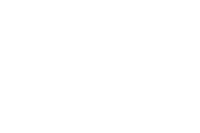

In [4]:
# Access the data table
data_table = gis.content.get("8c58e808aabd40408f7bc4eeac64fffb")
data_table

In [5]:
# Visualize as pandas dataframe
climate_data = data_table.tables[0]
climate_df = climate_data.query().sdf
climate_df.head()

,STATION,NAME,DATE,AWND,PRCP,PSUN,SNOW,TAVG,TMAX,TMIN,TSUN,WSFG,ObjectId
0,USW00093193,"FRESNO YOSEMITE INTERNATIONAL, CA US",1948-01-01,None,0.00,None,0,51.2,66.3,36.2,None,None,1
1,USW00093193,"FRESNO YOSEMITE INTERNATIONAL, CA US",1948-02-01,None,0.78,None,0,49.0,62.2,35.8,None,None,2
2,USW00093193,"FRESNO YOSEMITE INTERNATIONAL, CA US",1948-03-01,None,2.29,None,0,53.2,65.6,40.7,None,None,3
3,USW00093193,"FRESNO YOSEMITE INTERNATIONAL, CA US",1948-04-01,None,2.28,None,0,59.8,71.8,47.7,None,None,4
4,USW00093193,"FRESNO YOSEMITE INTERNATIONAL, CA US",1948-05-01,None,0.96,None,0,65.2,79.7,50.7,None,None,5


The dataframe above contains columns for station ID (STATION), station name (NAME), Date (DATE), Wind speed (AWND), precipitation (PRCP), possible sunshine (PSUN), snow cover (SNOW), average temperature (TAVG), maximum temperature (TMAX), minimum temperature (TMIN), total sunshine (TSUN), and peak wind gust speed (WSFG).

In [6]:
climate_df.shape

(815, 13)

Next, the dataset is prepared by dropping the variables for station, possible sunshine, snow cover, maximum temperature, minimum temperature, total sunshine, and peak wind gust speed. Then, the dataset is narrowed to the data from 1987 on, to avoid missing values.

In [7]:
climate_df = climate_df.drop(
    ["ObjectId", "STATION", "NAME", "PSUN", "SNOW", "TSUN",'TMAX', 'TMIN', "WSFG"], axis=1
)

In [8]:
climate_df.columns

Index(['DATE', 'AWND', 'PRCP', 'TAVG'], dtype='object')

In [9]:
# Selecting dataset from year 1987 to get continous data without NAN values
selected_df = climate_df[climate_df.DATE > "1987"]
selected_df.head()

,DATE,AWND,PRCP,TAVG
469,1987-02-01,5.8,1.36,52.7
470,1987-03-01,6.3,2.39,55.6
471,1987-04-01,6.9,0.07,66.6
472,1987-05-01,7.4,0.87,71.8
473,1987-06-01,7.4,0.01,78.4


Here, **TAVG** is our variable to be predicted, with **PRCP** and **AWND** being the predictors used, showing their influence on temperature.

In [10]:
selected_df.shape

(346, 4)

## Time series data preprocessing<a class="anchor" id="5"></a>   
The preprocessing of the data for multivariate time series modeling involves the following steps:

### Converting into time series format<a class="anchor" id="6"></a>
The dataset is now transformed into a time series data format by creating a new index that will be used by the model for processing the sequential data.

In [11]:
final_df = selected_df.reset_index()
final_df = final_df.drop("index", axis=1)
final_df.head()

,DATE,AWND,PRCP,TAVG
0,1987-02-01,5.8,1.36,52.7
1,1987-03-01,6.3,2.39,55.6
2,1987-04-01,6.9,0.07,66.6
3,1987-05-01,7.4,0.87,71.8
4,1987-06-01,7.4,0.01,78.4


###  Data types of time series variables<a class="anchor" id="7"></a> 
Here we check the data types of the variables.

In [12]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    346 non-null    datetime64[ns]
 1   AWND    346 non-null    object        
 2   PRCP    346 non-null    float64       
 3   TAVG    346 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 10.9+ KB


The time-dependent variables should of the type float. If a time-dependent variable is not of a float data type, then it needs to be changed to float. Here, Windspeed (AWND) is converted from object dtype to float64, as shown in the next cell.

In [13]:
final_df["AWND"] = final_df["AWND"].astype("float64")
final_df.head()

,DATE,AWND,PRCP,TAVG
0,1987-02-01,5.8,1.36,52.7
1,1987-03-01,6.3,2.39,55.6
2,1987-04-01,6.9,0.07,66.6
3,1987-05-01,7.4,0.87,71.8
4,1987-06-01,7.4,0.01,78.4


### Checking autocorrelation of time dependent variables<a class="anchor" id="8"></a> 
The next step will determine if the time series sequence is autocorrelated. To ensure that our time series data can be modeled well, the strength of correlation of the variable with its past data must be estimated.

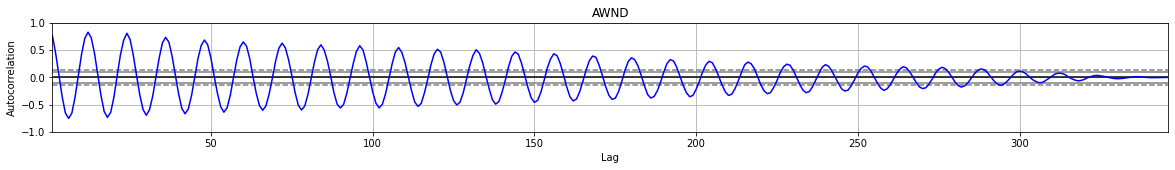

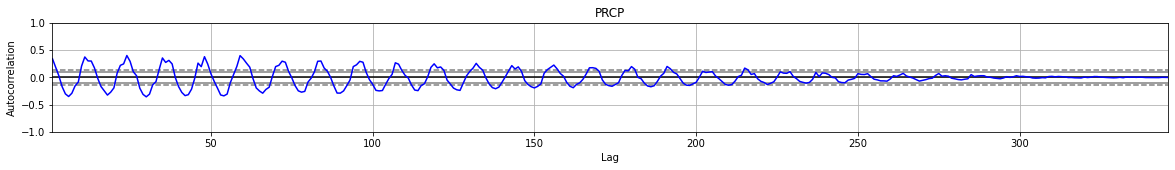

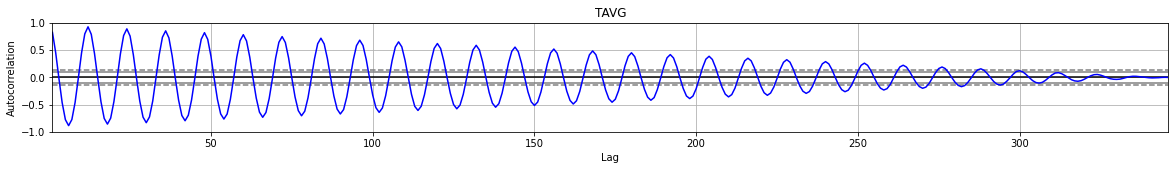

In [14]:
variables = ["AWND", "PRCP", "TAVG"]
for variable in variables:
    plt.figure(figsize=(20, 2))
    autocorr = aplot(final_df[variable], color="blue")
    plt.title(variable)

The plots are showing a significant correlation of the data with its immediate time-lagged terms, and that it gradually decreases over time as the lag increases.

### Creating dataset for prediction<a class="anchor" id="9"></a> 
Here, in the original dataset, the variable predict column of Average Temperature (TAVG) is populated with NaNs for the forecasting period of 2014-2015. This format is required for the `model.predict()` function in time series analysis, which will fill up the NaN values with forecasted temperatures.

In [15]:
predict_df = final_df.copy()
predict_df.loc[predict_df["DATE"] > "2013-12-01", "TAVG"] = None
predict_df.tail()

,DATE,AWND,PRCP,TAVG
341,2015-07-01,8.1,0.43,NaN
342,2015-08-01,7.6,0.00,NaN
343,2015-09-01,5.8,0.12,NaN
344,2015-10-01,4.7,0.49,NaN
345,2015-11-01,3.6,1.74,NaN


### Train - Test split of time series dataset<a class="anchor" id="10"></a> 
Out of these 27 years(1987-2015), 25 years of data is used for training the model, with the remaining 23 months (2014-2015) being used for forecasting and validation. As we are splitting timeseries data, we set shuffle=False to keep the sequence intact and we set a test size of 23 months for validation.

In [16]:
test_size = 23
train, test = train_test_split(final_df, test_size=test_size, shuffle=False)

In [17]:
train

,DATE,AWND,PRCP,TAVG
0,1987-02-01,5.8,1.36,52.7
1,1987-03-01,6.3,2.39,55.6
2,1987-04-01,6.9,0.07,66.6
3,1987-05-01,7.4,0.87,71.8
4,1987-06-01,7.4,0.01,78.4
...,...,...,...,...
318,2013-08-01,7.2,0.00,83.0
319,2013-09-01,6.5,0.01,77.8
320,2013-10-01,3.4,0.03,66.6
321,2013-11-01,2.5,0.54,58.5


## Time series model building<a class="anchor" id="11"></a> 
After the train and test sets are created, the training set is ready for modeling.

### Data preprocessing <a class="anchor" id="12"></a>

In this example, the dataset contains 'AWND' (Windspeed), 'PRCP' (Precipitation), and 'TAVG' (Average Air temperature) as time-dependent variables leading to a multivariate time series analysis at a monthly time scale. These variables are used to forecast the next 23 months of air temperature for the months after the last date in the training data, or, in other words, these multiple explanatory variables are used to predict the future values of the dependent air temperature variable.

Once the variables are identified, the preprocessing of the data is performed by the `prepare_tabulardata` method from the `arcgis.learn` module in the ArcGIS API for Python. This function takes either a non-spatial data frame, a feature layer, or a spatial data frame containing the dataset as input and returns a TabularDataObject that can be fed into the model. By default, `prepare_tabulardata` scales/normalizes the numerical columns in a dataset using StandardScaler.
The primary input parameters required for the tool are:

- <span style='background :lightgrey' >input_features</span> : Takes the spatially enabled dataframe as a feature layer in this model
- <span style='background :lightgrey' >variable_predict</span> : The field name of the forecasting variable
- <span style='background :lightgrey' >explanatory_variables</span> : A list of the field names that are used as time-dependent variables in multivariate time series
- <span style='background :lightgrey' >index_field</span> : The field name containing the timestamp that will be used as the index field for the data and to visualize values on the x-axis in the time series

In [18]:
data = prepare_tabulardata(
    train,
    variable_predict="TAVG",
    explanatory_variables=["AWND", "PRCP"],
    index_field="DATE",
    seed=42,
)

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\learn\_utils\tabular_data.py:936: UserWarning:

Dataframe is not spatial, Rasters and distance layers will not work



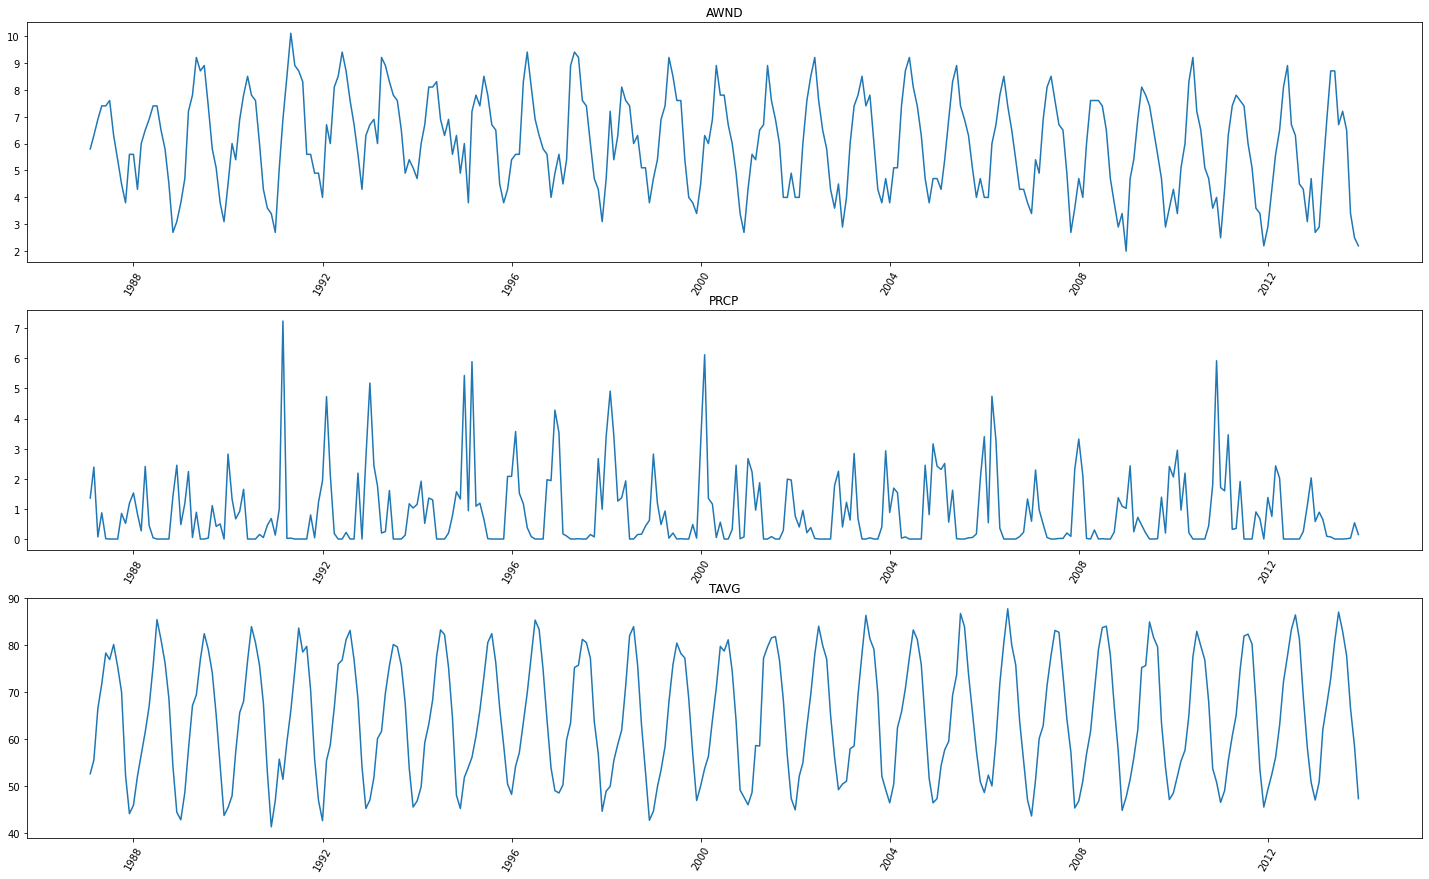

In [19]:
# Visualize the entire timeseries data
data.show_batch(graph=True)

In [20]:
# Here sequence length is used as 12 which also indicates the seasonality of the data
seq_len = 12

Next, we visualize the timeseries in batches. Here, we will pass the sequence length as the batch length.

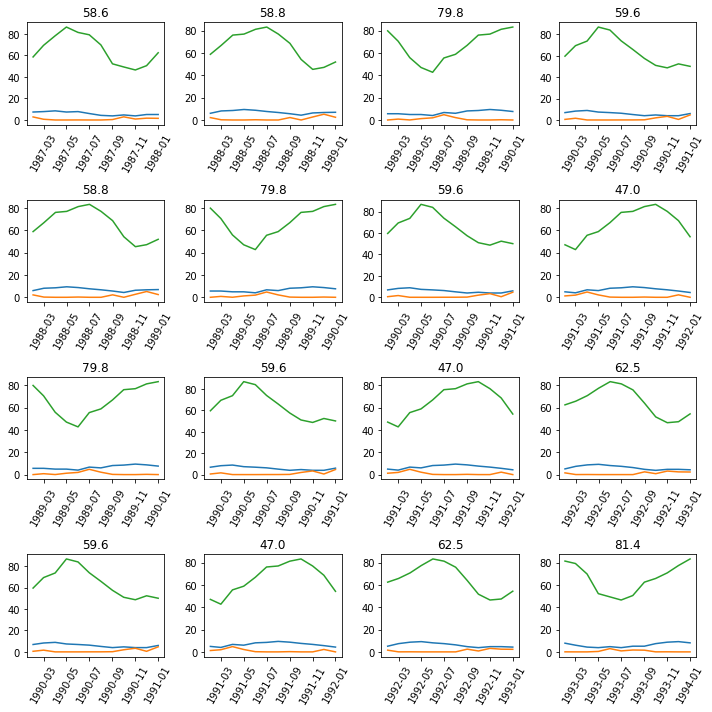

In [21]:
data.show_batch(rows=4, seq_len=seq_len)

### Model initialization <a class="anchor" id="13"></a>

This is an important step for fitting a time series model. Here, along with the input dataset, the backbone for training the model and the sequence length are passed as parameters. Out of these three, the sequence length has to be selected carefully. The sequence length is usually the cycle of the data, which in this case is 12, as it is monthly data and the pattern repeats after 12 months. In model initialization, the data and the backbone are selected from the available set of InceptionTime, ResCNN, Resnet, and FCN.

In [22]:
tsmodel = TimeSeriesModel(data, seq_len=seq_len, model_arch="ResCNN")

### Learning rate search<a class="anchor" id="14"></a>
Here, we find the optimal learning rate for training the model.

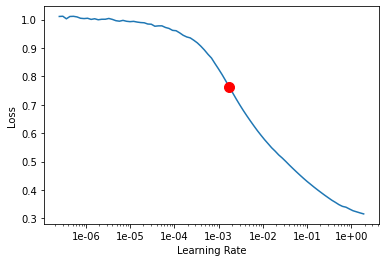

In [23]:
lr_rate = tsmodel.lr_find()

### Model training <a class="anchor" id="15"></a>

The model is now ready for training. To train the model, the `model.fit` method is used and is provided with the number of epochs for training and the learning rate suggested above as parameters:

In [24]:
tsmodel.fit(100, lr=lr_rate)

epoch,train_loss,valid_loss,time
0,0.960341,0.327997,00:00
1,0.905986,0.398620,00:00
2,0.854629,0.495778,00:00
3,0.803305,0.601204,00:00
4,0.750918,0.714522,00:00
5,0.694405,0.837259,00:00
6,0.629638,0.899321,00:00
7,0.564060,0.799259,00:00
8,0.498104,0.516647,00:00
9,0.436980,0.270044,00:00


To check the quality of the trained model and whether the model needs more training, we generate a train vs validation loss plot below:

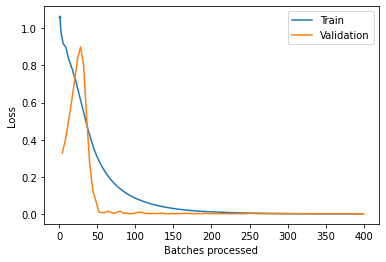

In [25]:
tsmodel.plot_losses()

Next, the predicted values of the model and the actual values are printed for the training dataset.

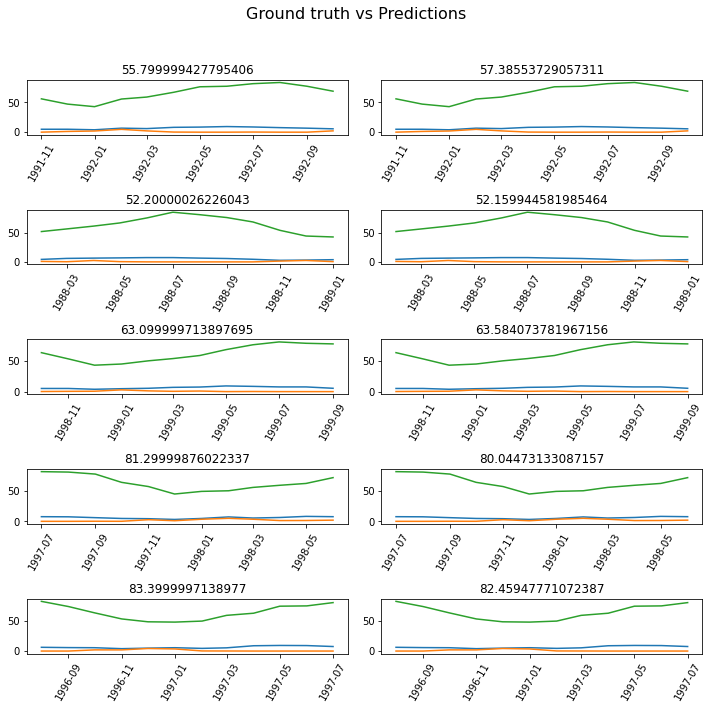

In [26]:
tsmodel.show_results(rows=5)

## Air temperature forecast & validation <a class="anchor" id="16"></a>

### Forecasting using the trained TimeSeriesModel <a class="anchor" id="17"></a>
During forecasting, the model uses the dataset prepared above with NaN values as input, with the `prediction_type` set as `dataframe`.

In [27]:
# Checking the input dataset
predict_df.tail(23)

,DATE,AWND,PRCP,TAVG
323,2014-01-01,2.5,0.57,NaN
324,2014-02-01,4.9,2.11,NaN
325,2014-03-01,5.8,0.62,NaN
326,2014-04-01,6.9,0.74,NaN
327,2014-05-01,8.9,0.04,NaN
328,2014-06-01,8.1,0.00,NaN
329,2014-07-01,7.4,0.01,NaN
330,2014-08-01,6.7,0.00,NaN
331,2014-09-01,6.3,0.18,NaN
332,2014-10-01,4.5,0.50,NaN


In [28]:
df_forecasted = tsmodel.predict(predict_df, prediction_type="dataframe")

In [29]:
# Final forecasted result returned by the model
df_forecasted

,DATE,AWND,PRCP,TAVG,TAVG_results
0,1987-02-01,5.8,1.36,52.7,52.700000
1,1987-03-01,6.3,2.39,55.6,55.600000
2,1987-04-01,6.9,0.07,66.6,66.600000
3,1987-05-01,7.4,0.87,71.8,71.800000
4,1987-06-01,7.4,0.01,78.4,78.400000
...,...,...,...,...,...
341,2015-07-01,8.1,0.43,NaN,84.969053
342,2015-08-01,7.6,0.00,NaN,81.919138
343,2015-09-01,5.8,0.12,NaN,77.078820
344,2015-10-01,4.7,0.49,NaN,69.666935


Next, we format the results into actual vs predicted columns.

In [30]:
result_df = pd.DataFrame()
result_df["DATE"] = test["DATE"]
result_df["Airtemp_actual"] = test["TAVG"]
result_df["Airtemp_predicted"] = df_forecasted["TAVG_results"][-23:]
result_df = result_df.set_index(result_df.columns[0])
result_df

,Airtemp_actual,Airtemp_predicted
DATE,,
2014-01-01,53.2,48.777484
2014-02-01,56.8,52.200898
2014-03-01,62.3,59.264070
2014-04-01,66.8,65.984249
2014-05-01,74.2,72.340793
2014-06-01,80.9,77.236778
2014-07-01,86.9,84.582398
2014-08-01,84.4,81.742578
2014-09-01,80.7,76.948140


### Estimate model metrics for validation <a class="anchor" id="18"></a>
The accuracy of the forecasted values is measured by comparing the forecasted values against the actual values for the 23 months chosen for testing.

In [31]:
r2 = r2_score(result_df["Airtemp_actual"], result_df["Airtemp_predicted"])
mse = metrics.mean_squared_error(
    result_df["Airtemp_actual"], result_df["Airtemp_predicted"]
)
rmse = metrics.mean_absolute_error(
    result_df["Airtemp_actual"], result_df["Airtemp_predicted"]
)
print(
    "RMSE:     ",
    round(np.sqrt(mse), 4),
    "\n" "MAE:      ",
    round(rmse, 4),
    "\n" "R-Square: ",
    round(r2, 2),
)

RMSE:      3.661 
MAE:       3.1054 
R-Square:  0.91


A considerably high r-square value of .91 indicates a high similarity between the forecasted values and the actual values. Furthermore, the RMSE error of 3.661 is quite low, indicating a good fit by the model.

## Result visualization<a class="anchor" id="19"></a>
Finally, the actual and forecasted values are plotted to visualize their distribution over the validation period, with the orange line representing the forecasted values and the blue line representing the actual values.

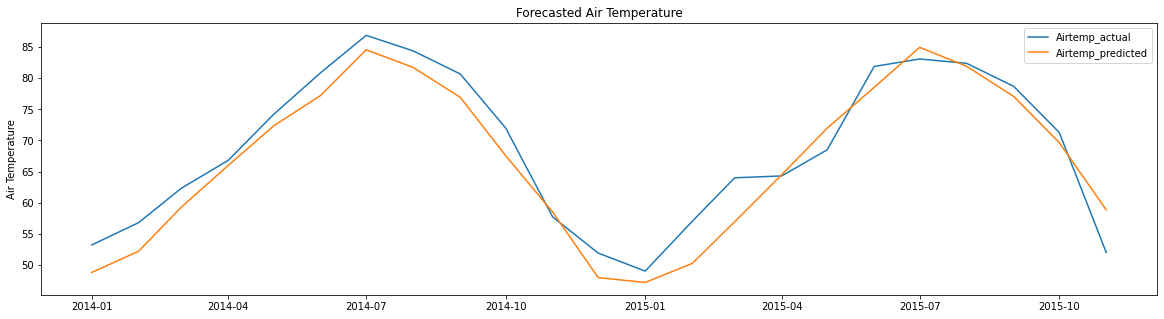

In [32]:
plt.figure(figsize=(20, 5))
plt.plot(result_df)
plt.ylabel("Air Temperature")
plt.legend(result_df.columns.values, loc="upper right")
plt.title("Forecasted Air Temperature")
plt.show()

## Conclusion<a class="anchor" id="20"></a>

The study conducted a multivariate time series analysis using the Deep learning TimeSeriesModel from the arcgis.learn library and forecasted the monthly Air temperature for a station in California. The model was trained with 25 years of data (1987-2013) that was used to forecast a period of 2 years (2014-2015) with high accuracy. The independent variables were wind speed and precipitation. The methodology included preparing a times series dataset using the prepare_tabulardata() method, followed by modeling, predicting, and validating the test dataset. Usually, time series modeling requires fine-tuning several hyperparameters for properly fitting the data, most of which has been internalized in this Model, leaving the user responsible for configuring only a few significant parameters, like the sequence length.

## Summary of methods used <a class="anchor" id="21"></a>

| Method | Description | Examples |
| -| - |-|
| prepare_tabulardata| prepare data including imputation, scaling and train-test split  |prepare data ready for fitting a  Timeseries Model 
| model.lr_find()| finds an optimal learning rate  | finalize a good learning rate for training the Timeseries model
| TimeSeriesModel() | Model Initialization by selecting the TimeSeriesModel algorithm to be used for fitting  | Selected Timeseries algorithm from Fastai time series regression can be used
| model.fit() | trains a model with epochs & learning rate as input  | training the Timeseries model with suitable input 
| model.predict() | predicts on a test set | forecast values using the trained models on the test input

## References<a class="anchor" id="22"></a>
- Jenny Cifuentes et.al., 2020. "Air Temperature Forecasting Using Machine Learning Techniques: A Review" 
https://doi.org/10.3390/en13164215

- Xuejie, G. et.al., 2001. "Climate change due to greenhouse effects in China as simulated by a regional climate model" https://doi.org/10.1007/s00376-001-0036-y

- "gsom-gsoy_documentation" https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/gsom-gsoy_documentation.pdf

- "Prediction task with Multivariate Time Series and VAR model" https://towardsdatascience.com/prediction-task-with-multivariate-timeseries-and-var-model-47003f629f9

## Data resources <a class="anchor" id="23"></a>

| Dataset | Source | Link |
| -| - |-|
|Global Summary of the Month|NOAA Climate Data Online |https://www.ncdc.noaa.gov/cdo-web/search|